
<h1 id="Project---Convolutional-Neural-Networks:-Street-View-Housing-Number-Digit-Recognition"><strong>Project - Convolutional Neural Networks: Street View Housing Number Digit Recognition</strong><a class="anchor-link" href="#Project---Convolutional-Neural-Networks:-Street-View-Housing-Number-Digit-Recognition">¶</a></h1><h1 id="Marks:-30">Marks: 30<a class="anchor-link" href="#Marks:-30">¶</a></h1><p>Welcome to the project on classification using Convolutional Neural Networks. We will continue to work with the Street View Housing Numbers (SVHN) image dataset for this project.</p>
<hr/>
<h3 id="Context:"><strong>Context:</strong><a class="anchor-link" href="#Context:">¶</a></h3><hr/>
<p>One of the most interesting tasks in deep learning is to recognize objects in natural scenes. The ability to process visual information using machine learning algorithms can be very useful as demonstrated in various applications.</p>
<p>The SVHN dataset contains over 600,000 labeled digits cropped from street-level photos. It is one of the most popular image recognition datasets. It has been used in neural networks created by Google to improve map quality by automatically transcribing the address numbers from a patch of pixels. The transcribed number with a known street address helps pinpoint the location of the building it represents.</p>
<hr/>
<h3 id="Objective:"><strong>Objective:</strong><a class="anchor-link" href="#Objective:">¶</a></h3><hr/>
<p>Build a CNN model that can identify the digits in the images.</p>
<hr/>
<h3 id="Dataset"><strong>Dataset</strong><a class="anchor-link" href="#Dataset">¶</a></h3><hr/>
<p>Here, we will use a subset of the original data to save some computation time. The dataset is provided as a .h5 file. The basic preprocessing steps have been done.</p>



<h2 id="Mount-the-drive"><strong>Mount the drive</strong><a class="anchor-link" href="#Mount-the-drive">¶</a></h2><p>Let us start by mounting the drive and importing the necessary libraries.</p>


In [1]:
# Optional: Colab drive mount (skipped if not in Colab)
try:
    from google.colab import drive
    drive.mount('/content/drive')
except Exception:
    pass



<h2 id="Importing-libraries"><strong>Importing libraries</strong><a class="anchor-link" href="#Importing-libraries">¶</a></h2>


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, BatchNormalization, Dropout, Flatten, LeakyReLU
from tensorflow.keras.utils import to_categorical



<p>Let us check for the version of TensorFlow.</p>


In [3]:
print(tf.__version__)


2.16.2



<h2 id="Load-the-dataset"><strong>Load the dataset</strong><a class="anchor-link" href="#Load-the-dataset">¶</a></h2><ul>
<li>Let us now load the dataset that is available as a .h5 file.</li>
<li>Split the data into train and the test dataset</li>
</ul>


In [4]:
import h5py

# Set the local path to the SVHN .h5 dataset
SVHN_H5_PATH = 'SVHN_data.h5'  # update this if your file is elsewhere

# Open the file as read only
h5f = h5py.File(SVHN_H5_PATH, 'r')

# Load the training and the test set
X_train = h5f['X_train'][:]
y_train = h5f['y_train'][:]
X_test = h5f['X_test'][:]
y_test = h5f['y_test'][:]

# Close this file
h5f.close()



<p>Let's check the number of images in the training and testing data.</p>


In [5]:
len(X_train), len(X_test)


(42000, 18000)


<p><strong>Observations</strong></p>
<ul>
<li>There are 42,000 images in the training data and 18,000 images in the testing data. </li>
</ul>



<h2 id="Visualizing-images"><strong>Visualizing images</strong><a class="anchor-link" href="#Visualizing-images">¶</a></h2><ul>
<li>Use X_train to visualize the first 10 images</li>
<li>Use Y_train to print the first 10 labels</li>
</ul>



<h4 id="Question-1:-Complete-the-below-code-to-visualize-the-first-10-images-from-the-training-data-(1-Mark)"><strong>Question 1: Complete the below code to visualize the first 10 images from the training data (1 Mark)</strong><a class="anchor-link" href="#Question-1:-Complete-the-below-code-to-visualize-the-first-10-images-from-the-training-data-(1-Mark)">¶</a></h4>


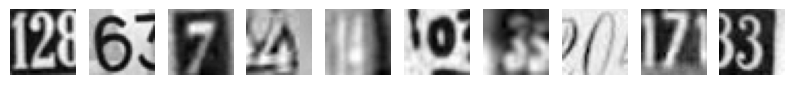

label for each of the above image: [2 6 7 4 4 0 3 0 7 3]


In [6]:
# visualizing the first 10 images in the dataset and their labels
plt.figure(figsize=(10, 1))

for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(X_train[i], cmap="gray") # write the function to visualize images
    plt.axis('off')

plt.show()
print('label for each of the above image: %s' % (y_train[0:10]))



<h2 id="Data-Preparation"><strong>Data Preparation</strong><a class="anchor-link" href="#Data-Preparation">¶</a></h2><ul>
<li>Print the first image in the train image and figure out the shape of the images</li>
<li>Reshape the train and the test dataset to make them fit the first convolutional operation that we will create later. Figure out the required shape</li>
<li>Normalize the train and the test dataset by dividing by 255</li>
<li>Print the new shapes of the train and the test set</li>
<li>One-hot encode the target variable</li>
</ul>


In [7]:
# Shape of the images and the first image

print("Shape:", X_train[0].shape)
print()
print("First image:\n", X_train[0])


Shape: (32, 32)

First image:
 [[ 33.0704  30.2601  26.852  ...  71.4471  58.2204  42.9939]
 [ 25.2283  25.5533  29.9765 ... 113.0209 103.3639  84.2949]
 [ 26.2775  22.6137  40.4763 ... 113.3028 121.775  115.4228]
 ...
 [ 28.5502  36.212   45.0801 ...  24.1359  25.0927  26.0603]
 [ 38.4352  26.4733  23.2717 ...  28.1094  29.4683  30.0661]
 [ 50.2984  26.0773  24.0389 ...  49.6682  50.853   53.0377]]


In [8]:
# Reshaping the dataset to flatten them. Remember that we always have to give a 4D array as input to CNNs

X_train = X_train.reshape(X_train.shape[0], 32,32,1)
X_test = X_test.reshape(X_test.shape[0], 32,32,1)


In [9]:
# Normalize inputs from 0-255 to 0-1

X_train = X_train / 255.0
X_test = X_test / 255.0


In [10]:
# New shape 

print('Training set:', X_train.shape, y_train.shape)
print('Test set:', X_test.shape, y_test.shape)


Training set: (42000, 32, 32, 1) (42000,)
Test set: (18000, 32, 32, 1) (18000,)



<h4 id="Question-2:-One-hot-encode-the-labels-in-the-target-variable-y_train-and-y_test-(2-Marks)"><strong>Question 2: One-hot encode the labels in the target variable y_train and y_test (2 Marks)</strong><a class="anchor-link" href="#Question-2:-One-hot-encode-the-labels-in-the-target-variable-y_train-and-y_test-(2-Marks)">¶</a></h4>


In [11]:
#Write the function and appropriate variable name to one-hot encode the output

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


#test labels
y_test


array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.]])


<ul>
<li>Notice that each entry of y_test is a one-hot encoded vector instead of a single label.</li>
</ul>



<h2 id="Model-Building"><strong>Model Building</strong><a class="anchor-link" href="#Model-Building">¶</a></h2><p>Now, we have done data preprocessing, let's build a CNN model.</p>


In [12]:
#Fixing the seed for random number generators
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)



<h3 id="Model-Architecture"><strong>Model Architecture</strong><a class="anchor-link" href="#Model-Architecture">¶</a></h3><ul>
<li>Write a function that returns a sequential model with the following architecture<ul>
<li>First Convolutional layer with <strong>16 filters and kernel size of 3x3</strong>. Use the <strong>'same' padding</strong> and provide an <strong>apt input shape</strong></li>
<li>Add a <strong>LeakyRelu layer</strong> with the <strong>slope equal to 0.1</strong></li>
<li>Second Convolutional layer with <strong>32 filters and kernel size of 3x3 with 'same' padding</strong></li>
<li>Another <strong>LeakyRelu</strong> with the <strong>slope equal to 0.1</strong></li>
<li>A <strong>max-pooling layer</strong> with a <strong>pool size of 2x2</strong></li>
<li><strong>Flatten</strong> the output from the previous layer</li>
<li>Add a <strong>dense layer with 32 nodes</strong></li>
<li>Add a <strong>LeakyRelu layer with slope equal to 0.1</strong></li>
<li>Add the final <strong>output layer with nodes equal to the number of classes</strong> and <strong>softmax activation</strong></li>
<li>Compile the model with the <strong>categorical_crossentropy loss, adam optimizers (learning_rate = 0.001), and accuracy metric</strong>. Do not fit the model here, just return the compiled model</li>
</ul>
</li>
<li>Call the function and store the model in a new variable</li>
<li>Print the summary of the model.</li>
<li>Fit the model on the train data with a <strong>validation split of 0.2, batch size = 32, verbose = 1, and 20 epochs</strong>. Store the model building history to use later for visualization.</li>
</ul>



<h4 id="Question-3:-Build-and-train-a-CNN-model-as-per-the-above-mentioned-architecture-(10-Marks)"><strong>Question 3: Build and train a CNN model as per the above mentioned architecture (10 Marks)</strong><a class="anchor-link" href="#Question-3:-Build-and-train-a-CNN-model-as-per-the-above-mentioned-architecture-(10-Marks)">¶</a></h4>


In [13]:
#Importing losses and optimizers modules
from tensorflow.keras import losses
from tensorflow.keras import optimizers

#Define the function
def cnn_model_1():
    model = Sequential() 
    #Add layers as per the architecture mentioned above in the same sequence
    model.add(Conv2D(filters=16, kernel_size=(3, 3), padding='same', input_shape = (32,32,1)))
    model.add(LeakyReLU(0.1))
    model.add(Conv2D(filters = 32, kernel_size = (3,3), padding = 'same'))
    model.add(LeakyReLU(0.1))
    model.add(MaxPool2D(pool_size = (2,2)))
    model.add(Flatten())
    model.add(Dense(32))
    model.add(LeakyReLU(0.1))
    model.add(Dense(units = 10, activation = 'softmax'))

    #declare adam optimizer with learning rate of 0.001 
    adam = optimizers.Adam(learning_rate = 0.001)
    
    #compile the model
    model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
    
    return model


In [14]:
#Build the model
model_1 = cnn_model_1()


/Users/mitch/.pyenv/versions/3.10.13/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
#Print the model summary
model_1.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 32, 32, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │       262,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_2 (LeakyReLU)       │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 267,306 (1.02 MB)

 Trainable params: 267,306 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [16]:
# Fit the model
history_model_1 = model_1.fit(X_train, y_train, epochs = 20, validation_split=0.2, verbose = 1, batch_size = 32)


Epoch 1/20


   1/1050 ━━━━━━━━━━━━━━━━━━━━ 20:34 1s/step - accuracy: 0.2188 - loss: 2.2790

   4/1050 ━━━━━━━━━━━━━━━━━━━━ 27s 26ms/step - accuracy: 0.1693 - loss: 2.3251

   6/1050 ━━━━━━━━━━━━━━━━━━━━ 42s 40ms/step - accuracy: 0.1566 - loss: 2.3337

   8/1050 ━━━━━━━━━━━━━━━━━━━━ 43s 42ms/step - accuracy: 0.1502 - loss: 2.3345

  10/1050 ━━━━━━━━━━━━━━━━━━━━ 43s 42ms/step - accuracy: 0.1439 - loss: 2.3334

  12/1050 ━━━━━━━━━━━━━━━━━━━━ 43s 42ms/step - accuracy: 0.1383 - loss: 2.3331

  14/1050 ━━━━━━━━━━━━━━━━━━━━ 43s 42ms/step - accuracy: 0.1336 - loss: 2.3329

  16/1050 ━━━━━━━━━━━━━━━━━━━━ 42s 41ms/step - accuracy: 0.1292 - loss: 2.3321

  18/1050 ━━━━━━━━━━━━━━━━━━━━ 42s 41ms/step - accuracy: 0.1254 - loss: 2.3315

  20/1050 ━━━━━━━━━━━━━━━━━━━━ 42s 41ms/step - accuracy: 0.1224 - loss: 2.3308

  22/1050 ━━━━━━━━━━━━━━━━━━━━ 42s 41ms/step - accuracy: 0.1198 - loss: 2.3302

  24/1050 ━━━━━━━━━━━━━━━━━━━━ 41s 41ms/step - accuracy: 0.1176 - loss: 2.3295

  26/1050 ━━━━━━━━━━━━━━━━━━━━ 41s 41ms/step - accuracy: 0.1154 - loss: 2.3290

  28/1050 ━━━━━━━━━━━━━━━━━━━━ 41s 41ms/step - accuracy: 0.1136 - loss: 2.3284

  30/1050 ━━━━━━━━━━━━━━━━━━━━ 41s 41ms/step - accuracy: 0.1118 - loss: 2.3278

  32/1050 ━━━━━━━━━━━━━━━━━━━━ 41s 41ms/step - accuracy: 0.1100 - loss: 2.3273

  33/1050 ━━━━━━━━━━━━━━━━━━━━ 41s 41ms/step - accuracy: 0.1092 - loss: 2.3271

  35/1050 ━━━━━━━━━━━━━━━━━━━━ 41s 41ms/step - accuracy: 0.1075 - loss: 2.3266

  37/1050 ━━━━━━━━━━━━━━━━━━━━ 41s 41ms/step - accuracy: 0.1060 - loss: 2.3261

  39/1050 ━━━━━━━━━━━━━━━━━━━━ 41s 41ms/step - accuracy: 0.1048 - loss: 2.3256

  41/1050 ━━━━━━━━━━━━━━━━━━━━ 41s 41ms/step - accuracy: 0.1038 - loss: 2.3251

  43/1050 ━━━━━━━━━━━━━━━━━━━━ 41s 41ms/step - accuracy: 0.1028 - loss: 2.3246

  45/1050 ━━━━━━━━━━━━━━━━━━━━ 40s 41ms/step - accuracy: 0.1020 - loss: 2.3241

  47/1050 ━━━━━━━━━━━━━━━━━━━━ 40s 41ms/step - accuracy: 0.1013 - loss: 2.3237

  49/1050 ━━━━━━━━━━━━━━━━━━━━ 40s 41ms/step - accuracy: 0.1007 - loss: 2.3233

  51/1050 ━━━━━━━━━━━━━━━━━━━━ 40s 41ms/step - accuracy: 0.1003 - loss: 2.3229

  53/1050 ━━━━━━━━━━━━━━━━━━━━ 40s 41ms/step - accuracy: 0.0999 - loss: 2.3226

  55/1050 ━━━━━━━━━━━━━━━━━━━━ 40s 41ms/step - accuracy: 0.0996 - loss: 2.3222

  57/1050 ━━━━━━━━━━━━━━━━━━━━ 40s 41ms/step - accuracy: 0.0993 - loss: 2.3219

  58/1050 ━━━━━━━━━━━━━━━━━━━━ 40s 41ms/step - accuracy: 0.0992 - loss: 2.3217

  60/1050 ━━━━━━━━━━━━━━━━━━━━ 40s 41ms/step - accuracy: 0.0990 - loss: 2.3214

  62/1050 ━━━━━━━━━━━━━━━━━━━━ 40s 41ms/step - accuracy: 0.0988 - loss: 2.3210

  64/1050 ━━━━━━━━━━━━━━━━━━━━ 40s 41ms/step - accuracy: 0.0987 - loss: 2.3207

  66/1050 ━━━━━━━━━━━━━━━━━━━━ 40s 41ms/step - accuracy: 0.0986 - loss: 2.3204

  68/1050 ━━━━━━━━━━━━━━━━━━━━ 40s 41ms/step - accuracy: 0.0985 - loss: 2.3201

  70/1050 ━━━━━━━━━━━━━━━━━━━━ 40s 41ms/step - accuracy: 0.0983 - loss: 2.3199

  72/1050 ━━━━━━━━━━━━━━━━━━━━ 40s 41ms/step - accuracy: 0.0982 - loss: 2.3196

  74/1050 ━━━━━━━━━━━━━━━━━━━━ 40s 41ms/step - accuracy: 0.0981 - loss: 2.3193

  76/1050 ━━━━━━━━━━━━━━━━━━━━ 39s 41ms/step - accuracy: 0.0981 - loss: 2.3191

  78/1050 ━━━━━━━━━━━━━━━━━━━━ 39s 41ms/step - accuracy: 0.0981 - loss: 2.3189

  80/1050 ━━━━━━━━━━━━━━━━━━━━ 39s 41ms/step - accuracy: 0.0982 - loss: 2.3186

  82/1050 ━━━━━━━━━━━━━━━━━━━━ 39s 41ms/step - accuracy: 0.0983 - loss: 2.3184

  84/1050 ━━━━━━━━━━━━━━━━━━━━ 39s 41ms/step - accuracy: 0.0984 - loss: 2.3182

  86/1050 ━━━━━━━━━━━━━━━━━━━━ 39s 41ms/step - accuracy: 0.0985 - loss: 2.3180

  88/1050 ━━━━━━━━━━━━━━━━━━━━ 39s 41ms/step - accuracy: 0.0986 - loss: 2.3177

  90/1050 ━━━━━━━━━━━━━━━━━━━━ 39s 41ms/step - accuracy: 0.0987 - loss: 2.3175

  92/1050 ━━━━━━━━━━━━━━━━━━━━ 39s 41ms/step - accuracy: 0.0989 - loss: 2.3173

  93/1050 ━━━━━━━━━━━━━━━━━━━━ 39s 41ms/step - accuracy: 0.0990 - loss: 2.3172

  95/1050 ━━━━━━━━━━━━━━━━━━━━ 39s 41ms/step - accuracy: 0.0991 - loss: 2.3170

  97/1050 ━━━━━━━━━━━━━━━━━━━━ 39s 41ms/step - accuracy: 0.0993 - loss: 2.3169

  99/1050 ━━━━━━━━━━━━━━━━━━━━ 39s 41ms/step - accuracy: 0.0994 - loss: 2.3167

 101/1050 ━━━━━━━━━━━━━━━━━━━━ 39s 41ms/step - accuracy: 0.0995 - loss: 2.3165

 103/1050 ━━━━━━━━━━━━━━━━━━━━ 38s 41ms/step - accuracy: 0.0996 - loss: 2.3163

 105/1050 ━━━━━━━━━━━━━━━━━━━━ 38s 41ms/step - accuracy: 0.0997 - loss: 2.3162

 106/1050 ━━━━━━━━━━━━━━━━━━━━ 38s 41ms/step - accuracy: 0.0998 - loss: 2.3161

 108/1050 ━━━━━━━━━━━━━━━━━━━━ 38s 41ms/step - accuracy: 0.0999 - loss: 2.3159

 110/1050 ━━━━━━━━━━━━━━━━━━━━ 38s 41ms/step - accuracy: 0.1001 - loss: 2.3158

 111/1050 ━━━━━━━━━━━━━━━━━━━━ 38s 41ms/step - accuracy: 0.1001 - loss: 2.3157

 113/1050 ━━━━━━━━━━━━━━━━━━━━ 38s 41ms/step - accuracy: 0.1003 - loss: 2.3155

 115/1050 ━━━━━━━━━━━━━━━━━━━━ 38s 41ms/step - accuracy: 0.1004 - loss: 2.3154

 117/1050 ━━━━━━━━━━━━━━━━━━━━ 38s 41ms/step - accuracy: 0.1005 - loss: 2.3152

 119/1050 ━━━━━━━━━━━━━━━━━━━━ 38s 41ms/step - accuracy: 0.1006 - loss: 2.3151

 121/1050 ━━━━━━━━━━━━━━━━━━━━ 38s 41ms/step - accuracy: 0.1007 - loss: 2.3149

 123/1050 ━━━━━━━━━━━━━━━━━━━━ 38s 41ms/step - accuracy: 0.1009 - loss: 2.3148

 125/1050 ━━━━━━━━━━━━━━━━━━━━ 38s 41ms/step - accuracy: 0.1010 - loss: 2.3146

 127/1050 ━━━━━━━━━━━━━━━━━━━━ 37s 41ms/step - accuracy: 0.1011 - loss: 2.3145

 129/1050 ━━━━━━━━━━━━━━━━━━━━ 37s 41ms/step - accuracy: 0.1012 - loss: 2.3144

 130/1050 ━━━━━━━━━━━━━━━━━━━━ 37s 41ms/step - accuracy: 0.1013 - loss: 2.3143

 132/1050 ━━━━━━━━━━━━━━━━━━━━ 37s 41ms/step - accuracy: 0.1014 - loss: 2.3142

 134/1050 ━━━━━━━━━━━━━━━━━━━━ 37s 41ms/step - accuracy: 0.1016 - loss: 2.3140

 136/1050 ━━━━━━━━━━━━━━━━━━━━ 37s 41ms/step - accuracy: 0.1018 - loss: 2.3139

 138/1050 ━━━━━━━━━━━━━━━━━━━━ 37s 41ms/step - accuracy: 0.1019 - loss: 2.3138

 140/1050 ━━━━━━━━━━━━━━━━━━━━ 37s 41ms/step - accuracy: 0.1022 - loss: 2.3136

 142/1050 ━━━━━━━━━━━━━━━━━━━━ 37s 41ms/step - accuracy: 0.1024 - loss: 2.3135

 144/1050 ━━━━━━━━━━━━━━━━━━━━ 37s 41ms/step - accuracy: 0.1026 - loss: 2.3133

 146/1050 ━━━━━━━━━━━━━━━━━━━━ 37s 41ms/step - accuracy: 0.1028 - loss: 2.3132

 148/1050 ━━━━━━━━━━━━━━━━━━━━ 37s 41ms/step - accuracy: 0.1030 - loss: 2.3130

 150/1050 ━━━━━━━━━━━━━━━━━━━━ 36s 41ms/step - accuracy: 0.1033 - loss: 2.3129

 152/1050 ━━━━━━━━━━━━━━━━━━━━ 36s 41ms/step - accuracy: 0.1035 - loss: 2.3127

 154/1050 ━━━━━━━━━━━━━━━━━━━━ 36s 41ms/step - accuracy: 0.1038 - loss: 2.3126

 155/1050 ━━━━━━━━━━━━━━━━━━━━ 36s 41ms/step - accuracy: 0.1039 - loss: 2.3125

 157/1050 ━━━━━━━━━━━━━━━━━━━━ 36s 41ms/step - accuracy: 0.1041 - loss: 2.3123

 159/1050 ━━━━━━━━━━━━━━━━━━━━ 36s 41ms/step - accuracy: 0.1044 - loss: 2.3122

 161/1050 ━━━━━━━━━━━━━━━━━━━━ 36s 41ms/step - accuracy: 0.1046 - loss: 2.3120

 163/1050 ━━━━━━━━━━━━━━━━━━━━ 36s 41ms/step - accuracy: 0.1049 - loss: 2.3118

 164/1050 ━━━━━━━━━━━━━━━━━━━━ 36s 41ms/step - accuracy: 0.1050 - loss: 2.3118

 166/1050 ━━━━━━━━━━━━━━━━━━━━ 36s 41ms/step - accuracy: 0.1053 - loss: 2.3116

 168/1050 ━━━━━━━━━━━━━━━━━━━━ 36s 41ms/step - accuracy: 0.1056 - loss: 2.3114

 170/1050 ━━━━━━━━━━━━━━━━━━━━ 36s 41ms/step - accuracy: 0.1059 - loss: 2.3112

 172/1050 ━━━━━━━━━━━━━━━━━━━━ 36s 41ms/step - accuracy: 0.1062 - loss: 2.3110

 174/1050 ━━━━━━━━━━━━━━━━━━━━ 36s 41ms/step - accuracy: 0.1064 - loss: 2.3107

 176/1050 ━━━━━━━━━━━━━━━━━━━━ 35s 41ms/step - accuracy: 0.1067 - loss: 2.3105

 178/1050 ━━━━━━━━━━━━━━━━━━━━ 35s 41ms/step - accuracy: 0.1070 - loss: 2.3103

 180/1050 ━━━━━━━━━━━━━━━━━━━━ 35s 41ms/step - accuracy: 0.1073 - loss: 2.3100

 182/1050 ━━━━━━━━━━━━━━━━━━━━ 35s 41ms/step - accuracy: 0.1076 - loss: 2.3098

 184/1050 ━━━━━━━━━━━━━━━━━━━━ 35s 41ms/step - accuracy: 0.1079 - loss: 2.3095

 186/1050 ━━━━━━━━━━━━━━━━━━━━ 35s 41ms/step - accuracy: 0.1083 - loss: 2.3092

 188/1050 ━━━━━━━━━━━━━━━━━━━━ 35s 41ms/step - accuracy: 0.1086 - loss: 2.3089

 190/1050 ━━━━━━━━━━━━━━━━━━━━ 35s 41ms/step - accuracy: 0.1090 - loss: 2.3086

 192/1050 ━━━━━━━━━━━━━━━━━━━━ 35s 41ms/step - accuracy: 0.1093 - loss: 2.3083

 194/1050 ━━━━━━━━━━━━━━━━━━━━ 35s 41ms/step - accuracy: 0.1097 - loss: 2.3079

 196/1050 ━━━━━━━━━━━━━━━━━━━━ 35s 41ms/step - accuracy: 0.1101 - loss: 2.3076

 198/1050 ━━━━━━━━━━━━━━━━━━━━ 34s 41ms/step - accuracy: 0.1105 - loss: 2.3072

 200/1050 ━━━━━━━━━━━━━━━━━━━━ 34s 41ms/step - accuracy: 0.1109 - loss: 2.3068

 202/1050 ━━━━━━━━━━━━━━━━━━━━ 34s 41ms/step - accuracy: 0.1113 - loss: 2.3063

 204/1050 ━━━━━━━━━━━━━━━━━━━━ 34s 41ms/step - accuracy: 0.1117 - loss: 2.3059

 206/1050 ━━━━━━━━━━━━━━━━━━━━ 34s 41ms/step - accuracy: 0.1121 - loss: 2.3054

 208/1050 ━━━━━━━━━━━━━━━━━━━━ 34s 41ms/step - accuracy: 0.1125 - loss: 2.3050

 210/1050 ━━━━━━━━━━━━━━━━━━━━ 34s 41ms/step - accuracy: 0.1130 - loss: 2.3045

 212/1050 ━━━━━━━━━━━━━━━━━━━━ 34s 41ms/step - accuracy: 0.1134 - loss: 2.3040

 214/1050 ━━━━━━━━━━━━━━━━━━━━ 34s 41ms/step - accuracy: 0.1139 - loss: 2.3035

 216/1050 ━━━━━━━━━━━━━━━━━━━━ 34s 41ms/step - accuracy: 0.1143 - loss: 2.3029

 217/1050 ━━━━━━━━━━━━━━━━━━━━ 34s 41ms/step - accuracy: 0.1146 - loss: 2.3026

 219/1050 ━━━━━━━━━━━━━━━━━━━━ 34s 41ms/step - accuracy: 0.1150 - loss: 2.3021

 221/1050 ━━━━━━━━━━━━━━━━━━━━ 34s 41ms/step - accuracy: 0.1155 - loss: 2.3015

 223/1050 ━━━━━━━━━━━━━━━━━━━━ 33s 41ms/step - accuracy: 0.1160 - loss: 2.3008

 225/1050 ━━━━━━━━━━━━━━━━━━━━ 33s 41ms/step - accuracy: 0.1165 - loss: 2.3002

 227/1050 ━━━━━━━━━━━━━━━━━━━━ 33s 41ms/step - accuracy: 0.1170 - loss: 2.2995

 228/1050 ━━━━━━━━━━━━━━━━━━━━ 33s 41ms/step - accuracy: 0.1173 - loss: 2.2992

 230/1050 ━━━━━━━━━━━━━━━━━━━━ 33s 41ms/step - accuracy: 0.1178 - loss: 2.2985

 232/1050 ━━━━━━━━━━━━━━━━━━━━ 33s 41ms/step - accuracy: 0.1184 - loss: 2.2978

 234/1050 ━━━━━━━━━━━━━━━━━━━━ 33s 41ms/step - accuracy: 0.1189 - loss: 2.2970

 236/1050 ━━━━━━━━━━━━━━━━━━━━ 33s 41ms/step - accuracy: 0.1195 - loss: 2.2962

 238/1050 ━━━━━━━━━━━━━━━━━━━━ 33s 41ms/step - accuracy: 0.1201 - loss: 2.2954

 240/1050 ━━━━━━━━━━━━━━━━━━━━ 33s 41ms/step - accuracy: 0.1207 - loss: 2.2946

 242/1050 ━━━━━━━━━━━━━━━━━━━━ 33s 41ms/step - accuracy: 0.1213 - loss: 2.2938

 243/1050 ━━━━━━━━━━━━━━━━━━━━ 33s 41ms/step - accuracy: 0.1216 - loss: 2.2933

 244/1050 ━━━━━━━━━━━━━━━━━━━━ 33s 41ms/step - accuracy: 0.1219 - loss: 2.2929

 245/1050 ━━━━━━━━━━━━━━━━━━━━ 33s 41ms/step - accuracy: 0.1222 - loss: 2.2925

 247/1050 ━━━━━━━━━━━━━━━━━━━━ 33s 41ms/step - accuracy: 0.1228 - loss: 2.2916

 249/1050 ━━━━━━━━━━━━━━━━━━━━ 33s 41ms/step - accuracy: 0.1234 - loss: 2.2907

 251/1050 ━━━━━━━━━━━━━━━━━━━━ 33s 41ms/step - accuracy: 0.1241 - loss: 2.2897

 253/1050 ━━━━━━━━━━━━━━━━━━━━ 32s 41ms/step - accuracy: 0.1247 - loss: 2.2887

 255/1050 ━━━━━━━━━━━━━━━━━━━━ 32s 41ms/step - accuracy: 0.1254 - loss: 2.2877

 257/1050 ━━━━━━━━━━━━━━━━━━━━ 32s 41ms/step - accuracy: 0.1260 - loss: 2.2867

 259/1050 ━━━━━━━━━━━━━━━━━━━━ 32s 41ms/step - accuracy: 0.1267 - loss: 2.2857

 261/1050 ━━━━━━━━━━━━━━━━━━━━ 32s 41ms/step - accuracy: 0.1274 - loss: 2.2847

 263/1050 ━━━━━━━━━━━━━━━━━━━━ 32s 41ms/step - accuracy: 0.1281 - loss: 2.2836

 265/1050 ━━━━━━━━━━━━━━━━━━━━ 32s 41ms/step - accuracy: 0.1288 - loss: 2.2825

 267/1050 ━━━━━━━━━━━━━━━━━━━━ 32s 41ms/step - accuracy: 0.1295 - loss: 2.2814

 269/1050 ━━━━━━━━━━━━━━━━━━━━ 32s 41ms/step - accuracy: 0.1302 - loss: 2.2802

 270/1050 ━━━━━━━━━━━━━━━━━━━━ 32s 41ms/step - accuracy: 0.1306 - loss: 2.2796

 272/1050 ━━━━━━━━━━━━━━━━━━━━ 32s 41ms/step - accuracy: 0.1313 - loss: 2.2785

 274/1050 ━━━━━━━━━━━━━━━━━━━━ 32s 41ms/step - accuracy: 0.1321 - loss: 2.2773

 276/1050 ━━━━━━━━━━━━━━━━━━━━ 32s 41ms/step - accuracy: 0.1328 - loss: 2.2761

 278/1050 ━━━━━━━━━━━━━━━━━━━━ 31s 41ms/step - accuracy: 0.1335 - loss: 2.2748

 279/1050 ━━━━━━━━━━━━━━━━━━━━ 31s 41ms/step - accuracy: 0.1339 - loss: 2.2742

 280/1050 ━━━━━━━━━━━━━━━━━━━━ 31s 41ms/step - accuracy: 0.1343 - loss: 2.2736

 282/1050 ━━━━━━━━━━━━━━━━━━━━ 31s 42ms/step - accuracy: 0.1350 - loss: 2.2723

 283/1050 ━━━━━━━━━━━━━━━━━━━━ 31s 42ms/step - accuracy: 0.1354 - loss: 2.2717

 284/1050 ━━━━━━━━━━━━━━━━━━━━ 31s 42ms/step - accuracy: 0.1358 - loss: 2.2711

 285/1050 ━━━━━━━━━━━━━━━━━━━━ 31s 42ms/step - accuracy: 0.1362 - loss: 2.2704

 287/1050 ━━━━━━━━━━━━━━━━━━━━ 31s 42ms/step - accuracy: 0.1369 - loss: 2.2691

 288/1050 ━━━━━━━━━━━━━━━━━━━━ 31s 42ms/step - accuracy: 0.1373 - loss: 2.2685

 289/1050 ━━━━━━━━━━━━━━━━━━━━ 31s 42ms/step - accuracy: 0.1377 - loss: 2.2678

 290/1050 ━━━━━━━━━━━━━━━━━━━━ 31s 42ms/step - accuracy: 0.1381 - loss: 2.2671

 292/1050 ━━━━━━━━━━━━━━━━━━━━ 31s 42ms/step - accuracy: 0.1389 - loss: 2.2658

 293/1050 ━━━━━━━━━━━━━━━━━━━━ 31s 42ms/step - accuracy: 0.1393 - loss: 2.2651

 294/1050 ━━━━━━━━━━━━━━━━━━━━ 31s 42ms/step - accuracy: 0.1397 - loss: 2.2644

 296/1050 ━━━━━━━━━━━━━━━━━━━━ 31s 42ms/step - accuracy: 0.1405 - loss: 2.2630

 297/1050 ━━━━━━━━━━━━━━━━━━━━ 31s 42ms/step - accuracy: 0.1409 - loss: 2.2623

 298/1050 ━━━━━━━━━━━━━━━━━━━━ 31s 42ms/step - accuracy: 0.1413 - loss: 2.2616

 299/1050 ━━━━━━━━━━━━━━━━━━━━ 31s 42ms/step - accuracy: 0.1417 - loss: 2.2609

 300/1050 ━━━━━━━━━━━━━━━━━━━━ 31s 42ms/step - accuracy: 0.1421 - loss: 2.2602

 301/1050 ━━━━━━━━━━━━━━━━━━━━ 31s 42ms/step - accuracy: 0.1425 - loss: 2.2595

 303/1050 ━━━━━━━━━━━━━━━━━━━━ 31s 42ms/step - accuracy: 0.1433 - loss: 2.2581

 304/1050 ━━━━━━━━━━━━━━━━━━━━ 31s 42ms/step - accuracy: 0.1437 - loss: 2.2573

 306/1050 ━━━━━━━━━━━━━━━━━━━━ 31s 42ms/step - accuracy: 0.1445 - loss: 2.2559

 307/1050 ━━━━━━━━━━━━━━━━━━━━ 31s 42ms/step - accuracy: 0.1449 - loss: 2.2551

 309/1050 ━━━━━━━━━━━━━━━━━━━━ 31s 42ms/step - accuracy: 0.1457 - loss: 2.2537

 311/1050 ━━━━━━━━━━━━━━━━━━━━ 31s 42ms/step - accuracy: 0.1466 - loss: 2.2522

 312/1050 ━━━━━━━━━━━━━━━━━━━━ 31s 42ms/step - accuracy: 0.1470 - loss: 2.2514

 313/1050 ━━━━━━━━━━━━━━━━━━━━ 31s 43ms/step - accuracy: 0.1474 - loss: 2.2507

 314/1050 ━━━━━━━━━━━━━━━━━━━━ 31s 43ms/step - accuracy: 0.1478 - loss: 2.2499

 315/1050 ━━━━━━━━━━━━━━━━━━━━ 31s 43ms/step - accuracy: 0.1482 - loss: 2.2492

 316/1050 ━━━━━━━━━━━━━━━━━━━━ 31s 43ms/step - accuracy: 0.1486 - loss: 2.2484

 318/1050 ━━━━━━━━━━━━━━━━━━━━ 31s 43ms/step - accuracy: 0.1495 - loss: 2.2469

 320/1050 ━━━━━━━━━━━━━━━━━━━━ 31s 43ms/step - accuracy: 0.1503 - loss: 2.2453

 322/1050 ━━━━━━━━━━━━━━━━━━━━ 31s 43ms/step - accuracy: 0.1512 - loss: 2.2438

 324/1050 ━━━━━━━━━━━━━━━━━━━━ 30s 43ms/step - accuracy: 0.1520 - loss: 2.2422

 326/1050 ━━━━━━━━━━━━━━━━━━━━ 30s 43ms/step - accuracy: 0.1529 - loss: 2.2406

 328/1050 ━━━━━━━━━━━━━━━━━━━━ 30s 43ms/step - accuracy: 0.1538 - loss: 2.2390

 330/1050 ━━━━━━━━━━━━━━━━━━━━ 30s 43ms/step - accuracy: 0.1546 - loss: 2.2374

 332/1050 ━━━━━━━━━━━━━━━━━━━━ 30s 43ms/step - accuracy: 0.1555 - loss: 2.2358

 334/1050 ━━━━━━━━━━━━━━━━━━━━ 30s 43ms/step - accuracy: 0.1564 - loss: 2.2341

 336/1050 ━━━━━━━━━━━━━━━━━━━━ 30s 42ms/step - accuracy: 0.1572 - loss: 2.2325

 338/1050 ━━━━━━━━━━━━━━━━━━━━ 30s 42ms/step - accuracy: 0.1581 - loss: 2.2309

 340/1050 ━━━━━━━━━━━━━━━━━━━━ 30s 42ms/step - accuracy: 0.1590 - loss: 2.2292

 342/1050 ━━━━━━━━━━━━━━━━━━━━ 30s 42ms/step - accuracy: 0.1598 - loss: 2.2275

 344/1050 ━━━━━━━━━━━━━━━━━━━━ 29s 42ms/step - accuracy: 0.1607 - loss: 2.2259

 346/1050 ━━━━━━━━━━━━━━━━━━━━ 29s 43ms/step - accuracy: 0.1616 - loss: 2.2242

 348/1050 ━━━━━━━━━━━━━━━━━━━━ 29s 42ms/step - accuracy: 0.1625 - loss: 2.2225

 349/1050 ━━━━━━━━━━━━━━━━━━━━ 29s 43ms/step - accuracy: 0.1629 - loss: 2.2216

 350/1050 ━━━━━━━━━━━━━━━━━━━━ 29s 43ms/step - accuracy: 0.1634 - loss: 2.2207

 351/1050 ━━━━━━━━━━━━━━━━━━━━ 30s 44ms/step - accuracy: 0.1638 - loss: 2.2199

 353/1050 ━━━━━━━━━━━━━━━━━━━━ 30s 44ms/step - accuracy: 0.1647 - loss: 2.2182

 354/1050 ━━━━━━━━━━━━━━━━━━━━ 30s 44ms/step - accuracy: 0.1652 - loss: 2.2173

 355/1050 ━━━━━━━━━━━━━━━━━━━━ 30s 44ms/step - accuracy: 0.1656 - loss: 2.2164

 357/1050 ━━━━━━━━━━━━━━━━━━━━ 30s 44ms/step - accuracy: 0.1665 - loss: 2.2147

 358/1050 ━━━━━━━━━━━━━━━━━━━━ 30s 44ms/step - accuracy: 0.1670 - loss: 2.2138

 360/1050 ━━━━━━━━━━━━━━━━━━━━ 30s 44ms/step - accuracy: 0.1679 - loss: 2.2120

 362/1050 ━━━━━━━━━━━━━━━━━━━━ 30s 44ms/step - accuracy: 0.1688 - loss: 2.2103

 364/1050 ━━━━━━━━━━━━━━━━━━━━ 30s 44ms/step - accuracy: 0.1697 - loss: 2.2085

 366/1050 ━━━━━━━━━━━━━━━━━━━━ 30s 44ms/step - accuracy: 0.1706 - loss: 2.2067

 368/1050 ━━━━━━━━━━━━━━━━━━━━ 29s 44ms/step - accuracy: 0.1714 - loss: 2.2049

 370/1050 ━━━━━━━━━━━━━━━━━━━━ 29s 44ms/step - accuracy: 0.1723 - loss: 2.2031

 372/1050 ━━━━━━━━━━━━━━━━━━━━ 29s 44ms/step - accuracy: 0.1732 - loss: 2.2013

 373/1050 ━━━━━━━━━━━━━━━━━━━━ 29s 44ms/step - accuracy: 0.1737 - loss: 2.2004

 374/1050 ━━━━━━━━━━━━━━━━━━━━ 29s 44ms/step - accuracy: 0.1741 - loss: 2.1995

 376/1050 ━━━━━━━━━━━━━━━━━━━━ 29s 44ms/step - accuracy: 0.1750 - loss: 2.1978

 378/1050 ━━━━━━━━━━━━━━━━━━━━ 29s 44ms/step - accuracy: 0.1759 - loss: 2.1960

 380/1050 ━━━━━━━━━━━━━━━━━━━━ 29s 44ms/step - accuracy: 0.1768 - loss: 2.1942

 381/1050 ━━━━━━━━━━━━━━━━━━━━ 29s 44ms/step - accuracy: 0.1772 - loss: 2.1933

 382/1050 ━━━━━━━━━━━━━━━━━━━━ 29s 44ms/step - accuracy: 0.1777 - loss: 2.1924

 383/1050 ━━━━━━━━━━━━━━━━━━━━ 29s 44ms/step - accuracy: 0.1781 - loss: 2.1915

 385/1050 ━━━━━━━━━━━━━━━━━━━━ 29s 44ms/step - accuracy: 0.1790 - loss: 2.1897

 386/1050 ━━━━━━━━━━━━━━━━━━━━ 29s 44ms/step - accuracy: 0.1795 - loss: 2.1888

 388/1050 ━━━━━━━━━━━━━━━━━━━━ 29s 44ms/step - accuracy: 0.1803 - loss: 2.1869

 390/1050 ━━━━━━━━━━━━━━━━━━━━ 29s 44ms/step - accuracy: 0.1812 - loss: 2.1851

 392/1050 ━━━━━━━━━━━━━━━━━━━━ 29s 44ms/step - accuracy: 0.1821 - loss: 2.1833

 394/1050 ━━━━━━━━━━━━━━━━━━━━ 28s 44ms/step - accuracy: 0.1830 - loss: 2.1815

 395/1050 ━━━━━━━━━━━━━━━━━━━━ 29s 44ms/step - accuracy: 0.1834 - loss: 2.1806

 396/1050 ━━━━━━━━━━━━━━━━━━━━ 29s 45ms/step - accuracy: 0.1839 - loss: 2.1797

 398/1050 ━━━━━━━━━━━━━━━━━━━━ 29s 44ms/step - accuracy: 0.1848 - loss: 2.1779

 399/1050 ━━━━━━━━━━━━━━━━━━━━ 29s 45ms/step - accuracy: 0.1852 - loss: 2.1769

 401/1050 ━━━━━━━━━━━━━━━━━━━━ 28s 45ms/step - accuracy: 0.1861 - loss: 2.1751

 403/1050 ━━━━━━━━━━━━━━━━━━━━ 28s 45ms/step - accuracy: 0.1870 - loss: 2.1733

 405/1050 ━━━━━━━━━━━━━━━━━━━━ 28s 45ms/step - accuracy: 0.1879 - loss: 2.1714

 407/1050 ━━━━━━━━━━━━━━━━━━━━ 28s 45ms/step - accuracy: 0.1888 - loss: 2.1696

 409/1050 ━━━━━━━━━━━━━━━━━━━━ 28s 45ms/step - accuracy: 0.1897 - loss: 2.1677

 411/1050 ━━━━━━━━━━━━━━━━━━━━ 28s 45ms/step - accuracy: 0.1905 - loss: 2.1659

 413/1050 ━━━━━━━━━━━━━━━━━━━━ 28s 45ms/step - accuracy: 0.1914 - loss: 2.1641

 415/1050 ━━━━━━━━━━━━━━━━━━━━ 28s 45ms/step - accuracy: 0.1923 - loss: 2.1622

 416/1050 ━━━━━━━━━━━━━━━━━━━━ 28s 45ms/step - accuracy: 0.1928 - loss: 2.1613

 418/1050 ━━━━━━━━━━━━━━━━━━━━ 28s 45ms/step - accuracy: 0.1936 - loss: 2.1594

 420/1050 ━━━━━━━━━━━━━━━━━━━━ 28s 45ms/step - accuracy: 0.1945 - loss: 2.1576

 422/1050 ━━━━━━━━━━━━━━━━━━━━ 27s 45ms/step - accuracy: 0.1954 - loss: 2.1557

 423/1050 ━━━━━━━━━━━━━━━━━━━━ 27s 45ms/step - accuracy: 0.1959 - loss: 2.1548

 425/1050 ━━━━━━━━━━━━━━━━━━━━ 27s 45ms/step - accuracy: 0.1967 - loss: 2.1529

 427/1050 ━━━━━━━━━━━━━━━━━━━━ 27s 45ms/step - accuracy: 0.1976 - loss: 2.1511

 429/1050 ━━━━━━━━━━━━━━━━━━━━ 27s 44ms/step - accuracy: 0.1985 - loss: 2.1492

 431/1050 ━━━━━━━━━━━━━━━━━━━━ 27s 44ms/step - accuracy: 0.1994 - loss: 2.1473

 433/1050 ━━━━━━━━━━━━━━━━━━━━ 27s 44ms/step - accuracy: 0.2003 - loss: 2.1455

 435/1050 ━━━━━━━━━━━━━━━━━━━━ 27s 44ms/step - accuracy: 0.2012 - loss: 2.1436

 437/1050 ━━━━━━━━━━━━━━━━━━━━ 27s 44ms/step - accuracy: 0.2020 - loss: 2.1417

 439/1050 ━━━━━━━━━━━━━━━━━━━━ 27s 44ms/step - accuracy: 0.2029 - loss: 2.1398

 441/1050 ━━━━━━━━━━━━━━━━━━━━ 27s 44ms/step - accuracy: 0.2038 - loss: 2.1380

 443/1050 ━━━━━━━━━━━━━━━━━━━━ 26s 44ms/step - accuracy: 0.2047 - loss: 2.1361

 445/1050 ━━━━━━━━━━━━━━━━━━━━ 26s 44ms/step - accuracy: 0.2056 - loss: 2.1342

 447/1050 ━━━━━━━━━━━━━━━━━━━━ 26s 44ms/step - accuracy: 0.2065 - loss: 2.1323

 449/1050 ━━━━━━━━━━━━━━━━━━━━ 26s 44ms/step - accuracy: 0.2073 - loss: 2.1305

 450/1050 ━━━━━━━━━━━━━━━━━━━━ 26s 44ms/step - accuracy: 0.2078 - loss: 2.1295

 452/1050 ━━━━━━━━━━━━━━━━━━━━ 26s 44ms/step - accuracy: 0.2087 - loss: 2.1277

 454/1050 ━━━━━━━━━━━━━━━━━━━━ 26s 44ms/step - accuracy: 0.2095 - loss: 2.1258

 456/1050 ━━━━━━━━━━━━━━━━━━━━ 26s 44ms/step - accuracy: 0.2104 - loss: 2.1239

 457/1050 ━━━━━━━━━━━━━━━━━━━━ 26s 44ms/step - accuracy: 0.2108 - loss: 2.1230

 459/1050 ━━━━━━━━━━━━━━━━━━━━ 26s 44ms/step - accuracy: 0.2117 - loss: 2.1211

 461/1050 ━━━━━━━━━━━━━━━━━━━━ 26s 44ms/step - accuracy: 0.2126 - loss: 2.1192

 463/1050 ━━━━━━━━━━━━━━━━━━━━ 25s 44ms/step - accuracy: 0.2134 - loss: 2.1174

 464/1050 ━━━━━━━━━━━━━━━━━━━━ 26s 44ms/step - accuracy: 0.2139 - loss: 2.1164

 465/1050 ━━━━━━━━━━━━━━━━━━━━ 26s 44ms/step - accuracy: 0.2143 - loss: 2.1155

 466/1050 ━━━━━━━━━━━━━━━━━━━━ 25s 44ms/step - accuracy: 0.2148 - loss: 2.1145

 467/1050 ━━━━━━━━━━━━━━━━━━━━ 25s 45ms/step - accuracy: 0.2152 - loss: 2.1136

 468/1050 ━━━━━━━━━━━━━━━━━━━━ 26s 45ms/step - accuracy: 0.2156 - loss: 2.1127

 469/1050 ━━━━━━━━━━━━━━━━━━━━ 26s 45ms/step - accuracy: 0.2160 - loss: 2.1117

 471/1050 ━━━━━━━━━━━━━━━━━━━━ 25s 45ms/step - accuracy: 0.2169 - loss: 2.1099

 473/1050 ━━━━━━━━━━━━━━━━━━━━ 25s 45ms/step - accuracy: 0.2178 - loss: 2.1080

 475/1050 ━━━━━━━━━━━━━━━━━━━━ 25s 45ms/step - accuracy: 0.2186 - loss: 2.1061

 477/1050 ━━━━━━━━━━━━━━━━━━━━ 25s 45ms/step - accuracy: 0.2195 - loss: 2.1043

 479/1050 ━━━━━━━━━━━━━━━━━━━━ 25s 45ms/step - accuracy: 0.2203 - loss: 2.1024

 481/1050 ━━━━━━━━━━━━━━━━━━━━ 25s 45ms/step - accuracy: 0.2212 - loss: 2.1005

 483/1050 ━━━━━━━━━━━━━━━━━━━━ 25s 45ms/step - accuracy: 0.2221 - loss: 2.0987

 485/1050 ━━━━━━━━━━━━━━━━━━━━ 25s 45ms/step - accuracy: 0.2229 - loss: 2.0968

 487/1050 ━━━━━━━━━━━━━━━━━━━━ 25s 45ms/step - accuracy: 0.2238 - loss: 2.0950

 489/1050 ━━━━━━━━━━━━━━━━━━━━ 25s 45ms/step - accuracy: 0.2246 - loss: 2.0931

 490/1050 ━━━━━━━━━━━━━━━━━━━━ 24s 45ms/step - accuracy: 0.2250 - loss: 2.0922

 492/1050 ━━━━━━━━━━━━━━━━━━━━ 24s 45ms/step - accuracy: 0.2259 - loss: 2.0904

 493/1050 ━━━━━━━━━━━━━━━━━━━━ 24s 45ms/step - accuracy: 0.2263 - loss: 2.0894

 494/1050 ━━━━━━━━━━━━━━━━━━━━ 24s 45ms/step - accuracy: 0.2267 - loss: 2.0885

 496/1050 ━━━━━━━━━━━━━━━━━━━━ 24s 45ms/step - accuracy: 0.2276 - loss: 2.0867

 498/1050 ━━━━━━━━━━━━━━━━━━━━ 24s 45ms/step - accuracy: 0.2284 - loss: 2.0848

 500/1050 ━━━━━━━━━━━━━━━━━━━━ 24s 45ms/step - accuracy: 0.2292 - loss: 2.0830

 502/1050 ━━━━━━━━━━━━━━━━━━━━ 24s 45ms/step - accuracy: 0.2301 - loss: 2.0812

 504/1050 ━━━━━━━━━━━━━━━━━━━━ 24s 45ms/step - accuracy: 0.2309 - loss: 2.0794

 505/1050 ━━━━━━━━━━━━━━━━━━━━ 24s 45ms/step - accuracy: 0.2313 - loss: 2.0785

 507/1050 ━━━━━━━━━━━━━━━━━━━━ 24s 45ms/step - accuracy: 0.2322 - loss: 2.0766

 509/1050 ━━━━━━━━━━━━━━━━━━━━ 24s 45ms/step - accuracy: 0.2330 - loss: 2.0748

 511/1050 ━━━━━━━━━━━━━━━━━━━━ 24s 45ms/step - accuracy: 0.2338 - loss: 2.0730

 513/1050 ━━━━━━━━━━━━━━━━━━━━ 23s 45ms/step - accuracy: 0.2346 - loss: 2.0712

 515/1050 ━━━━━━━━━━━━━━━━━━━━ 23s 45ms/step - accuracy: 0.2355 - loss: 2.0694

 517/1050 ━━━━━━━━━━━━━━━━━━━━ 23s 45ms/step - accuracy: 0.2363 - loss: 2.0676

 519/1050 ━━━━━━━━━━━━━━━━━━━━ 23s 45ms/step - accuracy: 0.2371 - loss: 2.0658

 521/1050 ━━━━━━━━━━━━━━━━━━━━ 23s 45ms/step - accuracy: 0.2379 - loss: 2.0640

 523/1050 ━━━━━━━━━━━━━━━━━━━━ 23s 45ms/step - accuracy: 0.2387 - loss: 2.0622

 525/1050 ━━━━━━━━━━━━━━━━━━━━ 23s 45ms/step - accuracy: 0.2395 - loss: 2.0605

 527/1050 ━━━━━━━━━━━━━━━━━━━━ 23s 45ms/step - accuracy: 0.2403 - loss: 2.0587

 529/1050 ━━━━━━━━━━━━━━━━━━━━ 23s 45ms/step - accuracy: 0.2411 - loss: 2.0569

 531/1050 ━━━━━━━━━━━━━━━━━━━━ 23s 45ms/step - accuracy: 0.2419 - loss: 2.0551

 533/1050 ━━━━━━━━━━━━━━━━━━━━ 23s 45ms/step - accuracy: 0.2428 - loss: 2.0533

 535/1050 ━━━━━━━━━━━━━━━━━━━━ 22s 45ms/step - accuracy: 0.2436 - loss: 2.0515

 537/1050 ━━━━━━━━━━━━━━━━━━━━ 22s 45ms/step - accuracy: 0.2444 - loss: 2.0498

 539/1050 ━━━━━━━━━━━━━━━━━━━━ 22s 45ms/step - accuracy: 0.2452 - loss: 2.0480

 541/1050 ━━━━━━━━━━━━━━━━━━━━ 22s 45ms/step - accuracy: 0.2460 - loss: 2.0462

 543/1050 ━━━━━━━━━━━━━━━━━━━━ 22s 44ms/step - accuracy: 0.2468 - loss: 2.0444

 544/1050 ━━━━━━━━━━━━━━━━━━━━ 22s 45ms/step - accuracy: 0.2472 - loss: 2.0436

 546/1050 ━━━━━━━━━━━━━━━━━━━━ 22s 45ms/step - accuracy: 0.2480 - loss: 2.0418

 547/1050 ━━━━━━━━━━━━━━━━━━━━ 22s 45ms/step - accuracy: 0.2483 - loss: 2.0409

 549/1050 ━━━━━━━━━━━━━━━━━━━━ 22s 45ms/step - accuracy: 0.2491 - loss: 2.0391

 551/1050 ━━━━━━━━━━━━━━━━━━━━ 22s 45ms/step - accuracy: 0.2499 - loss: 2.0374

 552/1050 ━━━━━━━━━━━━━━━━━━━━ 22s 45ms/step - accuracy: 0.2503 - loss: 2.0365

 553/1050 ━━━━━━━━━━━━━━━━━━━━ 22s 45ms/step - accuracy: 0.2507 - loss: 2.0356

 555/1050 ━━━━━━━━━━━━━━━━━━━━ 22s 45ms/step - accuracy: 0.2515 - loss: 2.0338

 557/1050 ━━━━━━━━━━━━━━━━━━━━ 21s 45ms/step - accuracy: 0.2523 - loss: 2.0321

 559/1050 ━━━━━━━━━━━━━━━━━━━━ 21s 45ms/step - accuracy: 0.2531 - loss: 2.0303

 561/1050 ━━━━━━━━━━━━━━━━━━━━ 21s 45ms/step - accuracy: 0.2539 - loss: 2.0286

 563/1050 ━━━━━━━━━━━━━━━━━━━━ 21s 44ms/step - accuracy: 0.2546 - loss: 2.0268

 565/1050 ━━━━━━━━━━━━━━━━━━━━ 21s 44ms/step - accuracy: 0.2554 - loss: 2.0251

 566/1050 ━━━━━━━━━━━━━━━━━━━━ 21s 45ms/step - accuracy: 0.2558 - loss: 2.0242

 568/1050 ━━━━━━━━━━━━━━━━━━━━ 21s 45ms/step - accuracy: 0.2566 - loss: 2.0224

 570/1050 ━━━━━━━━━━━━━━━━━━━━ 21s 45ms/step - accuracy: 0.2574 - loss: 2.0207

 572/1050 ━━━━━━━━━━━━━━━━━━━━ 21s 45ms/step - accuracy: 0.2581 - loss: 2.0190

 574/1050 ━━━━━━━━━━━━━━━━━━━━ 21s 44ms/step - accuracy: 0.2589 - loss: 2.0172

 576/1050 ━━━━━━━━━━━━━━━━━━━━ 21s 44ms/step - accuracy: 0.2597 - loss: 2.0155

 578/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 44ms/step - accuracy: 0.2604 - loss: 2.0138

 580/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 44ms/step - accuracy: 0.2612 - loss: 2.0121

 582/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 44ms/step - accuracy: 0.2620 - loss: 2.0103

 584/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 44ms/step - accuracy: 0.2627 - loss: 2.0086

 585/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 44ms/step - accuracy: 0.2631 - loss: 2.0078

 586/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 44ms/step - accuracy: 0.2635 - loss: 2.0069

 588/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 44ms/step - accuracy: 0.2643 - loss: 2.0052

 590/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 44ms/step - accuracy: 0.2650 - loss: 2.0035

 591/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 44ms/step - accuracy: 0.2654 - loss: 2.0026

 592/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 44ms/step - accuracy: 0.2658 - loss: 2.0018

 593/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 45ms/step - accuracy: 0.2661 - loss: 2.0009

 595/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 44ms/step - accuracy: 0.2669 - loss: 1.9992

 597/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 44ms/step - accuracy: 0.2676 - loss: 1.9975

 599/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 44ms/step - accuracy: 0.2684 - loss: 1.9958

 601/1050 ━━━━━━━━━━━━━━━━━━━━ 19s 44ms/step - accuracy: 0.2691 - loss: 1.9941

 603/1050 ━━━━━━━━━━━━━━━━━━━━ 19s 44ms/step - accuracy: 0.2699 - loss: 1.9924

 605/1050 ━━━━━━━━━━━━━━━━━━━━ 19s 44ms/step - accuracy: 0.2706 - loss: 1.9907

 607/1050 ━━━━━━━━━━━━━━━━━━━━ 19s 44ms/step - accuracy: 0.2714 - loss: 1.9890

 609/1050 ━━━━━━━━━━━━━━━━━━━━ 19s 44ms/step - accuracy: 0.2721 - loss: 1.9873

 611/1050 ━━━━━━━━━━━━━━━━━━━━ 19s 44ms/step - accuracy: 0.2729 - loss: 1.9856

 612/1050 ━━━━━━━━━━━━━━━━━━━━ 19s 44ms/step - accuracy: 0.2732 - loss: 1.9848

 614/1050 ━━━━━━━━━━━━━━━━━━━━ 19s 44ms/step - accuracy: 0.2740 - loss: 1.9831

 615/1050 ━━━━━━━━━━━━━━━━━━━━ 19s 44ms/step - accuracy: 0.2743 - loss: 1.9823

 616/1050 ━━━━━━━━━━━━━━━━━━━━ 19s 44ms/step - accuracy: 0.2747 - loss: 1.9814

 618/1050 ━━━━━━━━━━━━━━━━━━━━ 19s 44ms/step - accuracy: 0.2754 - loss: 1.9798

 620/1050 ━━━━━━━━━━━━━━━━━━━━ 19s 44ms/step - accuracy: 0.2762 - loss: 1.9781

 621/1050 ━━━━━━━━━━━━━━━━━━━━ 19s 44ms/step - accuracy: 0.2765 - loss: 1.9773

 623/1050 ━━━━━━━━━━━━━━━━━━━━ 18s 44ms/step - accuracy: 0.2773 - loss: 1.9756

 625/1050 ━━━━━━━━━━━━━━━━━━━━ 18s 44ms/step - accuracy: 0.2780 - loss: 1.9739

 627/1050 ━━━━━━━━━━━━━━━━━━━━ 18s 44ms/step - accuracy: 0.2787 - loss: 1.9723

 629/1050 ━━━━━━━━━━━━━━━━━━━━ 18s 44ms/step - accuracy: 0.2794 - loss: 1.9706

 631/1050 ━━━━━━━━━━━━━━━━━━━━ 18s 44ms/step - accuracy: 0.2801 - loss: 1.9690

 633/1050 ━━━━━━━━━━━━━━━━━━━━ 18s 44ms/step - accuracy: 0.2809 - loss: 1.9673

 635/1050 ━━━━━━━━━━━━━━━━━━━━ 18s 44ms/step - accuracy: 0.2816 - loss: 1.9657

 637/1050 ━━━━━━━━━━━━━━━━━━━━ 18s 44ms/step - accuracy: 0.2823 - loss: 1.9641

 638/1050 ━━━━━━━━━━━━━━━━━━━━ 18s 44ms/step - accuracy: 0.2826 - loss: 1.9633

 639/1050 ━━━━━━━━━━━━━━━━━━━━ 18s 44ms/step - accuracy: 0.2830 - loss: 1.9624

 640/1050 ━━━━━━━━━━━━━━━━━━━━ 18s 44ms/step - accuracy: 0.2834 - loss: 1.9616

 641/1050 ━━━━━━━━━━━━━━━━━━━━ 18s 45ms/step - accuracy: 0.2837 - loss: 1.9608

 643/1050 ━━━━━━━━━━━━━━━━━━━━ 18s 45ms/step - accuracy: 0.2844 - loss: 1.9592

 645/1050 ━━━━━━━━━━━━━━━━━━━━ 18s 45ms/step - accuracy: 0.2851 - loss: 1.9576

 647/1050 ━━━━━━━━━━━━━━━━━━━━ 18s 45ms/step - accuracy: 0.2858 - loss: 1.9559

 648/1050 ━━━━━━━━━━━━━━━━━━━━ 18s 45ms/step - accuracy: 0.2862 - loss: 1.9551

 649/1050 ━━━━━━━━━━━━━━━━━━━━ 18s 45ms/step - accuracy: 0.2865 - loss: 1.9543

 650/1050 ━━━━━━━━━━━━━━━━━━━━ 18s 45ms/step - accuracy: 0.2869 - loss: 1.9535

 651/1050 ━━━━━━━━━━━━━━━━━━━━ 18s 45ms/step - accuracy: 0.2872 - loss: 1.9527

 652/1050 ━━━━━━━━━━━━━━━━━━━━ 17s 45ms/step - accuracy: 0.2876 - loss: 1.9519

 653/1050 ━━━━━━━━━━━━━━━━━━━━ 17s 45ms/step - accuracy: 0.2879 - loss: 1.9511

 654/1050 ━━━━━━━━━━━━━━━━━━━━ 17s 45ms/step - accuracy: 0.2883 - loss: 1.9503

 656/1050 ━━━━━━━━━━━━━━━━━━━━ 17s 45ms/step - accuracy: 0.2890 - loss: 1.9487

 657/1050 ━━━━━━━━━━━━━━━━━━━━ 17s 45ms/step - accuracy: 0.2893 - loss: 1.9479

 659/1050 ━━━━━━━━━━━━━━━━━━━━ 17s 45ms/step - accuracy: 0.2900 - loss: 1.9463

 661/1050 ━━━━━━━━━━━━━━━━━━━━ 17s 45ms/step - accuracy: 0.2907 - loss: 1.9447

 663/1050 ━━━━━━━━━━━━━━━━━━━━ 17s 45ms/step - accuracy: 0.2914 - loss: 1.9431

 665/1050 ━━━━━━━━━━━━━━━━━━━━ 17s 45ms/step - accuracy: 0.2921 - loss: 1.9415

 666/1050 ━━━━━━━━━━━━━━━━━━━━ 17s 45ms/step - accuracy: 0.2924 - loss: 1.9407

 667/1050 ━━━━━━━━━━━━━━━━━━━━ 17s 45ms/step - accuracy: 0.2928 - loss: 1.9399

 668/1050 ━━━━━━━━━━━━━━━━━━━━ 17s 46ms/step - accuracy: 0.2931 - loss: 1.9392

 670/1050 ━━━━━━━━━━━━━━━━━━━━ 17s 46ms/step - accuracy: 0.2938 - loss: 1.9376

 672/1050 ━━━━━━━━━━━━━━━━━━━━ 17s 45ms/step - accuracy: 0.2945 - loss: 1.9360

 673/1050 ━━━━━━━━━━━━━━━━━━━━ 17s 45ms/step - accuracy: 0.2948 - loss: 1.9352

 674/1050 ━━━━━━━━━━━━━━━━━━━━ 17s 46ms/step - accuracy: 0.2952 - loss: 1.9344

 675/1050 ━━━━━━━━━━━━━━━━━━━━ 17s 46ms/step - accuracy: 0.2955 - loss: 1.9336

 677/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 46ms/step - accuracy: 0.2962 - loss: 1.9321

 678/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 46ms/step - accuracy: 0.2965 - loss: 1.9313

 680/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 46ms/step - accuracy: 0.2972 - loss: 1.9298

 682/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 46ms/step - accuracy: 0.2979 - loss: 1.9282

 683/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 46ms/step - accuracy: 0.2982 - loss: 1.9274

 684/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 46ms/step - accuracy: 0.2985 - loss: 1.9267

 686/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 46ms/step - accuracy: 0.2992 - loss: 1.9251

 687/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 46ms/step - accuracy: 0.2995 - loss: 1.9243

 688/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 46ms/step - accuracy: 0.2999 - loss: 1.9236

 690/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 46ms/step - accuracy: 0.3005 - loss: 1.9220

 692/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 46ms/step - accuracy: 0.3012 - loss: 1.9205

 694/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 46ms/step - accuracy: 0.3018 - loss: 1.9190

 696/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 46ms/step - accuracy: 0.3025 - loss: 1.9175

 698/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 46ms/step - accuracy: 0.3032 - loss: 1.9159

 700/1050 ━━━━━━━━━━━━━━━━━━━━ 15s 46ms/step - accuracy: 0.3038 - loss: 1.9144

 702/1050 ━━━━━━━━━━━━━━━━━━━━ 15s 46ms/step - accuracy: 0.3045 - loss: 1.9129

 704/1050 ━━━━━━━━━━━━━━━━━━━━ 15s 46ms/step - accuracy: 0.3051 - loss: 1.9114

 706/1050 ━━━━━━━━━━━━━━━━━━━━ 15s 46ms/step - accuracy: 0.3058 - loss: 1.9099

 708/1050 ━━━━━━━━━━━━━━━━━━━━ 15s 46ms/step - accuracy: 0.3064 - loss: 1.9084

 710/1050 ━━━━━━━━━━━━━━━━━━━━ 15s 46ms/step - accuracy: 0.3071 - loss: 1.9069

 711/1050 ━━━━━━━━━━━━━━━━━━━━ 15s 46ms/step - accuracy: 0.3074 - loss: 1.9061

 713/1050 ━━━━━━━━━━━━━━━━━━━━ 15s 46ms/step - accuracy: 0.3080 - loss: 1.9046

 715/1050 ━━━━━━━━━━━━━━━━━━━━ 15s 46ms/step - accuracy: 0.3087 - loss: 1.9031

 716/1050 ━━━━━━━━━━━━━━━━━━━━ 15s 46ms/step - accuracy: 0.3090 - loss: 1.9024

 718/1050 ━━━━━━━━━━━━━━━━━━━━ 15s 46ms/step - accuracy: 0.3096 - loss: 1.9009

 720/1050 ━━━━━━━━━━━━━━━━━━━━ 15s 46ms/step - accuracy: 0.3103 - loss: 1.8994

 721/1050 ━━━━━━━━━━━━━━━━━━━━ 15s 46ms/step - accuracy: 0.3106 - loss: 1.8986

 723/1050 ━━━━━━━━━━━━━━━━━━━━ 14s 46ms/step - accuracy: 0.3112 - loss: 1.8972

 725/1050 ━━━━━━━━━━━━━━━━━━━━ 14s 46ms/step - accuracy: 0.3119 - loss: 1.8957

 727/1050 ━━━━━━━━━━━━━━━━━━━━ 14s 46ms/step - accuracy: 0.3125 - loss: 1.8942

 728/1050 ━━━━━━━━━━━━━━━━━━━━ 14s 46ms/step - accuracy: 0.3128 - loss: 1.8935

 730/1050 ━━━━━━━━━━━━━━━━━━━━ 14s 46ms/step - accuracy: 0.3135 - loss: 1.8920

 732/1050 ━━━━━━━━━━━━━━━━━━━━ 14s 46ms/step - accuracy: 0.3141 - loss: 1.8905

 734/1050 ━━━━━━━━━━━━━━━━━━━━ 14s 46ms/step - accuracy: 0.3147 - loss: 1.8890

 735/1050 ━━━━━━━━━━━━━━━━━━━━ 14s 46ms/step - accuracy: 0.3150 - loss: 1.8883

 736/1050 ━━━━━━━━━━━━━━━━━━━━ 14s 46ms/step - accuracy: 0.3153 - loss: 1.8876

 737/1050 ━━━━━━━━━━━━━━━━━━━━ 14s 46ms/step - accuracy: 0.3157 - loss: 1.8868

 739/1050 ━━━━━━━━━━━━━━━━━━━━ 14s 46ms/step - accuracy: 0.3163 - loss: 1.8854

 740/1050 ━━━━━━━━━━━━━━━━━━━━ 14s 46ms/step - accuracy: 0.3166 - loss: 1.8847

 741/1050 ━━━━━━━━━━━━━━━━━━━━ 14s 46ms/step - accuracy: 0.3169 - loss: 1.8839

 742/1050 ━━━━━━━━━━━━━━━━━━━━ 14s 46ms/step - accuracy: 0.3172 - loss: 1.8832

 743/1050 ━━━━━━━━━━━━━━━━━━━━ 14s 46ms/step - accuracy: 0.3175 - loss: 1.8825

 745/1050 ━━━━━━━━━━━━━━━━━━━━ 13s 46ms/step - accuracy: 0.3182 - loss: 1.8810

 746/1050 ━━━━━━━━━━━━━━━━━━━━ 13s 46ms/step - accuracy: 0.3185 - loss: 1.8803

 748/1050 ━━━━━━━━━━━━━━━━━━━━ 13s 46ms/step - accuracy: 0.3191 - loss: 1.8788

 749/1050 ━━━━━━━━━━━━━━━━━━━━ 13s 46ms/step - accuracy: 0.3194 - loss: 1.8781

 751/1050 ━━━━━━━━━━━━━━━━━━━━ 13s 46ms/step - accuracy: 0.3200 - loss: 1.8767

 753/1050 ━━━━━━━━━━━━━━━━━━━━ 13s 46ms/step - accuracy: 0.3206 - loss: 1.8752

 754/1050 ━━━━━━━━━━━━━━━━━━━━ 13s 46ms/step - accuracy: 0.3209 - loss: 1.8745

 756/1050 ━━━━━━━━━━━━━━━━━━━━ 13s 46ms/step - accuracy: 0.3215 - loss: 1.8731

 758/1050 ━━━━━━━━━━━━━━━━━━━━ 13s 46ms/step - accuracy: 0.3221 - loss: 1.8717

 760/1050 ━━━━━━━━━━━━━━━━━━━━ 13s 46ms/step - accuracy: 0.3228 - loss: 1.8702

 762/1050 ━━━━━━━━━━━━━━━━━━━━ 13s 46ms/step - accuracy: 0.3234 - loss: 1.8688

 764/1050 ━━━━━━━━━━━━━━━━━━━━ 13s 46ms/step - accuracy: 0.3240 - loss: 1.8674

 766/1050 ━━━━━━━━━━━━━━━━━━━━ 13s 46ms/step - accuracy: 0.3246 - loss: 1.8660

 767/1050 ━━━━━━━━━━━━━━━━━━━━ 12s 46ms/step - accuracy: 0.3249 - loss: 1.8653

 769/1050 ━━━━━━━━━━━━━━━━━━━━ 12s 46ms/step - accuracy: 0.3255 - loss: 1.8639

 771/1050 ━━━━━━━━━━━━━━━━━━━━ 12s 46ms/step - accuracy: 0.3261 - loss: 1.8625

 773/1050 ━━━━━━━━━━━━━━━━━━━━ 12s 46ms/step - accuracy: 0.3267 - loss: 1.8611

 775/1050 ━━━━━━━━━━━━━━━━━━━━ 12s 46ms/step - accuracy: 0.3273 - loss: 1.8597

 777/1050 ━━━━━━━━━━━━━━━━━━━━ 12s 46ms/step - accuracy: 0.3279 - loss: 1.8583

 778/1050 ━━━━━━━━━━━━━━━━━━━━ 12s 46ms/step - accuracy: 0.3282 - loss: 1.8576

 780/1050 ━━━━━━━━━━━━━━━━━━━━ 12s 46ms/step - accuracy: 0.3288 - loss: 1.8562

 782/1050 ━━━━━━━━━━━━━━━━━━━━ 12s 46ms/step - accuracy: 0.3293 - loss: 1.8548

 783/1050 ━━━━━━━━━━━━━━━━━━━━ 12s 46ms/step - accuracy: 0.3296 - loss: 1.8541

 785/1050 ━━━━━━━━━━━━━━━━━━━━ 12s 46ms/step - accuracy: 0.3302 - loss: 1.8527

 786/1050 ━━━━━━━━━━━━━━━━━━━━ 12s 46ms/step - accuracy: 0.3305 - loss: 1.8520

 787/1050 ━━━━━━━━━━━━━━━━━━━━ 12s 46ms/step - accuracy: 0.3308 - loss: 1.8513

 789/1050 ━━━━━━━━━━━━━━━━━━━━ 11s 46ms/step - accuracy: 0.3314 - loss: 1.8499

 790/1050 ━━━━━━━━━━━━━━━━━━━━ 11s 46ms/step - accuracy: 0.3317 - loss: 1.8492

 791/1050 ━━━━━━━━━━━━━━━━━━━━ 11s 46ms/step - accuracy: 0.3320 - loss: 1.8486

 792/1050 ━━━━━━━━━━━━━━━━━━━━ 11s 46ms/step - accuracy: 0.3323 - loss: 1.8479

 794/1050 ━━━━━━━━━━━━━━━━━━━━ 11s 46ms/step - accuracy: 0.3329 - loss: 1.8465

 796/1050 ━━━━━━━━━━━━━━━━━━━━ 11s 46ms/step - accuracy: 0.3334 - loss: 1.8451

 797/1050 ━━━━━━━━━━━━━━━━━━━━ 11s 46ms/step - accuracy: 0.3337 - loss: 1.8445

 799/1050 ━━━━━━━━━━━━━━━━━━━━ 11s 46ms/step - accuracy: 0.3343 - loss: 1.8431

 801/1050 ━━━━━━━━━━━━━━━━━━━━ 11s 46ms/step - accuracy: 0.3349 - loss: 1.8417

 803/1050 ━━━━━━━━━━━━━━━━━━━━ 11s 46ms/step - accuracy: 0.3355 - loss: 1.8404

 805/1050 ━━━━━━━━━━━━━━━━━━━━ 11s 46ms/step - accuracy: 0.3360 - loss: 1.8390

 807/1050 ━━━━━━━━━━━━━━━━━━━━ 11s 46ms/step - accuracy: 0.3366 - loss: 1.8377

 808/1050 ━━━━━━━━━━━━━━━━━━━━ 11s 46ms/step - accuracy: 0.3369 - loss: 1.8370

 809/1050 ━━━━━━━━━━━━━━━━━━━━ 11s 46ms/step - accuracy: 0.3372 - loss: 1.8363

 810/1050 ━━━━━━━━━━━━━━━━━━━━ 11s 46ms/step - accuracy: 0.3375 - loss: 1.8357

 812/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 46ms/step - accuracy: 0.3380 - loss: 1.8343

 813/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 46ms/step - accuracy: 0.3383 - loss: 1.8336

 814/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 46ms/step - accuracy: 0.3386 - loss: 1.8330

 815/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 46ms/step - accuracy: 0.3389 - loss: 1.8323

 817/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 46ms/step - accuracy: 0.3394 - loss: 1.8310

 819/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 46ms/step - accuracy: 0.3400 - loss: 1.8296

 821/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 46ms/step - accuracy: 0.3406 - loss: 1.8283

 823/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 46ms/step - accuracy: 0.3411 - loss: 1.8270

 825/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 46ms/step - accuracy: 0.3417 - loss: 1.8257

 826/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 46ms/step - accuracy: 0.3420 - loss: 1.8250

 827/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 46ms/step - accuracy: 0.3422 - loss: 1.8243

 828/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 46ms/step - accuracy: 0.3425 - loss: 1.8237

 829/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 47ms/step - accuracy: 0.3428 - loss: 1.8230

 830/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 47ms/step - accuracy: 0.3431 - loss: 1.8224

 831/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 47ms/step - accuracy: 0.3434 - loss: 1.8217

 832/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 48ms/step - accuracy: 0.3436 - loss: 1.8211

 833/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 48ms/step - accuracy: 0.3439 - loss: 1.8204

 834/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 48ms/step - accuracy: 0.3442 - loss: 1.8197

 835/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 48ms/step - accuracy: 0.3445 - loss: 1.8191

 836/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 48ms/step - accuracy: 0.3447 - loss: 1.8184

 838/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 48ms/step - accuracy: 0.3453 - loss: 1.8171

 839/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 48ms/step - accuracy: 0.3456 - loss: 1.8165

 841/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 48ms/step - accuracy: 0.3461 - loss: 1.8152

 843/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 48ms/step - accuracy: 0.3467 - loss: 1.8139

 844/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 48ms/step - accuracy: 0.3469 - loss: 1.8132 

 845/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 48ms/step - accuracy: 0.3472 - loss: 1.8126

 846/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 48ms/step - accuracy: 0.3475 - loss: 1.8119

 847/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 48ms/step - accuracy: 0.3478 - loss: 1.8113

 848/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 48ms/step - accuracy: 0.3480 - loss: 1.8106

 849/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 48ms/step - accuracy: 0.3483 - loss: 1.8100

 850/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 48ms/step - accuracy: 0.3486 - loss: 1.8094

 852/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 48ms/step - accuracy: 0.3491 - loss: 1.8081

 854/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 48ms/step - accuracy: 0.3497 - loss: 1.8068

 855/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 48ms/step - accuracy: 0.3499 - loss: 1.8062

 856/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 48ms/step - accuracy: 0.3502 - loss: 1.8055

 858/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 48ms/step - accuracy: 0.3507 - loss: 1.8042

 859/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 48ms/step - accuracy: 0.3510 - loss: 1.8036

 860/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 49ms/step - accuracy: 0.3513 - loss: 1.8030

 861/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 49ms/step - accuracy: 0.3515 - loss: 1.8023

 862/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 49ms/step - accuracy: 0.3518 - loss: 1.8017

 863/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 49ms/step - accuracy: 0.3521 - loss: 1.8011

 864/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 49ms/step - accuracy: 0.3523 - loss: 1.8004

 865/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 49ms/step - accuracy: 0.3526 - loss: 1.7998

 866/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 49ms/step - accuracy: 0.3529 - loss: 1.7992

 867/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 49ms/step - accuracy: 0.3531 - loss: 1.7985

 868/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 49ms/step - accuracy: 0.3534 - loss: 1.7979

 869/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 49ms/step - accuracy: 0.3537 - loss: 1.7973

 870/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 49ms/step - accuracy: 0.3539 - loss: 1.7966

 872/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 49ms/step - accuracy: 0.3545 - loss: 1.7954

 873/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 49ms/step - accuracy: 0.3547 - loss: 1.7948

 875/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 49ms/step - accuracy: 0.3553 - loss: 1.7935

 877/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 49ms/step - accuracy: 0.3558 - loss: 1.7923

 878/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 49ms/step - accuracy: 0.3561 - loss: 1.7916

 880/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 49ms/step - accuracy: 0.3566 - loss: 1.7904

 881/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 49ms/step - accuracy: 0.3568 - loss: 1.7898

 883/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 49ms/step - accuracy: 0.3574 - loss: 1.7885

 884/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 49ms/step - accuracy: 0.3576 - loss: 1.7879

 885/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 49ms/step - accuracy: 0.3579 - loss: 1.7873

 886/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 49ms/step - accuracy: 0.3581 - loss: 1.7867

 888/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 49ms/step - accuracy: 0.3587 - loss: 1.7854

 890/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 49ms/step - accuracy: 0.3592 - loss: 1.7842

 892/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 49ms/step - accuracy: 0.3597 - loss: 1.7830

 893/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 49ms/step - accuracy: 0.3600 - loss: 1.7823

 894/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 49ms/step - accuracy: 0.3602 - loss: 1.7817

 895/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 49ms/step - accuracy: 0.3605 - loss: 1.7811

 896/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 49ms/step - accuracy: 0.3607 - loss: 1.7805

 897/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 49ms/step - accuracy: 0.3610 - loss: 1.7799

 898/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 49ms/step - accuracy: 0.3613 - loss: 1.7793

 900/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 49ms/step - accuracy: 0.3618 - loss: 1.7781

 902/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 49ms/step - accuracy: 0.3623 - loss: 1.7768

 904/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 49ms/step - accuracy: 0.3628 - loss: 1.7756

 906/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 49ms/step - accuracy: 0.3633 - loss: 1.7744

 908/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 49ms/step - accuracy: 0.3638 - loss: 1.7732

 910/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 49ms/step - accuracy: 0.3643 - loss: 1.7720

 912/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 49ms/step - accuracy: 0.3648 - loss: 1.7708

 914/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 49ms/step - accuracy: 0.3653 - loss: 1.7696

 916/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 49ms/step - accuracy: 0.3658 - loss: 1.7684

 918/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 49ms/step - accuracy: 0.3663 - loss: 1.7672

 920/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 48ms/step - accuracy: 0.3668 - loss: 1.7660

 922/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 48ms/step - accuracy: 0.3673 - loss: 1.7648

 924/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 49ms/step - accuracy: 0.3678 - loss: 1.7636

 925/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 49ms/step - accuracy: 0.3681 - loss: 1.7630

 927/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 49ms/step - accuracy: 0.3686 - loss: 1.7618

 929/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 48ms/step - accuracy: 0.3691 - loss: 1.7606

 931/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 48ms/step - accuracy: 0.3696 - loss: 1.7594

 933/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 48ms/step - accuracy: 0.3701 - loss: 1.7582

 935/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 48ms/step - accuracy: 0.3706 - loss: 1.7571

 937/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 48ms/step - accuracy: 0.3710 - loss: 1.7559

 938/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 48ms/step - accuracy: 0.3713 - loss: 1.7553

 939/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 48ms/step - accuracy: 0.3715 - loss: 1.7547

 940/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 49ms/step - accuracy: 0.3718 - loss: 1.7541

 941/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 49ms/step - accuracy: 0.3720 - loss: 1.7535

 943/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 49ms/step - accuracy: 0.3725 - loss: 1.7524

 945/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 48ms/step - accuracy: 0.3730 - loss: 1.7512

 947/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 48ms/step - accuracy: 0.3735 - loss: 1.7500

 949/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 48ms/step - accuracy: 0.3740 - loss: 1.7489

 951/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 48ms/step - accuracy: 0.3745 - loss: 1.7477

 953/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 48ms/step - accuracy: 0.3749 - loss: 1.7466

 955/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 48ms/step - accuracy: 0.3754 - loss: 1.7454

 957/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 48ms/step - accuracy: 0.3759 - loss: 1.7443

 958/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 48ms/step - accuracy: 0.3761 - loss: 1.7437

 960/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 48ms/step - accuracy: 0.3766 - loss: 1.7426

 962/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 48ms/step - accuracy: 0.3771 - loss: 1.7414

 964/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 48ms/step - accuracy: 0.3776 - loss: 1.7403

 966/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 48ms/step - accuracy: 0.3780 - loss: 1.7392

 968/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - accuracy: 0.3785 - loss: 1.7380

 970/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - accuracy: 0.3790 - loss: 1.7369

 972/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - accuracy: 0.3794 - loss: 1.7358

 973/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - accuracy: 0.3797 - loss: 1.7352

 974/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - accuracy: 0.3799 - loss: 1.7346

 975/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - accuracy: 0.3801 - loss: 1.7341

 976/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - accuracy: 0.3804 - loss: 1.7335

 978/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - accuracy: 0.3808 - loss: 1.7324

 980/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - accuracy: 0.3813 - loss: 1.7313

 982/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - accuracy: 0.3818 - loss: 1.7301

 984/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - accuracy: 0.3822 - loss: 1.7290

 986/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - accuracy: 0.3827 - loss: 1.7279

 988/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - accuracy: 0.3832 - loss: 1.7268

 990/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - accuracy: 0.3836 - loss: 1.7257

 992/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - accuracy: 0.3841 - loss: 1.7246

 994/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - accuracy: 0.3845 - loss: 1.7235

 996/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - accuracy: 0.3850 - loss: 1.7224

 998/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - accuracy: 0.3855 - loss: 1.7213

1000/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - accuracy: 0.3859 - loss: 1.7202

1002/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - accuracy: 0.3864 - loss: 1.7191

1004/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - accuracy: 0.3868 - loss: 1.7180

1006/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - accuracy: 0.3873 - loss: 1.7169

1007/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - accuracy: 0.3875 - loss: 1.7164

1009/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - accuracy: 0.3880 - loss: 1.7153

1011/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - accuracy: 0.3884 - loss: 1.7142

1013/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - accuracy: 0.3889 - loss: 1.7131

1015/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - accuracy: 0.3893 - loss: 1.7120

1017/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - accuracy: 0.3897 - loss: 1.7109

1019/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - accuracy: 0.3902 - loss: 1.7099

1021/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - accuracy: 0.3906 - loss: 1.7088

1023/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - accuracy: 0.3911 - loss: 1.7077

1025/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - accuracy: 0.3915 - loss: 1.7066

1027/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - accuracy: 0.3920 - loss: 1.7056

1029/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - accuracy: 0.3924 - loss: 1.7045

1031/1050 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.3928 - loss: 1.7034

1033/1050 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.3933 - loss: 1.7024

1035/1050 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.3937 - loss: 1.7013

1037/1050 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.3942 - loss: 1.7003

1039/1050 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.3946 - loss: 1.6992

1041/1050 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.3950 - loss: 1.6982

1043/1050 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.3955 - loss: 1.6971

1045/1050 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.3959 - loss: 1.6961

1047/1050 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.3963 - loss: 1.6950

1049/1050 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.3968 - loss: 1.6940

1050/1050 ━━━━━━━━━━━━━━━━━━━━ 55s 51ms/step - accuracy: 0.6225 - loss: 1.1465 - val_accuracy: 0.8073 - val_loss: 0.6563


Epoch 2/20


   1/1050 ━━━━━━━━━━━━━━━━━━━━ 59s 57ms/step - accuracy: 0.8125 - loss: 0.6356

   3/1050 ━━━━━━━━━━━━━━━━━━━━ 37s 36ms/step - accuracy: 0.8229 - loss: 0.6499

   5/1050 ━━━━━━━━━━━━━━━━━━━━ 40s 39ms/step - accuracy: 0.8269 - loss: 0.6233

   7/1050 ━━━━━━━━━━━━━━━━━━━━ 42s 40ms/step - accuracy: 0.8301 - loss: 0.6054

   9/1050 ━━━━━━━━━━━━━━━━━━━━ 42s 41ms/step - accuracy: 0.8347 - loss: 0.5835

  11/1050 ━━━━━━━━━━━━━━━━━━━━ 42s 41ms/step - accuracy: 0.8366 - loss: 0.5759

  13/1050 ━━━━━━━━━━━━━━━━━━━━ 42s 41ms/step - accuracy: 0.8381 - loss: 0.5702

  15/1050 ━━━━━━━━━━━━━━━━━━━━ 42s 41ms/step - accuracy: 0.8380 - loss: 0.5695

  17/1050 ━━━━━━━━━━━━━━━━━━━━ 42s 41ms/step - accuracy: 0.8359 - loss: 0.5747

  19/1050 ━━━━━━━━━━━━━━━━━━━━ 41s 40ms/step - accuracy: 0.8342 - loss: 0.5782

  21/1050 ━━━━━━━━━━━━━━━━━━━━ 40s 39ms/step - accuracy: 0.8327 - loss: 0.5810

  23/1050 ━━━━━━━━━━━━━━━━━━━━ 40s 39ms/step - accuracy: 0.8315 - loss: 0.5837

  25/1050 ━━━━━━━━━━━━━━━━━━━━ 40s 39ms/step - accuracy: 0.8305 - loss: 0.5859

  27/1050 ━━━━━━━━━━━━━━━━━━━━ 39s 39ms/step - accuracy: 0.8294 - loss: 0.5880

  29/1050 ━━━━━━━━━━━━━━━━━━━━ 39s 39ms/step - accuracy: 0.8287 - loss: 0.5892

  31/1050 ━━━━━━━━━━━━━━━━━━━━ 39s 39ms/step - accuracy: 0.8281 - loss: 0.5908

  33/1050 ━━━━━━━━━━━━━━━━━━━━ 39s 39ms/step - accuracy: 0.8277 - loss: 0.5918

  35/1050 ━━━━━━━━━━━━━━━━━━━━ 40s 40ms/step - accuracy: 0.8272 - loss: 0.5929

  37/1050 ━━━━━━━━━━━━━━━━━━━━ 40s 40ms/step - accuracy: 0.8267 - loss: 0.5942

  39/1050 ━━━━━━━━━━━━━━━━━━━━ 40s 40ms/step - accuracy: 0.8263 - loss: 0.5955

  40/1050 ━━━━━━━━━━━━━━━━━━━━ 41s 41ms/step - accuracy: 0.8262 - loss: 0.5962

  42/1050 ━━━━━━━━━━━━━━━━━━━━ 41s 41ms/step - accuracy: 0.8260 - loss: 0.5974

  44/1050 ━━━━━━━━━━━━━━━━━━━━ 41s 41ms/step - accuracy: 0.8256 - loss: 0.5990

  46/1050 ━━━━━━━━━━━━━━━━━━━━ 41s 41ms/step - accuracy: 0.8253 - loss: 0.6005

  48/1050 ━━━━━━━━━━━━━━━━━━━━ 40s 41ms/step - accuracy: 0.8251 - loss: 0.6017

  50/1050 ━━━━━━━━━━━━━━━━━━━━ 40s 41ms/step - accuracy: 0.8247 - loss: 0.6029

  52/1050 ━━━━━━━━━━━━━━━━━━━━ 40s 41ms/step - accuracy: 0.8245 - loss: 0.6037

  54/1050 ━━━━━━━━━━━━━━━━━━━━ 40s 41ms/step - accuracy: 0.8243 - loss: 0.6045

  55/1050 ━━━━━━━━━━━━━━━━━━━━ 43s 43ms/step - accuracy: 0.8241 - loss: 0.6050

  56/1050 ━━━━━━━━━━━━━━━━━━━━ 43s 44ms/step - accuracy: 0.8240 - loss: 0.6055

  58/1050 ━━━━━━━━━━━━━━━━━━━━ 43s 44ms/step - accuracy: 0.8237 - loss: 0.6065

  60/1050 ━━━━━━━━━━━━━━━━━━━━ 43s 44ms/step - accuracy: 0.8234 - loss: 0.6073

  62/1050 ━━━━━━━━━━━━━━━━━━━━ 43s 44ms/step - accuracy: 0.8231 - loss: 0.6084

  63/1050 ━━━━━━━━━━━━━━━━━━━━ 44s 45ms/step - accuracy: 0.8230 - loss: 0.6088

  65/1050 ━━━━━━━━━━━━━━━━━━━━ 44s 45ms/step - accuracy: 0.8228 - loss: 0.6096

  67/1050 ━━━━━━━━━━━━━━━━━━━━ 43s 45ms/step - accuracy: 0.8226 - loss: 0.6102

  69/1050 ━━━━━━━━━━━━━━━━━━━━ 43s 44ms/step - accuracy: 0.8225 - loss: 0.6108

  71/1050 ━━━━━━━━━━━━━━━━━━━━ 43s 44ms/step - accuracy: 0.8224 - loss: 0.6112

  72/1050 ━━━━━━━━━━━━━━━━━━━━ 43s 44ms/step - accuracy: 0.8224 - loss: 0.6113

  74/1050 ━━━━━━━━━━━━━━━━━━━━ 43s 44ms/step - accuracy: 0.8224 - loss: 0.6115

  76/1050 ━━━━━━━━━━━━━━━━━━━━ 43s 44ms/step - accuracy: 0.8224 - loss: 0.6115

  78/1050 ━━━━━━━━━━━━━━━━━━━━ 42s 44ms/step - accuracy: 0.8223 - loss: 0.6116

  80/1050 ━━━━━━━━━━━━━━━━━━━━ 43s 45ms/step - accuracy: 0.8223 - loss: 0.6118

  82/1050 ━━━━━━━━━━━━━━━━━━━━ 43s 45ms/step - accuracy: 0.8223 - loss: 0.6119

  84/1050 ━━━━━━━━━━━━━━━━━━━━ 42s 44ms/step - accuracy: 0.8223 - loss: 0.6119

  86/1050 ━━━━━━━━━━━━━━━━━━━━ 42s 44ms/step - accuracy: 0.8223 - loss: 0.6118

  88/1050 ━━━━━━━━━━━━━━━━━━━━ 42s 44ms/step - accuracy: 0.8223 - loss: 0.6118

  89/1050 ━━━━━━━━━━━━━━━━━━━━ 42s 45ms/step - accuracy: 0.8223 - loss: 0.6118

  91/1050 ━━━━━━━━━━━━━━━━━━━━ 42s 45ms/step - accuracy: 0.8224 - loss: 0.6117

  92/1050 ━━━━━━━━━━━━━━━━━━━━ 42s 45ms/step - accuracy: 0.8224 - loss: 0.6116

  94/1050 ━━━━━━━━━━━━━━━━━━━━ 42s 45ms/step - accuracy: 0.8224 - loss: 0.6115

  96/1050 ━━━━━━━━━━━━━━━━━━━━ 42s 45ms/step - accuracy: 0.8224 - loss: 0.6114

  98/1050 ━━━━━━━━━━━━━━━━━━━━ 42s 45ms/step - accuracy: 0.8225 - loss: 0.6113

 100/1050 ━━━━━━━━━━━━━━━━━━━━ 42s 45ms/step - accuracy: 0.8225 - loss: 0.6113

 102/1050 ━━━━━━━━━━━━━━━━━━━━ 42s 45ms/step - accuracy: 0.8225 - loss: 0.6114

 104/1050 ━━━━━━━━━━━━━━━━━━━━ 42s 45ms/step - accuracy: 0.8224 - loss: 0.6114

 106/1050 ━━━━━━━━━━━━━━━━━━━━ 42s 45ms/step - accuracy: 0.8224 - loss: 0.6115

 108/1050 ━━━━━━━━━━━━━━━━━━━━ 42s 45ms/step - accuracy: 0.8223 - loss: 0.6117

 110/1050 ━━━━━━━━━━━━━━━━━━━━ 41s 45ms/step - accuracy: 0.8222 - loss: 0.6119

 112/1050 ━━━━━━━━━━━━━━━━━━━━ 41s 45ms/step - accuracy: 0.8221 - loss: 0.6121

 114/1050 ━━━━━━━━━━━━━━━━━━━━ 41s 44ms/step - accuracy: 0.8221 - loss: 0.6122

 116/1050 ━━━━━━━━━━━━━━━━━━━━ 41s 44ms/step - accuracy: 0.8220 - loss: 0.6123

 118/1050 ━━━━━━━━━━━━━━━━━━━━ 41s 44ms/step - accuracy: 0.8220 - loss: 0.6124

 120/1050 ━━━━━━━━━━━━━━━━━━━━ 41s 44ms/step - accuracy: 0.8219 - loss: 0.6124

 122/1050 ━━━━━━━━━━━━━━━━━━━━ 40s 44ms/step - accuracy: 0.8219 - loss: 0.6125

 124/1050 ━━━━━━━━━━━━━━━━━━━━ 40s 44ms/step - accuracy: 0.8219 - loss: 0.6124

 126/1050 ━━━━━━━━━━━━━━━━━━━━ 40s 44ms/step - accuracy: 0.8219 - loss: 0.6124

 128/1050 ━━━━━━━━━━━━━━━━━━━━ 40s 44ms/step - accuracy: 0.8219 - loss: 0.6123

 130/1050 ━━━━━━━━━━━━━━━━━━━━ 40s 44ms/step - accuracy: 0.8219 - loss: 0.6123

 131/1050 ━━━━━━━━━━━━━━━━━━━━ 40s 44ms/step - accuracy: 0.8219 - loss: 0.6123

 133/1050 ━━━━━━━━━━━━━━━━━━━━ 40s 44ms/step - accuracy: 0.8219 - loss: 0.6122

 135/1050 ━━━━━━━━━━━━━━━━━━━━ 40s 44ms/step - accuracy: 0.8219 - loss: 0.6122

 137/1050 ━━━━━━━━━━━━━━━━━━━━ 40s 44ms/step - accuracy: 0.8218 - loss: 0.6121

 139/1050 ━━━━━━━━━━━━━━━━━━━━ 39s 44ms/step - accuracy: 0.8218 - loss: 0.6121

 141/1050 ━━━━━━━━━━━━━━━━━━━━ 39s 44ms/step - accuracy: 0.8218 - loss: 0.6121

 143/1050 ━━━━━━━━━━━━━━━━━━━━ 39s 44ms/step - accuracy: 0.8218 - loss: 0.6121

 145/1050 ━━━━━━━━━━━━━━━━━━━━ 39s 44ms/step - accuracy: 0.8218 - loss: 0.6121

 147/1050 ━━━━━━━━━━━━━━━━━━━━ 39s 44ms/step - accuracy: 0.8217 - loss: 0.6122

 149/1050 ━━━━━━━━━━━━━━━━━━━━ 39s 44ms/step - accuracy: 0.8217 - loss: 0.6122

 150/1050 ━━━━━━━━━━━━━━━━━━━━ 39s 44ms/step - accuracy: 0.8217 - loss: 0.6122

 151/1050 ━━━━━━━━━━━━━━━━━━━━ 39s 44ms/step - accuracy: 0.8217 - loss: 0.6122

 153/1050 ━━━━━━━━━━━━━━━━━━━━ 39s 44ms/step - accuracy: 0.8216 - loss: 0.6122

 155/1050 ━━━━━━━━━━━━━━━━━━━━ 39s 44ms/step - accuracy: 0.8216 - loss: 0.6123

 157/1050 ━━━━━━━━━━━━━━━━━━━━ 39s 44ms/step - accuracy: 0.8216 - loss: 0.6123

 158/1050 ━━━━━━━━━━━━━━━━━━━━ 39s 44ms/step - accuracy: 0.8216 - loss: 0.6123

 160/1050 ━━━━━━━━━━━━━━━━━━━━ 39s 44ms/step - accuracy: 0.8216 - loss: 0.6123

 162/1050 ━━━━━━━━━━━━━━━━━━━━ 39s 44ms/step - accuracy: 0.8216 - loss: 0.6124

 164/1050 ━━━━━━━━━━━━━━━━━━━━ 39s 44ms/step - accuracy: 0.8216 - loss: 0.6124

 166/1050 ━━━━━━━━━━━━━━━━━━━━ 39s 44ms/step - accuracy: 0.8215 - loss: 0.6125

 168/1050 ━━━━━━━━━━━━━━━━━━━━ 38s 44ms/step - accuracy: 0.8215 - loss: 0.6126

 170/1050 ━━━━━━━━━━━━━━━━━━━━ 38s 44ms/step - accuracy: 0.8215 - loss: 0.6126

 172/1050 ━━━━━━━━━━━━━━━━━━━━ 39s 45ms/step - accuracy: 0.8215 - loss: 0.6127

 174/1050 ━━━━━━━━━━━━━━━━━━━━ 38s 44ms/step - accuracy: 0.8214 - loss: 0.6127

 176/1050 ━━━━━━━━━━━━━━━━━━━━ 38s 44ms/step - accuracy: 0.8214 - loss: 0.6128

 177/1050 ━━━━━━━━━━━━━━━━━━━━ 38s 45ms/step - accuracy: 0.8214 - loss: 0.6128

 178/1050 ━━━━━━━━━━━━━━━━━━━━ 38s 45ms/step - accuracy: 0.8214 - loss: 0.6129

 180/1050 ━━━━━━━━━━━━━━━━━━━━ 38s 44ms/step - accuracy: 0.8214 - loss: 0.6129

 182/1050 ━━━━━━━━━━━━━━━━━━━━ 38s 44ms/step - accuracy: 0.8214 - loss: 0.6130

 184/1050 ━━━━━━━━━━━━━━━━━━━━ 38s 44ms/step - accuracy: 0.8213 - loss: 0.6130

 186/1050 ━━━━━━━━━━━━━━━━━━━━ 38s 44ms/step - accuracy: 0.8213 - loss: 0.6131

 188/1050 ━━━━━━━━━━━━━━━━━━━━ 38s 44ms/step - accuracy: 0.8213 - loss: 0.6132

 190/1050 ━━━━━━━━━━━━━━━━━━━━ 38s 44ms/step - accuracy: 0.8213 - loss: 0.6132

 192/1050 ━━━━━━━━━━━━━━━━━━━━ 38s 44ms/step - accuracy: 0.8213 - loss: 0.6133

 193/1050 ━━━━━━━━━━━━━━━━━━━━ 38s 44ms/step - accuracy: 0.8213 - loss: 0.6133

 195/1050 ━━━━━━━━━━━━━━━━━━━━ 38s 44ms/step - accuracy: 0.8212 - loss: 0.6133

 197/1050 ━━━━━━━━━━━━━━━━━━━━ 37s 44ms/step - accuracy: 0.8212 - loss: 0.6133

 199/1050 ━━━━━━━━━━━━━━━━━━━━ 37s 44ms/step - accuracy: 0.8212 - loss: 0.6132

 200/1050 ━━━━━━━━━━━━━━━━━━━━ 37s 45ms/step - accuracy: 0.8212 - loss: 0.6132

 201/1050 ━━━━━━━━━━━━━━━━━━━━ 37s 45ms/step - accuracy: 0.8212 - loss: 0.6132

 203/1050 ━━━━━━━━━━━━━━━━━━━━ 37s 45ms/step - accuracy: 0.8212 - loss: 0.6132

 205/1050 ━━━━━━━━━━━━━━━━━━━━ 37s 44ms/step - accuracy: 0.8213 - loss: 0.6131

 207/1050 ━━━━━━━━━━━━━━━━━━━━ 37s 44ms/step - accuracy: 0.8213 - loss: 0.6131

 209/1050 ━━━━━━━━━━━━━━━━━━━━ 37s 44ms/step - accuracy: 0.8213 - loss: 0.6131

 211/1050 ━━━━━━━━━━━━━━━━━━━━ 37s 44ms/step - accuracy: 0.8213 - loss: 0.6130

 213/1050 ━━━━━━━━━━━━━━━━━━━━ 37s 44ms/step - accuracy: 0.8213 - loss: 0.6130

 215/1050 ━━━━━━━━━━━━━━━━━━━━ 36s 44ms/step - accuracy: 0.8213 - loss: 0.6130

 217/1050 ━━━━━━━━━━━━━━━━━━━━ 36s 44ms/step - accuracy: 0.8213 - loss: 0.6129

 219/1050 ━━━━━━━━━━━━━━━━━━━━ 36s 44ms/step - accuracy: 0.8214 - loss: 0.6129

 221/1050 ━━━━━━━━━━━━━━━━━━━━ 36s 44ms/step - accuracy: 0.8214 - loss: 0.6128

 223/1050 ━━━━━━━━━━━━━━━━━━━━ 36s 44ms/step - accuracy: 0.8214 - loss: 0.6127

 225/1050 ━━━━━━━━━━━━━━━━━━━━ 36s 44ms/step - accuracy: 0.8214 - loss: 0.6127

 227/1050 ━━━━━━━━━━━━━━━━━━━━ 36s 44ms/step - accuracy: 0.8214 - loss: 0.6126

 228/1050 ━━━━━━━━━━━━━━━━━━━━ 36s 44ms/step - accuracy: 0.8215 - loss: 0.6125

 230/1050 ━━━━━━━━━━━━━━━━━━━━ 36s 44ms/step - accuracy: 0.8215 - loss: 0.6125

 232/1050 ━━━━━━━━━━━━━━━━━━━━ 36s 44ms/step - accuracy: 0.8215 - loss: 0.6124

 234/1050 ━━━━━━━━━━━━━━━━━━━━ 36s 44ms/step - accuracy: 0.8215 - loss: 0.6123

 236/1050 ━━━━━━━━━━━━━━━━━━━━ 35s 44ms/step - accuracy: 0.8216 - loss: 0.6122

 238/1050 ━━━━━━━━━━━━━━━━━━━━ 35s 44ms/step - accuracy: 0.8216 - loss: 0.6120

 240/1050 ━━━━━━━━━━━━━━━━━━━━ 35s 44ms/step - accuracy: 0.8216 - loss: 0.6119

 241/1050 ━━━━━━━━━━━━━━━━━━━━ 35s 44ms/step - accuracy: 0.8216 - loss: 0.6119

 243/1050 ━━━━━━━━━━━━━━━━━━━━ 35s 44ms/step - accuracy: 0.8217 - loss: 0.6118

 245/1050 ━━━━━━━━━━━━━━━━━━━━ 35s 44ms/step - accuracy: 0.8217 - loss: 0.6117

 247/1050 ━━━━━━━━━━━━━━━━━━━━ 35s 44ms/step - accuracy: 0.8217 - loss: 0.6116

 249/1050 ━━━━━━━━━━━━━━━━━━━━ 35s 44ms/step - accuracy: 0.8217 - loss: 0.6115

 251/1050 ━━━━━━━━━━━━━━━━━━━━ 35s 44ms/step - accuracy: 0.8218 - loss: 0.6114

 253/1050 ━━━━━━━━━━━━━━━━━━━━ 35s 44ms/step - accuracy: 0.8218 - loss: 0.6113

 255/1050 ━━━━━━━━━━━━━━━━━━━━ 34s 44ms/step - accuracy: 0.8218 - loss: 0.6113

 257/1050 ━━━━━━━━━━━━━━━━━━━━ 34s 44ms/step - accuracy: 0.8219 - loss: 0.6112

 259/1050 ━━━━━━━━━━━━━━━━━━━━ 34s 44ms/step - accuracy: 0.8219 - loss: 0.6112

 261/1050 ━━━━━━━━━━━━━━━━━━━━ 34s 44ms/step - accuracy: 0.8219 - loss: 0.6111

 263/1050 ━━━━━━━━━━━━━━━━━━━━ 34s 44ms/step - accuracy: 0.8219 - loss: 0.6111

 265/1050 ━━━━━━━━━━━━━━━━━━━━ 34s 44ms/step - accuracy: 0.8219 - loss: 0.6111

 267/1050 ━━━━━━━━━━━━━━━━━━━━ 34s 44ms/step - accuracy: 0.8220 - loss: 0.6110

 269/1050 ━━━━━━━━━━━━━━━━━━━━ 34s 44ms/step - accuracy: 0.8220 - loss: 0.6110

 271/1050 ━━━━━━━━━━━━━━━━━━━━ 34s 44ms/step - accuracy: 0.8220 - loss: 0.6109

 273/1050 ━━━━━━━━━━━━━━━━━━━━ 34s 44ms/step - accuracy: 0.8220 - loss: 0.6109

 275/1050 ━━━━━━━━━━━━━━━━━━━━ 33s 44ms/step - accuracy: 0.8220 - loss: 0.6108

 277/1050 ━━━━━━━━━━━━━━━━━━━━ 33s 44ms/step - accuracy: 0.8221 - loss: 0.6108

 279/1050 ━━━━━━━━━━━━━━━━━━━━ 33s 44ms/step - accuracy: 0.8221 - loss: 0.6107

 281/1050 ━━━━━━━━━━━━━━━━━━━━ 33s 44ms/step - accuracy: 0.8221 - loss: 0.6107

 283/1050 ━━━━━━━━━━━━━━━━━━━━ 33s 44ms/step - accuracy: 0.8221 - loss: 0.6107

 285/1050 ━━━━━━━━━━━━━━━━━━━━ 33s 44ms/step - accuracy: 0.8221 - loss: 0.6106

 287/1050 ━━━━━━━━━━━━━━━━━━━━ 33s 44ms/step - accuracy: 0.8221 - loss: 0.6106

 289/1050 ━━━━━━━━━━━━━━━━━━━━ 33s 44ms/step - accuracy: 0.8222 - loss: 0.6106

 291/1050 ━━━━━━━━━━━━━━━━━━━━ 33s 44ms/step - accuracy: 0.8222 - loss: 0.6105

 293/1050 ━━━━━━━━━━━━━━━━━━━━ 33s 44ms/step - accuracy: 0.8222 - loss: 0.6104

 295/1050 ━━━━━━━━━━━━━━━━━━━━ 33s 44ms/step - accuracy: 0.8222 - loss: 0.6104

 297/1050 ━━━━━━━━━━━━━━━━━━━━ 32s 44ms/step - accuracy: 0.8223 - loss: 0.6103

 299/1050 ━━━━━━━━━━━━━━━━━━━━ 32s 44ms/step - accuracy: 0.8223 - loss: 0.6102

 301/1050 ━━━━━━━━━━━━━━━━━━━━ 32s 44ms/step - accuracy: 0.8223 - loss: 0.6101

 303/1050 ━━━━━━━━━━━━━━━━━━━━ 32s 44ms/step - accuracy: 0.8224 - loss: 0.6101

 305/1050 ━━━━━━━━━━━━━━━━━━━━ 32s 44ms/step - accuracy: 0.8224 - loss: 0.6100

 307/1050 ━━━━━━━━━━━━━━━━━━━━ 32s 44ms/step - accuracy: 0.8224 - loss: 0.6099

 308/1050 ━━━━━━━━━━━━━━━━━━━━ 32s 44ms/step - accuracy: 0.8224 - loss: 0.6099

 310/1050 ━━━━━━━━━━━━━━━━━━━━ 32s 44ms/step - accuracy: 0.8225 - loss: 0.6098

 312/1050 ━━━━━━━━━━━━━━━━━━━━ 32s 44ms/step - accuracy: 0.8225 - loss: 0.6097

 313/1050 ━━━━━━━━━━━━━━━━━━━━ 32s 44ms/step - accuracy: 0.8225 - loss: 0.6097

 315/1050 ━━━━━━━━━━━━━━━━━━━━ 32s 44ms/step - accuracy: 0.8226 - loss: 0.6096

 317/1050 ━━━━━━━━━━━━━━━━━━━━ 32s 44ms/step - accuracy: 0.8226 - loss: 0.6095

 319/1050 ━━━━━━━━━━━━━━━━━━━━ 31s 44ms/step - accuracy: 0.8226 - loss: 0.6094

 321/1050 ━━━━━━━━━━━━━━━━━━━━ 31s 44ms/step - accuracy: 0.8227 - loss: 0.6093

 323/1050 ━━━━━━━━━━━━━━━━━━━━ 31s 44ms/step - accuracy: 0.8227 - loss: 0.6092

 325/1050 ━━━━━━━━━━━━━━━━━━━━ 31s 44ms/step - accuracy: 0.8227 - loss: 0.6091

 327/1050 ━━━━━━━━━━━━━━━━━━━━ 31s 44ms/step - accuracy: 0.8228 - loss: 0.6091

 329/1050 ━━━━━━━━━━━━━━━━━━━━ 31s 43ms/step - accuracy: 0.8228 - loss: 0.6090

 331/1050 ━━━━━━━━━━━━━━━━━━━━ 31s 44ms/step - accuracy: 0.8228 - loss: 0.6089

 333/1050 ━━━━━━━━━━━━━━━━━━━━ 31s 43ms/step - accuracy: 0.8229 - loss: 0.6088

 335/1050 ━━━━━━━━━━━━━━━━━━━━ 31s 43ms/step - accuracy: 0.8229 - loss: 0.6087

 337/1050 ━━━━━━━━━━━━━━━━━━━━ 30s 43ms/step - accuracy: 0.8229 - loss: 0.6086

 339/1050 ━━━━━━━━━━━━━━━━━━━━ 30s 43ms/step - accuracy: 0.8229 - loss: 0.6085

 341/1050 ━━━━━━━━━━━━━━━━━━━━ 30s 43ms/step - accuracy: 0.8230 - loss: 0.6084

 343/1050 ━━━━━━━━━━━━━━━━━━━━ 30s 43ms/step - accuracy: 0.8230 - loss: 0.6083

 345/1050 ━━━━━━━━━━━━━━━━━━━━ 30s 43ms/step - accuracy: 0.8230 - loss: 0.6082

 347/1050 ━━━━━━━━━━━━━━━━━━━━ 30s 43ms/step - accuracy: 0.8231 - loss: 0.6082

 349/1050 ━━━━━━━━━━━━━━━━━━━━ 30s 43ms/step - accuracy: 0.8231 - loss: 0.6081

 351/1050 ━━━━━━━━━━━━━━━━━━━━ 30s 43ms/step - accuracy: 0.8231 - loss: 0.6080

 353/1050 ━━━━━━━━━━━━━━━━━━━━ 30s 43ms/step - accuracy: 0.8232 - loss: 0.6079

 355/1050 ━━━━━━━━━━━━━━━━━━━━ 30s 43ms/step - accuracy: 0.8232 - loss: 0.6078

 357/1050 ━━━━━━━━━━━━━━━━━━━━ 29s 43ms/step - accuracy: 0.8232 - loss: 0.6077

 359/1050 ━━━━━━━━━━━━━━━━━━━━ 29s 43ms/step - accuracy: 0.8233 - loss: 0.6075

 361/1050 ━━━━━━━━━━━━━━━━━━━━ 29s 43ms/step - accuracy: 0.8233 - loss: 0.6074

 363/1050 ━━━━━━━━━━━━━━━━━━━━ 29s 43ms/step - accuracy: 0.8233 - loss: 0.6073

 365/1050 ━━━━━━━━━━━━━━━━━━━━ 29s 43ms/step - accuracy: 0.8234 - loss: 0.6072

 367/1050 ━━━━━━━━━━━━━━━━━━━━ 29s 43ms/step - accuracy: 0.8234 - loss: 0.6071

 369/1050 ━━━━━━━━━━━━━━━━━━━━ 29s 43ms/step - accuracy: 0.8234 - loss: 0.6070

 371/1050 ━━━━━━━━━━━━━━━━━━━━ 29s 43ms/step - accuracy: 0.8235 - loss: 0.6069

 372/1050 ━━━━━━━━━━━━━━━━━━━━ 29s 43ms/step - accuracy: 0.8235 - loss: 0.6068

 374/1050 ━━━━━━━━━━━━━━━━━━━━ 29s 43ms/step - accuracy: 0.8235 - loss: 0.6067

 376/1050 ━━━━━━━━━━━━━━━━━━━━ 28s 43ms/step - accuracy: 0.8236 - loss: 0.6066

 378/1050 ━━━━━━━━━━━━━━━━━━━━ 28s 43ms/step - accuracy: 0.8236 - loss: 0.6065

 379/1050 ━━━━━━━━━━━━━━━━━━━━ 28s 43ms/step - accuracy: 0.8236 - loss: 0.6064

 380/1050 ━━━━━━━━━━━━━━━━━━━━ 28s 43ms/step - accuracy: 0.8236 - loss: 0.6064

 382/1050 ━━━━━━━━━━━━━━━━━━━━ 28s 43ms/step - accuracy: 0.8237 - loss: 0.6063

 384/1050 ━━━━━━━━━━━━━━━━━━━━ 28s 43ms/step - accuracy: 0.8237 - loss: 0.6062

 385/1050 ━━━━━━━━━━━━━━━━━━━━ 28s 43ms/step - accuracy: 0.8237 - loss: 0.6061

 386/1050 ━━━━━━━━━━━━━━━━━━━━ 28s 43ms/step - accuracy: 0.8237 - loss: 0.6061

 387/1050 ━━━━━━━━━━━━━━━━━━━━ 28s 43ms/step - accuracy: 0.8237 - loss: 0.6060

 388/1050 ━━━━━━━━━━━━━━━━━━━━ 28s 43ms/step - accuracy: 0.8238 - loss: 0.6059

 390/1050 ━━━━━━━━━━━━━━━━━━━━ 28s 43ms/step - accuracy: 0.8238 - loss: 0.6058

 392/1050 ━━━━━━━━━━━━━━━━━━━━ 28s 43ms/step - accuracy: 0.8238 - loss: 0.6057

 394/1050 ━━━━━━━━━━━━━━━━━━━━ 28s 43ms/step - accuracy: 0.8238 - loss: 0.6057

 396/1050 ━━━━━━━━━━━━━━━━━━━━ 28s 43ms/step - accuracy: 0.8239 - loss: 0.6056

 398/1050 ━━━━━━━━━━━━━━━━━━━━ 28s 43ms/step - accuracy: 0.8239 - loss: 0.6055

 400/1050 ━━━━━━━━━━━━━━━━━━━━ 28s 43ms/step - accuracy: 0.8239 - loss: 0.6054

 402/1050 ━━━━━━━━━━━━━━━━━━━━ 27s 43ms/step - accuracy: 0.8240 - loss: 0.6053

 403/1050 ━━━━━━━━━━━━━━━━━━━━ 27s 43ms/step - accuracy: 0.8240 - loss: 0.6052

 405/1050 ━━━━━━━━━━━━━━━━━━━━ 27s 43ms/step - accuracy: 0.8240 - loss: 0.6051

 407/1050 ━━━━━━━━━━━━━━━━━━━━ 27s 43ms/step - accuracy: 0.8240 - loss: 0.6050

 409/1050 ━━━━━━━━━━━━━━━━━━━━ 27s 43ms/step - accuracy: 0.8241 - loss: 0.6049

 410/1050 ━━━━━━━━━━━━━━━━━━━━ 27s 43ms/step - accuracy: 0.8241 - loss: 0.6049

 412/1050 ━━━━━━━━━━━━━━━━━━━━ 27s 43ms/step - accuracy: 0.8241 - loss: 0.6048

 414/1050 ━━━━━━━━━━━━━━━━━━━━ 27s 43ms/step - accuracy: 0.8242 - loss: 0.6047

 416/1050 ━━━━━━━━━━━━━━━━━━━━ 27s 43ms/step - accuracy: 0.8242 - loss: 0.6046

 418/1050 ━━━━━━━━━━━━━━━━━━━━ 27s 43ms/step - accuracy: 0.8242 - loss: 0.6045

 420/1050 ━━━━━━━━━━━━━━━━━━━━ 27s 43ms/step - accuracy: 0.8242 - loss: 0.6044

 422/1050 ━━━━━━━━━━━━━━━━━━━━ 27s 43ms/step - accuracy: 0.8243 - loss: 0.6043

 424/1050 ━━━━━━━━━━━━━━━━━━━━ 26s 43ms/step - accuracy: 0.8243 - loss: 0.6042

 426/1050 ━━━━━━━━━━━━━━━━━━━━ 26s 43ms/step - accuracy: 0.8243 - loss: 0.6041

 428/1050 ━━━━━━━━━━━━━━━━━━━━ 26s 43ms/step - accuracy: 0.8243 - loss: 0.6040

 430/1050 ━━━━━━━━━━━━━━━━━━━━ 26s 43ms/step - accuracy: 0.8244 - loss: 0.6039

 432/1050 ━━━━━━━━━━━━━━━━━━━━ 26s 43ms/step - accuracy: 0.8244 - loss: 0.6038

 434/1050 ━━━━━━━━━━━━━━━━━━━━ 26s 43ms/step - accuracy: 0.8244 - loss: 0.6037

 436/1050 ━━━━━━━━━━━━━━━━━━━━ 26s 43ms/step - accuracy: 0.8245 - loss: 0.6036

 437/1050 ━━━━━━━━━━━━━━━━━━━━ 26s 43ms/step - accuracy: 0.8245 - loss: 0.6035

 439/1050 ━━━━━━━━━━━━━━━━━━━━ 26s 43ms/step - accuracy: 0.8245 - loss: 0.6034

 441/1050 ━━━━━━━━━━━━━━━━━━━━ 26s 43ms/step - accuracy: 0.8245 - loss: 0.6033

 443/1050 ━━━━━━━━━━━━━━━━━━━━ 26s 43ms/step - accuracy: 0.8245 - loss: 0.6032

 445/1050 ━━━━━━━━━━━━━━━━━━━━ 26s 43ms/step - accuracy: 0.8246 - loss: 0.6031

 447/1050 ━━━━━━━━━━━━━━━━━━━━ 25s 43ms/step - accuracy: 0.8246 - loss: 0.6030

 449/1050 ━━━━━━━━━━━━━━━━━━━━ 25s 43ms/step - accuracy: 0.8246 - loss: 0.6029

 451/1050 ━━━━━━━━━━━━━━━━━━━━ 25s 43ms/step - accuracy: 0.8247 - loss: 0.6028

 453/1050 ━━━━━━━━━━━━━━━━━━━━ 25s 43ms/step - accuracy: 0.8247 - loss: 0.6028

 455/1050 ━━━━━━━━━━━━━━━━━━━━ 25s 43ms/step - accuracy: 0.8247 - loss: 0.6027

 457/1050 ━━━━━━━━━━━━━━━━━━━━ 25s 43ms/step - accuracy: 0.8247 - loss: 0.6026

 459/1050 ━━━━━━━━━━━━━━━━━━━━ 25s 43ms/step - accuracy: 0.8248 - loss: 0.6025

 461/1050 ━━━━━━━━━━━━━━━━━━━━ 25s 43ms/step - accuracy: 0.8248 - loss: 0.6024

 463/1050 ━━━━━━━━━━━━━━━━━━━━ 25s 43ms/step - accuracy: 0.8248 - loss: 0.6023

 465/1050 ━━━━━━━━━━━━━━━━━━━━ 25s 43ms/step - accuracy: 0.8249 - loss: 0.6022

 467/1050 ━━━━━━━━━━━━━━━━━━━━ 24s 43ms/step - accuracy: 0.8249 - loss: 0.6021

 469/1050 ━━━━━━━━━━━━━━━━━━━━ 24s 43ms/step - accuracy: 0.8249 - loss: 0.6020

 471/1050 ━━━━━━━━━━━━━━━━━━━━ 24s 43ms/step - accuracy: 0.8249 - loss: 0.6019

 473/1050 ━━━━━━━━━━━━━━━━━━━━ 24s 43ms/step - accuracy: 0.8250 - loss: 0.6018

 475/1050 ━━━━━━━━━━━━━━━━━━━━ 24s 43ms/step - accuracy: 0.8250 - loss: 0.6017

 477/1050 ━━━━━━━━━━━━━━━━━━━━ 24s 43ms/step - accuracy: 0.8250 - loss: 0.6016

 479/1050 ━━━━━━━━━━━━━━━━━━━━ 24s 43ms/step - accuracy: 0.8251 - loss: 0.6015

 481/1050 ━━━━━━━━━━━━━━━━━━━━ 24s 43ms/step - accuracy: 0.8251 - loss: 0.6014

 483/1050 ━━━━━━━━━━━━━━━━━━━━ 24s 43ms/step - accuracy: 0.8251 - loss: 0.6013

 485/1050 ━━━━━━━━━━━━━━━━━━━━ 24s 43ms/step - accuracy: 0.8251 - loss: 0.6012

 487/1050 ━━━━━━━━━━━━━━━━━━━━ 24s 43ms/step - accuracy: 0.8252 - loss: 0.6011

 489/1050 ━━━━━━━━━━━━━━━━━━━━ 24s 43ms/step - accuracy: 0.8252 - loss: 0.6010

 491/1050 ━━━━━━━━━━━━━━━━━━━━ 23s 43ms/step - accuracy: 0.8252 - loss: 0.6010

 493/1050 ━━━━━━━━━━━━━━━━━━━━ 23s 43ms/step - accuracy: 0.8253 - loss: 0.6009

 495/1050 ━━━━━━━━━━━━━━━━━━━━ 23s 43ms/step - accuracy: 0.8253 - loss: 0.6008

 497/1050 ━━━━━━━━━━━━━━━━━━━━ 23s 43ms/step - accuracy: 0.8253 - loss: 0.6007

 499/1050 ━━━━━━━━━━━━━━━━━━━━ 23s 43ms/step - accuracy: 0.8253 - loss: 0.6006

 501/1050 ━━━━━━━━━━━━━━━━━━━━ 23s 43ms/step - accuracy: 0.8254 - loss: 0.6005

 502/1050 ━━━━━━━━━━━━━━━━━━━━ 23s 43ms/step - accuracy: 0.8254 - loss: 0.6005

 503/1050 ━━━━━━━━━━━━━━━━━━━━ 23s 43ms/step - accuracy: 0.8254 - loss: 0.6005

 505/1050 ━━━━━━━━━━━━━━━━━━━━ 23s 43ms/step - accuracy: 0.8254 - loss: 0.6004

 507/1050 ━━━━━━━━━━━━━━━━━━━━ 23s 43ms/step - accuracy: 0.8254 - loss: 0.6003

 509/1050 ━━━━━━━━━━━━━━━━━━━━ 23s 43ms/step - accuracy: 0.8255 - loss: 0.6003

 511/1050 ━━━━━━━━━━━━━━━━━━━━ 23s 43ms/step - accuracy: 0.8255 - loss: 0.6002

 513/1050 ━━━━━━━━━━━━━━━━━━━━ 23s 43ms/step - accuracy: 0.8255 - loss: 0.6001

 515/1050 ━━━━━━━━━━━━━━━━━━━━ 22s 43ms/step - accuracy: 0.8256 - loss: 0.6000

 517/1050 ━━━━━━━━━━━━━━━━━━━━ 22s 43ms/step - accuracy: 0.8256 - loss: 0.6000

 519/1050 ━━━━━━━━━━━━━━━━━━━━ 22s 43ms/step - accuracy: 0.8256 - loss: 0.5999

 521/1050 ━━━━━━━━━━━━━━━━━━━━ 22s 43ms/step - accuracy: 0.8256 - loss: 0.5998

 523/1050 ━━━━━━━━━━━━━━━━━━━━ 22s 43ms/step - accuracy: 0.8257 - loss: 0.5997

 525/1050 ━━━━━━━━━━━━━━━━━━━━ 22s 43ms/step - accuracy: 0.8257 - loss: 0.5997

 527/1050 ━━━━━━━━━━━━━━━━━━━━ 22s 43ms/step - accuracy: 0.8257 - loss: 0.5996

 529/1050 ━━━━━━━━━━━━━━━━━━━━ 22s 43ms/step - accuracy: 0.8257 - loss: 0.5995

 531/1050 ━━━━━━━━━━━━━━━━━━━━ 22s 43ms/step - accuracy: 0.8258 - loss: 0.5994

 532/1050 ━━━━━━━━━━━━━━━━━━━━ 22s 43ms/step - accuracy: 0.8258 - loss: 0.5994

 534/1050 ━━━━━━━━━━━━━━━━━━━━ 22s 43ms/step - accuracy: 0.8258 - loss: 0.5993

 536/1050 ━━━━━━━━━━━━━━━━━━━━ 22s 43ms/step - accuracy: 0.8258 - loss: 0.5993

 537/1050 ━━━━━━━━━━━━━━━━━━━━ 22s 43ms/step - accuracy: 0.8259 - loss: 0.5992

 538/1050 ━━━━━━━━━━━━━━━━━━━━ 22s 43ms/step - accuracy: 0.8259 - loss: 0.5992

 539/1050 ━━━━━━━━━━━━━━━━━━━━ 25s 49ms/step - accuracy: 0.8259 - loss: 0.5991

 540/1050 ━━━━━━━━━━━━━━━━━━━━ 25s 49ms/step - accuracy: 0.8259 - loss: 0.5991

 541/1050 ━━━━━━━━━━━━━━━━━━━━ 25s 49ms/step - accuracy: 0.8259 - loss: 0.5991

 542/1050 ━━━━━━━━━━━━━━━━━━━━ 24s 49ms/step - accuracy: 0.8259 - loss: 0.5990

 543/1050 ━━━━━━━━━━━━━━━━━━━━ 24s 49ms/step - accuracy: 0.8259 - loss: 0.5990

 544/1050 ━━━━━━━━━━━━━━━━━━━━ 24s 49ms/step - accuracy: 0.8260 - loss: 0.5989

 545/1050 ━━━━━━━━━━━━━━━━━━━━ 24s 49ms/step - accuracy: 0.8260 - loss: 0.5989

 546/1050 ━━━━━━━━━━━━━━━━━━━━ 24s 49ms/step - accuracy: 0.8260 - loss: 0.5988

 547/1050 ━━━━━━━━━━━━━━━━━━━━ 24s 49ms/step - accuracy: 0.8260 - loss: 0.5988

 548/1050 ━━━━━━━━━━━━━━━━━━━━ 24s 49ms/step - accuracy: 0.8260 - loss: 0.5988

 550/1050 ━━━━━━━━━━━━━━━━━━━━ 24s 49ms/step - accuracy: 0.8261 - loss: 0.5987

 552/1050 ━━━━━━━━━━━━━━━━━━━━ 24s 49ms/step - accuracy: 0.8261 - loss: 0.5986

 554/1050 ━━━━━━━━━━━━━━━━━━━━ 24s 49ms/step - accuracy: 0.8261 - loss: 0.5985

 556/1050 ━━━━━━━━━━━━━━━━━━━━ 24s 49ms/step - accuracy: 0.8261 - loss: 0.5984

 558/1050 ━━━━━━━━━━━━━━━━━━━━ 24s 49ms/step - accuracy: 0.8262 - loss: 0.5983

 559/1050 ━━━━━━━━━━━━━━━━━━━━ 24s 49ms/step - accuracy: 0.8262 - loss: 0.5983

 560/1050 ━━━━━━━━━━━━━━━━━━━━ 24s 49ms/step - accuracy: 0.8262 - loss: 0.5982

 561/1050 ━━━━━━━━━━━━━━━━━━━━ 24s 49ms/step - accuracy: 0.8262 - loss: 0.5982

 562/1050 ━━━━━━━━━━━━━━━━━━━━ 24s 50ms/step - accuracy: 0.8262 - loss: 0.5982

 564/1050 ━━━━━━━━━━━━━━━━━━━━ 24s 50ms/step - accuracy: 0.8263 - loss: 0.5981

 565/1050 ━━━━━━━━━━━━━━━━━━━━ 24s 50ms/step - accuracy: 0.8263 - loss: 0.5980

 566/1050 ━━━━━━━━━━━━━━━━━━━━ 24s 50ms/step - accuracy: 0.8263 - loss: 0.5980

 568/1050 ━━━━━━━━━━━━━━━━━━━━ 23s 50ms/step - accuracy: 0.8263 - loss: 0.5979

 569/1050 ━━━━━━━━━━━━━━━━━━━━ 23s 50ms/step - accuracy: 0.8263 - loss: 0.5979

 571/1050 ━━━━━━━━━━━━━━━━━━━━ 23s 50ms/step - accuracy: 0.8264 - loss: 0.5978

 573/1050 ━━━━━━━━━━━━━━━━━━━━ 23s 50ms/step - accuracy: 0.8264 - loss: 0.5977

 575/1050 ━━━━━━━━━━━━━━━━━━━━ 23s 50ms/step - accuracy: 0.8264 - loss: 0.5976

 577/1050 ━━━━━━━━━━━━━━━━━━━━ 23s 50ms/step - accuracy: 0.8265 - loss: 0.5975

 578/1050 ━━━━━━━━━━━━━━━━━━━━ 23s 50ms/step - accuracy: 0.8265 - loss: 0.5975

 580/1050 ━━━━━━━━━━━━━━━━━━━━ 23s 50ms/step - accuracy: 0.8265 - loss: 0.5974

 582/1050 ━━━━━━━━━━━━━━━━━━━━ 23s 50ms/step - accuracy: 0.8265 - loss: 0.5973

 584/1050 ━━━━━━━━━━━━━━━━━━━━ 23s 49ms/step - accuracy: 0.8266 - loss: 0.5972

 586/1050 ━━━━━━━━━━━━━━━━━━━━ 22s 49ms/step - accuracy: 0.8266 - loss: 0.5971

 588/1050 ━━━━━━━━━━━━━━━━━━━━ 22s 49ms/step - accuracy: 0.8266 - loss: 0.5971

 590/1050 ━━━━━━━━━━━━━━━━━━━━ 22s 49ms/step - accuracy: 0.8267 - loss: 0.5970

 592/1050 ━━━━━━━━━━━━━━━━━━━━ 22s 49ms/step - accuracy: 0.8267 - loss: 0.5969

 594/1050 ━━━━━━━━━━━━━━━━━━━━ 22s 49ms/step - accuracy: 0.8267 - loss: 0.5968

 596/1050 ━━━━━━━━━━━━━━━━━━━━ 22s 49ms/step - accuracy: 0.8267 - loss: 0.5967

 598/1050 ━━━━━━━━━━━━━━━━━━━━ 22s 49ms/step - accuracy: 0.8268 - loss: 0.5966

 600/1050 ━━━━━━━━━━━━━━━━━━━━ 22s 49ms/step - accuracy: 0.8268 - loss: 0.5965

 602/1050 ━━━━━━━━━━━━━━━━━━━━ 22s 49ms/step - accuracy: 0.8268 - loss: 0.5964

 604/1050 ━━━━━━━━━━━━━━━━━━━━ 21s 49ms/step - accuracy: 0.8269 - loss: 0.5963

 605/1050 ━━━━━━━━━━━━━━━━━━━━ 21s 49ms/step - accuracy: 0.8269 - loss: 0.5962

 607/1050 ━━━━━━━━━━━━━━━━━━━━ 21s 49ms/step - accuracy: 0.8269 - loss: 0.5961

 609/1050 ━━━━━━━━━━━━━━━━━━━━ 21s 49ms/step - accuracy: 0.8269 - loss: 0.5961

 611/1050 ━━━━━━━━━━━━━━━━━━━━ 21s 49ms/step - accuracy: 0.8270 - loss: 0.5960

 613/1050 ━━━━━━━━━━━━━━━━━━━━ 21s 49ms/step - accuracy: 0.8270 - loss: 0.5959

 615/1050 ━━━━━━━━━━━━━━━━━━━━ 21s 49ms/step - accuracy: 0.8270 - loss: 0.5958

 617/1050 ━━━━━━━━━━━━━━━━━━━━ 21s 49ms/step - accuracy: 0.8271 - loss: 0.5957

 619/1050 ━━━━━━━━━━━━━━━━━━━━ 21s 49ms/step - accuracy: 0.8271 - loss: 0.5956

 621/1050 ━━━━━━━━━━━━━━━━━━━━ 21s 49ms/step - accuracy: 0.8271 - loss: 0.5955

 623/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 49ms/step - accuracy: 0.8271 - loss: 0.5954

 625/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 49ms/step - accuracy: 0.8272 - loss: 0.5953

 627/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 49ms/step - accuracy: 0.8272 - loss: 0.5953

 629/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 49ms/step - accuracy: 0.8272 - loss: 0.5952

 630/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 49ms/step - accuracy: 0.8272 - loss: 0.5951

 632/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 49ms/step - accuracy: 0.8273 - loss: 0.5950

 633/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 49ms/step - accuracy: 0.8273 - loss: 0.5950

 635/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 49ms/step - accuracy: 0.8273 - loss: 0.5949

 637/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 49ms/step - accuracy: 0.8273 - loss: 0.5948

 638/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 49ms/step - accuracy: 0.8273 - loss: 0.5948

 639/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 49ms/step - accuracy: 0.8273 - loss: 0.5947

 641/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 49ms/step - accuracy: 0.8274 - loss: 0.5946

 643/1050 ━━━━━━━━━━━━━━━━━━━━ 19s 49ms/step - accuracy: 0.8274 - loss: 0.5946

 644/1050 ━━━━━━━━━━━━━━━━━━━━ 19s 49ms/step - accuracy: 0.8274 - loss: 0.5945

 646/1050 ━━━━━━━━━━━━━━━━━━━━ 19s 49ms/step - accuracy: 0.8274 - loss: 0.5944

 648/1050 ━━━━━━━━━━━━━━━━━━━━ 19s 49ms/step - accuracy: 0.8275 - loss: 0.5943

 650/1050 ━━━━━━━━━━━━━━━━━━━━ 19s 49ms/step - accuracy: 0.8275 - loss: 0.5943

 652/1050 ━━━━━━━━━━━━━━━━━━━━ 19s 49ms/step - accuracy: 0.8275 - loss: 0.5942

 654/1050 ━━━━━━━━━━━━━━━━━━━━ 19s 49ms/step - accuracy: 0.8275 - loss: 0.5941

 656/1050 ━━━━━━━━━━━━━━━━━━━━ 19s 49ms/step - accuracy: 0.8276 - loss: 0.5940

 658/1050 ━━━━━━━━━━━━━━━━━━━━ 19s 49ms/step - accuracy: 0.8276 - loss: 0.5939

 660/1050 ━━━━━━━━━━━━━━━━━━━━ 19s 49ms/step - accuracy: 0.8276 - loss: 0.5938

 661/1050 ━━━━━━━━━━━━━━━━━━━━ 19s 49ms/step - accuracy: 0.8276 - loss: 0.5938

 663/1050 ━━━━━━━━━━━━━━━━━━━━ 18s 49ms/step - accuracy: 0.8277 - loss: 0.5937

 664/1050 ━━━━━━━━━━━━━━━━━━━━ 19s 50ms/step - accuracy: 0.8277 - loss: 0.5937

 665/1050 ━━━━━━━━━━━━━━━━━━━━ 19s 50ms/step - accuracy: 0.8277 - loss: 0.5936

 666/1050 ━━━━━━━━━━━━━━━━━━━━ 19s 50ms/step - accuracy: 0.8277 - loss: 0.5936

 668/1050 ━━━━━━━━━━━━━━━━━━━━ 19s 50ms/step - accuracy: 0.8277 - loss: 0.5935

 670/1050 ━━━━━━━━━━━━━━━━━━━━ 18s 50ms/step - accuracy: 0.8277 - loss: 0.5934

 671/1050 ━━━━━━━━━━━━━━━━━━━━ 18s 50ms/step - accuracy: 0.8277 - loss: 0.5934

 672/1050 ━━━━━━━━━━━━━━━━━━━━ 18s 50ms/step - accuracy: 0.8278 - loss: 0.5934

 673/1050 ━━━━━━━━━━━━━━━━━━━━ 18s 50ms/step - accuracy: 0.8278 - loss: 0.5933

 675/1050 ━━━━━━━━━━━━━━━━━━━━ 18s 50ms/step - accuracy: 0.8278 - loss: 0.5932

 676/1050 ━━━━━━━━━━━━━━━━━━━━ 18s 50ms/step - accuracy: 0.8278 - loss: 0.5932

 677/1050 ━━━━━━━━━━━━━━━━━━━━ 18s 50ms/step - accuracy: 0.8278 - loss: 0.5932

 679/1050 ━━━━━━━━━━━━━━━━━━━━ 18s 50ms/step - accuracy: 0.8278 - loss: 0.5931

 681/1050 ━━━━━━━━━━━━━━━━━━━━ 18s 50ms/step - accuracy: 0.8279 - loss: 0.5930

 682/1050 ━━━━━━━━━━━━━━━━━━━━ 18s 50ms/step - accuracy: 0.8279 - loss: 0.5930

 683/1050 ━━━━━━━━━━━━━━━━━━━━ 18s 50ms/step - accuracy: 0.8279 - loss: 0.5930

 684/1050 ━━━━━━━━━━━━━━━━━━━━ 18s 50ms/step - accuracy: 0.8279 - loss: 0.5929

 685/1050 ━━━━━━━━━━━━━━━━━━━━ 18s 50ms/step - accuracy: 0.8279 - loss: 0.5929

 687/1050 ━━━━━━━━━━━━━━━━━━━━ 18s 50ms/step - accuracy: 0.8279 - loss: 0.5928

 688/1050 ━━━━━━━━━━━━━━━━━━━━ 18s 50ms/step - accuracy: 0.8279 - loss: 0.5928

 689/1050 ━━━━━━━━━━━━━━━━━━━━ 18s 50ms/step - accuracy: 0.8279 - loss: 0.5927

 691/1050 ━━━━━━━━━━━━━━━━━━━━ 17s 50ms/step - accuracy: 0.8280 - loss: 0.5927

 692/1050 ━━━━━━━━━━━━━━━━━━━━ 17s 50ms/step - accuracy: 0.8280 - loss: 0.5926

 693/1050 ━━━━━━━━━━━━━━━━━━━━ 17s 50ms/step - accuracy: 0.8280 - loss: 0.5926

 694/1050 ━━━━━━━━━━━━━━━━━━━━ 17s 50ms/step - accuracy: 0.8280 - loss: 0.5926

 695/1050 ━━━━━━━━━━━━━━━━━━━━ 17s 50ms/step - accuracy: 0.8280 - loss: 0.5925

 696/1050 ━━━━━━━━━━━━━━━━━━━━ 17s 50ms/step - accuracy: 0.8280 - loss: 0.5925

 697/1050 ━━━━━━━━━━━━━━━━━━━━ 17s 50ms/step - accuracy: 0.8280 - loss: 0.5925

 698/1050 ━━━━━━━━━━━━━━━━━━━━ 17s 50ms/step - accuracy: 0.8280 - loss: 0.5924

 699/1050 ━━━━━━━━━━━━━━━━━━━━ 17s 51ms/step - accuracy: 0.8280 - loss: 0.5924

 700/1050 ━━━━━━━━━━━━━━━━━━━━ 17s 51ms/step - accuracy: 0.8281 - loss: 0.5924

 702/1050 ━━━━━━━━━━━━━━━━━━━━ 17s 51ms/step - accuracy: 0.8281 - loss: 0.5923

 704/1050 ━━━━━━━━━━━━━━━━━━━━ 17s 51ms/step - accuracy: 0.8281 - loss: 0.5922

 706/1050 ━━━━━━━━━━━━━━━━━━━━ 17s 51ms/step - accuracy: 0.8281 - loss: 0.5922

 708/1050 ━━━━━━━━━━━━━━━━━━━━ 17s 51ms/step - accuracy: 0.8281 - loss: 0.5921

 710/1050 ━━━━━━━━━━━━━━━━━━━━ 17s 50ms/step - accuracy: 0.8282 - loss: 0.5920

 711/1050 ━━━━━━━━━━━━━━━━━━━━ 17s 50ms/step - accuracy: 0.8282 - loss: 0.5920

 713/1050 ━━━━━━━━━━━━━━━━━━━━ 17s 50ms/step - accuracy: 0.8282 - loss: 0.5919

 715/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 50ms/step - accuracy: 0.8282 - loss: 0.5918

 716/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 50ms/step - accuracy: 0.8282 - loss: 0.5918

 717/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 51ms/step - accuracy: 0.8282 - loss: 0.5918

 718/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 51ms/step - accuracy: 0.8283 - loss: 0.5917

 719/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 51ms/step - accuracy: 0.8283 - loss: 0.5917

 720/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 51ms/step - accuracy: 0.8283 - loss: 0.5917

 722/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 51ms/step - accuracy: 0.8283 - loss: 0.5916

 724/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 51ms/step - accuracy: 0.8283 - loss: 0.5915

 725/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 51ms/step - accuracy: 0.8283 - loss: 0.5915

 726/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 51ms/step - accuracy: 0.8283 - loss: 0.5914

 728/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 51ms/step - accuracy: 0.8284 - loss: 0.5914

 730/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 51ms/step - accuracy: 0.8284 - loss: 0.5913

 732/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 51ms/step - accuracy: 0.8284 - loss: 0.5912

 734/1050 ━━━━━━━━━━━━━━━━━━━━ 15s 50ms/step - accuracy: 0.8284 - loss: 0.5911

 736/1050 ━━━━━━━━━━━━━━━━━━━━ 15s 50ms/step - accuracy: 0.8285 - loss: 0.5911

 738/1050 ━━━━━━━━━━━━━━━━━━━━ 15s 50ms/step - accuracy: 0.8285 - loss: 0.5910

 740/1050 ━━━━━━━━━━━━━━━━━━━━ 15s 50ms/step - accuracy: 0.8285 - loss: 0.5909

 742/1050 ━━━━━━━━━━━━━━━━━━━━ 15s 50ms/step - accuracy: 0.8285 - loss: 0.5909

 744/1050 ━━━━━━━━━━━━━━━━━━━━ 15s 50ms/step - accuracy: 0.8285 - loss: 0.5908

 746/1050 ━━━━━━━━━━━━━━━━━━━━ 15s 50ms/step - accuracy: 0.8286 - loss: 0.5907

 747/1050 ━━━━━━━━━━━━━━━━━━━━ 15s 50ms/step - accuracy: 0.8286 - loss: 0.5907

 749/1050 ━━━━━━━━━━━━━━━━━━━━ 15s 50ms/step - accuracy: 0.8286 - loss: 0.5906

 751/1050 ━━━━━━━━━━━━━━━━━━━━ 15s 50ms/step - accuracy: 0.8286 - loss: 0.5905

 753/1050 ━━━━━━━━━━━━━━━━━━━━ 14s 50ms/step - accuracy: 0.8286 - loss: 0.5904

 755/1050 ━━━━━━━━━━━━━━━━━━━━ 14s 50ms/step - accuracy: 0.8287 - loss: 0.5904

 757/1050 ━━━━━━━━━━━━━━━━━━━━ 14s 50ms/step - accuracy: 0.8287 - loss: 0.5903

 759/1050 ━━━━━━━━━━━━━━━━━━━━ 14s 50ms/step - accuracy: 0.8287 - loss: 0.5902

 761/1050 ━━━━━━━━━━━━━━━━━━━━ 14s 50ms/step - accuracy: 0.8287 - loss: 0.5902

 763/1050 ━━━━━━━━━━━━━━━━━━━━ 14s 50ms/step - accuracy: 0.8288 - loss: 0.5901

 765/1050 ━━━━━━━━━━━━━━━━━━━━ 14s 50ms/step - accuracy: 0.8288 - loss: 0.5900

 766/1050 ━━━━━━━━━━━━━━━━━━━━ 14s 50ms/step - accuracy: 0.8288 - loss: 0.5900

 768/1050 ━━━━━━━━━━━━━━━━━━━━ 14s 50ms/step - accuracy: 0.8288 - loss: 0.5899

 770/1050 ━━━━━━━━━━━━━━━━━━━━ 14s 50ms/step - accuracy: 0.8288 - loss: 0.5898

 772/1050 ━━━━━━━━━━━━━━━━━━━━ 13s 50ms/step - accuracy: 0.8289 - loss: 0.5898

 774/1050 ━━━━━━━━━━━━━━━━━━━━ 13s 50ms/step - accuracy: 0.8289 - loss: 0.5897

 776/1050 ━━━━━━━━━━━━━━━━━━━━ 13s 50ms/step - accuracy: 0.8289 - loss: 0.5896

 778/1050 ━━━━━━━━━━━━━━━━━━━━ 13s 50ms/step - accuracy: 0.8289 - loss: 0.5896

 780/1050 ━━━━━━━━━━━━━━━━━━━━ 13s 50ms/step - accuracy: 0.8289 - loss: 0.5895

 781/1050 ━━━━━━━━━━━━━━━━━━━━ 13s 50ms/step - accuracy: 0.8290 - loss: 0.5895

 782/1050 ━━━━━━━━━━━━━━━━━━━━ 13s 50ms/step - accuracy: 0.8290 - loss: 0.5894

 783/1050 ━━━━━━━━━━━━━━━━━━━━ 13s 50ms/step - accuracy: 0.8290 - loss: 0.5894

 785/1050 ━━━━━━━━━━━━━━━━━━━━ 13s 50ms/step - accuracy: 0.8290 - loss: 0.5893

 786/1050 ━━━━━━━━━━━━━━━━━━━━ 13s 50ms/step - accuracy: 0.8290 - loss: 0.5893

 787/1050 ━━━━━━━━━━━━━━━━━━━━ 13s 50ms/step - accuracy: 0.8290 - loss: 0.5892

 789/1050 ━━━━━━━━━━━━━━━━━━━━ 13s 50ms/step - accuracy: 0.8290 - loss: 0.5892

 791/1050 ━━━━━━━━━━━━━━━━━━━━ 12s 50ms/step - accuracy: 0.8291 - loss: 0.5891

 792/1050 ━━━━━━━━━━━━━━━━━━━━ 12s 50ms/step - accuracy: 0.8291 - loss: 0.5891

 793/1050 ━━━━━━━━━━━━━━━━━━━━ 12s 50ms/step - accuracy: 0.8291 - loss: 0.5890

 794/1050 ━━━━━━━━━━━━━━━━━━━━ 12s 50ms/step - accuracy: 0.8291 - loss: 0.5890

 795/1050 ━━━━━━━━━━━━━━━━━━━━ 12s 50ms/step - accuracy: 0.8291 - loss: 0.5890

 796/1050 ━━━━━━━━━━━━━━━━━━━━ 12s 50ms/step - accuracy: 0.8291 - loss: 0.5889

 797/1050 ━━━━━━━━━━━━━━━━━━━━ 12s 50ms/step - accuracy: 0.8291 - loss: 0.5889

 798/1050 ━━━━━━━━━━━━━━━━━━━━ 12s 50ms/step - accuracy: 0.8291 - loss: 0.5889

 799/1050 ━━━━━━━━━━━━━━━━━━━━ 12s 50ms/step - accuracy: 0.8291 - loss: 0.5888

 801/1050 ━━━━━━━━━━━━━━━━━━━━ 12s 50ms/step - accuracy: 0.8292 - loss: 0.5888

 802/1050 ━━━━━━━━━━━━━━━━━━━━ 12s 50ms/step - accuracy: 0.8292 - loss: 0.5887

 804/1050 ━━━━━━━━━━━━━━━━━━━━ 12s 50ms/step - accuracy: 0.8292 - loss: 0.5887

 805/1050 ━━━━━━━━━━━━━━━━━━━━ 12s 50ms/step - accuracy: 0.8292 - loss: 0.5886

 806/1050 ━━━━━━━━━━━━━━━━━━━━ 12s 50ms/step - accuracy: 0.8292 - loss: 0.5886

 808/1050 ━━━━━━━━━━━━━━━━━━━━ 12s 50ms/step - accuracy: 0.8292 - loss: 0.5885

 810/1050 ━━━━━━━━━━━━━━━━━━━━ 12s 50ms/step - accuracy: 0.8292 - loss: 0.5885

 812/1050 ━━━━━━━━━━━━━━━━━━━━ 11s 50ms/step - accuracy: 0.8293 - loss: 0.5884

 814/1050 ━━━━━━━━━━━━━━━━━━━━ 11s 50ms/step - accuracy: 0.8293 - loss: 0.5883

 815/1050 ━━━━━━━━━━━━━━━━━━━━ 11s 50ms/step - accuracy: 0.8293 - loss: 0.5883

 817/1050 ━━━━━━━━━━━━━━━━━━━━ 11s 50ms/step - accuracy: 0.8293 - loss: 0.5882

 819/1050 ━━━━━━━━━━━━━━━━━━━━ 11s 50ms/step - accuracy: 0.8293 - loss: 0.5882

 821/1050 ━━━━━━━━━━━━━━━━━━━━ 11s 50ms/step - accuracy: 0.8293 - loss: 0.5881

 823/1050 ━━━━━━━━━━━━━━━━━━━━ 11s 50ms/step - accuracy: 0.8294 - loss: 0.5880

 825/1050 ━━━━━━━━━━━━━━━━━━━━ 11s 50ms/step - accuracy: 0.8294 - loss: 0.5880

 827/1050 ━━━━━━━━━━━━━━━━━━━━ 11s 50ms/step - accuracy: 0.8294 - loss: 0.5879

 829/1050 ━━━━━━━━━━━━━━━━━━━━ 11s 50ms/step - accuracy: 0.8294 - loss: 0.5878

 830/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 50ms/step - accuracy: 0.8294 - loss: 0.5878

 831/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 50ms/step - accuracy: 0.8294 - loss: 0.5878

 833/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 50ms/step - accuracy: 0.8295 - loss: 0.5877

 835/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 50ms/step - accuracy: 0.8295 - loss: 0.5876

 837/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 50ms/step - accuracy: 0.8295 - loss: 0.5876

 839/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 50ms/step - accuracy: 0.8295 - loss: 0.5875

 841/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 50ms/step - accuracy: 0.8295 - loss: 0.5874

 843/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 50ms/step - accuracy: 0.8296 - loss: 0.5874

 845/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 50ms/step - accuracy: 0.8296 - loss: 0.5873

 848/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 50ms/step - accuracy: 0.8296 - loss: 0.5872

 850/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 50ms/step - accuracy: 0.8296 - loss: 0.5871 

 852/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 49ms/step - accuracy: 0.8296 - loss: 0.5871

 854/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 49ms/step - accuracy: 0.8297 - loss: 0.5870

 857/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 49ms/step - accuracy: 0.8297 - loss: 0.5869

 859/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 49ms/step - accuracy: 0.8297 - loss: 0.5868

 861/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 49ms/step - accuracy: 0.8297 - loss: 0.5867

 863/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 49ms/step - accuracy: 0.8297 - loss: 0.5867

 865/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 49ms/step - accuracy: 0.8298 - loss: 0.5866

 868/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 49ms/step - accuracy: 0.8298 - loss: 0.5865

 870/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 49ms/step - accuracy: 0.8298 - loss: 0.5864

 872/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 49ms/step - accuracy: 0.8298 - loss: 0.5864

 874/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 49ms/step - accuracy: 0.8298 - loss: 0.5863

 876/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 49ms/step - accuracy: 0.8299 - loss: 0.5862

 878/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 49ms/step - accuracy: 0.8299 - loss: 0.5862

 880/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 49ms/step - accuracy: 0.8299 - loss: 0.5861

 882/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 49ms/step - accuracy: 0.8299 - loss: 0.5861

 884/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 49ms/step - accuracy: 0.8299 - loss: 0.5860

 886/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 49ms/step - accuracy: 0.8300 - loss: 0.5859

 888/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 49ms/step - accuracy: 0.8300 - loss: 0.5858

 890/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 49ms/step - accuracy: 0.8300 - loss: 0.5858

 892/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 49ms/step - accuracy: 0.8300 - loss: 0.5857

 894/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 49ms/step - accuracy: 0.8300 - loss: 0.5856

 896/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 49ms/step - accuracy: 0.8301 - loss: 0.5856

 898/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 49ms/step - accuracy: 0.8301 - loss: 0.5855

 900/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 49ms/step - accuracy: 0.8301 - loss: 0.5854

 902/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 48ms/step - accuracy: 0.8301 - loss: 0.5854

 905/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 48ms/step - accuracy: 0.8301 - loss: 0.5853

 907/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 48ms/step - accuracy: 0.8302 - loss: 0.5852

 909/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 48ms/step - accuracy: 0.8302 - loss: 0.5851

 912/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 48ms/step - accuracy: 0.8302 - loss: 0.5850

 914/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 48ms/step - accuracy: 0.8302 - loss: 0.5850

 916/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 48ms/step - accuracy: 0.8302 - loss: 0.5849

 918/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 48ms/step - accuracy: 0.8303 - loss: 0.5848

 920/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 48ms/step - accuracy: 0.8303 - loss: 0.5847

 922/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 48ms/step - accuracy: 0.8303 - loss: 0.5847

 925/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 48ms/step - accuracy: 0.8303 - loss: 0.5846

 927/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 48ms/step - accuracy: 0.8304 - loss: 0.5845

 929/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 48ms/step - accuracy: 0.8304 - loss: 0.5844

 931/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 48ms/step - accuracy: 0.8304 - loss: 0.5844

 933/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 48ms/step - accuracy: 0.8304 - loss: 0.5843

 935/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 48ms/step - accuracy: 0.8304 - loss: 0.5842

 937/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 48ms/step - accuracy: 0.8304 - loss: 0.5842

 939/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 48ms/step - accuracy: 0.8305 - loss: 0.5841

 941/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 48ms/step - accuracy: 0.8305 - loss: 0.5840

 943/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 48ms/step - accuracy: 0.8305 - loss: 0.5840

 945/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - accuracy: 0.8305 - loss: 0.5839

 947/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - accuracy: 0.8305 - loss: 0.5838

 949/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - accuracy: 0.8306 - loss: 0.5838

 951/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - accuracy: 0.8306 - loss: 0.5837

 953/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - accuracy: 0.8306 - loss: 0.5836

 955/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - accuracy: 0.8306 - loss: 0.5836

 957/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - accuracy: 0.8306 - loss: 0.5835

 959/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - accuracy: 0.8306 - loss: 0.5834

 962/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - accuracy: 0.8307 - loss: 0.5833

 964/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - accuracy: 0.8307 - loss: 0.5833

 966/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - accuracy: 0.8307 - loss: 0.5832

 968/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - accuracy: 0.8307 - loss: 0.5831

 970/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - accuracy: 0.8307 - loss: 0.5831

 973/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - accuracy: 0.8308 - loss: 0.5830

 975/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - accuracy: 0.8308 - loss: 0.5829

 978/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - accuracy: 0.8308 - loss: 0.5828

 980/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - accuracy: 0.8308 - loss: 0.5828

 983/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - accuracy: 0.8309 - loss: 0.5827

 985/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - accuracy: 0.8309 - loss: 0.5826

 988/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - accuracy: 0.8309 - loss: 0.5825

 990/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - accuracy: 0.8309 - loss: 0.5824

 992/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - accuracy: 0.8309 - loss: 0.5824

 994/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - accuracy: 0.8310 - loss: 0.5823

 996/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - accuracy: 0.8310 - loss: 0.5822

 998/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - accuracy: 0.8310 - loss: 0.5822

1000/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - accuracy: 0.8310 - loss: 0.5821

1002/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - accuracy: 0.8310 - loss: 0.5820

1003/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - accuracy: 0.8310 - loss: 0.5820

1004/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - accuracy: 0.8310 - loss: 0.5820

1005/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - accuracy: 0.8310 - loss: 0.5819

1006/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - accuracy: 0.8311 - loss: 0.5819

1007/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - accuracy: 0.8311 - loss: 0.5819

1008/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - accuracy: 0.8311 - loss: 0.5818

1009/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - accuracy: 0.8311 - loss: 0.5818

1010/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - accuracy: 0.8311 - loss: 0.5818

1011/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - accuracy: 0.8311 - loss: 0.5817

1012/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - accuracy: 0.8311 - loss: 0.5817

1013/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - accuracy: 0.8311 - loss: 0.5817

1014/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - accuracy: 0.8311 - loss: 0.5816

1015/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - accuracy: 0.8311 - loss: 0.5816

1016/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - accuracy: 0.8311 - loss: 0.5816

1018/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - accuracy: 0.8312 - loss: 0.5815

1020/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - accuracy: 0.8312 - loss: 0.5814

1022/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - accuracy: 0.8312 - loss: 0.5814

1024/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - accuracy: 0.8312 - loss: 0.5813

1026/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - accuracy: 0.8312 - loss: 0.5813

1028/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - accuracy: 0.8312 - loss: 0.5812

1030/1050 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.8313 - loss: 0.5811

1032/1050 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.8313 - loss: 0.5811

1034/1050 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.8313 - loss: 0.5810

1036/1050 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.8313 - loss: 0.5809

1038/1050 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.8313 - loss: 0.5809

1040/1050 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.8313 - loss: 0.5808

1042/1050 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.8314 - loss: 0.5807

1045/1050 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.8314 - loss: 0.5806

1047/1050 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.8314 - loss: 0.5806

1049/1050 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.8314 - loss: 0.5805

1050/1050 ━━━━━━━━━━━━━━━━━━━━ 51s 49ms/step - accuracy: 0.8400 - loss: 0.5465 - val_accuracy: 0.8430 - val_loss: 0.5526


Epoch 3/20


   1/1050 ━━━━━━━━━━━━━━━━━━━━ 40s 38ms/step - accuracy: 0.9062 - loss: 0.4427

   5/1050 ━━━━━━━━━━━━━━━━━━━━ 15s 15ms/step - accuracy: 0.8605 - loss: 0.5001

   8/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 16ms/step - accuracy: 0.8639 - loss: 0.4809

  10/1050 ━━━━━━━━━━━━━━━━━━━━ 19s 19ms/step - accuracy: 0.8669 - loss: 0.4663

  13/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 20ms/step - accuracy: 0.8685 - loss: 0.4586

  16/1050 ━━━━━━━━━━━━━━━━━━━━ 21s 20ms/step - accuracy: 0.8685 - loss: 0.4585

  19/1050 ━━━━━━━━━━━━━━━━━━━━ 21s 21ms/step - accuracy: 0.8670 - loss: 0.4622

  22/1050 ━━━━━━━━━━━━━━━━━━━━ 22s 22ms/step - accuracy: 0.8657 - loss: 0.4640

  24/1050 ━━━━━━━━━━━━━━━━━━━━ 23s 23ms/step - accuracy: 0.8651 - loss: 0.4651

  26/1050 ━━━━━━━━━━━━━━━━━━━━ 24s 24ms/step - accuracy: 0.8641 - loss: 0.4663

  28/1050 ━━━━━━━━━━━━━━━━━━━━ 24s 24ms/step - accuracy: 0.8632 - loss: 0.4671

  31/1050 ━━━━━━━━━━━━━━━━━━━━ 24s 24ms/step - accuracy: 0.8624 - loss: 0.4681

  34/1050 ━━━━━━━━━━━━━━━━━━━━ 24s 24ms/step - accuracy: 0.8620 - loss: 0.4684

  36/1050 ━━━━━━━━━━━━━━━━━━━━ 24s 24ms/step - accuracy: 0.8617 - loss: 0.4686

  39/1050 ━━━━━━━━━━━━━━━━━━━━ 24s 24ms/step - accuracy: 0.8611 - loss: 0.4697

  42/1050 ━━━━━━━━━━━━━━━━━━━━ 24s 24ms/step - accuracy: 0.8608 - loss: 0.4709

  45/1050 ━━━━━━━━━━━━━━━━━━━━ 23s 24ms/step - accuracy: 0.8604 - loss: 0.4725

  47/1050 ━━━━━━━━━━━━━━━━━━━━ 24s 24ms/step - accuracy: 0.8603 - loss: 0.4734

  50/1050 ━━━━━━━━━━━━━━━━━━━━ 23s 24ms/step - accuracy: 0.8601 - loss: 0.4744

  53/1050 ━━━━━━━━━━━━━━━━━━━━ 23s 24ms/step - accuracy: 0.8599 - loss: 0.4752

  55/1050 ━━━━━━━━━━━━━━━━━━━━ 23s 24ms/step - accuracy: 0.8599 - loss: 0.4758

  56/1050 ━━━━━━━━━━━━━━━━━━━━ 24s 25ms/step - accuracy: 0.8598 - loss: 0.4762

  58/1050 ━━━━━━━━━━━━━━━━━━━━ 25s 26ms/step - accuracy: 0.8598 - loss: 0.4768

  60/1050 ━━━━━━━━━━━━━━━━━━━━ 25s 26ms/step - accuracy: 0.8596 - loss: 0.4775

  62/1050 ━━━━━━━━━━━━━━━━━━━━ 25s 26ms/step - accuracy: 0.8595 - loss: 0.4783

  64/1050 ━━━━━━━━━━━━━━━━━━━━ 25s 26ms/step - accuracy: 0.8594 - loss: 0.4789

  66/1050 ━━━━━━━━━━━━━━━━━━━━ 25s 26ms/step - accuracy: 0.8593 - loss: 0.4793

  68/1050 ━━━━━━━━━━━━━━━━━━━━ 25s 26ms/step - accuracy: 0.8593 - loss: 0.4795

  71/1050 ━━━━━━━━━━━━━━━━━━━━ 25s 26ms/step - accuracy: 0.8594 - loss: 0.4797

  74/1050 ━━━━━━━━━━━━━━━━━━━━ 25s 26ms/step - accuracy: 0.8595 - loss: 0.4797

  77/1050 ━━━━━━━━━━━━━━━━━━━━ 24s 26ms/step - accuracy: 0.8596 - loss: 0.4796

  79/1050 ━━━━━━━━━━━━━━━━━━━━ 24s 26ms/step - accuracy: 0.8596 - loss: 0.4796

  81/1050 ━━━━━━━━━━━━━━━━━━━━ 24s 26ms/step - accuracy: 0.8596 - loss: 0.4796

  84/1050 ━━━━━━━━━━━━━━━━━━━━ 24s 26ms/step - accuracy: 0.8597 - loss: 0.4795

  86/1050 ━━━━━━━━━━━━━━━━━━━━ 25s 26ms/step - accuracy: 0.8598 - loss: 0.4794

  87/1050 ━━━━━━━━━━━━━━━━━━━━ 25s 27ms/step - accuracy: 0.8598 - loss: 0.4793

  88/1050 ━━━━━━━━━━━━━━━━━━━━ 26s 27ms/step - accuracy: 0.8598 - loss: 0.4792

  89/1050 ━━━━━━━━━━━━━━━━━━━━ 26s 27ms/step - accuracy: 0.8599 - loss: 0.4792

  91/1050 ━━━━━━━━━━━━━━━━━━━━ 26s 28ms/step - accuracy: 0.8600 - loss: 0.4790

  93/1050 ━━━━━━━━━━━━━━━━━━━━ 26s 28ms/step - accuracy: 0.8600 - loss: 0.4789

  95/1050 ━━━━━━━━━━━━━━━━━━━━ 26s 28ms/step - accuracy: 0.8601 - loss: 0.4788

  97/1050 ━━━━━━━━━━━━━━━━━━━━ 26s 28ms/step - accuracy: 0.8602 - loss: 0.4786

  99/1050 ━━━━━━━━━━━━━━━━━━━━ 26s 28ms/step - accuracy: 0.8603 - loss: 0.4785

 101/1050 ━━━━━━━━━━━━━━━━━━━━ 26s 28ms/step - accuracy: 0.8604 - loss: 0.4784

 103/1050 ━━━━━━━━━━━━━━━━━━━━ 26s 28ms/step - accuracy: 0.8604 - loss: 0.4784

 105/1050 ━━━━━━━━━━━━━━━━━━━━ 27s 29ms/step - accuracy: 0.8604 - loss: 0.4784

 107/1050 ━━━━━━━━━━━━━━━━━━━━ 27s 29ms/step - accuracy: 0.8605 - loss: 0.4785

 109/1050 ━━━━━━━━━━━━━━━━━━━━ 27s 29ms/step - accuracy: 0.8604 - loss: 0.4786

 111/1050 ━━━━━━━━━━━━━━━━━━━━ 27s 29ms/step - accuracy: 0.8604 - loss: 0.4787

 113/1050 ━━━━━━━━━━━━━━━━━━━━ 27s 29ms/step - accuracy: 0.8604 - loss: 0.4788

 115/1050 ━━━━━━━━━━━━━━━━━━━━ 26s 29ms/step - accuracy: 0.8603 - loss: 0.4789

 117/1050 ━━━━━━━━━━━━━━━━━━━━ 26s 29ms/step - accuracy: 0.8603 - loss: 0.4789

 119/1050 ━━━━━━━━━━━━━━━━━━━━ 26s 29ms/step - accuracy: 0.8603 - loss: 0.4789

 121/1050 ━━━━━━━━━━━━━━━━━━━━ 26s 29ms/step - accuracy: 0.8603 - loss: 0.4790

 123/1050 ━━━━━━━━━━━━━━━━━━━━ 26s 29ms/step - accuracy: 0.8602 - loss: 0.4789

 125/1050 ━━━━━━━━━━━━━━━━━━━━ 26s 29ms/step - accuracy: 0.8602 - loss: 0.4789

 127/1050 ━━━━━━━━━━━━━━━━━━━━ 26s 29ms/step - accuracy: 0.8602 - loss: 0.4788

 129/1050 ━━━━━━━━━━━━━━━━━━━━ 26s 29ms/step - accuracy: 0.8602 - loss: 0.4788

 131/1050 ━━━━━━━━━━━━━━━━━━━━ 26s 29ms/step - accuracy: 0.8602 - loss: 0.4787

 133/1050 ━━━━━━━━━━━━━━━━━━━━ 26s 29ms/step - accuracy: 0.8602 - loss: 0.4787

 135/1050 ━━━━━━━━━━━━━━━━━━━━ 26s 29ms/step - accuracy: 0.8602 - loss: 0.4787

 137/1050 ━━━━━━━━━━━━━━━━━━━━ 26s 29ms/step - accuracy: 0.8602 - loss: 0.4786

 139/1050 ━━━━━━━━━━━━━━━━━━━━ 26s 29ms/step - accuracy: 0.8602 - loss: 0.4786

 141/1050 ━━━━━━━━━━━━━━━━━━━━ 26s 29ms/step - accuracy: 0.8601 - loss: 0.4785

 143/1050 ━━━━━━━━━━━━━━━━━━━━ 26s 29ms/step - accuracy: 0.8601 - loss: 0.4785

 145/1050 ━━━━━━━━━━━━━━━━━━━━ 26s 29ms/step - accuracy: 0.8601 - loss: 0.4784

 147/1050 ━━━━━━━━━━━━━━━━━━━━ 26s 29ms/step - accuracy: 0.8601 - loss: 0.4784

 149/1050 ━━━━━━━━━━━━━━━━━━━━ 26s 29ms/step - accuracy: 0.8601 - loss: 0.4784

 151/1050 ━━━━━━━━━━━━━━━━━━━━ 26s 29ms/step - accuracy: 0.8601 - loss: 0.4783

 153/1050 ━━━━━━━━━━━━━━━━━━━━ 26s 30ms/step - accuracy: 0.8600 - loss: 0.4783

 155/1050 ━━━━━━━━━━━━━━━━━━━━ 26s 30ms/step - accuracy: 0.8600 - loss: 0.4783

 156/1050 ━━━━━━━━━━━━━━━━━━━━ 26s 30ms/step - accuracy: 0.8600 - loss: 0.4783

 158/1050 ━━━━━━━━━━━━━━━━━━━━ 26s 30ms/step - accuracy: 0.8600 - loss: 0.4783

 160/1050 ━━━━━━━━━━━━━━━━━━━━ 26s 30ms/step - accuracy: 0.8600 - loss: 0.4783

 162/1050 ━━━━━━━━━━━━━━━━━━━━ 26s 30ms/step - accuracy: 0.8600 - loss: 0.4783

 164/1050 ━━━━━━━━━━━━━━━━━━━━ 26s 30ms/step - accuracy: 0.8599 - loss: 0.4784

 166/1050 ━━━━━━━━━━━━━━━━━━━━ 26s 30ms/step - accuracy: 0.8599 - loss: 0.4784

 168/1050 ━━━━━━━━━━━━━━━━━━━━ 26s 30ms/step - accuracy: 0.8599 - loss: 0.4784

 170/1050 ━━━━━━━━━━━━━━━━━━━━ 26s 30ms/step - accuracy: 0.8599 - loss: 0.4785

 172/1050 ━━━━━━━━━━━━━━━━━━━━ 26s 30ms/step - accuracy: 0.8599 - loss: 0.4785

 174/1050 ━━━━━━━━━━━━━━━━━━━━ 26s 30ms/step - accuracy: 0.8598 - loss: 0.4785

 176/1050 ━━━━━━━━━━━━━━━━━━━━ 26s 30ms/step - accuracy: 0.8598 - loss: 0.4785

 178/1050 ━━━━━━━━━━━━━━━━━━━━ 26s 30ms/step - accuracy: 0.8598 - loss: 0.4786

 180/1050 ━━━━━━━━━━━━━━━━━━━━ 26s 30ms/step - accuracy: 0.8598 - loss: 0.4786

 182/1050 ━━━━━━━━━━━━━━━━━━━━ 26s 30ms/step - accuracy: 0.8598 - loss: 0.4787

 184/1050 ━━━━━━━━━━━━━━━━━━━━ 26s 30ms/step - accuracy: 0.8598 - loss: 0.4787

 186/1050 ━━━━━━━━━━━━━━━━━━━━ 26s 30ms/step - accuracy: 0.8597 - loss: 0.4787

 188/1050 ━━━━━━━━━━━━━━━━━━━━ 26s 30ms/step - accuracy: 0.8597 - loss: 0.4788

 190/1050 ━━━━━━━━━━━━━━━━━━━━ 25s 30ms/step - accuracy: 0.8597 - loss: 0.4788

 192/1050 ━━━━━━━━━━━━━━━━━━━━ 25s 30ms/step - accuracy: 0.8597 - loss: 0.4788

 194/1050 ━━━━━━━━━━━━━━━━━━━━ 25s 30ms/step - accuracy: 0.8597 - loss: 0.4788

 197/1050 ━━━━━━━━━━━━━━━━━━━━ 25s 30ms/step - accuracy: 0.8597 - loss: 0.4788

 199/1050 ━━━━━━━━━━━━━━━━━━━━ 25s 30ms/step - accuracy: 0.8596 - loss: 0.4787

 201/1050 ━━━━━━━━━━━━━━━━━━━━ 25s 30ms/step - accuracy: 0.8596 - loss: 0.4787

 203/1050 ━━━━━━━━━━━━━━━━━━━━ 25s 30ms/step - accuracy: 0.8596 - loss: 0.4786

 205/1050 ━━━━━━━━━━━━━━━━━━━━ 25s 30ms/step - accuracy: 0.8596 - loss: 0.4786

 207/1050 ━━━━━━━━━━━━━━━━━━━━ 25s 30ms/step - accuracy: 0.8596 - loss: 0.4786

 209/1050 ━━━━━━━━━━━━━━━━━━━━ 25s 30ms/step - accuracy: 0.8597 - loss: 0.4785

 211/1050 ━━━━━━━━━━━━━━━━━━━━ 25s 30ms/step - accuracy: 0.8597 - loss: 0.4785

 213/1050 ━━━━━━━━━━━━━━━━━━━━ 25s 30ms/step - accuracy: 0.8597 - loss: 0.4785

 215/1050 ━━━━━━━━━━━━━━━━━━━━ 25s 30ms/step - accuracy: 0.8597 - loss: 0.4785

 217/1050 ━━━━━━━━━━━━━━━━━━━━ 25s 30ms/step - accuracy: 0.8597 - loss: 0.4784

 219/1050 ━━━━━━━━━━━━━━━━━━━━ 25s 30ms/step - accuracy: 0.8597 - loss: 0.4784

 221/1050 ━━━━━━━━━━━━━━━━━━━━ 25s 30ms/step - accuracy: 0.8597 - loss: 0.4783

 223/1050 ━━━━━━━━━━━━━━━━━━━━ 25s 30ms/step - accuracy: 0.8597 - loss: 0.4782

 225/1050 ━━━━━━━━━━━━━━━━━━━━ 25s 30ms/step - accuracy: 0.8597 - loss: 0.4782

 227/1050 ━━━━━━━━━━━━━━━━━━━━ 25s 30ms/step - accuracy: 0.8598 - loss: 0.4781

 229/1050 ━━━━━━━━━━━━━━━━━━━━ 24s 30ms/step - accuracy: 0.8598 - loss: 0.4780

 231/1050 ━━━━━━━━━━━━━━━━━━━━ 24s 30ms/step - accuracy: 0.8598 - loss: 0.4779

 233/1050 ━━━━━━━━━━━━━━━━━━━━ 24s 30ms/step - accuracy: 0.8598 - loss: 0.4779

 235/1050 ━━━━━━━━━━━━━━━━━━━━ 24s 30ms/step - accuracy: 0.8598 - loss: 0.4778

 237/1050 ━━━━━━━━━━━━━━━━━━━━ 24s 30ms/step - accuracy: 0.8598 - loss: 0.4777

 239/1050 ━━━━━━━━━━━━━━━━━━━━ 24s 30ms/step - accuracy: 0.8599 - loss: 0.4776

 241/1050 ━━━━━━━━━━━━━━━━━━━━ 24s 31ms/step - accuracy: 0.8599 - loss: 0.4775

 243/1050 ━━━━━━━━━━━━━━━━━━━━ 24s 31ms/step - accuracy: 0.8599 - loss: 0.4775

 245/1050 ━━━━━━━━━━━━━━━━━━━━ 24s 31ms/step - accuracy: 0.8599 - loss: 0.4774

 247/1050 ━━━━━━━━━━━━━━━━━━━━ 24s 31ms/step - accuracy: 0.8599 - loss: 0.4773

 249/1050 ━━━━━━━━━━━━━━━━━━━━ 24s 31ms/step - accuracy: 0.8600 - loss: 0.4772

 251/1050 ━━━━━━━━━━━━━━━━━━━━ 24s 31ms/step - accuracy: 0.8600 - loss: 0.4772

 253/1050 ━━━━━━━━━━━━━━━━━━━━ 24s 31ms/step - accuracy: 0.8600 - loss: 0.4771

 255/1050 ━━━━━━━━━━━━━━━━━━━━ 25s 32ms/step - accuracy: 0.8600 - loss: 0.4770

 257/1050 ━━━━━━━━━━━━━━━━━━━━ 25s 32ms/step - accuracy: 0.8600 - loss: 0.4770

 259/1050 ━━━━━━━━━━━━━━━━━━━━ 25s 32ms/step - accuracy: 0.8601 - loss: 0.4770

 261/1050 ━━━━━━━━━━━━━━━━━━━━ 25s 32ms/step - accuracy: 0.8601 - loss: 0.4769

 263/1050 ━━━━━━━━━━━━━━━━━━━━ 25s 32ms/step - accuracy: 0.8601 - loss: 0.4769

 264/1050 ━━━━━━━━━━━━━━━━━━━━ 25s 32ms/step - accuracy: 0.8601 - loss: 0.4769

 265/1050 ━━━━━━━━━━━━━━━━━━━━ 25s 32ms/step - accuracy: 0.8601 - loss: 0.4769

 266/1050 ━━━━━━━━━━━━━━━━━━━━ 25s 32ms/step - accuracy: 0.8601 - loss: 0.4769

 267/1050 ━━━━━━━━━━━━━━━━━━━━ 25s 32ms/step - accuracy: 0.8601 - loss: 0.4769

 268/1050 ━━━━━━━━━━━━━━━━━━━━ 25s 32ms/step - accuracy: 0.8601 - loss: 0.4769

 269/1050 ━━━━━━━━━━━━━━━━━━━━ 25s 32ms/step - accuracy: 0.8601 - loss: 0.4769

 270/1050 ━━━━━━━━━━━━━━━━━━━━ 25s 33ms/step - accuracy: 0.8601 - loss: 0.4769

 271/1050 ━━━━━━━━━━━━━━━━━━━━ 25s 33ms/step - accuracy: 0.8601 - loss: 0.4768

 273/1050 ━━━━━━━━━━━━━━━━━━━━ 25s 33ms/step - accuracy: 0.8601 - loss: 0.4768

 274/1050 ━━━━━━━━━━━━━━━━━━━━ 25s 33ms/step - accuracy: 0.8601 - loss: 0.4768

 275/1050 ━━━━━━━━━━━━━━━━━━━━ 25s 33ms/step - accuracy: 0.8601 - loss: 0.4768

 276/1050 ━━━━━━━━━━━━━━━━━━━━ 25s 33ms/step - accuracy: 0.8602 - loss: 0.4768

 277/1050 ━━━━━━━━━━━━━━━━━━━━ 25s 33ms/step - accuracy: 0.8602 - loss: 0.4768

 278/1050 ━━━━━━━━━━━━━━━━━━━━ 25s 33ms/step - accuracy: 0.8602 - loss: 0.4768

 279/1050 ━━━━━━━━━━━━━━━━━━━━ 25s 34ms/step - accuracy: 0.8602 - loss: 0.4768

 280/1050 ━━━━━━━━━━━━━━━━━━━━ 25s 34ms/step - accuracy: 0.8602 - loss: 0.4767

 281/1050 ━━━━━━━━━━━━━━━━━━━━ 25s 34ms/step - accuracy: 0.8602 - loss: 0.4767

 282/1050 ━━━━━━━━━━━━━━━━━━━━ 26s 34ms/step - accuracy: 0.8602 - loss: 0.4767

 283/1050 ━━━━━━━━━━━━━━━━━━━━ 26s 34ms/step - accuracy: 0.8602 - loss: 0.4767

 284/1050 ━━━━━━━━━━━━━━━━━━━━ 26s 34ms/step - accuracy: 0.8602 - loss: 0.4767

 285/1050 ━━━━━━━━━━━━━━━━━━━━ 26s 34ms/step - accuracy: 0.8602 - loss: 0.4767

 286/1050 ━━━━━━━━━━━━━━━━━━━━ 26s 34ms/step - accuracy: 0.8602 - loss: 0.4767

 287/1050 ━━━━━━━━━━━━━━━━━━━━ 26s 34ms/step - accuracy: 0.8602 - loss: 0.4767

 288/1050 ━━━━━━━━━━━━━━━━━━━━ 26s 34ms/step - accuracy: 0.8602 - loss: 0.4767

 289/1050 ━━━━━━━━━━━━━━━━━━━━ 26s 34ms/step - accuracy: 0.8602 - loss: 0.4767

 290/1050 ━━━━━━━━━━━━━━━━━━━━ 26s 35ms/step - accuracy: 0.8602 - loss: 0.4767

 292/1050 ━━━━━━━━━━━━━━━━━━━━ 26s 35ms/step - accuracy: 0.8602 - loss: 0.4767

 293/1050 ━━━━━━━━━━━━━━━━━━━━ 26s 35ms/step - accuracy: 0.8603 - loss: 0.4766

 294/1050 ━━━━━━━━━━━━━━━━━━━━ 26s 35ms/step - accuracy: 0.8603 - loss: 0.4766

 295/1050 ━━━━━━━━━━━━━━━━━━━━ 26s 35ms/step - accuracy: 0.8603 - loss: 0.4766

 296/1050 ━━━━━━━━━━━━━━━━━━━━ 26s 35ms/step - accuracy: 0.8603 - loss: 0.4766

 297/1050 ━━━━━━━━━━━━━━━━━━━━ 26s 35ms/step - accuracy: 0.8603 - loss: 0.4766

 298/1050 ━━━━━━━━━━━━━━━━━━━━ 26s 35ms/step - accuracy: 0.8603 - loss: 0.4765

 299/1050 ━━━━━━━━━━━━━━━━━━━━ 26s 35ms/step - accuracy: 0.8603 - loss: 0.4765

 300/1050 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.8603 - loss: 0.4765

 301/1050 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.8603 - loss: 0.4765

 302/1050 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.8603 - loss: 0.4765

 303/1050 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.8604 - loss: 0.4764

 304/1050 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.8604 - loss: 0.4764

 305/1050 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.8604 - loss: 0.4764

 306/1050 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.8604 - loss: 0.4764

 307/1050 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.8604 - loss: 0.4763

 308/1050 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.8604 - loss: 0.4763

 309/1050 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.8604 - loss: 0.4763

 310/1050 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.8604 - loss: 0.4763

 312/1050 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.8605 - loss: 0.4762

 314/1050 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.8605 - loss: 0.4762

 316/1050 ━━━━━━━━━━━━━━━━━━━━ 26s 37ms/step - accuracy: 0.8605 - loss: 0.4761

 317/1050 ━━━━━━━━━━━━━━━━━━━━ 26s 37ms/step - accuracy: 0.8605 - loss: 0.4761

 319/1050 ━━━━━━━━━━━━━━━━━━━━ 26s 37ms/step - accuracy: 0.8606 - loss: 0.4760

 321/1050 ━━━━━━━━━━━━━━━━━━━━ 26s 37ms/step - accuracy: 0.8606 - loss: 0.4760

 322/1050 ━━━━━━━━━━━━━━━━━━━━ 26s 37ms/step - accuracy: 0.8606 - loss: 0.4760

 323/1050 ━━━━━━━━━━━━━━━━━━━━ 26s 37ms/step - accuracy: 0.8606 - loss: 0.4759

 325/1050 ━━━━━━━━━━━━━━━━━━━━ 26s 37ms/step - accuracy: 0.8606 - loss: 0.4759

 327/1050 ━━━━━━━━━━━━━━━━━━━━ 26s 37ms/step - accuracy: 0.8607 - loss: 0.4758

 328/1050 ━━━━━━━━━━━━━━━━━━━━ 26s 37ms/step - accuracy: 0.8607 - loss: 0.4758

 330/1050 ━━━━━━━━━━━━━━━━━━━━ 26s 37ms/step - accuracy: 0.8607 - loss: 0.4757

 332/1050 ━━━━━━━━━━━━━━━━━━━━ 26s 37ms/step - accuracy: 0.8607 - loss: 0.4756

 333/1050 ━━━━━━━━━━━━━━━━━━━━ 26s 37ms/step - accuracy: 0.8607 - loss: 0.4756

 334/1050 ━━━━━━━━━━━━━━━━━━━━ 26s 37ms/step - accuracy: 0.8608 - loss: 0.4756

 336/1050 ━━━━━━━━━━━━━━━━━━━━ 26s 37ms/step - accuracy: 0.8608 - loss: 0.4755

 338/1050 ━━━━━━━━━━━━━━━━━━━━ 26s 37ms/step - accuracy: 0.8608 - loss: 0.4755

 340/1050 ━━━━━━━━━━━━━━━━━━━━ 26s 37ms/step - accuracy: 0.8608 - loss: 0.4754

 342/1050 ━━━━━━━━━━━━━━━━━━━━ 26s 38ms/step - accuracy: 0.8608 - loss: 0.4754

 344/1050 ━━━━━━━━━━━━━━━━━━━━ 26s 38ms/step - accuracy: 0.8609 - loss: 0.4753

 345/1050 ━━━━━━━━━━━━━━━━━━━━ 26s 38ms/step - accuracy: 0.8609 - loss: 0.4753

 347/1050 ━━━━━━━━━━━━━━━━━━━━ 26s 38ms/step - accuracy: 0.8609 - loss: 0.4753

 348/1050 ━━━━━━━━━━━━━━━━━━━━ 26s 38ms/step - accuracy: 0.8609 - loss: 0.4752

 350/1050 ━━━━━━━━━━━━━━━━━━━━ 26s 38ms/step - accuracy: 0.8609 - loss: 0.4752

 352/1050 ━━━━━━━━━━━━━━━━━━━━ 26s 38ms/step - accuracy: 0.8610 - loss: 0.4751

 354/1050 ━━━━━━━━━━━━━━━━━━━━ 26s 38ms/step - accuracy: 0.8610 - loss: 0.4751

 356/1050 ━━━━━━━━━━━━━━━━━━━━ 26s 38ms/step - accuracy: 0.8610 - loss: 0.4750

 358/1050 ━━━━━━━━━━━━━━━━━━━━ 26s 38ms/step - accuracy: 0.8610 - loss: 0.4749

 360/1050 ━━━━━━━━━━━━━━━━━━━━ 26s 38ms/step - accuracy: 0.8611 - loss: 0.4749

 362/1050 ━━━━━━━━━━━━━━━━━━━━ 26s 38ms/step - accuracy: 0.8611 - loss: 0.4748

 363/1050 ━━━━━━━━━━━━━━━━━━━━ 26s 38ms/step - accuracy: 0.8611 - loss: 0.4748

 365/1050 ━━━━━━━━━━━━━━━━━━━━ 26s 38ms/step - accuracy: 0.8611 - loss: 0.4747

 367/1050 ━━━━━━━━━━━━━━━━━━━━ 26s 38ms/step - accuracy: 0.8611 - loss: 0.4747

 369/1050 ━━━━━━━━━━━━━━━━━━━━ 26s 38ms/step - accuracy: 0.8612 - loss: 0.4746

 371/1050 ━━━━━━━━━━━━━━━━━━━━ 25s 38ms/step - accuracy: 0.8612 - loss: 0.4745

 373/1050 ━━━━━━━━━━━━━━━━━━━━ 25s 38ms/step - accuracy: 0.8612 - loss: 0.4745

 374/1050 ━━━━━━━━━━━━━━━━━━━━ 25s 38ms/step - accuracy: 0.8612 - loss: 0.4745

 376/1050 ━━━━━━━━━━━━━━━━━━━━ 25s 38ms/step - accuracy: 0.8612 - loss: 0.4744

 378/1050 ━━━━━━━━━━━━━━━━━━━━ 25s 38ms/step - accuracy: 0.8613 - loss: 0.4744

 379/1050 ━━━━━━━━━━━━━━━━━━━━ 25s 38ms/step - accuracy: 0.8613 - loss: 0.4743

 381/1050 ━━━━━━━━━━━━━━━━━━━━ 25s 39ms/step - accuracy: 0.8613 - loss: 0.4743

 383/1050 ━━━━━━━━━━━━━━━━━━━━ 25s 39ms/step - accuracy: 0.8613 - loss: 0.4742

 385/1050 ━━━━━━━━━━━━━━━━━━━━ 25s 39ms/step - accuracy: 0.8613 - loss: 0.4742

 387/1050 ━━━━━━━━━━━━━━━━━━━━ 25s 39ms/step - accuracy: 0.8614 - loss: 0.4741

 389/1050 ━━━━━━━━━━━━━━━━━━━━ 25s 39ms/step - accuracy: 0.8614 - loss: 0.4741

 391/1050 ━━━━━━━━━━━━━━━━━━━━ 25s 39ms/step - accuracy: 0.8614 - loss: 0.4740

 393/1050 ━━━━━━━━━━━━━━━━━━━━ 25s 39ms/step - accuracy: 0.8614 - loss: 0.4740

 395/1050 ━━━━━━━━━━━━━━━━━━━━ 25s 39ms/step - accuracy: 0.8614 - loss: 0.4740

 397/1050 ━━━━━━━━━━━━━━━━━━━━ 25s 39ms/step - accuracy: 0.8614 - loss: 0.4739

 398/1050 ━━━━━━━━━━━━━━━━━━━━ 25s 39ms/step - accuracy: 0.8614 - loss: 0.4739

 399/1050 ━━━━━━━━━━━━━━━━━━━━ 25s 39ms/step - accuracy: 0.8615 - loss: 0.4739

 400/1050 ━━━━━━━━━━━━━━━━━━━━ 25s 39ms/step - accuracy: 0.8615 - loss: 0.4739

 402/1050 ━━━━━━━━━━━━━━━━━━━━ 25s 39ms/step - accuracy: 0.8615 - loss: 0.4738

 403/1050 ━━━━━━━━━━━━━━━━━━━━ 25s 39ms/step - accuracy: 0.8615 - loss: 0.4738

 405/1050 ━━━━━━━━━━━━━━━━━━━━ 25s 39ms/step - accuracy: 0.8615 - loss: 0.4738

 407/1050 ━━━━━━━━━━━━━━━━━━━━ 25s 39ms/step - accuracy: 0.8615 - loss: 0.4737

 408/1050 ━━━━━━━━━━━━━━━━━━━━ 25s 39ms/step - accuracy: 0.8615 - loss: 0.4737

 409/1050 ━━━━━━━━━━━━━━━━━━━━ 25s 39ms/step - accuracy: 0.8615 - loss: 0.4737

 410/1050 ━━━━━━━━━━━━━━━━━━━━ 25s 39ms/step - accuracy: 0.8615 - loss: 0.4737

 412/1050 ━━━━━━━━━━━━━━━━━━━━ 24s 39ms/step - accuracy: 0.8616 - loss: 0.4736

 414/1050 ━━━━━━━━━━━━━━━━━━━━ 24s 39ms/step - accuracy: 0.8616 - loss: 0.4736

 416/1050 ━━━━━━━━━━━━━━━━━━━━ 24s 39ms/step - accuracy: 0.8616 - loss: 0.4736

 418/1050 ━━━━━━━━━━━━━━━━━━━━ 24s 39ms/step - accuracy: 0.8616 - loss: 0.4735

 419/1050 ━━━━━━━━━━━━━━━━━━━━ 24s 39ms/step - accuracy: 0.8616 - loss: 0.4735

 420/1050 ━━━━━━━━━━━━━━━━━━━━ 24s 39ms/step - accuracy: 0.8616 - loss: 0.4735

 421/1050 ━━━━━━━━━━━━━━━━━━━━ 24s 39ms/step - accuracy: 0.8616 - loss: 0.4735

 423/1050 ━━━━━━━━━━━━━━━━━━━━ 24s 39ms/step - accuracy: 0.8616 - loss: 0.4734

 425/1050 ━━━━━━━━━━━━━━━━━━━━ 24s 39ms/step - accuracy: 0.8616 - loss: 0.4734

 426/1050 ━━━━━━━━━━━━━━━━━━━━ 24s 39ms/step - accuracy: 0.8616 - loss: 0.4734

 428/1050 ━━━━━━━━━━━━━━━━━━━━ 24s 39ms/step - accuracy: 0.8617 - loss: 0.4733

 430/1050 ━━━━━━━━━━━━━━━━━━━━ 24s 39ms/step - accuracy: 0.8617 - loss: 0.4733

 432/1050 ━━━━━━━━━━━━━━━━━━━━ 24s 39ms/step - accuracy: 0.8617 - loss: 0.4733

 434/1050 ━━━━━━━━━━━━━━━━━━━━ 24s 39ms/step - accuracy: 0.8617 - loss: 0.4732

 436/1050 ━━━━━━━━━━━━━━━━━━━━ 24s 40ms/step - accuracy: 0.8617 - loss: 0.4732

 438/1050 ━━━━━━━━━━━━━━━━━━━━ 24s 40ms/step - accuracy: 0.8617 - loss: 0.4732

 439/1050 ━━━━━━━━━━━━━━━━━━━━ 24s 40ms/step - accuracy: 0.8617 - loss: 0.4731

 441/1050 ━━━━━━━━━━━━━━━━━━━━ 24s 40ms/step - accuracy: 0.8617 - loss: 0.4731

 443/1050 ━━━━━━━━━━━━━━━━━━━━ 24s 40ms/step - accuracy: 0.8617 - loss: 0.4731

 445/1050 ━━━━━━━━━━━━━━━━━━━━ 23s 40ms/step - accuracy: 0.8617 - loss: 0.4730

 447/1050 ━━━━━━━━━━━━━━━━━━━━ 23s 40ms/step - accuracy: 0.8618 - loss: 0.4730

 449/1050 ━━━━━━━━━━━━━━━━━━━━ 23s 40ms/step - accuracy: 0.8618 - loss: 0.4730

 451/1050 ━━━━━━━━━━━━━━━━━━━━ 23s 40ms/step - accuracy: 0.8618 - loss: 0.4729

 452/1050 ━━━━━━━━━━━━━━━━━━━━ 23s 40ms/step - accuracy: 0.8618 - loss: 0.4729

 453/1050 ━━━━━━━━━━━━━━━━━━━━ 23s 40ms/step - accuracy: 0.8618 - loss: 0.4729

 454/1050 ━━━━━━━━━━━━━━━━━━━━ 23s 40ms/step - accuracy: 0.8618 - loss: 0.4729

 456/1050 ━━━━━━━━━━━━━━━━━━━━ 23s 40ms/step - accuracy: 0.8618 - loss: 0.4729

 457/1050 ━━━━━━━━━━━━━━━━━━━━ 23s 40ms/step - accuracy: 0.8618 - loss: 0.4728

 458/1050 ━━━━━━━━━━━━━━━━━━━━ 23s 40ms/step - accuracy: 0.8618 - loss: 0.4728

 459/1050 ━━━━━━━━━━━━━━━━━━━━ 23s 40ms/step - accuracy: 0.8618 - loss: 0.4728

 460/1050 ━━━━━━━━━━━━━━━━━━━━ 23s 40ms/step - accuracy: 0.8618 - loss: 0.4728

 462/1050 ━━━━━━━━━━━━━━━━━━━━ 23s 40ms/step - accuracy: 0.8618 - loss: 0.4728

 463/1050 ━━━━━━━━━━━━━━━━━━━━ 23s 40ms/step - accuracy: 0.8618 - loss: 0.4727

 464/1050 ━━━━━━━━━━━━━━━━━━━━ 23s 40ms/step - accuracy: 0.8618 - loss: 0.4727

 465/1050 ━━━━━━━━━━━━━━━━━━━━ 23s 40ms/step - accuracy: 0.8619 - loss: 0.4727

 466/1050 ━━━━━━━━━━━━━━━━━━━━ 23s 40ms/step - accuracy: 0.8619 - loss: 0.4727

 467/1050 ━━━━━━━━━━━━━━━━━━━━ 23s 40ms/step - accuracy: 0.8619 - loss: 0.4727

 468/1050 ━━━━━━━━━━━━━━━━━━━━ 23s 40ms/step - accuracy: 0.8619 - loss: 0.4727

 469/1050 ━━━━━━━━━━━━━━━━━━━━ 23s 41ms/step - accuracy: 0.8619 - loss: 0.4726

 471/1050 ━━━━━━━━━━━━━━━━━━━━ 23s 41ms/step - accuracy: 0.8619 - loss: 0.4726

 472/1050 ━━━━━━━━━━━━━━━━━━━━ 23s 41ms/step - accuracy: 0.8619 - loss: 0.4726

 473/1050 ━━━━━━━━━━━━━━━━━━━━ 23s 41ms/step - accuracy: 0.8619 - loss: 0.4726

 475/1050 ━━━━━━━━━━━━━━━━━━━━ 23s 41ms/step - accuracy: 0.8619 - loss: 0.4725

 477/1050 ━━━━━━━━━━━━━━━━━━━━ 23s 41ms/step - accuracy: 0.8619 - loss: 0.4725

 479/1050 ━━━━━━━━━━━━━━━━━━━━ 23s 41ms/step - accuracy: 0.8619 - loss: 0.4725

 480/1050 ━━━━━━━━━━━━━━━━━━━━ 23s 41ms/step - accuracy: 0.8619 - loss: 0.4724

 482/1050 ━━━━━━━━━━━━━━━━━━━━ 23s 41ms/step - accuracy: 0.8620 - loss: 0.4724

 484/1050 ━━━━━━━━━━━━━━━━━━━━ 23s 41ms/step - accuracy: 0.8620 - loss: 0.4724

 486/1050 ━━━━━━━━━━━━━━━━━━━━ 23s 41ms/step - accuracy: 0.8620 - loss: 0.4724

 487/1050 ━━━━━━━━━━━━━━━━━━━━ 22s 41ms/step - accuracy: 0.8620 - loss: 0.4723

 489/1050 ━━━━━━━━━━━━━━━━━━━━ 22s 41ms/step - accuracy: 0.8620 - loss: 0.4723

 491/1050 ━━━━━━━━━━━━━━━━━━━━ 22s 41ms/step - accuracy: 0.8620 - loss: 0.4723

 493/1050 ━━━━━━━━━━━━━━━━━━━━ 22s 41ms/step - accuracy: 0.8620 - loss: 0.4723

 495/1050 ━━━━━━━━━━━━━━━━━━━━ 22s 41ms/step - accuracy: 0.8620 - loss: 0.4722

 497/1050 ━━━━━━━━━━━━━━━━━━━━ 22s 41ms/step - accuracy: 0.8620 - loss: 0.4722

 499/1050 ━━━━━━━━━━━━━━━━━━━━ 22s 41ms/step - accuracy: 0.8620 - loss: 0.4722

 500/1050 ━━━━━━━━━━━━━━━━━━━━ 22s 41ms/step - accuracy: 0.8620 - loss: 0.4722

 501/1050 ━━━━━━━━━━━━━━━━━━━━ 22s 41ms/step - accuracy: 0.8620 - loss: 0.4722

 503/1050 ━━━━━━━━━━━━━━━━━━━━ 22s 41ms/step - accuracy: 0.8621 - loss: 0.4722

 505/1050 ━━━━━━━━━━━━━━━━━━━━ 22s 41ms/step - accuracy: 0.8621 - loss: 0.4721

 506/1050 ━━━━━━━━━━━━━━━━━━━━ 22s 41ms/step - accuracy: 0.8621 - loss: 0.4721

 508/1050 ━━━━━━━━━━━━━━━━━━━━ 22s 41ms/step - accuracy: 0.8621 - loss: 0.4721

 510/1050 ━━━━━━━━━━━━━━━━━━━━ 22s 41ms/step - accuracy: 0.8621 - loss: 0.4721

 512/1050 ━━━━━━━━━━━━━━━━━━━━ 22s 41ms/step - accuracy: 0.8621 - loss: 0.4721

 513/1050 ━━━━━━━━━━━━━━━━━━━━ 22s 41ms/step - accuracy: 0.8621 - loss: 0.4721

 514/1050 ━━━━━━━━━━━━━━━━━━━━ 22s 41ms/step - accuracy: 0.8621 - loss: 0.4721

 515/1050 ━━━━━━━━━━━━━━━━━━━━ 22s 41ms/step - accuracy: 0.8621 - loss: 0.4721

 516/1050 ━━━━━━━━━━━━━━━━━━━━ 22s 41ms/step - accuracy: 0.8621 - loss: 0.4720

 517/1050 ━━━━━━━━━━━━━━━━━━━━ 22s 41ms/step - accuracy: 0.8621 - loss: 0.4720

 519/1050 ━━━━━━━━━━━━━━━━━━━━ 21s 41ms/step - accuracy: 0.8621 - loss: 0.4720

 521/1050 ━━━━━━━━━━━━━━━━━━━━ 21s 41ms/step - accuracy: 0.8621 - loss: 0.4720

 523/1050 ━━━━━━━━━━━━━━━━━━━━ 21s 41ms/step - accuracy: 0.8621 - loss: 0.4720

 525/1050 ━━━━━━━━━━━━━━━━━━━━ 21s 41ms/step - accuracy: 0.8622 - loss: 0.4720

 527/1050 ━━━━━━━━━━━━━━━━━━━━ 21s 41ms/step - accuracy: 0.8622 - loss: 0.4719

 528/1050 ━━━━━━━━━━━━━━━━━━━━ 21s 42ms/step - accuracy: 0.8622 - loss: 0.4719

 530/1050 ━━━━━━━━━━━━━━━━━━━━ 21s 42ms/step - accuracy: 0.8622 - loss: 0.4719

 532/1050 ━━━━━━━━━━━━━━━━━━━━ 21s 42ms/step - accuracy: 0.8622 - loss: 0.4719

 534/1050 ━━━━━━━━━━━━━━━━━━━━ 21s 42ms/step - accuracy: 0.8622 - loss: 0.4719

 535/1050 ━━━━━━━━━━━━━━━━━━━━ 21s 42ms/step - accuracy: 0.8622 - loss: 0.4719

 537/1050 ━━━━━━━━━━━━━━━━━━━━ 21s 42ms/step - accuracy: 0.8622 - loss: 0.4718

 539/1050 ━━━━━━━━━━━━━━━━━━━━ 21s 42ms/step - accuracy: 0.8622 - loss: 0.4718

 541/1050 ━━━━━━━━━━━━━━━━━━━━ 21s 42ms/step - accuracy: 0.8622 - loss: 0.4718

 542/1050 ━━━━━━━━━━━━━━━━━━━━ 21s 42ms/step - accuracy: 0.8622 - loss: 0.4718

 544/1050 ━━━━━━━━━━━━━━━━━━━━ 21s 42ms/step - accuracy: 0.8622 - loss: 0.4717

 546/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 42ms/step - accuracy: 0.8623 - loss: 0.4717

 548/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 42ms/step - accuracy: 0.8623 - loss: 0.4717

 549/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 42ms/step - accuracy: 0.8623 - loss: 0.4716

 551/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 42ms/step - accuracy: 0.8623 - loss: 0.4716

 552/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 42ms/step - accuracy: 0.8623 - loss: 0.4716

 553/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 42ms/step - accuracy: 0.8623 - loss: 0.4716

 554/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 42ms/step - accuracy: 0.8623 - loss: 0.4716

 555/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 42ms/step - accuracy: 0.8623 - loss: 0.4716

 557/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 42ms/step - accuracy: 0.8623 - loss: 0.4715

 558/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 42ms/step - accuracy: 0.8623 - loss: 0.4715

 559/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 42ms/step - accuracy: 0.8623 - loss: 0.4715

 560/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 42ms/step - accuracy: 0.8623 - loss: 0.4715

 562/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 42ms/step - accuracy: 0.8623 - loss: 0.4714

 564/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 42ms/step - accuracy: 0.8623 - loss: 0.4714

 566/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 42ms/step - accuracy: 0.8624 - loss: 0.4714

 568/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 42ms/step - accuracy: 0.8624 - loss: 0.4713

 569/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 42ms/step - accuracy: 0.8624 - loss: 0.4713

 570/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 42ms/step - accuracy: 0.8624 - loss: 0.4713

 572/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 42ms/step - accuracy: 0.8624 - loss: 0.4713

 574/1050 ━━━━━━━━━━━━━━━━━━━━ 19s 42ms/step - accuracy: 0.8624 - loss: 0.4712

 575/1050 ━━━━━━━━━━━━━━━━━━━━ 19s 42ms/step - accuracy: 0.8624 - loss: 0.4712

 576/1050 ━━━━━━━━━━━━━━━━━━━━ 19s 42ms/step - accuracy: 0.8624 - loss: 0.4712

 577/1050 ━━━━━━━━━━━━━━━━━━━━ 19s 42ms/step - accuracy: 0.8624 - loss: 0.4712

 579/1050 ━━━━━━━━━━━━━━━━━━━━ 19s 42ms/step - accuracy: 0.8624 - loss: 0.4712

 581/1050 ━━━━━━━━━━━━━━━━━━━━ 19s 42ms/step - accuracy: 0.8624 - loss: 0.4711

 583/1050 ━━━━━━━━━━━━━━━━━━━━ 19s 42ms/step - accuracy: 0.8624 - loss: 0.4711

 585/1050 ━━━━━━━━━━━━━━━━━━━━ 19s 42ms/step - accuracy: 0.8624 - loss: 0.4711

 587/1050 ━━━━━━━━━━━━━━━━━━━━ 19s 42ms/step - accuracy: 0.8625 - loss: 0.4710

 588/1050 ━━━━━━━━━━━━━━━━━━━━ 19s 42ms/step - accuracy: 0.8625 - loss: 0.4710

 590/1050 ━━━━━━━━━━━━━━━━━━━━ 19s 42ms/step - accuracy: 0.8625 - loss: 0.4710

 592/1050 ━━━━━━━━━━━━━━━━━━━━ 19s 42ms/step - accuracy: 0.8625 - loss: 0.4709

 594/1050 ━━━━━━━━━━━━━━━━━━━━ 19s 42ms/step - accuracy: 0.8625 - loss: 0.4709

 595/1050 ━━━━━━━━━━━━━━━━━━━━ 19s 42ms/step - accuracy: 0.8625 - loss: 0.4709

 596/1050 ━━━━━━━━━━━━━━━━━━━━ 19s 42ms/step - accuracy: 0.8625 - loss: 0.4708

 597/1050 ━━━━━━━━━━━━━━━━━━━━ 19s 42ms/step - accuracy: 0.8625 - loss: 0.4708

 599/1050 ━━━━━━━━━━━━━━━━━━━━ 19s 42ms/step - accuracy: 0.8625 - loss: 0.4708

 601/1050 ━━━━━━━━━━━━━━━━━━━━ 18s 42ms/step - accuracy: 0.8625 - loss: 0.4707

 602/1050 ━━━━━━━━━━━━━━━━━━━━ 18s 42ms/step - accuracy: 0.8626 - loss: 0.4707

 603/1050 ━━━━━━━━━━━━━━━━━━━━ 18s 42ms/step - accuracy: 0.8626 - loss: 0.4707

 604/1050 ━━━━━━━━━━━━━━━━━━━━ 18s 42ms/step - accuracy: 0.8626 - loss: 0.4706

 605/1050 ━━━━━━━━━━━━━━━━━━━━ 18s 42ms/step - accuracy: 0.8626 - loss: 0.4706

 607/1050 ━━━━━━━━━━━━━━━━━━━━ 18s 42ms/step - accuracy: 0.8626 - loss: 0.4706

 608/1050 ━━━━━━━━━━━━━━━━━━━━ 18s 42ms/step - accuracy: 0.8626 - loss: 0.4705

 609/1050 ━━━━━━━━━━━━━━━━━━━━ 18s 42ms/step - accuracy: 0.8626 - loss: 0.4705

 611/1050 ━━━━━━━━━━━━━━━━━━━━ 18s 42ms/step - accuracy: 0.8626 - loss: 0.4705

 612/1050 ━━━━━━━━━━━━━━━━━━━━ 18s 43ms/step - accuracy: 0.8626 - loss: 0.4705

 613/1050 ━━━━━━━━━━━━━━━━━━━━ 18s 43ms/step - accuracy: 0.8626 - loss: 0.4704

 614/1050 ━━━━━━━━━━━━━━━━━━━━ 18s 43ms/step - accuracy: 0.8626 - loss: 0.4704

 616/1050 ━━━━━━━━━━━━━━━━━━━━ 18s 43ms/step - accuracy: 0.8626 - loss: 0.4704

 617/1050 ━━━━━━━━━━━━━━━━━━━━ 18s 43ms/step - accuracy: 0.8626 - loss: 0.4704

 618/1050 ━━━━━━━━━━━━━━━━━━━━ 18s 43ms/step - accuracy: 0.8627 - loss: 0.4703

 619/1050 ━━━━━━━━━━━━━━━━━━━━ 18s 43ms/step - accuracy: 0.8627 - loss: 0.4703

 620/1050 ━━━━━━━━━━━━━━━━━━━━ 18s 43ms/step - accuracy: 0.8627 - loss: 0.4703

 622/1050 ━━━━━━━━━━━━━━━━━━━━ 18s 43ms/step - accuracy: 0.8627 - loss: 0.4703

 623/1050 ━━━━━━━━━━━━━━━━━━━━ 18s 43ms/step - accuracy: 0.8627 - loss: 0.4702

 625/1050 ━━━━━━━━━━━━━━━━━━━━ 18s 43ms/step - accuracy: 0.8627 - loss: 0.4702

 626/1050 ━━━━━━━━━━━━━━━━━━━━ 18s 43ms/step - accuracy: 0.8627 - loss: 0.4702

 628/1050 ━━━━━━━━━━━━━━━━━━━━ 18s 43ms/step - accuracy: 0.8627 - loss: 0.4702

 630/1050 ━━━━━━━━━━━━━━━━━━━━ 17s 43ms/step - accuracy: 0.8627 - loss: 0.4701

 632/1050 ━━━━━━━━━━━━━━━━━━━━ 17s 43ms/step - accuracy: 0.8627 - loss: 0.4701

 634/1050 ━━━━━━━━━━━━━━━━━━━━ 17s 43ms/step - accuracy: 0.8627 - loss: 0.4700

 636/1050 ━━━━━━━━━━━━━━━━━━━━ 17s 43ms/step - accuracy: 0.8627 - loss: 0.4700

 638/1050 ━━━━━━━━━━━━━━━━━━━━ 17s 43ms/step - accuracy: 0.8628 - loss: 0.4699

 639/1050 ━━━━━━━━━━━━━━━━━━━━ 17s 43ms/step - accuracy: 0.8628 - loss: 0.4699

 641/1050 ━━━━━━━━━━━━━━━━━━━━ 17s 43ms/step - accuracy: 0.8628 - loss: 0.4699

 643/1050 ━━━━━━━━━━━━━━━━━━━━ 17s 43ms/step - accuracy: 0.8628 - loss: 0.4698

 644/1050 ━━━━━━━━━━━━━━━━━━━━ 17s 43ms/step - accuracy: 0.8628 - loss: 0.4698

 645/1050 ━━━━━━━━━━━━━━━━━━━━ 17s 43ms/step - accuracy: 0.8628 - loss: 0.4698

 646/1050 ━━━━━━━━━━━━━━━━━━━━ 17s 43ms/step - accuracy: 0.8628 - loss: 0.4698

 648/1050 ━━━━━━━━━━━━━━━━━━━━ 17s 43ms/step - accuracy: 0.8628 - loss: 0.4697

 650/1050 ━━━━━━━━━━━━━━━━━━━━ 17s 43ms/step - accuracy: 0.8628 - loss: 0.4697

 651/1050 ━━━━━━━━━━━━━━━━━━━━ 17s 43ms/step - accuracy: 0.8628 - loss: 0.4697

 653/1050 ━━━━━━━━━━━━━━━━━━━━ 17s 43ms/step - accuracy: 0.8628 - loss: 0.4696

 655/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 43ms/step - accuracy: 0.8629 - loss: 0.4696

 657/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 43ms/step - accuracy: 0.8629 - loss: 0.4696

 659/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 43ms/step - accuracy: 0.8629 - loss: 0.4695

 661/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 43ms/step - accuracy: 0.8629 - loss: 0.4695

 663/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 43ms/step - accuracy: 0.8629 - loss: 0.4695

 664/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 43ms/step - accuracy: 0.8629 - loss: 0.4694

 665/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 43ms/step - accuracy: 0.8629 - loss: 0.4694

 666/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 43ms/step - accuracy: 0.8629 - loss: 0.4694

 667/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 43ms/step - accuracy: 0.8629 - loss: 0.4694

 668/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 43ms/step - accuracy: 0.8629 - loss: 0.4694

 669/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 43ms/step - accuracy: 0.8629 - loss: 0.4693

 671/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 43ms/step - accuracy: 0.8629 - loss: 0.4693

 673/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 43ms/step - accuracy: 0.8629 - loss: 0.4693

 675/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 43ms/step - accuracy: 0.8630 - loss: 0.4692

 676/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 43ms/step - accuracy: 0.8630 - loss: 0.4692

 678/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 43ms/step - accuracy: 0.8630 - loss: 0.4692

 679/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 43ms/step - accuracy: 0.8630 - loss: 0.4692

 680/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 43ms/step - accuracy: 0.8630 - loss: 0.4692

 681/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 43ms/step - accuracy: 0.8630 - loss: 0.4692

 682/1050 ━━━━━━━━━━━━━━━━━━━━ 15s 43ms/step - accuracy: 0.8630 - loss: 0.4691

 683/1050 ━━━━━━━━━━━━━━━━━━━━ 15s 43ms/step - accuracy: 0.8630 - loss: 0.4691

 684/1050 ━━━━━━━━━━━━━━━━━━━━ 15s 44ms/step - accuracy: 0.8630 - loss: 0.4691

 685/1050 ━━━━━━━━━━━━━━━━━━━━ 15s 44ms/step - accuracy: 0.8630 - loss: 0.4691

 686/1050 ━━━━━━━━━━━━━━━━━━━━ 15s 44ms/step - accuracy: 0.8630 - loss: 0.4691

 687/1050 ━━━━━━━━━━━━━━━━━━━━ 15s 44ms/step - accuracy: 0.8630 - loss: 0.4691

 689/1050 ━━━━━━━━━━━━━━━━━━━━ 15s 44ms/step - accuracy: 0.8630 - loss: 0.4690

 691/1050 ━━━━━━━━━━━━━━━━━━━━ 15s 44ms/step - accuracy: 0.8630 - loss: 0.4690

 693/1050 ━━━━━━━━━━━━━━━━━━━━ 15s 44ms/step - accuracy: 0.8630 - loss: 0.4690

 695/1050 ━━━━━━━━━━━━━━━━━━━━ 15s 44ms/step - accuracy: 0.8630 - loss: 0.4690

 697/1050 ━━━━━━━━━━━━━━━━━━━━ 15s 44ms/step - accuracy: 0.8630 - loss: 0.4689

 699/1050 ━━━━━━━━━━━━━━━━━━━━ 15s 44ms/step - accuracy: 0.8631 - loss: 0.4689

 701/1050 ━━━━━━━━━━━━━━━━━━━━ 15s 44ms/step - accuracy: 0.8631 - loss: 0.4689

 703/1050 ━━━━━━━━━━━━━━━━━━━━ 15s 44ms/step - accuracy: 0.8631 - loss: 0.4688

 705/1050 ━━━━━━━━━━━━━━━━━━━━ 15s 44ms/step - accuracy: 0.8631 - loss: 0.4688

 707/1050 ━━━━━━━━━━━━━━━━━━━━ 14s 44ms/step - accuracy: 0.8631 - loss: 0.4688

 709/1050 ━━━━━━━━━━━━━━━━━━━━ 14s 44ms/step - accuracy: 0.8631 - loss: 0.4688

 710/1050 ━━━━━━━━━━━━━━━━━━━━ 14s 44ms/step - accuracy: 0.8631 - loss: 0.4687

 712/1050 ━━━━━━━━━━━━━━━━━━━━ 14s 44ms/step - accuracy: 0.8631 - loss: 0.4687

 714/1050 ━━━━━━━━━━━━━━━━━━━━ 14s 44ms/step - accuracy: 0.8631 - loss: 0.4687

 716/1050 ━━━━━━━━━━━━━━━━━━━━ 14s 44ms/step - accuracy: 0.8631 - loss: 0.4687

 718/1050 ━━━━━━━━━━━━━━━━━━━━ 14s 44ms/step - accuracy: 0.8631 - loss: 0.4686

 720/1050 ━━━━━━━━━━━━━━━━━━━━ 14s 44ms/step - accuracy: 0.8631 - loss: 0.4686

 722/1050 ━━━━━━━━━━━━━━━━━━━━ 14s 44ms/step - accuracy: 0.8632 - loss: 0.4686

 724/1050 ━━━━━━━━━━━━━━━━━━━━ 14s 44ms/step - accuracy: 0.8632 - loss: 0.4685

 726/1050 ━━━━━━━━━━━━━━━━━━━━ 14s 44ms/step - accuracy: 0.8632 - loss: 0.4685

 727/1050 ━━━━━━━━━━━━━━━━━━━━ 14s 44ms/step - accuracy: 0.8632 - loss: 0.4685

 728/1050 ━━━━━━━━━━━━━━━━━━━━ 14s 44ms/step - accuracy: 0.8632 - loss: 0.4685

 729/1050 ━━━━━━━━━━━━━━━━━━━━ 14s 44ms/step - accuracy: 0.8632 - loss: 0.4684

 730/1050 ━━━━━━━━━━━━━━━━━━━━ 13s 44ms/step - accuracy: 0.8632 - loss: 0.4684

 732/1050 ━━━━━━━━━━━━━━━━━━━━ 13s 44ms/step - accuracy: 0.8632 - loss: 0.4684

 733/1050 ━━━━━━━━━━━━━━━━━━━━ 13s 44ms/step - accuracy: 0.8632 - loss: 0.4684

 735/1050 ━━━━━━━━━━━━━━━━━━━━ 13s 44ms/step - accuracy: 0.8632 - loss: 0.4683

 737/1050 ━━━━━━━━━━━━━━━━━━━━ 13s 44ms/step - accuracy: 0.8632 - loss: 0.4683

 739/1050 ━━━━━━━━━━━━━━━━━━━━ 13s 44ms/step - accuracy: 0.8632 - loss: 0.4683

 740/1050 ━━━━━━━━━━━━━━━━━━━━ 13s 44ms/step - accuracy: 0.8632 - loss: 0.4683

 742/1050 ━━━━━━━━━━━━━━━━━━━━ 13s 44ms/step - accuracy: 0.8632 - loss: 0.4682

 744/1050 ━━━━━━━━━━━━━━━━━━━━ 13s 44ms/step - accuracy: 0.8633 - loss: 0.4682

 746/1050 ━━━━━━━━━━━━━━━━━━━━ 13s 44ms/step - accuracy: 0.8633 - loss: 0.4682

 748/1050 ━━━━━━━━━━━━━━━━━━━━ 13s 44ms/step - accuracy: 0.8633 - loss: 0.4681

 749/1050 ━━━━━━━━━━━━━━━━━━━━ 13s 44ms/step - accuracy: 0.8633 - loss: 0.4681

 751/1050 ━━━━━━━━━━━━━━━━━━━━ 13s 44ms/step - accuracy: 0.8633 - loss: 0.4681

 753/1050 ━━━━━━━━━━━━━━━━━━━━ 13s 44ms/step - accuracy: 0.8633 - loss: 0.4681

 755/1050 ━━━━━━━━━━━━━━━━━━━━ 12s 44ms/step - accuracy: 0.8633 - loss: 0.4680

 757/1050 ━━━━━━━━━━━━━━━━━━━━ 12s 44ms/step - accuracy: 0.8633 - loss: 0.4680

 759/1050 ━━━━━━━━━━━━━━━━━━━━ 12s 44ms/step - accuracy: 0.8633 - loss: 0.4680

 761/1050 ━━━━━━━━━━━━━━━━━━━━ 12s 44ms/step - accuracy: 0.8633 - loss: 0.4679

 763/1050 ━━━━━━━━━━━━━━━━━━━━ 12s 44ms/step - accuracy: 0.8633 - loss: 0.4679

 765/1050 ━━━━━━━━━━━━━━━━━━━━ 12s 44ms/step - accuracy: 0.8634 - loss: 0.4679

 767/1050 ━━━━━━━━━━━━━━━━━━━━ 12s 44ms/step - accuracy: 0.8634 - loss: 0.4678

 769/1050 ━━━━━━━━━━━━━━━━━━━━ 12s 44ms/step - accuracy: 0.8634 - loss: 0.4678

 771/1050 ━━━━━━━━━━━━━━━━━━━━ 12s 44ms/step - accuracy: 0.8634 - loss: 0.4678

 773/1050 ━━━━━━━━━━━━━━━━━━━━ 12s 44ms/step - accuracy: 0.8634 - loss: 0.4677

 775/1050 ━━━━━━━━━━━━━━━━━━━━ 12s 44ms/step - accuracy: 0.8634 - loss: 0.4677

 777/1050 ━━━━━━━━━━━━━━━━━━━━ 11s 44ms/step - accuracy: 0.8634 - loss: 0.4677

 779/1050 ━━━━━━━━━━━━━━━━━━━━ 11s 44ms/step - accuracy: 0.8634 - loss: 0.4676

 780/1050 ━━━━━━━━━━━━━━━━━━━━ 11s 44ms/step - accuracy: 0.8634 - loss: 0.4676

 782/1050 ━━━━━━━━━━━━━━━━━━━━ 11s 44ms/step - accuracy: 0.8634 - loss: 0.4676

 784/1050 ━━━━━━━━━━━━━━━━━━━━ 11s 44ms/step - accuracy: 0.8634 - loss: 0.4676

 786/1050 ━━━━━━━━━━━━━━━━━━━━ 11s 44ms/step - accuracy: 0.8635 - loss: 0.4675

 788/1050 ━━━━━━━━━━━━━━━━━━━━ 11s 44ms/step - accuracy: 0.8635 - loss: 0.4675

 790/1050 ━━━━━━━━━━━━━━━━━━━━ 11s 44ms/step - accuracy: 0.8635 - loss: 0.4675

 792/1050 ━━━━━━━━━━━━━━━━━━━━ 11s 44ms/step - accuracy: 0.8635 - loss: 0.4674

 794/1050 ━━━━━━━━━━━━━━━━━━━━ 11s 44ms/step - accuracy: 0.8635 - loss: 0.4674

 796/1050 ━━━━━━━━━━━━━━━━━━━━ 11s 44ms/step - accuracy: 0.8635 - loss: 0.4674

 798/1050 ━━━━━━━━━━━━━━━━━━━━ 11s 44ms/step - accuracy: 0.8635 - loss: 0.4674

 800/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 44ms/step - accuracy: 0.8635 - loss: 0.4673

 802/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 44ms/step - accuracy: 0.8635 - loss: 0.4673

 804/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 44ms/step - accuracy: 0.8635 - loss: 0.4673

 806/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 44ms/step - accuracy: 0.8635 - loss: 0.4672

 808/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 44ms/step - accuracy: 0.8635 - loss: 0.4672

 810/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 44ms/step - accuracy: 0.8635 - loss: 0.4672

 811/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 44ms/step - accuracy: 0.8635 - loss: 0.4672

 813/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 44ms/step - accuracy: 0.8635 - loss: 0.4671

 815/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 44ms/step - accuracy: 0.8636 - loss: 0.4671

 817/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 44ms/step - accuracy: 0.8636 - loss: 0.4671

 819/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 44ms/step - accuracy: 0.8636 - loss: 0.4670

 821/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 44ms/step - accuracy: 0.8636 - loss: 0.4670

 823/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 44ms/step - accuracy: 0.8636 - loss: 0.4670 

 825/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 44ms/step - accuracy: 0.8636 - loss: 0.4669

 827/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 44ms/step - accuracy: 0.8636 - loss: 0.4669

 829/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 44ms/step - accuracy: 0.8636 - loss: 0.4669

 830/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 44ms/step - accuracy: 0.8636 - loss: 0.4669

 832/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 44ms/step - accuracy: 0.8636 - loss: 0.4668

 834/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 44ms/step - accuracy: 0.8636 - loss: 0.4668

 836/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 44ms/step - accuracy: 0.8636 - loss: 0.4668

 838/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 44ms/step - accuracy: 0.8636 - loss: 0.4667

 840/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 44ms/step - accuracy: 0.8636 - loss: 0.4667

 842/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 44ms/step - accuracy: 0.8637 - loss: 0.4667

 844/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 44ms/step - accuracy: 0.8637 - loss: 0.4666

 846/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 44ms/step - accuracy: 0.8637 - loss: 0.4666

 848/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 44ms/step - accuracy: 0.8637 - loss: 0.4666

 850/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 44ms/step - accuracy: 0.8637 - loss: 0.4665

 852/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 44ms/step - accuracy: 0.8637 - loss: 0.4665

 853/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 44ms/step - accuracy: 0.8637 - loss: 0.4665

 855/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 44ms/step - accuracy: 0.8637 - loss: 0.4665

 857/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 44ms/step - accuracy: 0.8637 - loss: 0.4664

 859/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 44ms/step - accuracy: 0.8637 - loss: 0.4664

 861/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 44ms/step - accuracy: 0.8637 - loss: 0.4664

 863/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 44ms/step - accuracy: 0.8637 - loss: 0.4663

 865/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 44ms/step - accuracy: 0.8637 - loss: 0.4663

 867/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 44ms/step - accuracy: 0.8637 - loss: 0.4663

 869/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 44ms/step - accuracy: 0.8638 - loss: 0.4662

 871/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 44ms/step - accuracy: 0.8638 - loss: 0.4662

 873/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 44ms/step - accuracy: 0.8638 - loss: 0.4662

 875/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 44ms/step - accuracy: 0.8638 - loss: 0.4661

 877/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 44ms/step - accuracy: 0.8638 - loss: 0.4661

 879/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 44ms/step - accuracy: 0.8638 - loss: 0.4661

 880/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 44ms/step - accuracy: 0.8638 - loss: 0.4661

 882/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 44ms/step - accuracy: 0.8638 - loss: 0.4660

 883/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 44ms/step - accuracy: 0.8638 - loss: 0.4660

 885/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 44ms/step - accuracy: 0.8638 - loss: 0.4660

 887/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 44ms/step - accuracy: 0.8638 - loss: 0.4660

 889/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 44ms/step - accuracy: 0.8638 - loss: 0.4659

 891/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 44ms/step - accuracy: 0.8638 - loss: 0.4659

 893/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 44ms/step - accuracy: 0.8638 - loss: 0.4659

 895/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 44ms/step - accuracy: 0.8638 - loss: 0.4658

 897/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 44ms/step - accuracy: 0.8638 - loss: 0.4658

 899/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 44ms/step - accuracy: 0.8638 - loss: 0.4658

 901/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 44ms/step - accuracy: 0.8639 - loss: 0.4657

 903/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 44ms/step - accuracy: 0.8639 - loss: 0.4657

 905/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 44ms/step - accuracy: 0.8639 - loss: 0.4657

 906/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 44ms/step - accuracy: 0.8639 - loss: 0.4657

 908/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 44ms/step - accuracy: 0.8639 - loss: 0.4656

 910/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 44ms/step - accuracy: 0.8639 - loss: 0.4656

 912/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 44ms/step - accuracy: 0.8639 - loss: 0.4655

 914/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - accuracy: 0.8639 - loss: 0.4655

 916/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - accuracy: 0.8639 - loss: 0.4655

 918/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - accuracy: 0.8639 - loss: 0.4654

 920/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - accuracy: 0.8639 - loss: 0.4654

 922/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - accuracy: 0.8639 - loss: 0.4654

 924/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - accuracy: 0.8639 - loss: 0.4653

 926/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - accuracy: 0.8639 - loss: 0.4653

 928/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - accuracy: 0.8640 - loss: 0.4653

 929/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - accuracy: 0.8640 - loss: 0.4653

 930/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - accuracy: 0.8640 - loss: 0.4652

 932/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - accuracy: 0.8640 - loss: 0.4652

 934/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - accuracy: 0.8640 - loss: 0.4652

 936/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - accuracy: 0.8640 - loss: 0.4651

 938/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - accuracy: 0.8640 - loss: 0.4651

 940/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - accuracy: 0.8640 - loss: 0.4651

 942/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - accuracy: 0.8640 - loss: 0.4650

 944/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - accuracy: 0.8640 - loss: 0.4650

 946/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - accuracy: 0.8640 - loss: 0.4650

 948/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - accuracy: 0.8640 - loss: 0.4650

 950/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - accuracy: 0.8640 - loss: 0.4649

 952/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - accuracy: 0.8640 - loss: 0.4649

 954/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - accuracy: 0.8640 - loss: 0.4649

 956/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - accuracy: 0.8640 - loss: 0.4648

 957/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - accuracy: 0.8640 - loss: 0.4648

 959/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.8640 - loss: 0.4648

 960/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.8640 - loss: 0.4648

 962/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.8640 - loss: 0.4647

 964/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.8641 - loss: 0.4647

 965/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.8641 - loss: 0.4647

 967/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.8641 - loss: 0.4647

 968/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.8641 - loss: 0.4647

 970/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.8641 - loss: 0.4646

 972/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.8641 - loss: 0.4646

 974/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.8641 - loss: 0.4646

 976/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.8641 - loss: 0.4645

 978/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.8641 - loss: 0.4645

 980/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.8641 - loss: 0.4645

 982/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.8641 - loss: 0.4644

 984/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.8641 - loss: 0.4644

 986/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.8641 - loss: 0.4644

 988/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.8641 - loss: 0.4643

 990/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.8641 - loss: 0.4643

 992/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.8641 - loss: 0.4643

 994/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.8641 - loss: 0.4642

 996/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.8641 - loss: 0.4642

 998/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.8642 - loss: 0.4642

1000/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.8642 - loss: 0.4641

1002/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.8642 - loss: 0.4641

1004/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.8642 - loss: 0.4641

1006/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.8642 - loss: 0.4640

1008/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.8642 - loss: 0.4640

1010/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.8642 - loss: 0.4640

1012/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.8642 - loss: 0.4639

1014/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.8642 - loss: 0.4639

1016/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.8642 - loss: 0.4639

1018/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.8642 - loss: 0.4638

1020/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.8642 - loss: 0.4638

1022/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.8642 - loss: 0.4638

1024/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.8642 - loss: 0.4638

1026/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.8642 - loss: 0.4637

1027/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.8642 - loss: 0.4637

1029/1050 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.8642 - loss: 0.4637

1031/1050 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.8642 - loss: 0.4636

1033/1050 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.8643 - loss: 0.4636

1035/1050 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.8643 - loss: 0.4636

1037/1050 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.8643 - loss: 0.4635

1039/1050 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.8643 - loss: 0.4635

1041/1050 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.8643 - loss: 0.4635

1043/1050 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.8643 - loss: 0.4634

1045/1050 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.8643 - loss: 0.4634

1047/1050 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.8643 - loss: 0.4634

1049/1050 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.8643 - loss: 0.4634

1050/1050 ━━━━━━━━━━━━━━━━━━━━ 50s 47ms/step - accuracy: 0.8675 - loss: 0.4462 - val_accuracy: 0.8611 - val_loss: 0.5069


Epoch 4/20


   1/1050 ━━━━━━━━━━━━━━━━━━━━ 1:12 69ms/step - accuracy: 0.9062 - loss: 0.3564

   2/1050 ━━━━━━━━━━━━━━━━━━━━ 57s 55ms/step - accuracy: 0.8828 - loss: 0.4162 

   3/1050 ━━━━━━━━━━━━━━━━━━━━ 1:00 58ms/step - accuracy: 0.8837 - loss: 0.4214

   4/1050 ━━━━━━━━━━━━━━━━━━━━ 58s 56ms/step - accuracy: 0.8815 - loss: 0.4202 

   5/1050 ━━━━━━━━━━━━━━━━━━━━ 58s 56ms/step - accuracy: 0.8815 - loss: 0.4219

   6/1050 ━━━━━━━━━━━━━━━━━━━━ 1:04 62ms/step - accuracy: 0.8804 - loss: 0.4246

   7/1050 ━━━━━━━━━━━━━━━━━━━━ 1:03 61ms/step - accuracy: 0.8815 - loss: 0.4206

   8/1050 ━━━━━━━━━━━━━━━━━━━━ 1:02 60ms/step - accuracy: 0.8836 - loss: 0.4143

   9/1050 ━━━━━━━━━━━━━━━━━━━━ 1:01 59ms/step - accuracy: 0.8862 - loss: 0.4067

  10/1050 ━━━━━━━━━━━━━━━━━━━━ 1:02 60ms/step - accuracy: 0.8869 - loss: 0.4037

  12/1050 ━━━━━━━━━━━━━━━━━━━━ 1:00 58ms/step - accuracy: 0.8881 - loss: 0.4008

  13/1050 ━━━━━━━━━━━━━━━━━━━━ 1:00 58ms/step - accuracy: 0.8887 - loss: 0.3989

  14/1050 ━━━━━━━━━━━━━━━━━━━━ 1:00 58ms/step - accuracy: 0.8892 - loss: 0.3973

  15/1050 ━━━━━━━━━━━━━━━━━━━━ 1:00 59ms/step - accuracy: 0.8896 - loss: 0.3969

  16/1050 ━━━━━━━━━━━━━━━━━━━━ 1:00 58ms/step - accuracy: 0.8899 - loss: 0.3980

  17/1050 ━━━━━━━━━━━━━━━━━━━━ 59s 58ms/step - accuracy: 0.8899 - loss: 0.3990 

  18/1050 ━━━━━━━━━━━━━━━━━━━━ 59s 58ms/step - accuracy: 0.8897 - loss: 0.4002

  19/1050 ━━━━━━━━━━━━━━━━━━━━ 59s 57ms/step - accuracy: 0.8897 - loss: 0.4006

  20/1050 ━━━━━━━━━━━━━━━━━━━━ 58s 57ms/step - accuracy: 0.8896 - loss: 0.4008

  21/1050 ━━━━━━━━━━━━━━━━━━━━ 58s 57ms/step - accuracy: 0.8894 - loss: 0.4011

  22/1050 ━━━━━━━━━━━━━━━━━━━━ 58s 57ms/step - accuracy: 0.8893 - loss: 0.4016

  24/1050 ━━━━━━━━━━━━━━━━━━━━ 57s 56ms/step - accuracy: 0.8889 - loss: 0.4023

  25/1050 ━━━━━━━━━━━━━━━━━━━━ 56s 56ms/step - accuracy: 0.8886 - loss: 0.4025

  27/1050 ━━━━━━━━━━━━━━━━━━━━ 55s 55ms/step - accuracy: 0.8880 - loss: 0.4031

  29/1050 ━━━━━━━━━━━━━━━━━━━━ 55s 54ms/step - accuracy: 0.8876 - loss: 0.4028

  31/1050 ━━━━━━━━━━━━━━━━━━━━ 54s 53ms/step - accuracy: 0.8874 - loss: 0.4031

  33/1050 ━━━━━━━━━━━━━━━━━━━━ 53s 53ms/step - accuracy: 0.8872 - loss: 0.4031

  34/1050 ━━━━━━━━━━━━━━━━━━━━ 53s 53ms/step - accuracy: 0.8872 - loss: 0.4029

  36/1050 ━━━━━━━━━━━━━━━━━━━━ 53s 53ms/step - accuracy: 0.8871 - loss: 0.4028

  38/1050 ━━━━━━━━━━━━━━━━━━━━ 52s 52ms/step - accuracy: 0.8868 - loss: 0.4033

  40/1050 ━━━━━━━━━━━━━━━━━━━━ 52s 52ms/step - accuracy: 0.8866 - loss: 0.4036

  42/1050 ━━━━━━━━━━━━━━━━━━━━ 51s 51ms/step - accuracy: 0.8864 - loss: 0.4040

  44/1050 ━━━━━━━━━━━━━━━━━━━━ 51s 51ms/step - accuracy: 0.8862 - loss: 0.4046

  46/1050 ━━━━━━━━━━━━━━━━━━━━ 50s 51ms/step - accuracy: 0.8860 - loss: 0.4052

  48/1050 ━━━━━━━━━━━━━━━━━━━━ 50s 50ms/step - accuracy: 0.8857 - loss: 0.4056

  50/1050 ━━━━━━━━━━━━━━━━━━━━ 50s 50ms/step - accuracy: 0.8855 - loss: 0.4061

  52/1050 ━━━━━━━━━━━━━━━━━━━━ 49s 50ms/step - accuracy: 0.8853 - loss: 0.4065

  54/1050 ━━━━━━━━━━━━━━━━━━━━ 49s 49ms/step - accuracy: 0.8851 - loss: 0.4070

  56/1050 ━━━━━━━━━━━━━━━━━━━━ 48s 49ms/step - accuracy: 0.8850 - loss: 0.4076

  58/1050 ━━━━━━━━━━━━━━━━━━━━ 48s 49ms/step - accuracy: 0.8847 - loss: 0.4081

  60/1050 ━━━━━━━━━━━━━━━━━━━━ 48s 49ms/step - accuracy: 0.8845 - loss: 0.4086

  62/1050 ━━━━━━━━━━━━━━━━━━━━ 47s 49ms/step - accuracy: 0.8842 - loss: 0.4091

  64/1050 ━━━━━━━━━━━━━━━━━━━━ 47s 48ms/step - accuracy: 0.8839 - loss: 0.4096

  66/1050 ━━━━━━━━━━━━━━━━━━━━ 47s 48ms/step - accuracy: 0.8838 - loss: 0.4099

  67/1050 ━━━━━━━━━━━━━━━━━━━━ 47s 48ms/step - accuracy: 0.8837 - loss: 0.4100

  69/1050 ━━━━━━━━━━━━━━━━━━━━ 47s 48ms/step - accuracy: 0.8835 - loss: 0.4101

  71/1050 ━━━━━━━━━━━━━━━━━━━━ 46s 48ms/step - accuracy: 0.8834 - loss: 0.4102

  73/1050 ━━━━━━━━━━━━━━━━━━━━ 46s 48ms/step - accuracy: 0.8834 - loss: 0.4101

  75/1050 ━━━━━━━━━━━━━━━━━━━━ 46s 48ms/step - accuracy: 0.8833 - loss: 0.4100

  77/1050 ━━━━━━━━━━━━━━━━━━━━ 46s 47ms/step - accuracy: 0.8832 - loss: 0.4099

  79/1050 ━━━━━━━━━━━━━━━━━━━━ 45s 47ms/step - accuracy: 0.8831 - loss: 0.4098

  81/1050 ━━━━━━━━━━━━━━━━━━━━ 45s 47ms/step - accuracy: 0.8831 - loss: 0.4098

  82/1050 ━━━━━━━━━━━━━━━━━━━━ 45s 47ms/step - accuracy: 0.8830 - loss: 0.4098

  83/1050 ━━━━━━━━━━━━━━━━━━━━ 46s 48ms/step - accuracy: 0.8830 - loss: 0.4097

  84/1050 ━━━━━━━━━━━━━━━━━━━━ 47s 50ms/step - accuracy: 0.8829 - loss: 0.4097

  85/1050 ━━━━━━━━━━━━━━━━━━━━ 48s 50ms/step - accuracy: 0.8829 - loss: 0.4096

  86/1050 ━━━━━━━━━━━━━━━━━━━━ 48s 50ms/step - accuracy: 0.8829 - loss: 0.4095

  87/1050 ━━━━━━━━━━━━━━━━━━━━ 48s 51ms/step - accuracy: 0.8828 - loss: 0.4094

  88/1050 ━━━━━━━━━━━━━━━━━━━━ 48s 51ms/step - accuracy: 0.8828 - loss: 0.4094

  89/1050 ━━━━━━━━━━━━━━━━━━━━ 49s 51ms/step - accuracy: 0.8828 - loss: 0.4093

  90/1050 ━━━━━━━━━━━━━━━━━━━━ 49s 52ms/step - accuracy: 0.8827 - loss: 0.4093

  91/1050 ━━━━━━━━━━━━━━━━━━━━ 49s 52ms/step - accuracy: 0.8827 - loss: 0.4092

  93/1050 ━━━━━━━━━━━━━━━━━━━━ 49s 52ms/step - accuracy: 0.8826 - loss: 0.4091

  95/1050 ━━━━━━━━━━━━━━━━━━━━ 49s 52ms/step - accuracy: 0.8825 - loss: 0.4090

  97/1050 ━━━━━━━━━━━━━━━━━━━━ 49s 51ms/step - accuracy: 0.8825 - loss: 0.4089

  99/1050 ━━━━━━━━━━━━━━━━━━━━ 48s 51ms/step - accuracy: 0.8824 - loss: 0.4088

 100/1050 ━━━━━━━━━━━━━━━━━━━━ 48s 51ms/step - accuracy: 0.8823 - loss: 0.4087

 102/1050 ━━━━━━━━━━━━━━━━━━━━ 48s 51ms/step - accuracy: 0.8822 - loss: 0.4087

 104/1050 ━━━━━━━━━━━━━━━━━━━━ 48s 51ms/step - accuracy: 0.8821 - loss: 0.4086

 105/1050 ━━━━━━━━━━━━━━━━━━━━ 48s 51ms/step - accuracy: 0.8821 - loss: 0.4086

 106/1050 ━━━━━━━━━━━━━━━━━━━━ 48s 51ms/step - accuracy: 0.8820 - loss: 0.4086

 108/1050 ━━━━━━━━━━━━━━━━━━━━ 48s 51ms/step - accuracy: 0.8819 - loss: 0.4086

 110/1050 ━━━━━━━━━━━━━━━━━━━━ 48s 51ms/step - accuracy: 0.8818 - loss: 0.4087

 112/1050 ━━━━━━━━━━━━━━━━━━━━ 47s 51ms/step - accuracy: 0.8817 - loss: 0.4087

 114/1050 ━━━━━━━━━━━━━━━━━━━━ 47s 51ms/step - accuracy: 0.8815 - loss: 0.4088

 115/1050 ━━━━━━━━━━━━━━━━━━━━ 47s 51ms/step - accuracy: 0.8814 - loss: 0.4088

 117/1050 ━━━━━━━━━━━━━━━━━━━━ 47s 51ms/step - accuracy: 0.8813 - loss: 0.4089

 119/1050 ━━━━━━━━━━━━━━━━━━━━ 47s 51ms/step - accuracy: 0.8812 - loss: 0.4089

 121/1050 ━━━━━━━━━━━━━━━━━━━━ 47s 51ms/step - accuracy: 0.8811 - loss: 0.4089

 123/1050 ━━━━━━━━━━━━━━━━━━━━ 47s 51ms/step - accuracy: 0.8810 - loss: 0.4089

 124/1050 ━━━━━━━━━━━━━━━━━━━━ 47s 51ms/step - accuracy: 0.8809 - loss: 0.4089

 126/1050 ━━━━━━━━━━━━━━━━━━━━ 46s 51ms/step - accuracy: 0.8808 - loss: 0.4089

 128/1050 ━━━━━━━━━━━━━━━━━━━━ 46s 51ms/step - accuracy: 0.8807 - loss: 0.4088

 130/1050 ━━━━━━━━━━━━━━━━━━━━ 46s 50ms/step - accuracy: 0.8806 - loss: 0.4088

 132/1050 ━━━━━━━━━━━━━━━━━━━━ 46s 50ms/step - accuracy: 0.8805 - loss: 0.4088

 133/1050 ━━━━━━━━━━━━━━━━━━━━ 46s 51ms/step - accuracy: 0.8805 - loss: 0.4087

 134/1050 ━━━━━━━━━━━━━━━━━━━━ 46s 51ms/step - accuracy: 0.8804 - loss: 0.4087

 135/1050 ━━━━━━━━━━━━━━━━━━━━ 50s 55ms/step - accuracy: 0.8804 - loss: 0.4087

 136/1050 ━━━━━━━━━━━━━━━━━━━━ 50s 55ms/step - accuracy: 0.8804 - loss: 0.4087

 137/1050 ━━━━━━━━━━━━━━━━━━━━ 51s 56ms/step - accuracy: 0.8803 - loss: 0.4087

 138/1050 ━━━━━━━━━━━━━━━━━━━━ 51s 57ms/step - accuracy: 0.8803 - loss: 0.4087

 139/1050 ━━━━━━━━━━━━━━━━━━━━ 51s 57ms/step - accuracy: 0.8802 - loss: 0.4087

 140/1050 ━━━━━━━━━━━━━━━━━━━━ 52s 57ms/step - accuracy: 0.8802 - loss: 0.4087

 141/1050 ━━━━━━━━━━━━━━━━━━━━ 52s 57ms/step - accuracy: 0.8801 - loss: 0.4086

 142/1050 ━━━━━━━━━━━━━━━━━━━━ 52s 57ms/step - accuracy: 0.8801 - loss: 0.4086

 143/1050 ━━━━━━━━━━━━━━━━━━━━ 52s 57ms/step - accuracy: 0.8800 - loss: 0.4086

 144/1050 ━━━━━━━━━━━━━━━━━━━━ 52s 57ms/step - accuracy: 0.8800 - loss: 0.4086

 145/1050 ━━━━━━━━━━━━━━━━━━━━ 52s 57ms/step - accuracy: 0.8800 - loss: 0.4085

 147/1050 ━━━━━━━━━━━━━━━━━━━━ 51s 57ms/step - accuracy: 0.8799 - loss: 0.4085

 149/1050 ━━━━━━━━━━━━━━━━━━━━ 51s 57ms/step - accuracy: 0.8798 - loss: 0.4085

 151/1050 ━━━━━━━━━━━━━━━━━━━━ 51s 57ms/step - accuracy: 0.8797 - loss: 0.4084

 153/1050 ━━━━━━━━━━━━━━━━━━━━ 50s 57ms/step - accuracy: 0.8797 - loss: 0.4084

 155/1050 ━━━━━━━━━━━━━━━━━━━━ 50s 57ms/step - accuracy: 0.8796 - loss: 0.4084

 157/1050 ━━━━━━━━━━━━━━━━━━━━ 50s 56ms/step - accuracy: 0.8795 - loss: 0.4085

 159/1050 ━━━━━━━━━━━━━━━━━━━━ 50s 56ms/step - accuracy: 0.8794 - loss: 0.4085

 161/1050 ━━━━━━━━━━━━━━━━━━━━ 49s 56ms/step - accuracy: 0.8793 - loss: 0.4085

 163/1050 ━━━━━━━━━━━━━━━━━━━━ 49s 56ms/step - accuracy: 0.8793 - loss: 0.4086

 165/1050 ━━━━━━━━━━━━━━━━━━━━ 49s 56ms/step - accuracy: 0.8792 - loss: 0.4086

 167/1050 ━━━━━━━━━━━━━━━━━━━━ 49s 56ms/step - accuracy: 0.8791 - loss: 0.4087

 169/1050 ━━━━━━━━━━━━━━━━━━━━ 48s 55ms/step - accuracy: 0.8791 - loss: 0.4087

 171/1050 ━━━━━━━━━━━━━━━━━━━━ 48s 55ms/step - accuracy: 0.8790 - loss: 0.4088

 173/1050 ━━━━━━━━━━━━━━━━━━━━ 48s 55ms/step - accuracy: 0.8789 - loss: 0.4088

 175/1050 ━━━━━━━━━━━━━━━━━━━━ 48s 55ms/step - accuracy: 0.8789 - loss: 0.4089

 177/1050 ━━━━━━━━━━━━━━━━━━━━ 47s 55ms/step - accuracy: 0.8788 - loss: 0.4089

 179/1050 ━━━━━━━━━━━━━━━━━━━━ 47s 55ms/step - accuracy: 0.8788 - loss: 0.4090

 181/1050 ━━━━━━━━━━━━━━━━━━━━ 47s 55ms/step - accuracy: 0.8787 - loss: 0.4090

 183/1050 ━━━━━━━━━━━━━━━━━━━━ 47s 55ms/step - accuracy: 0.8787 - loss: 0.4091

 185/1050 ━━━━━━━━━━━━━━━━━━━━ 47s 54ms/step - accuracy: 0.8786 - loss: 0.4091

 187/1050 ━━━━━━━━━━━━━━━━━━━━ 46s 54ms/step - accuracy: 0.8786 - loss: 0.4092

 188/1050 ━━━━━━━━━━━━━━━━━━━━ 46s 54ms/step - accuracy: 0.8786 - loss: 0.4092

 190/1050 ━━━━━━━━━━━━━━━━━━━━ 46s 54ms/step - accuracy: 0.8785 - loss: 0.4092

 191/1050 ━━━━━━━━━━━━━━━━━━━━ 46s 54ms/step - accuracy: 0.8785 - loss: 0.4092

 193/1050 ━━━━━━━━━━━━━━━━━━━━ 46s 54ms/step - accuracy: 0.8785 - loss: 0.4092

 195/1050 ━━━━━━━━━━━━━━━━━━━━ 46s 54ms/step - accuracy: 0.8784 - loss: 0.4092

 196/1050 ━━━━━━━━━━━━━━━━━━━━ 46s 54ms/step - accuracy: 0.8784 - loss: 0.4092

 198/1050 ━━━━━━━━━━━━━━━━━━━━ 45s 54ms/step - accuracy: 0.8784 - loss: 0.4092

 199/1050 ━━━━━━━━━━━━━━━━━━━━ 45s 54ms/step - accuracy: 0.8784 - loss: 0.4092

 200/1050 ━━━━━━━━━━━━━━━━━━━━ 45s 54ms/step - accuracy: 0.8784 - loss: 0.4092

 201/1050 ━━━━━━━━━━━━━━━━━━━━ 45s 54ms/step - accuracy: 0.8784 - loss: 0.4091

 202/1050 ━━━━━━━━━━━━━━━━━━━━ 45s 54ms/step - accuracy: 0.8784 - loss: 0.4091

 203/1050 ━━━━━━━━━━━━━━━━━━━━ 45s 54ms/step - accuracy: 0.8784 - loss: 0.4091

 205/1050 ━━━━━━━━━━━━━━━━━━━━ 45s 54ms/step - accuracy: 0.8783 - loss: 0.4090

 206/1050 ━━━━━━━━━━━━━━━━━━━━ 45s 54ms/step - accuracy: 0.8783 - loss: 0.4090

 208/1050 ━━━━━━━━━━━━━━━━━━━━ 45s 54ms/step - accuracy: 0.8783 - loss: 0.4090

 210/1050 ━━━━━━━━━━━━━━━━━━━━ 45s 54ms/step - accuracy: 0.8783 - loss: 0.4090

 212/1050 ━━━━━━━━━━━━━━━━━━━━ 44s 54ms/step - accuracy: 0.8783 - loss: 0.4090

 214/1050 ━━━━━━━━━━━━━━━━━━━━ 44s 54ms/step - accuracy: 0.8783 - loss: 0.4089

 216/1050 ━━━━━━━━━━━━━━━━━━━━ 44s 54ms/step - accuracy: 0.8783 - loss: 0.4089

 217/1050 ━━━━━━━━━━━━━━━━━━━━ 44s 54ms/step - accuracy: 0.8783 - loss: 0.4089

 218/1050 ━━━━━━━━━━━━━━━━━━━━ 45s 54ms/step - accuracy: 0.8783 - loss: 0.4089

 219/1050 ━━━━━━━━━━━━━━━━━━━━ 45s 55ms/step - accuracy: 0.8783 - loss: 0.4089

 220/1050 ━━━━━━━━━━━━━━━━━━━━ 45s 55ms/step - accuracy: 0.8783 - loss: 0.4088

 221/1050 ━━━━━━━━━━━━━━━━━━━━ 45s 55ms/step - accuracy: 0.8783 - loss: 0.4088

 223/1050 ━━━━━━━━━━━━━━━━━━━━ 45s 55ms/step - accuracy: 0.8783 - loss: 0.4087

 224/1050 ━━━━━━━━━━━━━━━━━━━━ 45s 55ms/step - accuracy: 0.8783 - loss: 0.4087

 226/1050 ━━━━━━━━━━━━━━━━━━━━ 45s 55ms/step - accuracy: 0.8783 - loss: 0.4087

 228/1050 ━━━━━━━━━━━━━━━━━━━━ 46s 57ms/step - accuracy: 0.8783 - loss: 0.4086

 229/1050 ━━━━━━━━━━━━━━━━━━━━ 46s 57ms/step - accuracy: 0.8783 - loss: 0.4086

 231/1050 ━━━━━━━━━━━━━━━━━━━━ 46s 57ms/step - accuracy: 0.8783 - loss: 0.4085

 232/1050 ━━━━━━━━━━━━━━━━━━━━ 46s 57ms/step - accuracy: 0.8783 - loss: 0.4085

 234/1050 ━━━━━━━━━━━━━━━━━━━━ 46s 57ms/step - accuracy: 0.8783 - loss: 0.4084

 236/1050 ━━━━━━━━━━━━━━━━━━━━ 45s 56ms/step - accuracy: 0.8783 - loss: 0.4083

 238/1050 ━━━━━━━━━━━━━━━━━━━━ 45s 56ms/step - accuracy: 0.8783 - loss: 0.4083

 240/1050 ━━━━━━━━━━━━━━━━━━━━ 45s 56ms/step - accuracy: 0.8783 - loss: 0.4082

 241/1050 ━━━━━━━━━━━━━━━━━━━━ 45s 56ms/step - accuracy: 0.8783 - loss: 0.4082

 243/1050 ━━━━━━━━━━━━━━━━━━━━ 45s 56ms/step - accuracy: 0.8783 - loss: 0.4081

 245/1050 ━━━━━━━━━━━━━━━━━━━━ 45s 56ms/step - accuracy: 0.8783 - loss: 0.4081

 247/1050 ━━━━━━━━━━━━━━━━━━━━ 44s 56ms/step - accuracy: 0.8783 - loss: 0.4080

 248/1050 ━━━━━━━━━━━━━━━━━━━━ 45s 56ms/step - accuracy: 0.8783 - loss: 0.4080

 249/1050 ━━━━━━━━━━━━━━━━━━━━ 45s 56ms/step - accuracy: 0.8783 - loss: 0.4079

 250/1050 ━━━━━━━━━━━━━━━━━━━━ 45s 56ms/step - accuracy: 0.8783 - loss: 0.4079

 252/1050 ━━━━━━━━━━━━━━━━━━━━ 44s 56ms/step - accuracy: 0.8783 - loss: 0.4078

 254/1050 ━━━━━━━━━━━━━━━━━━━━ 44s 56ms/step - accuracy: 0.8783 - loss: 0.4078

 256/1050 ━━━━━━━━━━━━━━━━━━━━ 44s 56ms/step - accuracy: 0.8783 - loss: 0.4078

 258/1050 ━━━━━━━━━━━━━━━━━━━━ 44s 56ms/step - accuracy: 0.8783 - loss: 0.4078

 260/1050 ━━━━━━━━━━━━━━━━━━━━ 44s 56ms/step - accuracy: 0.8783 - loss: 0.4077

 261/1050 ━━━━━━━━━━━━━━━━━━━━ 44s 56ms/step - accuracy: 0.8783 - loss: 0.4077

 263/1050 ━━━━━━━━━━━━━━━━━━━━ 43s 56ms/step - accuracy: 0.8783 - loss: 0.4077

 265/1050 ━━━━━━━━━━━━━━━━━━━━ 43s 56ms/step - accuracy: 0.8783 - loss: 0.4077

 267/1050 ━━━━━━━━━━━━━━━━━━━━ 43s 56ms/step - accuracy: 0.8783 - loss: 0.4077

 269/1050 ━━━━━━━━━━━━━━━━━━━━ 43s 56ms/step - accuracy: 0.8783 - loss: 0.4077

 271/1050 ━━━━━━━━━━━━━━━━━━━━ 43s 56ms/step - accuracy: 0.8783 - loss: 0.4077

 272/1050 ━━━━━━━━━━━━━━━━━━━━ 43s 56ms/step - accuracy: 0.8783 - loss: 0.4077

 274/1050 ━━━━━━━━━━━━━━━━━━━━ 43s 55ms/step - accuracy: 0.8783 - loss: 0.4076

 276/1050 ━━━━━━━━━━━━━━━━━━━━ 42s 55ms/step - accuracy: 0.8783 - loss: 0.4076

 277/1050 ━━━━━━━━━━━━━━━━━━━━ 42s 55ms/step - accuracy: 0.8783 - loss: 0.4076

 279/1050 ━━━━━━━━━━━━━━━━━━━━ 42s 55ms/step - accuracy: 0.8783 - loss: 0.4076

 281/1050 ━━━━━━━━━━━━━━━━━━━━ 42s 55ms/step - accuracy: 0.8783 - loss: 0.4076

 283/1050 ━━━━━━━━━━━━━━━━━━━━ 42s 55ms/step - accuracy: 0.8782 - loss: 0.4076

 285/1050 ━━━━━━━━━━━━━━━━━━━━ 42s 55ms/step - accuracy: 0.8782 - loss: 0.4076

 287/1050 ━━━━━━━━━━━━━━━━━━━━ 41s 55ms/step - accuracy: 0.8782 - loss: 0.4076

 289/1050 ━━━━━━━━━━━━━━━━━━━━ 41s 55ms/step - accuracy: 0.8782 - loss: 0.4076

 291/1050 ━━━━━━━━━━━━━━━━━━━━ 41s 55ms/step - accuracy: 0.8782 - loss: 0.4076

 293/1050 ━━━━━━━━━━━━━━━━━━━━ 41s 55ms/step - accuracy: 0.8782 - loss: 0.4076

 295/1050 ━━━━━━━━━━━━━━━━━━━━ 41s 55ms/step - accuracy: 0.8782 - loss: 0.4076

 297/1050 ━━━━━━━━━━━━━━━━━━━━ 41s 55ms/step - accuracy: 0.8782 - loss: 0.4076

 299/1050 ━━━━━━━━━━━━━━━━━━━━ 40s 54ms/step - accuracy: 0.8783 - loss: 0.4075

 301/1050 ━━━━━━━━━━━━━━━━━━━━ 40s 54ms/step - accuracy: 0.8783 - loss: 0.4075

 303/1050 ━━━━━━━━━━━━━━━━━━━━ 40s 54ms/step - accuracy: 0.8783 - loss: 0.4075

 305/1050 ━━━━━━━━━━━━━━━━━━━━ 40s 54ms/step - accuracy: 0.8783 - loss: 0.4074

 307/1050 ━━━━━━━━━━━━━━━━━━━━ 40s 54ms/step - accuracy: 0.8783 - loss: 0.4074

 309/1050 ━━━━━━━━━━━━━━━━━━━━ 40s 54ms/step - accuracy: 0.8783 - loss: 0.4073

 311/1050 ━━━━━━━━━━━━━━━━━━━━ 39s 54ms/step - accuracy: 0.8783 - loss: 0.4073

 313/1050 ━━━━━━━━━━━━━━━━━━━━ 39s 54ms/step - accuracy: 0.8783 - loss: 0.4073

 315/1050 ━━━━━━━━━━━━━━━━━━━━ 39s 54ms/step - accuracy: 0.8783 - loss: 0.4072

 317/1050 ━━━━━━━━━━━━━━━━━━━━ 39s 54ms/step - accuracy: 0.8783 - loss: 0.4072

 319/1050 ━━━━━━━━━━━━━━━━━━━━ 39s 54ms/step - accuracy: 0.8783 - loss: 0.4071

 321/1050 ━━━━━━━━━━━━━━━━━━━━ 39s 54ms/step - accuracy: 0.8784 - loss: 0.4071

 322/1050 ━━━━━━━━━━━━━━━━━━━━ 39s 54ms/step - accuracy: 0.8784 - loss: 0.4071

 324/1050 ━━━━━━━━━━━━━━━━━━━━ 38s 54ms/step - accuracy: 0.8784 - loss: 0.4070

 326/1050 ━━━━━━━━━━━━━━━━━━━━ 38s 54ms/step - accuracy: 0.8784 - loss: 0.4070

 328/1050 ━━━━━━━━━━━━━━━━━━━━ 38s 53ms/step - accuracy: 0.8784 - loss: 0.4069

 330/1050 ━━━━━━━━━━━━━━━━━━━━ 38s 53ms/step - accuracy: 0.8784 - loss: 0.4069

 332/1050 ━━━━━━━━━━━━━━━━━━━━ 38s 53ms/step - accuracy: 0.8784 - loss: 0.4068

 334/1050 ━━━━━━━━━━━━━━━━━━━━ 38s 53ms/step - accuracy: 0.8785 - loss: 0.4068

 336/1050 ━━━━━━━━━━━━━━━━━━━━ 38s 53ms/step - accuracy: 0.8785 - loss: 0.4067

 338/1050 ━━━━━━━━━━━━━━━━━━━━ 37s 53ms/step - accuracy: 0.8785 - loss: 0.4067

 340/1050 ━━━━━━━━━━━━━━━━━━━━ 37s 53ms/step - accuracy: 0.8785 - loss: 0.4066

 342/1050 ━━━━━━━━━━━━━━━━━━━━ 37s 53ms/step - accuracy: 0.8785 - loss: 0.4066

 344/1050 ━━━━━━━━━━━━━━━━━━━━ 37s 53ms/step - accuracy: 0.8785 - loss: 0.4066

 346/1050 ━━━━━━━━━━━━━━━━━━━━ 37s 53ms/step - accuracy: 0.8785 - loss: 0.4065

 348/1050 ━━━━━━━━━━━━━━━━━━━━ 37s 53ms/step - accuracy: 0.8785 - loss: 0.4065

 350/1050 ━━━━━━━━━━━━━━━━━━━━ 37s 53ms/step - accuracy: 0.8786 - loss: 0.4064

 352/1050 ━━━━━━━━━━━━━━━━━━━━ 36s 53ms/step - accuracy: 0.8786 - loss: 0.4064

 354/1050 ━━━━━━━━━━━━━━━━━━━━ 36s 53ms/step - accuracy: 0.8786 - loss: 0.4063

 356/1050 ━━━━━━━━━━━━━━━━━━━━ 36s 53ms/step - accuracy: 0.8786 - loss: 0.4063

 358/1050 ━━━━━━━━━━━━━━━━━━━━ 36s 53ms/step - accuracy: 0.8786 - loss: 0.4062

 360/1050 ━━━━━━━━━━━━━━━━━━━━ 36s 53ms/step - accuracy: 0.8787 - loss: 0.4062

 362/1050 ━━━━━━━━━━━━━━━━━━━━ 36s 53ms/step - accuracy: 0.8787 - loss: 0.4061

 364/1050 ━━━━━━━━━━━━━━━━━━━━ 35s 52ms/step - accuracy: 0.8787 - loss: 0.4061

 366/1050 ━━━━━━━━━━━━━━━━━━━━ 35s 52ms/step - accuracy: 0.8787 - loss: 0.4060

 368/1050 ━━━━━━━━━━━━━━━━━━━━ 35s 52ms/step - accuracy: 0.8787 - loss: 0.4060

 370/1050 ━━━━━━━━━━━━━━━━━━━━ 35s 52ms/step - accuracy: 0.8788 - loss: 0.4059

 372/1050 ━━━━━━━━━━━━━━━━━━━━ 35s 52ms/step - accuracy: 0.8788 - loss: 0.4059

 374/1050 ━━━━━━━━━━━━━━━━━━━━ 35s 52ms/step - accuracy: 0.8788 - loss: 0.4058

 376/1050 ━━━━━━━━━━━━━━━━━━━━ 35s 52ms/step - accuracy: 0.8788 - loss: 0.4058

 378/1050 ━━━━━━━━━━━━━━━━━━━━ 35s 52ms/step - accuracy: 0.8788 - loss: 0.4058

 380/1050 ━━━━━━━━━━━━━━━━━━━━ 34s 52ms/step - accuracy: 0.8788 - loss: 0.4057

 382/1050 ━━━━━━━━━━━━━━━━━━━━ 34s 52ms/step - accuracy: 0.8789 - loss: 0.4057

 384/1050 ━━━━━━━━━━━━━━━━━━━━ 34s 52ms/step - accuracy: 0.8789 - loss: 0.4056

 386/1050 ━━━━━━━━━━━━━━━━━━━━ 34s 52ms/step - accuracy: 0.8789 - loss: 0.4056

 388/1050 ━━━━━━━━━━━━━━━━━━━━ 34s 52ms/step - accuracy: 0.8789 - loss: 0.4055

 390/1050 ━━━━━━━━━━━━━━━━━━━━ 34s 52ms/step - accuracy: 0.8789 - loss: 0.4055

 392/1050 ━━━━━━━━━━━━━━━━━━━━ 34s 52ms/step - accuracy: 0.8789 - loss: 0.4055

 394/1050 ━━━━━━━━━━━━━━━━━━━━ 33s 52ms/step - accuracy: 0.8789 - loss: 0.4055

 396/1050 ━━━━━━━━━━━━━━━━━━━━ 33s 52ms/step - accuracy: 0.8789 - loss: 0.4054

 398/1050 ━━━━━━━━━━━━━━━━━━━━ 33s 52ms/step - accuracy: 0.8790 - loss: 0.4054

 399/1050 ━━━━━━━━━━━━━━━━━━━━ 33s 52ms/step - accuracy: 0.8790 - loss: 0.4054

 401/1050 ━━━━━━━━━━━━━━━━━━━━ 33s 52ms/step - accuracy: 0.8790 - loss: 0.4053

 403/1050 ━━━━━━━━━━━━━━━━━━━━ 33s 52ms/step - accuracy: 0.8790 - loss: 0.4053

 405/1050 ━━━━━━━━━━━━━━━━━━━━ 33s 51ms/step - accuracy: 0.8790 - loss: 0.4053

 407/1050 ━━━━━━━━━━━━━━━━━━━━ 33s 51ms/step - accuracy: 0.8790 - loss: 0.4053

 409/1050 ━━━━━━━━━━━━━━━━━━━━ 32s 51ms/step - accuracy: 0.8790 - loss: 0.4052

 411/1050 ━━━━━━━━━━━━━━━━━━━━ 32s 51ms/step - accuracy: 0.8790 - loss: 0.4052

 413/1050 ━━━━━━━━━━━━━━━━━━━━ 32s 51ms/step - accuracy: 0.8790 - loss: 0.4052

 415/1050 ━━━━━━━━━━━━━━━━━━━━ 32s 51ms/step - accuracy: 0.8790 - loss: 0.4052

 417/1050 ━━━━━━━━━━━━━━━━━━━━ 32s 51ms/step - accuracy: 0.8791 - loss: 0.4051

 419/1050 ━━━━━━━━━━━━━━━━━━━━ 32s 51ms/step - accuracy: 0.8791 - loss: 0.4051

 421/1050 ━━━━━━━━━━━━━━━━━━━━ 32s 51ms/step - accuracy: 0.8791 - loss: 0.4051

 423/1050 ━━━━━━━━━━━━━━━━━━━━ 32s 51ms/step - accuracy: 0.8791 - loss: 0.4050

 425/1050 ━━━━━━━━━━━━━━━━━━━━ 31s 51ms/step - accuracy: 0.8791 - loss: 0.4050

 427/1050 ━━━━━━━━━━━━━━━━━━━━ 31s 51ms/step - accuracy: 0.8791 - loss: 0.4050

 429/1050 ━━━━━━━━━━━━━━━━━━━━ 31s 51ms/step - accuracy: 0.8791 - loss: 0.4049

 431/1050 ━━━━━━━━━━━━━━━━━━━━ 31s 51ms/step - accuracy: 0.8791 - loss: 0.4049

 433/1050 ━━━━━━━━━━━━━━━━━━━━ 31s 51ms/step - accuracy: 0.8791 - loss: 0.4049

 435/1050 ━━━━━━━━━━━━━━━━━━━━ 31s 51ms/step - accuracy: 0.8792 - loss: 0.4048

 437/1050 ━━━━━━━━━━━━━━━━━━━━ 31s 51ms/step - accuracy: 0.8792 - loss: 0.4048

 439/1050 ━━━━━━━━━━━━━━━━━━━━ 31s 51ms/step - accuracy: 0.8792 - loss: 0.4048

 441/1050 ━━━━━━━━━━━━━━━━━━━━ 30s 51ms/step - accuracy: 0.8792 - loss: 0.4047

 443/1050 ━━━━━━━━━━━━━━━━━━━━ 30s 51ms/step - accuracy: 0.8792 - loss: 0.4047

 444/1050 ━━━━━━━━━━━━━━━━━━━━ 30s 51ms/step - accuracy: 0.8792 - loss: 0.4047

 445/1050 ━━━━━━━━━━━━━━━━━━━━ 30s 51ms/step - accuracy: 0.8792 - loss: 0.4047

 447/1050 ━━━━━━━━━━━━━━━━━━━━ 30s 51ms/step - accuracy: 0.8792 - loss: 0.4046

 448/1050 ━━━━━━━━━━━━━━━━━━━━ 30s 51ms/step - accuracy: 0.8792 - loss: 0.4046

 449/1050 ━━━━━━━━━━━━━━━━━━━━ 30s 51ms/step - accuracy: 0.8792 - loss: 0.4046

 450/1050 ━━━━━━━━━━━━━━━━━━━━ 30s 51ms/step - accuracy: 0.8792 - loss: 0.4046

 451/1050 ━━━━━━━━━━━━━━━━━━━━ 30s 51ms/step - accuracy: 0.8792 - loss: 0.4046

 452/1050 ━━━━━━━━━━━━━━━━━━━━ 30s 51ms/step - accuracy: 0.8793 - loss: 0.4046

 453/1050 ━━━━━━━━━━━━━━━━━━━━ 30s 51ms/step - accuracy: 0.8793 - loss: 0.4046

 455/1050 ━━━━━━━━━━━━━━━━━━━━ 30s 51ms/step - accuracy: 0.8793 - loss: 0.4045

 456/1050 ━━━━━━━━━━━━━━━━━━━━ 30s 51ms/step - accuracy: 0.8793 - loss: 0.4045

 457/1050 ━━━━━━━━━━━━━━━━━━━━ 30s 51ms/step - accuracy: 0.8793 - loss: 0.4045

 458/1050 ━━━━━━━━━━━━━━━━━━━━ 30s 52ms/step - accuracy: 0.8793 - loss: 0.4045

 459/1050 ━━━━━━━━━━━━━━━━━━━━ 30s 52ms/step - accuracy: 0.8793 - loss: 0.4045

 460/1050 ━━━━━━━━━━━━━━━━━━━━ 30s 53ms/step - accuracy: 0.8793 - loss: 0.4045

 461/1050 ━━━━━━━━━━━━━━━━━━━━ 30s 53ms/step - accuracy: 0.8793 - loss: 0.4044

 463/1050 ━━━━━━━━━━━━━━━━━━━━ 30s 53ms/step - accuracy: 0.8793 - loss: 0.4044

 465/1050 ━━━━━━━━━━━━━━━━━━━━ 30s 52ms/step - accuracy: 0.8793 - loss: 0.4044

 467/1050 ━━━━━━━━━━━━━━━━━━━━ 30s 52ms/step - accuracy: 0.8793 - loss: 0.4044

 469/1050 ━━━━━━━━━━━━━━━━━━━━ 30s 52ms/step - accuracy: 0.8794 - loss: 0.4043

 470/1050 ━━━━━━━━━━━━━━━━━━━━ 30s 52ms/step - accuracy: 0.8794 - loss: 0.4043

 472/1050 ━━━━━━━━━━━━━━━━━━━━ 30s 52ms/step - accuracy: 0.8794 - loss: 0.4043

 474/1050 ━━━━━━━━━━━━━━━━━━━━ 30s 52ms/step - accuracy: 0.8794 - loss: 0.4042

 476/1050 ━━━━━━━━━━━━━━━━━━━━ 29s 52ms/step - accuracy: 0.8794 - loss: 0.4042

 478/1050 ━━━━━━━━━━━━━━━━━━━━ 29s 52ms/step - accuracy: 0.8794 - loss: 0.4042

 480/1050 ━━━━━━━━━━━━━━━━━━━━ 29s 52ms/step - accuracy: 0.8794 - loss: 0.4042

 482/1050 ━━━━━━━━━━━━━━━━━━━━ 29s 52ms/step - accuracy: 0.8794 - loss: 0.4041

 484/1050 ━━━━━━━━━━━━━━━━━━━━ 29s 52ms/step - accuracy: 0.8794 - loss: 0.4041

 486/1050 ━━━━━━━━━━━━━━━━━━━━ 29s 52ms/step - accuracy: 0.8794 - loss: 0.4041

 488/1050 ━━━━━━━━━━━━━━━━━━━━ 29s 52ms/step - accuracy: 0.8795 - loss: 0.4041

 490/1050 ━━━━━━━━━━━━━━━━━━━━ 29s 52ms/step - accuracy: 0.8795 - loss: 0.4040

 492/1050 ━━━━━━━━━━━━━━━━━━━━ 28s 52ms/step - accuracy: 0.8795 - loss: 0.4040

 494/1050 ━━━━━━━━━━━━━━━━━━━━ 28s 52ms/step - accuracy: 0.8795 - loss: 0.4040

 496/1050 ━━━━━━━━━━━━━━━━━━━━ 28s 52ms/step - accuracy: 0.8795 - loss: 0.4040

 498/1050 ━━━━━━━━━━━━━━━━━━━━ 28s 51ms/step - accuracy: 0.8795 - loss: 0.4040

 500/1050 ━━━━━━━━━━━━━━━━━━━━ 28s 51ms/step - accuracy: 0.8795 - loss: 0.4040

 502/1050 ━━━━━━━━━━━━━━━━━━━━ 28s 51ms/step - accuracy: 0.8795 - loss: 0.4039

 504/1050 ━━━━━━━━━━━━━━━━━━━━ 27s 51ms/step - accuracy: 0.8795 - loss: 0.4039

 506/1050 ━━━━━━━━━━━━━━━━━━━━ 27s 51ms/step - accuracy: 0.8795 - loss: 0.4039

 508/1050 ━━━━━━━━━━━━━━━━━━━━ 27s 51ms/step - accuracy: 0.8795 - loss: 0.4039

 510/1050 ━━━━━━━━━━━━━━━━━━━━ 27s 51ms/step - accuracy: 0.8795 - loss: 0.4039

 512/1050 ━━━━━━━━━━━━━━━━━━━━ 27s 51ms/step - accuracy: 0.8795 - loss: 0.4039

 514/1050 ━━━━━━━━━━━━━━━━━━━━ 27s 51ms/step - accuracy: 0.8796 - loss: 0.4039

 515/1050 ━━━━━━━━━━━━━━━━━━━━ 27s 51ms/step - accuracy: 0.8796 - loss: 0.4039

 517/1050 ━━━━━━━━━━━━━━━━━━━━ 27s 51ms/step - accuracy: 0.8796 - loss: 0.4038

 519/1050 ━━━━━━━━━━━━━━━━━━━━ 26s 51ms/step - accuracy: 0.8796 - loss: 0.4038

 521/1050 ━━━━━━━━━━━━━━━━━━━━ 26s 51ms/step - accuracy: 0.8796 - loss: 0.4038

 523/1050 ━━━━━━━━━━━━━━━━━━━━ 26s 51ms/step - accuracy: 0.8796 - loss: 0.4038

 525/1050 ━━━━━━━━━━━━━━━━━━━━ 26s 51ms/step - accuracy: 0.8796 - loss: 0.4038

 527/1050 ━━━━━━━━━━━━━━━━━━━━ 26s 51ms/step - accuracy: 0.8796 - loss: 0.4038

 529/1050 ━━━━━━━━━━━━━━━━━━━━ 26s 51ms/step - accuracy: 0.8796 - loss: 0.4038

 531/1050 ━━━━━━━━━━━━━━━━━━━━ 26s 50ms/step - accuracy: 0.8796 - loss: 0.4037

 533/1050 ━━━━━━━━━━━━━━━━━━━━ 26s 50ms/step - accuracy: 0.8796 - loss: 0.4037

 535/1050 ━━━━━━━━━━━━━━━━━━━━ 25s 50ms/step - accuracy: 0.8796 - loss: 0.4037

 537/1050 ━━━━━━━━━━━━━━━━━━━━ 25s 50ms/step - accuracy: 0.8796 - loss: 0.4037

 539/1050 ━━━━━━━━━━━━━━━━━━━━ 25s 50ms/step - accuracy: 0.8796 - loss: 0.4037

 541/1050 ━━━━━━━━━━━━━━━━━━━━ 25s 50ms/step - accuracy: 0.8797 - loss: 0.4036

 543/1050 ━━━━━━━━━━━━━━━━━━━━ 25s 50ms/step - accuracy: 0.8797 - loss: 0.4036

 545/1050 ━━━━━━━━━━━━━━━━━━━━ 25s 50ms/step - accuracy: 0.8797 - loss: 0.4036

 547/1050 ━━━━━━━━━━━━━━━━━━━━ 25s 50ms/step - accuracy: 0.8797 - loss: 0.4036

 549/1050 ━━━━━━━━━━━━━━━━━━━━ 24s 50ms/step - accuracy: 0.8797 - loss: 0.4035

 551/1050 ━━━━━━━━━━━━━━━━━━━━ 24s 50ms/step - accuracy: 0.8797 - loss: 0.4035

 553/1050 ━━━━━━━━━━━━━━━━━━━━ 24s 50ms/step - accuracy: 0.8797 - loss: 0.4035

 555/1050 ━━━━━━━━━━━━━━━━━━━━ 24s 50ms/step - accuracy: 0.8797 - loss: 0.4035

 557/1050 ━━━━━━━━━━━━━━━━━━━━ 24s 50ms/step - accuracy: 0.8797 - loss: 0.4034

 559/1050 ━━━━━━━━━━━━━━━━━━━━ 24s 50ms/step - accuracy: 0.8798 - loss: 0.4034

 561/1050 ━━━━━━━━━━━━━━━━━━━━ 24s 50ms/step - accuracy: 0.8798 - loss: 0.4034

 563/1050 ━━━━━━━━━━━━━━━━━━━━ 24s 50ms/step - accuracy: 0.8798 - loss: 0.4034

 565/1050 ━━━━━━━━━━━━━━━━━━━━ 23s 49ms/step - accuracy: 0.8798 - loss: 0.4033

 567/1050 ━━━━━━━━━━━━━━━━━━━━ 23s 49ms/step - accuracy: 0.8798 - loss: 0.4033

 569/1050 ━━━━━━━━━━━━━━━━━━━━ 23s 49ms/step - accuracy: 0.8798 - loss: 0.4033

 571/1050 ━━━━━━━━━━━━━━━━━━━━ 23s 49ms/step - accuracy: 0.8798 - loss: 0.4033

 573/1050 ━━━━━━━━━━━━━━━━━━━━ 23s 49ms/step - accuracy: 0.8798 - loss: 0.4032

 575/1050 ━━━━━━━━━━━━━━━━━━━━ 23s 49ms/step - accuracy: 0.8798 - loss: 0.4032

 577/1050 ━━━━━━━━━━━━━━━━━━━━ 23s 49ms/step - accuracy: 0.8798 - loss: 0.4032

 579/1050 ━━━━━━━━━━━━━━━━━━━━ 23s 49ms/step - accuracy: 0.8799 - loss: 0.4032

 581/1050 ━━━━━━━━━━━━━━━━━━━━ 23s 49ms/step - accuracy: 0.8799 - loss: 0.4031

 583/1050 ━━━━━━━━━━━━━━━━━━━━ 22s 49ms/step - accuracy: 0.8799 - loss: 0.4031

 585/1050 ━━━━━━━━━━━━━━━━━━━━ 22s 49ms/step - accuracy: 0.8799 - loss: 0.4031

 587/1050 ━━━━━━━━━━━━━━━━━━━━ 22s 49ms/step - accuracy: 0.8799 - loss: 0.4030

 589/1050 ━━━━━━━━━━━━━━━━━━━━ 22s 49ms/step - accuracy: 0.8799 - loss: 0.4030

 590/1050 ━━━━━━━━━━━━━━━━━━━━ 22s 49ms/step - accuracy: 0.8799 - loss: 0.4030

 592/1050 ━━━━━━━━━━━━━━━━━━━━ 22s 49ms/step - accuracy: 0.8799 - loss: 0.4030

 594/1050 ━━━━━━━━━━━━━━━━━━━━ 22s 49ms/step - accuracy: 0.8799 - loss: 0.4029

 595/1050 ━━━━━━━━━━━━━━━━━━━━ 22s 49ms/step - accuracy: 0.8799 - loss: 0.4029

 597/1050 ━━━━━━━━━━━━━━━━━━━━ 22s 49ms/step - accuracy: 0.8799 - loss: 0.4029

 598/1050 ━━━━━━━━━━━━━━━━━━━━ 22s 49ms/step - accuracy: 0.8799 - loss: 0.4029

 600/1050 ━━━━━━━━━━━━━━━━━━━━ 21s 49ms/step - accuracy: 0.8800 - loss: 0.4028

 602/1050 ━━━━━━━━━━━━━━━━━━━━ 21s 49ms/step - accuracy: 0.8800 - loss: 0.4028

 604/1050 ━━━━━━━━━━━━━━━━━━━━ 21s 49ms/step - accuracy: 0.8800 - loss: 0.4028

 606/1050 ━━━━━━━━━━━━━━━━━━━━ 21s 49ms/step - accuracy: 0.8800 - loss: 0.4027

 607/1050 ━━━━━━━━━━━━━━━━━━━━ 21s 49ms/step - accuracy: 0.8800 - loss: 0.4027

 608/1050 ━━━━━━━━━━━━━━━━━━━━ 21s 49ms/step - accuracy: 0.8800 - loss: 0.4027

 609/1050 ━━━━━━━━━━━━━━━━━━━━ 21s 49ms/step - accuracy: 0.8800 - loss: 0.4027

 610/1050 ━━━━━━━━━━━━━━━━━━━━ 21s 49ms/step - accuracy: 0.8800 - loss: 0.4026

 611/1050 ━━━━━━━━━━━━━━━━━━━━ 21s 49ms/step - accuracy: 0.8800 - loss: 0.4026

 612/1050 ━━━━━━━━━━━━━━━━━━━━ 21s 49ms/step - accuracy: 0.8800 - loss: 0.4026

 614/1050 ━━━━━━━━━━━━━━━━━━━━ 21s 49ms/step - accuracy: 0.8800 - loss: 0.4026

 615/1050 ━━━━━━━━━━━━━━━━━━━━ 21s 49ms/step - accuracy: 0.8800 - loss: 0.4026

 616/1050 ━━━━━━━━━━━━━━━━━━━━ 21s 49ms/step - accuracy: 0.8801 - loss: 0.4025

 617/1050 ━━━━━━━━━━━━━━━━━━━━ 21s 49ms/step - accuracy: 0.8801 - loss: 0.4025

 618/1050 ━━━━━━━━━━━━━━━━━━━━ 21s 49ms/step - accuracy: 0.8801 - loss: 0.4025

 620/1050 ━━━━━━━━━━━━━━━━━━━━ 21s 50ms/step - accuracy: 0.8801 - loss: 0.4025

 621/1050 ━━━━━━━━━━━━━━━━━━━━ 21s 50ms/step - accuracy: 0.8801 - loss: 0.4025

 623/1050 ━━━━━━━━━━━━━━━━━━━━ 21s 50ms/step - accuracy: 0.8801 - loss: 0.4024

 625/1050 ━━━━━━━━━━━━━━━━━━━━ 21s 49ms/step - accuracy: 0.8801 - loss: 0.4024

 626/1050 ━━━━━━━━━━━━━━━━━━━━ 21s 50ms/step - accuracy: 0.8801 - loss: 0.4024

 628/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 50ms/step - accuracy: 0.8801 - loss: 0.4024

 630/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 50ms/step - accuracy: 0.8801 - loss: 0.4023

 632/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 50ms/step - accuracy: 0.8801 - loss: 0.4023

 634/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 49ms/step - accuracy: 0.8801 - loss: 0.4023

 636/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 49ms/step - accuracy: 0.8802 - loss: 0.4022

 638/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 49ms/step - accuracy: 0.8802 - loss: 0.4022

 640/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 49ms/step - accuracy: 0.8802 - loss: 0.4022

 642/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 49ms/step - accuracy: 0.8802 - loss: 0.4021

 644/1050 ━━━━━━━━━━━━━━━━━━━━ 19s 49ms/step - accuracy: 0.8802 - loss: 0.4021

 646/1050 ━━━━━━━━━━━━━━━━━━━━ 19s 49ms/step - accuracy: 0.8802 - loss: 0.4021

 648/1050 ━━━━━━━━━━━━━━━━━━━━ 19s 49ms/step - accuracy: 0.8802 - loss: 0.4020

 650/1050 ━━━━━━━━━━━━━━━━━━━━ 19s 49ms/step - accuracy: 0.8802 - loss: 0.4020

 652/1050 ━━━━━━━━━━━━━━━━━━━━ 19s 49ms/step - accuracy: 0.8802 - loss: 0.4020

 654/1050 ━━━━━━━━━━━━━━━━━━━━ 19s 49ms/step - accuracy: 0.8802 - loss: 0.4020

 656/1050 ━━━━━━━━━━━━━━━━━━━━ 19s 49ms/step - accuracy: 0.8803 - loss: 0.4019

 658/1050 ━━━━━━━━━━━━━━━━━━━━ 19s 49ms/step - accuracy: 0.8803 - loss: 0.4019

 660/1050 ━━━━━━━━━━━━━━━━━━━━ 19s 49ms/step - accuracy: 0.8803 - loss: 0.4019

 662/1050 ━━━━━━━━━━━━━━━━━━━━ 18s 49ms/step - accuracy: 0.8803 - loss: 0.4018

 664/1050 ━━━━━━━━━━━━━━━━━━━━ 18s 49ms/step - accuracy: 0.8803 - loss: 0.4018

 666/1050 ━━━━━━━━━━━━━━━━━━━━ 18s 49ms/step - accuracy: 0.8803 - loss: 0.4018

 668/1050 ━━━━━━━━━━━━━━━━━━━━ 18s 49ms/step - accuracy: 0.8803 - loss: 0.4018

 670/1050 ━━━━━━━━━━━━━━━━━━━━ 18s 49ms/step - accuracy: 0.8803 - loss: 0.4017

 672/1050 ━━━━━━━━━━━━━━━━━━━━ 18s 49ms/step - accuracy: 0.8803 - loss: 0.4017

 674/1050 ━━━━━━━━━━━━━━━━━━━━ 18s 49ms/step - accuracy: 0.8803 - loss: 0.4017

 676/1050 ━━━━━━━━━━━━━━━━━━━━ 18s 49ms/step - accuracy: 0.8804 - loss: 0.4017

 678/1050 ━━━━━━━━━━━━━━━━━━━━ 18s 48ms/step - accuracy: 0.8804 - loss: 0.4016

 680/1050 ━━━━━━━━━━━━━━━━━━━━ 17s 48ms/step - accuracy: 0.8804 - loss: 0.4016

 682/1050 ━━━━━━━━━━━━━━━━━━━━ 17s 48ms/step - accuracy: 0.8804 - loss: 0.4016

 684/1050 ━━━━━━━━━━━━━━━━━━━━ 17s 48ms/step - accuracy: 0.8804 - loss: 0.4016

 686/1050 ━━━━━━━━━━━━━━━━━━━━ 17s 48ms/step - accuracy: 0.8804 - loss: 0.4016

 688/1050 ━━━━━━━━━━━━━━━━━━━━ 17s 48ms/step - accuracy: 0.8804 - loss: 0.4015

 690/1050 ━━━━━━━━━━━━━━━━━━━━ 17s 48ms/step - accuracy: 0.8804 - loss: 0.4015

 692/1050 ━━━━━━━━━━━━━━━━━━━━ 17s 48ms/step - accuracy: 0.8804 - loss: 0.4015

 694/1050 ━━━━━━━━━━━━━━━━━━━━ 17s 48ms/step - accuracy: 0.8804 - loss: 0.4015

 696/1050 ━━━━━━━━━━━━━━━━━━━━ 17s 48ms/step - accuracy: 0.8804 - loss: 0.4015

 698/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 48ms/step - accuracy: 0.8804 - loss: 0.4014

 700/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 48ms/step - accuracy: 0.8805 - loss: 0.4014

 702/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 48ms/step - accuracy: 0.8805 - loss: 0.4014

 704/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 48ms/step - accuracy: 0.8805 - loss: 0.4014

 706/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 48ms/step - accuracy: 0.8805 - loss: 0.4014

 708/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 48ms/step - accuracy: 0.8805 - loss: 0.4013

 710/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 48ms/step - accuracy: 0.8805 - loss: 0.4013

 713/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 48ms/step - accuracy: 0.8805 - loss: 0.4013

 715/1050 ━━━━━━━━━━━━━━━━━━━━ 15s 48ms/step - accuracy: 0.8805 - loss: 0.4013

 717/1050 ━━━━━━━━━━━━━━━━━━━━ 15s 48ms/step - accuracy: 0.8805 - loss: 0.4012

 719/1050 ━━━━━━━━━━━━━━━━━━━━ 15s 48ms/step - accuracy: 0.8805 - loss: 0.4012

 721/1050 ━━━━━━━━━━━━━━━━━━━━ 15s 48ms/step - accuracy: 0.8805 - loss: 0.4012

 723/1050 ━━━━━━━━━━━━━━━━━━━━ 15s 48ms/step - accuracy: 0.8806 - loss: 0.4012

 725/1050 ━━━━━━━━━━━━━━━━━━━━ 15s 48ms/step - accuracy: 0.8806 - loss: 0.4011

 727/1050 ━━━━━━━━━━━━━━━━━━━━ 15s 48ms/step - accuracy: 0.8806 - loss: 0.4011

 729/1050 ━━━━━━━━━━━━━━━━━━━━ 15s 48ms/step - accuracy: 0.8806 - loss: 0.4011

 731/1050 ━━━━━━━━━━━━━━━━━━━━ 15s 48ms/step - accuracy: 0.8806 - loss: 0.4011

 733/1050 ━━━━━━━━━━━━━━━━━━━━ 15s 48ms/step - accuracy: 0.8806 - loss: 0.4010

 734/1050 ━━━━━━━━━━━━━━━━━━━━ 15s 48ms/step - accuracy: 0.8806 - loss: 0.4010

 736/1050 ━━━━━━━━━━━━━━━━━━━━ 14s 48ms/step - accuracy: 0.8806 - loss: 0.4010

 738/1050 ━━━━━━━━━━━━━━━━━━━━ 14s 48ms/step - accuracy: 0.8806 - loss: 0.4010

 740/1050 ━━━━━━━━━━━━━━━━━━━━ 14s 48ms/step - accuracy: 0.8806 - loss: 0.4010

 742/1050 ━━━━━━━━━━━━━━━━━━━━ 14s 48ms/step - accuracy: 0.8807 - loss: 0.4009

 744/1050 ━━━━━━━━━━━━━━━━━━━━ 14s 48ms/step - accuracy: 0.8807 - loss: 0.4009

 746/1050 ━━━━━━━━━━━━━━━━━━━━ 14s 48ms/step - accuracy: 0.8807 - loss: 0.4009

 748/1050 ━━━━━━━━━━━━━━━━━━━━ 14s 48ms/step - accuracy: 0.8807 - loss: 0.4009

 749/1050 ━━━━━━━━━━━━━━━━━━━━ 14s 48ms/step - accuracy: 0.8807 - loss: 0.4008

 751/1050 ━━━━━━━━━━━━━━━━━━━━ 14s 48ms/step - accuracy: 0.8807 - loss: 0.4008

 753/1050 ━━━━━━━━━━━━━━━━━━━━ 14s 47ms/step - accuracy: 0.8807 - loss: 0.4008

 754/1050 ━━━━━━━━━━━━━━━━━━━━ 14s 47ms/step - accuracy: 0.8807 - loss: 0.4008

 756/1050 ━━━━━━━━━━━━━━━━━━━━ 13s 47ms/step - accuracy: 0.8807 - loss: 0.4008

 758/1050 ━━━━━━━━━━━━━━━━━━━━ 13s 47ms/step - accuracy: 0.8807 - loss: 0.4007

 759/1050 ━━━━━━━━━━━━━━━━━━━━ 13s 47ms/step - accuracy: 0.8807 - loss: 0.4007

 761/1050 ━━━━━━━━━━━━━━━━━━━━ 13s 47ms/step - accuracy: 0.8807 - loss: 0.4007

 763/1050 ━━━━━━━━━━━━━━━━━━━━ 13s 47ms/step - accuracy: 0.8808 - loss: 0.4007

 765/1050 ━━━━━━━━━━━━━━━━━━━━ 13s 47ms/step - accuracy: 0.8808 - loss: 0.4006

 767/1050 ━━━━━━━━━━━━━━━━━━━━ 13s 47ms/step - accuracy: 0.8808 - loss: 0.4006

 769/1050 ━━━━━━━━━━━━━━━━━━━━ 13s 47ms/step - accuracy: 0.8808 - loss: 0.4006

 771/1050 ━━━━━━━━━━━━━━━━━━━━ 13s 47ms/step - accuracy: 0.8808 - loss: 0.4006

 773/1050 ━━━━━━━━━━━━━━━━━━━━ 13s 47ms/step - accuracy: 0.8808 - loss: 0.4005

 775/1050 ━━━━━━━━━━━━━━━━━━━━ 13s 47ms/step - accuracy: 0.8808 - loss: 0.4005

 777/1050 ━━━━━━━━━━━━━━━━━━━━ 12s 47ms/step - accuracy: 0.8808 - loss: 0.4005

 779/1050 ━━━━━━━━━━━━━━━━━━━━ 12s 47ms/step - accuracy: 0.8808 - loss: 0.4005

 781/1050 ━━━━━━━━━━━━━━━━━━━━ 12s 47ms/step - accuracy: 0.8808 - loss: 0.4005

 783/1050 ━━━━━━━━━━━━━━━━━━━━ 12s 47ms/step - accuracy: 0.8809 - loss: 0.4004

 784/1050 ━━━━━━━━━━━━━━━━━━━━ 12s 47ms/step - accuracy: 0.8809 - loss: 0.4004

 786/1050 ━━━━━━━━━━━━━━━━━━━━ 12s 47ms/step - accuracy: 0.8809 - loss: 0.4004

 788/1050 ━━━━━━━━━━━━━━━━━━━━ 12s 47ms/step - accuracy: 0.8809 - loss: 0.4004

 790/1050 ━━━━━━━━━━━━━━━━━━━━ 12s 47ms/step - accuracy: 0.8809 - loss: 0.4004

 792/1050 ━━━━━━━━━━━━━━━━━━━━ 12s 47ms/step - accuracy: 0.8809 - loss: 0.4003

 794/1050 ━━━━━━━━━━━━━━━━━━━━ 12s 47ms/step - accuracy: 0.8809 - loss: 0.4003

 796/1050 ━━━━━━━━━━━━━━━━━━━━ 11s 47ms/step - accuracy: 0.8809 - loss: 0.4003

 798/1050 ━━━━━━━━━━━━━━━━━━━━ 11s 47ms/step - accuracy: 0.8809 - loss: 0.4003

 800/1050 ━━━━━━━━━━━━━━━━━━━━ 11s 47ms/step - accuracy: 0.8809 - loss: 0.4002

 802/1050 ━━━━━━━━━━━━━━━━━━━━ 11s 47ms/step - accuracy: 0.8809 - loss: 0.4002

 804/1050 ━━━━━━━━━━━━━━━━━━━━ 11s 47ms/step - accuracy: 0.8809 - loss: 0.4002

 806/1050 ━━━━━━━━━━━━━━━━━━━━ 11s 47ms/step - accuracy: 0.8809 - loss: 0.4002

 808/1050 ━━━━━━━━━━━━━━━━━━━━ 11s 47ms/step - accuracy: 0.8809 - loss: 0.4001

 810/1050 ━━━━━━━━━━━━━━━━━━━━ 11s 47ms/step - accuracy: 0.8810 - loss: 0.4001

 812/1050 ━━━━━━━━━━━━━━━━━━━━ 11s 47ms/step - accuracy: 0.8810 - loss: 0.4001

 814/1050 ━━━━━━━━━━━━━━━━━━━━ 11s 47ms/step - accuracy: 0.8810 - loss: 0.4001

 815/1050 ━━━━━━━━━━━━━━━━━━━━ 11s 47ms/step - accuracy: 0.8810 - loss: 0.4001

 817/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 47ms/step - accuracy: 0.8810 - loss: 0.4000

 819/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 47ms/step - accuracy: 0.8810 - loss: 0.4000

 821/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 47ms/step - accuracy: 0.8810 - loss: 0.4000

 823/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 47ms/step - accuracy: 0.8810 - loss: 0.4000

 824/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 47ms/step - accuracy: 0.8810 - loss: 0.4000

 826/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 47ms/step - accuracy: 0.8810 - loss: 0.3999

 827/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 47ms/step - accuracy: 0.8810 - loss: 0.3999

 828/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 47ms/step - accuracy: 0.8810 - loss: 0.3999

 829/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 47ms/step - accuracy: 0.8810 - loss: 0.3999

 831/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 47ms/step - accuracy: 0.8810 - loss: 0.3999

 833/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 47ms/step - accuracy: 0.8810 - loss: 0.3998

 835/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 47ms/step - accuracy: 0.8810 - loss: 0.3998

 837/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 47ms/step - accuracy: 0.8810 - loss: 0.3998

 839/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 47ms/step - accuracy: 0.8811 - loss: 0.3998 

 841/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 47ms/step - accuracy: 0.8811 - loss: 0.3998

 843/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 47ms/step - accuracy: 0.8811 - loss: 0.3997

 845/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 47ms/step - accuracy: 0.8811 - loss: 0.3997

 847/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 47ms/step - accuracy: 0.8811 - loss: 0.3997

 849/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 47ms/step - accuracy: 0.8811 - loss: 0.3996

 851/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 47ms/step - accuracy: 0.8811 - loss: 0.3996

 853/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 47ms/step - accuracy: 0.8811 - loss: 0.3996

 855/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 47ms/step - accuracy: 0.8811 - loss: 0.3996

 857/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 47ms/step - accuracy: 0.8811 - loss: 0.3995

 858/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 47ms/step - accuracy: 0.8811 - loss: 0.3995

 860/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 47ms/step - accuracy: 0.8811 - loss: 0.3995

 862/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 47ms/step - accuracy: 0.8811 - loss: 0.3995

 864/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 47ms/step - accuracy: 0.8811 - loss: 0.3995

 866/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 47ms/step - accuracy: 0.8811 - loss: 0.3994

 868/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 47ms/step - accuracy: 0.8812 - loss: 0.3994

 870/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 47ms/step - accuracy: 0.8812 - loss: 0.3994

 871/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 47ms/step - accuracy: 0.8812 - loss: 0.3994

 873/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 47ms/step - accuracy: 0.8812 - loss: 0.3994

 875/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 47ms/step - accuracy: 0.8812 - loss: 0.3993

 877/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 47ms/step - accuracy: 0.8812 - loss: 0.3993

 878/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 47ms/step - accuracy: 0.8812 - loss: 0.3993

 879/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 47ms/step - accuracy: 0.8812 - loss: 0.3993

 881/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 47ms/step - accuracy: 0.8812 - loss: 0.3993

 883/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 47ms/step - accuracy: 0.8812 - loss: 0.3992

 885/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 47ms/step - accuracy: 0.8812 - loss: 0.3992

 887/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 47ms/step - accuracy: 0.8812 - loss: 0.3992

 889/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 47ms/step - accuracy: 0.8812 - loss: 0.3992

 891/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 47ms/step - accuracy: 0.8812 - loss: 0.3992

 893/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 47ms/step - accuracy: 0.8812 - loss: 0.3991

 894/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 47ms/step - accuracy: 0.8812 - loss: 0.3991

 896/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 47ms/step - accuracy: 0.8812 - loss: 0.3991

 898/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 47ms/step - accuracy: 0.8812 - loss: 0.3991

 900/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 47ms/step - accuracy: 0.8813 - loss: 0.3990

 901/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 47ms/step - accuracy: 0.8813 - loss: 0.3990

 903/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 47ms/step - accuracy: 0.8813 - loss: 0.3990

 905/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 47ms/step - accuracy: 0.8813 - loss: 0.3990

 907/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 47ms/step - accuracy: 0.8813 - loss: 0.3989

 908/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 47ms/step - accuracy: 0.8813 - loss: 0.3989

 910/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 47ms/step - accuracy: 0.8813 - loss: 0.3989

 911/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 47ms/step - accuracy: 0.8813 - loss: 0.3989

 913/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 47ms/step - accuracy: 0.8813 - loss: 0.3989

 915/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 47ms/step - accuracy: 0.8813 - loss: 0.3988

 916/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 47ms/step - accuracy: 0.8813 - loss: 0.3988

 918/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 47ms/step - accuracy: 0.8813 - loss: 0.3988

 920/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 47ms/step - accuracy: 0.8813 - loss: 0.3988

 921/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 47ms/step - accuracy: 0.8813 - loss: 0.3988

 923/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - accuracy: 0.8813 - loss: 0.3987

 925/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - accuracy: 0.8813 - loss: 0.3987

 927/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - accuracy: 0.8813 - loss: 0.3987

 929/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - accuracy: 0.8814 - loss: 0.3987

 931/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - accuracy: 0.8814 - loss: 0.3986

 933/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - accuracy: 0.8814 - loss: 0.3986

 935/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - accuracy: 0.8814 - loss: 0.3986

 937/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - accuracy: 0.8814 - loss: 0.3986

 938/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - accuracy: 0.8814 - loss: 0.3985

 940/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - accuracy: 0.8814 - loss: 0.3985

 942/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - accuracy: 0.8814 - loss: 0.3985

 944/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - accuracy: 0.8814 - loss: 0.3985

 945/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - accuracy: 0.8814 - loss: 0.3985

 947/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - accuracy: 0.8814 - loss: 0.3984

 949/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - accuracy: 0.8814 - loss: 0.3984

 951/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - accuracy: 0.8814 - loss: 0.3984

 953/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - accuracy: 0.8814 - loss: 0.3984

 954/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - accuracy: 0.8814 - loss: 0.3983

 956/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - accuracy: 0.8814 - loss: 0.3983

 958/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - accuracy: 0.8814 - loss: 0.3983

 960/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - accuracy: 0.8814 - loss: 0.3983

 962/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - accuracy: 0.8815 - loss: 0.3983

 964/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - accuracy: 0.8815 - loss: 0.3982

 966/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - accuracy: 0.8815 - loss: 0.3982

 968/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - accuracy: 0.8815 - loss: 0.3982

 970/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - accuracy: 0.8815 - loss: 0.3982

 972/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - accuracy: 0.8815 - loss: 0.3981

 974/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - accuracy: 0.8815 - loss: 0.3981

 976/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - accuracy: 0.8815 - loss: 0.3981

 977/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - accuracy: 0.8815 - loss: 0.3981

 979/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - accuracy: 0.8815 - loss: 0.3980

 981/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - accuracy: 0.8815 - loss: 0.3980

 983/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - accuracy: 0.8815 - loss: 0.3980

 985/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - accuracy: 0.8815 - loss: 0.3980

 987/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - accuracy: 0.8815 - loss: 0.3979

 989/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - accuracy: 0.8815 - loss: 0.3979

 991/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - accuracy: 0.8815 - loss: 0.3979

 993/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - accuracy: 0.8815 - loss: 0.3979

 995/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - accuracy: 0.8816 - loss: 0.3978

 997/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - accuracy: 0.8816 - loss: 0.3978

 999/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - accuracy: 0.8816 - loss: 0.3978

1001/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - accuracy: 0.8816 - loss: 0.3978

1003/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - accuracy: 0.8816 - loss: 0.3977

1005/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - accuracy: 0.8816 - loss: 0.3977

1007/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - accuracy: 0.8816 - loss: 0.3977

1009/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - accuracy: 0.8816 - loss: 0.3977

1011/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - accuracy: 0.8816 - loss: 0.3976

1013/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - accuracy: 0.8816 - loss: 0.3976

1015/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - accuracy: 0.8816 - loss: 0.3976

1017/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - accuracy: 0.8816 - loss: 0.3976

1019/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - accuracy: 0.8816 - loss: 0.3975

1021/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - accuracy: 0.8816 - loss: 0.3975

1023/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - accuracy: 0.8816 - loss: 0.3975

1025/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - accuracy: 0.8816 - loss: 0.3975

1027/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - accuracy: 0.8816 - loss: 0.3974

1029/1050 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.8817 - loss: 0.3974

1031/1050 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.8817 - loss: 0.3974

1033/1050 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.8817 - loss: 0.3974

1035/1050 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.8817 - loss: 0.3973

1037/1050 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.8817 - loss: 0.3973

1039/1050 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.8817 - loss: 0.3973

1041/1050 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.8817 - loss: 0.3973

1042/1050 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.8817 - loss: 0.3972

1044/1050 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.8817 - loss: 0.3972

1046/1050 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.8817 - loss: 0.3972

1048/1050 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.8817 - loss: 0.3972

1050/1050 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.8817 - loss: 0.3971

1050/1050 ━━━━━━━━━━━━━━━━━━━━ 52s 49ms/step - accuracy: 0.8850 - loss: 0.3835 - val_accuracy: 0.8677 - val_loss: 0.4875


Epoch 5/20


   1/1050 ━━━━━━━━━━━━━━━━━━━━ 1:02 59ms/step - accuracy: 0.9062 - loss: 0.3152

   4/1050 ━━━━━━━━━━━━━━━━━━━━ 24s 24ms/step - accuracy: 0.8874 - loss: 0.4008 

   6/1050 ━━━━━━━━━━━━━━━━━━━━ 28s 27ms/step - accuracy: 0.8853 - loss: 0.4091

   8/1050 ━━━━━━━━━━━━━━━━━━━━ 32s 31ms/step - accuracy: 0.8863 - loss: 0.4015

  10/1050 ━━━━━━━━━━━━━━━━━━━━ 34s 33ms/step - accuracy: 0.8887 - loss: 0.3900

  12/1050 ━━━━━━━━━━━━━━━━━━━━ 36s 35ms/step - accuracy: 0.8900 - loss: 0.3841

  13/1050 ━━━━━━━━━━━━━━━━━━━━ 37s 37ms/step - accuracy: 0.8909 - loss: 0.3805

  15/1050 ━━━━━━━━━━━━━━━━━━━━ 37s 37ms/step - accuracy: 0.8919 - loss: 0.3757

  17/1050 ━━━━━━━━━━━━━━━━━━━━ 38s 37ms/step - accuracy: 0.8927 - loss: 0.3752

  19/1050 ━━━━━━━━━━━━━━━━━━━━ 37s 36ms/step - accuracy: 0.8929 - loss: 0.3750

  21/1050 ━━━━━━━━━━━━━━━━━━━━ 37s 37ms/step - accuracy: 0.8932 - loss: 0.3738

  23/1050 ━━━━━━━━━━━━━━━━━━━━ 37s 37ms/step - accuracy: 0.8933 - loss: 0.3732

  25/1050 ━━━━━━━━━━━━━━━━━━━━ 37s 37ms/step - accuracy: 0.8933 - loss: 0.3722

  27/1050 ━━━━━━━━━━━━━━━━━━━━ 37s 37ms/step - accuracy: 0.8933 - loss: 0.3712

  29/1050 ━━━━━━━━━━━━━━━━━━━━ 38s 38ms/step - accuracy: 0.8935 - loss: 0.3697

  31/1050 ━━━━━━━━━━━━━━━━━━━━ 39s 39ms/step - accuracy: 0.8937 - loss: 0.3690

  33/1050 ━━━━━━━━━━━━━━━━━━━━ 39s 39ms/step - accuracy: 0.8939 - loss: 0.3683

  35/1050 ━━━━━━━━━━━━━━━━━━━━ 39s 39ms/step - accuracy: 0.8941 - loss: 0.3675

  37/1050 ━━━━━━━━━━━━━━━━━━━━ 40s 40ms/step - accuracy: 0.8943 - loss: 0.3670

  39/1050 ━━━━━━━━━━━━━━━━━━━━ 40s 40ms/step - accuracy: 0.8943 - loss: 0.3667

  41/1050 ━━━━━━━━━━━━━━━━━━━━ 40s 40ms/step - accuracy: 0.8944 - loss: 0.3665

  43/1050 ━━━━━━━━━━━━━━━━━━━━ 40s 40ms/step - accuracy: 0.8944 - loss: 0.3663

  45/1050 ━━━━━━━━━━━━━━━━━━━━ 40s 40ms/step - accuracy: 0.8944 - loss: 0.3663

  47/1050 ━━━━━━━━━━━━━━━━━━━━ 40s 40ms/step - accuracy: 0.8944 - loss: 0.3663

  49/1050 ━━━━━━━━━━━━━━━━━━━━ 39s 40ms/step - accuracy: 0.8944 - loss: 0.3664

  51/1050 ━━━━━━━━━━━━━━━━━━━━ 39s 40ms/step - accuracy: 0.8943 - loss: 0.3665

  53/1050 ━━━━━━━━━━━━━━━━━━━━ 40s 41ms/step - accuracy: 0.8943 - loss: 0.3666

  55/1050 ━━━━━━━━━━━━━━━━━━━━ 40s 40ms/step - accuracy: 0.8943 - loss: 0.3668

  56/1050 ━━━━━━━━━━━━━━━━━━━━ 40s 41ms/step - accuracy: 0.8943 - loss: 0.3669

  57/1050 ━━━━━━━━━━━━━━━━━━━━ 40s 41ms/step - accuracy: 0.8943 - loss: 0.3670

  59/1050 ━━━━━━━━━━━━━━━━━━━━ 40s 41ms/step - accuracy: 0.8943 - loss: 0.3671

  61/1050 ━━━━━━━━━━━━━━━━━━━━ 40s 41ms/step - accuracy: 0.8943 - loss: 0.3673

  62/1050 ━━━━━━━━━━━━━━━━━━━━ 40s 41ms/step - accuracy: 0.8942 - loss: 0.3674

  64/1050 ━━━━━━━━━━━━━━━━━━━━ 40s 41ms/step - accuracy: 0.8942 - loss: 0.3675

  66/1050 ━━━━━━━━━━━━━━━━━━━━ 40s 41ms/step - accuracy: 0.8942 - loss: 0.3675

  67/1050 ━━━━━━━━━━━━━━━━━━━━ 40s 41ms/step - accuracy: 0.8942 - loss: 0.3674

  69/1050 ━━━━━━━━━━━━━━━━━━━━ 40s 41ms/step - accuracy: 0.8943 - loss: 0.3673

  71/1050 ━━━━━━━━━━━━━━━━━━━━ 40s 42ms/step - accuracy: 0.8943 - loss: 0.3672

  73/1050 ━━━━━━━━━━━━━━━━━━━━ 40s 42ms/step - accuracy: 0.8943 - loss: 0.3669

  75/1050 ━━━━━━━━━━━━━━━━━━━━ 40s 42ms/step - accuracy: 0.8944 - loss: 0.3666

  77/1050 ━━━━━━━━━━━━━━━━━━━━ 40s 42ms/step - accuracy: 0.8945 - loss: 0.3664

  79/1050 ━━━━━━━━━━━━━━━━━━━━ 40s 42ms/step - accuracy: 0.8945 - loss: 0.3662

  81/1050 ━━━━━━━━━━━━━━━━━━━━ 40s 41ms/step - accuracy: 0.8946 - loss: 0.3660

  82/1050 ━━━━━━━━━━━━━━━━━━━━ 40s 42ms/step - accuracy: 0.8946 - loss: 0.3659

  84/1050 ━━━━━━━━━━━━━━━━━━━━ 40s 42ms/step - accuracy: 0.8947 - loss: 0.3657

  86/1050 ━━━━━━━━━━━━━━━━━━━━ 40s 42ms/step - accuracy: 0.8947 - loss: 0.3654

  88/1050 ━━━━━━━━━━━━━━━━━━━━ 39s 42ms/step - accuracy: 0.8948 - loss: 0.3652

  90/1050 ━━━━━━━━━━━━━━━━━━━━ 39s 42ms/step - accuracy: 0.8948 - loss: 0.3650

  92/1050 ━━━━━━━━━━━━━━━━━━━━ 39s 42ms/step - accuracy: 0.8949 - loss: 0.3648

  94/1050 ━━━━━━━━━━━━━━━━━━━━ 39s 42ms/step - accuracy: 0.8949 - loss: 0.3645

  96/1050 ━━━━━━━━━━━━━━━━━━━━ 39s 42ms/step - accuracy: 0.8949 - loss: 0.3643

  98/1050 ━━━━━━━━━━━━━━━━━━━━ 39s 42ms/step - accuracy: 0.8950 - loss: 0.3641

 100/1050 ━━━━━━━━━━━━━━━━━━━━ 39s 42ms/step - accuracy: 0.8950 - loss: 0.3639

 101/1050 ━━━━━━━━━━━━━━━━━━━━ 39s 42ms/step - accuracy: 0.8950 - loss: 0.3638

 103/1050 ━━━━━━━━━━━━━━━━━━━━ 39s 42ms/step - accuracy: 0.8950 - loss: 0.3636

 105/1050 ━━━━━━━━━━━━━━━━━━━━ 39s 42ms/step - accuracy: 0.8951 - loss: 0.3635

 107/1050 ━━━━━━━━━━━━━━━━━━━━ 39s 42ms/step - accuracy: 0.8951 - loss: 0.3633

 109/1050 ━━━━━━━━━━━━━━━━━━━━ 39s 42ms/step - accuracy: 0.8950 - loss: 0.3633

 111/1050 ━━━━━━━━━━━━━━━━━━━━ 39s 42ms/step - accuracy: 0.8950 - loss: 0.3632

 112/1050 ━━━━━━━━━━━━━━━━━━━━ 39s 42ms/step - accuracy: 0.8950 - loss: 0.3632

 113/1050 ━━━━━━━━━━━━━━━━━━━━ 39s 42ms/step - accuracy: 0.8950 - loss: 0.3632

 114/1050 ━━━━━━━━━━━━━━━━━━━━ 39s 42ms/step - accuracy: 0.8949 - loss: 0.3632

 115/1050 ━━━━━━━━━━━━━━━━━━━━ 39s 42ms/step - accuracy: 0.8949 - loss: 0.3632

 117/1050 ━━━━━━━━━━━━━━━━━━━━ 39s 42ms/step - accuracy: 0.8949 - loss: 0.3631

 119/1050 ━━━━━━━━━━━━━━━━━━━━ 39s 42ms/step - accuracy: 0.8949 - loss: 0.3631

 120/1050 ━━━━━━━━━━━━━━━━━━━━ 39s 42ms/step - accuracy: 0.8949 - loss: 0.3631

 122/1050 ━━━━━━━━━━━━━━━━━━━━ 39s 42ms/step - accuracy: 0.8949 - loss: 0.3630

 124/1050 ━━━━━━━━━━━━━━━━━━━━ 39s 42ms/step - accuracy: 0.8949 - loss: 0.3629

 126/1050 ━━━━━━━━━━━━━━━━━━━━ 38s 42ms/step - accuracy: 0.8949 - loss: 0.3628

 128/1050 ━━━━━━━━━━━━━━━━━━━━ 38s 42ms/step - accuracy: 0.8949 - loss: 0.3627

 130/1050 ━━━━━━━━━━━━━━━━━━━━ 38s 42ms/step - accuracy: 0.8949 - loss: 0.3626

 132/1050 ━━━━━━━━━━━━━━━━━━━━ 38s 42ms/step - accuracy: 0.8949 - loss: 0.3625

 134/1050 ━━━━━━━━━━━━━━━━━━━━ 38s 42ms/step - accuracy: 0.8949 - loss: 0.3624

 136/1050 ━━━━━━━━━━━━━━━━━━━━ 38s 42ms/step - accuracy: 0.8948 - loss: 0.3624

 137/1050 ━━━━━━━━━━━━━━━━━━━━ 38s 42ms/step - accuracy: 0.8948 - loss: 0.3623

 139/1050 ━━━━━━━━━━━━━━━━━━━━ 38s 42ms/step - accuracy: 0.8948 - loss: 0.3623

 141/1050 ━━━━━━━━━━━━━━━━━━━━ 38s 42ms/step - accuracy: 0.8948 - loss: 0.3622

 143/1050 ━━━━━━━━━━━━━━━━━━━━ 38s 42ms/step - accuracy: 0.8947 - loss: 0.3621

 144/1050 ━━━━━━━━━━━━━━━━━━━━ 38s 42ms/step - accuracy: 0.8947 - loss: 0.3621

 145/1050 ━━━━━━━━━━━━━━━━━━━━ 38s 42ms/step - accuracy: 0.8947 - loss: 0.3620

 147/1050 ━━━━━━━━━━━━━━━━━━━━ 38s 42ms/step - accuracy: 0.8947 - loss: 0.3619

 149/1050 ━━━━━━━━━━━━━━━━━━━━ 38s 42ms/step - accuracy: 0.8947 - loss: 0.3619

 150/1050 ━━━━━━━━━━━━━━━━━━━━ 38s 42ms/step - accuracy: 0.8947 - loss: 0.3618

 152/1050 ━━━━━━━━━━━━━━━━━━━━ 37s 42ms/step - accuracy: 0.8946 - loss: 0.3618

 154/1050 ━━━━━━━━━━━━━━━━━━━━ 37s 42ms/step - accuracy: 0.8946 - loss: 0.3618

 156/1050 ━━━━━━━━━━━━━━━━━━━━ 37s 42ms/step - accuracy: 0.8945 - loss: 0.3617

 158/1050 ━━━━━━━━━━━━━━━━━━━━ 37s 42ms/step - accuracy: 0.8945 - loss: 0.3617

 160/1050 ━━━━━━━━━━━━━━━━━━━━ 37s 42ms/step - accuracy: 0.8944 - loss: 0.3617

 162/1050 ━━━━━━━━━━━━━━━━━━━━ 37s 42ms/step - accuracy: 0.8944 - loss: 0.3617

 163/1050 ━━━━━━━━━━━━━━━━━━━━ 37s 43ms/step - accuracy: 0.8944 - loss: 0.3618

 165/1050 ━━━━━━━━━━━━━━━━━━━━ 37s 43ms/step - accuracy: 0.8943 - loss: 0.3618

 167/1050 ━━━━━━━━━━━━━━━━━━━━ 37s 43ms/step - accuracy: 0.8943 - loss: 0.3618

 169/1050 ━━━━━━━━━━━━━━━━━━━━ 37s 43ms/step - accuracy: 0.8943 - loss: 0.3618

 171/1050 ━━━━━━━━━━━━━━━━━━━━ 37s 43ms/step - accuracy: 0.8942 - loss: 0.3618

 172/1050 ━━━━━━━━━━━━━━━━━━━━ 37s 43ms/step - accuracy: 0.8942 - loss: 0.3618

 174/1050 ━━━━━━━━━━━━━━━━━━━━ 37s 43ms/step - accuracy: 0.8942 - loss: 0.3619

 176/1050 ━━━━━━━━━━━━━━━━━━━━ 37s 43ms/step - accuracy: 0.8942 - loss: 0.3619

 178/1050 ━━━━━━━━━━━━━━━━━━━━ 37s 43ms/step - accuracy: 0.8941 - loss: 0.3619

 180/1050 ━━━━━━━━━━━━━━━━━━━━ 37s 43ms/step - accuracy: 0.8941 - loss: 0.3619

 182/1050 ━━━━━━━━━━━━━━━━━━━━ 37s 43ms/step - accuracy: 0.8941 - loss: 0.3619

 183/1050 ━━━━━━━━━━━━━━━━━━━━ 37s 43ms/step - accuracy: 0.8940 - loss: 0.3619

 184/1050 ━━━━━━━━━━━━━━━━━━━━ 37s 43ms/step - accuracy: 0.8940 - loss: 0.3619

 185/1050 ━━━━━━━━━━━━━━━━━━━━ 37s 43ms/step - accuracy: 0.8940 - loss: 0.3619

 187/1050 ━━━━━━━━━━━━━━━━━━━━ 36s 43ms/step - accuracy: 0.8940 - loss: 0.3619

 189/1050 ━━━━━━━━━━━━━━━━━━━━ 36s 43ms/step - accuracy: 0.8940 - loss: 0.3619

 191/1050 ━━━━━━━━━━━━━━━━━━━━ 36s 43ms/step - accuracy: 0.8939 - loss: 0.3619

 192/1050 ━━━━━━━━━━━━━━━━━━━━ 36s 43ms/step - accuracy: 0.8939 - loss: 0.3619

 194/1050 ━━━━━━━━━━━━━━━━━━━━ 36s 43ms/step - accuracy: 0.8939 - loss: 0.3619

 196/1050 ━━━━━━━━━━━━━━━━━━━━ 36s 43ms/step - accuracy: 0.8939 - loss: 0.3618

 198/1050 ━━━━━━━━━━━━━━━━━━━━ 36s 43ms/step - accuracy: 0.8939 - loss: 0.3618

 200/1050 ━━━━━━━━━━━━━━━━━━━━ 36s 43ms/step - accuracy: 0.8939 - loss: 0.3617

 202/1050 ━━━━━━━━━━━━━━━━━━━━ 36s 43ms/step - accuracy: 0.8939 - loss: 0.3617

 204/1050 ━━━━━━━━━━━━━━━━━━━━ 36s 43ms/step - accuracy: 0.8939 - loss: 0.3616

 206/1050 ━━━━━━━━━━━━━━━━━━━━ 36s 43ms/step - accuracy: 0.8939 - loss: 0.3616

 208/1050 ━━━━━━━━━━━━━━━━━━━━ 36s 43ms/step - accuracy: 0.8939 - loss: 0.3615

 210/1050 ━━━━━━━━━━━━━━━━━━━━ 35s 43ms/step - accuracy: 0.8939 - loss: 0.3615

 212/1050 ━━━━━━━━━━━━━━━━━━━━ 35s 43ms/step - accuracy: 0.8939 - loss: 0.3614

 213/1050 ━━━━━━━━━━━━━━━━━━━━ 35s 43ms/step - accuracy: 0.8939 - loss: 0.3614

 215/1050 ━━━━━━━━━━━━━━━━━━━━ 35s 43ms/step - accuracy: 0.8939 - loss: 0.3614

 217/1050 ━━━━━━━━━━━━━━━━━━━━ 35s 43ms/step - accuracy: 0.8939 - loss: 0.3613

 219/1050 ━━━━━━━━━━━━━━━━━━━━ 35s 43ms/step - accuracy: 0.8939 - loss: 0.3613

 221/1050 ━━━━━━━━━━━━━━━━━━━━ 35s 43ms/step - accuracy: 0.8939 - loss: 0.3612

 223/1050 ━━━━━━━━━━━━━━━━━━━━ 35s 43ms/step - accuracy: 0.8939 - loss: 0.3611

 224/1050 ━━━━━━━━━━━━━━━━━━━━ 35s 43ms/step - accuracy: 0.8939 - loss: 0.3611

 226/1050 ━━━━━━━━━━━━━━━━━━━━ 35s 43ms/step - accuracy: 0.8940 - loss: 0.3610

 228/1050 ━━━━━━━━━━━━━━━━━━━━ 35s 43ms/step - accuracy: 0.8940 - loss: 0.3610

 230/1050 ━━━━━━━━━━━━━━━━━━━━ 35s 43ms/step - accuracy: 0.8940 - loss: 0.3609

 232/1050 ━━━━━━━━━━━━━━━━━━━━ 35s 43ms/step - accuracy: 0.8940 - loss: 0.3608

 233/1050 ━━━━━━━━━━━━━━━━━━━━ 35s 43ms/step - accuracy: 0.8940 - loss: 0.3608

 234/1050 ━━━━━━━━━━━━━━━━━━━━ 35s 43ms/step - accuracy: 0.8940 - loss: 0.3607

 235/1050 ━━━━━━━━━━━━━━━━━━━━ 35s 43ms/step - accuracy: 0.8940 - loss: 0.3607

 236/1050 ━━━━━━━━━━━━━━━━━━━━ 35s 43ms/step - accuracy: 0.8940 - loss: 0.3607

 237/1050 ━━━━━━━━━━━━━━━━━━━━ 35s 44ms/step - accuracy: 0.8940 - loss: 0.3606

 239/1050 ━━━━━━━━━━━━━━━━━━━━ 35s 43ms/step - accuracy: 0.8941 - loss: 0.3606

 241/1050 ━━━━━━━━━━━━━━━━━━━━ 35s 44ms/step - accuracy: 0.8941 - loss: 0.3605

 242/1050 ━━━━━━━━━━━━━━━━━━━━ 35s 44ms/step - accuracy: 0.8941 - loss: 0.3605

 243/1050 ━━━━━━━━━━━━━━━━━━━━ 35s 45ms/step - accuracy: 0.8941 - loss: 0.3604

 244/1050 ━━━━━━━━━━━━━━━━━━━━ 35s 45ms/step - accuracy: 0.8941 - loss: 0.3604

 245/1050 ━━━━━━━━━━━━━━━━━━━━ 35s 45ms/step - accuracy: 0.8941 - loss: 0.3604

 247/1050 ━━━━━━━━━━━━━━━━━━━━ 35s 45ms/step - accuracy: 0.8941 - loss: 0.3603

 248/1050 ━━━━━━━━━━━━━━━━━━━━ 35s 45ms/step - accuracy: 0.8941 - loss: 0.3602

 249/1050 ━━━━━━━━━━━━━━━━━━━━ 35s 45ms/step - accuracy: 0.8942 - loss: 0.3602

 251/1050 ━━━━━━━━━━━━━━━━━━━━ 35s 45ms/step - accuracy: 0.8942 - loss: 0.3601

 252/1050 ━━━━━━━━━━━━━━━━━━━━ 35s 45ms/step - accuracy: 0.8942 - loss: 0.3601

 254/1050 ━━━━━━━━━━━━━━━━━━━━ 35s 45ms/step - accuracy: 0.8942 - loss: 0.3600

 256/1050 ━━━━━━━━━━━━━━━━━━━━ 35s 45ms/step - accuracy: 0.8942 - loss: 0.3600

 257/1050 ━━━━━━━━━━━━━━━━━━━━ 35s 45ms/step - accuracy: 0.8942 - loss: 0.3600

 258/1050 ━━━━━━━━━━━━━━━━━━━━ 35s 45ms/step - accuracy: 0.8942 - loss: 0.3599

 259/1050 ━━━━━━━━━━━━━━━━━━━━ 35s 45ms/step - accuracy: 0.8942 - loss: 0.3599

 260/1050 ━━━━━━━━━━━━━━━━━━━━ 35s 45ms/step - accuracy: 0.8942 - loss: 0.3599

 261/1050 ━━━━━━━━━━━━━━━━━━━━ 35s 45ms/step - accuracy: 0.8942 - loss: 0.3599

 262/1050 ━━━━━━━━━━━━━━━━━━━━ 35s 45ms/step - accuracy: 0.8942 - loss: 0.3599

 264/1050 ━━━━━━━━━━━━━━━━━━━━ 35s 45ms/step - accuracy: 0.8942 - loss: 0.3599

 265/1050 ━━━━━━━━━━━━━━━━━━━━ 35s 45ms/step - accuracy: 0.8942 - loss: 0.3599

 267/1050 ━━━━━━━━━━━━━━━━━━━━ 35s 45ms/step - accuracy: 0.8943 - loss: 0.3598

 268/1050 ━━━━━━━━━━━━━━━━━━━━ 35s 45ms/step - accuracy: 0.8943 - loss: 0.3598

 270/1050 ━━━━━━━━━━━━━━━━━━━━ 35s 45ms/step - accuracy: 0.8943 - loss: 0.3598

 272/1050 ━━━━━━━━━━━━━━━━━━━━ 35s 45ms/step - accuracy: 0.8943 - loss: 0.3598

 274/1050 ━━━━━━━━━━━━━━━━━━━━ 35s 45ms/step - accuracy: 0.8943 - loss: 0.3597

 276/1050 ━━━━━━━━━━━━━━━━━━━━ 35s 45ms/step - accuracy: 0.8943 - loss: 0.3597

 277/1050 ━━━━━━━━━━━━━━━━━━━━ 34s 45ms/step - accuracy: 0.8943 - loss: 0.3597

 279/1050 ━━━━━━━━━━━━━━━━━━━━ 34s 45ms/step - accuracy: 0.8943 - loss: 0.3597

 280/1050 ━━━━━━━━━━━━━━━━━━━━ 34s 45ms/step - accuracy: 0.8943 - loss: 0.3597

 281/1050 ━━━━━━━━━━━━━━━━━━━━ 34s 45ms/step - accuracy: 0.8943 - loss: 0.3597

 282/1050 ━━━━━━━━━━━━━━━━━━━━ 34s 45ms/step - accuracy: 0.8943 - loss: 0.3596

 283/1050 ━━━━━━━━━━━━━━━━━━━━ 34s 45ms/step - accuracy: 0.8943 - loss: 0.3596

 284/1050 ━━━━━━━━━━━━━━━━━━━━ 34s 46ms/step - accuracy: 0.8943 - loss: 0.3596

 285/1050 ━━━━━━━━━━━━━━━━━━━━ 34s 46ms/step - accuracy: 0.8943 - loss: 0.3596

 286/1050 ━━━━━━━━━━━━━━━━━━━━ 34s 46ms/step - accuracy: 0.8943 - loss: 0.3596

 287/1050 ━━━━━━━━━━━━━━━━━━━━ 34s 46ms/step - accuracy: 0.8943 - loss: 0.3596

 288/1050 ━━━━━━━━━━━━━━━━━━━━ 34s 46ms/step - accuracy: 0.8943 - loss: 0.3596

 289/1050 ━━━━━━━━━━━━━━━━━━━━ 34s 46ms/step - accuracy: 0.8943 - loss: 0.3596

 291/1050 ━━━━━━━━━━━━━━━━━━━━ 34s 46ms/step - accuracy: 0.8943 - loss: 0.3596

 292/1050 ━━━━━━━━━━━━━━━━━━━━ 35s 46ms/step - accuracy: 0.8944 - loss: 0.3596

 293/1050 ━━━━━━━━━━━━━━━━━━━━ 35s 47ms/step - accuracy: 0.8944 - loss: 0.3595

 294/1050 ━━━━━━━━━━━━━━━━━━━━ 35s 47ms/step - accuracy: 0.8944 - loss: 0.3595

 296/1050 ━━━━━━━━━━━━━━━━━━━━ 35s 47ms/step - accuracy: 0.8944 - loss: 0.3595

 297/1050 ━━━━━━━━━━━━━━━━━━━━ 35s 47ms/step - accuracy: 0.8944 - loss: 0.3595

 298/1050 ━━━━━━━━━━━━━━━━━━━━ 35s 47ms/step - accuracy: 0.8944 - loss: 0.3594

 299/1050 ━━━━━━━━━━━━━━━━━━━━ 35s 47ms/step - accuracy: 0.8944 - loss: 0.3594

 300/1050 ━━━━━━━━━━━━━━━━━━━━ 35s 47ms/step - accuracy: 0.8944 - loss: 0.3594

 302/1050 ━━━━━━━━━━━━━━━━━━━━ 35s 47ms/step - accuracy: 0.8944 - loss: 0.3594

 303/1050 ━━━━━━━━━━━━━━━━━━━━ 35s 47ms/step - accuracy: 0.8944 - loss: 0.3593

 305/1050 ━━━━━━━━━━━━━━━━━━━━ 35s 47ms/step - accuracy: 0.8945 - loss: 0.3593

 306/1050 ━━━━━━━━━━━━━━━━━━━━ 35s 47ms/step - accuracy: 0.8945 - loss: 0.3593

 307/1050 ━━━━━━━━━━━━━━━━━━━━ 34s 47ms/step - accuracy: 0.8945 - loss: 0.3593

 308/1050 ━━━━━━━━━━━━━━━━━━━━ 34s 47ms/step - accuracy: 0.8945 - loss: 0.3592

 310/1050 ━━━━━━━━━━━━━━━━━━━━ 34s 47ms/step - accuracy: 0.8945 - loss: 0.3592

 312/1050 ━━━━━━━━━━━━━━━━━━━━ 34s 47ms/step - accuracy: 0.8945 - loss: 0.3591

 314/1050 ━━━━━━━━━━━━━━━━━━━━ 34s 47ms/step - accuracy: 0.8945 - loss: 0.3591

 316/1050 ━━━━━━━━━━━━━━━━━━━━ 34s 47ms/step - accuracy: 0.8946 - loss: 0.3590

 317/1050 ━━━━━━━━━━━━━━━━━━━━ 34s 47ms/step - accuracy: 0.8946 - loss: 0.3590

 319/1050 ━━━━━━━━━━━━━━━━━━━━ 34s 47ms/step - accuracy: 0.8946 - loss: 0.3590

 320/1050 ━━━━━━━━━━━━━━━━━━━━ 34s 47ms/step - accuracy: 0.8946 - loss: 0.3590

 322/1050 ━━━━━━━━━━━━━━━━━━━━ 34s 47ms/step - accuracy: 0.8946 - loss: 0.3589

 324/1050 ━━━━━━━━━━━━━━━━━━━━ 34s 47ms/step - accuracy: 0.8946 - loss: 0.3589

 325/1050 ━━━━━━━━━━━━━━━━━━━━ 34s 47ms/step - accuracy: 0.8947 - loss: 0.3588

 326/1050 ━━━━━━━━━━━━━━━━━━━━ 34s 47ms/step - accuracy: 0.8947 - loss: 0.3588

 328/1050 ━━━━━━━━━━━━━━━━━━━━ 34s 47ms/step - accuracy: 0.8947 - loss: 0.3587

 329/1050 ━━━━━━━━━━━━━━━━━━━━ 34s 47ms/step - accuracy: 0.8947 - loss: 0.3587

 330/1050 ━━━━━━━━━━━━━━━━━━━━ 34s 47ms/step - accuracy: 0.8947 - loss: 0.3587

 332/1050 ━━━━━━━━━━━━━━━━━━━━ 33s 47ms/step - accuracy: 0.8947 - loss: 0.3586

 333/1050 ━━━━━━━━━━━━━━━━━━━━ 33s 47ms/step - accuracy: 0.8947 - loss: 0.3586

 334/1050 ━━━━━━━━━━━━━━━━━━━━ 33s 47ms/step - accuracy: 0.8948 - loss: 0.3586

 335/1050 ━━━━━━━━━━━━━━━━━━━━ 33s 47ms/step - accuracy: 0.8948 - loss: 0.3585

 336/1050 ━━━━━━━━━━━━━━━━━━━━ 33s 47ms/step - accuracy: 0.8948 - loss: 0.3585

 338/1050 ━━━━━━━━━━━━━━━━━━━━ 33s 47ms/step - accuracy: 0.8948 - loss: 0.3585

 339/1050 ━━━━━━━━━━━━━━━━━━━━ 33s 47ms/step - accuracy: 0.8948 - loss: 0.3584

 341/1050 ━━━━━━━━━━━━━━━━━━━━ 33s 47ms/step - accuracy: 0.8948 - loss: 0.3584

 343/1050 ━━━━━━━━━━━━━━━━━━━━ 33s 47ms/step - accuracy: 0.8948 - loss: 0.3583

 344/1050 ━━━━━━━━━━━━━━━━━━━━ 33s 48ms/step - accuracy: 0.8948 - loss: 0.3583

 345/1050 ━━━━━━━━━━━━━━━━━━━━ 33s 48ms/step - accuracy: 0.8948 - loss: 0.3583

 346/1050 ━━━━━━━━━━━━━━━━━━━━ 33s 48ms/step - accuracy: 0.8949 - loss: 0.3583

 347/1050 ━━━━━━━━━━━━━━━━━━━━ 33s 48ms/step - accuracy: 0.8949 - loss: 0.3582

 348/1050 ━━━━━━━━━━━━━━━━━━━━ 34s 49ms/step - accuracy: 0.8949 - loss: 0.3582

 349/1050 ━━━━━━━━━━━━━━━━━━━━ 35s 50ms/step - accuracy: 0.8949 - loss: 0.3582

 350/1050 ━━━━━━━━━━━━━━━━━━━━ 35s 51ms/step - accuracy: 0.8949 - loss: 0.3582

 351/1050 ━━━━━━━━━━━━━━━━━━━━ 35s 51ms/step - accuracy: 0.8949 - loss: 0.3581

 352/1050 ━━━━━━━━━━━━━━━━━━━━ 35s 51ms/step - accuracy: 0.8949 - loss: 0.3581

 353/1050 ━━━━━━━━━━━━━━━━━━━━ 35s 51ms/step - accuracy: 0.8949 - loss: 0.3581

 354/1050 ━━━━━━━━━━━━━━━━━━━━ 35s 52ms/step - accuracy: 0.8949 - loss: 0.3581

 355/1050 ━━━━━━━━━━━━━━━━━━━━ 35s 52ms/step - accuracy: 0.8950 - loss: 0.3580

 356/1050 ━━━━━━━━━━━━━━━━━━━━ 35s 52ms/step - accuracy: 0.8950 - loss: 0.3580

 358/1050 ━━━━━━━━━━━━━━━━━━━━ 35s 52ms/step - accuracy: 0.8950 - loss: 0.3579

 359/1050 ━━━━━━━━━━━━━━━━━━━━ 35s 52ms/step - accuracy: 0.8950 - loss: 0.3579

 360/1050 ━━━━━━━━━━━━━━━━━━━━ 35s 52ms/step - accuracy: 0.8950 - loss: 0.3579

 361/1050 ━━━━━━━━━━━━━━━━━━━━ 35s 52ms/step - accuracy: 0.8950 - loss: 0.3579

 363/1050 ━━━━━━━━━━━━━━━━━━━━ 35s 52ms/step - accuracy: 0.8950 - loss: 0.3578

 364/1050 ━━━━━━━━━━━━━━━━━━━━ 35s 52ms/step - accuracy: 0.8951 - loss: 0.3578

 366/1050 ━━━━━━━━━━━━━━━━━━━━ 35s 52ms/step - accuracy: 0.8951 - loss: 0.3577

 367/1050 ━━━━━━━━━━━━━━━━━━━━ 35s 52ms/step - accuracy: 0.8951 - loss: 0.3577

 368/1050 ━━━━━━━━━━━━━━━━━━━━ 35s 52ms/step - accuracy: 0.8951 - loss: 0.3577

 370/1050 ━━━━━━━━━━━━━━━━━━━━ 35s 52ms/step - accuracy: 0.8951 - loss: 0.3576

 372/1050 ━━━━━━━━━━━━━━━━━━━━ 35s 52ms/step - accuracy: 0.8951 - loss: 0.3576

 374/1050 ━━━━━━━━━━━━━━━━━━━━ 35s 52ms/step - accuracy: 0.8952 - loss: 0.3575

 376/1050 ━━━━━━━━━━━━━━━━━━━━ 34s 52ms/step - accuracy: 0.8952 - loss: 0.3575

 378/1050 ━━━━━━━━━━━━━━━━━━━━ 34s 52ms/step - accuracy: 0.8952 - loss: 0.3574

 379/1050 ━━━━━━━━━━━━━━━━━━━━ 34s 52ms/step - accuracy: 0.8952 - loss: 0.3574

 381/1050 ━━━━━━━━━━━━━━━━━━━━ 34s 52ms/step - accuracy: 0.8952 - loss: 0.3574

 383/1050 ━━━━━━━━━━━━━━━━━━━━ 34s 52ms/step - accuracy: 0.8952 - loss: 0.3573

 384/1050 ━━━━━━━━━━━━━━━━━━━━ 34s 52ms/step - accuracy: 0.8953 - loss: 0.3573

 385/1050 ━━━━━━━━━━━━━━━━━━━━ 34s 52ms/step - accuracy: 0.8953 - loss: 0.3573

 386/1050 ━━━━━━━━━━━━━━━━━━━━ 34s 52ms/step - accuracy: 0.8953 - loss: 0.3572

 387/1050 ━━━━━━━━━━━━━━━━━━━━ 34s 52ms/step - accuracy: 0.8953 - loss: 0.3572

 388/1050 ━━━━━━━━━━━━━━━━━━━━ 34s 52ms/step - accuracy: 0.8953 - loss: 0.3572

 390/1050 ━━━━━━━━━━━━━━━━━━━━ 34s 52ms/step - accuracy: 0.8953 - loss: 0.3571

 391/1050 ━━━━━━━━━━━━━━━━━━━━ 34s 53ms/step - accuracy: 0.8953 - loss: 0.3571

 392/1050 ━━━━━━━━━━━━━━━━━━━━ 34s 53ms/step - accuracy: 0.8953 - loss: 0.3571

 394/1050 ━━━━━━━━━━━━━━━━━━━━ 34s 53ms/step - accuracy: 0.8953 - loss: 0.3571

 395/1050 ━━━━━━━━━━━━━━━━━━━━ 34s 53ms/step - accuracy: 0.8953 - loss: 0.3571

 396/1050 ━━━━━━━━━━━━━━━━━━━━ 34s 53ms/step - accuracy: 0.8954 - loss: 0.3570

 397/1050 ━━━━━━━━━━━━━━━━━━━━ 34s 53ms/step - accuracy: 0.8954 - loss: 0.3570

 399/1050 ━━━━━━━━━━━━━━━━━━━━ 34s 53ms/step - accuracy: 0.8954 - loss: 0.3570

 400/1050 ━━━━━━━━━━━━━━━━━━━━ 34s 53ms/step - accuracy: 0.8954 - loss: 0.3570

 401/1050 ━━━━━━━━━━━━━━━━━━━━ 34s 53ms/step - accuracy: 0.8954 - loss: 0.3569

 403/1050 ━━━━━━━━━━━━━━━━━━━━ 34s 53ms/step - accuracy: 0.8954 - loss: 0.3569

 404/1050 ━━━━━━━━━━━━━━━━━━━━ 34s 53ms/step - accuracy: 0.8954 - loss: 0.3569

 406/1050 ━━━━━━━━━━━━━━━━━━━━ 33s 53ms/step - accuracy: 0.8954 - loss: 0.3569

 408/1050 ━━━━━━━━━━━━━━━━━━━━ 33s 53ms/step - accuracy: 0.8954 - loss: 0.3568

 410/1050 ━━━━━━━━━━━━━━━━━━━━ 33s 52ms/step - accuracy: 0.8955 - loss: 0.3568

 412/1050 ━━━━━━━━━━━━━━━━━━━━ 33s 52ms/step - accuracy: 0.8955 - loss: 0.3568

 413/1050 ━━━━━━━━━━━━━━━━━━━━ 33s 52ms/step - accuracy: 0.8955 - loss: 0.3568

 415/1050 ━━━━━━━━━━━━━━━━━━━━ 33s 52ms/step - accuracy: 0.8955 - loss: 0.3567

 416/1050 ━━━━━━━━━━━━━━━━━━━━ 33s 52ms/step - accuracy: 0.8955 - loss: 0.3567

 418/1050 ━━━━━━━━━━━━━━━━━━━━ 33s 52ms/step - accuracy: 0.8955 - loss: 0.3567

 420/1050 ━━━━━━━━━━━━━━━━━━━━ 32s 52ms/step - accuracy: 0.8955 - loss: 0.3566

 422/1050 ━━━━━━━━━━━━━━━━━━━━ 32s 52ms/step - accuracy: 0.8955 - loss: 0.3566

 424/1050 ━━━━━━━━━━━━━━━━━━━━ 32s 52ms/step - accuracy: 0.8956 - loss: 0.3565

 426/1050 ━━━━━━━━━━━━━━━━━━━━ 32s 52ms/step - accuracy: 0.8956 - loss: 0.3565

 428/1050 ━━━━━━━━━━━━━━━━━━━━ 32s 52ms/step - accuracy: 0.8956 - loss: 0.3565

 429/1050 ━━━━━━━━━━━━━━━━━━━━ 32s 52ms/step - accuracy: 0.8956 - loss: 0.3564

 431/1050 ━━━━━━━━━━━━━━━━━━━━ 32s 52ms/step - accuracy: 0.8956 - loss: 0.3564

 433/1050 ━━━━━━━━━━━━━━━━━━━━ 32s 52ms/step - accuracy: 0.8956 - loss: 0.3564

 435/1050 ━━━━━━━━━━━━━━━━━━━━ 32s 52ms/step - accuracy: 0.8956 - loss: 0.3563

 437/1050 ━━━━━━━━━━━━━━━━━━━━ 31s 52ms/step - accuracy: 0.8956 - loss: 0.3563

 438/1050 ━━━━━━━━━━━━━━━━━━━━ 31s 52ms/step - accuracy: 0.8957 - loss: 0.3563

 439/1050 ━━━━━━━━━━━━━━━━━━━━ 31s 52ms/step - accuracy: 0.8957 - loss: 0.3562

 440/1050 ━━━━━━━━━━━━━━━━━━━━ 31s 52ms/step - accuracy: 0.8957 - loss: 0.3562

 441/1050 ━━━━━━━━━━━━━━━━━━━━ 31s 52ms/step - accuracy: 0.8957 - loss: 0.3562

 442/1050 ━━━━━━━━━━━━━━━━━━━━ 31s 52ms/step - accuracy: 0.8957 - loss: 0.3562

 444/1050 ━━━━━━━━━━━━━━━━━━━━ 31s 52ms/step - accuracy: 0.8957 - loss: 0.3562

 445/1050 ━━━━━━━━━━━━━━━━━━━━ 31s 52ms/step - accuracy: 0.8957 - loss: 0.3561

 447/1050 ━━━━━━━━━━━━━━━━━━━━ 31s 52ms/step - accuracy: 0.8957 - loss: 0.3561

 449/1050 ━━━━━━━━━━━━━━━━━━━━ 31s 52ms/step - accuracy: 0.8957 - loss: 0.3561

 450/1050 ━━━━━━━━━━━━━━━━━━━━ 31s 52ms/step - accuracy: 0.8957 - loss: 0.3561

 452/1050 ━━━━━━━━━━━━━━━━━━━━ 31s 53ms/step - accuracy: 0.8958 - loss: 0.3560

 453/1050 ━━━━━━━━━━━━━━━━━━━━ 31s 53ms/step - accuracy: 0.8958 - loss: 0.3560

 454/1050 ━━━━━━━━━━━━━━━━━━━━ 31s 53ms/step - accuracy: 0.8958 - loss: 0.3560

 455/1050 ━━━━━━━━━━━━━━━━━━━━ 31s 53ms/step - accuracy: 0.8958 - loss: 0.3560

 456/1050 ━━━━━━━━━━━━━━━━━━━━ 31s 53ms/step - accuracy: 0.8958 - loss: 0.3560

 457/1050 ━━━━━━━━━━━━━━━━━━━━ 31s 53ms/step - accuracy: 0.8958 - loss: 0.3559

 458/1050 ━━━━━━━━━━━━━━━━━━━━ 31s 53ms/step - accuracy: 0.8958 - loss: 0.3559

 459/1050 ━━━━━━━━━━━━━━━━━━━━ 31s 53ms/step - accuracy: 0.8958 - loss: 0.3559

 460/1050 ━━━━━━━━━━━━━━━━━━━━ 31s 53ms/step - accuracy: 0.8958 - loss: 0.3559

 461/1050 ━━━━━━━━━━━━━━━━━━━━ 31s 53ms/step - accuracy: 0.8958 - loss: 0.3559

 462/1050 ━━━━━━━━━━━━━━━━━━━━ 31s 53ms/step - accuracy: 0.8958 - loss: 0.3558

 464/1050 ━━━━━━━━━━━━━━━━━━━━ 31s 53ms/step - accuracy: 0.8958 - loss: 0.3558

 466/1050 ━━━━━━━━━━━━━━━━━━━━ 30s 53ms/step - accuracy: 0.8958 - loss: 0.3558

 468/1050 ━━━━━━━━━━━━━━━━━━━━ 30s 53ms/step - accuracy: 0.8959 - loss: 0.3557

 470/1050 ━━━━━━━━━━━━━━━━━━━━ 30s 53ms/step - accuracy: 0.8959 - loss: 0.3557

 472/1050 ━━━━━━━━━━━━━━━━━━━━ 30s 53ms/step - accuracy: 0.8959 - loss: 0.3557

 474/1050 ━━━━━━━━━━━━━━━━━━━━ 30s 53ms/step - accuracy: 0.8959 - loss: 0.3556

 476/1050 ━━━━━━━━━━━━━━━━━━━━ 30s 53ms/step - accuracy: 0.8959 - loss: 0.3556

 478/1050 ━━━━━━━━━━━━━━━━━━━━ 30s 53ms/step - accuracy: 0.8959 - loss: 0.3556

 480/1050 ━━━━━━━━━━━━━━━━━━━━ 29s 53ms/step - accuracy: 0.8959 - loss: 0.3555

 481/1050 ━━━━━━━━━━━━━━━━━━━━ 29s 53ms/step - accuracy: 0.8959 - loss: 0.3555

 483/1050 ━━━━━━━━━━━━━━━━━━━━ 29s 52ms/step - accuracy: 0.8959 - loss: 0.3555

 485/1050 ━━━━━━━━━━━━━━━━━━━━ 29s 52ms/step - accuracy: 0.8960 - loss: 0.3555

 486/1050 ━━━━━━━━━━━━━━━━━━━━ 29s 52ms/step - accuracy: 0.8960 - loss: 0.3555

 487/1050 ━━━━━━━━━━━━━━━━━━━━ 29s 52ms/step - accuracy: 0.8960 - loss: 0.3554

 488/1050 ━━━━━━━━━━━━━━━━━━━━ 29s 52ms/step - accuracy: 0.8960 - loss: 0.3554

 489/1050 ━━━━━━━━━━━━━━━━━━━━ 29s 52ms/step - accuracy: 0.8960 - loss: 0.3554

 491/1050 ━━━━━━━━━━━━━━━━━━━━ 29s 52ms/step - accuracy: 0.8960 - loss: 0.3554

 493/1050 ━━━━━━━━━━━━━━━━━━━━ 29s 52ms/step - accuracy: 0.8960 - loss: 0.3554

 495/1050 ━━━━━━━━━━━━━━━━━━━━ 29s 52ms/step - accuracy: 0.8960 - loss: 0.3554

 497/1050 ━━━━━━━━━━━━━━━━━━━━ 28s 52ms/step - accuracy: 0.8960 - loss: 0.3553

 498/1050 ━━━━━━━━━━━━━━━━━━━━ 28s 52ms/step - accuracy: 0.8960 - loss: 0.3553

 500/1050 ━━━━━━━━━━━━━━━━━━━━ 28s 52ms/step - accuracy: 0.8960 - loss: 0.3553

 502/1050 ━━━━━━━━━━━━━━━━━━━━ 28s 52ms/step - accuracy: 0.8960 - loss: 0.3553

 503/1050 ━━━━━━━━━━━━━━━━━━━━ 28s 52ms/step - accuracy: 0.8960 - loss: 0.3553

 505/1050 ━━━━━━━━━━━━━━━━━━━━ 28s 52ms/step - accuracy: 0.8960 - loss: 0.3553

 507/1050 ━━━━━━━━━━━━━━━━━━━━ 28s 52ms/step - accuracy: 0.8960 - loss: 0.3553

 509/1050 ━━━━━━━━━━━━━━━━━━━━ 28s 52ms/step - accuracy: 0.8960 - loss: 0.3552

 511/1050 ━━━━━━━━━━━━━━━━━━━━ 28s 52ms/step - accuracy: 0.8960 - loss: 0.3552

 513/1050 ━━━━━━━━━━━━━━━━━━━━ 27s 52ms/step - accuracy: 0.8960 - loss: 0.3552

 515/1050 ━━━━━━━━━━━━━━━━━━━━ 27s 52ms/step - accuracy: 0.8961 - loss: 0.3552

 517/1050 ━━━━━━━━━━━━━━━━━━━━ 27s 52ms/step - accuracy: 0.8961 - loss: 0.3552

 519/1050 ━━━━━━━━━━━━━━━━━━━━ 27s 52ms/step - accuracy: 0.8961 - loss: 0.3552

 521/1050 ━━━━━━━━━━━━━━━━━━━━ 27s 52ms/step - accuracy: 0.8961 - loss: 0.3552

 523/1050 ━━━━━━━━━━━━━━━━━━━━ 27s 52ms/step - accuracy: 0.8961 - loss: 0.3551

 525/1050 ━━━━━━━━━━━━━━━━━━━━ 27s 52ms/step - accuracy: 0.8961 - loss: 0.3551

 526/1050 ━━━━━━━━━━━━━━━━━━━━ 27s 52ms/step - accuracy: 0.8961 - loss: 0.3551

 527/1050 ━━━━━━━━━━━━━━━━━━━━ 27s 52ms/step - accuracy: 0.8961 - loss: 0.3551

 528/1050 ━━━━━━━━━━━━━━━━━━━━ 27s 52ms/step - accuracy: 0.8961 - loss: 0.3551

 530/1050 ━━━━━━━━━━━━━━━━━━━━ 26s 52ms/step - accuracy: 0.8961 - loss: 0.3551

 531/1050 ━━━━━━━━━━━━━━━━━━━━ 26s 52ms/step - accuracy: 0.8961 - loss: 0.3551

 533/1050 ━━━━━━━━━━━━━━━━━━━━ 26s 52ms/step - accuracy: 0.8961 - loss: 0.3551

 534/1050 ━━━━━━━━━━━━━━━━━━━━ 26s 52ms/step - accuracy: 0.8961 - loss: 0.3550

 536/1050 ━━━━━━━━━━━━━━━━━━━━ 26s 52ms/step - accuracy: 0.8961 - loss: 0.3550

 538/1050 ━━━━━━━━━━━━━━━━━━━━ 26s 52ms/step - accuracy: 0.8961 - loss: 0.3550

 540/1050 ━━━━━━━━━━━━━━━━━━━━ 26s 52ms/step - accuracy: 0.8961 - loss: 0.3550

 542/1050 ━━━━━━━━━━━━━━━━━━━━ 26s 51ms/step - accuracy: 0.8961 - loss: 0.3550

 544/1050 ━━━━━━━━━━━━━━━━━━━━ 26s 51ms/step - accuracy: 0.8961 - loss: 0.3549

 546/1050 ━━━━━━━━━━━━━━━━━━━━ 25s 51ms/step - accuracy: 0.8961 - loss: 0.3549

 548/1050 ━━━━━━━━━━━━━━━━━━━━ 25s 51ms/step - accuracy: 0.8962 - loss: 0.3549

 550/1050 ━━━━━━━━━━━━━━━━━━━━ 25s 51ms/step - accuracy: 0.8962 - loss: 0.3549

 552/1050 ━━━━━━━━━━━━━━━━━━━━ 25s 51ms/step - accuracy: 0.8962 - loss: 0.3548

 554/1050 ━━━━━━━━━━━━━━━━━━━━ 25s 51ms/step - accuracy: 0.8962 - loss: 0.3548

 556/1050 ━━━━━━━━━━━━━━━━━━━━ 25s 51ms/step - accuracy: 0.8962 - loss: 0.3548

 558/1050 ━━━━━━━━━━━━━━━━━━━━ 25s 51ms/step - accuracy: 0.8962 - loss: 0.3548

 560/1050 ━━━━━━━━━━━━━━━━━━━━ 25s 51ms/step - accuracy: 0.8962 - loss: 0.3547

 562/1050 ━━━━━━━━━━━━━━━━━━━━ 24s 51ms/step - accuracy: 0.8962 - loss: 0.3547

 564/1050 ━━━━━━━━━━━━━━━━━━━━ 24s 51ms/step - accuracy: 0.8962 - loss: 0.3547

 566/1050 ━━━━━━━━━━━━━━━━━━━━ 24s 51ms/step - accuracy: 0.8962 - loss: 0.3547

 567/1050 ━━━━━━━━━━━━━━━━━━━━ 24s 51ms/step - accuracy: 0.8962 - loss: 0.3546

 569/1050 ━━━━━━━━━━━━━━━━━━━━ 24s 51ms/step - accuracy: 0.8962 - loss: 0.3546

 571/1050 ━━━━━━━━━━━━━━━━━━━━ 24s 51ms/step - accuracy: 0.8962 - loss: 0.3546

 573/1050 ━━━━━━━━━━━━━━━━━━━━ 24s 51ms/step - accuracy: 0.8962 - loss: 0.3546

 575/1050 ━━━━━━━━━━━━━━━━━━━━ 24s 51ms/step - accuracy: 0.8962 - loss: 0.3545

 577/1050 ━━━━━━━━━━━━━━━━━━━━ 23s 51ms/step - accuracy: 0.8963 - loss: 0.3545

 579/1050 ━━━━━━━━━━━━━━━━━━━━ 23s 51ms/step - accuracy: 0.8963 - loss: 0.3545

 581/1050 ━━━━━━━━━━━━━━━━━━━━ 23s 50ms/step - accuracy: 0.8963 - loss: 0.3545

 583/1050 ━━━━━━━━━━━━━━━━━━━━ 23s 50ms/step - accuracy: 0.8963 - loss: 0.3544

 585/1050 ━━━━━━━━━━━━━━━━━━━━ 23s 50ms/step - accuracy: 0.8963 - loss: 0.3544

 587/1050 ━━━━━━━━━━━━━━━━━━━━ 23s 50ms/step - accuracy: 0.8963 - loss: 0.3544

 589/1050 ━━━━━━━━━━━━━━━━━━━━ 23s 50ms/step - accuracy: 0.8963 - loss: 0.3544

 591/1050 ━━━━━━━━━━━━━━━━━━━━ 23s 50ms/step - accuracy: 0.8963 - loss: 0.3543

 593/1050 ━━━━━━━━━━━━━━━━━━━━ 22s 50ms/step - accuracy: 0.8963 - loss: 0.3543

 595/1050 ━━━━━━━━━━━━━━━━━━━━ 22s 50ms/step - accuracy: 0.8963 - loss: 0.3543

 597/1050 ━━━━━━━━━━━━━━━━━━━━ 22s 50ms/step - accuracy: 0.8963 - loss: 0.3542

 598/1050 ━━━━━━━━━━━━━━━━━━━━ 22s 50ms/step - accuracy: 0.8963 - loss: 0.3542

 600/1050 ━━━━━━━━━━━━━━━━━━━━ 22s 50ms/step - accuracy: 0.8963 - loss: 0.3542

 602/1050 ━━━━━━━━━━━━━━━━━━━━ 22s 50ms/step - accuracy: 0.8963 - loss: 0.3542

 604/1050 ━━━━━━━━━━━━━━━━━━━━ 22s 50ms/step - accuracy: 0.8963 - loss: 0.3541

 606/1050 ━━━━━━━━━━━━━━━━━━━━ 22s 50ms/step - accuracy: 0.8964 - loss: 0.3541

 608/1050 ━━━━━━━━━━━━━━━━━━━━ 22s 50ms/step - accuracy: 0.8964 - loss: 0.3541

 609/1050 ━━━━━━━━━━━━━━━━━━━━ 22s 50ms/step - accuracy: 0.8964 - loss: 0.3540

 610/1050 ━━━━━━━━━━━━━━━━━━━━ 22s 50ms/step - accuracy: 0.8964 - loss: 0.3540

 612/1050 ━━━━━━━━━━━━━━━━━━━━ 21s 50ms/step - accuracy: 0.8964 - loss: 0.3540

 613/1050 ━━━━━━━━━━━━━━━━━━━━ 21s 50ms/step - accuracy: 0.8964 - loss: 0.3540

 615/1050 ━━━━━━━━━━━━━━━━━━━━ 21s 50ms/step - accuracy: 0.8964 - loss: 0.3540

 617/1050 ━━━━━━━━━━━━━━━━━━━━ 21s 50ms/step - accuracy: 0.8964 - loss: 0.3539

 619/1050 ━━━━━━━━━━━━━━━━━━━━ 21s 50ms/step - accuracy: 0.8964 - loss: 0.3539

 620/1050 ━━━━━━━━━━━━━━━━━━━━ 21s 50ms/step - accuracy: 0.8964 - loss: 0.3539

 622/1050 ━━━━━━━━━━━━━━━━━━━━ 21s 50ms/step - accuracy: 0.8964 - loss: 0.3539

 624/1050 ━━━━━━━━━━━━━━━━━━━━ 21s 50ms/step - accuracy: 0.8964 - loss: 0.3538

 626/1050 ━━━━━━━━━━━━━━━━━━━━ 21s 50ms/step - accuracy: 0.8964 - loss: 0.3538

 628/1050 ━━━━━━━━━━━━━━━━━━━━ 21s 50ms/step - accuracy: 0.8964 - loss: 0.3538

 630/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 50ms/step - accuracy: 0.8964 - loss: 0.3538

 632/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 50ms/step - accuracy: 0.8964 - loss: 0.3537

 634/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 50ms/step - accuracy: 0.8965 - loss: 0.3537

 636/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 50ms/step - accuracy: 0.8965 - loss: 0.3537

 638/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 50ms/step - accuracy: 0.8965 - loss: 0.3536

 639/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 50ms/step - accuracy: 0.8965 - loss: 0.3536

 641/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 50ms/step - accuracy: 0.8965 - loss: 0.3536

 643/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 50ms/step - accuracy: 0.8965 - loss: 0.3536

 644/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 50ms/step - accuracy: 0.8965 - loss: 0.3535

 646/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 50ms/step - accuracy: 0.8965 - loss: 0.3535

 648/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 50ms/step - accuracy: 0.8965 - loss: 0.3535

 650/1050 ━━━━━━━━━━━━━━━━━━━━ 19s 50ms/step - accuracy: 0.8965 - loss: 0.3535

 652/1050 ━━━━━━━━━━━━━━━━━━━━ 19s 50ms/step - accuracy: 0.8965 - loss: 0.3534

 654/1050 ━━━━━━━━━━━━━━━━━━━━ 19s 50ms/step - accuracy: 0.8965 - loss: 0.3534

 656/1050 ━━━━━━━━━━━━━━━━━━━━ 19s 50ms/step - accuracy: 0.8965 - loss: 0.3534

 657/1050 ━━━━━━━━━━━━━━━━━━━━ 19s 50ms/step - accuracy: 0.8965 - loss: 0.3534

 659/1050 ━━━━━━━━━━━━━━━━━━━━ 19s 50ms/step - accuracy: 0.8965 - loss: 0.3533

 660/1050 ━━━━━━━━━━━━━━━━━━━━ 19s 50ms/step - accuracy: 0.8965 - loss: 0.3533

 662/1050 ━━━━━━━━━━━━━━━━━━━━ 19s 50ms/step - accuracy: 0.8965 - loss: 0.3533

 663/1050 ━━━━━━━━━━━━━━━━━━━━ 19s 50ms/step - accuracy: 0.8965 - loss: 0.3533

 665/1050 ━━━━━━━━━━━━━━━━━━━━ 19s 50ms/step - accuracy: 0.8966 - loss: 0.3533

 667/1050 ━━━━━━━━━━━━━━━━━━━━ 19s 50ms/step - accuracy: 0.8966 - loss: 0.3533

 669/1050 ━━━━━━━━━━━━━━━━━━━━ 18s 50ms/step - accuracy: 0.8966 - loss: 0.3532

 670/1050 ━━━━━━━━━━━━━━━━━━━━ 18s 50ms/step - accuracy: 0.8966 - loss: 0.3532

 672/1050 ━━━━━━━━━━━━━━━━━━━━ 18s 50ms/step - accuracy: 0.8966 - loss: 0.3532

 674/1050 ━━━━━━━━━━━━━━━━━━━━ 18s 50ms/step - accuracy: 0.8966 - loss: 0.3532

 676/1050 ━━━━━━━━━━━━━━━━━━━━ 18s 50ms/step - accuracy: 0.8966 - loss: 0.3532

 678/1050 ━━━━━━━━━━━━━━━━━━━━ 18s 50ms/step - accuracy: 0.8966 - loss: 0.3531

 680/1050 ━━━━━━━━━━━━━━━━━━━━ 18s 49ms/step - accuracy: 0.8966 - loss: 0.3531

 682/1050 ━━━━━━━━━━━━━━━━━━━━ 18s 49ms/step - accuracy: 0.8966 - loss: 0.3531

 684/1050 ━━━━━━━━━━━━━━━━━━━━ 18s 49ms/step - accuracy: 0.8966 - loss: 0.3531

 686/1050 ━━━━━━━━━━━━━━━━━━━━ 17s 49ms/step - accuracy: 0.8966 - loss: 0.3531

 688/1050 ━━━━━━━━━━━━━━━━━━━━ 17s 49ms/step - accuracy: 0.8966 - loss: 0.3531

 690/1050 ━━━━━━━━━━━━━━━━━━━━ 17s 49ms/step - accuracy: 0.8966 - loss: 0.3530

 691/1050 ━━━━━━━━━━━━━━━━━━━━ 17s 49ms/step - accuracy: 0.8966 - loss: 0.3530

 693/1050 ━━━━━━━━━━━━━━━━━━━━ 17s 49ms/step - accuracy: 0.8966 - loss: 0.3530

 695/1050 ━━━━━━━━━━━━━━━━━━━━ 17s 49ms/step - accuracy: 0.8966 - loss: 0.3530

 697/1050 ━━━━━━━━━━━━━━━━━━━━ 17s 49ms/step - accuracy: 0.8966 - loss: 0.3530

 698/1050 ━━━━━━━━━━━━━━━━━━━━ 17s 49ms/step - accuracy: 0.8966 - loss: 0.3530

 700/1050 ━━━━━━━━━━━━━━━━━━━━ 17s 49ms/step - accuracy: 0.8966 - loss: 0.3529

 702/1050 ━━━━━━━━━━━━━━━━━━━━ 17s 49ms/step - accuracy: 0.8966 - loss: 0.3529

 703/1050 ━━━━━━━━━━━━━━━━━━━━ 17s 50ms/step - accuracy: 0.8966 - loss: 0.3529

 704/1050 ━━━━━━━━━━━━━━━━━━━━ 17s 50ms/step - accuracy: 0.8966 - loss: 0.3529

 705/1050 ━━━━━━━━━━━━━━━━━━━━ 17s 50ms/step - accuracy: 0.8966 - loss: 0.3529

 707/1050 ━━━━━━━━━━━━━━━━━━━━ 17s 50ms/step - accuracy: 0.8967 - loss: 0.3529

 708/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 50ms/step - accuracy: 0.8967 - loss: 0.3529

 709/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 50ms/step - accuracy: 0.8967 - loss: 0.3529

 710/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 50ms/step - accuracy: 0.8967 - loss: 0.3529

 711/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 50ms/step - accuracy: 0.8967 - loss: 0.3528

 712/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 50ms/step - accuracy: 0.8967 - loss: 0.3528

 713/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 50ms/step - accuracy: 0.8967 - loss: 0.3528

 714/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 50ms/step - accuracy: 0.8967 - loss: 0.3528

 715/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 50ms/step - accuracy: 0.8967 - loss: 0.3528

 716/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 50ms/step - accuracy: 0.8967 - loss: 0.3528

 718/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 50ms/step - accuracy: 0.8967 - loss: 0.3528

 720/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 50ms/step - accuracy: 0.8967 - loss: 0.3528

 722/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 50ms/step - accuracy: 0.8967 - loss: 0.3527

 723/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 50ms/step - accuracy: 0.8967 - loss: 0.3527

 725/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 50ms/step - accuracy: 0.8967 - loss: 0.3527

 727/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 50ms/step - accuracy: 0.8967 - loss: 0.3527

 729/1050 ━━━━━━━━━━━━━━━━━━━━ 15s 50ms/step - accuracy: 0.8967 - loss: 0.3527

 731/1050 ━━━━━━━━━━━━━━━━━━━━ 15s 50ms/step - accuracy: 0.8967 - loss: 0.3527

 733/1050 ━━━━━━━━━━━━━━━━━━━━ 15s 50ms/step - accuracy: 0.8967 - loss: 0.3526

 735/1050 ━━━━━━━━━━━━━━━━━━━━ 15s 49ms/step - accuracy: 0.8967 - loss: 0.3526

 737/1050 ━━━━━━━━━━━━━━━━━━━━ 15s 49ms/step - accuracy: 0.8967 - loss: 0.3526

 739/1050 ━━━━━━━━━━━━━━━━━━━━ 15s 49ms/step - accuracy: 0.8967 - loss: 0.3526

 741/1050 ━━━━━━━━━━━━━━━━━━━━ 15s 49ms/step - accuracy: 0.8967 - loss: 0.3526

 743/1050 ━━━━━━━━━━━━━━━━━━━━ 15s 49ms/step - accuracy: 0.8967 - loss: 0.3525

 745/1050 ━━━━━━━━━━━━━━━━━━━━ 15s 49ms/step - accuracy: 0.8967 - loss: 0.3525

 747/1050 ━━━━━━━━━━━━━━━━━━━━ 14s 49ms/step - accuracy: 0.8967 - loss: 0.3525

 750/1050 ━━━━━━━━━━━━━━━━━━━━ 14s 49ms/step - accuracy: 0.8968 - loss: 0.3525

 753/1050 ━━━━━━━━━━━━━━━━━━━━ 14s 49ms/step - accuracy: 0.8968 - loss: 0.3524

 755/1050 ━━━━━━━━━━━━━━━━━━━━ 14s 49ms/step - accuracy: 0.8968 - loss: 0.3524

 758/1050 ━━━━━━━━━━━━━━━━━━━━ 14s 49ms/step - accuracy: 0.8968 - loss: 0.3524

 761/1050 ━━━━━━━━━━━━━━━━━━━━ 14s 49ms/step - accuracy: 0.8968 - loss: 0.3523

 764/1050 ━━━━━━━━━━━━━━━━━━━━ 13s 49ms/step - accuracy: 0.8968 - loss: 0.3523

 766/1050 ━━━━━━━━━━━━━━━━━━━━ 13s 48ms/step - accuracy: 0.8968 - loss: 0.3523

 769/1050 ━━━━━━━━━━━━━━━━━━━━ 13s 48ms/step - accuracy: 0.8968 - loss: 0.3523

 772/1050 ━━━━━━━━━━━━━━━━━━━━ 13s 48ms/step - accuracy: 0.8968 - loss: 0.3522

 774/1050 ━━━━━━━━━━━━━━━━━━━━ 13s 48ms/step - accuracy: 0.8968 - loss: 0.3522

 777/1050 ━━━━━━━━━━━━━━━━━━━━ 13s 48ms/step - accuracy: 0.8968 - loss: 0.3522

 780/1050 ━━━━━━━━━━━━━━━━━━━━ 12s 48ms/step - accuracy: 0.8968 - loss: 0.3521

 782/1050 ━━━━━━━━━━━━━━━━━━━━ 12s 48ms/step - accuracy: 0.8969 - loss: 0.3521

 785/1050 ━━━━━━━━━━━━━━━━━━━━ 12s 48ms/step - accuracy: 0.8969 - loss: 0.3521

 788/1050 ━━━━━━━━━━━━━━━━━━━━ 12s 48ms/step - accuracy: 0.8969 - loss: 0.3520

 791/1050 ━━━━━━━━━━━━━━━━━━━━ 12s 48ms/step - accuracy: 0.8969 - loss: 0.3520

 794/1050 ━━━━━━━━━━━━━━━━━━━━ 12s 48ms/step - accuracy: 0.8969 - loss: 0.3520

 796/1050 ━━━━━━━━━━━━━━━━━━━━ 12s 48ms/step - accuracy: 0.8969 - loss: 0.3520

 798/1050 ━━━━━━━━━━━━━━━━━━━━ 11s 48ms/step - accuracy: 0.8969 - loss: 0.3519

 800/1050 ━━━━━━━━━━━━━━━━━━━━ 11s 47ms/step - accuracy: 0.8969 - loss: 0.3519

 803/1050 ━━━━━━━━━━━━━━━━━━━━ 11s 47ms/step - accuracy: 0.8969 - loss: 0.3519

 806/1050 ━━━━━━━━━━━━━━━━━━━━ 11s 47ms/step - accuracy: 0.8969 - loss: 0.3519

 809/1050 ━━━━━━━━━━━━━━━━━━━━ 11s 47ms/step - accuracy: 0.8969 - loss: 0.3518

 811/1050 ━━━━━━━━━━━━━━━━━━━━ 11s 47ms/step - accuracy: 0.8969 - loss: 0.3518

 814/1050 ━━━━━━━━━━━━━━━━━━━━ 11s 47ms/step - accuracy: 0.8969 - loss: 0.3518

 817/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 47ms/step - accuracy: 0.8969 - loss: 0.3517

 820/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 47ms/step - accuracy: 0.8969 - loss: 0.3517

 822/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 47ms/step - accuracy: 0.8969 - loss: 0.3517

 825/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 47ms/step - accuracy: 0.8970 - loss: 0.3517

 828/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 47ms/step - accuracy: 0.8970 - loss: 0.3516

 830/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 47ms/step - accuracy: 0.8970 - loss: 0.3516

 832/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 47ms/step - accuracy: 0.8970 - loss: 0.3516

 833/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 47ms/step - accuracy: 0.8970 - loss: 0.3516

 835/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 47ms/step - accuracy: 0.8970 - loss: 0.3515

 836/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 47ms/step - accuracy: 0.8970 - loss: 0.3515 

 838/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 47ms/step - accuracy: 0.8970 - loss: 0.3515

 840/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 47ms/step - accuracy: 0.8970 - loss: 0.3515

 841/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 47ms/step - accuracy: 0.8970 - loss: 0.3515

 842/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 47ms/step - accuracy: 0.8970 - loss: 0.3515

 843/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 47ms/step - accuracy: 0.8970 - loss: 0.3515

 844/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 47ms/step - accuracy: 0.8970 - loss: 0.3514

 845/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 47ms/step - accuracy: 0.8970 - loss: 0.3514

 847/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 47ms/step - accuracy: 0.8970 - loss: 0.3514

 849/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 47ms/step - accuracy: 0.8970 - loss: 0.3514

 852/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 47ms/step - accuracy: 0.8970 - loss: 0.3514

 855/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 47ms/step - accuracy: 0.8970 - loss: 0.3513

 857/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 47ms/step - accuracy: 0.8970 - loss: 0.3513

 859/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 47ms/step - accuracy: 0.8970 - loss: 0.3513

 861/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 47ms/step - accuracy: 0.8970 - loss: 0.3513

 864/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 47ms/step - accuracy: 0.8970 - loss: 0.3512

 867/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 47ms/step - accuracy: 0.8971 - loss: 0.3512

 870/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 47ms/step - accuracy: 0.8971 - loss: 0.3512

 872/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 47ms/step - accuracy: 0.8971 - loss: 0.3511

 874/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 47ms/step - accuracy: 0.8971 - loss: 0.3511

 876/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 47ms/step - accuracy: 0.8971 - loss: 0.3511

 879/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 47ms/step - accuracy: 0.8971 - loss: 0.3511

 881/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 46ms/step - accuracy: 0.8971 - loss: 0.3511

 883/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 46ms/step - accuracy: 0.8971 - loss: 0.3510

 886/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 46ms/step - accuracy: 0.8971 - loss: 0.3510

 889/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 46ms/step - accuracy: 0.8971 - loss: 0.3510

 892/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 46ms/step - accuracy: 0.8971 - loss: 0.3509

 895/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 46ms/step - accuracy: 0.8971 - loss: 0.3509

 897/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 46ms/step - accuracy: 0.8971 - loss: 0.3509

 900/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 46ms/step - accuracy: 0.8971 - loss: 0.3509

 903/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 46ms/step - accuracy: 0.8971 - loss: 0.3508

 906/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 46ms/step - accuracy: 0.8971 - loss: 0.3508

 908/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 46ms/step - accuracy: 0.8972 - loss: 0.3508

 910/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 46ms/step - accuracy: 0.8972 - loss: 0.3507

 912/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 46ms/step - accuracy: 0.8972 - loss: 0.3507

 915/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 46ms/step - accuracy: 0.8972 - loss: 0.3507

 918/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 46ms/step - accuracy: 0.8972 - loss: 0.3506

 920/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step - accuracy: 0.8972 - loss: 0.3506

 923/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step - accuracy: 0.8972 - loss: 0.3506

 926/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step - accuracy: 0.8972 - loss: 0.3505

 929/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step - accuracy: 0.8972 - loss: 0.3505

 932/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step - accuracy: 0.8972 - loss: 0.3505

 934/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step - accuracy: 0.8972 - loss: 0.3504

 937/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step - accuracy: 0.8972 - loss: 0.3504

 940/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - accuracy: 0.8972 - loss: 0.3504

 943/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - accuracy: 0.8972 - loss: 0.3503

 945/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - accuracy: 0.8972 - loss: 0.3503

 948/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - accuracy: 0.8972 - loss: 0.3503

 951/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - accuracy: 0.8973 - loss: 0.3503

 954/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - accuracy: 0.8973 - loss: 0.3502

 957/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - accuracy: 0.8973 - loss: 0.3502

 959/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - accuracy: 0.8973 - loss: 0.3502

 962/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.8973 - loss: 0.3501

 965/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.8973 - loss: 0.3501

 968/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.8973 - loss: 0.3501

 970/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.8973 - loss: 0.3501

 972/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.8973 - loss: 0.3500

 975/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.8973 - loss: 0.3500

 978/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.8973 - loss: 0.3500

 981/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.8973 - loss: 0.3499

 984/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.8973 - loss: 0.3499

 987/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.8973 - loss: 0.3499

 990/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.8973 - loss: 0.3498

 993/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.8973 - loss: 0.3498

 995/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.8973 - loss: 0.3498

 997/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.8973 - loss: 0.3498

 999/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.8973 - loss: 0.3497

1002/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.8974 - loss: 0.3497

1005/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.8974 - loss: 0.3497

1008/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.8974 - loss: 0.3496

1011/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.8974 - loss: 0.3496

1014/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.8974 - loss: 0.3496

1017/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.8974 - loss: 0.3495

1019/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.8974 - loss: 0.3495

1021/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.8974 - loss: 0.3495

1023/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.8974 - loss: 0.3495

1026/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.8974 - loss: 0.3494

1029/1050 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.8974 - loss: 0.3494

1031/1050 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.8974 - loss: 0.3494

1033/1050 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.8974 - loss: 0.3493

1035/1050 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.8974 - loss: 0.3493

1038/1050 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.8974 - loss: 0.3493

1041/1050 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.8974 - loss: 0.3493

1043/1050 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.8974 - loss: 0.3492

1045/1050 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.8974 - loss: 0.3492

1048/1050 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.8975 - loss: 0.3492

1050/1050 ━━━━━━━━━━━━━━━━━━━━ 46s 44ms/step - accuracy: 0.8999 - loss: 0.3368 - val_accuracy: 0.8688 - val_loss: 0.4874


Epoch 6/20


   1/1050 ━━━━━━━━━━━━━━━━━━━━ 37s 36ms/step - accuracy: 0.9062 - loss: 0.2602

   5/1050 ━━━━━━━━━━━━━━━━━━━━ 15s 15ms/step - accuracy: 0.8794 - loss: 0.3420

   8/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 16ms/step - accuracy: 0.8840 - loss: 0.3445

  11/1050 ━━━━━━━━━━━━━━━━━━━━ 17s 17ms/step - accuracy: 0.8913 - loss: 0.3342

  14/1050 ━━━━━━━━━━━━━━━━━━━━ 18s 18ms/step - accuracy: 0.8957 - loss: 0.3268

  17/1050 ━━━━━━━━━━━━━━━━━━━━ 19s 19ms/step - accuracy: 0.8989 - loss: 0.3249

  20/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 20ms/step - accuracy: 0.9007 - loss: 0.3236

  23/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 20ms/step - accuracy: 0.9018 - loss: 0.3227

  26/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 20ms/step - accuracy: 0.9023 - loss: 0.3215

  29/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 20ms/step - accuracy: 0.9027 - loss: 0.3197

  32/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 20ms/step - accuracy: 0.9031 - loss: 0.3190

  35/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 20ms/step - accuracy: 0.9036 - loss: 0.3181

  38/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 20ms/step - accuracy: 0.9038 - loss: 0.3178

  41/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 20ms/step - accuracy: 0.9039 - loss: 0.3175

  44/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 20ms/step - accuracy: 0.9040 - loss: 0.3175

  47/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 21ms/step - accuracy: 0.9041 - loss: 0.3178

  50/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 21ms/step - accuracy: 0.9042 - loss: 0.3180

  53/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 21ms/step - accuracy: 0.9041 - loss: 0.3184

  56/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 21ms/step - accuracy: 0.9041 - loss: 0.3190

  58/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 21ms/step - accuracy: 0.9041 - loss: 0.3192

  61/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 21ms/step - accuracy: 0.9041 - loss: 0.3195

  64/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 21ms/step - accuracy: 0.9040 - loss: 0.3198

  67/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 21ms/step - accuracy: 0.9040 - loss: 0.3199

  70/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 21ms/step - accuracy: 0.9040 - loss: 0.3199

  72/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 21ms/step - accuracy: 0.9040 - loss: 0.3198

  75/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 21ms/step - accuracy: 0.9040 - loss: 0.3195

  78/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 21ms/step - accuracy: 0.9041 - loss: 0.3192

  80/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 21ms/step - accuracy: 0.9041 - loss: 0.3191

  83/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 21ms/step - accuracy: 0.9041 - loss: 0.3189

  85/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 21ms/step - accuracy: 0.9041 - loss: 0.3188

  88/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 21ms/step - accuracy: 0.9042 - loss: 0.3185

  91/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 21ms/step - accuracy: 0.9042 - loss: 0.3183

  93/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 21ms/step - accuracy: 0.9043 - loss: 0.3181

  95/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 22ms/step - accuracy: 0.9043 - loss: 0.3180

  97/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 22ms/step - accuracy: 0.9043 - loss: 0.3178

  99/1050 ━━━━━━━━━━━━━━━━━━━━ 21s 22ms/step - accuracy: 0.9044 - loss: 0.3176

 100/1050 ━━━━━━━━━━━━━━━━━━━━ 21s 22ms/step - accuracy: 0.9044 - loss: 0.3176

 102/1050 ━━━━━━━━━━━━━━━━━━━━ 21s 23ms/step - accuracy: 0.9044 - loss: 0.3174

 104/1050 ━━━━━━━━━━━━━━━━━━━━ 21s 23ms/step - accuracy: 0.9045 - loss: 0.3173

 106/1050 ━━━━━━━━━━━━━━━━━━━━ 21s 23ms/step - accuracy: 0.9045 - loss: 0.3172

 108/1050 ━━━━━━━━━━━━━━━━━━━━ 21s 23ms/step - accuracy: 0.9045 - loss: 0.3172

 110/1050 ━━━━━━━━━━━━━━━━━━━━ 22s 23ms/step - accuracy: 0.9045 - loss: 0.3171

 112/1050 ━━━━━━━━━━━━━━━━━━━━ 22s 24ms/step - accuracy: 0.9045 - loss: 0.3171

 114/1050 ━━━━━━━━━━━━━━━━━━━━ 22s 24ms/step - accuracy: 0.9045 - loss: 0.3172

 116/1050 ━━━━━━━━━━━━━━━━━━━━ 22s 24ms/step - accuracy: 0.9045 - loss: 0.3172

 117/1050 ━━━━━━━━━━━━━━━━━━━━ 23s 25ms/step - accuracy: 0.9045 - loss: 0.3172

 119/1050 ━━━━━━━━━━━━━━━━━━━━ 23s 25ms/step - accuracy: 0.9045 - loss: 0.3172

 120/1050 ━━━━━━━━━━━━━━━━━━━━ 23s 25ms/step - accuracy: 0.9045 - loss: 0.3172

 122/1050 ━━━━━━━━━━━━━━━━━━━━ 23s 26ms/step - accuracy: 0.9045 - loss: 0.3172

 124/1050 ━━━━━━━━━━━━━━━━━━━━ 24s 26ms/step - accuracy: 0.9045 - loss: 0.3171

 126/1050 ━━━━━━━━━━━━━━━━━━━━ 24s 26ms/step - accuracy: 0.9046 - loss: 0.3171

 127/1050 ━━━━━━━━━━━━━━━━━━━━ 24s 26ms/step - accuracy: 0.9046 - loss: 0.3170

 128/1050 ━━━━━━━━━━━━━━━━━━━━ 24s 27ms/step - accuracy: 0.9046 - loss: 0.3170

 130/1050 ━━━━━━━━━━━━━━━━━━━━ 24s 27ms/step - accuracy: 0.9046 - loss: 0.3170

 132/1050 ━━━━━━━━━━━━━━━━━━━━ 24s 27ms/step - accuracy: 0.9046 - loss: 0.3170

 134/1050 ━━━━━━━━━━━━━━━━━━━━ 24s 27ms/step - accuracy: 0.9046 - loss: 0.3170

 136/1050 ━━━━━━━━━━━━━━━━━━━━ 24s 27ms/step - accuracy: 0.9046 - loss: 0.3170

 138/1050 ━━━━━━━━━━━━━━━━━━━━ 24s 27ms/step - accuracy: 0.9046 - loss: 0.3170

 141/1050 ━━━━━━━━━━━━━━━━━━━━ 24s 27ms/step - accuracy: 0.9046 - loss: 0.3169

 143/1050 ━━━━━━━━━━━━━━━━━━━━ 24s 27ms/step - accuracy: 0.9046 - loss: 0.3169

 145/1050 ━━━━━━━━━━━━━━━━━━━━ 24s 27ms/step - accuracy: 0.9046 - loss: 0.3168

 146/1050 ━━━━━━━━━━━━━━━━━━━━ 24s 27ms/step - accuracy: 0.9046 - loss: 0.3168

 147/1050 ━━━━━━━━━━━━━━━━━━━━ 24s 28ms/step - accuracy: 0.9046 - loss: 0.3168

 148/1050 ━━━━━━━━━━━━━━━━━━━━ 25s 28ms/step - accuracy: 0.9046 - loss: 0.3168

 150/1050 ━━━━━━━━━━━━━━━━━━━━ 25s 28ms/step - accuracy: 0.9046 - loss: 0.3167

 152/1050 ━━━━━━━━━━━━━━━━━━━━ 25s 28ms/step - accuracy: 0.9046 - loss: 0.3167

 153/1050 ━━━━━━━━━━━━━━━━━━━━ 25s 28ms/step - accuracy: 0.9046 - loss: 0.3167

 155/1050 ━━━━━━━━━━━━━━━━━━━━ 25s 28ms/step - accuracy: 0.9046 - loss: 0.3167

 157/1050 ━━━━━━━━━━━━━━━━━━━━ 25s 28ms/step - accuracy: 0.9046 - loss: 0.3167

 159/1050 ━━━━━━━━━━━━━━━━━━━━ 25s 28ms/step - accuracy: 0.9046 - loss: 0.3167

 161/1050 ━━━━━━━━━━━━━━━━━━━━ 25s 28ms/step - accuracy: 0.9046 - loss: 0.3167

 163/1050 ━━━━━━━━━━━━━━━━━━━━ 25s 28ms/step - accuracy: 0.9046 - loss: 0.3168

 165/1050 ━━━━━━━━━━━━━━━━━━━━ 25s 28ms/step - accuracy: 0.9046 - loss: 0.3168

 168/1050 ━━━━━━━━━━━━━━━━━━━━ 25s 28ms/step - accuracy: 0.9046 - loss: 0.3169

 171/1050 ━━━━━━━━━━━━━━━━━━━━ 24s 28ms/step - accuracy: 0.9046 - loss: 0.3170

 173/1050 ━━━━━━━━━━━━━━━━━━━━ 25s 29ms/step - accuracy: 0.9046 - loss: 0.3170

 175/1050 ━━━━━━━━━━━━━━━━━━━━ 25s 29ms/step - accuracy: 0.9046 - loss: 0.3170

 177/1050 ━━━━━━━━━━━━━━━━━━━━ 24s 29ms/step - accuracy: 0.9046 - loss: 0.3170

 180/1050 ━━━━━━━━━━━━━━━━━━━━ 24s 29ms/step - accuracy: 0.9046 - loss: 0.3171

 183/1050 ━━━━━━━━━━━━━━━━━━━━ 24s 28ms/step - accuracy: 0.9046 - loss: 0.3171

 185/1050 ━━━━━━━━━━━━━━━━━━━━ 24s 28ms/step - accuracy: 0.9046 - loss: 0.3171

 188/1050 ━━━━━━━━━━━━━━━━━━━━ 24s 28ms/step - accuracy: 0.9046 - loss: 0.3171

 191/1050 ━━━━━━━━━━━━━━━━━━━━ 24s 28ms/step - accuracy: 0.9047 - loss: 0.3171

 194/1050 ━━━━━━━━━━━━━━━━━━━━ 24s 28ms/step - accuracy: 0.9047 - loss: 0.3171

 196/1050 ━━━━━━━━━━━━━━━━━━━━ 24s 28ms/step - accuracy: 0.9047 - loss: 0.3171

 199/1050 ━━━━━━━━━━━━━━━━━━━━ 23s 28ms/step - accuracy: 0.9047 - loss: 0.3170

 202/1050 ━━━━━━━━━━━━━━━━━━━━ 23s 28ms/step - accuracy: 0.9048 - loss: 0.3169

 205/1050 ━━━━━━━━━━━━━━━━━━━━ 23s 28ms/step - accuracy: 0.9048 - loss: 0.3169

 208/1050 ━━━━━━━━━━━━━━━━━━━━ 23s 28ms/step - accuracy: 0.9049 - loss: 0.3168

 211/1050 ━━━━━━━━━━━━━━━━━━━━ 23s 28ms/step - accuracy: 0.9049 - loss: 0.3168

 214/1050 ━━━━━━━━━━━━━━━━━━━━ 23s 28ms/step - accuracy: 0.9050 - loss: 0.3168

 217/1050 ━━━━━━━━━━━━━━━━━━━━ 22s 27ms/step - accuracy: 0.9050 - loss: 0.3167

 220/1050 ━━━━━━━━━━━━━━━━━━━━ 22s 27ms/step - accuracy: 0.9051 - loss: 0.3167

 222/1050 ━━━━━━━━━━━━━━━━━━━━ 22s 28ms/step - accuracy: 0.9051 - loss: 0.3166

 224/1050 ━━━━━━━━━━━━━━━━━━━━ 22s 28ms/step - accuracy: 0.9051 - loss: 0.3166

 227/1050 ━━━━━━━━━━━━━━━━━━━━ 22s 28ms/step - accuracy: 0.9052 - loss: 0.3165

 229/1050 ━━━━━━━━━━━━━━━━━━━━ 22s 27ms/step - accuracy: 0.9052 - loss: 0.3164

 231/1050 ━━━━━━━━━━━━━━━━━━━━ 22s 27ms/step - accuracy: 0.9053 - loss: 0.3164

 233/1050 ━━━━━━━━━━━━━━━━━━━━ 22s 27ms/step - accuracy: 0.9053 - loss: 0.3163

 236/1050 ━━━━━━━━━━━━━━━━━━━━ 22s 27ms/step - accuracy: 0.9054 - loss: 0.3163

 239/1050 ━━━━━━━━━━━━━━━━━━━━ 22s 27ms/step - accuracy: 0.9054 - loss: 0.3162

 242/1050 ━━━━━━━━━━━━━━━━━━━━ 22s 27ms/step - accuracy: 0.9055 - loss: 0.3161

 245/1050 ━━━━━━━━━━━━━━━━━━━━ 21s 27ms/step - accuracy: 0.9056 - loss: 0.3161

 247/1050 ━━━━━━━━━━━━━━━━━━━━ 21s 27ms/step - accuracy: 0.9056 - loss: 0.3160

 249/1050 ━━━━━━━━━━━━━━━━━━━━ 21s 27ms/step - accuracy: 0.9056 - loss: 0.3160

 251/1050 ━━━━━━━━━━━━━━━━━━━━ 21s 27ms/step - accuracy: 0.9057 - loss: 0.3159

 254/1050 ━━━━━━━━━━━━━━━━━━━━ 21s 27ms/step - accuracy: 0.9057 - loss: 0.3158

 256/1050 ━━━━━━━━━━━━━━━━━━━━ 21s 27ms/step - accuracy: 0.9058 - loss: 0.3158

 259/1050 ━━━━━━━━━━━━━━━━━━━━ 21s 27ms/step - accuracy: 0.9058 - loss: 0.3158

 261/1050 ━━━━━━━━━━━━━━━━━━━━ 21s 27ms/step - accuracy: 0.9058 - loss: 0.3158

 263/1050 ━━━━━━━━━━━━━━━━━━━━ 21s 27ms/step - accuracy: 0.9059 - loss: 0.3158

 265/1050 ━━━━━━━━━━━━━━━━━━━━ 21s 27ms/step - accuracy: 0.9059 - loss: 0.3158

 268/1050 ━━━━━━━━━━━━━━━━━━━━ 21s 27ms/step - accuracy: 0.9059 - loss: 0.3158

 271/1050 ━━━━━━━━━━━━━━━━━━━━ 21s 27ms/step - accuracy: 0.9059 - loss: 0.3158

 274/1050 ━━━━━━━━━━━━━━━━━━━━ 21s 27ms/step - accuracy: 0.9060 - loss: 0.3158

 276/1050 ━━━━━━━━━━━━━━━━━━━━ 21s 27ms/step - accuracy: 0.9060 - loss: 0.3158

 279/1050 ━━━━━━━━━━━━━━━━━━━━ 21s 27ms/step - accuracy: 0.9060 - loss: 0.3158

 281/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 27ms/step - accuracy: 0.9061 - loss: 0.3158

 283/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 27ms/step - accuracy: 0.9061 - loss: 0.3158

 285/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 27ms/step - accuracy: 0.9061 - loss: 0.3158

 288/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 27ms/step - accuracy: 0.9061 - loss: 0.3158

 291/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 27ms/step - accuracy: 0.9062 - loss: 0.3158

 293/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 27ms/step - accuracy: 0.9062 - loss: 0.3158

 295/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 27ms/step - accuracy: 0.9062 - loss: 0.3158

 297/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 27ms/step - accuracy: 0.9062 - loss: 0.3158

 299/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 27ms/step - accuracy: 0.9063 - loss: 0.3158

 301/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 27ms/step - accuracy: 0.9063 - loss: 0.3158

 303/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 27ms/step - accuracy: 0.9063 - loss: 0.3157

 306/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 27ms/step - accuracy: 0.9063 - loss: 0.3157

 309/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 27ms/step - accuracy: 0.9064 - loss: 0.3157

 312/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 27ms/step - accuracy: 0.9064 - loss: 0.3156

 315/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 27ms/step - accuracy: 0.9065 - loss: 0.3156

 318/1050 ━━━━━━━━━━━━━━━━━━━━ 19s 27ms/step - accuracy: 0.9065 - loss: 0.3156

 321/1050 ━━━━━━━━━━━━━━━━━━━━ 19s 27ms/step - accuracy: 0.9066 - loss: 0.3155

 324/1050 ━━━━━━━━━━━━━━━━━━━━ 19s 27ms/step - accuracy: 0.9066 - loss: 0.3155

 327/1050 ━━━━━━━━━━━━━━━━━━━━ 19s 27ms/step - accuracy: 0.9066 - loss: 0.3154

 330/1050 ━━━━━━━━━━━━━━━━━━━━ 19s 27ms/step - accuracy: 0.9067 - loss: 0.3154

 333/1050 ━━━━━━━━━━━━━━━━━━━━ 19s 27ms/step - accuracy: 0.9067 - loss: 0.3153

 336/1050 ━━━━━━━━━━━━━━━━━━━━ 19s 27ms/step - accuracy: 0.9067 - loss: 0.3153

 338/1050 ━━━━━━━━━━━━━━━━━━━━ 19s 27ms/step - accuracy: 0.9068 - loss: 0.3152

 340/1050 ━━━━━━━━━━━━━━━━━━━━ 19s 27ms/step - accuracy: 0.9068 - loss: 0.3152

 343/1050 ━━━━━━━━━━━━━━━━━━━━ 18s 27ms/step - accuracy: 0.9068 - loss: 0.3151

 346/1050 ━━━━━━━━━━━━━━━━━━━━ 18s 27ms/step - accuracy: 0.9069 - loss: 0.3151

 348/1050 ━━━━━━━━━━━━━━━━━━━━ 18s 27ms/step - accuracy: 0.9069 - loss: 0.3151

 351/1050 ━━━━━━━━━━━━━━━━━━━━ 18s 27ms/step - accuracy: 0.9069 - loss: 0.3150

 354/1050 ━━━━━━━━━━━━━━━━━━━━ 18s 27ms/step - accuracy: 0.9070 - loss: 0.3150

 357/1050 ━━━━━━━━━━━━━━━━━━━━ 18s 27ms/step - accuracy: 0.9070 - loss: 0.3149

 359/1050 ━━━━━━━━━━━━━━━━━━━━ 18s 27ms/step - accuracy: 0.9070 - loss: 0.3149

 361/1050 ━━━━━━━━━━━━━━━━━━━━ 18s 27ms/step - accuracy: 0.9070 - loss: 0.3148

 363/1050 ━━━━━━━━━━━━━━━━━━━━ 18s 27ms/step - accuracy: 0.9071 - loss: 0.3148

 365/1050 ━━━━━━━━━━━━━━━━━━━━ 18s 27ms/step - accuracy: 0.9071 - loss: 0.3147

 367/1050 ━━━━━━━━━━━━━━━━━━━━ 18s 27ms/step - accuracy: 0.9071 - loss: 0.3147

 370/1050 ━━━━━━━━━━━━━━━━━━━━ 18s 27ms/step - accuracy: 0.9072 - loss: 0.3146

 372/1050 ━━━━━━━━━━━━━━━━━━━━ 18s 27ms/step - accuracy: 0.9072 - loss: 0.3146

 375/1050 ━━━━━━━━━━━━━━━━━━━━ 18s 27ms/step - accuracy: 0.9072 - loss: 0.3145

 378/1050 ━━━━━━━━━━━━━━━━━━━━ 17s 27ms/step - accuracy: 0.9072 - loss: 0.3145

 381/1050 ━━━━━━━━━━━━━━━━━━━━ 17s 27ms/step - accuracy: 0.9073 - loss: 0.3144

 384/1050 ━━━━━━━━━━━━━━━━━━━━ 17s 27ms/step - accuracy: 0.9073 - loss: 0.3144

 387/1050 ━━━━━━━━━━━━━━━━━━━━ 17s 27ms/step - accuracy: 0.9073 - loss: 0.3143

 389/1050 ━━━━━━━━━━━━━━━━━━━━ 17s 27ms/step - accuracy: 0.9074 - loss: 0.3143

 392/1050 ━━━━━━━━━━━━━━━━━━━━ 17s 27ms/step - accuracy: 0.9074 - loss: 0.3142

 394/1050 ━━━━━━━━━━━━━━━━━━━━ 17s 27ms/step - accuracy: 0.9074 - loss: 0.3142

 396/1050 ━━━━━━━━━━━━━━━━━━━━ 17s 27ms/step - accuracy: 0.9074 - loss: 0.3142

 398/1050 ━━━━━━━━━━━━━━━━━━━━ 17s 27ms/step - accuracy: 0.9074 - loss: 0.3141

 400/1050 ━━━━━━━━━━━━━━━━━━━━ 17s 27ms/step - accuracy: 0.9075 - loss: 0.3141

 402/1050 ━━━━━━━━━━━━━━━━━━━━ 17s 27ms/step - accuracy: 0.9075 - loss: 0.3141

 404/1050 ━━━━━━━━━━━━━━━━━━━━ 17s 27ms/step - accuracy: 0.9075 - loss: 0.3141

 406/1050 ━━━━━━━━━━━━━━━━━━━━ 17s 27ms/step - accuracy: 0.9075 - loss: 0.3140

 409/1050 ━━━━━━━━━━━━━━━━━━━━ 17s 27ms/step - accuracy: 0.9075 - loss: 0.3140

 412/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 27ms/step - accuracy: 0.9075 - loss: 0.3140

 415/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 27ms/step - accuracy: 0.9076 - loss: 0.3139

 417/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 27ms/step - accuracy: 0.9076 - loss: 0.3139

 419/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 27ms/step - accuracy: 0.9076 - loss: 0.3138

 421/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 27ms/step - accuracy: 0.9076 - loss: 0.3138

 423/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 27ms/step - accuracy: 0.9076 - loss: 0.3138

 426/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 27ms/step - accuracy: 0.9076 - loss: 0.3137

 428/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 27ms/step - accuracy: 0.9077 - loss: 0.3137

 431/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 27ms/step - accuracy: 0.9077 - loss: 0.3136

 434/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 27ms/step - accuracy: 0.9077 - loss: 0.3136

 437/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 27ms/step - accuracy: 0.9077 - loss: 0.3135

 440/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 27ms/step - accuracy: 0.9078 - loss: 0.3135

 442/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 27ms/step - accuracy: 0.9078 - loss: 0.3134

 445/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 27ms/step - accuracy: 0.9078 - loss: 0.3134

 448/1050 ━━━━━━━━━━━━━━━━━━━━ 15s 26ms/step - accuracy: 0.9078 - loss: 0.3133

 451/1050 ━━━━━━━━━━━━━━━━━━━━ 15s 26ms/step - accuracy: 0.9078 - loss: 0.3133

 453/1050 ━━━━━━━━━━━━━━━━━━━━ 15s 26ms/step - accuracy: 0.9078 - loss: 0.3133

 456/1050 ━━━━━━━━━━━━━━━━━━━━ 15s 26ms/step - accuracy: 0.9078 - loss: 0.3133

 459/1050 ━━━━━━━━━━━━━━━━━━━━ 15s 26ms/step - accuracy: 0.9079 - loss: 0.3132

 462/1050 ━━━━━━━━━━━━━━━━━━━━ 15s 26ms/step - accuracy: 0.9079 - loss: 0.3132

 465/1050 ━━━━━━━━━━━━━━━━━━━━ 15s 26ms/step - accuracy: 0.9079 - loss: 0.3131

 467/1050 ━━━━━━━━━━━━━━━━━━━━ 15s 26ms/step - accuracy: 0.9079 - loss: 0.3131

 470/1050 ━━━━━━━━━━━━━━━━━━━━ 15s 26ms/step - accuracy: 0.9079 - loss: 0.3131

 473/1050 ━━━━━━━━━━━━━━━━━━━━ 15s 26ms/step - accuracy: 0.9079 - loss: 0.3130

 476/1050 ━━━━━━━━━━━━━━━━━━━━ 15s 26ms/step - accuracy: 0.9080 - loss: 0.3130

 478/1050 ━━━━━━━━━━━━━━━━━━━━ 14s 26ms/step - accuracy: 0.9080 - loss: 0.3130

 480/1050 ━━━━━━━━━━━━━━━━━━━━ 14s 26ms/step - accuracy: 0.9080 - loss: 0.3129

 483/1050 ━━━━━━━━━━━━━━━━━━━━ 14s 26ms/step - accuracy: 0.9080 - loss: 0.3129

 485/1050 ━━━━━━━━━━━━━━━━━━━━ 14s 26ms/step - accuracy: 0.9080 - loss: 0.3129

 487/1050 ━━━━━━━━━━━━━━━━━━━━ 14s 26ms/step - accuracy: 0.9080 - loss: 0.3129

 489/1050 ━━━━━━━━━━━━━━━━━━━━ 14s 26ms/step - accuracy: 0.9080 - loss: 0.3129

 491/1050 ━━━━━━━━━━━━━━━━━━━━ 14s 26ms/step - accuracy: 0.9080 - loss: 0.3128

 493/1050 ━━━━━━━━━━━━━━━━━━━━ 14s 26ms/step - accuracy: 0.9080 - loss: 0.3128

 495/1050 ━━━━━━━━━━━━━━━━━━━━ 14s 26ms/step - accuracy: 0.9080 - loss: 0.3128

 497/1050 ━━━━━━━━━━━━━━━━━━━━ 14s 26ms/step - accuracy: 0.9080 - loss: 0.3128

 499/1050 ━━━━━━━━━━━━━━━━━━━━ 14s 26ms/step - accuracy: 0.9081 - loss: 0.3128

 501/1050 ━━━━━━━━━━━━━━━━━━━━ 14s 26ms/step - accuracy: 0.9081 - loss: 0.3128

 504/1050 ━━━━━━━━━━━━━━━━━━━━ 14s 26ms/step - accuracy: 0.9081 - loss: 0.3128

 507/1050 ━━━━━━━━━━━━━━━━━━━━ 14s 26ms/step - accuracy: 0.9081 - loss: 0.3128

 510/1050 ━━━━━━━━━━━━━━━━━━━━ 14s 26ms/step - accuracy: 0.9081 - loss: 0.3128

 512/1050 ━━━━━━━━━━━━━━━━━━━━ 14s 26ms/step - accuracy: 0.9081 - loss: 0.3128

 514/1050 ━━━━━━━━━━━━━━━━━━━━ 14s 26ms/step - accuracy: 0.9081 - loss: 0.3127

 517/1050 ━━━━━━━━━━━━━━━━━━━━ 13s 26ms/step - accuracy: 0.9081 - loss: 0.3127

 520/1050 ━━━━━━━━━━━━━━━━━━━━ 13s 26ms/step - accuracy: 0.9081 - loss: 0.3127

 523/1050 ━━━━━━━━━━━━━━━━━━━━ 13s 26ms/step - accuracy: 0.9081 - loss: 0.3127

 525/1050 ━━━━━━━━━━━━━━━━━━━━ 13s 26ms/step - accuracy: 0.9081 - loss: 0.3127

 527/1050 ━━━━━━━━━━━━━━━━━━━━ 13s 26ms/step - accuracy: 0.9081 - loss: 0.3127

 530/1050 ━━━━━━━━━━━━━━━━━━━━ 13s 26ms/step - accuracy: 0.9081 - loss: 0.3127

 533/1050 ━━━━━━━━━━━━━━━━━━━━ 13s 26ms/step - accuracy: 0.9081 - loss: 0.3127

 536/1050 ━━━━━━━━━━━━━━━━━━━━ 13s 26ms/step - accuracy: 0.9082 - loss: 0.3127

 539/1050 ━━━━━━━━━━━━━━━━━━━━ 13s 26ms/step - accuracy: 0.9082 - loss: 0.3127

 541/1050 ━━━━━━━━━━━━━━━━━━━━ 13s 26ms/step - accuracy: 0.9082 - loss: 0.3126

 544/1050 ━━━━━━━━━━━━━━━━━━━━ 13s 26ms/step - accuracy: 0.9082 - loss: 0.3126

 547/1050 ━━━━━━━━━━━━━━━━━━━━ 13s 26ms/step - accuracy: 0.9082 - loss: 0.3126

 550/1050 ━━━━━━━━━━━━━━━━━━━━ 12s 26ms/step - accuracy: 0.9082 - loss: 0.3126

 552/1050 ━━━━━━━━━━━━━━━━━━━━ 12s 26ms/step - accuracy: 0.9082 - loss: 0.3126

 554/1050 ━━━━━━━━━━━━━━━━━━━━ 12s 26ms/step - accuracy: 0.9082 - loss: 0.3125

 556/1050 ━━━━━━━━━━━━━━━━━━━━ 12s 26ms/step - accuracy: 0.9082 - loss: 0.3125

 558/1050 ━━━━━━━━━━━━━━━━━━━━ 12s 26ms/step - accuracy: 0.9082 - loss: 0.3125

 560/1050 ━━━━━━━━━━━━━━━━━━━━ 12s 26ms/step - accuracy: 0.9082 - loss: 0.3125

 562/1050 ━━━━━━━━━━━━━━━━━━━━ 12s 26ms/step - accuracy: 0.9082 - loss: 0.3125

 564/1050 ━━━━━━━━━━━━━━━━━━━━ 12s 26ms/step - accuracy: 0.9082 - loss: 0.3125

 567/1050 ━━━━━━━━━━━━━━━━━━━━ 12s 26ms/step - accuracy: 0.9083 - loss: 0.3124

 570/1050 ━━━━━━━━━━━━━━━━━━━━ 12s 26ms/step - accuracy: 0.9083 - loss: 0.3124

 573/1050 ━━━━━━━━━━━━━━━━━━━━ 12s 26ms/step - accuracy: 0.9083 - loss: 0.3124

 576/1050 ━━━━━━━━━━━━━━━━━━━━ 12s 26ms/step - accuracy: 0.9083 - loss: 0.3123

 579/1050 ━━━━━━━━━━━━━━━━━━━━ 12s 26ms/step - accuracy: 0.9083 - loss: 0.3123

 581/1050 ━━━━━━━━━━━━━━━━━━━━ 12s 26ms/step - accuracy: 0.9083 - loss: 0.3123

 584/1050 ━━━━━━━━━━━━━━━━━━━━ 12s 26ms/step - accuracy: 0.9083 - loss: 0.3123

 587/1050 ━━━━━━━━━━━━━━━━━━━━ 11s 26ms/step - accuracy: 0.9083 - loss: 0.3122

 590/1050 ━━━━━━━━━━━━━━━━━━━━ 11s 26ms/step - accuracy: 0.9083 - loss: 0.3122

 593/1050 ━━━━━━━━━━━━━━━━━━━━ 11s 26ms/step - accuracy: 0.9083 - loss: 0.3122

 595/1050 ━━━━━━━━━━━━━━━━━━━━ 11s 26ms/step - accuracy: 0.9083 - loss: 0.3122

 598/1050 ━━━━━━━━━━━━━━━━━━━━ 11s 26ms/step - accuracy: 0.9083 - loss: 0.3121

 601/1050 ━━━━━━━━━━━━━━━━━━━━ 11s 26ms/step - accuracy: 0.9084 - loss: 0.3121

 604/1050 ━━━━━━━━━━━━━━━━━━━━ 11s 26ms/step - accuracy: 0.9084 - loss: 0.3120

 606/1050 ━━━━━━━━━━━━━━━━━━━━ 11s 26ms/step - accuracy: 0.9084 - loss: 0.3120

 608/1050 ━━━━━━━━━━━━━━━━━━━━ 11s 26ms/step - accuracy: 0.9084 - loss: 0.3120

 611/1050 ━━━━━━━━━━━━━━━━━━━━ 11s 26ms/step - accuracy: 0.9084 - loss: 0.3120

 614/1050 ━━━━━━━━━━━━━━━━━━━━ 11s 26ms/step - accuracy: 0.9084 - loss: 0.3119

 616/1050 ━━━━━━━━━━━━━━━━━━━━ 11s 26ms/step - accuracy: 0.9084 - loss: 0.3119

 618/1050 ━━━━━━━━━━━━━━━━━━━━ 11s 26ms/step - accuracy: 0.9084 - loss: 0.3119

 621/1050 ━━━━━━━━━━━━━━━━━━━━ 11s 26ms/step - accuracy: 0.9084 - loss: 0.3119

 624/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 26ms/step - accuracy: 0.9084 - loss: 0.3118

 627/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 26ms/step - accuracy: 0.9084 - loss: 0.3118

 630/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 26ms/step - accuracy: 0.9084 - loss: 0.3118

 633/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 26ms/step - accuracy: 0.9085 - loss: 0.3117

 636/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 26ms/step - accuracy: 0.9085 - loss: 0.3117

 639/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 26ms/step - accuracy: 0.9085 - loss: 0.3117

 642/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 26ms/step - accuracy: 0.9085 - loss: 0.3116

 645/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 26ms/step - accuracy: 0.9085 - loss: 0.3116

 648/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 26ms/step - accuracy: 0.9085 - loss: 0.3116

 651/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 26ms/step - accuracy: 0.9085 - loss: 0.3115

 654/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 26ms/step - accuracy: 0.9085 - loss: 0.3115

 657/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 26ms/step - accuracy: 0.9085 - loss: 0.3115

 660/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 25ms/step - accuracy: 0.9085 - loss: 0.3115 

 663/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 25ms/step - accuracy: 0.9085 - loss: 0.3114

 665/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 25ms/step - accuracy: 0.9085 - loss: 0.3114

 668/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 25ms/step - accuracy: 0.9085 - loss: 0.3114

 671/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 25ms/step - accuracy: 0.9086 - loss: 0.3114

 674/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 25ms/step - accuracy: 0.9086 - loss: 0.3113

 676/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 25ms/step - accuracy: 0.9086 - loss: 0.3113

 679/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 25ms/step - accuracy: 0.9086 - loss: 0.3113

 682/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 25ms/step - accuracy: 0.9086 - loss: 0.3113

 685/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 25ms/step - accuracy: 0.9086 - loss: 0.3113

 687/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 25ms/step - accuracy: 0.9086 - loss: 0.3113

 690/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 25ms/step - accuracy: 0.9086 - loss: 0.3112

 693/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 25ms/step - accuracy: 0.9086 - loss: 0.3112

 696/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 25ms/step - accuracy: 0.9086 - loss: 0.3112

 698/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 25ms/step - accuracy: 0.9086 - loss: 0.3112

 700/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 25ms/step - accuracy: 0.9086 - loss: 0.3112

 703/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 25ms/step - accuracy: 0.9086 - loss: 0.3112

 706/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 25ms/step - accuracy: 0.9086 - loss: 0.3112

 709/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 25ms/step - accuracy: 0.9086 - loss: 0.3111

 712/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 25ms/step - accuracy: 0.9086 - loss: 0.3111

 715/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 25ms/step - accuracy: 0.9086 - loss: 0.3111

 718/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 25ms/step - accuracy: 0.9086 - loss: 0.3111

 721/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 25ms/step - accuracy: 0.9086 - loss: 0.3111

 724/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 25ms/step - accuracy: 0.9086 - loss: 0.3110

 726/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 25ms/step - accuracy: 0.9086 - loss: 0.3110

 729/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 25ms/step - accuracy: 0.9086 - loss: 0.3110

 732/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 25ms/step - accuracy: 0.9086 - loss: 0.3110

 735/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 25ms/step - accuracy: 0.9086 - loss: 0.3110

 738/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 25ms/step - accuracy: 0.9086 - loss: 0.3110

 741/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 25ms/step - accuracy: 0.9086 - loss: 0.3109

 744/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 25ms/step - accuracy: 0.9087 - loss: 0.3109

 747/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 25ms/step - accuracy: 0.9087 - loss: 0.3109

 750/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 25ms/step - accuracy: 0.9087 - loss: 0.3109

 753/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 25ms/step - accuracy: 0.9087 - loss: 0.3108

 756/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 25ms/step - accuracy: 0.9087 - loss: 0.3108

 759/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 25ms/step - accuracy: 0.9087 - loss: 0.3108

 762/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 25ms/step - accuracy: 0.9087 - loss: 0.3108

 765/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 25ms/step - accuracy: 0.9087 - loss: 0.3107

 768/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 25ms/step - accuracy: 0.9087 - loss: 0.3107

 771/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - accuracy: 0.9087 - loss: 0.3107

 774/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - accuracy: 0.9087 - loss: 0.3107

 777/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - accuracy: 0.9087 - loss: 0.3106

 780/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - accuracy: 0.9087 - loss: 0.3106

 783/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - accuracy: 0.9087 - loss: 0.3106

 786/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - accuracy: 0.9088 - loss: 0.3106

 789/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - accuracy: 0.9088 - loss: 0.3106

 792/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - accuracy: 0.9088 - loss: 0.3105

 795/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - accuracy: 0.9088 - loss: 0.3105

 798/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - accuracy: 0.9088 - loss: 0.3105

 800/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - accuracy: 0.9088 - loss: 0.3105

 803/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - accuracy: 0.9088 - loss: 0.3104

 806/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - accuracy: 0.9088 - loss: 0.3104

 809/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - accuracy: 0.9088 - loss: 0.3104

 812/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - accuracy: 0.9088 - loss: 0.3104

 815/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - accuracy: 0.9088 - loss: 0.3103

 818/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - accuracy: 0.9088 - loss: 0.3103

 821/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - accuracy: 0.9088 - loss: 0.3103

 824/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - accuracy: 0.9088 - loss: 0.3103

 827/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - accuracy: 0.9088 - loss: 0.3102

 830/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - accuracy: 0.9088 - loss: 0.3102

 833/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - accuracy: 0.9088 - loss: 0.3102

 836/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - accuracy: 0.9088 - loss: 0.3102

 839/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - accuracy: 0.9088 - loss: 0.3101

 842/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - accuracy: 0.9088 - loss: 0.3101

 844/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - accuracy: 0.9089 - loss: 0.3101

 847/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - accuracy: 0.9089 - loss: 0.3101

 850/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - accuracy: 0.9089 - loss: 0.3100

 853/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - accuracy: 0.9089 - loss: 0.3100

 855/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - accuracy: 0.9089 - loss: 0.3100

 858/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - accuracy: 0.9089 - loss: 0.3100

 861/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - accuracy: 0.9089 - loss: 0.3100

 864/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - accuracy: 0.9089 - loss: 0.3099

 866/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - accuracy: 0.9089 - loss: 0.3099

 869/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - accuracy: 0.9089 - loss: 0.3099

 872/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - accuracy: 0.9089 - loss: 0.3099

 875/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - accuracy: 0.9089 - loss: 0.3098

 878/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - accuracy: 0.9089 - loss: 0.3098

 881/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - accuracy: 0.9089 - loss: 0.3098

 884/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - accuracy: 0.9089 - loss: 0.3098

 887/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - accuracy: 0.9089 - loss: 0.3098

 890/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.9089 - loss: 0.3097

 893/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.9089 - loss: 0.3097

 895/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.9089 - loss: 0.3097

 897/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.9089 - loss: 0.3097

 899/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.9089 - loss: 0.3096

 901/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.9090 - loss: 0.3096

 904/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.9090 - loss: 0.3096

 906/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.9090 - loss: 0.3096

 908/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.9090 - loss: 0.3096

 911/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.9090 - loss: 0.3095

 914/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.9090 - loss: 0.3095

 916/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.9090 - loss: 0.3095

 919/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.9090 - loss: 0.3095

 922/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.9090 - loss: 0.3094

 925/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.9090 - loss: 0.3094

 927/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.9090 - loss: 0.3094

 930/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.9090 - loss: 0.3094

 933/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.9090 - loss: 0.3093

 936/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.9090 - loss: 0.3093

 939/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.9090 - loss: 0.3093

 941/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.9090 - loss: 0.3093

 944/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.9090 - loss: 0.3092

 947/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.9090 - loss: 0.3092

 950/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.9090 - loss: 0.3092

 952/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.9090 - loss: 0.3092

 955/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.9090 - loss: 0.3091

 958/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.9090 - loss: 0.3091

 961/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.9091 - loss: 0.3091

 963/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.9091 - loss: 0.3091

 966/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.9091 - loss: 0.3091

 969/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9091 - loss: 0.3090

 972/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9091 - loss: 0.3090

 975/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9091 - loss: 0.3090

 978/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9091 - loss: 0.3090

 981/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9091 - loss: 0.3089

 984/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9091 - loss: 0.3089

 987/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9091 - loss: 0.3089

 989/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9091 - loss: 0.3089

 991/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9091 - loss: 0.3088

 994/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9091 - loss: 0.3088

 997/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9091 - loss: 0.3088

1000/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9091 - loss: 0.3088

1003/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9091 - loss: 0.3087

1006/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9091 - loss: 0.3087

1008/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9091 - loss: 0.3087

1010/1050 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9091 - loss: 0.3087

1012/1050 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9091 - loss: 0.3086

1015/1050 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9091 - loss: 0.3086

1018/1050 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9091 - loss: 0.3086

1021/1050 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9092 - loss: 0.3086

1024/1050 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9092 - loss: 0.3085

1027/1050 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9092 - loss: 0.3085

1030/1050 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9092 - loss: 0.3085

1033/1050 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9092 - loss: 0.3085

1036/1050 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9092 - loss: 0.3084

1039/1050 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9092 - loss: 0.3084

1041/1050 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9092 - loss: 0.3084

1043/1050 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9092 - loss: 0.3084

1046/1050 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9092 - loss: 0.3083

1049/1050 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9092 - loss: 0.3083

1050/1050 ━━━━━━━━━━━━━━━━━━━━ 27s 26ms/step - accuracy: 0.9111 - loss: 0.2987 - val_accuracy: 0.8676 - val_loss: 0.4868


Epoch 7/20


   1/1050 ━━━━━━━━━━━━━━━━━━━━ 43s 42ms/step - accuracy: 0.9375 - loss: 0.1883

   4/1050 ━━━━━━━━━━━━━━━━━━━━ 17s 17ms/step - accuracy: 0.9167 - loss: 0.2572

   7/1050 ━━━━━━━━━━━━━━━━━━━━ 17s 17ms/step - accuracy: 0.9137 - loss: 0.2812

  10/1050 ━━━━━━━━━━━━━━━━━━━━ 18s 18ms/step - accuracy: 0.9166 - loss: 0.2799

  13/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 20ms/step - accuracy: 0.9180 - loss: 0.2803

  16/1050 ━━━━━━━━━━━━━━━━━━━━ 21s 20ms/step - accuracy: 0.9187 - loss: 0.2801

  19/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 20ms/step - accuracy: 0.9196 - loss: 0.2812

  22/1050 ━━━━━━━━━━━━━━━━━━━━ 21s 20ms/step - accuracy: 0.9205 - loss: 0.2816

  25/1050 ━━━━━━━━━━━━━━━━━━━━ 21s 21ms/step - accuracy: 0.9209 - loss: 0.2817

  28/1050 ━━━━━━━━━━━━━━━━━━━━ 21s 21ms/step - accuracy: 0.9211 - loss: 0.2809

  31/1050 ━━━━━━━━━━━━━━━━━━━━ 21s 21ms/step - accuracy: 0.9214 - loss: 0.2802

  34/1050 ━━━━━━━━━━━━━━━━━━━━ 21s 21ms/step - accuracy: 0.9217 - loss: 0.2796

  37/1050 ━━━━━━━━━━━━━━━━━━━━ 21s 21ms/step - accuracy: 0.9218 - loss: 0.2795

  40/1050 ━━━━━━━━━━━━━━━━━━━━ 21s 22ms/step - accuracy: 0.9217 - loss: 0.2797

  42/1050 ━━━━━━━━━━━━━━━━━━━━ 22s 22ms/step - accuracy: 0.9215 - loss: 0.2797

  44/1050 ━━━━━━━━━━━━━━━━━━━━ 22s 23ms/step - accuracy: 0.9214 - loss: 0.2801

  46/1050 ━━━━━━━━━━━━━━━━━━━━ 23s 23ms/step - accuracy: 0.9212 - loss: 0.2805

  49/1050 ━━━━━━━━━━━━━━━━━━━━ 23s 23ms/step - accuracy: 0.9210 - loss: 0.2809

  51/1050 ━━━━━━━━━━━━━━━━━━━━ 23s 23ms/step - accuracy: 0.9208 - loss: 0.2813

  53/1050 ━━━━━━━━━━━━━━━━━━━━ 23s 23ms/step - accuracy: 0.9206 - loss: 0.2816

  55/1050 ━━━━━━━━━━━━━━━━━━━━ 23s 23ms/step - accuracy: 0.9205 - loss: 0.2821

  58/1050 ━━━━━━━━━━━━━━━━━━━━ 23s 23ms/step - accuracy: 0.9204 - loss: 0.2827

  61/1050 ━━━━━━━━━━━━━━━━━━━━ 22s 23ms/step - accuracy: 0.9203 - loss: 0.2831

  63/1050 ━━━━━━━━━━━━━━━━━━━━ 22s 23ms/step - accuracy: 0.9202 - loss: 0.2834

  65/1050 ━━━━━━━━━━━━━━━━━━━━ 23s 23ms/step - accuracy: 0.9201 - loss: 0.2835

  67/1050 ━━━━━━━━━━━━━━━━━━━━ 23s 23ms/step - accuracy: 0.9201 - loss: 0.2836

  70/1050 ━━━━━━━━━━━━━━━━━━━━ 22s 23ms/step - accuracy: 0.9200 - loss: 0.2836

  73/1050 ━━━━━━━━━━━━━━━━━━━━ 22s 23ms/step - accuracy: 0.9200 - loss: 0.2835

  76/1050 ━━━━━━━━━━━━━━━━━━━━ 22s 23ms/step - accuracy: 0.9201 - loss: 0.2834

  79/1050 ━━━━━━━━━━━━━━━━━━━━ 22s 23ms/step - accuracy: 0.9201 - loss: 0.2833

  82/1050 ━━━━━━━━━━━━━━━━━━━━ 22s 23ms/step - accuracy: 0.9202 - loss: 0.2832

  85/1050 ━━━━━━━━━━━━━━━━━━━━ 22s 23ms/step - accuracy: 0.9203 - loss: 0.2830

  87/1050 ━━━━━━━━━━━━━━━━━━━━ 22s 23ms/step - accuracy: 0.9203 - loss: 0.2828

  89/1050 ━━━━━━━━━━━━━━━━━━━━ 22s 23ms/step - accuracy: 0.9203 - loss: 0.2827

  91/1050 ━━━━━━━━━━━━━━━━━━━━ 22s 23ms/step - accuracy: 0.9204 - loss: 0.2827

  94/1050 ━━━━━━━━━━━━━━━━━━━━ 22s 23ms/step - accuracy: 0.9205 - loss: 0.2826

  97/1050 ━━━━━━━━━━━━━━━━━━━━ 21s 23ms/step - accuracy: 0.9205 - loss: 0.2824

 100/1050 ━━━━━━━━━━━━━━━━━━━━ 21s 23ms/step - accuracy: 0.9206 - loss: 0.2822

 102/1050 ━━━━━━━━━━━━━━━━━━━━ 22s 23ms/step - accuracy: 0.9207 - loss: 0.2821

 104/1050 ━━━━━━━━━━━━━━━━━━━━ 22s 23ms/step - accuracy: 0.9207 - loss: 0.2820

 106/1050 ━━━━━━━━━━━━━━━━━━━━ 22s 23ms/step - accuracy: 0.9207 - loss: 0.2820

 108/1050 ━━━━━━━━━━━━━━━━━━━━ 22s 24ms/step - accuracy: 0.9207 - loss: 0.2820

 110/1050 ━━━━━━━━━━━━━━━━━━━━ 22s 24ms/step - accuracy: 0.9207 - loss: 0.2820

 111/1050 ━━━━━━━━━━━━━━━━━━━━ 22s 24ms/step - accuracy: 0.9207 - loss: 0.2820

 112/1050 ━━━━━━━━━━━━━━━━━━━━ 23s 25ms/step - accuracy: 0.9207 - loss: 0.2821

 114/1050 ━━━━━━━━━━━━━━━━━━━━ 23s 25ms/step - accuracy: 0.9207 - loss: 0.2821

 116/1050 ━━━━━━━━━━━━━━━━━━━━ 23s 25ms/step - accuracy: 0.9207 - loss: 0.2822

 118/1050 ━━━━━━━━━━━━━━━━━━━━ 23s 25ms/step - accuracy: 0.9207 - loss: 0.2823

 120/1050 ━━━━━━━━━━━━━━━━━━━━ 23s 25ms/step - accuracy: 0.9207 - loss: 0.2824

 122/1050 ━━━━━━━━━━━━━━━━━━━━ 23s 25ms/step - accuracy: 0.9207 - loss: 0.2824

 124/1050 ━━━━━━━━━━━━━━━━━━━━ 23s 25ms/step - accuracy: 0.9207 - loss: 0.2825

 126/1050 ━━━━━━━━━━━━━━━━━━━━ 23s 25ms/step - accuracy: 0.9207 - loss: 0.2825

 128/1050 ━━━━━━━━━━━━━━━━━━━━ 23s 25ms/step - accuracy: 0.9207 - loss: 0.2825

 130/1050 ━━━━━━━━━━━━━━━━━━━━ 23s 25ms/step - accuracy: 0.9207 - loss: 0.2826

 132/1050 ━━━━━━━━━━━━━━━━━━━━ 23s 26ms/step - accuracy: 0.9207 - loss: 0.2826

 134/1050 ━━━━━━━━━━━━━━━━━━━━ 23s 26ms/step - accuracy: 0.9206 - loss: 0.2827

 136/1050 ━━━━━━━━━━━━━━━━━━━━ 23s 26ms/step - accuracy: 0.9206 - loss: 0.2827

 138/1050 ━━━━━━━━━━━━━━━━━━━━ 23s 26ms/step - accuracy: 0.9206 - loss: 0.2827

 140/1050 ━━━━━━━━━━━━━━━━━━━━ 23s 26ms/step - accuracy: 0.9206 - loss: 0.2828

 143/1050 ━━━━━━━━━━━━━━━━━━━━ 23s 26ms/step - accuracy: 0.9206 - loss: 0.2828

 146/1050 ━━━━━━━━━━━━━━━━━━━━ 23s 26ms/step - accuracy: 0.9206 - loss: 0.2828

 149/1050 ━━━━━━━━━━━━━━━━━━━━ 23s 26ms/step - accuracy: 0.9206 - loss: 0.2828

 152/1050 ━━━━━━━━━━━━━━━━━━━━ 22s 26ms/step - accuracy: 0.9205 - loss: 0.2828

 155/1050 ━━━━━━━━━━━━━━━━━━━━ 22s 25ms/step - accuracy: 0.9205 - loss: 0.2828

 157/1050 ━━━━━━━━━━━━━━━━━━━━ 22s 26ms/step - accuracy: 0.9205 - loss: 0.2828

 159/1050 ━━━━━━━━━━━━━━━━━━━━ 22s 26ms/step - accuracy: 0.9205 - loss: 0.2828

 161/1050 ━━━━━━━━━━━━━━━━━━━━ 23s 26ms/step - accuracy: 0.9204 - loss: 0.2828

 164/1050 ━━━━━━━━━━━━━━━━━━━━ 22s 26ms/step - accuracy: 0.9204 - loss: 0.2829

 166/1050 ━━━━━━━━━━━━━━━━━━━━ 22s 26ms/step - accuracy: 0.9204 - loss: 0.2830

 168/1050 ━━━━━━━━━━━━━━━━━━━━ 22s 26ms/step - accuracy: 0.9204 - loss: 0.2831

 171/1050 ━━━━━━━━━━━━━━━━━━━━ 22s 26ms/step - accuracy: 0.9203 - loss: 0.2831

 174/1050 ━━━━━━━━━━━━━━━━━━━━ 22s 26ms/step - accuracy: 0.9203 - loss: 0.2832

 176/1050 ━━━━━━━━━━━━━━━━━━━━ 22s 26ms/step - accuracy: 0.9202 - loss: 0.2833

 179/1050 ━━━━━━━━━━━━━━━━━━━━ 22s 26ms/step - accuracy: 0.9202 - loss: 0.2833

 182/1050 ━━━━━━━━━━━━━━━━━━━━ 22s 26ms/step - accuracy: 0.9202 - loss: 0.2834

 184/1050 ━━━━━━━━━━━━━━━━━━━━ 22s 26ms/step - accuracy: 0.9202 - loss: 0.2834

 186/1050 ━━━━━━━━━━━━━━━━━━━━ 22s 26ms/step - accuracy: 0.9202 - loss: 0.2834

 188/1050 ━━━━━━━━━━━━━━━━━━━━ 22s 26ms/step - accuracy: 0.9202 - loss: 0.2834

 190/1050 ━━━━━━━━━━━━━━━━━━━━ 22s 26ms/step - accuracy: 0.9202 - loss: 0.2835

 192/1050 ━━━━━━━━━━━━━━━━━━━━ 22s 26ms/step - accuracy: 0.9201 - loss: 0.2835

 193/1050 ━━━━━━━━━━━━━━━━━━━━ 22s 27ms/step - accuracy: 0.9201 - loss: 0.2835

 194/1050 ━━━━━━━━━━━━━━━━━━━━ 23s 28ms/step - accuracy: 0.9201 - loss: 0.2835

 195/1050 ━━━━━━━━━━━━━━━━━━━━ 24s 28ms/step - accuracy: 0.9201 - loss: 0.2834

 196/1050 ━━━━━━━━━━━━━━━━━━━━ 24s 29ms/step - accuracy: 0.9201 - loss: 0.2834

 197/1050 ━━━━━━━━━━━━━━━━━━━━ 25s 29ms/step - accuracy: 0.9201 - loss: 0.2834

 199/1050 ━━━━━━━━━━━━━━━━━━━━ 24s 29ms/step - accuracy: 0.9201 - loss: 0.2834

 200/1050 ━━━━━━━━━━━━━━━━━━━━ 25s 30ms/step - accuracy: 0.9201 - loss: 0.2834

 202/1050 ━━━━━━━━━━━━━━━━━━━━ 25s 30ms/step - accuracy: 0.9201 - loss: 0.2834

 204/1050 ━━━━━━━━━━━━━━━━━━━━ 25s 30ms/step - accuracy: 0.9201 - loss: 0.2833

 206/1050 ━━━━━━━━━━━━━━━━━━━━ 24s 30ms/step - accuracy: 0.9201 - loss: 0.2833

 208/1050 ━━━━━━━━━━━━━━━━━━━━ 24s 30ms/step - accuracy: 0.9201 - loss: 0.2833

 210/1050 ━━━━━━━━━━━━━━━━━━━━ 24s 30ms/step - accuracy: 0.9201 - loss: 0.2833

 213/1050 ━━━━━━━━━━━━━━━━━━━━ 24s 30ms/step - accuracy: 0.9201 - loss: 0.2833

 215/1050 ━━━━━━━━━━━━━━━━━━━━ 24s 30ms/step - accuracy: 0.9201 - loss: 0.2833

 216/1050 ━━━━━━━━━━━━━━━━━━━━ 24s 30ms/step - accuracy: 0.9201 - loss: 0.2833

 219/1050 ━━━━━━━━━━━━━━━━━━━━ 24s 30ms/step - accuracy: 0.9201 - loss: 0.2833

 222/1050 ━━━━━━━━━━━━━━━━━━━━ 24s 30ms/step - accuracy: 0.9201 - loss: 0.2832

 224/1050 ━━━━━━━━━━━━━━━━━━━━ 24s 30ms/step - accuracy: 0.9201 - loss: 0.2832

 226/1050 ━━━━━━━━━━━━━━━━━━━━ 24s 30ms/step - accuracy: 0.9201 - loss: 0.2832

 228/1050 ━━━━━━━━━━━━━━━━━━━━ 24s 30ms/step - accuracy: 0.9201 - loss: 0.2831

 231/1050 ━━━━━━━━━━━━━━━━━━━━ 24s 29ms/step - accuracy: 0.9202 - loss: 0.2831

 234/1050 ━━━━━━━━━━━━━━━━━━━━ 23s 29ms/step - accuracy: 0.9202 - loss: 0.2830

 235/1050 ━━━━━━━━━━━━━━━━━━━━ 23s 29ms/step - accuracy: 0.9202 - loss: 0.2830

 237/1050 ━━━━━━━━━━━━━━━━━━━━ 23s 29ms/step - accuracy: 0.9202 - loss: 0.2830

 239/1050 ━━━━━━━━━━━━━━━━━━━━ 23s 29ms/step - accuracy: 0.9202 - loss: 0.2830

 241/1050 ━━━━━━━━━━━━━━━━━━━━ 23s 29ms/step - accuracy: 0.9202 - loss: 0.2829

 243/1050 ━━━━━━━━━━━━━━━━━━━━ 23s 29ms/step - accuracy: 0.9202 - loss: 0.2829

 245/1050 ━━━━━━━━━━━━━━━━━━━━ 23s 29ms/step - accuracy: 0.9202 - loss: 0.2829

 248/1050 ━━━━━━━━━━━━━━━━━━━━ 23s 29ms/step - accuracy: 0.9203 - loss: 0.2828

 251/1050 ━━━━━━━━━━━━━━━━━━━━ 23s 29ms/step - accuracy: 0.9203 - loss: 0.2827

 253/1050 ━━━━━━━━━━━━━━━━━━━━ 23s 29ms/step - accuracy: 0.9203 - loss: 0.2827

 256/1050 ━━━━━━━━━━━━━━━━━━━━ 23s 29ms/step - accuracy: 0.9203 - loss: 0.2827

 259/1050 ━━━━━━━━━━━━━━━━━━━━ 22s 29ms/step - accuracy: 0.9203 - loss: 0.2827

 261/1050 ━━━━━━━━━━━━━━━━━━━━ 22s 29ms/step - accuracy: 0.9203 - loss: 0.2827

 264/1050 ━━━━━━━━━━━━━━━━━━━━ 22s 29ms/step - accuracy: 0.9203 - loss: 0.2828

 267/1050 ━━━━━━━━━━━━━━━━━━━━ 22s 29ms/step - accuracy: 0.9203 - loss: 0.2828

 270/1050 ━━━━━━━━━━━━━━━━━━━━ 22s 29ms/step - accuracy: 0.9203 - loss: 0.2828

 273/1050 ━━━━━━━━━━━━━━━━━━━━ 22s 29ms/step - accuracy: 0.9203 - loss: 0.2828

 276/1050 ━━━━━━━━━━━━━━━━━━━━ 22s 29ms/step - accuracy: 0.9203 - loss: 0.2828

 278/1050 ━━━━━━━━━━━━━━━━━━━━ 22s 29ms/step - accuracy: 0.9203 - loss: 0.2828

 281/1050 ━━━━━━━━━━━━━━━━━━━━ 21s 29ms/step - accuracy: 0.9203 - loss: 0.2828

 284/1050 ━━━━━━━━━━━━━━━━━━━━ 21s 28ms/step - accuracy: 0.9203 - loss: 0.2828

 287/1050 ━━━━━━━━━━━━━━━━━━━━ 21s 28ms/step - accuracy: 0.9203 - loss: 0.2829

 290/1050 ━━━━━━━━━━━━━━━━━━━━ 21s 28ms/step - accuracy: 0.9203 - loss: 0.2829

 293/1050 ━━━━━━━━━━━━━━━━━━━━ 21s 28ms/step - accuracy: 0.9203 - loss: 0.2829

 296/1050 ━━━━━━━━━━━━━━━━━━━━ 21s 28ms/step - accuracy: 0.9203 - loss: 0.2829

 299/1050 ━━━━━━━━━━━━━━━━━━━━ 21s 28ms/step - accuracy: 0.9203 - loss: 0.2829

 301/1050 ━━━━━━━━━━━━━━━━━━━━ 21s 28ms/step - accuracy: 0.9203 - loss: 0.2828

 303/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 28ms/step - accuracy: 0.9203 - loss: 0.2828

 306/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 28ms/step - accuracy: 0.9203 - loss: 0.2828

 309/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 28ms/step - accuracy: 0.9203 - loss: 0.2828

 312/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 28ms/step - accuracy: 0.9203 - loss: 0.2828

 315/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 28ms/step - accuracy: 0.9203 - loss: 0.2827

 317/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 28ms/step - accuracy: 0.9203 - loss: 0.2827

 320/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 28ms/step - accuracy: 0.9203 - loss: 0.2827

 323/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 28ms/step - accuracy: 0.9203 - loss: 0.2827

 325/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 28ms/step - accuracy: 0.9203 - loss: 0.2826

 327/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 28ms/step - accuracy: 0.9203 - loss: 0.2826

 330/1050 ━━━━━━━━━━━━━━━━━━━━ 19s 28ms/step - accuracy: 0.9203 - loss: 0.2826

 333/1050 ━━━━━━━━━━━━━━━━━━━━ 19s 28ms/step - accuracy: 0.9203 - loss: 0.2825

 336/1050 ━━━━━━━━━━━━━━━━━━━━ 19s 28ms/step - accuracy: 0.9203 - loss: 0.2825

 339/1050 ━━━━━━━━━━━━━━━━━━━━ 19s 27ms/step - accuracy: 0.9203 - loss: 0.2824

 342/1050 ━━━━━━━━━━━━━━━━━━━━ 19s 27ms/step - accuracy: 0.9203 - loss: 0.2824

 345/1050 ━━━━━━━━━━━━━━━━━━━━ 19s 27ms/step - accuracy: 0.9203 - loss: 0.2823

 348/1050 ━━━━━━━━━━━━━━━━━━━━ 19s 27ms/step - accuracy: 0.9203 - loss: 0.2823

 351/1050 ━━━━━━━━━━━━━━━━━━━━ 19s 27ms/step - accuracy: 0.9204 - loss: 0.2822

 354/1050 ━━━━━━━━━━━━━━━━━━━━ 18s 27ms/step - accuracy: 0.9204 - loss: 0.2822

 356/1050 ━━━━━━━━━━━━━━━━━━━━ 18s 27ms/step - accuracy: 0.9204 - loss: 0.2821

 359/1050 ━━━━━━━━━━━━━━━━━━━━ 18s 27ms/step - accuracy: 0.9204 - loss: 0.2821

 362/1050 ━━━━━━━━━━━━━━━━━━━━ 18s 27ms/step - accuracy: 0.9204 - loss: 0.2820

 365/1050 ━━━━━━━━━━━━━━━━━━━━ 18s 27ms/step - accuracy: 0.9204 - loss: 0.2819

 367/1050 ━━━━━━━━━━━━━━━━━━━━ 18s 27ms/step - accuracy: 0.9204 - loss: 0.2819

 370/1050 ━━━━━━━━━━━━━━━━━━━━ 18s 27ms/step - accuracy: 0.9204 - loss: 0.2818

 373/1050 ━━━━━━━━━━━━━━━━━━━━ 18s 27ms/step - accuracy: 0.9204 - loss: 0.2818

 376/1050 ━━━━━━━━━━━━━━━━━━━━ 18s 27ms/step - accuracy: 0.9204 - loss: 0.2817

 378/1050 ━━━━━━━━━━━━━━━━━━━━ 18s 27ms/step - accuracy: 0.9204 - loss: 0.2817

 381/1050 ━━━━━━━━━━━━━━━━━━━━ 17s 27ms/step - accuracy: 0.9205 - loss: 0.2816

 384/1050 ━━━━━━━━━━━━━━━━━━━━ 17s 27ms/step - accuracy: 0.9205 - loss: 0.2815

 386/1050 ━━━━━━━━━━━━━━━━━━━━ 17s 27ms/step - accuracy: 0.9205 - loss: 0.2815

 388/1050 ━━━━━━━━━━━━━━━━━━━━ 17s 27ms/step - accuracy: 0.9205 - loss: 0.2814

 390/1050 ━━━━━━━━━━━━━━━━━━━━ 17s 27ms/step - accuracy: 0.9205 - loss: 0.2814

 392/1050 ━━━━━━━━━━━━━━━━━━━━ 17s 27ms/step - accuracy: 0.9205 - loss: 0.2814

 395/1050 ━━━━━━━━━━━━━━━━━━━━ 17s 27ms/step - accuracy: 0.9205 - loss: 0.2813

 398/1050 ━━━━━━━━━━━━━━━━━━━━ 17s 27ms/step - accuracy: 0.9205 - loss: 0.2812

 401/1050 ━━━━━━━━━━━━━━━━━━━━ 17s 27ms/step - accuracy: 0.9205 - loss: 0.2812

 404/1050 ━━━━━━━━━━━━━━━━━━━━ 17s 27ms/step - accuracy: 0.9205 - loss: 0.2811

 407/1050 ━━━━━━━━━━━━━━━━━━━━ 17s 27ms/step - accuracy: 0.9205 - loss: 0.2811

 410/1050 ━━━━━━━━━━━━━━━━━━━━ 17s 27ms/step - accuracy: 0.9205 - loss: 0.2810

 412/1050 ━━━━━━━━━━━━━━━━━━━━ 17s 27ms/step - accuracy: 0.9206 - loss: 0.2810

 413/1050 ━━━━━━━━━━━━━━━━━━━━ 17s 27ms/step - accuracy: 0.9206 - loss: 0.2810

 415/1050 ━━━━━━━━━━━━━━━━━━━━ 17s 27ms/step - accuracy: 0.9206 - loss: 0.2809

 417/1050 ━━━━━━━━━━━━━━━━━━━━ 17s 27ms/step - accuracy: 0.9206 - loss: 0.2809

 419/1050 ━━━━━━━━━━━━━━━━━━━━ 17s 27ms/step - accuracy: 0.9206 - loss: 0.2808

 421/1050 ━━━━━━━━━━━━━━━━━━━━ 17s 27ms/step - accuracy: 0.9206 - loss: 0.2808

 422/1050 ━━━━━━━━━━━━━━━━━━━━ 17s 27ms/step - accuracy: 0.9206 - loss: 0.2808

 425/1050 ━━━━━━━━━━━━━━━━━━━━ 17s 27ms/step - accuracy: 0.9206 - loss: 0.2807

 427/1050 ━━━━━━━━━━━━━━━━━━━━ 17s 27ms/step - accuracy: 0.9206 - loss: 0.2807

 429/1050 ━━━━━━━━━━━━━━━━━━━━ 17s 27ms/step - accuracy: 0.9206 - loss: 0.2806

 431/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 27ms/step - accuracy: 0.9206 - loss: 0.2806

 433/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 27ms/step - accuracy: 0.9206 - loss: 0.2805

 436/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 27ms/step - accuracy: 0.9206 - loss: 0.2805

 438/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 27ms/step - accuracy: 0.9206 - loss: 0.2804

 440/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 27ms/step - accuracy: 0.9206 - loss: 0.2804

 443/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 27ms/step - accuracy: 0.9206 - loss: 0.2803

 445/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 27ms/step - accuracy: 0.9206 - loss: 0.2803

 447/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 27ms/step - accuracy: 0.9207 - loss: 0.2803

 449/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 27ms/step - accuracy: 0.9207 - loss: 0.2802

 451/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 27ms/step - accuracy: 0.9207 - loss: 0.2802

 453/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 27ms/step - accuracy: 0.9207 - loss: 0.2802

 455/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 27ms/step - accuracy: 0.9207 - loss: 0.2802

 457/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 27ms/step - accuracy: 0.9207 - loss: 0.2801

 460/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 27ms/step - accuracy: 0.9207 - loss: 0.2801

 463/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 27ms/step - accuracy: 0.9207 - loss: 0.2800

 465/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 27ms/step - accuracy: 0.9207 - loss: 0.2800

 467/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 27ms/step - accuracy: 0.9207 - loss: 0.2800

 469/1050 ━━━━━━━━━━━━━━━━━━━━ 15s 28ms/step - accuracy: 0.9207 - loss: 0.2799

 471/1050 ━━━━━━━━━━━━━━━━━━━━ 15s 28ms/step - accuracy: 0.9207 - loss: 0.2799

 473/1050 ━━━━━━━━━━━━━━━━━━━━ 15s 28ms/step - accuracy: 0.9207 - loss: 0.2799

 475/1050 ━━━━━━━━━━━━━━━━━━━━ 15s 28ms/step - accuracy: 0.9207 - loss: 0.2798

 477/1050 ━━━━━━━━━━━━━━━━━━━━ 15s 28ms/step - accuracy: 0.9207 - loss: 0.2798

 479/1050 ━━━━━━━━━━━━━━━━━━━━ 15s 28ms/step - accuracy: 0.9207 - loss: 0.2798

 482/1050 ━━━━━━━━━━━━━━━━━━━━ 15s 28ms/step - accuracy: 0.9207 - loss: 0.2797

 483/1050 ━━━━━━━━━━━━━━━━━━━━ 15s 28ms/step - accuracy: 0.9207 - loss: 0.2797

 485/1050 ━━━━━━━━━━━━━━━━━━━━ 15s 28ms/step - accuracy: 0.9207 - loss: 0.2797

 486/1050 ━━━━━━━━━━━━━━━━━━━━ 15s 28ms/step - accuracy: 0.9207 - loss: 0.2797

 488/1050 ━━━━━━━━━━━━━━━━━━━━ 15s 28ms/step - accuracy: 0.9207 - loss: 0.2797

 490/1050 ━━━━━━━━━━━━━━━━━━━━ 15s 28ms/step - accuracy: 0.9207 - loss: 0.2796

 492/1050 ━━━━━━━━━━━━━━━━━━━━ 15s 28ms/step - accuracy: 0.9207 - loss: 0.2796

 495/1050 ━━━━━━━━━━━━━━━━━━━━ 15s 28ms/step - accuracy: 0.9207 - loss: 0.2796

 498/1050 ━━━━━━━━━━━━━━━━━━━━ 15s 28ms/step - accuracy: 0.9207 - loss: 0.2796

 501/1050 ━━━━━━━━━━━━━━━━━━━━ 15s 28ms/step - accuracy: 0.9207 - loss: 0.2796

 504/1050 ━━━━━━━━━━━━━━━━━━━━ 15s 28ms/step - accuracy: 0.9207 - loss: 0.2795

 506/1050 ━━━━━━━━━━━━━━━━━━━━ 15s 28ms/step - accuracy: 0.9207 - loss: 0.2795

 508/1050 ━━━━━━━━━━━━━━━━━━━━ 15s 28ms/step - accuracy: 0.9207 - loss: 0.2795

 510/1050 ━━━━━━━━━━━━━━━━━━━━ 14s 28ms/step - accuracy: 0.9207 - loss: 0.2795

 512/1050 ━━━━━━━━━━━━━━━━━━━━ 14s 28ms/step - accuracy: 0.9207 - loss: 0.2795

 514/1050 ━━━━━━━━━━━━━━━━━━━━ 14s 28ms/step - accuracy: 0.9207 - loss: 0.2795

 516/1050 ━━━━━━━━━━━━━━━━━━━━ 14s 28ms/step - accuracy: 0.9207 - loss: 0.2795

 518/1050 ━━━━━━━━━━━━━━━━━━━━ 14s 28ms/step - accuracy: 0.9207 - loss: 0.2795

 520/1050 ━━━━━━━━━━━━━━━━━━━━ 14s 28ms/step - accuracy: 0.9207 - loss: 0.2795

 522/1050 ━━━━━━━━━━━━━━━━━━━━ 14s 28ms/step - accuracy: 0.9207 - loss: 0.2795

 525/1050 ━━━━━━━━━━━━━━━━━━━━ 14s 28ms/step - accuracy: 0.9207 - loss: 0.2794

 528/1050 ━━━━━━━━━━━━━━━━━━━━ 14s 28ms/step - accuracy: 0.9207 - loss: 0.2794

 531/1050 ━━━━━━━━━━━━━━━━━━━━ 14s 28ms/step - accuracy: 0.9207 - loss: 0.2794

 534/1050 ━━━━━━━━━━━━━━━━━━━━ 14s 28ms/step - accuracy: 0.9207 - loss: 0.2794

 536/1050 ━━━━━━━━━━━━━━━━━━━━ 14s 28ms/step - accuracy: 0.9207 - loss: 0.2794

 539/1050 ━━━━━━━━━━━━━━━━━━━━ 14s 28ms/step - accuracy: 0.9207 - loss: 0.2794

 542/1050 ━━━━━━━━━━━━━━━━━━━━ 13s 27ms/step - accuracy: 0.9207 - loss: 0.2793

 545/1050 ━━━━━━━━━━━━━━━━━━━━ 13s 27ms/step - accuracy: 0.9207 - loss: 0.2793

 547/1050 ━━━━━━━━━━━━━━━━━━━━ 13s 27ms/step - accuracy: 0.9207 - loss: 0.2793

 550/1050 ━━━━━━━━━━━━━━━━━━━━ 13s 27ms/step - accuracy: 0.9207 - loss: 0.2793

 553/1050 ━━━━━━━━━━━━━━━━━━━━ 13s 27ms/step - accuracy: 0.9207 - loss: 0.2792

 556/1050 ━━━━━━━━━━━━━━━━━━━━ 13s 27ms/step - accuracy: 0.9207 - loss: 0.2792

 559/1050 ━━━━━━━━━━━━━━━━━━━━ 13s 27ms/step - accuracy: 0.9207 - loss: 0.2792

 561/1050 ━━━━━━━━━━━━━━━━━━━━ 13s 27ms/step - accuracy: 0.9207 - loss: 0.2791

 563/1050 ━━━━━━━━━━━━━━━━━━━━ 13s 27ms/step - accuracy: 0.9207 - loss: 0.2791

 565/1050 ━━━━━━━━━━━━━━━━━━━━ 13s 27ms/step - accuracy: 0.9207 - loss: 0.2791

 567/1050 ━━━━━━━━━━━━━━━━━━━━ 13s 27ms/step - accuracy: 0.9207 - loss: 0.2791

 570/1050 ━━━━━━━━━━━━━━━━━━━━ 13s 27ms/step - accuracy: 0.9207 - loss: 0.2790

 572/1050 ━━━━━━━━━━━━━━━━━━━━ 13s 27ms/step - accuracy: 0.9208 - loss: 0.2790

 575/1050 ━━━━━━━━━━━━━━━━━━━━ 13s 27ms/step - accuracy: 0.9208 - loss: 0.2790

 578/1050 ━━━━━━━━━━━━━━━━━━━━ 12s 27ms/step - accuracy: 0.9208 - loss: 0.2790

 581/1050 ━━━━━━━━━━━━━━━━━━━━ 12s 27ms/step - accuracy: 0.9208 - loss: 0.2789

 584/1050 ━━━━━━━━━━━━━━━━━━━━ 12s 27ms/step - accuracy: 0.9208 - loss: 0.2789

 586/1050 ━━━━━━━━━━━━━━━━━━━━ 12s 27ms/step - accuracy: 0.9208 - loss: 0.2789

 589/1050 ━━━━━━━━━━━━━━━━━━━━ 12s 27ms/step - accuracy: 0.9208 - loss: 0.2788

 591/1050 ━━━━━━━━━━━━━━━━━━━━ 12s 27ms/step - accuracy: 0.9208 - loss: 0.2788

 593/1050 ━━━━━━━━━━━━━━━━━━━━ 12s 27ms/step - accuracy: 0.9208 - loss: 0.2788

 596/1050 ━━━━━━━━━━━━━━━━━━━━ 12s 27ms/step - accuracy: 0.9208 - loss: 0.2787

 598/1050 ━━━━━━━━━━━━━━━━━━━━ 12s 27ms/step - accuracy: 0.9208 - loss: 0.2787

 601/1050 ━━━━━━━━━━━━━━━━━━━━ 12s 27ms/step - accuracy: 0.9208 - loss: 0.2787

 604/1050 ━━━━━━━━━━━━━━━━━━━━ 12s 27ms/step - accuracy: 0.9208 - loss: 0.2786

 607/1050 ━━━━━━━━━━━━━━━━━━━━ 12s 27ms/step - accuracy: 0.9208 - loss: 0.2786

 610/1050 ━━━━━━━━━━━━━━━━━━━━ 11s 27ms/step - accuracy: 0.9208 - loss: 0.2786

 613/1050 ━━━━━━━━━━━━━━━━━━━━ 11s 27ms/step - accuracy: 0.9208 - loss: 0.2785

 616/1050 ━━━━━━━━━━━━━━━━━━━━ 11s 27ms/step - accuracy: 0.9208 - loss: 0.2785

 618/1050 ━━━━━━━━━━━━━━━━━━━━ 11s 27ms/step - accuracy: 0.9208 - loss: 0.2785

 620/1050 ━━━━━━━━━━━━━━━━━━━━ 11s 27ms/step - accuracy: 0.9208 - loss: 0.2784

 622/1050 ━━━━━━━━━━━━━━━━━━━━ 11s 27ms/step - accuracy: 0.9208 - loss: 0.2784

 624/1050 ━━━━━━━━━━━━━━━━━━━━ 11s 27ms/step - accuracy: 0.9208 - loss: 0.2784

 627/1050 ━━━━━━━━━━━━━━━━━━━━ 11s 27ms/step - accuracy: 0.9208 - loss: 0.2784

 629/1050 ━━━━━━━━━━━━━━━━━━━━ 11s 27ms/step - accuracy: 0.9208 - loss: 0.2783

 632/1050 ━━━━━━━━━━━━━━━━━━━━ 11s 27ms/step - accuracy: 0.9208 - loss: 0.2783

 635/1050 ━━━━━━━━━━━━━━━━━━━━ 11s 27ms/step - accuracy: 0.9208 - loss: 0.2783

 638/1050 ━━━━━━━━━━━━━━━━━━━━ 11s 27ms/step - accuracy: 0.9208 - loss: 0.2782

 641/1050 ━━━━━━━━━━━━━━━━━━━━ 11s 27ms/step - accuracy: 0.9209 - loss: 0.2782

 644/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 27ms/step - accuracy: 0.9209 - loss: 0.2782

 647/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 27ms/step - accuracy: 0.9209 - loss: 0.2781

 650/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 27ms/step - accuracy: 0.9209 - loss: 0.2781

 653/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 27ms/step - accuracy: 0.9209 - loss: 0.2781

 655/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 27ms/step - accuracy: 0.9209 - loss: 0.2780

 658/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 27ms/step - accuracy: 0.9209 - loss: 0.2780

 661/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 27ms/step - accuracy: 0.9209 - loss: 0.2780

 664/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 27ms/step - accuracy: 0.9209 - loss: 0.2780

 667/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 27ms/step - accuracy: 0.9209 - loss: 0.2779

 670/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 27ms/step - accuracy: 0.9209 - loss: 0.2779

 672/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 27ms/step - accuracy: 0.9209 - loss: 0.2779

 675/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 27ms/step - accuracy: 0.9209 - loss: 0.2779

 677/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 27ms/step - accuracy: 0.9209 - loss: 0.2778

 679/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 27ms/step - accuracy: 0.9209 - loss: 0.2778 

 681/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 27ms/step - accuracy: 0.9209 - loss: 0.2778

 683/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 27ms/step - accuracy: 0.9209 - loss: 0.2778

 686/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 27ms/step - accuracy: 0.9209 - loss: 0.2778

 688/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 27ms/step - accuracy: 0.9209 - loss: 0.2778

 691/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 27ms/step - accuracy: 0.9209 - loss: 0.2777

 694/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 27ms/step - accuracy: 0.9209 - loss: 0.2777

 697/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 27ms/step - accuracy: 0.9209 - loss: 0.2777

 699/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 27ms/step - accuracy: 0.9209 - loss: 0.2777

 701/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 27ms/step - accuracy: 0.9209 - loss: 0.2777

 703/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 27ms/step - accuracy: 0.9209 - loss: 0.2777

 705/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 27ms/step - accuracy: 0.9209 - loss: 0.2776

 707/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 27ms/step - accuracy: 0.9209 - loss: 0.2776

 709/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 27ms/step - accuracy: 0.9209 - loss: 0.2776

 711/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 27ms/step - accuracy: 0.9209 - loss: 0.2776

 713/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 27ms/step - accuracy: 0.9209 - loss: 0.2776

 715/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 27ms/step - accuracy: 0.9209 - loss: 0.2776

 717/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 27ms/step - accuracy: 0.9209 - loss: 0.2776

 719/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 27ms/step - accuracy: 0.9209 - loss: 0.2775

 721/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 27ms/step - accuracy: 0.9209 - loss: 0.2775

 723/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 27ms/step - accuracy: 0.9209 - loss: 0.2775

 725/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 27ms/step - accuracy: 0.9209 - loss: 0.2775

 727/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 27ms/step - accuracy: 0.9209 - loss: 0.2775

 729/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 27ms/step - accuracy: 0.9209 - loss: 0.2775

 731/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 27ms/step - accuracy: 0.9209 - loss: 0.2775

 733/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 27ms/step - accuracy: 0.9209 - loss: 0.2774

 735/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 27ms/step - accuracy: 0.9209 - loss: 0.2774

 737/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 27ms/step - accuracy: 0.9209 - loss: 0.2774

 739/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 27ms/step - accuracy: 0.9209 - loss: 0.2774

 741/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 27ms/step - accuracy: 0.9209 - loss: 0.2774

 743/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 27ms/step - accuracy: 0.9209 - loss: 0.2774

 746/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 27ms/step - accuracy: 0.9209 - loss: 0.2773

 749/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 27ms/step - accuracy: 0.9209 - loss: 0.2773

 751/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 27ms/step - accuracy: 0.9209 - loss: 0.2773

 754/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 27ms/step - accuracy: 0.9209 - loss: 0.2773

 757/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 27ms/step - accuracy: 0.9209 - loss: 0.2773

 760/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 27ms/step - accuracy: 0.9209 - loss: 0.2772

 763/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 27ms/step - accuracy: 0.9209 - loss: 0.2772

 766/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 27ms/step - accuracy: 0.9209 - loss: 0.2772

 769/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 27ms/step - accuracy: 0.9209 - loss: 0.2772

 772/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 27ms/step - accuracy: 0.9209 - loss: 0.2771

 775/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 27ms/step - accuracy: 0.9209 - loss: 0.2771

 778/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 27ms/step - accuracy: 0.9209 - loss: 0.2771

 781/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 27ms/step - accuracy: 0.9209 - loss: 0.2771

 784/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 27ms/step - accuracy: 0.9209 - loss: 0.2770

 786/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 27ms/step - accuracy: 0.9209 - loss: 0.2770

 789/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 27ms/step - accuracy: 0.9209 - loss: 0.2770

 792/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - accuracy: 0.9209 - loss: 0.2770

 795/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - accuracy: 0.9209 - loss: 0.2770

 798/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - accuracy: 0.9209 - loss: 0.2769

 800/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - accuracy: 0.9209 - loss: 0.2769

 803/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - accuracy: 0.9209 - loss: 0.2769

 806/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - accuracy: 0.9209 - loss: 0.2769

 809/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - accuracy: 0.9209 - loss: 0.2769

 812/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - accuracy: 0.9209 - loss: 0.2768

 814/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - accuracy: 0.9209 - loss: 0.2768

 817/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - accuracy: 0.9209 - loss: 0.2768

 820/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - accuracy: 0.9209 - loss: 0.2768

 822/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - accuracy: 0.9209 - loss: 0.2767

 825/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - accuracy: 0.9209 - loss: 0.2767

 828/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - accuracy: 0.9209 - loss: 0.2767

 831/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - accuracy: 0.9209 - loss: 0.2767

 834/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - accuracy: 0.9209 - loss: 0.2766

 837/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - accuracy: 0.9209 - loss: 0.2766

 840/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - accuracy: 0.9209 - loss: 0.2766

 842/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - accuracy: 0.9209 - loss: 0.2766

 845/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - accuracy: 0.9209 - loss: 0.2765

 848/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - accuracy: 0.9209 - loss: 0.2765

 851/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - accuracy: 0.9209 - loss: 0.2765

 854/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - accuracy: 0.9209 - loss: 0.2765

 856/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - accuracy: 0.9209 - loss: 0.2765

 859/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - accuracy: 0.9209 - loss: 0.2764

 862/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - accuracy: 0.9209 - loss: 0.2764

 864/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - accuracy: 0.9209 - loss: 0.2764

 866/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - accuracy: 0.9209 - loss: 0.2764

 868/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - accuracy: 0.9209 - loss: 0.2764

 870/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - accuracy: 0.9209 - loss: 0.2763

 872/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - accuracy: 0.9209 - loss: 0.2763

 875/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - accuracy: 0.9209 - loss: 0.2763

 878/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - accuracy: 0.9209 - loss: 0.2763

 880/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - accuracy: 0.9209 - loss: 0.2763

 882/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - accuracy: 0.9209 - loss: 0.2762

 884/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - accuracy: 0.9209 - loss: 0.2762

 887/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - accuracy: 0.9209 - loss: 0.2762

 889/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - accuracy: 0.9209 - loss: 0.2762

 891/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - accuracy: 0.9209 - loss: 0.2762

 894/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - accuracy: 0.9209 - loss: 0.2761

 897/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - accuracy: 0.9209 - loss: 0.2761

 900/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.9209 - loss: 0.2761

 902/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.9209 - loss: 0.2761

 905/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.9209 - loss: 0.2760

 908/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.9209 - loss: 0.2760

 910/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.9209 - loss: 0.2760

 912/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.9209 - loss: 0.2760

 915/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.9210 - loss: 0.2759

 918/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.9210 - loss: 0.2759

 920/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.9210 - loss: 0.2759

 922/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.9210 - loss: 0.2759

 925/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.9210 - loss: 0.2758

 928/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.9210 - loss: 0.2758

 930/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.9210 - loss: 0.2758

 932/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.9210 - loss: 0.2758

 934/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.9210 - loss: 0.2757

 936/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.9210 - loss: 0.2757

 938/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.9210 - loss: 0.2757

 940/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.9210 - loss: 0.2757

 942/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.9210 - loss: 0.2757

 944/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.9210 - loss: 0.2757

 947/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.9210 - loss: 0.2756

 949/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.9210 - loss: 0.2756

 951/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.9210 - loss: 0.2756

 953/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.9210 - loss: 0.2756

 956/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.9210 - loss: 0.2755

 958/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.9210 - loss: 0.2755

 960/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.9210 - loss: 0.2755

 963/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.9210 - loss: 0.2755

 965/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.9210 - loss: 0.2755

 968/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.9210 - loss: 0.2754

 971/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.9210 - loss: 0.2754

 973/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.9210 - loss: 0.2754

 975/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9210 - loss: 0.2754

 978/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9210 - loss: 0.2754

 980/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9210 - loss: 0.2753

 982/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9210 - loss: 0.2753

 984/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9210 - loss: 0.2753

 987/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9210 - loss: 0.2753

 989/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9210 - loss: 0.2753

 992/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9210 - loss: 0.2752

 995/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9210 - loss: 0.2752

 998/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9210 - loss: 0.2752

1001/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9210 - loss: 0.2751

1004/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9210 - loss: 0.2751

1007/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9210 - loss: 0.2751

1010/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9210 - loss: 0.2751

1012/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9210 - loss: 0.2750

1015/1050 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.9210 - loss: 0.2750

1018/1050 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.9210 - loss: 0.2750

1021/1050 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.9211 - loss: 0.2750

1024/1050 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.9211 - loss: 0.2749

1027/1050 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.9211 - loss: 0.2749

1030/1050 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.9211 - loss: 0.2749

1033/1050 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.9211 - loss: 0.2748

1036/1050 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.9211 - loss: 0.2748

1038/1050 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.9211 - loss: 0.2748

1041/1050 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.9211 - loss: 0.2748

1044/1050 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.9211 - loss: 0.2748

1047/1050 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.9211 - loss: 0.2747

1049/1050 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.9211 - loss: 0.2747

1050/1050 ━━━━━━━━━━━━━━━━━━━━ 29s 28ms/step - accuracy: 0.9223 - loss: 0.2651 - val_accuracy: 0.8665 - val_loss: 0.5047


Epoch 8/20


   1/1050 ━━━━━━━━━━━━━━━━━━━━ 38s 36ms/step - accuracy: 0.9062 - loss: 0.1766

   5/1050 ━━━━━━━━━━━━━━━━━━━━ 14s 14ms/step - accuracy: 0.9068 - loss: 0.2311

   9/1050 ━━━━━━━━━━━━━━━━━━━━ 15s 15ms/step - accuracy: 0.9069 - loss: 0.2487

  12/1050 ━━━━━━━━━━━━━━━━━━━━ 17s 17ms/step - accuracy: 0.9090 - loss: 0.2521

  15/1050 ━━━━━━━━━━━━━━━━━━━━ 18s 18ms/step - accuracy: 0.9119 - loss: 0.2507

  18/1050 ━━━━━━━━━━━━━━━━━━━━ 19s 19ms/step - accuracy: 0.9142 - loss: 0.2523

  21/1050 ━━━━━━━━━━━━━━━━━━━━ 19s 19ms/step - accuracy: 0.9160 - loss: 0.2524

  24/1050 ━━━━━━━━━━━━━━━━━━━━ 19s 19ms/step - accuracy: 0.9171 - loss: 0.2529

  27/1050 ━━━━━━━━━━━━━━━━━━━━ 19s 19ms/step - accuracy: 0.9181 - loss: 0.2523

  30/1050 ━━━━━━━━━━━━━━━━━━━━ 19s 20ms/step - accuracy: 0.9191 - loss: 0.2513

  33/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 20ms/step - accuracy: 0.9198 - loss: 0.2507

  36/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 20ms/step - accuracy: 0.9205 - loss: 0.2499

  39/1050 ━━━━━━━━━━━━━━━━━━━━ 19s 20ms/step - accuracy: 0.9207 - loss: 0.2499

  42/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 20ms/step - accuracy: 0.9208 - loss: 0.2500

  44/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 20ms/step - accuracy: 0.9208 - loss: 0.2502

  47/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 21ms/step - accuracy: 0.9207 - loss: 0.2507

  50/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 21ms/step - accuracy: 0.9207 - loss: 0.2512

  53/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 20ms/step - accuracy: 0.9205 - loss: 0.2517

  56/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 21ms/step - accuracy: 0.9204 - loss: 0.2526

  59/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 21ms/step - accuracy: 0.9204 - loss: 0.2531

  62/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 21ms/step - accuracy: 0.9203 - loss: 0.2537

  65/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 21ms/step - accuracy: 0.9203 - loss: 0.2540

  68/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 21ms/step - accuracy: 0.9203 - loss: 0.2543

  70/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 21ms/step - accuracy: 0.9204 - loss: 0.2544

  73/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 21ms/step - accuracy: 0.9204 - loss: 0.2543

  76/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 21ms/step - accuracy: 0.9205 - loss: 0.2543

  79/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 21ms/step - accuracy: 0.9207 - loss: 0.2541

  82/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 21ms/step - accuracy: 0.9208 - loss: 0.2541

  85/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 21ms/step - accuracy: 0.9210 - loss: 0.2539

  88/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 21ms/step - accuracy: 0.9212 - loss: 0.2537

  91/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 21ms/step - accuracy: 0.9214 - loss: 0.2537

  94/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 21ms/step - accuracy: 0.9215 - loss: 0.2537

  97/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 21ms/step - accuracy: 0.9217 - loss: 0.2536

 100/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 21ms/step - accuracy: 0.9218 - loss: 0.2535

 102/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 21ms/step - accuracy: 0.9219 - loss: 0.2534

 105/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 21ms/step - accuracy: 0.9221 - loss: 0.2534

 108/1050 ━━━━━━━━━━━━━━━━━━━━ 19s 21ms/step - accuracy: 0.9222 - loss: 0.2535

 111/1050 ━━━━━━━━━━━━━━━━━━━━ 19s 21ms/step - accuracy: 0.9222 - loss: 0.2535

 114/1050 ━━━━━━━━━━━━━━━━━━━━ 19s 21ms/step - accuracy: 0.9223 - loss: 0.2537

 116/1050 ━━━━━━━━━━━━━━━━━━━━ 19s 21ms/step - accuracy: 0.9223 - loss: 0.2538

 119/1050 ━━━━━━━━━━━━━━━━━━━━ 19s 21ms/step - accuracy: 0.9224 - loss: 0.2539

 122/1050 ━━━━━━━━━━━━━━━━━━━━ 19s 21ms/step - accuracy: 0.9224 - loss: 0.2541

 125/1050 ━━━━━━━━━━━━━━━━━━━━ 19s 21ms/step - accuracy: 0.9225 - loss: 0.2542

 127/1050 ━━━━━━━━━━━━━━━━━━━━ 19s 21ms/step - accuracy: 0.9225 - loss: 0.2542

 130/1050 ━━━━━━━━━━━━━━━━━━━━ 19s 21ms/step - accuracy: 0.9226 - loss: 0.2543

 133/1050 ━━━━━━━━━━━━━━━━━━━━ 19s 21ms/step - accuracy: 0.9226 - loss: 0.2544

 136/1050 ━━━━━━━━━━━━━━━━━━━━ 19s 21ms/step - accuracy: 0.9226 - loss: 0.2544

 139/1050 ━━━━━━━━━━━━━━━━━━━━ 19s 21ms/step - accuracy: 0.9227 - loss: 0.2545

 142/1050 ━━━━━━━━━━━━━━━━━━━━ 19s 21ms/step - accuracy: 0.9227 - loss: 0.2545

 145/1050 ━━━━━━━━━━━━━━━━━━━━ 19s 21ms/step - accuracy: 0.9227 - loss: 0.2545

 148/1050 ━━━━━━━━━━━━━━━━━━━━ 19s 21ms/step - accuracy: 0.9228 - loss: 0.2545

 151/1050 ━━━━━━━━━━━━━━━━━━━━ 19s 21ms/step - accuracy: 0.9228 - loss: 0.2545

 154/1050 ━━━━━━━━━━━━━━━━━━━━ 18s 21ms/step - accuracy: 0.9229 - loss: 0.2545

 157/1050 ━━━━━━━━━━━━━━━━━━━━ 18s 21ms/step - accuracy: 0.9229 - loss: 0.2545

 160/1050 ━━━━━━━━━━━━━━━━━━━━ 18s 21ms/step - accuracy: 0.9230 - loss: 0.2545

 163/1050 ━━━━━━━━━━━━━━━━━━━━ 18s 21ms/step - accuracy: 0.9230 - loss: 0.2545

 165/1050 ━━━━━━━━━━━━━━━━━━━━ 18s 21ms/step - accuracy: 0.9231 - loss: 0.2546

 168/1050 ━━━━━━━━━━━━━━━━━━━━ 18s 21ms/step - accuracy: 0.9231 - loss: 0.2546

 171/1050 ━━━━━━━━━━━━━━━━━━━━ 18s 21ms/step - accuracy: 0.9231 - loss: 0.2547

 174/1050 ━━━━━━━━━━━━━━━━━━━━ 18s 21ms/step - accuracy: 0.9232 - loss: 0.2547

 177/1050 ━━━━━━━━━━━━━━━━━━━━ 18s 21ms/step - accuracy: 0.9232 - loss: 0.2548

 180/1050 ━━━━━━━━━━━━━━━━━━━━ 18s 21ms/step - accuracy: 0.9232 - loss: 0.2548

 183/1050 ━━━━━━━━━━━━━━━━━━━━ 18s 21ms/step - accuracy: 0.9233 - loss: 0.2548

 186/1050 ━━━━━━━━━━━━━━━━━━━━ 18s 21ms/step - accuracy: 0.9233 - loss: 0.2548

 189/1050 ━━━━━━━━━━━━━━━━━━━━ 18s 21ms/step - accuracy: 0.9233 - loss: 0.2548

 192/1050 ━━━━━━━━━━━━━━━━━━━━ 18s 21ms/step - accuracy: 0.9234 - loss: 0.2548

 195/1050 ━━━━━━━━━━━━━━━━━━━━ 18s 21ms/step - accuracy: 0.9234 - loss: 0.2548

 198/1050 ━━━━━━━━━━━━━━━━━━━━ 18s 21ms/step - accuracy: 0.9234 - loss: 0.2547

 201/1050 ━━━━━━━━━━━━━━━━━━━━ 17s 21ms/step - accuracy: 0.9235 - loss: 0.2547

 204/1050 ━━━━━━━━━━━━━━━━━━━━ 17s 21ms/step - accuracy: 0.9235 - loss: 0.2546

 207/1050 ━━━━━━━━━━━━━━━━━━━━ 17s 21ms/step - accuracy: 0.9236 - loss: 0.2546

 210/1050 ━━━━━━━━━━━━━━━━━━━━ 17s 21ms/step - accuracy: 0.9236 - loss: 0.2546

 213/1050 ━━━━━━━━━━━━━━━━━━━━ 17s 21ms/step - accuracy: 0.9237 - loss: 0.2545

 216/1050 ━━━━━━━━━━━━━━━━━━━━ 17s 21ms/step - accuracy: 0.9237 - loss: 0.2545

 219/1050 ━━━━━━━━━━━━━━━━━━━━ 17s 21ms/step - accuracy: 0.9238 - loss: 0.2545

 222/1050 ━━━━━━━━━━━━━━━━━━━━ 17s 21ms/step - accuracy: 0.9238 - loss: 0.2544

 225/1050 ━━━━━━━━━━━━━━━━━━━━ 17s 21ms/step - accuracy: 0.9239 - loss: 0.2543

 228/1050 ━━━━━━━━━━━━━━━━━━━━ 17s 21ms/step - accuracy: 0.9240 - loss: 0.2543

 231/1050 ━━━━━━━━━━━━━━━━━━━━ 17s 21ms/step - accuracy: 0.9240 - loss: 0.2542

 234/1050 ━━━━━━━━━━━━━━━━━━━━ 17s 21ms/step - accuracy: 0.9241 - loss: 0.2541

 237/1050 ━━━━━━━━━━━━━━━━━━━━ 17s 21ms/step - accuracy: 0.9241 - loss: 0.2540

 240/1050 ━━━━━━━━━━━━━━━━━━━━ 17s 21ms/step - accuracy: 0.9242 - loss: 0.2540

 243/1050 ━━━━━━━━━━━━━━━━━━━━ 17s 21ms/step - accuracy: 0.9243 - loss: 0.2539

 246/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 21ms/step - accuracy: 0.9243 - loss: 0.2538

 249/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 21ms/step - accuracy: 0.9244 - loss: 0.2538

 252/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 21ms/step - accuracy: 0.9245 - loss: 0.2537

 255/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 21ms/step - accuracy: 0.9245 - loss: 0.2536

 258/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 21ms/step - accuracy: 0.9246 - loss: 0.2536

 261/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 21ms/step - accuracy: 0.9246 - loss: 0.2536

 264/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 21ms/step - accuracy: 0.9246 - loss: 0.2536

 266/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 21ms/step - accuracy: 0.9247 - loss: 0.2536

 269/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 21ms/step - accuracy: 0.9247 - loss: 0.2536

 272/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 21ms/step - accuracy: 0.9247 - loss: 0.2536

 275/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 21ms/step - accuracy: 0.9248 - loss: 0.2536

 278/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 21ms/step - accuracy: 0.9248 - loss: 0.2535

 281/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 21ms/step - accuracy: 0.9249 - loss: 0.2535

 284/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 21ms/step - accuracy: 0.9249 - loss: 0.2535

 287/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 21ms/step - accuracy: 0.9249 - loss: 0.2535

 290/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 21ms/step - accuracy: 0.9249 - loss: 0.2535

 293/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 21ms/step - accuracy: 0.9250 - loss: 0.2534

 296/1050 ━━━━━━━━━━━━━━━━━━━━ 15s 21ms/step - accuracy: 0.9250 - loss: 0.2534

 299/1050 ━━━━━━━━━━━━━━━━━━━━ 15s 21ms/step - accuracy: 0.9251 - loss: 0.2534

 302/1050 ━━━━━━━━━━━━━━━━━━━━ 15s 21ms/step - accuracy: 0.9251 - loss: 0.2533

 304/1050 ━━━━━━━━━━━━━━━━━━━━ 15s 21ms/step - accuracy: 0.9251 - loss: 0.2533

 307/1050 ━━━━━━━━━━━━━━━━━━━━ 15s 21ms/step - accuracy: 0.9252 - loss: 0.2533

 310/1050 ━━━━━━━━━━━━━━━━━━━━ 15s 21ms/step - accuracy: 0.9252 - loss: 0.2532

 313/1050 ━━━━━━━━━━━━━━━━━━━━ 15s 21ms/step - accuracy: 0.9252 - loss: 0.2531

 316/1050 ━━━━━━━━━━━━━━━━━━━━ 15s 21ms/step - accuracy: 0.9253 - loss: 0.2531

 318/1050 ━━━━━━━━━━━━━━━━━━━━ 15s 21ms/step - accuracy: 0.9253 - loss: 0.2530

 321/1050 ━━━━━━━━━━━━━━━━━━━━ 15s 21ms/step - accuracy: 0.9253 - loss: 0.2530

 324/1050 ━━━━━━━━━━━━━━━━━━━━ 15s 21ms/step - accuracy: 0.9254 - loss: 0.2529

 327/1050 ━━━━━━━━━━━━━━━━━━━━ 15s 21ms/step - accuracy: 0.9254 - loss: 0.2528

 330/1050 ━━━━━━━━━━━━━━━━━━━━ 15s 21ms/step - accuracy: 0.9254 - loss: 0.2528

 333/1050 ━━━━━━━━━━━━━━━━━━━━ 15s 21ms/step - accuracy: 0.9255 - loss: 0.2527

 336/1050 ━━━━━━━━━━━━━━━━━━━━ 15s 21ms/step - accuracy: 0.9255 - loss: 0.2526

 339/1050 ━━━━━━━━━━━━━━━━━━━━ 15s 21ms/step - accuracy: 0.9255 - loss: 0.2526

 341/1050 ━━━━━━━━━━━━━━━━━━━━ 15s 21ms/step - accuracy: 0.9256 - loss: 0.2525

 344/1050 ━━━━━━━━━━━━━━━━━━━━ 14s 21ms/step - accuracy: 0.9256 - loss: 0.2525

 347/1050 ━━━━━━━━━━━━━━━━━━━━ 14s 21ms/step - accuracy: 0.9256 - loss: 0.2524

 350/1050 ━━━━━━━━━━━━━━━━━━━━ 14s 21ms/step - accuracy: 0.9257 - loss: 0.2523

 353/1050 ━━━━━━━━━━━━━━━━━━━━ 14s 21ms/step - accuracy: 0.9257 - loss: 0.2522

 356/1050 ━━━━━━━━━━━━━━━━━━━━ 14s 21ms/step - accuracy: 0.9257 - loss: 0.2522

 359/1050 ━━━━━━━━━━━━━━━━━━━━ 14s 21ms/step - accuracy: 0.9258 - loss: 0.2521

 362/1050 ━━━━━━━━━━━━━━━━━━━━ 14s 21ms/step - accuracy: 0.9258 - loss: 0.2520

 364/1050 ━━━━━━━━━━━━━━━━━━━━ 14s 21ms/step - accuracy: 0.9258 - loss: 0.2519

 367/1050 ━━━━━━━━━━━━━━━━━━━━ 14s 21ms/step - accuracy: 0.9259 - loss: 0.2519

 370/1050 ━━━━━━━━━━━━━━━━━━━━ 14s 21ms/step - accuracy: 0.9259 - loss: 0.2518

 373/1050 ━━━━━━━━━━━━━━━━━━━━ 14s 21ms/step - accuracy: 0.9260 - loss: 0.2517

 376/1050 ━━━━━━━━━━━━━━━━━━━━ 14s 21ms/step - accuracy: 0.9260 - loss: 0.2516

 379/1050 ━━━━━━━━━━━━━━━━━━━━ 14s 21ms/step - accuracy: 0.9260 - loss: 0.2515

 382/1050 ━━━━━━━━━━━━━━━━━━━━ 14s 21ms/step - accuracy: 0.9261 - loss: 0.2514

 385/1050 ━━━━━━━━━━━━━━━━━━━━ 14s 21ms/step - accuracy: 0.9261 - loss: 0.2514

 388/1050 ━━━━━━━━━━━━━━━━━━━━ 14s 21ms/step - accuracy: 0.9261 - loss: 0.2513

 391/1050 ━━━━━━━━━━━━━━━━━━━━ 13s 21ms/step - accuracy: 0.9262 - loss: 0.2512

 394/1050 ━━━━━━━━━━━━━━━━━━━━ 13s 21ms/step - accuracy: 0.9262 - loss: 0.2511

 396/1050 ━━━━━━━━━━━━━━━━━━━━ 13s 21ms/step - accuracy: 0.9262 - loss: 0.2511

 399/1050 ━━━━━━━━━━━━━━━━━━━━ 13s 21ms/step - accuracy: 0.9263 - loss: 0.2510

 402/1050 ━━━━━━━━━━━━━━━━━━━━ 13s 21ms/step - accuracy: 0.9263 - loss: 0.2509

 405/1050 ━━━━━━━━━━━━━━━━━━━━ 13s 21ms/step - accuracy: 0.9263 - loss: 0.2508

 407/1050 ━━━━━━━━━━━━━━━━━━━━ 13s 21ms/step - accuracy: 0.9264 - loss: 0.2508

 410/1050 ━━━━━━━━━━━━━━━━━━━━ 13s 21ms/step - accuracy: 0.9264 - loss: 0.2507

 413/1050 ━━━━━━━━━━━━━━━━━━━━ 13s 21ms/step - accuracy: 0.9264 - loss: 0.2506

 416/1050 ━━━━━━━━━━━━━━━━━━━━ 13s 21ms/step - accuracy: 0.9264 - loss: 0.2506

 419/1050 ━━━━━━━━━━━━━━━━━━━━ 13s 21ms/step - accuracy: 0.9265 - loss: 0.2505

 421/1050 ━━━━━━━━━━━━━━━━━━━━ 13s 21ms/step - accuracy: 0.9265 - loss: 0.2504

 424/1050 ━━━━━━━━━━━━━━━━━━━━ 13s 21ms/step - accuracy: 0.9265 - loss: 0.2503

 427/1050 ━━━━━━━━━━━━━━━━━━━━ 13s 21ms/step - accuracy: 0.9266 - loss: 0.2503

 430/1050 ━━━━━━━━━━━━━━━━━━━━ 13s 21ms/step - accuracy: 0.9266 - loss: 0.2502

 433/1050 ━━━━━━━━━━━━━━━━━━━━ 13s 21ms/step - accuracy: 0.9266 - loss: 0.2501

 436/1050 ━━━━━━━━━━━━━━━━━━━━ 13s 21ms/step - accuracy: 0.9267 - loss: 0.2500

 439/1050 ━━━━━━━━━━━━━━━━━━━━ 13s 21ms/step - accuracy: 0.9267 - loss: 0.2499

 442/1050 ━━━━━━━━━━━━━━━━━━━━ 12s 21ms/step - accuracy: 0.9267 - loss: 0.2499

 445/1050 ━━━━━━━━━━━━━━━━━━━━ 12s 21ms/step - accuracy: 0.9267 - loss: 0.2498

 448/1050 ━━━━━━━━━━━━━━━━━━━━ 12s 21ms/step - accuracy: 0.9268 - loss: 0.2497

 451/1050 ━━━━━━━━━━━━━━━━━━━━ 12s 21ms/step - accuracy: 0.9268 - loss: 0.2497

 454/1050 ━━━━━━━━━━━━━━━━━━━━ 12s 21ms/step - accuracy: 0.9268 - loss: 0.2496

 457/1050 ━━━━━━━━━━━━━━━━━━━━ 12s 21ms/step - accuracy: 0.9268 - loss: 0.2495

 460/1050 ━━━━━━━━━━━━━━━━━━━━ 12s 21ms/step - accuracy: 0.9269 - loss: 0.2495

 463/1050 ━━━━━━━━━━━━━━━━━━━━ 12s 21ms/step - accuracy: 0.9269 - loss: 0.2494

 465/1050 ━━━━━━━━━━━━━━━━━━━━ 12s 21ms/step - accuracy: 0.9269 - loss: 0.2494

 468/1050 ━━━━━━━━━━━━━━━━━━━━ 12s 21ms/step - accuracy: 0.9269 - loss: 0.2493

 471/1050 ━━━━━━━━━━━━━━━━━━━━ 12s 21ms/step - accuracy: 0.9270 - loss: 0.2493

 474/1050 ━━━━━━━━━━━━━━━━━━━━ 12s 21ms/step - accuracy: 0.9270 - loss: 0.2492

 476/1050 ━━━━━━━━━━━━━━━━━━━━ 12s 21ms/step - accuracy: 0.9270 - loss: 0.2492

 479/1050 ━━━━━━━━━━━━━━━━━━━━ 12s 21ms/step - accuracy: 0.9270 - loss: 0.2491

 482/1050 ━━━━━━━━━━━━━━━━━━━━ 12s 21ms/step - accuracy: 0.9270 - loss: 0.2490

 485/1050 ━━━━━━━━━━━━━━━━━━━━ 12s 21ms/step - accuracy: 0.9271 - loss: 0.2490

 488/1050 ━━━━━━━━━━━━━━━━━━━━ 11s 21ms/step - accuracy: 0.9271 - loss: 0.2490

 490/1050 ━━━━━━━━━━━━━━━━━━━━ 11s 21ms/step - accuracy: 0.9271 - loss: 0.2489

 493/1050 ━━━━━━━━━━━━━━━━━━━━ 11s 21ms/step - accuracy: 0.9271 - loss: 0.2489

 496/1050 ━━━━━━━━━━━━━━━━━━━━ 11s 21ms/step - accuracy: 0.9271 - loss: 0.2488

 499/1050 ━━━━━━━━━━━━━━━━━━━━ 11s 21ms/step - accuracy: 0.9271 - loss: 0.2488

 501/1050 ━━━━━━━━━━━━━━━━━━━━ 11s 21ms/step - accuracy: 0.9271 - loss: 0.2488

 504/1050 ━━━━━━━━━━━━━━━━━━━━ 11s 21ms/step - accuracy: 0.9272 - loss: 0.2488

 507/1050 ━━━━━━━━━━━━━━━━━━━━ 11s 21ms/step - accuracy: 0.9272 - loss: 0.2487

 510/1050 ━━━━━━━━━━━━━━━━━━━━ 11s 21ms/step - accuracy: 0.9272 - loss: 0.2487

 513/1050 ━━━━━━━━━━━━━━━━━━━━ 11s 21ms/step - accuracy: 0.9272 - loss: 0.2487

 515/1050 ━━━━━━━━━━━━━━━━━━━━ 11s 21ms/step - accuracy: 0.9272 - loss: 0.2487

 518/1050 ━━━━━━━━━━━━━━━━━━━━ 11s 21ms/step - accuracy: 0.9272 - loss: 0.2486

 520/1050 ━━━━━━━━━━━━━━━━━━━━ 11s 21ms/step - accuracy: 0.9272 - loss: 0.2486

 523/1050 ━━━━━━━━━━━━━━━━━━━━ 11s 21ms/step - accuracy: 0.9272 - loss: 0.2486

 526/1050 ━━━━━━━━━━━━━━━━━━━━ 11s 21ms/step - accuracy: 0.9272 - loss: 0.2486

 529/1050 ━━━━━━━━━━━━━━━━━━━━ 11s 21ms/step - accuracy: 0.9273 - loss: 0.2485

 532/1050 ━━━━━━━━━━━━━━━━━━━━ 11s 21ms/step - accuracy: 0.9273 - loss: 0.2485

 535/1050 ━━━━━━━━━━━━━━━━━━━━ 11s 21ms/step - accuracy: 0.9273 - loss: 0.2485

 537/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - accuracy: 0.9273 - loss: 0.2485

 540/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - accuracy: 0.9273 - loss: 0.2484

 543/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - accuracy: 0.9273 - loss: 0.2484

 546/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - accuracy: 0.9273 - loss: 0.2484

 548/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - accuracy: 0.9273 - loss: 0.2483

 551/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - accuracy: 0.9274 - loss: 0.2483

 554/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - accuracy: 0.9274 - loss: 0.2483

 557/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - accuracy: 0.9274 - loss: 0.2482

 559/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - accuracy: 0.9274 - loss: 0.2482

 561/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - accuracy: 0.9274 - loss: 0.2482

 563/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - accuracy: 0.9274 - loss: 0.2481

 566/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - accuracy: 0.9274 - loss: 0.2481

 569/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - accuracy: 0.9274 - loss: 0.2481

 572/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - accuracy: 0.9275 - loss: 0.2480

 575/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - accuracy: 0.9275 - loss: 0.2480

 578/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - accuracy: 0.9275 - loss: 0.2479

 581/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - accuracy: 0.9275 - loss: 0.2479

 583/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - accuracy: 0.9275 - loss: 0.2479

 586/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 21ms/step - accuracy: 0.9275 - loss: 0.2478 

 589/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 21ms/step - accuracy: 0.9275 - loss: 0.2478

 592/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 21ms/step - accuracy: 0.9275 - loss: 0.2477

 594/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 21ms/step - accuracy: 0.9275 - loss: 0.2477

 597/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 21ms/step - accuracy: 0.9276 - loss: 0.2477

 600/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 21ms/step - accuracy: 0.9276 - loss: 0.2476

 603/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 21ms/step - accuracy: 0.9276 - loss: 0.2476

 606/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 21ms/step - accuracy: 0.9276 - loss: 0.2475

 608/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 21ms/step - accuracy: 0.9276 - loss: 0.2475

 611/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 21ms/step - accuracy: 0.9276 - loss: 0.2475

 614/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 21ms/step - accuracy: 0.9276 - loss: 0.2474

 617/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 21ms/step - accuracy: 0.9276 - loss: 0.2474

 619/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 21ms/step - accuracy: 0.9276 - loss: 0.2474

 622/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 21ms/step - accuracy: 0.9276 - loss: 0.2473

 625/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 21ms/step - accuracy: 0.9277 - loss: 0.2473

 628/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 21ms/step - accuracy: 0.9277 - loss: 0.2473

 630/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 21ms/step - accuracy: 0.9277 - loss: 0.2472

 633/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - accuracy: 0.9277 - loss: 0.2472

 636/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - accuracy: 0.9277 - loss: 0.2471

 639/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step - accuracy: 0.9277 - loss: 0.2471

 642/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step - accuracy: 0.9277 - loss: 0.2471

 644/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - accuracy: 0.9277 - loss: 0.2470

 647/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step - accuracy: 0.9277 - loss: 0.2470

 650/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step - accuracy: 0.9277 - loss: 0.2470

 652/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - accuracy: 0.9277 - loss: 0.2470

 654/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - accuracy: 0.9278 - loss: 0.2469

 657/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - accuracy: 0.9278 - loss: 0.2469

 660/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - accuracy: 0.9278 - loss: 0.2469

 663/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - accuracy: 0.9278 - loss: 0.2468

 665/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - accuracy: 0.9278 - loss: 0.2468

 668/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - accuracy: 0.9278 - loss: 0.2468

 671/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - accuracy: 0.9278 - loss: 0.2467

 674/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - accuracy: 0.9278 - loss: 0.2467

 677/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - accuracy: 0.9278 - loss: 0.2467

 680/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step - accuracy: 0.9278 - loss: 0.2467

 683/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step - accuracy: 0.9278 - loss: 0.2466

 686/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step - accuracy: 0.9278 - loss: 0.2466

 689/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step - accuracy: 0.9279 - loss: 0.2466

 692/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step - accuracy: 0.9279 - loss: 0.2465

 694/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step - accuracy: 0.9279 - loss: 0.2465

 697/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step - accuracy: 0.9279 - loss: 0.2465

 700/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step - accuracy: 0.9279 - loss: 0.2465

 703/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step - accuracy: 0.9279 - loss: 0.2464

 706/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step - accuracy: 0.9279 - loss: 0.2464

 709/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step - accuracy: 0.9279 - loss: 0.2464

 712/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step - accuracy: 0.9279 - loss: 0.2464

 715/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step - accuracy: 0.9279 - loss: 0.2463

 718/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step - accuracy: 0.9279 - loss: 0.2463

 721/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step - accuracy: 0.9279 - loss: 0.2463

 724/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step - accuracy: 0.9279 - loss: 0.2463

 727/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - accuracy: 0.9280 - loss: 0.2462

 730/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - accuracy: 0.9280 - loss: 0.2462

 733/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - accuracy: 0.9280 - loss: 0.2462

 736/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - accuracy: 0.9280 - loss: 0.2461

 738/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - accuracy: 0.9280 - loss: 0.2461

 740/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - accuracy: 0.9280 - loss: 0.2461

 743/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - accuracy: 0.9280 - loss: 0.2461

 746/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - accuracy: 0.9280 - loss: 0.2461

 749/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - accuracy: 0.9280 - loss: 0.2460

 752/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - accuracy: 0.9280 - loss: 0.2460

 755/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - accuracy: 0.9280 - loss: 0.2460

 758/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - accuracy: 0.9280 - loss: 0.2459

 761/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - accuracy: 0.9281 - loss: 0.2459

 764/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - accuracy: 0.9281 - loss: 0.2459

 767/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - accuracy: 0.9281 - loss: 0.2459

 770/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - accuracy: 0.9281 - loss: 0.2458

 773/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - accuracy: 0.9281 - loss: 0.2458

 776/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - accuracy: 0.9281 - loss: 0.2458

 779/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - accuracy: 0.9281 - loss: 0.2457

 782/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - accuracy: 0.9281 - loss: 0.2457

 785/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - accuracy: 0.9281 - loss: 0.2457

 788/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - accuracy: 0.9281 - loss: 0.2457

 791/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - accuracy: 0.9281 - loss: 0.2456

 794/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - accuracy: 0.9281 - loss: 0.2456

 797/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - accuracy: 0.9282 - loss: 0.2456

 800/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - accuracy: 0.9282 - loss: 0.2456

 803/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - accuracy: 0.9282 - loss: 0.2455

 806/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - accuracy: 0.9282 - loss: 0.2455

 809/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - accuracy: 0.9282 - loss: 0.2455

 812/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - accuracy: 0.9282 - loss: 0.2454

 814/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - accuracy: 0.9282 - loss: 0.2454

 817/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - accuracy: 0.9282 - loss: 0.2454

 820/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 0.9282 - loss: 0.2454

 823/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 0.9282 - loss: 0.2453

 825/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 0.9282 - loss: 0.2453

 827/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 0.9282 - loss: 0.2453

 830/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 0.9282 - loss: 0.2453

 833/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 0.9282 - loss: 0.2453

 836/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 0.9282 - loss: 0.2452

 839/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 0.9283 - loss: 0.2452

 842/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 0.9283 - loss: 0.2452

 845/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 0.9283 - loss: 0.2451

 848/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 0.9283 - loss: 0.2451

 850/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 0.9283 - loss: 0.2451

 853/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 0.9283 - loss: 0.2451

 856/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 0.9283 - loss: 0.2450

 859/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 0.9283 - loss: 0.2450

 861/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 0.9283 - loss: 0.2450

 864/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 0.9283 - loss: 0.2450

 867/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.9283 - loss: 0.2449

 870/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.9283 - loss: 0.2449

 873/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.9283 - loss: 0.2449

 876/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.9283 - loss: 0.2449

 879/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.9283 - loss: 0.2448

 882/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.9283 - loss: 0.2448

 884/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.9283 - loss: 0.2448

 887/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.9284 - loss: 0.2448

 890/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.9284 - loss: 0.2447

 893/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.9284 - loss: 0.2447

 895/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.9284 - loss: 0.2447

 898/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.9284 - loss: 0.2447

 901/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.9284 - loss: 0.2446

 903/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.9284 - loss: 0.2446

 906/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.9284 - loss: 0.2446

 909/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.9284 - loss: 0.2445

 912/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.9284 - loss: 0.2445

 915/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.9284 - loss: 0.2445

 918/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.9284 - loss: 0.2445

 920/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.9284 - loss: 0.2444

 923/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.9284 - loss: 0.2444

 926/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.9284 - loss: 0.2444

 929/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.9284 - loss: 0.2443

 931/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.9284 - loss: 0.2443

 934/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.9285 - loss: 0.2443

 937/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.9285 - loss: 0.2443

 940/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.9285 - loss: 0.2442

 943/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.9285 - loss: 0.2442

 945/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.9285 - loss: 0.2442

 948/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.9285 - loss: 0.2442

 951/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.9285 - loss: 0.2441

 954/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.9285 - loss: 0.2441

 956/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.9285 - loss: 0.2441

 958/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9285 - loss: 0.2441

 961/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9285 - loss: 0.2441

 964/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9285 - loss: 0.2440

 966/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9285 - loss: 0.2440

 969/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9285 - loss: 0.2440

 972/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9285 - loss: 0.2440

 975/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9285 - loss: 0.2440

 978/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9285 - loss: 0.2439

 981/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9285 - loss: 0.2439

 984/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9285 - loss: 0.2439

 987/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9285 - loss: 0.2438

 989/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9285 - loss: 0.2438

 991/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9285 - loss: 0.2438

 994/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9286 - loss: 0.2438

 997/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9286 - loss: 0.2438

1000/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9286 - loss: 0.2437

1002/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9286 - loss: 0.2437

1005/1050 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.9286 - loss: 0.2437

1008/1050 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.9286 - loss: 0.2437

1011/1050 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.9286 - loss: 0.2436

1014/1050 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.9286 - loss: 0.2436

1016/1050 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.9286 - loss: 0.2436

1019/1050 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.9286 - loss: 0.2436

1022/1050 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.9286 - loss: 0.2435

1025/1050 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.9286 - loss: 0.2435

1028/1050 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.9286 - loss: 0.2435

1031/1050 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.9286 - loss: 0.2435

1034/1050 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.9286 - loss: 0.2434

1037/1050 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.9286 - loss: 0.2434

1040/1050 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.9286 - loss: 0.2434

1043/1050 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.9286 - loss: 0.2434

1046/1050 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.9286 - loss: 0.2433

1049/1050 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.9286 - loss: 0.2433

1050/1050 ━━━━━━━━━━━━━━━━━━━━ 24s 23ms/step - accuracy: 0.9304 - loss: 0.2349 - val_accuracy: 0.8665 - val_loss: 0.5243


Epoch 9/20


   1/1050 ━━━━━━━━━━━━━━━━━━━━ 38s 36ms/step - accuracy: 0.9375 - loss: 0.1605

   5/1050 ━━━━━━━━━━━━━━━━━━━━ 15s 15ms/step - accuracy: 0.9062 - loss: 0.2202

   9/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 16ms/step - accuracy: 0.9058 - loss: 0.2338

  12/1050 ━━━━━━━━━━━━━━━━━━━━ 18s 17ms/step - accuracy: 0.9096 - loss: 0.2356

  15/1050 ━━━━━━━━━━━━━━━━━━━━ 19s 18ms/step - accuracy: 0.9133 - loss: 0.2340

  18/1050 ━━━━━━━━━━━━━━━━━━━━ 19s 19ms/step - accuracy: 0.9162 - loss: 0.2339

  21/1050 ━━━━━━━━━━━━━━━━━━━━ 19s 19ms/step - accuracy: 0.9183 - loss: 0.2331

  24/1050 ━━━━━━━━━━━━━━━━━━━━ 19s 19ms/step - accuracy: 0.9197 - loss: 0.2331

  27/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 20ms/step - accuracy: 0.9210 - loss: 0.2322

  30/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 20ms/step - accuracy: 0.9223 - loss: 0.2310

  33/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 20ms/step - accuracy: 0.9234 - loss: 0.2301

  36/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 20ms/step - accuracy: 0.9245 - loss: 0.2291

  38/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 20ms/step - accuracy: 0.9249 - loss: 0.2290

  40/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 21ms/step - accuracy: 0.9253 - loss: 0.2289

  42/1050 ━━━━━━━━━━━━━━━━━━━━ 21s 21ms/step - accuracy: 0.9257 - loss: 0.2288

  45/1050 ━━━━━━━━━━━━━━━━━━━━ 21s 21ms/step - accuracy: 0.9262 - loss: 0.2291

  48/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 21ms/step - accuracy: 0.9266 - loss: 0.2293

  51/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 21ms/step - accuracy: 0.9270 - loss: 0.2296

  54/1050 ━━━━━━━━━━━━━━━━━━━━ 21s 21ms/step - accuracy: 0.9272 - loss: 0.2301

  57/1050 ━━━━━━━━━━━━━━━━━━━━ 21s 21ms/step - accuracy: 0.9274 - loss: 0.2307

  60/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 21ms/step - accuracy: 0.9276 - loss: 0.2311

  63/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 21ms/step - accuracy: 0.9278 - loss: 0.2315

  66/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 21ms/step - accuracy: 0.9280 - loss: 0.2317

  69/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 21ms/step - accuracy: 0.9281 - loss: 0.2319

  72/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 21ms/step - accuracy: 0.9283 - loss: 0.2319

  75/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 21ms/step - accuracy: 0.9285 - loss: 0.2318

  78/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 21ms/step - accuracy: 0.9287 - loss: 0.2316

  81/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 21ms/step - accuracy: 0.9289 - loss: 0.2315

  83/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 21ms/step - accuracy: 0.9291 - loss: 0.2314

  86/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 21ms/step - accuracy: 0.9293 - loss: 0.2312

  89/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 21ms/step - accuracy: 0.9296 - loss: 0.2310

  92/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 21ms/step - accuracy: 0.9298 - loss: 0.2309

  95/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 21ms/step - accuracy: 0.9300 - loss: 0.2309

  98/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 21ms/step - accuracy: 0.9302 - loss: 0.2308

 101/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 21ms/step - accuracy: 0.9304 - loss: 0.2307

 104/1050 ━━━━━━━━━━━━━━━━━━━━ 19s 21ms/step - accuracy: 0.9305 - loss: 0.2307

 107/1050 ━━━━━━━━━━━━━━━━━━━━ 19s 21ms/step - accuracy: 0.9306 - loss: 0.2307

 110/1050 ━━━━━━━━━━━━━━━━━━━━ 19s 21ms/step - accuracy: 0.9307 - loss: 0.2308

 113/1050 ━━━━━━━━━━━━━━━━━━━━ 19s 21ms/step - accuracy: 0.9307 - loss: 0.2310

 116/1050 ━━━━━━━━━━━━━━━━━━━━ 19s 21ms/step - accuracy: 0.9307 - loss: 0.2311

 119/1050 ━━━━━━━━━━━━━━━━━━━━ 19s 21ms/step - accuracy: 0.9308 - loss: 0.2313

 122/1050 ━━━━━━━━━━━━━━━━━━━━ 19s 21ms/step - accuracy: 0.9308 - loss: 0.2314

 125/1050 ━━━━━━━━━━━━━━━━━━━━ 19s 21ms/step - accuracy: 0.9308 - loss: 0.2315

 128/1050 ━━━━━━━━━━━━━━━━━━━━ 19s 21ms/step - accuracy: 0.9309 - loss: 0.2316

 131/1050 ━━━━━━━━━━━━━━━━━━━━ 19s 21ms/step - accuracy: 0.9309 - loss: 0.2318

 134/1050 ━━━━━━━━━━━━━━━━━━━━ 19s 21ms/step - accuracy: 0.9310 - loss: 0.2319

 136/1050 ━━━━━━━━━━━━━━━━━━━━ 19s 21ms/step - accuracy: 0.9310 - loss: 0.2319

 138/1050 ━━━━━━━━━━━━━━━━━━━━ 19s 21ms/step - accuracy: 0.9310 - loss: 0.2320

 141/1050 ━━━━━━━━━━━━━━━━━━━━ 19s 21ms/step - accuracy: 0.9311 - loss: 0.2321

 144/1050 ━━━━━━━━━━━━━━━━━━━━ 19s 21ms/step - accuracy: 0.9311 - loss: 0.2321

 147/1050 ━━━━━━━━━━━━━━━━━━━━ 19s 21ms/step - accuracy: 0.9311 - loss: 0.2322

 150/1050 ━━━━━━━━━━━━━━━━━━━━ 19s 21ms/step - accuracy: 0.9312 - loss: 0.2322

 153/1050 ━━━━━━━━━━━━━━━━━━━━ 19s 21ms/step - accuracy: 0.9312 - loss: 0.2322

 156/1050 ━━━━━━━━━━━━━━━━━━━━ 18s 21ms/step - accuracy: 0.9312 - loss: 0.2323

 159/1050 ━━━━━━━━━━━━━━━━━━━━ 18s 21ms/step - accuracy: 0.9312 - loss: 0.2324

 162/1050 ━━━━━━━━━━━━━━━━━━━━ 18s 21ms/step - accuracy: 0.9312 - loss: 0.2324

 165/1050 ━━━━━━━━━━━━━━━━━━━━ 18s 21ms/step - accuracy: 0.9313 - loss: 0.2325

 168/1050 ━━━━━━━━━━━━━━━━━━━━ 18s 21ms/step - accuracy: 0.9313 - loss: 0.2326

 171/1050 ━━━━━━━━━━━━━━━━━━━━ 18s 21ms/step - accuracy: 0.9313 - loss: 0.2327

 174/1050 ━━━━━━━━━━━━━━━━━━━━ 18s 21ms/step - accuracy: 0.9313 - loss: 0.2328

 177/1050 ━━━━━━━━━━━━━━━━━━━━ 18s 21ms/step - accuracy: 0.9313 - loss: 0.2328

 179/1050 ━━━━━━━━━━━━━━━━━━━━ 18s 21ms/step - accuracy: 0.9313 - loss: 0.2329

 182/1050 ━━━━━━━━━━━━━━━━━━━━ 18s 21ms/step - accuracy: 0.9313 - loss: 0.2329

 185/1050 ━━━━━━━━━━━━━━━━━━━━ 18s 21ms/step - accuracy: 0.9313 - loss: 0.2330

 188/1050 ━━━━━━━━━━━━━━━━━━━━ 18s 21ms/step - accuracy: 0.9313 - loss: 0.2330

 191/1050 ━━━━━━━━━━━━━━━━━━━━ 18s 21ms/step - accuracy: 0.9313 - loss: 0.2330

 194/1050 ━━━━━━━━━━━━━━━━━━━━ 18s 21ms/step - accuracy: 0.9313 - loss: 0.2330

 197/1050 ━━━━━━━━━━━━━━━━━━━━ 18s 21ms/step - accuracy: 0.9314 - loss: 0.2330

 200/1050 ━━━━━━━━━━━━━━━━━━━━ 17s 21ms/step - accuracy: 0.9314 - loss: 0.2329

 203/1050 ━━━━━━━━━━━━━━━━━━━━ 17s 21ms/step - accuracy: 0.9314 - loss: 0.2329

 206/1050 ━━━━━━━━━━━━━━━━━━━━ 17s 21ms/step - accuracy: 0.9314 - loss: 0.2329

 209/1050 ━━━━━━━━━━━━━━━━━━━━ 17s 21ms/step - accuracy: 0.9315 - loss: 0.2328

 212/1050 ━━━━━━━━━━━━━━━━━━━━ 17s 21ms/step - accuracy: 0.9315 - loss: 0.2328

 215/1050 ━━━━━━━━━━━━━━━━━━━━ 17s 21ms/step - accuracy: 0.9315 - loss: 0.2328

 217/1050 ━━━━━━━━━━━━━━━━━━━━ 17s 21ms/step - accuracy: 0.9316 - loss: 0.2327

 220/1050 ━━━━━━━━━━━━━━━━━━━━ 17s 21ms/step - accuracy: 0.9316 - loss: 0.2327

 223/1050 ━━━━━━━━━━━━━━━━━━━━ 17s 21ms/step - accuracy: 0.9316 - loss: 0.2326

 226/1050 ━━━━━━━━━━━━━━━━━━━━ 17s 21ms/step - accuracy: 0.9317 - loss: 0.2325

 229/1050 ━━━━━━━━━━━━━━━━━━━━ 17s 21ms/step - accuracy: 0.9317 - loss: 0.2325

 232/1050 ━━━━━━━━━━━━━━━━━━━━ 17s 21ms/step - accuracy: 0.9318 - loss: 0.2324

 234/1050 ━━━━━━━━━━━━━━━━━━━━ 17s 21ms/step - accuracy: 0.9318 - loss: 0.2323

 236/1050 ━━━━━━━━━━━━━━━━━━━━ 17s 21ms/step - accuracy: 0.9318 - loss: 0.2323

 238/1050 ━━━━━━━━━━━━━━━━━━━━ 17s 21ms/step - accuracy: 0.9319 - loss: 0.2322

 241/1050 ━━━━━━━━━━━━━━━━━━━━ 17s 21ms/step - accuracy: 0.9319 - loss: 0.2322

 244/1050 ━━━━━━━━━━━━━━━━━━━━ 17s 21ms/step - accuracy: 0.9319 - loss: 0.2321

 246/1050 ━━━━━━━━━━━━━━━━━━━━ 17s 22ms/step - accuracy: 0.9320 - loss: 0.2320

 249/1050 ━━━━━━━━━━━━━━━━━━━━ 17s 21ms/step - accuracy: 0.9320 - loss: 0.2319

 252/1050 ━━━━━━━━━━━━━━━━━━━━ 17s 21ms/step - accuracy: 0.9321 - loss: 0.2319

 255/1050 ━━━━━━━━━━━━━━━━━━━━ 17s 21ms/step - accuracy: 0.9321 - loss: 0.2318

 258/1050 ━━━━━━━━━━━━━━━━━━━━ 17s 21ms/step - accuracy: 0.9321 - loss: 0.2318

 261/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 22ms/step - accuracy: 0.9322 - loss: 0.2318

 264/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 21ms/step - accuracy: 0.9322 - loss: 0.2317

 267/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 21ms/step - accuracy: 0.9322 - loss: 0.2317

 270/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 21ms/step - accuracy: 0.9322 - loss: 0.2317

 273/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 21ms/step - accuracy: 0.9323 - loss: 0.2316

 276/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 21ms/step - accuracy: 0.9323 - loss: 0.2316

 279/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 21ms/step - accuracy: 0.9323 - loss: 0.2316

 282/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 21ms/step - accuracy: 0.9323 - loss: 0.2315

 284/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 22ms/step - accuracy: 0.9324 - loss: 0.2315

 286/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 22ms/step - accuracy: 0.9324 - loss: 0.2315

 289/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 22ms/step - accuracy: 0.9324 - loss: 0.2315

 292/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 22ms/step - accuracy: 0.9324 - loss: 0.2314

 295/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 22ms/step - accuracy: 0.9325 - loss: 0.2314

 298/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 22ms/step - accuracy: 0.9325 - loss: 0.2313

 301/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 22ms/step - accuracy: 0.9325 - loss: 0.2313

 304/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 22ms/step - accuracy: 0.9325 - loss: 0.2312

 307/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 22ms/step - accuracy: 0.9326 - loss: 0.2311

 310/1050 ━━━━━━━━━━━━━━━━━━━━ 15s 22ms/step - accuracy: 0.9326 - loss: 0.2311

 312/1050 ━━━━━━━━━━━━━━━━━━━━ 15s 22ms/step - accuracy: 0.9326 - loss: 0.2310

 314/1050 ━━━━━━━━━━━━━━━━━━━━ 15s 22ms/step - accuracy: 0.9326 - loss: 0.2310

 317/1050 ━━━━━━━━━━━━━━━━━━━━ 15s 22ms/step - accuracy: 0.9327 - loss: 0.2309

 320/1050 ━━━━━━━━━━━━━━━━━━━━ 15s 22ms/step - accuracy: 0.9327 - loss: 0.2308

 323/1050 ━━━━━━━━━━━━━━━━━━━━ 15s 22ms/step - accuracy: 0.9327 - loss: 0.2308

 326/1050 ━━━━━━━━━━━━━━━━━━━━ 15s 22ms/step - accuracy: 0.9327 - loss: 0.2307

 329/1050 ━━━━━━━━━━━━━━━━━━━━ 15s 22ms/step - accuracy: 0.9328 - loss: 0.2306

 332/1050 ━━━━━━━━━━━━━━━━━━━━ 15s 22ms/step - accuracy: 0.9328 - loss: 0.2305

 334/1050 ━━━━━━━━━━━━━━━━━━━━ 15s 22ms/step - accuracy: 0.9328 - loss: 0.2304

 337/1050 ━━━━━━━━━━━━━━━━━━━━ 15s 22ms/step - accuracy: 0.9328 - loss: 0.2304

 340/1050 ━━━━━━━━━━━━━━━━━━━━ 15s 22ms/step - accuracy: 0.9329 - loss: 0.2303

 343/1050 ━━━━━━━━━━━━━━━━━━━━ 15s 22ms/step - accuracy: 0.9329 - loss: 0.2302

 346/1050 ━━━━━━━━━━━━━━━━━━━━ 15s 22ms/step - accuracy: 0.9329 - loss: 0.2301

 349/1050 ━━━━━━━━━━━━━━━━━━━━ 15s 22ms/step - accuracy: 0.9329 - loss: 0.2301

 352/1050 ━━━━━━━━━━━━━━━━━━━━ 15s 22ms/step - accuracy: 0.9330 - loss: 0.2300

 355/1050 ━━━━━━━━━━━━━━━━━━━━ 15s 22ms/step - accuracy: 0.9330 - loss: 0.2299

 358/1050 ━━━━━━━━━━━━━━━━━━━━ 14s 22ms/step - accuracy: 0.9330 - loss: 0.2298

 361/1050 ━━━━━━━━━━━━━━━━━━━━ 14s 22ms/step - accuracy: 0.9331 - loss: 0.2297

 364/1050 ━━━━━━━━━━━━━━━━━━━━ 14s 22ms/step - accuracy: 0.9331 - loss: 0.2296

 367/1050 ━━━━━━━━━━━━━━━━━━━━ 14s 22ms/step - accuracy: 0.9331 - loss: 0.2295

 370/1050 ━━━━━━━━━━━━━━━━━━━━ 14s 22ms/step - accuracy: 0.9331 - loss: 0.2294

 372/1050 ━━━━━━━━━━━━━━━━━━━━ 14s 22ms/step - accuracy: 0.9332 - loss: 0.2294

 375/1050 ━━━━━━━━━━━━━━━━━━━━ 14s 22ms/step - accuracy: 0.9332 - loss: 0.2293

 378/1050 ━━━━━━━━━━━━━━━━━━━━ 14s 22ms/step - accuracy: 0.9332 - loss: 0.2292

 381/1050 ━━━━━━━━━━━━━━━━━━━━ 14s 22ms/step - accuracy: 0.9333 - loss: 0.2291

 384/1050 ━━━━━━━━━━━━━━━━━━━━ 14s 22ms/step - accuracy: 0.9333 - loss: 0.2290

 387/1050 ━━━━━━━━━━━━━━━━━━━━ 14s 22ms/step - accuracy: 0.9333 - loss: 0.2289

 390/1050 ━━━━━━━━━━━━━━━━━━━━ 14s 22ms/step - accuracy: 0.9333 - loss: 0.2288

 393/1050 ━━━━━━━━━━━━━━━━━━━━ 14s 22ms/step - accuracy: 0.9334 - loss: 0.2287

 396/1050 ━━━━━━━━━━━━━━━━━━━━ 14s 22ms/step - accuracy: 0.9334 - loss: 0.2286

 399/1050 ━━━━━━━━━━━━━━━━━━━━ 14s 22ms/step - accuracy: 0.9334 - loss: 0.2285

 402/1050 ━━━━━━━━━━━━━━━━━━━━ 14s 22ms/step - accuracy: 0.9335 - loss: 0.2284

 404/1050 ━━━━━━━━━━━━━━━━━━━━ 13s 22ms/step - accuracy: 0.9335 - loss: 0.2284

 407/1050 ━━━━━━━━━━━━━━━━━━━━ 13s 22ms/step - accuracy: 0.9335 - loss: 0.2283

 410/1050 ━━━━━━━━━━━━━━━━━━━━ 13s 22ms/step - accuracy: 0.9335 - loss: 0.2282

 413/1050 ━━━━━━━━━━━━━━━━━━━━ 13s 22ms/step - accuracy: 0.9335 - loss: 0.2281

 416/1050 ━━━━━━━━━━━━━━━━━━━━ 13s 22ms/step - accuracy: 0.9336 - loss: 0.2281

 419/1050 ━━━━━━━━━━━━━━━━━━━━ 13s 22ms/step - accuracy: 0.9336 - loss: 0.2280

 422/1050 ━━━━━━━━━━━━━━━━━━━━ 13s 22ms/step - accuracy: 0.9336 - loss: 0.2279

 425/1050 ━━━━━━━━━━━━━━━━━━━━ 13s 22ms/step - accuracy: 0.9336 - loss: 0.2278

 428/1050 ━━━━━━━━━━━━━━━━━━━━ 13s 22ms/step - accuracy: 0.9337 - loss: 0.2277

 431/1050 ━━━━━━━━━━━━━━━━━━━━ 13s 22ms/step - accuracy: 0.9337 - loss: 0.2276

 434/1050 ━━━━━━━━━━━━━━━━━━━━ 13s 22ms/step - accuracy: 0.9337 - loss: 0.2275

 437/1050 ━━━━━━━━━━━━━━━━━━━━ 13s 22ms/step - accuracy: 0.9337 - loss: 0.2274

 440/1050 ━━━━━━━━━━━━━━━━━━━━ 13s 22ms/step - accuracy: 0.9338 - loss: 0.2274

 443/1050 ━━━━━━━━━━━━━━━━━━━━ 13s 22ms/step - accuracy: 0.9338 - loss: 0.2273

 446/1050 ━━━━━━━━━━━━━━━━━━━━ 13s 22ms/step - accuracy: 0.9338 - loss: 0.2272

 449/1050 ━━━━━━━━━━━━━━━━━━━━ 13s 22ms/step - accuracy: 0.9338 - loss: 0.2271

 452/1050 ━━━━━━━━━━━━━━━━━━━━ 12s 22ms/step - accuracy: 0.9339 - loss: 0.2270

 455/1050 ━━━━━━━━━━━━━━━━━━━━ 12s 22ms/step - accuracy: 0.9339 - loss: 0.2270

 457/1050 ━━━━━━━━━━━━━━━━━━━━ 12s 22ms/step - accuracy: 0.9339 - loss: 0.2269

 460/1050 ━━━━━━━━━━━━━━━━━━━━ 12s 22ms/step - accuracy: 0.9339 - loss: 0.2269

 463/1050 ━━━━━━━━━━━━━━━━━━━━ 12s 22ms/step - accuracy: 0.9340 - loss: 0.2268

 466/1050 ━━━━━━━━━━━━━━━━━━━━ 12s 22ms/step - accuracy: 0.9340 - loss: 0.2267

 469/1050 ━━━━━━━━━━━━━━━━━━━━ 12s 22ms/step - accuracy: 0.9340 - loss: 0.2267

 471/1050 ━━━━━━━━━━━━━━━━━━━━ 12s 22ms/step - accuracy: 0.9340 - loss: 0.2266

 474/1050 ━━━━━━━━━━━━━━━━━━━━ 12s 22ms/step - accuracy: 0.9340 - loss: 0.2265

 477/1050 ━━━━━━━━━━━━━━━━━━━━ 12s 22ms/step - accuracy: 0.9341 - loss: 0.2265

 480/1050 ━━━━━━━━━━━━━━━━━━━━ 12s 22ms/step - accuracy: 0.9341 - loss: 0.2264

 482/1050 ━━━━━━━━━━━━━━━━━━━━ 12s 22ms/step - accuracy: 0.9341 - loss: 0.2264

 485/1050 ━━━━━━━━━━━━━━━━━━━━ 12s 22ms/step - accuracy: 0.9341 - loss: 0.2263

 488/1050 ━━━━━━━━━━━━━━━━━━━━ 12s 22ms/step - accuracy: 0.9341 - loss: 0.2263

 491/1050 ━━━━━━━━━━━━━━━━━━━━ 12s 22ms/step - accuracy: 0.9341 - loss: 0.2262

 494/1050 ━━━━━━━━━━━━━━━━━━━━ 12s 22ms/step - accuracy: 0.9342 - loss: 0.2262

 497/1050 ━━━━━━━━━━━━━━━━━━━━ 11s 22ms/step - accuracy: 0.9342 - loss: 0.2261

 500/1050 ━━━━━━━━━━━━━━━━━━━━ 11s 22ms/step - accuracy: 0.9342 - loss: 0.2261

 503/1050 ━━━━━━━━━━━━━━━━━━━━ 11s 22ms/step - accuracy: 0.9342 - loss: 0.2261

 506/1050 ━━━━━━━━━━━━━━━━━━━━ 11s 22ms/step - accuracy: 0.9342 - loss: 0.2260

 509/1050 ━━━━━━━━━━━━━━━━━━━━ 11s 22ms/step - accuracy: 0.9342 - loss: 0.2260

 512/1050 ━━━━━━━━━━━━━━━━━━━━ 11s 22ms/step - accuracy: 0.9342 - loss: 0.2259

 515/1050 ━━━━━━━━━━━━━━━━━━━━ 11s 22ms/step - accuracy: 0.9343 - loss: 0.2259

 518/1050 ━━━━━━━━━━━━━━━━━━━━ 11s 22ms/step - accuracy: 0.9343 - loss: 0.2259

 521/1050 ━━━━━━━━━━━━━━━━━━━━ 11s 22ms/step - accuracy: 0.9343 - loss: 0.2258

 524/1050 ━━━━━━━━━━━━━━━━━━━━ 11s 22ms/step - accuracy: 0.9343 - loss: 0.2258

 527/1050 ━━━━━━━━━━━━━━━━━━━━ 11s 22ms/step - accuracy: 0.9343 - loss: 0.2258

 530/1050 ━━━━━━━━━━━━━━━━━━━━ 11s 22ms/step - accuracy: 0.9343 - loss: 0.2257

 532/1050 ━━━━━━━━━━━━━━━━━━━━ 11s 22ms/step - accuracy: 0.9343 - loss: 0.2257

 535/1050 ━━━━━━━━━━━━━━━━━━━━ 11s 22ms/step - accuracy: 0.9344 - loss: 0.2256

 538/1050 ━━━━━━━━━━━━━━━━━━━━ 11s 22ms/step - accuracy: 0.9344 - loss: 0.2256

 541/1050 ━━━━━━━━━━━━━━━━━━━━ 11s 22ms/step - accuracy: 0.9344 - loss: 0.2256

 544/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - accuracy: 0.9344 - loss: 0.2255

 547/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - accuracy: 0.9344 - loss: 0.2255

 550/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - accuracy: 0.9344 - loss: 0.2254

 553/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - accuracy: 0.9344 - loss: 0.2254

 556/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - accuracy: 0.9345 - loss: 0.2253

 559/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - accuracy: 0.9345 - loss: 0.2253

 562/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - accuracy: 0.9345 - loss: 0.2252

 564/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - accuracy: 0.9345 - loss: 0.2252

 566/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - accuracy: 0.9345 - loss: 0.2251

 569/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - accuracy: 0.9345 - loss: 0.2251

 571/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - accuracy: 0.9345 - loss: 0.2250

 573/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - accuracy: 0.9346 - loss: 0.2250

 575/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - accuracy: 0.9346 - loss: 0.2250

 577/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - accuracy: 0.9346 - loss: 0.2249

 579/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - accuracy: 0.9346 - loss: 0.2249

 581/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - accuracy: 0.9346 - loss: 0.2249

 582/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - accuracy: 0.9346 - loss: 0.2249

 583/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - accuracy: 0.9346 - loss: 0.2248

 584/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - accuracy: 0.9346 - loss: 0.2248

 586/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - accuracy: 0.9346 - loss: 0.2248

 587/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - accuracy: 0.9346 - loss: 0.2248

 589/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - accuracy: 0.9346 - loss: 0.2247

 592/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - accuracy: 0.9347 - loss: 0.2247

 595/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - accuracy: 0.9347 - loss: 0.2246

 597/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - accuracy: 0.9347 - loss: 0.2246

 599/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - accuracy: 0.9347 - loss: 0.2246

 602/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - accuracy: 0.9347 - loss: 0.2245

 605/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - accuracy: 0.9347 - loss: 0.2244

 607/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - accuracy: 0.9347 - loss: 0.2244

 609/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - accuracy: 0.9347 - loss: 0.2244

 612/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - accuracy: 0.9348 - loss: 0.2243

 615/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - accuracy: 0.9348 - loss: 0.2243

 618/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - accuracy: 0.9348 - loss: 0.2242

 621/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - accuracy: 0.9348 - loss: 0.2242

 624/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step - accuracy: 0.9348 - loss: 0.2241 

 627/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step - accuracy: 0.9348 - loss: 0.2241

 630/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step - accuracy: 0.9348 - loss: 0.2241

 633/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step - accuracy: 0.9348 - loss: 0.2240

 635/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step - accuracy: 0.9349 - loss: 0.2240

 638/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step - accuracy: 0.9349 - loss: 0.2239

 641/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step - accuracy: 0.9349 - loss: 0.2239

 644/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step - accuracy: 0.9349 - loss: 0.2238

 647/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step - accuracy: 0.9349 - loss: 0.2238

 649/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step - accuracy: 0.9349 - loss: 0.2238

 652/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step - accuracy: 0.9349 - loss: 0.2237

 655/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step - accuracy: 0.9349 - loss: 0.2237

 658/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step - accuracy: 0.9349 - loss: 0.2237

 660/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step - accuracy: 0.9349 - loss: 0.2236

 663/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 23ms/step - accuracy: 0.9350 - loss: 0.2236

 666/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 23ms/step - accuracy: 0.9350 - loss: 0.2236

 669/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 23ms/step - accuracy: 0.9350 - loss: 0.2235

 672/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 23ms/step - accuracy: 0.9350 - loss: 0.2235

 674/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 23ms/step - accuracy: 0.9350 - loss: 0.2235

 677/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 23ms/step - accuracy: 0.9350 - loss: 0.2234

 680/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 23ms/step - accuracy: 0.9350 - loss: 0.2234

 683/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 23ms/step - accuracy: 0.9350 - loss: 0.2234

 686/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 23ms/step - accuracy: 0.9350 - loss: 0.2233

 689/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 23ms/step - accuracy: 0.9350 - loss: 0.2233

 692/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 23ms/step - accuracy: 0.9350 - loss: 0.2233

 695/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 23ms/step - accuracy: 0.9350 - loss: 0.2232

 698/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 23ms/step - accuracy: 0.9351 - loss: 0.2232

 701/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 23ms/step - accuracy: 0.9351 - loss: 0.2232

 704/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 23ms/step - accuracy: 0.9351 - loss: 0.2231

 707/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - accuracy: 0.9351 - loss: 0.2231

 710/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - accuracy: 0.9351 - loss: 0.2231

 713/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - accuracy: 0.9351 - loss: 0.2230

 716/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - accuracy: 0.9351 - loss: 0.2230

 719/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - accuracy: 0.9351 - loss: 0.2230

 722/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - accuracy: 0.9351 - loss: 0.2229

 725/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - accuracy: 0.9351 - loss: 0.2229

 728/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - accuracy: 0.9351 - loss: 0.2229

 731/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - accuracy: 0.9352 - loss: 0.2228

 734/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - accuracy: 0.9352 - loss: 0.2228

 737/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - accuracy: 0.9352 - loss: 0.2228

 739/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - accuracy: 0.9352 - loss: 0.2228

 742/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - accuracy: 0.9352 - loss: 0.2227

 745/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - accuracy: 0.9352 - loss: 0.2227

 748/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - accuracy: 0.9352 - loss: 0.2227

 751/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - accuracy: 0.9352 - loss: 0.2226

 754/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - accuracy: 0.9352 - loss: 0.2226

 757/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - accuracy: 0.9352 - loss: 0.2226

 760/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - accuracy: 0.9352 - loss: 0.2225

 763/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - accuracy: 0.9353 - loss: 0.2225

 766/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - accuracy: 0.9353 - loss: 0.2225

 769/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - accuracy: 0.9353 - loss: 0.2224

 772/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - accuracy: 0.9353 - loss: 0.2224

 774/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - accuracy: 0.9353 - loss: 0.2224

 776/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - accuracy: 0.9353 - loss: 0.2224

 779/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - accuracy: 0.9353 - loss: 0.2223

 781/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - accuracy: 0.9353 - loss: 0.2223

 783/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - accuracy: 0.9353 - loss: 0.2223

 786/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - accuracy: 0.9353 - loss: 0.2223

 789/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - accuracy: 0.9353 - loss: 0.2222

 792/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - accuracy: 0.9353 - loss: 0.2222

 795/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - accuracy: 0.9353 - loss: 0.2222

 798/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - accuracy: 0.9354 - loss: 0.2221

 801/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - accuracy: 0.9354 - loss: 0.2221

 804/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - accuracy: 0.9354 - loss: 0.2221

 807/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - accuracy: 0.9354 - loss: 0.2221

 810/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - accuracy: 0.9354 - loss: 0.2220

 813/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - accuracy: 0.9354 - loss: 0.2220

 816/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - accuracy: 0.9354 - loss: 0.2220

 819/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - accuracy: 0.9354 - loss: 0.2219

 822/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - accuracy: 0.9354 - loss: 0.2219

 825/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - accuracy: 0.9354 - loss: 0.2219

 828/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - accuracy: 0.9354 - loss: 0.2218

 831/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - accuracy: 0.9354 - loss: 0.2218

 834/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - accuracy: 0.9354 - loss: 0.2218

 837/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - accuracy: 0.9355 - loss: 0.2217

 840/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - accuracy: 0.9355 - loss: 0.2217

 843/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - accuracy: 0.9355 - loss: 0.2217

 846/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - accuracy: 0.9355 - loss: 0.2217

 849/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - accuracy: 0.9355 - loss: 0.2216

 852/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - accuracy: 0.9355 - loss: 0.2216

 855/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - accuracy: 0.9355 - loss: 0.2216

 858/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - accuracy: 0.9355 - loss: 0.2215

 861/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - accuracy: 0.9355 - loss: 0.2215

 864/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - accuracy: 0.9355 - loss: 0.2215

 867/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - accuracy: 0.9355 - loss: 0.2215

 870/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - accuracy: 0.9355 - loss: 0.2214

 873/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - accuracy: 0.9355 - loss: 0.2214

 876/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.9355 - loss: 0.2214

 878/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.9355 - loss: 0.2214

 881/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.9355 - loss: 0.2213

 884/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.9356 - loss: 0.2213

 887/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.9356 - loss: 0.2213

 889/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.9356 - loss: 0.2213

 892/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.9356 - loss: 0.2212

 895/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.9356 - loss: 0.2212

 898/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.9356 - loss: 0.2212

 901/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.9356 - loss: 0.2211

 904/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.9356 - loss: 0.2211

 907/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.9356 - loss: 0.2211

 910/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.9356 - loss: 0.2211

 913/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.9356 - loss: 0.2210

 916/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.9356 - loss: 0.2210

 919/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.9356 - loss: 0.2210

 922/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.9357 - loss: 0.2209

 925/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.9357 - loss: 0.2209

 928/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.9357 - loss: 0.2209

 931/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.9357 - loss: 0.2208

 934/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.9357 - loss: 0.2208

 937/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.9357 - loss: 0.2208

 940/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.9357 - loss: 0.2208

 943/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.9357 - loss: 0.2207

 945/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.9357 - loss: 0.2207

 947/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.9357 - loss: 0.2207

 949/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.9357 - loss: 0.2207

 952/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.9357 - loss: 0.2206

 954/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.9357 - loss: 0.2206

 957/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.9357 - loss: 0.2206

 960/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.9357 - loss: 0.2206

 963/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.9357 - loss: 0.2206

 966/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9357 - loss: 0.2205

 969/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9357 - loss: 0.2205

 972/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9357 - loss: 0.2205

 975/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9358 - loss: 0.2205

 977/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9358 - loss: 0.2204

 980/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9358 - loss: 0.2204

 983/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9358 - loss: 0.2204

 986/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9358 - loss: 0.2204

 989/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9358 - loss: 0.2203

 992/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9358 - loss: 0.2203

 995/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9358 - loss: 0.2203

 998/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9358 - loss: 0.2203

1001/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9358 - loss: 0.2202

1004/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9358 - loss: 0.2202

1007/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9358 - loss: 0.2202

1010/1050 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.9358 - loss: 0.2202

1013/1050 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.9358 - loss: 0.2201

1016/1050 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.9358 - loss: 0.2201

1019/1050 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.9358 - loss: 0.2201

1022/1050 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.9358 - loss: 0.2201

1025/1050 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.9358 - loss: 0.2200

1027/1050 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.9358 - loss: 0.2200

1030/1050 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.9359 - loss: 0.2200

1033/1050 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.9359 - loss: 0.2200

1036/1050 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.9359 - loss: 0.2200

1039/1050 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.9359 - loss: 0.2199

1042/1050 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.9359 - loss: 0.2199

1044/1050 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.9359 - loss: 0.2199

1047/1050 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.9359 - loss: 0.2199

1050/1050 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.9359 - loss: 0.2198

1050/1050 ━━━━━━━━━━━━━━━━━━━━ 26s 25ms/step - accuracy: 0.9375 - loss: 0.2117 - val_accuracy: 0.8576 - val_loss: 0.5806


Epoch 10/20


   1/1050 ━━━━━━━━━━━━━━━━━━━━ 37s 36ms/step - accuracy: 0.9375 - loss: 0.1721

   5/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 15ms/step - accuracy: 0.9106 - loss: 0.2195

   8/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 16ms/step - accuracy: 0.9104 - loss: 0.2327

  11/1050 ━━━━━━━━━━━━━━━━━━━━ 18s 18ms/step - accuracy: 0.9136 - loss: 0.2326

  14/1050 ━━━━━━━━━━━━━━━━━━━━ 19s 19ms/step - accuracy: 0.9153 - loss: 0.2316

  17/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 20ms/step - accuracy: 0.9174 - loss: 0.2285

  20/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 20ms/step - accuracy: 0.9195 - loss: 0.2256

  23/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 19ms/step - accuracy: 0.9209 - loss: 0.2238

  26/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 20ms/step - accuracy: 0.9222 - loss: 0.2219

  28/1050 ━━━━━━━━━━━━━━━━━━━━ 21s 21ms/step - accuracy: 0.9229 - loss: 0.2204

  31/1050 ━━━━━━━━━━━━━━━━━━━━ 21s 21ms/step - accuracy: 0.9241 - loss: 0.2183

  34/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 21ms/step - accuracy: 0.9253 - loss: 0.2164

  37/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 21ms/step - accuracy: 0.9261 - loss: 0.2149

  40/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 21ms/step - accuracy: 0.9269 - loss: 0.2141

  43/1050 ━━━━━━━━━━━━━━━━━━━━ 21s 21ms/step - accuracy: 0.9275 - loss: 0.2136

  46/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 21ms/step - accuracy: 0.9280 - loss: 0.2133

  49/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 21ms/step - accuracy: 0.9285 - loss: 0.2129

  51/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 21ms/step - accuracy: 0.9288 - loss: 0.2127

  52/1050 ━━━━━━━━━━━━━━━━━━━━ 21s 22ms/step - accuracy: 0.9289 - loss: 0.2127

  53/1050 ━━━━━━━━━━━━━━━━━━━━ 23s 23ms/step - accuracy: 0.9290 - loss: 0.2126

  54/1050 ━━━━━━━━━━━━━━━━━━━━ 23s 24ms/step - accuracy: 0.9291 - loss: 0.2126

  56/1050 ━━━━━━━━━━━━━━━━━━━━ 24s 24ms/step - accuracy: 0.9294 - loss: 0.2127

  58/1050 ━━━━━━━━━━━━━━━━━━━━ 24s 25ms/step - accuracy: 0.9296 - loss: 0.2126

  60/1050 ━━━━━━━━━━━━━━━━━━━━ 25s 25ms/step - accuracy: 0.9298 - loss: 0.2125

  62/1050 ━━━━━━━━━━━━━━━━━━━━ 25s 26ms/step - accuracy: 0.9300 - loss: 0.2124

  64/1050 ━━━━━━━━━━━━━━━━━━━━ 25s 26ms/step - accuracy: 0.9303 - loss: 0.2123

  66/1050 ━━━━━━━━━━━━━━━━━━━━ 25s 26ms/step - accuracy: 0.9305 - loss: 0.2122

  68/1050 ━━━━━━━━━━━━━━━━━━━━ 25s 26ms/step - accuracy: 0.9307 - loss: 0.2121

  70/1050 ━━━━━━━━━━━━━━━━━━━━ 25s 26ms/step - accuracy: 0.9309 - loss: 0.2120

  73/1050 ━━━━━━━━━━━━━━━━━━━━ 25s 26ms/step - accuracy: 0.9312 - loss: 0.2116

  76/1050 ━━━━━━━━━━━━━━━━━━━━ 25s 26ms/step - accuracy: 0.9315 - loss: 0.2113

  79/1050 ━━━━━━━━━━━━━━━━━━━━ 24s 26ms/step - accuracy: 0.9318 - loss: 0.2110

  82/1050 ━━━━━━━━━━━━━━━━━━━━ 24s 26ms/step - accuracy: 0.9321 - loss: 0.2107

  85/1050 ━━━━━━━━━━━━━━━━━━━━ 24s 25ms/step - accuracy: 0.9324 - loss: 0.2104

  88/1050 ━━━━━━━━━━━━━━━━━━━━ 24s 25ms/step - accuracy: 0.9327 - loss: 0.2101

  91/1050 ━━━━━━━━━━━━━━━━━━━━ 24s 25ms/step - accuracy: 0.9330 - loss: 0.2098

  94/1050 ━━━━━━━━━━━━━━━━━━━━ 23s 25ms/step - accuracy: 0.9332 - loss: 0.2096

  97/1050 ━━━━━━━━━━━━━━━━━━━━ 23s 25ms/step - accuracy: 0.9334 - loss: 0.2095

  99/1050 ━━━━━━━━━━━━━━━━━━━━ 23s 25ms/step - accuracy: 0.9336 - loss: 0.2093

 102/1050 ━━━━━━━━━━━━━━━━━━━━ 23s 25ms/step - accuracy: 0.9337 - loss: 0.2092

 105/1050 ━━━━━━━━━━━━━━━━━━━━ 23s 25ms/step - accuracy: 0.9338 - loss: 0.2092

 108/1050 ━━━━━━━━━━━━━━━━━━━━ 23s 24ms/step - accuracy: 0.9340 - loss: 0.2091

 110/1050 ━━━━━━━━━━━━━━━━━━━━ 23s 25ms/step - accuracy: 0.9340 - loss: 0.2091

 112/1050 ━━━━━━━━━━━━━━━━━━━━ 23s 25ms/step - accuracy: 0.9340 - loss: 0.2091

 114/1050 ━━━━━━━━━━━━━━━━━━━━ 23s 25ms/step - accuracy: 0.9341 - loss: 0.2092

 117/1050 ━━━━━━━━━━━━━━━━━━━━ 22s 24ms/step - accuracy: 0.9341 - loss: 0.2093

 120/1050 ━━━━━━━━━━━━━━━━━━━━ 22s 24ms/step - accuracy: 0.9342 - loss: 0.2094

 123/1050 ━━━━━━━━━━━━━━━━━━━━ 22s 24ms/step - accuracy: 0.9342 - loss: 0.2095

 125/1050 ━━━━━━━━━━━━━━━━━━━━ 22s 24ms/step - accuracy: 0.9342 - loss: 0.2095

 128/1050 ━━━━━━━━━━━━━━━━━━━━ 22s 24ms/step - accuracy: 0.9343 - loss: 0.2095

 131/1050 ━━━━━━━━━━━━━━━━━━━━ 22s 24ms/step - accuracy: 0.9343 - loss: 0.2096

 134/1050 ━━━━━━━━━━━━━━━━━━━━ 22s 24ms/step - accuracy: 0.9344 - loss: 0.2097

 137/1050 ━━━━━━━━━━━━━━━━━━━━ 21s 24ms/step - accuracy: 0.9344 - loss: 0.2097

 140/1050 ━━━━━━━━━━━━━━━━━━━━ 21s 24ms/step - accuracy: 0.9344 - loss: 0.2098

 143/1050 ━━━━━━━━━━━━━━━━━━━━ 21s 24ms/step - accuracy: 0.9345 - loss: 0.2098

 146/1050 ━━━━━━━━━━━━━━━━━━━━ 21s 24ms/step - accuracy: 0.9345 - loss: 0.2098

 148/1050 ━━━━━━━━━━━━━━━━━━━━ 21s 24ms/step - accuracy: 0.9345 - loss: 0.2098

 151/1050 ━━━━━━━━━━━━━━━━━━━━ 21s 24ms/step - accuracy: 0.9346 - loss: 0.2097

 154/1050 ━━━━━━━━━━━━━━━━━━━━ 21s 24ms/step - accuracy: 0.9346 - loss: 0.2097

 157/1050 ━━━━━━━━━━━━━━━━━━━━ 21s 24ms/step - accuracy: 0.9347 - loss: 0.2097

 160/1050 ━━━━━━━━━━━━━━━━━━━━ 21s 24ms/step - accuracy: 0.9347 - loss: 0.2097

 163/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 24ms/step - accuracy: 0.9348 - loss: 0.2097

 166/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 23ms/step - accuracy: 0.9348 - loss: 0.2097

 169/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 23ms/step - accuracy: 0.9349 - loss: 0.2097

 172/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 23ms/step - accuracy: 0.9349 - loss: 0.2097

 175/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 23ms/step - accuracy: 0.9349 - loss: 0.2097

 178/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 23ms/step - accuracy: 0.9349 - loss: 0.2097

 180/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 23ms/step - accuracy: 0.9350 - loss: 0.2097

 183/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 23ms/step - accuracy: 0.9350 - loss: 0.2097

 186/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 23ms/step - accuracy: 0.9350 - loss: 0.2096

 189/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 23ms/step - accuracy: 0.9350 - loss: 0.2096

 192/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 23ms/step - accuracy: 0.9351 - loss: 0.2095

 194/1050 ━━━━━━━━━━━━━━━━━━━━ 19s 23ms/step - accuracy: 0.9351 - loss: 0.2095

 197/1050 ━━━━━━━━━━━━━━━━━━━━ 19s 23ms/step - accuracy: 0.9351 - loss: 0.2094

 200/1050 ━━━━━━━━━━━━━━━━━━━━ 19s 23ms/step - accuracy: 0.9352 - loss: 0.2094

 203/1050 ━━━━━━━━━━━━━━━━━━━━ 19s 23ms/step - accuracy: 0.9352 - loss: 0.2093

 206/1050 ━━━━━━━━━━━━━━━━━━━━ 19s 23ms/step - accuracy: 0.9352 - loss: 0.2092

 208/1050 ━━━━━━━━━━━━━━━━━━━━ 19s 23ms/step - accuracy: 0.9353 - loss: 0.2091

 211/1050 ━━━━━━━━━━━━━━━━━━━━ 19s 23ms/step - accuracy: 0.9353 - loss: 0.2091

 214/1050 ━━━━━━━━━━━━━━━━━━━━ 19s 23ms/step - accuracy: 0.9354 - loss: 0.2090

 217/1050 ━━━━━━━━━━━━━━━━━━━━ 19s 23ms/step - accuracy: 0.9354 - loss: 0.2089

 220/1050 ━━━━━━━━━━━━━━━━━━━━ 19s 23ms/step - accuracy: 0.9355 - loss: 0.2088

 223/1050 ━━━━━━━━━━━━━━━━━━━━ 19s 23ms/step - accuracy: 0.9355 - loss: 0.2087

 226/1050 ━━━━━━━━━━━━━━━━━━━━ 19s 23ms/step - accuracy: 0.9355 - loss: 0.2086

 229/1050 ━━━━━━━━━━━━━━━━━━━━ 19s 23ms/step - accuracy: 0.9356 - loss: 0.2085

 232/1050 ━━━━━━━━━━━━━━━━━━━━ 18s 23ms/step - accuracy: 0.9357 - loss: 0.2085

 235/1050 ━━━━━━━━━━━━━━━━━━━━ 18s 23ms/step - accuracy: 0.9357 - loss: 0.2084

 238/1050 ━━━━━━━━━━━━━━━━━━━━ 18s 23ms/step - accuracy: 0.9358 - loss: 0.2083

 241/1050 ━━━━━━━━━━━━━━━━━━━━ 18s 23ms/step - accuracy: 0.9358 - loss: 0.2082

 244/1050 ━━━━━━━━━━━━━━━━━━━━ 18s 23ms/step - accuracy: 0.9359 - loss: 0.2081

 247/1050 ━━━━━━━━━━━━━━━━━━━━ 18s 23ms/step - accuracy: 0.9359 - loss: 0.2080

 250/1050 ━━━━━━━━━━━━━━━━━━━━ 18s 23ms/step - accuracy: 0.9360 - loss: 0.2079

 253/1050 ━━━━━━━━━━━━━━━━━━━━ 18s 23ms/step - accuracy: 0.9360 - loss: 0.2078

 256/1050 ━━━━━━━━━━━━━━━━━━━━ 18s 23ms/step - accuracy: 0.9361 - loss: 0.2077

 258/1050 ━━━━━━━━━━━━━━━━━━━━ 18s 23ms/step - accuracy: 0.9361 - loss: 0.2077

 261/1050 ━━━━━━━━━━━━━━━━━━━━ 18s 23ms/step - accuracy: 0.9361 - loss: 0.2077

 264/1050 ━━━━━━━━━━━━━━━━━━━━ 17s 23ms/step - accuracy: 0.9361 - loss: 0.2076

 267/1050 ━━━━━━━━━━━━━━━━━━━━ 17s 23ms/step - accuracy: 0.9362 - loss: 0.2076

 270/1050 ━━━━━━━━━━━━━━━━━━━━ 17s 23ms/step - accuracy: 0.9362 - loss: 0.2075

 273/1050 ━━━━━━━━━━━━━━━━━━━━ 17s 23ms/step - accuracy: 0.9363 - loss: 0.2075

 276/1050 ━━━━━━━━━━━━━━━━━━━━ 17s 23ms/step - accuracy: 0.9363 - loss: 0.2074

 279/1050 ━━━━━━━━━━━━━━━━━━━━ 17s 23ms/step - accuracy: 0.9363 - loss: 0.2074

 282/1050 ━━━━━━━━━━━━━━━━━━━━ 17s 23ms/step - accuracy: 0.9363 - loss: 0.2073

 285/1050 ━━━━━━━━━━━━━━━━━━━━ 17s 23ms/step - accuracy: 0.9364 - loss: 0.2073

 288/1050 ━━━━━━━━━━━━━━━━━━━━ 17s 23ms/step - accuracy: 0.9364 - loss: 0.2073

 291/1050 ━━━━━━━━━━━━━━━━━━━━ 17s 23ms/step - accuracy: 0.9364 - loss: 0.2072

 293/1050 ━━━━━━━━━━━━━━━━━━━━ 17s 23ms/step - accuracy: 0.9365 - loss: 0.2072

 296/1050 ━━━━━━━━━━━━━━━━━━━━ 17s 23ms/step - accuracy: 0.9365 - loss: 0.2071

 299/1050 ━━━━━━━━━━━━━━━━━━━━ 17s 23ms/step - accuracy: 0.9365 - loss: 0.2071

 302/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 23ms/step - accuracy: 0.9366 - loss: 0.2070

 305/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 23ms/step - accuracy: 0.9366 - loss: 0.2069

 307/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 23ms/step - accuracy: 0.9366 - loss: 0.2069

 310/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 23ms/step - accuracy: 0.9367 - loss: 0.2068

 313/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 23ms/step - accuracy: 0.9367 - loss: 0.2067

 316/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 23ms/step - accuracy: 0.9367 - loss: 0.2067

 319/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 23ms/step - accuracy: 0.9368 - loss: 0.2066

 322/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 23ms/step - accuracy: 0.9368 - loss: 0.2065

 325/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 23ms/step - accuracy: 0.9369 - loss: 0.2064

 328/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 23ms/step - accuracy: 0.9369 - loss: 0.2063

 330/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 23ms/step - accuracy: 0.9369 - loss: 0.2063

 333/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 23ms/step - accuracy: 0.9370 - loss: 0.2062

 336/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 23ms/step - accuracy: 0.9370 - loss: 0.2061

 339/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 23ms/step - accuracy: 0.9371 - loss: 0.2060

 342/1050 ━━━━━━━━━━━━━━━━━━━━ 15s 23ms/step - accuracy: 0.9371 - loss: 0.2059

 344/1050 ━━━━━━━━━━━━━━━━━━━━ 15s 23ms/step - accuracy: 0.9371 - loss: 0.2059

 347/1050 ━━━━━━━━━━━━━━━━━━━━ 15s 23ms/step - accuracy: 0.9371 - loss: 0.2058

 350/1050 ━━━━━━━━━━━━━━━━━━━━ 15s 23ms/step - accuracy: 0.9372 - loss: 0.2057

 353/1050 ━━━━━━━━━━━━━━━━━━━━ 15s 23ms/step - accuracy: 0.9372 - loss: 0.2056

 355/1050 ━━━━━━━━━━━━━━━━━━━━ 15s 23ms/step - accuracy: 0.9372 - loss: 0.2056

 358/1050 ━━━━━━━━━━━━━━━━━━━━ 15s 23ms/step - accuracy: 0.9373 - loss: 0.2055

 361/1050 ━━━━━━━━━━━━━━━━━━━━ 15s 23ms/step - accuracy: 0.9373 - loss: 0.2054

 364/1050 ━━━━━━━━━━━━━━━━━━━━ 15s 23ms/step - accuracy: 0.9373 - loss: 0.2053

 367/1050 ━━━━━━━━━━━━━━━━━━━━ 15s 23ms/step - accuracy: 0.9374 - loss: 0.2053

 369/1050 ━━━━━━━━━━━━━━━━━━━━ 15s 23ms/step - accuracy: 0.9374 - loss: 0.2052

 372/1050 ━━━━━━━━━━━━━━━━━━━━ 15s 23ms/step - accuracy: 0.9374 - loss: 0.2051

 375/1050 ━━━━━━━━━━━━━━━━━━━━ 15s 23ms/step - accuracy: 0.9375 - loss: 0.2050

 378/1050 ━━━━━━━━━━━━━━━━━━━━ 15s 22ms/step - accuracy: 0.9375 - loss: 0.2050

 381/1050 ━━━━━━━━━━━━━━━━━━━━ 15s 23ms/step - accuracy: 0.9375 - loss: 0.2049

 384/1050 ━━━━━━━━━━━━━━━━━━━━ 14s 23ms/step - accuracy: 0.9376 - loss: 0.2048

 387/1050 ━━━━━━━━━━━━━━━━━━━━ 14s 22ms/step - accuracy: 0.9376 - loss: 0.2047

 390/1050 ━━━━━━━━━━━━━━━━━━━━ 14s 22ms/step - accuracy: 0.9376 - loss: 0.2046

 393/1050 ━━━━━━━━━━━━━━━━━━━━ 14s 22ms/step - accuracy: 0.9377 - loss: 0.2045

 395/1050 ━━━━━━━━━━━━━━━━━━━━ 14s 22ms/step - accuracy: 0.9377 - loss: 0.2044

 398/1050 ━━━━━━━━━━━━━━━━━━━━ 14s 22ms/step - accuracy: 0.9377 - loss: 0.2043

 401/1050 ━━━━━━━━━━━━━━━━━━━━ 14s 22ms/step - accuracy: 0.9378 - loss: 0.2042

 404/1050 ━━━━━━━━━━━━━━━━━━━━ 14s 22ms/step - accuracy: 0.9378 - loss: 0.2042

 406/1050 ━━━━━━━━━━━━━━━━━━━━ 14s 22ms/step - accuracy: 0.9378 - loss: 0.2041

 409/1050 ━━━━━━━━━━━━━━━━━━━━ 14s 22ms/step - accuracy: 0.9379 - loss: 0.2040

 412/1050 ━━━━━━━━━━━━━━━━━━━━ 14s 22ms/step - accuracy: 0.9379 - loss: 0.2039

 415/1050 ━━━━━━━━━━━━━━━━━━━━ 14s 22ms/step - accuracy: 0.9379 - loss: 0.2038

 417/1050 ━━━━━━━━━━━━━━━━━━━━ 14s 22ms/step - accuracy: 0.9380 - loss: 0.2038

 419/1050 ━━━━━━━━━━━━━━━━━━━━ 14s 23ms/step - accuracy: 0.9380 - loss: 0.2037

 421/1050 ━━━━━━━━━━━━━━━━━━━━ 14s 23ms/step - accuracy: 0.9380 - loss: 0.2037

 424/1050 ━━━━━━━━━━━━━━━━━━━━ 14s 23ms/step - accuracy: 0.9380 - loss: 0.2036

 427/1050 ━━━━━━━━━━━━━━━━━━━━ 14s 23ms/step - accuracy: 0.9381 - loss: 0.2035

 429/1050 ━━━━━━━━━━━━━━━━━━━━ 14s 23ms/step - accuracy: 0.9381 - loss: 0.2034

 431/1050 ━━━━━━━━━━━━━━━━━━━━ 13s 23ms/step - accuracy: 0.9381 - loss: 0.2033

 434/1050 ━━━━━━━━━━━━━━━━━━━━ 13s 23ms/step - accuracy: 0.9381 - loss: 0.2032

 437/1050 ━━━━━━━━━━━━━━━━━━━━ 13s 23ms/step - accuracy: 0.9382 - loss: 0.2031

 440/1050 ━━━━━━━━━━━━━━━━━━━━ 13s 23ms/step - accuracy: 0.9382 - loss: 0.2031

 443/1050 ━━━━━━━━━━━━━━━━━━━━ 13s 23ms/step - accuracy: 0.9382 - loss: 0.2030

 446/1050 ━━━━━━━━━━━━━━━━━━━━ 13s 23ms/step - accuracy: 0.9383 - loss: 0.2029

 449/1050 ━━━━━━━━━━━━━━━━━━━━ 13s 23ms/step - accuracy: 0.9383 - loss: 0.2028

 452/1050 ━━━━━━━━━━━━━━━━━━━━ 13s 23ms/step - accuracy: 0.9383 - loss: 0.2027

 454/1050 ━━━━━━━━━━━━━━━━━━━━ 13s 23ms/step - accuracy: 0.9383 - loss: 0.2027

 457/1050 ━━━━━━━━━━━━━━━━━━━━ 13s 23ms/step - accuracy: 0.9384 - loss: 0.2026

 460/1050 ━━━━━━━━━━━━━━━━━━━━ 13s 23ms/step - accuracy: 0.9384 - loss: 0.2025

 463/1050 ━━━━━━━━━━━━━━━━━━━━ 13s 23ms/step - accuracy: 0.9384 - loss: 0.2025

 465/1050 ━━━━━━━━━━━━━━━━━━━━ 13s 23ms/step - accuracy: 0.9384 - loss: 0.2024

 468/1050 ━━━━━━━━━━━━━━━━━━━━ 13s 23ms/step - accuracy: 0.9385 - loss: 0.2023

 471/1050 ━━━━━━━━━━━━━━━━━━━━ 13s 22ms/step - accuracy: 0.9385 - loss: 0.2023

 474/1050 ━━━━━━━━━━━━━━━━━━━━ 12s 22ms/step - accuracy: 0.9385 - loss: 0.2022

 476/1050 ━━━━━━━━━━━━━━━━━━━━ 12s 23ms/step - accuracy: 0.9385 - loss: 0.2021

 479/1050 ━━━━━━━━━━━━━━━━━━━━ 12s 23ms/step - accuracy: 0.9386 - loss: 0.2021

 482/1050 ━━━━━━━━━━━━━━━━━━━━ 12s 23ms/step - accuracy: 0.9386 - loss: 0.2020

 485/1050 ━━━━━━━━━━━━━━━━━━━━ 12s 22ms/step - accuracy: 0.9386 - loss: 0.2019

 488/1050 ━━━━━━━━━━━━━━━━━━━━ 12s 23ms/step - accuracy: 0.9386 - loss: 0.2019

 491/1050 ━━━━━━━━━━━━━━━━━━━━ 12s 23ms/step - accuracy: 0.9386 - loss: 0.2018

 494/1050 ━━━━━━━━━━━━━━━━━━━━ 12s 23ms/step - accuracy: 0.9387 - loss: 0.2018

 497/1050 ━━━━━━━━━━━━━━━━━━━━ 12s 22ms/step - accuracy: 0.9387 - loss: 0.2017

 500/1050 ━━━━━━━━━━━━━━━━━━━━ 12s 23ms/step - accuracy: 0.9387 - loss: 0.2017

 502/1050 ━━━━━━━━━━━━━━━━━━━━ 12s 23ms/step - accuracy: 0.9387 - loss: 0.2016

 505/1050 ━━━━━━━━━━━━━━━━━━━━ 12s 23ms/step - accuracy: 0.9387 - loss: 0.2016

 508/1050 ━━━━━━━━━━━━━━━━━━━━ 12s 22ms/step - accuracy: 0.9388 - loss: 0.2016

 511/1050 ━━━━━━━━━━━━━━━━━━━━ 12s 22ms/step - accuracy: 0.9388 - loss: 0.2015

 514/1050 ━━━━━━━━━━━━━━━━━━━━ 12s 22ms/step - accuracy: 0.9388 - loss: 0.2015

 517/1050 ━━━━━━━━━━━━━━━━━━━━ 11s 22ms/step - accuracy: 0.9388 - loss: 0.2014

 520/1050 ━━━━━━━━━━━━━━━━━━━━ 11s 22ms/step - accuracy: 0.9389 - loss: 0.2014

 523/1050 ━━━━━━━━━━━━━━━━━━━━ 11s 22ms/step - accuracy: 0.9389 - loss: 0.2013

 526/1050 ━━━━━━━━━━━━━━━━━━━━ 11s 22ms/step - accuracy: 0.9389 - loss: 0.2013

 529/1050 ━━━━━━━━━━━━━━━━━━━━ 11s 22ms/step - accuracy: 0.9389 - loss: 0.2012

 531/1050 ━━━━━━━━━━━━━━━━━━━━ 11s 22ms/step - accuracy: 0.9389 - loss: 0.2012

 534/1050 ━━━━━━━━━━━━━━━━━━━━ 11s 22ms/step - accuracy: 0.9390 - loss: 0.2011

 537/1050 ━━━━━━━━━━━━━━━━━━━━ 11s 22ms/step - accuracy: 0.9390 - loss: 0.2011

 540/1050 ━━━━━━━━━━━━━━━━━━━━ 11s 22ms/step - accuracy: 0.9390 - loss: 0.2010

 543/1050 ━━━━━━━━━━━━━━━━━━━━ 11s 22ms/step - accuracy: 0.9390 - loss: 0.2010

 546/1050 ━━━━━━━━━━━━━━━━━━━━ 11s 22ms/step - accuracy: 0.9390 - loss: 0.2009

 549/1050 ━━━━━━━━━━━━━━━━━━━━ 11s 22ms/step - accuracy: 0.9391 - loss: 0.2009

 552/1050 ━━━━━━━━━━━━━━━━━━━━ 11s 22ms/step - accuracy: 0.9391 - loss: 0.2008

 554/1050 ━━━━━━━━━━━━━━━━━━━━ 11s 22ms/step - accuracy: 0.9391 - loss: 0.2008

 557/1050 ━━━━━━━━━━━━━━━━━━━━ 11s 22ms/step - accuracy: 0.9391 - loss: 0.2007

 560/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - accuracy: 0.9392 - loss: 0.2007

 563/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - accuracy: 0.9392 - loss: 0.2006

 565/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - accuracy: 0.9392 - loss: 0.2006

 567/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - accuracy: 0.9392 - loss: 0.2005

 570/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - accuracy: 0.9392 - loss: 0.2005

 573/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - accuracy: 0.9393 - loss: 0.2004

 576/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - accuracy: 0.9393 - loss: 0.2003

 578/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - accuracy: 0.9393 - loss: 0.2003

 581/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - accuracy: 0.9393 - loss: 0.2002

 584/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - accuracy: 0.9393 - loss: 0.2002

 587/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - accuracy: 0.9394 - loss: 0.2001

 590/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - accuracy: 0.9394 - loss: 0.2001

 593/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - accuracy: 0.9394 - loss: 0.2000

 596/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - accuracy: 0.9394 - loss: 0.2000

 598/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - accuracy: 0.9395 - loss: 0.1999

 601/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - accuracy: 0.9395 - loss: 0.1999

 604/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - accuracy: 0.9395 - loss: 0.1998 

 607/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - accuracy: 0.9395 - loss: 0.1997

 609/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - accuracy: 0.9395 - loss: 0.1997

 612/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - accuracy: 0.9396 - loss: 0.1996

 615/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - accuracy: 0.9396 - loss: 0.1996

 618/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - accuracy: 0.9396 - loss: 0.1995

 620/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - accuracy: 0.9396 - loss: 0.1995

 622/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - accuracy: 0.9396 - loss: 0.1995

 625/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - accuracy: 0.9397 - loss: 0.1994

 628/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - accuracy: 0.9397 - loss: 0.1994

 631/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - accuracy: 0.9397 - loss: 0.1993

 633/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - accuracy: 0.9397 - loss: 0.1993

 636/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - accuracy: 0.9397 - loss: 0.1992

 639/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - accuracy: 0.9397 - loss: 0.1992

 642/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - accuracy: 0.9398 - loss: 0.1992

 644/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - accuracy: 0.9398 - loss: 0.1991

 646/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - accuracy: 0.9398 - loss: 0.1991

 649/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - accuracy: 0.9398 - loss: 0.1991

 652/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - accuracy: 0.9398 - loss: 0.1990

 655/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - accuracy: 0.9398 - loss: 0.1990

 657/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - accuracy: 0.9398 - loss: 0.1990

 660/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - accuracy: 0.9399 - loss: 0.1989

 663/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - accuracy: 0.9399 - loss: 0.1989

 666/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - accuracy: 0.9399 - loss: 0.1989

 669/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - accuracy: 0.9399 - loss: 0.1988

 672/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - accuracy: 0.9399 - loss: 0.1988

 675/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - accuracy: 0.9399 - loss: 0.1988

 678/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - accuracy: 0.9399 - loss: 0.1987

 681/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - accuracy: 0.9400 - loss: 0.1987

 684/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - accuracy: 0.9400 - loss: 0.1987

 687/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - accuracy: 0.9400 - loss: 0.1986

 690/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - accuracy: 0.9400 - loss: 0.1986

 693/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step - accuracy: 0.9400 - loss: 0.1986

 695/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step - accuracy: 0.9400 - loss: 0.1986

 698/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step - accuracy: 0.9400 - loss: 0.1985

 701/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step - accuracy: 0.9400 - loss: 0.1985

 704/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step - accuracy: 0.9401 - loss: 0.1985

 707/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step - accuracy: 0.9401 - loss: 0.1984

 710/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step - accuracy: 0.9401 - loss: 0.1984

 713/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step - accuracy: 0.9401 - loss: 0.1984

 716/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step - accuracy: 0.9401 - loss: 0.1983

 719/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step - accuracy: 0.9401 - loss: 0.1983

 721/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step - accuracy: 0.9401 - loss: 0.1983

 724/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step - accuracy: 0.9402 - loss: 0.1983

 727/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step - accuracy: 0.9402 - loss: 0.1982

 730/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step - accuracy: 0.9402 - loss: 0.1982

 733/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step - accuracy: 0.9402 - loss: 0.1982

 736/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - accuracy: 0.9402 - loss: 0.1981

 739/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - accuracy: 0.9402 - loss: 0.1981

 742/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - accuracy: 0.9402 - loss: 0.1981

 745/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - accuracy: 0.9402 - loss: 0.1981

 748/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - accuracy: 0.9402 - loss: 0.1980

 751/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - accuracy: 0.9403 - loss: 0.1980

 754/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - accuracy: 0.9403 - loss: 0.1980

 756/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - accuracy: 0.9403 - loss: 0.1980

 759/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - accuracy: 0.9403 - loss: 0.1979

 762/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - accuracy: 0.9403 - loss: 0.1979

 765/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - accuracy: 0.9403 - loss: 0.1979

 768/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - accuracy: 0.9403 - loss: 0.1979

 771/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - accuracy: 0.9403 - loss: 0.1978

 774/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - accuracy: 0.9403 - loss: 0.1978

 777/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - accuracy: 0.9404 - loss: 0.1978

 780/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - accuracy: 0.9404 - loss: 0.1978

 783/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - accuracy: 0.9404 - loss: 0.1977

 786/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - accuracy: 0.9404 - loss: 0.1977

 789/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - accuracy: 0.9404 - loss: 0.1977

 792/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - accuracy: 0.9404 - loss: 0.1977

 795/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - accuracy: 0.9404 - loss: 0.1976

 797/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - accuracy: 0.9404 - loss: 0.1976

 799/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - accuracy: 0.9404 - loss: 0.1976

 802/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - accuracy: 0.9404 - loss: 0.1976

 805/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - accuracy: 0.9404 - loss: 0.1976

 808/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - accuracy: 0.9404 - loss: 0.1976

 810/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - accuracy: 0.9405 - loss: 0.1975

 813/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - accuracy: 0.9405 - loss: 0.1975

 816/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - accuracy: 0.9405 - loss: 0.1975

 819/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - accuracy: 0.9405 - loss: 0.1975

 822/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - accuracy: 0.9405 - loss: 0.1974

 825/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 0.9405 - loss: 0.1974

 828/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 0.9405 - loss: 0.1974

 831/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 0.9405 - loss: 0.1974

 834/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 0.9405 - loss: 0.1974

 837/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 0.9405 - loss: 0.1973

 840/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 0.9405 - loss: 0.1973

 843/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 0.9405 - loss: 0.1973

 846/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 0.9405 - loss: 0.1973

 849/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 0.9406 - loss: 0.1973

 852/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 0.9406 - loss: 0.1972

 855/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 0.9406 - loss: 0.1972

 858/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 0.9406 - loss: 0.1972

 861/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 0.9406 - loss: 0.1972

 864/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 0.9406 - loss: 0.1972

 867/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 0.9406 - loss: 0.1971

 870/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.9406 - loss: 0.1971

 873/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.9406 - loss: 0.1971

 876/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.9406 - loss: 0.1971

 879/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.9406 - loss: 0.1971

 882/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.9406 - loss: 0.1971

 884/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.9406 - loss: 0.1970

 887/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.9406 - loss: 0.1970

 890/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.9406 - loss: 0.1970

 893/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.9407 - loss: 0.1970

 896/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.9407 - loss: 0.1970

 898/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.9407 - loss: 0.1969

 901/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.9407 - loss: 0.1969

 904/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.9407 - loss: 0.1969

 907/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.9407 - loss: 0.1969

 910/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.9407 - loss: 0.1969

 913/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.9407 - loss: 0.1968

 916/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.9407 - loss: 0.1968

 919/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.9407 - loss: 0.1968

 921/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.9407 - loss: 0.1968

 924/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.9407 - loss: 0.1968

 927/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.9407 - loss: 0.1967

 930/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.9408 - loss: 0.1967

 933/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.9408 - loss: 0.1967

 936/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.9408 - loss: 0.1967

 939/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.9408 - loss: 0.1967

 942/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.9408 - loss: 0.1966

 945/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.9408 - loss: 0.1966

 948/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.9408 - loss: 0.1966

 951/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.9408 - loss: 0.1966

 954/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.9408 - loss: 0.1966

 957/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.9408 - loss: 0.1965

 960/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9408 - loss: 0.1965

 963/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9408 - loss: 0.1965

 966/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9408 - loss: 0.1965

 969/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9408 - loss: 0.1965

 972/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9408 - loss: 0.1965

 975/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9408 - loss: 0.1965

 978/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9408 - loss: 0.1964

 981/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9408 - loss: 0.1964

 984/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9408 - loss: 0.1964

 987/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9409 - loss: 0.1964

 990/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9409 - loss: 0.1964

 993/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9409 - loss: 0.1964

 996/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9409 - loss: 0.1963

 999/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9409 - loss: 0.1963

1002/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9409 - loss: 0.1963

1005/1050 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.9409 - loss: 0.1963

1008/1050 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.9409 - loss: 0.1963

1011/1050 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.9409 - loss: 0.1963

1014/1050 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.9409 - loss: 0.1962

1017/1050 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.9409 - loss: 0.1962

1020/1050 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.9409 - loss: 0.1962

1023/1050 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.9409 - loss: 0.1962

1026/1050 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.9409 - loss: 0.1962

1029/1050 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.9409 - loss: 0.1962

1032/1050 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.9409 - loss: 0.1962

1035/1050 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.9409 - loss: 0.1961

1038/1050 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.9409 - loss: 0.1961

1041/1050 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.9409 - loss: 0.1961

1044/1050 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.9409 - loss: 0.1961

1047/1050 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.9409 - loss: 0.1961

1050/1050 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.9409 - loss: 0.1961

1050/1050 ━━━━━━━━━━━━━━━━━━━━ 25s 23ms/step - accuracy: 0.9419 - loss: 0.1912 - val_accuracy: 0.8544 - val_loss: 0.6274


Epoch 11/20


   1/1050 ━━━━━━━━━━━━━━━━━━━━ 40s 39ms/step - accuracy: 0.9375 - loss: 0.1728

   4/1050 ━━━━━━━━━━━━━━━━━━━━ 17s 17ms/step - accuracy: 0.9121 - loss: 0.2150

   7/1050 ━━━━━━━━━━━━━━━━━━━━ 21s 21ms/step - accuracy: 0.9127 - loss: 0.2311

   9/1050 ━━━━━━━━━━━━━━━━━━━━ 23s 22ms/step - accuracy: 0.9140 - loss: 0.2306

  12/1050 ━━━━━━━━━━━━━━━━━━━━ 23s 23ms/step - accuracy: 0.9161 - loss: 0.2295

  15/1050 ━━━━━━━━━━━━━━━━━━━━ 22s 21ms/step - accuracy: 0.9187 - loss: 0.2254

  18/1050 ━━━━━━━━━━━━━━━━━━━━ 22s 21ms/step - accuracy: 0.9215 - loss: 0.2209

  20/1050 ━━━━━━━━━━━━━━━━━━━━ 22s 22ms/step - accuracy: 0.9234 - loss: 0.2178

  22/1050 ━━━━━━━━━━━━━━━━━━━━ 23s 23ms/step - accuracy: 0.9249 - loss: 0.2158

  24/1050 ━━━━━━━━━━━━━━━━━━━━ 24s 24ms/step - accuracy: 0.9260 - loss: 0.2140

  26/1050 ━━━━━━━━━━━━━━━━━━━━ 24s 24ms/step - accuracy: 0.9270 - loss: 0.2121

  28/1050 ━━━━━━━━━━━━━━━━━━━━ 25s 25ms/step - accuracy: 0.9279 - loss: 0.2101

  30/1050 ━━━━━━━━━━━━━━━━━━━━ 26s 26ms/step - accuracy: 0.9288 - loss: 0.2081

  32/1050 ━━━━━━━━━━━━━━━━━━━━ 28s 28ms/step - accuracy: 0.9296 - loss: 0.2064

  35/1050 ━━━━━━━━━━━━━━━━━━━━ 27s 27ms/step - accuracy: 0.9307 - loss: 0.2041

  38/1050 ━━━━━━━━━━━━━━━━━━━━ 27s 27ms/step - accuracy: 0.9315 - loss: 0.2025

  40/1050 ━━━━━━━━━━━━━━━━━━━━ 27s 27ms/step - accuracy: 0.9320 - loss: 0.2017

  43/1050 ━━━━━━━━━━━━━━━━━━━━ 27s 27ms/step - accuracy: 0.9325 - loss: 0.2009

  46/1050 ━━━━━━━━━━━━━━━━━━━━ 26s 26ms/step - accuracy: 0.9329 - loss: 0.2002

  49/1050 ━━━━━━━━━━━━━━━━━━━━ 25s 26ms/step - accuracy: 0.9334 - loss: 0.1995

  52/1050 ━━━━━━━━━━━━━━━━━━━━ 25s 26ms/step - accuracy: 0.9336 - loss: 0.1989

  55/1050 ━━━━━━━━━━━━━━━━━━━━ 25s 26ms/step - accuracy: 0.9338 - loss: 0.1986

  58/1050 ━━━━━━━━━━━━━━━━━━━━ 25s 25ms/step - accuracy: 0.9340 - loss: 0.1984

  61/1050 ━━━━━━━━━━━━━━━━━━━━ 24s 25ms/step - accuracy: 0.9341 - loss: 0.1981

  64/1050 ━━━━━━━━━━━━━━━━━━━━ 24s 25ms/step - accuracy: 0.9343 - loss: 0.1978

  66/1050 ━━━━━━━━━━━━━━━━━━━━ 24s 25ms/step - accuracy: 0.9345 - loss: 0.1976

  68/1050 ━━━━━━━━━━━━━━━━━━━━ 24s 25ms/step - accuracy: 0.9346 - loss: 0.1975

  71/1050 ━━━━━━━━━━━━━━━━━━━━ 24s 25ms/step - accuracy: 0.9347 - loss: 0.1972

  73/1050 ━━━━━━━━━━━━━━━━━━━━ 24s 25ms/step - accuracy: 0.9348 - loss: 0.1970

  75/1050 ━━━━━━━━━━━━━━━━━━━━ 24s 25ms/step - accuracy: 0.9350 - loss: 0.1968

  77/1050 ━━━━━━━━━━━━━━━━━━━━ 24s 25ms/step - accuracy: 0.9351 - loss: 0.1965

  79/1050 ━━━━━━━━━━━━━━━━━━━━ 24s 25ms/step - accuracy: 0.9352 - loss: 0.1963

  81/1050 ━━━━━━━━━━━━━━━━━━━━ 24s 25ms/step - accuracy: 0.9353 - loss: 0.1961

  83/1050 ━━━━━━━━━━━━━━━━━━━━ 24s 25ms/step - accuracy: 0.9355 - loss: 0.1959

  86/1050 ━━━━━━━━━━━━━━━━━━━━ 24s 25ms/step - accuracy: 0.9356 - loss: 0.1955

  88/1050 ━━━━━━━━━━━━━━━━━━━━ 24s 25ms/step - accuracy: 0.9358 - loss: 0.1953

  91/1050 ━━━━━━━━━━━━━━━━━━━━ 24s 25ms/step - accuracy: 0.9360 - loss: 0.1950

  93/1050 ━━━━━━━━━━━━━━━━━━━━ 24s 26ms/step - accuracy: 0.9361 - loss: 0.1949

  95/1050 ━━━━━━━━━━━━━━━━━━━━ 24s 26ms/step - accuracy: 0.9362 - loss: 0.1948

  97/1050 ━━━━━━━━━━━━━━━━━━━━ 24s 26ms/step - accuracy: 0.9363 - loss: 0.1946

 100/1050 ━━━━━━━━━━━━━━━━━━━━ 24s 26ms/step - accuracy: 0.9364 - loss: 0.1944

 102/1050 ━━━━━━━━━━━━━━━━━━━━ 24s 26ms/step - accuracy: 0.9365 - loss: 0.1943

 105/1050 ━━━━━━━━━━━━━━━━━━━━ 24s 26ms/step - accuracy: 0.9366 - loss: 0.1942

 108/1050 ━━━━━━━━━━━━━━━━━━━━ 23s 25ms/step - accuracy: 0.9368 - loss: 0.1941

 110/1050 ━━━━━━━━━━━━━━━━━━━━ 23s 26ms/step - accuracy: 0.9368 - loss: 0.1941

 113/1050 ━━━━━━━━━━━━━━━━━━━━ 23s 25ms/step - accuracy: 0.9369 - loss: 0.1941

 116/1050 ━━━━━━━━━━━━━━━━━━━━ 23s 25ms/step - accuracy: 0.9369 - loss: 0.1942

 118/1050 ━━━━━━━━━━━━━━━━━━━━ 23s 25ms/step - accuracy: 0.9370 - loss: 0.1942

 121/1050 ━━━━━━━━━━━━━━━━━━━━ 23s 25ms/step - accuracy: 0.9370 - loss: 0.1943

 123/1050 ━━━━━━━━━━━━━━━━━━━━ 23s 25ms/step - accuracy: 0.9371 - loss: 0.1944

 126/1050 ━━━━━━━━━━━━━━━━━━━━ 23s 25ms/step - accuracy: 0.9371 - loss: 0.1944

 129/1050 ━━━━━━━━━━━━━━━━━━━━ 23s 25ms/step - accuracy: 0.9372 - loss: 0.1944

 132/1050 ━━━━━━━━━━━━━━━━━━━━ 22s 25ms/step - accuracy: 0.9372 - loss: 0.1945

 135/1050 ━━━━━━━━━━━━━━━━━━━━ 22s 25ms/step - accuracy: 0.9372 - loss: 0.1946

 138/1050 ━━━━━━━━━━━━━━━━━━━━ 22s 25ms/step - accuracy: 0.9372 - loss: 0.1946

 141/1050 ━━━━━━━━━━━━━━━━━━━━ 22s 25ms/step - accuracy: 0.9373 - loss: 0.1947

 144/1050 ━━━━━━━━━━━━━━━━━━━━ 22s 25ms/step - accuracy: 0.9373 - loss: 0.1947

 147/1050 ━━━━━━━━━━━━━━━━━━━━ 22s 25ms/step - accuracy: 0.9374 - loss: 0.1946

 150/1050 ━━━━━━━━━━━━━━━━━━━━ 22s 25ms/step - accuracy: 0.9374 - loss: 0.1946

 152/1050 ━━━━━━━━━━━━━━━━━━━━ 22s 25ms/step - accuracy: 0.9375 - loss: 0.1946

 154/1050 ━━━━━━━━━━━━━━━━━━━━ 22s 25ms/step - accuracy: 0.9375 - loss: 0.1946

 157/1050 ━━━━━━━━━━━━━━━━━━━━ 21s 25ms/step - accuracy: 0.9376 - loss: 0.1946

 160/1050 ━━━━━━━━━━━━━━━━━━━━ 21s 24ms/step - accuracy: 0.9376 - loss: 0.1945

 163/1050 ━━━━━━━━━━━━━━━━━━━━ 21s 24ms/step - accuracy: 0.9377 - loss: 0.1945

 166/1050 ━━━━━━━━━━━━━━━━━━━━ 21s 24ms/step - accuracy: 0.9377 - loss: 0.1945

 169/1050 ━━━━━━━━━━━━━━━━━━━━ 21s 24ms/step - accuracy: 0.9378 - loss: 0.1945

 172/1050 ━━━━━━━━━━━━━━━━━━━━ 21s 24ms/step - accuracy: 0.9378 - loss: 0.1946

 175/1050 ━━━━━━━━━━━━━━━━━━━━ 21s 24ms/step - accuracy: 0.9379 - loss: 0.1946

 178/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 24ms/step - accuracy: 0.9379 - loss: 0.1946

 181/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 24ms/step - accuracy: 0.9380 - loss: 0.1946

 184/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 24ms/step - accuracy: 0.9380 - loss: 0.1946

 187/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 24ms/step - accuracy: 0.9381 - loss: 0.1946

 190/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 24ms/step - accuracy: 0.9381 - loss: 0.1946

 193/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 24ms/step - accuracy: 0.9382 - loss: 0.1946

 196/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 24ms/step - accuracy: 0.9383 - loss: 0.1945

 198/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 24ms/step - accuracy: 0.9383 - loss: 0.1945

 200/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 24ms/step - accuracy: 0.9383 - loss: 0.1945

 202/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 24ms/step - accuracy: 0.9384 - loss: 0.1944

 204/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 24ms/step - accuracy: 0.9384 - loss: 0.1944

 206/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 24ms/step - accuracy: 0.9385 - loss: 0.1943

 209/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 24ms/step - accuracy: 0.9385 - loss: 0.1943

 212/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 24ms/step - accuracy: 0.9386 - loss: 0.1942

 214/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 24ms/step - accuracy: 0.9386 - loss: 0.1941

 217/1050 ━━━━━━━━━━━━━━━━━━━━ 19s 24ms/step - accuracy: 0.9387 - loss: 0.1941

 220/1050 ━━━━━━━━━━━━━━━━━━━━ 19s 24ms/step - accuracy: 0.9387 - loss: 0.1940

 223/1050 ━━━━━━━━━━━━━━━━━━━━ 19s 24ms/step - accuracy: 0.9388 - loss: 0.1939

 226/1050 ━━━━━━━━━━━━━━━━━━━━ 19s 24ms/step - accuracy: 0.9388 - loss: 0.1938

 229/1050 ━━━━━━━━━━━━━━━━━━━━ 19s 24ms/step - accuracy: 0.9389 - loss: 0.1937

 232/1050 ━━━━━━━━━━━━━━━━━━━━ 19s 24ms/step - accuracy: 0.9389 - loss: 0.1937

 235/1050 ━━━━━━━━━━━━━━━━━━━━ 19s 24ms/step - accuracy: 0.9390 - loss: 0.1936

 238/1050 ━━━━━━━━━━━━━━━━━━━━ 19s 24ms/step - accuracy: 0.9391 - loss: 0.1935

 241/1050 ━━━━━━━━━━━━━━━━━━━━ 19s 24ms/step - accuracy: 0.9391 - loss: 0.1934

 244/1050 ━━━━━━━━━━━━━━━━━━━━ 19s 24ms/step - accuracy: 0.9392 - loss: 0.1933

 247/1050 ━━━━━━━━━━━━━━━━━━━━ 18s 24ms/step - accuracy: 0.9392 - loss: 0.1933

 250/1050 ━━━━━━━━━━━━━━━━━━━━ 18s 24ms/step - accuracy: 0.9393 - loss: 0.1932

 252/1050 ━━━━━━━━━━━━━━━━━━━━ 18s 24ms/step - accuracy: 0.9393 - loss: 0.1931

 255/1050 ━━━━━━━━━━━━━━━━━━━━ 18s 24ms/step - accuracy: 0.9393 - loss: 0.1931

 258/1050 ━━━━━━━━━━━━━━━━━━━━ 18s 24ms/step - accuracy: 0.9394 - loss: 0.1931

 261/1050 ━━━━━━━━━━━━━━━━━━━━ 18s 24ms/step - accuracy: 0.9394 - loss: 0.1930

 264/1050 ━━━━━━━━━━━━━━━━━━━━ 18s 24ms/step - accuracy: 0.9395 - loss: 0.1930

 267/1050 ━━━━━━━━━━━━━━━━━━━━ 18s 24ms/step - accuracy: 0.9395 - loss: 0.1930

 270/1050 ━━━━━━━━━━━━━━━━━━━━ 18s 23ms/step - accuracy: 0.9395 - loss: 0.1929

 273/1050 ━━━━━━━━━━━━━━━━━━━━ 18s 23ms/step - accuracy: 0.9396 - loss: 0.1929

 276/1050 ━━━━━━━━━━━━━━━━━━━━ 18s 23ms/step - accuracy: 0.9396 - loss: 0.1928

 278/1050 ━━━━━━━━━━━━━━━━━━━━ 18s 23ms/step - accuracy: 0.9396 - loss: 0.1928

 281/1050 ━━━━━━━━━━━━━━━━━━━━ 17s 23ms/step - accuracy: 0.9396 - loss: 0.1928

 284/1050 ━━━━━━━━━━━━━━━━━━━━ 17s 23ms/step - accuracy: 0.9397 - loss: 0.1927

 287/1050 ━━━━━━━━━━━━━━━━━━━━ 17s 23ms/step - accuracy: 0.9397 - loss: 0.1927

 290/1050 ━━━━━━━━━━━━━━━━━━━━ 17s 23ms/step - accuracy: 0.9397 - loss: 0.1926

 293/1050 ━━━━━━━━━━━━━━━━━━━━ 17s 23ms/step - accuracy: 0.9398 - loss: 0.1926

 296/1050 ━━━━━━━━━━━━━━━━━━━━ 17s 23ms/step - accuracy: 0.9398 - loss: 0.1925

 299/1050 ━━━━━━━━━━━━━━━━━━━━ 17s 23ms/step - accuracy: 0.9398 - loss: 0.1925

 302/1050 ━━━━━━━━━━━━━━━━━━━━ 17s 23ms/step - accuracy: 0.9399 - loss: 0.1924

 305/1050 ━━━━━━━━━━━━━━━━━━━━ 17s 23ms/step - accuracy: 0.9399 - loss: 0.1924

 308/1050 ━━━━━━━━━━━━━━━━━━━━ 17s 23ms/step - accuracy: 0.9399 - loss: 0.1923

 311/1050 ━━━━━━━━━━━━━━━━━━━━ 17s 23ms/step - accuracy: 0.9400 - loss: 0.1922

 314/1050 ━━━━━━━━━━━━━━━━━━━━ 17s 23ms/step - accuracy: 0.9400 - loss: 0.1921

 317/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 23ms/step - accuracy: 0.9401 - loss: 0.1921

 320/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 23ms/step - accuracy: 0.9401 - loss: 0.1920

 323/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 23ms/step - accuracy: 0.9401 - loss: 0.1919

 326/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 23ms/step - accuracy: 0.9402 - loss: 0.1918

 329/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 23ms/step - accuracy: 0.9402 - loss: 0.1918

 332/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 23ms/step - accuracy: 0.9403 - loss: 0.1917

 335/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 23ms/step - accuracy: 0.9403 - loss: 0.1916

 338/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 23ms/step - accuracy: 0.9403 - loss: 0.1915

 341/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 23ms/step - accuracy: 0.9404 - loss: 0.1914

 344/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 23ms/step - accuracy: 0.9404 - loss: 0.1914

 346/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 23ms/step - accuracy: 0.9404 - loss: 0.1913

 349/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 23ms/step - accuracy: 0.9404 - loss: 0.1912

 352/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 23ms/step - accuracy: 0.9405 - loss: 0.1912

 355/1050 ━━━━━━━━━━━━━━━━━━━━ 15s 23ms/step - accuracy: 0.9405 - loss: 0.1911

 358/1050 ━━━━━━━━━━━━━━━━━━━━ 15s 23ms/step - accuracy: 0.9405 - loss: 0.1910

 361/1050 ━━━━━━━━━━━━━━━━━━━━ 15s 23ms/step - accuracy: 0.9406 - loss: 0.1909

 364/1050 ━━━━━━━━━━━━━━━━━━━━ 15s 23ms/step - accuracy: 0.9406 - loss: 0.1909

 367/1050 ━━━━━━━━━━━━━━━━━━━━ 15s 23ms/step - accuracy: 0.9407 - loss: 0.1908

 370/1050 ━━━━━━━━━━━━━━━━━━━━ 15s 23ms/step - accuracy: 0.9407 - loss: 0.1907

 373/1050 ━━━━━━━━━━━━━━━━━━━━ 15s 23ms/step - accuracy: 0.9407 - loss: 0.1906

 376/1050 ━━━━━━━━━━━━━━━━━━━━ 15s 23ms/step - accuracy: 0.9407 - loss: 0.1906

 379/1050 ━━━━━━━━━━━━━━━━━━━━ 15s 23ms/step - accuracy: 0.9408 - loss: 0.1905

 382/1050 ━━━━━━━━━━━━━━━━━━━━ 15s 23ms/step - accuracy: 0.9408 - loss: 0.1904

 385/1050 ━━━━━━━━━━━━━━━━━━━━ 15s 23ms/step - accuracy: 0.9408 - loss: 0.1903

 388/1050 ━━━━━━━━━━━━━━━━━━━━ 15s 23ms/step - accuracy: 0.9409 - loss: 0.1903

 391/1050 ━━━━━━━━━━━━━━━━━━━━ 15s 23ms/step - accuracy: 0.9409 - loss: 0.1902

 393/1050 ━━━━━━━━━━━━━━━━━━━━ 15s 23ms/step - accuracy: 0.9409 - loss: 0.1901

 396/1050 ━━━━━━━━━━━━━━━━━━━━ 14s 23ms/step - accuracy: 0.9409 - loss: 0.1901

 399/1050 ━━━━━━━━━━━━━━━━━━━━ 14s 23ms/step - accuracy: 0.9410 - loss: 0.1900

 402/1050 ━━━━━━━━━━━━━━━━━━━━ 14s 23ms/step - accuracy: 0.9410 - loss: 0.1899

 404/1050 ━━━━━━━━━━━━━━━━━━━━ 14s 23ms/step - accuracy: 0.9410 - loss: 0.1899

 406/1050 ━━━━━━━━━━━━━━━━━━━━ 14s 23ms/step - accuracy: 0.9410 - loss: 0.1898

 409/1050 ━━━━━━━━━━━━━━━━━━━━ 14s 23ms/step - accuracy: 0.9411 - loss: 0.1897

 412/1050 ━━━━━━━━━━━━━━━━━━━━ 14s 23ms/step - accuracy: 0.9411 - loss: 0.1897

 415/1050 ━━━━━━━━━━━━━━━━━━━━ 14s 23ms/step - accuracy: 0.9411 - loss: 0.1896

 417/1050 ━━━━━━━━━━━━━━━━━━━━ 14s 23ms/step - accuracy: 0.9411 - loss: 0.1896

 420/1050 ━━━━━━━━━━━━━━━━━━━━ 14s 23ms/step - accuracy: 0.9412 - loss: 0.1895

 423/1050 ━━━━━━━━━━━━━━━━━━━━ 14s 23ms/step - accuracy: 0.9412 - loss: 0.1894

 426/1050 ━━━━━━━━━━━━━━━━━━━━ 14s 23ms/step - accuracy: 0.9412 - loss: 0.1893

 429/1050 ━━━━━━━━━━━━━━━━━━━━ 14s 23ms/step - accuracy: 0.9412 - loss: 0.1893

 432/1050 ━━━━━━━━━━━━━━━━━━━━ 14s 23ms/step - accuracy: 0.9413 - loss: 0.1892

 435/1050 ━━━━━━━━━━━━━━━━━━━━ 13s 23ms/step - accuracy: 0.9413 - loss: 0.1891

 438/1050 ━━━━━━━━━━━━━━━━━━━━ 13s 23ms/step - accuracy: 0.9413 - loss: 0.1890

 441/1050 ━━━━━━━━━━━━━━━━━━━━ 13s 23ms/step - accuracy: 0.9413 - loss: 0.1890

 444/1050 ━━━━━━━━━━━━━━━━━━━━ 13s 23ms/step - accuracy: 0.9414 - loss: 0.1889

 447/1050 ━━━━━━━━━━━━━━━━━━━━ 13s 23ms/step - accuracy: 0.9414 - loss: 0.1888

 450/1050 ━━━━━━━━━━━━━━━━━━━━ 13s 23ms/step - accuracy: 0.9414 - loss: 0.1888

 453/1050 ━━━━━━━━━━━━━━━━━━━━ 13s 23ms/step - accuracy: 0.9414 - loss: 0.1887

 456/1050 ━━━━━━━━━━━━━━━━━━━━ 13s 23ms/step - accuracy: 0.9415 - loss: 0.1886

 459/1050 ━━━━━━━━━━━━━━━━━━━━ 13s 23ms/step - accuracy: 0.9415 - loss: 0.1886

 462/1050 ━━━━━━━━━━━━━━━━━━━━ 13s 23ms/step - accuracy: 0.9415 - loss: 0.1885

 465/1050 ━━━━━━━━━━━━━━━━━━━━ 13s 23ms/step - accuracy: 0.9415 - loss: 0.1884

 468/1050 ━━━━━━━━━━━━━━━━━━━━ 13s 23ms/step - accuracy: 0.9415 - loss: 0.1884

 471/1050 ━━━━━━━━━━━━━━━━━━━━ 13s 23ms/step - accuracy: 0.9416 - loss: 0.1883

 474/1050 ━━━━━━━━━━━━━━━━━━━━ 13s 23ms/step - accuracy: 0.9416 - loss: 0.1883

 477/1050 ━━━━━━━━━━━━━━━━━━━━ 12s 23ms/step - accuracy: 0.9416 - loss: 0.1882

 480/1050 ━━━━━━━━━━━━━━━━━━━━ 12s 23ms/step - accuracy: 0.9416 - loss: 0.1882

 483/1050 ━━━━━━━━━━━━━━━━━━━━ 12s 23ms/step - accuracy: 0.9416 - loss: 0.1881

 486/1050 ━━━━━━━━━━━━━━━━━━━━ 12s 23ms/step - accuracy: 0.9417 - loss: 0.1881

 489/1050 ━━━━━━━━━━━━━━━━━━━━ 12s 23ms/step - accuracy: 0.9417 - loss: 0.1880

 492/1050 ━━━━━━━━━━━━━━━━━━━━ 12s 23ms/step - accuracy: 0.9417 - loss: 0.1880

 495/1050 ━━━━━━━━━━━━━━━━━━━━ 12s 23ms/step - accuracy: 0.9417 - loss: 0.1879

 498/1050 ━━━━━━━━━━━━━━━━━━━━ 12s 23ms/step - accuracy: 0.9417 - loss: 0.1879

 501/1050 ━━━━━━━━━━━━━━━━━━━━ 12s 23ms/step - accuracy: 0.9417 - loss: 0.1879

 504/1050 ━━━━━━━━━━━━━━━━━━━━ 12s 22ms/step - accuracy: 0.9417 - loss: 0.1878

 507/1050 ━━━━━━━━━━━━━━━━━━━━ 12s 22ms/step - accuracy: 0.9418 - loss: 0.1878

 509/1050 ━━━━━━━━━━━━━━━━━━━━ 12s 23ms/step - accuracy: 0.9418 - loss: 0.1878

 512/1050 ━━━━━━━━━━━━━━━━━━━━ 12s 22ms/step - accuracy: 0.9418 - loss: 0.1877

 515/1050 ━━━━━━━━━━━━━━━━━━━━ 12s 22ms/step - accuracy: 0.9418 - loss: 0.1877

 518/1050 ━━━━━━━━━━━━━━━━━━━━ 11s 22ms/step - accuracy: 0.9418 - loss: 0.1877

 521/1050 ━━━━━━━━━━━━━━━━━━━━ 11s 22ms/step - accuracy: 0.9418 - loss: 0.1876

 524/1050 ━━━━━━━━━━━━━━━━━━━━ 11s 22ms/step - accuracy: 0.9418 - loss: 0.1876

 527/1050 ━━━━━━━━━━━━━━━━━━━━ 11s 22ms/step - accuracy: 0.9418 - loss: 0.1876

 530/1050 ━━━━━━━━━━━━━━━━━━━━ 11s 22ms/step - accuracy: 0.9419 - loss: 0.1875

 533/1050 ━━━━━━━━━━━━━━━━━━━━ 11s 22ms/step - accuracy: 0.9419 - loss: 0.1875

 536/1050 ━━━━━━━━━━━━━━━━━━━━ 11s 22ms/step - accuracy: 0.9419 - loss: 0.1875

 539/1050 ━━━━━━━━━━━━━━━━━━━━ 11s 22ms/step - accuracy: 0.9419 - loss: 0.1874

 542/1050 ━━━━━━━━━━━━━━━━━━━━ 11s 22ms/step - accuracy: 0.9419 - loss: 0.1874

 545/1050 ━━━━━━━━━━━━━━━━━━━━ 11s 22ms/step - accuracy: 0.9419 - loss: 0.1873

 548/1050 ━━━━━━━━━━━━━━━━━━━━ 11s 22ms/step - accuracy: 0.9420 - loss: 0.1873

 550/1050 ━━━━━━━━━━━━━━━━━━━━ 11s 22ms/step - accuracy: 0.9420 - loss: 0.1873

 553/1050 ━━━━━━━━━━━━━━━━━━━━ 11s 22ms/step - accuracy: 0.9420 - loss: 0.1872

 556/1050 ━━━━━━━━━━━━━━━━━━━━ 11s 22ms/step - accuracy: 0.9420 - loss: 0.1872

 559/1050 ━━━━━━━━━━━━━━━━━━━━ 11s 22ms/step - accuracy: 0.9420 - loss: 0.1871

 562/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - accuracy: 0.9420 - loss: 0.1871

 565/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - accuracy: 0.9421 - loss: 0.1870

 568/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - accuracy: 0.9421 - loss: 0.1870

 571/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - accuracy: 0.9421 - loss: 0.1869

 573/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - accuracy: 0.9421 - loss: 0.1869

 576/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - accuracy: 0.9421 - loss: 0.1868

 579/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - accuracy: 0.9421 - loss: 0.1868

 582/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - accuracy: 0.9422 - loss: 0.1867

 585/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - accuracy: 0.9422 - loss: 0.1867

 588/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - accuracy: 0.9422 - loss: 0.1866

 591/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - accuracy: 0.9422 - loss: 0.1866

 594/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - accuracy: 0.9422 - loss: 0.1865

 597/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - accuracy: 0.9422 - loss: 0.1865

 600/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - accuracy: 0.9423 - loss: 0.1864

 603/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - accuracy: 0.9423 - loss: 0.1864

 606/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - accuracy: 0.9423 - loss: 0.1863 

 609/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - accuracy: 0.9423 - loss: 0.1863

 612/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - accuracy: 0.9423 - loss: 0.1862

 615/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - accuracy: 0.9423 - loss: 0.1862

 618/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - accuracy: 0.9424 - loss: 0.1861

 621/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - accuracy: 0.9424 - loss: 0.1861

 624/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - accuracy: 0.9424 - loss: 0.1860

 627/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - accuracy: 0.9424 - loss: 0.1860

 629/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - accuracy: 0.9424 - loss: 0.1860

 632/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - accuracy: 0.9424 - loss: 0.1859

 635/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - accuracy: 0.9424 - loss: 0.1859

 638/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - accuracy: 0.9425 - loss: 0.1858

 641/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - accuracy: 0.9425 - loss: 0.1858

 644/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - accuracy: 0.9425 - loss: 0.1857

 647/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - accuracy: 0.9425 - loss: 0.1857

 650/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - accuracy: 0.9425 - loss: 0.1857

 653/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - accuracy: 0.9425 - loss: 0.1856

 656/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - accuracy: 0.9425 - loss: 0.1856

 658/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - accuracy: 0.9425 - loss: 0.1856

 660/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - accuracy: 0.9425 - loss: 0.1855

 663/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - accuracy: 0.9426 - loss: 0.1855

 666/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - accuracy: 0.9426 - loss: 0.1855

 668/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - accuracy: 0.9426 - loss: 0.1854

 671/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - accuracy: 0.9426 - loss: 0.1854

 674/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - accuracy: 0.9426 - loss: 0.1854

 677/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - accuracy: 0.9426 - loss: 0.1853

 679/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - accuracy: 0.9426 - loss: 0.1853

 681/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - accuracy: 0.9426 - loss: 0.1853

 683/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - accuracy: 0.9426 - loss: 0.1853

 685/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - accuracy: 0.9426 - loss: 0.1853

 688/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - accuracy: 0.9426 - loss: 0.1852

 691/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - accuracy: 0.9427 - loss: 0.1852

 693/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - accuracy: 0.9427 - loss: 0.1852

 696/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step - accuracy: 0.9427 - loss: 0.1852

 699/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step - accuracy: 0.9427 - loss: 0.1851

 702/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step - accuracy: 0.9427 - loss: 0.1851

 705/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step - accuracy: 0.9427 - loss: 0.1851

 707/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step - accuracy: 0.9427 - loss: 0.1850

 709/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step - accuracy: 0.9427 - loss: 0.1850

 712/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step - accuracy: 0.9427 - loss: 0.1850

 715/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step - accuracy: 0.9427 - loss: 0.1850

 717/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step - accuracy: 0.9428 - loss: 0.1849

 719/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step - accuracy: 0.9428 - loss: 0.1849

 721/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step - accuracy: 0.9428 - loss: 0.1849

 724/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step - accuracy: 0.9428 - loss: 0.1849

 727/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step - accuracy: 0.9428 - loss: 0.1848

 730/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step - accuracy: 0.9428 - loss: 0.1848

 733/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step - accuracy: 0.9428 - loss: 0.1848

 735/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step - accuracy: 0.9428 - loss: 0.1847

 738/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step - accuracy: 0.9428 - loss: 0.1847

 740/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - accuracy: 0.9428 - loss: 0.1847

 743/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - accuracy: 0.9429 - loss: 0.1846

 746/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - accuracy: 0.9429 - loss: 0.1846

 749/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - accuracy: 0.9429 - loss: 0.1846

 752/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - accuracy: 0.9429 - loss: 0.1845

 754/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - accuracy: 0.9429 - loss: 0.1845

 757/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - accuracy: 0.9429 - loss: 0.1845

 760/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - accuracy: 0.9429 - loss: 0.1845

 762/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - accuracy: 0.9429 - loss: 0.1844

 764/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - accuracy: 0.9430 - loss: 0.1844

 766/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - accuracy: 0.9430 - loss: 0.1844

 768/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - accuracy: 0.9430 - loss: 0.1844

 770/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - accuracy: 0.9430 - loss: 0.1843

 772/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - accuracy: 0.9430 - loss: 0.1843

 774/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - accuracy: 0.9430 - loss: 0.1843

 776/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - accuracy: 0.9430 - loss: 0.1843

 778/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - accuracy: 0.9430 - loss: 0.1842

 780/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - accuracy: 0.9430 - loss: 0.1842

 783/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - accuracy: 0.9430 - loss: 0.1842

 785/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - accuracy: 0.9430 - loss: 0.1842

 787/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - accuracy: 0.9431 - loss: 0.1842

 790/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - accuracy: 0.9431 - loss: 0.1841

 793/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - accuracy: 0.9431 - loss: 0.1841

 795/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - accuracy: 0.9431 - loss: 0.1841

 797/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - accuracy: 0.9431 - loss: 0.1840

 800/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - accuracy: 0.9431 - loss: 0.1840

 803/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - accuracy: 0.9431 - loss: 0.1840

 805/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - accuracy: 0.9431 - loss: 0.1840

 808/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - accuracy: 0.9431 - loss: 0.1839

 811/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - accuracy: 0.9431 - loss: 0.1839

 813/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - accuracy: 0.9432 - loss: 0.1839

 815/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - accuracy: 0.9432 - loss: 0.1839

 817/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - accuracy: 0.9432 - loss: 0.1838

 819/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - accuracy: 0.9432 - loss: 0.1838

 821/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - accuracy: 0.9432 - loss: 0.1838

 823/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - accuracy: 0.9432 - loss: 0.1838

 825/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - accuracy: 0.9432 - loss: 0.1837

 828/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - accuracy: 0.9432 - loss: 0.1837

 831/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - accuracy: 0.9432 - loss: 0.1837

 834/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - accuracy: 0.9432 - loss: 0.1836

 836/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - accuracy: 0.9432 - loss: 0.1836

 839/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - accuracy: 0.9433 - loss: 0.1836

 842/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - accuracy: 0.9433 - loss: 0.1836

 845/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - accuracy: 0.9433 - loss: 0.1835

 847/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - accuracy: 0.9433 - loss: 0.1835

 850/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - accuracy: 0.9433 - loss: 0.1835

 853/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - accuracy: 0.9433 - loss: 0.1835

 855/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - accuracy: 0.9433 - loss: 0.1834

 857/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - accuracy: 0.9433 - loss: 0.1834

 859/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - accuracy: 0.9433 - loss: 0.1834

 861/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - accuracy: 0.9433 - loss: 0.1834

 863/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - accuracy: 0.9433 - loss: 0.1834

 865/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - accuracy: 0.9433 - loss: 0.1833

 868/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - accuracy: 0.9434 - loss: 0.1833

 870/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - accuracy: 0.9434 - loss: 0.1833

 873/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - accuracy: 0.9434 - loss: 0.1833

 876/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - accuracy: 0.9434 - loss: 0.1832

 878/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.9434 - loss: 0.1832

 880/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.9434 - loss: 0.1832

 883/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.9434 - loss: 0.1832

 886/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.9434 - loss: 0.1831

 888/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.9434 - loss: 0.1831

 891/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.9434 - loss: 0.1831

 894/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.9434 - loss: 0.1831

 897/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.9434 - loss: 0.1830

 899/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.9435 - loss: 0.1830

 902/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.9435 - loss: 0.1830

 905/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.9435 - loss: 0.1830

 907/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.9435 - loss: 0.1829

 909/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.9435 - loss: 0.1829

 911/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.9435 - loss: 0.1829

 914/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.9435 - loss: 0.1829

 917/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.9435 - loss: 0.1828

 920/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.9435 - loss: 0.1828

 922/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.9435 - loss: 0.1828

 924/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.9435 - loss: 0.1828

 926/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.9435 - loss: 0.1827

 929/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.9436 - loss: 0.1827

 932/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.9436 - loss: 0.1827

 934/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.9436 - loss: 0.1827

 936/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.9436 - loss: 0.1827

 938/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.9436 - loss: 0.1826

 940/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.9436 - loss: 0.1826

 943/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.9436 - loss: 0.1826

 946/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.9436 - loss: 0.1826

 948/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.9436 - loss: 0.1826

 950/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.9436 - loss: 0.1825

 953/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.9436 - loss: 0.1825

 956/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.9436 - loss: 0.1825

 958/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.9436 - loss: 0.1825

 960/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.9436 - loss: 0.1825

 962/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.9436 - loss: 0.1824

 964/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9437 - loss: 0.1824

 966/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9437 - loss: 0.1824

 967/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9437 - loss: 0.1824

 969/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9437 - loss: 0.1824

 971/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9437 - loss: 0.1824

 974/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9437 - loss: 0.1823

 976/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9437 - loss: 0.1823

 978/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9437 - loss: 0.1823

 981/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9437 - loss: 0.1823

 983/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9437 - loss: 0.1823

 984/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9437 - loss: 0.1823

 986/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9437 - loss: 0.1822

 987/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9437 - loss: 0.1822

 988/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9437 - loss: 0.1822

 989/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9437 - loss: 0.1822

 990/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9437 - loss: 0.1822

 992/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9437 - loss: 0.1822

 994/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9437 - loss: 0.1822

 996/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9437 - loss: 0.1822

 998/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9437 - loss: 0.1821

1000/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9437 - loss: 0.1821

1002/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9437 - loss: 0.1821

1004/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9438 - loss: 0.1821

1006/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9438 - loss: 0.1821

1008/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9438 - loss: 0.1821

1011/1050 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9438 - loss: 0.1820

1014/1050 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9438 - loss: 0.1820

1016/1050 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9438 - loss: 0.1820

1019/1050 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9438 - loss: 0.1820

1022/1050 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9438 - loss: 0.1819

1024/1050 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9438 - loss: 0.1819

1027/1050 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9438 - loss: 0.1819

1029/1050 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9438 - loss: 0.1819

1032/1050 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9438 - loss: 0.1819

1034/1050 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9438 - loss: 0.1819

1036/1050 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9438 - loss: 0.1818

1038/1050 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9438 - loss: 0.1818

1040/1050 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9438 - loss: 0.1818

1042/1050 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9438 - loss: 0.1818

1044/1050 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9438 - loss: 0.1818

1047/1050 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9439 - loss: 0.1818

1050/1050 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9439 - loss: 0.1817

1050/1050 ━━━━━━━━━━━━━━━━━━━━ 28s 27ms/step - accuracy: 0.9463 - loss: 0.1740 - val_accuracy: 0.8529 - val_loss: 0.6703


Epoch 12/20


   1/1050 ━━━━━━━━━━━━━━━━━━━━ 46s 45ms/step - accuracy: 0.9375 - loss: 0.1531

   4/1050 ━━━━━━━━━━━━━━━━━━━━ 19s 19ms/step - accuracy: 0.9245 - loss: 0.1940

   7/1050 ━━━━━━━━━━━━━━━━━━━━ 23s 23ms/step - accuracy: 0.9264 - loss: 0.2156

   9/1050 ━━━━━━━━━━━━━━━━━━━━ 28s 27ms/step - accuracy: 0.9288 - loss: 0.2163

  11/1050 ━━━━━━━━━━━━━━━━━━━━ 31s 30ms/step - accuracy: 0.9309 - loss: 0.2173

  13/1050 ━━━━━━━━━━━━━━━━━━━━ 33s 32ms/step - accuracy: 0.9335 - loss: 0.2162

  15/1050 ━━━━━━━━━━━━━━━━━━━━ 34s 33ms/step - accuracy: 0.9356 - loss: 0.2134

  17/1050 ━━━━━━━━━━━━━━━━━━━━ 35s 34ms/step - accuracy: 0.9376 - loss: 0.2103

  19/1050 ━━━━━━━━━━━━━━━━━━━━ 35s 34ms/step - accuracy: 0.9393 - loss: 0.2072

  21/1050 ━━━━━━━━━━━━━━━━━━━━ 35s 35ms/step - accuracy: 0.9406 - loss: 0.2042

  23/1050 ━━━━━━━━━━━━━━━━━━━━ 35s 35ms/step - accuracy: 0.9416 - loss: 0.2023

  25/1050 ━━━━━━━━━━━━━━━━━━━━ 34s 34ms/step - accuracy: 0.9425 - loss: 0.2004

  27/1050 ━━━━━━━━━━━━━━━━━━━━ 34s 33ms/step - accuracy: 0.9433 - loss: 0.1985

  29/1050 ━━━━━━━━━━━━━━━━━━━━ 33s 33ms/step - accuracy: 0.9441 - loss: 0.1964

  32/1050 ━━━━━━━━━━━━━━━━━━━━ 32s 32ms/step - accuracy: 0.9450 - loss: 0.1936

  34/1050 ━━━━━━━━━━━━━━━━━━━━ 32s 32ms/step - accuracy: 0.9456 - loss: 0.1917

  36/1050 ━━━━━━━━━━━━━━━━━━━━ 32s 32ms/step - accuracy: 0.9461 - loss: 0.1902

  38/1050 ━━━━━━━━━━━━━━━━━━━━ 32s 32ms/step - accuracy: 0.9463 - loss: 0.1894

  40/1050 ━━━━━━━━━━━━━━━━━━━━ 32s 32ms/step - accuracy: 0.9466 - loss: 0.1886

  42/1050 ━━━━━━━━━━━━━━━━━━━━ 32s 32ms/step - accuracy: 0.9468 - loss: 0.1880

  44/1050 ━━━━━━━━━━━━━━━━━━━━ 32s 32ms/step - accuracy: 0.9469 - loss: 0.1876

  46/1050 ━━━━━━━━━━━━━━━━━━━━ 32s 32ms/step - accuracy: 0.9471 - loss: 0.1872

  48/1050 ━━━━━━━━━━━━━━━━━━━━ 33s 33ms/step - accuracy: 0.9472 - loss: 0.1869

  50/1050 ━━━━━━━━━━━━━━━━━━━━ 33s 33ms/step - accuracy: 0.9473 - loss: 0.1865

  52/1050 ━━━━━━━━━━━━━━━━━━━━ 33s 34ms/step - accuracy: 0.9474 - loss: 0.1863

  54/1050 ━━━━━━━━━━━━━━━━━━━━ 33s 34ms/step - accuracy: 0.9474 - loss: 0.1862

  56/1050 ━━━━━━━━━━━━━━━━━━━━ 33s 34ms/step - accuracy: 0.9474 - loss: 0.1860

  58/1050 ━━━━━━━━━━━━━━━━━━━━ 33s 34ms/step - accuracy: 0.9475 - loss: 0.1859

  60/1050 ━━━━━━━━━━━━━━━━━━━━ 33s 34ms/step - accuracy: 0.9475 - loss: 0.1857

  62/1050 ━━━━━━━━━━━━━━━━━━━━ 33s 34ms/step - accuracy: 0.9475 - loss: 0.1856

  64/1050 ━━━━━━━━━━━━━━━━━━━━ 33s 34ms/step - accuracy: 0.9474 - loss: 0.1854

  66/1050 ━━━━━━━━━━━━━━━━━━━━ 32s 33ms/step - accuracy: 0.9474 - loss: 0.1852

  68/1050 ━━━━━━━━━━━━━━━━━━━━ 32s 33ms/step - accuracy: 0.9474 - loss: 0.1851

  70/1050 ━━━━━━━━━━━━━━━━━━━━ 32s 33ms/step - accuracy: 0.9474 - loss: 0.1849

  72/1050 ━━━━━━━━━━━━━━━━━━━━ 32s 33ms/step - accuracy: 0.9474 - loss: 0.1847

  74/1050 ━━━━━━━━━━━━━━━━━━━━ 32s 33ms/step - accuracy: 0.9474 - loss: 0.1845

  76/1050 ━━━━━━━━━━━━━━━━━━━━ 32s 33ms/step - accuracy: 0.9475 - loss: 0.1842

  78/1050 ━━━━━━━━━━━━━━━━━━━━ 31s 33ms/step - accuracy: 0.9475 - loss: 0.1839

  80/1050 ━━━━━━━━━━━━━━━━━━━━ 31s 33ms/step - accuracy: 0.9475 - loss: 0.1837

  82/1050 ━━━━━━━━━━━━━━━━━━━━ 32s 33ms/step - accuracy: 0.9475 - loss: 0.1835

  84/1050 ━━━━━━━━━━━━━━━━━━━━ 32s 33ms/step - accuracy: 0.9476 - loss: 0.1833

  86/1050 ━━━━━━━━━━━━━━━━━━━━ 32s 33ms/step - accuracy: 0.9476 - loss: 0.1831

  88/1050 ━━━━━━━━━━━━━━━━━━━━ 32s 33ms/step - accuracy: 0.9476 - loss: 0.1829

  90/1050 ━━━━━━━━━━━━━━━━━━━━ 32s 34ms/step - accuracy: 0.9476 - loss: 0.1827

  92/1050 ━━━━━━━━━━━━━━━━━━━━ 32s 34ms/step - accuracy: 0.9476 - loss: 0.1826

  94/1050 ━━━━━━━━━━━━━━━━━━━━ 32s 34ms/step - accuracy: 0.9476 - loss: 0.1825

  96/1050 ━━━━━━━━━━━━━━━━━━━━ 32s 34ms/step - accuracy: 0.9476 - loss: 0.1824

  98/1050 ━━━━━━━━━━━━━━━━━━━━ 31s 33ms/step - accuracy: 0.9476 - loss: 0.1822

 100/1050 ━━━━━━━━━━━━━━━━━━━━ 31s 33ms/step - accuracy: 0.9476 - loss: 0.1821

 103/1050 ━━━━━━━━━━━━━━━━━━━━ 31s 33ms/step - accuracy: 0.9476 - loss: 0.1820

 105/1050 ━━━━━━━━━━━━━━━━━━━━ 31s 33ms/step - accuracy: 0.9476 - loss: 0.1819

 107/1050 ━━━━━━━━━━━━━━━━━━━━ 31s 33ms/step - accuracy: 0.9476 - loss: 0.1818

 109/1050 ━━━━━━━━━━━━━━━━━━━━ 30s 33ms/step - accuracy: 0.9476 - loss: 0.1818

 111/1050 ━━━━━━━━━━━━━━━━━━━━ 30s 33ms/step - accuracy: 0.9475 - loss: 0.1817

 113/1050 ━━━━━━━━━━━━━━━━━━━━ 30s 33ms/step - accuracy: 0.9475 - loss: 0.1818

 115/1050 ━━━━━━━━━━━━━━━━━━━━ 30s 33ms/step - accuracy: 0.9474 - loss: 0.1818

 117/1050 ━━━━━━━━━━━━━━━━━━━━ 30s 33ms/step - accuracy: 0.9474 - loss: 0.1819

 119/1050 ━━━━━━━━━━━━━━━━━━━━ 30s 33ms/step - accuracy: 0.9473 - loss: 0.1819

 121/1050 ━━━━━━━━━━━━━━━━━━━━ 30s 33ms/step - accuracy: 0.9473 - loss: 0.1819

 123/1050 ━━━━━━━━━━━━━━━━━━━━ 30s 33ms/step - accuracy: 0.9472 - loss: 0.1820

 125/1050 ━━━━━━━━━━━━━━━━━━━━ 30s 33ms/step - accuracy: 0.9472 - loss: 0.1820

 127/1050 ━━━━━━━━━━━━━━━━━━━━ 30s 33ms/step - accuracy: 0.9472 - loss: 0.1820

 129/1050 ━━━━━━━━━━━━━━━━━━━━ 30s 34ms/step - accuracy: 0.9471 - loss: 0.1820

 131/1050 ━━━━━━━━━━━━━━━━━━━━ 30s 34ms/step - accuracy: 0.9471 - loss: 0.1821

 133/1050 ━━━━━━━━━━━━━━━━━━━━ 30s 33ms/step - accuracy: 0.9470 - loss: 0.1821

 135/1050 ━━━━━━━━━━━━━━━━━━━━ 30s 33ms/step - accuracy: 0.9470 - loss: 0.1822

 137/1050 ━━━━━━━━━━━━━━━━━━━━ 30s 33ms/step - accuracy: 0.9470 - loss: 0.1822

 139/1050 ━━━━━━━━━━━━━━━━━━━━ 30s 33ms/step - accuracy: 0.9469 - loss: 0.1822

 141/1050 ━━━━━━━━━━━━━━━━━━━━ 30s 33ms/step - accuracy: 0.9469 - loss: 0.1823

 143/1050 ━━━━━━━━━━━━━━━━━━━━ 29s 33ms/step - accuracy: 0.9469 - loss: 0.1823

 145/1050 ━━━━━━━━━━━━━━━━━━━━ 29s 33ms/step - accuracy: 0.9469 - loss: 0.1823

 147/1050 ━━━━━━━━━━━━━━━━━━━━ 29s 33ms/step - accuracy: 0.9468 - loss: 0.1823

 149/1050 ━━━━━━━━━━━━━━━━━━━━ 29s 33ms/step - accuracy: 0.9468 - loss: 0.1823

 151/1050 ━━━━━━━━━━━━━━━━━━━━ 29s 33ms/step - accuracy: 0.9468 - loss: 0.1823

 153/1050 ━━━━━━━━━━━━━━━━━━━━ 29s 33ms/step - accuracy: 0.9468 - loss: 0.1823

 155/1050 ━━━━━━━━━━━━━━━━━━━━ 29s 33ms/step - accuracy: 0.9467 - loss: 0.1823

 157/1050 ━━━━━━━━━━━━━━━━━━━━ 29s 33ms/step - accuracy: 0.9467 - loss: 0.1823

 159/1050 ━━━━━━━━━━━━━━━━━━━━ 29s 33ms/step - accuracy: 0.9467 - loss: 0.1822

 161/1050 ━━━━━━━━━━━━━━━━━━━━ 29s 33ms/step - accuracy: 0.9467 - loss: 0.1822

 163/1050 ━━━━━━━━━━━━━━━━━━━━ 29s 34ms/step - accuracy: 0.9467 - loss: 0.1822

 165/1050 ━━━━━━━━━━━━━━━━━━━━ 29s 34ms/step - accuracy: 0.9466 - loss: 0.1822

 167/1050 ━━━━━━━━━━━━━━━━━━━━ 29s 34ms/step - accuracy: 0.9466 - loss: 0.1822

 169/1050 ━━━━━━━━━━━━━━━━━━━━ 29s 34ms/step - accuracy: 0.9466 - loss: 0.1822

 171/1050 ━━━━━━━━━━━━━━━━━━━━ 29s 34ms/step - accuracy: 0.9466 - loss: 0.1822

 172/1050 ━━━━━━━━━━━━━━━━━━━━ 29s 34ms/step - accuracy: 0.9466 - loss: 0.1822

 173/1050 ━━━━━━━━━━━━━━━━━━━━ 29s 34ms/step - accuracy: 0.9466 - loss: 0.1822

 175/1050 ━━━━━━━━━━━━━━━━━━━━ 29s 34ms/step - accuracy: 0.9465 - loss: 0.1822

 177/1050 ━━━━━━━━━━━━━━━━━━━━ 29s 34ms/step - accuracy: 0.9465 - loss: 0.1823

 179/1050 ━━━━━━━━━━━━━━━━━━━━ 30s 34ms/step - accuracy: 0.9465 - loss: 0.1823

 180/1050 ━━━━━━━━━━━━━━━━━━━━ 30s 35ms/step - accuracy: 0.9465 - loss: 0.1823

 182/1050 ━━━━━━━━━━━━━━━━━━━━ 30s 35ms/step - accuracy: 0.9464 - loss: 0.1823

 184/1050 ━━━━━━━━━━━━━━━━━━━━ 30s 35ms/step - accuracy: 0.9464 - loss: 0.1823

 185/1050 ━━━━━━━━━━━━━━━━━━━━ 30s 35ms/step - accuracy: 0.9464 - loss: 0.1823

 186/1050 ━━━━━━━━━━━━━━━━━━━━ 30s 35ms/step - accuracy: 0.9464 - loss: 0.1823

 188/1050 ━━━━━━━━━━━━━━━━━━━━ 30s 35ms/step - accuracy: 0.9464 - loss: 0.1823

 189/1050 ━━━━━━━━━━━━━━━━━━━━ 30s 35ms/step - accuracy: 0.9464 - loss: 0.1823

 190/1050 ━━━━━━━━━━━━━━━━━━━━ 30s 35ms/step - accuracy: 0.9464 - loss: 0.1823

 192/1050 ━━━━━━━━━━━━━━━━━━━━ 30s 36ms/step - accuracy: 0.9463 - loss: 0.1822

 194/1050 ━━━━━━━━━━━━━━━━━━━━ 30s 36ms/step - accuracy: 0.9463 - loss: 0.1822

 196/1050 ━━━━━━━━━━━━━━━━━━━━ 30s 36ms/step - accuracy: 0.9463 - loss: 0.1822

 198/1050 ━━━━━━━━━━━━━━━━━━━━ 30s 36ms/step - accuracy: 0.9463 - loss: 0.1822

 200/1050 ━━━━━━━━━━━━━━━━━━━━ 30s 36ms/step - accuracy: 0.9463 - loss: 0.1821

 202/1050 ━━━━━━━━━━━━━━━━━━━━ 30s 36ms/step - accuracy: 0.9463 - loss: 0.1821

 204/1050 ━━━━━━━━━━━━━━━━━━━━ 30s 36ms/step - accuracy: 0.9463 - loss: 0.1821

 206/1050 ━━━━━━━━━━━━━━━━━━━━ 30s 36ms/step - accuracy: 0.9463 - loss: 0.1820

 207/1050 ━━━━━━━━━━━━━━━━━━━━ 30s 36ms/step - accuracy: 0.9463 - loss: 0.1820

 208/1050 ━━━━━━━━━━━━━━━━━━━━ 30s 37ms/step - accuracy: 0.9463 - loss: 0.1820

 210/1050 ━━━━━━━━━━━━━━━━━━━━ 30s 37ms/step - accuracy: 0.9463 - loss: 0.1819

 211/1050 ━━━━━━━━━━━━━━━━━━━━ 30s 37ms/step - accuracy: 0.9463 - loss: 0.1819

 212/1050 ━━━━━━━━━━━━━━━━━━━━ 30s 37ms/step - accuracy: 0.9463 - loss: 0.1819

 213/1050 ━━━━━━━━━━━━━━━━━━━━ 30s 37ms/step - accuracy: 0.9463 - loss: 0.1819

 214/1050 ━━━━━━━━━━━━━━━━━━━━ 31s 37ms/step - accuracy: 0.9463 - loss: 0.1819

 215/1050 ━━━━━━━━━━━━━━━━━━━━ 31s 37ms/step - accuracy: 0.9463 - loss: 0.1818

 216/1050 ━━━━━━━━━━━━━━━━━━━━ 31s 37ms/step - accuracy: 0.9463 - loss: 0.1818

 218/1050 ━━━━━━━━━━━━━━━━━━━━ 31s 37ms/step - accuracy: 0.9463 - loss: 0.1818

 220/1050 ━━━━━━━━━━━━━━━━━━━━ 31s 38ms/step - accuracy: 0.9463 - loss: 0.1817

 222/1050 ━━━━━━━━━━━━━━━━━━━━ 31s 38ms/step - accuracy: 0.9463 - loss: 0.1817

 224/1050 ━━━━━━━━━━━━━━━━━━━━ 31s 38ms/step - accuracy: 0.9463 - loss: 0.1816

 226/1050 ━━━━━━━━━━━━━━━━━━━━ 31s 38ms/step - accuracy: 0.9463 - loss: 0.1816

 228/1050 ━━━━━━━━━━━━━━━━━━━━ 30s 38ms/step - accuracy: 0.9463 - loss: 0.1815

 230/1050 ━━━━━━━━━━━━━━━━━━━━ 30s 38ms/step - accuracy: 0.9463 - loss: 0.1814

 231/1050 ━━━━━━━━━━━━━━━━━━━━ 30s 38ms/step - accuracy: 0.9463 - loss: 0.1814

 233/1050 ━━━━━━━━━━━━━━━━━━━━ 30s 38ms/step - accuracy: 0.9463 - loss: 0.1814

 235/1050 ━━━━━━━━━━━━━━━━━━━━ 30s 38ms/step - accuracy: 0.9464 - loss: 0.1813

 237/1050 ━━━━━━━━━━━━━━━━━━━━ 30s 38ms/step - accuracy: 0.9464 - loss: 0.1812

 239/1050 ━━━━━━━━━━━━━━━━━━━━ 30s 38ms/step - accuracy: 0.9464 - loss: 0.1812

 241/1050 ━━━━━━━━━━━━━━━━━━━━ 30s 38ms/step - accuracy: 0.9464 - loss: 0.1811

 243/1050 ━━━━━━━━━━━━━━━━━━━━ 30s 38ms/step - accuracy: 0.9464 - loss: 0.1811

 244/1050 ━━━━━━━━━━━━━━━━━━━━ 30s 38ms/step - accuracy: 0.9464 - loss: 0.1810

 246/1050 ━━━━━━━━━━━━━━━━━━━━ 30s 38ms/step - accuracy: 0.9464 - loss: 0.1810

 248/1050 ━━━━━━━━━━━━━━━━━━━━ 30s 38ms/step - accuracy: 0.9464 - loss: 0.1809

 250/1050 ━━━━━━━━━━━━━━━━━━━━ 30s 38ms/step - accuracy: 0.9465 - loss: 0.1808

 251/1050 ━━━━━━━━━━━━━━━━━━━━ 30s 38ms/step - accuracy: 0.9465 - loss: 0.1808

 252/1050 ━━━━━━━━━━━━━━━━━━━━ 30s 38ms/step - accuracy: 0.9465 - loss: 0.1808

 254/1050 ━━━━━━━━━━━━━━━━━━━━ 30s 38ms/step - accuracy: 0.9465 - loss: 0.1807

 256/1050 ━━━━━━━━━━━━━━━━━━━━ 30s 39ms/step - accuracy: 0.9465 - loss: 0.1807

 258/1050 ━━━━━━━━━━━━━━━━━━━━ 30s 39ms/step - accuracy: 0.9465 - loss: 0.1807

 260/1050 ━━━━━━━━━━━━━━━━━━━━ 30s 39ms/step - accuracy: 0.9465 - loss: 0.1806

 262/1050 ━━━━━━━━━━━━━━━━━━━━ 30s 39ms/step - accuracy: 0.9465 - loss: 0.1806

 264/1050 ━━━━━━━━━━━━━━━━━━━━ 30s 39ms/step - accuracy: 0.9465 - loss: 0.1805

 265/1050 ━━━━━━━━━━━━━━━━━━━━ 30s 39ms/step - accuracy: 0.9465 - loss: 0.1805

 267/1050 ━━━━━━━━━━━━━━━━━━━━ 30s 39ms/step - accuracy: 0.9465 - loss: 0.1805

 269/1050 ━━━━━━━━━━━━━━━━━━━━ 30s 39ms/step - accuracy: 0.9465 - loss: 0.1804

 271/1050 ━━━━━━━━━━━━━━━━━━━━ 30s 39ms/step - accuracy: 0.9465 - loss: 0.1804

 273/1050 ━━━━━━━━━━━━━━━━━━━━ 30s 39ms/step - accuracy: 0.9466 - loss: 0.1804

 275/1050 ━━━━━━━━━━━━━━━━━━━━ 30s 39ms/step - accuracy: 0.9466 - loss: 0.1803

 277/1050 ━━━━━━━━━━━━━━━━━━━━ 29s 39ms/step - accuracy: 0.9466 - loss: 0.1803

 279/1050 ━━━━━━━━━━━━━━━━━━━━ 29s 39ms/step - accuracy: 0.9466 - loss: 0.1802

 281/1050 ━━━━━━━━━━━━━━━━━━━━ 29s 39ms/step - accuracy: 0.9466 - loss: 0.1802

 283/1050 ━━━━━━━━━━━━━━━━━━━━ 29s 39ms/step - accuracy: 0.9466 - loss: 0.1801

 285/1050 ━━━━━━━━━━━━━━━━━━━━ 29s 38ms/step - accuracy: 0.9466 - loss: 0.1801

 287/1050 ━━━━━━━━━━━━━━━━━━━━ 29s 38ms/step - accuracy: 0.9466 - loss: 0.1801

 289/1050 ━━━━━━━━━━━━━━━━━━━━ 29s 38ms/step - accuracy: 0.9466 - loss: 0.1800

 291/1050 ━━━━━━━━━━━━━━━━━━━━ 29s 38ms/step - accuracy: 0.9466 - loss: 0.1800

 293/1050 ━━━━━━━━━━━━━━━━━━━━ 28s 38ms/step - accuracy: 0.9466 - loss: 0.1799

 295/1050 ━━━━━━━━━━━━━━━━━━━━ 28s 38ms/step - accuracy: 0.9467 - loss: 0.1799

 297/1050 ━━━━━━━━━━━━━━━━━━━━ 28s 38ms/step - accuracy: 0.9467 - loss: 0.1798

 299/1050 ━━━━━━━━━━━━━━━━━━━━ 28s 38ms/step - accuracy: 0.9467 - loss: 0.1798

 301/1050 ━━━━━━━━━━━━━━━━━━━━ 28s 38ms/step - accuracy: 0.9467 - loss: 0.1797

 303/1050 ━━━━━━━━━━━━━━━━━━━━ 28s 38ms/step - accuracy: 0.9467 - loss: 0.1797

 305/1050 ━━━━━━━━━━━━━━━━━━━━ 28s 38ms/step - accuracy: 0.9467 - loss: 0.1796

 307/1050 ━━━━━━━━━━━━━━━━━━━━ 28s 38ms/step - accuracy: 0.9467 - loss: 0.1795

 309/1050 ━━━━━━━━━━━━━━━━━━━━ 28s 38ms/step - accuracy: 0.9467 - loss: 0.1795

 311/1050 ━━━━━━━━━━━━━━━━━━━━ 28s 38ms/step - accuracy: 0.9468 - loss: 0.1794

 313/1050 ━━━━━━━━━━━━━━━━━━━━ 28s 38ms/step - accuracy: 0.9468 - loss: 0.1794

 315/1050 ━━━━━━━━━━━━━━━━━━━━ 28s 38ms/step - accuracy: 0.9468 - loss: 0.1793

 317/1050 ━━━━━━━━━━━━━━━━━━━━ 27s 38ms/step - accuracy: 0.9468 - loss: 0.1793

 319/1050 ━━━━━━━━━━━━━━━━━━━━ 27s 38ms/step - accuracy: 0.9468 - loss: 0.1792

 321/1050 ━━━━━━━━━━━━━━━━━━━━ 27s 38ms/step - accuracy: 0.9468 - loss: 0.1792

 323/1050 ━━━━━━━━━━━━━━━━━━━━ 27s 38ms/step - accuracy: 0.9469 - loss: 0.1791

 325/1050 ━━━━━━━━━━━━━━━━━━━━ 27s 38ms/step - accuracy: 0.9469 - loss: 0.1790

 327/1050 ━━━━━━━━━━━━━━━━━━━━ 27s 38ms/step - accuracy: 0.9469 - loss: 0.1790

 329/1050 ━━━━━━━━━━━━━━━━━━━━ 27s 38ms/step - accuracy: 0.9469 - loss: 0.1789

 331/1050 ━━━━━━━━━━━━━━━━━━━━ 27s 38ms/step - accuracy: 0.9469 - loss: 0.1788

 333/1050 ━━━━━━━━━━━━━━━━━━━━ 27s 38ms/step - accuracy: 0.9469 - loss: 0.1788

 335/1050 ━━━━━━━━━━━━━━━━━━━━ 27s 38ms/step - accuracy: 0.9469 - loss: 0.1787

 337/1050 ━━━━━━━━━━━━━━━━━━━━ 27s 38ms/step - accuracy: 0.9470 - loss: 0.1787

 339/1050 ━━━━━━━━━━━━━━━━━━━━ 27s 38ms/step - accuracy: 0.9470 - loss: 0.1786

 341/1050 ━━━━━━━━━━━━━━━━━━━━ 27s 38ms/step - accuracy: 0.9470 - loss: 0.1786

 343/1050 ━━━━━━━━━━━━━━━━━━━━ 26s 38ms/step - accuracy: 0.9470 - loss: 0.1785

 345/1050 ━━━━━━━━━━━━━━━━━━━━ 26s 38ms/step - accuracy: 0.9470 - loss: 0.1785

 347/1050 ━━━━━━━━━━━━━━━━━━━━ 26s 38ms/step - accuracy: 0.9470 - loss: 0.1784

 349/1050 ━━━━━━━━━━━━━━━━━━━━ 26s 38ms/step - accuracy: 0.9470 - loss: 0.1784

 351/1050 ━━━━━━━━━━━━━━━━━━━━ 26s 38ms/step - accuracy: 0.9470 - loss: 0.1783

 353/1050 ━━━━━━━━━━━━━━━━━━━━ 26s 38ms/step - accuracy: 0.9471 - loss: 0.1783

 355/1050 ━━━━━━━━━━━━━━━━━━━━ 26s 38ms/step - accuracy: 0.9471 - loss: 0.1782

 357/1050 ━━━━━━━━━━━━━━━━━━━━ 26s 38ms/step - accuracy: 0.9471 - loss: 0.1782

 359/1050 ━━━━━━━━━━━━━━━━━━━━ 26s 38ms/step - accuracy: 0.9471 - loss: 0.1781

 361/1050 ━━━━━━━━━━━━━━━━━━━━ 26s 38ms/step - accuracy: 0.9471 - loss: 0.1781

 363/1050 ━━━━━━━━━━━━━━━━━━━━ 26s 38ms/step - accuracy: 0.9471 - loss: 0.1780

 365/1050 ━━━━━━━━━━━━━━━━━━━━ 26s 38ms/step - accuracy: 0.9471 - loss: 0.1779

 367/1050 ━━━━━━━━━━━━━━━━━━━━ 26s 38ms/step - accuracy: 0.9472 - loss: 0.1779

 369/1050 ━━━━━━━━━━━━━━━━━━━━ 26s 38ms/step - accuracy: 0.9472 - loss: 0.1778

 371/1050 ━━━━━━━━━━━━━━━━━━━━ 26s 38ms/step - accuracy: 0.9472 - loss: 0.1778

 373/1050 ━━━━━━━━━━━━━━━━━━━━ 25s 38ms/step - accuracy: 0.9472 - loss: 0.1777

 375/1050 ━━━━━━━━━━━━━━━━━━━━ 25s 38ms/step - accuracy: 0.9472 - loss: 0.1777

 377/1050 ━━━━━━━━━━━━━━━━━━━━ 25s 38ms/step - accuracy: 0.9472 - loss: 0.1776

 378/1050 ━━━━━━━━━━━━━━━━━━━━ 25s 39ms/step - accuracy: 0.9472 - loss: 0.1776

 380/1050 ━━━━━━━━━━━━━━━━━━━━ 25s 39ms/step - accuracy: 0.9472 - loss: 0.1776

 381/1050 ━━━━━━━━━━━━━━━━━━━━ 25s 39ms/step - accuracy: 0.9472 - loss: 0.1775

 383/1050 ━━━━━━━━━━━━━━━━━━━━ 25s 39ms/step - accuracy: 0.9473 - loss: 0.1775

 384/1050 ━━━━━━━━━━━━━━━━━━━━ 25s 39ms/step - accuracy: 0.9473 - loss: 0.1775

 385/1050 ━━━━━━━━━━━━━━━━━━━━ 25s 39ms/step - accuracy: 0.9473 - loss: 0.1774

 387/1050 ━━━━━━━━━━━━━━━━━━━━ 25s 39ms/step - accuracy: 0.9473 - loss: 0.1774

 388/1050 ━━━━━━━━━━━━━━━━━━━━ 25s 39ms/step - accuracy: 0.9473 - loss: 0.1773

 390/1050 ━━━━━━━━━━━━━━━━━━━━ 25s 39ms/step - accuracy: 0.9473 - loss: 0.1773

 392/1050 ━━━━━━━━━━━━━━━━━━━━ 25s 39ms/step - accuracy: 0.9473 - loss: 0.1772

 394/1050 ━━━━━━━━━━━━━━━━━━━━ 25s 39ms/step - accuracy: 0.9473 - loss: 0.1772

 395/1050 ━━━━━━━━━━━━━━━━━━━━ 25s 39ms/step - accuracy: 0.9473 - loss: 0.1772

 397/1050 ━━━━━━━━━━━━━━━━━━━━ 25s 39ms/step - accuracy: 0.9474 - loss: 0.1771

 399/1050 ━━━━━━━━━━━━━━━━━━━━ 25s 39ms/step - accuracy: 0.9474 - loss: 0.1771

 401/1050 ━━━━━━━━━━━━━━━━━━━━ 25s 39ms/step - accuracy: 0.9474 - loss: 0.1770

 402/1050 ━━━━━━━━━━━━━━━━━━━━ 25s 39ms/step - accuracy: 0.9474 - loss: 0.1770

 404/1050 ━━━━━━━━━━━━━━━━━━━━ 25s 39ms/step - accuracy: 0.9474 - loss: 0.1769

 406/1050 ━━━━━━━━━━━━━━━━━━━━ 25s 39ms/step - accuracy: 0.9474 - loss: 0.1769

 408/1050 ━━━━━━━━━━━━━━━━━━━━ 25s 39ms/step - accuracy: 0.9474 - loss: 0.1768

 410/1050 ━━━━━━━━━━━━━━━━━━━━ 24s 39ms/step - accuracy: 0.9474 - loss: 0.1768

 412/1050 ━━━━━━━━━━━━━━━━━━━━ 24s 39ms/step - accuracy: 0.9475 - loss: 0.1767

 414/1050 ━━━━━━━━━━━━━━━━━━━━ 24s 39ms/step - accuracy: 0.9475 - loss: 0.1767

 416/1050 ━━━━━━━━━━━━━━━━━━━━ 24s 39ms/step - accuracy: 0.9475 - loss: 0.1766

 418/1050 ━━━━━━━━━━━━━━━━━━━━ 24s 39ms/step - accuracy: 0.9475 - loss: 0.1765

 420/1050 ━━━━━━━━━━━━━━━━━━━━ 24s 39ms/step - accuracy: 0.9475 - loss: 0.1765

 422/1050 ━━━━━━━━━━━━━━━━━━━━ 24s 39ms/step - accuracy: 0.9475 - loss: 0.1764

 424/1050 ━━━━━━━━━━━━━━━━━━━━ 24s 39ms/step - accuracy: 0.9475 - loss: 0.1764

 426/1050 ━━━━━━━━━━━━━━━━━━━━ 24s 39ms/step - accuracy: 0.9475 - loss: 0.1763

 427/1050 ━━━━━━━━━━━━━━━━━━━━ 24s 39ms/step - accuracy: 0.9476 - loss: 0.1763

 429/1050 ━━━━━━━━━━━━━━━━━━━━ 24s 39ms/step - accuracy: 0.9476 - loss: 0.1762

 431/1050 ━━━━━━━━━━━━━━━━━━━━ 24s 39ms/step - accuracy: 0.9476 - loss: 0.1762

 433/1050 ━━━━━━━━━━━━━━━━━━━━ 24s 39ms/step - accuracy: 0.9476 - loss: 0.1761

 435/1050 ━━━━━━━━━━━━━━━━━━━━ 24s 39ms/step - accuracy: 0.9476 - loss: 0.1760

 437/1050 ━━━━━━━━━━━━━━━━━━━━ 24s 39ms/step - accuracy: 0.9476 - loss: 0.1760

 439/1050 ━━━━━━━━━━━━━━━━━━━━ 24s 39ms/step - accuracy: 0.9476 - loss: 0.1759

 441/1050 ━━━━━━━━━━━━━━━━━━━━ 23s 39ms/step - accuracy: 0.9477 - loss: 0.1759

 443/1050 ━━━━━━━━━━━━━━━━━━━━ 23s 39ms/step - accuracy: 0.9477 - loss: 0.1758

 444/1050 ━━━━━━━━━━━━━━━━━━━━ 23s 39ms/step - accuracy: 0.9477 - loss: 0.1758

 445/1050 ━━━━━━━━━━━━━━━━━━━━ 23s 40ms/step - accuracy: 0.9477 - loss: 0.1758

 447/1050 ━━━━━━━━━━━━━━━━━━━━ 23s 40ms/step - accuracy: 0.9477 - loss: 0.1757

 448/1050 ━━━━━━━━━━━━━━━━━━━━ 23s 40ms/step - accuracy: 0.9477 - loss: 0.1757

 450/1050 ━━━━━━━━━━━━━━━━━━━━ 23s 40ms/step - accuracy: 0.9477 - loss: 0.1756

 452/1050 ━━━━━━━━━━━━━━━━━━━━ 23s 40ms/step - accuracy: 0.9477 - loss: 0.1756

 454/1050 ━━━━━━━━━━━━━━━━━━━━ 23s 40ms/step - accuracy: 0.9477 - loss: 0.1755

 456/1050 ━━━━━━━━━━━━━━━━━━━━ 23s 40ms/step - accuracy: 0.9478 - loss: 0.1755

 457/1050 ━━━━━━━━━━━━━━━━━━━━ 23s 40ms/step - accuracy: 0.9478 - loss: 0.1754

 458/1050 ━━━━━━━━━━━━━━━━━━━━ 23s 40ms/step - accuracy: 0.9478 - loss: 0.1754

 460/1050 ━━━━━━━━━━━━━━━━━━━━ 23s 40ms/step - accuracy: 0.9478 - loss: 0.1754

 461/1050 ━━━━━━━━━━━━━━━━━━━━ 23s 40ms/step - accuracy: 0.9478 - loss: 0.1753

 463/1050 ━━━━━━━━━━━━━━━━━━━━ 23s 40ms/step - accuracy: 0.9478 - loss: 0.1753

 465/1050 ━━━━━━━━━━━━━━━━━━━━ 23s 40ms/step - accuracy: 0.9478 - loss: 0.1752

 467/1050 ━━━━━━━━━━━━━━━━━━━━ 23s 40ms/step - accuracy: 0.9478 - loss: 0.1752

 469/1050 ━━━━━━━━━━━━━━━━━━━━ 23s 40ms/step - accuracy: 0.9478 - loss: 0.1751

 471/1050 ━━━━━━━━━━━━━━━━━━━━ 23s 40ms/step - accuracy: 0.9479 - loss: 0.1751

 472/1050 ━━━━━━━━━━━━━━━━━━━━ 23s 40ms/step - accuracy: 0.9479 - loss: 0.1751

 474/1050 ━━━━━━━━━━━━━━━━━━━━ 23s 40ms/step - accuracy: 0.9479 - loss: 0.1750

 476/1050 ━━━━━━━━━━━━━━━━━━━━ 23s 40ms/step - accuracy: 0.9479 - loss: 0.1750

 478/1050 ━━━━━━━━━━━━━━━━━━━━ 22s 40ms/step - accuracy: 0.9479 - loss: 0.1749

 480/1050 ━━━━━━━━━━━━━━━━━━━━ 22s 40ms/step - accuracy: 0.9479 - loss: 0.1749

 482/1050 ━━━━━━━━━━━━━━━━━━━━ 22s 40ms/step - accuracy: 0.9479 - loss: 0.1748

 484/1050 ━━━━━━━━━━━━━━━━━━━━ 22s 40ms/step - accuracy: 0.9479 - loss: 0.1748

 486/1050 ━━━━━━━━━━━━━━━━━━━━ 22s 40ms/step - accuracy: 0.9479 - loss: 0.1748

 488/1050 ━━━━━━━━━━━━━━━━━━━━ 22s 40ms/step - accuracy: 0.9480 - loss: 0.1747

 490/1050 ━━━━━━━━━━━━━━━━━━━━ 22s 40ms/step - accuracy: 0.9480 - loss: 0.1747

 492/1050 ━━━━━━━━━━━━━━━━━━━━ 22s 40ms/step - accuracy: 0.9480 - loss: 0.1746

 494/1050 ━━━━━━━━━━━━━━━━━━━━ 22s 40ms/step - accuracy: 0.9480 - loss: 0.1746

 496/1050 ━━━━━━━━━━━━━━━━━━━━ 22s 40ms/step - accuracy: 0.9480 - loss: 0.1746

 498/1050 ━━━━━━━━━━━━━━━━━━━━ 22s 40ms/step - accuracy: 0.9480 - loss: 0.1745

 500/1050 ━━━━━━━━━━━━━━━━━━━━ 22s 40ms/step - accuracy: 0.9480 - loss: 0.1745

 502/1050 ━━━━━━━━━━━━━━━━━━━━ 22s 40ms/step - accuracy: 0.9480 - loss: 0.1745

 504/1050 ━━━━━━━━━━━━━━━━━━━━ 21s 40ms/step - accuracy: 0.9480 - loss: 0.1744

 506/1050 ━━━━━━━━━━━━━━━━━━━━ 21s 40ms/step - accuracy: 0.9480 - loss: 0.1744

 508/1050 ━━━━━━━━━━━━━━━━━━━━ 21s 40ms/step - accuracy: 0.9480 - loss: 0.1744

 510/1050 ━━━━━━━━━━━━━━━━━━━━ 21s 40ms/step - accuracy: 0.9480 - loss: 0.1743

 512/1050 ━━━━━━━━━━━━━━━━━━━━ 21s 40ms/step - accuracy: 0.9480 - loss: 0.1743

 514/1050 ━━━━━━━━━━━━━━━━━━━━ 21s 40ms/step - accuracy: 0.9481 - loss: 0.1743

 516/1050 ━━━━━━━━━━━━━━━━━━━━ 21s 40ms/step - accuracy: 0.9481 - loss: 0.1742

 517/1050 ━━━━━━━━━━━━━━━━━━━━ 21s 40ms/step - accuracy: 0.9481 - loss: 0.1742

 518/1050 ━━━━━━━━━━━━━━━━━━━━ 21s 40ms/step - accuracy: 0.9481 - loss: 0.1742

 520/1050 ━━━━━━━━━━━━━━━━━━━━ 21s 40ms/step - accuracy: 0.9481 - loss: 0.1742

 521/1050 ━━━━━━━━━━━━━━━━━━━━ 21s 40ms/step - accuracy: 0.9481 - loss: 0.1742

 522/1050 ━━━━━━━━━━━━━━━━━━━━ 21s 41ms/step - accuracy: 0.9481 - loss: 0.1741

 523/1050 ━━━━━━━━━━━━━━━━━━━━ 21s 41ms/step - accuracy: 0.9481 - loss: 0.1741

 525/1050 ━━━━━━━━━━━━━━━━━━━━ 21s 41ms/step - accuracy: 0.9481 - loss: 0.1741

 526/1050 ━━━━━━━━━━━━━━━━━━━━ 21s 41ms/step - accuracy: 0.9481 - loss: 0.1741

 527/1050 ━━━━━━━━━━━━━━━━━━━━ 21s 42ms/step - accuracy: 0.9481 - loss: 0.1741

 528/1050 ━━━━━━━━━━━━━━━━━━━━ 21s 42ms/step - accuracy: 0.9481 - loss: 0.1740

 530/1050 ━━━━━━━━━━━━━━━━━━━━ 21s 42ms/step - accuracy: 0.9481 - loss: 0.1740

 531/1050 ━━━━━━━━━━━━━━━━━━━━ 21s 42ms/step - accuracy: 0.9481 - loss: 0.1740

 533/1050 ━━━━━━━━━━━━━━━━━━━━ 21s 42ms/step - accuracy: 0.9481 - loss: 0.1740

 535/1050 ━━━━━━━━━━━━━━━━━━━━ 21s 42ms/step - accuracy: 0.9482 - loss: 0.1739

 537/1050 ━━━━━━━━━━━━━━━━━━━━ 21s 42ms/step - accuracy: 0.9482 - loss: 0.1739

 539/1050 ━━━━━━━━━━━━━━━━━━━━ 21s 42ms/step - accuracy: 0.9482 - loss: 0.1739

 541/1050 ━━━━━━━━━━━━━━━━━━━━ 21s 42ms/step - accuracy: 0.9482 - loss: 0.1738

 543/1050 ━━━━━━━━━━━━━━━━━━━━ 21s 42ms/step - accuracy: 0.9482 - loss: 0.1738

 545/1050 ━━━━━━━━━━━━━━━━━━━━ 21s 42ms/step - accuracy: 0.9482 - loss: 0.1737

 547/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 42ms/step - accuracy: 0.9482 - loss: 0.1737

 548/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 42ms/step - accuracy: 0.9482 - loss: 0.1737

 550/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 42ms/step - accuracy: 0.9482 - loss: 0.1737

 552/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 42ms/step - accuracy: 0.9482 - loss: 0.1736

 554/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 42ms/step - accuracy: 0.9482 - loss: 0.1736

 556/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 42ms/step - accuracy: 0.9483 - loss: 0.1735

 558/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 42ms/step - accuracy: 0.9483 - loss: 0.1735

 560/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 42ms/step - accuracy: 0.9483 - loss: 0.1735

 562/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 42ms/step - accuracy: 0.9483 - loss: 0.1734

 564/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 42ms/step - accuracy: 0.9483 - loss: 0.1734

 566/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 42ms/step - accuracy: 0.9483 - loss: 0.1734

 568/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 42ms/step - accuracy: 0.9483 - loss: 0.1733

 570/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 42ms/step - accuracy: 0.9483 - loss: 0.1733

 572/1050 ━━━━━━━━━━━━━━━━━━━━ 19s 42ms/step - accuracy: 0.9483 - loss: 0.1732

 574/1050 ━━━━━━━━━━━━━━━━━━━━ 19s 42ms/step - accuracy: 0.9484 - loss: 0.1732

 576/1050 ━━━━━━━━━━━━━━━━━━━━ 19s 42ms/step - accuracy: 0.9484 - loss: 0.1731

 578/1050 ━━━━━━━━━━━━━━━━━━━━ 19s 42ms/step - accuracy: 0.9484 - loss: 0.1731

 580/1050 ━━━━━━━━━━━━━━━━━━━━ 19s 41ms/step - accuracy: 0.9484 - loss: 0.1731

 582/1050 ━━━━━━━━━━━━━━━━━━━━ 19s 41ms/step - accuracy: 0.9484 - loss: 0.1730

 584/1050 ━━━━━━━━━━━━━━━━━━━━ 19s 41ms/step - accuracy: 0.9484 - loss: 0.1730

 586/1050 ━━━━━━━━━━━━━━━━━━━━ 19s 41ms/step - accuracy: 0.9484 - loss: 0.1730

 588/1050 ━━━━━━━━━━━━━━━━━━━━ 19s 41ms/step - accuracy: 0.9484 - loss: 0.1729

 590/1050 ━━━━━━━━━━━━━━━━━━━━ 19s 41ms/step - accuracy: 0.9484 - loss: 0.1729

 592/1050 ━━━━━━━━━━━━━━━━━━━━ 18s 41ms/step - accuracy: 0.9485 - loss: 0.1728

 594/1050 ━━━━━━━━━━━━━━━━━━━━ 18s 41ms/step - accuracy: 0.9485 - loss: 0.1728

 596/1050 ━━━━━━━━━━━━━━━━━━━━ 18s 41ms/step - accuracy: 0.9485 - loss: 0.1728

 598/1050 ━━━━━━━━━━━━━━━━━━━━ 18s 41ms/step - accuracy: 0.9485 - loss: 0.1727

 600/1050 ━━━━━━━━━━━━━━━━━━━━ 18s 41ms/step - accuracy: 0.9485 - loss: 0.1727

 602/1050 ━━━━━━━━━━━━━━━━━━━━ 18s 41ms/step - accuracy: 0.9485 - loss: 0.1726

 604/1050 ━━━━━━━━━━━━━━━━━━━━ 18s 41ms/step - accuracy: 0.9485 - loss: 0.1726

 606/1050 ━━━━━━━━━━━━━━━━━━━━ 18s 41ms/step - accuracy: 0.9485 - loss: 0.1725

 608/1050 ━━━━━━━━━━━━━━━━━━━━ 18s 41ms/step - accuracy: 0.9486 - loss: 0.1725

 611/1050 ━━━━━━━━━━━━━━━━━━━━ 18s 41ms/step - accuracy: 0.9486 - loss: 0.1725

 613/1050 ━━━━━━━━━━━━━━━━━━━━ 17s 41ms/step - accuracy: 0.9486 - loss: 0.1724

 615/1050 ━━━━━━━━━━━━━━━━━━━━ 17s 41ms/step - accuracy: 0.9486 - loss: 0.1724

 617/1050 ━━━━━━━━━━━━━━━━━━━━ 17s 41ms/step - accuracy: 0.9486 - loss: 0.1723

 619/1050 ━━━━━━━━━━━━━━━━━━━━ 17s 41ms/step - accuracy: 0.9486 - loss: 0.1723

 621/1050 ━━━━━━━━━━━━━━━━━━━━ 17s 41ms/step - accuracy: 0.9486 - loss: 0.1723

 623/1050 ━━━━━━━━━━━━━━━━━━━━ 17s 41ms/step - accuracy: 0.9486 - loss: 0.1722

 625/1050 ━━━━━━━━━━━━━━━━━━━━ 17s 41ms/step - accuracy: 0.9486 - loss: 0.1722

 627/1050 ━━━━━━━━━━━━━━━━━━━━ 17s 41ms/step - accuracy: 0.9487 - loss: 0.1722

 629/1050 ━━━━━━━━━━━━━━━━━━━━ 17s 41ms/step - accuracy: 0.9487 - loss: 0.1721

 631/1050 ━━━━━━━━━━━━━━━━━━━━ 17s 41ms/step - accuracy: 0.9487 - loss: 0.1721

 633/1050 ━━━━━━━━━━━━━━━━━━━━ 17s 41ms/step - accuracy: 0.9487 - loss: 0.1721

 635/1050 ━━━━━━━━━━━━━━━━━━━━ 17s 41ms/step - accuracy: 0.9487 - loss: 0.1720

 637/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 41ms/step - accuracy: 0.9487 - loss: 0.1720

 639/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 41ms/step - accuracy: 0.9487 - loss: 0.1719

 641/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 41ms/step - accuracy: 0.9487 - loss: 0.1719

 643/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 41ms/step - accuracy: 0.9488 - loss: 0.1719

 645/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 41ms/step - accuracy: 0.9488 - loss: 0.1718

 647/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 41ms/step - accuracy: 0.9488 - loss: 0.1718

 649/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 41ms/step - accuracy: 0.9488 - loss: 0.1718

 651/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 41ms/step - accuracy: 0.9488 - loss: 0.1717

 653/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 41ms/step - accuracy: 0.9488 - loss: 0.1717

 655/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 41ms/step - accuracy: 0.9488 - loss: 0.1717

 657/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 41ms/step - accuracy: 0.9488 - loss: 0.1716

 659/1050 ━━━━━━━━━━━━━━━━━━━━ 15s 41ms/step - accuracy: 0.9488 - loss: 0.1716

 661/1050 ━━━━━━━━━━━━━━━━━━━━ 15s 41ms/step - accuracy: 0.9488 - loss: 0.1716

 663/1050 ━━━━━━━━━━━━━━━━━━━━ 15s 41ms/step - accuracy: 0.9489 - loss: 0.1715

 665/1050 ━━━━━━━━━━━━━━━━━━━━ 15s 41ms/step - accuracy: 0.9489 - loss: 0.1715

 667/1050 ━━━━━━━━━━━━━━━━━━━━ 15s 41ms/step - accuracy: 0.9489 - loss: 0.1715

 669/1050 ━━━━━━━━━━━━━━━━━━━━ 15s 41ms/step - accuracy: 0.9489 - loss: 0.1714

 671/1050 ━━━━━━━━━━━━━━━━━━━━ 15s 41ms/step - accuracy: 0.9489 - loss: 0.1714

 673/1050 ━━━━━━━━━━━━━━━━━━━━ 15s 41ms/step - accuracy: 0.9489 - loss: 0.1714

 675/1050 ━━━━━━━━━━━━━━━━━━━━ 15s 41ms/step - accuracy: 0.9489 - loss: 0.1714

 677/1050 ━━━━━━━━━━━━━━━━━━━━ 15s 41ms/step - accuracy: 0.9489 - loss: 0.1713

 679/1050 ━━━━━━━━━━━━━━━━━━━━ 15s 41ms/step - accuracy: 0.9489 - loss: 0.1713

 681/1050 ━━━━━━━━━━━━━━━━━━━━ 14s 41ms/step - accuracy: 0.9489 - loss: 0.1713

 683/1050 ━━━━━━━━━━━━━━━━━━━━ 14s 41ms/step - accuracy: 0.9489 - loss: 0.1712

 685/1050 ━━━━━━━━━━━━━━━━━━━━ 14s 41ms/step - accuracy: 0.9490 - loss: 0.1712

 687/1050 ━━━━━━━━━━━━━━━━━━━━ 14s 40ms/step - accuracy: 0.9490 - loss: 0.1712

 689/1050 ━━━━━━━━━━━━━━━━━━━━ 14s 40ms/step - accuracy: 0.9490 - loss: 0.1711

 691/1050 ━━━━━━━━━━━━━━━━━━━━ 14s 40ms/step - accuracy: 0.9490 - loss: 0.1711

 693/1050 ━━━━━━━━━━━━━━━━━━━━ 14s 40ms/step - accuracy: 0.9490 - loss: 0.1711

 695/1050 ━━━━━━━━━━━━━━━━━━━━ 14s 40ms/step - accuracy: 0.9490 - loss: 0.1711

 697/1050 ━━━━━━━━━━━━━━━━━━━━ 14s 40ms/step - accuracy: 0.9490 - loss: 0.1710

 699/1050 ━━━━━━━━━━━━━━━━━━━━ 14s 40ms/step - accuracy: 0.9490 - loss: 0.1710

 701/1050 ━━━━━━━━━━━━━━━━━━━━ 14s 40ms/step - accuracy: 0.9490 - loss: 0.1710

 702/1050 ━━━━━━━━━━━━━━━━━━━━ 14s 40ms/step - accuracy: 0.9490 - loss: 0.1710

 704/1050 ━━━━━━━━━━━━━━━━━━━━ 14s 40ms/step - accuracy: 0.9490 - loss: 0.1709

 706/1050 ━━━━━━━━━━━━━━━━━━━━ 13s 40ms/step - accuracy: 0.9491 - loss: 0.1709

 708/1050 ━━━━━━━━━━━━━━━━━━━━ 13s 40ms/step - accuracy: 0.9491 - loss: 0.1709

 710/1050 ━━━━━━━━━━━━━━━━━━━━ 13s 40ms/step - accuracy: 0.9491 - loss: 0.1708

 712/1050 ━━━━━━━━━━━━━━━━━━━━ 13s 41ms/step - accuracy: 0.9491 - loss: 0.1708

 714/1050 ━━━━━━━━━━━━━━━━━━━━ 13s 41ms/step - accuracy: 0.9491 - loss: 0.1708

 716/1050 ━━━━━━━━━━━━━━━━━━━━ 13s 41ms/step - accuracy: 0.9491 - loss: 0.1708

 718/1050 ━━━━━━━━━━━━━━━━━━━━ 13s 41ms/step - accuracy: 0.9491 - loss: 0.1707

 720/1050 ━━━━━━━━━━━━━━━━━━━━ 13s 41ms/step - accuracy: 0.9491 - loss: 0.1707

 722/1050 ━━━━━━━━━━━━━━━━━━━━ 13s 41ms/step - accuracy: 0.9491 - loss: 0.1707

 724/1050 ━━━━━━━━━━━━━━━━━━━━ 13s 41ms/step - accuracy: 0.9491 - loss: 0.1706

 725/1050 ━━━━━━━━━━━━━━━━━━━━ 13s 41ms/step - accuracy: 0.9492 - loss: 0.1706

 727/1050 ━━━━━━━━━━━━━━━━━━━━ 13s 41ms/step - accuracy: 0.9492 - loss: 0.1706

 729/1050 ━━━━━━━━━━━━━━━━━━━━ 13s 41ms/step - accuracy: 0.9492 - loss: 0.1706

 731/1050 ━━━━━━━━━━━━━━━━━━━━ 12s 41ms/step - accuracy: 0.9492 - loss: 0.1705

 732/1050 ━━━━━━━━━━━━━━━━━━━━ 12s 41ms/step - accuracy: 0.9492 - loss: 0.1705

 734/1050 ━━━━━━━━━━━━━━━━━━━━ 12s 41ms/step - accuracy: 0.9492 - loss: 0.1705

 736/1050 ━━━━━━━━━━━━━━━━━━━━ 12s 41ms/step - accuracy: 0.9492 - loss: 0.1705

 738/1050 ━━━━━━━━━━━━━━━━━━━━ 12s 41ms/step - accuracy: 0.9492 - loss: 0.1704

 739/1050 ━━━━━━━━━━━━━━━━━━━━ 12s 41ms/step - accuracy: 0.9492 - loss: 0.1704

 741/1050 ━━━━━━━━━━━━━━━━━━━━ 12s 41ms/step - accuracy: 0.9492 - loss: 0.1704

 743/1050 ━━━━━━━━━━━━━━━━━━━━ 12s 41ms/step - accuracy: 0.9492 - loss: 0.1704

 745/1050 ━━━━━━━━━━━━━━━━━━━━ 12s 41ms/step - accuracy: 0.9492 - loss: 0.1703

 747/1050 ━━━━━━━━━━━━━━━━━━━━ 12s 41ms/step - accuracy: 0.9493 - loss: 0.1703

 749/1050 ━━━━━━━━━━━━━━━━━━━━ 12s 41ms/step - accuracy: 0.9493 - loss: 0.1703

 751/1050 ━━━━━━━━━━━━━━━━━━━━ 12s 41ms/step - accuracy: 0.9493 - loss: 0.1703

 752/1050 ━━━━━━━━━━━━━━━━━━━━ 12s 41ms/step - accuracy: 0.9493 - loss: 0.1702

 754/1050 ━━━━━━━━━━━━━━━━━━━━ 12s 41ms/step - accuracy: 0.9493 - loss: 0.1702

 756/1050 ━━━━━━━━━━━━━━━━━━━━ 11s 41ms/step - accuracy: 0.9493 - loss: 0.1702

 758/1050 ━━━━━━━━━━━━━━━━━━━━ 11s 41ms/step - accuracy: 0.9493 - loss: 0.1702

 760/1050 ━━━━━━━━━━━━━━━━━━━━ 11s 41ms/step - accuracy: 0.9493 - loss: 0.1701

 762/1050 ━━━━━━━━━━━━━━━━━━━━ 11s 41ms/step - accuracy: 0.9493 - loss: 0.1701

 764/1050 ━━━━━━━━━━━━━━━━━━━━ 11s 41ms/step - accuracy: 0.9493 - loss: 0.1701

 766/1050 ━━━━━━━━━━━━━━━━━━━━ 11s 41ms/step - accuracy: 0.9493 - loss: 0.1701

 768/1050 ━━━━━━━━━━━━━━━━━━━━ 11s 41ms/step - accuracy: 0.9493 - loss: 0.1700

 769/1050 ━━━━━━━━━━━━━━━━━━━━ 11s 41ms/step - accuracy: 0.9494 - loss: 0.1700

 770/1050 ━━━━━━━━━━━━━━━━━━━━ 11s 41ms/step - accuracy: 0.9494 - loss: 0.1700

 771/1050 ━━━━━━━━━━━━━━━━━━━━ 11s 41ms/step - accuracy: 0.9494 - loss: 0.1700

 772/1050 ━━━━━━━━━━━━━━━━━━━━ 11s 41ms/step - accuracy: 0.9494 - loss: 0.1700

 774/1050 ━━━━━━━━━━━━━━━━━━━━ 11s 41ms/step - accuracy: 0.9494 - loss: 0.1699

 775/1050 ━━━━━━━━━━━━━━━━━━━━ 11s 41ms/step - accuracy: 0.9494 - loss: 0.1699

 777/1050 ━━━━━━━━━━━━━━━━━━━━ 11s 41ms/step - accuracy: 0.9494 - loss: 0.1699

 779/1050 ━━━━━━━━━━━━━━━━━━━━ 11s 41ms/step - accuracy: 0.9494 - loss: 0.1699

 780/1050 ━━━━━━━━━━━━━━━━━━━━ 11s 41ms/step - accuracy: 0.9494 - loss: 0.1699

 781/1050 ━━━━━━━━━━━━━━━━━━━━ 11s 41ms/step - accuracy: 0.9494 - loss: 0.1699

 783/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 41ms/step - accuracy: 0.9494 - loss: 0.1698

 784/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 41ms/step - accuracy: 0.9494 - loss: 0.1698

 785/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 41ms/step - accuracy: 0.9494 - loss: 0.1698

 787/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 41ms/step - accuracy: 0.9494 - loss: 0.1698

 788/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 41ms/step - accuracy: 0.9494 - loss: 0.1698

 790/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 41ms/step - accuracy: 0.9494 - loss: 0.1697

 792/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 41ms/step - accuracy: 0.9495 - loss: 0.1697

 793/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 41ms/step - accuracy: 0.9495 - loss: 0.1697

 795/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 41ms/step - accuracy: 0.9495 - loss: 0.1697

 796/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 41ms/step - accuracy: 0.9495 - loss: 0.1697

 797/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 41ms/step - accuracy: 0.9495 - loss: 0.1697

 799/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 41ms/step - accuracy: 0.9495 - loss: 0.1696

 800/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 41ms/step - accuracy: 0.9495 - loss: 0.1696

 801/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 41ms/step - accuracy: 0.9495 - loss: 0.1696

 803/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 41ms/step - accuracy: 0.9495 - loss: 0.1696

 804/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 41ms/step - accuracy: 0.9495 - loss: 0.1696

 805/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 41ms/step - accuracy: 0.9495 - loss: 0.1696

 807/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 41ms/step - accuracy: 0.9495 - loss: 0.1695

 808/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 41ms/step - accuracy: 0.9495 - loss: 0.1695 

 810/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 41ms/step - accuracy: 0.9495 - loss: 0.1695

 812/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 41ms/step - accuracy: 0.9495 - loss: 0.1695

 813/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 41ms/step - accuracy: 0.9495 - loss: 0.1695

 815/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 41ms/step - accuracy: 0.9495 - loss: 0.1694

 817/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 41ms/step - accuracy: 0.9495 - loss: 0.1694

 819/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 41ms/step - accuracy: 0.9496 - loss: 0.1694

 821/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 41ms/step - accuracy: 0.9496 - loss: 0.1694

 823/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 41ms/step - accuracy: 0.9496 - loss: 0.1694

 825/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 41ms/step - accuracy: 0.9496 - loss: 0.1693

 827/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 41ms/step - accuracy: 0.9496 - loss: 0.1693

 829/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 41ms/step - accuracy: 0.9496 - loss: 0.1693

 831/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 41ms/step - accuracy: 0.9496 - loss: 0.1693

 833/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 41ms/step - accuracy: 0.9496 - loss: 0.1692

 835/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 41ms/step - accuracy: 0.9496 - loss: 0.1692

 837/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 41ms/step - accuracy: 0.9496 - loss: 0.1692

 839/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 41ms/step - accuracy: 0.9496 - loss: 0.1692

 841/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 41ms/step - accuracy: 0.9496 - loss: 0.1692

 843/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 41ms/step - accuracy: 0.9496 - loss: 0.1691

 845/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 41ms/step - accuracy: 0.9496 - loss: 0.1691

 846/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 41ms/step - accuracy: 0.9496 - loss: 0.1691

 847/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 41ms/step - accuracy: 0.9496 - loss: 0.1691

 848/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 41ms/step - accuracy: 0.9496 - loss: 0.1691

 849/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 41ms/step - accuracy: 0.9496 - loss: 0.1691

 850/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 41ms/step - accuracy: 0.9496 - loss: 0.1691

 852/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 41ms/step - accuracy: 0.9497 - loss: 0.1690

 854/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 41ms/step - accuracy: 0.9497 - loss: 0.1690

 856/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 41ms/step - accuracy: 0.9497 - loss: 0.1690

 858/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 41ms/step - accuracy: 0.9497 - loss: 0.1690

 860/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 41ms/step - accuracy: 0.9497 - loss: 0.1690

 861/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 41ms/step - accuracy: 0.9497 - loss: 0.1689

 863/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 41ms/step - accuracy: 0.9497 - loss: 0.1689

 865/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 41ms/step - accuracy: 0.9497 - loss: 0.1689

 867/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 41ms/step - accuracy: 0.9497 - loss: 0.1689

 869/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 41ms/step - accuracy: 0.9497 - loss: 0.1689

 871/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 41ms/step - accuracy: 0.9497 - loss: 0.1688

 873/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 41ms/step - accuracy: 0.9497 - loss: 0.1688

 875/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 41ms/step - accuracy: 0.9497 - loss: 0.1688

 877/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 41ms/step - accuracy: 0.9497 - loss: 0.1688

 879/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 41ms/step - accuracy: 0.9497 - loss: 0.1688

 881/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 41ms/step - accuracy: 0.9497 - loss: 0.1688

 883/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 41ms/step - accuracy: 0.9497 - loss: 0.1687

 885/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 41ms/step - accuracy: 0.9497 - loss: 0.1687

 887/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 41ms/step - accuracy: 0.9497 - loss: 0.1687

 889/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 41ms/step - accuracy: 0.9498 - loss: 0.1687

 891/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 41ms/step - accuracy: 0.9498 - loss: 0.1687

 893/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 41ms/step - accuracy: 0.9498 - loss: 0.1686

 894/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 41ms/step - accuracy: 0.9498 - loss: 0.1686

 896/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 41ms/step - accuracy: 0.9498 - loss: 0.1686

 898/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 41ms/step - accuracy: 0.9498 - loss: 0.1686

 900/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 41ms/step - accuracy: 0.9498 - loss: 0.1686

 902/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 41ms/step - accuracy: 0.9498 - loss: 0.1685

 904/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 41ms/step - accuracy: 0.9498 - loss: 0.1685

 906/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - accuracy: 0.9498 - loss: 0.1685

 908/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - accuracy: 0.9498 - loss: 0.1685

 910/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - accuracy: 0.9498 - loss: 0.1685

 912/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - accuracy: 0.9498 - loss: 0.1684

 914/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - accuracy: 0.9498 - loss: 0.1684

 916/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - accuracy: 0.9498 - loss: 0.1684

 918/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - accuracy: 0.9498 - loss: 0.1684

 920/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - accuracy: 0.9498 - loss: 0.1684

 922/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - accuracy: 0.9498 - loss: 0.1683

 924/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - accuracy: 0.9498 - loss: 0.1683

 926/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - accuracy: 0.9498 - loss: 0.1683

 928/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - accuracy: 0.9499 - loss: 0.1683

 930/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - accuracy: 0.9499 - loss: 0.1683

 932/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - accuracy: 0.9499 - loss: 0.1683

 934/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - accuracy: 0.9499 - loss: 0.1682

 936/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - accuracy: 0.9499 - loss: 0.1682

 938/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - accuracy: 0.9499 - loss: 0.1682

 940/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - accuracy: 0.9499 - loss: 0.1682

 942/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - accuracy: 0.9499 - loss: 0.1682

 944/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - accuracy: 0.9499 - loss: 0.1681

 946/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - accuracy: 0.9499 - loss: 0.1681

 948/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - accuracy: 0.9499 - loss: 0.1681

 950/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - accuracy: 0.9499 - loss: 0.1681

 952/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - accuracy: 0.9499 - loss: 0.1681

 954/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - accuracy: 0.9499 - loss: 0.1681

 956/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - accuracy: 0.9499 - loss: 0.1680

 958/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - accuracy: 0.9499 - loss: 0.1680

 960/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - accuracy: 0.9499 - loss: 0.1680

 962/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - accuracy: 0.9499 - loss: 0.1680

 964/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - accuracy: 0.9499 - loss: 0.1680

 965/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - accuracy: 0.9499 - loss: 0.1680

 967/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - accuracy: 0.9499 - loss: 0.1680

 969/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - accuracy: 0.9499 - loss: 0.1679

 971/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - accuracy: 0.9499 - loss: 0.1679

 973/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - accuracy: 0.9499 - loss: 0.1679

 974/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - accuracy: 0.9499 - loss: 0.1679

 976/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - accuracy: 0.9499 - loss: 0.1679

 978/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.9500 - loss: 0.1679

 980/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.9500 - loss: 0.1678

 982/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.9500 - loss: 0.1678

 984/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.9500 - loss: 0.1678

 985/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.9500 - loss: 0.1678

 986/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.9500 - loss: 0.1678

 988/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.9500 - loss: 0.1678

 990/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.9500 - loss: 0.1678

 991/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.9500 - loss: 0.1677

 993/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.9500 - loss: 0.1677

 994/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.9500 - loss: 0.1677

 996/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.9500 - loss: 0.1677

 998/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.9500 - loss: 0.1677

1000/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.9500 - loss: 0.1677

1002/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.9500 - loss: 0.1677

1003/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.9500 - loss: 0.1676

1004/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.9500 - loss: 0.1676

1005/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.9500 - loss: 0.1676

1007/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.9500 - loss: 0.1676

1009/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.9500 - loss: 0.1676

1011/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.9500 - loss: 0.1676

1012/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.9500 - loss: 0.1676

1013/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.9500 - loss: 0.1676

1014/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.9500 - loss: 0.1676

1015/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.9500 - loss: 0.1675

1016/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.9500 - loss: 0.1675

1017/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.9500 - loss: 0.1675

1018/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.9500 - loss: 0.1675

1019/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.9500 - loss: 0.1675

1020/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.9500 - loss: 0.1675

1021/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.9500 - loss: 0.1675

1022/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.9500 - loss: 0.1675

1023/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.9501 - loss: 0.1675

1024/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.9501 - loss: 0.1675

1025/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.9501 - loss: 0.1675

1026/1050 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.9501 - loss: 0.1674

1027/1050 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.9501 - loss: 0.1674

1028/1050 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.9501 - loss: 0.1674

1029/1050 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.9501 - loss: 0.1674

1030/1050 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.9501 - loss: 0.1674

1031/1050 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.9501 - loss: 0.1674

1032/1050 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.9501 - loss: 0.1674

1033/1050 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.9501 - loss: 0.1674

1034/1050 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.9501 - loss: 0.1674

1035/1050 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.9501 - loss: 0.1674

1036/1050 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.9501 - loss: 0.1674

1037/1050 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.9501 - loss: 0.1674

1038/1050 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.9501 - loss: 0.1674

1039/1050 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.9501 - loss: 0.1673

1040/1050 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.9501 - loss: 0.1673

1041/1050 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.9501 - loss: 0.1673

1042/1050 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.9501 - loss: 0.1673

1043/1050 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.9501 - loss: 0.1673

1044/1050 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.9501 - loss: 0.1673

1046/1050 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.9501 - loss: 0.1673

1048/1050 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.9501 - loss: 0.1673

1050/1050 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.9501 - loss: 0.1673

1050/1050 ━━━━━━━━━━━━━━━━━━━━ 49s 47ms/step - accuracy: 0.9525 - loss: 0.1586 - val_accuracy: 0.8536 - val_loss: 0.7009


Epoch 13/20


   1/1050 ━━━━━━━━━━━━━━━━━━━━ 43s 41ms/step - accuracy: 0.9688 - loss: 0.1104

   4/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 19ms/step - accuracy: 0.9557 - loss: 0.1591

   7/1050 ━━━━━━━━━━━━━━━━━━━━ 31s 30ms/step - accuracy: 0.9510 - loss: 0.1854

   8/1050 ━━━━━━━━━━━━━━━━━━━━ 42s 40ms/step - accuracy: 0.9503 - loss: 0.1883

   9/1050 ━━━━━━━━━━━━━━━━━━━━ 44s 43ms/step - accuracy: 0.9500 - loss: 0.1889

  10/1050 ━━━━━━━━━━━━━━━━━━━━ 46s 45ms/step - accuracy: 0.9491 - loss: 0.1904

  11/1050 ━━━━━━━━━━━━━━━━━━━━ 48s 47ms/step - accuracy: 0.9480 - loss: 0.1942

  12/1050 ━━━━━━━━━━━━━━━━━━━━ 49s 48ms/step - accuracy: 0.9474 - loss: 0.1962

  13/1050 ━━━━━━━━━━━━━━━━━━━━ 50s 49ms/step - accuracy: 0.9468 - loss: 0.1974

  14/1050 ━━━━━━━━━━━━━━━━━━━━ 51s 50ms/step - accuracy: 0.9463 - loss: 0.1979

  15/1050 ━━━━━━━━━━━━━━━━━━━━ 53s 52ms/step - accuracy: 0.9460 - loss: 0.1978

  16/1050 ━━━━━━━━━━━━━━━━━━━━ 53s 52ms/step - accuracy: 0.9458 - loss: 0.1973

  17/1050 ━━━━━━━━━━━━━━━━━━━━ 54s 53ms/step - accuracy: 0.9459 - loss: 0.1965

  18/1050 ━━━━━━━━━━━━━━━━━━━━ 55s 54ms/step - accuracy: 0.9459 - loss: 0.1959

  19/1050 ━━━━━━━━━━━━━━━━━━━━ 57s 56ms/step - accuracy: 0.9460 - loss: 0.1952

  20/1050 ━━━━━━━━━━━━━━━━━━━━ 57s 56ms/step - accuracy: 0.9462 - loss: 0.1943

  21/1050 ━━━━━━━━━━━━━━━━━━━━ 57s 56ms/step - accuracy: 0.9462 - loss: 0.1935

  22/1050 ━━━━━━━━━━━━━━━━━━━━ 57s 56ms/step - accuracy: 0.9460 - loss: 0.1932

  23/1050 ━━━━━━━━━━━━━━━━━━━━ 57s 56ms/step - accuracy: 0.9460 - loss: 0.1928

  24/1050 ━━━━━━━━━━━━━━━━━━━━ 57s 57ms/step - accuracy: 0.9459 - loss: 0.1923

  25/1050 ━━━━━━━━━━━━━━━━━━━━ 58s 57ms/step - accuracy: 0.9459 - loss: 0.1916

  26/1050 ━━━━━━━━━━━━━━━━━━━━ 58s 57ms/step - accuracy: 0.9459 - loss: 0.1910

  27/1050 ━━━━━━━━━━━━━━━━━━━━ 58s 57ms/step - accuracy: 0.9461 - loss: 0.1902

  28/1050 ━━━━━━━━━━━━━━━━━━━━ 58s 57ms/step - accuracy: 0.9462 - loss: 0.1894

  29/1050 ━━━━━━━━━━━━━━━━━━━━ 58s 57ms/step - accuracy: 0.9464 - loss: 0.1886

  30/1050 ━━━━━━━━━━━━━━━━━━━━ 58s 57ms/step - accuracy: 0.9466 - loss: 0.1877

  31/1050 ━━━━━━━━━━━━━━━━━━━━ 58s 57ms/step - accuracy: 0.9468 - loss: 0.1868

  32/1050 ━━━━━━━━━━━━━━━━━━━━ 58s 57ms/step - accuracy: 0.9469 - loss: 0.1862

  33/1050 ━━━━━━━━━━━━━━━━━━━━ 58s 57ms/step - accuracy: 0.9471 - loss: 0.1854

  34/1050 ━━━━━━━━━━━━━━━━━━━━ 58s 57ms/step - accuracy: 0.9474 - loss: 0.1845

  35/1050 ━━━━━━━━━━━━━━━━━━━━ 59s 59ms/step - accuracy: 0.9475 - loss: 0.1838

  36/1050 ━━━━━━━━━━━━━━━━━━━━ 59s 59ms/step - accuracy: 0.9477 - loss: 0.1831

  37/1050 ━━━━━━━━━━━━━━━━━━━━ 59s 59ms/step - accuracy: 0.9478 - loss: 0.1826

  38/1050 ━━━━━━━━━━━━━━━━━━━━ 59s 59ms/step - accuracy: 0.9479 - loss: 0.1821

  39/1050 ━━━━━━━━━━━━━━━━━━━━ 59s 59ms/step - accuracy: 0.9480 - loss: 0.1816

  40/1050 ━━━━━━━━━━━━━━━━━━━━ 59s 59ms/step - accuracy: 0.9481 - loss: 0.1812

  41/1050 ━━━━━━━━━━━━━━━━━━━━ 59s 59ms/step - accuracy: 0.9482 - loss: 0.1808

  43/1050 ━━━━━━━━━━━━━━━━━━━━ 58s 58ms/step - accuracy: 0.9483 - loss: 0.1801

  44/1050 ━━━━━━━━━━━━━━━━━━━━ 58s 58ms/step - accuracy: 0.9484 - loss: 0.1798

  45/1050 ━━━━━━━━━━━━━━━━━━━━ 58s 58ms/step - accuracy: 0.9484 - loss: 0.1794

  47/1050 ━━━━━━━━━━━━━━━━━━━━ 57s 58ms/step - accuracy: 0.9486 - loss: 0.1788

  49/1050 ━━━━━━━━━━━━━━━━━━━━ 57s 57ms/step - accuracy: 0.9488 - loss: 0.1781

  51/1050 ━━━━━━━━━━━━━━━━━━━━ 56s 57ms/step - accuracy: 0.9489 - loss: 0.1774

  53/1050 ━━━━━━━━━━━━━━━━━━━━ 56s 56ms/step - accuracy: 0.9490 - loss: 0.1768

  55/1050 ━━━━━━━━━━━━━━━━━━━━ 55s 56ms/step - accuracy: 0.9491 - loss: 0.1764

  57/1050 ━━━━━━━━━━━━━━━━━━━━ 55s 56ms/step - accuracy: 0.9492 - loss: 0.1760

  59/1050 ━━━━━━━━━━━━━━━━━━━━ 54s 55ms/step - accuracy: 0.9493 - loss: 0.1755

  61/1050 ━━━━━━━━━━━━━━━━━━━━ 54s 55ms/step - accuracy: 0.9494 - loss: 0.1750

  63/1050 ━━━━━━━━━━━━━━━━━━━━ 53s 55ms/step - accuracy: 0.9494 - loss: 0.1746

  65/1050 ━━━━━━━━━━━━━━━━━━━━ 53s 54ms/step - accuracy: 0.9495 - loss: 0.1742

  66/1050 ━━━━━━━━━━━━━━━━━━━━ 53s 54ms/step - accuracy: 0.9496 - loss: 0.1740

  67/1050 ━━━━━━━━━━━━━━━━━━━━ 53s 54ms/step - accuracy: 0.9496 - loss: 0.1738

  68/1050 ━━━━━━━━━━━━━━━━━━━━ 53s 54ms/step - accuracy: 0.9497 - loss: 0.1736

  69/1050 ━━━━━━━━━━━━━━━━━━━━ 53s 55ms/step - accuracy: 0.9497 - loss: 0.1735

  70/1050 ━━━━━━━━━━━━━━━━━━━━ 53s 55ms/step - accuracy: 0.9498 - loss: 0.1733

  71/1050 ━━━━━━━━━━━━━━━━━━━━ 53s 55ms/step - accuracy: 0.9498 - loss: 0.1731

  72/1050 ━━━━━━━━━━━━━━━━━━━━ 53s 55ms/step - accuracy: 0.9499 - loss: 0.1729

  73/1050 ━━━━━━━━━━━━━━━━━━━━ 53s 55ms/step - accuracy: 0.9499 - loss: 0.1727

  74/1050 ━━━━━━━━━━━━━━━━━━━━ 53s 55ms/step - accuracy: 0.9500 - loss: 0.1725

  76/1050 ━━━━━━━━━━━━━━━━━━━━ 53s 55ms/step - accuracy: 0.9501 - loss: 0.1721

  77/1050 ━━━━━━━━━━━━━━━━━━━━ 53s 55ms/step - accuracy: 0.9501 - loss: 0.1719

  78/1050 ━━━━━━━━━━━━━━━━━━━━ 53s 55ms/step - accuracy: 0.9501 - loss: 0.1716

  79/1050 ━━━━━━━━━━━━━━━━━━━━ 53s 55ms/step - accuracy: 0.9502 - loss: 0.1714

  80/1050 ━━━━━━━━━━━━━━━━━━━━ 54s 56ms/step - accuracy: 0.9502 - loss: 0.1712

  81/1050 ━━━━━━━━━━━━━━━━━━━━ 54s 56ms/step - accuracy: 0.9503 - loss: 0.1711

  82/1050 ━━━━━━━━━━━━━━━━━━━━ 54s 56ms/step - accuracy: 0.9503 - loss: 0.1710

  83/1050 ━━━━━━━━━━━━━━━━━━━━ 54s 56ms/step - accuracy: 0.9503 - loss: 0.1708

  84/1050 ━━━━━━━━━━━━━━━━━━━━ 54s 56ms/step - accuracy: 0.9504 - loss: 0.1706

  85/1050 ━━━━━━━━━━━━━━━━━━━━ 54s 56ms/step - accuracy: 0.9504 - loss: 0.1705

  86/1050 ━━━━━━━━━━━━━━━━━━━━ 54s 57ms/step - accuracy: 0.9505 - loss: 0.1703

  87/1050 ━━━━━━━━━━━━━━━━━━━━ 54s 57ms/step - accuracy: 0.9505 - loss: 0.1701

  88/1050 ━━━━━━━━━━━━━━━━━━━━ 54s 57ms/step - accuracy: 0.9505 - loss: 0.1700

  89/1050 ━━━━━━━━━━━━━━━━━━━━ 54s 57ms/step - accuracy: 0.9506 - loss: 0.1698

  90/1050 ━━━━━━━━━━━━━━━━━━━━ 54s 57ms/step - accuracy: 0.9506 - loss: 0.1697

  91/1050 ━━━━━━━━━━━━━━━━━━━━ 54s 57ms/step - accuracy: 0.9507 - loss: 0.1695

  92/1050 ━━━━━━━━━━━━━━━━━━━━ 56s 59ms/step - accuracy: 0.9507 - loss: 0.1694

  93/1050 ━━━━━━━━━━━━━━━━━━━━ 56s 59ms/step - accuracy: 0.9507 - loss: 0.1693

  94/1050 ━━━━━━━━━━━━━━━━━━━━ 56s 59ms/step - accuracy: 0.9508 - loss: 0.1692

  95/1050 ━━━━━━━━━━━━━━━━━━━━ 56s 59ms/step - accuracy: 0.9508 - loss: 0.1690

  96/1050 ━━━━━━━━━━━━━━━━━━━━ 56s 59ms/step - accuracy: 0.9508 - loss: 0.1689

  97/1050 ━━━━━━━━━━━━━━━━━━━━ 56s 59ms/step - accuracy: 0.9509 - loss: 0.1687

  98/1050 ━━━━━━━━━━━━━━━━━━━━ 56s 59ms/step - accuracy: 0.9509 - loss: 0.1686

  99/1050 ━━━━━━━━━━━━━━━━━━━━ 56s 59ms/step - accuracy: 0.9509 - loss: 0.1684

 100/1050 ━━━━━━━━━━━━━━━━━━━━ 56s 59ms/step - accuracy: 0.9510 - loss: 0.1683

 101/1050 ━━━━━━━━━━━━━━━━━━━━ 55s 59ms/step - accuracy: 0.9510 - loss: 0.1681

 102/1050 ━━━━━━━━━━━━━━━━━━━━ 55s 59ms/step - accuracy: 0.9510 - loss: 0.1680

 103/1050 ━━━━━━━━━━━━━━━━━━━━ 55s 59ms/step - accuracy: 0.9511 - loss: 0.1679

 104/1050 ━━━━━━━━━━━━━━━━━━━━ 55s 59ms/step - accuracy: 0.9511 - loss: 0.1678

 105/1050 ━━━━━━━━━━━━━━━━━━━━ 55s 59ms/step - accuracy: 0.9511 - loss: 0.1677

 106/1050 ━━━━━━━━━━━━━━━━━━━━ 55s 59ms/step - accuracy: 0.9511 - loss: 0.1676

 107/1050 ━━━━━━━━━━━━━━━━━━━━ 55s 59ms/step - accuracy: 0.9512 - loss: 0.1675

 108/1050 ━━━━━━━━━━━━━━━━━━━━ 55s 59ms/step - accuracy: 0.9512 - loss: 0.1674

 109/1050 ━━━━━━━━━━━━━━━━━━━━ 55s 59ms/step - accuracy: 0.9512 - loss: 0.1672

 110/1050 ━━━━━━━━━━━━━━━━━━━━ 55s 59ms/step - accuracy: 0.9512 - loss: 0.1671

 112/1050 ━━━━━━━━━━━━━━━━━━━━ 54s 59ms/step - accuracy: 0.9512 - loss: 0.1669

 113/1050 ━━━━━━━━━━━━━━━━━━━━ 54s 59ms/step - accuracy: 0.9512 - loss: 0.1669

 114/1050 ━━━━━━━━━━━━━━━━━━━━ 55s 59ms/step - accuracy: 0.9512 - loss: 0.1668

 115/1050 ━━━━━━━━━━━━━━━━━━━━ 54s 59ms/step - accuracy: 0.9512 - loss: 0.1668

 116/1050 ━━━━━━━━━━━━━━━━━━━━ 54s 59ms/step - accuracy: 0.9512 - loss: 0.1667

 117/1050 ━━━━━━━━━━━━━━━━━━━━ 54s 59ms/step - accuracy: 0.9512 - loss: 0.1667

 118/1050 ━━━━━━━━━━━━━━━━━━━━ 54s 59ms/step - accuracy: 0.9512 - loss: 0.1666

 119/1050 ━━━━━━━━━━━━━━━━━━━━ 55s 59ms/step - accuracy: 0.9512 - loss: 0.1666

 120/1050 ━━━━━━━━━━━━━━━━━━━━ 55s 60ms/step - accuracy: 0.9512 - loss: 0.1666

 121/1050 ━━━━━━━━━━━━━━━━━━━━ 55s 60ms/step - accuracy: 0.9512 - loss: 0.1665

 122/1050 ━━━━━━━━━━━━━━━━━━━━ 57s 62ms/step - accuracy: 0.9513 - loss: 0.1665

 123/1050 ━━━━━━━━━━━━━━━━━━━━ 59s 64ms/step - accuracy: 0.9513 - loss: 0.1665

 125/1050 ━━━━━━━━━━━━━━━━━━━━ 58s 64ms/step - accuracy: 0.9513 - loss: 0.1663

 126/1050 ━━━━━━━━━━━━━━━━━━━━ 59s 64ms/step - accuracy: 0.9513 - loss: 0.1663

 127/1050 ━━━━━━━━━━━━━━━━━━━━ 59s 64ms/step - accuracy: 0.9513 - loss: 0.1662

 128/1050 ━━━━━━━━━━━━━━━━━━━━ 59s 64ms/step - accuracy: 0.9513 - loss: 0.1662

 129/1050 ━━━━━━━━━━━━━━━━━━━━ 59s 65ms/step - accuracy: 0.9513 - loss: 0.1662

 131/1050 ━━━━━━━━━━━━━━━━━━━━ 59s 64ms/step - accuracy: 0.9513 - loss: 0.1661

 132/1050 ━━━━━━━━━━━━━━━━━━━━ 59s 64ms/step - accuracy: 0.9513 - loss: 0.1661

 133/1050 ━━━━━━━━━━━━━━━━━━━━ 59s 64ms/step - accuracy: 0.9513 - loss: 0.1661

 134/1050 ━━━━━━━━━━━━━━━━━━━━ 58s 64ms/step - accuracy: 0.9514 - loss: 0.1660

 136/1050 ━━━━━━━━━━━━━━━━━━━━ 58s 64ms/step - accuracy: 0.9514 - loss: 0.1660

 138/1050 ━━━━━━━━━━━━━━━━━━━━ 58s 64ms/step - accuracy: 0.9514 - loss: 0.1660

 139/1050 ━━━━━━━━━━━━━━━━━━━━ 58s 64ms/step - accuracy: 0.9514 - loss: 0.1660

 140/1050 ━━━━━━━━━━━━━━━━━━━━ 57s 64ms/step - accuracy: 0.9514 - loss: 0.1659

 142/1050 ━━━━━━━━━━━━━━━━━━━━ 57s 63ms/step - accuracy: 0.9514 - loss: 0.1659

 144/1050 ━━━━━━━━━━━━━━━━━━━━ 57s 63ms/step - accuracy: 0.9514 - loss: 0.1658

 146/1050 ━━━━━━━━━━━━━━━━━━━━ 56s 62ms/step - accuracy: 0.9514 - loss: 0.1658

 148/1050 ━━━━━━━━━━━━━━━━━━━━ 55s 62ms/step - accuracy: 0.9514 - loss: 0.1657

 150/1050 ━━━━━━━━━━━━━━━━━━━━ 55s 62ms/step - accuracy: 0.9514 - loss: 0.1656

 152/1050 ━━━━━━━━━━━━━━━━━━━━ 55s 61ms/step - accuracy: 0.9515 - loss: 0.1656

 154/1050 ━━━━━━━━━━━━━━━━━━━━ 54s 61ms/step - accuracy: 0.9515 - loss: 0.1655

 156/1050 ━━━━━━━━━━━━━━━━━━━━ 54s 61ms/step - accuracy: 0.9515 - loss: 0.1655

 158/1050 ━━━━━━━━━━━━━━━━━━━━ 53s 60ms/step - accuracy: 0.9515 - loss: 0.1654

 160/1050 ━━━━━━━━━━━━━━━━━━━━ 53s 60ms/step - accuracy: 0.9515 - loss: 0.1653

 162/1050 ━━━━━━━━━━━━━━━━━━━━ 53s 60ms/step - accuracy: 0.9515 - loss: 0.1653

 164/1050 ━━━━━━━━━━━━━━━━━━━━ 52s 60ms/step - accuracy: 0.9516 - loss: 0.1652

 166/1050 ━━━━━━━━━━━━━━━━━━━━ 52s 60ms/step - accuracy: 0.9516 - loss: 0.1652

 167/1050 ━━━━━━━━━━━━━━━━━━━━ 52s 60ms/step - accuracy: 0.9516 - loss: 0.1652

 169/1050 ━━━━━━━━━━━━━━━━━━━━ 52s 59ms/step - accuracy: 0.9516 - loss: 0.1651

 171/1050 ━━━━━━━━━━━━━━━━━━━━ 52s 59ms/step - accuracy: 0.9516 - loss: 0.1651

 173/1050 ━━━━━━━━━━━━━━━━━━━━ 51s 59ms/step - accuracy: 0.9516 - loss: 0.1651

 175/1050 ━━━━━━━━━━━━━━━━━━━━ 51s 59ms/step - accuracy: 0.9516 - loss: 0.1650

 177/1050 ━━━━━━━━━━━━━━━━━━━━ 50s 58ms/step - accuracy: 0.9516 - loss: 0.1650

 179/1050 ━━━━━━━━━━━━━━━━━━━━ 50s 58ms/step - accuracy: 0.9516 - loss: 0.1650

 181/1050 ━━━━━━━━━━━━━━━━━━━━ 50s 58ms/step - accuracy: 0.9516 - loss: 0.1650

 183/1050 ━━━━━━━━━━━━━━━━━━━━ 49s 58ms/step - accuracy: 0.9516 - loss: 0.1649

 185/1050 ━━━━━━━━━━━━━━━━━━━━ 49s 57ms/step - accuracy: 0.9516 - loss: 0.1649

 187/1050 ━━━━━━━━━━━━━━━━━━━━ 49s 57ms/step - accuracy: 0.9516 - loss: 0.1649

 189/1050 ━━━━━━━━━━━━━━━━━━━━ 48s 57ms/step - accuracy: 0.9516 - loss: 0.1648

 191/1050 ━━━━━━━━━━━━━━━━━━━━ 48s 57ms/step - accuracy: 0.9516 - loss: 0.1648

 193/1050 ━━━━━━━━━━━━━━━━━━━━ 48s 57ms/step - accuracy: 0.9516 - loss: 0.1648

 194/1050 ━━━━━━━━━━━━━━━━━━━━ 48s 57ms/step - accuracy: 0.9516 - loss: 0.1647

 195/1050 ━━━━━━━━━━━━━━━━━━━━ 48s 57ms/step - accuracy: 0.9516 - loss: 0.1647

 196/1050 ━━━━━━━━━━━━━━━━━━━━ 48s 57ms/step - accuracy: 0.9516 - loss: 0.1647

 198/1050 ━━━━━━━━━━━━━━━━━━━━ 48s 57ms/step - accuracy: 0.9516 - loss: 0.1647

 200/1050 ━━━━━━━━━━━━━━━━━━━━ 48s 57ms/step - accuracy: 0.9516 - loss: 0.1646

 202/1050 ━━━━━━━━━━━━━━━━━━━━ 48s 57ms/step - accuracy: 0.9516 - loss: 0.1646

 204/1050 ━━━━━━━━━━━━━━━━━━━━ 47s 56ms/step - accuracy: 0.9516 - loss: 0.1645

 206/1050 ━━━━━━━━━━━━━━━━━━━━ 47s 56ms/step - accuracy: 0.9516 - loss: 0.1645

 208/1050 ━━━━━━━━━━━━━━━━━━━━ 47s 56ms/step - accuracy: 0.9516 - loss: 0.1645

 210/1050 ━━━━━━━━━━━━━━━━━━━━ 46s 56ms/step - accuracy: 0.9516 - loss: 0.1644

 212/1050 ━━━━━━━━━━━━━━━━━━━━ 46s 55ms/step - accuracy: 0.9516 - loss: 0.1644

 214/1050 ━━━━━━━━━━━━━━━━━━━━ 46s 55ms/step - accuracy: 0.9516 - loss: 0.1644

 216/1050 ━━━━━━━━━━━━━━━━━━━━ 45s 55ms/step - accuracy: 0.9516 - loss: 0.1643

 218/1050 ━━━━━━━━━━━━━━━━━━━━ 45s 55ms/step - accuracy: 0.9516 - loss: 0.1643

 220/1050 ━━━━━━━━━━━━━━━━━━━━ 45s 55ms/step - accuracy: 0.9516 - loss: 0.1642

 222/1050 ━━━━━━━━━━━━━━━━━━━━ 45s 55ms/step - accuracy: 0.9516 - loss: 0.1642

 224/1050 ━━━━━━━━━━━━━━━━━━━━ 44s 54ms/step - accuracy: 0.9516 - loss: 0.1641

 226/1050 ━━━━━━━━━━━━━━━━━━━━ 44s 54ms/step - accuracy: 0.9516 - loss: 0.1641

 228/1050 ━━━━━━━━━━━━━━━━━━━━ 44s 54ms/step - accuracy: 0.9516 - loss: 0.1641

 230/1050 ━━━━━━━━━━━━━━━━━━━━ 44s 54ms/step - accuracy: 0.9516 - loss: 0.1640

 232/1050 ━━━━━━━━━━━━━━━━━━━━ 44s 54ms/step - accuracy: 0.9516 - loss: 0.1640

 234/1050 ━━━━━━━━━━━━━━━━━━━━ 43s 54ms/step - accuracy: 0.9516 - loss: 0.1639

 236/1050 ━━━━━━━━━━━━━━━━━━━━ 43s 54ms/step - accuracy: 0.9516 - loss: 0.1639

 238/1050 ━━━━━━━━━━━━━━━━━━━━ 43s 53ms/step - accuracy: 0.9516 - loss: 0.1638

 240/1050 ━━━━━━━━━━━━━━━━━━━━ 43s 53ms/step - accuracy: 0.9517 - loss: 0.1638

 242/1050 ━━━━━━━━━━━━━━━━━━━━ 42s 53ms/step - accuracy: 0.9517 - loss: 0.1637

 245/1050 ━━━━━━━━━━━━━━━━━━━━ 42s 53ms/step - accuracy: 0.9517 - loss: 0.1637

 247/1050 ━━━━━━━━━━━━━━━━━━━━ 42s 52ms/step - accuracy: 0.9517 - loss: 0.1636

 249/1050 ━━━━━━━━━━━━━━━━━━━━ 41s 52ms/step - accuracy: 0.9517 - loss: 0.1636

 251/1050 ━━━━━━━━━━━━━━━━━━━━ 41s 52ms/step - accuracy: 0.9517 - loss: 0.1635

 253/1050 ━━━━━━━━━━━━━━━━━━━━ 41s 52ms/step - accuracy: 0.9517 - loss: 0.1635

 255/1050 ━━━━━━━━━━━━━━━━━━━━ 41s 52ms/step - accuracy: 0.9517 - loss: 0.1634

 257/1050 ━━━━━━━━━━━━━━━━━━━━ 41s 52ms/step - accuracy: 0.9517 - loss: 0.1634

 259/1050 ━━━━━━━━━━━━━━━━━━━━ 40s 52ms/step - accuracy: 0.9517 - loss: 0.1634

 261/1050 ━━━━━━━━━━━━━━━━━━━━ 40s 52ms/step - accuracy: 0.9517 - loss: 0.1633

 263/1050 ━━━━━━━━━━━━━━━━━━━━ 40s 52ms/step - accuracy: 0.9517 - loss: 0.1633

 265/1050 ━━━━━━━━━━━━━━━━━━━━ 40s 51ms/step - accuracy: 0.9517 - loss: 0.1633

 267/1050 ━━━━━━━━━━━━━━━━━━━━ 40s 51ms/step - accuracy: 0.9517 - loss: 0.1633

 269/1050 ━━━━━━━━━━━━━━━━━━━━ 40s 51ms/step - accuracy: 0.9517 - loss: 0.1632

 271/1050 ━━━━━━━━━━━━━━━━━━━━ 39s 51ms/step - accuracy: 0.9517 - loss: 0.1632

 273/1050 ━━━━━━━━━━━━━━━━━━━━ 39s 51ms/step - accuracy: 0.9517 - loss: 0.1632

 275/1050 ━━━━━━━━━━━━━━━━━━━━ 39s 51ms/step - accuracy: 0.9517 - loss: 0.1632

 277/1050 ━━━━━━━━━━━━━━━━━━━━ 39s 51ms/step - accuracy: 0.9517 - loss: 0.1632

 279/1050 ━━━━━━━━━━━━━━━━━━━━ 38s 50ms/step - accuracy: 0.9517 - loss: 0.1632

 281/1050 ━━━━━━━━━━━━━━━━━━━━ 38s 50ms/step - accuracy: 0.9517 - loss: 0.1631

 283/1050 ━━━━━━━━━━━━━━━━━━━━ 38s 50ms/step - accuracy: 0.9517 - loss: 0.1631

 285/1050 ━━━━━━━━━━━━━━━━━━━━ 38s 50ms/step - accuracy: 0.9517 - loss: 0.1631

 287/1050 ━━━━━━━━━━━━━━━━━━━━ 38s 50ms/step - accuracy: 0.9517 - loss: 0.1631

 289/1050 ━━━━━━━━━━━━━━━━━━━━ 37s 50ms/step - accuracy: 0.9517 - loss: 0.1631

 291/1050 ━━━━━━━━━━━━━━━━━━━━ 37s 50ms/step - accuracy: 0.9517 - loss: 0.1631

 293/1050 ━━━━━━━━━━━━━━━━━━━━ 37s 50ms/step - accuracy: 0.9517 - loss: 0.1630

 295/1050 ━━━━━━━━━━━━━━━━━━━━ 37s 50ms/step - accuracy: 0.9517 - loss: 0.1630

 297/1050 ━━━━━━━━━━━━━━━━━━━━ 37s 50ms/step - accuracy: 0.9517 - loss: 0.1630

 298/1050 ━━━━━━━━━━━━━━━━━━━━ 37s 50ms/step - accuracy: 0.9517 - loss: 0.1630

 300/1050 ━━━━━━━━━━━━━━━━━━━━ 37s 50ms/step - accuracy: 0.9517 - loss: 0.1630

 302/1050 ━━━━━━━━━━━━━━━━━━━━ 37s 49ms/step - accuracy: 0.9517 - loss: 0.1629

 304/1050 ━━━━━━━━━━━━━━━━━━━━ 36s 49ms/step - accuracy: 0.9517 - loss: 0.1629

 306/1050 ━━━━━━━━━━━━━━━━━━━━ 36s 49ms/step - accuracy: 0.9517 - loss: 0.1629

 308/1050 ━━━━━━━━━━━━━━━━━━━━ 36s 49ms/step - accuracy: 0.9517 - loss: 0.1629

 310/1050 ━━━━━━━━━━━━━━━━━━━━ 36s 49ms/step - accuracy: 0.9517 - loss: 0.1628

 312/1050 ━━━━━━━━━━━━━━━━━━━━ 36s 49ms/step - accuracy: 0.9517 - loss: 0.1628

 314/1050 ━━━━━━━━━━━━━━━━━━━━ 35s 49ms/step - accuracy: 0.9517 - loss: 0.1628

 316/1050 ━━━━━━━━━━━━━━━━━━━━ 35s 49ms/step - accuracy: 0.9517 - loss: 0.1628

 318/1050 ━━━━━━━━━━━━━━━━━━━━ 35s 49ms/step - accuracy: 0.9517 - loss: 0.1627

 320/1050 ━━━━━━━━━━━━━━━━━━━━ 35s 49ms/step - accuracy: 0.9517 - loss: 0.1627

 322/1050 ━━━━━━━━━━━━━━━━━━━━ 35s 48ms/step - accuracy: 0.9517 - loss: 0.1627

 324/1050 ━━━━━━━━━━━━━━━━━━━━ 35s 48ms/step - accuracy: 0.9517 - loss: 0.1627

 326/1050 ━━━━━━━━━━━━━━━━━━━━ 35s 48ms/step - accuracy: 0.9517 - loss: 0.1626

 328/1050 ━━━━━━━━━━━━━━━━━━━━ 34s 48ms/step - accuracy: 0.9517 - loss: 0.1626

 330/1050 ━━━━━━━━━━━━━━━━━━━━ 34s 48ms/step - accuracy: 0.9517 - loss: 0.1626

 332/1050 ━━━━━━━━━━━━━━━━━━━━ 34s 48ms/step - accuracy: 0.9517 - loss: 0.1625

 333/1050 ━━━━━━━━━━━━━━━━━━━━ 34s 48ms/step - accuracy: 0.9517 - loss: 0.1625

 335/1050 ━━━━━━━━━━━━━━━━━━━━ 34s 48ms/step - accuracy: 0.9517 - loss: 0.1625

 337/1050 ━━━━━━━━━━━━━━━━━━━━ 34s 48ms/step - accuracy: 0.9517 - loss: 0.1625

 339/1050 ━━━━━━━━━━━━━━━━━━━━ 34s 48ms/step - accuracy: 0.9517 - loss: 0.1624

 341/1050 ━━━━━━━━━━━━━━━━━━━━ 34s 48ms/step - accuracy: 0.9517 - loss: 0.1624

 343/1050 ━━━━━━━━━━━━━━━━━━━━ 34s 48ms/step - accuracy: 0.9517 - loss: 0.1624

 345/1050 ━━━━━━━━━━━━━━━━━━━━ 33s 48ms/step - accuracy: 0.9517 - loss: 0.1624

 347/1050 ━━━━━━━━━━━━━━━━━━━━ 33s 48ms/step - accuracy: 0.9517 - loss: 0.1623

 349/1050 ━━━━━━━━━━━━━━━━━━━━ 33s 48ms/step - accuracy: 0.9517 - loss: 0.1623

 351/1050 ━━━━━━━━━━━━━━━━━━━━ 33s 48ms/step - accuracy: 0.9517 - loss: 0.1623

 353/1050 ━━━━━━━━━━━━━━━━━━━━ 33s 48ms/step - accuracy: 0.9517 - loss: 0.1623

 355/1050 ━━━━━━━━━━━━━━━━━━━━ 33s 48ms/step - accuracy: 0.9517 - loss: 0.1622

 357/1050 ━━━━━━━━━━━━━━━━━━━━ 33s 48ms/step - accuracy: 0.9517 - loss: 0.1622

 359/1050 ━━━━━━━━━━━━━━━━━━━━ 33s 48ms/step - accuracy: 0.9517 - loss: 0.1622

 361/1050 ━━━━━━━━━━━━━━━━━━━━ 33s 48ms/step - accuracy: 0.9517 - loss: 0.1621

 363/1050 ━━━━━━━━━━━━━━━━━━━━ 32s 48ms/step - accuracy: 0.9518 - loss: 0.1621

 364/1050 ━━━━━━━━━━━━━━━━━━━━ 32s 48ms/step - accuracy: 0.9518 - loss: 0.1621

 366/1050 ━━━━━━━━━━━━━━━━━━━━ 32s 48ms/step - accuracy: 0.9518 - loss: 0.1620

 367/1050 ━━━━━━━━━━━━━━━━━━━━ 32s 48ms/step - accuracy: 0.9518 - loss: 0.1620

 368/1050 ━━━━━━━━━━━━━━━━━━━━ 33s 48ms/step - accuracy: 0.9518 - loss: 0.1620

 369/1050 ━━━━━━━━━━━━━━━━━━━━ 33s 49ms/step - accuracy: 0.9518 - loss: 0.1620

 370/1050 ━━━━━━━━━━━━━━━━━━━━ 33s 49ms/step - accuracy: 0.9518 - loss: 0.1620

 371/1050 ━━━━━━━━━━━━━━━━━━━━ 33s 49ms/step - accuracy: 0.9518 - loss: 0.1620

 372/1050 ━━━━━━━━━━━━━━━━━━━━ 33s 50ms/step - accuracy: 0.9518 - loss: 0.1619

 373/1050 ━━━━━━━━━━━━━━━━━━━━ 33s 50ms/step - accuracy: 0.9518 - loss: 0.1619

 374/1050 ━━━━━━━━━━━━━━━━━━━━ 33s 50ms/step - accuracy: 0.9518 - loss: 0.1619

 375/1050 ━━━━━━━━━━━━━━━━━━━━ 33s 50ms/step - accuracy: 0.9518 - loss: 0.1619

 376/1050 ━━━━━━━━━━━━━━━━━━━━ 33s 50ms/step - accuracy: 0.9518 - loss: 0.1619

 377/1050 ━━━━━━━━━━━━━━━━━━━━ 33s 50ms/step - accuracy: 0.9518 - loss: 0.1619

 378/1050 ━━━━━━━━━━━━━━━━━━━━ 33s 50ms/step - accuracy: 0.9518 - loss: 0.1619

 379/1050 ━━━━━━━━━━━━━━━━━━━━ 33s 50ms/step - accuracy: 0.9518 - loss: 0.1619

 380/1050 ━━━━━━━━━━━━━━━━━━━━ 33s 50ms/step - accuracy: 0.9518 - loss: 0.1618

 381/1050 ━━━━━━━━━━━━━━━━━━━━ 33s 50ms/step - accuracy: 0.9518 - loss: 0.1618

 383/1050 ━━━━━━━━━━━━━━━━━━━━ 33s 50ms/step - accuracy: 0.9518 - loss: 0.1618

 385/1050 ━━━━━━━━━━━━━━━━━━━━ 33s 50ms/step - accuracy: 0.9518 - loss: 0.1618

 386/1050 ━━━━━━━━━━━━━━━━━━━━ 33s 50ms/step - accuracy: 0.9518 - loss: 0.1618

 388/1050 ━━━━━━━━━━━━━━━━━━━━ 33s 50ms/step - accuracy: 0.9518 - loss: 0.1617

 390/1050 ━━━━━━━━━━━━━━━━━━━━ 33s 50ms/step - accuracy: 0.9518 - loss: 0.1617

 392/1050 ━━━━━━━━━━━━━━━━━━━━ 33s 50ms/step - accuracy: 0.9518 - loss: 0.1617

 393/1050 ━━━━━━━━━━━━━━━━━━━━ 33s 50ms/step - accuracy: 0.9518 - loss: 0.1617

 395/1050 ━━━━━━━━━━━━━━━━━━━━ 32s 50ms/step - accuracy: 0.9518 - loss: 0.1616

 397/1050 ━━━━━━━━━━━━━━━━━━━━ 32s 50ms/step - accuracy: 0.9518 - loss: 0.1616

 399/1050 ━━━━━━━━━━━━━━━━━━━━ 32s 50ms/step - accuracy: 0.9518 - loss: 0.1616

 401/1050 ━━━━━━━━━━━━━━━━━━━━ 32s 50ms/step - accuracy: 0.9518 - loss: 0.1615

 403/1050 ━━━━━━━━━━━━━━━━━━━━ 32s 50ms/step - accuracy: 0.9518 - loss: 0.1615

 405/1050 ━━━━━━━━━━━━━━━━━━━━ 32s 50ms/step - accuracy: 0.9518 - loss: 0.1615

 406/1050 ━━━━━━━━━━━━━━━━━━━━ 32s 50ms/step - accuracy: 0.9518 - loss: 0.1615

 408/1050 ━━━━━━━━━━━━━━━━━━━━ 32s 50ms/step - accuracy: 0.9518 - loss: 0.1614

 410/1050 ━━━━━━━━━━━━━━━━━━━━ 32s 50ms/step - accuracy: 0.9518 - loss: 0.1614

 412/1050 ━━━━━━━━━━━━━━━━━━━━ 32s 50ms/step - accuracy: 0.9518 - loss: 0.1614

 414/1050 ━━━━━━━━━━━━━━━━━━━━ 31s 50ms/step - accuracy: 0.9518 - loss: 0.1614

 415/1050 ━━━━━━━━━━━━━━━━━━━━ 31s 50ms/step - accuracy: 0.9518 - loss: 0.1613

 417/1050 ━━━━━━━━━━━━━━━━━━━━ 31s 50ms/step - accuracy: 0.9518 - loss: 0.1613

 418/1050 ━━━━━━━━━━━━━━━━━━━━ 31s 50ms/step - accuracy: 0.9518 - loss: 0.1613

 419/1050 ━━━━━━━━━━━━━━━━━━━━ 31s 50ms/step - accuracy: 0.9518 - loss: 0.1613

 421/1050 ━━━━━━━━━━━━━━━━━━━━ 31s 50ms/step - accuracy: 0.9518 - loss: 0.1613

 422/1050 ━━━━━━━━━━━━━━━━━━━━ 31s 50ms/step - accuracy: 0.9518 - loss: 0.1612

 423/1050 ━━━━━━━━━━━━━━━━━━━━ 31s 50ms/step - accuracy: 0.9518 - loss: 0.1612

 424/1050 ━━━━━━━━━━━━━━━━━━━━ 31s 50ms/step - accuracy: 0.9518 - loss: 0.1612

 425/1050 ━━━━━━━━━━━━━━━━━━━━ 31s 50ms/step - accuracy: 0.9518 - loss: 0.1612

 426/1050 ━━━━━━━━━━━━━━━━━━━━ 31s 50ms/step - accuracy: 0.9518 - loss: 0.1612

 427/1050 ━━━━━━━━━━━━━━━━━━━━ 31s 50ms/step - accuracy: 0.9518 - loss: 0.1612

 428/1050 ━━━━━━━━━━━━━━━━━━━━ 31s 50ms/step - accuracy: 0.9518 - loss: 0.1611

 430/1050 ━━━━━━━━━━━━━━━━━━━━ 31s 50ms/step - accuracy: 0.9518 - loss: 0.1611

 431/1050 ━━━━━━━━━━━━━━━━━━━━ 31s 50ms/step - accuracy: 0.9518 - loss: 0.1611

 433/1050 ━━━━━━━━━━━━━━━━━━━━ 31s 50ms/step - accuracy: 0.9518 - loss: 0.1611

 435/1050 ━━━━━━━━━━━━━━━━━━━━ 30s 50ms/step - accuracy: 0.9518 - loss: 0.1610

 436/1050 ━━━━━━━━━━━━━━━━━━━━ 30s 50ms/step - accuracy: 0.9518 - loss: 0.1610

 438/1050 ━━━━━━━━━━━━━━━━━━━━ 30s 50ms/step - accuracy: 0.9518 - loss: 0.1610

 440/1050 ━━━━━━━━━━━━━━━━━━━━ 30s 50ms/step - accuracy: 0.9518 - loss: 0.1609

 442/1050 ━━━━━━━━━━━━━━━━━━━━ 30s 50ms/step - accuracy: 0.9518 - loss: 0.1609

 444/1050 ━━━━━━━━━━━━━━━━━━━━ 30s 50ms/step - accuracy: 0.9518 - loss: 0.1609

 446/1050 ━━━━━━━━━━━━━━━━━━━━ 30s 50ms/step - accuracy: 0.9519 - loss: 0.1608

 448/1050 ━━━━━━━━━━━━━━━━━━━━ 30s 50ms/step - accuracy: 0.9519 - loss: 0.1608

 450/1050 ━━━━━━━━━━━━━━━━━━━━ 29s 50ms/step - accuracy: 0.9519 - loss: 0.1608

 452/1050 ━━━━━━━━━━━━━━━━━━━━ 29s 50ms/step - accuracy: 0.9519 - loss: 0.1607

 454/1050 ━━━━━━━━━━━━━━━━━━━━ 29s 50ms/step - accuracy: 0.9519 - loss: 0.1607

 456/1050 ━━━━━━━━━━━━━━━━━━━━ 29s 50ms/step - accuracy: 0.9519 - loss: 0.1607

 457/1050 ━━━━━━━━━━━━━━━━━━━━ 29s 50ms/step - accuracy: 0.9519 - loss: 0.1606

 459/1050 ━━━━━━━━━━━━━━━━━━━━ 29s 50ms/step - accuracy: 0.9519 - loss: 0.1606

 461/1050 ━━━━━━━━━━━━━━━━━━━━ 29s 50ms/step - accuracy: 0.9519 - loss: 0.1606

 463/1050 ━━━━━━━━━━━━━━━━━━━━ 29s 50ms/step - accuracy: 0.9519 - loss: 0.1605

 465/1050 ━━━━━━━━━━━━━━━━━━━━ 28s 49ms/step - accuracy: 0.9519 - loss: 0.1605

 467/1050 ━━━━━━━━━━━━━━━━━━━━ 28s 49ms/step - accuracy: 0.9519 - loss: 0.1605

 469/1050 ━━━━━━━━━━━━━━━━━━━━ 28s 49ms/step - accuracy: 0.9519 - loss: 0.1604

 471/1050 ━━━━━━━━━━━━━━━━━━━━ 28s 49ms/step - accuracy: 0.9519 - loss: 0.1604

 473/1050 ━━━━━━━━━━━━━━━━━━━━ 28s 49ms/step - accuracy: 0.9519 - loss: 0.1604

 475/1050 ━━━━━━━━━━━━━━━━━━━━ 28s 49ms/step - accuracy: 0.9519 - loss: 0.1603

 477/1050 ━━━━━━━━━━━━━━━━━━━━ 28s 49ms/step - accuracy: 0.9519 - loss: 0.1603

 479/1050 ━━━━━━━━━━━━━━━━━━━━ 28s 49ms/step - accuracy: 0.9519 - loss: 0.1603

 481/1050 ━━━━━━━━━━━━━━━━━━━━ 27s 49ms/step - accuracy: 0.9519 - loss: 0.1603

 484/1050 ━━━━━━━━━━━━━━━━━━━━ 27s 49ms/step - accuracy: 0.9519 - loss: 0.1602

 486/1050 ━━━━━━━━━━━━━━━━━━━━ 27s 49ms/step - accuracy: 0.9519 - loss: 0.1602

 488/1050 ━━━━━━━━━━━━━━━━━━━━ 27s 49ms/step - accuracy: 0.9519 - loss: 0.1602

 490/1050 ━━━━━━━━━━━━━━━━━━━━ 27s 49ms/step - accuracy: 0.9519 - loss: 0.1601

 492/1050 ━━━━━━━━━━━━━━━━━━━━ 27s 49ms/step - accuracy: 0.9519 - loss: 0.1601

 494/1050 ━━━━━━━━━━━━━━━━━━━━ 27s 49ms/step - accuracy: 0.9519 - loss: 0.1601

 496/1050 ━━━━━━━━━━━━━━━━━━━━ 26s 49ms/step - accuracy: 0.9519 - loss: 0.1600

 497/1050 ━━━━━━━━━━━━━━━━━━━━ 26s 49ms/step - accuracy: 0.9519 - loss: 0.1600

 499/1050 ━━━━━━━━━━━━━━━━━━━━ 26s 49ms/step - accuracy: 0.9519 - loss: 0.1600

 501/1050 ━━━━━━━━━━━━━━━━━━━━ 26s 49ms/step - accuracy: 0.9519 - loss: 0.1600

 503/1050 ━━━━━━━━━━━━━━━━━━━━ 26s 48ms/step - accuracy: 0.9519 - loss: 0.1600

 505/1050 ━━━━━━━━━━━━━━━━━━━━ 26s 48ms/step - accuracy: 0.9520 - loss: 0.1599

 507/1050 ━━━━━━━━━━━━━━━━━━━━ 26s 48ms/step - accuracy: 0.9520 - loss: 0.1599

 509/1050 ━━━━━━━━━━━━━━━━━━━━ 26s 48ms/step - accuracy: 0.9520 - loss: 0.1599

 511/1050 ━━━━━━━━━━━━━━━━━━━━ 26s 48ms/step - accuracy: 0.9520 - loss: 0.1599

 513/1050 ━━━━━━━━━━━━━━━━━━━━ 25s 48ms/step - accuracy: 0.9520 - loss: 0.1598

 515/1050 ━━━━━━━━━━━━━━━━━━━━ 25s 48ms/step - accuracy: 0.9520 - loss: 0.1598

 517/1050 ━━━━━━━━━━━━━━━━━━━━ 25s 48ms/step - accuracy: 0.9520 - loss: 0.1598

 519/1050 ━━━━━━━━━━━━━━━━━━━━ 25s 48ms/step - accuracy: 0.9520 - loss: 0.1598

 521/1050 ━━━━━━━━━━━━━━━━━━━━ 25s 48ms/step - accuracy: 0.9520 - loss: 0.1597

 523/1050 ━━━━━━━━━━━━━━━━━━━━ 25s 48ms/step - accuracy: 0.9520 - loss: 0.1597

 525/1050 ━━━━━━━━━━━━━━━━━━━━ 25s 48ms/step - accuracy: 0.9520 - loss: 0.1597

 527/1050 ━━━━━━━━━━━━━━━━━━━━ 25s 48ms/step - accuracy: 0.9520 - loss: 0.1597

 529/1050 ━━━━━━━━━━━━━━━━━━━━ 25s 48ms/step - accuracy: 0.9520 - loss: 0.1596

 531/1050 ━━━━━━━━━━━━━━━━━━━━ 25s 48ms/step - accuracy: 0.9520 - loss: 0.1596

 532/1050 ━━━━━━━━━━━━━━━━━━━━ 24s 48ms/step - accuracy: 0.9520 - loss: 0.1596

 534/1050 ━━━━━━━━━━━━━━━━━━━━ 24s 48ms/step - accuracy: 0.9520 - loss: 0.1596

 536/1050 ━━━━━━━━━━━━━━━━━━━━ 24s 48ms/step - accuracy: 0.9520 - loss: 0.1596

 538/1050 ━━━━━━━━━━━━━━━━━━━━ 24s 48ms/step - accuracy: 0.9520 - loss: 0.1595

 540/1050 ━━━━━━━━━━━━━━━━━━━━ 24s 48ms/step - accuracy: 0.9520 - loss: 0.1595

 542/1050 ━━━━━━━━━━━━━━━━━━━━ 24s 48ms/step - accuracy: 0.9520 - loss: 0.1595

 544/1050 ━━━━━━━━━━━━━━━━━━━━ 24s 48ms/step - accuracy: 0.9520 - loss: 0.1594

 546/1050 ━━━━━━━━━━━━━━━━━━━━ 24s 48ms/step - accuracy: 0.9520 - loss: 0.1594

 548/1050 ━━━━━━━━━━━━━━━━━━━━ 24s 48ms/step - accuracy: 0.9520 - loss: 0.1594

 550/1050 ━━━━━━━━━━━━━━━━━━━━ 23s 48ms/step - accuracy: 0.9520 - loss: 0.1594

 552/1050 ━━━━━━━━━━━━━━━━━━━━ 23s 48ms/step - accuracy: 0.9520 - loss: 0.1593

 554/1050 ━━━━━━━━━━━━━━━━━━━━ 23s 48ms/step - accuracy: 0.9520 - loss: 0.1593

 556/1050 ━━━━━━━━━━━━━━━━━━━━ 23s 48ms/step - accuracy: 0.9521 - loss: 0.1593

 558/1050 ━━━━━━━━━━━━━━━━━━━━ 23s 48ms/step - accuracy: 0.9521 - loss: 0.1592

 560/1050 ━━━━━━━━━━━━━━━━━━━━ 23s 48ms/step - accuracy: 0.9521 - loss: 0.1592

 561/1050 ━━━━━━━━━━━━━━━━━━━━ 23s 48ms/step - accuracy: 0.9521 - loss: 0.1592

 562/1050 ━━━━━━━━━━━━━━━━━━━━ 23s 48ms/step - accuracy: 0.9521 - loss: 0.1592

 563/1050 ━━━━━━━━━━━━━━━━━━━━ 23s 48ms/step - accuracy: 0.9521 - loss: 0.1591

 564/1050 ━━━━━━━━━━━━━━━━━━━━ 23s 48ms/step - accuracy: 0.9521 - loss: 0.1591

 566/1050 ━━━━━━━━━━━━━━━━━━━━ 23s 48ms/step - accuracy: 0.9521 - loss: 0.1591

 568/1050 ━━━━━━━━━━━━━━━━━━━━ 23s 48ms/step - accuracy: 0.9521 - loss: 0.1591

 570/1050 ━━━━━━━━━━━━━━━━━━━━ 22s 48ms/step - accuracy: 0.9521 - loss: 0.1590

 572/1050 ━━━━━━━━━━━━━━━━━━━━ 22s 48ms/step - accuracy: 0.9521 - loss: 0.1590

 574/1050 ━━━━━━━━━━━━━━━━━━━━ 22s 48ms/step - accuracy: 0.9521 - loss: 0.1590

 576/1050 ━━━━━━━━━━━━━━━━━━━━ 22s 48ms/step - accuracy: 0.9521 - loss: 0.1589

 577/1050 ━━━━━━━━━━━━━━━━━━━━ 22s 48ms/step - accuracy: 0.9521 - loss: 0.1589

 579/1050 ━━━━━━━━━━━━━━━━━━━━ 22s 48ms/step - accuracy: 0.9521 - loss: 0.1589

 581/1050 ━━━━━━━━━━━━━━━━━━━━ 22s 48ms/step - accuracy: 0.9521 - loss: 0.1588

 582/1050 ━━━━━━━━━━━━━━━━━━━━ 22s 48ms/step - accuracy: 0.9521 - loss: 0.1588

 584/1050 ━━━━━━━━━━━━━━━━━━━━ 22s 48ms/step - accuracy: 0.9521 - loss: 0.1588

 586/1050 ━━━━━━━━━━━━━━━━━━━━ 22s 48ms/step - accuracy: 0.9522 - loss: 0.1587

 588/1050 ━━━━━━━━━━━━━━━━━━━━ 21s 48ms/step - accuracy: 0.9522 - loss: 0.1587

 590/1050 ━━━━━━━━━━━━━━━━━━━━ 21s 47ms/step - accuracy: 0.9522 - loss: 0.1587

 592/1050 ━━━━━━━━━━━━━━━━━━━━ 21s 47ms/step - accuracy: 0.9522 - loss: 0.1586

 594/1050 ━━━━━━━━━━━━━━━━━━━━ 21s 47ms/step - accuracy: 0.9522 - loss: 0.1586

 596/1050 ━━━━━━━━━━━━━━━━━━━━ 21s 47ms/step - accuracy: 0.9522 - loss: 0.1586

 598/1050 ━━━━━━━━━━━━━━━━━━━━ 21s 47ms/step - accuracy: 0.9522 - loss: 0.1585

 600/1050 ━━━━━━━━━━━━━━━━━━━━ 21s 47ms/step - accuracy: 0.9522 - loss: 0.1585

 602/1050 ━━━━━━━━━━━━━━━━━━━━ 21s 47ms/step - accuracy: 0.9522 - loss: 0.1584

 604/1050 ━━━━━━━━━━━━━━━━━━━━ 21s 47ms/step - accuracy: 0.9522 - loss: 0.1584

 606/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 47ms/step - accuracy: 0.9522 - loss: 0.1584

 608/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 47ms/step - accuracy: 0.9522 - loss: 0.1583

 610/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 47ms/step - accuracy: 0.9522 - loss: 0.1583

 612/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 47ms/step - accuracy: 0.9523 - loss: 0.1583

 614/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 47ms/step - accuracy: 0.9523 - loss: 0.1582

 615/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 47ms/step - accuracy: 0.9523 - loss: 0.1582

 616/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 47ms/step - accuracy: 0.9523 - loss: 0.1582

 618/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 47ms/step - accuracy: 0.9523 - loss: 0.1581

 620/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 47ms/step - accuracy: 0.9523 - loss: 0.1581

 622/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 47ms/step - accuracy: 0.9523 - loss: 0.1581

 624/1050 ━━━━━━━━━━━━━━━━━━━━ 19s 47ms/step - accuracy: 0.9523 - loss: 0.1580

 626/1050 ━━━━━━━━━━━━━━━━━━━━ 19s 47ms/step - accuracy: 0.9523 - loss: 0.1580

 628/1050 ━━━━━━━━━━━━━━━━━━━━ 19s 47ms/step - accuracy: 0.9523 - loss: 0.1580

 630/1050 ━━━━━━━━━━━━━━━━━━━━ 19s 47ms/step - accuracy: 0.9523 - loss: 0.1579

 632/1050 ━━━━━━━━━━━━━━━━━━━━ 19s 47ms/step - accuracy: 0.9523 - loss: 0.1579

 634/1050 ━━━━━━━━━━━━━━━━━━━━ 19s 47ms/step - accuracy: 0.9523 - loss: 0.1579

 636/1050 ━━━━━━━━━━━━━━━━━━━━ 19s 47ms/step - accuracy: 0.9523 - loss: 0.1578

 638/1050 ━━━━━━━━━━━━━━━━━━━━ 19s 47ms/step - accuracy: 0.9523 - loss: 0.1578

 639/1050 ━━━━━━━━━━━━━━━━━━━━ 19s 47ms/step - accuracy: 0.9524 - loss: 0.1578

 641/1050 ━━━━━━━━━━━━━━━━━━━━ 19s 47ms/step - accuracy: 0.9524 - loss: 0.1577

 643/1050 ━━━━━━━━━━━━━━━━━━━━ 18s 47ms/step - accuracy: 0.9524 - loss: 0.1577

 645/1050 ━━━━━━━━━━━━━━━━━━━━ 18s 47ms/step - accuracy: 0.9524 - loss: 0.1577

 646/1050 ━━━━━━━━━━━━━━━━━━━━ 18s 47ms/step - accuracy: 0.9524 - loss: 0.1577

 648/1050 ━━━━━━━━━━━━━━━━━━━━ 18s 47ms/step - accuracy: 0.9524 - loss: 0.1576

 650/1050 ━━━━━━━━━━━━━━━━━━━━ 18s 47ms/step - accuracy: 0.9524 - loss: 0.1576

 652/1050 ━━━━━━━━━━━━━━━━━━━━ 18s 47ms/step - accuracy: 0.9524 - loss: 0.1576

 654/1050 ━━━━━━━━━━━━━━━━━━━━ 18s 46ms/step - accuracy: 0.9524 - loss: 0.1575

 656/1050 ━━━━━━━━━━━━━━━━━━━━ 18s 46ms/step - accuracy: 0.9524 - loss: 0.1575

 658/1050 ━━━━━━━━━━━━━━━━━━━━ 18s 46ms/step - accuracy: 0.9524 - loss: 0.1575

 660/1050 ━━━━━━━━━━━━━━━━━━━━ 18s 46ms/step - accuracy: 0.9524 - loss: 0.1574

 662/1050 ━━━━━━━━━━━━━━━━━━━━ 17s 46ms/step - accuracy: 0.9524 - loss: 0.1574

 664/1050 ━━━━━━━━━━━━━━━━━━━━ 17s 46ms/step - accuracy: 0.9524 - loss: 0.1574

 666/1050 ━━━━━━━━━━━━━━━━━━━━ 17s 46ms/step - accuracy: 0.9525 - loss: 0.1573

 668/1050 ━━━━━━━━━━━━━━━━━━━━ 17s 46ms/step - accuracy: 0.9525 - loss: 0.1573

 670/1050 ━━━━━━━━━━━━━━━━━━━━ 17s 46ms/step - accuracy: 0.9525 - loss: 0.1573

 672/1050 ━━━━━━━━━━━━━━━━━━━━ 17s 46ms/step - accuracy: 0.9525 - loss: 0.1572

 674/1050 ━━━━━━━━━━━━━━━━━━━━ 17s 46ms/step - accuracy: 0.9525 - loss: 0.1572

 676/1050 ━━━━━━━━━━━━━━━━━━━━ 17s 46ms/step - accuracy: 0.9525 - loss: 0.1572

 678/1050 ━━━━━━━━━━━━━━━━━━━━ 17s 46ms/step - accuracy: 0.9525 - loss: 0.1571

 680/1050 ━━━━━━━━━━━━━━━━━━━━ 17s 46ms/step - accuracy: 0.9525 - loss: 0.1571

 682/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 46ms/step - accuracy: 0.9525 - loss: 0.1571

 683/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 46ms/step - accuracy: 0.9525 - loss: 0.1571

 684/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 46ms/step - accuracy: 0.9525 - loss: 0.1570

 686/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 46ms/step - accuracy: 0.9525 - loss: 0.1570

 687/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 46ms/step - accuracy: 0.9525 - loss: 0.1570

 689/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 46ms/step - accuracy: 0.9525 - loss: 0.1570

 691/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 46ms/step - accuracy: 0.9526 - loss: 0.1569

 692/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 46ms/step - accuracy: 0.9526 - loss: 0.1569

 694/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 46ms/step - accuracy: 0.9526 - loss: 0.1569

 696/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 46ms/step - accuracy: 0.9526 - loss: 0.1569

 698/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 46ms/step - accuracy: 0.9526 - loss: 0.1568

 700/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 46ms/step - accuracy: 0.9526 - loss: 0.1568

 702/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 46ms/step - accuracy: 0.9526 - loss: 0.1568

 704/1050 ━━━━━━━━━━━━━━━━━━━━ 15s 46ms/step - accuracy: 0.9526 - loss: 0.1568

 705/1050 ━━━━━━━━━━━━━━━━━━━━ 15s 46ms/step - accuracy: 0.9526 - loss: 0.1567

 707/1050 ━━━━━━━━━━━━━━━━━━━━ 15s 46ms/step - accuracy: 0.9526 - loss: 0.1567

 709/1050 ━━━━━━━━━━━━━━━━━━━━ 15s 46ms/step - accuracy: 0.9526 - loss: 0.1567

 710/1050 ━━━━━━━━━━━━━━━━━━━━ 15s 46ms/step - accuracy: 0.9526 - loss: 0.1567

 712/1050 ━━━━━━━━━━━━━━━━━━━━ 15s 46ms/step - accuracy: 0.9526 - loss: 0.1566

 714/1050 ━━━━━━━━━━━━━━━━━━━━ 15s 46ms/step - accuracy: 0.9526 - loss: 0.1566

 716/1050 ━━━━━━━━━━━━━━━━━━━━ 15s 46ms/step - accuracy: 0.9526 - loss: 0.1566

 718/1050 ━━━━━━━━━━━━━━━━━━━━ 15s 46ms/step - accuracy: 0.9527 - loss: 0.1566

 720/1050 ━━━━━━━━━━━━━━━━━━━━ 15s 46ms/step - accuracy: 0.9527 - loss: 0.1565

 721/1050 ━━━━━━━━━━━━━━━━━━━━ 15s 46ms/step - accuracy: 0.9527 - loss: 0.1565

 723/1050 ━━━━━━━━━━━━━━━━━━━━ 15s 46ms/step - accuracy: 0.9527 - loss: 0.1565

 724/1050 ━━━━━━━━━━━━━━━━━━━━ 15s 46ms/step - accuracy: 0.9527 - loss: 0.1565

 726/1050 ━━━━━━━━━━━━━━━━━━━━ 14s 46ms/step - accuracy: 0.9527 - loss: 0.1564

 727/1050 ━━━━━━━━━━━━━━━━━━━━ 14s 46ms/step - accuracy: 0.9527 - loss: 0.1564

 729/1050 ━━━━━━━━━━━━━━━━━━━━ 14s 46ms/step - accuracy: 0.9527 - loss: 0.1564

 731/1050 ━━━━━━━━━━━━━━━━━━━━ 14s 46ms/step - accuracy: 0.9527 - loss: 0.1564

 732/1050 ━━━━━━━━━━━━━━━━━━━━ 14s 46ms/step - accuracy: 0.9527 - loss: 0.1564

 734/1050 ━━━━━━━━━━━━━━━━━━━━ 14s 46ms/step - accuracy: 0.9527 - loss: 0.1563

 736/1050 ━━━━━━━━━━━━━━━━━━━━ 14s 46ms/step - accuracy: 0.9527 - loss: 0.1563

 737/1050 ━━━━━━━━━━━━━━━━━━━━ 14s 46ms/step - accuracy: 0.9527 - loss: 0.1563

 739/1050 ━━━━━━━━━━━━━━━━━━━━ 14s 46ms/step - accuracy: 0.9527 - loss: 0.1563

 740/1050 ━━━━━━━━━━━━━━━━━━━━ 14s 46ms/step - accuracy: 0.9527 - loss: 0.1562

 741/1050 ━━━━━━━━━━━━━━━━━━━━ 14s 46ms/step - accuracy: 0.9527 - loss: 0.1562

 743/1050 ━━━━━━━━━━━━━━━━━━━━ 14s 46ms/step - accuracy: 0.9527 - loss: 0.1562

 744/1050 ━━━━━━━━━━━━━━━━━━━━ 14s 46ms/step - accuracy: 0.9528 - loss: 0.1562

 746/1050 ━━━━━━━━━━━━━━━━━━━━ 14s 46ms/step - accuracy: 0.9528 - loss: 0.1562

 747/1050 ━━━━━━━━━━━━━━━━━━━━ 13s 46ms/step - accuracy: 0.9528 - loss: 0.1561

 748/1050 ━━━━━━━━━━━━━━━━━━━━ 13s 46ms/step - accuracy: 0.9528 - loss: 0.1561

 750/1050 ━━━━━━━━━━━━━━━━━━━━ 13s 46ms/step - accuracy: 0.9528 - loss: 0.1561

 752/1050 ━━━━━━━━━━━━━━━━━━━━ 13s 46ms/step - accuracy: 0.9528 - loss: 0.1561

 754/1050 ━━━━━━━━━━━━━━━━━━━━ 13s 46ms/step - accuracy: 0.9528 - loss: 0.1560

 756/1050 ━━━━━━━━━━━━━━━━━━━━ 13s 46ms/step - accuracy: 0.9528 - loss: 0.1560

 757/1050 ━━━━━━━━━━━━━━━━━━━━ 13s 46ms/step - accuracy: 0.9528 - loss: 0.1560

 759/1050 ━━━━━━━━━━━━━━━━━━━━ 13s 46ms/step - accuracy: 0.9528 - loss: 0.1560

 761/1050 ━━━━━━━━━━━━━━━━━━━━ 13s 46ms/step - accuracy: 0.9528 - loss: 0.1559

 763/1050 ━━━━━━━━━━━━━━━━━━━━ 13s 46ms/step - accuracy: 0.9528 - loss: 0.1559

 765/1050 ━━━━━━━━━━━━━━━━━━━━ 13s 46ms/step - accuracy: 0.9528 - loss: 0.1559

 767/1050 ━━━━━━━━━━━━━━━━━━━━ 13s 46ms/step - accuracy: 0.9528 - loss: 0.1558

 769/1050 ━━━━━━━━━━━━━━━━━━━━ 12s 46ms/step - accuracy: 0.9529 - loss: 0.1558

 771/1050 ━━━━━━━━━━━━━━━━━━━━ 12s 46ms/step - accuracy: 0.9529 - loss: 0.1558

 773/1050 ━━━━━━━━━━━━━━━━━━━━ 12s 46ms/step - accuracy: 0.9529 - loss: 0.1558

 774/1050 ━━━━━━━━━━━━━━━━━━━━ 12s 46ms/step - accuracy: 0.9529 - loss: 0.1557

 776/1050 ━━━━━━━━━━━━━━━━━━━━ 12s 46ms/step - accuracy: 0.9529 - loss: 0.1557

 778/1050 ━━━━━━━━━━━━━━━━━━━━ 12s 46ms/step - accuracy: 0.9529 - loss: 0.1557

 780/1050 ━━━━━━━━━━━━━━━━━━━━ 12s 46ms/step - accuracy: 0.9529 - loss: 0.1557

 782/1050 ━━━━━━━━━━━━━━━━━━━━ 12s 46ms/step - accuracy: 0.9529 - loss: 0.1556

 784/1050 ━━━━━━━━━━━━━━━━━━━━ 12s 46ms/step - accuracy: 0.9529 - loss: 0.1556

 786/1050 ━━━━━━━━━━━━━━━━━━━━ 12s 46ms/step - accuracy: 0.9529 - loss: 0.1556

 788/1050 ━━━━━━━━━━━━━━━━━━━━ 12s 46ms/step - accuracy: 0.9529 - loss: 0.1556

 790/1050 ━━━━━━━━━━━━━━━━━━━━ 12s 46ms/step - accuracy: 0.9529 - loss: 0.1555

 792/1050 ━━━━━━━━━━━━━━━━━━━━ 11s 46ms/step - accuracy: 0.9529 - loss: 0.1555

 794/1050 ━━━━━━━━━━━━━━━━━━━━ 11s 46ms/step - accuracy: 0.9529 - loss: 0.1555

 795/1050 ━━━━━━━━━━━━━━━━━━━━ 11s 46ms/step - accuracy: 0.9530 - loss: 0.1555

 797/1050 ━━━━━━━━━━━━━━━━━━━━ 11s 46ms/step - accuracy: 0.9530 - loss: 0.1554

 799/1050 ━━━━━━━━━━━━━━━━━━━━ 11s 46ms/step - accuracy: 0.9530 - loss: 0.1554

 801/1050 ━━━━━━━━━━━━━━━━━━━━ 11s 46ms/step - accuracy: 0.9530 - loss: 0.1554

 803/1050 ━━━━━━━━━━━━━━━━━━━━ 11s 46ms/step - accuracy: 0.9530 - loss: 0.1554

 805/1050 ━━━━━━━━━━━━━━━━━━━━ 11s 46ms/step - accuracy: 0.9530 - loss: 0.1553

 807/1050 ━━━━━━━━━━━━━━━━━━━━ 11s 46ms/step - accuracy: 0.9530 - loss: 0.1553

 809/1050 ━━━━━━━━━━━━━━━━━━━━ 11s 46ms/step - accuracy: 0.9530 - loss: 0.1553

 811/1050 ━━━━━━━━━━━━━━━━━━━━ 11s 46ms/step - accuracy: 0.9530 - loss: 0.1552

 813/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 46ms/step - accuracy: 0.9530 - loss: 0.1552

 815/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 46ms/step - accuracy: 0.9530 - loss: 0.1552

 816/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 46ms/step - accuracy: 0.9530 - loss: 0.1552

 818/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 46ms/step - accuracy: 0.9530 - loss: 0.1552

 820/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 46ms/step - accuracy: 0.9530 - loss: 0.1551

 822/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 46ms/step - accuracy: 0.9531 - loss: 0.1551

 824/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 46ms/step - accuracy: 0.9531 - loss: 0.1551

 825/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 46ms/step - accuracy: 0.9531 - loss: 0.1551

 827/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 46ms/step - accuracy: 0.9531 - loss: 0.1550

 829/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 46ms/step - accuracy: 0.9531 - loss: 0.1550

 831/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 46ms/step - accuracy: 0.9531 - loss: 0.1550

 833/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 46ms/step - accuracy: 0.9531 - loss: 0.1549

 835/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 46ms/step - accuracy: 0.9531 - loss: 0.1549 

 837/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 46ms/step - accuracy: 0.9531 - loss: 0.1549

 838/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 46ms/step - accuracy: 0.9531 - loss: 0.1549

 840/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 46ms/step - accuracy: 0.9531 - loss: 0.1549

 842/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 46ms/step - accuracy: 0.9531 - loss: 0.1548

 843/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 46ms/step - accuracy: 0.9531 - loss: 0.1548

 844/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 46ms/step - accuracy: 0.9531 - loss: 0.1548

 846/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 46ms/step - accuracy: 0.9531 - loss: 0.1548

 847/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 46ms/step - accuracy: 0.9531 - loss: 0.1548

 849/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 46ms/step - accuracy: 0.9531 - loss: 0.1547

 851/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 46ms/step - accuracy: 0.9532 - loss: 0.1547

 852/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 46ms/step - accuracy: 0.9532 - loss: 0.1547

 853/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 46ms/step - accuracy: 0.9532 - loss: 0.1547

 854/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 46ms/step - accuracy: 0.9532 - loss: 0.1547

 855/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 46ms/step - accuracy: 0.9532 - loss: 0.1547

 856/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 46ms/step - accuracy: 0.9532 - loss: 0.1546

 857/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 46ms/step - accuracy: 0.9532 - loss: 0.1546

 858/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 46ms/step - accuracy: 0.9532 - loss: 0.1546

 860/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 46ms/step - accuracy: 0.9532 - loss: 0.1546

 861/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 46ms/step - accuracy: 0.9532 - loss: 0.1546

 862/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 46ms/step - accuracy: 0.9532 - loss: 0.1546

 863/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 46ms/step - accuracy: 0.9532 - loss: 0.1546

 864/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 46ms/step - accuracy: 0.9532 - loss: 0.1545

 865/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 46ms/step - accuracy: 0.9532 - loss: 0.1545

 866/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 46ms/step - accuracy: 0.9532 - loss: 0.1545

 867/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 46ms/step - accuracy: 0.9532 - loss: 0.1545

 868/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 46ms/step - accuracy: 0.9532 - loss: 0.1545

 869/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 47ms/step - accuracy: 0.9532 - loss: 0.1545

 870/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 47ms/step - accuracy: 0.9532 - loss: 0.1545

 871/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 47ms/step - accuracy: 0.9532 - loss: 0.1545

 872/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 47ms/step - accuracy: 0.9532 - loss: 0.1544

 873/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 47ms/step - accuracy: 0.9532 - loss: 0.1544

 874/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 47ms/step - accuracy: 0.9532 - loss: 0.1544

 875/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 47ms/step - accuracy: 0.9532 - loss: 0.1544

 876/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 47ms/step - accuracy: 0.9532 - loss: 0.1544

 877/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 47ms/step - accuracy: 0.9532 - loss: 0.1544

 878/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 47ms/step - accuracy: 0.9532 - loss: 0.1544

 879/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 47ms/step - accuracy: 0.9532 - loss: 0.1544

 880/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 47ms/step - accuracy: 0.9533 - loss: 0.1543

 881/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 47ms/step - accuracy: 0.9533 - loss: 0.1543

 882/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 47ms/step - accuracy: 0.9533 - loss: 0.1543

 883/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 47ms/step - accuracy: 0.9533 - loss: 0.1543

 884/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 47ms/step - accuracy: 0.9533 - loss: 0.1543

 886/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 47ms/step - accuracy: 0.9533 - loss: 0.1543

 887/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 47ms/step - accuracy: 0.9533 - loss: 0.1543

 888/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 47ms/step - accuracy: 0.9533 - loss: 0.1542

 889/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 47ms/step - accuracy: 0.9533 - loss: 0.1542

 890/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 47ms/step - accuracy: 0.9533 - loss: 0.1542

 891/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 47ms/step - accuracy: 0.9533 - loss: 0.1542

 892/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 47ms/step - accuracy: 0.9533 - loss: 0.1542

 893/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 47ms/step - accuracy: 0.9533 - loss: 0.1542

 894/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 47ms/step - accuracy: 0.9533 - loss: 0.1542

 895/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 47ms/step - accuracy: 0.9533 - loss: 0.1542

 896/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 47ms/step - accuracy: 0.9533 - loss: 0.1541

 897/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 47ms/step - accuracy: 0.9533 - loss: 0.1541

 898/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 47ms/step - accuracy: 0.9533 - loss: 0.1541

 899/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 47ms/step - accuracy: 0.9533 - loss: 0.1541

 900/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 47ms/step - accuracy: 0.9533 - loss: 0.1541

 901/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 47ms/step - accuracy: 0.9533 - loss: 0.1541

 903/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 47ms/step - accuracy: 0.9533 - loss: 0.1541

 904/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 47ms/step - accuracy: 0.9533 - loss: 0.1540

 906/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 47ms/step - accuracy: 0.9533 - loss: 0.1540

 907/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 47ms/step - accuracy: 0.9533 - loss: 0.1540

 909/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 47ms/step - accuracy: 0.9533 - loss: 0.1540

 910/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 47ms/step - accuracy: 0.9533 - loss: 0.1540

 912/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 47ms/step - accuracy: 0.9534 - loss: 0.1539

 913/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 47ms/step - accuracy: 0.9534 - loss: 0.1539

 914/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 47ms/step - accuracy: 0.9534 - loss: 0.1539

 916/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 47ms/step - accuracy: 0.9534 - loss: 0.1539

 918/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 47ms/step - accuracy: 0.9534 - loss: 0.1539

 919/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 47ms/step - accuracy: 0.9534 - loss: 0.1539

 921/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 47ms/step - accuracy: 0.9534 - loss: 0.1538

 923/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - accuracy: 0.9534 - loss: 0.1538

 925/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - accuracy: 0.9534 - loss: 0.1538

 926/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - accuracy: 0.9534 - loss: 0.1538

 927/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - accuracy: 0.9534 - loss: 0.1538

 928/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - accuracy: 0.9534 - loss: 0.1537

 929/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - accuracy: 0.9534 - loss: 0.1537

 930/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - accuracy: 0.9534 - loss: 0.1537

 931/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - accuracy: 0.9534 - loss: 0.1537

 932/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - accuracy: 0.9534 - loss: 0.1537

 933/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - accuracy: 0.9534 - loss: 0.1537

 934/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - accuracy: 0.9534 - loss: 0.1537

 935/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - accuracy: 0.9534 - loss: 0.1537

 936/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - accuracy: 0.9534 - loss: 0.1537

 937/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - accuracy: 0.9534 - loss: 0.1536

 938/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - accuracy: 0.9534 - loss: 0.1536

 939/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - accuracy: 0.9534 - loss: 0.1536

 940/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - accuracy: 0.9534 - loss: 0.1536

 941/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - accuracy: 0.9535 - loss: 0.1536

 942/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - accuracy: 0.9535 - loss: 0.1536

 943/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - accuracy: 0.9535 - loss: 0.1536

 944/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - accuracy: 0.9535 - loss: 0.1536

 945/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - accuracy: 0.9535 - loss: 0.1535

 946/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - accuracy: 0.9535 - loss: 0.1535

 947/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - accuracy: 0.9535 - loss: 0.1535

 948/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - accuracy: 0.9535 - loss: 0.1535

 949/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - accuracy: 0.9535 - loss: 0.1535

 950/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - accuracy: 0.9535 - loss: 0.1535

 951/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - accuracy: 0.9535 - loss: 0.1535

 952/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - accuracy: 0.9535 - loss: 0.1535

 953/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - accuracy: 0.9535 - loss: 0.1535

 954/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - accuracy: 0.9535 - loss: 0.1534

 955/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - accuracy: 0.9535 - loss: 0.1534

 956/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - accuracy: 0.9535 - loss: 0.1534

 957/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - accuracy: 0.9535 - loss: 0.1534

 958/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - accuracy: 0.9535 - loss: 0.1534

 959/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - accuracy: 0.9535 - loss: 0.1534

 960/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - accuracy: 0.9535 - loss: 0.1534

 961/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - accuracy: 0.9535 - loss: 0.1534

 962/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - accuracy: 0.9535 - loss: 0.1534

 963/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 48ms/step - accuracy: 0.9535 - loss: 0.1533

 964/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 48ms/step - accuracy: 0.9535 - loss: 0.1533

 965/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 48ms/step - accuracy: 0.9535 - loss: 0.1533

 966/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 48ms/step - accuracy: 0.9535 - loss: 0.1533

 967/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 48ms/step - accuracy: 0.9535 - loss: 0.1533

 968/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - accuracy: 0.9535 - loss: 0.1533

 970/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - accuracy: 0.9535 - loss: 0.1533

 971/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - accuracy: 0.9535 - loss: 0.1533

 972/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - accuracy: 0.9535 - loss: 0.1532

 973/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - accuracy: 0.9535 - loss: 0.1532

 974/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - accuracy: 0.9535 - loss: 0.1532

 975/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - accuracy: 0.9535 - loss: 0.1532

 976/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - accuracy: 0.9536 - loss: 0.1532

 977/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - accuracy: 0.9536 - loss: 0.1532

 978/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - accuracy: 0.9536 - loss: 0.1532

 979/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - accuracy: 0.9536 - loss: 0.1532

 980/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - accuracy: 0.9536 - loss: 0.1532

 981/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - accuracy: 0.9536 - loss: 0.1531

 982/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - accuracy: 0.9536 - loss: 0.1531

 983/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - accuracy: 0.9536 - loss: 0.1531

 985/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - accuracy: 0.9536 - loss: 0.1531

 986/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - accuracy: 0.9536 - loss: 0.1531

 988/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - accuracy: 0.9536 - loss: 0.1531

 990/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - accuracy: 0.9536 - loss: 0.1530

 992/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - accuracy: 0.9536 - loss: 0.1530

 994/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - accuracy: 0.9536 - loss: 0.1530

 996/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - accuracy: 0.9536 - loss: 0.1530

 998/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - accuracy: 0.9536 - loss: 0.1529

1000/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - accuracy: 0.9536 - loss: 0.1529

1002/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - accuracy: 0.9536 - loss: 0.1529

1004/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - accuracy: 0.9536 - loss: 0.1529

1005/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - accuracy: 0.9536 - loss: 0.1529

1007/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - accuracy: 0.9536 - loss: 0.1529

1009/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - accuracy: 0.9536 - loss: 0.1528

1011/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - accuracy: 0.9536 - loss: 0.1528

1013/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - accuracy: 0.9537 - loss: 0.1528

1015/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - accuracy: 0.9537 - loss: 0.1528

1017/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - accuracy: 0.9537 - loss: 0.1527

1019/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - accuracy: 0.9537 - loss: 0.1527

1021/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - accuracy: 0.9537 - loss: 0.1527

1023/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - accuracy: 0.9537 - loss: 0.1527

1025/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - accuracy: 0.9537 - loss: 0.1527

1027/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - accuracy: 0.9537 - loss: 0.1526

1028/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - accuracy: 0.9537 - loss: 0.1526

1030/1050 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.9537 - loss: 0.1526

1032/1050 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.9537 - loss: 0.1526

1034/1050 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.9537 - loss: 0.1526

1036/1050 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.9537 - loss: 0.1525

1038/1050 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.9537 - loss: 0.1525

1040/1050 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.9537 - loss: 0.1525

1042/1050 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.9537 - loss: 0.1525

1044/1050 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.9537 - loss: 0.1525

1046/1050 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.9537 - loss: 0.1524

1048/1050 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.9537 - loss: 0.1524

1050/1050 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.9538 - loss: 0.1524

1050/1050 ━━━━━━━━━━━━━━━━━━━━ 54s 51ms/step - accuracy: 0.9564 - loss: 0.1416 - val_accuracy: 0.8479 - val_loss: 0.7557


Epoch 14/20


   1/1050 ━━━━━━━━━━━━━━━━━━━━ 56s 54ms/step - accuracy: 0.9688 - loss: 0.1064

   3/1050 ━━━━━━━━━━━━━━━━━━━━ 32s 31ms/step - accuracy: 0.9566 - loss: 0.1386

   5/1050 ━━━━━━━━━━━━━━━━━━━━ 41s 40ms/step - accuracy: 0.9558 - loss: 0.1490

   7/1050 ━━━━━━━━━━━━━━━━━━━━ 42s 40ms/step - accuracy: 0.9546 - loss: 0.1633

   9/1050 ━━━━━━━━━━━━━━━━━━━━ 42s 41ms/step - accuracy: 0.9545 - loss: 0.1660

  11/1050 ━━━━━━━━━━━━━━━━━━━━ 42s 41ms/step - accuracy: 0.9533 - loss: 0.1699

  13/1050 ━━━━━━━━━━━━━━━━━━━━ 43s 42ms/step - accuracy: 0.9530 - loss: 0.1719

  15/1050 ━━━━━━━━━━━━━━━━━━━━ 43s 42ms/step - accuracy: 0.9534 - loss: 0.1712

  16/1050 ━━━━━━━━━━━━━━━━━━━━ 44s 43ms/step - accuracy: 0.9536 - loss: 0.1703

  18/1050 ━━━━━━━━━━━━━━━━━━━━ 45s 44ms/step - accuracy: 0.9541 - loss: 0.1690

  19/1050 ━━━━━━━━━━━━━━━━━━━━ 46s 45ms/step - accuracy: 0.9543 - loss: 0.1683

  21/1050 ━━━━━━━━━━━━━━━━━━━━ 46s 45ms/step - accuracy: 0.9545 - loss: 0.1670

  23/1050 ━━━━━━━━━━━━━━━━━━━━ 46s 45ms/step - accuracy: 0.9545 - loss: 0.1665

  25/1050 ━━━━━━━━━━━━━━━━━━━━ 46s 46ms/step - accuracy: 0.9547 - loss: 0.1655

  27/1050 ━━━━━━━━━━━━━━━━━━━━ 46s 46ms/step - accuracy: 0.9548 - loss: 0.1645

  28/1050 ━━━━━━━━━━━━━━━━━━━━ 46s 46ms/step - accuracy: 0.9549 - loss: 0.1639

  30/1050 ━━━━━━━━━━━━━━━━━━━━ 46s 45ms/step - accuracy: 0.9550 - loss: 0.1627

  32/1050 ━━━━━━━━━━━━━━━━━━━━ 46s 46ms/step - accuracy: 0.9551 - loss: 0.1618

  34/1050 ━━━━━━━━━━━━━━━━━━━━ 46s 46ms/step - accuracy: 0.9553 - loss: 0.1607

  36/1050 ━━━━━━━━━━━━━━━━━━━━ 46s 46ms/step - accuracy: 0.9554 - loss: 0.1596

  38/1050 ━━━━━━━━━━━━━━━━━━━━ 46s 46ms/step - accuracy: 0.9554 - loss: 0.1595

  40/1050 ━━━━━━━━━━━━━━━━━━━━ 45s 46ms/step - accuracy: 0.9554 - loss: 0.1593

  42/1050 ━━━━━━━━━━━━━━━━━━━━ 45s 45ms/step - accuracy: 0.9553 - loss: 0.1592

  44/1050 ━━━━━━━━━━━━━━━━━━━━ 45s 45ms/step - accuracy: 0.9554 - loss: 0.1590

  46/1050 ━━━━━━━━━━━━━━━━━━━━ 45s 45ms/step - accuracy: 0.9554 - loss: 0.1588

  48/1050 ━━━━━━━━━━━━━━━━━━━━ 45s 45ms/step - accuracy: 0.9555 - loss: 0.1586

  49/1050 ━━━━━━━━━━━━━━━━━━━━ 45s 45ms/step - accuracy: 0.9555 - loss: 0.1585

  51/1050 ━━━━━━━━━━━━━━━━━━━━ 45s 45ms/step - accuracy: 0.9555 - loss: 0.1582

  52/1050 ━━━━━━━━━━━━━━━━━━━━ 45s 45ms/step - accuracy: 0.9555 - loss: 0.1581

  54/1050 ━━━━━━━━━━━━━━━━━━━━ 45s 45ms/step - accuracy: 0.9556 - loss: 0.1580

  55/1050 ━━━━━━━━━━━━━━━━━━━━ 45s 45ms/step - accuracy: 0.9555 - loss: 0.1580

  57/1050 ━━━━━━━━━━━━━━━━━━━━ 45s 45ms/step - accuracy: 0.9555 - loss: 0.1579

  59/1050 ━━━━━━━━━━━━━━━━━━━━ 45s 46ms/step - accuracy: 0.9555 - loss: 0.1578

  61/1050 ━━━━━━━━━━━━━━━━━━━━ 44s 45ms/step - accuracy: 0.9555 - loss: 0.1577

  62/1050 ━━━━━━━━━━━━━━━━━━━━ 44s 46ms/step - accuracy: 0.9555 - loss: 0.1577

  64/1050 ━━━━━━━━━━━━━━━━━━━━ 44s 46ms/step - accuracy: 0.9555 - loss: 0.1576

  66/1050 ━━━━━━━━━━━━━━━━━━━━ 44s 46ms/step - accuracy: 0.9556 - loss: 0.1574

  68/1050 ━━━━━━━━━━━━━━━━━━━━ 44s 45ms/step - accuracy: 0.9556 - loss: 0.1573

  70/1050 ━━━━━━━━━━━━━━━━━━━━ 44s 45ms/step - accuracy: 0.9556 - loss: 0.1572

  71/1050 ━━━━━━━━━━━━━━━━━━━━ 44s 46ms/step - accuracy: 0.9556 - loss: 0.1572

  72/1050 ━━━━━━━━━━━━━━━━━━━━ 44s 46ms/step - accuracy: 0.9556 - loss: 0.1571

  74/1050 ━━━━━━━━━━━━━━━━━━━━ 44s 46ms/step - accuracy: 0.9556 - loss: 0.1570

  76/1050 ━━━━━━━━━━━━━━━━━━━━ 44s 46ms/step - accuracy: 0.9557 - loss: 0.1568

  78/1050 ━━━━━━━━━━━━━━━━━━━━ 44s 46ms/step - accuracy: 0.9557 - loss: 0.1566

  80/1050 ━━━━━━━━━━━━━━━━━━━━ 44s 46ms/step - accuracy: 0.9557 - loss: 0.1565

  81/1050 ━━━━━━━━━━━━━━━━━━━━ 44s 46ms/step - accuracy: 0.9557 - loss: 0.1565

  83/1050 ━━━━━━━━━━━━━━━━━━━━ 44s 46ms/step - accuracy: 0.9557 - loss: 0.1564

  85/1050 ━━━━━━━━━━━━━━━━━━━━ 44s 46ms/step - accuracy: 0.9557 - loss: 0.1563

  87/1050 ━━━━━━━━━━━━━━━━━━━━ 44s 46ms/step - accuracy: 0.9557 - loss: 0.1562

  89/1050 ━━━━━━━━━━━━━━━━━━━━ 44s 46ms/step - accuracy: 0.9557 - loss: 0.1562

  91/1050 ━━━━━━━━━━━━━━━━━━━━ 44s 46ms/step - accuracy: 0.9557 - loss: 0.1561

  93/1050 ━━━━━━━━━━━━━━━━━━━━ 43s 46ms/step - accuracy: 0.9557 - loss: 0.1561

  95/1050 ━━━━━━━━━━━━━━━━━━━━ 43s 46ms/step - accuracy: 0.9557 - loss: 0.1561

  97/1050 ━━━━━━━━━━━━━━━━━━━━ 43s 46ms/step - accuracy: 0.9556 - loss: 0.1562

  99/1050 ━━━━━━━━━━━━━━━━━━━━ 43s 46ms/step - accuracy: 0.9556 - loss: 0.1562

 100/1050 ━━━━━━━━━━━━━━━━━━━━ 43s 46ms/step - accuracy: 0.9556 - loss: 0.1562

 102/1050 ━━━━━━━━━━━━━━━━━━━━ 43s 46ms/step - accuracy: 0.9555 - loss: 0.1562

 103/1050 ━━━━━━━━━━━━━━━━━━━━ 43s 46ms/step - accuracy: 0.9555 - loss: 0.1562

 105/1050 ━━━━━━━━━━━━━━━━━━━━ 43s 46ms/step - accuracy: 0.9554 - loss: 0.1563

 107/1050 ━━━━━━━━━━━━━━━━━━━━ 43s 46ms/step - accuracy: 0.9554 - loss: 0.1563

 108/1050 ━━━━━━━━━━━━━━━━━━━━ 43s 46ms/step - accuracy: 0.9553 - loss: 0.1564

 109/1050 ━━━━━━━━━━━━━━━━━━━━ 43s 46ms/step - accuracy: 0.9553 - loss: 0.1564

 110/1050 ━━━━━━━━━━━━━━━━━━━━ 43s 46ms/step - accuracy: 0.9553 - loss: 0.1564

 112/1050 ━━━━━━━━━━━━━━━━━━━━ 43s 46ms/step - accuracy: 0.9552 - loss: 0.1565

 113/1050 ━━━━━━━━━━━━━━━━━━━━ 43s 46ms/step - accuracy: 0.9551 - loss: 0.1566

 115/1050 ━━━━━━━━━━━━━━━━━━━━ 43s 46ms/step - accuracy: 0.9551 - loss: 0.1567

 116/1050 ━━━━━━━━━━━━━━━━━━━━ 43s 46ms/step - accuracy: 0.9550 - loss: 0.1568

 117/1050 ━━━━━━━━━━━━━━━━━━━━ 43s 46ms/step - accuracy: 0.9550 - loss: 0.1568

 118/1050 ━━━━━━━━━━━━━━━━━━━━ 43s 46ms/step - accuracy: 0.9549 - loss: 0.1569

 120/1050 ━━━━━━━━━━━━━━━━━━━━ 43s 46ms/step - accuracy: 0.9549 - loss: 0.1570

 122/1050 ━━━━━━━━━━━━━━━━━━━━ 43s 46ms/step - accuracy: 0.9548 - loss: 0.1572

 124/1050 ━━━━━━━━━━━━━━━━━━━━ 42s 46ms/step - accuracy: 0.9548 - loss: 0.1573

 126/1050 ━━━━━━━━━━━━━━━━━━━━ 42s 46ms/step - accuracy: 0.9547 - loss: 0.1574

 128/1050 ━━━━━━━━━━━━━━━━━━━━ 42s 46ms/step - accuracy: 0.9547 - loss: 0.1574

 130/1050 ━━━━━━━━━━━━━━━━━━━━ 42s 46ms/step - accuracy: 0.9546 - loss: 0.1575

 132/1050 ━━━━━━━━━━━━━━━━━━━━ 42s 46ms/step - accuracy: 0.9546 - loss: 0.1576

 134/1050 ━━━━━━━━━━━━━━━━━━━━ 42s 46ms/step - accuracy: 0.9545 - loss: 0.1577

 136/1050 ━━━━━━━━━━━━━━━━━━━━ 42s 46ms/step - accuracy: 0.9545 - loss: 0.1578

 138/1050 ━━━━━━━━━━━━━━━━━━━━ 42s 46ms/step - accuracy: 0.9544 - loss: 0.1579

 139/1050 ━━━━━━━━━━━━━━━━━━━━ 42s 47ms/step - accuracy: 0.9544 - loss: 0.1579

 140/1050 ━━━━━━━━━━━━━━━━━━━━ 42s 47ms/step - accuracy: 0.9544 - loss: 0.1580

 141/1050 ━━━━━━━━━━━━━━━━━━━━ 42s 47ms/step - accuracy: 0.9544 - loss: 0.1580

 142/1050 ━━━━━━━━━━━━━━━━━━━━ 42s 47ms/step - accuracy: 0.9543 - loss: 0.1581

 143/1050 ━━━━━━━━━━━━━━━━━━━━ 42s 47ms/step - accuracy: 0.9543 - loss: 0.1581

 145/1050 ━━━━━━━━━━━━━━━━━━━━ 42s 47ms/step - accuracy: 0.9543 - loss: 0.1581

 147/1050 ━━━━━━━━━━━━━━━━━━━━ 42s 47ms/step - accuracy: 0.9543 - loss: 0.1582

 148/1050 ━━━━━━━━━━━━━━━━━━━━ 42s 47ms/step - accuracy: 0.9543 - loss: 0.1582

 150/1050 ━━━━━━━━━━━━━━━━━━━━ 42s 47ms/step - accuracy: 0.9543 - loss: 0.1582

 152/1050 ━━━━━━━━━━━━━━━━━━━━ 42s 47ms/step - accuracy: 0.9542 - loss: 0.1582

 154/1050 ━━━━━━━━━━━━━━━━━━━━ 42s 47ms/step - accuracy: 0.9542 - loss: 0.1582

 156/1050 ━━━━━━━━━━━━━━━━━━━━ 42s 47ms/step - accuracy: 0.9542 - loss: 0.1582

 158/1050 ━━━━━━━━━━━━━━━━━━━━ 42s 47ms/step - accuracy: 0.9542 - loss: 0.1582

 160/1050 ━━━━━━━━━━━━━━━━━━━━ 41s 47ms/step - accuracy: 0.9542 - loss: 0.1583

 162/1050 ━━━━━━━━━━━━━━━━━━━━ 41s 47ms/step - accuracy: 0.9542 - loss: 0.1583

 164/1050 ━━━━━━━━━━━━━━━━━━━━ 41s 47ms/step - accuracy: 0.9542 - loss: 0.1583

 166/1050 ━━━━━━━━━━━━━━━━━━━━ 41s 47ms/step - accuracy: 0.9542 - loss: 0.1583

 168/1050 ━━━━━━━━━━━━━━━━━━━━ 41s 47ms/step - accuracy: 0.9541 - loss: 0.1583

 169/1050 ━━━━━━━━━━━━━━━━━━━━ 41s 47ms/step - accuracy: 0.9541 - loss: 0.1584

 171/1050 ━━━━━━━━━━━━━━━━━━━━ 41s 47ms/step - accuracy: 0.9541 - loss: 0.1584

 173/1050 ━━━━━━━━━━━━━━━━━━━━ 41s 47ms/step - accuracy: 0.9541 - loss: 0.1584

 174/1050 ━━━━━━━━━━━━━━━━━━━━ 41s 47ms/step - accuracy: 0.9541 - loss: 0.1585

 176/1050 ━━━━━━━━━━━━━━━━━━━━ 41s 47ms/step - accuracy: 0.9540 - loss: 0.1585

 178/1050 ━━━━━━━━━━━━━━━━━━━━ 41s 47ms/step - accuracy: 0.9540 - loss: 0.1585

 180/1050 ━━━━━━━━━━━━━━━━━━━━ 40s 47ms/step - accuracy: 0.9540 - loss: 0.1586

 182/1050 ━━━━━━━━━━━━━━━━━━━━ 40s 47ms/step - accuracy: 0.9540 - loss: 0.1586

 184/1050 ━━━━━━━━━━━━━━━━━━━━ 40s 47ms/step - accuracy: 0.9539 - loss: 0.1586

 185/1050 ━━━━━━━━━━━━━━━━━━━━ 40s 47ms/step - accuracy: 0.9539 - loss: 0.1587

 187/1050 ━━━━━━━━━━━━━━━━━━━━ 40s 47ms/step - accuracy: 0.9539 - loss: 0.1587

 189/1050 ━━━━━━━━━━━━━━━━━━━━ 40s 47ms/step - accuracy: 0.9539 - loss: 0.1587

 191/1050 ━━━━━━━━━━━━━━━━━━━━ 40s 47ms/step - accuracy: 0.9539 - loss: 0.1587

 193/1050 ━━━━━━━━━━━━━━━━━━━━ 40s 47ms/step - accuracy: 0.9538 - loss: 0.1587

 195/1050 ━━━━━━━━━━━━━━━━━━━━ 40s 47ms/step - accuracy: 0.9538 - loss: 0.1587

 197/1050 ━━━━━━━━━━━━━━━━━━━━ 39s 47ms/step - accuracy: 0.9538 - loss: 0.1587

 198/1050 ━━━━━━━━━━━━━━━━━━━━ 39s 47ms/step - accuracy: 0.9538 - loss: 0.1587

 199/1050 ━━━━━━━━━━━━━━━━━━━━ 39s 47ms/step - accuracy: 0.9538 - loss: 0.1587

 200/1050 ━━━━━━━━━━━━━━━━━━━━ 39s 47ms/step - accuracy: 0.9538 - loss: 0.1587

 202/1050 ━━━━━━━━━━━━━━━━━━━━ 39s 47ms/step - accuracy: 0.9538 - loss: 0.1587

 204/1050 ━━━━━━━━━━━━━━━━━━━━ 39s 47ms/step - accuracy: 0.9537 - loss: 0.1587

 205/1050 ━━━━━━━━━━━━━━━━━━━━ 39s 47ms/step - accuracy: 0.9537 - loss: 0.1587

 207/1050 ━━━━━━━━━━━━━━━━━━━━ 39s 47ms/step - accuracy: 0.9537 - loss: 0.1587

 208/1050 ━━━━━━━━━━━━━━━━━━━━ 39s 47ms/step - accuracy: 0.9537 - loss: 0.1587

 209/1050 ━━━━━━━━━━━━━━━━━━━━ 39s 47ms/step - accuracy: 0.9537 - loss: 0.1587

 211/1050 ━━━━━━━━━━━━━━━━━━━━ 39s 47ms/step - accuracy: 0.9537 - loss: 0.1586

 213/1050 ━━━━━━━━━━━━━━━━━━━━ 39s 47ms/step - accuracy: 0.9537 - loss: 0.1586

 215/1050 ━━━━━━━━━━━━━━━━━━━━ 39s 47ms/step - accuracy: 0.9537 - loss: 0.1586

 217/1050 ━━━━━━━━━━━━━━━━━━━━ 39s 47ms/step - accuracy: 0.9537 - loss: 0.1586

 219/1050 ━━━━━━━━━━━━━━━━━━━━ 38s 47ms/step - accuracy: 0.9537 - loss: 0.1586

 220/1050 ━━━━━━━━━━━━━━━━━━━━ 38s 47ms/step - accuracy: 0.9536 - loss: 0.1586

 221/1050 ━━━━━━━━━━━━━━━━━━━━ 38s 47ms/step - accuracy: 0.9536 - loss: 0.1585

 222/1050 ━━━━━━━━━━━━━━━━━━━━ 39s 47ms/step - accuracy: 0.9536 - loss: 0.1585

 223/1050 ━━━━━━━━━━━━━━━━━━━━ 39s 47ms/step - accuracy: 0.9536 - loss: 0.1585

 225/1050 ━━━━━━━━━━━━━━━━━━━━ 39s 47ms/step - accuracy: 0.9536 - loss: 0.1585

 227/1050 ━━━━━━━━━━━━━━━━━━━━ 38s 47ms/step - accuracy: 0.9536 - loss: 0.1585

 229/1050 ━━━━━━━━━━━━━━━━━━━━ 38s 47ms/step - accuracy: 0.9536 - loss: 0.1584

 231/1050 ━━━━━━━━━━━━━━━━━━━━ 38s 47ms/step - accuracy: 0.9536 - loss: 0.1584

 232/1050 ━━━━━━━━━━━━━━━━━━━━ 38s 47ms/step - accuracy: 0.9536 - loss: 0.1584

 234/1050 ━━━━━━━━━━━━━━━━━━━━ 38s 47ms/step - accuracy: 0.9536 - loss: 0.1584

 236/1050 ━━━━━━━━━━━━━━━━━━━━ 38s 47ms/step - accuracy: 0.9536 - loss: 0.1583

 237/1050 ━━━━━━━━━━━━━━━━━━━━ 38s 48ms/step - accuracy: 0.9536 - loss: 0.1583

 238/1050 ━━━━━━━━━━━━━━━━━━━━ 38s 48ms/step - accuracy: 0.9536 - loss: 0.1583

 239/1050 ━━━━━━━━━━━━━━━━━━━━ 39s 48ms/step - accuracy: 0.9536 - loss: 0.1583

 241/1050 ━━━━━━━━━━━━━━━━━━━━ 38s 48ms/step - accuracy: 0.9536 - loss: 0.1582

 242/1050 ━━━━━━━━━━━━━━━━━━━━ 38s 48ms/step - accuracy: 0.9536 - loss: 0.1582

 244/1050 ━━━━━━━━━━━━━━━━━━━━ 38s 48ms/step - accuracy: 0.9536 - loss: 0.1582

 246/1050 ━━━━━━━━━━━━━━━━━━━━ 38s 48ms/step - accuracy: 0.9536 - loss: 0.1581

 247/1050 ━━━━━━━━━━━━━━━━━━━━ 38s 48ms/step - accuracy: 0.9536 - loss: 0.1581

 248/1050 ━━━━━━━━━━━━━━━━━━━━ 38s 48ms/step - accuracy: 0.9536 - loss: 0.1581

 249/1050 ━━━━━━━━━━━━━━━━━━━━ 38s 48ms/step - accuracy: 0.9536 - loss: 0.1581

 251/1050 ━━━━━━━━━━━━━━━━━━━━ 38s 48ms/step - accuracy: 0.9536 - loss: 0.1580

 252/1050 ━━━━━━━━━━━━━━━━━━━━ 38s 48ms/step - accuracy: 0.9536 - loss: 0.1580

 254/1050 ━━━━━━━━━━━━━━━━━━━━ 38s 48ms/step - accuracy: 0.9536 - loss: 0.1580

 256/1050 ━━━━━━━━━━━━━━━━━━━━ 38s 48ms/step - accuracy: 0.9536 - loss: 0.1580

 258/1050 ━━━━━━━━━━━━━━━━━━━━ 38s 48ms/step - accuracy: 0.9536 - loss: 0.1579

 260/1050 ━━━━━━━━━━━━━━━━━━━━ 38s 48ms/step - accuracy: 0.9536 - loss: 0.1579

 261/1050 ━━━━━━━━━━━━━━━━━━━━ 38s 48ms/step - accuracy: 0.9536 - loss: 0.1579

 262/1050 ━━━━━━━━━━━━━━━━━━━━ 38s 48ms/step - accuracy: 0.9536 - loss: 0.1579

 264/1050 ━━━━━━━━━━━━━━━━━━━━ 37s 48ms/step - accuracy: 0.9536 - loss: 0.1579

 265/1050 ━━━━━━━━━━━━━━━━━━━━ 37s 48ms/step - accuracy: 0.9536 - loss: 0.1579

 266/1050 ━━━━━━━━━━━━━━━━━━━━ 37s 48ms/step - accuracy: 0.9536 - loss: 0.1579

 268/1050 ━━━━━━━━━━━━━━━━━━━━ 37s 48ms/step - accuracy: 0.9536 - loss: 0.1579

 270/1050 ━━━━━━━━━━━━━━━━━━━━ 37s 48ms/step - accuracy: 0.9536 - loss: 0.1579

 272/1050 ━━━━━━━━━━━━━━━━━━━━ 37s 48ms/step - accuracy: 0.9536 - loss: 0.1578

 273/1050 ━━━━━━━━━━━━━━━━━━━━ 37s 48ms/step - accuracy: 0.9536 - loss: 0.1578

 275/1050 ━━━━━━━━━━━━━━━━━━━━ 37s 48ms/step - accuracy: 0.9535 - loss: 0.1578

 277/1050 ━━━━━━━━━━━━━━━━━━━━ 37s 48ms/step - accuracy: 0.9535 - loss: 0.1578

 279/1050 ━━━━━━━━━━━━━━━━━━━━ 37s 48ms/step - accuracy: 0.9535 - loss: 0.1578

 280/1050 ━━━━━━━━━━━━━━━━━━━━ 37s 48ms/step - accuracy: 0.9535 - loss: 0.1578

 281/1050 ━━━━━━━━━━━━━━━━━━━━ 37s 48ms/step - accuracy: 0.9535 - loss: 0.1578

 283/1050 ━━━━━━━━━━━━━━━━━━━━ 37s 49ms/step - accuracy: 0.9535 - loss: 0.1577

 285/1050 ━━━━━━━━━━━━━━━━━━━━ 37s 49ms/step - accuracy: 0.9535 - loss: 0.1577

 286/1050 ━━━━━━━━━━━━━━━━━━━━ 37s 49ms/step - accuracy: 0.9535 - loss: 0.1577

 288/1050 ━━━━━━━━━━━━━━━━━━━━ 37s 49ms/step - accuracy: 0.9535 - loss: 0.1577

 290/1050 ━━━━━━━━━━━━━━━━━━━━ 37s 49ms/step - accuracy: 0.9535 - loss: 0.1577

 291/1050 ━━━━━━━━━━━━━━━━━━━━ 36s 49ms/step - accuracy: 0.9535 - loss: 0.1577

 292/1050 ━━━━━━━━━━━━━━━━━━━━ 36s 49ms/step - accuracy: 0.9535 - loss: 0.1577

 293/1050 ━━━━━━━━━━━━━━━━━━━━ 36s 49ms/step - accuracy: 0.9535 - loss: 0.1576

 294/1050 ━━━━━━━━━━━━━━━━━━━━ 36s 49ms/step - accuracy: 0.9535 - loss: 0.1576

 295/1050 ━━━━━━━━━━━━━━━━━━━━ 36s 49ms/step - accuracy: 0.9534 - loss: 0.1576

 296/1050 ━━━━━━━━━━━━━━━━━━━━ 36s 49ms/step - accuracy: 0.9534 - loss: 0.1576

 298/1050 ━━━━━━━━━━━━━━━━━━━━ 36s 49ms/step - accuracy: 0.9534 - loss: 0.1576

 299/1050 ━━━━━━━━━━━━━━━━━━━━ 36s 49ms/step - accuracy: 0.9534 - loss: 0.1576

 300/1050 ━━━━━━━━━━━━━━━━━━━━ 36s 49ms/step - accuracy: 0.9534 - loss: 0.1575

 301/1050 ━━━━━━━━━━━━━━━━━━━━ 36s 49ms/step - accuracy: 0.9534 - loss: 0.1575

 302/1050 ━━━━━━━━━━━━━━━━━━━━ 37s 50ms/step - accuracy: 0.9534 - loss: 0.1575

 304/1050 ━━━━━━━━━━━━━━━━━━━━ 37s 51ms/step - accuracy: 0.9534 - loss: 0.1575

 306/1050 ━━━━━━━━━━━━━━━━━━━━ 37s 51ms/step - accuracy: 0.9534 - loss: 0.1575

 308/1050 ━━━━━━━━━━━━━━━━━━━━ 37s 51ms/step - accuracy: 0.9534 - loss: 0.1574

 310/1050 ━━━━━━━━━━━━━━━━━━━━ 37s 51ms/step - accuracy: 0.9534 - loss: 0.1574

 312/1050 ━━━━━━━━━━━━━━━━━━━━ 37s 50ms/step - accuracy: 0.9534 - loss: 0.1574

 313/1050 ━━━━━━━━━━━━━━━━━━━━ 37s 51ms/step - accuracy: 0.9534 - loss: 0.1573

 315/1050 ━━━━━━━━━━━━━━━━━━━━ 37s 50ms/step - accuracy: 0.9534 - loss: 0.1573

 317/1050 ━━━━━━━━━━━━━━━━━━━━ 36s 50ms/step - accuracy: 0.9534 - loss: 0.1573

 319/1050 ━━━━━━━━━━━━━━━━━━━━ 36s 50ms/step - accuracy: 0.9534 - loss: 0.1572

 321/1050 ━━━━━━━━━━━━━━━━━━━━ 36s 50ms/step - accuracy: 0.9534 - loss: 0.1572

 323/1050 ━━━━━━━━━━━━━━━━━━━━ 36s 50ms/step - accuracy: 0.9534 - loss: 0.1572

 325/1050 ━━━━━━━━━━━━━━━━━━━━ 36s 50ms/step - accuracy: 0.9534 - loss: 0.1571

 326/1050 ━━━━━━━━━━━━━━━━━━━━ 36s 50ms/step - accuracy: 0.9534 - loss: 0.1571

 328/1050 ━━━━━━━━━━━━━━━━━━━━ 36s 50ms/step - accuracy: 0.9534 - loss: 0.1571

 329/1050 ━━━━━━━━━━━━━━━━━━━━ 36s 50ms/step - accuracy: 0.9534 - loss: 0.1570

 331/1050 ━━━━━━━━━━━━━━━━━━━━ 35s 50ms/step - accuracy: 0.9534 - loss: 0.1570

 333/1050 ━━━━━━━━━━━━━━━━━━━━ 35s 50ms/step - accuracy: 0.9534 - loss: 0.1570

 335/1050 ━━━━━━━━━━━━━━━━━━━━ 35s 50ms/step - accuracy: 0.9534 - loss: 0.1569

 337/1050 ━━━━━━━━━━━━━━━━━━━━ 35s 50ms/step - accuracy: 0.9534 - loss: 0.1569

 339/1050 ━━━━━━━━━━━━━━━━━━━━ 35s 50ms/step - accuracy: 0.9534 - loss: 0.1568

 341/1050 ━━━━━━━━━━━━━━━━━━━━ 35s 50ms/step - accuracy: 0.9534 - loss: 0.1568

 342/1050 ━━━━━━━━━━━━━━━━━━━━ 35s 50ms/step - accuracy: 0.9534 - loss: 0.1568

 343/1050 ━━━━━━━━━━━━━━━━━━━━ 35s 50ms/step - accuracy: 0.9534 - loss: 0.1568

 345/1050 ━━━━━━━━━━━━━━━━━━━━ 35s 50ms/step - accuracy: 0.9534 - loss: 0.1567

 347/1050 ━━━━━━━━━━━━━━━━━━━━ 35s 50ms/step - accuracy: 0.9534 - loss: 0.1567

 349/1050 ━━━━━━━━━━━━━━━━━━━━ 34s 50ms/step - accuracy: 0.9534 - loss: 0.1566

 350/1050 ━━━━━━━━━━━━━━━━━━━━ 34s 50ms/step - accuracy: 0.9534 - loss: 0.1566

 352/1050 ━━━━━━━━━━━━━━━━━━━━ 34s 50ms/step - accuracy: 0.9534 - loss: 0.1566

 354/1050 ━━━━━━━━━━━━━━━━━━━━ 34s 50ms/step - accuracy: 0.9534 - loss: 0.1566

 356/1050 ━━━━━━━━━━━━━━━━━━━━ 34s 50ms/step - accuracy: 0.9534 - loss: 0.1565

 358/1050 ━━━━━━━━━━━━━━━━━━━━ 34s 50ms/step - accuracy: 0.9534 - loss: 0.1565

 360/1050 ━━━━━━━━━━━━━━━━━━━━ 34s 50ms/step - accuracy: 0.9534 - loss: 0.1564

 362/1050 ━━━━━━━━━━━━━━━━━━━━ 34s 50ms/step - accuracy: 0.9534 - loss: 0.1564

 364/1050 ━━━━━━━━━━━━━━━━━━━━ 34s 50ms/step - accuracy: 0.9534 - loss: 0.1564

 366/1050 ━━━━━━━━━━━━━━━━━━━━ 33s 50ms/step - accuracy: 0.9534 - loss: 0.1563

 367/1050 ━━━━━━━━━━━━━━━━━━━━ 33s 50ms/step - accuracy: 0.9534 - loss: 0.1563

 369/1050 ━━━━━━━━━━━━━━━━━━━━ 33s 50ms/step - accuracy: 0.9534 - loss: 0.1563

 371/1050 ━━━━━━━━━━━━━━━━━━━━ 33s 50ms/step - accuracy: 0.9534 - loss: 0.1562

 372/1050 ━━━━━━━━━━━━━━━━━━━━ 33s 50ms/step - accuracy: 0.9534 - loss: 0.1562

 373/1050 ━━━━━━━━━━━━━━━━━━━━ 33s 50ms/step - accuracy: 0.9534 - loss: 0.1562

 375/1050 ━━━━━━━━━━━━━━━━━━━━ 33s 50ms/step - accuracy: 0.9535 - loss: 0.1561

 376/1050 ━━━━━━━━━━━━━━━━━━━━ 33s 50ms/step - accuracy: 0.9535 - loss: 0.1561

 378/1050 ━━━━━━━━━━━━━━━━━━━━ 33s 50ms/step - accuracy: 0.9535 - loss: 0.1561

 380/1050 ━━━━━━━━━━━━━━━━━━━━ 33s 50ms/step - accuracy: 0.9535 - loss: 0.1560

 382/1050 ━━━━━━━━━━━━━━━━━━━━ 33s 50ms/step - accuracy: 0.9535 - loss: 0.1560

 383/1050 ━━━━━━━━━━━━━━━━━━━━ 33s 50ms/step - accuracy: 0.9535 - loss: 0.1560

 385/1050 ━━━━━━━━━━━━━━━━━━━━ 32s 50ms/step - accuracy: 0.9535 - loss: 0.1559

 387/1050 ━━━━━━━━━━━━━━━━━━━━ 32s 50ms/step - accuracy: 0.9535 - loss: 0.1559

 389/1050 ━━━━━━━━━━━━━━━━━━━━ 32s 50ms/step - accuracy: 0.9535 - loss: 0.1558

 390/1050 ━━━━━━━━━━━━━━━━━━━━ 32s 50ms/step - accuracy: 0.9535 - loss: 0.1558

 392/1050 ━━━━━━━━━━━━━━━━━━━━ 32s 50ms/step - accuracy: 0.9535 - loss: 0.1558

 393/1050 ━━━━━━━━━━━━━━━━━━━━ 32s 50ms/step - accuracy: 0.9535 - loss: 0.1558

 395/1050 ━━━━━━━━━━━━━━━━━━━━ 32s 50ms/step - accuracy: 0.9535 - loss: 0.1557

 396/1050 ━━━━━━━━━━━━━━━━━━━━ 32s 50ms/step - accuracy: 0.9535 - loss: 0.1557

 398/1050 ━━━━━━━━━━━━━━━━━━━━ 32s 50ms/step - accuracy: 0.9535 - loss: 0.1556

 400/1050 ━━━━━━━━━━━━━━━━━━━━ 32s 50ms/step - accuracy: 0.9535 - loss: 0.1556

 402/1050 ━━━━━━━━━━━━━━━━━━━━ 32s 49ms/step - accuracy: 0.9535 - loss: 0.1555

 404/1050 ━━━━━━━━━━━━━━━━━━━━ 31s 49ms/step - accuracy: 0.9535 - loss: 0.1555

 405/1050 ━━━━━━━━━━━━━━━━━━━━ 31s 49ms/step - accuracy: 0.9535 - loss: 0.1555

 407/1050 ━━━━━━━━━━━━━━━━━━━━ 31s 49ms/step - accuracy: 0.9535 - loss: 0.1554

 409/1050 ━━━━━━━━━━━━━━━━━━━━ 31s 49ms/step - accuracy: 0.9535 - loss: 0.1554

 410/1050 ━━━━━━━━━━━━━━━━━━━━ 31s 49ms/step - accuracy: 0.9535 - loss: 0.1554

 412/1050 ━━━━━━━━━━━━━━━━━━━━ 31s 49ms/step - accuracy: 0.9535 - loss: 0.1553

 414/1050 ━━━━━━━━━━━━━━━━━━━━ 31s 49ms/step - accuracy: 0.9535 - loss: 0.1553

 416/1050 ━━━━━━━━━━━━━━━━━━━━ 31s 49ms/step - accuracy: 0.9536 - loss: 0.1552

 417/1050 ━━━━━━━━━━━━━━━━━━━━ 31s 49ms/step - accuracy: 0.9536 - loss: 0.1552

 418/1050 ━━━━━━━━━━━━━━━━━━━━ 31s 49ms/step - accuracy: 0.9536 - loss: 0.1552

 419/1050 ━━━━━━━━━━━━━━━━━━━━ 31s 50ms/step - accuracy: 0.9536 - loss: 0.1552

 421/1050 ━━━━━━━━━━━━━━━━━━━━ 31s 50ms/step - accuracy: 0.9536 - loss: 0.1551

 423/1050 ━━━━━━━━━━━━━━━━━━━━ 31s 49ms/step - accuracy: 0.9536 - loss: 0.1551

 424/1050 ━━━━━━━━━━━━━━━━━━━━ 30s 49ms/step - accuracy: 0.9536 - loss: 0.1550

 426/1050 ━━━━━━━━━━━━━━━━━━━━ 30s 49ms/step - accuracy: 0.9536 - loss: 0.1550

 427/1050 ━━━━━━━━━━━━━━━━━━━━ 30s 49ms/step - accuracy: 0.9536 - loss: 0.1550

 429/1050 ━━━━━━━━━━━━━━━━━━━━ 30s 49ms/step - accuracy: 0.9536 - loss: 0.1549

 431/1050 ━━━━━━━━━━━━━━━━━━━━ 30s 49ms/step - accuracy: 0.9536 - loss: 0.1549

 432/1050 ━━━━━━━━━━━━━━━━━━━━ 30s 49ms/step - accuracy: 0.9536 - loss: 0.1548

 433/1050 ━━━━━━━━━━━━━━━━━━━━ 30s 49ms/step - accuracy: 0.9536 - loss: 0.1548

 435/1050 ━━━━━━━━━━━━━━━━━━━━ 30s 49ms/step - accuracy: 0.9536 - loss: 0.1547

 437/1050 ━━━━━━━━━━━━━━━━━━━━ 30s 49ms/step - accuracy: 0.9536 - loss: 0.1547

 439/1050 ━━━━━━━━━━━━━━━━━━━━ 30s 49ms/step - accuracy: 0.9536 - loss: 0.1546

 440/1050 ━━━━━━━━━━━━━━━━━━━━ 30s 49ms/step - accuracy: 0.9537 - loss: 0.1546

 442/1050 ━━━━━━━━━━━━━━━━━━━━ 29s 49ms/step - accuracy: 0.9537 - loss: 0.1546

 444/1050 ━━━━━━━━━━━━━━━━━━━━ 29s 49ms/step - accuracy: 0.9537 - loss: 0.1545

 446/1050 ━━━━━━━━━━━━━━━━━━━━ 29s 49ms/step - accuracy: 0.9537 - loss: 0.1545

 448/1050 ━━━━━━━━━━━━━━━━━━━━ 29s 49ms/step - accuracy: 0.9537 - loss: 0.1544

 450/1050 ━━━━━━━━━━━━━━━━━━━━ 29s 49ms/step - accuracy: 0.9537 - loss: 0.1544

 451/1050 ━━━━━━━━━━━━━━━━━━━━ 29s 49ms/step - accuracy: 0.9537 - loss: 0.1543

 453/1050 ━━━━━━━━━━━━━━━━━━━━ 29s 49ms/step - accuracy: 0.9537 - loss: 0.1543

 455/1050 ━━━━━━━━━━━━━━━━━━━━ 29s 49ms/step - accuracy: 0.9537 - loss: 0.1542

 457/1050 ━━━━━━━━━━━━━━━━━━━━ 29s 49ms/step - accuracy: 0.9537 - loss: 0.1542

 458/1050 ━━━━━━━━━━━━━━━━━━━━ 29s 49ms/step - accuracy: 0.9537 - loss: 0.1542

 460/1050 ━━━━━━━━━━━━━━━━━━━━ 29s 49ms/step - accuracy: 0.9537 - loss: 0.1541

 462/1050 ━━━━━━━━━━━━━━━━━━━━ 28s 49ms/step - accuracy: 0.9537 - loss: 0.1541

 464/1050 ━━━━━━━━━━━━━━━━━━━━ 28s 49ms/step - accuracy: 0.9538 - loss: 0.1540

 465/1050 ━━━━━━━━━━━━━━━━━━━━ 28s 49ms/step - accuracy: 0.9538 - loss: 0.1540

 466/1050 ━━━━━━━━━━━━━━━━━━━━ 28s 49ms/step - accuracy: 0.9538 - loss: 0.1540

 467/1050 ━━━━━━━━━━━━━━━━━━━━ 28s 49ms/step - accuracy: 0.9538 - loss: 0.1540

 469/1050 ━━━━━━━━━━━━━━━━━━━━ 28s 49ms/step - accuracy: 0.9538 - loss: 0.1539

 470/1050 ━━━━━━━━━━━━━━━━━━━━ 28s 49ms/step - accuracy: 0.9538 - loss: 0.1539

 471/1050 ━━━━━━━━━━━━━━━━━━━━ 28s 49ms/step - accuracy: 0.9538 - loss: 0.1539

 473/1050 ━━━━━━━━━━━━━━━━━━━━ 28s 49ms/step - accuracy: 0.9538 - loss: 0.1538

 475/1050 ━━━━━━━━━━━━━━━━━━━━ 28s 49ms/step - accuracy: 0.9538 - loss: 0.1538

 477/1050 ━━━━━━━━━━━━━━━━━━━━ 28s 50ms/step - accuracy: 0.9538 - loss: 0.1537

 478/1050 ━━━━━━━━━━━━━━━━━━━━ 28s 50ms/step - accuracy: 0.9538 - loss: 0.1537

 479/1050 ━━━━━━━━━━━━━━━━━━━━ 28s 51ms/step - accuracy: 0.9538 - loss: 0.1537

 480/1050 ━━━━━━━━━━━━━━━━━━━━ 28s 51ms/step - accuracy: 0.9538 - loss: 0.1537

 482/1050 ━━━━━━━━━━━━━━━━━━━━ 28s 51ms/step - accuracy: 0.9538 - loss: 0.1536

 484/1050 ━━━━━━━━━━━━━━━━━━━━ 28s 51ms/step - accuracy: 0.9538 - loss: 0.1536

 486/1050 ━━━━━━━━━━━━━━━━━━━━ 28s 51ms/step - accuracy: 0.9538 - loss: 0.1535

 488/1050 ━━━━━━━━━━━━━━━━━━━━ 28s 51ms/step - accuracy: 0.9538 - loss: 0.1535

 489/1050 ━━━━━━━━━━━━━━━━━━━━ 28s 51ms/step - accuracy: 0.9539 - loss: 0.1535

 490/1050 ━━━━━━━━━━━━━━━━━━━━ 28s 51ms/step - accuracy: 0.9539 - loss: 0.1535

 492/1050 ━━━━━━━━━━━━━━━━━━━━ 28s 51ms/step - accuracy: 0.9539 - loss: 0.1534

 494/1050 ━━━━━━━━━━━━━━━━━━━━ 28s 51ms/step - accuracy: 0.9539 - loss: 0.1534

 495/1050 ━━━━━━━━━━━━━━━━━━━━ 28s 51ms/step - accuracy: 0.9539 - loss: 0.1534

 496/1050 ━━━━━━━━━━━━━━━━━━━━ 28s 51ms/step - accuracy: 0.9539 - loss: 0.1533

 497/1050 ━━━━━━━━━━━━━━━━━━━━ 27s 51ms/step - accuracy: 0.9539 - loss: 0.1533

 499/1050 ━━━━━━━━━━━━━━━━━━━━ 27s 51ms/step - accuracy: 0.9539 - loss: 0.1533

 501/1050 ━━━━━━━━━━━━━━━━━━━━ 27s 51ms/step - accuracy: 0.9539 - loss: 0.1532

 503/1050 ━━━━━━━━━━━━━━━━━━━━ 28s 52ms/step - accuracy: 0.9539 - loss: 0.1532

 504/1050 ━━━━━━━━━━━━━━━━━━━━ 30s 55ms/step - accuracy: 0.9539 - loss: 0.1532

 505/1050 ━━━━━━━━━━━━━━━━━━━━ 30s 56ms/step - accuracy: 0.9539 - loss: 0.1532

 506/1050 ━━━━━━━━━━━━━━━━━━━━ 30s 56ms/step - accuracy: 0.9539 - loss: 0.1531

 507/1050 ━━━━━━━━━━━━━━━━━━━━ 30s 56ms/step - accuracy: 0.9539 - loss: 0.1531

 508/1050 ━━━━━━━━━━━━━━━━━━━━ 30s 56ms/step - accuracy: 0.9539 - loss: 0.1531

 509/1050 ━━━━━━━━━━━━━━━━━━━━ 30s 56ms/step - accuracy: 0.9539 - loss: 0.1531

 510/1050 ━━━━━━━━━━━━━━━━━━━━ 30s 56ms/step - accuracy: 0.9539 - loss: 0.1531

 511/1050 ━━━━━━━━━━━━━━━━━━━━ 30s 56ms/step - accuracy: 0.9539 - loss: 0.1530

 512/1050 ━━━━━━━━━━━━━━━━━━━━ 30s 56ms/step - accuracy: 0.9539 - loss: 0.1530

 513/1050 ━━━━━━━━━━━━━━━━━━━━ 30s 56ms/step - accuracy: 0.9539 - loss: 0.1530

 514/1050 ━━━━━━━━━━━━━━━━━━━━ 30s 56ms/step - accuracy: 0.9539 - loss: 0.1530

 515/1050 ━━━━━━━━━━━━━━━━━━━━ 30s 56ms/step - accuracy: 0.9539 - loss: 0.1530

 516/1050 ━━━━━━━━━━━━━━━━━━━━ 30s 56ms/step - accuracy: 0.9540 - loss: 0.1530

 517/1050 ━━━━━━━━━━━━━━━━━━━━ 30s 56ms/step - accuracy: 0.9540 - loss: 0.1529

 518/1050 ━━━━━━━━━━━━━━━━━━━━ 30s 57ms/step - accuracy: 0.9540 - loss: 0.1529

 519/1050 ━━━━━━━━━━━━━━━━━━━━ 30s 57ms/step - accuracy: 0.9540 - loss: 0.1529

 520/1050 ━━━━━━━━━━━━━━━━━━━━ 29s 57ms/step - accuracy: 0.9540 - loss: 0.1529

 521/1050 ━━━━━━━━━━━━━━━━━━━━ 29s 57ms/step - accuracy: 0.9540 - loss: 0.1529

 522/1050 ━━━━━━━━━━━━━━━━━━━━ 29s 57ms/step - accuracy: 0.9540 - loss: 0.1528

 523/1050 ━━━━━━━━━━━━━━━━━━━━ 29s 57ms/step - accuracy: 0.9540 - loss: 0.1528

 524/1050 ━━━━━━━━━━━━━━━━━━━━ 29s 57ms/step - accuracy: 0.9540 - loss: 0.1528

 525/1050 ━━━━━━━━━━━━━━━━━━━━ 29s 57ms/step - accuracy: 0.9540 - loss: 0.1528

 527/1050 ━━━━━━━━━━━━━━━━━━━━ 29s 57ms/step - accuracy: 0.9540 - loss: 0.1527

 528/1050 ━━━━━━━━━━━━━━━━━━━━ 29s 57ms/step - accuracy: 0.9540 - loss: 0.1527

 529/1050 ━━━━━━━━━━━━━━━━━━━━ 29s 57ms/step - accuracy: 0.9540 - loss: 0.1527

 531/1050 ━━━━━━━━━━━━━━━━━━━━ 29s 57ms/step - accuracy: 0.9540 - loss: 0.1527

 532/1050 ━━━━━━━━━━━━━━━━━━━━ 29s 57ms/step - accuracy: 0.9540 - loss: 0.1526

 534/1050 ━━━━━━━━━━━━━━━━━━━━ 29s 57ms/step - accuracy: 0.9540 - loss: 0.1526

 536/1050 ━━━━━━━━━━━━━━━━━━━━ 29s 56ms/step - accuracy: 0.9540 - loss: 0.1526

 538/1050 ━━━━━━━━━━━━━━━━━━━━ 28s 56ms/step - accuracy: 0.9540 - loss: 0.1525

 540/1050 ━━━━━━━━━━━━━━━━━━━━ 28s 56ms/step - accuracy: 0.9541 - loss: 0.1525

 541/1050 ━━━━━━━━━━━━━━━━━━━━ 28s 56ms/step - accuracy: 0.9541 - loss: 0.1524

 543/1050 ━━━━━━━━━━━━━━━━━━━━ 28s 56ms/step - accuracy: 0.9541 - loss: 0.1524

 545/1050 ━━━━━━━━━━━━━━━━━━━━ 28s 56ms/step - accuracy: 0.9541 - loss: 0.1524

 547/1050 ━━━━━━━━━━━━━━━━━━━━ 28s 56ms/step - accuracy: 0.9541 - loss: 0.1523

 549/1050 ━━━━━━━━━━━━━━━━━━━━ 28s 56ms/step - accuracy: 0.9541 - loss: 0.1523

 551/1050 ━━━━━━━━━━━━━━━━━━━━ 27s 56ms/step - accuracy: 0.9541 - loss: 0.1522

 553/1050 ━━━━━━━━━━━━━━━━━━━━ 27s 56ms/step - accuracy: 0.9541 - loss: 0.1522

 554/1050 ━━━━━━━━━━━━━━━━━━━━ 27s 56ms/step - accuracy: 0.9541 - loss: 0.1522

 556/1050 ━━━━━━━━━━━━━━━━━━━━ 27s 56ms/step - accuracy: 0.9541 - loss: 0.1521

 558/1050 ━━━━━━━━━━━━━━━━━━━━ 27s 56ms/step - accuracy: 0.9541 - loss: 0.1521

 560/1050 ━━━━━━━━━━━━━━━━━━━━ 27s 56ms/step - accuracy: 0.9542 - loss: 0.1520

 562/1050 ━━━━━━━━━━━━━━━━━━━━ 27s 56ms/step - accuracy: 0.9542 - loss: 0.1520

 564/1050 ━━━━━━━━━━━━━━━━━━━━ 27s 56ms/step - accuracy: 0.9542 - loss: 0.1519

 565/1050 ━━━━━━━━━━━━━━━━━━━━ 27s 56ms/step - accuracy: 0.9542 - loss: 0.1519

 567/1050 ━━━━━━━━━━━━━━━━━━━━ 26s 56ms/step - accuracy: 0.9542 - loss: 0.1519

 569/1050 ━━━━━━━━━━━━━━━━━━━━ 26s 56ms/step - accuracy: 0.9542 - loss: 0.1518

 570/1050 ━━━━━━━━━━━━━━━━━━━━ 26s 56ms/step - accuracy: 0.9542 - loss: 0.1518

 572/1050 ━━━━━━━━━━━━━━━━━━━━ 26s 56ms/step - accuracy: 0.9542 - loss: 0.1517

 573/1050 ━━━━━━━━━━━━━━━━━━━━ 26s 56ms/step - accuracy: 0.9542 - loss: 0.1517

 575/1050 ━━━━━━━━━━━━━━━━━━━━ 26s 56ms/step - accuracy: 0.9542 - loss: 0.1517

 576/1050 ━━━━━━━━━━━━━━━━━━━━ 26s 56ms/step - accuracy: 0.9542 - loss: 0.1516

 578/1050 ━━━━━━━━━━━━━━━━━━━━ 26s 56ms/step - accuracy: 0.9543 - loss: 0.1516

 579/1050 ━━━━━━━━━━━━━━━━━━━━ 26s 56ms/step - accuracy: 0.9543 - loss: 0.1516

 580/1050 ━━━━━━━━━━━━━━━━━━━━ 26s 56ms/step - accuracy: 0.9543 - loss: 0.1516

 582/1050 ━━━━━━━━━━━━━━━━━━━━ 26s 56ms/step - accuracy: 0.9543 - loss: 0.1515

 584/1050 ━━━━━━━━━━━━━━━━━━━━ 25s 56ms/step - accuracy: 0.9543 - loss: 0.1515

 586/1050 ━━━━━━━━━━━━━━━━━━━━ 25s 55ms/step - accuracy: 0.9543 - loss: 0.1514

 588/1050 ━━━━━━━━━━━━━━━━━━━━ 25s 55ms/step - accuracy: 0.9543 - loss: 0.1514

 590/1050 ━━━━━━━━━━━━━━━━━━━━ 25s 55ms/step - accuracy: 0.9543 - loss: 0.1513

 592/1050 ━━━━━━━━━━━━━━━━━━━━ 25s 55ms/step - accuracy: 0.9543 - loss: 0.1513

 594/1050 ━━━━━━━━━━━━━━━━━━━━ 25s 55ms/step - accuracy: 0.9543 - loss: 0.1512

 596/1050 ━━━━━━━━━━━━━━━━━━━━ 25s 55ms/step - accuracy: 0.9544 - loss: 0.1512

 598/1050 ━━━━━━━━━━━━━━━━━━━━ 24s 55ms/step - accuracy: 0.9544 - loss: 0.1511

 600/1050 ━━━━━━━━━━━━━━━━━━━━ 24s 55ms/step - accuracy: 0.9544 - loss: 0.1511

 602/1050 ━━━━━━━━━━━━━━━━━━━━ 24s 55ms/step - accuracy: 0.9544 - loss: 0.1510

 604/1050 ━━━━━━━━━━━━━━━━━━━━ 24s 55ms/step - accuracy: 0.9544 - loss: 0.1510

 606/1050 ━━━━━━━━━━━━━━━━━━━━ 24s 55ms/step - accuracy: 0.9544 - loss: 0.1509

 607/1050 ━━━━━━━━━━━━━━━━━━━━ 24s 55ms/step - accuracy: 0.9544 - loss: 0.1509

 609/1050 ━━━━━━━━━━━━━━━━━━━━ 24s 55ms/step - accuracy: 0.9544 - loss: 0.1508

 611/1050 ━━━━━━━━━━━━━━━━━━━━ 2:09 294ms/step - accuracy: 0.9544 - loss: 0.1508

 612/1050 ━━━━━━━━━━━━━━━━━━━━ 2:11 301ms/step - accuracy: 0.9545 - loss: 0.1508

 613/1050 ━━━━━━━━━━━━━━━━━━━━ 2:11 301ms/step - accuracy: 0.9545 - loss: 0.1508

 614/1050 ━━━━━━━━━━━━━━━━━━━━ 2:11 301ms/step - accuracy: 0.9545 - loss: 0.1507

 615/1050 ━━━━━━━━━━━━━━━━━━━━ 2:11 302ms/step - accuracy: 0.9545 - loss: 0.1507

 616/1050 ━━━━━━━━━━━━━━━━━━━━ 2:10 302ms/step - accuracy: 0.9545 - loss: 0.1507

 617/1050 ━━━━━━━━━━━━━━━━━━━━ 2:10 302ms/step - accuracy: 0.9545 - loss: 0.1507

 618/1050 ━━━━━━━━━━━━━━━━━━━━ 2:10 302ms/step - accuracy: 0.9545 - loss: 0.1506

 619/1050 ━━━━━━━━━━━━━━━━━━━━ 2:09 302ms/step - accuracy: 0.9545 - loss: 0.1506

 620/1050 ━━━━━━━━━━━━━━━━━━━━ 2:09 301ms/step - accuracy: 0.9545 - loss: 0.1506

 622/1050 ━━━━━━━━━━━━━━━━━━━━ 2:08 300ms/step - accuracy: 0.9545 - loss: 0.1505

 624/1050 ━━━━━━━━━━━━━━━━━━━━ 2:07 300ms/step - accuracy: 0.9545 - loss: 0.1505

 625/1050 ━━━━━━━━━━━━━━━━━━━━ 2:07 299ms/step - accuracy: 0.9545 - loss: 0.1505

 626/1050 ━━━━━━━━━━━━━━━━━━━━ 2:06 299ms/step - accuracy: 0.9545 - loss: 0.1505

 628/1050 ━━━━━━━━━━━━━━━━━━━━ 2:05 298ms/step - accuracy: 0.9545 - loss: 0.1504

 630/1050 ━━━━━━━━━━━━━━━━━━━━ 2:04 297ms/step - accuracy: 0.9546 - loss: 0.1504

 631/1050 ━━━━━━━━━━━━━━━━━━━━ 2:04 297ms/step - accuracy: 0.9546 - loss: 0.1503

 632/1050 ━━━━━━━━━━━━━━━━━━━━ 2:03 297ms/step - accuracy: 0.9546 - loss: 0.1503

 634/1050 ━━━━━━━━━━━━━━━━━━━━ 2:03 296ms/step - accuracy: 0.9546 - loss: 0.1503

 635/1050 ━━━━━━━━━━━━━━━━━━━━ 2:02 295ms/step - accuracy: 0.9546 - loss: 0.1502

 637/1050 ━━━━━━━━━━━━━━━━━━━━ 2:01 295ms/step - accuracy: 0.9546 - loss: 0.1502

 639/1050 ━━━━━━━━━━━━━━━━━━━━ 2:00 294ms/step - accuracy: 0.9546 - loss: 0.1502

 640/1050 ━━━━━━━━━━━━━━━━━━━━ 2:00 294ms/step - accuracy: 0.9546 - loss: 0.1501

 641/1050 ━━━━━━━━━━━━━━━━━━━━ 2:00 294ms/step - accuracy: 0.9546 - loss: 0.1501

 642/1050 ━━━━━━━━━━━━━━━━━━━━ 1:59 294ms/step - accuracy: 0.9546 - loss: 0.1501

 643/1050 ━━━━━━━━━━━━━━━━━━━━ 1:59 294ms/step - accuracy: 0.9546 - loss: 0.1501

 645/1050 ━━━━━━━━━━━━━━━━━━━━ 1:58 293ms/step - accuracy: 0.9546 - loss: 0.1500

 646/1050 ━━━━━━━━━━━━━━━━━━━━ 1:58 293ms/step - accuracy: 0.9546 - loss: 0.1500

 647/1050 ━━━━━━━━━━━━━━━━━━━━ 1:57 292ms/step - accuracy: 0.9547 - loss: 0.1500

 648/1050 ━━━━━━━━━━━━━━━━━━━━ 1:57 292ms/step - accuracy: 0.9547 - loss: 0.1499

 650/1050 ━━━━━━━━━━━━━━━━━━━━ 1:56 291ms/step - accuracy: 0.9547 - loss: 0.1499

 652/1050 ━━━━━━━━━━━━━━━━━━━━ 1:55 290ms/step - accuracy: 0.9547 - loss: 0.1498

 654/1050 ━━━━━━━━━━━━━━━━━━━━ 1:54 290ms/step - accuracy: 0.9547 - loss: 0.1498

 655/1050 ━━━━━━━━━━━━━━━━━━━━ 1:54 289ms/step - accuracy: 0.9547 - loss: 0.1498

 657/1050 ━━━━━━━━━━━━━━━━━━━━ 1:53 289ms/step - accuracy: 0.9547 - loss: 0.1497

 659/1050 ━━━━━━━━━━━━━━━━━━━━ 1:52 288ms/step - accuracy: 0.9547 - loss: 0.1497

 660/1050 ━━━━━━━━━━━━━━━━━━━━ 1:52 288ms/step - accuracy: 0.9547 - loss: 0.1497

 661/1050 ━━━━━━━━━━━━━━━━━━━━ 1:51 287ms/step - accuracy: 0.9547 - loss: 0.1496

 662/1050 ━━━━━━━━━━━━━━━━━━━━ 1:51 287ms/step - accuracy: 0.9547 - loss: 0.1496

 663/1050 ━━━━━━━━━━━━━━━━━━━━ 1:50 287ms/step - accuracy: 0.9547 - loss: 0.1496

 664/1050 ━━━━━━━━━━━━━━━━━━━━ 1:50 286ms/step - accuracy: 0.9548 - loss: 0.1496

 665/1050 ━━━━━━━━━━━━━━━━━━━━ 1:50 286ms/step - accuracy: 0.9548 - loss: 0.1495

 666/1050 ━━━━━━━━━━━━━━━━━━━━ 1:49 286ms/step - accuracy: 0.9548 - loss: 0.1495

 667/1050 ━━━━━━━━━━━━━━━━━━━━ 1:49 285ms/step - accuracy: 0.9548 - loss: 0.1495

 668/1050 ━━━━━━━━━━━━━━━━━━━━ 1:48 285ms/step - accuracy: 0.9548 - loss: 0.1495

 669/1050 ━━━━━━━━━━━━━━━━━━━━ 1:48 285ms/step - accuracy: 0.9548 - loss: 0.1495

 670/1050 ━━━━━━━━━━━━━━━━━━━━ 1:48 285ms/step - accuracy: 0.9548 - loss: 0.1494

 671/1050 ━━━━━━━━━━━━━━━━━━━━ 1:47 284ms/step - accuracy: 0.9548 - loss: 0.1494

 672/1050 ━━━━━━━━━━━━━━━━━━━━ 1:47 284ms/step - accuracy: 0.9548 - loss: 0.1494

 673/1050 ━━━━━━━━━━━━━━━━━━━━ 1:46 284ms/step - accuracy: 0.9548 - loss: 0.1494

 674/1050 ━━━━━━━━━━━━━━━━━━━━ 1:46 283ms/step - accuracy: 0.9548 - loss: 0.1493

 676/1050 ━━━━━━━━━━━━━━━━━━━━ 1:45 282ms/step - accuracy: 0.9548 - loss: 0.1493

 677/1050 ━━━━━━━━━━━━━━━━━━━━ 1:45 282ms/step - accuracy: 0.9548 - loss: 0.1493

 678/1050 ━━━━━━━━━━━━━━━━━━━━ 1:44 282ms/step - accuracy: 0.9548 - loss: 0.1493

 679/1050 ━━━━━━━━━━━━━━━━━━━━ 1:44 282ms/step - accuracy: 0.9548 - loss: 0.1492

 680/1050 ━━━━━━━━━━━━━━━━━━━━ 1:44 282ms/step - accuracy: 0.9548 - loss: 0.1492

 681/1050 ━━━━━━━━━━━━━━━━━━━━ 1:44 282ms/step - accuracy: 0.9549 - loss: 0.1492

 682/1050 ━━━━━━━━━━━━━━━━━━━━ 1:43 282ms/step - accuracy: 0.9549 - loss: 0.1492

 683/1050 ━━━━━━━━━━━━━━━━━━━━ 1:43 281ms/step - accuracy: 0.9549 - loss: 0.1491

 684/1050 ━━━━━━━━━━━━━━━━━━━━ 1:42 281ms/step - accuracy: 0.9549 - loss: 0.1491

 685/1050 ━━━━━━━━━━━━━━━━━━━━ 1:42 281ms/step - accuracy: 0.9549 - loss: 0.1491

 686/1050 ━━━━━━━━━━━━━━━━━━━━ 1:42 281ms/step - accuracy: 0.9549 - loss: 0.1491

 688/1050 ━━━━━━━━━━━━━━━━━━━━ 1:41 280ms/step - accuracy: 0.9549 - loss: 0.1490

 689/1050 ━━━━━━━━━━━━━━━━━━━━ 1:40 280ms/step - accuracy: 0.9549 - loss: 0.1490

 690/1050 ━━━━━━━━━━━━━━━━━━━━ 1:40 279ms/step - accuracy: 0.9549 - loss: 0.1490

 692/1050 ━━━━━━━━━━━━━━━━━━━━ 1:39 278ms/step - accuracy: 0.9549 - loss: 0.1490

 694/1050 ━━━━━━━━━━━━━━━━━━━━ 1:38 278ms/step - accuracy: 0.9549 - loss: 0.1489

 695/1050 ━━━━━━━━━━━━━━━━━━━━ 1:38 278ms/step - accuracy: 0.9549 - loss: 0.1489

 696/1050 ━━━━━━━━━━━━━━━━━━━━ 1:38 277ms/step - accuracy: 0.9549 - loss: 0.1489

 697/1050 ━━━━━━━━━━━━━━━━━━━━ 1:37 277ms/step - accuracy: 0.9549 - loss: 0.1489

 698/1050 ━━━━━━━━━━━━━━━━━━━━ 1:37 277ms/step - accuracy: 0.9550 - loss: 0.1488

 699/1050 ━━━━━━━━━━━━━━━━━━━━ 1:37 277ms/step - accuracy: 0.9550 - loss: 0.1488

 700/1050 ━━━━━━━━━━━━━━━━━━━━ 1:36 277ms/step - accuracy: 0.9550 - loss: 0.1488

 701/1050 ━━━━━━━━━━━━━━━━━━━━ 1:36 277ms/step - accuracy: 0.9550 - loss: 0.1488

 702/1050 ━━━━━━━━━━━━━━━━━━━━ 1:36 276ms/step - accuracy: 0.9550 - loss: 0.1487

 704/1050 ━━━━━━━━━━━━━━━━━━━━ 1:35 276ms/step - accuracy: 0.9550 - loss: 0.1487

 705/1050 ━━━━━━━━━━━━━━━━━━━━ 1:35 275ms/step - accuracy: 0.9550 - loss: 0.1487

 706/1050 ━━━━━━━━━━━━━━━━━━━━ 1:34 275ms/step - accuracy: 0.9550 - loss: 0.1487

 707/1050 ━━━━━━━━━━━━━━━━━━━━ 1:34 275ms/step - accuracy: 0.9550 - loss: 0.1486

 708/1050 ━━━━━━━━━━━━━━━━━━━━ 1:33 275ms/step - accuracy: 0.9550 - loss: 0.1486

 710/1050 ━━━━━━━━━━━━━━━━━━━━ 1:33 274ms/step - accuracy: 0.9550 - loss: 0.1486

 712/1050 ━━━━━━━━━━━━━━━━━━━━ 1:32 273ms/step - accuracy: 0.9550 - loss: 0.1485

 713/1050 ━━━━━━━━━━━━━━━━━━━━ 1:31 273ms/step - accuracy: 0.9550 - loss: 0.1485

 714/1050 ━━━━━━━━━━━━━━━━━━━━ 1:31 273ms/step - accuracy: 0.9550 - loss: 0.1485

 716/1050 ━━━━━━━━━━━━━━━━━━━━ 1:30 272ms/step - accuracy: 0.9550 - loss: 0.1485

 717/1050 ━━━━━━━━━━━━━━━━━━━━ 1:30 272ms/step - accuracy: 0.9551 - loss: 0.1484

 719/1050 ━━━━━━━━━━━━━━━━━━━━ 1:29 271ms/step - accuracy: 0.9551 - loss: 0.1484

 721/1050 ━━━━━━━━━━━━━━━━━━━━ 1:28 270ms/step - accuracy: 0.9551 - loss: 0.1484

 723/1050 ━━━━━━━━━━━━━━━━━━━━ 1:28 270ms/step - accuracy: 0.9551 - loss: 0.1483

 725/1050 ━━━━━━━━━━━━━━━━━━━━ 1:27 269ms/step - accuracy: 0.9551 - loss: 0.1483

 727/1050 ━━━━━━━━━━━━━━━━━━━━ 1:26 268ms/step - accuracy: 0.9551 - loss: 0.1482

 729/1050 ━━━━━━━━━━━━━━━━━━━━ 1:25 268ms/step - accuracy: 0.9551 - loss: 0.1482

 731/1050 ━━━━━━━━━━━━━━━━━━━━ 1:25 267ms/step - accuracy: 0.9551 - loss: 0.1481

 733/1050 ━━━━━━━━━━━━━━━━━━━━ 1:24 267ms/step - accuracy: 0.9551 - loss: 0.1481

 735/1050 ━━━━━━━━━━━━━━━━━━━━ 1:23 266ms/step - accuracy: 0.9552 - loss: 0.1481

 737/1050 ━━━━━━━━━━━━━━━━━━━━ 1:23 265ms/step - accuracy: 0.9552 - loss: 0.1480

 739/1050 ━━━━━━━━━━━━━━━━━━━━ 1:22 265ms/step - accuracy: 0.9552 - loss: 0.1480

 741/1050 ━━━━━━━━━━━━━━━━━━━━ 1:21 264ms/step - accuracy: 0.9552 - loss: 0.1479

 742/1050 ━━━━━━━━━━━━━━━━━━━━ 1:21 264ms/step - accuracy: 0.9552 - loss: 0.1479

 744/1050 ━━━━━━━━━━━━━━━━━━━━ 1:20 263ms/step - accuracy: 0.9552 - loss: 0.1479

 745/1050 ━━━━━━━━━━━━━━━━━━━━ 1:20 263ms/step - accuracy: 0.9552 - loss: 0.1479

 746/1050 ━━━━━━━━━━━━━━━━━━━━ 1:19 263ms/step - accuracy: 0.9552 - loss: 0.1478

 747/1050 ━━━━━━━━━━━━━━━━━━━━ 1:19 262ms/step - accuracy: 0.9552 - loss: 0.1478

 748/1050 ━━━━━━━━━━━━━━━━━━━━ 1:19 262ms/step - accuracy: 0.9552 - loss: 0.1478

 750/1050 ━━━━━━━━━━━━━━━━━━━━ 1:18 261ms/step - accuracy: 0.9552 - loss: 0.1478

 752/1050 ━━━━━━━━━━━━━━━━━━━━ 1:17 261ms/step - accuracy: 0.9552 - loss: 0.1477

 754/1050 ━━━━━━━━━━━━━━━━━━━━ 1:17 260ms/step - accuracy: 0.9553 - loss: 0.1477

 755/1050 ━━━━━━━━━━━━━━━━━━━━ 1:16 260ms/step - accuracy: 0.9553 - loss: 0.1477

 756/1050 ━━━━━━━━━━━━━━━━━━━━ 1:16 260ms/step - accuracy: 0.9553 - loss: 0.1476

 757/1050 ━━━━━━━━━━━━━━━━━━━━ 1:16 260ms/step - accuracy: 0.9553 - loss: 0.1476

 758/1050 ━━━━━━━━━━━━━━━━━━━━ 1:15 259ms/step - accuracy: 0.9553 - loss: 0.1476

 759/1050 ━━━━━━━━━━━━━━━━━━━━ 1:15 259ms/step - accuracy: 0.9553 - loss: 0.1476

 760/1050 ━━━━━━━━━━━━━━━━━━━━ 1:15 259ms/step - accuracy: 0.9553 - loss: 0.1476

 762/1050 ━━━━━━━━━━━━━━━━━━━━ 1:14 258ms/step - accuracy: 0.9553 - loss: 0.1475

 765/1050 ━━━━━━━━━━━━━━━━━━━━ 1:13 257ms/step - accuracy: 0.9553 - loss: 0.1475

 767/1050 ━━━━━━━━━━━━━━━━━━━━ 1:12 257ms/step - accuracy: 0.9553 - loss: 0.1474

 769/1050 ━━━━━━━━━━━━━━━━━━━━ 1:11 256ms/step - accuracy: 0.9553 - loss: 0.1474

 771/1050 ━━━━━━━━━━━━━━━━━━━━ 1:11 256ms/step - accuracy: 0.9553 - loss: 0.1474

 773/1050 ━━━━━━━━━━━━━━━━━━━━ 1:10 255ms/step - accuracy: 0.9554 - loss: 0.1473

 775/1050 ━━━━━━━━━━━━━━━━━━━━ 1:09 254ms/step - accuracy: 0.9554 - loss: 0.1473

 777/1050 ━━━━━━━━━━━━━━━━━━━━ 1:09 254ms/step - accuracy: 0.9554 - loss: 0.1472

 779/1050 ━━━━━━━━━━━━━━━━━━━━ 1:08 253ms/step - accuracy: 0.9554 - loss: 0.1472

 781/1050 ━━━━━━━━━━━━━━━━━━━━ 1:07 253ms/step - accuracy: 0.9554 - loss: 0.1472

 782/1050 ━━━━━━━━━━━━━━━━━━━━ 1:07 252ms/step - accuracy: 0.9554 - loss: 0.1471

 784/1050 ━━━━━━━━━━━━━━━━━━━━ 1:07 252ms/step - accuracy: 0.9554 - loss: 0.1471

 786/1050 ━━━━━━━━━━━━━━━━━━━━ 1:06 251ms/step - accuracy: 0.9554 - loss: 0.1471

 788/1050 ━━━━━━━━━━━━━━━━━━━━ 1:05 251ms/step - accuracy: 0.9554 - loss: 0.1470

 790/1050 ━━━━━━━━━━━━━━━━━━━━ 1:05 250ms/step - accuracy: 0.9554 - loss: 0.1470

 792/1050 ━━━━━━━━━━━━━━━━━━━━ 1:04 250ms/step - accuracy: 0.9555 - loss: 0.1470

 794/1050 ━━━━━━━━━━━━━━━━━━━━ 1:03 249ms/step - accuracy: 0.9555 - loss: 0.1469

 796/1050 ━━━━━━━━━━━━━━━━━━━━ 1:03 249ms/step - accuracy: 0.9555 - loss: 0.1469

 798/1050 ━━━━━━━━━━━━━━━━━━━━ 1:02 248ms/step - accuracy: 0.9555 - loss: 0.1469

 800/1050 ━━━━━━━━━━━━━━━━━━━━ 1:01 248ms/step - accuracy: 0.9555 - loss: 0.1468

 802/1050 ━━━━━━━━━━━━━━━━━━━━ 1:01 247ms/step - accuracy: 0.9555 - loss: 0.1468

 804/1050 ━━━━━━━━━━━━━━━━━━━━ 1:00 246ms/step - accuracy: 0.9555 - loss: 0.1467

 807/1050 ━━━━━━━━━━━━━━━━━━━━ 59s 246ms/step - accuracy: 0.9555 - loss: 0.1467 

 809/1050 ━━━━━━━━━━━━━━━━━━━━ 59s 245ms/step - accuracy: 0.9555 - loss: 0.1467

 811/1050 ━━━━━━━━━━━━━━━━━━━━ 58s 245ms/step - accuracy: 0.9555 - loss: 0.1466

 813/1050 ━━━━━━━━━━━━━━━━━━━━ 57s 244ms/step - accuracy: 0.9556 - loss: 0.1466

 815/1050 ━━━━━━━━━━━━━━━━━━━━ 57s 244ms/step - accuracy: 0.9556 - loss: 0.1466

 818/1050 ━━━━━━━━━━━━━━━━━━━━ 56s 243ms/step - accuracy: 0.9556 - loss: 0.1465

 820/1050 ━━━━━━━━━━━━━━━━━━━━ 55s 242ms/step - accuracy: 0.9556 - loss: 0.1465

 822/1050 ━━━━━━━━━━━━━━━━━━━━ 55s 242ms/step - accuracy: 0.9556 - loss: 0.1464

 825/1050 ━━━━━━━━━━━━━━━━━━━━ 54s 241ms/step - accuracy: 0.9556 - loss: 0.1464

 827/1050 ━━━━━━━━━━━━━━━━━━━━ 53s 240ms/step - accuracy: 0.9556 - loss: 0.1463

 829/1050 ━━━━━━━━━━━━━━━━━━━━ 53s 240ms/step - accuracy: 0.9556 - loss: 0.1463

 832/1050 ━━━━━━━━━━━━━━━━━━━━ 52s 239ms/step - accuracy: 0.9556 - loss: 0.1463

 834/1050 ━━━━━━━━━━━━━━━━━━━━ 51s 239ms/step - accuracy: 0.9556 - loss: 0.1462

 836/1050 ━━━━━━━━━━━━━━━━━━━━ 50s 238ms/step - accuracy: 0.9557 - loss: 0.1462

 839/1050 ━━━━━━━━━━━━━━━━━━━━ 50s 237ms/step - accuracy: 0.9557 - loss: 0.1462

 841/1050 ━━━━━━━━━━━━━━━━━━━━ 49s 237ms/step - accuracy: 0.9557 - loss: 0.1461

 843/1050 ━━━━━━━━━━━━━━━━━━━━ 48s 236ms/step - accuracy: 0.9557 - loss: 0.1461

 845/1050 ━━━━━━━━━━━━━━━━━━━━ 48s 236ms/step - accuracy: 0.9557 - loss: 0.1461

 848/1050 ━━━━━━━━━━━━━━━━━━━━ 47s 235ms/step - accuracy: 0.9557 - loss: 0.1460

 851/1050 ━━━━━━━━━━━━━━━━━━━━ 46s 234ms/step - accuracy: 0.9557 - loss: 0.1460

 853/1050 ━━━━━━━━━━━━━━━━━━━━ 46s 234ms/step - accuracy: 0.9557 - loss: 0.1459

 856/1050 ━━━━━━━━━━━━━━━━━━━━ 45s 233ms/step - accuracy: 0.9557 - loss: 0.1459

 858/1050 ━━━━━━━━━━━━━━━━━━━━ 44s 233ms/step - accuracy: 0.9557 - loss: 0.1458

 860/1050 ━━━━━━━━━━━━━━━━━━━━ 44s 232ms/step - accuracy: 0.9557 - loss: 0.1458

 862/1050 ━━━━━━━━━━━━━━━━━━━━ 43s 232ms/step - accuracy: 0.9558 - loss: 0.1458

 864/1050 ━━━━━━━━━━━━━━━━━━━━ 43s 231ms/step - accuracy: 0.9558 - loss: 0.1458

 866/1050 ━━━━━━━━━━━━━━━━━━━━ 42s 231ms/step - accuracy: 0.9558 - loss: 0.1457

 868/1050 ━━━━━━━━━━━━━━━━━━━━ 41s 230ms/step - accuracy: 0.9558 - loss: 0.1457

 871/1050 ━━━━━━━━━━━━━━━━━━━━ 41s 230ms/step - accuracy: 0.9558 - loss: 0.1456

 873/1050 ━━━━━━━━━━━━━━━━━━━━ 40s 229ms/step - accuracy: 0.9558 - loss: 0.1456

 875/1050 ━━━━━━━━━━━━━━━━━━━━ 40s 229ms/step - accuracy: 0.9558 - loss: 0.1456

 877/1050 ━━━━━━━━━━━━━━━━━━━━ 39s 228ms/step - accuracy: 0.9558 - loss: 0.1456

 879/1050 ━━━━━━━━━━━━━━━━━━━━ 38s 228ms/step - accuracy: 0.9558 - loss: 0.1455

 882/1050 ━━━━━━━━━━━━━━━━━━━━ 38s 227ms/step - accuracy: 0.9558 - loss: 0.1455

 885/1050 ━━━━━━━━━━━━━━━━━━━━ 37s 226ms/step - accuracy: 0.9558 - loss: 0.1454

 887/1050 ━━━━━━━━━━━━━━━━━━━━ 36s 226ms/step - accuracy: 0.9558 - loss: 0.1454

 889/1050 ━━━━━━━━━━━━━━━━━━━━ 36s 225ms/step - accuracy: 0.9559 - loss: 0.1454

 892/1050 ━━━━━━━━━━━━━━━━━━━━ 35s 225ms/step - accuracy: 0.9559 - loss: 0.1453

 895/1050 ━━━━━━━━━━━━━━━━━━━━ 34s 224ms/step - accuracy: 0.9559 - loss: 0.1453

 897/1050 ━━━━━━━━━━━━━━━━━━━━ 34s 224ms/step - accuracy: 0.9559 - loss: 0.1453

 899/1050 ━━━━━━━━━━━━━━━━━━━━ 33s 223ms/step - accuracy: 0.9559 - loss: 0.1452

 902/1050 ━━━━━━━━━━━━━━━━━━━━ 32s 222ms/step - accuracy: 0.9559 - loss: 0.1452

 905/1050 ━━━━━━━━━━━━━━━━━━━━ 32s 222ms/step - accuracy: 0.9559 - loss: 0.1452

 907/1050 ━━━━━━━━━━━━━━━━━━━━ 31s 221ms/step - accuracy: 0.9559 - loss: 0.1451

 909/1050 ━━━━━━━━━━━━━━━━━━━━ 31s 221ms/step - accuracy: 0.9559 - loss: 0.1451

 912/1050 ━━━━━━━━━━━━━━━━━━━━ 30s 221ms/step - accuracy: 0.9559 - loss: 0.1451

 913/1050 ━━━━━━━━━━━━━━━━━━━━ 30s 220ms/step - accuracy: 0.9559 - loss: 0.1450

 915/1050 ━━━━━━━━━━━━━━━━━━━━ 29s 220ms/step - accuracy: 0.9559 - loss: 0.1450

 916/1050 ━━━━━━━━━━━━━━━━━━━━ 29s 220ms/step - accuracy: 0.9559 - loss: 0.1450

 917/1050 ━━━━━━━━━━━━━━━━━━━━ 29s 220ms/step - accuracy: 0.9559 - loss: 0.1450

 918/1050 ━━━━━━━━━━━━━━━━━━━━ 29s 220ms/step - accuracy: 0.9559 - loss: 0.1450

 919/1050 ━━━━━━━━━━━━━━━━━━━━ 28s 220ms/step - accuracy: 0.9559 - loss: 0.1450

 920/1050 ━━━━━━━━━━━━━━━━━━━━ 28s 220ms/step - accuracy: 0.9560 - loss: 0.1450

 921/1050 ━━━━━━━━━━━━━━━━━━━━ 28s 220ms/step - accuracy: 0.9560 - loss: 0.1449

 923/1050 ━━━━━━━━━━━━━━━━━━━━ 27s 219ms/step - accuracy: 0.9560 - loss: 0.1449

 924/1050 ━━━━━━━━━━━━━━━━━━━━ 27s 219ms/step - accuracy: 0.9560 - loss: 0.1449

 926/1050 ━━━━━━━━━━━━━━━━━━━━ 27s 219ms/step - accuracy: 0.9560 - loss: 0.1449

 928/1050 ━━━━━━━━━━━━━━━━━━━━ 26s 218ms/step - accuracy: 0.9560 - loss: 0.1448

 930/1050 ━━━━━━━━━━━━━━━━━━━━ 26s 218ms/step - accuracy: 0.9560 - loss: 0.1448

 931/1050 ━━━━━━━━━━━━━━━━━━━━ 25s 218ms/step - accuracy: 0.9560 - loss: 0.1448

 933/1050 ━━━━━━━━━━━━━━━━━━━━ 25s 218ms/step - accuracy: 0.9560 - loss: 0.1448

 934/1050 ━━━━━━━━━━━━━━━━━━━━ 25s 217ms/step - accuracy: 0.9560 - loss: 0.1448

 936/1050 ━━━━━━━━━━━━━━━━━━━━ 24s 217ms/step - accuracy: 0.9560 - loss: 0.1447

 938/1050 ━━━━━━━━━━━━━━━━━━━━ 24s 217ms/step - accuracy: 0.9560 - loss: 0.1447

 940/1050 ━━━━━━━━━━━━━━━━━━━━ 23s 216ms/step - accuracy: 0.9560 - loss: 0.1447

 942/1050 ━━━━━━━━━━━━━━━━━━━━ 23s 216ms/step - accuracy: 0.9560 - loss: 0.1447

 944/1050 ━━━━━━━━━━━━━━━━━━━━ 22s 215ms/step - accuracy: 0.9560 - loss: 0.1446

 946/1050 ━━━━━━━━━━━━━━━━━━━━ 22s 215ms/step - accuracy: 0.9560 - loss: 0.1446

 948/1050 ━━━━━━━━━━━━━━━━━━━━ 21s 215ms/step - accuracy: 0.9560 - loss: 0.1446

 949/1050 ━━━━━━━━━━━━━━━━━━━━ 21s 215ms/step - accuracy: 0.9560 - loss: 0.1446

 951/1050 ━━━━━━━━━━━━━━━━━━━━ 21s 214ms/step - accuracy: 0.9560 - loss: 0.1445

 952/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 214ms/step - accuracy: 0.9560 - loss: 0.1445

 954/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 214ms/step - accuracy: 0.9560 - loss: 0.1445

 956/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 213ms/step - accuracy: 0.9561 - loss: 0.1445

 958/1050 ━━━━━━━━━━━━━━━━━━━━ 19s 213ms/step - accuracy: 0.9561 - loss: 0.1445

 960/1050 ━━━━━━━━━━━━━━━━━━━━ 19s 212ms/step - accuracy: 0.9561 - loss: 0.1444

 962/1050 ━━━━━━━━━━━━━━━━━━━━ 18s 212ms/step - accuracy: 0.9561 - loss: 0.1444

 964/1050 ━━━━━━━━━━━━━━━━━━━━ 18s 212ms/step - accuracy: 0.9561 - loss: 0.1444

 966/1050 ━━━━━━━━━━━━━━━━━━━━ 17s 211ms/step - accuracy: 0.9561 - loss: 0.1444

 968/1050 ━━━━━━━━━━━━━━━━━━━━ 17s 211ms/step - accuracy: 0.9561 - loss: 0.1443

 971/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 210ms/step - accuracy: 0.9561 - loss: 0.1443

 973/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 210ms/step - accuracy: 0.9561 - loss: 0.1443

 975/1050 ━━━━━━━━━━━━━━━━━━━━ 15s 210ms/step - accuracy: 0.9561 - loss: 0.1442

 977/1050 ━━━━━━━━━━━━━━━━━━━━ 15s 209ms/step - accuracy: 0.9561 - loss: 0.1442

 978/1050 ━━━━━━━━━━━━━━━━━━━━ 15s 209ms/step - accuracy: 0.9561 - loss: 0.1442

 979/1050 ━━━━━━━━━━━━━━━━━━━━ 14s 209ms/step - accuracy: 0.9561 - loss: 0.1442

 980/1050 ━━━━━━━━━━━━━━━━━━━━ 14s 209ms/step - accuracy: 0.9561 - loss: 0.1442

 982/1050 ━━━━━━━━━━━━━━━━━━━━ 14s 209ms/step - accuracy: 0.9561 - loss: 0.1442

 984/1050 ━━━━━━━━━━━━━━━━━━━━ 13s 208ms/step - accuracy: 0.9561 - loss: 0.1441

 986/1050 ━━━━━━━━━━━━━━━━━━━━ 13s 208ms/step - accuracy: 0.9561 - loss: 0.1441

 988/1050 ━━━━━━━━━━━━━━━━━━━━ 12s 207ms/step - accuracy: 0.9561 - loss: 0.1441

 990/1050 ━━━━━━━━━━━━━━━━━━━━ 12s 207ms/step - accuracy: 0.9562 - loss: 0.1440

 992/1050 ━━━━━━━━━━━━━━━━━━━━ 11s 207ms/step - accuracy: 0.9562 - loss: 0.1440

 993/1050 ━━━━━━━━━━━━━━━━━━━━ 11s 207ms/step - accuracy: 0.9562 - loss: 0.1440

 995/1050 ━━━━━━━━━━━━━━━━━━━━ 11s 206ms/step - accuracy: 0.9562 - loss: 0.1440

 997/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 206ms/step - accuracy: 0.9562 - loss: 0.1440

 999/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 206ms/step - accuracy: 0.9562 - loss: 0.1439

1000/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 206ms/step - accuracy: 0.9562 - loss: 0.1439

1001/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 206ms/step - accuracy: 0.9562 - loss: 0.1439

1002/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 205ms/step - accuracy: 0.9562 - loss: 0.1439 

1003/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 205ms/step - accuracy: 0.9562 - loss: 0.1439

1004/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 205ms/step - accuracy: 0.9562 - loss: 0.1439

1005/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 205ms/step - accuracy: 0.9562 - loss: 0.1439

1006/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 206ms/step - accuracy: 0.9562 - loss: 0.1438

1007/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 206ms/step - accuracy: 0.9562 - loss: 0.1438

1008/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 206ms/step - accuracy: 0.9562 - loss: 0.1438

1010/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 206ms/step - accuracy: 0.9562 - loss: 0.1438

1012/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 205ms/step - accuracy: 0.9562 - loss: 0.1438

1014/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 205ms/step - accuracy: 0.9562 - loss: 0.1438

1015/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 205ms/step - accuracy: 0.9562 - loss: 0.1437

1016/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 205ms/step - accuracy: 0.9562 - loss: 0.1437

1017/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 205ms/step - accuracy: 0.9562 - loss: 0.1437

1019/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 204ms/step - accuracy: 0.9562 - loss: 0.1437

1020/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 204ms/step - accuracy: 0.9562 - loss: 0.1437

1021/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 204ms/step - accuracy: 0.9562 - loss: 0.1437

1022/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 204ms/step - accuracy: 0.9562 - loss: 0.1437

1023/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 204ms/step - accuracy: 0.9562 - loss: 0.1436

1025/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 204ms/step - accuracy: 0.9562 - loss: 0.1436

1026/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 204ms/step - accuracy: 0.9562 - loss: 0.1436

1027/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 204ms/step - accuracy: 0.9563 - loss: 0.1436

1029/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 203ms/step - accuracy: 0.9563 - loss: 0.1436

1030/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 203ms/step - accuracy: 0.9563 - loss: 0.1436

1031/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 203ms/step - accuracy: 0.9563 - loss: 0.1435

1033/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 203ms/step - accuracy: 0.9563 - loss: 0.1435

1034/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 203ms/step - accuracy: 0.9563 - loss: 0.1435

1035/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 202ms/step - accuracy: 0.9563 - loss: 0.1435

1037/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 202ms/step - accuracy: 0.9563 - loss: 0.1435

1038/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 202ms/step - accuracy: 0.9563 - loss: 0.1435

1039/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 202ms/step - accuracy: 0.9563 - loss: 0.1435

1041/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 202ms/step - accuracy: 0.9563 - loss: 0.1434

1043/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 201ms/step - accuracy: 0.9563 - loss: 0.1434

1045/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 201ms/step - accuracy: 0.9563 - loss: 0.1434

1048/1050 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step - accuracy: 0.9563 - loss: 0.1434

1050/1050 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step - accuracy: 0.9563 - loss: 0.1433

1050/1050 ━━━━━━━━━━━━━━━━━━━━ 212s 202ms/step - accuracy: 0.9589 - loss: 0.1312 - val_accuracy: 0.8570 - val_loss: 0.7621


Epoch 15/20


   1/1050 ━━━━━━━━━━━━━━━━━━━━ 46s 44ms/step - accuracy: 0.9688 - loss: 0.0738

   4/1050 ━━━━━━━━━━━━━━━━━━━━ 18s 18ms/step - accuracy: 0.9648 - loss: 0.0941

   7/1050 ━━━━━━━━━━━━━━━━━━━━ 19s 18ms/step - accuracy: 0.9576 - loss: 0.1210

  10/1050 ━━━━━━━━━━━━━━━━━━━━ 21s 20ms/step - accuracy: 0.9568 - loss: 0.1275

  12/1050 ━━━━━━━━━━━━━━━━━━━━ 22s 22ms/step - accuracy: 0.9560 - loss: 0.1327

  14/1050 ━━━━━━━━━━━━━━━━━━━━ 23s 23ms/step - accuracy: 0.9562 - loss: 0.1339

  17/1050 ━━━━━━━━━━━━━━━━━━━━ 23s 23ms/step - accuracy: 0.9570 - loss: 0.1328

  20/1050 ━━━━━━━━━━━━━━━━━━━━ 23s 23ms/step - accuracy: 0.9577 - loss: 0.1314

  22/1050 ━━━━━━━━━━━━━━━━━━━━ 24s 24ms/step - accuracy: 0.9578 - loss: 0.1313

  25/1050 ━━━━━━━━━━━━━━━━━━━━ 23s 23ms/step - accuracy: 0.9582 - loss: 0.1311

  28/1050 ━━━━━━━━━━━━━━━━━━━━ 23s 23ms/step - accuracy: 0.9587 - loss: 0.1305

  30/1050 ━━━━━━━━━━━━━━━━━━━━ 23s 23ms/step - accuracy: 0.9591 - loss: 0.1297

  32/1050 ━━━━━━━━━━━━━━━━━━━━ 23s 24ms/step - accuracy: 0.9596 - loss: 0.1290

  35/1050 ━━━━━━━━━━━━━━━━━━━━ 23s 24ms/step - accuracy: 0.9602 - loss: 0.1281

  38/1050 ━━━━━━━━━━━━━━━━━━━━ 23s 23ms/step - accuracy: 0.9606 - loss: 0.1278

  41/1050 ━━━━━━━━━━━━━━━━━━━━ 23s 23ms/step - accuracy: 0.9608 - loss: 0.1280

  44/1050 ━━━━━━━━━━━━━━━━━━━━ 23s 23ms/step - accuracy: 0.9610 - loss: 0.1280

  47/1050 ━━━━━━━━━━━━━━━━━━━━ 23s 23ms/step - accuracy: 0.9613 - loss: 0.1279

  50/1050 ━━━━━━━━━━━━━━━━━━━━ 23s 23ms/step - accuracy: 0.9614 - loss: 0.1277

  52/1050 ━━━━━━━━━━━━━━━━━━━━ 23s 23ms/step - accuracy: 0.9615 - loss: 0.1277

  55/1050 ━━━━━━━━━━━━━━━━━━━━ 23s 23ms/step - accuracy: 0.9617 - loss: 0.1276

  58/1050 ━━━━━━━━━━━━━━━━━━━━ 22s 23ms/step - accuracy: 0.9618 - loss: 0.1276

  60/1050 ━━━━━━━━━━━━━━━━━━━━ 22s 23ms/step - accuracy: 0.9619 - loss: 0.1276

  62/1050 ━━━━━━━━━━━━━━━━━━━━ 22s 23ms/step - accuracy: 0.9619 - loss: 0.1276

  64/1050 ━━━━━━━━━━━━━━━━━━━━ 23s 23ms/step - accuracy: 0.9620 - loss: 0.1276

  67/1050 ━━━━━━━━━━━━━━━━━━━━ 22s 23ms/step - accuracy: 0.9620 - loss: 0.1275

  70/1050 ━━━━━━━━━━━━━━━━━━━━ 22s 23ms/step - accuracy: 0.9621 - loss: 0.1276

  72/1050 ━━━━━━━━━━━━━━━━━━━━ 22s 23ms/step - accuracy: 0.9621 - loss: 0.1277

  74/1050 ━━━━━━━━━━━━━━━━━━━━ 22s 23ms/step - accuracy: 0.9621 - loss: 0.1278

  77/1050 ━━━━━━━━━━━━━━━━━━━━ 22s 23ms/step - accuracy: 0.9621 - loss: 0.1278

  80/1050 ━━━━━━━━━━━━━━━━━━━━ 22s 23ms/step - accuracy: 0.9621 - loss: 0.1278

  82/1050 ━━━━━━━━━━━━━━━━━━━━ 22s 23ms/step - accuracy: 0.9621 - loss: 0.1279

  84/1050 ━━━━━━━━━━━━━━━━━━━━ 22s 23ms/step - accuracy: 0.9620 - loss: 0.1280

  87/1050 ━━━━━━━━━━━━━━━━━━━━ 22s 23ms/step - accuracy: 0.9620 - loss: 0.1280

  90/1050 ━━━━━━━━━━━━━━━━━━━━ 22s 23ms/step - accuracy: 0.9620 - loss: 0.1280

  93/1050 ━━━━━━━━━━━━━━━━━━━━ 22s 23ms/step - accuracy: 0.9619 - loss: 0.1281

  95/1050 ━━━━━━━━━━━━━━━━━━━━ 22s 23ms/step - accuracy: 0.9619 - loss: 0.1281

  97/1050 ━━━━━━━━━━━━━━━━━━━━ 22s 23ms/step - accuracy: 0.9618 - loss: 0.1281

 100/1050 ━━━━━━━━━━━━━━━━━━━━ 22s 23ms/step - accuracy: 0.9618 - loss: 0.1280

 103/1050 ━━━━━━━━━━━━━━━━━━━━ 22s 23ms/step - accuracy: 0.9617 - loss: 0.1281

 106/1050 ━━━━━━━━━━━━━━━━━━━━ 21s 23ms/step - accuracy: 0.9617 - loss: 0.1282

 109/1050 ━━━━━━━━━━━━━━━━━━━━ 21s 23ms/step - accuracy: 0.9616 - loss: 0.1282

 111/1050 ━━━━━━━━━━━━━━━━━━━━ 21s 23ms/step - accuracy: 0.9616 - loss: 0.1283

 113/1050 ━━━━━━━━━━━━━━━━━━━━ 21s 23ms/step - accuracy: 0.9615 - loss: 0.1284

 115/1050 ━━━━━━━━━━━━━━━━━━━━ 22s 24ms/step - accuracy: 0.9615 - loss: 0.1285

 118/1050 ━━━━━━━━━━━━━━━━━━━━ 21s 23ms/step - accuracy: 0.9614 - loss: 0.1286

 120/1050 ━━━━━━━━━━━━━━━━━━━━ 22s 24ms/step - accuracy: 0.9613 - loss: 0.1288

 122/1050 ━━━━━━━━━━━━━━━━━━━━ 22s 24ms/step - accuracy: 0.9613 - loss: 0.1289

 124/1050 ━━━━━━━━━━━━━━━━━━━━ 22s 24ms/step - accuracy: 0.9613 - loss: 0.1290

 126/1050 ━━━━━━━━━━━━━━━━━━━━ 22s 24ms/step - accuracy: 0.9612 - loss: 0.1291

 128/1050 ━━━━━━━━━━━━━━━━━━━━ 22s 25ms/step - accuracy: 0.9612 - loss: 0.1292

 130/1050 ━━━━━━━━━━━━━━━━━━━━ 22s 25ms/step - accuracy: 0.9612 - loss: 0.1293

 132/1050 ━━━━━━━━━━━━━━━━━━━━ 22s 25ms/step - accuracy: 0.9611 - loss: 0.1295

 134/1050 ━━━━━━━━━━━━━━━━━━━━ 22s 25ms/step - accuracy: 0.9611 - loss: 0.1296

 136/1050 ━━━━━━━━━━━━━━━━━━━━ 22s 25ms/step - accuracy: 0.9610 - loss: 0.1297

 139/1050 ━━━━━━━━━━━━━━━━━━━━ 23s 25ms/step - accuracy: 0.9610 - loss: 0.1300

 140/1050 ━━━━━━━━━━━━━━━━━━━━ 23s 26ms/step - accuracy: 0.9610 - loss: 0.1300

 141/1050 ━━━━━━━━━━━━━━━━━━━━ 23s 26ms/step - accuracy: 0.9609 - loss: 0.1301

 143/1050 ━━━━━━━━━━━━━━━━━━━━ 23s 26ms/step - accuracy: 0.9609 - loss: 0.1302

 144/1050 ━━━━━━━━━━━━━━━━━━━━ 23s 26ms/step - accuracy: 0.9609 - loss: 0.1303

 145/1050 ━━━━━━━━━━━━━━━━━━━━ 23s 26ms/step - accuracy: 0.9609 - loss: 0.1303

 146/1050 ━━━━━━━━━━━━━━━━━━━━ 24s 27ms/step - accuracy: 0.9609 - loss: 0.1304

 148/1050 ━━━━━━━━━━━━━━━━━━━━ 24s 27ms/step - accuracy: 0.9608 - loss: 0.1305

 149/1050 ━━━━━━━━━━━━━━━━━━━━ 25s 28ms/step - accuracy: 0.9608 - loss: 0.1305

 151/1050 ━━━━━━━━━━━━━━━━━━━━ 25s 28ms/step - accuracy: 0.9608 - loss: 0.1306

 153/1050 ━━━━━━━━━━━━━━━━━━━━ 25s 28ms/step - accuracy: 0.9608 - loss: 0.1307

 155/1050 ━━━━━━━━━━━━━━━━━━━━ 25s 28ms/step - accuracy: 0.9607 - loss: 0.1308

 156/1050 ━━━━━━━━━━━━━━━━━━━━ 25s 29ms/step - accuracy: 0.9607 - loss: 0.1309

 157/1050 ━━━━━━━━━━━━━━━━━━━━ 26s 29ms/step - accuracy: 0.9607 - loss: 0.1309

 158/1050 ━━━━━━━━━━━━━━━━━━━━ 26s 29ms/step - accuracy: 0.9607 - loss: 0.1310

 159/1050 ━━━━━━━━━━━━━━━━━━━━ 26s 30ms/step - accuracy: 0.9607 - loss: 0.1310

 161/1050 ━━━━━━━━━━━━━━━━━━━━ 26s 30ms/step - accuracy: 0.9606 - loss: 0.1311

 163/1050 ━━━━━━━━━━━━━━━━━━━━ 26s 30ms/step - accuracy: 0.9606 - loss: 0.1312

 165/1050 ━━━━━━━━━━━━━━━━━━━━ 26s 30ms/step - accuracy: 0.9606 - loss: 0.1313

 166/1050 ━━━━━━━━━━━━━━━━━━━━ 26s 30ms/step - accuracy: 0.9606 - loss: 0.1313

 167/1050 ━━━━━━━━━━━━━━━━━━━━ 26s 30ms/step - accuracy: 0.9605 - loss: 0.1314

 168/1050 ━━━━━━━━━━━━━━━━━━━━ 26s 30ms/step - accuracy: 0.9605 - loss: 0.1314

 170/1050 ━━━━━━━━━━━━━━━━━━━━ 26s 31ms/step - accuracy: 0.9605 - loss: 0.1315

 172/1050 ━━━━━━━━━━━━━━━━━━━━ 26s 31ms/step - accuracy: 0.9604 - loss: 0.1316

 174/1050 ━━━━━━━━━━━━━━━━━━━━ 27s 31ms/step - accuracy: 0.9604 - loss: 0.1318

 175/1050 ━━━━━━━━━━━━━━━━━━━━ 27s 31ms/step - accuracy: 0.9604 - loss: 0.1318

 176/1050 ━━━━━━━━━━━━━━━━━━━━ 27s 31ms/step - accuracy: 0.9603 - loss: 0.1319

 178/1050 ━━━━━━━━━━━━━━━━━━━━ 27s 31ms/step - accuracy: 0.9603 - loss: 0.1320

 180/1050 ━━━━━━━━━━━━━━━━━━━━ 27s 32ms/step - accuracy: 0.9603 - loss: 0.1322

 182/1050 ━━━━━━━━━━━━━━━━━━━━ 27s 32ms/step - accuracy: 0.9602 - loss: 0.1323

 184/1050 ━━━━━━━━━━━━━━━━━━━━ 27s 32ms/step - accuracy: 0.9602 - loss: 0.1324

 186/1050 ━━━━━━━━━━━━━━━━━━━━ 27s 31ms/step - accuracy: 0.9601 - loss: 0.1326

 188/1050 ━━━━━━━━━━━━━━━━━━━━ 27s 31ms/step - accuracy: 0.9601 - loss: 0.1327

 190/1050 ━━━━━━━━━━━━━━━━━━━━ 27s 31ms/step - accuracy: 0.9600 - loss: 0.1328

 192/1050 ━━━━━━━━━━━━━━━━━━━━ 26s 31ms/step - accuracy: 0.9600 - loss: 0.1329

 194/1050 ━━━━━━━━━━━━━━━━━━━━ 26s 31ms/step - accuracy: 0.9600 - loss: 0.1330

 196/1050 ━━━━━━━━━━━━━━━━━━━━ 26s 31ms/step - accuracy: 0.9599 - loss: 0.1331

 198/1050 ━━━━━━━━━━━━━━━━━━━━ 26s 31ms/step - accuracy: 0.9599 - loss: 0.1332

 200/1050 ━━━━━━━━━━━━━━━━━━━━ 26s 31ms/step - accuracy: 0.9599 - loss: 0.1334

 202/1050 ━━━━━━━━━━━━━━━━━━━━ 26s 31ms/step - accuracy: 0.9598 - loss: 0.1334

 205/1050 ━━━━━━━━━━━━━━━━━━━━ 26s 31ms/step - accuracy: 0.9598 - loss: 0.1336

 207/1050 ━━━━━━━━━━━━━━━━━━━━ 26s 31ms/step - accuracy: 0.9597 - loss: 0.1337

 209/1050 ━━━━━━━━━━━━━━━━━━━━ 26s 31ms/step - accuracy: 0.9597 - loss: 0.1338

 211/1050 ━━━━━━━━━━━━━━━━━━━━ 26s 31ms/step - accuracy: 0.9597 - loss: 0.1339

 213/1050 ━━━━━━━━━━━━━━━━━━━━ 26s 31ms/step - accuracy: 0.9596 - loss: 0.1340

 214/1050 ━━━━━━━━━━━━━━━━━━━━ 26s 32ms/step - accuracy: 0.9596 - loss: 0.1340

 216/1050 ━━━━━━━━━━━━━━━━━━━━ 26s 32ms/step - accuracy: 0.9596 - loss: 0.1341

 219/1050 ━━━━━━━━━━━━━━━━━━━━ 26s 31ms/step - accuracy: 0.9595 - loss: 0.1343

 221/1050 ━━━━━━━━━━━━━━━━━━━━ 26s 32ms/step - accuracy: 0.9595 - loss: 0.1344

 222/1050 ━━━━━━━━━━━━━━━━━━━━ 26s 32ms/step - accuracy: 0.9595 - loss: 0.1344

 224/1050 ━━━━━━━━━━━━━━━━━━━━ 26s 32ms/step - accuracy: 0.9594 - loss: 0.1345

 226/1050 ━━━━━━━━━━━━━━━━━━━━ 26s 32ms/step - accuracy: 0.9594 - loss: 0.1346

 228/1050 ━━━━━━━━━━━━━━━━━━━━ 26s 32ms/step - accuracy: 0.9594 - loss: 0.1347

 230/1050 ━━━━━━━━━━━━━━━━━━━━ 25s 32ms/step - accuracy: 0.9593 - loss: 0.1348

 232/1050 ━━━━━━━━━━━━━━━━━━━━ 25s 32ms/step - accuracy: 0.9593 - loss: 0.1349

 234/1050 ━━━━━━━━━━━━━━━━━━━━ 25s 32ms/step - accuracy: 0.9593 - loss: 0.1349

 236/1050 ━━━━━━━━━━━━━━━━━━━━ 25s 32ms/step - accuracy: 0.9592 - loss: 0.1350

 238/1050 ━━━━━━━━━━━━━━━━━━━━ 25s 32ms/step - accuracy: 0.9592 - loss: 0.1351

 240/1050 ━━━━━━━━━━━━━━━━━━━━ 25s 32ms/step - accuracy: 0.9592 - loss: 0.1352

 242/1050 ━━━━━━━━━━━━━━━━━━━━ 25s 32ms/step - accuracy: 0.9592 - loss: 0.1352

 245/1050 ━━━━━━━━━━━━━━━━━━━━ 25s 32ms/step - accuracy: 0.9591 - loss: 0.1353

 248/1050 ━━━━━━━━━━━━━━━━━━━━ 25s 31ms/step - accuracy: 0.9591 - loss: 0.1354

 251/1050 ━━━━━━━━━━━━━━━━━━━━ 25s 31ms/step - accuracy: 0.9590 - loss: 0.1355

 254/1050 ━━━━━━━━━━━━━━━━━━━━ 24s 31ms/step - accuracy: 0.9590 - loss: 0.1357

 257/1050 ━━━━━━━━━━━━━━━━━━━━ 24s 31ms/step - accuracy: 0.9590 - loss: 0.1358

 260/1050 ━━━━━━━━━━━━━━━━━━━━ 24s 31ms/step - accuracy: 0.9589 - loss: 0.1359

 262/1050 ━━━━━━━━━━━━━━━━━━━━ 24s 31ms/step - accuracy: 0.9589 - loss: 0.1360

 265/1050 ━━━━━━━━━━━━━━━━━━━━ 24s 31ms/step - accuracy: 0.9588 - loss: 0.1362

 268/1050 ━━━━━━━━━━━━━━━━━━━━ 24s 31ms/step - accuracy: 0.9588 - loss: 0.1363

 271/1050 ━━━━━━━━━━━━━━━━━━━━ 23s 31ms/step - accuracy: 0.9588 - loss: 0.1364

 274/1050 ━━━━━━━━━━━━━━━━━━━━ 23s 31ms/step - accuracy: 0.9587 - loss: 0.1365

 277/1050 ━━━━━━━━━━━━━━━━━━━━ 23s 30ms/step - accuracy: 0.9587 - loss: 0.1366

 279/1050 ━━━━━━━━━━━━━━━━━━━━ 23s 31ms/step - accuracy: 0.9586 - loss: 0.1367

 280/1050 ━━━━━━━━━━━━━━━━━━━━ 23s 31ms/step - accuracy: 0.9586 - loss: 0.1367

 282/1050 ━━━━━━━━━━━━━━━━━━━━ 23s 31ms/step - accuracy: 0.9586 - loss: 0.1368

 285/1050 ━━━━━━━━━━━━━━━━━━━━ 23s 31ms/step - accuracy: 0.9585 - loss: 0.1369

 288/1050 ━━━━━━━━━━━━━━━━━━━━ 23s 31ms/step - accuracy: 0.9585 - loss: 0.1370

 291/1050 ━━━━━━━━━━━━━━━━━━━━ 23s 30ms/step - accuracy: 0.9585 - loss: 0.1371

 294/1050 ━━━━━━━━━━━━━━━━━━━━ 22s 30ms/step - accuracy: 0.9584 - loss: 0.1372

 297/1050 ━━━━━━━━━━━━━━━━━━━━ 22s 30ms/step - accuracy: 0.9584 - loss: 0.1373

 300/1050 ━━━━━━━━━━━━━━━━━━━━ 22s 30ms/step - accuracy: 0.9584 - loss: 0.1373

 302/1050 ━━━━━━━━━━━━━━━━━━━━ 22s 30ms/step - accuracy: 0.9583 - loss: 0.1374

 304/1050 ━━━━━━━━━━━━━━━━━━━━ 22s 30ms/step - accuracy: 0.9583 - loss: 0.1374

 306/1050 ━━━━━━━━━━━━━━━━━━━━ 22s 30ms/step - accuracy: 0.9583 - loss: 0.1375

 309/1050 ━━━━━━━━━━━━━━━━━━━━ 22s 30ms/step - accuracy: 0.9583 - loss: 0.1375

 312/1050 ━━━━━━━━━━━━━━━━━━━━ 22s 30ms/step - accuracy: 0.9582 - loss: 0.1376

 315/1050 ━━━━━━━━━━━━━━━━━━━━ 21s 30ms/step - accuracy: 0.9582 - loss: 0.1377

 317/1050 ━━━━━━━━━━━━━━━━━━━━ 21s 30ms/step - accuracy: 0.9582 - loss: 0.1377

 318/1050 ━━━━━━━━━━━━━━━━━━━━ 22s 30ms/step - accuracy: 0.9582 - loss: 0.1377

 321/1050 ━━━━━━━━━━━━━━━━━━━━ 21s 30ms/step - accuracy: 0.9582 - loss: 0.1378

 324/1050 ━━━━━━━━━━━━━━━━━━━━ 21s 30ms/step - accuracy: 0.9581 - loss: 0.1378

 327/1050 ━━━━━━━━━━━━━━━━━━━━ 21s 30ms/step - accuracy: 0.9581 - loss: 0.1378

 330/1050 ━━━━━━━━━━━━━━━━━━━━ 21s 30ms/step - accuracy: 0.9581 - loss: 0.1379

 333/1050 ━━━━━━━━━━━━━━━━━━━━ 21s 30ms/step - accuracy: 0.9581 - loss: 0.1379

 336/1050 ━━━━━━━━━━━━━━━━━━━━ 21s 30ms/step - accuracy: 0.9580 - loss: 0.1380

 339/1050 ━━━━━━━━━━━━━━━━━━━━ 21s 30ms/step - accuracy: 0.9580 - loss: 0.1380

 341/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 30ms/step - accuracy: 0.9580 - loss: 0.1380

 344/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 30ms/step - accuracy: 0.9580 - loss: 0.1381

 347/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 29ms/step - accuracy: 0.9580 - loss: 0.1381

 350/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 29ms/step - accuracy: 0.9579 - loss: 0.1381

 353/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 29ms/step - accuracy: 0.9579 - loss: 0.1382

 356/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 29ms/step - accuracy: 0.9579 - loss: 0.1382

 358/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 29ms/step - accuracy: 0.9579 - loss: 0.1382

 361/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 29ms/step - accuracy: 0.9579 - loss: 0.1383

 364/1050 ━━━━━━━━━━━━━━━━━━━━ 19s 29ms/step - accuracy: 0.9578 - loss: 0.1383

 367/1050 ━━━━━━━━━━━━━━━━━━━━ 19s 29ms/step - accuracy: 0.9578 - loss: 0.1383

 370/1050 ━━━━━━━━━━━━━━━━━━━━ 19s 29ms/step - accuracy: 0.9578 - loss: 0.1383

 372/1050 ━━━━━━━━━━━━━━━━━━━━ 19s 29ms/step - accuracy: 0.9578 - loss: 0.1384

 373/1050 ━━━━━━━━━━━━━━━━━━━━ 19s 29ms/step - accuracy: 0.9578 - loss: 0.1384

 375/1050 ━━━━━━━━━━━━━━━━━━━━ 19s 29ms/step - accuracy: 0.9578 - loss: 0.1384

 377/1050 ━━━━━━━━━━━━━━━━━━━━ 19s 29ms/step - accuracy: 0.9578 - loss: 0.1384

 379/1050 ━━━━━━━━━━━━━━━━━━━━ 19s 29ms/step - accuracy: 0.9578 - loss: 0.1384

 381/1050 ━━━━━━━━━━━━━━━━━━━━ 19s 29ms/step - accuracy: 0.9577 - loss: 0.1384

 384/1050 ━━━━━━━━━━━━━━━━━━━━ 19s 29ms/step - accuracy: 0.9577 - loss: 0.1384

 387/1050 ━━━━━━━━━━━━━━━━━━━━ 19s 29ms/step - accuracy: 0.9577 - loss: 0.1384

 390/1050 ━━━━━━━━━━━━━━━━━━━━ 19s 29ms/step - accuracy: 0.9577 - loss: 0.1384

 393/1050 ━━━━━━━━━━━━━━━━━━━━ 18s 29ms/step - accuracy: 0.9577 - loss: 0.1385

 395/1050 ━━━━━━━━━━━━━━━━━━━━ 18s 29ms/step - accuracy: 0.9577 - loss: 0.1385

 397/1050 ━━━━━━━━━━━━━━━━━━━━ 18s 29ms/step - accuracy: 0.9577 - loss: 0.1385

 399/1050 ━━━━━━━━━━━━━━━━━━━━ 18s 29ms/step - accuracy: 0.9577 - loss: 0.1385

 401/1050 ━━━━━━━━━━━━━━━━━━━━ 18s 29ms/step - accuracy: 0.9577 - loss: 0.1385

 403/1050 ━━━━━━━━━━━━━━━━━━━━ 18s 29ms/step - accuracy: 0.9577 - loss: 0.1385

 404/1050 ━━━━━━━━━━━━━━━━━━━━ 18s 29ms/step - accuracy: 0.9577 - loss: 0.1385

 407/1050 ━━━━━━━━━━━━━━━━━━━━ 18s 29ms/step - accuracy: 0.9577 - loss: 0.1385

 410/1050 ━━━━━━━━━━━━━━━━━━━━ 18s 29ms/step - accuracy: 0.9577 - loss: 0.1385

 413/1050 ━━━━━━━━━━━━━━━━━━━━ 18s 29ms/step - accuracy: 0.9577 - loss: 0.1385

 415/1050 ━━━━━━━━━━━━━━━━━━━━ 18s 29ms/step - accuracy: 0.9576 - loss: 0.1385

 418/1050 ━━━━━━━━━━━━━━━━━━━━ 18s 29ms/step - accuracy: 0.9576 - loss: 0.1385

 420/1050 ━━━━━━━━━━━━━━━━━━━━ 18s 29ms/step - accuracy: 0.9576 - loss: 0.1385

 423/1050 ━━━━━━━━━━━━━━━━━━━━ 18s 29ms/step - accuracy: 0.9576 - loss: 0.1385

 426/1050 ━━━━━━━━━━━━━━━━━━━━ 17s 29ms/step - accuracy: 0.9576 - loss: 0.1385

 429/1050 ━━━━━━━━━━━━━━━━━━━━ 17s 29ms/step - accuracy: 0.9576 - loss: 0.1385

 432/1050 ━━━━━━━━━━━━━━━━━━━━ 17s 29ms/step - accuracy: 0.9576 - loss: 0.1384

 434/1050 ━━━━━━━━━━━━━━━━━━━━ 17s 29ms/step - accuracy: 0.9576 - loss: 0.1384

 436/1050 ━━━━━━━━━━━━━━━━━━━━ 17s 29ms/step - accuracy: 0.9576 - loss: 0.1384

 439/1050 ━━━━━━━━━━━━━━━━━━━━ 17s 29ms/step - accuracy: 0.9576 - loss: 0.1384

 441/1050 ━━━━━━━━━━━━━━━━━━━━ 17s 29ms/step - accuracy: 0.9576 - loss: 0.1384

 443/1050 ━━━━━━━━━━━━━━━━━━━━ 17s 29ms/step - accuracy: 0.9576 - loss: 0.1384

 445/1050 ━━━━━━━━━━━━━━━━━━━━ 17s 29ms/step - accuracy: 0.9576 - loss: 0.1384

 447/1050 ━━━━━━━━━━━━━━━━━━━━ 17s 29ms/step - accuracy: 0.9576 - loss: 0.1384

 449/1050 ━━━━━━━━━━━━━━━━━━━━ 17s 29ms/step - accuracy: 0.9576 - loss: 0.1383

 451/1050 ━━━━━━━━━━━━━━━━━━━━ 17s 29ms/step - accuracy: 0.9576 - loss: 0.1383

 453/1050 ━━━━━━━━━━━━━━━━━━━━ 17s 29ms/step - accuracy: 0.9576 - loss: 0.1383

 455/1050 ━━━━━━━━━━━━━━━━━━━━ 17s 29ms/step - accuracy: 0.9576 - loss: 0.1383

 457/1050 ━━━━━━━━━━━━━━━━━━━━ 17s 29ms/step - accuracy: 0.9576 - loss: 0.1383

 459/1050 ━━━━━━━━━━━━━━━━━━━━ 17s 29ms/step - accuracy: 0.9576 - loss: 0.1383

 461/1050 ━━━━━━━━━━━━━━━━━━━━ 17s 29ms/step - accuracy: 0.9576 - loss: 0.1383

 462/1050 ━━━━━━━━━━━━━━━━━━━━ 17s 29ms/step - accuracy: 0.9576 - loss: 0.1383

 463/1050 ━━━━━━━━━━━━━━━━━━━━ 17s 29ms/step - accuracy: 0.9576 - loss: 0.1382

 465/1050 ━━━━━━━━━━━━━━━━━━━━ 17s 29ms/step - accuracy: 0.9576 - loss: 0.1382

 467/1050 ━━━━━━━━━━━━━━━━━━━━ 17s 29ms/step - accuracy: 0.9576 - loss: 0.1382

 468/1050 ━━━━━━━━━━━━━━━━━━━━ 17s 30ms/step - accuracy: 0.9576 - loss: 0.1382

 470/1050 ━━━━━━━━━━━━━━━━━━━━ 17s 30ms/step - accuracy: 0.9576 - loss: 0.1382

 472/1050 ━━━━━━━━━━━━━━━━━━━━ 17s 30ms/step - accuracy: 0.9577 - loss: 0.1382

 474/1050 ━━━━━━━━━━━━━━━━━━━━ 17s 30ms/step - accuracy: 0.9577 - loss: 0.1382

 476/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 30ms/step - accuracy: 0.9577 - loss: 0.1381

 478/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 30ms/step - accuracy: 0.9577 - loss: 0.1381

 480/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 30ms/step - accuracy: 0.9577 - loss: 0.1381

 483/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 29ms/step - accuracy: 0.9577 - loss: 0.1381

 486/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 29ms/step - accuracy: 0.9577 - loss: 0.1381

 489/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 29ms/step - accuracy: 0.9577 - loss: 0.1381

 492/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 29ms/step - accuracy: 0.9577 - loss: 0.1380

 495/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 29ms/step - accuracy: 0.9577 - loss: 0.1380

 497/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 29ms/step - accuracy: 0.9577 - loss: 0.1380

 500/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 29ms/step - accuracy: 0.9577 - loss: 0.1380

 503/1050 ━━━━━━━━━━━━━━━━━━━━ 15s 29ms/step - accuracy: 0.9577 - loss: 0.1380

 505/1050 ━━━━━━━━━━━━━━━━━━━━ 15s 29ms/step - accuracy: 0.9577 - loss: 0.1380

 508/1050 ━━━━━━━━━━━━━━━━━━━━ 15s 29ms/step - accuracy: 0.9577 - loss: 0.1380

 511/1050 ━━━━━━━━━━━━━━━━━━━━ 15s 29ms/step - accuracy: 0.9577 - loss: 0.1379

 513/1050 ━━━━━━━━━━━━━━━━━━━━ 15s 29ms/step - accuracy: 0.9577 - loss: 0.1379

 515/1050 ━━━━━━━━━━━━━━━━━━━━ 15s 29ms/step - accuracy: 0.9577 - loss: 0.1379

 517/1050 ━━━━━━━━━━━━━━━━━━━━ 15s 29ms/step - accuracy: 0.9577 - loss: 0.1379

 519/1050 ━━━━━━━━━━━━━━━━━━━━ 15s 29ms/step - accuracy: 0.9577 - loss: 0.1379

 521/1050 ━━━━━━━━━━━━━━━━━━━━ 15s 29ms/step - accuracy: 0.9577 - loss: 0.1379

 523/1050 ━━━━━━━━━━━━━━━━━━━━ 15s 29ms/step - accuracy: 0.9577 - loss: 0.1379

 526/1050 ━━━━━━━━━━━━━━━━━━━━ 15s 29ms/step - accuracy: 0.9577 - loss: 0.1379

 529/1050 ━━━━━━━━━━━━━━━━━━━━ 15s 29ms/step - accuracy: 0.9577 - loss: 0.1379

 532/1050 ━━━━━━━━━━━━━━━━━━━━ 15s 29ms/step - accuracy: 0.9577 - loss: 0.1378

 535/1050 ━━━━━━━━━━━━━━━━━━━━ 14s 29ms/step - accuracy: 0.9577 - loss: 0.1378

 538/1050 ━━━━━━━━━━━━━━━━━━━━ 14s 29ms/step - accuracy: 0.9577 - loss: 0.1378

 541/1050 ━━━━━━━━━━━━━━━━━━━━ 14s 29ms/step - accuracy: 0.9577 - loss: 0.1378

 544/1050 ━━━━━━━━━━━━━━━━━━━━ 14s 29ms/step - accuracy: 0.9577 - loss: 0.1378

 547/1050 ━━━━━━━━━━━━━━━━━━━━ 14s 29ms/step - accuracy: 0.9577 - loss: 0.1377

 550/1050 ━━━━━━━━━━━━━━━━━━━━ 14s 29ms/step - accuracy: 0.9578 - loss: 0.1377

 552/1050 ━━━━━━━━━━━━━━━━━━━━ 14s 29ms/step - accuracy: 0.9578 - loss: 0.1377

 554/1050 ━━━━━━━━━━━━━━━━━━━━ 14s 29ms/step - accuracy: 0.9578 - loss: 0.1377

 557/1050 ━━━━━━━━━━━━━━━━━━━━ 14s 29ms/step - accuracy: 0.9578 - loss: 0.1376

 559/1050 ━━━━━━━━━━━━━━━━━━━━ 14s 29ms/step - accuracy: 0.9578 - loss: 0.1376

 561/1050 ━━━━━━━━━━━━━━━━━━━━ 14s 29ms/step - accuracy: 0.9578 - loss: 0.1376

 563/1050 ━━━━━━━━━━━━━━━━━━━━ 14s 29ms/step - accuracy: 0.9578 - loss: 0.1376

 565/1050 ━━━━━━━━━━━━━━━━━━━━ 13s 29ms/step - accuracy: 0.9578 - loss: 0.1376

 567/1050 ━━━━━━━━━━━━━━━━━━━━ 13s 29ms/step - accuracy: 0.9578 - loss: 0.1375

 569/1050 ━━━━━━━━━━━━━━━━━━━━ 13s 29ms/step - accuracy: 0.9578 - loss: 0.1375

 572/1050 ━━━━━━━━━━━━━━━━━━━━ 13s 29ms/step - accuracy: 0.9578 - loss: 0.1375

 575/1050 ━━━━━━━━━━━━━━━━━━━━ 13s 29ms/step - accuracy: 0.9578 - loss: 0.1375

 577/1050 ━━━━━━━━━━━━━━━━━━━━ 13s 29ms/step - accuracy: 0.9578 - loss: 0.1374

 579/1050 ━━━━━━━━━━━━━━━━━━━━ 13s 29ms/step - accuracy: 0.9578 - loss: 0.1374

 582/1050 ━━━━━━━━━━━━━━━━━━━━ 13s 29ms/step - accuracy: 0.9578 - loss: 0.1374

 585/1050 ━━━━━━━━━━━━━━━━━━━━ 13s 29ms/step - accuracy: 0.9578 - loss: 0.1373

 587/1050 ━━━━━━━━━━━━━━━━━━━━ 13s 29ms/step - accuracy: 0.9578 - loss: 0.1373

 590/1050 ━━━━━━━━━━━━━━━━━━━━ 13s 29ms/step - accuracy: 0.9578 - loss: 0.1373

 592/1050 ━━━━━━━━━━━━━━━━━━━━ 13s 29ms/step - accuracy: 0.9578 - loss: 0.1373

 595/1050 ━━━━━━━━━━━━━━━━━━━━ 13s 29ms/step - accuracy: 0.9578 - loss: 0.1372

 598/1050 ━━━━━━━━━━━━━━━━━━━━ 12s 29ms/step - accuracy: 0.9579 - loss: 0.1372

 601/1050 ━━━━━━━━━━━━━━━━━━━━ 12s 29ms/step - accuracy: 0.9579 - loss: 0.1371

 604/1050 ━━━━━━━━━━━━━━━━━━━━ 12s 29ms/step - accuracy: 0.9579 - loss: 0.1371

 606/1050 ━━━━━━━━━━━━━━━━━━━━ 12s 29ms/step - accuracy: 0.9579 - loss: 0.1371

 608/1050 ━━━━━━━━━━━━━━━━━━━━ 12s 29ms/step - accuracy: 0.9579 - loss: 0.1370

 610/1050 ━━━━━━━━━━━━━━━━━━━━ 12s 29ms/step - accuracy: 0.9579 - loss: 0.1370

 613/1050 ━━━━━━━━━━━━━━━━━━━━ 12s 29ms/step - accuracy: 0.9579 - loss: 0.1370

 616/1050 ━━━━━━━━━━━━━━━━━━━━ 12s 29ms/step - accuracy: 0.9579 - loss: 0.1369

 618/1050 ━━━━━━━━━━━━━━━━━━━━ 12s 29ms/step - accuracy: 0.9579 - loss: 0.1369

 621/1050 ━━━━━━━━━━━━━━━━━━━━ 12s 29ms/step - accuracy: 0.9579 - loss: 0.1369

 623/1050 ━━━━━━━━━━━━━━━━━━━━ 12s 29ms/step - accuracy: 0.9579 - loss: 0.1368

 625/1050 ━━━━━━━━━━━━━━━━━━━━ 12s 29ms/step - accuracy: 0.9579 - loss: 0.1368

 627/1050 ━━━━━━━━━━━━━━━━━━━━ 12s 29ms/step - accuracy: 0.9579 - loss: 0.1368

 629/1050 ━━━━━━━━━━━━━━━━━━━━ 12s 29ms/step - accuracy: 0.9579 - loss: 0.1368

 631/1050 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - accuracy: 0.9579 - loss: 0.1367

 634/1050 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - accuracy: 0.9580 - loss: 0.1367

 637/1050 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - accuracy: 0.9580 - loss: 0.1367

 639/1050 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - accuracy: 0.9580 - loss: 0.1366

 640/1050 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - accuracy: 0.9580 - loss: 0.1366

 642/1050 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - accuracy: 0.9580 - loss: 0.1366

 645/1050 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - accuracy: 0.9580 - loss: 0.1366

 647/1050 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - accuracy: 0.9580 - loss: 0.1365

 649/1050 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - accuracy: 0.9580 - loss: 0.1365

 651/1050 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - accuracy: 0.9580 - loss: 0.1365

 653/1050 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - accuracy: 0.9580 - loss: 0.1364

 655/1050 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - accuracy: 0.9580 - loss: 0.1364

 657/1050 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - accuracy: 0.9580 - loss: 0.1364

 659/1050 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - accuracy: 0.9580 - loss: 0.1364

 661/1050 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - accuracy: 0.9580 - loss: 0.1364

 664/1050 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - accuracy: 0.9580 - loss: 0.1363

 666/1050 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - accuracy: 0.9580 - loss: 0.1363

 667/1050 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - accuracy: 0.9580 - loss: 0.1363

 669/1050 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - accuracy: 0.9580 - loss: 0.1363

 671/1050 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - accuracy: 0.9580 - loss: 0.1362

 672/1050 ━━━━━━━━━━━━━━━━━━━━ 11s 30ms/step - accuracy: 0.9580 - loss: 0.1362

 674/1050 ━━━━━━━━━━━━━━━━━━━━ 11s 30ms/step - accuracy: 0.9580 - loss: 0.1362

 676/1050 ━━━━━━━━━━━━━━━━━━━━ 11s 30ms/step - accuracy: 0.9580 - loss: 0.1362

 678/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 30ms/step - accuracy: 0.9580 - loss: 0.1362

 680/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 30ms/step - accuracy: 0.9580 - loss: 0.1361

 682/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 30ms/step - accuracy: 0.9581 - loss: 0.1361

 684/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 30ms/step - accuracy: 0.9581 - loss: 0.1361

 687/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 30ms/step - accuracy: 0.9581 - loss: 0.1361

 689/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 30ms/step - accuracy: 0.9581 - loss: 0.1360

 691/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 30ms/step - accuracy: 0.9581 - loss: 0.1360

 693/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 30ms/step - accuracy: 0.9581 - loss: 0.1360

 695/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 30ms/step - accuracy: 0.9581 - loss: 0.1360

 697/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 30ms/step - accuracy: 0.9581 - loss: 0.1359

 699/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 30ms/step - accuracy: 0.9581 - loss: 0.1359

 702/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 30ms/step - accuracy: 0.9581 - loss: 0.1359

 704/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 30ms/step - accuracy: 0.9581 - loss: 0.1359

 706/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 30ms/step - accuracy: 0.9581 - loss: 0.1358

 708/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - accuracy: 0.9581 - loss: 0.1358

 710/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - accuracy: 0.9581 - loss: 0.1358

 712/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - accuracy: 0.9581 - loss: 0.1358 

 714/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - accuracy: 0.9581 - loss: 0.1358

 717/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - accuracy: 0.9581 - loss: 0.1357

 719/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - accuracy: 0.9581 - loss: 0.1357

 722/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - accuracy: 0.9581 - loss: 0.1357

 725/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - accuracy: 0.9581 - loss: 0.1356

 728/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - accuracy: 0.9581 - loss: 0.1356

 730/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - accuracy: 0.9581 - loss: 0.1356

 732/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - accuracy: 0.9581 - loss: 0.1356

 733/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 30ms/step - accuracy: 0.9581 - loss: 0.1355

 734/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 30ms/step - accuracy: 0.9581 - loss: 0.1355

 735/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 30ms/step - accuracy: 0.9581 - loss: 0.1355

 736/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 30ms/step - accuracy: 0.9581 - loss: 0.1355

 738/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 30ms/step - accuracy: 0.9581 - loss: 0.1355

 740/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 30ms/step - accuracy: 0.9581 - loss: 0.1355

 742/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 30ms/step - accuracy: 0.9582 - loss: 0.1355

 744/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 30ms/step - accuracy: 0.9582 - loss: 0.1354

 746/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 30ms/step - accuracy: 0.9582 - loss: 0.1354

 748/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 30ms/step - accuracy: 0.9582 - loss: 0.1354

 750/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 30ms/step - accuracy: 0.9582 - loss: 0.1354

 752/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 30ms/step - accuracy: 0.9582 - loss: 0.1354

 753/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 30ms/step - accuracy: 0.9582 - loss: 0.1354

 754/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 30ms/step - accuracy: 0.9582 - loss: 0.1353

 755/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 31ms/step - accuracy: 0.9582 - loss: 0.1353

 756/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 31ms/step - accuracy: 0.9582 - loss: 0.1353

 758/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 31ms/step - accuracy: 0.9582 - loss: 0.1353

 759/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 31ms/step - accuracy: 0.9582 - loss: 0.1353

 760/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 31ms/step - accuracy: 0.9582 - loss: 0.1353

 761/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 31ms/step - accuracy: 0.9582 - loss: 0.1353

 762/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 31ms/step - accuracy: 0.9582 - loss: 0.1353

 763/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 31ms/step - accuracy: 0.9582 - loss: 0.1353

 764/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 31ms/step - accuracy: 0.9582 - loss: 0.1352

 766/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 31ms/step - accuracy: 0.9582 - loss: 0.1352

 768/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 31ms/step - accuracy: 0.9582 - loss: 0.1352

 769/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 31ms/step - accuracy: 0.9582 - loss: 0.1352

 770/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 32ms/step - accuracy: 0.9582 - loss: 0.1352

 771/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 32ms/step - accuracy: 0.9582 - loss: 0.1352

 772/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 32ms/step - accuracy: 0.9582 - loss: 0.1352

 773/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 32ms/step - accuracy: 0.9582 - loss: 0.1352

 774/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 32ms/step - accuracy: 0.9582 - loss: 0.1352

 776/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 32ms/step - accuracy: 0.9582 - loss: 0.1351

 778/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 32ms/step - accuracy: 0.9582 - loss: 0.1351

 779/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 32ms/step - accuracy: 0.9582 - loss: 0.1351

 780/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 32ms/step - accuracy: 0.9582 - loss: 0.1351

 781/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 32ms/step - accuracy: 0.9582 - loss: 0.1351

 783/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 32ms/step - accuracy: 0.9582 - loss: 0.1351

 785/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 32ms/step - accuracy: 0.9582 - loss: 0.1351

 786/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 32ms/step - accuracy: 0.9582 - loss: 0.1350

 787/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 32ms/step - accuracy: 0.9582 - loss: 0.1350

 788/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 32ms/step - accuracy: 0.9582 - loss: 0.1350

 790/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 32ms/step - accuracy: 0.9582 - loss: 0.1350

 791/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 32ms/step - accuracy: 0.9582 - loss: 0.1350

 792/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 32ms/step - accuracy: 0.9583 - loss: 0.1350

 793/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 32ms/step - accuracy: 0.9583 - loss: 0.1350

 794/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 33ms/step - accuracy: 0.9583 - loss: 0.1350

 795/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 33ms/step - accuracy: 0.9583 - loss: 0.1350

 796/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 33ms/step - accuracy: 0.9583 - loss: 0.1350

 797/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 33ms/step - accuracy: 0.9583 - loss: 0.1349

 798/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 33ms/step - accuracy: 0.9583 - loss: 0.1349

 799/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 33ms/step - accuracy: 0.9583 - loss: 0.1349

 800/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 33ms/step - accuracy: 0.9583 - loss: 0.1349

 801/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 33ms/step - accuracy: 0.9583 - loss: 0.1349

 802/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 33ms/step - accuracy: 0.9583 - loss: 0.1349

 803/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - accuracy: 0.9583 - loss: 0.1349

 804/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - accuracy: 0.9583 - loss: 0.1349

 805/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - accuracy: 0.9583 - loss: 0.1349

 806/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - accuracy: 0.9583 - loss: 0.1349

 807/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - accuracy: 0.9583 - loss: 0.1349

 808/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - accuracy: 0.9583 - loss: 0.1348

 809/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - accuracy: 0.9583 - loss: 0.1348

 810/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - accuracy: 0.9583 - loss: 0.1348

 811/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - accuracy: 0.9583 - loss: 0.1348

 812/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - accuracy: 0.9583 - loss: 0.1348

 813/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - accuracy: 0.9583 - loss: 0.1348

 814/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - accuracy: 0.9583 - loss: 0.1348

 815/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - accuracy: 0.9583 - loss: 0.1348

 816/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - accuracy: 0.9583 - loss: 0.1348

 818/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - accuracy: 0.9583 - loss: 0.1348

 820/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - accuracy: 0.9583 - loss: 0.1347

 822/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - accuracy: 0.9583 - loss: 0.1347

 824/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - accuracy: 0.9583 - loss: 0.1347

 826/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - accuracy: 0.9583 - loss: 0.1347

 828/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - accuracy: 0.9583 - loss: 0.1347

 830/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - accuracy: 0.9583 - loss: 0.1346

 832/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - accuracy: 0.9583 - loss: 0.1346

 834/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - accuracy: 0.9583 - loss: 0.1346

 836/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - accuracy: 0.9583 - loss: 0.1346

 838/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - accuracy: 0.9583 - loss: 0.1346

 840/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - accuracy: 0.9583 - loss: 0.1346

 842/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - accuracy: 0.9583 - loss: 0.1345

 844/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - accuracy: 0.9583 - loss: 0.1345

 845/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - accuracy: 0.9583 - loss: 0.1345

 847/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - accuracy: 0.9583 - loss: 0.1345

 849/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - accuracy: 0.9583 - loss: 0.1345

 851/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - accuracy: 0.9584 - loss: 0.1345

 853/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - accuracy: 0.9584 - loss: 0.1344

 855/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - accuracy: 0.9584 - loss: 0.1344

 857/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - accuracy: 0.9584 - loss: 0.1344

 859/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - accuracy: 0.9584 - loss: 0.1344

 861/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - accuracy: 0.9584 - loss: 0.1344

 863/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - accuracy: 0.9584 - loss: 0.1343

 865/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - accuracy: 0.9584 - loss: 0.1343

 867/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - accuracy: 0.9584 - loss: 0.1343

 869/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - accuracy: 0.9584 - loss: 0.1343

 871/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - accuracy: 0.9584 - loss: 0.1343

 873/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - accuracy: 0.9584 - loss: 0.1343

 875/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - accuracy: 0.9584 - loss: 0.1342

 877/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - accuracy: 0.9584 - loss: 0.1342

 879/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - accuracy: 0.9584 - loss: 0.1342

 881/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - accuracy: 0.9584 - loss: 0.1342

 884/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - accuracy: 0.9584 - loss: 0.1342

 886/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - accuracy: 0.9584 - loss: 0.1341

 888/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - accuracy: 0.9584 - loss: 0.1341

 890/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - accuracy: 0.9584 - loss: 0.1341

 892/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - accuracy: 0.9584 - loss: 0.1341

 894/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - accuracy: 0.9584 - loss: 0.1341

 896/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - accuracy: 0.9584 - loss: 0.1341

 898/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - accuracy: 0.9584 - loss: 0.1340

 900/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - accuracy: 0.9584 - loss: 0.1340

 902/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - accuracy: 0.9584 - loss: 0.1340

 904/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - accuracy: 0.9584 - loss: 0.1340

 906/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - accuracy: 0.9584 - loss: 0.1340

 908/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - accuracy: 0.9584 - loss: 0.1340

 909/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - accuracy: 0.9584 - loss: 0.1340

 911/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - accuracy: 0.9584 - loss: 0.1339

 913/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - accuracy: 0.9584 - loss: 0.1339

 915/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - accuracy: 0.9584 - loss: 0.1339

 917/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - accuracy: 0.9584 - loss: 0.1339

 919/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - accuracy: 0.9584 - loss: 0.1339

 921/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - accuracy: 0.9584 - loss: 0.1339

 923/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - accuracy: 0.9585 - loss: 0.1338

 925/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - accuracy: 0.9585 - loss: 0.1338

 927/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - accuracy: 0.9585 - loss: 0.1338

 929/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - accuracy: 0.9585 - loss: 0.1338

 931/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - accuracy: 0.9585 - loss: 0.1338

 933/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - accuracy: 0.9585 - loss: 0.1338

 934/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - accuracy: 0.9585 - loss: 0.1338

 936/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - accuracy: 0.9585 - loss: 0.1338

 938/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 0.9585 - loss: 0.1337

 940/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 0.9585 - loss: 0.1337

 941/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 0.9585 - loss: 0.1337

 943/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 0.9585 - loss: 0.1337

 945/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 0.9585 - loss: 0.1337

 947/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 0.9585 - loss: 0.1337

 949/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 0.9585 - loss: 0.1337

 950/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 0.9585 - loss: 0.1337

 952/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 0.9585 - loss: 0.1336

 954/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 0.9585 - loss: 0.1336

 956/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 0.9585 - loss: 0.1336

 957/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 0.9585 - loss: 0.1336

 959/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 0.9585 - loss: 0.1336

 961/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 0.9585 - loss: 0.1336

 963/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 0.9585 - loss: 0.1336

 965/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 0.9585 - loss: 0.1336

 967/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.9585 - loss: 0.1336

 969/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.9585 - loss: 0.1335

 971/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.9585 - loss: 0.1335

 973/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.9585 - loss: 0.1335

 976/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.9585 - loss: 0.1335

 978/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.9585 - loss: 0.1335

 980/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.9585 - loss: 0.1335

 982/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.9585 - loss: 0.1335

 984/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.9585 - loss: 0.1335

 986/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.9585 - loss: 0.1334

 988/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.9585 - loss: 0.1334

 990/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.9585 - loss: 0.1334

 992/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.9585 - loss: 0.1334

 994/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9585 - loss: 0.1334

 996/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9585 - loss: 0.1334

 998/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9585 - loss: 0.1334

1000/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9585 - loss: 0.1334

1002/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9585 - loss: 0.1333

1004/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9585 - loss: 0.1333

1007/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9585 - loss: 0.1333

1009/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9585 - loss: 0.1333

1011/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9585 - loss: 0.1333

1013/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9585 - loss: 0.1333

1015/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9585 - loss: 0.1333

1017/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9585 - loss: 0.1332

1019/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9585 - loss: 0.1332

1021/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9585 - loss: 0.1332

1022/1050 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.9585 - loss: 0.1332

1023/1050 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.9585 - loss: 0.1332

1024/1050 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.9585 - loss: 0.1332

1026/1050 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.9585 - loss: 0.1332

1027/1050 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.9585 - loss: 0.1332

1029/1050 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.9585 - loss: 0.1332

1031/1050 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.9585 - loss: 0.1332

1033/1050 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.9585 - loss: 0.1331

1035/1050 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.9585 - loss: 0.1331

1037/1050 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.9585 - loss: 0.1331

1039/1050 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.9585 - loss: 0.1331

1042/1050 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.9585 - loss: 0.1331

1044/1050 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.9585 - loss: 0.1331

1046/1050 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.9585 - loss: 0.1331

1048/1050 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.9586 - loss: 0.1331

1050/1050 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.9586 - loss: 0.1330

1050/1050 ━━━━━━━━━━━━━━━━━━━━ 39s 37ms/step - accuracy: 0.9596 - loss: 0.1266 - val_accuracy: 0.8570 - val_loss: 0.7729


Epoch 16/20


   1/1050 ━━━━━━━━━━━━━━━━━━━━ 57s 55ms/step - accuracy: 0.9688 - loss: 0.0565

   4/1050 ━━━━━━━━━━━━━━━━━━━━ 25s 24ms/step - accuracy: 0.9603 - loss: 0.1329

   6/1050 ━━━━━━━━━━━━━━━━━━━━ 29s 29ms/step - accuracy: 0.9586 - loss: 0.1438

   8/1050 ━━━━━━━━━━━━━━━━━━━━ 34s 33ms/step - accuracy: 0.9569 - loss: 0.1459

  10/1050 ━━━━━━━━━━━━━━━━━━━━ 42s 41ms/step - accuracy: 0.9567 - loss: 0.1454

  11/1050 ━━━━━━━━━━━━━━━━━━━━ 43s 42ms/step - accuracy: 0.9562 - loss: 0.1460

  12/1050 ━━━━━━━━━━━━━━━━━━━━ 51s 49ms/step - accuracy: 0.9562 - loss: 0.1457

  14/1050 ━━━━━━━━━━━━━━━━━━━━ 49s 48ms/step - accuracy: 0.9568 - loss: 0.1437

  16/1050 ━━━━━━━━━━━━━━━━━━━━ 48s 47ms/step - accuracy: 0.9578 - loss: 0.1407

  18/1050 ━━━━━━━━━━━━━━━━━━━━ 48s 47ms/step - accuracy: 0.9587 - loss: 0.1378

  20/1050 ━━━━━━━━━━━━━━━━━━━━ 47s 46ms/step - accuracy: 0.9592 - loss: 0.1357

  22/1050 ━━━━━━━━━━━━━━━━━━━━ 46s 45ms/step - accuracy: 0.9594 - loss: 0.1341

  24/1050 ━━━━━━━━━━━━━━━━━━━━ 45s 44ms/step - accuracy: 0.9596 - loss: 0.1327

  26/1050 ━━━━━━━━━━━━━━━━━━━━ 44s 44ms/step - accuracy: 0.9597 - loss: 0.1315

  28/1050 ━━━━━━━━━━━━━━━━━━━━ 43s 43ms/step - accuracy: 0.9599 - loss: 0.1304

  30/1050 ━━━━━━━━━━━━━━━━━━━━ 43s 42ms/step - accuracy: 0.9599 - loss: 0.1297

  32/1050 ━━━━━━━━━━━━━━━━━━━━ 42s 42ms/step - accuracy: 0.9599 - loss: 0.1292

  34/1050 ━━━━━━━━━━━━━━━━━━━━ 42s 42ms/step - accuracy: 0.9600 - loss: 0.1287

  36/1050 ━━━━━━━━━━━━━━━━━━━━ 41s 41ms/step - accuracy: 0.9600 - loss: 0.1284

  38/1050 ━━━━━━━━━━━━━━━━━━━━ 41s 41ms/step - accuracy: 0.9600 - loss: 0.1287

  40/1050 ━━━━━━━━━━━━━━━━━━━━ 40s 40ms/step - accuracy: 0.9600 - loss: 0.1289

  42/1050 ━━━━━━━━━━━━━━━━━━━━ 40s 40ms/step - accuracy: 0.9600 - loss: 0.1293

  44/1050 ━━━━━━━━━━━━━━━━━━━━ 39s 40ms/step - accuracy: 0.9600 - loss: 0.1296

  46/1050 ━━━━━━━━━━━━━━━━━━━━ 39s 39ms/step - accuracy: 0.9599 - loss: 0.1299

  48/1050 ━━━━━━━━━━━━━━━━━━━━ 38s 39ms/step - accuracy: 0.9599 - loss: 0.1302

  50/1050 ━━━━━━━━━━━━━━━━━━━━ 38s 38ms/step - accuracy: 0.9599 - loss: 0.1303

  52/1050 ━━━━━━━━━━━━━━━━━━━━ 37s 38ms/step - accuracy: 0.9598 - loss: 0.1304

  54/1050 ━━━━━━━━━━━━━━━━━━━━ 37s 38ms/step - accuracy: 0.9598 - loss: 0.1306

  56/1050 ━━━━━━━━━━━━━━━━━━━━ 37s 37ms/step - accuracy: 0.9597 - loss: 0.1309

  58/1050 ━━━━━━━━━━━━━━━━━━━━ 36s 37ms/step - accuracy: 0.9597 - loss: 0.1310

  60/1050 ━━━━━━━━━━━━━━━━━━━━ 36s 37ms/step - accuracy: 0.9597 - loss: 0.1312

  62/1050 ━━━━━━━━━━━━━━━━━━━━ 36s 37ms/step - accuracy: 0.9596 - loss: 0.1313

  64/1050 ━━━━━━━━━━━━━━━━━━━━ 36s 37ms/step - accuracy: 0.9596 - loss: 0.1314

  66/1050 ━━━━━━━━━━━━━━━━━━━━ 36s 37ms/step - accuracy: 0.9596 - loss: 0.1314

  68/1050 ━━━━━━━━━━━━━━━━━━━━ 35s 36ms/step - accuracy: 0.9596 - loss: 0.1315

  70/1050 ━━━━━━━━━━━━━━━━━━━━ 35s 36ms/step - accuracy: 0.9596 - loss: 0.1315

  72/1050 ━━━━━━━━━━━━━━━━━━━━ 35s 36ms/step - accuracy: 0.9595 - loss: 0.1316

  74/1050 ━━━━━━━━━━━━━━━━━━━━ 35s 36ms/step - accuracy: 0.9595 - loss: 0.1317

  76/1050 ━━━━━━━━━━━━━━━━━━━━ 34s 36ms/step - accuracy: 0.9595 - loss: 0.1317

  78/1050 ━━━━━━━━━━━━━━━━━━━━ 34s 36ms/step - accuracy: 0.9594 - loss: 0.1317

  80/1050 ━━━━━━━━━━━━━━━━━━━━ 34s 36ms/step - accuracy: 0.9594 - loss: 0.1316

  82/1050 ━━━━━━━━━━━━━━━━━━━━ 34s 36ms/step - accuracy: 0.9594 - loss: 0.1316

  84/1050 ━━━━━━━━━━━━━━━━━━━━ 34s 35ms/step - accuracy: 0.9594 - loss: 0.1316

  86/1050 ━━━━━━━━━━━━━━━━━━━━ 33s 35ms/step - accuracy: 0.9594 - loss: 0.1315

  88/1050 ━━━━━━━━━━━━━━━━━━━━ 33s 35ms/step - accuracy: 0.9594 - loss: 0.1315

  90/1050 ━━━━━━━━━━━━━━━━━━━━ 33s 35ms/step - accuracy: 0.9594 - loss: 0.1314

  92/1050 ━━━━━━━━━━━━━━━━━━━━ 33s 35ms/step - accuracy: 0.9594 - loss: 0.1314

  94/1050 ━━━━━━━━━━━━━━━━━━━━ 33s 35ms/step - accuracy: 0.9594 - loss: 0.1314

  96/1050 ━━━━━━━━━━━━━━━━━━━━ 33s 35ms/step - accuracy: 0.9594 - loss: 0.1314

  98/1050 ━━━━━━━━━━━━━━━━━━━━ 33s 35ms/step - accuracy: 0.9594 - loss: 0.1313

 100/1050 ━━━━━━━━━━━━━━━━━━━━ 33s 35ms/step - accuracy: 0.9594 - loss: 0.1312

 102/1050 ━━━━━━━━━━━━━━━━━━━━ 33s 35ms/step - accuracy: 0.9594 - loss: 0.1312

 104/1050 ━━━━━━━━━━━━━━━━━━━━ 32s 35ms/step - accuracy: 0.9594 - loss: 0.1312

 106/1050 ━━━━━━━━━━━━━━━━━━━━ 32s 35ms/step - accuracy: 0.9594 - loss: 0.1312

 108/1050 ━━━━━━━━━━━━━━━━━━━━ 32s 35ms/step - accuracy: 0.9594 - loss: 0.1311

 110/1050 ━━━━━━━━━━━━━━━━━━━━ 32s 34ms/step - accuracy: 0.9594 - loss: 0.1311

 112/1050 ━━━━━━━━━━━━━━━━━━━━ 32s 34ms/step - accuracy: 0.9593 - loss: 0.1311

 114/1050 ━━━━━━━━━━━━━━━━━━━━ 32s 34ms/step - accuracy: 0.9593 - loss: 0.1312

 116/1050 ━━━━━━━━━━━━━━━━━━━━ 32s 34ms/step - accuracy: 0.9593 - loss: 0.1312

 118/1050 ━━━━━━━━━━━━━━━━━━━━ 31s 34ms/step - accuracy: 0.9593 - loss: 0.1312

 120/1050 ━━━━━━━━━━━━━━━━━━━━ 31s 34ms/step - accuracy: 0.9593 - loss: 0.1313

 122/1050 ━━━━━━━━━━━━━━━━━━━━ 31s 34ms/step - accuracy: 0.9593 - loss: 0.1313

 124/1050 ━━━━━━━━━━━━━━━━━━━━ 31s 34ms/step - accuracy: 0.9593 - loss: 0.1314

 127/1050 ━━━━━━━━━━━━━━━━━━━━ 31s 34ms/step - accuracy: 0.9593 - loss: 0.1314

 129/1050 ━━━━━━━━━━━━━━━━━━━━ 31s 34ms/step - accuracy: 0.9593 - loss: 0.1315

 131/1050 ━━━━━━━━━━━━━━━━━━━━ 31s 34ms/step - accuracy: 0.9593 - loss: 0.1316

 133/1050 ━━━━━━━━━━━━━━━━━━━━ 30s 34ms/step - accuracy: 0.9593 - loss: 0.1316

 135/1050 ━━━━━━━━━━━━━━━━━━━━ 30s 34ms/step - accuracy: 0.9593 - loss: 0.1317

 137/1050 ━━━━━━━━━━━━━━━━━━━━ 30s 34ms/step - accuracy: 0.9593 - loss: 0.1317

 139/1050 ━━━━━━━━━━━━━━━━━━━━ 30s 33ms/step - accuracy: 0.9593 - loss: 0.1318

 141/1050 ━━━━━━━━━━━━━━━━━━━━ 30s 33ms/step - accuracy: 0.9593 - loss: 0.1319

 143/1050 ━━━━━━━━━━━━━━━━━━━━ 30s 33ms/step - accuracy: 0.9593 - loss: 0.1320

 145/1050 ━━━━━━━━━━━━━━━━━━━━ 30s 33ms/step - accuracy: 0.9593 - loss: 0.1320

 147/1050 ━━━━━━━━━━━━━━━━━━━━ 29s 33ms/step - accuracy: 0.9593 - loss: 0.1320

 149/1050 ━━━━━━━━━━━━━━━━━━━━ 29s 33ms/step - accuracy: 0.9593 - loss: 0.1321

 151/1050 ━━━━━━━━━━━━━━━━━━━━ 29s 33ms/step - accuracy: 0.9593 - loss: 0.1321

 153/1050 ━━━━━━━━━━━━━━━━━━━━ 29s 33ms/step - accuracy: 0.9593 - loss: 0.1321

 155/1050 ━━━━━━━━━━━━━━━━━━━━ 29s 33ms/step - accuracy: 0.9593 - loss: 0.1321

 157/1050 ━━━━━━━━━━━━━━━━━━━━ 29s 33ms/step - accuracy: 0.9593 - loss: 0.1321

 159/1050 ━━━━━━━━━━━━━━━━━━━━ 29s 33ms/step - accuracy: 0.9593 - loss: 0.1322

 161/1050 ━━━━━━━━━━━━━━━━━━━━ 29s 33ms/step - accuracy: 0.9593 - loss: 0.1321

 163/1050 ━━━━━━━━━━━━━━━━━━━━ 29s 33ms/step - accuracy: 0.9593 - loss: 0.1322

 165/1050 ━━━━━━━━━━━━━━━━━━━━ 29s 33ms/step - accuracy: 0.9593 - loss: 0.1322

 167/1050 ━━━━━━━━━━━━━━━━━━━━ 29s 33ms/step - accuracy: 0.9593 - loss: 0.1322

 169/1050 ━━━━━━━━━━━━━━━━━━━━ 29s 33ms/step - accuracy: 0.9593 - loss: 0.1322

 171/1050 ━━━━━━━━━━━━━━━━━━━━ 29s 33ms/step - accuracy: 0.9593 - loss: 0.1322

 173/1050 ━━━━━━━━━━━━━━━━━━━━ 29s 33ms/step - accuracy: 0.9593 - loss: 0.1323

 175/1050 ━━━━━━━━━━━━━━━━━━━━ 29s 33ms/step - accuracy: 0.9593 - loss: 0.1323

 177/1050 ━━━━━━━━━━━━━━━━━━━━ 29s 33ms/step - accuracy: 0.9593 - loss: 0.1323

 179/1050 ━━━━━━━━━━━━━━━━━━━━ 28s 33ms/step - accuracy: 0.9593 - loss: 0.1323

 181/1050 ━━━━━━━━━━━━━━━━━━━━ 28s 33ms/step - accuracy: 0.9593 - loss: 0.1323

 182/1050 ━━━━━━━━━━━━━━━━━━━━ 29s 33ms/step - accuracy: 0.9593 - loss: 0.1323

 183/1050 ━━━━━━━━━━━━━━━━━━━━ 29s 34ms/step - accuracy: 0.9593 - loss: 0.1323

 185/1050 ━━━━━━━━━━━━━━━━━━━━ 29s 34ms/step - accuracy: 0.9593 - loss: 0.1323

 186/1050 ━━━━━━━━━━━━━━━━━━━━ 29s 34ms/step - accuracy: 0.9593 - loss: 0.1323

 188/1050 ━━━━━━━━━━━━━━━━━━━━ 29s 34ms/step - accuracy: 0.9593 - loss: 0.1323

 189/1050 ━━━━━━━━━━━━━━━━━━━━ 29s 34ms/step - accuracy: 0.9593 - loss: 0.1323

 190/1050 ━━━━━━━━━━━━━━━━━━━━ 29s 35ms/step - accuracy: 0.9593 - loss: 0.1323

 192/1050 ━━━━━━━━━━━━━━━━━━━━ 29s 35ms/step - accuracy: 0.9593 - loss: 0.1323

 194/1050 ━━━━━━━━━━━━━━━━━━━━ 29s 35ms/step - accuracy: 0.9593 - loss: 0.1323

 195/1050 ━━━━━━━━━━━━━━━━━━━━ 29s 35ms/step - accuracy: 0.9593 - loss: 0.1323

 197/1050 ━━━━━━━━━━━━━━━━━━━━ 29s 35ms/step - accuracy: 0.9594 - loss: 0.1322

 199/1050 ━━━━━━━━━━━━━━━━━━━━ 29s 35ms/step - accuracy: 0.9594 - loss: 0.1322

 201/1050 ━━━━━━━━━━━━━━━━━━━━ 29s 35ms/step - accuracy: 0.9594 - loss: 0.1322

 203/1050 ━━━━━━━━━━━━━━━━━━━━ 29s 35ms/step - accuracy: 0.9594 - loss: 0.1322

 205/1050 ━━━━━━━━━━━━━━━━━━━━ 29s 35ms/step - accuracy: 0.9594 - loss: 0.1322

 207/1050 ━━━━━━━━━━━━━━━━━━━━ 29s 35ms/step - accuracy: 0.9594 - loss: 0.1321

 209/1050 ━━━━━━━━━━━━━━━━━━━━ 29s 35ms/step - accuracy: 0.9594 - loss: 0.1321

 211/1050 ━━━━━━━━━━━━━━━━━━━━ 29s 35ms/step - accuracy: 0.9594 - loss: 0.1321

 213/1050 ━━━━━━━━━━━━━━━━━━━━ 29s 35ms/step - accuracy: 0.9594 - loss: 0.1321

 215/1050 ━━━━━━━━━━━━━━━━━━━━ 29s 35ms/step - accuracy: 0.9594 - loss: 0.1320

 217/1050 ━━━━━━━━━━━━━━━━━━━━ 29s 35ms/step - accuracy: 0.9594 - loss: 0.1320

 219/1050 ━━━━━━━━━━━━━━━━━━━━ 28s 35ms/step - accuracy: 0.9595 - loss: 0.1320

 221/1050 ━━━━━━━━━━━━━━━━━━━━ 28s 35ms/step - accuracy: 0.9595 - loss: 0.1320

 223/1050 ━━━━━━━━━━━━━━━━━━━━ 28s 35ms/step - accuracy: 0.9595 - loss: 0.1319

 224/1050 ━━━━━━━━━━━━━━━━━━━━ 28s 35ms/step - accuracy: 0.9595 - loss: 0.1319

 226/1050 ━━━━━━━━━━━━━━━━━━━━ 28s 35ms/step - accuracy: 0.9595 - loss: 0.1319

 228/1050 ━━━━━━━━━━━━━━━━━━━━ 28s 35ms/step - accuracy: 0.9595 - loss: 0.1319

 230/1050 ━━━━━━━━━━━━━━━━━━━━ 28s 35ms/step - accuracy: 0.9595 - loss: 0.1319

 232/1050 ━━━━━━━━━━━━━━━━━━━━ 28s 35ms/step - accuracy: 0.9595 - loss: 0.1319

 234/1050 ━━━━━━━━━━━━━━━━━━━━ 28s 35ms/step - accuracy: 0.9595 - loss: 0.1319

 236/1050 ━━━━━━━━━━━━━━━━━━━━ 28s 35ms/step - accuracy: 0.9595 - loss: 0.1319

 238/1050 ━━━━━━━━━━━━━━━━━━━━ 28s 35ms/step - accuracy: 0.9595 - loss: 0.1319

 240/1050 ━━━━━━━━━━━━━━━━━━━━ 28s 35ms/step - accuracy: 0.9595 - loss: 0.1319

 242/1050 ━━━━━━━━━━━━━━━━━━━━ 28s 35ms/step - accuracy: 0.9595 - loss: 0.1319

 244/1050 ━━━━━━━━━━━━━━━━━━━━ 28s 35ms/step - accuracy: 0.9595 - loss: 0.1319

 246/1050 ━━━━━━━━━━━━━━━━━━━━ 28s 35ms/step - accuracy: 0.9595 - loss: 0.1319

 248/1050 ━━━━━━━━━━━━━━━━━━━━ 28s 35ms/step - accuracy: 0.9595 - loss: 0.1318

 250/1050 ━━━━━━━━━━━━━━━━━━━━ 28s 35ms/step - accuracy: 0.9595 - loss: 0.1318

 252/1050 ━━━━━━━━━━━━━━━━━━━━ 28s 35ms/step - accuracy: 0.9595 - loss: 0.1318

 254/1050 ━━━━━━━━━━━━━━━━━━━━ 28s 35ms/step - accuracy: 0.9595 - loss: 0.1318

 256/1050 ━━━━━━━━━━━━━━━━━━━━ 28s 35ms/step - accuracy: 0.9595 - loss: 0.1318

 258/1050 ━━━━━━━━━━━━━━━━━━━━ 27s 35ms/step - accuracy: 0.9595 - loss: 0.1318

 260/1050 ━━━━━━━━━━━━━━━━━━━━ 27s 35ms/step - accuracy: 0.9595 - loss: 0.1318

 261/1050 ━━━━━━━━━━━━━━━━━━━━ 27s 35ms/step - accuracy: 0.9595 - loss: 0.1318

 263/1050 ━━━━━━━━━━━━━━━━━━━━ 28s 36ms/step - accuracy: 0.9595 - loss: 0.1318

 265/1050 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.9595 - loss: 0.1319

 266/1050 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.9595 - loss: 0.1319

 267/1050 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.9595 - loss: 0.1319

 269/1050 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.9595 - loss: 0.1319

 270/1050 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.9595 - loss: 0.1318

 272/1050 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.9595 - loss: 0.1318

 274/1050 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.9595 - loss: 0.1318

 276/1050 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.9595 - loss: 0.1318

 278/1050 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.9595 - loss: 0.1318

 280/1050 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.9595 - loss: 0.1318

 281/1050 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.9595 - loss: 0.1318

 283/1050 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.9595 - loss: 0.1318

 285/1050 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.9595 - loss: 0.1318

 286/1050 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.9595 - loss: 0.1318

 288/1050 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.9595 - loss: 0.1318

 290/1050 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.9595 - loss: 0.1318

 292/1050 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.9595 - loss: 0.1317

 293/1050 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.9595 - loss: 0.1317

 295/1050 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.9595 - loss: 0.1317

 296/1050 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.9595 - loss: 0.1317

 297/1050 ━━━━━━━━━━━━━━━━━━━━ 28s 38ms/step - accuracy: 0.9595 - loss: 0.1317

 298/1050 ━━━━━━━━━━━━━━━━━━━━ 28s 38ms/step - accuracy: 0.9595 - loss: 0.1317

 299/1050 ━━━━━━━━━━━━━━━━━━━━ 28s 38ms/step - accuracy: 0.9595 - loss: 0.1317

 300/1050 ━━━━━━━━━━━━━━━━━━━━ 28s 38ms/step - accuracy: 0.9595 - loss: 0.1317

 302/1050 ━━━━━━━━━━━━━━━━━━━━ 28s 38ms/step - accuracy: 0.9595 - loss: 0.1316

 304/1050 ━━━━━━━━━━━━━━━━━━━━ 28s 38ms/step - accuracy: 0.9596 - loss: 0.1316

 305/1050 ━━━━━━━━━━━━━━━━━━━━ 28s 38ms/step - accuracy: 0.9596 - loss: 0.1316

 306/1050 ━━━━━━━━━━━━━━━━━━━━ 28s 38ms/step - accuracy: 0.9596 - loss: 0.1316

 308/1050 ━━━━━━━━━━━━━━━━━━━━ 28s 38ms/step - accuracy: 0.9596 - loss: 0.1316

 309/1050 ━━━━━━━━━━━━━━━━━━━━ 28s 39ms/step - accuracy: 0.9596 - loss: 0.1316

 310/1050 ━━━━━━━━━━━━━━━━━━━━ 28s 39ms/step - accuracy: 0.9596 - loss: 0.1316

 312/1050 ━━━━━━━━━━━━━━━━━━━━ 28s 39ms/step - accuracy: 0.9596 - loss: 0.1315

 313/1050 ━━━━━━━━━━━━━━━━━━━━ 28s 39ms/step - accuracy: 0.9596 - loss: 0.1315

 315/1050 ━━━━━━━━━━━━━━━━━━━━ 28s 39ms/step - accuracy: 0.9596 - loss: 0.1315

 317/1050 ━━━━━━━━━━━━━━━━━━━━ 28s 39ms/step - accuracy: 0.9596 - loss: 0.1315

 319/1050 ━━━━━━━━━━━━━━━━━━━━ 28s 39ms/step - accuracy: 0.9596 - loss: 0.1315

 321/1050 ━━━━━━━━━━━━━━━━━━━━ 28s 39ms/step - accuracy: 0.9596 - loss: 0.1315

 323/1050 ━━━━━━━━━━━━━━━━━━━━ 28s 39ms/step - accuracy: 0.9596 - loss: 0.1314

 325/1050 ━━━━━━━━━━━━━━━━━━━━ 27s 39ms/step - accuracy: 0.9596 - loss: 0.1314

 327/1050 ━━━━━━━━━━━━━━━━━━━━ 27s 39ms/step - accuracy: 0.9596 - loss: 0.1314

 329/1050 ━━━━━━━━━━━━━━━━━━━━ 27s 39ms/step - accuracy: 0.9596 - loss: 0.1314

 330/1050 ━━━━━━━━━━━━━━━━━━━━ 27s 39ms/step - accuracy: 0.9596 - loss: 0.1314

 331/1050 ━━━━━━━━━━━━━━━━━━━━ 27s 39ms/step - accuracy: 0.9596 - loss: 0.1313

 332/1050 ━━━━━━━━━━━━━━━━━━━━ 27s 39ms/step - accuracy: 0.9596 - loss: 0.1313

 333/1050 ━━━━━━━━━━━━━━━━━━━━ 27s 39ms/step - accuracy: 0.9596 - loss: 0.1313

 335/1050 ━━━━━━━━━━━━━━━━━━━━ 27s 39ms/step - accuracy: 0.9596 - loss: 0.1313

 337/1050 ━━━━━━━━━━━━━━━━━━━━ 27s 39ms/step - accuracy: 0.9596 - loss: 0.1313

 339/1050 ━━━━━━━━━━━━━━━━━━━━ 27s 39ms/step - accuracy: 0.9596 - loss: 0.1312

 341/1050 ━━━━━━━━━━━━━━━━━━━━ 27s 39ms/step - accuracy: 0.9596 - loss: 0.1312

 343/1050 ━━━━━━━━━━━━━━━━━━━━ 27s 39ms/step - accuracy: 0.9596 - loss: 0.1312

 344/1050 ━━━━━━━━━━━━━━━━━━━━ 27s 39ms/step - accuracy: 0.9596 - loss: 0.1312

 346/1050 ━━━━━━━━━━━━━━━━━━━━ 27s 39ms/step - accuracy: 0.9596 - loss: 0.1312

 348/1050 ━━━━━━━━━━━━━━━━━━━━ 27s 39ms/step - accuracy: 0.9597 - loss: 0.1311

 349/1050 ━━━━━━━━━━━━━━━━━━━━ 27s 39ms/step - accuracy: 0.9597 - loss: 0.1311

 350/1050 ━━━━━━━━━━━━━━━━━━━━ 27s 39ms/step - accuracy: 0.9597 - loss: 0.1311

 351/1050 ━━━━━━━━━━━━━━━━━━━━ 27s 39ms/step - accuracy: 0.9597 - loss: 0.1311

 352/1050 ━━━━━━━━━━━━━━━━━━━━ 27s 39ms/step - accuracy: 0.9597 - loss: 0.1311

 354/1050 ━━━━━━━━━━━━━━━━━━━━ 27s 40ms/step - accuracy: 0.9597 - loss: 0.1311

 356/1050 ━━━━━━━━━━━━━━━━━━━━ 27s 40ms/step - accuracy: 0.9597 - loss: 0.1310

 357/1050 ━━━━━━━━━━━━━━━━━━━━ 27s 40ms/step - accuracy: 0.9597 - loss: 0.1310

 358/1050 ━━━━━━━━━━━━━━━━━━━━ 27s 40ms/step - accuracy: 0.9597 - loss: 0.1310

 359/1050 ━━━━━━━━━━━━━━━━━━━━ 27s 40ms/step - accuracy: 0.9597 - loss: 0.1310

 360/1050 ━━━━━━━━━━━━━━━━━━━━ 27s 40ms/step - accuracy: 0.9597 - loss: 0.1310

 361/1050 ━━━━━━━━━━━━━━━━━━━━ 27s 40ms/step - accuracy: 0.9597 - loss: 0.1310

 362/1050 ━━━━━━━━━━━━━━━━━━━━ 27s 40ms/step - accuracy: 0.9597 - loss: 0.1310

 363/1050 ━━━━━━━━━━━━━━━━━━━━ 27s 40ms/step - accuracy: 0.9597 - loss: 0.1310

 364/1050 ━━━━━━━━━━━━━━━━━━━━ 27s 40ms/step - accuracy: 0.9597 - loss: 0.1309

 366/1050 ━━━━━━━━━━━━━━━━━━━━ 27s 40ms/step - accuracy: 0.9597 - loss: 0.1309

 368/1050 ━━━━━━━━━━━━━━━━━━━━ 27s 40ms/step - accuracy: 0.9597 - loss: 0.1309

 369/1050 ━━━━━━━━━━━━━━━━━━━━ 27s 40ms/step - accuracy: 0.9597 - loss: 0.1309

 370/1050 ━━━━━━━━━━━━━━━━━━━━ 27s 40ms/step - accuracy: 0.9597 - loss: 0.1309

 372/1050 ━━━━━━━━━━━━━━━━━━━━ 27s 41ms/step - accuracy: 0.9597 - loss: 0.1308

 373/1050 ━━━━━━━━━━━━━━━━━━━━ 27s 41ms/step - accuracy: 0.9597 - loss: 0.1308

 374/1050 ━━━━━━━━━━━━━━━━━━━━ 27s 41ms/step - accuracy: 0.9597 - loss: 0.1308

 376/1050 ━━━━━━━━━━━━━━━━━━━━ 27s 41ms/step - accuracy: 0.9597 - loss: 0.1308

 378/1050 ━━━━━━━━━━━━━━━━━━━━ 27s 41ms/step - accuracy: 0.9597 - loss: 0.1308

 380/1050 ━━━━━━━━━━━━━━━━━━━━ 27s 41ms/step - accuracy: 0.9597 - loss: 0.1308

 382/1050 ━━━━━━━━━━━━━━━━━━━━ 27s 41ms/step - accuracy: 0.9597 - loss: 0.1307

 384/1050 ━━━━━━━━━━━━━━━━━━━━ 27s 41ms/step - accuracy: 0.9597 - loss: 0.1307

 386/1050 ━━━━━━━━━━━━━━━━━━━━ 27s 41ms/step - accuracy: 0.9598 - loss: 0.1307

 388/1050 ━━━━━━━━━━━━━━━━━━━━ 27s 41ms/step - accuracy: 0.9598 - loss: 0.1307

 390/1050 ━━━━━━━━━━━━━━━━━━━━ 26s 41ms/step - accuracy: 0.9598 - loss: 0.1306

 392/1050 ━━━━━━━━━━━━━━━━━━━━ 26s 41ms/step - accuracy: 0.9598 - loss: 0.1306

 394/1050 ━━━━━━━━━━━━━━━━━━━━ 26s 41ms/step - accuracy: 0.9598 - loss: 0.1306

 396/1050 ━━━━━━━━━━━━━━━━━━━━ 26s 41ms/step - accuracy: 0.9598 - loss: 0.1306

 398/1050 ━━━━━━━━━━━━━━━━━━━━ 26s 41ms/step - accuracy: 0.9598 - loss: 0.1305

 399/1050 ━━━━━━━━━━━━━━━━━━━━ 26s 41ms/step - accuracy: 0.9598 - loss: 0.1305

 401/1050 ━━━━━━━━━━━━━━━━━━━━ 26s 41ms/step - accuracy: 0.9598 - loss: 0.1305

 403/1050 ━━━━━━━━━━━━━━━━━━━━ 26s 41ms/step - accuracy: 0.9598 - loss: 0.1305

 405/1050 ━━━━━━━━━━━━━━━━━━━━ 26s 41ms/step - accuracy: 0.9598 - loss: 0.1304

 407/1050 ━━━━━━━━━━━━━━━━━━━━ 26s 41ms/step - accuracy: 0.9598 - loss: 0.1304

 408/1050 ━━━━━━━━━━━━━━━━━━━━ 26s 41ms/step - accuracy: 0.9598 - loss: 0.1304

 409/1050 ━━━━━━━━━━━━━━━━━━━━ 26s 41ms/step - accuracy: 0.9598 - loss: 0.1304

 410/1050 ━━━━━━━━━━━━━━━━━━━━ 26s 41ms/step - accuracy: 0.9598 - loss: 0.1304

 412/1050 ━━━━━━━━━━━━━━━━━━━━ 26s 41ms/step - accuracy: 0.9598 - loss: 0.1304

 414/1050 ━━━━━━━━━━━━━━━━━━━━ 26s 41ms/step - accuracy: 0.9598 - loss: 0.1303

 416/1050 ━━━━━━━━━━━━━━━━━━━━ 26s 41ms/step - accuracy: 0.9598 - loss: 0.1303

 418/1050 ━━━━━━━━━━━━━━━━━━━━ 25s 41ms/step - accuracy: 0.9598 - loss: 0.1303

 420/1050 ━━━━━━━━━━━━━━━━━━━━ 25s 41ms/step - accuracy: 0.9598 - loss: 0.1302

 422/1050 ━━━━━━━━━━━━━━━━━━━━ 25s 41ms/step - accuracy: 0.9599 - loss: 0.1302

 424/1050 ━━━━━━━━━━━━━━━━━━━━ 25s 41ms/step - accuracy: 0.9599 - loss: 0.1302

 427/1050 ━━━━━━━━━━━━━━━━━━━━ 25s 41ms/step - accuracy: 0.9599 - loss: 0.1301

 430/1050 ━━━━━━━━━━━━━━━━━━━━ 25s 41ms/step - accuracy: 0.9599 - loss: 0.1301

 432/1050 ━━━━━━━━━━━━━━━━━━━━ 25s 41ms/step - accuracy: 0.9599 - loss: 0.1300

 434/1050 ━━━━━━━━━━━━━━━━━━━━ 25s 41ms/step - accuracy: 0.9599 - loss: 0.1300

 437/1050 ━━━━━━━━━━━━━━━━━━━━ 24s 41ms/step - accuracy: 0.9599 - loss: 0.1300

 440/1050 ━━━━━━━━━━━━━━━━━━━━ 24s 40ms/step - accuracy: 0.9599 - loss: 0.1299

 442/1050 ━━━━━━━━━━━━━━━━━━━━ 24s 40ms/step - accuracy: 0.9599 - loss: 0.1299

 444/1050 ━━━━━━━━━━━━━━━━━━━━ 24s 40ms/step - accuracy: 0.9599 - loss: 0.1298

 447/1050 ━━━━━━━━━━━━━━━━━━━━ 24s 40ms/step - accuracy: 0.9600 - loss: 0.1298

 450/1050 ━━━━━━━━━━━━━━━━━━━━ 24s 40ms/step - accuracy: 0.9600 - loss: 0.1297

 453/1050 ━━━━━━━━━━━━━━━━━━━━ 23s 40ms/step - accuracy: 0.9600 - loss: 0.1297

 456/1050 ━━━━━━━━━━━━━━━━━━━━ 23s 40ms/step - accuracy: 0.9600 - loss: 0.1296

 459/1050 ━━━━━━━━━━━━━━━━━━━━ 23s 40ms/step - accuracy: 0.9600 - loss: 0.1296

 462/1050 ━━━━━━━━━━━━━━━━━━━━ 23s 40ms/step - accuracy: 0.9600 - loss: 0.1295

 464/1050 ━━━━━━━━━━━━━━━━━━━━ 23s 40ms/step - accuracy: 0.9600 - loss: 0.1295

 466/1050 ━━━━━━━━━━━━━━━━━━━━ 23s 39ms/step - accuracy: 0.9601 - loss: 0.1295

 468/1050 ━━━━━━━━━━━━━━━━━━━━ 22s 39ms/step - accuracy: 0.9601 - loss: 0.1294

 471/1050 ━━━━━━━━━━━━━━━━━━━━ 22s 39ms/step - accuracy: 0.9601 - loss: 0.1294

 473/1050 ━━━━━━━━━━━━━━━━━━━━ 22s 39ms/step - accuracy: 0.9601 - loss: 0.1293

 476/1050 ━━━━━━━━━━━━━━━━━━━━ 22s 39ms/step - accuracy: 0.9601 - loss: 0.1293

 479/1050 ━━━━━━━━━━━━━━━━━━━━ 22s 39ms/step - accuracy: 0.9601 - loss: 0.1292

 482/1050 ━━━━━━━━━━━━━━━━━━━━ 22s 39ms/step - accuracy: 0.9601 - loss: 0.1292

 484/1050 ━━━━━━━━━━━━━━━━━━━━ 21s 39ms/step - accuracy: 0.9601 - loss: 0.1291

 487/1050 ━━━━━━━━━━━━━━━━━━━━ 21s 39ms/step - accuracy: 0.9602 - loss: 0.1291

 490/1050 ━━━━━━━━━━━━━━━━━━━━ 21s 39ms/step - accuracy: 0.9602 - loss: 0.1290

 493/1050 ━━━━━━━━━━━━━━━━━━━━ 21s 39ms/step - accuracy: 0.9602 - loss: 0.1290

 496/1050 ━━━━━━━━━━━━━━━━━━━━ 21s 38ms/step - accuracy: 0.9602 - loss: 0.1289

 499/1050 ━━━━━━━━━━━━━━━━━━━━ 21s 38ms/step - accuracy: 0.9602 - loss: 0.1289

 501/1050 ━━━━━━━━━━━━━━━━━━━━ 21s 38ms/step - accuracy: 0.9602 - loss: 0.1289

 503/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 38ms/step - accuracy: 0.9602 - loss: 0.1288

 506/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 38ms/step - accuracy: 0.9602 - loss: 0.1288

 509/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 38ms/step - accuracy: 0.9602 - loss: 0.1287

 511/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 38ms/step - accuracy: 0.9602 - loss: 0.1287

 514/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 38ms/step - accuracy: 0.9603 - loss: 0.1287

 517/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 38ms/step - accuracy: 0.9603 - loss: 0.1286

 520/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 38ms/step - accuracy: 0.9603 - loss: 0.1286

 523/1050 ━━━━━━━━━━━━━━━━━━━━ 19s 38ms/step - accuracy: 0.9603 - loss: 0.1285

 526/1050 ━━━━━━━━━━━━━━━━━━━━ 19s 38ms/step - accuracy: 0.9603 - loss: 0.1285

 528/1050 ━━━━━━━━━━━━━━━━━━━━ 19s 38ms/step - accuracy: 0.9603 - loss: 0.1284

 529/1050 ━━━━━━━━━━━━━━━━━━━━ 19s 38ms/step - accuracy: 0.9603 - loss: 0.1284

 531/1050 ━━━━━━━━━━━━━━━━━━━━ 19s 38ms/step - accuracy: 0.9603 - loss: 0.1284

 534/1050 ━━━━━━━━━━━━━━━━━━━━ 19s 38ms/step - accuracy: 0.9603 - loss: 0.1283

 536/1050 ━━━━━━━━━━━━━━━━━━━━ 19s 37ms/step - accuracy: 0.9604 - loss: 0.1283

 539/1050 ━━━━━━━━━━━━━━━━━━━━ 19s 37ms/step - accuracy: 0.9604 - loss: 0.1283

 542/1050 ━━━━━━━━━━━━━━━━━━━━ 18s 37ms/step - accuracy: 0.9604 - loss: 0.1282

 545/1050 ━━━━━━━━━━━━━━━━━━━━ 18s 37ms/step - accuracy: 0.9604 - loss: 0.1281

 548/1050 ━━━━━━━━━━━━━━━━━━━━ 18s 37ms/step - accuracy: 0.9604 - loss: 0.1281

 550/1050 ━━━━━━━━━━━━━━━━━━━━ 18s 37ms/step - accuracy: 0.9604 - loss: 0.1281

 553/1050 ━━━━━━━━━━━━━━━━━━━━ 18s 37ms/step - accuracy: 0.9604 - loss: 0.1280

 556/1050 ━━━━━━━━━━━━━━━━━━━━ 18s 37ms/step - accuracy: 0.9605 - loss: 0.1279

 559/1050 ━━━━━━━━━━━━━━━━━━━━ 18s 37ms/step - accuracy: 0.9605 - loss: 0.1279

 562/1050 ━━━━━━━━━━━━━━━━━━━━ 17s 37ms/step - accuracy: 0.9605 - loss: 0.1278

 565/1050 ━━━━━━━━━━━━━━━━━━━━ 17s 37ms/step - accuracy: 0.9605 - loss: 0.1278

 568/1050 ━━━━━━━━━━━━━━━━━━━━ 17s 37ms/step - accuracy: 0.9605 - loss: 0.1277

 571/1050 ━━━━━━━━━━━━━━━━━━━━ 17s 37ms/step - accuracy: 0.9605 - loss: 0.1276

 574/1050 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.9605 - loss: 0.1276

 577/1050 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.9605 - loss: 0.1275

 580/1050 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.9606 - loss: 0.1275

 583/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.9606 - loss: 0.1274

 586/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.9606 - loss: 0.1273

 589/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.9606 - loss: 0.1273

 592/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.9606 - loss: 0.1272

 595/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.9606 - loss: 0.1272

 598/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.9607 - loss: 0.1271

 601/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.9607 - loss: 0.1270

 603/1050 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.9607 - loss: 0.1270

 606/1050 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.9607 - loss: 0.1269

 609/1050 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.9607 - loss: 0.1268

 612/1050 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.9607 - loss: 0.1268

 615/1050 ━━━━━━━━━━━━━━━━━━━━ 15s 35ms/step - accuracy: 0.9608 - loss: 0.1267

 618/1050 ━━━━━━━━━━━━━━━━━━━━ 15s 35ms/step - accuracy: 0.9608 - loss: 0.1267

 621/1050 ━━━━━━━━━━━━━━━━━━━━ 15s 35ms/step - accuracy: 0.9608 - loss: 0.1266

 624/1050 ━━━━━━━━━━━━━━━━━━━━ 15s 35ms/step - accuracy: 0.9608 - loss: 0.1265

 627/1050 ━━━━━━━━━━━━━━━━━━━━ 14s 35ms/step - accuracy: 0.9608 - loss: 0.1265

 629/1050 ━━━━━━━━━━━━━━━━━━━━ 14s 35ms/step - accuracy: 0.9608 - loss: 0.1264

 632/1050 ━━━━━━━━━━━━━━━━━━━━ 14s 35ms/step - accuracy: 0.9608 - loss: 0.1264

 635/1050 ━━━━━━━━━━━━━━━━━━━━ 14s 35ms/step - accuracy: 0.9609 - loss: 0.1263

 638/1050 ━━━━━━━━━━━━━━━━━━━━ 14s 35ms/step - accuracy: 0.9609 - loss: 0.1263

 641/1050 ━━━━━━━━━━━━━━━━━━━━ 14s 35ms/step - accuracy: 0.9609 - loss: 0.1262

 644/1050 ━━━━━━━━━━━━━━━━━━━━ 14s 35ms/step - accuracy: 0.9609 - loss: 0.1261

 647/1050 ━━━━━━━━━━━━━━━━━━━━ 14s 35ms/step - accuracy: 0.9609 - loss: 0.1261

 650/1050 ━━━━━━━━━━━━━━━━━━━━ 13s 35ms/step - accuracy: 0.9609 - loss: 0.1260

 653/1050 ━━━━━━━━━━━━━━━━━━━━ 13s 35ms/step - accuracy: 0.9610 - loss: 0.1259

 656/1050 ━━━━━━━━━━━━━━━━━━━━ 13s 35ms/step - accuracy: 0.9610 - loss: 0.1259

 658/1050 ━━━━━━━━━━━━━━━━━━━━ 13s 35ms/step - accuracy: 0.9610 - loss: 0.1258

 661/1050 ━━━━━━━━━━━━━━━━━━━━ 13s 34ms/step - accuracy: 0.9610 - loss: 0.1258

 664/1050 ━━━━━━━━━━━━━━━━━━━━ 13s 34ms/step - accuracy: 0.9610 - loss: 0.1257

 666/1050 ━━━━━━━━━━━━━━━━━━━━ 13s 34ms/step - accuracy: 0.9610 - loss: 0.1257

 668/1050 ━━━━━━━━━━━━━━━━━━━━ 13s 34ms/step - accuracy: 0.9610 - loss: 0.1257

 671/1050 ━━━━━━━━━━━━━━━━━━━━ 12s 34ms/step - accuracy: 0.9611 - loss: 0.1256

 674/1050 ━━━━━━━━━━━━━━━━━━━━ 12s 34ms/step - accuracy: 0.9611 - loss: 0.1256

 677/1050 ━━━━━━━━━━━━━━━━━━━━ 12s 34ms/step - accuracy: 0.9611 - loss: 0.1255

 680/1050 ━━━━━━━━━━━━━━━━━━━━ 12s 34ms/step - accuracy: 0.9611 - loss: 0.1254

 683/1050 ━━━━━━━━━━━━━━━━━━━━ 12s 34ms/step - accuracy: 0.9611 - loss: 0.1254

 686/1050 ━━━━━━━━━━━━━━━━━━━━ 12s 34ms/step - accuracy: 0.9611 - loss: 0.1253

 689/1050 ━━━━━━━━━━━━━━━━━━━━ 12s 34ms/step - accuracy: 0.9611 - loss: 0.1253

 692/1050 ━━━━━━━━━━━━━━━━━━━━ 12s 34ms/step - accuracy: 0.9612 - loss: 0.1252

 695/1050 ━━━━━━━━━━━━━━━━━━━━ 12s 34ms/step - accuracy: 0.9612 - loss: 0.1252

 698/1050 ━━━━━━━━━━━━━━━━━━━━ 11s 34ms/step - accuracy: 0.9612 - loss: 0.1251

 701/1050 ━━━━━━━━━━━━━━━━━━━━ 11s 34ms/step - accuracy: 0.9612 - loss: 0.1251

 704/1050 ━━━━━━━━━━━━━━━━━━━━ 11s 34ms/step - accuracy: 0.9612 - loss: 0.1250

 706/1050 ━━━━━━━━━━━━━━━━━━━━ 11s 34ms/step - accuracy: 0.9612 - loss: 0.1250

 709/1050 ━━━━━━━━━━━━━━━━━━━━ 11s 34ms/step - accuracy: 0.9612 - loss: 0.1249

 712/1050 ━━━━━━━━━━━━━━━━━━━━ 11s 34ms/step - accuracy: 0.9612 - loss: 0.1249

 715/1050 ━━━━━━━━━━━━━━━━━━━━ 11s 33ms/step - accuracy: 0.9613 - loss: 0.1248

 717/1050 ━━━━━━━━━━━━━━━━━━━━ 11s 33ms/step - accuracy: 0.9613 - loss: 0.1248

 720/1050 ━━━━━━━━━━━━━━━━━━━━ 11s 33ms/step - accuracy: 0.9613 - loss: 0.1248

 722/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 33ms/step - accuracy: 0.9613 - loss: 0.1247

 724/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 33ms/step - accuracy: 0.9613 - loss: 0.1247

 726/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 33ms/step - accuracy: 0.9613 - loss: 0.1247

 729/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 33ms/step - accuracy: 0.9613 - loss: 0.1246

 732/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 33ms/step - accuracy: 0.9613 - loss: 0.1246

 735/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 33ms/step - accuracy: 0.9614 - loss: 0.1245

 738/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 33ms/step - accuracy: 0.9614 - loss: 0.1245

 741/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 33ms/step - accuracy: 0.9614 - loss: 0.1244

 744/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 33ms/step - accuracy: 0.9614 - loss: 0.1244

 747/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 33ms/step - accuracy: 0.9614 - loss: 0.1243

 750/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 33ms/step - accuracy: 0.9614 - loss: 0.1243 

 753/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 33ms/step - accuracy: 0.9614 - loss: 0.1242

 756/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 33ms/step - accuracy: 0.9615 - loss: 0.1242

 758/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 33ms/step - accuracy: 0.9615 - loss: 0.1241

 761/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 33ms/step - accuracy: 0.9615 - loss: 0.1241

 764/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 33ms/step - accuracy: 0.9615 - loss: 0.1240

 767/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 33ms/step - accuracy: 0.9615 - loss: 0.1240

 769/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 33ms/step - accuracy: 0.9615 - loss: 0.1239

 772/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 33ms/step - accuracy: 0.9615 - loss: 0.1239

 775/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 33ms/step - accuracy: 0.9615 - loss: 0.1239

 778/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 33ms/step - accuracy: 0.9616 - loss: 0.1238

 781/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 33ms/step - accuracy: 0.9616 - loss: 0.1238

 784/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 33ms/step - accuracy: 0.9616 - loss: 0.1237

 787/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 33ms/step - accuracy: 0.9616 - loss: 0.1237

 790/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 32ms/step - accuracy: 0.9616 - loss: 0.1236

 793/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 32ms/step - accuracy: 0.9616 - loss: 0.1236

 795/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 32ms/step - accuracy: 0.9616 - loss: 0.1235

 798/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 32ms/step - accuracy: 0.9616 - loss: 0.1235

 801/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 32ms/step - accuracy: 0.9617 - loss: 0.1234

 804/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - accuracy: 0.9617 - loss: 0.1234

 806/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - accuracy: 0.9617 - loss: 0.1234

 808/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - accuracy: 0.9617 - loss: 0.1233

 811/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - accuracy: 0.9617 - loss: 0.1233

 813/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - accuracy: 0.9617 - loss: 0.1232

 816/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - accuracy: 0.9617 - loss: 0.1232

 819/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - accuracy: 0.9617 - loss: 0.1231

 822/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - accuracy: 0.9618 - loss: 0.1231

 824/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - accuracy: 0.9618 - loss: 0.1231

 826/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - accuracy: 0.9618 - loss: 0.1230

 828/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - accuracy: 0.9618 - loss: 0.1230

 829/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - accuracy: 0.9618 - loss: 0.1230

 831/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - accuracy: 0.9618 - loss: 0.1230

 833/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - accuracy: 0.9618 - loss: 0.1229

 836/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - accuracy: 0.9618 - loss: 0.1229

 839/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - accuracy: 0.9618 - loss: 0.1228

 842/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - accuracy: 0.9618 - loss: 0.1228

 844/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - accuracy: 0.9619 - loss: 0.1228

 846/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - accuracy: 0.9619 - loss: 0.1227

 848/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - accuracy: 0.9619 - loss: 0.1227

 851/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - accuracy: 0.9619 - loss: 0.1227

 853/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - accuracy: 0.9619 - loss: 0.1226

 855/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - accuracy: 0.9619 - loss: 0.1226

 857/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - accuracy: 0.9619 - loss: 0.1226

 859/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - accuracy: 0.9619 - loss: 0.1225

 862/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - accuracy: 0.9619 - loss: 0.1225

 865/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - accuracy: 0.9619 - loss: 0.1224

 867/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - accuracy: 0.9619 - loss: 0.1224

 870/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - accuracy: 0.9620 - loss: 0.1224

 873/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - accuracy: 0.9620 - loss: 0.1223

 876/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - accuracy: 0.9620 - loss: 0.1223

 878/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - accuracy: 0.9620 - loss: 0.1223

 880/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - accuracy: 0.9620 - loss: 0.1222

 882/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - accuracy: 0.9620 - loss: 0.1222

 885/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - accuracy: 0.9620 - loss: 0.1222

 887/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - accuracy: 0.9620 - loss: 0.1221

 889/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - accuracy: 0.9620 - loss: 0.1221

 892/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - accuracy: 0.9620 - loss: 0.1220

 895/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - accuracy: 0.9621 - loss: 0.1220

 898/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - accuracy: 0.9621 - loss: 0.1220

 901/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - accuracy: 0.9621 - loss: 0.1219

 904/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - accuracy: 0.9621 - loss: 0.1219

 906/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - accuracy: 0.9621 - loss: 0.1218

 908/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - accuracy: 0.9621 - loss: 0.1218

 911/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - accuracy: 0.9621 - loss: 0.1218

 914/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - accuracy: 0.9621 - loss: 0.1217

 917/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - accuracy: 0.9621 - loss: 0.1217

 920/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - accuracy: 0.9622 - loss: 0.1216

 923/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.9622 - loss: 0.1216

 926/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.9622 - loss: 0.1216

 929/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.9622 - loss: 0.1215

 932/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.9622 - loss: 0.1215

 934/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.9622 - loss: 0.1215

 937/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.9622 - loss: 0.1214

 940/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.9622 - loss: 0.1214

 943/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.9623 - loss: 0.1213

 946/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.9623 - loss: 0.1213

 949/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.9623 - loss: 0.1213

 952/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.9623 - loss: 0.1212

 955/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.9623 - loss: 0.1212

 958/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.9623 - loss: 0.1211

 961/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.9623 - loss: 0.1211

 964/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.9623 - loss: 0.1211

 967/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.9623 - loss: 0.1210

 970/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.9624 - loss: 0.1210

 972/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.9624 - loss: 0.1210

 974/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.9624 - loss: 0.1209

 976/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.9624 - loss: 0.1209

 978/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.9624 - loss: 0.1209

 980/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.9624 - loss: 0.1209

 983/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.9624 - loss: 0.1208

 986/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.9624 - loss: 0.1208

 989/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.9624 - loss: 0.1208

 992/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.9624 - loss: 0.1207

 994/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.9624 - loss: 0.1207

 996/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.9624 - loss: 0.1207

 998/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.9625 - loss: 0.1206

1000/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.9625 - loss: 0.1206

1002/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.9625 - loss: 0.1206

1004/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.9625 - loss: 0.1206

1006/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.9625 - loss: 0.1205

1008/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.9625 - loss: 0.1205

1010/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.9625 - loss: 0.1205

1012/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.9625 - loss: 0.1205

1014/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.9625 - loss: 0.1204

1016/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.9625 - loss: 0.1204

1018/1050 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.9625 - loss: 0.1204

1020/1050 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.9625 - loss: 0.1204

1022/1050 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.9625 - loss: 0.1204

1024/1050 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.9625 - loss: 0.1203

1026/1050 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.9626 - loss: 0.1203

1028/1050 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.9626 - loss: 0.1203

1030/1050 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.9626 - loss: 0.1203

1033/1050 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.9626 - loss: 0.1202

1035/1050 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.9626 - loss: 0.1202

1037/1050 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.9626 - loss: 0.1202

1039/1050 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.9626 - loss: 0.1202

1042/1050 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.9626 - loss: 0.1201

1044/1050 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.9626 - loss: 0.1201

1046/1050 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.9626 - loss: 0.1201

1049/1050 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.9626 - loss: 0.1201

1050/1050 ━━━━━━━━━━━━━━━━━━━━ 34s 32ms/step - accuracy: 0.9658 - loss: 0.1086 - val_accuracy: 0.8598 - val_loss: 0.8219


Epoch 17/20


   1/1050 ━━━━━━━━━━━━━━━━━━━━ 48s 46ms/step - accuracy: 1.0000 - loss: 0.0124

   4/1050 ━━━━━━━━━━━━━━━━━━━━ 18s 18ms/step - accuracy: 0.9870 - loss: 0.0558

   7/1050 ━━━━━━━━━━━━━━━━━━━━ 19s 19ms/step - accuracy: 0.9766 - loss: 0.0805

  10/1050 ━━━━━━━━━━━━━━━━━━━━ 21s 21ms/step - accuracy: 0.9728 - loss: 0.0876

  13/1050 ━━━━━━━━━━━━━━━━━━━━ 22s 21ms/step - accuracy: 0.9712 - loss: 0.0907

  16/1050 ━━━━━━━━━━━━━━━━━━━━ 21s 21ms/step - accuracy: 0.9706 - loss: 0.0907

  19/1050 ━━━━━━━━━━━━━━━━━━━━ 21s 21ms/step - accuracy: 0.9702 - loss: 0.0904

  22/1050 ━━━━━━━━━━━━━━━━━━━━ 21s 21ms/step - accuracy: 0.9696 - loss: 0.0908

  25/1050 ━━━━━━━━━━━━━━━━━━━━ 21s 21ms/step - accuracy: 0.9690 - loss: 0.0915

  28/1050 ━━━━━━━━━━━━━━━━━━━━ 21s 21ms/step - accuracy: 0.9688 - loss: 0.0918

  31/1050 ━━━━━━━━━━━━━━━━━━━━ 21s 21ms/step - accuracy: 0.9686 - loss: 0.0917

  34/1050 ━━━━━━━━━━━━━━━━━━━━ 21s 21ms/step - accuracy: 0.9685 - loss: 0.0918

  37/1050 ━━━━━━━━━━━━━━━━━━━━ 21s 21ms/step - accuracy: 0.9686 - loss: 0.0917

  40/1050 ━━━━━━━━━━━━━━━━━━━━ 21s 21ms/step - accuracy: 0.9684 - loss: 0.0921

  43/1050 ━━━━━━━━━━━━━━━━━━━━ 21s 21ms/step - accuracy: 0.9681 - loss: 0.0927

  45/1050 ━━━━━━━━━━━━━━━━━━━━ 21s 21ms/step - accuracy: 0.9680 - loss: 0.0931

  47/1050 ━━━━━━━━━━━━━━━━━━━━ 21s 22ms/step - accuracy: 0.9678 - loss: 0.0935

  49/1050 ━━━━━━━━━━━━━━━━━━━━ 22s 22ms/step - accuracy: 0.9676 - loss: 0.0939

  52/1050 ━━━━━━━━━━━━━━━━━━━━ 22s 22ms/step - accuracy: 0.9674 - loss: 0.0944

  55/1050 ━━━━━━━━━━━━━━━━━━━━ 22s 22ms/step - accuracy: 0.9672 - loss: 0.0950

  58/1050 ━━━━━━━━━━━━━━━━━━━━ 21s 22ms/step - accuracy: 0.9671 - loss: 0.0956

  61/1050 ━━━━━━━━━━━━━━━━━━━━ 21s 22ms/step - accuracy: 0.9669 - loss: 0.0961

  64/1050 ━━━━━━━━━━━━━━━━━━━━ 21s 22ms/step - accuracy: 0.9668 - loss: 0.0966

  66/1050 ━━━━━━━━━━━━━━━━━━━━ 22s 23ms/step - accuracy: 0.9667 - loss: 0.0968

  69/1050 ━━━━━━━━━━━━━━━━━━━━ 22s 23ms/step - accuracy: 0.9666 - loss: 0.0973

  72/1050 ━━━━━━━━━━━━━━━━━━━━ 22s 23ms/step - accuracy: 0.9666 - loss: 0.0977

  74/1050 ━━━━━━━━━━━━━━━━━━━━ 22s 23ms/step - accuracy: 0.9666 - loss: 0.0979

  76/1050 ━━━━━━━━━━━━━━━━━━━━ 22s 23ms/step - accuracy: 0.9665 - loss: 0.0981

  79/1050 ━━━━━━━━━━━━━━━━━━━━ 22s 23ms/step - accuracy: 0.9665 - loss: 0.0984

  82/1050 ━━━━━━━━━━━━━━━━━━━━ 22s 23ms/step - accuracy: 0.9665 - loss: 0.0986

  84/1050 ━━━━━━━━━━━━━━━━━━━━ 23s 25ms/step - accuracy: 0.9665 - loss: 0.0988

  86/1050 ━━━━━━━━━━━━━━━━━━━━ 23s 25ms/step - accuracy: 0.9665 - loss: 0.0989

  88/1050 ━━━━━━━━━━━━━━━━━━━━ 24s 25ms/step - accuracy: 0.9665 - loss: 0.0990

  90/1050 ━━━━━━━━━━━━━━━━━━━━ 24s 26ms/step - accuracy: 0.9666 - loss: 0.0991

  91/1050 ━━━━━━━━━━━━━━━━━━━━ 25s 26ms/step - accuracy: 0.9666 - loss: 0.0992

  92/1050 ━━━━━━━━━━━━━━━━━━━━ 25s 27ms/step - accuracy: 0.9666 - loss: 0.0992

  93/1050 ━━━━━━━━━━━━━━━━━━━━ 26s 28ms/step - accuracy: 0.9666 - loss: 0.0993

  94/1050 ━━━━━━━━━━━━━━━━━━━━ 29s 30ms/step - accuracy: 0.9666 - loss: 0.0994

  95/1050 ━━━━━━━━━━━━━━━━━━━━ 29s 31ms/step - accuracy: 0.9666 - loss: 0.0995

  98/1050 ━━━━━━━━━━━━━━━━━━━━ 28s 30ms/step - accuracy: 0.9666 - loss: 0.0996

 101/1050 ━━━━━━━━━━━━━━━━━━━━ 28s 30ms/step - accuracy: 0.9666 - loss: 0.0997

 103/1050 ━━━━━━━━━━━━━━━━━━━━ 28s 30ms/step - accuracy: 0.9666 - loss: 0.0998

 105/1050 ━━━━━━━━━━━━━━━━━━━━ 28s 30ms/step - accuracy: 0.9666 - loss: 0.1000

 107/1050 ━━━━━━━━━━━━━━━━━━━━ 28s 30ms/step - accuracy: 0.9666 - loss: 0.1001

 110/1050 ━━━━━━━━━━━━━━━━━━━━ 28s 30ms/step - accuracy: 0.9666 - loss: 0.1002

 113/1050 ━━━━━━━━━━━━━━━━━━━━ 27s 30ms/step - accuracy: 0.9665 - loss: 0.1004

 116/1050 ━━━━━━━━━━━━━━━━━━━━ 27s 30ms/step - accuracy: 0.9665 - loss: 0.1006

 118/1050 ━━━━━━━━━━━━━━━━━━━━ 27s 30ms/step - accuracy: 0.9664 - loss: 0.1008

 121/1050 ━━━━━━━━━━━━━━━━━━━━ 27s 29ms/step - accuracy: 0.9664 - loss: 0.1011

 124/1050 ━━━━━━━━━━━━━━━━━━━━ 27s 29ms/step - accuracy: 0.9663 - loss: 0.1014

 127/1050 ━━━━━━━━━━━━━━━━━━━━ 26s 29ms/step - accuracy: 0.9663 - loss: 0.1017

 130/1050 ━━━━━━━━━━━━━━━━━━━━ 26s 29ms/step - accuracy: 0.9663 - loss: 0.1020

 132/1050 ━━━━━━━━━━━━━━━━━━━━ 26s 29ms/step - accuracy: 0.9662 - loss: 0.1022

 135/1050 ━━━━━━━━━━━━━━━━━━━━ 26s 29ms/step - accuracy: 0.9662 - loss: 0.1025

 138/1050 ━━━━━━━━━━━━━━━━━━━━ 25s 28ms/step - accuracy: 0.9662 - loss: 0.1028

 141/1050 ━━━━━━━━━━━━━━━━━━━━ 25s 28ms/step - accuracy: 0.9661 - loss: 0.1031

 144/1050 ━━━━━━━━━━━━━━━━━━━━ 25s 28ms/step - accuracy: 0.9661 - loss: 0.1034

 147/1050 ━━━━━━━━━━━━━━━━━━━━ 25s 28ms/step - accuracy: 0.9660 - loss: 0.1037

 150/1050 ━━━━━━━━━━━━━━━━━━━━ 25s 28ms/step - accuracy: 0.9660 - loss: 0.1040

 153/1050 ━━━━━━━━━━━━━━━━━━━━ 24s 28ms/step - accuracy: 0.9660 - loss: 0.1042

 156/1050 ━━━━━━━━━━━━━━━━━━━━ 24s 28ms/step - accuracy: 0.9659 - loss: 0.1045

 159/1050 ━━━━━━━━━━━━━━━━━━━━ 24s 28ms/step - accuracy: 0.9659 - loss: 0.1048

 162/1050 ━━━━━━━━━━━━━━━━━━━━ 24s 27ms/step - accuracy: 0.9658 - loss: 0.1050

 165/1050 ━━━━━━━━━━━━━━━━━━━━ 24s 27ms/step - accuracy: 0.9658 - loss: 0.1053

 168/1050 ━━━━━━━━━━━━━━━━━━━━ 23s 27ms/step - accuracy: 0.9657 - loss: 0.1056

 170/1050 ━━━━━━━━━━━━━━━━━━━━ 23s 27ms/step - accuracy: 0.9657 - loss: 0.1058

 172/1050 ━━━━━━━━━━━━━━━━━━━━ 23s 27ms/step - accuracy: 0.9656 - loss: 0.1060

 174/1050 ━━━━━━━━━━━━━━━━━━━━ 23s 27ms/step - accuracy: 0.9656 - loss: 0.1062

 176/1050 ━━━━━━━━━━━━━━━━━━━━ 23s 27ms/step - accuracy: 0.9656 - loss: 0.1063

 179/1050 ━━━━━━━━━━━━━━━━━━━━ 23s 27ms/step - accuracy: 0.9655 - loss: 0.1066

 181/1050 ━━━━━━━━━━━━━━━━━━━━ 23s 27ms/step - accuracy: 0.9655 - loss: 0.1068

 183/1050 ━━━━━━━━━━━━━━━━━━━━ 23s 27ms/step - accuracy: 0.9655 - loss: 0.1069

 186/1050 ━━━━━━━━━━━━━━━━━━━━ 23s 27ms/step - accuracy: 0.9655 - loss: 0.1071

 189/1050 ━━━━━━━━━━━━━━━━━━━━ 23s 27ms/step - accuracy: 0.9654 - loss: 0.1073

 192/1050 ━━━━━━━━━━━━━━━━━━━━ 23s 27ms/step - accuracy: 0.9654 - loss: 0.1075

 195/1050 ━━━━━━━━━━━━━━━━━━━━ 23s 27ms/step - accuracy: 0.9654 - loss: 0.1077

 197/1050 ━━━━━━━━━━━━━━━━━━━━ 22s 27ms/step - accuracy: 0.9654 - loss: 0.1078

 199/1050 ━━━━━━━━━━━━━━━━━━━━ 23s 27ms/step - accuracy: 0.9654 - loss: 0.1079

 201/1050 ━━━━━━━━━━━━━━━━━━━━ 22s 27ms/step - accuracy: 0.9653 - loss: 0.1080

 203/1050 ━━━━━━━━━━━━━━━━━━━━ 22s 27ms/step - accuracy: 0.9653 - loss: 0.1081

 205/1050 ━━━━━━━━━━━━━━━━━━━━ 23s 27ms/step - accuracy: 0.9653 - loss: 0.1082

 207/1050 ━━━━━━━━━━━━━━━━━━━━ 22s 27ms/step - accuracy: 0.9653 - loss: 0.1083

 210/1050 ━━━━━━━━━━━━━━━━━━━━ 22s 27ms/step - accuracy: 0.9653 - loss: 0.1084

 213/1050 ━━━━━━━━━━━━━━━━━━━━ 22s 27ms/step - accuracy: 0.9653 - loss: 0.1086

 216/1050 ━━━━━━━━━━━━━━━━━━━━ 22s 27ms/step - accuracy: 0.9653 - loss: 0.1087

 219/1050 ━━━━━━━━━━━━━━━━━━━━ 22s 27ms/step - accuracy: 0.9653 - loss: 0.1088

 222/1050 ━━━━━━━━━━━━━━━━━━━━ 22s 27ms/step - accuracy: 0.9652 - loss: 0.1089

 224/1050 ━━━━━━━━━━━━━━━━━━━━ 22s 27ms/step - accuracy: 0.9652 - loss: 0.1089

 227/1050 ━━━━━━━━━━━━━━━━━━━━ 22s 27ms/step - accuracy: 0.9652 - loss: 0.1090

 230/1050 ━━━━━━━━━━━━━━━━━━━━ 22s 27ms/step - accuracy: 0.9652 - loss: 0.1091

 233/1050 ━━━━━━━━━━━━━━━━━━━━ 21s 27ms/step - accuracy: 0.9652 - loss: 0.1091

 236/1050 ━━━━━━━━━━━━━━━━━━━━ 21s 27ms/step - accuracy: 0.9652 - loss: 0.1092

 239/1050 ━━━━━━━━━━━━━━━━━━━━ 21s 27ms/step - accuracy: 0.9652 - loss: 0.1093

 241/1050 ━━━━━━━━━━━━━━━━━━━━ 21s 27ms/step - accuracy: 0.9652 - loss: 0.1093

 244/1050 ━━━━━━━━━━━━━━━━━━━━ 21s 27ms/step - accuracy: 0.9652 - loss: 0.1094

 247/1050 ━━━━━━━━━━━━━━━━━━━━ 21s 26ms/step - accuracy: 0.9652 - loss: 0.1094

 250/1050 ━━━━━━━━━━━━━━━━━━━━ 21s 26ms/step - accuracy: 0.9652 - loss: 0.1094

 253/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 26ms/step - accuracy: 0.9652 - loss: 0.1095

 256/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 26ms/step - accuracy: 0.9652 - loss: 0.1095

 259/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 26ms/step - accuracy: 0.9652 - loss: 0.1096

 262/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 26ms/step - accuracy: 0.9651 - loss: 0.1097

 265/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 26ms/step - accuracy: 0.9651 - loss: 0.1097

 268/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 26ms/step - accuracy: 0.9651 - loss: 0.1098

 270/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 26ms/step - accuracy: 0.9651 - loss: 0.1098

 273/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 26ms/step - accuracy: 0.9651 - loss: 0.1098

 276/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 26ms/step - accuracy: 0.9650 - loss: 0.1099

 279/1050 ━━━━━━━━━━━━━━━━━━━━ 19s 26ms/step - accuracy: 0.9650 - loss: 0.1099

 282/1050 ━━━━━━━━━━━━━━━━━━━━ 19s 26ms/step - accuracy: 0.9650 - loss: 0.1100

 285/1050 ━━━━━━━━━━━━━━━━━━━━ 19s 26ms/step - accuracy: 0.9650 - loss: 0.1100

 288/1050 ━━━━━━━━━━━━━━━━━━━━ 19s 26ms/step - accuracy: 0.9650 - loss: 0.1100

 291/1050 ━━━━━━━━━━━━━━━━━━━━ 19s 26ms/step - accuracy: 0.9650 - loss: 0.1101

 294/1050 ━━━━━━━━━━━━━━━━━━━━ 19s 26ms/step - accuracy: 0.9649 - loss: 0.1101

 296/1050 ━━━━━━━━━━━━━━━━━━━━ 19s 26ms/step - accuracy: 0.9649 - loss: 0.1101

 299/1050 ━━━━━━━━━━━━━━━━━━━━ 19s 26ms/step - accuracy: 0.9649 - loss: 0.1101

 302/1050 ━━━━━━━━━━━━━━━━━━━━ 19s 26ms/step - accuracy: 0.9649 - loss: 0.1101

 305/1050 ━━━━━━━━━━━━━━━━━━━━ 19s 26ms/step - accuracy: 0.9649 - loss: 0.1102

 308/1050 ━━━━━━━━━━━━━━━━━━━━ 18s 25ms/step - accuracy: 0.9649 - loss: 0.1102

 311/1050 ━━━━━━━━━━━━━━━━━━━━ 18s 25ms/step - accuracy: 0.9649 - loss: 0.1102

 314/1050 ━━━━━━━━━━━━━━━━━━━━ 18s 25ms/step - accuracy: 0.9649 - loss: 0.1102

 317/1050 ━━━━━━━━━━━━━━━━━━━━ 18s 25ms/step - accuracy: 0.9649 - loss: 0.1103

 320/1050 ━━━━━━━━━━━━━━━━━━━━ 18s 25ms/step - accuracy: 0.9649 - loss: 0.1103

 322/1050 ━━━━━━━━━━━━━━━━━━━━ 18s 25ms/step - accuracy: 0.9649 - loss: 0.1103

 325/1050 ━━━━━━━━━━━━━━━━━━━━ 18s 25ms/step - accuracy: 0.9649 - loss: 0.1103

 327/1050 ━━━━━━━━━━━━━━━━━━━━ 18s 25ms/step - accuracy: 0.9649 - loss: 0.1103

 330/1050 ━━━━━━━━━━━━━━━━━━━━ 18s 25ms/step - accuracy: 0.9649 - loss: 0.1103

 332/1050 ━━━━━━━━━━━━━━━━━━━━ 18s 25ms/step - accuracy: 0.9649 - loss: 0.1103

 334/1050 ━━━━━━━━━━━━━━━━━━━━ 18s 25ms/step - accuracy: 0.9649 - loss: 0.1103

 337/1050 ━━━━━━━━━━━━━━━━━━━━ 18s 25ms/step - accuracy: 0.9649 - loss: 0.1103

 340/1050 ━━━━━━━━━━━━━━━━━━━━ 17s 25ms/step - accuracy: 0.9649 - loss: 0.1103

 342/1050 ━━━━━━━━━━━━━━━━━━━━ 17s 25ms/step - accuracy: 0.9649 - loss: 0.1103

 345/1050 ━━━━━━━━━━━━━━━━━━━━ 17s 25ms/step - accuracy: 0.9649 - loss: 0.1104

 347/1050 ━━━━━━━━━━━━━━━━━━━━ 17s 25ms/step - accuracy: 0.9649 - loss: 0.1104

 350/1050 ━━━━━━━━━━━━━━━━━━━━ 17s 25ms/step - accuracy: 0.9648 - loss: 0.1104

 353/1050 ━━━━━━━━━━━━━━━━━━━━ 17s 25ms/step - accuracy: 0.9648 - loss: 0.1104

 356/1050 ━━━━━━━━━━━━━━━━━━━━ 17s 25ms/step - accuracy: 0.9648 - loss: 0.1104

 359/1050 ━━━━━━━━━━━━━━━━━━━━ 17s 25ms/step - accuracy: 0.9648 - loss: 0.1104

 362/1050 ━━━━━━━━━━━━━━━━━━━━ 17s 25ms/step - accuracy: 0.9648 - loss: 0.1104

 364/1050 ━━━━━━━━━━━━━━━━━━━━ 17s 25ms/step - accuracy: 0.9648 - loss: 0.1104

 367/1050 ━━━━━━━━━━━━━━━━━━━━ 17s 25ms/step - accuracy: 0.9648 - loss: 0.1105

 370/1050 ━━━━━━━━━━━━━━━━━━━━ 17s 25ms/step - accuracy: 0.9648 - loss: 0.1105

 373/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 25ms/step - accuracy: 0.9648 - loss: 0.1105

 376/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 25ms/step - accuracy: 0.9648 - loss: 0.1105

 379/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 25ms/step - accuracy: 0.9648 - loss: 0.1105

 382/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 25ms/step - accuracy: 0.9648 - loss: 0.1105

 385/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 25ms/step - accuracy: 0.9648 - loss: 0.1105

 388/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 25ms/step - accuracy: 0.9648 - loss: 0.1105

 391/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 25ms/step - accuracy: 0.9648 - loss: 0.1105

 394/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 25ms/step - accuracy: 0.9648 - loss: 0.1105

 397/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 25ms/step - accuracy: 0.9648 - loss: 0.1105

 400/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 25ms/step - accuracy: 0.9648 - loss: 0.1105

 403/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 25ms/step - accuracy: 0.9648 - loss: 0.1105

 406/1050 ━━━━━━━━━━━━━━━━━━━━ 15s 25ms/step - accuracy: 0.9648 - loss: 0.1105

 409/1050 ━━━━━━━━━━━━━━━━━━━━ 15s 25ms/step - accuracy: 0.9648 - loss: 0.1105

 412/1050 ━━━━━━━━━━━━━━━━━━━━ 15s 25ms/step - accuracy: 0.9648 - loss: 0.1105

 415/1050 ━━━━━━━━━━━━━━━━━━━━ 15s 25ms/step - accuracy: 0.9648 - loss: 0.1105

 418/1050 ━━━━━━━━━━━━━━━━━━━━ 15s 25ms/step - accuracy: 0.9648 - loss: 0.1104

 421/1050 ━━━━━━━━━━━━━━━━━━━━ 15s 25ms/step - accuracy: 0.9648 - loss: 0.1104

 423/1050 ━━━━━━━━━━━━━━━━━━━━ 15s 25ms/step - accuracy: 0.9648 - loss: 0.1104

 425/1050 ━━━━━━━━━━━━━━━━━━━━ 15s 25ms/step - accuracy: 0.9648 - loss: 0.1104

 428/1050 ━━━━━━━━━━━━━━━━━━━━ 15s 25ms/step - accuracy: 0.9648 - loss: 0.1104

 431/1050 ━━━━━━━━━━━━━━━━━━━━ 15s 25ms/step - accuracy: 0.9648 - loss: 0.1104

 434/1050 ━━━━━━━━━━━━━━━━━━━━ 15s 25ms/step - accuracy: 0.9648 - loss: 0.1104

 437/1050 ━━━━━━━━━━━━━━━━━━━━ 15s 24ms/step - accuracy: 0.9648 - loss: 0.1104

 440/1050 ━━━━━━━━━━━━━━━━━━━━ 14s 24ms/step - accuracy: 0.9648 - loss: 0.1103

 443/1050 ━━━━━━━━━━━━━━━━━━━━ 14s 25ms/step - accuracy: 0.9648 - loss: 0.1103

 446/1050 ━━━━━━━━━━━━━━━━━━━━ 14s 25ms/step - accuracy: 0.9648 - loss: 0.1103

 449/1050 ━━━━━━━━━━━━━━━━━━━━ 14s 25ms/step - accuracy: 0.9648 - loss: 0.1103

 452/1050 ━━━━━━━━━━━━━━━━━━━━ 14s 25ms/step - accuracy: 0.9648 - loss: 0.1103

 455/1050 ━━━━━━━━━━━━━━━━━━━━ 14s 25ms/step - accuracy: 0.9648 - loss: 0.1103

 458/1050 ━━━━━━━━━━━━━━━━━━━━ 14s 24ms/step - accuracy: 0.9648 - loss: 0.1103

 461/1050 ━━━━━━━━━━━━━━━━━━━━ 14s 24ms/step - accuracy: 0.9648 - loss: 0.1103

 464/1050 ━━━━━━━━━━━━━━━━━━━━ 14s 24ms/step - accuracy: 0.9648 - loss: 0.1102

 467/1050 ━━━━━━━━━━━━━━━━━━━━ 14s 24ms/step - accuracy: 0.9648 - loss: 0.1102

 470/1050 ━━━━━━━━━━━━━━━━━━━━ 14s 24ms/step - accuracy: 0.9648 - loss: 0.1102

 473/1050 ━━━━━━━━━━━━━━━━━━━━ 14s 24ms/step - accuracy: 0.9648 - loss: 0.1102

 476/1050 ━━━━━━━━━━━━━━━━━━━━ 13s 24ms/step - accuracy: 0.9648 - loss: 0.1102

 479/1050 ━━━━━━━━━━━━━━━━━━━━ 13s 24ms/step - accuracy: 0.9648 - loss: 0.1102

 482/1050 ━━━━━━━━━━━━━━━━━━━━ 13s 24ms/step - accuracy: 0.9648 - loss: 0.1102

 485/1050 ━━━━━━━━━━━━━━━━━━━━ 13s 24ms/step - accuracy: 0.9648 - loss: 0.1101

 488/1050 ━━━━━━━━━━━━━━━━━━━━ 13s 24ms/step - accuracy: 0.9648 - loss: 0.1101

 491/1050 ━━━━━━━━━━━━━━━━━━━━ 13s 24ms/step - accuracy: 0.9648 - loss: 0.1101

 493/1050 ━━━━━━━━━━━━━━━━━━━━ 13s 24ms/step - accuracy: 0.9648 - loss: 0.1101

 496/1050 ━━━━━━━━━━━━━━━━━━━━ 13s 24ms/step - accuracy: 0.9648 - loss: 0.1101

 499/1050 ━━━━━━━━━━━━━━━━━━━━ 13s 24ms/step - accuracy: 0.9648 - loss: 0.1101

 502/1050 ━━━━━━━━━━━━━━━━━━━━ 13s 24ms/step - accuracy: 0.9648 - loss: 0.1101

 505/1050 ━━━━━━━━━━━━━━━━━━━━ 13s 24ms/step - accuracy: 0.9648 - loss: 0.1101

 508/1050 ━━━━━━━━━━━━━━━━━━━━ 13s 24ms/step - accuracy: 0.9648 - loss: 0.1101

 511/1050 ━━━━━━━━━━━━━━━━━━━━ 13s 24ms/step - accuracy: 0.9648 - loss: 0.1101

 514/1050 ━━━━━━━━━━━━━━━━━━━━ 12s 24ms/step - accuracy: 0.9648 - loss: 0.1101

 516/1050 ━━━━━━━━━━━━━━━━━━━━ 12s 24ms/step - accuracy: 0.9648 - loss: 0.1101

 518/1050 ━━━━━━━━━━━━━━━━━━━━ 12s 24ms/step - accuracy: 0.9648 - loss: 0.1101

 521/1050 ━━━━━━━━━━━━━━━━━━━━ 12s 24ms/step - accuracy: 0.9648 - loss: 0.1101

 524/1050 ━━━━━━━━━━━━━━━━━━━━ 12s 24ms/step - accuracy: 0.9648 - loss: 0.1101

 527/1050 ━━━━━━━━━━━━━━━━━━━━ 12s 24ms/step - accuracy: 0.9648 - loss: 0.1101

 530/1050 ━━━━━━━━━━━━━━━━━━━━ 12s 24ms/step - accuracy: 0.9648 - loss: 0.1100

 532/1050 ━━━━━━━━━━━━━━━━━━━━ 12s 24ms/step - accuracy: 0.9648 - loss: 0.1100

 535/1050 ━━━━━━━━━━━━━━━━━━━━ 12s 24ms/step - accuracy: 0.9648 - loss: 0.1100

 538/1050 ━━━━━━━━━━━━━━━━━━━━ 12s 24ms/step - accuracy: 0.9648 - loss: 0.1100

 541/1050 ━━━━━━━━━━━━━━━━━━━━ 12s 24ms/step - accuracy: 0.9648 - loss: 0.1100

 544/1050 ━━━━━━━━━━━━━━━━━━━━ 12s 24ms/step - accuracy: 0.9648 - loss: 0.1100

 547/1050 ━━━━━━━━━━━━━━━━━━━━ 12s 24ms/step - accuracy: 0.9648 - loss: 0.1100

 550/1050 ━━━━━━━━━━━━━━━━━━━━ 12s 24ms/step - accuracy: 0.9648 - loss: 0.1100

 553/1050 ━━━━━━━━━━━━━━━━━━━━ 11s 24ms/step - accuracy: 0.9648 - loss: 0.1100

 556/1050 ━━━━━━━━━━━━━━━━━━━━ 11s 24ms/step - accuracy: 0.9648 - loss: 0.1100

 558/1050 ━━━━━━━━━━━━━━━━━━━━ 11s 24ms/step - accuracy: 0.9648 - loss: 0.1099

 560/1050 ━━━━━━━━━━━━━━━━━━━━ 11s 24ms/step - accuracy: 0.9648 - loss: 0.1099

 563/1050 ━━━━━━━━━━━━━━━━━━━━ 11s 24ms/step - accuracy: 0.9648 - loss: 0.1099

 566/1050 ━━━━━━━━━━━━━━━━━━━━ 11s 24ms/step - accuracy: 0.9649 - loss: 0.1099

 569/1050 ━━━━━━━━━━━━━━━━━━━━ 11s 24ms/step - accuracy: 0.9649 - loss: 0.1099

 571/1050 ━━━━━━━━━━━━━━━━━━━━ 11s 24ms/step - accuracy: 0.9649 - loss: 0.1099

 574/1050 ━━━━━━━━━━━━━━━━━━━━ 11s 24ms/step - accuracy: 0.9649 - loss: 0.1098

 577/1050 ━━━━━━━━━━━━━━━━━━━━ 11s 24ms/step - accuracy: 0.9649 - loss: 0.1098

 579/1050 ━━━━━━━━━━━━━━━━━━━━ 11s 24ms/step - accuracy: 0.9649 - loss: 0.1098

 581/1050 ━━━━━━━━━━━━━━━━━━━━ 11s 24ms/step - accuracy: 0.9649 - loss: 0.1098

 584/1050 ━━━━━━━━━━━━━━━━━━━━ 11s 24ms/step - accuracy: 0.9649 - loss: 0.1098

 586/1050 ━━━━━━━━━━━━━━━━━━━━ 11s 24ms/step - accuracy: 0.9649 - loss: 0.1097

 588/1050 ━━━━━━━━━━━━━━━━━━━━ 11s 24ms/step - accuracy: 0.9649 - loss: 0.1097

 590/1050 ━━━━━━━━━━━━━━━━━━━━ 11s 24ms/step - accuracy: 0.9649 - loss: 0.1097

 592/1050 ━━━━━━━━━━━━━━━━━━━━ 11s 24ms/step - accuracy: 0.9649 - loss: 0.1097

 595/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 24ms/step - accuracy: 0.9649 - loss: 0.1097

 598/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 24ms/step - accuracy: 0.9649 - loss: 0.1096

 601/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 24ms/step - accuracy: 0.9650 - loss: 0.1096

 604/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 24ms/step - accuracy: 0.9650 - loss: 0.1096

 607/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 24ms/step - accuracy: 0.9650 - loss: 0.1095

 610/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 24ms/step - accuracy: 0.9650 - loss: 0.1095

 613/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 24ms/step - accuracy: 0.9650 - loss: 0.1095

 615/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 24ms/step - accuracy: 0.9650 - loss: 0.1095

 617/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 24ms/step - accuracy: 0.9650 - loss: 0.1095

 620/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 24ms/step - accuracy: 0.9650 - loss: 0.1094

 623/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 24ms/step - accuracy: 0.9650 - loss: 0.1094

 625/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 24ms/step - accuracy: 0.9650 - loss: 0.1094

 627/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 24ms/step - accuracy: 0.9650 - loss: 0.1094

 629/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 24ms/step - accuracy: 0.9650 - loss: 0.1093

 631/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 24ms/step - accuracy: 0.9651 - loss: 0.1093

 633/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 24ms/step - accuracy: 0.9651 - loss: 0.1093

 636/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 24ms/step - accuracy: 0.9651 - loss: 0.1093

 639/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - accuracy: 0.9651 - loss: 0.1092 

 642/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - accuracy: 0.9651 - loss: 0.1092

 645/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - accuracy: 0.9651 - loss: 0.1092

 648/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - accuracy: 0.9651 - loss: 0.1091

 651/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - accuracy: 0.9651 - loss: 0.1091

 653/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - accuracy: 0.9651 - loss: 0.1091

 655/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - accuracy: 0.9651 - loss: 0.1091

 658/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - accuracy: 0.9651 - loss: 0.1090

 661/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - accuracy: 0.9651 - loss: 0.1090

 663/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - accuracy: 0.9651 - loss: 0.1090

 665/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - accuracy: 0.9652 - loss: 0.1090

 668/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - accuracy: 0.9652 - loss: 0.1089

 671/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - accuracy: 0.9652 - loss: 0.1089

 674/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - accuracy: 0.9652 - loss: 0.1089

 676/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - accuracy: 0.9652 - loss: 0.1089

 679/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 24ms/step - accuracy: 0.9652 - loss: 0.1088

 682/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 24ms/step - accuracy: 0.9652 - loss: 0.1088

 685/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 24ms/step - accuracy: 0.9652 - loss: 0.1088

 688/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 24ms/step - accuracy: 0.9652 - loss: 0.1088

 690/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 24ms/step - accuracy: 0.9652 - loss: 0.1088

 692/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 24ms/step - accuracy: 0.9652 - loss: 0.1087

 693/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 24ms/step - accuracy: 0.9652 - loss: 0.1087

 695/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 24ms/step - accuracy: 0.9652 - loss: 0.1087

 697/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 24ms/step - accuracy: 0.9652 - loss: 0.1087

 699/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 24ms/step - accuracy: 0.9652 - loss: 0.1087

 701/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 24ms/step - accuracy: 0.9652 - loss: 0.1087

 703/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 24ms/step - accuracy: 0.9652 - loss: 0.1087

 705/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 24ms/step - accuracy: 0.9653 - loss: 0.1086

 707/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 24ms/step - accuracy: 0.9653 - loss: 0.1086

 710/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 24ms/step - accuracy: 0.9653 - loss: 0.1086

 712/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 24ms/step - accuracy: 0.9653 - loss: 0.1086

 714/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 24ms/step - accuracy: 0.9653 - loss: 0.1086

 716/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 24ms/step - accuracy: 0.9653 - loss: 0.1085

 718/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 24ms/step - accuracy: 0.9653 - loss: 0.1085

 720/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 24ms/step - accuracy: 0.9653 - loss: 0.1085

 722/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 24ms/step - accuracy: 0.9653 - loss: 0.1085

 724/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 24ms/step - accuracy: 0.9653 - loss: 0.1085

 726/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 24ms/step - accuracy: 0.9653 - loss: 0.1085

 728/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 24ms/step - accuracy: 0.9653 - loss: 0.1085

 730/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 24ms/step - accuracy: 0.9653 - loss: 0.1084

 732/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 24ms/step - accuracy: 0.9653 - loss: 0.1084

 734/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 24ms/step - accuracy: 0.9653 - loss: 0.1084

 737/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 24ms/step - accuracy: 0.9653 - loss: 0.1084

 739/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 24ms/step - accuracy: 0.9653 - loss: 0.1084

 741/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 24ms/step - accuracy: 0.9653 - loss: 0.1084

 743/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 24ms/step - accuracy: 0.9653 - loss: 0.1083

 745/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 24ms/step - accuracy: 0.9653 - loss: 0.1083

 748/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 25ms/step - accuracy: 0.9653 - loss: 0.1083

 750/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 25ms/step - accuracy: 0.9654 - loss: 0.1083

 752/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 25ms/step - accuracy: 0.9654 - loss: 0.1083

 754/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 25ms/step - accuracy: 0.9654 - loss: 0.1082

 757/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 25ms/step - accuracy: 0.9654 - loss: 0.1082

 759/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 25ms/step - accuracy: 0.9654 - loss: 0.1082

 761/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 25ms/step - accuracy: 0.9654 - loss: 0.1082

 762/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 25ms/step - accuracy: 0.9654 - loss: 0.1082

 764/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 25ms/step - accuracy: 0.9654 - loss: 0.1082

 766/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 25ms/step - accuracy: 0.9654 - loss: 0.1081

 768/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 25ms/step - accuracy: 0.9654 - loss: 0.1081

 770/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - accuracy: 0.9654 - loss: 0.1081

 772/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - accuracy: 0.9654 - loss: 0.1081

 774/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - accuracy: 0.9654 - loss: 0.1081

 776/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - accuracy: 0.9654 - loss: 0.1081

 779/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - accuracy: 0.9654 - loss: 0.1081

 781/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - accuracy: 0.9654 - loss: 0.1080

 783/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - accuracy: 0.9654 - loss: 0.1080

 786/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - accuracy: 0.9654 - loss: 0.1080

 788/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - accuracy: 0.9654 - loss: 0.1080

 790/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - accuracy: 0.9654 - loss: 0.1080

 792/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - accuracy: 0.9654 - loss: 0.1080

 794/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - accuracy: 0.9654 - loss: 0.1079

 797/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - accuracy: 0.9654 - loss: 0.1079

 800/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - accuracy: 0.9655 - loss: 0.1079

 802/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - accuracy: 0.9655 - loss: 0.1079

 804/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - accuracy: 0.9655 - loss: 0.1079

 805/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - accuracy: 0.9655 - loss: 0.1079

 807/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - accuracy: 0.9655 - loss: 0.1078

 808/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - accuracy: 0.9655 - loss: 0.1078

 810/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - accuracy: 0.9655 - loss: 0.1078

 812/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - accuracy: 0.9655 - loss: 0.1078

 814/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - accuracy: 0.9655 - loss: 0.1078

 816/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - accuracy: 0.9655 - loss: 0.1078

 818/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - accuracy: 0.9655 - loss: 0.1078

 820/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - accuracy: 0.9655 - loss: 0.1077

 822/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - accuracy: 0.9655 - loss: 0.1077

 824/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - accuracy: 0.9655 - loss: 0.1077

 826/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - accuracy: 0.9655 - loss: 0.1077

 828/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - accuracy: 0.9655 - loss: 0.1077

 830/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - accuracy: 0.9655 - loss: 0.1077

 832/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - accuracy: 0.9655 - loss: 0.1077

 834/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - accuracy: 0.9655 - loss: 0.1076

 836/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - accuracy: 0.9655 - loss: 0.1076

 838/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - accuracy: 0.9655 - loss: 0.1076

 840/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - accuracy: 0.9655 - loss: 0.1076

 843/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - accuracy: 0.9655 - loss: 0.1076

 845/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - accuracy: 0.9656 - loss: 0.1076

 847/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - accuracy: 0.9656 - loss: 0.1075

 849/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - accuracy: 0.9656 - loss: 0.1075

 851/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - accuracy: 0.9656 - loss: 0.1075

 853/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - accuracy: 0.9656 - loss: 0.1075

 855/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - accuracy: 0.9656 - loss: 0.1075

 857/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - accuracy: 0.9656 - loss: 0.1075

 859/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - accuracy: 0.9656 - loss: 0.1074

 861/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - accuracy: 0.9656 - loss: 0.1074

 863/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - accuracy: 0.9656 - loss: 0.1074

 866/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - accuracy: 0.9656 - loss: 0.1074

 868/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - accuracy: 0.9656 - loss: 0.1074

 870/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - accuracy: 0.9656 - loss: 0.1074

 872/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - accuracy: 0.9656 - loss: 0.1073

 874/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - accuracy: 0.9656 - loss: 0.1073

 876/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - accuracy: 0.9656 - loss: 0.1073

 878/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - accuracy: 0.9656 - loss: 0.1073

 880/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - accuracy: 0.9656 - loss: 0.1073

 882/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - accuracy: 0.9656 - loss: 0.1073

 884/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - accuracy: 0.9656 - loss: 0.1072

 886/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - accuracy: 0.9656 - loss: 0.1072

 888/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - accuracy: 0.9656 - loss: 0.1072

 890/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - accuracy: 0.9657 - loss: 0.1072

 893/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - accuracy: 0.9657 - loss: 0.1072

 895/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.9657 - loss: 0.1072

 897/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.9657 - loss: 0.1071

 899/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.9657 - loss: 0.1071

 901/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.9657 - loss: 0.1071

 903/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.9657 - loss: 0.1071

 905/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.9657 - loss: 0.1071

 906/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.9657 - loss: 0.1071

 908/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.9657 - loss: 0.1071

 910/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.9657 - loss: 0.1070

 912/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.9657 - loss: 0.1070

 914/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.9657 - loss: 0.1070

 916/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.9657 - loss: 0.1070

 918/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.9657 - loss: 0.1070

 921/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.9657 - loss: 0.1069

 923/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.9657 - loss: 0.1069

 925/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.9657 - loss: 0.1069

 927/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.9657 - loss: 0.1069

 929/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.9657 - loss: 0.1069

 931/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.9657 - loss: 0.1069

 933/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.9657 - loss: 0.1069

 935/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.9658 - loss: 0.1068

 937/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.9658 - loss: 0.1068

 939/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.9658 - loss: 0.1068

 941/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.9658 - loss: 0.1068

 943/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.9658 - loss: 0.1068

 945/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.9658 - loss: 0.1068

 948/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.9658 - loss: 0.1067

 951/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.9658 - loss: 0.1067

 953/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.9658 - loss: 0.1067

 956/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.9658 - loss: 0.1067

 959/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.9658 - loss: 0.1067

 961/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.9658 - loss: 0.1067

 963/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.9658 - loss: 0.1067

 966/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.9658 - loss: 0.1066

 969/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.9658 - loss: 0.1066

 972/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.9658 - loss: 0.1066

 975/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9658 - loss: 0.1066

 978/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9658 - loss: 0.1066

 981/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9658 - loss: 0.1065

 983/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9658 - loss: 0.1065

 985/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9658 - loss: 0.1065

 988/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9659 - loss: 0.1065

 991/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9659 - loss: 0.1065

 993/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9659 - loss: 0.1065

 995/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9659 - loss: 0.1064

 998/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9659 - loss: 0.1064

1001/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9659 - loss: 0.1064

1003/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9659 - loss: 0.1064

1005/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9659 - loss: 0.1064

1007/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9659 - loss: 0.1064

1010/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9659 - loss: 0.1064

1012/1050 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.9659 - loss: 0.1064

1014/1050 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.9659 - loss: 0.1063

1016/1050 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.9659 - loss: 0.1063

1019/1050 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.9659 - loss: 0.1063

1022/1050 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.9659 - loss: 0.1063

1024/1050 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.9659 - loss: 0.1063

1026/1050 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.9659 - loss: 0.1063

1029/1050 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.9659 - loss: 0.1063

1031/1050 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.9659 - loss: 0.1063

1034/1050 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.9659 - loss: 0.1062

1036/1050 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.9659 - loss: 0.1062

1038/1050 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.9659 - loss: 0.1062

1041/1050 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.9659 - loss: 0.1062

1043/1050 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.9659 - loss: 0.1062

1045/1050 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.9659 - loss: 0.1062

1048/1050 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.9659 - loss: 0.1062

1050/1050 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.9659 - loss: 0.1062

1050/1050 ━━━━━━━━━━━━━━━━━━━━ 30s 29ms/step - accuracy: 0.9670 - loss: 0.1018 - val_accuracy: 0.8501 - val_loss: 0.8881


Epoch 18/20


   1/1050 ━━━━━━━━━━━━━━━━━━━━ 1:00 58ms/step - accuracy: 0.9688 - loss: 0.0547

   3/1050 ━━━━━━━━━━━━━━━━━━━━ 27s 27ms/step - accuracy: 0.9427 - loss: 0.1374 

   5/1050 ━━━━━━━━━━━━━━━━━━━━ 35s 34ms/step - accuracy: 0.9447 - loss: 0.1446

   7/1050 ━━━━━━━━━━━━━━━━━━━━ 34s 33ms/step - accuracy: 0.9447 - loss: 0.1482

   9/1050 ━━━━━━━━━━━━━━━━━━━━ 34s 33ms/step - accuracy: 0.9463 - loss: 0.1465

  10/1050 ━━━━━━━━━━━━━━━━━━━━ 38s 37ms/step - accuracy: 0.9473 - loss: 0.1452

  13/1050 ━━━━━━━━━━━━━━━━━━━━ 35s 35ms/step - accuracy: 0.9502 - loss: 0.1395

  15/1050 ━━━━━━━━━━━━━━━━━━━━ 38s 37ms/step - accuracy: 0.9517 - loss: 0.1356

  16/1050 ━━━━━━━━━━━━━━━━━━━━ 40s 39ms/step - accuracy: 0.9524 - loss: 0.1337

  18/1050 ━━━━━━━━━━━━━━━━━━━━ 40s 39ms/step - accuracy: 0.9536 - loss: 0.1304

  19/1050 ━━━━━━━━━━━━━━━━━━━━ 43s 43ms/step - accuracy: 0.9541 - loss: 0.1294

  21/1050 ━━━━━━━━━━━━━━━━━━━━ 42s 41ms/step - accuracy: 0.9552 - loss: 0.1274

  23/1050 ━━━━━━━━━━━━━━━━━━━━ 40s 40ms/step - accuracy: 0.9559 - loss: 0.1259

  26/1050 ━━━━━━━━━━━━━━━━━━━━ 38s 38ms/step - accuracy: 0.9568 - loss: 0.1237

  28/1050 ━━━━━━━━━━━━━━━━━━━━ 38s 38ms/step - accuracy: 0.9573 - loss: 0.1226

  30/1050 ━━━━━━━━━━━━━━━━━━━━ 38s 38ms/step - accuracy: 0.9577 - loss: 0.1215

  32/1050 ━━━━━━━━━━━━━━━━━━━━ 38s 38ms/step - accuracy: 0.9581 - loss: 0.1205

  34/1050 ━━━━━━━━━━━━━━━━━━━━ 37s 37ms/step - accuracy: 0.9586 - loss: 0.1194

  37/1050 ━━━━━━━━━━━━━━━━━━━━ 36s 36ms/step - accuracy: 0.9589 - loss: 0.1190

  40/1050 ━━━━━━━━━━━━━━━━━━━━ 35s 35ms/step - accuracy: 0.9593 - loss: 0.1188

  42/1050 ━━━━━━━━━━━━━━━━━━━━ 35s 35ms/step - accuracy: 0.9595 - loss: 0.1188

  44/1050 ━━━━━━━━━━━━━━━━━━━━ 34s 34ms/step - accuracy: 0.9598 - loss: 0.1186

  46/1050 ━━━━━━━━━━━━━━━━━━━━ 34s 34ms/step - accuracy: 0.9600 - loss: 0.1185

  49/1050 ━━━━━━━━━━━━━━━━━━━━ 33s 34ms/step - accuracy: 0.9603 - loss: 0.1181

  51/1050 ━━━━━━━━━━━━━━━━━━━━ 33s 33ms/step - accuracy: 0.9604 - loss: 0.1179

  54/1050 ━━━━━━━━━━━━━━━━━━━━ 32s 32ms/step - accuracy: 0.9606 - loss: 0.1176

  57/1050 ━━━━━━━━━━━━━━━━━━━━ 31s 32ms/step - accuracy: 0.9607 - loss: 0.1174

  59/1050 ━━━━━━━━━━━━━━━━━━━━ 31s 32ms/step - accuracy: 0.9608 - loss: 0.1172

  61/1050 ━━━━━━━━━━━━━━━━━━━━ 31s 32ms/step - accuracy: 0.9609 - loss: 0.1170

  64/1050 ━━━━━━━━━━━━━━━━━━━━ 30s 31ms/step - accuracy: 0.9610 - loss: 0.1168

  66/1050 ━━━━━━━━━━━━━━━━━━━━ 30s 31ms/step - accuracy: 0.9611 - loss: 0.1167

  69/1050 ━━━━━━━━━━━━━━━━━━━━ 30s 31ms/step - accuracy: 0.9611 - loss: 0.1166

  72/1050 ━━━━━━━━━━━━━━━━━━━━ 29s 30ms/step - accuracy: 0.9612 - loss: 0.1166

  74/1050 ━━━━━━━━━━━━━━━━━━━━ 29s 30ms/step - accuracy: 0.9612 - loss: 0.1166

  77/1050 ━━━━━━━━━━━━━━━━━━━━ 29s 30ms/step - accuracy: 0.9613 - loss: 0.1165

  80/1050 ━━━━━━━━━━━━━━━━━━━━ 28s 30ms/step - accuracy: 0.9613 - loss: 0.1164

  82/1050 ━━━━━━━━━━━━━━━━━━━━ 29s 30ms/step - accuracy: 0.9613 - loss: 0.1163

  85/1050 ━━━━━━━━━━━━━━━━━━━━ 29s 30ms/step - accuracy: 0.9614 - loss: 0.1162

  87/1050 ━━━━━━━━━━━━━━━━━━━━ 28s 30ms/step - accuracy: 0.9614 - loss: 0.1161

  89/1050 ━━━━━━━━━━━━━━━━━━━━ 28s 30ms/step - accuracy: 0.9615 - loss: 0.1160

  91/1050 ━━━━━━━━━━━━━━━━━━━━ 28s 30ms/step - accuracy: 0.9616 - loss: 0.1159

  93/1050 ━━━━━━━━━━━━━━━━━━━━ 28s 30ms/step - accuracy: 0.9616 - loss: 0.1158

  95/1050 ━━━━━━━━━━━━━━━━━━━━ 28s 30ms/step - accuracy: 0.9616 - loss: 0.1157

  97/1050 ━━━━━━━━━━━━━━━━━━━━ 28s 30ms/step - accuracy: 0.9617 - loss: 0.1156

 100/1050 ━━━━━━━━━━━━━━━━━━━━ 28s 30ms/step - accuracy: 0.9618 - loss: 0.1154

 103/1050 ━━━━━━━━━━━━━━━━━━━━ 27s 29ms/step - accuracy: 0.9618 - loss: 0.1153

 106/1050 ━━━━━━━━━━━━━━━━━━━━ 27s 29ms/step - accuracy: 0.9618 - loss: 0.1152

 108/1050 ━━━━━━━━━━━━━━━━━━━━ 27s 29ms/step - accuracy: 0.9619 - loss: 0.1152

 111/1050 ━━━━━━━━━━━━━━━━━━━━ 27s 29ms/step - accuracy: 0.9619 - loss: 0.1151

 114/1050 ━━━━━━━━━━━━━━━━━━━━ 27s 29ms/step - accuracy: 0.9619 - loss: 0.1151

 117/1050 ━━━━━━━━━━━━━━━━━━━━ 26s 29ms/step - accuracy: 0.9619 - loss: 0.1150

 120/1050 ━━━━━━━━━━━━━━━━━━━━ 26s 29ms/step - accuracy: 0.9619 - loss: 0.1151

 123/1050 ━━━━━━━━━━━━━━━━━━━━ 26s 28ms/step - accuracy: 0.9620 - loss: 0.1151

 126/1050 ━━━━━━━━━━━━━━━━━━━━ 26s 28ms/step - accuracy: 0.9620 - loss: 0.1151

 129/1050 ━━━━━━━━━━━━━━━━━━━━ 25s 28ms/step - accuracy: 0.9621 - loss: 0.1151

 131/1050 ━━━━━━━━━━━━━━━━━━━━ 25s 28ms/step - accuracy: 0.9621 - loss: 0.1152

 134/1050 ━━━━━━━━━━━━━━━━━━━━ 25s 28ms/step - accuracy: 0.9621 - loss: 0.1153

 136/1050 ━━━━━━━━━━━━━━━━━━━━ 25s 28ms/step - accuracy: 0.9621 - loss: 0.1153

 139/1050 ━━━━━━━━━━━━━━━━━━━━ 25s 28ms/step - accuracy: 0.9622 - loss: 0.1154

 141/1050 ━━━━━━━━━━━━━━━━━━━━ 25s 28ms/step - accuracy: 0.9622 - loss: 0.1154

 143/1050 ━━━━━━━━━━━━━━━━━━━━ 25s 28ms/step - accuracy: 0.9622 - loss: 0.1155

 146/1050 ━━━━━━━━━━━━━━━━━━━━ 25s 28ms/step - accuracy: 0.9623 - loss: 0.1155

 148/1050 ━━━━━━━━━━━━━━━━━━━━ 24s 28ms/step - accuracy: 0.9623 - loss: 0.1155

 150/1050 ━━━━━━━━━━━━━━━━━━━━ 24s 28ms/step - accuracy: 0.9624 - loss: 0.1156

 153/1050 ━━━━━━━━━━━━━━━━━━━━ 24s 28ms/step - accuracy: 0.9624 - loss: 0.1156

 155/1050 ━━━━━━━━━━━━━━━━━━━━ 24s 28ms/step - accuracy: 0.9624 - loss: 0.1156

 157/1050 ━━━━━━━━━━━━━━━━━━━━ 24s 28ms/step - accuracy: 0.9625 - loss: 0.1155

 159/1050 ━━━━━━━━━━━━━━━━━━━━ 24s 28ms/step - accuracy: 0.9625 - loss: 0.1155

 162/1050 ━━━━━━━━━━━━━━━━━━━━ 24s 27ms/step - accuracy: 0.9626 - loss: 0.1155

 165/1050 ━━━━━━━━━━━━━━━━━━━━ 24s 27ms/step - accuracy: 0.9626 - loss: 0.1155

 167/1050 ━━━━━━━━━━━━━━━━━━━━ 24s 27ms/step - accuracy: 0.9627 - loss: 0.1155

 169/1050 ━━━━━━━━━━━━━━━━━━━━ 24s 27ms/step - accuracy: 0.9627 - loss: 0.1155

 171/1050 ━━━━━━━━━━━━━━━━━━━━ 24s 27ms/step - accuracy: 0.9627 - loss: 0.1155

 173/1050 ━━━━━━━━━━━━━━━━━━━━ 23s 27ms/step - accuracy: 0.9628 - loss: 0.1155

 176/1050 ━━━━━━━━━━━━━━━━━━━━ 23s 27ms/step - accuracy: 0.9628 - loss: 0.1155

 179/1050 ━━━━━━━━━━━━━━━━━━━━ 23s 27ms/step - accuracy: 0.9628 - loss: 0.1154

 182/1050 ━━━━━━━━━━━━━━━━━━━━ 23s 27ms/step - accuracy: 0.9629 - loss: 0.1154

 184/1050 ━━━━━━━━━━━━━━━━━━━━ 23s 27ms/step - accuracy: 0.9629 - loss: 0.1154

 187/1050 ━━━━━━━━━━━━━━━━━━━━ 23s 27ms/step - accuracy: 0.9630 - loss: 0.1154

 189/1050 ━━━━━━━━━━━━━━━━━━━━ 23s 27ms/step - accuracy: 0.9630 - loss: 0.1153

 191/1050 ━━━━━━━━━━━━━━━━━━━━ 23s 27ms/step - accuracy: 0.9630 - loss: 0.1153

 194/1050 ━━━━━━━━━━━━━━━━━━━━ 23s 27ms/step - accuracy: 0.9631 - loss: 0.1152

 196/1050 ━━━━━━━━━━━━━━━━━━━━ 23s 27ms/step - accuracy: 0.9631 - loss: 0.1152

 198/1050 ━━━━━━━━━━━━━━━━━━━━ 23s 27ms/step - accuracy: 0.9631 - loss: 0.1152

 201/1050 ━━━━━━━━━━━━━━━━━━━━ 22s 27ms/step - accuracy: 0.9632 - loss: 0.1151

 203/1050 ━━━━━━━━━━━━━━━━━━━━ 22s 27ms/step - accuracy: 0.9632 - loss: 0.1150

 206/1050 ━━━━━━━━━━━━━━━━━━━━ 22s 27ms/step - accuracy: 0.9632 - loss: 0.1150

 209/1050 ━━━━━━━━━━━━━━━━━━━━ 22s 27ms/step - accuracy: 0.9633 - loss: 0.1149

 212/1050 ━━━━━━━━━━━━━━━━━━━━ 22s 27ms/step - accuracy: 0.9633 - loss: 0.1148

 214/1050 ━━━━━━━━━━━━━━━━━━━━ 22s 27ms/step - accuracy: 0.9634 - loss: 0.1148

 216/1050 ━━━━━━━━━━━━━━━━━━━━ 22s 27ms/step - accuracy: 0.9634 - loss: 0.1147

 218/1050 ━━━━━━━━━━━━━━━━━━━━ 22s 27ms/step - accuracy: 0.9634 - loss: 0.1147

 220/1050 ━━━━━━━━━━━━━━━━━━━━ 22s 27ms/step - accuracy: 0.9634 - loss: 0.1146

 222/1050 ━━━━━━━━━━━━━━━━━━━━ 22s 27ms/step - accuracy: 0.9635 - loss: 0.1145

 224/1050 ━━━━━━━━━━━━━━━━━━━━ 22s 27ms/step - accuracy: 0.9635 - loss: 0.1145

 226/1050 ━━━━━━━━━━━━━━━━━━━━ 22s 27ms/step - accuracy: 0.9635 - loss: 0.1144

 228/1050 ━━━━━━━━━━━━━━━━━━━━ 22s 27ms/step - accuracy: 0.9636 - loss: 0.1144

 230/1050 ━━━━━━━━━━━━━━━━━━━━ 22s 28ms/step - accuracy: 0.9636 - loss: 0.1144

 233/1050 ━━━━━━━━━━━━━━━━━━━━ 22s 28ms/step - accuracy: 0.9637 - loss: 0.1143

 235/1050 ━━━━━━━━━━━━━━━━━━━━ 22s 28ms/step - accuracy: 0.9637 - loss: 0.1142

 237/1050 ━━━━━━━━━━━━━━━━━━━━ 22s 28ms/step - accuracy: 0.9637 - loss: 0.1142

 239/1050 ━━━━━━━━━━━━━━━━━━━━ 22s 28ms/step - accuracy: 0.9637 - loss: 0.1141

 241/1050 ━━━━━━━━━━━━━━━━━━━━ 22s 28ms/step - accuracy: 0.9638 - loss: 0.1141

 243/1050 ━━━━━━━━━━━━━━━━━━━━ 22s 28ms/step - accuracy: 0.9638 - loss: 0.1140

 245/1050 ━━━━━━━━━━━━━━━━━━━━ 22s 28ms/step - accuracy: 0.9638 - loss: 0.1140

 247/1050 ━━━━━━━━━━━━━━━━━━━━ 22s 28ms/step - accuracy: 0.9639 - loss: 0.1139

 249/1050 ━━━━━━━━━━━━━━━━━━━━ 22s 28ms/step - accuracy: 0.9639 - loss: 0.1139

 250/1050 ━━━━━━━━━━━━━━━━━━━━ 22s 28ms/step - accuracy: 0.9639 - loss: 0.1138

 251/1050 ━━━━━━━━━━━━━━━━━━━━ 22s 28ms/step - accuracy: 0.9639 - loss: 0.1138

 253/1050 ━━━━━━━━━━━━━━━━━━━━ 22s 29ms/step - accuracy: 0.9640 - loss: 0.1137

 254/1050 ━━━━━━━━━━━━━━━━━━━━ 22s 29ms/step - accuracy: 0.9640 - loss: 0.1137

 256/1050 ━━━━━━━━━━━━━━━━━━━━ 22s 29ms/step - accuracy: 0.9640 - loss: 0.1137

 258/1050 ━━━━━━━━━━━━━━━━━━━━ 22s 29ms/step - accuracy: 0.9640 - loss: 0.1136

 260/1050 ━━━━━━━━━━━━━━━━━━━━ 22s 29ms/step - accuracy: 0.9640 - loss: 0.1136

 262/1050 ━━━━━━━━━━━━━━━━━━━━ 22s 29ms/step - accuracy: 0.9641 - loss: 0.1136

 264/1050 ━━━━━━━━━━━━━━━━━━━━ 22s 29ms/step - accuracy: 0.9641 - loss: 0.1135

 266/1050 ━━━━━━━━━━━━━━━━━━━━ 22s 29ms/step - accuracy: 0.9641 - loss: 0.1135

 268/1050 ━━━━━━━━━━━━━━━━━━━━ 22s 29ms/step - accuracy: 0.9641 - loss: 0.1134

 270/1050 ━━━━━━━━━━━━━━━━━━━━ 22s 29ms/step - accuracy: 0.9642 - loss: 0.1134

 272/1050 ━━━━━━━━━━━━━━━━━━━━ 22s 29ms/step - accuracy: 0.9642 - loss: 0.1133

 274/1050 ━━━━━━━━━━━━━━━━━━━━ 22s 29ms/step - accuracy: 0.9642 - loss: 0.1133

 277/1050 ━━━━━━━━━━━━━━━━━━━━ 22s 29ms/step - accuracy: 0.9643 - loss: 0.1132

 279/1050 ━━━━━━━━━━━━━━━━━━━━ 22s 29ms/step - accuracy: 0.9643 - loss: 0.1132

 282/1050 ━━━━━━━━━━━━━━━━━━━━ 22s 29ms/step - accuracy: 0.9643 - loss: 0.1131

 284/1050 ━━━━━━━━━━━━━━━━━━━━ 22s 29ms/step - accuracy: 0.9643 - loss: 0.1131

 287/1050 ━━━━━━━━━━━━━━━━━━━━ 22s 29ms/step - accuracy: 0.9644 - loss: 0.1130

 290/1050 ━━━━━━━━━━━━━━━━━━━━ 21s 29ms/step - accuracy: 0.9644 - loss: 0.1130

 293/1050 ━━━━━━━━━━━━━━━━━━━━ 21s 29ms/step - accuracy: 0.9644 - loss: 0.1129

 295/1050 ━━━━━━━━━━━━━━━━━━━━ 21s 29ms/step - accuracy: 0.9644 - loss: 0.1129

 298/1050 ━━━━━━━━━━━━━━━━━━━━ 21s 29ms/step - accuracy: 0.9645 - loss: 0.1128

 301/1050 ━━━━━━━━━━━━━━━━━━━━ 21s 29ms/step - accuracy: 0.9645 - loss: 0.1128

 304/1050 ━━━━━━━━━━━━━━━━━━━━ 21s 29ms/step - accuracy: 0.9645 - loss: 0.1128

 306/1050 ━━━━━━━━━━━━━━━━━━━━ 21s 29ms/step - accuracy: 0.9646 - loss: 0.1127

 309/1050 ━━━━━━━━━━━━━━━━━━━━ 21s 28ms/step - accuracy: 0.9646 - loss: 0.1127

 312/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 28ms/step - accuracy: 0.9646 - loss: 0.1127

 315/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 28ms/step - accuracy: 0.9646 - loss: 0.1126

 318/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 28ms/step - accuracy: 0.9647 - loss: 0.1126

 321/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 28ms/step - accuracy: 0.9647 - loss: 0.1125

 324/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 28ms/step - accuracy: 0.9647 - loss: 0.1125

 326/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 28ms/step - accuracy: 0.9647 - loss: 0.1125

 328/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 28ms/step - accuracy: 0.9648 - loss: 0.1125

 330/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 28ms/step - accuracy: 0.9648 - loss: 0.1124

 332/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 28ms/step - accuracy: 0.9648 - loss: 0.1124

 334/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 28ms/step - accuracy: 0.9648 - loss: 0.1124

 336/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 28ms/step - accuracy: 0.9648 - loss: 0.1123

 339/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 28ms/step - accuracy: 0.9649 - loss: 0.1123

 341/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 28ms/step - accuracy: 0.9649 - loss: 0.1123

 343/1050 ━━━━━━━━━━━━━━━━━━━━ 19s 28ms/step - accuracy: 0.9649 - loss: 0.1123

 345/1050 ━━━━━━━━━━━━━━━━━━━━ 19s 28ms/step - accuracy: 0.9649 - loss: 0.1122

 347/1050 ━━━━━━━━━━━━━━━━━━━━ 19s 28ms/step - accuracy: 0.9649 - loss: 0.1122

 349/1050 ━━━━━━━━━━━━━━━━━━━━ 19s 28ms/step - accuracy: 0.9649 - loss: 0.1122

 351/1050 ━━━━━━━━━━━━━━━━━━━━ 19s 28ms/step - accuracy: 0.9650 - loss: 0.1121

 353/1050 ━━━━━━━━━━━━━━━━━━━━ 19s 28ms/step - accuracy: 0.9650 - loss: 0.1121

 355/1050 ━━━━━━━━━━━━━━━━━━━━ 19s 28ms/step - accuracy: 0.9650 - loss: 0.1121

 357/1050 ━━━━━━━━━━━━━━━━━━━━ 19s 28ms/step - accuracy: 0.9650 - loss: 0.1121

 359/1050 ━━━━━━━━━━━━━━━━━━━━ 19s 28ms/step - accuracy: 0.9650 - loss: 0.1120

 360/1050 ━━━━━━━━━━━━━━━━━━━━ 19s 28ms/step - accuracy: 0.9650 - loss: 0.1120

 361/1050 ━━━━━━━━━━━━━━━━━━━━ 19s 29ms/step - accuracy: 0.9650 - loss: 0.1120

 362/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 29ms/step - accuracy: 0.9650 - loss: 0.1120

 364/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 29ms/step - accuracy: 0.9651 - loss: 0.1120

 366/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 29ms/step - accuracy: 0.9651 - loss: 0.1119

 368/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 30ms/step - accuracy: 0.9651 - loss: 0.1119

 370/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 30ms/step - accuracy: 0.9651 - loss: 0.1119

 372/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 30ms/step - accuracy: 0.9651 - loss: 0.1118

 374/1050 ━━━━━━━━━━━━━━━━━━━━ 19s 30ms/step - accuracy: 0.9651 - loss: 0.1118

 376/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 30ms/step - accuracy: 0.9651 - loss: 0.1118

 377/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 30ms/step - accuracy: 0.9652 - loss: 0.1118

 378/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 30ms/step - accuracy: 0.9652 - loss: 0.1118

 379/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 30ms/step - accuracy: 0.9652 - loss: 0.1117

 380/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 30ms/step - accuracy: 0.9652 - loss: 0.1117

 381/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 30ms/step - accuracy: 0.9652 - loss: 0.1117

 383/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 31ms/step - accuracy: 0.9652 - loss: 0.1117

 385/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 31ms/step - accuracy: 0.9652 - loss: 0.1117

 386/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 31ms/step - accuracy: 0.9652 - loss: 0.1116

 387/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 31ms/step - accuracy: 0.9652 - loss: 0.1116

 388/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 31ms/step - accuracy: 0.9652 - loss: 0.1116

 390/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 31ms/step - accuracy: 0.9652 - loss: 0.1116

 392/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 31ms/step - accuracy: 0.9653 - loss: 0.1115

 393/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 31ms/step - accuracy: 0.9653 - loss: 0.1115

 395/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 31ms/step - accuracy: 0.9653 - loss: 0.1115

 396/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 31ms/step - accuracy: 0.9653 - loss: 0.1115

 398/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 31ms/step - accuracy: 0.9653 - loss: 0.1114

 400/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 31ms/step - accuracy: 0.9653 - loss: 0.1114

 402/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 31ms/step - accuracy: 0.9653 - loss: 0.1114

 404/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 31ms/step - accuracy: 0.9653 - loss: 0.1113

 407/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 31ms/step - accuracy: 0.9654 - loss: 0.1113

 410/1050 ━━━━━━━━━━━━━━━━━━━━ 19s 31ms/step - accuracy: 0.9654 - loss: 0.1113

 412/1050 ━━━━━━━━━━━━━━━━━━━━ 19s 31ms/step - accuracy: 0.9654 - loss: 0.1112

 415/1050 ━━━━━━━━━━━━━━━━━━━━ 19s 31ms/step - accuracy: 0.9654 - loss: 0.1112

 417/1050 ━━━━━━━━━━━━━━━━━━━━ 19s 31ms/step - accuracy: 0.9654 - loss: 0.1111

 420/1050 ━━━━━━━━━━━━━━━━━━━━ 19s 31ms/step - accuracy: 0.9655 - loss: 0.1111

 422/1050 ━━━━━━━━━━━━━━━━━━━━ 19s 31ms/step - accuracy: 0.9655 - loss: 0.1111

 425/1050 ━━━━━━━━━━━━━━━━━━━━ 19s 31ms/step - accuracy: 0.9655 - loss: 0.1110

 427/1050 ━━━━━━━━━━━━━━━━━━━━ 19s 31ms/step - accuracy: 0.9655 - loss: 0.1110

 429/1050 ━━━━━━━━━━━━━━━━━━━━ 19s 31ms/step - accuracy: 0.9655 - loss: 0.1109

 432/1050 ━━━━━━━━━━━━━━━━━━━━ 19s 31ms/step - accuracy: 0.9655 - loss: 0.1109

 434/1050 ━━━━━━━━━━━━━━━━━━━━ 18s 31ms/step - accuracy: 0.9656 - loss: 0.1108

 436/1050 ━━━━━━━━━━━━━━━━━━━━ 18s 31ms/step - accuracy: 0.9656 - loss: 0.1108

 438/1050 ━━━━━━━━━━━━━━━━━━━━ 18s 31ms/step - accuracy: 0.9656 - loss: 0.1108

 440/1050 ━━━━━━━━━━━━━━━━━━━━ 18s 31ms/step - accuracy: 0.9656 - loss: 0.1107

 441/1050 ━━━━━━━━━━━━━━━━━━━━ 19s 31ms/step - accuracy: 0.9656 - loss: 0.1107

 443/1050 ━━━━━━━━━━━━━━━━━━━━ 19s 31ms/step - accuracy: 0.9656 - loss: 0.1107

 445/1050 ━━━━━━━━━━━━━━━━━━━━ 19s 31ms/step - accuracy: 0.9656 - loss: 0.1106

 447/1050 ━━━━━━━━━━━━━━━━━━━━ 18s 31ms/step - accuracy: 0.9657 - loss: 0.1106

 449/1050 ━━━━━━━━━━━━━━━━━━━━ 18s 31ms/step - accuracy: 0.9657 - loss: 0.1106

 451/1050 ━━━━━━━━━━━━━━━━━━━━ 18s 31ms/step - accuracy: 0.9657 - loss: 0.1105

 453/1050 ━━━━━━━━━━━━━━━━━━━━ 18s 31ms/step - accuracy: 0.9657 - loss: 0.1105

 455/1050 ━━━━━━━━━━━━━━━━━━━━ 18s 31ms/step - accuracy: 0.9657 - loss: 0.1105

 457/1050 ━━━━━━━━━━━━━━━━━━━━ 18s 31ms/step - accuracy: 0.9657 - loss: 0.1105

 459/1050 ━━━━━━━━━━━━━━━━━━━━ 18s 31ms/step - accuracy: 0.9657 - loss: 0.1104

 461/1050 ━━━━━━━━━━━━━━━━━━━━ 18s 31ms/step - accuracy: 0.9658 - loss: 0.1104

 463/1050 ━━━━━━━━━━━━━━━━━━━━ 18s 31ms/step - accuracy: 0.9658 - loss: 0.1104

 466/1050 ━━━━━━━━━━━━━━━━━━━━ 18s 31ms/step - accuracy: 0.9658 - loss: 0.1103

 469/1050 ━━━━━━━━━━━━━━━━━━━━ 18s 31ms/step - accuracy: 0.9658 - loss: 0.1103

 472/1050 ━━━━━━━━━━━━━━━━━━━━ 18s 31ms/step - accuracy: 0.9658 - loss: 0.1102

 474/1050 ━━━━━━━━━━━━━━━━━━━━ 18s 31ms/step - accuracy: 0.9658 - loss: 0.1102

 476/1050 ━━━━━━━━━━━━━━━━━━━━ 17s 31ms/step - accuracy: 0.9659 - loss: 0.1102

 478/1050 ━━━━━━━━━━━━━━━━━━━━ 17s 31ms/step - accuracy: 0.9659 - loss: 0.1101

 479/1050 ━━━━━━━━━━━━━━━━━━━━ 17s 31ms/step - accuracy: 0.9659 - loss: 0.1101

 480/1050 ━━━━━━━━━━━━━━━━━━━━ 17s 31ms/step - accuracy: 0.9659 - loss: 0.1101

 482/1050 ━━━━━━━━━━━━━━━━━━━━ 17s 32ms/step - accuracy: 0.9659 - loss: 0.1101

 484/1050 ━━━━━━━━━━━━━━━━━━━━ 17s 32ms/step - accuracy: 0.9659 - loss: 0.1100

 486/1050 ━━━━━━━━━━━━━━━━━━━━ 17s 32ms/step - accuracy: 0.9659 - loss: 0.1100

 488/1050 ━━━━━━━━━━━━━━━━━━━━ 17s 32ms/step - accuracy: 0.9659 - loss: 0.1100

 490/1050 ━━━━━━━━━━━━━━━━━━━━ 17s 32ms/step - accuracy: 0.9660 - loss: 0.1100

 492/1050 ━━━━━━━━━━━━━━━━━━━━ 17s 32ms/step - accuracy: 0.9660 - loss: 0.1099

 493/1050 ━━━━━━━━━━━━━━━━━━━━ 17s 32ms/step - accuracy: 0.9660 - loss: 0.1099

 495/1050 ━━━━━━━━━━━━━━━━━━━━ 17s 32ms/step - accuracy: 0.9660 - loss: 0.1099

 497/1050 ━━━━━━━━━━━━━━━━━━━━ 17s 32ms/step - accuracy: 0.9660 - loss: 0.1099

 499/1050 ━━━━━━━━━━━━━━━━━━━━ 17s 32ms/step - accuracy: 0.9660 - loss: 0.1098

 501/1050 ━━━━━━━━━━━━━━━━━━━━ 17s 32ms/step - accuracy: 0.9660 - loss: 0.1098

 503/1050 ━━━━━━━━━━━━━━━━━━━━ 17s 32ms/step - accuracy: 0.9660 - loss: 0.1098

 505/1050 ━━━━━━━━━━━━━━━━━━━━ 17s 32ms/step - accuracy: 0.9660 - loss: 0.1098

 507/1050 ━━━━━━━━━━━━━━━━━━━━ 17s 32ms/step - accuracy: 0.9661 - loss: 0.1098

 509/1050 ━━━━━━━━━━━━━━━━━━━━ 17s 32ms/step - accuracy: 0.9661 - loss: 0.1097

 511/1050 ━━━━━━━━━━━━━━━━━━━━ 17s 32ms/step - accuracy: 0.9661 - loss: 0.1097

 513/1050 ━━━━━━━━━━━━━━━━━━━━ 17s 32ms/step - accuracy: 0.9661 - loss: 0.1097

 515/1050 ━━━━━━━━━━━━━━━━━━━━ 17s 32ms/step - accuracy: 0.9661 - loss: 0.1097

 517/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 32ms/step - accuracy: 0.9661 - loss: 0.1096

 518/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 32ms/step - accuracy: 0.9661 - loss: 0.1096

 520/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 32ms/step - accuracy: 0.9661 - loss: 0.1096

 522/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 32ms/step - accuracy: 0.9661 - loss: 0.1096

 523/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 32ms/step - accuracy: 0.9661 - loss: 0.1096

 525/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 32ms/step - accuracy: 0.9661 - loss: 0.1096

 527/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 32ms/step - accuracy: 0.9662 - loss: 0.1095

 528/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 32ms/step - accuracy: 0.9662 - loss: 0.1095

 529/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 32ms/step - accuracy: 0.9662 - loss: 0.1095

 530/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 32ms/step - accuracy: 0.9662 - loss: 0.1095

 531/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 32ms/step - accuracy: 0.9662 - loss: 0.1095

 533/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 32ms/step - accuracy: 0.9662 - loss: 0.1095

 535/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 32ms/step - accuracy: 0.9662 - loss: 0.1095

 537/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 32ms/step - accuracy: 0.9662 - loss: 0.1094

 539/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 32ms/step - accuracy: 0.9662 - loss: 0.1094

 541/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 32ms/step - accuracy: 0.9662 - loss: 0.1094

 543/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 32ms/step - accuracy: 0.9662 - loss: 0.1094

 545/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 32ms/step - accuracy: 0.9663 - loss: 0.1094

 547/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 32ms/step - accuracy: 0.9663 - loss: 0.1093

 549/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 32ms/step - accuracy: 0.9663 - loss: 0.1093

 551/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 32ms/step - accuracy: 0.9663 - loss: 0.1093

 553/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 32ms/step - accuracy: 0.9663 - loss: 0.1093

 555/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 32ms/step - accuracy: 0.9663 - loss: 0.1092

 557/1050 ━━━━━━━━━━━━━━━━━━━━ 15s 32ms/step - accuracy: 0.9663 - loss: 0.1092

 559/1050 ━━━━━━━━━━━━━━━━━━━━ 15s 32ms/step - accuracy: 0.9663 - loss: 0.1092

 561/1050 ━━━━━━━━━━━━━━━━━━━━ 15s 32ms/step - accuracy: 0.9663 - loss: 0.1092

 563/1050 ━━━━━━━━━━━━━━━━━━━━ 15s 32ms/step - accuracy: 0.9664 - loss: 0.1091

 565/1050 ━━━━━━━━━━━━━━━━━━━━ 15s 32ms/step - accuracy: 0.9664 - loss: 0.1091

 567/1050 ━━━━━━━━━━━━━━━━━━━━ 15s 32ms/step - accuracy: 0.9664 - loss: 0.1091

 569/1050 ━━━━━━━━━━━━━━━━━━━━ 15s 32ms/step - accuracy: 0.9664 - loss: 0.1091

 571/1050 ━━━━━━━━━━━━━━━━━━━━ 15s 32ms/step - accuracy: 0.9664 - loss: 0.1091

 574/1050 ━━━━━━━━━━━━━━━━━━━━ 15s 32ms/step - accuracy: 0.9664 - loss: 0.1090

 576/1050 ━━━━━━━━━━━━━━━━━━━━ 15s 32ms/step - accuracy: 0.9664 - loss: 0.1090

 579/1050 ━━━━━━━━━━━━━━━━━━━━ 15s 32ms/step - accuracy: 0.9664 - loss: 0.1090

 581/1050 ━━━━━━━━━━━━━━━━━━━━ 15s 32ms/step - accuracy: 0.9664 - loss: 0.1089

 584/1050 ━━━━━━━━━━━━━━━━━━━━ 14s 32ms/step - accuracy: 0.9665 - loss: 0.1089

 586/1050 ━━━━━━━━━━━━━━━━━━━━ 14s 32ms/step - accuracy: 0.9665 - loss: 0.1089

 588/1050 ━━━━━━━━━━━━━━━━━━━━ 14s 32ms/step - accuracy: 0.9665 - loss: 0.1089

 590/1050 ━━━━━━━━━━━━━━━━━━━━ 14s 32ms/step - accuracy: 0.9665 - loss: 0.1088

 593/1050 ━━━━━━━━━━━━━━━━━━━━ 14s 32ms/step - accuracy: 0.9665 - loss: 0.1088

 596/1050 ━━━━━━━━━━━━━━━━━━━━ 14s 32ms/step - accuracy: 0.9665 - loss: 0.1088

 598/1050 ━━━━━━━━━━━━━━━━━━━━ 14s 32ms/step - accuracy: 0.9665 - loss: 0.1088

 600/1050 ━━━━━━━━━━━━━━━━━━━━ 14s 32ms/step - accuracy: 0.9665 - loss: 0.1087

 602/1050 ━━━━━━━━━━━━━━━━━━━━ 14s 32ms/step - accuracy: 0.9665 - loss: 0.1087

 604/1050 ━━━━━━━━━━━━━━━━━━━━ 14s 32ms/step - accuracy: 0.9665 - loss: 0.1087

 606/1050 ━━━━━━━━━━━━━━━━━━━━ 14s 32ms/step - accuracy: 0.9666 - loss: 0.1087

 608/1050 ━━━━━━━━━━━━━━━━━━━━ 14s 32ms/step - accuracy: 0.9666 - loss: 0.1086

 610/1050 ━━━━━━━━━━━━━━━━━━━━ 14s 32ms/step - accuracy: 0.9666 - loss: 0.1086

 612/1050 ━━━━━━━━━━━━━━━━━━━━ 13s 32ms/step - accuracy: 0.9666 - loss: 0.1086

 614/1050 ━━━━━━━━━━━━━━━━━━━━ 13s 32ms/step - accuracy: 0.9666 - loss: 0.1086

 616/1050 ━━━━━━━━━━━━━━━━━━━━ 13s 32ms/step - accuracy: 0.9666 - loss: 0.1085

 618/1050 ━━━━━━━━━━━━━━━━━━━━ 13s 32ms/step - accuracy: 0.9666 - loss: 0.1085

 620/1050 ━━━━━━━━━━━━━━━━━━━━ 13s 32ms/step - accuracy: 0.9666 - loss: 0.1085

 622/1050 ━━━━━━━━━━━━━━━━━━━━ 13s 32ms/step - accuracy: 0.9666 - loss: 0.1085

 625/1050 ━━━━━━━━━━━━━━━━━━━━ 13s 32ms/step - accuracy: 0.9666 - loss: 0.1084

 628/1050 ━━━━━━━━━━━━━━━━━━━━ 13s 32ms/step - accuracy: 0.9667 - loss: 0.1084

 630/1050 ━━━━━━━━━━━━━━━━━━━━ 13s 32ms/step - accuracy: 0.9667 - loss: 0.1084

 633/1050 ━━━━━━━━━━━━━━━━━━━━ 13s 32ms/step - accuracy: 0.9667 - loss: 0.1084

 634/1050 ━━━━━━━━━━━━━━━━━━━━ 13s 32ms/step - accuracy: 0.9667 - loss: 0.1083

 635/1050 ━━━━━━━━━━━━━━━━━━━━ 13s 32ms/step - accuracy: 0.9667 - loss: 0.1083

 636/1050 ━━━━━━━━━━━━━━━━━━━━ 13s 32ms/step - accuracy: 0.9667 - loss: 0.1083

 637/1050 ━━━━━━━━━━━━━━━━━━━━ 13s 32ms/step - accuracy: 0.9667 - loss: 0.1083

 639/1050 ━━━━━━━━━━━━━━━━━━━━ 13s 32ms/step - accuracy: 0.9667 - loss: 0.1083

 641/1050 ━━━━━━━━━━━━━━━━━━━━ 13s 32ms/step - accuracy: 0.9667 - loss: 0.1083

 643/1050 ━━━━━━━━━━━━━━━━━━━━ 13s 32ms/step - accuracy: 0.9667 - loss: 0.1083

 645/1050 ━━━━━━━━━━━━━━━━━━━━ 12s 32ms/step - accuracy: 0.9667 - loss: 0.1082

 647/1050 ━━━━━━━━━━━━━━━━━━━━ 12s 32ms/step - accuracy: 0.9667 - loss: 0.1082

 649/1050 ━━━━━━━━━━━━━━━━━━━━ 12s 32ms/step - accuracy: 0.9667 - loss: 0.1082

 651/1050 ━━━━━━━━━━━━━━━━━━━━ 12s 32ms/step - accuracy: 0.9667 - loss: 0.1082

 653/1050 ━━━━━━━━━━━━━━━━━━━━ 12s 32ms/step - accuracy: 0.9668 - loss: 0.1081

 656/1050 ━━━━━━━━━━━━━━━━━━━━ 12s 32ms/step - accuracy: 0.9668 - loss: 0.1081

 658/1050 ━━━━━━━━━━━━━━━━━━━━ 12s 32ms/step - accuracy: 0.9668 - loss: 0.1081

 660/1050 ━━━━━━━━━━━━━━━━━━━━ 12s 32ms/step - accuracy: 0.9668 - loss: 0.1081

 663/1050 ━━━━━━━━━━━━━━━━━━━━ 12s 32ms/step - accuracy: 0.9668 - loss: 0.1080

 665/1050 ━━━━━━━━━━━━━━━━━━━━ 12s 32ms/step - accuracy: 0.9668 - loss: 0.1080

 667/1050 ━━━━━━━━━━━━━━━━━━━━ 12s 32ms/step - accuracy: 0.9668 - loss: 0.1080

 669/1050 ━━━━━━━━━━━━━━━━━━━━ 12s 32ms/step - accuracy: 0.9668 - loss: 0.1080

 671/1050 ━━━━━━━━━━━━━━━━━━━━ 12s 32ms/step - accuracy: 0.9668 - loss: 0.1080

 673/1050 ━━━━━━━━━━━━━━━━━━━━ 11s 32ms/step - accuracy: 0.9668 - loss: 0.1079

 675/1050 ━━━━━━━━━━━━━━━━━━━━ 11s 32ms/step - accuracy: 0.9668 - loss: 0.1079

 677/1050 ━━━━━━━━━━━━━━━━━━━━ 11s 32ms/step - accuracy: 0.9668 - loss: 0.1079

 680/1050 ━━━━━━━━━━━━━━━━━━━━ 11s 32ms/step - accuracy: 0.9669 - loss: 0.1079

 683/1050 ━━━━━━━━━━━━━━━━━━━━ 11s 32ms/step - accuracy: 0.9669 - loss: 0.1079

 686/1050 ━━━━━━━━━━━━━━━━━━━━ 11s 32ms/step - accuracy: 0.9669 - loss: 0.1078

 688/1050 ━━━━━━━━━━━━━━━━━━━━ 11s 32ms/step - accuracy: 0.9669 - loss: 0.1078

 690/1050 ━━━━━━━━━━━━━━━━━━━━ 11s 32ms/step - accuracy: 0.9669 - loss: 0.1078

 692/1050 ━━━━━━━━━━━━━━━━━━━━ 11s 32ms/step - accuracy: 0.9669 - loss: 0.1078

 695/1050 ━━━━━━━━━━━━━━━━━━━━ 11s 32ms/step - accuracy: 0.9669 - loss: 0.1078

 698/1050 ━━━━━━━━━━━━━━━━━━━━ 11s 31ms/step - accuracy: 0.9669 - loss: 0.1077

 701/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 31ms/step - accuracy: 0.9669 - loss: 0.1077

 703/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 31ms/step - accuracy: 0.9669 - loss: 0.1077

 706/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 31ms/step - accuracy: 0.9669 - loss: 0.1077

 709/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 31ms/step - accuracy: 0.9669 - loss: 0.1076

 712/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 31ms/step - accuracy: 0.9669 - loss: 0.1076

 714/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 31ms/step - accuracy: 0.9669 - loss: 0.1076

 716/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 31ms/step - accuracy: 0.9669 - loss: 0.1076

 718/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 31ms/step - accuracy: 0.9670 - loss: 0.1076

 721/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 31ms/step - accuracy: 0.9670 - loss: 0.1076

 724/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 31ms/step - accuracy: 0.9670 - loss: 0.1075

 726/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 31ms/step - accuracy: 0.9670 - loss: 0.1075

 728/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 31ms/step - accuracy: 0.9670 - loss: 0.1075

 730/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 31ms/step - accuracy: 0.9670 - loss: 0.1075 

 733/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 31ms/step - accuracy: 0.9670 - loss: 0.1075

 735/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 31ms/step - accuracy: 0.9670 - loss: 0.1074

 737/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 31ms/step - accuracy: 0.9670 - loss: 0.1074

 739/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 31ms/step - accuracy: 0.9670 - loss: 0.1074

 742/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 31ms/step - accuracy: 0.9670 - loss: 0.1074

 744/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 31ms/step - accuracy: 0.9670 - loss: 0.1074

 746/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 31ms/step - accuracy: 0.9670 - loss: 0.1074

 748/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 31ms/step - accuracy: 0.9670 - loss: 0.1073

 751/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 31ms/step - accuracy: 0.9670 - loss: 0.1073

 754/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 31ms/step - accuracy: 0.9670 - loss: 0.1073

 756/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 31ms/step - accuracy: 0.9670 - loss: 0.1073

 758/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 31ms/step - accuracy: 0.9671 - loss: 0.1073

 760/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 31ms/step - accuracy: 0.9671 - loss: 0.1072

 763/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 31ms/step - accuracy: 0.9671 - loss: 0.1072

 765/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 31ms/step - accuracy: 0.9671 - loss: 0.1072

 767/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 31ms/step - accuracy: 0.9671 - loss: 0.1072

 770/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 31ms/step - accuracy: 0.9671 - loss: 0.1072

 773/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 31ms/step - accuracy: 0.9671 - loss: 0.1071

 775/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 31ms/step - accuracy: 0.9671 - loss: 0.1071

 777/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 31ms/step - accuracy: 0.9671 - loss: 0.1071

 780/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 31ms/step - accuracy: 0.9671 - loss: 0.1071

 782/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 31ms/step - accuracy: 0.9671 - loss: 0.1071

 784/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 31ms/step - accuracy: 0.9671 - loss: 0.1071

 786/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 31ms/step - accuracy: 0.9671 - loss: 0.1070

 788/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 31ms/step - accuracy: 0.9671 - loss: 0.1070

 791/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - accuracy: 0.9671 - loss: 0.1070

 794/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - accuracy: 0.9671 - loss: 0.1070

 796/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - accuracy: 0.9671 - loss: 0.1070

 798/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - accuracy: 0.9672 - loss: 0.1070

 800/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - accuracy: 0.9672 - loss: 0.1069

 802/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - accuracy: 0.9672 - loss: 0.1069

 805/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - accuracy: 0.9672 - loss: 0.1069

 807/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - accuracy: 0.9672 - loss: 0.1069

 809/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - accuracy: 0.9672 - loss: 0.1069

 812/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - accuracy: 0.9672 - loss: 0.1069

 815/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - accuracy: 0.9672 - loss: 0.1068

 818/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - accuracy: 0.9672 - loss: 0.1068

 821/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - accuracy: 0.9672 - loss: 0.1068

 824/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - accuracy: 0.9672 - loss: 0.1068

 827/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - accuracy: 0.9672 - loss: 0.1067

 830/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - accuracy: 0.9672 - loss: 0.1067

 832/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - accuracy: 0.9672 - loss: 0.1067

 834/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - accuracy: 0.9672 - loss: 0.1067

 836/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - accuracy: 0.9672 - loss: 0.1067

 838/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - accuracy: 0.9672 - loss: 0.1066

 841/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - accuracy: 0.9673 - loss: 0.1066

 842/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - accuracy: 0.9673 - loss: 0.1066

 843/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - accuracy: 0.9673 - loss: 0.1066

 845/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - accuracy: 0.9673 - loss: 0.1066

 847/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - accuracy: 0.9673 - loss: 0.1066

 849/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - accuracy: 0.9673 - loss: 0.1066

 851/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - accuracy: 0.9673 - loss: 0.1065

 853/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - accuracy: 0.9673 - loss: 0.1065

 855/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - accuracy: 0.9673 - loss: 0.1065

 858/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - accuracy: 0.9673 - loss: 0.1065

 860/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - accuracy: 0.9673 - loss: 0.1065

 862/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - accuracy: 0.9673 - loss: 0.1065

 864/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - accuracy: 0.9673 - loss: 0.1064

 866/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - accuracy: 0.9673 - loss: 0.1064

 868/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - accuracy: 0.9673 - loss: 0.1064

 870/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - accuracy: 0.9673 - loss: 0.1064

 873/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - accuracy: 0.9673 - loss: 0.1064

 876/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - accuracy: 0.9673 - loss: 0.1063

 879/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - accuracy: 0.9673 - loss: 0.1063

 881/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - accuracy: 0.9673 - loss: 0.1063

 883/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - accuracy: 0.9673 - loss: 0.1063

 886/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - accuracy: 0.9674 - loss: 0.1063

 889/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - accuracy: 0.9674 - loss: 0.1062

 891/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - accuracy: 0.9674 - loss: 0.1062

 894/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - accuracy: 0.9674 - loss: 0.1062

 897/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - accuracy: 0.9674 - loss: 0.1062

 900/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - accuracy: 0.9674 - loss: 0.1062

 902/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - accuracy: 0.9674 - loss: 0.1061

 905/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - accuracy: 0.9674 - loss: 0.1061

 908/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - accuracy: 0.9674 - loss: 0.1061

 911/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - accuracy: 0.9674 - loss: 0.1061

 913/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - accuracy: 0.9674 - loss: 0.1061

 915/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - accuracy: 0.9674 - loss: 0.1060

 917/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - accuracy: 0.9674 - loss: 0.1060

 919/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.9674 - loss: 0.1060

 922/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.9674 - loss: 0.1060

 925/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.9674 - loss: 0.1060

 928/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.9674 - loss: 0.1059

 930/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.9674 - loss: 0.1059

 932/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.9674 - loss: 0.1059

 935/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.9674 - loss: 0.1059

 937/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.9674 - loss: 0.1059

 939/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.9674 - loss: 0.1059

 940/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.9675 - loss: 0.1059

 943/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.9675 - loss: 0.1058

 946/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.9675 - loss: 0.1058

 948/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.9675 - loss: 0.1058

 950/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.9675 - loss: 0.1058

 952/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.9675 - loss: 0.1058

 954/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.9675 - loss: 0.1058

 956/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.9675 - loss: 0.1058

 958/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.9675 - loss: 0.1058

 960/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.9675 - loss: 0.1057

 962/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.9675 - loss: 0.1057

 965/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.9675 - loss: 0.1057

 968/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.9675 - loss: 0.1057

 971/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.9675 - loss: 0.1057

 974/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.9675 - loss: 0.1057

 977/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.9675 - loss: 0.1056

 980/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.9675 - loss: 0.1056

 982/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.9675 - loss: 0.1056

 985/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.9675 - loss: 0.1056

 988/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.9675 - loss: 0.1056

 990/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.9675 - loss: 0.1056

 992/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.9675 - loss: 0.1056

 994/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.9675 - loss: 0.1055

 996/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.9675 - loss: 0.1055

 998/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.9675 - loss: 0.1055

1000/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.9675 - loss: 0.1055

1002/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.9675 - loss: 0.1055

1005/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.9675 - loss: 0.1055

1008/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.9675 - loss: 0.1055

1010/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.9675 - loss: 0.1055

1013/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.9675 - loss: 0.1055

1016/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.9675 - loss: 0.1054

1019/1050 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.9675 - loss: 0.1054

1022/1050 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.9675 - loss: 0.1054

1025/1050 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.9675 - loss: 0.1054

1027/1050 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.9675 - loss: 0.1054

1029/1050 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.9675 - loss: 0.1054

1031/1050 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.9675 - loss: 0.1054

1033/1050 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.9675 - loss: 0.1054

1035/1050 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.9675 - loss: 0.1053

1038/1050 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.9675 - loss: 0.1053

1040/1050 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.9675 - loss: 0.1053

1042/1050 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.9675 - loss: 0.1053

1043/1050 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.9675 - loss: 0.1053

1045/1050 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.9675 - loss: 0.1053

1048/1050 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.9675 - loss: 0.1053

1050/1050 ━━━━━━━━━━━━━━━━━━━━ 33s 31ms/step - accuracy: 0.9680 - loss: 0.1018 - val_accuracy: 0.8420 - val_loss: 0.9358


Epoch 19/20


   1/1050 ━━━━━━━━━━━━━━━━━━━━ 44s 43ms/step - accuracy: 0.9688 - loss: 0.0934

   4/1050 ━━━━━━━━━━━━━━━━━━━━ 23s 22ms/step - accuracy: 0.9681 - loss: 0.1088

   7/1050 ━━━━━━━━━━━━━━━━━━━━ 26s 25ms/step - accuracy: 0.9617 - loss: 0.1239

   9/1050 ━━━━━━━━━━━━━━━━━━━━ 27s 26ms/step - accuracy: 0.9612 - loss: 0.1249

  11/1050 ━━━━━━━━━━━━━━━━━━━━ 28s 27ms/step - accuracy: 0.9596 - loss: 0.1279

  14/1050 ━━━━━━━━━━━━━━━━━━━━ 26s 26ms/step - accuracy: 0.9600 - loss: 0.1264

  17/1050 ━━━━━━━━━━━━━━━━━━━━ 26s 26ms/step - accuracy: 0.9610 - loss: 0.1228

  19/1050 ━━━━━━━━━━━━━━━━━━━━ 27s 26ms/step - accuracy: 0.9617 - loss: 0.1205

  21/1050 ━━━━━━━━━━━━━━━━━━━━ 32s 31ms/step - accuracy: 0.9620 - loss: 0.1191

  23/1050 ━━━━━━━━━━━━━━━━━━━━ 32s 31ms/step - accuracy: 0.9621 - loss: 0.1185

  25/1050 ━━━━━━━━━━━━━━━━━━━━ 31s 31ms/step - accuracy: 0.9622 - loss: 0.1178

  27/1050 ━━━━━━━━━━━━━━━━━━━━ 31s 31ms/step - accuracy: 0.9623 - loss: 0.1170

  29/1050 ━━━━━━━━━━━━━━━━━━━━ 31s 31ms/step - accuracy: 0.9626 - loss: 0.1158

  31/1050 ━━━━━━━━━━━━━━━━━━━━ 31s 31ms/step - accuracy: 0.9629 - loss: 0.1146

  34/1050 ━━━━━━━━━━━━━━━━━━━━ 30s 30ms/step - accuracy: 0.9634 - loss: 0.1130

  37/1050 ━━━━━━━━━━━━━━━━━━━━ 29s 29ms/step - accuracy: 0.9640 - loss: 0.1114

  39/1050 ━━━━━━━━━━━━━━━━━━━━ 29s 29ms/step - accuracy: 0.9644 - loss: 0.1106

  41/1050 ━━━━━━━━━━━━━━━━━━━━ 29s 29ms/step - accuracy: 0.9647 - loss: 0.1098

  44/1050 ━━━━━━━━━━━━━━━━━━━━ 29s 29ms/step - accuracy: 0.9651 - loss: 0.1088

  46/1050 ━━━━━━━━━━━━━━━━━━━━ 29s 29ms/step - accuracy: 0.9654 - loss: 0.1082

  48/1050 ━━━━━━━━━━━━━━━━━━━━ 29s 29ms/step - accuracy: 0.9656 - loss: 0.1076

  51/1050 ━━━━━━━━━━━━━━━━━━━━ 29s 29ms/step - accuracy: 0.9659 - loss: 0.1068

  54/1050 ━━━━━━━━━━━━━━━━━━━━ 28s 29ms/step - accuracy: 0.9661 - loss: 0.1064

  56/1050 ━━━━━━━━━━━━━━━━━━━━ 28s 29ms/step - accuracy: 0.9662 - loss: 0.1062

  59/1050 ━━━━━━━━━━━━━━━━━━━━ 28s 29ms/step - accuracy: 0.9663 - loss: 0.1058

  62/1050 ━━━━━━━━━━━━━━━━━━━━ 27s 28ms/step - accuracy: 0.9665 - loss: 0.1054

  65/1050 ━━━━━━━━━━━━━━━━━━━━ 27s 28ms/step - accuracy: 0.9667 - loss: 0.1049

  68/1050 ━━━━━━━━━━━━━━━━━━━━ 27s 28ms/step - accuracy: 0.9669 - loss: 0.1046

  71/1050 ━━━━━━━━━━━━━━━━━━━━ 26s 27ms/step - accuracy: 0.9670 - loss: 0.1043

  74/1050 ━━━━━━━━━━━━━━━━━━━━ 26s 27ms/step - accuracy: 0.9672 - loss: 0.1039

  77/1050 ━━━━━━━━━━━━━━━━━━━━ 26s 27ms/step - accuracy: 0.9673 - loss: 0.1038

  80/1050 ━━━━━━━━━━━━━━━━━━━━ 26s 27ms/step - accuracy: 0.9674 - loss: 0.1036

  82/1050 ━━━━━━━━━━━━━━━━━━━━ 25s 27ms/step - accuracy: 0.9674 - loss: 0.1035

  85/1050 ━━━━━━━━━━━━━━━━━━━━ 25s 27ms/step - accuracy: 0.9675 - loss: 0.1034

  88/1050 ━━━━━━━━━━━━━━━━━━━━ 25s 27ms/step - accuracy: 0.9676 - loss: 0.1033

  91/1050 ━━━━━━━━━━━━━━━━━━━━ 25s 26ms/step - accuracy: 0.9677 - loss: 0.1033

  94/1050 ━━━━━━━━━━━━━━━━━━━━ 25s 26ms/step - accuracy: 0.9677 - loss: 0.1032

  97/1050 ━━━━━━━━━━━━━━━━━━━━ 24s 26ms/step - accuracy: 0.9678 - loss: 0.1032

 100/1050 ━━━━━━━━━━━━━━━━━━━━ 24s 26ms/step - accuracy: 0.9679 - loss: 0.1030

 103/1050 ━━━━━━━━━━━━━━━━━━━━ 24s 26ms/step - accuracy: 0.9679 - loss: 0.1029

 106/1050 ━━━━━━━━━━━━━━━━━━━━ 24s 26ms/step - accuracy: 0.9680 - loss: 0.1029

 108/1050 ━━━━━━━━━━━━━━━━━━━━ 24s 26ms/step - accuracy: 0.9680 - loss: 0.1028

 111/1050 ━━━━━━━━━━━━━━━━━━━━ 24s 26ms/step - accuracy: 0.9680 - loss: 0.1027

 114/1050 ━━━━━━━━━━━━━━━━━━━━ 23s 26ms/step - accuracy: 0.9681 - loss: 0.1027

 117/1050 ━━━━━━━━━━━━━━━━━━━━ 23s 25ms/step - accuracy: 0.9681 - loss: 0.1027

 119/1050 ━━━━━━━━━━━━━━━━━━━━ 23s 26ms/step - accuracy: 0.9681 - loss: 0.1028

 122/1050 ━━━━━━━━━━━━━━━━━━━━ 23s 25ms/step - accuracy: 0.9681 - loss: 0.1028

 125/1050 ━━━━━━━━━━━━━━━━━━━━ 23s 25ms/step - accuracy: 0.9681 - loss: 0.1029

 128/1050 ━━━━━━━━━━━━━━━━━━━━ 23s 25ms/step - accuracy: 0.9681 - loss: 0.1029

 130/1050 ━━━━━━━━━━━━━━━━━━━━ 23s 25ms/step - accuracy: 0.9681 - loss: 0.1029

 132/1050 ━━━━━━━━━━━━━━━━━━━━ 23s 25ms/step - accuracy: 0.9681 - loss: 0.1030

 134/1050 ━━━━━━━━━━━━━━━━━━━━ 23s 26ms/step - accuracy: 0.9681 - loss: 0.1030

 136/1050 ━━━━━━━━━━━━━━━━━━━━ 23s 26ms/step - accuracy: 0.9681 - loss: 0.1030

 138/1050 ━━━━━━━━━━━━━━━━━━━━ 23s 26ms/step - accuracy: 0.9681 - loss: 0.1031

 140/1050 ━━━━━━━━━━━━━━━━━━━━ 23s 26ms/step - accuracy: 0.9681 - loss: 0.1031

 142/1050 ━━━━━━━━━━━━━━━━━━━━ 23s 26ms/step - accuracy: 0.9681 - loss: 0.1031

 145/1050 ━━━━━━━━━━━━━━━━━━━━ 23s 26ms/step - accuracy: 0.9682 - loss: 0.1032

 148/1050 ━━━━━━━━━━━━━━━━━━━━ 22s 25ms/step - accuracy: 0.9682 - loss: 0.1032

 151/1050 ━━━━━━━━━━━━━━━━━━━━ 22s 25ms/step - accuracy: 0.9682 - loss: 0.1032

 153/1050 ━━━━━━━━━━━━━━━━━━━━ 22s 25ms/step - accuracy: 0.9682 - loss: 0.1031

 155/1050 ━━━━━━━━━━━━━━━━━━━━ 22s 25ms/step - accuracy: 0.9682 - loss: 0.1031

 158/1050 ━━━━━━━━━━━━━━━━━━━━ 22s 25ms/step - accuracy: 0.9682 - loss: 0.1031

 160/1050 ━━━━━━━━━━━━━━━━━━━━ 22s 25ms/step - accuracy: 0.9683 - loss: 0.1031

 162/1050 ━━━━━━━━━━━━━━━━━━━━ 22s 26ms/step - accuracy: 0.9683 - loss: 0.1031

 165/1050 ━━━━━━━━━━━━━━━━━━━━ 22s 25ms/step - accuracy: 0.9683 - loss: 0.1031

 168/1050 ━━━━━━━━━━━━━━━━━━━━ 22s 25ms/step - accuracy: 0.9683 - loss: 0.1032

 171/1050 ━━━━━━━━━━━━━━━━━━━━ 22s 25ms/step - accuracy: 0.9684 - loss: 0.1032

 174/1050 ━━━━━━━━━━━━━━━━━━━━ 22s 25ms/step - accuracy: 0.9684 - loss: 0.1032

 177/1050 ━━━━━━━━━━━━━━━━━━━━ 22s 25ms/step - accuracy: 0.9684 - loss: 0.1033

 180/1050 ━━━━━━━━━━━━━━━━━━━━ 22s 25ms/step - accuracy: 0.9684 - loss: 0.1033

 183/1050 ━━━━━━━━━━━━━━━━━━━━ 21s 25ms/step - accuracy: 0.9684 - loss: 0.1033

 186/1050 ━━━━━━━━━━━━━━━━━━━━ 21s 25ms/step - accuracy: 0.9685 - loss: 0.1033

 188/1050 ━━━━━━━━━━━━━━━━━━━━ 21s 25ms/step - accuracy: 0.9685 - loss: 0.1033

 191/1050 ━━━━━━━━━━━━━━━━━━━━ 21s 25ms/step - accuracy: 0.9685 - loss: 0.1033

 194/1050 ━━━━━━━━━━━━━━━━━━━━ 21s 25ms/step - accuracy: 0.9685 - loss: 0.1033

 197/1050 ━━━━━━━━━━━━━━━━━━━━ 21s 25ms/step - accuracy: 0.9686 - loss: 0.1033

 200/1050 ━━━━━━━━━━━━━━━━━━━━ 21s 25ms/step - accuracy: 0.9686 - loss: 0.1032

 203/1050 ━━━━━━━━━━━━━━━━━━━━ 21s 25ms/step - accuracy: 0.9686 - loss: 0.1032

 206/1050 ━━━━━━━━━━━━━━━━━━━━ 21s 25ms/step - accuracy: 0.9686 - loss: 0.1031

 209/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 25ms/step - accuracy: 0.9687 - loss: 0.1031

 212/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 25ms/step - accuracy: 0.9687 - loss: 0.1030

 215/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 25ms/step - accuracy: 0.9687 - loss: 0.1030

 217/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 25ms/step - accuracy: 0.9687 - loss: 0.1030

 219/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 25ms/step - accuracy: 0.9688 - loss: 0.1029

 221/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 25ms/step - accuracy: 0.9688 - loss: 0.1029

 223/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 25ms/step - accuracy: 0.9688 - loss: 0.1029

 226/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 25ms/step - accuracy: 0.9688 - loss: 0.1028

 229/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 25ms/step - accuracy: 0.9689 - loss: 0.1028

 231/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 25ms/step - accuracy: 0.9689 - loss: 0.1027

 233/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 25ms/step - accuracy: 0.9689 - loss: 0.1027

 236/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 25ms/step - accuracy: 0.9690 - loss: 0.1026

 239/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 25ms/step - accuracy: 0.9690 - loss: 0.1026

 242/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 25ms/step - accuracy: 0.9690 - loss: 0.1025

 244/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 25ms/step - accuracy: 0.9690 - loss: 0.1025

 247/1050 ━━━━━━━━━━━━━━━━━━━━ 19s 25ms/step - accuracy: 0.9691 - loss: 0.1024

 250/1050 ━━━━━━━━━━━━━━━━━━━━ 19s 25ms/step - accuracy: 0.9691 - loss: 0.1023

 253/1050 ━━━━━━━━━━━━━━━━━━━━ 19s 25ms/step - accuracy: 0.9691 - loss: 0.1023

 256/1050 ━━━━━━━━━━━━━━━━━━━━ 19s 25ms/step - accuracy: 0.9692 - loss: 0.1022

 259/1050 ━━━━━━━━━━━━━━━━━━━━ 19s 25ms/step - accuracy: 0.9692 - loss: 0.1022

 262/1050 ━━━━━━━━━━━━━━━━━━━━ 19s 25ms/step - accuracy: 0.9692 - loss: 0.1021

 265/1050 ━━━━━━━━━━━━━━━━━━━━ 19s 25ms/step - accuracy: 0.9692 - loss: 0.1021

 268/1050 ━━━━━━━━━━━━━━━━━━━━ 19s 25ms/step - accuracy: 0.9693 - loss: 0.1020

 271/1050 ━━━━━━━━━━━━━━━━━━━━ 19s 25ms/step - accuracy: 0.9693 - loss: 0.1020

 274/1050 ━━━━━━━━━━━━━━━━━━━━ 19s 25ms/step - accuracy: 0.9693 - loss: 0.1019

 277/1050 ━━━━━━━━━━━━━━━━━━━━ 18s 25ms/step - accuracy: 0.9693 - loss: 0.1018

 279/1050 ━━━━━━━━━━━━━━━━━━━━ 18s 25ms/step - accuracy: 0.9693 - loss: 0.1018

 282/1050 ━━━━━━━━━━━━━━━━━━━━ 18s 25ms/step - accuracy: 0.9694 - loss: 0.1017

 285/1050 ━━━━━━━━━━━━━━━━━━━━ 18s 24ms/step - accuracy: 0.9694 - loss: 0.1017

 288/1050 ━━━━━━━━━━━━━━━━━━━━ 18s 24ms/step - accuracy: 0.9694 - loss: 0.1016

 291/1050 ━━━━━━━━━━━━━━━━━━━━ 18s 24ms/step - accuracy: 0.9694 - loss: 0.1016

 293/1050 ━━━━━━━━━━━━━━━━━━━━ 18s 24ms/step - accuracy: 0.9694 - loss: 0.1015

 296/1050 ━━━━━━━━━━━━━━━━━━━━ 18s 24ms/step - accuracy: 0.9695 - loss: 0.1015

 299/1050 ━━━━━━━━━━━━━━━━━━━━ 18s 24ms/step - accuracy: 0.9695 - loss: 0.1014

 302/1050 ━━━━━━━━━━━━━━━━━━━━ 18s 24ms/step - accuracy: 0.9695 - loss: 0.1013

 304/1050 ━━━━━━━━━━━━━━━━━━━━ 18s 24ms/step - accuracy: 0.9695 - loss: 0.1013

 307/1050 ━━━━━━━━━━━━━━━━━━━━ 18s 24ms/step - accuracy: 0.9695 - loss: 0.1012

 310/1050 ━━━━━━━━━━━━━━━━━━━━ 17s 24ms/step - accuracy: 0.9696 - loss: 0.1012

 313/1050 ━━━━━━━━━━━━━━━━━━━━ 17s 24ms/step - accuracy: 0.9696 - loss: 0.1011

 316/1050 ━━━━━━━━━━━━━━━━━━━━ 17s 24ms/step - accuracy: 0.9696 - loss: 0.1011

 318/1050 ━━━━━━━━━━━━━━━━━━━━ 17s 24ms/step - accuracy: 0.9696 - loss: 0.1010

 321/1050 ━━━━━━━━━━━━━━━━━━━━ 17s 24ms/step - accuracy: 0.9696 - loss: 0.1010

 324/1050 ━━━━━━━━━━━━━━━━━━━━ 17s 24ms/step - accuracy: 0.9697 - loss: 0.1009

 327/1050 ━━━━━━━━━━━━━━━━━━━━ 17s 24ms/step - accuracy: 0.9697 - loss: 0.1008

 329/1050 ━━━━━━━━━━━━━━━━━━━━ 17s 24ms/step - accuracy: 0.9697 - loss: 0.1008

 331/1050 ━━━━━━━━━━━━━━━━━━━━ 17s 24ms/step - accuracy: 0.9697 - loss: 0.1007

 333/1050 ━━━━━━━━━━━━━━━━━━━━ 17s 24ms/step - accuracy: 0.9697 - loss: 0.1007

 335/1050 ━━━━━━━━━━━━━━━━━━━━ 17s 24ms/step - accuracy: 0.9697 - loss: 0.1006

 338/1050 ━━━━━━━━━━━━━━━━━━━━ 17s 24ms/step - accuracy: 0.9698 - loss: 0.1006

 341/1050 ━━━━━━━━━━━━━━━━━━━━ 17s 24ms/step - accuracy: 0.9698 - loss: 0.1005

 344/1050 ━━━━━━━━━━━━━━━━━━━━ 17s 24ms/step - accuracy: 0.9698 - loss: 0.1005

 346/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 24ms/step - accuracy: 0.9698 - loss: 0.1004

 349/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 24ms/step - accuracy: 0.9698 - loss: 0.1004

 352/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 24ms/step - accuracy: 0.9698 - loss: 0.1003

 354/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 24ms/step - accuracy: 0.9699 - loss: 0.1003

 356/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 24ms/step - accuracy: 0.9699 - loss: 0.1002

 359/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 24ms/step - accuracy: 0.9699 - loss: 0.1002

 361/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 24ms/step - accuracy: 0.9699 - loss: 0.1001

 364/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 24ms/step - accuracy: 0.9699 - loss: 0.1001

 367/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 24ms/step - accuracy: 0.9699 - loss: 0.1000

 369/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 24ms/step - accuracy: 0.9700 - loss: 0.1000

 372/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 24ms/step - accuracy: 0.9700 - loss: 0.0999

 375/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 24ms/step - accuracy: 0.9700 - loss: 0.0999

 377/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 24ms/step - accuracy: 0.9700 - loss: 0.0999

 379/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 24ms/step - accuracy: 0.9700 - loss: 0.0998

 382/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 24ms/step - accuracy: 0.9700 - loss: 0.0998

 384/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 24ms/step - accuracy: 0.9700 - loss: 0.0997

 386/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 24ms/step - accuracy: 0.9700 - loss: 0.0997

 388/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 24ms/step - accuracy: 0.9701 - loss: 0.0997

 390/1050 ━━━━━━━━━━━━━━━━━━━━ 15s 24ms/step - accuracy: 0.9701 - loss: 0.0996

 392/1050 ━━━━━━━━━━━━━━━━━━━━ 15s 24ms/step - accuracy: 0.9701 - loss: 0.0996

 394/1050 ━━━━━━━━━━━━━━━━━━━━ 15s 24ms/step - accuracy: 0.9701 - loss: 0.0996

 396/1050 ━━━━━━━━━━━━━━━━━━━━ 15s 24ms/step - accuracy: 0.9701 - loss: 0.0995

 399/1050 ━━━━━━━━━━━━━━━━━━━━ 15s 24ms/step - accuracy: 0.9701 - loss: 0.0995

 402/1050 ━━━━━━━━━━━━━━━━━━━━ 15s 24ms/step - accuracy: 0.9701 - loss: 0.0994

 404/1050 ━━━━━━━━━━━━━━━━━━━━ 15s 24ms/step - accuracy: 0.9701 - loss: 0.0994

 406/1050 ━━━━━━━━━━━━━━━━━━━━ 15s 24ms/step - accuracy: 0.9701 - loss: 0.0994

 408/1050 ━━━━━━━━━━━━━━━━━━━━ 15s 24ms/step - accuracy: 0.9701 - loss: 0.0993

 411/1050 ━━━━━━━━━━━━━━━━━━━━ 15s 24ms/step - accuracy: 0.9702 - loss: 0.0993

 414/1050 ━━━━━━━━━━━━━━━━━━━━ 15s 24ms/step - accuracy: 0.9702 - loss: 0.0992

 416/1050 ━━━━━━━━━━━━━━━━━━━━ 15s 24ms/step - accuracy: 0.9702 - loss: 0.0992

 418/1050 ━━━━━━━━━━━━━━━━━━━━ 15s 24ms/step - accuracy: 0.9702 - loss: 0.0992

 421/1050 ━━━━━━━━━━━━━━━━━━━━ 15s 24ms/step - accuracy: 0.9702 - loss: 0.0991

 424/1050 ━━━━━━━━━━━━━━━━━━━━ 15s 24ms/step - accuracy: 0.9702 - loss: 0.0991

 427/1050 ━━━━━━━━━━━━━━━━━━━━ 15s 24ms/step - accuracy: 0.9702 - loss: 0.0990

 430/1050 ━━━━━━━━━━━━━━━━━━━━ 15s 24ms/step - accuracy: 0.9702 - loss: 0.0990

 433/1050 ━━━━━━━━━━━━━━━━━━━━ 14s 24ms/step - accuracy: 0.9702 - loss: 0.0989

 436/1050 ━━━━━━━━━━━━━━━━━━━━ 14s 24ms/step - accuracy: 0.9703 - loss: 0.0989

 439/1050 ━━━━━━━━━━━━━━━━━━━━ 14s 24ms/step - accuracy: 0.9703 - loss: 0.0988

 441/1050 ━━━━━━━━━━━━━━━━━━━━ 14s 24ms/step - accuracy: 0.9703 - loss: 0.0988

 443/1050 ━━━━━━━━━━━━━━━━━━━━ 14s 24ms/step - accuracy: 0.9703 - loss: 0.0987

 446/1050 ━━━━━━━━━━━━━━━━━━━━ 14s 24ms/step - accuracy: 0.9703 - loss: 0.0987

 449/1050 ━━━━━━━━━━━━━━━━━━━━ 14s 24ms/step - accuracy: 0.9703 - loss: 0.0986

 452/1050 ━━━━━━━━━━━━━━━━━━━━ 14s 24ms/step - accuracy: 0.9703 - loss: 0.0986

 455/1050 ━━━━━━━━━━━━━━━━━━━━ 14s 24ms/step - accuracy: 0.9704 - loss: 0.0985

 458/1050 ━━━━━━━━━━━━━━━━━━━━ 14s 24ms/step - accuracy: 0.9704 - loss: 0.0985

 461/1050 ━━━━━━━━━━━━━━━━━━━━ 14s 24ms/step - accuracy: 0.9704 - loss: 0.0984

 464/1050 ━━━━━━━━━━━━━━━━━━━━ 14s 24ms/step - accuracy: 0.9704 - loss: 0.0984

 467/1050 ━━━━━━━━━━━━━━━━━━━━ 14s 24ms/step - accuracy: 0.9704 - loss: 0.0983

 470/1050 ━━━━━━━━━━━━━━━━━━━━ 14s 24ms/step - accuracy: 0.9704 - loss: 0.0983

 472/1050 ━━━━━━━━━━━━━━━━━━━━ 14s 24ms/step - accuracy: 0.9704 - loss: 0.0982

 474/1050 ━━━━━━━━━━━━━━━━━━━━ 14s 24ms/step - accuracy: 0.9705 - loss: 0.0982

 477/1050 ━━━━━━━━━━━━━━━━━━━━ 14s 24ms/step - accuracy: 0.9705 - loss: 0.0981

 480/1050 ━━━━━━━━━━━━━━━━━━━━ 13s 24ms/step - accuracy: 0.9705 - loss: 0.0981

 483/1050 ━━━━━━━━━━━━━━━━━━━━ 13s 24ms/step - accuracy: 0.9705 - loss: 0.0980

 485/1050 ━━━━━━━━━━━━━━━━━━━━ 13s 24ms/step - accuracy: 0.9705 - loss: 0.0980

 487/1050 ━━━━━━━━━━━━━━━━━━━━ 13s 24ms/step - accuracy: 0.9705 - loss: 0.0980

 489/1050 ━━━━━━━━━━━━━━━━━━━━ 13s 24ms/step - accuracy: 0.9705 - loss: 0.0979

 492/1050 ━━━━━━━━━━━━━━━━━━━━ 13s 24ms/step - accuracy: 0.9705 - loss: 0.0979

 494/1050 ━━━━━━━━━━━━━━━━━━━━ 13s 24ms/step - accuracy: 0.9705 - loss: 0.0979

 496/1050 ━━━━━━━━━━━━━━━━━━━━ 13s 24ms/step - accuracy: 0.9706 - loss: 0.0978

 498/1050 ━━━━━━━━━━━━━━━━━━━━ 13s 24ms/step - accuracy: 0.9706 - loss: 0.0978

 501/1050 ━━━━━━━━━━━━━━━━━━━━ 13s 24ms/step - accuracy: 0.9706 - loss: 0.0978

 504/1050 ━━━━━━━━━━━━━━━━━━━━ 13s 24ms/step - accuracy: 0.9706 - loss: 0.0977

 507/1050 ━━━━━━━━━━━━━━━━━━━━ 13s 24ms/step - accuracy: 0.9706 - loss: 0.0977

 510/1050 ━━━━━━━━━━━━━━━━━━━━ 13s 24ms/step - accuracy: 0.9706 - loss: 0.0976

 513/1050 ━━━━━━━━━━━━━━━━━━━━ 13s 24ms/step - accuracy: 0.9706 - loss: 0.0976

 516/1050 ━━━━━━━━━━━━━━━━━━━━ 12s 24ms/step - accuracy: 0.9706 - loss: 0.0976

 519/1050 ━━━━━━━━━━━━━━━━━━━━ 12s 24ms/step - accuracy: 0.9706 - loss: 0.0975

 521/1050 ━━━━━━━━━━━━━━━━━━━━ 12s 24ms/step - accuracy: 0.9706 - loss: 0.0975

 524/1050 ━━━━━━━━━━━━━━━━━━━━ 12s 24ms/step - accuracy: 0.9707 - loss: 0.0975

 527/1050 ━━━━━━━━━━━━━━━━━━━━ 12s 24ms/step - accuracy: 0.9707 - loss: 0.0974

 530/1050 ━━━━━━━━━━━━━━━━━━━━ 12s 24ms/step - accuracy: 0.9707 - loss: 0.0974

 533/1050 ━━━━━━━━━━━━━━━━━━━━ 12s 24ms/step - accuracy: 0.9707 - loss: 0.0974

 535/1050 ━━━━━━━━━━━━━━━━━━━━ 12s 24ms/step - accuracy: 0.9707 - loss: 0.0974

 538/1050 ━━━━━━━━━━━━━━━━━━━━ 12s 24ms/step - accuracy: 0.9707 - loss: 0.0973

 541/1050 ━━━━━━━━━━━━━━━━━━━━ 12s 24ms/step - accuracy: 0.9707 - loss: 0.0973

 544/1050 ━━━━━━━━━━━━━━━━━━━━ 12s 24ms/step - accuracy: 0.9707 - loss: 0.0973

 547/1050 ━━━━━━━━━━━━━━━━━━━━ 12s 24ms/step - accuracy: 0.9707 - loss: 0.0972

 550/1050 ━━━━━━━━━━━━━━━━━━━━ 12s 24ms/step - accuracy: 0.9707 - loss: 0.0972

 552/1050 ━━━━━━━━━━━━━━━━━━━━ 12s 24ms/step - accuracy: 0.9707 - loss: 0.0972

 554/1050 ━━━━━━━━━━━━━━━━━━━━ 12s 24ms/step - accuracy: 0.9707 - loss: 0.0971

 556/1050 ━━━━━━━━━━━━━━━━━━━━ 11s 24ms/step - accuracy: 0.9707 - loss: 0.0971

 558/1050 ━━━━━━━━━━━━━━━━━━━━ 11s 24ms/step - accuracy: 0.9707 - loss: 0.0971

 560/1050 ━━━━━━━━━━━━━━━━━━━━ 11s 24ms/step - accuracy: 0.9707 - loss: 0.0971

 562/1050 ━━━━━━━━━━━━━━━━━━━━ 11s 24ms/step - accuracy: 0.9708 - loss: 0.0970

 564/1050 ━━━━━━━━━━━━━━━━━━━━ 11s 24ms/step - accuracy: 0.9708 - loss: 0.0970

 566/1050 ━━━━━━━━━━━━━━━━━━━━ 11s 25ms/step - accuracy: 0.9708 - loss: 0.0970

 568/1050 ━━━━━━━━━━━━━━━━━━━━ 11s 25ms/step - accuracy: 0.9708 - loss: 0.0970

 570/1050 ━━━━━━━━━━━━━━━━━━━━ 11s 25ms/step - accuracy: 0.9708 - loss: 0.0969

 573/1050 ━━━━━━━━━━━━━━━━━━━━ 11s 25ms/step - accuracy: 0.9708 - loss: 0.0969

 575/1050 ━━━━━━━━━━━━━━━━━━━━ 11s 25ms/step - accuracy: 0.9708 - loss: 0.0969

 577/1050 ━━━━━━━━━━━━━━━━━━━━ 11s 25ms/step - accuracy: 0.9708 - loss: 0.0969

 579/1050 ━━━━━━━━━━━━━━━━━━━━ 11s 25ms/step - accuracy: 0.9708 - loss: 0.0968

 581/1050 ━━━━━━━━━━━━━━━━━━━━ 11s 25ms/step - accuracy: 0.9708 - loss: 0.0968

 584/1050 ━━━━━━━━━━━━━━━━━━━━ 11s 25ms/step - accuracy: 0.9708 - loss: 0.0968

 587/1050 ━━━━━━━━━━━━━━━━━━━━ 11s 25ms/step - accuracy: 0.9708 - loss: 0.0967

 589/1050 ━━━━━━━━━━━━━━━━━━━━ 11s 25ms/step - accuracy: 0.9708 - loss: 0.0967

 591/1050 ━━━━━━━━━━━━━━━━━━━━ 11s 25ms/step - accuracy: 0.9708 - loss: 0.0967

 594/1050 ━━━━━━━━━━━━━━━━━━━━ 11s 25ms/step - accuracy: 0.9709 - loss: 0.0966

 597/1050 ━━━━━━━━━━━━━━━━━━━━ 11s 25ms/step - accuracy: 0.9709 - loss: 0.0966

 599/1050 ━━━━━━━━━━━━━━━━━━━━ 11s 25ms/step - accuracy: 0.9709 - loss: 0.0966

 601/1050 ━━━━━━━━━━━━━━━━━━━━ 11s 25ms/step - accuracy: 0.9709 - loss: 0.0965

 603/1050 ━━━━━━━━━━━━━━━━━━━━ 11s 25ms/step - accuracy: 0.9709 - loss: 0.0965

 605/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 25ms/step - accuracy: 0.9709 - loss: 0.0965

 607/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 25ms/step - accuracy: 0.9709 - loss: 0.0964

 609/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 25ms/step - accuracy: 0.9709 - loss: 0.0964

 611/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 25ms/step - accuracy: 0.9709 - loss: 0.0964

 614/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 25ms/step - accuracy: 0.9709 - loss: 0.0963

 616/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 25ms/step - accuracy: 0.9709 - loss: 0.0963

 618/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 25ms/step - accuracy: 0.9709 - loss: 0.0963

 620/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 25ms/step - accuracy: 0.9709 - loss: 0.0963

 622/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 25ms/step - accuracy: 0.9709 - loss: 0.0963

 624/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 25ms/step - accuracy: 0.9709 - loss: 0.0962

 627/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 25ms/step - accuracy: 0.9710 - loss: 0.0962

 629/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 25ms/step - accuracy: 0.9710 - loss: 0.0962

 631/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 25ms/step - accuracy: 0.9710 - loss: 0.0962

 633/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 25ms/step - accuracy: 0.9710 - loss: 0.0961

 635/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 25ms/step - accuracy: 0.9710 - loss: 0.0961

 638/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 25ms/step - accuracy: 0.9710 - loss: 0.0961

 640/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 25ms/step - accuracy: 0.9710 - loss: 0.0960

 642/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 25ms/step - accuracy: 0.9710 - loss: 0.0960

 644/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 25ms/step - accuracy: 0.9710 - loss: 0.0960

 647/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 25ms/step - accuracy: 0.9710 - loss: 0.0960

 650/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 25ms/step - accuracy: 0.9710 - loss: 0.0959 

 652/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 25ms/step - accuracy: 0.9710 - loss: 0.0959

 654/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 25ms/step - accuracy: 0.9710 - loss: 0.0959

 657/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 25ms/step - accuracy: 0.9710 - loss: 0.0959

 659/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 25ms/step - accuracy: 0.9710 - loss: 0.0958

 662/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 25ms/step - accuracy: 0.9710 - loss: 0.0958

 665/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 25ms/step - accuracy: 0.9710 - loss: 0.0958

 668/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 25ms/step - accuracy: 0.9711 - loss: 0.0957

 671/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 25ms/step - accuracy: 0.9711 - loss: 0.0957

 673/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 25ms/step - accuracy: 0.9711 - loss: 0.0957

 676/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 25ms/step - accuracy: 0.9711 - loss: 0.0957

 679/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 25ms/step - accuracy: 0.9711 - loss: 0.0956

 682/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 25ms/step - accuracy: 0.9711 - loss: 0.0956

 685/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 25ms/step - accuracy: 0.9711 - loss: 0.0956

 687/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 25ms/step - accuracy: 0.9711 - loss: 0.0956

 690/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 25ms/step - accuracy: 0.9711 - loss: 0.0956

 693/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 25ms/step - accuracy: 0.9711 - loss: 0.0955

 695/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 25ms/step - accuracy: 0.9711 - loss: 0.0955

 698/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 25ms/step - accuracy: 0.9711 - loss: 0.0955

 701/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 25ms/step - accuracy: 0.9711 - loss: 0.0955

 704/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 25ms/step - accuracy: 0.9711 - loss: 0.0954

 706/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 25ms/step - accuracy: 0.9711 - loss: 0.0954

 708/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 25ms/step - accuracy: 0.9711 - loss: 0.0954

 711/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 25ms/step - accuracy: 0.9711 - loss: 0.0954

 714/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 25ms/step - accuracy: 0.9711 - loss: 0.0953

 716/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 25ms/step - accuracy: 0.9711 - loss: 0.0953

 719/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 25ms/step - accuracy: 0.9711 - loss: 0.0953

 722/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 25ms/step - accuracy: 0.9711 - loss: 0.0953

 725/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 25ms/step - accuracy: 0.9712 - loss: 0.0952

 728/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 25ms/step - accuracy: 0.9712 - loss: 0.0952

 730/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 25ms/step - accuracy: 0.9712 - loss: 0.0952

 733/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 25ms/step - accuracy: 0.9712 - loss: 0.0952

 736/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 25ms/step - accuracy: 0.9712 - loss: 0.0952

 739/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 25ms/step - accuracy: 0.9712 - loss: 0.0951

 742/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 25ms/step - accuracy: 0.9712 - loss: 0.0951

 744/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 25ms/step - accuracy: 0.9712 - loss: 0.0951

 746/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 25ms/step - accuracy: 0.9712 - loss: 0.0951

 748/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 25ms/step - accuracy: 0.9712 - loss: 0.0951

 750/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 25ms/step - accuracy: 0.9712 - loss: 0.0950

 752/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 25ms/step - accuracy: 0.9712 - loss: 0.0950

 754/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 25ms/step - accuracy: 0.9712 - loss: 0.0950

 756/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 25ms/step - accuracy: 0.9712 - loss: 0.0950

 758/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 25ms/step - accuracy: 0.9712 - loss: 0.0950

 760/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 25ms/step - accuracy: 0.9712 - loss: 0.0950

 762/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 25ms/step - accuracy: 0.9712 - loss: 0.0950

 764/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 25ms/step - accuracy: 0.9712 - loss: 0.0949

 766/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 25ms/step - accuracy: 0.9712 - loss: 0.0949

 768/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - accuracy: 0.9712 - loss: 0.0949

 770/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - accuracy: 0.9712 - loss: 0.0949

 772/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - accuracy: 0.9712 - loss: 0.0949

 774/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - accuracy: 0.9712 - loss: 0.0949

 776/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - accuracy: 0.9712 - loss: 0.0949

 779/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - accuracy: 0.9712 - loss: 0.0948

 782/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - accuracy: 0.9712 - loss: 0.0948

 784/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - accuracy: 0.9712 - loss: 0.0948

 787/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - accuracy: 0.9712 - loss: 0.0948

 790/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - accuracy: 0.9713 - loss: 0.0948

 793/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - accuracy: 0.9713 - loss: 0.0947

 796/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - accuracy: 0.9713 - loss: 0.0947

 799/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - accuracy: 0.9713 - loss: 0.0947

 802/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - accuracy: 0.9713 - loss: 0.0947

 805/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - accuracy: 0.9713 - loss: 0.0946

 808/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - accuracy: 0.9713 - loss: 0.0946

 811/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - accuracy: 0.9713 - loss: 0.0946

 814/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - accuracy: 0.9713 - loss: 0.0946

 817/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - accuracy: 0.9713 - loss: 0.0946

 820/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - accuracy: 0.9713 - loss: 0.0945

 823/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - accuracy: 0.9713 - loss: 0.0945

 826/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - accuracy: 0.9713 - loss: 0.0945

 829/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - accuracy: 0.9713 - loss: 0.0945

 832/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - accuracy: 0.9713 - loss: 0.0944

 835/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - accuracy: 0.9713 - loss: 0.0944

 837/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - accuracy: 0.9713 - loss: 0.0944

 840/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - accuracy: 0.9713 - loss: 0.0944

 843/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - accuracy: 0.9713 - loss: 0.0944

 846/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - accuracy: 0.9713 - loss: 0.0943

 849/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - accuracy: 0.9713 - loss: 0.0943

 852/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - accuracy: 0.9713 - loss: 0.0943

 855/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - accuracy: 0.9713 - loss: 0.0943

 857/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - accuracy: 0.9713 - loss: 0.0943

 859/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - accuracy: 0.9713 - loss: 0.0943

 861/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - accuracy: 0.9713 - loss: 0.0942

 863/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - accuracy: 0.9713 - loss: 0.0942

 866/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - accuracy: 0.9714 - loss: 0.0942

 869/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - accuracy: 0.9714 - loss: 0.0942

 871/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - accuracy: 0.9714 - loss: 0.0942

 873/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - accuracy: 0.9714 - loss: 0.0942

 876/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - accuracy: 0.9714 - loss: 0.0942

 879/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - accuracy: 0.9714 - loss: 0.0941

 882/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - accuracy: 0.9714 - loss: 0.0941

 885/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - accuracy: 0.9714 - loss: 0.0941

 888/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.9714 - loss: 0.0941

 891/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.9714 - loss: 0.0941

 894/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.9714 - loss: 0.0940

 896/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.9714 - loss: 0.0940

 899/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.9714 - loss: 0.0940

 902/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.9714 - loss: 0.0940

 905/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 0.9714 - loss: 0.0940

 908/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 0.9714 - loss: 0.0939

 911/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 0.9714 - loss: 0.0939

 914/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 0.9714 - loss: 0.0939

 917/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 0.9714 - loss: 0.0939

 920/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 0.9714 - loss: 0.0939

 923/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 0.9714 - loss: 0.0939

 925/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 0.9714 - loss: 0.0938

 928/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.9714 - loss: 0.0938

 931/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.9714 - loss: 0.0938

 933/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.9714 - loss: 0.0938

 936/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.9714 - loss: 0.0938

 939/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.9714 - loss: 0.0938

 941/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.9714 - loss: 0.0938

 943/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.9714 - loss: 0.0938

 945/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.9714 - loss: 0.0937

 948/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.9714 - loss: 0.0937

 951/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.9714 - loss: 0.0937

 954/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.9714 - loss: 0.0937

 957/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.9714 - loss: 0.0937

 960/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.9714 - loss: 0.0937

 963/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.9714 - loss: 0.0937

 965/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.9714 - loss: 0.0936

 967/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.9714 - loss: 0.0936

 969/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9714 - loss: 0.0936

 972/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9714 - loss: 0.0936

 975/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9714 - loss: 0.0936

 977/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9714 - loss: 0.0936

 979/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9714 - loss: 0.0936

 982/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9714 - loss: 0.0936

 985/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9714 - loss: 0.0935

 988/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9714 - loss: 0.0935

 991/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9714 - loss: 0.0935

 994/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9714 - loss: 0.0935

 997/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9714 - loss: 0.0935

1000/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9715 - loss: 0.0935

1003/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9715 - loss: 0.0935

1005/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9715 - loss: 0.0935

1006/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9715 - loss: 0.0935

1007/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9715 - loss: 0.0935

1008/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9715 - loss: 0.0934

1010/1050 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9715 - loss: 0.0934

1011/1050 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9715 - loss: 0.0934

1012/1050 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9715 - loss: 0.0934

1014/1050 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9715 - loss: 0.0934

1016/1050 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9715 - loss: 0.0934

1017/1050 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9715 - loss: 0.0934

1019/1050 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9715 - loss: 0.0934

1021/1050 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9715 - loss: 0.0934

1023/1050 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9715 - loss: 0.0934

1025/1050 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9715 - loss: 0.0934

1027/1050 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9715 - loss: 0.0934

1029/1050 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9715 - loss: 0.0934

1031/1050 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9715 - loss: 0.0934

1033/1050 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9715 - loss: 0.0933

1036/1050 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9715 - loss: 0.0933

1038/1050 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9715 - loss: 0.0933

1040/1050 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9715 - loss: 0.0933

1042/1050 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9715 - loss: 0.0933

1045/1050 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9715 - loss: 0.0933

1047/1050 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9715 - loss: 0.0933

1049/1050 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9715 - loss: 0.0933

1050/1050 ━━━━━━━━━━━━━━━━━━━━ 28s 27ms/step - accuracy: 0.9717 - loss: 0.0887 - val_accuracy: 0.8490 - val_loss: 0.9884


Epoch 20/20


   1/1050 ━━━━━━━━━━━━━━━━━━━━ 39s 38ms/step - accuracy: 1.0000 - loss: 0.0348

   5/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 16ms/step - accuracy: 0.9846 - loss: 0.0895

   8/1050 ━━━━━━━━━━━━━━━━━━━━ 17s 16ms/step - accuracy: 0.9785 - loss: 0.0982

  11/1050 ━━━━━━━━━━━━━━━━━━━━ 18s 17ms/step - accuracy: 0.9772 - loss: 0.0969

  14/1050 ━━━━━━━━━━━━━━━━━━━━ 19s 19ms/step - accuracy: 0.9769 - loss: 0.0941

  17/1050 ━━━━━━━━━━━━━━━━━━━━ 19s 19ms/step - accuracy: 0.9771 - loss: 0.0932

  20/1050 ━━━━━━━━━━━━━━━━━━━━ 19s 19ms/step - accuracy: 0.9759 - loss: 0.0939

  23/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 20ms/step - accuracy: 0.9751 - loss: 0.0942

  26/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 20ms/step - accuracy: 0.9748 - loss: 0.0940

  29/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 20ms/step - accuracy: 0.9746 - loss: 0.0933

  32/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 20ms/step - accuracy: 0.9742 - loss: 0.0927

  35/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 20ms/step - accuracy: 0.9739 - loss: 0.0923

  38/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 21ms/step - accuracy: 0.9734 - loss: 0.0924

  41/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 21ms/step - accuracy: 0.9730 - loss: 0.0928

  44/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 21ms/step - accuracy: 0.9726 - loss: 0.0930

  47/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 21ms/step - accuracy: 0.9723 - loss: 0.0932

  50/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 21ms/step - accuracy: 0.9720 - loss: 0.0932

  52/1050 ━━━━━━━━━━━━━━━━━━━━ 21s 21ms/step - accuracy: 0.9718 - loss: 0.0934

  55/1050 ━━━━━━━━━━━━━━━━━━━━ 21s 21ms/step - accuracy: 0.9714 - loss: 0.0940

  58/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 21ms/step - accuracy: 0.9712 - loss: 0.0944

  61/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 21ms/step - accuracy: 0.9710 - loss: 0.0947

  63/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 21ms/step - accuracy: 0.9709 - loss: 0.0949

  65/1050 ━━━━━━━━━━━━━━━━━━━━ 21s 21ms/step - accuracy: 0.9708 - loss: 0.0950

  68/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 21ms/step - accuracy: 0.9707 - loss: 0.0953

  71/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 21ms/step - accuracy: 0.9705 - loss: 0.0956

  74/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 21ms/step - accuracy: 0.9704 - loss: 0.0959

  76/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 21ms/step - accuracy: 0.9702 - loss: 0.0961

  79/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 21ms/step - accuracy: 0.9701 - loss: 0.0963

  82/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 21ms/step - accuracy: 0.9700 - loss: 0.0966

  85/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 21ms/step - accuracy: 0.9699 - loss: 0.0967

  88/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 22ms/step - accuracy: 0.9698 - loss: 0.0968

  90/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 22ms/step - accuracy: 0.9697 - loss: 0.0969

  93/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 22ms/step - accuracy: 0.9696 - loss: 0.0970

  96/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 21ms/step - accuracy: 0.9695 - loss: 0.0971

  99/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 21ms/step - accuracy: 0.9695 - loss: 0.0971

 101/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 22ms/step - accuracy: 0.9694 - loss: 0.0970

 104/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 22ms/step - accuracy: 0.9694 - loss: 0.0971

 107/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 22ms/step - accuracy: 0.9693 - loss: 0.0972

 110/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 22ms/step - accuracy: 0.9692 - loss: 0.0972

 113/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 22ms/step - accuracy: 0.9692 - loss: 0.0973

 115/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 22ms/step - accuracy: 0.9691 - loss: 0.0974

 117/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 22ms/step - accuracy: 0.9691 - loss: 0.0975

 120/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 22ms/step - accuracy: 0.9690 - loss: 0.0978

 123/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 22ms/step - accuracy: 0.9689 - loss: 0.0980

 125/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 22ms/step - accuracy: 0.9689 - loss: 0.0981

 128/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 22ms/step - accuracy: 0.9688 - loss: 0.0983

 131/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 22ms/step - accuracy: 0.9687 - loss: 0.0986

 133/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 22ms/step - accuracy: 0.9686 - loss: 0.0987

 136/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 22ms/step - accuracy: 0.9686 - loss: 0.0990

 139/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 22ms/step - accuracy: 0.9685 - loss: 0.0992

 142/1050 ━━━━━━━━━━━━━━━━━━━━ 19s 22ms/step - accuracy: 0.9684 - loss: 0.0995

 144/1050 ━━━━━━━━━━━━━━━━━━━━ 19s 22ms/step - accuracy: 0.9683 - loss: 0.0997

 147/1050 ━━━━━━━━━━━━━━━━━━━━ 19s 22ms/step - accuracy: 0.9683 - loss: 0.1000

 149/1050 ━━━━━━━━━━━━━━━━━━━━ 19s 22ms/step - accuracy: 0.9682 - loss: 0.1002

 152/1050 ━━━━━━━━━━━━━━━━━━━━ 19s 22ms/step - accuracy: 0.9681 - loss: 0.1004

 155/1050 ━━━━━━━━━━━━━━━━━━━━ 19s 22ms/step - accuracy: 0.9681 - loss: 0.1007

 158/1050 ━━━━━━━━━━━━━━━━━━━━ 19s 22ms/step - accuracy: 0.9680 - loss: 0.1009

 161/1050 ━━━━━━━━━━━━━━━━━━━━ 19s 22ms/step - accuracy: 0.9679 - loss: 0.1011

 163/1050 ━━━━━━━━━━━━━━━━━━━━ 19s 22ms/step - accuracy: 0.9679 - loss: 0.1013

 166/1050 ━━━━━━━━━━━━━━━━━━━━ 19s 22ms/step - accuracy: 0.9678 - loss: 0.1015

 168/1050 ━━━━━━━━━━━━━━━━━━━━ 19s 22ms/step - accuracy: 0.9678 - loss: 0.1016

 171/1050 ━━━━━━━━━━━━━━━━━━━━ 19s 22ms/step - accuracy: 0.9677 - loss: 0.1019

 174/1050 ━━━━━━━━━━━━━━━━━━━━ 19s 22ms/step - accuracy: 0.9676 - loss: 0.1021

 176/1050 ━━━━━━━━━━━━━━━━━━━━ 19s 22ms/step - accuracy: 0.9676 - loss: 0.1023

 178/1050 ━━━━━━━━━━━━━━━━━━━━ 19s 22ms/step - accuracy: 0.9675 - loss: 0.1025

 180/1050 ━━━━━━━━━━━━━━━━━━━━ 19s 22ms/step - accuracy: 0.9675 - loss: 0.1026

 183/1050 ━━━━━━━━━━━━━━━━━━━━ 19s 22ms/step - accuracy: 0.9674 - loss: 0.1028

 186/1050 ━━━━━━━━━━━━━━━━━━━━ 19s 22ms/step - accuracy: 0.9674 - loss: 0.1030

 189/1050 ━━━━━━━━━━━━━━━━━━━━ 19s 22ms/step - accuracy: 0.9673 - loss: 0.1032

 191/1050 ━━━━━━━━━━━━━━━━━━━━ 19s 22ms/step - accuracy: 0.9673 - loss: 0.1033

 194/1050 ━━━━━━━━━━━━━━━━━━━━ 19s 22ms/step - accuracy: 0.9672 - loss: 0.1035

 197/1050 ━━━━━━━━━━━━━━━━━━━━ 18s 22ms/step - accuracy: 0.9672 - loss: 0.1036

 200/1050 ━━━━━━━━━━━━━━━━━━━━ 18s 22ms/step - accuracy: 0.9672 - loss: 0.1037

 203/1050 ━━━━━━━━━━━━━━━━━━━━ 18s 22ms/step - accuracy: 0.9671 - loss: 0.1038

 206/1050 ━━━━━━━━━━━━━━━━━━━━ 18s 22ms/step - accuracy: 0.9671 - loss: 0.1039

 209/1050 ━━━━━━━━━━━━━━━━━━━━ 18s 22ms/step - accuracy: 0.9671 - loss: 0.1040

 212/1050 ━━━━━━━━━━━━━━━━━━━━ 18s 22ms/step - accuracy: 0.9671 - loss: 0.1041

 215/1050 ━━━━━━━━━━━━━━━━━━━━ 18s 22ms/step - accuracy: 0.9671 - loss: 0.1042

 218/1050 ━━━━━━━━━━━━━━━━━━━━ 18s 22ms/step - accuracy: 0.9670 - loss: 0.1042

 221/1050 ━━━━━━━━━━━━━━━━━━━━ 18s 22ms/step - accuracy: 0.9670 - loss: 0.1043

 223/1050 ━━━━━━━━━━━━━━━━━━━━ 18s 22ms/step - accuracy: 0.9670 - loss: 0.1044

 225/1050 ━━━━━━━━━━━━━━━━━━━━ 18s 22ms/step - accuracy: 0.9670 - loss: 0.1044

 227/1050 ━━━━━━━━━━━━━━━━━━━━ 18s 22ms/step - accuracy: 0.9670 - loss: 0.1045

 230/1050 ━━━━━━━━━━━━━━━━━━━━ 18s 22ms/step - accuracy: 0.9670 - loss: 0.1046

 232/1050 ━━━━━━━━━━━━━━━━━━━━ 18s 22ms/step - accuracy: 0.9670 - loss: 0.1046

 234/1050 ━━━━━━━━━━━━━━━━━━━━ 18s 23ms/step - accuracy: 0.9670 - loss: 0.1047

 236/1050 ━━━━━━━━━━━━━━━━━━━━ 18s 23ms/step - accuracy: 0.9670 - loss: 0.1047

 239/1050 ━━━━━━━━━━━━━━━━━━━━ 18s 23ms/step - accuracy: 0.9669 - loss: 0.1048

 242/1050 ━━━━━━━━━━━━━━━━━━━━ 18s 23ms/step - accuracy: 0.9669 - loss: 0.1048

 244/1050 ━━━━━━━━━━━━━━━━━━━━ 18s 23ms/step - accuracy: 0.9669 - loss: 0.1049

 246/1050 ━━━━━━━━━━━━━━━━━━━━ 18s 23ms/step - accuracy: 0.9669 - loss: 0.1049

 248/1050 ━━━━━━━━━━━━━━━━━━━━ 18s 23ms/step - accuracy: 0.9669 - loss: 0.1050

 250/1050 ━━━━━━━━━━━━━━━━━━━━ 18s 23ms/step - accuracy: 0.9669 - loss: 0.1050

 252/1050 ━━━━━━━━━━━━━━━━━━━━ 18s 23ms/step - accuracy: 0.9669 - loss: 0.1051

 254/1050 ━━━━━━━━━━━━━━━━━━━━ 18s 23ms/step - accuracy: 0.9669 - loss: 0.1051

 256/1050 ━━━━━━━━━━━━━━━━━━━━ 18s 23ms/step - accuracy: 0.9669 - loss: 0.1052

 258/1050 ━━━━━━━━━━━━━━━━━━━━ 18s 23ms/step - accuracy: 0.9669 - loss: 0.1052

 261/1050 ━━━━━━━━━━━━━━━━━━━━ 18s 23ms/step - accuracy: 0.9669 - loss: 0.1053

 263/1050 ━━━━━━━━━━━━━━━━━━━━ 18s 23ms/step - accuracy: 0.9668 - loss: 0.1053

 265/1050 ━━━━━━━━━━━━━━━━━━━━ 18s 23ms/step - accuracy: 0.9668 - loss: 0.1053

 267/1050 ━━━━━━━━━━━━━━━━━━━━ 18s 23ms/step - accuracy: 0.9668 - loss: 0.1054

 269/1050 ━━━━━━━━━━━━━━━━━━━━ 18s 23ms/step - accuracy: 0.9668 - loss: 0.1054

 271/1050 ━━━━━━━━━━━━━━━━━━━━ 18s 23ms/step - accuracy: 0.9668 - loss: 0.1054

 274/1050 ━━━━━━━━━━━━━━━━━━━━ 18s 23ms/step - accuracy: 0.9668 - loss: 0.1055

 277/1050 ━━━━━━━━━━━━━━━━━━━━ 18s 23ms/step - accuracy: 0.9668 - loss: 0.1055

 280/1050 ━━━━━━━━━━━━━━━━━━━━ 17s 23ms/step - accuracy: 0.9668 - loss: 0.1055

 283/1050 ━━━━━━━━━━━━━━━━━━━━ 17s 23ms/step - accuracy: 0.9668 - loss: 0.1056

 286/1050 ━━━━━━━━━━━━━━━━━━━━ 17s 23ms/step - accuracy: 0.9668 - loss: 0.1056

 289/1050 ━━━━━━━━━━━━━━━━━━━━ 17s 23ms/step - accuracy: 0.9668 - loss: 0.1057

 290/1050 ━━━━━━━━━━━━━━━━━━━━ 17s 23ms/step - accuracy: 0.9668 - loss: 0.1057

 291/1050 ━━━━━━━━━━━━━━━━━━━━ 17s 24ms/step - accuracy: 0.9668 - loss: 0.1057

 294/1050 ━━━━━━━━━━━━━━━━━━━━ 17s 24ms/step - accuracy: 0.9667 - loss: 0.1057

 297/1050 ━━━━━━━━━━━━━━━━━━━━ 17s 24ms/step - accuracy: 0.9667 - loss: 0.1057

 299/1050 ━━━━━━━━━━━━━━━━━━━━ 17s 24ms/step - accuracy: 0.9667 - loss: 0.1058

 302/1050 ━━━━━━━━━━━━━━━━━━━━ 17s 24ms/step - accuracy: 0.9667 - loss: 0.1058

 305/1050 ━━━━━━━━━━━━━━━━━━━━ 17s 24ms/step - accuracy: 0.9667 - loss: 0.1058

 308/1050 ━━━━━━━━━━━━━━━━━━━━ 17s 24ms/step - accuracy: 0.9667 - loss: 0.1058

 310/1050 ━━━━━━━━━━━━━━━━━━━━ 17s 24ms/step - accuracy: 0.9667 - loss: 0.1058

 313/1050 ━━━━━━━━━━━━━━━━━━━━ 17s 24ms/step - accuracy: 0.9667 - loss: 0.1059

 316/1050 ━━━━━━━━━━━━━━━━━━━━ 17s 23ms/step - accuracy: 0.9667 - loss: 0.1059

 319/1050 ━━━━━━━━━━━━━━━━━━━━ 17s 23ms/step - accuracy: 0.9667 - loss: 0.1059

 321/1050 ━━━━━━━━━━━━━━━━━━━━ 17s 23ms/step - accuracy: 0.9667 - loss: 0.1059

 324/1050 ━━━━━━━━━━━━━━━━━━━━ 17s 23ms/step - accuracy: 0.9667 - loss: 0.1059

 327/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 23ms/step - accuracy: 0.9667 - loss: 0.1059

 329/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 23ms/step - accuracy: 0.9667 - loss: 0.1059

 331/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 23ms/step - accuracy: 0.9667 - loss: 0.1059

 334/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 23ms/step - accuracy: 0.9667 - loss: 0.1059

 337/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 23ms/step - accuracy: 0.9667 - loss: 0.1059

 340/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 23ms/step - accuracy: 0.9667 - loss: 0.1059

 342/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 23ms/step - accuracy: 0.9667 - loss: 0.1059

 345/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 23ms/step - accuracy: 0.9667 - loss: 0.1059

 348/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 23ms/step - accuracy: 0.9667 - loss: 0.1059

 351/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 23ms/step - accuracy: 0.9667 - loss: 0.1059

 354/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 23ms/step - accuracy: 0.9667 - loss: 0.1059

 357/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 23ms/step - accuracy: 0.9667 - loss: 0.1059

 360/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 23ms/step - accuracy: 0.9667 - loss: 0.1059

 363/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 23ms/step - accuracy: 0.9667 - loss: 0.1059

 366/1050 ━━━━━━━━━━━━━━━━━━━━ 15s 23ms/step - accuracy: 0.9667 - loss: 0.1058

 368/1050 ━━━━━━━━━━━━━━━━━━━━ 15s 23ms/step - accuracy: 0.9667 - loss: 0.1058

 371/1050 ━━━━━━━━━━━━━━━━━━━━ 15s 23ms/step - accuracy: 0.9667 - loss: 0.1058

 374/1050 ━━━━━━━━━━━━━━━━━━━━ 15s 23ms/step - accuracy: 0.9667 - loss: 0.1058

 377/1050 ━━━━━━━━━━━━━━━━━━━━ 15s 23ms/step - accuracy: 0.9667 - loss: 0.1058

 380/1050 ━━━━━━━━━━━━━━━━━━━━ 15s 23ms/step - accuracy: 0.9667 - loss: 0.1058

 383/1050 ━━━━━━━━━━━━━━━━━━━━ 15s 23ms/step - accuracy: 0.9667 - loss: 0.1057

 385/1050 ━━━━━━━━━━━━━━━━━━━━ 15s 23ms/step - accuracy: 0.9667 - loss: 0.1057

 387/1050 ━━━━━━━━━━━━━━━━━━━━ 15s 23ms/step - accuracy: 0.9667 - loss: 0.1057

 390/1050 ━━━━━━━━━━━━━━━━━━━━ 15s 23ms/step - accuracy: 0.9667 - loss: 0.1057

 392/1050 ━━━━━━━━━━━━━━━━━━━━ 15s 23ms/step - accuracy: 0.9667 - loss: 0.1057

 395/1050 ━━━━━━━━━━━━━━━━━━━━ 15s 23ms/step - accuracy: 0.9667 - loss: 0.1056

 398/1050 ━━━━━━━━━━━━━━━━━━━━ 15s 23ms/step - accuracy: 0.9667 - loss: 0.1056

 401/1050 ━━━━━━━━━━━━━━━━━━━━ 15s 23ms/step - accuracy: 0.9667 - loss: 0.1056

 403/1050 ━━━━━━━━━━━━━━━━━━━━ 15s 23ms/step - accuracy: 0.9667 - loss: 0.1056

 405/1050 ━━━━━━━━━━━━━━━━━━━━ 14s 23ms/step - accuracy: 0.9667 - loss: 0.1056

 407/1050 ━━━━━━━━━━━━━━━━━━━━ 14s 23ms/step - accuracy: 0.9668 - loss: 0.1056

 409/1050 ━━━━━━━━━━━━━━━━━━━━ 14s 23ms/step - accuracy: 0.9668 - loss: 0.1055

 411/1050 ━━━━━━━━━━━━━━━━━━━━ 14s 23ms/step - accuracy: 0.9668 - loss: 0.1055

 414/1050 ━━━━━━━━━━━━━━━━━━━━ 14s 23ms/step - accuracy: 0.9668 - loss: 0.1055

 417/1050 ━━━━━━━━━━━━━━━━━━━━ 14s 23ms/step - accuracy: 0.9668 - loss: 0.1055

 420/1050 ━━━━━━━━━━━━━━━━━━━━ 14s 23ms/step - accuracy: 0.9668 - loss: 0.1055

 422/1050 ━━━━━━━━━━━━━━━━━━━━ 14s 23ms/step - accuracy: 0.9668 - loss: 0.1055

 425/1050 ━━━━━━━━━━━━━━━━━━━━ 14s 23ms/step - accuracy: 0.9668 - loss: 0.1054

 428/1050 ━━━━━━━━━━━━━━━━━━━━ 14s 23ms/step - accuracy: 0.9668 - loss: 0.1054

 431/1050 ━━━━━━━━━━━━━━━━━━━━ 14s 23ms/step - accuracy: 0.9668 - loss: 0.1054

 434/1050 ━━━━━━━━━━━━━━━━━━━━ 14s 23ms/step - accuracy: 0.9668 - loss: 0.1054

 437/1050 ━━━━━━━━━━━━━━━━━━━━ 14s 23ms/step - accuracy: 0.9668 - loss: 0.1054

 439/1050 ━━━━━━━━━━━━━━━━━━━━ 14s 23ms/step - accuracy: 0.9668 - loss: 0.1053

 441/1050 ━━━━━━━━━━━━━━━━━━━━ 14s 23ms/step - accuracy: 0.9668 - loss: 0.1053

 443/1050 ━━━━━━━━━━━━━━━━━━━━ 14s 23ms/step - accuracy: 0.9668 - loss: 0.1053

 446/1050 ━━━━━━━━━━━━━━━━━━━━ 14s 23ms/step - accuracy: 0.9668 - loss: 0.1053

 449/1050 ━━━━━━━━━━━━━━━━━━━━ 13s 23ms/step - accuracy: 0.9668 - loss: 0.1053

 452/1050 ━━━━━━━━━━━━━━━━━━━━ 13s 23ms/step - accuracy: 0.9668 - loss: 0.1053

 455/1050 ━━━━━━━━━━━━━━━━━━━━ 13s 23ms/step - accuracy: 0.9668 - loss: 0.1053

 457/1050 ━━━━━━━━━━━━━━━━━━━━ 13s 23ms/step - accuracy: 0.9668 - loss: 0.1053

 460/1050 ━━━━━━━━━━━━━━━━━━━━ 13s 23ms/step - accuracy: 0.9668 - loss: 0.1053

 463/1050 ━━━━━━━━━━━━━━━━━━━━ 13s 23ms/step - accuracy: 0.9668 - loss: 0.1052

 466/1050 ━━━━━━━━━━━━━━━━━━━━ 13s 23ms/step - accuracy: 0.9668 - loss: 0.1052

 469/1050 ━━━━━━━━━━━━━━━━━━━━ 13s 23ms/step - accuracy: 0.9668 - loss: 0.1052

 472/1050 ━━━━━━━━━━━━━━━━━━━━ 13s 23ms/step - accuracy: 0.9668 - loss: 0.1052

 475/1050 ━━━━━━━━━━━━━━━━━━━━ 13s 23ms/step - accuracy: 0.9668 - loss: 0.1052

 478/1050 ━━━━━━━━━━━━━━━━━━━━ 13s 23ms/step - accuracy: 0.9668 - loss: 0.1052

 481/1050 ━━━━━━━━━━━━━━━━━━━━ 13s 23ms/step - accuracy: 0.9668 - loss: 0.1052

 484/1050 ━━━━━━━━━━━━━━━━━━━━ 13s 23ms/step - accuracy: 0.9668 - loss: 0.1051

 487/1050 ━━━━━━━━━━━━━━━━━━━━ 13s 23ms/step - accuracy: 0.9668 - loss: 0.1051

 489/1050 ━━━━━━━━━━━━━━━━━━━━ 13s 23ms/step - accuracy: 0.9668 - loss: 0.1051

 491/1050 ━━━━━━━━━━━━━━━━━━━━ 12s 23ms/step - accuracy: 0.9668 - loss: 0.1051

 494/1050 ━━━━━━━━━━━━━━━━━━━━ 12s 23ms/step - accuracy: 0.9668 - loss: 0.1051

 496/1050 ━━━━━━━━━━━━━━━━━━━━ 12s 23ms/step - accuracy: 0.9668 - loss: 0.1051

 498/1050 ━━━━━━━━━━━━━━━━━━━━ 12s 23ms/step - accuracy: 0.9668 - loss: 0.1051

 500/1050 ━━━━━━━━━━━━━━━━━━━━ 12s 23ms/step - accuracy: 0.9668 - loss: 0.1051

 502/1050 ━━━━━━━━━━━━━━━━━━━━ 12s 23ms/step - accuracy: 0.9668 - loss: 0.1051

 504/1050 ━━━━━━━━━━━━━━━━━━━━ 12s 24ms/step - accuracy: 0.9668 - loss: 0.1050

 507/1050 ━━━━━━━━━━━━━━━━━━━━ 12s 24ms/step - accuracy: 0.9667 - loss: 0.1050

 510/1050 ━━━━━━━━━━━━━━━━━━━━ 12s 24ms/step - accuracy: 0.9667 - loss: 0.1050

 512/1050 ━━━━━━━━━━━━━━━━━━━━ 12s 24ms/step - accuracy: 0.9667 - loss: 0.1050

 515/1050 ━━━━━━━━━━━━━━━━━━━━ 12s 24ms/step - accuracy: 0.9667 - loss: 0.1050

 517/1050 ━━━━━━━━━━━━━━━━━━━━ 12s 24ms/step - accuracy: 0.9667 - loss: 0.1050

 520/1050 ━━━━━━━━━━━━━━━━━━━━ 12s 24ms/step - accuracy: 0.9667 - loss: 0.1050

 523/1050 ━━━━━━━━━━━━━━━━━━━━ 12s 23ms/step - accuracy: 0.9667 - loss: 0.1050

 526/1050 ━━━━━━━━━━━━━━━━━━━━ 12s 23ms/step - accuracy: 0.9667 - loss: 0.1050

 528/1050 ━━━━━━━━━━━━━━━━━━━━ 12s 23ms/step - accuracy: 0.9667 - loss: 0.1049

 530/1050 ━━━━━━━━━━━━━━━━━━━━ 12s 24ms/step - accuracy: 0.9667 - loss: 0.1049

 533/1050 ━━━━━━━━━━━━━━━━━━━━ 12s 24ms/step - accuracy: 0.9667 - loss: 0.1049

 536/1050 ━━━━━━━━━━━━━━━━━━━━ 12s 24ms/step - accuracy: 0.9667 - loss: 0.1049

 538/1050 ━━━━━━━━━━━━━━━━━━━━ 12s 24ms/step - accuracy: 0.9667 - loss: 0.1049

 541/1050 ━━━━━━━━━━━━━━━━━━━━ 11s 24ms/step - accuracy: 0.9667 - loss: 0.1049

 544/1050 ━━━━━━━━━━━━━━━━━━━━ 11s 23ms/step - accuracy: 0.9667 - loss: 0.1048

 547/1050 ━━━━━━━━━━━━━━━━━━━━ 11s 23ms/step - accuracy: 0.9668 - loss: 0.1048

 550/1050 ━━━━━━━━━━━━━━━━━━━━ 11s 23ms/step - accuracy: 0.9668 - loss: 0.1048

 552/1050 ━━━━━━━━━━━━━━━━━━━━ 11s 23ms/step - accuracy: 0.9668 - loss: 0.1048

 555/1050 ━━━━━━━━━━━━━━━━━━━━ 11s 23ms/step - accuracy: 0.9668 - loss: 0.1048

 558/1050 ━━━━━━━━━━━━━━━━━━━━ 11s 23ms/step - accuracy: 0.9668 - loss: 0.1047

 561/1050 ━━━━━━━━━━━━━━━━━━━━ 11s 23ms/step - accuracy: 0.9668 - loss: 0.1047

 564/1050 ━━━━━━━━━━━━━━━━━━━━ 11s 23ms/step - accuracy: 0.9668 - loss: 0.1047

 567/1050 ━━━━━━━━━━━━━━━━━━━━ 11s 23ms/step - accuracy: 0.9668 - loss: 0.1046

 570/1050 ━━━━━━━━━━━━━━━━━━━━ 11s 23ms/step - accuracy: 0.9668 - loss: 0.1046

 573/1050 ━━━━━━━━━━━━━━━━━━━━ 11s 23ms/step - accuracy: 0.9668 - loss: 0.1046

 576/1050 ━━━━━━━━━━━━━━━━━━━━ 11s 23ms/step - accuracy: 0.9668 - loss: 0.1046

 579/1050 ━━━━━━━━━━━━━━━━━━━━ 11s 23ms/step - accuracy: 0.9668 - loss: 0.1045

 582/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - accuracy: 0.9668 - loss: 0.1045

 585/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - accuracy: 0.9668 - loss: 0.1045

 587/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - accuracy: 0.9668 - loss: 0.1044

 589/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - accuracy: 0.9668 - loss: 0.1044

 592/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - accuracy: 0.9668 - loss: 0.1044

 595/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - accuracy: 0.9668 - loss: 0.1044

 598/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - accuracy: 0.9668 - loss: 0.1043

 601/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - accuracy: 0.9668 - loss: 0.1043

 604/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - accuracy: 0.9669 - loss: 0.1043

 607/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - accuracy: 0.9669 - loss: 0.1042

 609/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - accuracy: 0.9669 - loss: 0.1042

 612/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - accuracy: 0.9669 - loss: 0.1042

 615/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - accuracy: 0.9669 - loss: 0.1041

 618/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - accuracy: 0.9669 - loss: 0.1041

 621/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - accuracy: 0.9669 - loss: 0.1041

 624/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step - accuracy: 0.9669 - loss: 0.1040 

 627/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step - accuracy: 0.9669 - loss: 0.1040

 630/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step - accuracy: 0.9669 - loss: 0.1040

 633/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step - accuracy: 0.9669 - loss: 0.1039

 636/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step - accuracy: 0.9669 - loss: 0.1039

 639/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step - accuracy: 0.9669 - loss: 0.1039

 642/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step - accuracy: 0.9669 - loss: 0.1038

 645/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step - accuracy: 0.9669 - loss: 0.1038

 648/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step - accuracy: 0.9669 - loss: 0.1038

 651/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step - accuracy: 0.9669 - loss: 0.1038

 654/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step - accuracy: 0.9669 - loss: 0.1037

 657/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step - accuracy: 0.9670 - loss: 0.1037

 660/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step - accuracy: 0.9670 - loss: 0.1037

 663/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 23ms/step - accuracy: 0.9670 - loss: 0.1036

 666/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 23ms/step - accuracy: 0.9670 - loss: 0.1036

 669/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 23ms/step - accuracy: 0.9670 - loss: 0.1035

 672/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 23ms/step - accuracy: 0.9670 - loss: 0.1035

 675/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 23ms/step - accuracy: 0.9670 - loss: 0.1035

 678/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 23ms/step - accuracy: 0.9670 - loss: 0.1034

 681/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 23ms/step - accuracy: 0.9670 - loss: 0.1034

 684/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 23ms/step - accuracy: 0.9670 - loss: 0.1034

 686/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 23ms/step - accuracy: 0.9670 - loss: 0.1033

 688/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 23ms/step - accuracy: 0.9670 - loss: 0.1033

 690/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 23ms/step - accuracy: 0.9670 - loss: 0.1033

 692/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 23ms/step - accuracy: 0.9670 - loss: 0.1033

 694/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 23ms/step - accuracy: 0.9670 - loss: 0.1033

 697/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 23ms/step - accuracy: 0.9670 - loss: 0.1032

 700/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 23ms/step - accuracy: 0.9671 - loss: 0.1032

 703/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 23ms/step - accuracy: 0.9671 - loss: 0.1031

 705/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 23ms/step - accuracy: 0.9671 - loss: 0.1031

 707/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 23ms/step - accuracy: 0.9671 - loss: 0.1031

 710/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - accuracy: 0.9671 - loss: 0.1031

 713/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - accuracy: 0.9671 - loss: 0.1030

 716/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - accuracy: 0.9671 - loss: 0.1030

 718/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - accuracy: 0.9671 - loss: 0.1030

 721/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - accuracy: 0.9671 - loss: 0.1029

 724/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - accuracy: 0.9671 - loss: 0.1029

 727/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - accuracy: 0.9671 - loss: 0.1029

 729/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - accuracy: 0.9671 - loss: 0.1028

 732/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - accuracy: 0.9671 - loss: 0.1028

 735/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - accuracy: 0.9671 - loss: 0.1028

 738/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - accuracy: 0.9671 - loss: 0.1027

 741/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - accuracy: 0.9672 - loss: 0.1027

 744/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - accuracy: 0.9672 - loss: 0.1027

 747/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - accuracy: 0.9672 - loss: 0.1026

 750/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - accuracy: 0.9672 - loss: 0.1026

 752/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - accuracy: 0.9672 - loss: 0.1026

 755/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - accuracy: 0.9672 - loss: 0.1025

 758/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - accuracy: 0.9672 - loss: 0.1025

 761/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - accuracy: 0.9672 - loss: 0.1025

 764/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - accuracy: 0.9672 - loss: 0.1024

 766/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - accuracy: 0.9672 - loss: 0.1024

 768/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - accuracy: 0.9672 - loss: 0.1024

 771/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - accuracy: 0.9672 - loss: 0.1024

 774/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - accuracy: 0.9673 - loss: 0.1023

 777/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - accuracy: 0.9673 - loss: 0.1023

 779/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - accuracy: 0.9673 - loss: 0.1023

 782/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - accuracy: 0.9673 - loss: 0.1022

 785/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - accuracy: 0.9673 - loss: 0.1022

 788/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - accuracy: 0.9673 - loss: 0.1022

 791/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - accuracy: 0.9673 - loss: 0.1021

 794/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - accuracy: 0.9673 - loss: 0.1021

 797/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - accuracy: 0.9673 - loss: 0.1020

 800/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - accuracy: 0.9673 - loss: 0.1020

 803/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - accuracy: 0.9673 - loss: 0.1020

 806/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - accuracy: 0.9673 - loss: 0.1019

 808/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - accuracy: 0.9674 - loss: 0.1019

 809/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - accuracy: 0.9674 - loss: 0.1019

 810/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - accuracy: 0.9674 - loss: 0.1019

 812/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - accuracy: 0.9674 - loss: 0.1019

 814/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - accuracy: 0.9674 - loss: 0.1019

 817/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - accuracy: 0.9674 - loss: 0.1018

 819/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - accuracy: 0.9674 - loss: 0.1018

 821/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - accuracy: 0.9674 - loss: 0.1018

 824/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - accuracy: 0.9674 - loss: 0.1017

 827/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - accuracy: 0.9674 - loss: 0.1017

 829/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - accuracy: 0.9674 - loss: 0.1017

 831/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - accuracy: 0.9674 - loss: 0.1017

 833/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - accuracy: 0.9674 - loss: 0.1016

 836/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - accuracy: 0.9674 - loss: 0.1016

 839/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - accuracy: 0.9674 - loss: 0.1016

 842/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - accuracy: 0.9675 - loss: 0.1015

 844/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - accuracy: 0.9675 - loss: 0.1015

 847/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - accuracy: 0.9675 - loss: 0.1015

 850/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - accuracy: 0.9675 - loss: 0.1015

 853/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - accuracy: 0.9675 - loss: 0.1014

 855/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - accuracy: 0.9675 - loss: 0.1014

 858/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - accuracy: 0.9675 - loss: 0.1014

 861/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - accuracy: 0.9675 - loss: 0.1013

 863/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - accuracy: 0.9675 - loss: 0.1013

 865/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - accuracy: 0.9675 - loss: 0.1013

 868/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - accuracy: 0.9675 - loss: 0.1013

 871/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - accuracy: 0.9675 - loss: 0.1012

 874/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - accuracy: 0.9675 - loss: 0.1012

 877/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - accuracy: 0.9675 - loss: 0.1012

 879/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - accuracy: 0.9676 - loss: 0.1012

 881/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.9676 - loss: 0.1011

 883/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.9676 - loss: 0.1011

 886/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.9676 - loss: 0.1011

 888/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.9676 - loss: 0.1011

 890/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.9676 - loss: 0.1010

 893/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.9676 - loss: 0.1010

 896/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.9676 - loss: 0.1010

 899/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.9676 - loss: 0.1009

 901/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.9676 - loss: 0.1009

 903/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 0.9676 - loss: 0.1009

 906/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.9676 - loss: 0.1009

 909/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.9676 - loss: 0.1008

 912/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.9676 - loss: 0.1008

 915/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.9676 - loss: 0.1008

 918/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.9677 - loss: 0.1007

 920/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.9677 - loss: 0.1007

 923/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.9677 - loss: 0.1007

 925/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.9677 - loss: 0.1007

 928/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.9677 - loss: 0.1006

 930/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.9677 - loss: 0.1006

 933/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.9677 - loss: 0.1006

 936/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.9677 - loss: 0.1006

 939/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.9677 - loss: 0.1005

 942/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.9677 - loss: 0.1005

 945/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.9677 - loss: 0.1005

 947/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.9677 - loss: 0.1005

 949/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.9677 - loss: 0.1005

 951/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.9677 - loss: 0.1004

 954/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.9677 - loss: 0.1004

 957/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.9677 - loss: 0.1004

 959/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.9677 - loss: 0.1004

 961/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.9677 - loss: 0.1003

 963/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.9677 - loss: 0.1003

 966/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9677 - loss: 0.1003

 969/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9678 - loss: 0.1003

 972/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9678 - loss: 0.1002

 974/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9678 - loss: 0.1002

 977/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9678 - loss: 0.1002

 980/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9678 - loss: 0.1002

 983/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9678 - loss: 0.1001

 986/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9678 - loss: 0.1001

 988/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9678 - loss: 0.1001

 991/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9678 - loss: 0.1001

 994/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9678 - loss: 0.1000

 997/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9678 - loss: 0.1000

1000/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9678 - loss: 0.1000

1003/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9678 - loss: 0.1000

1006/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9678 - loss: 0.0999

1009/1050 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.9678 - loss: 0.0999

1012/1050 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.9678 - loss: 0.0999

1015/1050 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.9678 - loss: 0.0999

1018/1050 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.9678 - loss: 0.0998

1021/1050 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.9679 - loss: 0.0998

1023/1050 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.9679 - loss: 0.0998

1026/1050 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.9679 - loss: 0.0998

1029/1050 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.9679 - loss: 0.0997

1031/1050 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.9679 - loss: 0.0997

1033/1050 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9679 - loss: 0.0997

1036/1050 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.9679 - loss: 0.0997

1039/1050 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.9679 - loss: 0.0996

1042/1050 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.9679 - loss: 0.0996

1045/1050 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.9679 - loss: 0.0996

1048/1050 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.9679 - loss: 0.0996

1050/1050 ━━━━━━━━━━━━━━━━━━━━ 26s 25ms/step - accuracy: 0.9703 - loss: 0.0899 - val_accuracy: 0.8576 - val_loss: 0.9420



<h3 id="Plotting-the-validation-and-training-accuracies"><strong>Plotting the validation and training accuracies</strong><a class="anchor-link" href="#Plotting-the-validation-and-training-accuracies">¶</a></h3>



<h4 id="Question-4:-Write-your-observations-on-the-below-plot-(2-Marks)"><strong>Question 4: Write your observations on the below plot (2 Marks)</strong><a class="anchor-link" href="#Question-4:-Write-your-observations-on-the-below-plot-(2-Marks)">¶</a></h4>


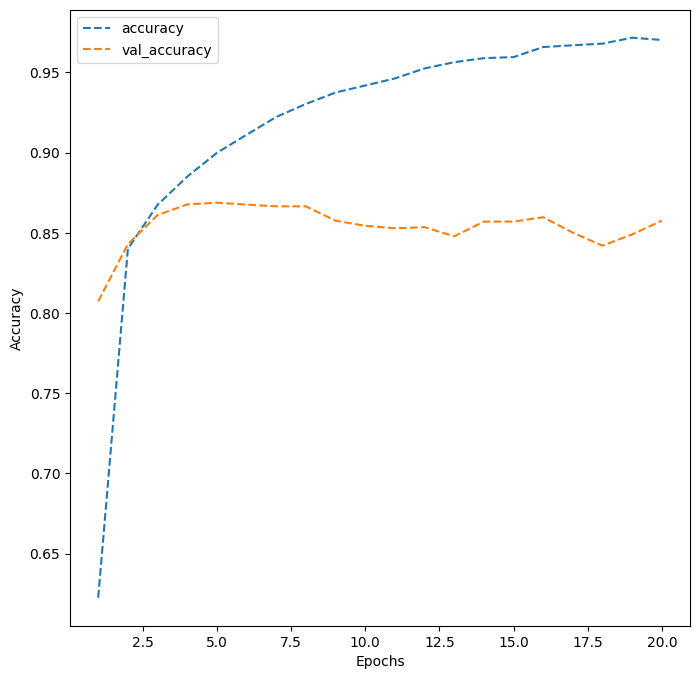

In [17]:
# plotting the accuracies

dict_hist = history_model_1.history
list_ep = [i for i in range(1,21)]

plt.figure(figsize = (8,8))
plt.plot(list_ep,dict_hist['accuracy'],ls = '--', label = 'accuracy')
plt.plot(list_ep,dict_hist['val_accuracy'],ls = '--', label = 'val_accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.show()



<p><strong>Observations:The accuracy continues to increase where the validation accuracy remains stagnant after about 2.5 epochs. This indicates the model may be slightly over fitted.</strong></p>



<p>Let's build another model and see if we can get a better model with generalized performance.</p>
<p>First, we need to clear the previous model's history from the keras backend. Also, let's fix the seed again after clearing the backend.</p>


In [18]:
#Clearing backend
from tensorflow.keras import backend
backend.clear_session()


In [19]:
#Fixing the seed for random number generators
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)



<h3 id="Second-Model-Architecture"><strong>Second Model Architecture</strong><a class="anchor-link" href="#Second-Model-Architecture">¶</a></h3><ul>
<li>Write a function that returns a sequential model with the following architecture<ul>
<li>First Convolutional layer with <strong>16 filters and kernel size of 3x3</strong>. Use the <strong>'same' padding</strong> and provide an <strong>apt input shape</strong></li>
<li>Add a <strong>LeakyRelu layer</strong> with the <strong>slope equal to 0.1</strong></li>
<li>Second Convolutional layer with <strong>32 filters and kernel size of 3x3 with 'same' padding</strong></li>
<li>Add <strong>LeakyRelu</strong> with the <strong>slope equal to 0.1</strong></li>
<li>Add a <strong>max-pooling layer</strong> with a <strong>pool size of 2x2</strong></li>
<li>Add a <strong>BatchNormalization layer</strong></li>
<li>Third Convolutional layer with <strong>32 filters and kernel size of 3x3 with 'same' padding</strong></li>
<li>Add a <strong>LeakyRelu layer with slope equal to 0.1</strong></li>
<li>Fourth Convolutional layer <strong>64 filters and kernel size of 3x3 with 'same' padding</strong> </li>
<li>Add a <strong>LeakyRelu layer with slope equal to 0.1</strong></li>
<li>Add a <strong>max-pooling layer</strong> with a <strong>pool size of 2x2</strong></li>
<li>Add a <strong>BatchNormalization layer</strong></li>
<li><strong>Flatten</strong> the output from the previous layer</li>
<li>Add a <strong>dense layer with 32 nodes</strong></li>
<li>Add a <strong>LeakyRelu layer with slope equal to 0.1</strong></li>
<li>Add a <strong>dropout layer with rate equal to 0.5</strong></li>
<li>Add the final <strong>output layer with nodes equal to the number of classes</strong> and <strong>softmax activation</strong></li>
<li>Compile the model with the <strong>categorical_crossentropy loss, adam optimizers (learning_rate = 0.001), and accuracy metric</strong>. Do not fit the model here, just return the compiled model</li>
</ul>
</li>
<li>Call the function and store the model in a new variable</li>
<li>Print the summary of the model.</li>
<li>Fit the model on the train data with a <strong>validation split of 0.2, batch size = 128, verbose = 1, and 30 epochs</strong>. Store the model building history to use later for visualization.</li>
</ul>



<h4 id="Question-5:-Build-and-train-the-second-CNN-model-as-per-the-above-mentioned-architecture-(10-Marks)"><strong>Question 5: Build and train the second CNN model as per the above mentioned architecture (10 Marks)</strong><a class="anchor-link" href="#Question-5:-Build-and-train-the-second-CNN-model-as-per-the-above-mentioned-architecture-(10-Marks)">¶</a></h4>


In [20]:
#Define the function
def cnn_model_2():
    model = Sequential() 
    #Add layers as per the architecture mentioned above in the same sequence
    model.add(Conv2D(filters=16, kernel_size=(3, 3), padding='same', input_shape = (32,32,1)))
    model.add(LeakyReLU(0.01))
    model.add(Conv2D(filters = 32, kernel_size = (3,3), padding = 'same'))
    model.add(LeakyReLU(0.01))
    model.add(MaxPool2D(pool_size = (2,2)))
    model.add(BatchNormalization())
    model.add(Flatten())
    model.add(Dense(32))
    model.add(LeakyReLU(0.1))
    model.add(Dense(units = 10, activation = 'softmax'))
    
    #declare adam optimizer with learning rate of 0.001 
    adam = optimizers.Adam(learning_rate = 0.001)
    
    #compile the model
    model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model


In [21]:
# Build the model
model_2 = cnn_model_2()


In [22]:
#Print the summary
model_2.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 32, 32, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 16, 16, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │       262,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_2 (LeakyReLU)       │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 267,434 (1.02 MB)

 Trainable params: 267,370 (1.02 MB)

 Non-trainable params: 64 (256.00 B)

In [23]:
# Fit the model
history_model_2 = model_2.fit(X_train, y_train, validation_split = 0.2, epochs = 30, batch_size = 128, verbose = 1)


Epoch 1/30


  1/263 ━━━━━━━━━━━━━━━━━━━━ 3:54 896ms/step - accuracy: 0.0781 - loss: 2.4768

  3/263 ━━━━━━━━━━━━━━━━━━━━ 11s 45ms/step - accuracy: 0.0877 - loss: 2.5694  

  5/263 ━━━━━━━━━━━━━━━━━━━━ 11s 44ms/step - accuracy: 0.0949 - loss: 2.5766

  6/263 ━━━━━━━━━━━━━━━━━━━━ 11s 46ms/step - accuracy: 0.0964 - loss: 2.5693

  7/263 ━━━━━━━━━━━━━━━━━━━━ 13s 51ms/step - accuracy: 0.0967 - loss: 2.5606

  8/263 ━━━━━━━━━━━━━━━━━━━━ 14s 55ms/step - accuracy: 0.0964 - loss: 2.5528

  9/263 ━━━━━━━━━━━━━━━━━━━━ 14s 56ms/step - accuracy: 0.0964 - loss: 2.5448

 10/263 ━━━━━━━━━━━━━━━━━━━━ 14s 58ms/step - accuracy: 0.0965 - loss: 2.5366

 11/263 ━━━━━━━━━━━━━━━━━━━━ 15s 60ms/step - accuracy: 0.0966 - loss: 2.5288

 12/263 ━━━━━━━━━━━━━━━━━━━━ 15s 62ms/step - accuracy: 0.0970 - loss: 2.5215

 13/263 ━━━━━━━━━━━━━━━━━━━━ 15s 62ms/step - accuracy: 0.0973 - loss: 2.5150

 14/263 ━━━━━━━━━━━━━━━━━━━━ 15s 64ms/step - accuracy: 0.0978 - loss: 2.5087

 15/263 ━━━━━━━━━━━━━━━━━━━━ 16s 65ms/step - accuracy: 0.0985 - loss: 2.5023

 16/263 ━━━━━━━━━━━━━━━━━━━━ 16s 65ms/step - accuracy: 0.0993 - loss: 2.4963

 17/263 ━━━━━━━━━━━━━━━━━━━━ 16s 68ms/step - accuracy: 0.1001 - loss: 2.4906

 18/263 ━━━━━━━━━━━━━━━━━━━━ 17s 71ms/step - accuracy: 0.1010 - loss: 2.4851

 19/263 ━━━━━━━━━━━━━━━━━━━━ 17s 71ms/step - accuracy: 0.1018 - loss: 2.4800

 20/263 ━━━━━━━━━━━━━━━━━━━━ 17s 72ms/step - accuracy: 0.1026 - loss: 2.4750

 21/263 ━━━━━━━━━━━━━━━━━━━━ 17s 72ms/step - accuracy: 0.1036 - loss: 2.4702

 22/263 ━━━━━━━━━━━━━━━━━━━━ 17s 72ms/step - accuracy: 0.1046 - loss: 2.4655

 23/263 ━━━━━━━━━━━━━━━━━━━━ 17s 73ms/step - accuracy: 0.1054 - loss: 2.4611

 24/263 ━━━━━━━━━━━━━━━━━━━━ 17s 74ms/step - accuracy: 0.1063 - loss: 2.4568

 25/263 ━━━━━━━━━━━━━━━━━━━━ 17s 74ms/step - accuracy: 0.1071 - loss: 2.4527

 26/263 ━━━━━━━━━━━━━━━━━━━━ 17s 74ms/step - accuracy: 0.1079 - loss: 2.4487

 27/263 ━━━━━━━━━━━━━━━━━━━━ 17s 74ms/step - accuracy: 0.1087 - loss: 2.4449

 28/263 ━━━━━━━━━━━━━━━━━━━━ 17s 74ms/step - accuracy: 0.1095 - loss: 2.4411

 29/263 ━━━━━━━━━━━━━━━━━━━━ 17s 75ms/step - accuracy: 0.1103 - loss: 2.4375

 30/263 ━━━━━━━━━━━━━━━━━━━━ 17s 75ms/step - accuracy: 0.1112 - loss: 2.4340

 31/263 ━━━━━━━━━━━━━━━━━━━━ 17s 75ms/step - accuracy: 0.1120 - loss: 2.4306

 32/263 ━━━━━━━━━━━━━━━━━━━━ 17s 75ms/step - accuracy: 0.1129 - loss: 2.4271

 33/263 ━━━━━━━━━━━━━━━━━━━━ 17s 75ms/step - accuracy: 0.1139 - loss: 2.4238

 34/263 ━━━━━━━━━━━━━━━━━━━━ 17s 75ms/step - accuracy: 0.1149 - loss: 2.4205

 35/263 ━━━━━━━━━━━━━━━━━━━━ 17s 77ms/step - accuracy: 0.1159 - loss: 2.4172

 36/263 ━━━━━━━━━━━━━━━━━━━━ 17s 77ms/step - accuracy: 0.1170 - loss: 2.4139

 37/263 ━━━━━━━━━━━━━━━━━━━━ 17s 77ms/step - accuracy: 0.1182 - loss: 2.4106

 38/263 ━━━━━━━━━━━━━━━━━━━━ 17s 78ms/step - accuracy: 0.1193 - loss: 2.4074

 39/263 ━━━━━━━━━━━━━━━━━━━━ 17s 78ms/step - accuracy: 0.1205 - loss: 2.4042

 40/263 ━━━━━━━━━━━━━━━━━━━━ 17s 79ms/step - accuracy: 0.1217 - loss: 2.4010

 41/263 ━━━━━━━━━━━━━━━━━━━━ 17s 79ms/step - accuracy: 0.1229 - loss: 2.3978

 42/263 ━━━━━━━━━━━━━━━━━━━━ 17s 80ms/step - accuracy: 0.1241 - loss: 2.3947

 43/263 ━━━━━━━━━━━━━━━━━━━━ 17s 80ms/step - accuracy: 0.1253 - loss: 2.3915

 44/263 ━━━━━━━━━━━━━━━━━━━━ 17s 80ms/step - accuracy: 0.1265 - loss: 2.3884

 45/263 ━━━━━━━━━━━━━━━━━━━━ 17s 82ms/step - accuracy: 0.1277 - loss: 2.3853

 46/263 ━━━━━━━━━━━━━━━━━━━━ 17s 82ms/step - accuracy: 0.1290 - loss: 2.3821

 47/263 ━━━━━━━━━━━━━━━━━━━━ 17s 83ms/step - accuracy: 0.1303 - loss: 2.3790

 48/263 ━━━━━━━━━━━━━━━━━━━━ 17s 82ms/step - accuracy: 0.1316 - loss: 2.3758

 49/263 ━━━━━━━━━━━━━━━━━━━━ 17s 82ms/step - accuracy: 0.1329 - loss: 2.3728

 50/263 ━━━━━━━━━━━━━━━━━━━━ 17s 82ms/step - accuracy: 0.1343 - loss: 2.3696

 51/263 ━━━━━━━━━━━━━━━━━━━━ 17s 82ms/step - accuracy: 0.1356 - loss: 2.3665

 52/263 ━━━━━━━━━━━━━━━━━━━━ 17s 82ms/step - accuracy: 0.1370 - loss: 2.3633

 53/263 ━━━━━━━━━━━━━━━━━━━━ 17s 82ms/step - accuracy: 0.1384 - loss: 2.3601

 54/263 ━━━━━━━━━━━━━━━━━━━━ 17s 83ms/step - accuracy: 0.1398 - loss: 2.3569

 55/263 ━━━━━━━━━━━━━━━━━━━━ 17s 83ms/step - accuracy: 0.1412 - loss: 2.3537

 56/263 ━━━━━━━━━━━━━━━━━━━━ 17s 83ms/step - accuracy: 0.1427 - loss: 2.3504

 57/263 ━━━━━━━━━━━━━━━━━━━━ 17s 83ms/step - accuracy: 0.1441 - loss: 2.3471

 58/263 ━━━━━━━━━━━━━━━━━━━━ 16s 83ms/step - accuracy: 0.1456 - loss: 2.3438

 59/263 ━━━━━━━━━━━━━━━━━━━━ 16s 82ms/step - accuracy: 0.1471 - loss: 2.3404

 60/263 ━━━━━━━━━━━━━━━━━━━━ 16s 82ms/step - accuracy: 0.1487 - loss: 2.3369

 61/263 ━━━━━━━━━━━━━━━━━━━━ 16s 82ms/step - accuracy: 0.1502 - loss: 2.3335

 62/263 ━━━━━━━━━━━━━━━━━━━━ 16s 82ms/step - accuracy: 0.1517 - loss: 2.3300

 63/263 ━━━━━━━━━━━━━━━━━━━━ 16s 83ms/step - accuracy: 0.1533 - loss: 2.3265

 64/263 ━━━━━━━━━━━━━━━━━━━━ 16s 82ms/step - accuracy: 0.1548 - loss: 2.3230

 65/263 ━━━━━━━━━━━━━━━━━━━━ 16s 82ms/step - accuracy: 0.1564 - loss: 2.3195

 66/263 ━━━━━━━━━━━━━━━━━━━━ 16s 82ms/step - accuracy: 0.1580 - loss: 2.3159

 67/263 ━━━━━━━━━━━━━━━━━━━━ 16s 82ms/step - accuracy: 0.1596 - loss: 2.3123

 68/263 ━━━━━━━━━━━━━━━━━━━━ 15s 82ms/step - accuracy: 0.1612 - loss: 2.3087

 69/263 ━━━━━━━━━━━━━━━━━━━━ 15s 82ms/step - accuracy: 0.1628 - loss: 2.3050

 70/263 ━━━━━━━━━━━━━━━━━━━━ 15s 82ms/step - accuracy: 0.1644 - loss: 2.3013

 71/263 ━━━━━━━━━━━━━━━━━━━━ 15s 82ms/step - accuracy: 0.1660 - loss: 2.2976

 72/263 ━━━━━━━━━━━━━━━━━━━━ 15s 82ms/step - accuracy: 0.1676 - loss: 2.2938

 73/263 ━━━━━━━━━━━━━━━━━━━━ 15s 83ms/step - accuracy: 0.1692 - loss: 2.2901

 74/263 ━━━━━━━━━━━━━━━━━━━━ 15s 83ms/step - accuracy: 0.1709 - loss: 2.2862

 75/263 ━━━━━━━━━━━━━━━━━━━━ 15s 83ms/step - accuracy: 0.1725 - loss: 2.2824

 76/263 ━━━━━━━━━━━━━━━━━━━━ 15s 83ms/step - accuracy: 0.1742 - loss: 2.2785

 77/263 ━━━━━━━━━━━━━━━━━━━━ 15s 83ms/step - accuracy: 0.1759 - loss: 2.2746

 78/263 ━━━━━━━━━━━━━━━━━━━━ 15s 83ms/step - accuracy: 0.1776 - loss: 2.2707

 79/263 ━━━━━━━━━━━━━━━━━━━━ 15s 83ms/step - accuracy: 0.1793 - loss: 2.2668

 80/263 ━━━━━━━━━━━━━━━━━━━━ 15s 83ms/step - accuracy: 0.1810 - loss: 2.2628

 81/263 ━━━━━━━━━━━━━━━━━━━━ 15s 83ms/step - accuracy: 0.1826 - loss: 2.2589

 82/263 ━━━━━━━━━━━━━━━━━━━━ 15s 83ms/step - accuracy: 0.1844 - loss: 2.2549

 83/263 ━━━━━━━━━━━━━━━━━━━━ 14s 83ms/step - accuracy: 0.1861 - loss: 2.2509

 84/263 ━━━━━━━━━━━━━━━━━━━━ 14s 83ms/step - accuracy: 0.1878 - loss: 2.2469

 85/263 ━━━━━━━━━━━━━━━━━━━━ 14s 83ms/step - accuracy: 0.1895 - loss: 2.2429

 86/263 ━━━━━━━━━━━━━━━━━━━━ 14s 83ms/step - accuracy: 0.1912 - loss: 2.2389

 87/263 ━━━━━━━━━━━━━━━━━━━━ 14s 83ms/step - accuracy: 0.1929 - loss: 2.2348

 88/263 ━━━━━━━━━━━━━━━━━━━━ 14s 83ms/step - accuracy: 0.1947 - loss: 2.2308

 89/263 ━━━━━━━━━━━━━━━━━━━━ 14s 83ms/step - accuracy: 0.1964 - loss: 2.2267

 90/263 ━━━━━━━━━━━━━━━━━━━━ 14s 83ms/step - accuracy: 0.1981 - loss: 2.2226

 91/263 ━━━━━━━━━━━━━━━━━━━━ 14s 83ms/step - accuracy: 0.1999 - loss: 2.2185

 92/263 ━━━━━━━━━━━━━━━━━━━━ 14s 83ms/step - accuracy: 0.2016 - loss: 2.2144

 93/263 ━━━━━━━━━━━━━━━━━━━━ 14s 83ms/step - accuracy: 0.2033 - loss: 2.2104

 94/263 ━━━━━━━━━━━━━━━━━━━━ 13s 83ms/step - accuracy: 0.2051 - loss: 2.2063

 95/263 ━━━━━━━━━━━━━━━━━━━━ 13s 83ms/step - accuracy: 0.2068 - loss: 2.2022

 96/263 ━━━━━━━━━━━━━━━━━━━━ 13s 82ms/step - accuracy: 0.2085 - loss: 2.1981

 97/263 ━━━━━━━━━━━━━━━━━━━━ 13s 83ms/step - accuracy: 0.2103 - loss: 2.1940

 98/263 ━━━━━━━━━━━━━━━━━━━━ 13s 83ms/step - accuracy: 0.2120 - loss: 2.1900

 99/263 ━━━━━━━━━━━━━━━━━━━━ 13s 83ms/step - accuracy: 0.2137 - loss: 2.1859

100/263 ━━━━━━━━━━━━━━━━━━━━ 13s 83ms/step - accuracy: 0.2155 - loss: 2.1818

101/263 ━━━━━━━━━━━━━━━━━━━━ 13s 83ms/step - accuracy: 0.2172 - loss: 2.1777

102/263 ━━━━━━━━━━━━━━━━━━━━ 13s 82ms/step - accuracy: 0.2189 - loss: 2.1737

103/263 ━━━━━━━━━━━━━━━━━━━━ 13s 82ms/step - accuracy: 0.2206 - loss: 2.1696

104/263 ━━━━━━━━━━━━━━━━━━━━ 13s 82ms/step - accuracy: 0.2223 - loss: 2.1655

105/263 ━━━━━━━━━━━━━━━━━━━━ 13s 82ms/step - accuracy: 0.2240 - loss: 2.1614

106/263 ━━━━━━━━━━━━━━━━━━━━ 12s 82ms/step - accuracy: 0.2257 - loss: 2.1574

107/263 ━━━━━━━━━━━━━━━━━━━━ 12s 82ms/step - accuracy: 0.2274 - loss: 2.1533

108/263 ━━━━━━━━━━━━━━━━━━━━ 12s 82ms/step - accuracy: 0.2291 - loss: 2.1492

109/263 ━━━━━━━━━━━━━━━━━━━━ 12s 82ms/step - accuracy: 0.2308 - loss: 2.1452

110/263 ━━━━━━━━━━━━━━━━━━━━ 12s 82ms/step - accuracy: 0.2325 - loss: 2.1411

111/263 ━━━━━━━━━━━━━━━━━━━━ 12s 82ms/step - accuracy: 0.2342 - loss: 2.1371

112/263 ━━━━━━━━━━━━━━━━━━━━ 12s 82ms/step - accuracy: 0.2359 - loss: 2.1331

113/263 ━━━━━━━━━━━━━━━━━━━━ 12s 83ms/step - accuracy: 0.2376 - loss: 2.1291

114/263 ━━━━━━━━━━━━━━━━━━━━ 12s 84ms/step - accuracy: 0.2392 - loss: 2.1251

115/263 ━━━━━━━━━━━━━━━━━━━━ 12s 84ms/step - accuracy: 0.2409 - loss: 2.1211

116/263 ━━━━━━━━━━━━━━━━━━━━ 12s 85ms/step - accuracy: 0.2426 - loss: 2.1171

117/263 ━━━━━━━━━━━━━━━━━━━━ 12s 85ms/step - accuracy: 0.2442 - loss: 2.1131

118/263 ━━━━━━━━━━━━━━━━━━━━ 12s 85ms/step - accuracy: 0.2459 - loss: 2.1091

119/263 ━━━━━━━━━━━━━━━━━━━━ 12s 85ms/step - accuracy: 0.2476 - loss: 2.1052

120/263 ━━━━━━━━━━━━━━━━━━━━ 12s 85ms/step - accuracy: 0.2492 - loss: 2.1012

121/263 ━━━━━━━━━━━━━━━━━━━━ 12s 85ms/step - accuracy: 0.2508 - loss: 2.0973

122/263 ━━━━━━━━━━━━━━━━━━━━ 12s 85ms/step - accuracy: 0.2525 - loss: 2.0934

123/263 ━━━━━━━━━━━━━━━━━━━━ 11s 85ms/step - accuracy: 0.2541 - loss: 2.0895

124/263 ━━━━━━━━━━━━━━━━━━━━ 11s 85ms/step - accuracy: 0.2557 - loss: 2.0856

125/263 ━━━━━━━━━━━━━━━━━━━━ 11s 85ms/step - accuracy: 0.2573 - loss: 2.0818

126/263 ━━━━━━━━━━━━━━━━━━━━ 11s 85ms/step - accuracy: 0.2589 - loss: 2.0780

127/263 ━━━━━━━━━━━━━━━━━━━━ 11s 85ms/step - accuracy: 0.2605 - loss: 2.0742

128/263 ━━━━━━━━━━━━━━━━━━━━ 11s 85ms/step - accuracy: 0.2621 - loss: 2.0704

129/263 ━━━━━━━━━━━━━━━━━━━━ 11s 85ms/step - accuracy: 0.2637 - loss: 2.0667

130/263 ━━━━━━━━━━━━━━━━━━━━ 11s 85ms/step - accuracy: 0.2652 - loss: 2.0629

131/263 ━━━━━━━━━━━━━━━━━━━━ 11s 85ms/step - accuracy: 0.2668 - loss: 2.0592

132/263 ━━━━━━━━━━━━━━━━━━━━ 11s 85ms/step - accuracy: 0.2683 - loss: 2.0555

133/263 ━━━━━━━━━━━━━━━━━━━━ 11s 85ms/step - accuracy: 0.2699 - loss: 2.0518

134/263 ━━━━━━━━━━━━━━━━━━━━ 10s 85ms/step - accuracy: 0.2714 - loss: 2.0481

135/263 ━━━━━━━━━━━━━━━━━━━━ 10s 85ms/step - accuracy: 0.2729 - loss: 2.0444

136/263 ━━━━━━━━━━━━━━━━━━━━ 10s 85ms/step - accuracy: 0.2745 - loss: 2.0408

137/263 ━━━━━━━━━━━━━━━━━━━━ 10s 85ms/step - accuracy: 0.2760 - loss: 2.0371

138/263 ━━━━━━━━━━━━━━━━━━━━ 10s 85ms/step - accuracy: 0.2775 - loss: 2.0334

139/263 ━━━━━━━━━━━━━━━━━━━━ 10s 85ms/step - accuracy: 0.2790 - loss: 2.0298

140/263 ━━━━━━━━━━━━━━━━━━━━ 10s 85ms/step - accuracy: 0.2805 - loss: 2.0262

141/263 ━━━━━━━━━━━━━━━━━━━━ 10s 85ms/step - accuracy: 0.2820 - loss: 2.0226

142/263 ━━━━━━━━━━━━━━━━━━━━ 10s 85ms/step - accuracy: 0.2835 - loss: 2.0190

143/263 ━━━━━━━━━━━━━━━━━━━━ 10s 85ms/step - accuracy: 0.2849 - loss: 2.0154

144/263 ━━━━━━━━━━━━━━━━━━━━ 10s 85ms/step - accuracy: 0.2864 - loss: 2.0119

145/263 ━━━━━━━━━━━━━━━━━━━━ 10s 85ms/step - accuracy: 0.2879 - loss: 2.0083

146/263 ━━━━━━━━━━━━━━━━━━━━ 9s 85ms/step - accuracy: 0.2893 - loss: 2.0048 

147/263 ━━━━━━━━━━━━━━━━━━━━ 9s 85ms/step - accuracy: 0.2908 - loss: 2.0012

148/263 ━━━━━━━━━━━━━━━━━━━━ 9s 85ms/step - accuracy: 0.2922 - loss: 1.9977

149/263 ━━━━━━━━━━━━━━━━━━━━ 9s 85ms/step - accuracy: 0.2937 - loss: 1.9942

150/263 ━━━━━━━━━━━━━━━━━━━━ 9s 85ms/step - accuracy: 0.2951 - loss: 1.9907

151/263 ━━━━━━━━━━━━━━━━━━━━ 9s 85ms/step - accuracy: 0.2965 - loss: 1.9872

152/263 ━━━━━━━━━━━━━━━━━━━━ 9s 85ms/step - accuracy: 0.2980 - loss: 1.9837

153/263 ━━━━━━━━━━━━━━━━━━━━ 9s 85ms/step - accuracy: 0.2994 - loss: 1.9802

154/263 ━━━━━━━━━━━━━━━━━━━━ 9s 85ms/step - accuracy: 0.3008 - loss: 1.9768

155/263 ━━━━━━━━━━━━━━━━━━━━ 9s 85ms/step - accuracy: 0.3022 - loss: 1.9734

156/263 ━━━━━━━━━━━━━━━━━━━━ 9s 85ms/step - accuracy: 0.3036 - loss: 1.9700

157/263 ━━━━━━━━━━━━━━━━━━━━ 9s 85ms/step - accuracy: 0.3050 - loss: 1.9666

158/263 ━━━━━━━━━━━━━━━━━━━━ 8s 85ms/step - accuracy: 0.3063 - loss: 1.9632

159/263 ━━━━━━━━━━━━━━━━━━━━ 8s 85ms/step - accuracy: 0.3077 - loss: 1.9598

160/263 ━━━━━━━━━━━━━━━━━━━━ 8s 85ms/step - accuracy: 0.3091 - loss: 1.9565

161/263 ━━━━━━━━━━━━━━━━━━━━ 8s 85ms/step - accuracy: 0.3104 - loss: 1.9532

162/263 ━━━━━━━━━━━━━━━━━━━━ 8s 85ms/step - accuracy: 0.3118 - loss: 1.9498

163/263 ━━━━━━━━━━━━━━━━━━━━ 8s 86ms/step - accuracy: 0.3131 - loss: 1.9465

164/263 ━━━━━━━━━━━━━━━━━━━━ 8s 86ms/step - accuracy: 0.3144 - loss: 1.9432

165/263 ━━━━━━━━━━━━━━━━━━━━ 8s 86ms/step - accuracy: 0.3158 - loss: 1.9399

166/263 ━━━━━━━━━━━━━━━━━━━━ 8s 86ms/step - accuracy: 0.3171 - loss: 1.9367

167/263 ━━━━━━━━━━━━━━━━━━━━ 8s 86ms/step - accuracy: 0.3184 - loss: 1.9334

168/263 ━━━━━━━━━━━━━━━━━━━━ 8s 86ms/step - accuracy: 0.3197 - loss: 1.9302

169/263 ━━━━━━━━━━━━━━━━━━━━ 8s 86ms/step - accuracy: 0.3210 - loss: 1.9269

170/263 ━━━━━━━━━━━━━━━━━━━━ 8s 86ms/step - accuracy: 0.3223 - loss: 1.9237

171/263 ━━━━━━━━━━━━━━━━━━━━ 7s 86ms/step - accuracy: 0.3236 - loss: 1.9205

172/263 ━━━━━━━━━━━━━━━━━━━━ 7s 86ms/step - accuracy: 0.3249 - loss: 1.9174

173/263 ━━━━━━━━━━━━━━━━━━━━ 7s 86ms/step - accuracy: 0.3262 - loss: 1.9142

174/263 ━━━━━━━━━━━━━━━━━━━━ 7s 87ms/step - accuracy: 0.3274 - loss: 1.9111

175/263 ━━━━━━━━━━━━━━━━━━━━ 7s 87ms/step - accuracy: 0.3287 - loss: 1.9079

176/263 ━━━━━━━━━━━━━━━━━━━━ 7s 87ms/step - accuracy: 0.3300 - loss: 1.9048

177/263 ━━━━━━━━━━━━━━━━━━━━ 7s 87ms/step - accuracy: 0.3312 - loss: 1.9017

178/263 ━━━━━━━━━━━━━━━━━━━━ 7s 87ms/step - accuracy: 0.3324 - loss: 1.8986

179/263 ━━━━━━━━━━━━━━━━━━━━ 7s 86ms/step - accuracy: 0.3337 - loss: 1.8956

180/263 ━━━━━━━━━━━━━━━━━━━━ 7s 86ms/step - accuracy: 0.3349 - loss: 1.8925

181/263 ━━━━━━━━━━━━━━━━━━━━ 7s 86ms/step - accuracy: 0.3361 - loss: 1.8894

182/263 ━━━━━━━━━━━━━━━━━━━━ 6s 86ms/step - accuracy: 0.3374 - loss: 1.8864

183/263 ━━━━━━━━━━━━━━━━━━━━ 6s 86ms/step - accuracy: 0.3386 - loss: 1.8834

184/263 ━━━━━━━━━━━━━━━━━━━━ 6s 86ms/step - accuracy: 0.3398 - loss: 1.8804

185/263 ━━━━━━━━━━━━━━━━━━━━ 6s 86ms/step - accuracy: 0.3410 - loss: 1.8774

186/263 ━━━━━━━━━━━━━━━━━━━━ 6s 87ms/step - accuracy: 0.3422 - loss: 1.8744

187/263 ━━━━━━━━━━━━━━━━━━━━ 6s 87ms/step - accuracy: 0.3434 - loss: 1.8714

188/263 ━━━━━━━━━━━━━━━━━━━━ 6s 87ms/step - accuracy: 0.3446 - loss: 1.8684

189/263 ━━━━━━━━━━━━━━━━━━━━ 6s 87ms/step - accuracy: 0.3457 - loss: 1.8655

190/263 ━━━━━━━━━━━━━━━━━━━━ 6s 87ms/step - accuracy: 0.3469 - loss: 1.8626

191/263 ━━━━━━━━━━━━━━━━━━━━ 6s 87ms/step - accuracy: 0.3481 - loss: 1.8596

192/263 ━━━━━━━━━━━━━━━━━━━━ 6s 87ms/step - accuracy: 0.3492 - loss: 1.8567

193/263 ━━━━━━━━━━━━━━━━━━━━ 6s 87ms/step - accuracy: 0.3504 - loss: 1.8539

194/263 ━━━━━━━━━━━━━━━━━━━━ 5s 87ms/step - accuracy: 0.3515 - loss: 1.8510

195/263 ━━━━━━━━━━━━━━━━━━━━ 5s 87ms/step - accuracy: 0.3527 - loss: 1.8481

196/263 ━━━━━━━━━━━━━━━━━━━━ 5s 87ms/step - accuracy: 0.3538 - loss: 1.8453

197/263 ━━━━━━━━━━━━━━━━━━━━ 5s 87ms/step - accuracy: 0.3549 - loss: 1.8425

198/263 ━━━━━━━━━━━━━━━━━━━━ 5s 87ms/step - accuracy: 0.3561 - loss: 1.8396

199/263 ━━━━━━━━━━━━━━━━━━━━ 5s 87ms/step - accuracy: 0.3572 - loss: 1.8368

200/263 ━━━━━━━━━━━━━━━━━━━━ 5s 87ms/step - accuracy: 0.3583 - loss: 1.8341

201/263 ━━━━━━━━━━━━━━━━━━━━ 5s 87ms/step - accuracy: 0.3594 - loss: 1.8313

202/263 ━━━━━━━━━━━━━━━━━━━━ 5s 87ms/step - accuracy: 0.3605 - loss: 1.8285

203/263 ━━━━━━━━━━━━━━━━━━━━ 5s 87ms/step - accuracy: 0.3616 - loss: 1.8258

204/263 ━━━━━━━━━━━━━━━━━━━━ 5s 87ms/step - accuracy: 0.3627 - loss: 1.8230

205/263 ━━━━━━━━━━━━━━━━━━━━ 5s 87ms/step - accuracy: 0.3638 - loss: 1.8203

206/263 ━━━━━━━━━━━━━━━━━━━━ 4s 87ms/step - accuracy: 0.3648 - loss: 1.8176

207/263 ━━━━━━━━━━━━━━━━━━━━ 4s 87ms/step - accuracy: 0.3659 - loss: 1.8149

208/263 ━━━━━━━━━━━━━━━━━━━━ 4s 87ms/step - accuracy: 0.3670 - loss: 1.8122

209/263 ━━━━━━━━━━━━━━━━━━━━ 4s 87ms/step - accuracy: 0.3680 - loss: 1.8096

210/263 ━━━━━━━━━━━━━━━━━━━━ 4s 87ms/step - accuracy: 0.3691 - loss: 1.8069

211/263 ━━━━━━━━━━━━━━━━━━━━ 4s 87ms/step - accuracy: 0.3701 - loss: 1.8042

212/263 ━━━━━━━━━━━━━━━━━━━━ 4s 87ms/step - accuracy: 0.3712 - loss: 1.8016

213/263 ━━━━━━━━━━━━━━━━━━━━ 4s 87ms/step - accuracy: 0.3722 - loss: 1.7990

214/263 ━━━━━━━━━━━━━━━━━━━━ 4s 87ms/step - accuracy: 0.3733 - loss: 1.7964

215/263 ━━━━━━━━━━━━━━━━━━━━ 4s 87ms/step - accuracy: 0.3743 - loss: 1.7938

216/263 ━━━━━━━━━━━━━━━━━━━━ 4s 87ms/step - accuracy: 0.3753 - loss: 1.7912

217/263 ━━━━━━━━━━━━━━━━━━━━ 4s 87ms/step - accuracy: 0.3763 - loss: 1.7886

218/263 ━━━━━━━━━━━━━━━━━━━━ 3s 87ms/step - accuracy: 0.3773 - loss: 1.7860

219/263 ━━━━━━━━━━━━━━━━━━━━ 3s 87ms/step - accuracy: 0.3783 - loss: 1.7835

220/263 ━━━━━━━━━━━━━━━━━━━━ 3s 87ms/step - accuracy: 0.3794 - loss: 1.7809

221/263 ━━━━━━━━━━━━━━━━━━━━ 3s 88ms/step - accuracy: 0.3804 - loss: 1.7784

222/263 ━━━━━━━━━━━━━━━━━━━━ 3s 88ms/step - accuracy: 0.3813 - loss: 1.7759

223/263 ━━━━━━━━━━━━━━━━━━━━ 3s 88ms/step - accuracy: 0.3823 - loss: 1.7734

224/263 ━━━━━━━━━━━━━━━━━━━━ 3s 88ms/step - accuracy: 0.3833 - loss: 1.7709

225/263 ━━━━━━━━━━━━━━━━━━━━ 3s 88ms/step - accuracy: 0.3843 - loss: 1.7684

226/263 ━━━━━━━━━━━━━━━━━━━━ 3s 88ms/step - accuracy: 0.3853 - loss: 1.7659

227/263 ━━━━━━━━━━━━━━━━━━━━ 3s 88ms/step - accuracy: 0.3863 - loss: 1.7634

228/263 ━━━━━━━━━━━━━━━━━━━━ 3s 88ms/step - accuracy: 0.3872 - loss: 1.7609

229/263 ━━━━━━━━━━━━━━━━━━━━ 2s 88ms/step - accuracy: 0.3882 - loss: 1.7585

230/263 ━━━━━━━━━━━━━━━━━━━━ 2s 88ms/step - accuracy: 0.3891 - loss: 1.7560

231/263 ━━━━━━━━━━━━━━━━━━━━ 2s 88ms/step - accuracy: 0.3901 - loss: 1.7536

232/263 ━━━━━━━━━━━━━━━━━━━━ 2s 88ms/step - accuracy: 0.3911 - loss: 1.7512

233/263 ━━━━━━━━━━━━━━━━━━━━ 2s 88ms/step - accuracy: 0.3920 - loss: 1.7488

234/263 ━━━━━━━━━━━━━━━━━━━━ 2s 88ms/step - accuracy: 0.3929 - loss: 1.7464

235/263 ━━━━━━━━━━━━━━━━━━━━ 2s 88ms/step - accuracy: 0.3939 - loss: 1.7440

236/263 ━━━━━━━━━━━━━━━━━━━━ 2s 88ms/step - accuracy: 0.3948 - loss: 1.7416

237/263 ━━━━━━━━━━━━━━━━━━━━ 2s 88ms/step - accuracy: 0.3957 - loss: 1.7392

238/263 ━━━━━━━━━━━━━━━━━━━━ 2s 88ms/step - accuracy: 0.3967 - loss: 1.7369

239/263 ━━━━━━━━━━━━━━━━━━━━ 2s 88ms/step - accuracy: 0.3976 - loss: 1.7345

240/263 ━━━━━━━━━━━━━━━━━━━━ 2s 88ms/step - accuracy: 0.3985 - loss: 1.7322

241/263 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step - accuracy: 0.3994 - loss: 1.7299

242/263 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step - accuracy: 0.4003 - loss: 1.7275

243/263 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step - accuracy: 0.4012 - loss: 1.7252

244/263 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step - accuracy: 0.4021 - loss: 1.7229

245/263 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step - accuracy: 0.4030 - loss: 1.7206

246/263 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step - accuracy: 0.4039 - loss: 1.7183

247/263 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step - accuracy: 0.4048 - loss: 1.7161

248/263 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step - accuracy: 0.4057 - loss: 1.7138

249/263 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step - accuracy: 0.4066 - loss: 1.7115

250/263 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step - accuracy: 0.4074 - loss: 1.7093

251/263 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step - accuracy: 0.4083 - loss: 1.7070

252/263 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - accuracy: 0.4092 - loss: 1.7048

253/263 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - accuracy: 0.4101 - loss: 1.7026

254/263 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - accuracy: 0.4109 - loss: 1.7004

255/263 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - accuracy: 0.4118 - loss: 1.6982

256/263 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - accuracy: 0.4126 - loss: 1.6960

257/263 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - accuracy: 0.4135 - loss: 1.6938

258/263 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - accuracy: 0.4143 - loss: 1.6916

259/263 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - accuracy: 0.4152 - loss: 1.6895

260/263 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - accuracy: 0.4160 - loss: 1.6873

261/263 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - accuracy: 0.4168 - loss: 1.6852

262/263 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - accuracy: 0.4177 - loss: 1.6830

263/263 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - accuracy: 0.4185 - loss: 1.6809

263/263 ━━━━━━━━━━━━━━━━━━━━ 26s 95ms/step - accuracy: 0.6346 - loss: 1.1243 - val_accuracy: 0.6761 - val_loss: 1.5678


Epoch 2/30


  1/263 ━━━━━━━━━━━━━━━━━━━━ 19s 75ms/step - accuracy: 0.8281 - loss: 0.5290

  2/263 ━━━━━━━━━━━━━━━━━━━━ 15s 59ms/step - accuracy: 0.8438 - loss: 0.5098

  3/263 ━━━━━━━━━━━━━━━━━━━━ 19s 75ms/step - accuracy: 0.8446 - loss: 0.5114

  4/263 ━━━━━━━━━━━━━━━━━━━━ 20s 77ms/step - accuracy: 0.8420 - loss: 0.5251

  5/263 ━━━━━━━━━━━━━━━━━━━━ 20s 78ms/step - accuracy: 0.8398 - loss: 0.5330

  6/263 ━━━━━━━━━━━━━━━━━━━━ 20s 81ms/step - accuracy: 0.8385 - loss: 0.5387

  7/263 ━━━━━━━━━━━━━━━━━━━━ 20s 80ms/step - accuracy: 0.8374 - loss: 0.5424

  8/263 ━━━━━━━━━━━━━━━━━━━━ 20s 80ms/step - accuracy: 0.8369 - loss: 0.5455

  9/263 ━━━━━━━━━━━━━━━━━━━━ 21s 83ms/step - accuracy: 0.8366 - loss: 0.5478

 10/263 ━━━━━━━━━━━━━━━━━━━━ 22s 88ms/step - accuracy: 0.8362 - loss: 0.5509

 11/263 ━━━━━━━━━━━━━━━━━━━━ 22s 89ms/step - accuracy: 0.8355 - loss: 0.5547

 12/263 ━━━━━━━━━━━━━━━━━━━━ 22s 88ms/step - accuracy: 0.8348 - loss: 0.5576

 13/263 ━━━━━━━━━━━━━━━━━━━━ 22s 88ms/step - accuracy: 0.8344 - loss: 0.5598

 14/263 ━━━━━━━━━━━━━━━━━━━━ 21s 88ms/step - accuracy: 0.8339 - loss: 0.5628

 15/263 ━━━━━━━━━━━━━━━━━━━━ 21s 88ms/step - accuracy: 0.8333 - loss: 0.5650

 16/263 ━━━━━━━━━━━━━━━━━━━━ 22s 89ms/step - accuracy: 0.8328 - loss: 0.5672

 17/263 ━━━━━━━━━━━━━━━━━━━━ 21s 89ms/step - accuracy: 0.8324 - loss: 0.5688

 18/263 ━━━━━━━━━━━━━━━━━━━━ 22s 90ms/step - accuracy: 0.8323 - loss: 0.5699

 19/263 ━━━━━━━━━━━━━━━━━━━━ 22s 92ms/step - accuracy: 0.8323 - loss: 0.5704

 20/263 ━━━━━━━━━━━━━━━━━━━━ 26s 108ms/step - accuracy: 0.8322 - loss: 0.5708

 21/263 ━━━━━━━━━━━━━━━━━━━━ 26s 111ms/step - accuracy: 0.8322 - loss: 0.5710

 22/263 ━━━━━━━━━━━━━━━━━━━━ 26s 111ms/step - accuracy: 0.8321 - loss: 0.5712

 23/263 ━━━━━━━━━━━━━━━━━━━━ 26s 111ms/step - accuracy: 0.8321 - loss: 0.5713

 24/263 ━━━━━━━━━━━━━━━━━━━━ 26s 110ms/step - accuracy: 0.8321 - loss: 0.5713

 25/263 ━━━━━━━━━━━━━━━━━━━━ 26s 110ms/step - accuracy: 0.8321 - loss: 0.5713

 26/263 ━━━━━━━━━━━━━━━━━━━━ 25s 109ms/step - accuracy: 0.8319 - loss: 0.5714

 27/263 ━━━━━━━━━━━━━━━━━━━━ 25s 110ms/step - accuracy: 0.8318 - loss: 0.5719

 28/263 ━━━━━━━━━━━━━━━━━━━━ 25s 110ms/step - accuracy: 0.8316 - loss: 0.5724

 29/263 ━━━━━━━━━━━━━━━━━━━━ 25s 110ms/step - accuracy: 0.8315 - loss: 0.5727

 30/263 ━━━━━━━━━━━━━━━━━━━━ 25s 110ms/step - accuracy: 0.8314 - loss: 0.5730

 31/263 ━━━━━━━━━━━━━━━━━━━━ 25s 110ms/step - accuracy: 0.8313 - loss: 0.5732

 32/263 ━━━━━━━━━━━━━━━━━━━━ 25s 110ms/step - accuracy: 0.8313 - loss: 0.5732

 33/263 ━━━━━━━━━━━━━━━━━━━━ 25s 109ms/step - accuracy: 0.8312 - loss: 0.5732

 34/263 ━━━━━━━━━━━━━━━━━━━━ 24s 109ms/step - accuracy: 0.8312 - loss: 0.5732

 35/263 ━━━━━━━━━━━━━━━━━━━━ 24s 109ms/step - accuracy: 0.8311 - loss: 0.5732

 36/263 ━━━━━━━━━━━━━━━━━━━━ 24s 108ms/step - accuracy: 0.8311 - loss: 0.5732

 37/263 ━━━━━━━━━━━━━━━━━━━━ 24s 107ms/step - accuracy: 0.8311 - loss: 0.5733

 38/263 ━━━━━━━━━━━━━━━━━━━━ 23s 107ms/step - accuracy: 0.8310 - loss: 0.5733

 39/263 ━━━━━━━━━━━━━━━━━━━━ 23s 106ms/step - accuracy: 0.8310 - loss: 0.5734

 40/263 ━━━━━━━━━━━━━━━━━━━━ 23s 105ms/step - accuracy: 0.8309 - loss: 0.5735

 41/263 ━━━━━━━━━━━━━━━━━━━━ 23s 105ms/step - accuracy: 0.8309 - loss: 0.5736

 42/263 ━━━━━━━━━━━━━━━━━━━━ 23s 105ms/step - accuracy: 0.8308 - loss: 0.5737

 43/263 ━━━━━━━━━━━━━━━━━━━━ 23s 105ms/step - accuracy: 0.8307 - loss: 0.5738

 44/263 ━━━━━━━━━━━━━━━━━━━━ 23s 106ms/step - accuracy: 0.8307 - loss: 0.5740

 45/263 ━━━━━━━━━━━━━━━━━━━━ 22s 105ms/step - accuracy: 0.8306 - loss: 0.5742

 46/263 ━━━━━━━━━━━━━━━━━━━━ 22s 105ms/step - accuracy: 0.8305 - loss: 0.5744

 47/263 ━━━━━━━━━━━━━━━━━━━━ 22s 105ms/step - accuracy: 0.8304 - loss: 0.5745

 48/263 ━━━━━━━━━━━━━━━━━━━━ 22s 106ms/step - accuracy: 0.8304 - loss: 0.5747

 49/263 ━━━━━━━━━━━━━━━━━━━━ 22s 106ms/step - accuracy: 0.8303 - loss: 0.5747

 50/263 ━━━━━━━━━━━━━━━━━━━━ 22s 105ms/step - accuracy: 0.8303 - loss: 0.5748

 51/263 ━━━━━━━━━━━━━━━━━━━━ 22s 105ms/step - accuracy: 0.8302 - loss: 0.5747

 52/263 ━━━━━━━━━━━━━━━━━━━━ 22s 104ms/step - accuracy: 0.8302 - loss: 0.5747

 53/263 ━━━━━━━━━━━━━━━━━━━━ 21s 104ms/step - accuracy: 0.8302 - loss: 0.5748

 54/263 ━━━━━━━━━━━━━━━━━━━━ 21s 104ms/step - accuracy: 0.8302 - loss: 0.5747

 55/263 ━━━━━━━━━━━━━━━━━━━━ 21s 104ms/step - accuracy: 0.8302 - loss: 0.5746

 56/263 ━━━━━━━━━━━━━━━━━━━━ 21s 104ms/step - accuracy: 0.8302 - loss: 0.5745

 57/263 ━━━━━━━━━━━━━━━━━━━━ 21s 103ms/step - accuracy: 0.8302 - loss: 0.5745

 58/263 ━━━━━━━━━━━━━━━━━━━━ 21s 103ms/step - accuracy: 0.8302 - loss: 0.5744

 59/263 ━━━━━━━━━━━━━━━━━━━━ 20s 103ms/step - accuracy: 0.8302 - loss: 0.5742

 60/263 ━━━━━━━━━━━━━━━━━━━━ 20s 103ms/step - accuracy: 0.8302 - loss: 0.5741

 61/263 ━━━━━━━━━━━━━━━━━━━━ 20s 103ms/step - accuracy: 0.8302 - loss: 0.5741

 62/263 ━━━━━━━━━━━━━━━━━━━━ 20s 102ms/step - accuracy: 0.8302 - loss: 0.5739

 63/263 ━━━━━━━━━━━━━━━━━━━━ 20s 102ms/step - accuracy: 0.8302 - loss: 0.5738

 64/263 ━━━━━━━━━━━━━━━━━━━━ 20s 102ms/step - accuracy: 0.8302 - loss: 0.5738

 65/263 ━━━━━━━━━━━━━━━━━━━━ 19s 101ms/step - accuracy: 0.8302 - loss: 0.5737

 66/263 ━━━━━━━━━━━━━━━━━━━━ 19s 101ms/step - accuracy: 0.8302 - loss: 0.5737

 67/263 ━━━━━━━━━━━━━━━━━━━━ 19s 100ms/step - accuracy: 0.8302 - loss: 0.5737

 68/263 ━━━━━━━━━━━━━━━━━━━━ 19s 100ms/step - accuracy: 0.8301 - loss: 0.5737

 69/263 ━━━━━━━━━━━━━━━━━━━━ 19s 100ms/step - accuracy: 0.8301 - loss: 0.5736

 70/263 ━━━━━━━━━━━━━━━━━━━━ 19s 99ms/step - accuracy: 0.8301 - loss: 0.5736 

 71/263 ━━━━━━━━━━━━━━━━━━━━ 19s 99ms/step - accuracy: 0.8301 - loss: 0.5736

 72/263 ━━━━━━━━━━━━━━━━━━━━ 19s 100ms/step - accuracy: 0.8301 - loss: 0.5735

 73/263 ━━━━━━━━━━━━━━━━━━━━ 18s 99ms/step - accuracy: 0.8301 - loss: 0.5734 

 74/263 ━━━━━━━━━━━━━━━━━━━━ 18s 99ms/step - accuracy: 0.8301 - loss: 0.5733

 75/263 ━━━━━━━━━━━━━━━━━━━━ 18s 99ms/step - accuracy: 0.8301 - loss: 0.5732

 76/263 ━━━━━━━━━━━━━━━━━━━━ 18s 99ms/step - accuracy: 0.8301 - loss: 0.5731

 77/263 ━━━━━━━━━━━━━━━━━━━━ 18s 98ms/step - accuracy: 0.8301 - loss: 0.5730

 78/263 ━━━━━━━━━━━━━━━━━━━━ 18s 98ms/step - accuracy: 0.8302 - loss: 0.5729

 79/263 ━━━━━━━━━━━━━━━━━━━━ 18s 98ms/step - accuracy: 0.8302 - loss: 0.5728

 80/263 ━━━━━━━━━━━━━━━━━━━━ 17s 98ms/step - accuracy: 0.8302 - loss: 0.5727

 81/263 ━━━━━━━━━━━━━━━━━━━━ 17s 97ms/step - accuracy: 0.8302 - loss: 0.5725

 82/263 ━━━━━━━━━━━━━━━━━━━━ 17s 97ms/step - accuracy: 0.8303 - loss: 0.5724

 83/263 ━━━━━━━━━━━━━━━━━━━━ 17s 97ms/step - accuracy: 0.8303 - loss: 0.5723

 84/263 ━━━━━━━━━━━━━━━━━━━━ 17s 97ms/step - accuracy: 0.8303 - loss: 0.5722

 85/263 ━━━━━━━━━━━━━━━━━━━━ 17s 97ms/step - accuracy: 0.8304 - loss: 0.5720

 86/263 ━━━━━━━━━━━━━━━━━━━━ 17s 97ms/step - accuracy: 0.8304 - loss: 0.5719

 87/263 ━━━━━━━━━━━━━━━━━━━━ 17s 97ms/step - accuracy: 0.8304 - loss: 0.5718

 88/263 ━━━━━━━━━━━━━━━━━━━━ 16s 96ms/step - accuracy: 0.8305 - loss: 0.5716

 89/263 ━━━━━━━━━━━━━━━━━━━━ 16s 96ms/step - accuracy: 0.8305 - loss: 0.5714

 90/263 ━━━━━━━━━━━━━━━━━━━━ 16s 96ms/step - accuracy: 0.8306 - loss: 0.5713

 91/263 ━━━━━━━━━━━━━━━━━━━━ 16s 96ms/step - accuracy: 0.8306 - loss: 0.5711

 92/263 ━━━━━━━━━━━━━━━━━━━━ 16s 96ms/step - accuracy: 0.8307 - loss: 0.5709

 93/263 ━━━━━━━━━━━━━━━━━━━━ 16s 96ms/step - accuracy: 0.8307 - loss: 0.5707

 94/263 ━━━━━━━━━━━━━━━━━━━━ 16s 96ms/step - accuracy: 0.8308 - loss: 0.5706

 95/263 ━━━━━━━━━━━━━━━━━━━━ 16s 96ms/step - accuracy: 0.8308 - loss: 0.5704

 96/263 ━━━━━━━━━━━━━━━━━━━━ 16s 96ms/step - accuracy: 0.8309 - loss: 0.5702

 97/263 ━━━━━━━━━━━━━━━━━━━━ 15s 96ms/step - accuracy: 0.8309 - loss: 0.5700

 98/263 ━━━━━━━━━━━━━━━━━━━━ 15s 96ms/step - accuracy: 0.8309 - loss: 0.5699

 99/263 ━━━━━━━━━━━━━━━━━━━━ 15s 96ms/step - accuracy: 0.8310 - loss: 0.5697

100/263 ━━━━━━━━━━━━━━━━━━━━ 15s 96ms/step - accuracy: 0.8310 - loss: 0.5695

101/263 ━━━━━━━━━━━━━━━━━━━━ 15s 96ms/step - accuracy: 0.8311 - loss: 0.5694

102/263 ━━━━━━━━━━━━━━━━━━━━ 15s 95ms/step - accuracy: 0.8311 - loss: 0.5692

103/263 ━━━━━━━━━━━━━━━━━━━━ 15s 95ms/step - accuracy: 0.8312 - loss: 0.5690

104/263 ━━━━━━━━━━━━━━━━━━━━ 15s 95ms/step - accuracy: 0.8312 - loss: 0.5689

105/263 ━━━━━━━━━━━━━━━━━━━━ 15s 95ms/step - accuracy: 0.8313 - loss: 0.5687

106/263 ━━━━━━━━━━━━━━━━━━━━ 14s 95ms/step - accuracy: 0.8313 - loss: 0.5685

107/263 ━━━━━━━━━━━━━━━━━━━━ 14s 95ms/step - accuracy: 0.8314 - loss: 0.5683

108/263 ━━━━━━━━━━━━━━━━━━━━ 14s 95ms/step - accuracy: 0.8314 - loss: 0.5681

109/263 ━━━━━━━━━━━━━━━━━━━━ 14s 95ms/step - accuracy: 0.8315 - loss: 0.5679

110/263 ━━━━━━━━━━━━━━━━━━━━ 14s 95ms/step - accuracy: 0.8315 - loss: 0.5677

111/263 ━━━━━━━━━━━━━━━━━━━━ 14s 94ms/step - accuracy: 0.8316 - loss: 0.5676

112/263 ━━━━━━━━━━━━━━━━━━━━ 14s 94ms/step - accuracy: 0.8316 - loss: 0.5674

113/263 ━━━━━━━━━━━━━━━━━━━━ 14s 94ms/step - accuracy: 0.8317 - loss: 0.5672

114/263 ━━━━━━━━━━━━━━━━━━━━ 14s 94ms/step - accuracy: 0.8317 - loss: 0.5670

115/263 ━━━━━━━━━━━━━━━━━━━━ 13s 94ms/step - accuracy: 0.8318 - loss: 0.5669

116/263 ━━━━━━━━━━━━━━━━━━━━ 13s 94ms/step - accuracy: 0.8318 - loss: 0.5667

117/263 ━━━━━━━━━━━━━━━━━━━━ 13s 94ms/step - accuracy: 0.8319 - loss: 0.5665

118/263 ━━━━━━━━━━━━━━━━━━━━ 13s 94ms/step - accuracy: 0.8319 - loss: 0.5664

119/263 ━━━━━━━━━━━━━━━━━━━━ 13s 94ms/step - accuracy: 0.8320 - loss: 0.5662

120/263 ━━━━━━━━━━━━━━━━━━━━ 13s 94ms/step - accuracy: 0.8320 - loss: 0.5660

121/263 ━━━━━━━━━━━━━━━━━━━━ 13s 94ms/step - accuracy: 0.8321 - loss: 0.5659

122/263 ━━━━━━━━━━━━━━━━━━━━ 13s 94ms/step - accuracy: 0.8321 - loss: 0.5657

123/263 ━━━━━━━━━━━━━━━━━━━━ 13s 94ms/step - accuracy: 0.8322 - loss: 0.5656

124/263 ━━━━━━━━━━━━━━━━━━━━ 13s 94ms/step - accuracy: 0.8322 - loss: 0.5654

125/263 ━━━━━━━━━━━━━━━━━━━━ 12s 94ms/step - accuracy: 0.8323 - loss: 0.5653

126/263 ━━━━━━━━━━━━━━━━━━━━ 12s 93ms/step - accuracy: 0.8323 - loss: 0.5652

127/263 ━━━━━━━━━━━━━━━━━━━━ 12s 93ms/step - accuracy: 0.8324 - loss: 0.5650

128/263 ━━━━━━━━━━━━━━━━━━━━ 12s 93ms/step - accuracy: 0.8324 - loss: 0.5649

129/263 ━━━━━━━━━━━━━━━━━━━━ 12s 93ms/step - accuracy: 0.8325 - loss: 0.5648

130/263 ━━━━━━━━━━━━━━━━━━━━ 12s 93ms/step - accuracy: 0.8325 - loss: 0.5646

131/263 ━━━━━━━━━━━━━━━━━━━━ 12s 93ms/step - accuracy: 0.8326 - loss: 0.5645

132/263 ━━━━━━━━━━━━━━━━━━━━ 12s 93ms/step - accuracy: 0.8326 - loss: 0.5643

133/263 ━━━━━━━━━━━━━━━━━━━━ 12s 93ms/step - accuracy: 0.8327 - loss: 0.5642

134/263 ━━━━━━━━━━━━━━━━━━━━ 11s 93ms/step - accuracy: 0.8327 - loss: 0.5641

135/263 ━━━━━━━━━━━━━━━━━━━━ 11s 92ms/step - accuracy: 0.8328 - loss: 0.5639

136/263 ━━━━━━━━━━━━━━━━━━━━ 11s 92ms/step - accuracy: 0.8328 - loss: 0.5638

137/263 ━━━━━━━━━━━━━━━━━━━━ 11s 92ms/step - accuracy: 0.8329 - loss: 0.5636

138/263 ━━━━━━━━━━━━━━━━━━━━ 11s 92ms/step - accuracy: 0.8329 - loss: 0.5634

139/263 ━━━━━━━━━━━━━━━━━━━━ 11s 92ms/step - accuracy: 0.8330 - loss: 0.5633

140/263 ━━━━━━━━━━━━━━━━━━━━ 11s 92ms/step - accuracy: 0.8330 - loss: 0.5631

141/263 ━━━━━━━━━━━━━━━━━━━━ 11s 92ms/step - accuracy: 0.8331 - loss: 0.5630

142/263 ━━━━━━━━━━━━━━━━━━━━ 11s 92ms/step - accuracy: 0.8331 - loss: 0.5628

143/263 ━━━━━━━━━━━━━━━━━━━━ 10s 92ms/step - accuracy: 0.8332 - loss: 0.5627

144/263 ━━━━━━━━━━━━━━━━━━━━ 10s 92ms/step - accuracy: 0.8332 - loss: 0.5625

145/263 ━━━━━━━━━━━━━━━━━━━━ 10s 91ms/step - accuracy: 0.8333 - loss: 0.5623

146/263 ━━━━━━━━━━━━━━━━━━━━ 10s 91ms/step - accuracy: 0.8333 - loss: 0.5622

147/263 ━━━━━━━━━━━━━━━━━━━━ 10s 91ms/step - accuracy: 0.8334 - loss: 0.5620

148/263 ━━━━━━━━━━━━━━━━━━━━ 10s 91ms/step - accuracy: 0.8334 - loss: 0.5618

149/263 ━━━━━━━━━━━━━━━━━━━━ 10s 91ms/step - accuracy: 0.8335 - loss: 0.5617

150/263 ━━━━━━━━━━━━━━━━━━━━ 10s 91ms/step - accuracy: 0.8335 - loss: 0.5615

151/263 ━━━━━━━━━━━━━━━━━━━━ 10s 91ms/step - accuracy: 0.8336 - loss: 0.5613

152/263 ━━━━━━━━━━━━━━━━━━━━ 10s 91ms/step - accuracy: 0.8337 - loss: 0.5611

153/263 ━━━━━━━━━━━━━━━━━━━━ 9s 91ms/step - accuracy: 0.8337 - loss: 0.5609 

154/263 ━━━━━━━━━━━━━━━━━━━━ 9s 91ms/step - accuracy: 0.8338 - loss: 0.5608

155/263 ━━━━━━━━━━━━━━━━━━━━ 9s 91ms/step - accuracy: 0.8338 - loss: 0.5606

156/263 ━━━━━━━━━━━━━━━━━━━━ 9s 90ms/step - accuracy: 0.8339 - loss: 0.5604

157/263 ━━━━━━━━━━━━━━━━━━━━ 9s 90ms/step - accuracy: 0.8339 - loss: 0.5602

158/263 ━━━━━━━━━━━━━━━━━━━━ 9s 90ms/step - accuracy: 0.8340 - loss: 0.5601

159/263 ━━━━━━━━━━━━━━━━━━━━ 9s 90ms/step - accuracy: 0.8341 - loss: 0.5599

160/263 ━━━━━━━━━━━━━━━━━━━━ 9s 90ms/step - accuracy: 0.8341 - loss: 0.5597

161/263 ━━━━━━━━━━━━━━━━━━━━ 9s 90ms/step - accuracy: 0.8342 - loss: 0.5595

162/263 ━━━━━━━━━━━━━━━━━━━━ 9s 90ms/step - accuracy: 0.8342 - loss: 0.5594

163/263 ━━━━━━━━━━━━━━━━━━━━ 9s 90ms/step - accuracy: 0.8343 - loss: 0.5592

164/263 ━━━━━━━━━━━━━━━━━━━━ 8s 90ms/step - accuracy: 0.8343 - loss: 0.5590

165/263 ━━━━━━━━━━━━━━━━━━━━ 8s 90ms/step - accuracy: 0.8344 - loss: 0.5588

166/263 ━━━━━━━━━━━━━━━━━━━━ 8s 90ms/step - accuracy: 0.8344 - loss: 0.5587

167/263 ━━━━━━━━━━━━━━━━━━━━ 8s 90ms/step - accuracy: 0.8345 - loss: 0.5585

168/263 ━━━━━━━━━━━━━━━━━━━━ 8s 90ms/step - accuracy: 0.8346 - loss: 0.5583

169/263 ━━━━━━━━━━━━━━━━━━━━ 8s 90ms/step - accuracy: 0.8346 - loss: 0.5582

170/263 ━━━━━━━━━━━━━━━━━━━━ 8s 89ms/step - accuracy: 0.8347 - loss: 0.5580

171/263 ━━━━━━━━━━━━━━━━━━━━ 8s 89ms/step - accuracy: 0.8347 - loss: 0.5579

172/263 ━━━━━━━━━━━━━━━━━━━━ 8s 89ms/step - accuracy: 0.8348 - loss: 0.5577

173/263 ━━━━━━━━━━━━━━━━━━━━ 8s 89ms/step - accuracy: 0.8348 - loss: 0.5576

174/263 ━━━━━━━━━━━━━━━━━━━━ 7s 89ms/step - accuracy: 0.8349 - loss: 0.5574

175/263 ━━━━━━━━━━━━━━━━━━━━ 7s 89ms/step - accuracy: 0.8349 - loss: 0.5573

176/263 ━━━━━━━━━━━━━━━━━━━━ 7s 89ms/step - accuracy: 0.8350 - loss: 0.5571

177/263 ━━━━━━━━━━━━━━━━━━━━ 7s 89ms/step - accuracy: 0.8350 - loss: 0.5570

178/263 ━━━━━━━━━━━━━━━━━━━━ 7s 89ms/step - accuracy: 0.8351 - loss: 0.5568

179/263 ━━━━━━━━━━━━━━━━━━━━ 7s 89ms/step - accuracy: 0.8351 - loss: 0.5567

180/263 ━━━━━━━━━━━━━━━━━━━━ 7s 89ms/step - accuracy: 0.8352 - loss: 0.5565

181/263 ━━━━━━━━━━━━━━━━━━━━ 7s 89ms/step - accuracy: 0.8352 - loss: 0.5564

182/263 ━━━━━━━━━━━━━━━━━━━━ 7s 90ms/step - accuracy: 0.8353 - loss: 0.5562

183/263 ━━━━━━━━━━━━━━━━━━━━ 7s 90ms/step - accuracy: 0.8353 - loss: 0.5561

184/263 ━━━━━━━━━━━━━━━━━━━━ 7s 90ms/step - accuracy: 0.8354 - loss: 0.5559

185/263 ━━━━━━━━━━━━━━━━━━━━ 7s 90ms/step - accuracy: 0.8354 - loss: 0.5557

186/263 ━━━━━━━━━━━━━━━━━━━━ 6s 90ms/step - accuracy: 0.8355 - loss: 0.5556

187/263 ━━━━━━━━━━━━━━━━━━━━ 6s 90ms/step - accuracy: 0.8355 - loss: 0.5554

188/263 ━━━━━━━━━━━━━━━━━━━━ 6s 90ms/step - accuracy: 0.8356 - loss: 0.5553

189/263 ━━━━━━━━━━━━━━━━━━━━ 6s 90ms/step - accuracy: 0.8356 - loss: 0.5551

190/263 ━━━━━━━━━━━━━━━━━━━━ 6s 90ms/step - accuracy: 0.8357 - loss: 0.5550

191/263 ━━━━━━━━━━━━━━━━━━━━ 6s 90ms/step - accuracy: 0.8357 - loss: 0.5549

192/263 ━━━━━━━━━━━━━━━━━━━━ 6s 91ms/step - accuracy: 0.8358 - loss: 0.5547

193/263 ━━━━━━━━━━━━━━━━━━━━ 6s 91ms/step - accuracy: 0.8359 - loss: 0.5546

194/263 ━━━━━━━━━━━━━━━━━━━━ 6s 91ms/step - accuracy: 0.8359 - loss: 0.5544

195/263 ━━━━━━━━━━━━━━━━━━━━ 6s 92ms/step - accuracy: 0.8360 - loss: 0.5543

196/263 ━━━━━━━━━━━━━━━━━━━━ 6s 93ms/step - accuracy: 0.8360 - loss: 0.5541

197/263 ━━━━━━━━━━━━━━━━━━━━ 6s 93ms/step - accuracy: 0.8361 - loss: 0.5540

198/263 ━━━━━━━━━━━━━━━━━━━━ 6s 93ms/step - accuracy: 0.8361 - loss: 0.5539

199/263 ━━━━━━━━━━━━━━━━━━━━ 5s 93ms/step - accuracy: 0.8361 - loss: 0.5537

200/263 ━━━━━━━━━━━━━━━━━━━━ 5s 93ms/step - accuracy: 0.8362 - loss: 0.5536

201/263 ━━━━━━━━━━━━━━━━━━━━ 5s 93ms/step - accuracy: 0.8362 - loss: 0.5535

202/263 ━━━━━━━━━━━━━━━━━━━━ 5s 93ms/step - accuracy: 0.8363 - loss: 0.5533

203/263 ━━━━━━━━━━━━━━━━━━━━ 5s 93ms/step - accuracy: 0.8363 - loss: 0.5532

204/263 ━━━━━━━━━━━━━━━━━━━━ 5s 93ms/step - accuracy: 0.8364 - loss: 0.5531

205/263 ━━━━━━━━━━━━━━━━━━━━ 5s 93ms/step - accuracy: 0.8364 - loss: 0.5529

206/263 ━━━━━━━━━━━━━━━━━━━━ 5s 93ms/step - accuracy: 0.8365 - loss: 0.5528

207/263 ━━━━━━━━━━━━━━━━━━━━ 5s 93ms/step - accuracy: 0.8365 - loss: 0.5527

208/263 ━━━━━━━━━━━━━━━━━━━━ 5s 93ms/step - accuracy: 0.8366 - loss: 0.5525

209/263 ━━━━━━━━━━━━━━━━━━━━ 5s 94ms/step - accuracy: 0.8366 - loss: 0.5524

210/263 ━━━━━━━━━━━━━━━━━━━━ 4s 93ms/step - accuracy: 0.8367 - loss: 0.5523

211/263 ━━━━━━━━━━━━━━━━━━━━ 4s 93ms/step - accuracy: 0.8367 - loss: 0.5521

212/263 ━━━━━━━━━━━━━━━━━━━━ 4s 94ms/step - accuracy: 0.8367 - loss: 0.5520

213/263 ━━━━━━━━━━━━━━━━━━━━ 4s 94ms/step - accuracy: 0.8368 - loss: 0.5519

214/263 ━━━━━━━━━━━━━━━━━━━━ 4s 94ms/step - accuracy: 0.8368 - loss: 0.5518

215/263 ━━━━━━━━━━━━━━━━━━━━ 4s 94ms/step - accuracy: 0.8369 - loss: 0.5516

216/263 ━━━━━━━━━━━━━━━━━━━━ 4s 94ms/step - accuracy: 0.8369 - loss: 0.5515

217/263 ━━━━━━━━━━━━━━━━━━━━ 4s 94ms/step - accuracy: 0.8370 - loss: 0.5514

218/263 ━━━━━━━━━━━━━━━━━━━━ 4s 94ms/step - accuracy: 0.8370 - loss: 0.5512

219/263 ━━━━━━━━━━━━━━━━━━━━ 4s 94ms/step - accuracy: 0.8371 - loss: 0.5511

220/263 ━━━━━━━━━━━━━━━━━━━━ 4s 94ms/step - accuracy: 0.8371 - loss: 0.5510

221/263 ━━━━━━━━━━━━━━━━━━━━ 3s 93ms/step - accuracy: 0.8371 - loss: 0.5509

222/263 ━━━━━━━━━━━━━━━━━━━━ 3s 93ms/step - accuracy: 0.8372 - loss: 0.5507

223/263 ━━━━━━━━━━━━━━━━━━━━ 3s 93ms/step - accuracy: 0.8372 - loss: 0.5506

224/263 ━━━━━━━━━━━━━━━━━━━━ 3s 93ms/step - accuracy: 0.8373 - loss: 0.5505

225/263 ━━━━━━━━━━━━━━━━━━━━ 3s 94ms/step - accuracy: 0.8373 - loss: 0.5503

226/263 ━━━━━━━━━━━━━━━━━━━━ 3s 94ms/step - accuracy: 0.8374 - loss: 0.5502

227/263 ━━━━━━━━━━━━━━━━━━━━ 3s 94ms/step - accuracy: 0.8374 - loss: 0.5501

228/263 ━━━━━━━━━━━━━━━━━━━━ 3s 94ms/step - accuracy: 0.8375 - loss: 0.5499

229/263 ━━━━━━━━━━━━━━━━━━━━ 3s 94ms/step - accuracy: 0.8375 - loss: 0.5498

230/263 ━━━━━━━━━━━━━━━━━━━━ 3s 94ms/step - accuracy: 0.8375 - loss: 0.5496

231/263 ━━━━━━━━━━━━━━━━━━━━ 2s 93ms/step - accuracy: 0.8376 - loss: 0.5495

232/263 ━━━━━━━━━━━━━━━━━━━━ 2s 93ms/step - accuracy: 0.8376 - loss: 0.5494

233/263 ━━━━━━━━━━━━━━━━━━━━ 2s 94ms/step - accuracy: 0.8377 - loss: 0.5492

234/263 ━━━━━━━━━━━━━━━━━━━━ 2s 94ms/step - accuracy: 0.8377 - loss: 0.5491

235/263 ━━━━━━━━━━━━━━━━━━━━ 2s 94ms/step - accuracy: 0.8378 - loss: 0.5490

236/263 ━━━━━━━━━━━━━━━━━━━━ 2s 94ms/step - accuracy: 0.8378 - loss: 0.5488

237/263 ━━━━━━━━━━━━━━━━━━━━ 2s 94ms/step - accuracy: 0.8379 - loss: 0.5487

238/263 ━━━━━━━━━━━━━━━━━━━━ 2s 94ms/step - accuracy: 0.8379 - loss: 0.5486

239/263 ━━━━━━━━━━━━━━━━━━━━ 2s 94ms/step - accuracy: 0.8379 - loss: 0.5484

240/263 ━━━━━━━━━━━━━━━━━━━━ 2s 94ms/step - accuracy: 0.8380 - loss: 0.5483

241/263 ━━━━━━━━━━━━━━━━━━━━ 2s 95ms/step - accuracy: 0.8380 - loss: 0.5482

242/263 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step - accuracy: 0.8381 - loss: 0.5480

243/263 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step - accuracy: 0.8381 - loss: 0.5479

244/263 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step - accuracy: 0.8382 - loss: 0.5478

245/263 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step - accuracy: 0.8382 - loss: 0.5476

246/263 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step - accuracy: 0.8382 - loss: 0.5475

247/263 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step - accuracy: 0.8383 - loss: 0.5473

248/263 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step - accuracy: 0.8383 - loss: 0.5472

249/263 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step - accuracy: 0.8384 - loss: 0.5471

250/263 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step - accuracy: 0.8384 - loss: 0.5469

251/263 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step - accuracy: 0.8385 - loss: 0.5468

252/263 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step - accuracy: 0.8385 - loss: 0.5466

253/263 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - accuracy: 0.8386 - loss: 0.5465

254/263 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - accuracy: 0.8386 - loss: 0.5464

255/263 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - accuracy: 0.8386 - loss: 0.5462

256/263 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - accuracy: 0.8387 - loss: 0.5461

257/263 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - accuracy: 0.8387 - loss: 0.5460

258/263 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - accuracy: 0.8388 - loss: 0.5458

259/263 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - accuracy: 0.8388 - loss: 0.5457

260/263 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - accuracy: 0.8389 - loss: 0.5456

261/263 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - accuracy: 0.8389 - loss: 0.5454

262/263 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - accuracy: 0.8389 - loss: 0.5453

263/263 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - accuracy: 0.8390 - loss: 0.5452

263/263 ━━━━━━━━━━━━━━━━━━━━ 27s 102ms/step - accuracy: 0.8499 - loss: 0.5106 - val_accuracy: 0.8427 - val_loss: 0.6609


Epoch 3/30


  1/263 ━━━━━━━━━━━━━━━━━━━━ 20s 79ms/step - accuracy: 0.8438 - loss: 0.4721

  2/263 ━━━━━━━━━━━━━━━━━━━━ 16s 63ms/step - accuracy: 0.8574 - loss: 0.4404

  3/263 ━━━━━━━━━━━━━━━━━━━━ 20s 79ms/step - accuracy: 0.8607 - loss: 0.4340

  4/263 ━━━━━━━━━━━━━━━━━━━━ 20s 80ms/step - accuracy: 0.8604 - loss: 0.4400

  5/263 ━━━━━━━━━━━━━━━━━━━━ 20s 80ms/step - accuracy: 0.8586 - loss: 0.4427

  6/263 ━━━━━━━━━━━━━━━━━━━━ 21s 83ms/step - accuracy: 0.8585 - loss: 0.4434

  7/263 ━━━━━━━━━━━━━━━━━━━━ 21s 83ms/step - accuracy: 0.8588 - loss: 0.4434

  8/263 ━━━━━━━━━━━━━━━━━━━━ 21s 85ms/step - accuracy: 0.8592 - loss: 0.4435

  9/263 ━━━━━━━━━━━━━━━━━━━━ 21s 85ms/step - accuracy: 0.8598 - loss: 0.4426

 10/263 ━━━━━━━━━━━━━━━━━━━━ 21s 85ms/step - accuracy: 0.8605 - loss: 0.4426

 11/263 ━━━━━━━━━━━━━━━━━━━━ 21s 85ms/step - accuracy: 0.8607 - loss: 0.4434

 12/263 ━━━━━━━━━━━━━━━━━━━━ 21s 85ms/step - accuracy: 0.8609 - loss: 0.4437

 13/263 ━━━━━━━━━━━━━━━━━━━━ 21s 85ms/step - accuracy: 0.8611 - loss: 0.4438

 14/263 ━━━━━━━━━━━━━━━━━━━━ 20s 84ms/step - accuracy: 0.8610 - loss: 0.4451

 15/263 ━━━━━━━━━━━━━━━━━━━━ 20s 85ms/step - accuracy: 0.8608 - loss: 0.4459

 16/263 ━━━━━━━━━━━━━━━━━━━━ 20s 84ms/step - accuracy: 0.8606 - loss: 0.4464

 17/263 ━━━━━━━━━━━━━━━━━━━━ 20s 85ms/step - accuracy: 0.8605 - loss: 0.4466

 18/263 ━━━━━━━━━━━━━━━━━━━━ 20s 85ms/step - accuracy: 0.8605 - loss: 0.4466

 19/263 ━━━━━━━━━━━━━━━━━━━━ 20s 84ms/step - accuracy: 0.8605 - loss: 0.4463

 20/263 ━━━━━━━━━━━━━━━━━━━━ 20s 85ms/step - accuracy: 0.8607 - loss: 0.4459

 21/263 ━━━━━━━━━━━━━━━━━━━━ 20s 85ms/step - accuracy: 0.8608 - loss: 0.4454

 22/263 ━━━━━━━━━━━━━━━━━━━━ 20s 85ms/step - accuracy: 0.8610 - loss: 0.4450

 23/263 ━━━━━━━━━━━━━━━━━━━━ 20s 85ms/step - accuracy: 0.8612 - loss: 0.4446

 24/263 ━━━━━━━━━━━━━━━━━━━━ 20s 85ms/step - accuracy: 0.8613 - loss: 0.4441

 25/263 ━━━━━━━━━━━━━━━━━━━━ 20s 86ms/step - accuracy: 0.8615 - loss: 0.4437

 26/263 ━━━━━━━━━━━━━━━━━━━━ 20s 86ms/step - accuracy: 0.8616 - loss: 0.4433

 27/263 ━━━━━━━━━━━━━━━━━━━━ 20s 87ms/step - accuracy: 0.8616 - loss: 0.4434

 28/263 ━━━━━━━━━━━━━━━━━━━━ 20s 87ms/step - accuracy: 0.8616 - loss: 0.4435

 29/263 ━━━━━━━━━━━━━━━━━━━━ 20s 87ms/step - accuracy: 0.8617 - loss: 0.4436

 30/263 ━━━━━━━━━━━━━━━━━━━━ 20s 87ms/step - accuracy: 0.8617 - loss: 0.4436

 31/263 ━━━━━━━━━━━━━━━━━━━━ 20s 86ms/step - accuracy: 0.8618 - loss: 0.4435

 32/263 ━━━━━━━━━━━━━━━━━━━━ 20s 87ms/step - accuracy: 0.8619 - loss: 0.4433

 33/263 ━━━━━━━━━━━━━━━━━━━━ 20s 88ms/step - accuracy: 0.8620 - loss: 0.4433

 34/263 ━━━━━━━━━━━━━━━━━━━━ 20s 88ms/step - accuracy: 0.8622 - loss: 0.4432

 35/263 ━━━━━━━━━━━━━━━━━━━━ 20s 88ms/step - accuracy: 0.8622 - loss: 0.4432

 36/263 ━━━━━━━━━━━━━━━━━━━━ 19s 88ms/step - accuracy: 0.8623 - loss: 0.4431

 37/263 ━━━━━━━━━━━━━━━━━━━━ 19s 88ms/step - accuracy: 0.8623 - loss: 0.4432

 38/263 ━━━━━━━━━━━━━━━━━━━━ 19s 88ms/step - accuracy: 0.8624 - loss: 0.4433

 39/263 ━━━━━━━━━━━━━━━━━━━━ 19s 88ms/step - accuracy: 0.8624 - loss: 0.4434

 40/263 ━━━━━━━━━━━━━━━━━━━━ 19s 88ms/step - accuracy: 0.8624 - loss: 0.4435

 41/263 ━━━━━━━━━━━━━━━━━━━━ 19s 89ms/step - accuracy: 0.8624 - loss: 0.4437

 42/263 ━━━━━━━━━━━━━━━━━━━━ 19s 89ms/step - accuracy: 0.8624 - loss: 0.4440

 43/263 ━━━━━━━━━━━━━━━━━━━━ 19s 89ms/step - accuracy: 0.8624 - loss: 0.4442

 44/263 ━━━━━━━━━━━━━━━━━━━━ 19s 88ms/step - accuracy: 0.8624 - loss: 0.4445

 45/263 ━━━━━━━━━━━━━━━━━━━━ 19s 88ms/step - accuracy: 0.8624 - loss: 0.4448

 46/263 ━━━━━━━━━━━━━━━━━━━━ 19s 88ms/step - accuracy: 0.8623 - loss: 0.4452

 47/263 ━━━━━━━━━━━━━━━━━━━━ 19s 88ms/step - accuracy: 0.8623 - loss: 0.4455

 48/263 ━━━━━━━━━━━━━━━━━━━━ 18s 88ms/step - accuracy: 0.8622 - loss: 0.4457

 49/263 ━━━━━━━━━━━━━━━━━━━━ 18s 88ms/step - accuracy: 0.8622 - loss: 0.4460

 50/263 ━━━━━━━━━━━━━━━━━━━━ 18s 88ms/step - accuracy: 0.8621 - loss: 0.4462

 51/263 ━━━━━━━━━━━━━━━━━━━━ 18s 88ms/step - accuracy: 0.8621 - loss: 0.4463

 52/263 ━━━━━━━━━━━━━━━━━━━━ 18s 88ms/step - accuracy: 0.8621 - loss: 0.4465

 53/263 ━━━━━━━━━━━━━━━━━━━━ 18s 88ms/step - accuracy: 0.8621 - loss: 0.4467

 54/263 ━━━━━━━━━━━━━━━━━━━━ 18s 88ms/step - accuracy: 0.8621 - loss: 0.4468

 55/263 ━━━━━━━━━━━━━━━━━━━━ 18s 88ms/step - accuracy: 0.8621 - loss: 0.4469

 56/263 ━━━━━━━━━━━━━━━━━━━━ 18s 88ms/step - accuracy: 0.8621 - loss: 0.4469

 57/263 ━━━━━━━━━━━━━━━━━━━━ 18s 88ms/step - accuracy: 0.8621 - loss: 0.4470

 58/263 ━━━━━━━━━━━━━━━━━━━━ 18s 88ms/step - accuracy: 0.8622 - loss: 0.4470

 59/263 ━━━━━━━━━━━━━━━━━━━━ 17s 88ms/step - accuracy: 0.8622 - loss: 0.4471

 60/263 ━━━━━━━━━━━━━━━━━━━━ 17s 88ms/step - accuracy: 0.8622 - loss: 0.4471

 61/263 ━━━━━━━━━━━━━━━━━━━━ 17s 88ms/step - accuracy: 0.8622 - loss: 0.4472

 62/263 ━━━━━━━━━━━━━━━━━━━━ 17s 88ms/step - accuracy: 0.8623 - loss: 0.4472

 63/263 ━━━━━━━━━━━━━━━━━━━━ 17s 88ms/step - accuracy: 0.8624 - loss: 0.4472

 64/263 ━━━━━━━━━━━━━━━━━━━━ 17s 88ms/step - accuracy: 0.8624 - loss: 0.4473

 65/263 ━━━━━━━━━━━━━━━━━━━━ 17s 88ms/step - accuracy: 0.8624 - loss: 0.4474

 66/263 ━━━━━━━━━━━━━━━━━━━━ 17s 88ms/step - accuracy: 0.8624 - loss: 0.4475

 67/263 ━━━━━━━━━━━━━━━━━━━━ 17s 88ms/step - accuracy: 0.8624 - loss: 0.4476

 68/263 ━━━━━━━━━━━━━━━━━━━━ 17s 90ms/step - accuracy: 0.8624 - loss: 0.4477

 69/263 ━━━━━━━━━━━━━━━━━━━━ 17s 90ms/step - accuracy: 0.8624 - loss: 0.4478

 70/263 ━━━━━━━━━━━━━━━━━━━━ 17s 90ms/step - accuracy: 0.8624 - loss: 0.4479

 71/263 ━━━━━━━━━━━━━━━━━━━━ 17s 90ms/step - accuracy: 0.8624 - loss: 0.4479

 72/263 ━━━━━━━━━━━━━━━━━━━━ 17s 90ms/step - accuracy: 0.8624 - loss: 0.4480

 73/263 ━━━━━━━━━━━━━━━━━━━━ 17s 90ms/step - accuracy: 0.8624 - loss: 0.4481

 74/263 ━━━━━━━━━━━━━━━━━━━━ 17s 90ms/step - accuracy: 0.8625 - loss: 0.4481

 75/263 ━━━━━━━━━━━━━━━━━━━━ 17s 91ms/step - accuracy: 0.8625 - loss: 0.4481

 76/263 ━━━━━━━━━━━━━━━━━━━━ 16s 91ms/step - accuracy: 0.8625 - loss: 0.4481

 77/263 ━━━━━━━━━━━━━━━━━━━━ 16s 91ms/step - accuracy: 0.8625 - loss: 0.4481

 78/263 ━━━━━━━━━━━━━━━━━━━━ 16s 91ms/step - accuracy: 0.8625 - loss: 0.4481

 79/263 ━━━━━━━━━━━━━━━━━━━━ 16s 91ms/step - accuracy: 0.8626 - loss: 0.4482

 80/263 ━━━━━━━━━━━━━━━━━━━━ 16s 91ms/step - accuracy: 0.8626 - loss: 0.4482

 81/263 ━━━━━━━━━━━━━━━━━━━━ 16s 91ms/step - accuracy: 0.8626 - loss: 0.4482

 82/263 ━━━━━━━━━━━━━━━━━━━━ 16s 91ms/step - accuracy: 0.8626 - loss: 0.4481

 83/263 ━━━━━━━━━━━━━━━━━━━━ 16s 91ms/step - accuracy: 0.8627 - loss: 0.4481

 84/263 ━━━━━━━━━━━━━━━━━━━━ 16s 91ms/step - accuracy: 0.8627 - loss: 0.4481

 85/263 ━━━━━━━━━━━━━━━━━━━━ 16s 91ms/step - accuracy: 0.8627 - loss: 0.4482

 86/263 ━━━━━━━━━━━━━━━━━━━━ 16s 91ms/step - accuracy: 0.8628 - loss: 0.4482

 87/263 ━━━━━━━━━━━━━━━━━━━━ 15s 91ms/step - accuracy: 0.8628 - loss: 0.4482

 88/263 ━━━━━━━━━━━━━━━━━━━━ 15s 91ms/step - accuracy: 0.8628 - loss: 0.4481

 89/263 ━━━━━━━━━━━━━━━━━━━━ 15s 91ms/step - accuracy: 0.8628 - loss: 0.4481

 90/263 ━━━━━━━━━━━━━━━━━━━━ 15s 91ms/step - accuracy: 0.8629 - loss: 0.4481

 91/263 ━━━━━━━━━━━━━━━━━━━━ 15s 91ms/step - accuracy: 0.8629 - loss: 0.4480

 92/263 ━━━━━━━━━━━━━━━━━━━━ 15s 91ms/step - accuracy: 0.8629 - loss: 0.4480

 93/263 ━━━━━━━━━━━━━━━━━━━━ 15s 92ms/step - accuracy: 0.8630 - loss: 0.4480

 94/263 ━━━━━━━━━━━━━━━━━━━━ 15s 92ms/step - accuracy: 0.8630 - loss: 0.4479

 95/263 ━━━━━━━━━━━━━━━━━━━━ 15s 92ms/step - accuracy: 0.8630 - loss: 0.4479

 96/263 ━━━━━━━━━━━━━━━━━━━━ 15s 92ms/step - accuracy: 0.8631 - loss: 0.4479

 97/263 ━━━━━━━━━━━━━━━━━━━━ 15s 92ms/step - accuracy: 0.8631 - loss: 0.4478

 98/263 ━━━━━━━━━━━━━━━━━━━━ 15s 92ms/step - accuracy: 0.8631 - loss: 0.4478

 99/263 ━━━━━━━━━━━━━━━━━━━━ 15s 92ms/step - accuracy: 0.8632 - loss: 0.4478

100/263 ━━━━━━━━━━━━━━━━━━━━ 14s 92ms/step - accuracy: 0.8632 - loss: 0.4477

101/263 ━━━━━━━━━━━━━━━━━━━━ 14s 92ms/step - accuracy: 0.8632 - loss: 0.4477

102/263 ━━━━━━━━━━━━━━━━━━━━ 14s 92ms/step - accuracy: 0.8632 - loss: 0.4477

103/263 ━━━━━━━━━━━━━━━━━━━━ 14s 92ms/step - accuracy: 0.8632 - loss: 0.4477

104/263 ━━━━━━━━━━━━━━━━━━━━ 14s 92ms/step - accuracy: 0.8633 - loss: 0.4476

105/263 ━━━━━━━━━━━━━━━━━━━━ 14s 92ms/step - accuracy: 0.8633 - loss: 0.4476

106/263 ━━━━━━━━━━━━━━━━━━━━ 14s 92ms/step - accuracy: 0.8633 - loss: 0.4476

107/263 ━━━━━━━━━━━━━━━━━━━━ 14s 92ms/step - accuracy: 0.8633 - loss: 0.4475

108/263 ━━━━━━━━━━━━━━━━━━━━ 14s 92ms/step - accuracy: 0.8634 - loss: 0.4475

109/263 ━━━━━━━━━━━━━━━━━━━━ 14s 91ms/step - accuracy: 0.8634 - loss: 0.4475

110/263 ━━━━━━━━━━━━━━━━━━━━ 14s 92ms/step - accuracy: 0.8634 - loss: 0.4474

111/263 ━━━━━━━━━━━━━━━━━━━━ 14s 93ms/step - accuracy: 0.8634 - loss: 0.4474

112/263 ━━━━━━━━━━━━━━━━━━━━ 14s 93ms/step - accuracy: 0.8635 - loss: 0.4473

113/263 ━━━━━━━━━━━━━━━━━━━━ 13s 93ms/step - accuracy: 0.8635 - loss: 0.4473

114/263 ━━━━━━━━━━━━━━━━━━━━ 13s 93ms/step - accuracy: 0.8635 - loss: 0.4473

115/263 ━━━━━━━━━━━━━━━━━━━━ 13s 93ms/step - accuracy: 0.8636 - loss: 0.4472

116/263 ━━━━━━━━━━━━━━━━━━━━ 13s 94ms/step - accuracy: 0.8636 - loss: 0.4472

117/263 ━━━━━━━━━━━━━━━━━━━━ 13s 94ms/step - accuracy: 0.8636 - loss: 0.4471

118/263 ━━━━━━━━━━━━━━━━━━━━ 13s 94ms/step - accuracy: 0.8637 - loss: 0.4471

119/263 ━━━━━━━━━━━━━━━━━━━━ 13s 94ms/step - accuracy: 0.8637 - loss: 0.4471

120/263 ━━━━━━━━━━━━━━━━━━━━ 13s 94ms/step - accuracy: 0.8637 - loss: 0.4470

121/263 ━━━━━━━━━━━━━━━━━━━━ 13s 94ms/step - accuracy: 0.8637 - loss: 0.4470

122/263 ━━━━━━━━━━━━━━━━━━━━ 13s 94ms/step - accuracy: 0.8638 - loss: 0.4470

123/263 ━━━━━━━━━━━━━━━━━━━━ 13s 95ms/step - accuracy: 0.8638 - loss: 0.4470

124/263 ━━━━━━━━━━━━━━━━━━━━ 13s 95ms/step - accuracy: 0.8638 - loss: 0.4469

125/263 ━━━━━━━━━━━━━━━━━━━━ 13s 95ms/step - accuracy: 0.8639 - loss: 0.4469

126/263 ━━━━━━━━━━━━━━━━━━━━ 13s 95ms/step - accuracy: 0.8639 - loss: 0.4469

127/263 ━━━━━━━━━━━━━━━━━━━━ 13s 97ms/step - accuracy: 0.8639 - loss: 0.4469

128/263 ━━━━━━━━━━━━━━━━━━━━ 13s 97ms/step - accuracy: 0.8639 - loss: 0.4469

129/263 ━━━━━━━━━━━━━━━━━━━━ 13s 97ms/step - accuracy: 0.8640 - loss: 0.4469

130/263 ━━━━━━━━━━━━━━━━━━━━ 12s 97ms/step - accuracy: 0.8640 - loss: 0.4469

131/263 ━━━━━━━━━━━━━━━━━━━━ 12s 97ms/step - accuracy: 0.8640 - loss: 0.4469

132/263 ━━━━━━━━━━━━━━━━━━━━ 12s 97ms/step - accuracy: 0.8640 - loss: 0.4469

133/263 ━━━━━━━━━━━━━━━━━━━━ 12s 98ms/step - accuracy: 0.8641 - loss: 0.4469

134/263 ━━━━━━━━━━━━━━━━━━━━ 12s 98ms/step - accuracy: 0.8641 - loss: 0.4469

135/263 ━━━━━━━━━━━━━━━━━━━━ 12s 98ms/step - accuracy: 0.8641 - loss: 0.4468

136/263 ━━━━━━━━━━━━━━━━━━━━ 12s 98ms/step - accuracy: 0.8641 - loss: 0.4468

137/263 ━━━━━━━━━━━━━━━━━━━━ 12s 98ms/step - accuracy: 0.8642 - loss: 0.4468

138/263 ━━━━━━━━━━━━━━━━━━━━ 12s 98ms/step - accuracy: 0.8642 - loss: 0.4467

139/263 ━━━━━━━━━━━━━━━━━━━━ 12s 98ms/step - accuracy: 0.8642 - loss: 0.4467

140/263 ━━━━━━━━━━━━━━━━━━━━ 12s 98ms/step - accuracy: 0.8643 - loss: 0.4467

141/263 ━━━━━━━━━━━━━━━━━━━━ 11s 98ms/step - accuracy: 0.8643 - loss: 0.4466

142/263 ━━━━━━━━━━━━━━━━━━━━ 11s 98ms/step - accuracy: 0.8643 - loss: 0.4466

143/263 ━━━━━━━━━━━━━━━━━━━━ 11s 98ms/step - accuracy: 0.8643 - loss: 0.4466

144/263 ━━━━━━━━━━━━━━━━━━━━ 11s 98ms/step - accuracy: 0.8644 - loss: 0.4465

145/263 ━━━━━━━━━━━━━━━━━━━━ 11s 98ms/step - accuracy: 0.8644 - loss: 0.4465

146/263 ━━━━━━━━━━━━━━━━━━━━ 11s 98ms/step - accuracy: 0.8644 - loss: 0.4464

147/263 ━━━━━━━━━━━━━━━━━━━━ 11s 98ms/step - accuracy: 0.8645 - loss: 0.4464

148/263 ━━━━━━━━━━━━━━━━━━━━ 11s 98ms/step - accuracy: 0.8645 - loss: 0.4463

149/263 ━━━━━━━━━━━━━━━━━━━━ 11s 98ms/step - accuracy: 0.8645 - loss: 0.4463

150/263 ━━━━━━━━━━━━━━━━━━━━ 11s 98ms/step - accuracy: 0.8645 - loss: 0.4462

151/263 ━━━━━━━━━━━━━━━━━━━━ 10s 98ms/step - accuracy: 0.8646 - loss: 0.4462

152/263 ━━━━━━━━━━━━━━━━━━━━ 10s 98ms/step - accuracy: 0.8646 - loss: 0.4461

153/263 ━━━━━━━━━━━━━━━━━━━━ 10s 98ms/step - accuracy: 0.8646 - loss: 0.4460

154/263 ━━━━━━━━━━━━━━━━━━━━ 10s 98ms/step - accuracy: 0.8647 - loss: 0.4460

155/263 ━━━━━━━━━━━━━━━━━━━━ 10s 98ms/step - accuracy: 0.8647 - loss: 0.4459

156/263 ━━━━━━━━━━━━━━━━━━━━ 10s 97ms/step - accuracy: 0.8647 - loss: 0.4459

157/263 ━━━━━━━━━━━━━━━━━━━━ 10s 97ms/step - accuracy: 0.8648 - loss: 0.4458

158/263 ━━━━━━━━━━━━━━━━━━━━ 10s 98ms/step - accuracy: 0.8648 - loss: 0.4458

159/263 ━━━━━━━━━━━━━━━━━━━━ 10s 98ms/step - accuracy: 0.8648 - loss: 0.4457

160/263 ━━━━━━━━━━━━━━━━━━━━ 10s 98ms/step - accuracy: 0.8649 - loss: 0.4456

161/263 ━━━━━━━━━━━━━━━━━━━━ 9s 98ms/step - accuracy: 0.8649 - loss: 0.4456 

162/263 ━━━━━━━━━━━━━━━━━━━━ 9s 97ms/step - accuracy: 0.8649 - loss: 0.4455

163/263 ━━━━━━━━━━━━━━━━━━━━ 9s 97ms/step - accuracy: 0.8650 - loss: 0.4454

164/263 ━━━━━━━━━━━━━━━━━━━━ 9s 97ms/step - accuracy: 0.8650 - loss: 0.4454

165/263 ━━━━━━━━━━━━━━━━━━━━ 9s 97ms/step - accuracy: 0.8650 - loss: 0.4453

166/263 ━━━━━━━━━━━━━━━━━━━━ 9s 97ms/step - accuracy: 0.8651 - loss: 0.4452

167/263 ━━━━━━━━━━━━━━━━━━━━ 9s 97ms/step - accuracy: 0.8651 - loss: 0.4452

168/263 ━━━━━━━━━━━━━━━━━━━━ 9s 97ms/step - accuracy: 0.8651 - loss: 0.4451

169/263 ━━━━━━━━━━━━━━━━━━━━ 9s 97ms/step - accuracy: 0.8652 - loss: 0.4451

170/263 ━━━━━━━━━━━━━━━━━━━━ 9s 97ms/step - accuracy: 0.8652 - loss: 0.4450

171/263 ━━━━━━━━━━━━━━━━━━━━ 8s 97ms/step - accuracy: 0.8652 - loss: 0.4450

172/263 ━━━━━━━━━━━━━━━━━━━━ 8s 97ms/step - accuracy: 0.8652 - loss: 0.4449

173/263 ━━━━━━━━━━━━━━━━━━━━ 8s 97ms/step - accuracy: 0.8653 - loss: 0.4449

174/263 ━━━━━━━━━━━━━━━━━━━━ 8s 97ms/step - accuracy: 0.8653 - loss: 0.4448

175/263 ━━━━━━━━━━━━━━━━━━━━ 8s 97ms/step - accuracy: 0.8653 - loss: 0.4448

176/263 ━━━━━━━━━━━━━━━━━━━━ 8s 97ms/step - accuracy: 0.8653 - loss: 0.4447

177/263 ━━━━━━━━━━━━━━━━━━━━ 8s 97ms/step - accuracy: 0.8654 - loss: 0.4447

178/263 ━━━━━━━━━━━━━━━━━━━━ 8s 97ms/step - accuracy: 0.8654 - loss: 0.4446

179/263 ━━━━━━━━━━━━━━━━━━━━ 8s 97ms/step - accuracy: 0.8654 - loss: 0.4446

180/263 ━━━━━━━━━━━━━━━━━━━━ 8s 97ms/step - accuracy: 0.8655 - loss: 0.4445

181/263 ━━━━━━━━━━━━━━━━━━━━ 7s 97ms/step - accuracy: 0.8655 - loss: 0.4444

182/263 ━━━━━━━━━━━━━━━━━━━━ 7s 97ms/step - accuracy: 0.8655 - loss: 0.4444

183/263 ━━━━━━━━━━━━━━━━━━━━ 7s 97ms/step - accuracy: 0.8656 - loss: 0.4443

184/263 ━━━━━━━━━━━━━━━━━━━━ 7s 97ms/step - accuracy: 0.8656 - loss: 0.4443

185/263 ━━━━━━━━━━━━━━━━━━━━ 7s 97ms/step - accuracy: 0.8656 - loss: 0.4442

186/263 ━━━━━━━━━━━━━━━━━━━━ 7s 97ms/step - accuracy: 0.8657 - loss: 0.4442

187/263 ━━━━━━━━━━━━━━━━━━━━ 7s 97ms/step - accuracy: 0.8657 - loss: 0.4441

188/263 ━━━━━━━━━━━━━━━━━━━━ 7s 97ms/step - accuracy: 0.8657 - loss: 0.4441

189/263 ━━━━━━━━━━━━━━━━━━━━ 7s 97ms/step - accuracy: 0.8657 - loss: 0.4440

190/263 ━━━━━━━━━━━━━━━━━━━━ 7s 97ms/step - accuracy: 0.8658 - loss: 0.4440

191/263 ━━━━━━━━━━━━━━━━━━━━ 6s 97ms/step - accuracy: 0.8658 - loss: 0.4439

192/263 ━━━━━━━━━━━━━━━━━━━━ 6s 97ms/step - accuracy: 0.8658 - loss: 0.4439

193/263 ━━━━━━━━━━━━━━━━━━━━ 6s 97ms/step - accuracy: 0.8659 - loss: 0.4438

194/263 ━━━━━━━━━━━━━━━━━━━━ 6s 97ms/step - accuracy: 0.8659 - loss: 0.4438

195/263 ━━━━━━━━━━━━━━━━━━━━ 6s 97ms/step - accuracy: 0.8659 - loss: 0.4437

196/263 ━━━━━━━━━━━━━━━━━━━━ 6s 97ms/step - accuracy: 0.8659 - loss: 0.4437

197/263 ━━━━━━━━━━━━━━━━━━━━ 6s 97ms/step - accuracy: 0.8660 - loss: 0.4436

198/263 ━━━━━━━━━━━━━━━━━━━━ 6s 97ms/step - accuracy: 0.8660 - loss: 0.4436

199/263 ━━━━━━━━━━━━━━━━━━━━ 6s 96ms/step - accuracy: 0.8660 - loss: 0.4435

200/263 ━━━━━━━━━━━━━━━━━━━━ 6s 96ms/step - accuracy: 0.8661 - loss: 0.4435

201/263 ━━━━━━━━━━━━━━━━━━━━ 5s 97ms/step - accuracy: 0.8661 - loss: 0.4434

202/263 ━━━━━━━━━━━━━━━━━━━━ 5s 97ms/step - accuracy: 0.8661 - loss: 0.4434

203/263 ━━━━━━━━━━━━━━━━━━━━ 5s 97ms/step - accuracy: 0.8661 - loss: 0.4433

204/263 ━━━━━━━━━━━━━━━━━━━━ 5s 97ms/step - accuracy: 0.8662 - loss: 0.4433

205/263 ━━━━━━━━━━━━━━━━━━━━ 5s 97ms/step - accuracy: 0.8662 - loss: 0.4432

206/263 ━━━━━━━━━━━━━━━━━━━━ 5s 97ms/step - accuracy: 0.8662 - loss: 0.4432

207/263 ━━━━━━━━━━━━━━━━━━━━ 5s 97ms/step - accuracy: 0.8662 - loss: 0.4432

208/263 ━━━━━━━━━━━━━━━━━━━━ 5s 97ms/step - accuracy: 0.8663 - loss: 0.4431

209/263 ━━━━━━━━━━━━━━━━━━━━ 5s 97ms/step - accuracy: 0.8663 - loss: 0.4431

210/263 ━━━━━━━━━━━━━━━━━━━━ 5s 97ms/step - accuracy: 0.8663 - loss: 0.4430

211/263 ━━━━━━━━━━━━━━━━━━━━ 5s 98ms/step - accuracy: 0.8663 - loss: 0.4430

212/263 ━━━━━━━━━━━━━━━━━━━━ 4s 98ms/step - accuracy: 0.8664 - loss: 0.4429

213/263 ━━━━━━━━━━━━━━━━━━━━ 4s 97ms/step - accuracy: 0.8664 - loss: 0.4429

214/263 ━━━━━━━━━━━━━━━━━━━━ 4s 98ms/step - accuracy: 0.8664 - loss: 0.4428

215/263 ━━━━━━━━━━━━━━━━━━━━ 4s 98ms/step - accuracy: 0.8664 - loss: 0.4428

216/263 ━━━━━━━━━━━━━━━━━━━━ 4s 98ms/step - accuracy: 0.8665 - loss: 0.4427

217/263 ━━━━━━━━━━━━━━━━━━━━ 4s 98ms/step - accuracy: 0.8665 - loss: 0.4427

218/263 ━━━━━━━━━━━━━━━━━━━━ 4s 98ms/step - accuracy: 0.8665 - loss: 0.4426

219/263 ━━━━━━━━━━━━━━━━━━━━ 4s 98ms/step - accuracy: 0.8665 - loss: 0.4426

220/263 ━━━━━━━━━━━━━━━━━━━━ 4s 98ms/step - accuracy: 0.8666 - loss: 0.4425

221/263 ━━━━━━━━━━━━━━━━━━━━ 4s 98ms/step - accuracy: 0.8666 - loss: 0.4425

222/263 ━━━━━━━━━━━━━━━━━━━━ 4s 98ms/step - accuracy: 0.8666 - loss: 0.4424

223/263 ━━━━━━━━━━━━━━━━━━━━ 3s 98ms/step - accuracy: 0.8666 - loss: 0.4424

224/263 ━━━━━━━━━━━━━━━━━━━━ 3s 98ms/step - accuracy: 0.8667 - loss: 0.4423

225/263 ━━━━━━━━━━━━━━━━━━━━ 3s 98ms/step - accuracy: 0.8667 - loss: 0.4423

226/263 ━━━━━━━━━━━━━━━━━━━━ 3s 98ms/step - accuracy: 0.8667 - loss: 0.4422

227/263 ━━━━━━━━━━━━━━━━━━━━ 3s 98ms/step - accuracy: 0.8667 - loss: 0.4422

228/263 ━━━━━━━━━━━━━━━━━━━━ 3s 98ms/step - accuracy: 0.8668 - loss: 0.4421

229/263 ━━━━━━━━━━━━━━━━━━━━ 3s 98ms/step - accuracy: 0.8668 - loss: 0.4420

230/263 ━━━━━━━━━━━━━━━━━━━━ 3s 98ms/step - accuracy: 0.8668 - loss: 0.4420

231/263 ━━━━━━━━━━━━━━━━━━━━ 3s 98ms/step - accuracy: 0.8668 - loss: 0.4419

232/263 ━━━━━━━━━━━━━━━━━━━━ 3s 98ms/step - accuracy: 0.8668 - loss: 0.4418

233/263 ━━━━━━━━━━━━━━━━━━━━ 2s 98ms/step - accuracy: 0.8669 - loss: 0.4418

234/263 ━━━━━━━━━━━━━━━━━━━━ 2s 98ms/step - accuracy: 0.8669 - loss: 0.4417

235/263 ━━━━━━━━━━━━━━━━━━━━ 2s 98ms/step - accuracy: 0.8669 - loss: 0.4417

236/263 ━━━━━━━━━━━━━━━━━━━━ 2s 98ms/step - accuracy: 0.8669 - loss: 0.4416

237/263 ━━━━━━━━━━━━━━━━━━━━ 2s 98ms/step - accuracy: 0.8670 - loss: 0.4416

238/263 ━━━━━━━━━━━━━━━━━━━━ 2s 98ms/step - accuracy: 0.8670 - loss: 0.4415

239/263 ━━━━━━━━━━━━━━━━━━━━ 2s 98ms/step - accuracy: 0.8670 - loss: 0.4414

240/263 ━━━━━━━━━━━━━━━━━━━━ 2s 98ms/step - accuracy: 0.8670 - loss: 0.4414

241/263 ━━━━━━━━━━━━━━━━━━━━ 2s 98ms/step - accuracy: 0.8671 - loss: 0.4413

242/263 ━━━━━━━━━━━━━━━━━━━━ 2s 98ms/step - accuracy: 0.8671 - loss: 0.4413

243/263 ━━━━━━━━━━━━━━━━━━━━ 1s 98ms/step - accuracy: 0.8671 - loss: 0.4412

244/263 ━━━━━━━━━━━━━━━━━━━━ 1s 98ms/step - accuracy: 0.8671 - loss: 0.4411

245/263 ━━━━━━━━━━━━━━━━━━━━ 1s 98ms/step - accuracy: 0.8671 - loss: 0.4411

246/263 ━━━━━━━━━━━━━━━━━━━━ 1s 98ms/step - accuracy: 0.8672 - loss: 0.4410

247/263 ━━━━━━━━━━━━━━━━━━━━ 1s 98ms/step - accuracy: 0.8672 - loss: 0.4409

248/263 ━━━━━━━━━━━━━━━━━━━━ 1s 98ms/step - accuracy: 0.8672 - loss: 0.4409

249/263 ━━━━━━━━━━━━━━━━━━━━ 1s 98ms/step - accuracy: 0.8672 - loss: 0.4408

250/263 ━━━━━━━━━━━━━━━━━━━━ 1s 98ms/step - accuracy: 0.8673 - loss: 0.4408

251/263 ━━━━━━━━━━━━━━━━━━━━ 1s 98ms/step - accuracy: 0.8673 - loss: 0.4407

252/263 ━━━━━━━━━━━━━━━━━━━━ 1s 98ms/step - accuracy: 0.8673 - loss: 0.4406

253/263 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - accuracy: 0.8673 - loss: 0.4406

254/263 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - accuracy: 0.8674 - loss: 0.4405

255/263 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - accuracy: 0.8674 - loss: 0.4404

256/263 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - accuracy: 0.8674 - loss: 0.4404

257/263 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - accuracy: 0.8674 - loss: 0.4403

258/263 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - accuracy: 0.8675 - loss: 0.4402

259/263 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - accuracy: 0.8675 - loss: 0.4402

260/263 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - accuracy: 0.8675 - loss: 0.4401

261/263 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - accuracy: 0.8675 - loss: 0.4400

262/263 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - accuracy: 0.8676 - loss: 0.4400

263/263 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - accuracy: 0.8676 - loss: 0.4399

263/263 ━━━━━━━━━━━━━━━━━━━━ 27s 103ms/step - accuracy: 0.8739 - loss: 0.4229 - val_accuracy: 0.8498 - val_loss: 0.5178


Epoch 4/30


  1/263 ━━━━━━━━━━━━━━━━━━━━ 18s 71ms/step - accuracy: 0.8750 - loss: 0.4010

  2/263 ━━━━━━━━━━━━━━━━━━━━ 13s 52ms/step - accuracy: 0.8848 - loss: 0.3741

  3/263 ━━━━━━━━━━━━━━━━━━━━ 16s 65ms/step - accuracy: 0.8885 - loss: 0.3679

  4/263 ━━━━━━━━━━━━━━━━━━━━ 19s 74ms/step - accuracy: 0.8890 - loss: 0.3733

  5/263 ━━━━━━━━━━━━━━━━━━━━ 19s 74ms/step - accuracy: 0.8878 - loss: 0.3757

  6/263 ━━━━━━━━━━━━━━━━━━━━ 19s 75ms/step - accuracy: 0.8876 - loss: 0.3761

  7/263 ━━━━━━━━━━━━━━━━━━━━ 19s 77ms/step - accuracy: 0.8875 - loss: 0.3758

  8/263 ━━━━━━━━━━━━━━━━━━━━ 19s 77ms/step - accuracy: 0.8876 - loss: 0.3756

  9/263 ━━━━━━━━━━━━━━━━━━━━ 20s 80ms/step - accuracy: 0.8878 - loss: 0.3745

 10/263 ━━━━━━━━━━━━━━━━━━━━ 20s 81ms/step - accuracy: 0.8879 - loss: 0.3745

 11/263 ━━━━━━━━━━━━━━━━━━━━ 20s 81ms/step - accuracy: 0.8879 - loss: 0.3753

 12/263 ━━━━━━━━━━━━━━━━━━━━ 20s 82ms/step - accuracy: 0.8879 - loss: 0.3754

 13/263 ━━━━━━━━━━━━━━━━━━━━ 22s 89ms/step - accuracy: 0.8878 - loss: 0.3755

 14/263 ━━━━━━━━━━━━━━━━━━━━ 22s 90ms/step - accuracy: 0.8876 - loss: 0.3766

 15/263 ━━━━━━━━━━━━━━━━━━━━ 22s 90ms/step - accuracy: 0.8874 - loss: 0.3774

 16/263 ━━━━━━━━━━━━━━━━━━━━ 22s 90ms/step - accuracy: 0.8872 - loss: 0.3776

 17/263 ━━━━━━━━━━━━━━━━━━━━ 22s 91ms/step - accuracy: 0.8871 - loss: 0.3774

 18/263 ━━━━━━━━━━━━━━━━━━━━ 22s 91ms/step - accuracy: 0.8870 - loss: 0.3770

 19/263 ━━━━━━━━━━━━━━━━━━━━ 22s 91ms/step - accuracy: 0.8870 - loss: 0.3764

 20/263 ━━━━━━━━━━━━━━━━━━━━ 21s 90ms/step - accuracy: 0.8872 - loss: 0.3757

 21/263 ━━━━━━━━━━━━━━━━━━━━ 21s 90ms/step - accuracy: 0.8873 - loss: 0.3750

 22/263 ━━━━━━━━━━━━━━━━━━━━ 21s 90ms/step - accuracy: 0.8874 - loss: 0.3745

 23/263 ━━━━━━━━━━━━━━━━━━━━ 21s 90ms/step - accuracy: 0.8875 - loss: 0.3739

 24/263 ━━━━━━━━━━━━━━━━━━━━ 21s 90ms/step - accuracy: 0.8877 - loss: 0.3733

 25/263 ━━━━━━━━━━━━━━━━━━━━ 21s 89ms/step - accuracy: 0.8877 - loss: 0.3726

 26/263 ━━━━━━━━━━━━━━━━━━━━ 21s 90ms/step - accuracy: 0.8878 - loss: 0.3721

 27/263 ━━━━━━━━━━━━━━━━━━━━ 21s 90ms/step - accuracy: 0.8878 - loss: 0.3719

 28/263 ━━━━━━━━━━━━━━━━━━━━ 21s 90ms/step - accuracy: 0.8877 - loss: 0.3719

 29/263 ━━━━━━━━━━━━━━━━━━━━ 20s 89ms/step - accuracy: 0.8877 - loss: 0.3717

 30/263 ━━━━━━━━━━━━━━━━━━━━ 20s 89ms/step - accuracy: 0.8877 - loss: 0.3716

 31/263 ━━━━━━━━━━━━━━━━━━━━ 20s 89ms/step - accuracy: 0.8876 - loss: 0.3715

 32/263 ━━━━━━━━━━━━━━━━━━━━ 21s 91ms/step - accuracy: 0.8876 - loss: 0.3714

 33/263 ━━━━━━━━━━━━━━━━━━━━ 21s 92ms/step - accuracy: 0.8876 - loss: 0.3713

 34/263 ━━━━━━━━━━━━━━━━━━━━ 21s 92ms/step - accuracy: 0.8876 - loss: 0.3713

 35/263 ━━━━━━━━━━━━━━━━━━━━ 20s 92ms/step - accuracy: 0.8875 - loss: 0.3713

 36/263 ━━━━━━━━━━━━━━━━━━━━ 20s 92ms/step - accuracy: 0.8875 - loss: 0.3714

 37/263 ━━━━━━━━━━━━━━━━━━━━ 20s 92ms/step - accuracy: 0.8874 - loss: 0.3715

 38/263 ━━━━━━━━━━━━━━━━━━━━ 20s 92ms/step - accuracy: 0.8873 - loss: 0.3716

 39/263 ━━━━━━━━━━━━━━━━━━━━ 20s 92ms/step - accuracy: 0.8873 - loss: 0.3718

 40/263 ━━━━━━━━━━━━━━━━━━━━ 20s 92ms/step - accuracy: 0.8872 - loss: 0.3720

 41/263 ━━━━━━━━━━━━━━━━━━━━ 20s 92ms/step - accuracy: 0.8871 - loss: 0.3723

 42/263 ━━━━━━━━━━━━━━━━━━━━ 20s 91ms/step - accuracy: 0.8870 - loss: 0.3726

 43/263 ━━━━━━━━━━━━━━━━━━━━ 20s 91ms/step - accuracy: 0.8869 - loss: 0.3728

 44/263 ━━━━━━━━━━━━━━━━━━━━ 19s 91ms/step - accuracy: 0.8868 - loss: 0.3732

 45/263 ━━━━━━━━━━━━━━━━━━━━ 19s 91ms/step - accuracy: 0.8867 - loss: 0.3735

 46/263 ━━━━━━━━━━━━━━━━━━━━ 19s 91ms/step - accuracy: 0.8866 - loss: 0.3738

 47/263 ━━━━━━━━━━━━━━━━━━━━ 19s 91ms/step - accuracy: 0.8865 - loss: 0.3740

 48/263 ━━━━━━━━━━━━━━━━━━━━ 19s 91ms/step - accuracy: 0.8864 - loss: 0.3743

 49/263 ━━━━━━━━━━━━━━━━━━━━ 19s 91ms/step - accuracy: 0.8863 - loss: 0.3745

 50/263 ━━━━━━━━━━━━━━━━━━━━ 19s 91ms/step - accuracy: 0.8862 - loss: 0.3747

 51/263 ━━━━━━━━━━━━━━━━━━━━ 19s 92ms/step - accuracy: 0.8862 - loss: 0.3748

 52/263 ━━━━━━━━━━━━━━━━━━━━ 19s 92ms/step - accuracy: 0.8861 - loss: 0.3750

 53/263 ━━━━━━━━━━━━━━━━━━━━ 19s 92ms/step - accuracy: 0.8860 - loss: 0.3752

 54/263 ━━━━━━━━━━━━━━━━━━━━ 19s 91ms/step - accuracy: 0.8860 - loss: 0.3753

 55/263 ━━━━━━━━━━━━━━━━━━━━ 19s 92ms/step - accuracy: 0.8859 - loss: 0.3754

 56/263 ━━━━━━━━━━━━━━━━━━━━ 18s 92ms/step - accuracy: 0.8859 - loss: 0.3755

 57/263 ━━━━━━━━━━━━━━━━━━━━ 18s 91ms/step - accuracy: 0.8859 - loss: 0.3755

 58/263 ━━━━━━━━━━━━━━━━━━━━ 18s 92ms/step - accuracy: 0.8858 - loss: 0.3756

 59/263 ━━━━━━━━━━━━━━━━━━━━ 18s 92ms/step - accuracy: 0.8858 - loss: 0.3757

 60/263 ━━━━━━━━━━━━━━━━━━━━ 18s 92ms/step - accuracy: 0.8858 - loss: 0.3757

 61/263 ━━━━━━━━━━━━━━━━━━━━ 18s 92ms/step - accuracy: 0.8858 - loss: 0.3758

 62/263 ━━━━━━━━━━━━━━━━━━━━ 18s 92ms/step - accuracy: 0.8858 - loss: 0.3758

 63/263 ━━━━━━━━━━━━━━━━━━━━ 18s 92ms/step - accuracy: 0.8858 - loss: 0.3759

 64/263 ━━━━━━━━━━━━━━━━━━━━ 18s 92ms/step - accuracy: 0.8858 - loss: 0.3760

 65/263 ━━━━━━━━━━━━━━━━━━━━ 18s 92ms/step - accuracy: 0.8857 - loss: 0.3761

 66/263 ━━━━━━━━━━━━━━━━━━━━ 18s 92ms/step - accuracy: 0.8857 - loss: 0.3763

 67/263 ━━━━━━━━━━━━━━━━━━━━ 18s 92ms/step - accuracy: 0.8857 - loss: 0.3764

 68/263 ━━━━━━━━━━━━━━━━━━━━ 17s 92ms/step - accuracy: 0.8857 - loss: 0.3765

 69/263 ━━━━━━━━━━━━━━━━━━━━ 17s 92ms/step - accuracy: 0.8856 - loss: 0.3766

 70/263 ━━━━━━━━━━━━━━━━━━━━ 17s 91ms/step - accuracy: 0.8856 - loss: 0.3767

 71/263 ━━━━━━━━━━━━━━━━━━━━ 17s 91ms/step - accuracy: 0.8856 - loss: 0.3769

 72/263 ━━━━━━━━━━━━━━━━━━━━ 17s 91ms/step - accuracy: 0.8855 - loss: 0.3770

 73/263 ━━━━━━━━━━━━━━━━━━━━ 17s 92ms/step - accuracy: 0.8855 - loss: 0.3770

 74/263 ━━━━━━━━━━━━━━━━━━━━ 17s 92ms/step - accuracy: 0.8855 - loss: 0.3771

 75/263 ━━━━━━━━━━━━━━━━━━━━ 17s 92ms/step - accuracy: 0.8855 - loss: 0.3771

 76/263 ━━━━━━━━━━━━━━━━━━━━ 17s 92ms/step - accuracy: 0.8855 - loss: 0.3772

 77/263 ━━━━━━━━━━━━━━━━━━━━ 17s 92ms/step - accuracy: 0.8855 - loss: 0.3772

 78/263 ━━━━━━━━━━━━━━━━━━━━ 16s 92ms/step - accuracy: 0.8856 - loss: 0.3773

 79/263 ━━━━━━━━━━━━━━━━━━━━ 16s 92ms/step - accuracy: 0.8856 - loss: 0.3773

 80/263 ━━━━━━━━━━━━━━━━━━━━ 16s 91ms/step - accuracy: 0.8856 - loss: 0.3774

 81/263 ━━━━━━━━━━━━━━━━━━━━ 16s 91ms/step - accuracy: 0.8856 - loss: 0.3774

 82/263 ━━━━━━━━━━━━━━━━━━━━ 16s 91ms/step - accuracy: 0.8857 - loss: 0.3774

 83/263 ━━━━━━━━━━━━━━━━━━━━ 16s 91ms/step - accuracy: 0.8857 - loss: 0.3774

 84/263 ━━━━━━━━━━━━━━━━━━━━ 16s 91ms/step - accuracy: 0.8857 - loss: 0.3774

 85/263 ━━━━━━━━━━━━━━━━━━━━ 16s 91ms/step - accuracy: 0.8857 - loss: 0.3775

 86/263 ━━━━━━━━━━━━━━━━━━━━ 16s 91ms/step - accuracy: 0.8857 - loss: 0.3775

 87/263 ━━━━━━━━━━━━━━━━━━━━ 15s 91ms/step - accuracy: 0.8858 - loss: 0.3775

 88/263 ━━━━━━━━━━━━━━━━━━━━ 15s 90ms/step - accuracy: 0.8858 - loss: 0.3776

 89/263 ━━━━━━━━━━━━━━━━━━━━ 15s 90ms/step - accuracy: 0.8858 - loss: 0.3776

 90/263 ━━━━━━━━━━━━━━━━━━━━ 15s 90ms/step - accuracy: 0.8858 - loss: 0.3776

 91/263 ━━━━━━━━━━━━━━━━━━━━ 15s 90ms/step - accuracy: 0.8859 - loss: 0.3776

 92/263 ━━━━━━━━━━━━━━━━━━━━ 15s 90ms/step - accuracy: 0.8859 - loss: 0.3776

 93/263 ━━━━━━━━━━━━━━━━━━━━ 15s 91ms/step - accuracy: 0.8859 - loss: 0.3776

 94/263 ━━━━━━━━━━━━━━━━━━━━ 15s 91ms/step - accuracy: 0.8859 - loss: 0.3776

 95/263 ━━━━━━━━━━━━━━━━━━━━ 15s 91ms/step - accuracy: 0.8859 - loss: 0.3776

 96/263 ━━━━━━━━━━━━━━━━━━━━ 15s 91ms/step - accuracy: 0.8859 - loss: 0.3776

 97/263 ━━━━━━━━━━━━━━━━━━━━ 15s 91ms/step - accuracy: 0.8860 - loss: 0.3776

 98/263 ━━━━━━━━━━━━━━━━━━━━ 14s 90ms/step - accuracy: 0.8860 - loss: 0.3776

 99/263 ━━━━━━━━━━━━━━━━━━━━ 14s 90ms/step - accuracy: 0.8860 - loss: 0.3777

100/263 ━━━━━━━━━━━━━━━━━━━━ 14s 90ms/step - accuracy: 0.8860 - loss: 0.3777

101/263 ━━━━━━━━━━━━━━━━━━━━ 14s 90ms/step - accuracy: 0.8860 - loss: 0.3777

102/263 ━━━━━━━━━━━━━━━━━━━━ 14s 90ms/step - accuracy: 0.8860 - loss: 0.3777

103/263 ━━━━━━━━━━━━━━━━━━━━ 14s 90ms/step - accuracy: 0.8860 - loss: 0.3778

104/263 ━━━━━━━━━━━━━━━━━━━━ 14s 90ms/step - accuracy: 0.8860 - loss: 0.3778

105/263 ━━━━━━━━━━━━━━━━━━━━ 14s 90ms/step - accuracy: 0.8861 - loss: 0.3778

106/263 ━━━━━━━━━━━━━━━━━━━━ 14s 90ms/step - accuracy: 0.8861 - loss: 0.3778

107/263 ━━━━━━━━━━━━━━━━━━━━ 13s 90ms/step - accuracy: 0.8861 - loss: 0.3778

108/263 ━━━━━━━━━━━━━━━━━━━━ 13s 90ms/step - accuracy: 0.8861 - loss: 0.3778

109/263 ━━━━━━━━━━━━━━━━━━━━ 13s 90ms/step - accuracy: 0.8861 - loss: 0.3778

110/263 ━━━━━━━━━━━━━━━━━━━━ 13s 90ms/step - accuracy: 0.8861 - loss: 0.3779

111/263 ━━━━━━━━━━━━━━━━━━━━ 13s 89ms/step - accuracy: 0.8861 - loss: 0.3779

112/263 ━━━━━━━━━━━━━━━━━━━━ 13s 89ms/step - accuracy: 0.8861 - loss: 0.3779

113/263 ━━━━━━━━━━━━━━━━━━━━ 13s 89ms/step - accuracy: 0.8861 - loss: 0.3779

114/263 ━━━━━━━━━━━━━━━━━━━━ 13s 89ms/step - accuracy: 0.8861 - loss: 0.3779

115/263 ━━━━━━━━━━━━━━━━━━━━ 13s 89ms/step - accuracy: 0.8861 - loss: 0.3780

116/263 ━━━━━━━━━━━━━━━━━━━━ 13s 89ms/step - accuracy: 0.8861 - loss: 0.3780

117/263 ━━━━━━━━━━━━━━━━━━━━ 13s 89ms/step - accuracy: 0.8861 - loss: 0.3780

118/263 ━━━━━━━━━━━━━━━━━━━━ 13s 90ms/step - accuracy: 0.8862 - loss: 0.3780

119/263 ━━━━━━━━━━━━━━━━━━━━ 12s 90ms/step - accuracy: 0.8862 - loss: 0.3780

120/263 ━━━━━━━━━━━━━━━━━━━━ 12s 90ms/step - accuracy: 0.8862 - loss: 0.3780

121/263 ━━━━━━━━━━━━━━━━━━━━ 12s 90ms/step - accuracy: 0.8862 - loss: 0.3781

122/263 ━━━━━━━━━━━━━━━━━━━━ 12s 91ms/step - accuracy: 0.8862 - loss: 0.3781

123/263 ━━━━━━━━━━━━━━━━━━━━ 12s 91ms/step - accuracy: 0.8862 - loss: 0.3782

124/263 ━━━━━━━━━━━━━━━━━━━━ 12s 91ms/step - accuracy: 0.8862 - loss: 0.3782

125/263 ━━━━━━━━━━━━━━━━━━━━ 12s 91ms/step - accuracy: 0.8862 - loss: 0.3783

126/263 ━━━━━━━━━━━━━━━━━━━━ 12s 91ms/step - accuracy: 0.8862 - loss: 0.3783

127/263 ━━━━━━━━━━━━━━━━━━━━ 12s 91ms/step - accuracy: 0.8862 - loss: 0.3784

128/263 ━━━━━━━━━━━━━━━━━━━━ 12s 91ms/step - accuracy: 0.8862 - loss: 0.3784

129/263 ━━━━━━━━━━━━━━━━━━━━ 12s 91ms/step - accuracy: 0.8862 - loss: 0.3785

130/263 ━━━━━━━━━━━━━━━━━━━━ 12s 91ms/step - accuracy: 0.8862 - loss: 0.3785

131/263 ━━━━━━━━━━━━━━━━━━━━ 11s 91ms/step - accuracy: 0.8862 - loss: 0.3786

132/263 ━━━━━━━━━━━━━━━━━━━━ 11s 91ms/step - accuracy: 0.8862 - loss: 0.3786

133/263 ━━━━━━━━━━━━━━━━━━━━ 11s 90ms/step - accuracy: 0.8862 - loss: 0.3787

134/263 ━━━━━━━━━━━━━━━━━━━━ 11s 90ms/step - accuracy: 0.8862 - loss: 0.3787

135/263 ━━━━━━━━━━━━━━━━━━━━ 11s 90ms/step - accuracy: 0.8862 - loss: 0.3788

136/263 ━━━━━━━━━━━━━━━━━━━━ 11s 90ms/step - accuracy: 0.8862 - loss: 0.3788

137/263 ━━━━━━━━━━━━━━━━━━━━ 11s 90ms/step - accuracy: 0.8863 - loss: 0.3788

138/263 ━━━━━━━━━━━━━━━━━━━━ 11s 90ms/step - accuracy: 0.8863 - loss: 0.3788

139/263 ━━━━━━━━━━━━━━━━━━━━ 11s 90ms/step - accuracy: 0.8863 - loss: 0.3789

140/263 ━━━━━━━━━━━━━━━━━━━━ 11s 90ms/step - accuracy: 0.8863 - loss: 0.3789

141/263 ━━━━━━━━━━━━━━━━━━━━ 10s 90ms/step - accuracy: 0.8863 - loss: 0.3789

142/263 ━━━━━━━━━━━━━━━━━━━━ 10s 90ms/step - accuracy: 0.8863 - loss: 0.3789

143/263 ━━━━━━━━━━━━━━━━━━━━ 10s 90ms/step - accuracy: 0.8863 - loss: 0.3789

144/263 ━━━━━━━━━━━━━━━━━━━━ 10s 90ms/step - accuracy: 0.8863 - loss: 0.3790

145/263 ━━━━━━━━━━━━━━━━━━━━ 10s 90ms/step - accuracy: 0.8863 - loss: 0.3790

146/263 ━━━━━━━━━━━━━━━━━━━━ 10s 90ms/step - accuracy: 0.8863 - loss: 0.3790

147/263 ━━━━━━━━━━━━━━━━━━━━ 10s 89ms/step - accuracy: 0.8863 - loss: 0.3790

148/263 ━━━━━━━━━━━━━━━━━━━━ 10s 89ms/step - accuracy: 0.8863 - loss: 0.3790

149/263 ━━━━━━━━━━━━━━━━━━━━ 10s 89ms/step - accuracy: 0.8863 - loss: 0.3790

150/263 ━━━━━━━━━━━━━━━━━━━━ 10s 89ms/step - accuracy: 0.8864 - loss: 0.3790

151/263 ━━━━━━━━━━━━━━━━━━━━ 10s 89ms/step - accuracy: 0.8864 - loss: 0.3790

152/263 ━━━━━━━━━━━━━━━━━━━━ 9s 89ms/step - accuracy: 0.8864 - loss: 0.3790 

153/263 ━━━━━━━━━━━━━━━━━━━━ 9s 89ms/step - accuracy: 0.8864 - loss: 0.3790

154/263 ━━━━━━━━━━━━━━━━━━━━ 9s 89ms/step - accuracy: 0.8864 - loss: 0.3790

155/263 ━━━━━━━━━━━━━━━━━━━━ 9s 89ms/step - accuracy: 0.8864 - loss: 0.3789

156/263 ━━━━━━━━━━━━━━━━━━━━ 9s 89ms/step - accuracy: 0.8865 - loss: 0.3789

157/263 ━━━━━━━━━━━━━━━━━━━━ 9s 89ms/step - accuracy: 0.8865 - loss: 0.3789

158/263 ━━━━━━━━━━━━━━━━━━━━ 9s 89ms/step - accuracy: 0.8865 - loss: 0.3789

159/263 ━━━━━━━━━━━━━━━━━━━━ 9s 89ms/step - accuracy: 0.8865 - loss: 0.3789

160/263 ━━━━━━━━━━━━━━━━━━━━ 9s 89ms/step - accuracy: 0.8865 - loss: 0.3789

161/263 ━━━━━━━━━━━━━━━━━━━━ 9s 89ms/step - accuracy: 0.8866 - loss: 0.3788

162/263 ━━━━━━━━━━━━━━━━━━━━ 9s 90ms/step - accuracy: 0.8866 - loss: 0.3788

163/263 ━━━━━━━━━━━━━━━━━━━━ 8s 90ms/step - accuracy: 0.8866 - loss: 0.3788

164/263 ━━━━━━━━━━━━━━━━━━━━ 8s 90ms/step - accuracy: 0.8866 - loss: 0.3788

165/263 ━━━━━━━━━━━━━━━━━━━━ 8s 90ms/step - accuracy: 0.8866 - loss: 0.3788

166/263 ━━━━━━━━━━━━━━━━━━━━ 8s 90ms/step - accuracy: 0.8866 - loss: 0.3787

167/263 ━━━━━━━━━━━━━━━━━━━━ 8s 90ms/step - accuracy: 0.8866 - loss: 0.3787

168/263 ━━━━━━━━━━━━━━━━━━━━ 8s 90ms/step - accuracy: 0.8867 - loss: 0.3787

169/263 ━━━━━━━━━━━━━━━━━━━━ 8s 90ms/step - accuracy: 0.8867 - loss: 0.3787

170/263 ━━━━━━━━━━━━━━━━━━━━ 8s 90ms/step - accuracy: 0.8867 - loss: 0.3787

171/263 ━━━━━━━━━━━━━━━━━━━━ 8s 91ms/step - accuracy: 0.8867 - loss: 0.3787

172/263 ━━━━━━━━━━━━━━━━━━━━ 8s 91ms/step - accuracy: 0.8867 - loss: 0.3787

173/263 ━━━━━━━━━━━━━━━━━━━━ 8s 91ms/step - accuracy: 0.8867 - loss: 0.3787

174/263 ━━━━━━━━━━━━━━━━━━━━ 8s 91ms/step - accuracy: 0.8867 - loss: 0.3787

175/263 ━━━━━━━━━━━━━━━━━━━━ 7s 91ms/step - accuracy: 0.8867 - loss: 0.3787

176/263 ━━━━━━━━━━━━━━━━━━━━ 7s 91ms/step - accuracy: 0.8867 - loss: 0.3786

177/263 ━━━━━━━━━━━━━━━━━━━━ 7s 91ms/step - accuracy: 0.8868 - loss: 0.3786

178/263 ━━━━━━━━━━━━━━━━━━━━ 7s 91ms/step - accuracy: 0.8868 - loss: 0.3786

179/263 ━━━━━━━━━━━━━━━━━━━━ 7s 91ms/step - accuracy: 0.8868 - loss: 0.3786

180/263 ━━━━━━━━━━━━━━━━━━━━ 7s 91ms/step - accuracy: 0.8868 - loss: 0.3786

181/263 ━━━━━━━━━━━━━━━━━━━━ 7s 91ms/step - accuracy: 0.8868 - loss: 0.3786

182/263 ━━━━━━━━━━━━━━━━━━━━ 7s 91ms/step - accuracy: 0.8868 - loss: 0.3786

183/263 ━━━━━━━━━━━━━━━━━━━━ 7s 91ms/step - accuracy: 0.8868 - loss: 0.3786

184/263 ━━━━━━━━━━━━━━━━━━━━ 7s 91ms/step - accuracy: 0.8868 - loss: 0.3786

185/263 ━━━━━━━━━━━━━━━━━━━━ 7s 91ms/step - accuracy: 0.8868 - loss: 0.3785

186/263 ━━━━━━━━━━━━━━━━━━━━ 7s 91ms/step - accuracy: 0.8869 - loss: 0.3785

187/263 ━━━━━━━━━━━━━━━━━━━━ 6s 91ms/step - accuracy: 0.8869 - loss: 0.3785

188/263 ━━━━━━━━━━━━━━━━━━━━ 6s 91ms/step - accuracy: 0.8869 - loss: 0.3785

189/263 ━━━━━━━━━━━━━━━━━━━━ 6s 91ms/step - accuracy: 0.8869 - loss: 0.3785

190/263 ━━━━━━━━━━━━━━━━━━━━ 6s 91ms/step - accuracy: 0.8869 - loss: 0.3785

191/263 ━━━━━━━━━━━━━━━━━━━━ 6s 91ms/step - accuracy: 0.8869 - loss: 0.3784

192/263 ━━━━━━━━━━━━━━━━━━━━ 6s 91ms/step - accuracy: 0.8869 - loss: 0.3784

193/263 ━━━━━━━━━━━━━━━━━━━━ 6s 91ms/step - accuracy: 0.8870 - loss: 0.3784

194/263 ━━━━━━━━━━━━━━━━━━━━ 6s 91ms/step - accuracy: 0.8870 - loss: 0.3784

195/263 ━━━━━━━━━━━━━━━━━━━━ 6s 91ms/step - accuracy: 0.8870 - loss: 0.3784

196/263 ━━━━━━━━━━━━━━━━━━━━ 6s 92ms/step - accuracy: 0.8870 - loss: 0.3784

197/263 ━━━━━━━━━━━━━━━━━━━━ 6s 92ms/step - accuracy: 0.8870 - loss: 0.3784

198/263 ━━━━━━━━━━━━━━━━━━━━ 5s 92ms/step - accuracy: 0.8870 - loss: 0.3784

199/263 ━━━━━━━━━━━━━━━━━━━━ 5s 92ms/step - accuracy: 0.8870 - loss: 0.3784

200/263 ━━━━━━━━━━━━━━━━━━━━ 5s 92ms/step - accuracy: 0.8870 - loss: 0.3784

201/263 ━━━━━━━━━━━━━━━━━━━━ 5s 92ms/step - accuracy: 0.8870 - loss: 0.3784

202/263 ━━━━━━━━━━━━━━━━━━━━ 5s 92ms/step - accuracy: 0.8870 - loss: 0.3783

203/263 ━━━━━━━━━━━━━━━━━━━━ 5s 92ms/step - accuracy: 0.8871 - loss: 0.3783

204/263 ━━━━━━━━━━━━━━━━━━━━ 5s 92ms/step - accuracy: 0.8871 - loss: 0.3783

205/263 ━━━━━━━━━━━━━━━━━━━━ 5s 92ms/step - accuracy: 0.8871 - loss: 0.3783

206/263 ━━━━━━━━━━━━━━━━━━━━ 5s 92ms/step - accuracy: 0.8871 - loss: 0.3783

207/263 ━━━━━━━━━━━━━━━━━━━━ 5s 92ms/step - accuracy: 0.8871 - loss: 0.3783

208/263 ━━━━━━━━━━━━━━━━━━━━ 5s 92ms/step - accuracy: 0.8871 - loss: 0.3783

209/263 ━━━━━━━━━━━━━━━━━━━━ 4s 92ms/step - accuracy: 0.8871 - loss: 0.3783

210/263 ━━━━━━━━━━━━━━━━━━━━ 4s 93ms/step - accuracy: 0.8871 - loss: 0.3782

211/263 ━━━━━━━━━━━━━━━━━━━━ 4s 93ms/step - accuracy: 0.8871 - loss: 0.3782

212/263 ━━━━━━━━━━━━━━━━━━━━ 4s 93ms/step - accuracy: 0.8872 - loss: 0.3782

213/263 ━━━━━━━━━━━━━━━━━━━━ 4s 93ms/step - accuracy: 0.8872 - loss: 0.3782

214/263 ━━━━━━━━━━━━━━━━━━━━ 4s 93ms/step - accuracy: 0.8872 - loss: 0.3782

215/263 ━━━━━━━━━━━━━━━━━━━━ 4s 93ms/step - accuracy: 0.8872 - loss: 0.3782

216/263 ━━━━━━━━━━━━━━━━━━━━ 4s 93ms/step - accuracy: 0.8872 - loss: 0.3782

217/263 ━━━━━━━━━━━━━━━━━━━━ 4s 93ms/step - accuracy: 0.8872 - loss: 0.3781

218/263 ━━━━━━━━━━━━━━━━━━━━ 4s 93ms/step - accuracy: 0.8872 - loss: 0.3781

219/263 ━━━━━━━━━━━━━━━━━━━━ 4s 93ms/step - accuracy: 0.8872 - loss: 0.3781

220/263 ━━━━━━━━━━━━━━━━━━━━ 3s 93ms/step - accuracy: 0.8872 - loss: 0.3781

221/263 ━━━━━━━━━━━━━━━━━━━━ 3s 93ms/step - accuracy: 0.8872 - loss: 0.3781

222/263 ━━━━━━━━━━━━━━━━━━━━ 3s 93ms/step - accuracy: 0.8873 - loss: 0.3781

223/263 ━━━━━━━━━━━━━━━━━━━━ 3s 93ms/step - accuracy: 0.8873 - loss: 0.3780

224/263 ━━━━━━━━━━━━━━━━━━━━ 3s 93ms/step - accuracy: 0.8873 - loss: 0.3780

225/263 ━━━━━━━━━━━━━━━━━━━━ 3s 92ms/step - accuracy: 0.8873 - loss: 0.3780

226/263 ━━━━━━━━━━━━━━━━━━━━ 3s 92ms/step - accuracy: 0.8873 - loss: 0.3780

227/263 ━━━━━━━━━━━━━━━━━━━━ 3s 92ms/step - accuracy: 0.8873 - loss: 0.3779

228/263 ━━━━━━━━━━━━━━━━━━━━ 3s 92ms/step - accuracy: 0.8873 - loss: 0.3779

229/263 ━━━━━━━━━━━━━━━━━━━━ 3s 92ms/step - accuracy: 0.8873 - loss: 0.3779

230/263 ━━━━━━━━━━━━━━━━━━━━ 3s 92ms/step - accuracy: 0.8874 - loss: 0.3778

231/263 ━━━━━━━━━━━━━━━━━━━━ 2s 92ms/step - accuracy: 0.8874 - loss: 0.3778

232/263 ━━━━━━━━━━━━━━━━━━━━ 2s 92ms/step - accuracy: 0.8874 - loss: 0.3778

233/263 ━━━━━━━━━━━━━━━━━━━━ 2s 92ms/step - accuracy: 0.8874 - loss: 0.3778

234/263 ━━━━━━━━━━━━━━━━━━━━ 2s 92ms/step - accuracy: 0.8874 - loss: 0.3777

235/263 ━━━━━━━━━━━━━━━━━━━━ 2s 92ms/step - accuracy: 0.8874 - loss: 0.3777

236/263 ━━━━━━━━━━━━━━━━━━━━ 2s 92ms/step - accuracy: 0.8874 - loss: 0.3777

237/263 ━━━━━━━━━━━━━━━━━━━━ 2s 92ms/step - accuracy: 0.8874 - loss: 0.3776

238/263 ━━━━━━━━━━━━━━━━━━━━ 2s 92ms/step - accuracy: 0.8875 - loss: 0.3776

239/263 ━━━━━━━━━━━━━━━━━━━━ 2s 92ms/step - accuracy: 0.8875 - loss: 0.3776

240/263 ━━━━━━━━━━━━━━━━━━━━ 2s 92ms/step - accuracy: 0.8875 - loss: 0.3776

241/263 ━━━━━━━━━━━━━━━━━━━━ 2s 92ms/step - accuracy: 0.8875 - loss: 0.3775

242/263 ━━━━━━━━━━━━━━━━━━━━ 1s 91ms/step - accuracy: 0.8875 - loss: 0.3775

243/263 ━━━━━━━━━━━━━━━━━━━━ 1s 91ms/step - accuracy: 0.8875 - loss: 0.3775

244/263 ━━━━━━━━━━━━━━━━━━━━ 1s 91ms/step - accuracy: 0.8875 - loss: 0.3774

245/263 ━━━━━━━━━━━━━━━━━━━━ 1s 91ms/step - accuracy: 0.8876 - loss: 0.3774

246/263 ━━━━━━━━━━━━━━━━━━━━ 1s 91ms/step - accuracy: 0.8876 - loss: 0.3774

247/263 ━━━━━━━━━━━━━━━━━━━━ 1s 91ms/step - accuracy: 0.8876 - loss: 0.3773

248/263 ━━━━━━━━━━━━━━━━━━━━ 1s 91ms/step - accuracy: 0.8876 - loss: 0.3773

249/263 ━━━━━━━━━━━━━━━━━━━━ 1s 91ms/step - accuracy: 0.8876 - loss: 0.3773

250/263 ━━━━━━━━━━━━━━━━━━━━ 1s 91ms/step - accuracy: 0.8876 - loss: 0.3772

251/263 ━━━━━━━━━━━━━━━━━━━━ 1s 91ms/step - accuracy: 0.8877 - loss: 0.3772

252/263 ━━━━━━━━━━━━━━━━━━━━ 1s 91ms/step - accuracy: 0.8877 - loss: 0.3771

253/263 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - accuracy: 0.8877 - loss: 0.3771

254/263 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - accuracy: 0.8877 - loss: 0.3771

255/263 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - accuracy: 0.8877 - loss: 0.3770

256/263 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - accuracy: 0.8877 - loss: 0.3770

257/263 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - accuracy: 0.8877 - loss: 0.3770

258/263 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - accuracy: 0.8878 - loss: 0.3769

259/263 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - accuracy: 0.8878 - loss: 0.3769

260/263 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - accuracy: 0.8878 - loss: 0.3769

261/263 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - accuracy: 0.8878 - loss: 0.3768

262/263 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - accuracy: 0.8878 - loss: 0.3768

263/263 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - accuracy: 0.8878 - loss: 0.3767

263/263 ━━━━━━━━━━━━━━━━━━━━ 25s 97ms/step - accuracy: 0.8917 - loss: 0.3670 - val_accuracy: 0.8608 - val_loss: 0.5055


Epoch 5/30


  1/263 ━━━━━━━━━━━━━━━━━━━━ 21s 80ms/step - accuracy: 0.8594 - loss: 0.3629

  2/263 ━━━━━━━━━━━━━━━━━━━━ 27s 104ms/step - accuracy: 0.8750 - loss: 0.3380

  3/263 ━━━━━━━━━━━━━━━━━━━━ 23s 90ms/step - accuracy: 0.8802 - loss: 0.3296 

  4/263 ━━━━━━━━━━━━━━━━━━━━ 22s 88ms/step - accuracy: 0.8833 - loss: 0.3323

  5/263 ━━━━━━━━━━━━━━━━━━━━ 22s 88ms/step - accuracy: 0.8838 - loss: 0.3326

  6/263 ━━━━━━━━━━━━━━━━━━━━ 21s 84ms/step - accuracy: 0.8847 - loss: 0.3323

  7/263 ━━━━━━━━━━━━━━━━━━━━ 22s 89ms/step - accuracy: 0.8853 - loss: 0.3316

  8/263 ━━━━━━━━━━━━━━━━━━━━ 22s 88ms/step - accuracy: 0.8858 - loss: 0.3312

  9/263 ━━━━━━━━━━━━━━━━━━━━ 21s 86ms/step - accuracy: 0.8869 - loss: 0.3297

 10/263 ━━━━━━━━━━━━━━━━━━━━ 21s 86ms/step - accuracy: 0.8878 - loss: 0.3295

 11/263 ━━━━━━━━━━━━━━━━━━━━ 21s 86ms/step - accuracy: 0.8884 - loss: 0.3301

 12/263 ━━━━━━━━━━━━━━━━━━━━ 21s 84ms/step - accuracy: 0.8889 - loss: 0.3303

 13/263 ━━━━━━━━━━━━━━━━━━━━ 21s 85ms/step - accuracy: 0.8893 - loss: 0.3306

 14/263 ━━━━━━━━━━━━━━━━━━━━ 21s 85ms/step - accuracy: 0.8895 - loss: 0.3319

 15/263 ━━━━━━━━━━━━━━━━━━━━ 21s 85ms/step - accuracy: 0.8899 - loss: 0.3329

 16/263 ━━━━━━━━━━━━━━━━━━━━ 20s 84ms/step - accuracy: 0.8903 - loss: 0.3332

 17/263 ━━━━━━━━━━━━━━━━━━━━ 20s 84ms/step - accuracy: 0.8909 - loss: 0.3332

 18/263 ━━━━━━━━━━━━━━━━━━━━ 20s 85ms/step - accuracy: 0.8915 - loss: 0.3329

 19/263 ━━━━━━━━━━━━━━━━━━━━ 20s 84ms/step - accuracy: 0.8921 - loss: 0.3325

 20/263 ━━━━━━━━━━━━━━━━━━━━ 20s 84ms/step - accuracy: 0.8927 - loss: 0.3321

 21/263 ━━━━━━━━━━━━━━━━━━━━ 20s 83ms/step - accuracy: 0.8932 - loss: 0.3315

 22/263 ━━━━━━━━━━━━━━━━━━━━ 19s 83ms/step - accuracy: 0.8937 - loss: 0.3313

 23/263 ━━━━━━━━━━━━━━━━━━━━ 20s 84ms/step - accuracy: 0.8942 - loss: 0.3310

 24/263 ━━━━━━━━━━━━━━━━━━━━ 19s 84ms/step - accuracy: 0.8946 - loss: 0.3305

 25/263 ━━━━━━━━━━━━━━━━━━━━ 19s 83ms/step - accuracy: 0.8951 - loss: 0.3300

 26/263 ━━━━━━━━━━━━━━━━━━━━ 19s 84ms/step - accuracy: 0.8955 - loss: 0.3296

 27/263 ━━━━━━━━━━━━━━━━━━━━ 19s 83ms/step - accuracy: 0.8959 - loss: 0.3295

 28/263 ━━━━━━━━━━━━━━━━━━━━ 19s 83ms/step - accuracy: 0.8961 - loss: 0.3294

 29/263 ━━━━━━━━━━━━━━━━━━━━ 19s 83ms/step - accuracy: 0.8964 - loss: 0.3293

 30/263 ━━━━━━━━━━━━━━━━━━━━ 19s 83ms/step - accuracy: 0.8967 - loss: 0.3291

 31/263 ━━━━━━━━━━━━━━━━━━━━ 19s 83ms/step - accuracy: 0.8970 - loss: 0.3290

 32/263 ━━━━━━━━━━━━━━━━━━━━ 19s 83ms/step - accuracy: 0.8973 - loss: 0.3287

 33/263 ━━━━━━━━━━━━━━━━━━━━ 18s 82ms/step - accuracy: 0.8975 - loss: 0.3286

 34/263 ━━━━━━━━━━━━━━━━━━━━ 18s 82ms/step - accuracy: 0.8977 - loss: 0.3285

 35/263 ━━━━━━━━━━━━━━━━━━━━ 18s 82ms/step - accuracy: 0.8979 - loss: 0.3285

 36/263 ━━━━━━━━━━━━━━━━━━━━ 18s 82ms/step - accuracy: 0.8981 - loss: 0.3284

 37/263 ━━━━━━━━━━━━━━━━━━━━ 18s 82ms/step - accuracy: 0.8982 - loss: 0.3284

 38/263 ━━━━━━━━━━━━━━━━━━━━ 18s 82ms/step - accuracy: 0.8983 - loss: 0.3284

 39/263 ━━━━━━━━━━━━━━━━━━━━ 18s 82ms/step - accuracy: 0.8984 - loss: 0.3285

 40/263 ━━━━━━━━━━━━━━━━━━━━ 18s 82ms/step - accuracy: 0.8985 - loss: 0.3285

 41/263 ━━━━━━━━━━━━━━━━━━━━ 18s 82ms/step - accuracy: 0.8986 - loss: 0.3286

 42/263 ━━━━━━━━━━━━━━━━━━━━ 18s 82ms/step - accuracy: 0.8987 - loss: 0.3288

 43/263 ━━━━━━━━━━━━━━━━━━━━ 18s 82ms/step - accuracy: 0.8988 - loss: 0.3289

 44/263 ━━━━━━━━━━━━━━━━━━━━ 17s 82ms/step - accuracy: 0.8988 - loss: 0.3291

 45/263 ━━━━━━━━━━━━━━━━━━━━ 17s 82ms/step - accuracy: 0.8989 - loss: 0.3293

 46/263 ━━━━━━━━━━━━━━━━━━━━ 17s 82ms/step - accuracy: 0.8989 - loss: 0.3295

 47/263 ━━━━━━━━━━━━━━━━━━━━ 17s 82ms/step - accuracy: 0.8989 - loss: 0.3296

 48/263 ━━━━━━━━━━━━━━━━━━━━ 17s 82ms/step - accuracy: 0.8990 - loss: 0.3298

 49/263 ━━━━━━━━━━━━━━━━━━━━ 17s 82ms/step - accuracy: 0.8990 - loss: 0.3299

 50/263 ━━━━━━━━━━━━━━━━━━━━ 17s 82ms/step - accuracy: 0.8991 - loss: 0.3299

 51/263 ━━━━━━━━━━━━━━━━━━━━ 17s 81ms/step - accuracy: 0.8992 - loss: 0.3300

 52/263 ━━━━━━━━━━━━━━━━━━━━ 17s 81ms/step - accuracy: 0.8992 - loss: 0.3300

 53/263 ━━━━━━━━━━━━━━━━━━━━ 17s 81ms/step - accuracy: 0.8993 - loss: 0.3301

 54/263 ━━━━━━━━━━━━━━━━━━━━ 17s 81ms/step - accuracy: 0.8994 - loss: 0.3302

 55/263 ━━━━━━━━━━━━━━━━━━━━ 16s 81ms/step - accuracy: 0.8994 - loss: 0.3302

 56/263 ━━━━━━━━━━━━━━━━━━━━ 16s 81ms/step - accuracy: 0.8995 - loss: 0.3302

 57/263 ━━━━━━━━━━━━━━━━━━━━ 16s 81ms/step - accuracy: 0.8996 - loss: 0.3302

 58/263 ━━━━━━━━━━━━━━━━━━━━ 16s 81ms/step - accuracy: 0.8997 - loss: 0.3302

 59/263 ━━━━━━━━━━━━━━━━━━━━ 16s 81ms/step - accuracy: 0.8998 - loss: 0.3303

 60/263 ━━━━━━━━━━━━━━━━━━━━ 16s 81ms/step - accuracy: 0.8998 - loss: 0.3303

 61/263 ━━━━━━━━━━━━━━━━━━━━ 16s 81ms/step - accuracy: 0.8999 - loss: 0.3303

 62/263 ━━━━━━━━━━━━━━━━━━━━ 16s 81ms/step - accuracy: 0.9000 - loss: 0.3303

 63/263 ━━━━━━━━━━━━━━━━━━━━ 16s 81ms/step - accuracy: 0.9001 - loss: 0.3303

 64/263 ━━━━━━━━━━━━━━━━━━━━ 16s 81ms/step - accuracy: 0.9001 - loss: 0.3304

 65/263 ━━━━━━━━━━━━━━━━━━━━ 16s 81ms/step - accuracy: 0.9002 - loss: 0.3304

 66/263 ━━━━━━━━━━━━━━━━━━━━ 15s 81ms/step - accuracy: 0.9002 - loss: 0.3305

 67/263 ━━━━━━━━━━━━━━━━━━━━ 15s 81ms/step - accuracy: 0.9003 - loss: 0.3306

 68/263 ━━━━━━━━━━━━━━━━━━━━ 15s 81ms/step - accuracy: 0.9003 - loss: 0.3307

 69/263 ━━━━━━━━━━━━━━━━━━━━ 15s 81ms/step - accuracy: 0.9003 - loss: 0.3308

 70/263 ━━━━━━━━━━━━━━━━━━━━ 15s 81ms/step - accuracy: 0.9003 - loss: 0.3309

 71/263 ━━━━━━━━━━━━━━━━━━━━ 15s 81ms/step - accuracy: 0.9003 - loss: 0.3310

 72/263 ━━━━━━━━━━━━━━━━━━━━ 15s 81ms/step - accuracy: 0.9004 - loss: 0.3311

 73/263 ━━━━━━━━━━━━━━━━━━━━ 15s 81ms/step - accuracy: 0.9004 - loss: 0.3311

 74/263 ━━━━━━━━━━━━━━━━━━━━ 15s 81ms/step - accuracy: 0.9004 - loss: 0.3312

 75/263 ━━━━━━━━━━━━━━━━━━━━ 15s 81ms/step - accuracy: 0.9005 - loss: 0.3312

 76/263 ━━━━━━━━━━━━━━━━━━━━ 15s 81ms/step - accuracy: 0.9005 - loss: 0.3312

 77/263 ━━━━━━━━━━━━━━━━━━━━ 15s 81ms/step - accuracy: 0.9006 - loss: 0.3313

 78/263 ━━━━━━━━━━━━━━━━━━━━ 14s 81ms/step - accuracy: 0.9006 - loss: 0.3313

 79/263 ━━━━━━━━━━━━━━━━━━━━ 14s 81ms/step - accuracy: 0.9006 - loss: 0.3313

 80/263 ━━━━━━━━━━━━━━━━━━━━ 14s 81ms/step - accuracy: 0.9007 - loss: 0.3313

 81/263 ━━━━━━━━━━━━━━━━━━━━ 14s 81ms/step - accuracy: 0.9007 - loss: 0.3313

 82/263 ━━━━━━━━━━━━━━━━━━━━ 14s 81ms/step - accuracy: 0.9008 - loss: 0.3313

 83/263 ━━━━━━━━━━━━━━━━━━━━ 14s 81ms/step - accuracy: 0.9008 - loss: 0.3313

 84/263 ━━━━━━━━━━━━━━━━━━━━ 14s 81ms/step - accuracy: 0.9008 - loss: 0.3313

 85/263 ━━━━━━━━━━━━━━━━━━━━ 14s 81ms/step - accuracy: 0.9009 - loss: 0.3314

 86/263 ━━━━━━━━━━━━━━━━━━━━ 14s 83ms/step - accuracy: 0.9009 - loss: 0.3314

 87/263 ━━━━━━━━━━━━━━━━━━━━ 14s 83ms/step - accuracy: 0.9009 - loss: 0.3314

 88/263 ━━━━━━━━━━━━━━━━━━━━ 14s 83ms/step - accuracy: 0.9010 - loss: 0.3314

 89/263 ━━━━━━━━━━━━━━━━━━━━ 14s 83ms/step - accuracy: 0.9010 - loss: 0.3314

 90/263 ━━━━━━━━━━━━━━━━━━━━ 14s 83ms/step - accuracy: 0.9011 - loss: 0.3314

 91/263 ━━━━━━━━━━━━━━━━━━━━ 14s 83ms/step - accuracy: 0.9011 - loss: 0.3314

 92/263 ━━━━━━━━━━━━━━━━━━━━ 14s 83ms/step - accuracy: 0.9011 - loss: 0.3314

 93/263 ━━━━━━━━━━━━━━━━━━━━ 14s 83ms/step - accuracy: 0.9012 - loss: 0.3314

 94/263 ━━━━━━━━━━━━━━━━━━━━ 14s 84ms/step - accuracy: 0.9012 - loss: 0.3314

 95/263 ━━━━━━━━━━━━━━━━━━━━ 14s 84ms/step - accuracy: 0.9013 - loss: 0.3314

 96/263 ━━━━━━━━━━━━━━━━━━━━ 13s 84ms/step - accuracy: 0.9013 - loss: 0.3314

 97/263 ━━━━━━━━━━━━━━━━━━━━ 13s 84ms/step - accuracy: 0.9013 - loss: 0.3313

 98/263 ━━━━━━━━━━━━━━━━━━━━ 13s 84ms/step - accuracy: 0.9014 - loss: 0.3313

 99/263 ━━━━━━━━━━━━━━━━━━━━ 13s 84ms/step - accuracy: 0.9014 - loss: 0.3313

100/263 ━━━━━━━━━━━━━━━━━━━━ 13s 84ms/step - accuracy: 0.9014 - loss: 0.3313

101/263 ━━━━━━━━━━━━━━━━━━━━ 13s 84ms/step - accuracy: 0.9015 - loss: 0.3314

102/263 ━━━━━━━━━━━━━━━━━━━━ 13s 84ms/step - accuracy: 0.9015 - loss: 0.3314

103/263 ━━━━━━━━━━━━━━━━━━━━ 13s 84ms/step - accuracy: 0.9015 - loss: 0.3314

104/263 ━━━━━━━━━━━━━━━━━━━━ 13s 84ms/step - accuracy: 0.9015 - loss: 0.3314

105/263 ━━━━━━━━━━━━━━━━━━━━ 13s 84ms/step - accuracy: 0.9016 - loss: 0.3314

106/263 ━━━━━━━━━━━━━━━━━━━━ 13s 84ms/step - accuracy: 0.9016 - loss: 0.3314

107/263 ━━━━━━━━━━━━━━━━━━━━ 13s 84ms/step - accuracy: 0.9016 - loss: 0.3314

108/263 ━━━━━━━━━━━━━━━━━━━━ 13s 84ms/step - accuracy: 0.9016 - loss: 0.3314

109/263 ━━━━━━━━━━━━━━━━━━━━ 12s 84ms/step - accuracy: 0.9017 - loss: 0.3313

110/263 ━━━━━━━━━━━━━━━━━━━━ 12s 84ms/step - accuracy: 0.9017 - loss: 0.3313

111/263 ━━━━━━━━━━━━━━━━━━━━ 12s 84ms/step - accuracy: 0.9017 - loss: 0.3313

112/263 ━━━━━━━━━━━━━━━━━━━━ 12s 84ms/step - accuracy: 0.9017 - loss: 0.3313

113/263 ━━━━━━━━━━━━━━━━━━━━ 12s 84ms/step - accuracy: 0.9017 - loss: 0.3313

114/263 ━━━━━━━━━━━━━━━━━━━━ 12s 84ms/step - accuracy: 0.9018 - loss: 0.3313

115/263 ━━━━━━━━━━━━━━━━━━━━ 12s 84ms/step - accuracy: 0.9018 - loss: 0.3313

116/263 ━━━━━━━━━━━━━━━━━━━━ 12s 84ms/step - accuracy: 0.9018 - loss: 0.3313

117/263 ━━━━━━━━━━━━━━━━━━━━ 12s 84ms/step - accuracy: 0.9018 - loss: 0.3313

118/263 ━━━━━━━━━━━━━━━━━━━━ 12s 84ms/step - accuracy: 0.9018 - loss: 0.3313

119/263 ━━━━━━━━━━━━━━━━━━━━ 12s 84ms/step - accuracy: 0.9019 - loss: 0.3313

120/263 ━━━━━━━━━━━━━━━━━━━━ 12s 84ms/step - accuracy: 0.9019 - loss: 0.3313

121/263 ━━━━━━━━━━━━━━━━━━━━ 11s 84ms/step - accuracy: 0.9019 - loss: 0.3313

122/263 ━━━━━━━━━━━━━━━━━━━━ 11s 84ms/step - accuracy: 0.9019 - loss: 0.3314

123/263 ━━━━━━━━━━━━━━━━━━━━ 11s 84ms/step - accuracy: 0.9019 - loss: 0.3314

124/263 ━━━━━━━━━━━━━━━━━━━━ 11s 84ms/step - accuracy: 0.9020 - loss: 0.3314

125/263 ━━━━━━━━━━━━━━━━━━━━ 11s 84ms/step - accuracy: 0.9020 - loss: 0.3314

126/263 ━━━━━━━━━━━━━━━━━━━━ 11s 84ms/step - accuracy: 0.9020 - loss: 0.3315

127/263 ━━━━━━━━━━━━━━━━━━━━ 11s 84ms/step - accuracy: 0.9020 - loss: 0.3315

128/263 ━━━━━━━━━━━━━━━━━━━━ 11s 84ms/step - accuracy: 0.9020 - loss: 0.3315

129/263 ━━━━━━━━━━━━━━━━━━━━ 11s 84ms/step - accuracy: 0.9020 - loss: 0.3316

130/263 ━━━━━━━━━━━━━━━━━━━━ 11s 84ms/step - accuracy: 0.9020 - loss: 0.3316

131/263 ━━━━━━━━━━━━━━━━━━━━ 11s 84ms/step - accuracy: 0.9020 - loss: 0.3316

132/263 ━━━━━━━━━━━━━━━━━━━━ 11s 84ms/step - accuracy: 0.9021 - loss: 0.3317

133/263 ━━━━━━━━━━━━━━━━━━━━ 10s 84ms/step - accuracy: 0.9021 - loss: 0.3317

134/263 ━━━━━━━━━━━━━━━━━━━━ 10s 84ms/step - accuracy: 0.9021 - loss: 0.3317

135/263 ━━━━━━━━━━━━━━━━━━━━ 10s 84ms/step - accuracy: 0.9021 - loss: 0.3317

136/263 ━━━━━━━━━━━━━━━━━━━━ 10s 84ms/step - accuracy: 0.9021 - loss: 0.3317

137/263 ━━━━━━━━━━━━━━━━━━━━ 10s 84ms/step - accuracy: 0.9021 - loss: 0.3318

138/263 ━━━━━━━━━━━━━━━━━━━━ 10s 84ms/step - accuracy: 0.9021 - loss: 0.3318

139/263 ━━━━━━━━━━━━━━━━━━━━ 10s 84ms/step - accuracy: 0.9021 - loss: 0.3318

140/263 ━━━━━━━━━━━━━━━━━━━━ 10s 84ms/step - accuracy: 0.9021 - loss: 0.3318

141/263 ━━━━━━━━━━━━━━━━━━━━ 10s 84ms/step - accuracy: 0.9021 - loss: 0.3318

142/263 ━━━━━━━━━━━━━━━━━━━━ 10s 85ms/step - accuracy: 0.9021 - loss: 0.3318

143/263 ━━━━━━━━━━━━━━━━━━━━ 10s 85ms/step - accuracy: 0.9021 - loss: 0.3318

144/263 ━━━━━━━━━━━━━━━━━━━━ 10s 85ms/step - accuracy: 0.9021 - loss: 0.3318

145/263 ━━━━━━━━━━━━━━━━━━━━ 10s 85ms/step - accuracy: 0.9021 - loss: 0.3318

146/263 ━━━━━━━━━━━━━━━━━━━━ 9s 85ms/step - accuracy: 0.9022 - loss: 0.3318 

147/263 ━━━━━━━━━━━━━━━━━━━━ 9s 85ms/step - accuracy: 0.9022 - loss: 0.3318

148/263 ━━━━━━━━━━━━━━━━━━━━ 9s 85ms/step - accuracy: 0.9022 - loss: 0.3318

149/263 ━━━━━━━━━━━━━━━━━━━━ 9s 85ms/step - accuracy: 0.9022 - loss: 0.3318

150/263 ━━━━━━━━━━━━━━━━━━━━ 9s 85ms/step - accuracy: 0.9022 - loss: 0.3318

151/263 ━━━━━━━━━━━━━━━━━━━━ 9s 85ms/step - accuracy: 0.9022 - loss: 0.3318

152/263 ━━━━━━━━━━━━━━━━━━━━ 9s 85ms/step - accuracy: 0.9022 - loss: 0.3318

153/263 ━━━━━━━━━━━━━━━━━━━━ 9s 85ms/step - accuracy: 0.9022 - loss: 0.3318

154/263 ━━━━━━━━━━━━━━━━━━━━ 9s 85ms/step - accuracy: 0.9022 - loss: 0.3318

155/263 ━━━━━━━━━━━━━━━━━━━━ 9s 85ms/step - accuracy: 0.9022 - loss: 0.3318

156/263 ━━━━━━━━━━━━━━━━━━━━ 9s 85ms/step - accuracy: 0.9022 - loss: 0.3318

157/263 ━━━━━━━━━━━━━━━━━━━━ 8s 85ms/step - accuracy: 0.9023 - loss: 0.3318

158/263 ━━━━━━━━━━━━━━━━━━━━ 8s 85ms/step - accuracy: 0.9023 - loss: 0.3317

159/263 ━━━━━━━━━━━━━━━━━━━━ 8s 84ms/step - accuracy: 0.9023 - loss: 0.3317

160/263 ━━━━━━━━━━━━━━━━━━━━ 8s 84ms/step - accuracy: 0.9023 - loss: 0.3317

161/263 ━━━━━━━━━━━━━━━━━━━━ 8s 84ms/step - accuracy: 0.9023 - loss: 0.3317

162/263 ━━━━━━━━━━━━━━━━━━━━ 8s 84ms/step - accuracy: 0.9023 - loss: 0.3317

163/263 ━━━━━━━━━━━━━━━━━━━━ 8s 84ms/step - accuracy: 0.9023 - loss: 0.3317

164/263 ━━━━━━━━━━━━━━━━━━━━ 8s 84ms/step - accuracy: 0.9023 - loss: 0.3317

165/263 ━━━━━━━━━━━━━━━━━━━━ 8s 84ms/step - accuracy: 0.9023 - loss: 0.3316

166/263 ━━━━━━━━━━━━━━━━━━━━ 8s 84ms/step - accuracy: 0.9023 - loss: 0.3316

167/263 ━━━━━━━━━━━━━━━━━━━━ 8s 84ms/step - accuracy: 0.9024 - loss: 0.3316

168/263 ━━━━━━━━━━━━━━━━━━━━ 8s 84ms/step - accuracy: 0.9024 - loss: 0.3316

169/263 ━━━━━━━━━━━━━━━━━━━━ 7s 84ms/step - accuracy: 0.9024 - loss: 0.3316

170/263 ━━━━━━━━━━━━━━━━━━━━ 7s 84ms/step - accuracy: 0.9024 - loss: 0.3316

171/263 ━━━━━━━━━━━━━━━━━━━━ 7s 84ms/step - accuracy: 0.9024 - loss: 0.3316

172/263 ━━━━━━━━━━━━━━━━━━━━ 7s 84ms/step - accuracy: 0.9024 - loss: 0.3316

173/263 ━━━━━━━━━━━━━━━━━━━━ 7s 84ms/step - accuracy: 0.9024 - loss: 0.3316

174/263 ━━━━━━━━━━━━━━━━━━━━ 7s 84ms/step - accuracy: 0.9024 - loss: 0.3316

175/263 ━━━━━━━━━━━━━━━━━━━━ 7s 84ms/step - accuracy: 0.9024 - loss: 0.3316

176/263 ━━━━━━━━━━━━━━━━━━━━ 7s 84ms/step - accuracy: 0.9024 - loss: 0.3316

177/263 ━━━━━━━━━━━━━━━━━━━━ 7s 84ms/step - accuracy: 0.9024 - loss: 0.3317

178/263 ━━━━━━━━━━━━━━━━━━━━ 7s 84ms/step - accuracy: 0.9024 - loss: 0.3317

179/263 ━━━━━━━━━━━━━━━━━━━━ 7s 84ms/step - accuracy: 0.9024 - loss: 0.3317

180/263 ━━━━━━━━━━━━━━━━━━━━ 6s 84ms/step - accuracy: 0.9024 - loss: 0.3317

181/263 ━━━━━━━━━━━━━━━━━━━━ 6s 84ms/step - accuracy: 0.9024 - loss: 0.3317

182/263 ━━━━━━━━━━━━━━━━━━━━ 6s 84ms/step - accuracy: 0.9024 - loss: 0.3317

183/263 ━━━━━━━━━━━━━━━━━━━━ 6s 84ms/step - accuracy: 0.9024 - loss: 0.3317

184/263 ━━━━━━━━━━━━━━━━━━━━ 6s 84ms/step - accuracy: 0.9024 - loss: 0.3317

185/263 ━━━━━━━━━━━━━━━━━━━━ 6s 84ms/step - accuracy: 0.9024 - loss: 0.3317

186/263 ━━━━━━━━━━━━━━━━━━━━ 6s 84ms/step - accuracy: 0.9024 - loss: 0.3317

187/263 ━━━━━━━━━━━━━━━━━━━━ 6s 84ms/step - accuracy: 0.9024 - loss: 0.3317

188/263 ━━━━━━━━━━━━━━━━━━━━ 6s 84ms/step - accuracy: 0.9024 - loss: 0.3317

189/263 ━━━━━━━━━━━━━━━━━━━━ 6s 84ms/step - accuracy: 0.9024 - loss: 0.3317

190/263 ━━━━━━━━━━━━━━━━━━━━ 6s 84ms/step - accuracy: 0.9025 - loss: 0.3317

191/263 ━━━━━━━━━━━━━━━━━━━━ 6s 84ms/step - accuracy: 0.9025 - loss: 0.3317

192/263 ━━━━━━━━━━━━━━━━━━━━ 5s 84ms/step - accuracy: 0.9025 - loss: 0.3317

193/263 ━━━━━━━━━━━━━━━━━━━━ 5s 84ms/step - accuracy: 0.9025 - loss: 0.3317

194/263 ━━━━━━━━━━━━━━━━━━━━ 5s 84ms/step - accuracy: 0.9025 - loss: 0.3317

195/263 ━━━━━━━━━━━━━━━━━━━━ 5s 84ms/step - accuracy: 0.9025 - loss: 0.3318

196/263 ━━━━━━━━━━━━━━━━━━━━ 5s 84ms/step - accuracy: 0.9025 - loss: 0.3318

197/263 ━━━━━━━━━━━━━━━━━━━━ 5s 84ms/step - accuracy: 0.9025 - loss: 0.3318

198/263 ━━━━━━━━━━━━━━━━━━━━ 5s 84ms/step - accuracy: 0.9025 - loss: 0.3318

199/263 ━━━━━━━━━━━━━━━━━━━━ 5s 84ms/step - accuracy: 0.9025 - loss: 0.3318

200/263 ━━━━━━━━━━━━━━━━━━━━ 5s 83ms/step - accuracy: 0.9025 - loss: 0.3318

201/263 ━━━━━━━━━━━━━━━━━━━━ 5s 83ms/step - accuracy: 0.9025 - loss: 0.3318

202/263 ━━━━━━━━━━━━━━━━━━━━ 5s 83ms/step - accuracy: 0.9025 - loss: 0.3318

203/263 ━━━━━━━━━━━━━━━━━━━━ 5s 83ms/step - accuracy: 0.9025 - loss: 0.3318

204/263 ━━━━━━━━━━━━━━━━━━━━ 4s 83ms/step - accuracy: 0.9025 - loss: 0.3318

205/263 ━━━━━━━━━━━━━━━━━━━━ 4s 83ms/step - accuracy: 0.9025 - loss: 0.3318

206/263 ━━━━━━━━━━━━━━━━━━━━ 4s 83ms/step - accuracy: 0.9025 - loss: 0.3318

207/263 ━━━━━━━━━━━━━━━━━━━━ 4s 83ms/step - accuracy: 0.9025 - loss: 0.3318

208/263 ━━━━━━━━━━━━━━━━━━━━ 4s 83ms/step - accuracy: 0.9025 - loss: 0.3318

209/263 ━━━━━━━━━━━━━━━━━━━━ 4s 83ms/step - accuracy: 0.9025 - loss: 0.3318

210/263 ━━━━━━━━━━━━━━━━━━━━ 4s 83ms/step - accuracy: 0.9025 - loss: 0.3318

211/263 ━━━━━━━━━━━━━━━━━━━━ 4s 83ms/step - accuracy: 0.9025 - loss: 0.3318

212/263 ━━━━━━━━━━━━━━━━━━━━ 4s 83ms/step - accuracy: 0.9025 - loss: 0.3318

213/263 ━━━━━━━━━━━━━━━━━━━━ 4s 83ms/step - accuracy: 0.9025 - loss: 0.3318

214/263 ━━━━━━━━━━━━━━━━━━━━ 4s 83ms/step - accuracy: 0.9025 - loss: 0.3318

215/263 ━━━━━━━━━━━━━━━━━━━━ 3s 83ms/step - accuracy: 0.9025 - loss: 0.3318

216/263 ━━━━━━━━━━━━━━━━━━━━ 3s 83ms/step - accuracy: 0.9025 - loss: 0.3319

217/263 ━━━━━━━━━━━━━━━━━━━━ 3s 83ms/step - accuracy: 0.9025 - loss: 0.3319

218/263 ━━━━━━━━━━━━━━━━━━━━ 3s 83ms/step - accuracy: 0.9025 - loss: 0.3319

219/263 ━━━━━━━━━━━━━━━━━━━━ 3s 83ms/step - accuracy: 0.9025 - loss: 0.3319

220/263 ━━━━━━━━━━━━━━━━━━━━ 3s 83ms/step - accuracy: 0.9025 - loss: 0.3319

221/263 ━━━━━━━━━━━━━━━━━━━━ 3s 83ms/step - accuracy: 0.9025 - loss: 0.3319

222/263 ━━━━━━━━━━━━━━━━━━━━ 3s 83ms/step - accuracy: 0.9025 - loss: 0.3319

223/263 ━━━━━━━━━━━━━━━━━━━━ 3s 83ms/step - accuracy: 0.9025 - loss: 0.3319

224/263 ━━━━━━━━━━━━━━━━━━━━ 3s 83ms/step - accuracy: 0.9025 - loss: 0.3319

225/263 ━━━━━━━━━━━━━━━━━━━━ 3s 83ms/step - accuracy: 0.9025 - loss: 0.3319

226/263 ━━━━━━━━━━━━━━━━━━━━ 3s 83ms/step - accuracy: 0.9025 - loss: 0.3318

227/263 ━━━━━━━━━━━━━━━━━━━━ 2s 83ms/step - accuracy: 0.9025 - loss: 0.3318

228/263 ━━━━━━━━━━━━━━━━━━━━ 2s 83ms/step - accuracy: 0.9025 - loss: 0.3318

229/263 ━━━━━━━━━━━━━━━━━━━━ 2s 83ms/step - accuracy: 0.9025 - loss: 0.3318

230/263 ━━━━━━━━━━━━━━━━━━━━ 2s 83ms/step - accuracy: 0.9025 - loss: 0.3318

231/263 ━━━━━━━━━━━━━━━━━━━━ 2s 83ms/step - accuracy: 0.9025 - loss: 0.3318

232/263 ━━━━━━━━━━━━━━━━━━━━ 2s 83ms/step - accuracy: 0.9025 - loss: 0.3318

233/263 ━━━━━━━━━━━━━━━━━━━━ 2s 83ms/step - accuracy: 0.9025 - loss: 0.3318

234/263 ━━━━━━━━━━━━━━━━━━━━ 2s 83ms/step - accuracy: 0.9025 - loss: 0.3318

235/263 ━━━━━━━━━━━━━━━━━━━━ 2s 83ms/step - accuracy: 0.9025 - loss: 0.3318

236/263 ━━━━━━━━━━━━━━━━━━━━ 2s 83ms/step - accuracy: 0.9025 - loss: 0.3318

237/263 ━━━━━━━━━━━━━━━━━━━━ 2s 83ms/step - accuracy: 0.9025 - loss: 0.3317

238/263 ━━━━━━━━━━━━━━━━━━━━ 2s 83ms/step - accuracy: 0.9025 - loss: 0.3317

239/263 ━━━━━━━━━━━━━━━━━━━━ 1s 83ms/step - accuracy: 0.9025 - loss: 0.3317

240/263 ━━━━━━━━━━━━━━━━━━━━ 1s 83ms/step - accuracy: 0.9025 - loss: 0.3317

241/263 ━━━━━━━━━━━━━━━━━━━━ 1s 83ms/step - accuracy: 0.9025 - loss: 0.3317

242/263 ━━━━━━━━━━━━━━━━━━━━ 1s 83ms/step - accuracy: 0.9025 - loss: 0.3317

243/263 ━━━━━━━━━━━━━━━━━━━━ 1s 83ms/step - accuracy: 0.9025 - loss: 0.3317

244/263 ━━━━━━━━━━━━━━━━━━━━ 1s 83ms/step - accuracy: 0.9025 - loss: 0.3317

245/263 ━━━━━━━━━━━━━━━━━━━━ 1s 83ms/step - accuracy: 0.9026 - loss: 0.3316

246/263 ━━━━━━━━━━━━━━━━━━━━ 1s 83ms/step - accuracy: 0.9026 - loss: 0.3316

247/263 ━━━━━━━━━━━━━━━━━━━━ 1s 83ms/step - accuracy: 0.9026 - loss: 0.3316

248/263 ━━━━━━━━━━━━━━━━━━━━ 1s 83ms/step - accuracy: 0.9026 - loss: 0.3316

249/263 ━━━━━━━━━━━━━━━━━━━━ 1s 83ms/step - accuracy: 0.9026 - loss: 0.3316

250/263 ━━━━━━━━━━━━━━━━━━━━ 1s 83ms/step - accuracy: 0.9026 - loss: 0.3316

251/263 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - accuracy: 0.9026 - loss: 0.3315

252/263 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - accuracy: 0.9026 - loss: 0.3315

253/263 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - accuracy: 0.9026 - loss: 0.3315

254/263 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - accuracy: 0.9026 - loss: 0.3315

255/263 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - accuracy: 0.9026 - loss: 0.3315

256/263 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - accuracy: 0.9026 - loss: 0.3314

257/263 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - accuracy: 0.9026 - loss: 0.3314

258/263 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - accuracy: 0.9026 - loss: 0.3314

259/263 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - accuracy: 0.9026 - loss: 0.3314

260/263 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - accuracy: 0.9026 - loss: 0.3314

261/263 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - accuracy: 0.9026 - loss: 0.3313

262/263 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - accuracy: 0.9026 - loss: 0.3313

263/263 ━━━━━━━━━━━━━━━━━━━━ 23s 88ms/step - accuracy: 0.9040 - loss: 0.3267 - val_accuracy: 0.8485 - val_loss: 0.5651


Epoch 6/30


  1/263 ━━━━━━━━━━━━━━━━━━━━ 20s 77ms/step - accuracy: 0.8750 - loss: 0.3512

  2/263 ━━━━━━━━━━━━━━━━━━━━ 14s 56ms/step - accuracy: 0.8848 - loss: 0.3252

  3/263 ━━━━━━━━━━━━━━━━━━━━ 19s 76ms/step - accuracy: 0.8885 - loss: 0.3147

  4/263 ━━━━━━━━━━━━━━━━━━━━ 20s 78ms/step - accuracy: 0.8924 - loss: 0.3138

  5/263 ━━━━━━━━━━━━━━━━━━━━ 19s 77ms/step - accuracy: 0.8952 - loss: 0.3108

  6/263 ━━━━━━━━━━━━━━━━━━━━ 20s 78ms/step - accuracy: 0.8972 - loss: 0.3086

  7/263 ━━━━━━━━━━━━━━━━━━━━ 20s 79ms/step - accuracy: 0.8982 - loss: 0.3065

  8/263 ━━━━━━━━━━━━━━━━━━━━ 19s 78ms/step - accuracy: 0.8992 - loss: 0.3055

  9/263 ━━━━━━━━━━━━━━━━━━━━ 20s 79ms/step - accuracy: 0.9004 - loss: 0.3037

 10/263 ━━━━━━━━━━━━━━━━━━━━ 20s 79ms/step - accuracy: 0.9011 - loss: 0.3031

 11/263 ━━━━━━━━━━━━━━━━━━━━ 19s 79ms/step - accuracy: 0.9016 - loss: 0.3037

 12/263 ━━━━━━━━━━━━━━━━━━━━ 19s 80ms/step - accuracy: 0.9021 - loss: 0.3037

 13/263 ━━━━━━━━━━━━━━━━━━━━ 19s 79ms/step - accuracy: 0.9025 - loss: 0.3036

 14/263 ━━━━━━━━━━━━━━━━━━━━ 19s 80ms/step - accuracy: 0.9027 - loss: 0.3043

 15/263 ━━━━━━━━━━━━━━━━━━━━ 19s 80ms/step - accuracy: 0.9031 - loss: 0.3047

 16/263 ━━━━━━━━━━━━━━━━━━━━ 19s 80ms/step - accuracy: 0.9035 - loss: 0.3045

 17/263 ━━━━━━━━━━━━━━━━━━━━ 19s 80ms/step - accuracy: 0.9038 - loss: 0.3041

 18/263 ━━━━━━━━━━━━━━━━━━━━ 19s 80ms/step - accuracy: 0.9042 - loss: 0.3036

 19/263 ━━━━━━━━━━━━━━━━━━━━ 19s 80ms/step - accuracy: 0.9046 - loss: 0.3030

 20/263 ━━━━━━━━━━━━━━━━━━━━ 19s 80ms/step - accuracy: 0.9050 - loss: 0.3023

 21/263 ━━━━━━━━━━━━━━━━━━━━ 19s 80ms/step - accuracy: 0.9054 - loss: 0.3016

 22/263 ━━━━━━━━━━━━━━━━━━━━ 19s 82ms/step - accuracy: 0.9058 - loss: 0.3012

 23/263 ━━━━━━━━━━━━━━━━━━━━ 20s 86ms/step - accuracy: 0.9061 - loss: 0.3008

 24/263 ━━━━━━━━━━━━━━━━━━━━ 20s 87ms/step - accuracy: 0.9064 - loss: 0.3002

 25/263 ━━━━━━━━━━━━━━━━━━━━ 20s 87ms/step - accuracy: 0.9067 - loss: 0.2995

 26/263 ━━━━━━━━━━━━━━━━━━━━ 20s 87ms/step - accuracy: 0.9070 - loss: 0.2991

 27/263 ━━━━━━━━━━━━━━━━━━━━ 20s 87ms/step - accuracy: 0.9072 - loss: 0.2989

 28/263 ━━━━━━━━━━━━━━━━━━━━ 20s 87ms/step - accuracy: 0.9072 - loss: 0.2988

 29/263 ━━━━━━━━━━━━━━━━━━━━ 20s 88ms/step - accuracy: 0.9074 - loss: 0.2987

 30/263 ━━━━━━━━━━━━━━━━━━━━ 20s 88ms/step - accuracy: 0.9075 - loss: 0.2986

 31/263 ━━━━━━━━━━━━━━━━━━━━ 20s 88ms/step - accuracy: 0.9076 - loss: 0.2984

 32/263 ━━━━━━━━━━━━━━━━━━━━ 20s 89ms/step - accuracy: 0.9078 - loss: 0.2983

 33/263 ━━━━━━━━━━━━━━━━━━━━ 20s 89ms/step - accuracy: 0.9079 - loss: 0.2982

 34/263 ━━━━━━━━━━━━━━━━━━━━ 20s 89ms/step - accuracy: 0.9080 - loss: 0.2981

 35/263 ━━━━━━━━━━━━━━━━━━━━ 20s 89ms/step - accuracy: 0.9081 - loss: 0.2980

 36/263 ━━━━━━━━━━━━━━━━━━━━ 20s 89ms/step - accuracy: 0.9082 - loss: 0.2978

 37/263 ━━━━━━━━━━━━━━━━━━━━ 20s 89ms/step - accuracy: 0.9082 - loss: 0.2977

 38/263 ━━━━━━━━━━━━━━━━━━━━ 20s 89ms/step - accuracy: 0.9083 - loss: 0.2976

 39/263 ━━━━━━━━━━━━━━━━━━━━ 19s 89ms/step - accuracy: 0.9084 - loss: 0.2976

 40/263 ━━━━━━━━━━━━━━━━━━━━ 20s 92ms/step - accuracy: 0.9085 - loss: 0.2976

 41/263 ━━━━━━━━━━━━━━━━━━━━ 20s 92ms/step - accuracy: 0.9085 - loss: 0.2976

 42/263 ━━━━━━━━━━━━━━━━━━━━ 20s 93ms/step - accuracy: 0.9086 - loss: 0.2976

 43/263 ━━━━━━━━━━━━━━━━━━━━ 20s 92ms/step - accuracy: 0.9087 - loss: 0.2976

 44/263 ━━━━━━━━━━━━━━━━━━━━ 20s 92ms/step - accuracy: 0.9087 - loss: 0.2977

 45/263 ━━━━━━━━━━━━━━━━━━━━ 20s 93ms/step - accuracy: 0.9088 - loss: 0.2977

 46/263 ━━━━━━━━━━━━━━━━━━━━ 20s 92ms/step - accuracy: 0.9088 - loss: 0.2978

 47/263 ━━━━━━━━━━━━━━━━━━━━ 19s 92ms/step - accuracy: 0.9089 - loss: 0.2978

 48/263 ━━━━━━━━━━━━━━━━━━━━ 19s 93ms/step - accuracy: 0.9089 - loss: 0.2978

 49/263 ━━━━━━━━━━━━━━━━━━━━ 19s 93ms/step - accuracy: 0.9090 - loss: 0.2977

 50/263 ━━━━━━━━━━━━━━━━━━━━ 19s 93ms/step - accuracy: 0.9090 - loss: 0.2977

 51/263 ━━━━━━━━━━━━━━━━━━━━ 19s 93ms/step - accuracy: 0.9091 - loss: 0.2976

 52/263 ━━━━━━━━━━━━━━━━━━━━ 19s 94ms/step - accuracy: 0.9092 - loss: 0.2976

 53/263 ━━━━━━━━━━━━━━━━━━━━ 19s 94ms/step - accuracy: 0.9093 - loss: 0.2975

 54/263 ━━━━━━━━━━━━━━━━━━━━ 19s 94ms/step - accuracy: 0.9093 - loss: 0.2975

 55/263 ━━━━━━━━━━━━━━━━━━━━ 19s 94ms/step - accuracy: 0.9094 - loss: 0.2974

 56/263 ━━━━━━━━━━━━━━━━━━━━ 19s 94ms/step - accuracy: 0.9095 - loss: 0.2973

 57/263 ━━━━━━━━━━━━━━━━━━━━ 19s 93ms/step - accuracy: 0.9096 - loss: 0.2973

 58/263 ━━━━━━━━━━━━━━━━━━━━ 19s 94ms/step - accuracy: 0.9097 - loss: 0.2972

 59/263 ━━━━━━━━━━━━━━━━━━━━ 19s 94ms/step - accuracy: 0.9098 - loss: 0.2971

 60/263 ━━━━━━━━━━━━━━━━━━━━ 19s 94ms/step - accuracy: 0.9099 - loss: 0.2970

 61/263 ━━━━━━━━━━━━━━━━━━━━ 18s 94ms/step - accuracy: 0.9100 - loss: 0.2969

 62/263 ━━━━━━━━━━━━━━━━━━━━ 18s 94ms/step - accuracy: 0.9100 - loss: 0.2969

 63/263 ━━━━━━━━━━━━━━━━━━━━ 18s 94ms/step - accuracy: 0.9101 - loss: 0.2968

 64/263 ━━━━━━━━━━━━━━━━━━━━ 18s 94ms/step - accuracy: 0.9102 - loss: 0.2968

 65/263 ━━━━━━━━━━━━━━━━━━━━ 18s 94ms/step - accuracy: 0.9103 - loss: 0.2968

 66/263 ━━━━━━━━━━━━━━━━━━━━ 18s 94ms/step - accuracy: 0.9103 - loss: 0.2968

 67/263 ━━━━━━━━━━━━━━━━━━━━ 18s 94ms/step - accuracy: 0.9104 - loss: 0.2968

 68/263 ━━━━━━━━━━━━━━━━━━━━ 18s 94ms/step - accuracy: 0.9104 - loss: 0.2968

 69/263 ━━━━━━━━━━━━━━━━━━━━ 18s 94ms/step - accuracy: 0.9105 - loss: 0.2968

 70/263 ━━━━━━━━━━━━━━━━━━━━ 18s 94ms/step - accuracy: 0.9105 - loss: 0.2968

 71/263 ━━━━━━━━━━━━━━━━━━━━ 17s 94ms/step - accuracy: 0.9106 - loss: 0.2968

 72/263 ━━━━━━━━━━━━━━━━━━━━ 17s 94ms/step - accuracy: 0.9106 - loss: 0.2968

 73/263 ━━━━━━━━━━━━━━━━━━━━ 17s 94ms/step - accuracy: 0.9107 - loss: 0.2967

 74/263 ━━━━━━━━━━━━━━━━━━━━ 17s 94ms/step - accuracy: 0.9107 - loss: 0.2967

 75/263 ━━━━━━━━━━━━━━━━━━━━ 17s 94ms/step - accuracy: 0.9108 - loss: 0.2967

 76/263 ━━━━━━━━━━━━━━━━━━━━ 17s 94ms/step - accuracy: 0.9108 - loss: 0.2966

 77/263 ━━━━━━━━━━━━━━━━━━━━ 17s 94ms/step - accuracy: 0.9109 - loss: 0.2966

 78/263 ━━━━━━━━━━━━━━━━━━━━ 17s 94ms/step - accuracy: 0.9109 - loss: 0.2965

 79/263 ━━━━━━━━━━━━━━━━━━━━ 17s 94ms/step - accuracy: 0.9110 - loss: 0.2965

 80/263 ━━━━━━━━━━━━━━━━━━━━ 17s 94ms/step - accuracy: 0.9110 - loss: 0.2964

 81/263 ━━━━━━━━━━━━━━━━━━━━ 17s 94ms/step - accuracy: 0.9111 - loss: 0.2964

 82/263 ━━━━━━━━━━━━━━━━━━━━ 16s 94ms/step - accuracy: 0.9111 - loss: 0.2963

 83/263 ━━━━━━━━━━━━━━━━━━━━ 16s 93ms/step - accuracy: 0.9112 - loss: 0.2962

 84/263 ━━━━━━━━━━━━━━━━━━━━ 16s 93ms/step - accuracy: 0.9112 - loss: 0.2962

 85/263 ━━━━━━━━━━━━━━━━━━━━ 16s 93ms/step - accuracy: 0.9113 - loss: 0.2961

 86/263 ━━━━━━━━━━━━━━━━━━━━ 16s 93ms/step - accuracy: 0.9113 - loss: 0.2961

 87/263 ━━━━━━━━━━━━━━━━━━━━ 16s 93ms/step - accuracy: 0.9113 - loss: 0.2961

 88/263 ━━━━━━━━━━━━━━━━━━━━ 16s 94ms/step - accuracy: 0.9114 - loss: 0.2961

 89/263 ━━━━━━━━━━━━━━━━━━━━ 16s 95ms/step - accuracy: 0.9114 - loss: 0.2960

 90/263 ━━━━━━━━━━━━━━━━━━━━ 16s 95ms/step - accuracy: 0.9114 - loss: 0.2960

 91/263 ━━━━━━━━━━━━━━━━━━━━ 16s 95ms/step - accuracy: 0.9115 - loss: 0.2959

 92/263 ━━━━━━━━━━━━━━━━━━━━ 16s 95ms/step - accuracy: 0.9115 - loss: 0.2959

 93/263 ━━━━━━━━━━━━━━━━━━━━ 16s 96ms/step - accuracy: 0.9116 - loss: 0.2959

 94/263 ━━━━━━━━━━━━━━━━━━━━ 16s 96ms/step - accuracy: 0.9116 - loss: 0.2958

 95/263 ━━━━━━━━━━━━━━━━━━━━ 16s 96ms/step - accuracy: 0.9116 - loss: 0.2958

 96/263 ━━━━━━━━━━━━━━━━━━━━ 16s 96ms/step - accuracy: 0.9117 - loss: 0.2957

 97/263 ━━━━━━━━━━━━━━━━━━━━ 15s 96ms/step - accuracy: 0.9117 - loss: 0.2957

 98/263 ━━━━━━━━━━━━━━━━━━━━ 15s 96ms/step - accuracy: 0.9117 - loss: 0.2957

 99/263 ━━━━━━━━━━━━━━━━━━━━ 15s 96ms/step - accuracy: 0.9118 - loss: 0.2956

100/263 ━━━━━━━━━━━━━━━━━━━━ 15s 96ms/step - accuracy: 0.9118 - loss: 0.2956

101/263 ━━━━━━━━━━━━━━━━━━━━ 15s 97ms/step - accuracy: 0.9118 - loss: 0.2956

102/263 ━━━━━━━━━━━━━━━━━━━━ 15s 98ms/step - accuracy: 0.9118 - loss: 0.2956

103/263 ━━━━━━━━━━━━━━━━━━━━ 15s 98ms/step - accuracy: 0.9118 - loss: 0.2956

104/263 ━━━━━━━━━━━━━━━━━━━━ 15s 98ms/step - accuracy: 0.9119 - loss: 0.2956

105/263 ━━━━━━━━━━━━━━━━━━━━ 15s 98ms/step - accuracy: 0.9119 - loss: 0.2956

106/263 ━━━━━━━━━━━━━━━━━━━━ 15s 98ms/step - accuracy: 0.9119 - loss: 0.2955

107/263 ━━━━━━━━━━━━━━━━━━━━ 15s 98ms/step - accuracy: 0.9119 - loss: 0.2955

108/263 ━━━━━━━━━━━━━━━━━━━━ 15s 98ms/step - accuracy: 0.9119 - loss: 0.2955

109/263 ━━━━━━━━━━━━━━━━━━━━ 15s 98ms/step - accuracy: 0.9120 - loss: 0.2954

110/263 ━━━━━━━━━━━━━━━━━━━━ 15s 98ms/step - accuracy: 0.9120 - loss: 0.2954

111/263 ━━━━━━━━━━━━━━━━━━━━ 14s 98ms/step - accuracy: 0.9120 - loss: 0.2954

112/263 ━━━━━━━━━━━━━━━━━━━━ 14s 98ms/step - accuracy: 0.9120 - loss: 0.2954

113/263 ━━━━━━━━━━━━━━━━━━━━ 14s 98ms/step - accuracy: 0.9120 - loss: 0.2954

114/263 ━━━━━━━━━━━━━━━━━━━━ 14s 98ms/step - accuracy: 0.9121 - loss: 0.2954

115/263 ━━━━━━━━━━━━━━━━━━━━ 14s 98ms/step - accuracy: 0.9121 - loss: 0.2954

116/263 ━━━━━━━━━━━━━━━━━━━━ 14s 98ms/step - accuracy: 0.9121 - loss: 0.2954

117/263 ━━━━━━━━━━━━━━━━━━━━ 14s 98ms/step - accuracy: 0.9121 - loss: 0.2954

118/263 ━━━━━━━━━━━━━━━━━━━━ 14s 98ms/step - accuracy: 0.9121 - loss: 0.2954

119/263 ━━━━━━━━━━━━━━━━━━━━ 14s 97ms/step - accuracy: 0.9121 - loss: 0.2954

120/263 ━━━━━━━━━━━━━━━━━━━━ 13s 97ms/step - accuracy: 0.9121 - loss: 0.2954

121/263 ━━━━━━━━━━━━━━━━━━━━ 13s 97ms/step - accuracy: 0.9121 - loss: 0.2955

122/263 ━━━━━━━━━━━━━━━━━━━━ 13s 97ms/step - accuracy: 0.9121 - loss: 0.2955

123/263 ━━━━━━━━━━━━━━━━━━━━ 13s 97ms/step - accuracy: 0.9121 - loss: 0.2956

124/263 ━━━━━━━━━━━━━━━━━━━━ 13s 97ms/step - accuracy: 0.9121 - loss: 0.2956

125/263 ━━━━━━━━━━━━━━━━━━━━ 13s 97ms/step - accuracy: 0.9121 - loss: 0.2957

126/263 ━━━━━━━━━━━━━━━━━━━━ 13s 97ms/step - accuracy: 0.9121 - loss: 0.2957

127/263 ━━━━━━━━━━━━━━━━━━━━ 13s 97ms/step - accuracy: 0.9121 - loss: 0.2958

128/263 ━━━━━━━━━━━━━━━━━━━━ 13s 97ms/step - accuracy: 0.9121 - loss: 0.2958

129/263 ━━━━━━━━━━━━━━━━━━━━ 12s 97ms/step - accuracy: 0.9121 - loss: 0.2959

130/263 ━━━━━━━━━━━━━━━━━━━━ 12s 97ms/step - accuracy: 0.9121 - loss: 0.2959

131/263 ━━━━━━━━━━━━━━━━━━━━ 12s 97ms/step - accuracy: 0.9121 - loss: 0.2960

132/263 ━━━━━━━━━━━━━━━━━━━━ 12s 97ms/step - accuracy: 0.9121 - loss: 0.2960

133/263 ━━━━━━━━━━━━━━━━━━━━ 12s 97ms/step - accuracy: 0.9121 - loss: 0.2961

134/263 ━━━━━━━━━━━━━━━━━━━━ 12s 97ms/step - accuracy: 0.9121 - loss: 0.2961

135/263 ━━━━━━━━━━━━━━━━━━━━ 12s 97ms/step - accuracy: 0.9121 - loss: 0.2962

136/263 ━━━━━━━━━━━━━━━━━━━━ 12s 97ms/step - accuracy: 0.9121 - loss: 0.2962

137/263 ━━━━━━━━━━━━━━━━━━━━ 12s 97ms/step - accuracy: 0.9121 - loss: 0.2962

138/263 ━━━━━━━━━━━━━━━━━━━━ 12s 97ms/step - accuracy: 0.9121 - loss: 0.2962

139/263 ━━━━━━━━━━━━━━━━━━━━ 12s 97ms/step - accuracy: 0.9121 - loss: 0.2963

140/263 ━━━━━━━━━━━━━━━━━━━━ 11s 97ms/step - accuracy: 0.9121 - loss: 0.2963

141/263 ━━━━━━━━━━━━━━━━━━━━ 11s 97ms/step - accuracy: 0.9121 - loss: 0.2963

142/263 ━━━━━━━━━━━━━━━━━━━━ 11s 97ms/step - accuracy: 0.9121 - loss: 0.2964

143/263 ━━━━━━━━━━━━━━━━━━━━ 11s 97ms/step - accuracy: 0.9121 - loss: 0.2964

144/263 ━━━━━━━━━━━━━━━━━━━━ 11s 96ms/step - accuracy: 0.9121 - loss: 0.2964

145/263 ━━━━━━━━━━━━━━━━━━━━ 11s 96ms/step - accuracy: 0.9121 - loss: 0.2965

146/263 ━━━━━━━━━━━━━━━━━━━━ 11s 96ms/step - accuracy: 0.9121 - loss: 0.2965

147/263 ━━━━━━━━━━━━━━━━━━━━ 11s 96ms/step - accuracy: 0.9121 - loss: 0.2965

148/263 ━━━━━━━━━━━━━━━━━━━━ 11s 96ms/step - accuracy: 0.9121 - loss: 0.2965

149/263 ━━━━━━━━━━━━━━━━━━━━ 10s 96ms/step - accuracy: 0.9121 - loss: 0.2966

150/263 ━━━━━━━━━━━━━━━━━━━━ 10s 96ms/step - accuracy: 0.9121 - loss: 0.2966

151/263 ━━━━━━━━━━━━━━━━━━━━ 10s 96ms/step - accuracy: 0.9121 - loss: 0.2966

152/263 ━━━━━━━━━━━━━━━━━━━━ 10s 96ms/step - accuracy: 0.9121 - loss: 0.2966

153/263 ━━━━━━━━━━━━━━━━━━━━ 10s 96ms/step - accuracy: 0.9121 - loss: 0.2966

154/263 ━━━━━━━━━━━━━━━━━━━━ 10s 96ms/step - accuracy: 0.9121 - loss: 0.2966

155/263 ━━━━━━━━━━━━━━━━━━━━ 10s 96ms/step - accuracy: 0.9121 - loss: 0.2967

156/263 ━━━━━━━━━━━━━━━━━━━━ 10s 96ms/step - accuracy: 0.9121 - loss: 0.2967

157/263 ━━━━━━━━━━━━━━━━━━━━ 10s 96ms/step - accuracy: 0.9121 - loss: 0.2967

158/263 ━━━━━━━━━━━━━━━━━━━━ 10s 96ms/step - accuracy: 0.9121 - loss: 0.2967

159/263 ━━━━━━━━━━━━━━━━━━━━ 9s 96ms/step - accuracy: 0.9121 - loss: 0.2968 

160/263 ━━━━━━━━━━━━━━━━━━━━ 9s 96ms/step - accuracy: 0.9121 - loss: 0.2968

161/263 ━━━━━━━━━━━━━━━━━━━━ 9s 96ms/step - accuracy: 0.9121 - loss: 0.2968

162/263 ━━━━━━━━━━━━━━━━━━━━ 9s 96ms/step - accuracy: 0.9121 - loss: 0.2968

163/263 ━━━━━━━━━━━━━━━━━━━━ 9s 96ms/step - accuracy: 0.9120 - loss: 0.2968

164/263 ━━━━━━━━━━━━━━━━━━━━ 9s 96ms/step - accuracy: 0.9120 - loss: 0.2969

165/263 ━━━━━━━━━━━━━━━━━━━━ 9s 96ms/step - accuracy: 0.9120 - loss: 0.2969

166/263 ━━━━━━━━━━━━━━━━━━━━ 9s 96ms/step - accuracy: 0.9120 - loss: 0.2969

167/263 ━━━━━━━━━━━━━━━━━━━━ 9s 96ms/step - accuracy: 0.9120 - loss: 0.2970

168/263 ━━━━━━━━━━━━━━━━━━━━ 9s 96ms/step - accuracy: 0.9120 - loss: 0.2970

169/263 ━━━━━━━━━━━━━━━━━━━━ 9s 96ms/step - accuracy: 0.9120 - loss: 0.2970

170/263 ━━━━━━━━━━━━━━━━━━━━ 8s 96ms/step - accuracy: 0.9120 - loss: 0.2971

171/263 ━━━━━━━━━━━━━━━━━━━━ 8s 96ms/step - accuracy: 0.9120 - loss: 0.2971

172/263 ━━━━━━━━━━━━━━━━━━━━ 8s 96ms/step - accuracy: 0.9120 - loss: 0.2972

173/263 ━━━━━━━━━━━━━━━━━━━━ 8s 96ms/step - accuracy: 0.9119 - loss: 0.2972

174/263 ━━━━━━━━━━━━━━━━━━━━ 8s 96ms/step - accuracy: 0.9119 - loss: 0.2972

175/263 ━━━━━━━━━━━━━━━━━━━━ 8s 96ms/step - accuracy: 0.9119 - loss: 0.2973

176/263 ━━━━━━━━━━━━━━━━━━━━ 8s 96ms/step - accuracy: 0.9119 - loss: 0.2973

177/263 ━━━━━━━━━━━━━━━━━━━━ 8s 96ms/step - accuracy: 0.9119 - loss: 0.2974

178/263 ━━━━━━━━━━━━━━━━━━━━ 8s 96ms/step - accuracy: 0.9119 - loss: 0.2974

179/263 ━━━━━━━━━━━━━━━━━━━━ 8s 96ms/step - accuracy: 0.9119 - loss: 0.2974

180/263 ━━━━━━━━━━━━━━━━━━━━ 7s 96ms/step - accuracy: 0.9118 - loss: 0.2975

181/263 ━━━━━━━━━━━━━━━━━━━━ 7s 96ms/step - accuracy: 0.9118 - loss: 0.2975

182/263 ━━━━━━━━━━━━━━━━━━━━ 7s 95ms/step - accuracy: 0.9118 - loss: 0.2976

183/263 ━━━━━━━━━━━━━━━━━━━━ 7s 95ms/step - accuracy: 0.9118 - loss: 0.2976

184/263 ━━━━━━━━━━━━━━━━━━━━ 7s 95ms/step - accuracy: 0.9118 - loss: 0.2976

185/263 ━━━━━━━━━━━━━━━━━━━━ 7s 95ms/step - accuracy: 0.9118 - loss: 0.2977

186/263 ━━━━━━━━━━━━━━━━━━━━ 7s 95ms/step - accuracy: 0.9118 - loss: 0.2977

187/263 ━━━━━━━━━━━━━━━━━━━━ 7s 95ms/step - accuracy: 0.9117 - loss: 0.2978

188/263 ━━━━━━━━━━━━━━━━━━━━ 7s 95ms/step - accuracy: 0.9117 - loss: 0.2978

189/263 ━━━━━━━━━━━━━━━━━━━━ 7s 95ms/step - accuracy: 0.9117 - loss: 0.2978

190/263 ━━━━━━━━━━━━━━━━━━━━ 6s 95ms/step - accuracy: 0.9117 - loss: 0.2979

191/263 ━━━━━━━━━━━━━━━━━━━━ 6s 95ms/step - accuracy: 0.9117 - loss: 0.2979

192/263 ━━━━━━━━━━━━━━━━━━━━ 6s 95ms/step - accuracy: 0.9117 - loss: 0.2979

193/263 ━━━━━━━━━━━━━━━━━━━━ 6s 95ms/step - accuracy: 0.9117 - loss: 0.2980

194/263 ━━━━━━━━━━━━━━━━━━━━ 6s 95ms/step - accuracy: 0.9117 - loss: 0.2980

195/263 ━━━━━━━━━━━━━━━━━━━━ 6s 95ms/step - accuracy: 0.9116 - loss: 0.2980

196/263 ━━━━━━━━━━━━━━━━━━━━ 6s 95ms/step - accuracy: 0.9116 - loss: 0.2981

197/263 ━━━━━━━━━━━━━━━━━━━━ 6s 95ms/step - accuracy: 0.9116 - loss: 0.2981

198/263 ━━━━━━━━━━━━━━━━━━━━ 6s 95ms/step - accuracy: 0.9116 - loss: 0.2982

199/263 ━━━━━━━━━━━━━━━━━━━━ 6s 95ms/step - accuracy: 0.9116 - loss: 0.2982

200/263 ━━━━━━━━━━━━━━━━━━━━ 5s 95ms/step - accuracy: 0.9116 - loss: 0.2982

201/263 ━━━━━━━━━━━━━━━━━━━━ 5s 95ms/step - accuracy: 0.9116 - loss: 0.2983

202/263 ━━━━━━━━━━━━━━━━━━━━ 5s 95ms/step - accuracy: 0.9116 - loss: 0.2983

203/263 ━━━━━━━━━━━━━━━━━━━━ 5s 95ms/step - accuracy: 0.9115 - loss: 0.2983

204/263 ━━━━━━━━━━━━━━━━━━━━ 5s 95ms/step - accuracy: 0.9115 - loss: 0.2984

205/263 ━━━━━━━━━━━━━━━━━━━━ 5s 95ms/step - accuracy: 0.9115 - loss: 0.2984

206/263 ━━━━━━━━━━━━━━━━━━━━ 5s 95ms/step - accuracy: 0.9115 - loss: 0.2984

207/263 ━━━━━━━━━━━━━━━━━━━━ 5s 95ms/step - accuracy: 0.9115 - loss: 0.2985

208/263 ━━━━━━━━━━━━━━━━━━━━ 5s 95ms/step - accuracy: 0.9115 - loss: 0.2985

209/263 ━━━━━━━━━━━━━━━━━━━━ 5s 95ms/step - accuracy: 0.9115 - loss: 0.2985

210/263 ━━━━━━━━━━━━━━━━━━━━ 5s 95ms/step - accuracy: 0.9115 - loss: 0.2986

211/263 ━━━━━━━━━━━━━━━━━━━━ 4s 95ms/step - accuracy: 0.9114 - loss: 0.2986

212/263 ━━━━━━━━━━━━━━━━━━━━ 4s 95ms/step - accuracy: 0.9114 - loss: 0.2986

213/263 ━━━━━━━━━━━━━━━━━━━━ 4s 95ms/step - accuracy: 0.9114 - loss: 0.2987

214/263 ━━━━━━━━━━━━━━━━━━━━ 4s 95ms/step - accuracy: 0.9114 - loss: 0.2987

215/263 ━━━━━━━━━━━━━━━━━━━━ 4s 95ms/step - accuracy: 0.9114 - loss: 0.2987

216/263 ━━━━━━━━━━━━━━━━━━━━ 4s 94ms/step - accuracy: 0.9114 - loss: 0.2987

217/263 ━━━━━━━━━━━━━━━━━━━━ 4s 94ms/step - accuracy: 0.9114 - loss: 0.2988

218/263 ━━━━━━━━━━━━━━━━━━━━ 4s 94ms/step - accuracy: 0.9114 - loss: 0.2988

219/263 ━━━━━━━━━━━━━━━━━━━━ 4s 94ms/step - accuracy: 0.9113 - loss: 0.2988

220/263 ━━━━━━━━━━━━━━━━━━━━ 4s 94ms/step - accuracy: 0.9113 - loss: 0.2989

221/263 ━━━━━━━━━━━━━━━━━━━━ 3s 94ms/step - accuracy: 0.9113 - loss: 0.2989

222/263 ━━━━━━━━━━━━━━━━━━━━ 3s 94ms/step - accuracy: 0.9113 - loss: 0.2989

223/263 ━━━━━━━━━━━━━━━━━━━━ 3s 94ms/step - accuracy: 0.9113 - loss: 0.2989

224/263 ━━━━━━━━━━━━━━━━━━━━ 3s 94ms/step - accuracy: 0.9113 - loss: 0.2990

225/263 ━━━━━━━━━━━━━━━━━━━━ 3s 94ms/step - accuracy: 0.9113 - loss: 0.2990

226/263 ━━━━━━━━━━━━━━━━━━━━ 3s 94ms/step - accuracy: 0.9113 - loss: 0.2990

227/263 ━━━━━━━━━━━━━━━━━━━━ 3s 94ms/step - accuracy: 0.9113 - loss: 0.2990

228/263 ━━━━━━━━━━━━━━━━━━━━ 3s 94ms/step - accuracy: 0.9113 - loss: 0.2990

229/263 ━━━━━━━━━━━━━━━━━━━━ 3s 94ms/step - accuracy: 0.9113 - loss: 0.2991

230/263 ━━━━━━━━━━━━━━━━━━━━ 3s 94ms/step - accuracy: 0.9113 - loss: 0.2991

231/263 ━━━━━━━━━━━━━━━━━━━━ 3s 94ms/step - accuracy: 0.9113 - loss: 0.2991

232/263 ━━━━━━━━━━━━━━━━━━━━ 2s 94ms/step - accuracy: 0.9112 - loss: 0.2991

233/263 ━━━━━━━━━━━━━━━━━━━━ 2s 94ms/step - accuracy: 0.9112 - loss: 0.2991

234/263 ━━━━━━━━━━━━━━━━━━━━ 2s 94ms/step - accuracy: 0.9112 - loss: 0.2991

235/263 ━━━━━━━━━━━━━━━━━━━━ 2s 94ms/step - accuracy: 0.9112 - loss: 0.2992

236/263 ━━━━━━━━━━━━━━━━━━━━ 2s 94ms/step - accuracy: 0.9112 - loss: 0.2992

237/263 ━━━━━━━━━━━━━━━━━━━━ 2s 94ms/step - accuracy: 0.9112 - loss: 0.2992

238/263 ━━━━━━━━━━━━━━━━━━━━ 2s 94ms/step - accuracy: 0.9112 - loss: 0.2992

239/263 ━━━━━━━━━━━━━━━━━━━━ 2s 95ms/step - accuracy: 0.9112 - loss: 0.2992

240/263 ━━━━━━━━━━━━━━━━━━━━ 2s 95ms/step - accuracy: 0.9112 - loss: 0.2992

241/263 ━━━━━━━━━━━━━━━━━━━━ 2s 95ms/step - accuracy: 0.9112 - loss: 0.2992

242/263 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step - accuracy: 0.9112 - loss: 0.2993

243/263 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step - accuracy: 0.9112 - loss: 0.2993

244/263 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step - accuracy: 0.9112 - loss: 0.2993

245/263 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step - accuracy: 0.9112 - loss: 0.2993

246/263 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step - accuracy: 0.9112 - loss: 0.2993

247/263 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step - accuracy: 0.9111 - loss: 0.2993

248/263 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step - accuracy: 0.9111 - loss: 0.2993

249/263 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step - accuracy: 0.9111 - loss: 0.2993

250/263 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step - accuracy: 0.9111 - loss: 0.2993

251/263 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step - accuracy: 0.9111 - loss: 0.2993

252/263 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step - accuracy: 0.9111 - loss: 0.2993

253/263 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - accuracy: 0.9111 - loss: 0.2993

254/263 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - accuracy: 0.9111 - loss: 0.2993

255/263 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - accuracy: 0.9111 - loss: 0.2993

256/263 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - accuracy: 0.9111 - loss: 0.2993

257/263 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - accuracy: 0.9111 - loss: 0.2993

258/263 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - accuracy: 0.9111 - loss: 0.2993

259/263 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - accuracy: 0.9111 - loss: 0.2993

260/263 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - accuracy: 0.9111 - loss: 0.2993

261/263 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - accuracy: 0.9111 - loss: 0.2993

262/263 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - accuracy: 0.9111 - loss: 0.2993

263/263 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - accuracy: 0.9111 - loss: 0.2993

263/263 ━━━━━━━━━━━━━━━━━━━━ 27s 101ms/step - accuracy: 0.9112 - loss: 0.2981 - val_accuracy: 0.8400 - val_loss: 0.6190


Epoch 7/30


  1/263 ━━━━━━━━━━━━━━━━━━━━ 22s 87ms/step - accuracy: 0.9141 - loss: 0.2965

  2/263 ━━━━━━━━━━━━━━━━━━━━ 25s 98ms/step - accuracy: 0.9141 - loss: 0.2795

  3/263 ━━━━━━━━━━━━━━━━━━━━ 26s 104ms/step - accuracy: 0.9123 - loss: 0.2730

  4/263 ━━━━━━━━━━━━━━━━━━━━ 24s 95ms/step - accuracy: 0.9123 - loss: 0.2757 

  5/263 ━━━━━━━━━━━━━━━━━━━━ 23s 93ms/step - accuracy: 0.9120 - loss: 0.2751

  6/263 ━━━━━━━━━━━━━━━━━━━━ 25s 97ms/step - accuracy: 0.9117 - loss: 0.2747

  7/263 ━━━━━━━━━━━━━━━━━━━━ 25s 99ms/step - accuracy: 0.9112 - loss: 0.2742

  8/263 ━━━━━━━━━━━━━━━━━━━━ 24s 98ms/step - accuracy: 0.9111 - loss: 0.2741

  9/263 ━━━━━━━━━━━━━━━━━━━━ 24s 96ms/step - accuracy: 0.9113 - loss: 0.2734

 10/263 ━━━━━━━━━━━━━━━━━━━━ 23s 95ms/step - accuracy: 0.9115 - loss: 0.2730

 11/263 ━━━━━━━━━━━━━━━━━━━━ 23s 94ms/step - accuracy: 0.9115 - loss: 0.2732

 12/263 ━━━━━━━━━━━━━━━━━━━━ 23s 95ms/step - accuracy: 0.9116 - loss: 0.2730

 13/263 ━━━━━━━━━━━━━━━━━━━━ 23s 96ms/step - accuracy: 0.9117 - loss: 0.2732

 14/263 ━━━━━━━━━━━━━━━━━━━━ 24s 97ms/step - accuracy: 0.9116 - loss: 0.2742

 15/263 ━━━━━━━━━━━━━━━━━━━━ 23s 97ms/step - accuracy: 0.9116 - loss: 0.2746

 16/263 ━━━━━━━━━━━━━━━━━━━━ 23s 97ms/step - accuracy: 0.9118 - loss: 0.2746

 17/263 ━━━━━━━━━━━━━━━━━━━━ 25s 105ms/step - accuracy: 0.9119 - loss: 0.2744

 18/263 ━━━━━━━━━━━━━━━━━━━━ 26s 109ms/step - accuracy: 0.9121 - loss: 0.2739

 19/263 ━━━━━━━━━━━━━━━━━━━━ 27s 113ms/step - accuracy: 0.9124 - loss: 0.2735

 20/263 ━━━━━━━━━━━━━━━━━━━━ 28s 116ms/step - accuracy: 0.9127 - loss: 0.2729

 21/263 ━━━━━━━━━━━━━━━━━━━━ 27s 115ms/step - accuracy: 0.9130 - loss: 0.2722

 22/263 ━━━━━━━━━━━━━━━━━━━━ 27s 115ms/step - accuracy: 0.9133 - loss: 0.2718

 23/263 ━━━━━━━━━━━━━━━━━━━━ 27s 114ms/step - accuracy: 0.9135 - loss: 0.2714

 24/263 ━━━━━━━━━━━━━━━━━━━━ 27s 114ms/step - accuracy: 0.9137 - loss: 0.2709

 25/263 ━━━━━━━━━━━━━━━━━━━━ 26s 113ms/step - accuracy: 0.9140 - loss: 0.2704

 26/263 ━━━━━━━━━━━━━━━━━━━━ 26s 112ms/step - accuracy: 0.9142 - loss: 0.2700

 27/263 ━━━━━━━━━━━━━━━━━━━━ 26s 112ms/step - accuracy: 0.9142 - loss: 0.2700

 28/263 ━━━━━━━━━━━━━━━━━━━━ 26s 111ms/step - accuracy: 0.9142 - loss: 0.2700

 29/263 ━━━━━━━━━━━━━━━━━━━━ 25s 111ms/step - accuracy: 0.9143 - loss: 0.2701

 30/263 ━━━━━━━━━━━━━━━━━━━━ 25s 111ms/step - accuracy: 0.9143 - loss: 0.2701

 31/263 ━━━━━━━━━━━━━━━━━━━━ 25s 112ms/step - accuracy: 0.9144 - loss: 0.2701

 32/263 ━━━━━━━━━━━━━━━━━━━━ 26s 114ms/step - accuracy: 0.9144 - loss: 0.2701

 33/263 ━━━━━━━━━━━━━━━━━━━━ 26s 114ms/step - accuracy: 0.9144 - loss: 0.2702

 34/263 ━━━━━━━━━━━━━━━━━━━━ 25s 113ms/step - accuracy: 0.9145 - loss: 0.2703

 35/263 ━━━━━━━━━━━━━━━━━━━━ 25s 112ms/step - accuracy: 0.9145 - loss: 0.2704

 36/263 ━━━━━━━━━━━━━━━━━━━━ 25s 111ms/step - accuracy: 0.9145 - loss: 0.2704

 37/263 ━━━━━━━━━━━━━━━━━━━━ 25s 111ms/step - accuracy: 0.9146 - loss: 0.2705

 38/263 ━━━━━━━━━━━━━━━━━━━━ 24s 110ms/step - accuracy: 0.9146 - loss: 0.2705

 39/263 ━━━━━━━━━━━━━━━━━━━━ 24s 109ms/step - accuracy: 0.9146 - loss: 0.2706

 40/263 ━━━━━━━━━━━━━━━━━━━━ 24s 109ms/step - accuracy: 0.9147 - loss: 0.2706

 41/263 ━━━━━━━━━━━━━━━━━━━━ 23s 108ms/step - accuracy: 0.9148 - loss: 0.2707

 42/263 ━━━━━━━━━━━━━━━━━━━━ 23s 107ms/step - accuracy: 0.9148 - loss: 0.2707

 43/263 ━━━━━━━━━━━━━━━━━━━━ 23s 106ms/step - accuracy: 0.9149 - loss: 0.2707

 44/263 ━━━━━━━━━━━━━━━━━━━━ 23s 106ms/step - accuracy: 0.9150 - loss: 0.2707

 45/263 ━━━━━━━━━━━━━━━━━━━━ 22s 105ms/step - accuracy: 0.9150 - loss: 0.2707

 46/263 ━━━━━━━━━━━━━━━━━━━━ 22s 105ms/step - accuracy: 0.9151 - loss: 0.2708

 47/263 ━━━━━━━━━━━━━━━━━━━━ 22s 104ms/step - accuracy: 0.9151 - loss: 0.2708

 48/263 ━━━━━━━━━━━━━━━━━━━━ 22s 104ms/step - accuracy: 0.9152 - loss: 0.2708

 49/263 ━━━━━━━━━━━━━━━━━━━━ 22s 103ms/step - accuracy: 0.9153 - loss: 0.2707

 50/263 ━━━━━━━━━━━━━━━━━━━━ 21s 103ms/step - accuracy: 0.9153 - loss: 0.2707

 51/263 ━━━━━━━━━━━━━━━━━━━━ 21s 104ms/step - accuracy: 0.9154 - loss: 0.2706

 52/263 ━━━━━━━━━━━━━━━━━━━━ 21s 103ms/step - accuracy: 0.9155 - loss: 0.2706

 53/263 ━━━━━━━━━━━━━━━━━━━━ 21s 103ms/step - accuracy: 0.9155 - loss: 0.2705

 54/263 ━━━━━━━━━━━━━━━━━━━━ 21s 103ms/step - accuracy: 0.9156 - loss: 0.2705

 55/263 ━━━━━━━━━━━━━━━━━━━━ 21s 103ms/step - accuracy: 0.9156 - loss: 0.2704

 56/263 ━━━━━━━━━━━━━━━━━━━━ 21s 103ms/step - accuracy: 0.9157 - loss: 0.2703

 57/263 ━━━━━━━━━━━━━━━━━━━━ 21s 104ms/step - accuracy: 0.9158 - loss: 0.2702

 58/263 ━━━━━━━━━━━━━━━━━━━━ 21s 104ms/step - accuracy: 0.9159 - loss: 0.2701

 59/263 ━━━━━━━━━━━━━━━━━━━━ 21s 104ms/step - accuracy: 0.9160 - loss: 0.2700

 60/263 ━━━━━━━━━━━━━━━━━━━━ 21s 105ms/step - accuracy: 0.9160 - loss: 0.2700

 61/263 ━━━━━━━━━━━━━━━━━━━━ 21s 105ms/step - accuracy: 0.9161 - loss: 0.2698

 62/263 ━━━━━━━━━━━━━━━━━━━━ 21s 105ms/step - accuracy: 0.9162 - loss: 0.2698

 63/263 ━━━━━━━━━━━━━━━━━━━━ 20s 104ms/step - accuracy: 0.9163 - loss: 0.2697

 64/263 ━━━━━━━━━━━━━━━━━━━━ 20s 104ms/step - accuracy: 0.9163 - loss: 0.2696

 65/263 ━━━━━━━━━━━━━━━━━━━━ 20s 104ms/step - accuracy: 0.9164 - loss: 0.2696

 66/263 ━━━━━━━━━━━━━━━━━━━━ 20s 104ms/step - accuracy: 0.9164 - loss: 0.2696

 67/263 ━━━━━━━━━━━━━━━━━━━━ 20s 104ms/step - accuracy: 0.9164 - loss: 0.2696

 68/263 ━━━━━━━━━━━━━━━━━━━━ 20s 103ms/step - accuracy: 0.9165 - loss: 0.2696

 69/263 ━━━━━━━━━━━━━━━━━━━━ 19s 103ms/step - accuracy: 0.9165 - loss: 0.2696

 70/263 ━━━━━━━━━━━━━━━━━━━━ 19s 103ms/step - accuracy: 0.9165 - loss: 0.2696

 71/263 ━━━━━━━━━━━━━━━━━━━━ 19s 102ms/step - accuracy: 0.9165 - loss: 0.2697

 72/263 ━━━━━━━━━━━━━━━━━━━━ 19s 102ms/step - accuracy: 0.9166 - loss: 0.2697

 73/263 ━━━━━━━━━━━━━━━━━━━━ 19s 102ms/step - accuracy: 0.9166 - loss: 0.2696

 74/263 ━━━━━━━━━━━━━━━━━━━━ 19s 102ms/step - accuracy: 0.9166 - loss: 0.2696

 75/263 ━━━━━━━━━━━━━━━━━━━━ 19s 101ms/step - accuracy: 0.9167 - loss: 0.2696

 76/263 ━━━━━━━━━━━━━━━━━━━━ 18s 101ms/step - accuracy: 0.9167 - loss: 0.2695

 77/263 ━━━━━━━━━━━━━━━━━━━━ 18s 101ms/step - accuracy: 0.9167 - loss: 0.2695

 78/263 ━━━━━━━━━━━━━━━━━━━━ 18s 101ms/step - accuracy: 0.9168 - loss: 0.2694

 79/263 ━━━━━━━━━━━━━━━━━━━━ 18s 101ms/step - accuracy: 0.9168 - loss: 0.2694

 80/263 ━━━━━━━━━━━━━━━━━━━━ 18s 100ms/step - accuracy: 0.9168 - loss: 0.2694

 81/263 ━━━━━━━━━━━━━━━━━━━━ 18s 100ms/step - accuracy: 0.9169 - loss: 0.2693

 82/263 ━━━━━━━━━━━━━━━━━━━━ 18s 100ms/step - accuracy: 0.9169 - loss: 0.2692

 83/263 ━━━━━━━━━━━━━━━━━━━━ 17s 100ms/step - accuracy: 0.9170 - loss: 0.2692

 84/263 ━━━━━━━━━━━━━━━━━━━━ 17s 100ms/step - accuracy: 0.9170 - loss: 0.2691

 85/263 ━━━━━━━━━━━━━━━━━━━━ 17s 99ms/step - accuracy: 0.9170 - loss: 0.2691 

 86/263 ━━━━━━━━━━━━━━━━━━━━ 17s 99ms/step - accuracy: 0.9171 - loss: 0.2690

 87/263 ━━━━━━━━━━━━━━━━━━━━ 17s 99ms/step - accuracy: 0.9171 - loss: 0.2689

 88/263 ━━━━━━━━━━━━━━━━━━━━ 17s 99ms/step - accuracy: 0.9171 - loss: 0.2689

 89/263 ━━━━━━━━━━━━━━━━━━━━ 17s 99ms/step - accuracy: 0.9172 - loss: 0.2688

 90/263 ━━━━━━━━━━━━━━━━━━━━ 17s 99ms/step - accuracy: 0.9172 - loss: 0.2687

 91/263 ━━━━━━━━━━━━━━━━━━━━ 17s 100ms/step - accuracy: 0.9173 - loss: 0.2687

 92/263 ━━━━━━━━━━━━━━━━━━━━ 17s 100ms/step - accuracy: 0.9173 - loss: 0.2686

 93/263 ━━━━━━━━━━━━━━━━━━━━ 17s 101ms/step - accuracy: 0.9173 - loss: 0.2685

 94/263 ━━━━━━━━━━━━━━━━━━━━ 17s 101ms/step - accuracy: 0.9174 - loss: 0.2685

 95/263 ━━━━━━━━━━━━━━━━━━━━ 16s 101ms/step - accuracy: 0.9174 - loss: 0.2684

 96/263 ━━━━━━━━━━━━━━━━━━━━ 16s 101ms/step - accuracy: 0.9174 - loss: 0.2684

 97/263 ━━━━━━━━━━━━━━━━━━━━ 16s 101ms/step - accuracy: 0.9174 - loss: 0.2683

 98/263 ━━━━━━━━━━━━━━━━━━━━ 16s 101ms/step - accuracy: 0.9175 - loss: 0.2683

 99/263 ━━━━━━━━━━━━━━━━━━━━ 16s 101ms/step - accuracy: 0.9175 - loss: 0.2682

100/263 ━━━━━━━━━━━━━━━━━━━━ 16s 100ms/step - accuracy: 0.9175 - loss: 0.2682

101/263 ━━━━━━━━━━━━━━━━━━━━ 16s 100ms/step - accuracy: 0.9175 - loss: 0.2681

102/263 ━━━━━━━━━━━━━━━━━━━━ 16s 100ms/step - accuracy: 0.9176 - loss: 0.2681

103/263 ━━━━━━━━━━━━━━━━━━━━ 15s 100ms/step - accuracy: 0.9176 - loss: 0.2680

104/263 ━━━━━━━━━━━━━━━━━━━━ 15s 100ms/step - accuracy: 0.9176 - loss: 0.2680

105/263 ━━━━━━━━━━━━━━━━━━━━ 15s 100ms/step - accuracy: 0.9176 - loss: 0.2680

106/263 ━━━━━━━━━━━━━━━━━━━━ 15s 100ms/step - accuracy: 0.9176 - loss: 0.2679

107/263 ━━━━━━━━━━━━━━━━━━━━ 15s 100ms/step - accuracy: 0.9177 - loss: 0.2679

108/263 ━━━━━━━━━━━━━━━━━━━━ 15s 100ms/step - accuracy: 0.9177 - loss: 0.2678

109/263 ━━━━━━━━━━━━━━━━━━━━ 15s 100ms/step - accuracy: 0.9177 - loss: 0.2677

110/263 ━━━━━━━━━━━━━━━━━━━━ 15s 100ms/step - accuracy: 0.9178 - loss: 0.2677

111/263 ━━━━━━━━━━━━━━━━━━━━ 15s 101ms/step - accuracy: 0.9178 - loss: 0.2676

112/263 ━━━━━━━━━━━━━━━━━━━━ 15s 100ms/step - accuracy: 0.9178 - loss: 0.2676

113/263 ━━━━━━━━━━━━━━━━━━━━ 15s 100ms/step - accuracy: 0.9178 - loss: 0.2675

114/263 ━━━━━━━━━━━━━━━━━━━━ 14s 100ms/step - accuracy: 0.9178 - loss: 0.2675

115/263 ━━━━━━━━━━━━━━━━━━━━ 14s 100ms/step - accuracy: 0.9179 - loss: 0.2675

116/263 ━━━━━━━━━━━━━━━━━━━━ 14s 100ms/step - accuracy: 0.9179 - loss: 0.2674

117/263 ━━━━━━━━━━━━━━━━━━━━ 14s 100ms/step - accuracy: 0.9179 - loss: 0.2674

118/263 ━━━━━━━━━━━━━━━━━━━━ 14s 100ms/step - accuracy: 0.9179 - loss: 0.2674

119/263 ━━━━━━━━━━━━━━━━━━━━ 14s 100ms/step - accuracy: 0.9179 - loss: 0.2673

120/263 ━━━━━━━━━━━━━━━━━━━━ 14s 100ms/step - accuracy: 0.9179 - loss: 0.2673

121/263 ━━━━━━━━━━━━━━━━━━━━ 14s 100ms/step - accuracy: 0.9179 - loss: 0.2673

122/263 ━━━━━━━━━━━━━━━━━━━━ 14s 100ms/step - accuracy: 0.9180 - loss: 0.2673

123/263 ━━━━━━━━━━━━━━━━━━━━ 13s 100ms/step - accuracy: 0.9180 - loss: 0.2673

124/263 ━━━━━━━━━━━━━━━━━━━━ 13s 100ms/step - accuracy: 0.9180 - loss: 0.2673

125/263 ━━━━━━━━━━━━━━━━━━━━ 13s 100ms/step - accuracy: 0.9180 - loss: 0.2673

126/263 ━━━━━━━━━━━━━━━━━━━━ 13s 99ms/step - accuracy: 0.9180 - loss: 0.2674 

127/263 ━━━━━━━━━━━━━━━━━━━━ 13s 99ms/step - accuracy: 0.9180 - loss: 0.2674

128/263 ━━━━━━━━━━━━━━━━━━━━ 13s 99ms/step - accuracy: 0.9180 - loss: 0.2674

129/263 ━━━━━━━━━━━━━━━━━━━━ 13s 99ms/step - accuracy: 0.9180 - loss: 0.2674

130/263 ━━━━━━━━━━━━━━━━━━━━ 13s 99ms/step - accuracy: 0.9180 - loss: 0.2674

131/263 ━━━━━━━━━━━━━━━━━━━━ 13s 99ms/step - accuracy: 0.9180 - loss: 0.2675

132/263 ━━━━━━━━━━━━━━━━━━━━ 12s 99ms/step - accuracy: 0.9180 - loss: 0.2675

133/263 ━━━━━━━━━━━━━━━━━━━━ 12s 99ms/step - accuracy: 0.9180 - loss: 0.2675

134/263 ━━━━━━━━━━━━━━━━━━━━ 12s 99ms/step - accuracy: 0.9180 - loss: 0.2675

135/263 ━━━━━━━━━━━━━━━━━━━━ 12s 99ms/step - accuracy: 0.9180 - loss: 0.2675

136/263 ━━━━━━━━━━━━━━━━━━━━ 12s 99ms/step - accuracy: 0.9180 - loss: 0.2675

137/263 ━━━━━━━━━━━━━━━━━━━━ 12s 99ms/step - accuracy: 0.9180 - loss: 0.2675

138/263 ━━━━━━━━━━━━━━━━━━━━ 12s 99ms/step - accuracy: 0.9180 - loss: 0.2676

139/263 ━━━━━━━━━━━━━━━━━━━━ 12s 99ms/step - accuracy: 0.9180 - loss: 0.2676

140/263 ━━━━━━━━━━━━━━━━━━━━ 12s 98ms/step - accuracy: 0.9180 - loss: 0.2676

141/263 ━━━━━━━━━━━━━━━━━━━━ 12s 98ms/step - accuracy: 0.9180 - loss: 0.2676

142/263 ━━━━━━━━━━━━━━━━━━━━ 11s 98ms/step - accuracy: 0.9180 - loss: 0.2676

143/263 ━━━━━━━━━━━━━━━━━━━━ 11s 98ms/step - accuracy: 0.9180 - loss: 0.2676

144/263 ━━━━━━━━━━━━━━━━━━━━ 11s 98ms/step - accuracy: 0.9180 - loss: 0.2676

145/263 ━━━━━━━━━━━━━━━━━━━━ 11s 98ms/step - accuracy: 0.9180 - loss: 0.2676

146/263 ━━━━━━━━━━━━━━━━━━━━ 11s 98ms/step - accuracy: 0.9180 - loss: 0.2677

147/263 ━━━━━━━━━━━━━━━━━━━━ 11s 98ms/step - accuracy: 0.9180 - loss: 0.2677

148/263 ━━━━━━━━━━━━━━━━━━━━ 11s 98ms/step - accuracy: 0.9180 - loss: 0.2677

149/263 ━━━━━━━━━━━━━━━━━━━━ 11s 97ms/step - accuracy: 0.9180 - loss: 0.2677

150/263 ━━━━━━━━━━━━━━━━━━━━ 10s 97ms/step - accuracy: 0.9180 - loss: 0.2677

151/263 ━━━━━━━━━━━━━━━━━━━━ 10s 97ms/step - accuracy: 0.9180 - loss: 0.2677

152/263 ━━━━━━━━━━━━━━━━━━━━ 10s 97ms/step - accuracy: 0.9180 - loss: 0.2677

153/263 ━━━━━━━━━━━━━━━━━━━━ 10s 97ms/step - accuracy: 0.9180 - loss: 0.2677

154/263 ━━━━━━━━━━━━━━━━━━━━ 10s 97ms/step - accuracy: 0.9180 - loss: 0.2677

155/263 ━━━━━━━━━━━━━━━━━━━━ 10s 97ms/step - accuracy: 0.9180 - loss: 0.2677

156/263 ━━━━━━━━━━━━━━━━━━━━ 10s 97ms/step - accuracy: 0.9180 - loss: 0.2677

157/263 ━━━━━━━━━━━━━━━━━━━━ 10s 97ms/step - accuracy: 0.9180 - loss: 0.2677

158/263 ━━━━━━━━━━━━━━━━━━━━ 10s 96ms/step - accuracy: 0.9180 - loss: 0.2677

159/263 ━━━━━━━━━━━━━━━━━━━━ 10s 96ms/step - accuracy: 0.9180 - loss: 0.2677

160/263 ━━━━━━━━━━━━━━━━━━━━ 9s 96ms/step - accuracy: 0.9180 - loss: 0.2677 

161/263 ━━━━━━━━━━━━━━━━━━━━ 9s 96ms/step - accuracy: 0.9180 - loss: 0.2677

162/263 ━━━━━━━━━━━━━━━━━━━━ 9s 96ms/step - accuracy: 0.9180 - loss: 0.2677

163/263 ━━━━━━━━━━━━━━━━━━━━ 9s 96ms/step - accuracy: 0.9180 - loss: 0.2678

164/263 ━━━━━━━━━━━━━━━━━━━━ 9s 96ms/step - accuracy: 0.9180 - loss: 0.2678

165/263 ━━━━━━━━━━━━━━━━━━━━ 9s 96ms/step - accuracy: 0.9180 - loss: 0.2678

166/263 ━━━━━━━━━━━━━━━━━━━━ 9s 96ms/step - accuracy: 0.9180 - loss: 0.2678

167/263 ━━━━━━━━━━━━━━━━━━━━ 9s 96ms/step - accuracy: 0.9180 - loss: 0.2678

168/263 ━━━━━━━━━━━━━━━━━━━━ 9s 96ms/step - accuracy: 0.9179 - loss: 0.2679

169/263 ━━━━━━━━━━━━━━━━━━━━ 8s 96ms/step - accuracy: 0.9179 - loss: 0.2679

170/263 ━━━━━━━━━━━━━━━━━━━━ 8s 96ms/step - accuracy: 0.9179 - loss: 0.2679

171/263 ━━━━━━━━━━━━━━━━━━━━ 8s 96ms/step - accuracy: 0.9179 - loss: 0.2680

172/263 ━━━━━━━━━━━━━━━━━━━━ 8s 96ms/step - accuracy: 0.9179 - loss: 0.2680

173/263 ━━━━━━━━━━━━━━━━━━━━ 8s 96ms/step - accuracy: 0.9179 - loss: 0.2680

174/263 ━━━━━━━━━━━━━━━━━━━━ 8s 96ms/step - accuracy: 0.9179 - loss: 0.2681

175/263 ━━━━━━━━━━━━━━━━━━━━ 8s 96ms/step - accuracy: 0.9179 - loss: 0.2681

176/263 ━━━━━━━━━━━━━━━━━━━━ 8s 96ms/step - accuracy: 0.9179 - loss: 0.2681

177/263 ━━━━━━━━━━━━━━━━━━━━ 8s 96ms/step - accuracy: 0.9179 - loss: 0.2682

178/263 ━━━━━━━━━━━━━━━━━━━━ 8s 96ms/step - accuracy: 0.9179 - loss: 0.2682

179/263 ━━━━━━━━━━━━━━━━━━━━ 8s 96ms/step - accuracy: 0.9179 - loss: 0.2682

180/263 ━━━━━━━━━━━━━━━━━━━━ 7s 95ms/step - accuracy: 0.9179 - loss: 0.2682

181/263 ━━━━━━━━━━━━━━━━━━━━ 7s 96ms/step - accuracy: 0.9179 - loss: 0.2683

182/263 ━━━━━━━━━━━━━━━━━━━━ 7s 96ms/step - accuracy: 0.9178 - loss: 0.2683

183/263 ━━━━━━━━━━━━━━━━━━━━ 7s 96ms/step - accuracy: 0.9178 - loss: 0.2683

184/263 ━━━━━━━━━━━━━━━━━━━━ 7s 96ms/step - accuracy: 0.9178 - loss: 0.2684

185/263 ━━━━━━━━━━━━━━━━━━━━ 7s 96ms/step - accuracy: 0.9178 - loss: 0.2684

186/263 ━━━━━━━━━━━━━━━━━━━━ 7s 96ms/step - accuracy: 0.9178 - loss: 0.2684

187/263 ━━━━━━━━━━━━━━━━━━━━ 7s 96ms/step - accuracy: 0.9178 - loss: 0.2685

188/263 ━━━━━━━━━━━━━━━━━━━━ 7s 96ms/step - accuracy: 0.9178 - loss: 0.2685

189/263 ━━━━━━━━━━━━━━━━━━━━ 7s 96ms/step - accuracy: 0.9178 - loss: 0.2685

190/263 ━━━━━━━━━━━━━━━━━━━━ 7s 96ms/step - accuracy: 0.9178 - loss: 0.2685

191/263 ━━━━━━━━━━━━━━━━━━━━ 6s 96ms/step - accuracy: 0.9178 - loss: 0.2686

192/263 ━━━━━━━━━━━━━━━━━━━━ 6s 96ms/step - accuracy: 0.9178 - loss: 0.2686

193/263 ━━━━━━━━━━━━━━━━━━━━ 6s 96ms/step - accuracy: 0.9178 - loss: 0.2686

194/263 ━━━━━━━━━━━━━━━━━━━━ 6s 96ms/step - accuracy: 0.9177 - loss: 0.2687

195/263 ━━━━━━━━━━━━━━━━━━━━ 6s 96ms/step - accuracy: 0.9177 - loss: 0.2687

196/263 ━━━━━━━━━━━━━━━━━━━━ 6s 96ms/step - accuracy: 0.9177 - loss: 0.2687

197/263 ━━━━━━━━━━━━━━━━━━━━ 6s 96ms/step - accuracy: 0.9177 - loss: 0.2688

198/263 ━━━━━━━━━━━━━━━━━━━━ 6s 96ms/step - accuracy: 0.9177 - loss: 0.2688

199/263 ━━━━━━━━━━━━━━━━━━━━ 6s 96ms/step - accuracy: 0.9177 - loss: 0.2688

200/263 ━━━━━━━━━━━━━━━━━━━━ 6s 96ms/step - accuracy: 0.9177 - loss: 0.2689

201/263 ━━━━━━━━━━━━━━━━━━━━ 5s 96ms/step - accuracy: 0.9177 - loss: 0.2689

202/263 ━━━━━━━━━━━━━━━━━━━━ 5s 96ms/step - accuracy: 0.9177 - loss: 0.2689

203/263 ━━━━━━━━━━━━━━━━━━━━ 5s 96ms/step - accuracy: 0.9177 - loss: 0.2690

204/263 ━━━━━━━━━━━━━━━━━━━━ 5s 96ms/step - accuracy: 0.9177 - loss: 0.2690

205/263 ━━━━━━━━━━━━━━━━━━━━ 5s 96ms/step - accuracy: 0.9176 - loss: 0.2690

206/263 ━━━━━━━━━━━━━━━━━━━━ 5s 96ms/step - accuracy: 0.9176 - loss: 0.2690

207/263 ━━━━━━━━━━━━━━━━━━━━ 5s 96ms/step - accuracy: 0.9176 - loss: 0.2691

208/263 ━━━━━━━━━━━━━━━━━━━━ 5s 96ms/step - accuracy: 0.9176 - loss: 0.2691

209/263 ━━━━━━━━━━━━━━━━━━━━ 5s 96ms/step - accuracy: 0.9176 - loss: 0.2691

210/263 ━━━━━━━━━━━━━━━━━━━━ 5s 96ms/step - accuracy: 0.9176 - loss: 0.2691

211/263 ━━━━━━━━━━━━━━━━━━━━ 4s 95ms/step - accuracy: 0.9176 - loss: 0.2692

212/263 ━━━━━━━━━━━━━━━━━━━━ 4s 95ms/step - accuracy: 0.9176 - loss: 0.2692

213/263 ━━━━━━━━━━━━━━━━━━━━ 4s 95ms/step - accuracy: 0.9176 - loss: 0.2692

214/263 ━━━━━━━━━━━━━━━━━━━━ 4s 95ms/step - accuracy: 0.9176 - loss: 0.2692

215/263 ━━━━━━━━━━━━━━━━━━━━ 4s 95ms/step - accuracy: 0.9176 - loss: 0.2692

216/263 ━━━━━━━━━━━━━━━━━━━━ 4s 95ms/step - accuracy: 0.9176 - loss: 0.2693

217/263 ━━━━━━━━━━━━━━━━━━━━ 4s 95ms/step - accuracy: 0.9176 - loss: 0.2693

218/263 ━━━━━━━━━━━━━━━━━━━━ 4s 95ms/step - accuracy: 0.9176 - loss: 0.2693

219/263 ━━━━━━━━━━━━━━━━━━━━ 4s 95ms/step - accuracy: 0.9175 - loss: 0.2693

220/263 ━━━━━━━━━━━━━━━━━━━━ 4s 95ms/step - accuracy: 0.9175 - loss: 0.2694

221/263 ━━━━━━━━━━━━━━━━━━━━ 3s 95ms/step - accuracy: 0.9175 - loss: 0.2694

222/263 ━━━━━━━━━━━━━━━━━━━━ 3s 95ms/step - accuracy: 0.9175 - loss: 0.2694

223/263 ━━━━━━━━━━━━━━━━━━━━ 3s 95ms/step - accuracy: 0.9175 - loss: 0.2694

224/263 ━━━━━━━━━━━━━━━━━━━━ 3s 95ms/step - accuracy: 0.9175 - loss: 0.2694

225/263 ━━━━━━━━━━━━━━━━━━━━ 3s 95ms/step - accuracy: 0.9175 - loss: 0.2695

226/263 ━━━━━━━━━━━━━━━━━━━━ 3s 94ms/step - accuracy: 0.9175 - loss: 0.2695

227/263 ━━━━━━━━━━━━━━━━━━━━ 3s 94ms/step - accuracy: 0.9175 - loss: 0.2695

228/263 ━━━━━━━━━━━━━━━━━━━━ 3s 94ms/step - accuracy: 0.9175 - loss: 0.2695

229/263 ━━━━━━━━━━━━━━━━━━━━ 3s 94ms/step - accuracy: 0.9175 - loss: 0.2695

230/263 ━━━━━━━━━━━━━━━━━━━━ 3s 94ms/step - accuracy: 0.9175 - loss: 0.2695

231/263 ━━━━━━━━━━━━━━━━━━━━ 3s 94ms/step - accuracy: 0.9175 - loss: 0.2695

232/263 ━━━━━━━━━━━━━━━━━━━━ 2s 94ms/step - accuracy: 0.9175 - loss: 0.2695

233/263 ━━━━━━━━━━━━━━━━━━━━ 2s 94ms/step - accuracy: 0.9175 - loss: 0.2696

234/263 ━━━━━━━━━━━━━━━━━━━━ 2s 94ms/step - accuracy: 0.9175 - loss: 0.2696

235/263 ━━━━━━━━━━━━━━━━━━━━ 2s 94ms/step - accuracy: 0.9175 - loss: 0.2696

236/263 ━━━━━━━━━━━━━━━━━━━━ 2s 94ms/step - accuracy: 0.9175 - loss: 0.2696

237/263 ━━━━━━━━━━━━━━━━━━━━ 2s 94ms/step - accuracy: 0.9175 - loss: 0.2696

238/263 ━━━━━━━━━━━━━━━━━━━━ 2s 94ms/step - accuracy: 0.9175 - loss: 0.2696

239/263 ━━━━━━━━━━━━━━━━━━━━ 2s 94ms/step - accuracy: 0.9175 - loss: 0.2696

240/263 ━━━━━━━━━━━━━━━━━━━━ 2s 94ms/step - accuracy: 0.9175 - loss: 0.2696

241/263 ━━━━━━━━━━━━━━━━━━━━ 2s 94ms/step - accuracy: 0.9175 - loss: 0.2697

242/263 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step - accuracy: 0.9175 - loss: 0.2697

243/263 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step - accuracy: 0.9175 - loss: 0.2697

244/263 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step - accuracy: 0.9175 - loss: 0.2697

245/263 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step - accuracy: 0.9175 - loss: 0.2697

246/263 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step - accuracy: 0.9175 - loss: 0.2697

247/263 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step - accuracy: 0.9175 - loss: 0.2697

248/263 ━━━━━━━━━━━━━━━━━━━━ 1s 93ms/step - accuracy: 0.9175 - loss: 0.2697

249/263 ━━━━━━━━━━━━━━━━━━━━ 1s 93ms/step - accuracy: 0.9175 - loss: 0.2697

250/263 ━━━━━━━━━━━━━━━━━━━━ 1s 93ms/step - accuracy: 0.9175 - loss: 0.2697

251/263 ━━━━━━━━━━━━━━━━━━━━ 1s 93ms/step - accuracy: 0.9175 - loss: 0.2697

252/263 ━━━━━━━━━━━━━━━━━━━━ 1s 93ms/step - accuracy: 0.9175 - loss: 0.2697

253/263 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step - accuracy: 0.9175 - loss: 0.2697

254/263 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step - accuracy: 0.9175 - loss: 0.2697

255/263 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step - accuracy: 0.9175 - loss: 0.2697

256/263 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step - accuracy: 0.9175 - loss: 0.2697

257/263 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step - accuracy: 0.9175 - loss: 0.2698

258/263 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step - accuracy: 0.9175 - loss: 0.2698

259/263 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step - accuracy: 0.9175 - loss: 0.2698

260/263 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step - accuracy: 0.9175 - loss: 0.2698

261/263 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step - accuracy: 0.9175 - loss: 0.2698

262/263 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step - accuracy: 0.9175 - loss: 0.2698

263/263 ━━━━━━━━━━━━━━━━━━━━ 26s 97ms/step - accuracy: 0.9175 - loss: 0.2704 - val_accuracy: 0.8539 - val_loss: 0.5623


Epoch 8/30


  1/263 ━━━━━━━━━━━━━━━━━━━━ 18s 71ms/step - accuracy: 0.9062 - loss: 0.2732

  2/263 ━━━━━━━━━━━━━━━━━━━━ 14s 54ms/step - accuracy: 0.9082 - loss: 0.2598

  3/263 ━━━━━━━━━━━━━━━━━━━━ 17s 67ms/step - accuracy: 0.9110 - loss: 0.2495

  4/263 ━━━━━━━━━━━━━━━━━━━━ 18s 73ms/step - accuracy: 0.9118 - loss: 0.2507

  5/263 ━━━━━━━━━━━━━━━━━━━━ 18s 72ms/step - accuracy: 0.9129 - loss: 0.2491

  6/263 ━━━━━━━━━━━━━━━━━━━━ 18s 73ms/step - accuracy: 0.9137 - loss: 0.2485

  7/263 ━━━━━━━━━━━━━━━━━━━━ 19s 76ms/step - accuracy: 0.9141 - loss: 0.2480

  8/263 ━━━━━━━━━━━━━━━━━━━━ 18s 74ms/step - accuracy: 0.9141 - loss: 0.2489

  9/263 ━━━━━━━━━━━━━━━━━━━━ 19s 76ms/step - accuracy: 0.9144 - loss: 0.2491

 10/263 ━━━━━━━━━━━━━━━━━━━━ 19s 76ms/step - accuracy: 0.9145 - loss: 0.2503

 11/263 ━━━━━━━━━━━━━━━━━━━━ 19s 76ms/step - accuracy: 0.9148 - loss: 0.2517

 12/263 ━━━━━━━━━━━━━━━━━━━━ 19s 77ms/step - accuracy: 0.9152 - loss: 0.2524

 13/263 ━━━━━━━━━━━━━━━━━━━━ 19s 77ms/step - accuracy: 0.9154 - loss: 0.2529

 14/263 ━━━━━━━━━━━━━━━━━━━━ 19s 77ms/step - accuracy: 0.9155 - loss: 0.2540

 15/263 ━━━━━━━━━━━━━━━━━━━━ 19s 78ms/step - accuracy: 0.9156 - loss: 0.2546

 16/263 ━━━━━━━━━━━━━━━━━━━━ 19s 77ms/step - accuracy: 0.9159 - loss: 0.2549

 17/263 ━━━━━━━━━━━━━━━━━━━━ 19s 78ms/step - accuracy: 0.9161 - loss: 0.2549

 18/263 ━━━━━━━━━━━━━━━━━━━━ 19s 78ms/step - accuracy: 0.9163 - loss: 0.2549

 19/263 ━━━━━━━━━━━━━━━━━━━━ 18s 78ms/step - accuracy: 0.9165 - loss: 0.2548

 20/263 ━━━━━━━━━━━━━━━━━━━━ 18s 78ms/step - accuracy: 0.9167 - loss: 0.2545

 21/263 ━━━━━━━━━━━━━━━━━━━━ 18s 78ms/step - accuracy: 0.9171 - loss: 0.2540

 22/263 ━━━━━━━━━━━━━━━━━━━━ 18s 78ms/step - accuracy: 0.9173 - loss: 0.2538

 23/263 ━━━━━━━━━━━━━━━━━━━━ 18s 79ms/step - accuracy: 0.9176 - loss: 0.2535

 24/263 ━━━━━━━━━━━━━━━━━━━━ 18s 78ms/step - accuracy: 0.9179 - loss: 0.2531

 25/263 ━━━━━━━━━━━━━━━━━━━━ 18s 80ms/step - accuracy: 0.9182 - loss: 0.2527

 26/263 ━━━━━━━━━━━━━━━━━━━━ 18s 80ms/step - accuracy: 0.9184 - loss: 0.2524

 27/263 ━━━━━━━━━━━━━━━━━━━━ 18s 80ms/step - accuracy: 0.9186 - loss: 0.2524

 28/263 ━━━━━━━━━━━━━━━━━━━━ 18s 80ms/step - accuracy: 0.9187 - loss: 0.2525

 29/263 ━━━━━━━━━━━━━━━━━━━━ 18s 81ms/step - accuracy: 0.9187 - loss: 0.2526

 30/263 ━━━━━━━━━━━━━━━━━━━━ 19s 83ms/step - accuracy: 0.9188 - loss: 0.2527

 31/263 ━━━━━━━━━━━━━━━━━━━━ 19s 83ms/step - accuracy: 0.9189 - loss: 0.2528

 32/263 ━━━━━━━━━━━━━━━━━━━━ 19s 83ms/step - accuracy: 0.9190 - loss: 0.2528

 33/263 ━━━━━━━━━━━━━━━━━━━━ 19s 83ms/step - accuracy: 0.9191 - loss: 0.2529

 34/263 ━━━━━━━━━━━━━━━━━━━━ 18s 83ms/step - accuracy: 0.9192 - loss: 0.2529

 35/263 ━━━━━━━━━━━━━━━━━━━━ 18s 83ms/step - accuracy: 0.9193 - loss: 0.2530

 36/263 ━━━━━━━━━━━━━━━━━━━━ 18s 83ms/step - accuracy: 0.9194 - loss: 0.2530

 37/263 ━━━━━━━━━━━━━━━━━━━━ 18s 83ms/step - accuracy: 0.9195 - loss: 0.2531

 38/263 ━━━━━━━━━━━━━━━━━━━━ 18s 83ms/step - accuracy: 0.9196 - loss: 0.2531

 39/263 ━━━━━━━━━━━━━━━━━━━━ 18s 83ms/step - accuracy: 0.9197 - loss: 0.2531

 40/263 ━━━━━━━━━━━━━━━━━━━━ 18s 83ms/step - accuracy: 0.9198 - loss: 0.2532

 41/263 ━━━━━━━━━━━━━━━━━━━━ 18s 82ms/step - accuracy: 0.9199 - loss: 0.2532

 42/263 ━━━━━━━━━━━━━━━━━━━━ 18s 82ms/step - accuracy: 0.9201 - loss: 0.2533

 43/263 ━━━━━━━━━━━━━━━━━━━━ 18s 82ms/step - accuracy: 0.9202 - loss: 0.2533

 44/263 ━━━━━━━━━━━━━━━━━━━━ 17s 82ms/step - accuracy: 0.9203 - loss: 0.2533

 45/263 ━━━━━━━━━━━━━━━━━━━━ 17s 82ms/step - accuracy: 0.9204 - loss: 0.2533

 46/263 ━━━━━━━━━━━━━━━━━━━━ 17s 82ms/step - accuracy: 0.9205 - loss: 0.2533

 47/263 ━━━━━━━━━━━━━━━━━━━━ 17s 82ms/step - accuracy: 0.9206 - loss: 0.2533

 48/263 ━━━━━━━━━━━━━━━━━━━━ 17s 82ms/step - accuracy: 0.9207 - loss: 0.2533

 49/263 ━━━━━━━━━━━━━━━━━━━━ 17s 83ms/step - accuracy: 0.9208 - loss: 0.2532

 50/263 ━━━━━━━━━━━━━━━━━━━━ 17s 83ms/step - accuracy: 0.9209 - loss: 0.2531

 51/263 ━━━━━━━━━━━━━━━━━━━━ 17s 83ms/step - accuracy: 0.9209 - loss: 0.2530

 52/263 ━━━━━━━━━━━━━━━━━━━━ 17s 83ms/step - accuracy: 0.9210 - loss: 0.2530

 53/263 ━━━━━━━━━━━━━━━━━━━━ 17s 83ms/step - accuracy: 0.9211 - loss: 0.2529

 54/263 ━━━━━━━━━━━━━━━━━━━━ 17s 83ms/step - accuracy: 0.9212 - loss: 0.2528

 55/263 ━━━━━━━━━━━━━━━━━━━━ 17s 83ms/step - accuracy: 0.9213 - loss: 0.2527

 56/263 ━━━━━━━━━━━━━━━━━━━━ 17s 83ms/step - accuracy: 0.9214 - loss: 0.2526

 57/263 ━━━━━━━━━━━━━━━━━━━━ 17s 83ms/step - accuracy: 0.9214 - loss: 0.2525

 58/263 ━━━━━━━━━━━━━━━━━━━━ 17s 83ms/step - accuracy: 0.9215 - loss: 0.2524

 59/263 ━━━━━━━━━━━━━━━━━━━━ 16s 83ms/step - accuracy: 0.9216 - loss: 0.2523

 60/263 ━━━━━━━━━━━━━━━━━━━━ 16s 83ms/step - accuracy: 0.9217 - loss: 0.2522

 61/263 ━━━━━━━━━━━━━━━━━━━━ 16s 83ms/step - accuracy: 0.9218 - loss: 0.2521

 62/263 ━━━━━━━━━━━━━━━━━━━━ 16s 83ms/step - accuracy: 0.9219 - loss: 0.2520

 63/263 ━━━━━━━━━━━━━━━━━━━━ 16s 83ms/step - accuracy: 0.9220 - loss: 0.2519

 64/263 ━━━━━━━━━━━━━━━━━━━━ 16s 83ms/step - accuracy: 0.9221 - loss: 0.2518

 65/263 ━━━━━━━━━━━━━━━━━━━━ 16s 83ms/step - accuracy: 0.9221 - loss: 0.2518

 66/263 ━━━━━━━━━━━━━━━━━━━━ 16s 83ms/step - accuracy: 0.9222 - loss: 0.2517

 67/263 ━━━━━━━━━━━━━━━━━━━━ 16s 83ms/step - accuracy: 0.9222 - loss: 0.2517

 68/263 ━━━━━━━━━━━━━━━━━━━━ 16s 83ms/step - accuracy: 0.9223 - loss: 0.2517

 69/263 ━━━━━━━━━━━━━━━━━━━━ 16s 83ms/step - accuracy: 0.9223 - loss: 0.2516

 70/263 ━━━━━━━━━━━━━━━━━━━━ 16s 83ms/step - accuracy: 0.9224 - loss: 0.2516

 71/263 ━━━━━━━━━━━━━━━━━━━━ 15s 83ms/step - accuracy: 0.9224 - loss: 0.2516

 72/263 ━━━━━━━━━━━━━━━━━━━━ 15s 84ms/step - accuracy: 0.9225 - loss: 0.2515

 73/263 ━━━━━━━━━━━━━━━━━━━━ 15s 84ms/step - accuracy: 0.9225 - loss: 0.2515

 74/263 ━━━━━━━━━━━━━━━━━━━━ 15s 84ms/step - accuracy: 0.9225 - loss: 0.2514

 75/263 ━━━━━━━━━━━━━━━━━━━━ 15s 84ms/step - accuracy: 0.9226 - loss: 0.2513

 76/263 ━━━━━━━━━━━━━━━━━━━━ 15s 84ms/step - accuracy: 0.9226 - loss: 0.2513

 77/263 ━━━━━━━━━━━━━━━━━━━━ 15s 84ms/step - accuracy: 0.9227 - loss: 0.2512

 78/263 ━━━━━━━━━━━━━━━━━━━━ 15s 84ms/step - accuracy: 0.9227 - loss: 0.2511

 79/263 ━━━━━━━━━━━━━━━━━━━━ 15s 84ms/step - accuracy: 0.9228 - loss: 0.2511

 80/263 ━━━━━━━━━━━━━━━━━━━━ 15s 84ms/step - accuracy: 0.9228 - loss: 0.2510

 81/263 ━━━━━━━━━━━━━━━━━━━━ 15s 85ms/step - accuracy: 0.9229 - loss: 0.2509

 82/263 ━━━━━━━━━━━━━━━━━━━━ 15s 85ms/step - accuracy: 0.9229 - loss: 0.2508

 83/263 ━━━━━━━━━━━━━━━━━━━━ 15s 85ms/step - accuracy: 0.9229 - loss: 0.2507

 84/263 ━━━━━━━━━━━━━━━━━━━━ 15s 85ms/step - accuracy: 0.9230 - loss: 0.2506

 85/263 ━━━━━━━━━━━━━━━━━━━━ 15s 85ms/step - accuracy: 0.9230 - loss: 0.2506

 86/263 ━━━━━━━━━━━━━━━━━━━━ 15s 86ms/step - accuracy: 0.9231 - loss: 0.2505

 87/263 ━━━━━━━━━━━━━━━━━━━━ 15s 86ms/step - accuracy: 0.9231 - loss: 0.2504

 88/263 ━━━━━━━━━━━━━━━━━━━━ 15s 87ms/step - accuracy: 0.9231 - loss: 0.2503

 89/263 ━━━━━━━━━━━━━━━━━━━━ 15s 87ms/step - accuracy: 0.9232 - loss: 0.2502

 90/263 ━━━━━━━━━━━━━━━━━━━━ 15s 87ms/step - accuracy: 0.9232 - loss: 0.2501

 91/263 ━━━━━━━━━━━━━━━━━━━━ 15s 87ms/step - accuracy: 0.9233 - loss: 0.2500

 92/263 ━━━━━━━━━━━━━━━━━━━━ 14s 88ms/step - accuracy: 0.9233 - loss: 0.2499

 93/263 ━━━━━━━━━━━━━━━━━━━━ 14s 87ms/step - accuracy: 0.9233 - loss: 0.2498

 94/263 ━━━━━━━━━━━━━━━━━━━━ 14s 88ms/step - accuracy: 0.9234 - loss: 0.2497

 95/263 ━━━━━━━━━━━━━━━━━━━━ 14s 88ms/step - accuracy: 0.9234 - loss: 0.2496

 96/263 ━━━━━━━━━━━━━━━━━━━━ 14s 88ms/step - accuracy: 0.9235 - loss: 0.2495

 97/263 ━━━━━━━━━━━━━━━━━━━━ 14s 88ms/step - accuracy: 0.9235 - loss: 0.2493

 98/263 ━━━━━━━━━━━━━━━━━━━━ 14s 88ms/step - accuracy: 0.9235 - loss: 0.2493

 99/263 ━━━━━━━━━━━━━━━━━━━━ 14s 88ms/step - accuracy: 0.9236 - loss: 0.2492

100/263 ━━━━━━━━━━━━━━━━━━━━ 14s 88ms/step - accuracy: 0.9236 - loss: 0.2491

101/263 ━━━━━━━━━━━━━━━━━━━━ 14s 88ms/step - accuracy: 0.9236 - loss: 0.2490

102/263 ━━━━━━━━━━━━━━━━━━━━ 14s 88ms/step - accuracy: 0.9237 - loss: 0.2489

103/263 ━━━━━━━━━━━━━━━━━━━━ 14s 88ms/step - accuracy: 0.9237 - loss: 0.2488

104/263 ━━━━━━━━━━━━━━━━━━━━ 13s 88ms/step - accuracy: 0.9237 - loss: 0.2488

105/263 ━━━━━━━━━━━━━━━━━━━━ 13s 88ms/step - accuracy: 0.9237 - loss: 0.2487

106/263 ━━━━━━━━━━━━━━━━━━━━ 13s 88ms/step - accuracy: 0.9238 - loss: 0.2486

107/263 ━━━━━━━━━━━━━━━━━━━━ 13s 88ms/step - accuracy: 0.9238 - loss: 0.2485

108/263 ━━━━━━━━━━━━━━━━━━━━ 13s 88ms/step - accuracy: 0.9238 - loss: 0.2485

109/263 ━━━━━━━━━━━━━━━━━━━━ 13s 88ms/step - accuracy: 0.9239 - loss: 0.2484

110/263 ━━━━━━━━━━━━━━━━━━━━ 13s 88ms/step - accuracy: 0.9239 - loss: 0.2483

111/263 ━━━━━━━━━━━━━━━━━━━━ 13s 88ms/step - accuracy: 0.9239 - loss: 0.2482

112/263 ━━━━━━━━━━━━━━━━━━━━ 13s 88ms/step - accuracy: 0.9239 - loss: 0.2481

113/263 ━━━━━━━━━━━━━━━━━━━━ 13s 88ms/step - accuracy: 0.9240 - loss: 0.2481

114/263 ━━━━━━━━━━━━━━━━━━━━ 13s 89ms/step - accuracy: 0.9240 - loss: 0.2480

115/263 ━━━━━━━━━━━━━━━━━━━━ 13s 89ms/step - accuracy: 0.9240 - loss: 0.2479

116/263 ━━━━━━━━━━━━━━━━━━━━ 13s 89ms/step - accuracy: 0.9240 - loss: 0.2479

117/263 ━━━━━━━━━━━━━━━━━━━━ 12s 89ms/step - accuracy: 0.9240 - loss: 0.2478

118/263 ━━━━━━━━━━━━━━━━━━━━ 12s 88ms/step - accuracy: 0.9241 - loss: 0.2478

119/263 ━━━━━━━━━━━━━━━━━━━━ 12s 88ms/step - accuracy: 0.9241 - loss: 0.2477

120/263 ━━━━━━━━━━━━━━━━━━━━ 12s 88ms/step - accuracy: 0.9241 - loss: 0.2477

121/263 ━━━━━━━━━━━━━━━━━━━━ 12s 88ms/step - accuracy: 0.9241 - loss: 0.2476

122/263 ━━━━━━━━━━━━━━━━━━━━ 12s 89ms/step - accuracy: 0.9241 - loss: 0.2476

123/263 ━━━━━━━━━━━━━━━━━━━━ 12s 88ms/step - accuracy: 0.9241 - loss: 0.2476

124/263 ━━━━━━━━━━━━━━━━━━━━ 12s 88ms/step - accuracy: 0.9241 - loss: 0.2476

125/263 ━━━━━━━━━━━━━━━━━━━━ 12s 88ms/step - accuracy: 0.9241 - loss: 0.2475

126/263 ━━━━━━━━━━━━━━━━━━━━ 12s 88ms/step - accuracy: 0.9242 - loss: 0.2475

127/263 ━━━━━━━━━━━━━━━━━━━━ 12s 88ms/step - accuracy: 0.9242 - loss: 0.2475

128/263 ━━━━━━━━━━━━━━━━━━━━ 11s 88ms/step - accuracy: 0.9242 - loss: 0.2475

129/263 ━━━━━━━━━━━━━━━━━━━━ 11s 88ms/step - accuracy: 0.9242 - loss: 0.2475

130/263 ━━━━━━━━━━━━━━━━━━━━ 11s 88ms/step - accuracy: 0.9242 - loss: 0.2475

131/263 ━━━━━━━━━━━━━━━━━━━━ 11s 88ms/step - accuracy: 0.9242 - loss: 0.2475

132/263 ━━━━━━━━━━━━━━━━━━━━ 11s 88ms/step - accuracy: 0.9242 - loss: 0.2475

133/263 ━━━━━━━━━━━━━━━━━━━━ 11s 88ms/step - accuracy: 0.9242 - loss: 0.2475

134/263 ━━━━━━━━━━━━━━━━━━━━ 11s 88ms/step - accuracy: 0.9242 - loss: 0.2475

135/263 ━━━━━━━━━━━━━━━━━━━━ 11s 88ms/step - accuracy: 0.9242 - loss: 0.2475

136/263 ━━━━━━━━━━━━━━━━━━━━ 11s 88ms/step - accuracy: 0.9242 - loss: 0.2475

137/263 ━━━━━━━━━━━━━━━━━━━━ 11s 88ms/step - accuracy: 0.9242 - loss: 0.2475

138/263 ━━━━━━━━━━━━━━━━━━━━ 11s 88ms/step - accuracy: 0.9242 - loss: 0.2474

139/263 ━━━━━━━━━━━━━━━━━━━━ 10s 89ms/step - accuracy: 0.9242 - loss: 0.2474

140/263 ━━━━━━━━━━━━━━━━━━━━ 10s 89ms/step - accuracy: 0.9242 - loss: 0.2474

141/263 ━━━━━━━━━━━━━━━━━━━━ 10s 89ms/step - accuracy: 0.9242 - loss: 0.2474

142/263 ━━━━━━━━━━━━━━━━━━━━ 10s 89ms/step - accuracy: 0.9242 - loss: 0.2474

143/263 ━━━━━━━━━━━━━━━━━━━━ 10s 89ms/step - accuracy: 0.9242 - loss: 0.2474

144/263 ━━━━━━━━━━━━━━━━━━━━ 10s 89ms/step - accuracy: 0.9242 - loss: 0.2474

145/263 ━━━━━━━━━━━━━━━━━━━━ 10s 89ms/step - accuracy: 0.9242 - loss: 0.2474

146/263 ━━━━━━━━━━━━━━━━━━━━ 10s 89ms/step - accuracy: 0.9242 - loss: 0.2474

147/263 ━━━━━━━━━━━━━━━━━━━━ 10s 89ms/step - accuracy: 0.9242 - loss: 0.2474

148/263 ━━━━━━━━━━━━━━━━━━━━ 10s 89ms/step - accuracy: 0.9242 - loss: 0.2473

149/263 ━━━━━━━━━━━━━━━━━━━━ 10s 90ms/step - accuracy: 0.9242 - loss: 0.2473

150/263 ━━━━━━━━━━━━━━━━━━━━ 10s 90ms/step - accuracy: 0.9242 - loss: 0.2473

151/263 ━━━━━━━━━━━━━━━━━━━━ 10s 90ms/step - accuracy: 0.9242 - loss: 0.2473

152/263 ━━━━━━━━━━━━━━━━━━━━ 9s 90ms/step - accuracy: 0.9242 - loss: 0.2473 

153/263 ━━━━━━━━━━━━━━━━━━━━ 9s 90ms/step - accuracy: 0.9243 - loss: 0.2472

154/263 ━━━━━━━━━━━━━━━━━━━━ 9s 90ms/step - accuracy: 0.9243 - loss: 0.2472

155/263 ━━━━━━━━━━━━━━━━━━━━ 9s 90ms/step - accuracy: 0.9243 - loss: 0.2472

156/263 ━━━━━━━━━━━━━━━━━━━━ 9s 90ms/step - accuracy: 0.9243 - loss: 0.2472

157/263 ━━━━━━━━━━━━━━━━━━━━ 9s 90ms/step - accuracy: 0.9243 - loss: 0.2472

158/263 ━━━━━━━━━━━━━━━━━━━━ 9s 90ms/step - accuracy: 0.9243 - loss: 0.2471

159/263 ━━━━━━━━━━━━━━━━━━━━ 9s 90ms/step - accuracy: 0.9243 - loss: 0.2471

160/263 ━━━━━━━━━━━━━━━━━━━━ 9s 90ms/step - accuracy: 0.9243 - loss: 0.2471

161/263 ━━━━━━━━━━━━━━━━━━━━ 9s 90ms/step - accuracy: 0.9243 - loss: 0.2471

162/263 ━━━━━━━━━━━━━━━━━━━━ 9s 90ms/step - accuracy: 0.9243 - loss: 0.2471

163/263 ━━━━━━━━━━━━━━━━━━━━ 9s 90ms/step - accuracy: 0.9243 - loss: 0.2471

164/263 ━━━━━━━━━━━━━━━━━━━━ 8s 90ms/step - accuracy: 0.9243 - loss: 0.2470

165/263 ━━━━━━━━━━━━━━━━━━━━ 8s 90ms/step - accuracy: 0.9243 - loss: 0.2470

166/263 ━━━━━━━━━━━━━━━━━━━━ 8s 90ms/step - accuracy: 0.9243 - loss: 0.2470

167/263 ━━━━━━━━━━━━━━━━━━━━ 8s 90ms/step - accuracy: 0.9243 - loss: 0.2470

168/263 ━━━━━━━━━━━━━━━━━━━━ 8s 90ms/step - accuracy: 0.9243 - loss: 0.2470

169/263 ━━━━━━━━━━━━━━━━━━━━ 8s 90ms/step - accuracy: 0.9243 - loss: 0.2470

170/263 ━━━━━━━━━━━━━━━━━━━━ 8s 90ms/step - accuracy: 0.9243 - loss: 0.2470

171/263 ━━━━━━━━━━━━━━━━━━━━ 8s 90ms/step - accuracy: 0.9244 - loss: 0.2470

172/263 ━━━━━━━━━━━━━━━━━━━━ 8s 90ms/step - accuracy: 0.9244 - loss: 0.2470

173/263 ━━━━━━━━━━━━━━━━━━━━ 8s 90ms/step - accuracy: 0.9244 - loss: 0.2470

174/263 ━━━━━━━━━━━━━━━━━━━━ 8s 90ms/step - accuracy: 0.9244 - loss: 0.2469

175/263 ━━━━━━━━━━━━━━━━━━━━ 7s 90ms/step - accuracy: 0.9244 - loss: 0.2469

176/263 ━━━━━━━━━━━━━━━━━━━━ 7s 90ms/step - accuracy: 0.9244 - loss: 0.2469

177/263 ━━━━━━━━━━━━━━━━━━━━ 7s 90ms/step - accuracy: 0.9244 - loss: 0.2469

178/263 ━━━━━━━━━━━━━━━━━━━━ 7s 90ms/step - accuracy: 0.9244 - loss: 0.2469

179/263 ━━━━━━━━━━━━━━━━━━━━ 7s 90ms/step - accuracy: 0.9244 - loss: 0.2469

180/263 ━━━━━━━━━━━━━━━━━━━━ 7s 90ms/step - accuracy: 0.9244 - loss: 0.2469

181/263 ━━━━━━━━━━━━━━━━━━━━ 7s 91ms/step - accuracy: 0.9244 - loss: 0.2469

182/263 ━━━━━━━━━━━━━━━━━━━━ 7s 91ms/step - accuracy: 0.9244 - loss: 0.2469

183/263 ━━━━━━━━━━━━━━━━━━━━ 7s 91ms/step - accuracy: 0.9244 - loss: 0.2469

184/263 ━━━━━━━━━━━━━━━━━━━━ 7s 91ms/step - accuracy: 0.9244 - loss: 0.2468

185/263 ━━━━━━━━━━━━━━━━━━━━ 7s 91ms/step - accuracy: 0.9244 - loss: 0.2468

186/263 ━━━━━━━━━━━━━━━━━━━━ 6s 91ms/step - accuracy: 0.9244 - loss: 0.2468

187/263 ━━━━━━━━━━━━━━━━━━━━ 6s 91ms/step - accuracy: 0.9245 - loss: 0.2468

188/263 ━━━━━━━━━━━━━━━━━━━━ 6s 91ms/step - accuracy: 0.9245 - loss: 0.2468

189/263 ━━━━━━━━━━━━━━━━━━━━ 6s 91ms/step - accuracy: 0.9245 - loss: 0.2468

190/263 ━━━━━━━━━━━━━━━━━━━━ 6s 91ms/step - accuracy: 0.9245 - loss: 0.2467

191/263 ━━━━━━━━━━━━━━━━━━━━ 6s 91ms/step - accuracy: 0.9245 - loss: 0.2467

192/263 ━━━━━━━━━━━━━━━━━━━━ 6s 91ms/step - accuracy: 0.9245 - loss: 0.2467

193/263 ━━━━━━━━━━━━━━━━━━━━ 6s 91ms/step - accuracy: 0.9245 - loss: 0.2467

194/263 ━━━━━━━━━━━━━━━━━━━━ 6s 91ms/step - accuracy: 0.9245 - loss: 0.2467

195/263 ━━━━━━━━━━━━━━━━━━━━ 6s 91ms/step - accuracy: 0.9245 - loss: 0.2467

196/263 ━━━━━━━━━━━━━━━━━━━━ 6s 91ms/step - accuracy: 0.9245 - loss: 0.2467

197/263 ━━━━━━━━━━━━━━━━━━━━ 5s 91ms/step - accuracy: 0.9245 - loss: 0.2467

198/263 ━━━━━━━━━━━━━━━━━━━━ 5s 91ms/step - accuracy: 0.9245 - loss: 0.2466

199/263 ━━━━━━━━━━━━━━━━━━━━ 5s 91ms/step - accuracy: 0.9246 - loss: 0.2466

200/263 ━━━━━━━━━━━━━━━━━━━━ 5s 91ms/step - accuracy: 0.9246 - loss: 0.2466

201/263 ━━━━━━━━━━━━━━━━━━━━ 5s 91ms/step - accuracy: 0.9246 - loss: 0.2466

202/263 ━━━━━━━━━━━━━━━━━━━━ 5s 91ms/step - accuracy: 0.9246 - loss: 0.2466

203/263 ━━━━━━━━━━━━━━━━━━━━ 5s 91ms/step - accuracy: 0.9246 - loss: 0.2466

204/263 ━━━━━━━━━━━━━━━━━━━━ 5s 91ms/step - accuracy: 0.9246 - loss: 0.2466

205/263 ━━━━━━━━━━━━━━━━━━━━ 5s 91ms/step - accuracy: 0.9246 - loss: 0.2466

206/263 ━━━━━━━━━━━━━━━━━━━━ 5s 91ms/step - accuracy: 0.9246 - loss: 0.2465

207/263 ━━━━━━━━━━━━━━━━━━━━ 5s 91ms/step - accuracy: 0.9246 - loss: 0.2465

208/263 ━━━━━━━━━━━━━━━━━━━━ 5s 91ms/step - accuracy: 0.9246 - loss: 0.2465

209/263 ━━━━━━━━━━━━━━━━━━━━ 4s 91ms/step - accuracy: 0.9246 - loss: 0.2465

210/263 ━━━━━━━━━━━━━━━━━━━━ 4s 91ms/step - accuracy: 0.9246 - loss: 0.2465

211/263 ━━━━━━━━━━━━━━━━━━━━ 4s 91ms/step - accuracy: 0.9246 - loss: 0.2465

212/263 ━━━━━━━━━━━━━━━━━━━━ 4s 91ms/step - accuracy: 0.9246 - loss: 0.2465

213/263 ━━━━━━━━━━━━━━━━━━━━ 4s 91ms/step - accuracy: 0.9247 - loss: 0.2464

214/263 ━━━━━━━━━━━━━━━━━━━━ 4s 91ms/step - accuracy: 0.9247 - loss: 0.2464

215/263 ━━━━━━━━━━━━━━━━━━━━ 4s 91ms/step - accuracy: 0.9247 - loss: 0.2464

216/263 ━━━━━━━━━━━━━━━━━━━━ 4s 91ms/step - accuracy: 0.9247 - loss: 0.2464

217/263 ━━━━━━━━━━━━━━━━━━━━ 4s 91ms/step - accuracy: 0.9247 - loss: 0.2464

218/263 ━━━━━━━━━━━━━━━━━━━━ 4s 91ms/step - accuracy: 0.9247 - loss: 0.2464

219/263 ━━━━━━━━━━━━━━━━━━━━ 4s 91ms/step - accuracy: 0.9247 - loss: 0.2464

220/263 ━━━━━━━━━━━━━━━━━━━━ 3s 91ms/step - accuracy: 0.9247 - loss: 0.2464

221/263 ━━━━━━━━━━━━━━━━━━━━ 3s 91ms/step - accuracy: 0.9247 - loss: 0.2463

222/263 ━━━━━━━━━━━━━━━━━━━━ 3s 91ms/step - accuracy: 0.9247 - loss: 0.2463

223/263 ━━━━━━━━━━━━━━━━━━━━ 3s 91ms/step - accuracy: 0.9247 - loss: 0.2463

224/263 ━━━━━━━━━━━━━━━━━━━━ 3s 91ms/step - accuracy: 0.9248 - loss: 0.2463

225/263 ━━━━━━━━━━━━━━━━━━━━ 3s 91ms/step - accuracy: 0.9248 - loss: 0.2463

226/263 ━━━━━━━━━━━━━━━━━━━━ 3s 91ms/step - accuracy: 0.9248 - loss: 0.2463

227/263 ━━━━━━━━━━━━━━━━━━━━ 3s 91ms/step - accuracy: 0.9248 - loss: 0.2462

228/263 ━━━━━━━━━━━━━━━━━━━━ 3s 91ms/step - accuracy: 0.9248 - loss: 0.2462

229/263 ━━━━━━━━━━━━━━━━━━━━ 3s 91ms/step - accuracy: 0.9248 - loss: 0.2462

230/263 ━━━━━━━━━━━━━━━━━━━━ 3s 91ms/step - accuracy: 0.9248 - loss: 0.2462

231/263 ━━━━━━━━━━━━━━━━━━━━ 2s 91ms/step - accuracy: 0.9248 - loss: 0.2461

232/263 ━━━━━━━━━━━━━━━━━━━━ 2s 91ms/step - accuracy: 0.9248 - loss: 0.2461

233/263 ━━━━━━━━━━━━━━━━━━━━ 2s 91ms/step - accuracy: 0.9248 - loss: 0.2461

234/263 ━━━━━━━━━━━━━━━━━━━━ 2s 91ms/step - accuracy: 0.9249 - loss: 0.2461

235/263 ━━━━━━━━━━━━━━━━━━━━ 2s 91ms/step - accuracy: 0.9249 - loss: 0.2461

236/263 ━━━━━━━━━━━━━━━━━━━━ 2s 91ms/step - accuracy: 0.9249 - loss: 0.2460

237/263 ━━━━━━━━━━━━━━━━━━━━ 2s 91ms/step - accuracy: 0.9249 - loss: 0.2460

238/263 ━━━━━━━━━━━━━━━━━━━━ 2s 91ms/step - accuracy: 0.9249 - loss: 0.2460

239/263 ━━━━━━━━━━━━━━━━━━━━ 2s 91ms/step - accuracy: 0.9249 - loss: 0.2460

240/263 ━━━━━━━━━━━━━━━━━━━━ 2s 91ms/step - accuracy: 0.9249 - loss: 0.2460

241/263 ━━━━━━━━━━━━━━━━━━━━ 2s 91ms/step - accuracy: 0.9249 - loss: 0.2460

242/263 ━━━━━━━━━━━━━━━━━━━━ 1s 91ms/step - accuracy: 0.9249 - loss: 0.2459

243/263 ━━━━━━━━━━━━━━━━━━━━ 1s 91ms/step - accuracy: 0.9249 - loss: 0.2459

244/263 ━━━━━━━━━━━━━━━━━━━━ 1s 91ms/step - accuracy: 0.9250 - loss: 0.2459

245/263 ━━━━━━━━━━━━━━━━━━━━ 1s 91ms/step - accuracy: 0.9250 - loss: 0.2459

246/263 ━━━━━━━━━━━━━━━━━━━━ 1s 91ms/step - accuracy: 0.9250 - loss: 0.2458

247/263 ━━━━━━━━━━━━━━━━━━━━ 1s 91ms/step - accuracy: 0.9250 - loss: 0.2458

248/263 ━━━━━━━━━━━━━━━━━━━━ 1s 91ms/step - accuracy: 0.9250 - loss: 0.2458

249/263 ━━━━━━━━━━━━━━━━━━━━ 1s 91ms/step - accuracy: 0.9250 - loss: 0.2458

250/263 ━━━━━━━━━━━━━━━━━━━━ 1s 91ms/step - accuracy: 0.9250 - loss: 0.2458

251/263 ━━━━━━━━━━━━━━━━━━━━ 1s 91ms/step - accuracy: 0.9250 - loss: 0.2457

252/263 ━━━━━━━━━━━━━━━━━━━━ 1s 91ms/step - accuracy: 0.9250 - loss: 0.2457

253/263 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - accuracy: 0.9250 - loss: 0.2457

254/263 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - accuracy: 0.9251 - loss: 0.2457

255/263 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - accuracy: 0.9251 - loss: 0.2457

256/263 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - accuracy: 0.9251 - loss: 0.2456

257/263 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - accuracy: 0.9251 - loss: 0.2456

258/263 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - accuracy: 0.9251 - loss: 0.2456

259/263 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - accuracy: 0.9251 - loss: 0.2456

260/263 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - accuracy: 0.9251 - loss: 0.2456

261/263 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - accuracy: 0.9251 - loss: 0.2455

262/263 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - accuracy: 0.9251 - loss: 0.2455

263/263 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - accuracy: 0.9251 - loss: 0.2455

263/263 ━━━━━━━━━━━━━━━━━━━━ 25s 96ms/step - accuracy: 0.9275 - loss: 0.2404 - val_accuracy: 0.8532 - val_loss: 0.5712


Epoch 9/30


  1/263 ━━━━━━━━━━━━━━━━━━━━ 19s 75ms/step - accuracy: 0.8984 - loss: 0.2507

  2/263 ━━━━━━━━━━━━━━━━━━━━ 14s 56ms/step - accuracy: 0.9043 - loss: 0.2407

  3/263 ━━━━━━━━━━━━━━━━━━━━ 17s 67ms/step - accuracy: 0.9102 - loss: 0.2334

  4/263 ━━━━━━━━━━━━━━━━━━━━ 18s 73ms/step - accuracy: 0.9141 - loss: 0.2316

  5/263 ━━━━━━━━━━━━━━━━━━━━ 18s 72ms/step - accuracy: 0.9178 - loss: 0.2277

  6/263 ━━━━━━━━━━━━━━━━━━━━ 19s 75ms/step - accuracy: 0.9204 - loss: 0.2255

  7/263 ━━━━━━━━━━━━━━━━━━━━ 19s 77ms/step - accuracy: 0.9221 - loss: 0.2237

  8/263 ━━━━━━━━━━━━━━━━━━━━ 20s 79ms/step - accuracy: 0.9229 - loss: 0.2234

  9/263 ━━━━━━━━━━━━━━━━━━━━ 20s 81ms/step - accuracy: 0.9234 - loss: 0.2232

 10/263 ━━━━━━━━━━━━━━━━━━━━ 20s 81ms/step - accuracy: 0.9236 - loss: 0.2245

 11/263 ━━━━━━━━━━━━━━━━━━━━ 20s 82ms/step - accuracy: 0.9238 - loss: 0.2261

 12/263 ━━━━━━━━━━━━━━━━━━━━ 20s 82ms/step - accuracy: 0.9239 - loss: 0.2271

 13/263 ━━━━━━━━━━━━━━━━━━━━ 20s 82ms/step - accuracy: 0.9242 - loss: 0.2277

 14/263 ━━━━━━━━━━━━━━━━━━━━ 20s 83ms/step - accuracy: 0.9243 - loss: 0.2285

 15/263 ━━━━━━━━━━━━━━━━━━━━ 20s 83ms/step - accuracy: 0.9245 - loss: 0.2288

 16/263 ━━━━━━━━━━━━━━━━━━━━ 20s 84ms/step - accuracy: 0.9249 - loss: 0.2287

 17/263 ━━━━━━━━━━━━━━━━━━━━ 20s 84ms/step - accuracy: 0.9253 - loss: 0.2284

 18/263 ━━━━━━━━━━━━━━━━━━━━ 20s 84ms/step - accuracy: 0.9257 - loss: 0.2280

 19/263 ━━━━━━━━━━━━━━━━━━━━ 20s 85ms/step - accuracy: 0.9261 - loss: 0.2275

 20/263 ━━━━━━━━━━━━━━━━━━━━ 20s 84ms/step - accuracy: 0.9265 - loss: 0.2269

 21/263 ━━━━━━━━━━━━━━━━━━━━ 20s 84ms/step - accuracy: 0.9269 - loss: 0.2263

 22/263 ━━━━━━━━━━━━━━━━━━━━ 20s 84ms/step - accuracy: 0.9273 - loss: 0.2259

 23/263 ━━━━━━━━━━━━━━━━━━━━ 20s 84ms/step - accuracy: 0.9277 - loss: 0.2256

 24/263 ━━━━━━━━━━━━━━━━━━━━ 20s 85ms/step - accuracy: 0.9280 - loss: 0.2253

 25/263 ━━━━━━━━━━━━━━━━━━━━ 20s 85ms/step - accuracy: 0.9283 - loss: 0.2249

 26/263 ━━━━━━━━━━━━━━━━━━━━ 20s 85ms/step - accuracy: 0.9286 - loss: 0.2247

 27/263 ━━━━━━━━━━━━━━━━━━━━ 20s 85ms/step - accuracy: 0.9288 - loss: 0.2246

 28/263 ━━━━━━━━━━━━━━━━━━━━ 20s 85ms/step - accuracy: 0.9289 - loss: 0.2246

 29/263 ━━━━━━━━━━━━━━━━━━━━ 19s 85ms/step - accuracy: 0.9290 - loss: 0.2246

 30/263 ━━━━━━━━━━━━━━━━━━━━ 19s 86ms/step - accuracy: 0.9292 - loss: 0.2246

 31/263 ━━━━━━━━━━━━━━━━━━━━ 20s 89ms/step - accuracy: 0.9293 - loss: 0.2245

 32/263 ━━━━━━━━━━━━━━━━━━━━ 20s 89ms/step - accuracy: 0.9295 - loss: 0.2245

 33/263 ━━━━━━━━━━━━━━━━━━━━ 20s 89ms/step - accuracy: 0.9296 - loss: 0.2245

 34/263 ━━━━━━━━━━━━━━━━━━━━ 20s 89ms/step - accuracy: 0.9297 - loss: 0.2246

 35/263 ━━━━━━━━━━━━━━━━━━━━ 20s 89ms/step - accuracy: 0.9298 - loss: 0.2247

 36/263 ━━━━━━━━━━━━━━━━━━━━ 20s 89ms/step - accuracy: 0.9299 - loss: 0.2247

 37/263 ━━━━━━━━━━━━━━━━━━━━ 20s 89ms/step - accuracy: 0.9300 - loss: 0.2247

 38/263 ━━━━━━━━━━━━━━━━━━━━ 19s 89ms/step - accuracy: 0.9301 - loss: 0.2247

 39/263 ━━━━━━━━━━━━━━━━━━━━ 19s 89ms/step - accuracy: 0.9302 - loss: 0.2248

 40/263 ━━━━━━━━━━━━━━━━━━━━ 19s 89ms/step - accuracy: 0.9303 - loss: 0.2248

 41/263 ━━━━━━━━━━━━━━━━━━━━ 19s 89ms/step - accuracy: 0.9304 - loss: 0.2248

 42/263 ━━━━━━━━━━━━━━━━━━━━ 19s 89ms/step - accuracy: 0.9304 - loss: 0.2249

 43/263 ━━━━━━━━━━━━━━━━━━━━ 19s 89ms/step - accuracy: 0.9305 - loss: 0.2249

 44/263 ━━━━━━━━━━━━━━━━━━━━ 19s 89ms/step - accuracy: 0.9306 - loss: 0.2249

 45/263 ━━━━━━━━━━━━━━━━━━━━ 19s 88ms/step - accuracy: 0.9307 - loss: 0.2250

 46/263 ━━━━━━━━━━━━━━━━━━━━ 19s 88ms/step - accuracy: 0.9307 - loss: 0.2250

 47/263 ━━━━━━━━━━━━━━━━━━━━ 19s 89ms/step - accuracy: 0.9308 - loss: 0.2250

 48/263 ━━━━━━━━━━━━━━━━━━━━ 18s 88ms/step - accuracy: 0.9309 - loss: 0.2250

 49/263 ━━━━━━━━━━━━━━━━━━━━ 18s 88ms/step - accuracy: 0.9310 - loss: 0.2249

 50/263 ━━━━━━━━━━━━━━━━━━━━ 18s 88ms/step - accuracy: 0.9311 - loss: 0.2248

 51/263 ━━━━━━━━━━━━━━━━━━━━ 18s 88ms/step - accuracy: 0.9312 - loss: 0.2247

 52/263 ━━━━━━━━━━━━━━━━━━━━ 18s 89ms/step - accuracy: 0.9313 - loss: 0.2246

 53/263 ━━━━━━━━━━━━━━━━━━━━ 18s 90ms/step - accuracy: 0.9314 - loss: 0.2245

 54/263 ━━━━━━━━━━━━━━━━━━━━ 19s 91ms/step - accuracy: 0.9315 - loss: 0.2244

 55/263 ━━━━━━━━━━━━━━━━━━━━ 18s 91ms/step - accuracy: 0.9316 - loss: 0.2243

 56/263 ━━━━━━━━━━━━━━━━━━━━ 18s 91ms/step - accuracy: 0.9317 - loss: 0.2242

 57/263 ━━━━━━━━━━━━━━━━━━━━ 18s 91ms/step - accuracy: 0.9318 - loss: 0.2241

 58/263 ━━━━━━━━━━━━━━━━━━━━ 18s 91ms/step - accuracy: 0.9319 - loss: 0.2240

 59/263 ━━━━━━━━━━━━━━━━━━━━ 18s 91ms/step - accuracy: 0.9320 - loss: 0.2239

 60/263 ━━━━━━━━━━━━━━━━━━━━ 18s 90ms/step - accuracy: 0.9321 - loss: 0.2238

 61/263 ━━━━━━━━━━━━━━━━━━━━ 18s 90ms/step - accuracy: 0.9322 - loss: 0.2236

 62/263 ━━━━━━━━━━━━━━━━━━━━ 18s 90ms/step - accuracy: 0.9323 - loss: 0.2235

 63/263 ━━━━━━━━━━━━━━━━━━━━ 17s 90ms/step - accuracy: 0.9324 - loss: 0.2234

 64/263 ━━━━━━━━━━━━━━━━━━━━ 17s 90ms/step - accuracy: 0.9325 - loss: 0.2233

 65/263 ━━━━━━━━━━━━━━━━━━━━ 17s 90ms/step - accuracy: 0.9325 - loss: 0.2232

 66/263 ━━━━━━━━━━━━━━━━━━━━ 17s 90ms/step - accuracy: 0.9326 - loss: 0.2232

 67/263 ━━━━━━━━━━━━━━━━━━━━ 17s 89ms/step - accuracy: 0.9327 - loss: 0.2231

 68/263 ━━━━━━━━━━━━━━━━━━━━ 17s 89ms/step - accuracy: 0.9327 - loss: 0.2230

 69/263 ━━━━━━━━━━━━━━━━━━━━ 17s 89ms/step - accuracy: 0.9328 - loss: 0.2230

 70/263 ━━━━━━━━━━━━━━━━━━━━ 17s 89ms/step - accuracy: 0.9328 - loss: 0.2229

 71/263 ━━━━━━━━━━━━━━━━━━━━ 17s 89ms/step - accuracy: 0.9328 - loss: 0.2229

 72/263 ━━━━━━━━━━━━━━━━━━━━ 16s 89ms/step - accuracy: 0.9329 - loss: 0.2228

 73/263 ━━━━━━━━━━━━━━━━━━━━ 16s 89ms/step - accuracy: 0.9329 - loss: 0.2228

 74/263 ━━━━━━━━━━━━━━━━━━━━ 16s 89ms/step - accuracy: 0.9329 - loss: 0.2227

 75/263 ━━━━━━━━━━━━━━━━━━━━ 16s 88ms/step - accuracy: 0.9330 - loss: 0.2226

 76/263 ━━━━━━━━━━━━━━━━━━━━ 16s 88ms/step - accuracy: 0.9330 - loss: 0.2226

 77/263 ━━━━━━━━━━━━━━━━━━━━ 16s 88ms/step - accuracy: 0.9331 - loss: 0.2225

 78/263 ━━━━━━━━━━━━━━━━━━━━ 16s 88ms/step - accuracy: 0.9331 - loss: 0.2224

 79/263 ━━━━━━━━━━━━━━━━━━━━ 16s 88ms/step - accuracy: 0.9332 - loss: 0.2224

 80/263 ━━━━━━━━━━━━━━━━━━━━ 16s 88ms/step - accuracy: 0.9332 - loss: 0.2223

 81/263 ━━━━━━━━━━━━━━━━━━━━ 15s 88ms/step - accuracy: 0.9332 - loss: 0.2222

 82/263 ━━━━━━━━━━━━━━━━━━━━ 15s 88ms/step - accuracy: 0.9333 - loss: 0.2222

 83/263 ━━━━━━━━━━━━━━━━━━━━ 15s 88ms/step - accuracy: 0.9333 - loss: 0.2221

 84/263 ━━━━━━━━━━━━━━━━━━━━ 15s 87ms/step - accuracy: 0.9333 - loss: 0.2221

 85/263 ━━━━━━━━━━━━━━━━━━━━ 15s 88ms/step - accuracy: 0.9334 - loss: 0.2220

 86/263 ━━━━━━━━━━━━━━━━━━━━ 15s 87ms/step - accuracy: 0.9334 - loss: 0.2220

 87/263 ━━━━━━━━━━━━━━━━━━━━ 15s 87ms/step - accuracy: 0.9334 - loss: 0.2220

 88/263 ━━━━━━━━━━━━━━━━━━━━ 15s 87ms/step - accuracy: 0.9334 - loss: 0.2219

 89/263 ━━━━━━━━━━━━━━━━━━━━ 15s 87ms/step - accuracy: 0.9334 - loss: 0.2219

 90/263 ━━━━━━━━━━━━━━━━━━━━ 15s 87ms/step - accuracy: 0.9334 - loss: 0.2219

 91/263 ━━━━━━━━━━━━━━━━━━━━ 14s 87ms/step - accuracy: 0.9334 - loss: 0.2218

 92/263 ━━━━━━━━━━━━━━━━━━━━ 14s 87ms/step - accuracy: 0.9335 - loss: 0.2218

 93/263 ━━━━━━━━━━━━━━━━━━━━ 14s 87ms/step - accuracy: 0.9335 - loss: 0.2218

 94/263 ━━━━━━━━━━━━━━━━━━━━ 14s 87ms/step - accuracy: 0.9335 - loss: 0.2218

 95/263 ━━━━━━━━━━━━━━━━━━━━ 14s 87ms/step - accuracy: 0.9335 - loss: 0.2218

 96/263 ━━━━━━━━━━━━━━━━━━━━ 14s 87ms/step - accuracy: 0.9335 - loss: 0.2218

 97/263 ━━━━━━━━━━━━━━━━━━━━ 14s 87ms/step - accuracy: 0.9335 - loss: 0.2217

 98/263 ━━━━━━━━━━━━━━━━━━━━ 14s 87ms/step - accuracy: 0.9335 - loss: 0.2217

 99/263 ━━━━━━━━━━━━━━━━━━━━ 14s 87ms/step - accuracy: 0.9335 - loss: 0.2217

100/263 ━━━━━━━━━━━━━━━━━━━━ 14s 87ms/step - accuracy: 0.9335 - loss: 0.2217

101/263 ━━━━━━━━━━━━━━━━━━━━ 14s 86ms/step - accuracy: 0.9335 - loss: 0.2217

102/263 ━━━━━━━━━━━━━━━━━━━━ 13s 86ms/step - accuracy: 0.9335 - loss: 0.2217

103/263 ━━━━━━━━━━━━━━━━━━━━ 13s 86ms/step - accuracy: 0.9335 - loss: 0.2216

104/263 ━━━━━━━━━━━━━━━━━━━━ 13s 86ms/step - accuracy: 0.9335 - loss: 0.2216

105/263 ━━━━━━━━━━━━━━━━━━━━ 13s 86ms/step - accuracy: 0.9336 - loss: 0.2216

106/263 ━━━━━━━━━━━━━━━━━━━━ 13s 86ms/step - accuracy: 0.9336 - loss: 0.2216

107/263 ━━━━━━━━━━━━━━━━━━━━ 13s 86ms/step - accuracy: 0.9336 - loss: 0.2215

108/263 ━━━━━━━━━━━━━━━━━━━━ 13s 86ms/step - accuracy: 0.9336 - loss: 0.2215

109/263 ━━━━━━━━━━━━━━━━━━━━ 13s 86ms/step - accuracy: 0.9336 - loss: 0.2215

110/263 ━━━━━━━━━━━━━━━━━━━━ 13s 86ms/step - accuracy: 0.9336 - loss: 0.2214

111/263 ━━━━━━━━━━━━━━━━━━━━ 13s 86ms/step - accuracy: 0.9336 - loss: 0.2214

112/263 ━━━━━━━━━━━━━━━━━━━━ 12s 86ms/step - accuracy: 0.9336 - loss: 0.2214

113/263 ━━━━━━━━━━━━━━━━━━━━ 12s 86ms/step - accuracy: 0.9336 - loss: 0.2213

114/263 ━━━━━━━━━━━━━━━━━━━━ 12s 86ms/step - accuracy: 0.9336 - loss: 0.2213

115/263 ━━━━━━━━━━━━━━━━━━━━ 12s 86ms/step - accuracy: 0.9336 - loss: 0.2213

116/263 ━━━━━━━━━━━━━━━━━━━━ 12s 86ms/step - accuracy: 0.9336 - loss: 0.2213

117/263 ━━━━━━━━━━━━━━━━━━━━ 12s 86ms/step - accuracy: 0.9336 - loss: 0.2213

118/263 ━━━━━━━━━━━━━━━━━━━━ 12s 85ms/step - accuracy: 0.9336 - loss: 0.2212

119/263 ━━━━━━━━━━━━━━━━━━━━ 12s 85ms/step - accuracy: 0.9336 - loss: 0.2212

120/263 ━━━━━━━━━━━━━━━━━━━━ 12s 86ms/step - accuracy: 0.9336 - loss: 0.2212

121/263 ━━━━━━━━━━━━━━━━━━━━ 12s 86ms/step - accuracy: 0.9336 - loss: 0.2212

122/263 ━━━━━━━━━━━━━━━━━━━━ 12s 85ms/step - accuracy: 0.9336 - loss: 0.2212

123/263 ━━━━━━━━━━━━━━━━━━━━ 11s 85ms/step - accuracy: 0.9336 - loss: 0.2212

124/263 ━━━━━━━━━━━━━━━━━━━━ 11s 85ms/step - accuracy: 0.9336 - loss: 0.2213

125/263 ━━━━━━━━━━━━━━━━━━━━ 11s 85ms/step - accuracy: 0.9336 - loss: 0.2213

126/263 ━━━━━━━━━━━━━━━━━━━━ 11s 85ms/step - accuracy: 0.9336 - loss: 0.2213

127/263 ━━━━━━━━━━━━━━━━━━━━ 11s 85ms/step - accuracy: 0.9336 - loss: 0.2213

128/263 ━━━━━━━━━━━━━━━━━━━━ 11s 85ms/step - accuracy: 0.9336 - loss: 0.2213

129/263 ━━━━━━━━━━━━━━━━━━━━ 11s 85ms/step - accuracy: 0.9336 - loss: 0.2214

130/263 ━━━━━━━━━━━━━━━━━━━━ 11s 85ms/step - accuracy: 0.9336 - loss: 0.2214

131/263 ━━━━━━━━━━━━━━━━━━━━ 11s 85ms/step - accuracy: 0.9336 - loss: 0.2214

132/263 ━━━━━━━━━━━━━━━━━━━━ 11s 85ms/step - accuracy: 0.9336 - loss: 0.2214

133/263 ━━━━━━━━━━━━━━━━━━━━ 11s 85ms/step - accuracy: 0.9336 - loss: 0.2214

134/263 ━━━━━━━━━━━━━━━━━━━━ 11s 85ms/step - accuracy: 0.9336 - loss: 0.2214

135/263 ━━━━━━━━━━━━━━━━━━━━ 10s 85ms/step - accuracy: 0.9336 - loss: 0.2214

136/263 ━━━━━━━━━━━━━━━━━━━━ 10s 85ms/step - accuracy: 0.9336 - loss: 0.2214

137/263 ━━━━━━━━━━━━━━━━━━━━ 10s 85ms/step - accuracy: 0.9336 - loss: 0.2214

138/263 ━━━━━━━━━━━━━━━━━━━━ 10s 85ms/step - accuracy: 0.9336 - loss: 0.2215

139/263 ━━━━━━━━━━━━━━━━━━━━ 10s 85ms/step - accuracy: 0.9336 - loss: 0.2215

140/263 ━━━━━━━━━━━━━━━━━━━━ 10s 85ms/step - accuracy: 0.9336 - loss: 0.2215

141/263 ━━━━━━━━━━━━━━━━━━━━ 10s 85ms/step - accuracy: 0.9336 - loss: 0.2215

142/263 ━━━━━━━━━━━━━━━━━━━━ 10s 85ms/step - accuracy: 0.9335 - loss: 0.2215

143/263 ━━━━━━━━━━━━━━━━━━━━ 10s 85ms/step - accuracy: 0.9335 - loss: 0.2215

144/263 ━━━━━━━━━━━━━━━━━━━━ 10s 85ms/step - accuracy: 0.9335 - loss: 0.2215

145/263 ━━━━━━━━━━━━━━━━━━━━ 10s 85ms/step - accuracy: 0.9335 - loss: 0.2215

146/263 ━━━━━━━━━━━━━━━━━━━━ 9s 85ms/step - accuracy: 0.9335 - loss: 0.2215 

147/263 ━━━━━━━━━━━━━━━━━━━━ 9s 85ms/step - accuracy: 0.9335 - loss: 0.2215

148/263 ━━━━━━━━━━━━━━━━━━━━ 9s 85ms/step - accuracy: 0.9335 - loss: 0.2215

149/263 ━━━━━━━━━━━━━━━━━━━━ 9s 86ms/step - accuracy: 0.9335 - loss: 0.2214

150/263 ━━━━━━━━━━━━━━━━━━━━ 9s 86ms/step - accuracy: 0.9335 - loss: 0.2214

151/263 ━━━━━━━━━━━━━━━━━━━━ 9s 86ms/step - accuracy: 0.9335 - loss: 0.2214

152/263 ━━━━━━━━━━━━━━━━━━━━ 9s 85ms/step - accuracy: 0.9335 - loss: 0.2214

153/263 ━━━━━━━━━━━━━━━━━━━━ 9s 85ms/step - accuracy: 0.9335 - loss: 0.2214

154/263 ━━━━━━━━━━━━━━━━━━━━ 9s 85ms/step - accuracy: 0.9335 - loss: 0.2214

155/263 ━━━━━━━━━━━━━━━━━━━━ 9s 85ms/step - accuracy: 0.9335 - loss: 0.2214

156/263 ━━━━━━━━━━━━━━━━━━━━ 9s 86ms/step - accuracy: 0.9335 - loss: 0.2214

157/263 ━━━━━━━━━━━━━━━━━━━━ 9s 86ms/step - accuracy: 0.9335 - loss: 0.2214

158/263 ━━━━━━━━━━━━━━━━━━━━ 8s 86ms/step - accuracy: 0.9335 - loss: 0.2213

159/263 ━━━━━━━━━━━━━━━━━━━━ 8s 86ms/step - accuracy: 0.9335 - loss: 0.2213

160/263 ━━━━━━━━━━━━━━━━━━━━ 8s 86ms/step - accuracy: 0.9335 - loss: 0.2213

161/263 ━━━━━━━━━━━━━━━━━━━━ 8s 86ms/step - accuracy: 0.9335 - loss: 0.2213

162/263 ━━━━━━━━━━━━━━━━━━━━ 8s 86ms/step - accuracy: 0.9335 - loss: 0.2213

163/263 ━━━━━━━━━━━━━━━━━━━━ 8s 86ms/step - accuracy: 0.9335 - loss: 0.2213

164/263 ━━━━━━━━━━━━━━━━━━━━ 8s 86ms/step - accuracy: 0.9335 - loss: 0.2213

165/263 ━━━━━━━━━━━━━━━━━━━━ 8s 86ms/step - accuracy: 0.9335 - loss: 0.2213

166/263 ━━━━━━━━━━━━━━━━━━━━ 8s 86ms/step - accuracy: 0.9335 - loss: 0.2213

167/263 ━━━━━━━━━━━━━━━━━━━━ 8s 86ms/step - accuracy: 0.9335 - loss: 0.2213

168/263 ━━━━━━━━━━━━━━━━━━━━ 8s 86ms/step - accuracy: 0.9335 - loss: 0.2213

169/263 ━━━━━━━━━━━━━━━━━━━━ 8s 86ms/step - accuracy: 0.9335 - loss: 0.2213

170/263 ━━━━━━━━━━━━━━━━━━━━ 7s 86ms/step - accuracy: 0.9335 - loss: 0.2213

171/263 ━━━━━━━━━━━━━━━━━━━━ 7s 86ms/step - accuracy: 0.9335 - loss: 0.2213

172/263 ━━━━━━━━━━━━━━━━━━━━ 7s 86ms/step - accuracy: 0.9335 - loss: 0.2213

173/263 ━━━━━━━━━━━━━━━━━━━━ 7s 86ms/step - accuracy: 0.9335 - loss: 0.2213

174/263 ━━━━━━━━━━━━━━━━━━━━ 7s 86ms/step - accuracy: 0.9335 - loss: 0.2213

175/263 ━━━━━━━━━━━━━━━━━━━━ 7s 86ms/step - accuracy: 0.9335 - loss: 0.2213

176/263 ━━━━━━━━━━━━━━━━━━━━ 7s 86ms/step - accuracy: 0.9335 - loss: 0.2213

177/263 ━━━━━━━━━━━━━━━━━━━━ 7s 86ms/step - accuracy: 0.9335 - loss: 0.2213

178/263 ━━━━━━━━━━━━━━━━━━━━ 7s 86ms/step - accuracy: 0.9335 - loss: 0.2213

179/263 ━━━━━━━━━━━━━━━━━━━━ 7s 86ms/step - accuracy: 0.9335 - loss: 0.2213

180/263 ━━━━━━━━━━━━━━━━━━━━ 7s 86ms/step - accuracy: 0.9335 - loss: 0.2213

181/263 ━━━━━━━━━━━━━━━━━━━━ 7s 86ms/step - accuracy: 0.9335 - loss: 0.2213

182/263 ━━━━━━━━━━━━━━━━━━━━ 6s 86ms/step - accuracy: 0.9335 - loss: 0.2213

183/263 ━━━━━━━━━━━━━━━━━━━━ 6s 86ms/step - accuracy: 0.9335 - loss: 0.2213

184/263 ━━━━━━━━━━━━━━━━━━━━ 6s 86ms/step - accuracy: 0.9335 - loss: 0.2213

185/263 ━━━━━━━━━━━━━━━━━━━━ 6s 86ms/step - accuracy: 0.9335 - loss: 0.2213

186/263 ━━━━━━━━━━━━━━━━━━━━ 6s 86ms/step - accuracy: 0.9335 - loss: 0.2213

187/263 ━━━━━━━━━━━━━━━━━━━━ 6s 86ms/step - accuracy: 0.9335 - loss: 0.2213

188/263 ━━━━━━━━━━━━━━━━━━━━ 6s 86ms/step - accuracy: 0.9335 - loss: 0.2213

189/263 ━━━━━━━━━━━━━━━━━━━━ 6s 86ms/step - accuracy: 0.9335 - loss: 0.2213

190/263 ━━━━━━━━━━━━━━━━━━━━ 6s 86ms/step - accuracy: 0.9335 - loss: 0.2213

191/263 ━━━━━━━━━━━━━━━━━━━━ 6s 86ms/step - accuracy: 0.9335 - loss: 0.2213

192/263 ━━━━━━━━━━━━━━━━━━━━ 6s 86ms/step - accuracy: 0.9335 - loss: 0.2213

193/263 ━━━━━━━━━━━━━━━━━━━━ 6s 86ms/step - accuracy: 0.9335 - loss: 0.2212

194/263 ━━━━━━━━━━━━━━━━━━━━ 5s 86ms/step - accuracy: 0.9335 - loss: 0.2212

195/263 ━━━━━━━━━━━━━━━━━━━━ 5s 86ms/step - accuracy: 0.9335 - loss: 0.2212

196/263 ━━━━━━━━━━━━━━━━━━━━ 5s 86ms/step - accuracy: 0.9335 - loss: 0.2212

197/263 ━━━━━━━━━━━━━━━━━━━━ 5s 86ms/step - accuracy: 0.9335 - loss: 0.2212

198/263 ━━━━━━━━━━━━━━━━━━━━ 5s 86ms/step - accuracy: 0.9335 - loss: 0.2212

199/263 ━━━━━━━━━━━━━━━━━━━━ 5s 86ms/step - accuracy: 0.9335 - loss: 0.2212

200/263 ━━━━━━━━━━━━━━━━━━━━ 5s 86ms/step - accuracy: 0.9335 - loss: 0.2212

201/263 ━━━━━━━━━━━━━━━━━━━━ 5s 86ms/step - accuracy: 0.9335 - loss: 0.2212

202/263 ━━━━━━━━━━━━━━━━━━━━ 5s 86ms/step - accuracy: 0.9335 - loss: 0.2212

203/263 ━━━━━━━━━━━━━━━━━━━━ 5s 86ms/step - accuracy: 0.9335 - loss: 0.2212

204/263 ━━━━━━━━━━━━━━━━━━━━ 5s 86ms/step - accuracy: 0.9335 - loss: 0.2212

205/263 ━━━━━━━━━━━━━━━━━━━━ 4s 86ms/step - accuracy: 0.9335 - loss: 0.2212

206/263 ━━━━━━━━━━━━━━━━━━━━ 4s 86ms/step - accuracy: 0.9335 - loss: 0.2212

207/263 ━━━━━━━━━━━━━━━━━━━━ 4s 86ms/step - accuracy: 0.9334 - loss: 0.2212

208/263 ━━━━━━━━━━━━━━━━━━━━ 4s 86ms/step - accuracy: 0.9334 - loss: 0.2212

209/263 ━━━━━━━━━━━━━━━━━━━━ 4s 86ms/step - accuracy: 0.9334 - loss: 0.2212

210/263 ━━━━━━━━━━━━━━━━━━━━ 4s 86ms/step - accuracy: 0.9334 - loss: 0.2212

211/263 ━━━━━━━━━━━━━━━━━━━━ 4s 86ms/step - accuracy: 0.9334 - loss: 0.2212

212/263 ━━━━━━━━━━━━━━━━━━━━ 4s 86ms/step - accuracy: 0.9334 - loss: 0.2212

213/263 ━━━━━━━━━━━━━━━━━━━━ 4s 86ms/step - accuracy: 0.9334 - loss: 0.2212

214/263 ━━━━━━━━━━━━━━━━━━━━ 4s 86ms/step - accuracy: 0.9334 - loss: 0.2212

215/263 ━━━━━━━━━━━━━━━━━━━━ 4s 86ms/step - accuracy: 0.9334 - loss: 0.2212

216/263 ━━━━━━━━━━━━━━━━━━━━ 4s 86ms/step - accuracy: 0.9334 - loss: 0.2212

217/263 ━━━━━━━━━━━━━━━━━━━━ 3s 86ms/step - accuracy: 0.9334 - loss: 0.2211

218/263 ━━━━━━━━━━━━━━━━━━━━ 3s 86ms/step - accuracy: 0.9334 - loss: 0.2211

219/263 ━━━━━━━━━━━━━━━━━━━━ 3s 86ms/step - accuracy: 0.9334 - loss: 0.2211

220/263 ━━━━━━━━━━━━━━━━━━━━ 3s 86ms/step - accuracy: 0.9334 - loss: 0.2211

221/263 ━━━━━━━━━━━━━━━━━━━━ 3s 87ms/step - accuracy: 0.9335 - loss: 0.2211

222/263 ━━━━━━━━━━━━━━━━━━━━ 3s 87ms/step - accuracy: 0.9335 - loss: 0.2211

223/263 ━━━━━━━━━━━━━━━━━━━━ 3s 87ms/step - accuracy: 0.9335 - loss: 0.2211

224/263 ━━━━━━━━━━━━━━━━━━━━ 3s 87ms/step - accuracy: 0.9335 - loss: 0.2211

225/263 ━━━━━━━━━━━━━━━━━━━━ 3s 87ms/step - accuracy: 0.9335 - loss: 0.2211

226/263 ━━━━━━━━━━━━━━━━━━━━ 3s 87ms/step - accuracy: 0.9335 - loss: 0.2211

227/263 ━━━━━━━━━━━━━━━━━━━━ 3s 87ms/step - accuracy: 0.9335 - loss: 0.2211

228/263 ━━━━━━━━━━━━━━━━━━━━ 3s 87ms/step - accuracy: 0.9335 - loss: 0.2210

229/263 ━━━━━━━━━━━━━━━━━━━━ 2s 87ms/step - accuracy: 0.9335 - loss: 0.2210

230/263 ━━━━━━━━━━━━━━━━━━━━ 2s 87ms/step - accuracy: 0.9335 - loss: 0.2210

231/263 ━━━━━━━━━━━━━━━━━━━━ 2s 87ms/step - accuracy: 0.9335 - loss: 0.2210

232/263 ━━━━━━━━━━━━━━━━━━━━ 2s 87ms/step - accuracy: 0.9335 - loss: 0.2210

233/263 ━━━━━━━━━━━━━━━━━━━━ 2s 87ms/step - accuracy: 0.9335 - loss: 0.2210

234/263 ━━━━━━━━━━━━━━━━━━━━ 2s 87ms/step - accuracy: 0.9335 - loss: 0.2210

235/263 ━━━━━━━━━━━━━━━━━━━━ 2s 87ms/step - accuracy: 0.9335 - loss: 0.2209

236/263 ━━━━━━━━━━━━━━━━━━━━ 2s 87ms/step - accuracy: 0.9335 - loss: 0.2209

237/263 ━━━━━━━━━━━━━━━━━━━━ 2s 87ms/step - accuracy: 0.9335 - loss: 0.2209

238/263 ━━━━━━━━━━━━━━━━━━━━ 2s 87ms/step - accuracy: 0.9335 - loss: 0.2209

239/263 ━━━━━━━━━━━━━━━━━━━━ 2s 87ms/step - accuracy: 0.9335 - loss: 0.2209

240/263 ━━━━━━━━━━━━━━━━━━━━ 2s 87ms/step - accuracy: 0.9335 - loss: 0.2209

241/263 ━━━━━━━━━━━━━━━━━━━━ 1s 87ms/step - accuracy: 0.9335 - loss: 0.2209

242/263 ━━━━━━━━━━━━━━━━━━━━ 1s 87ms/step - accuracy: 0.9335 - loss: 0.2209

243/263 ━━━━━━━━━━━━━━━━━━━━ 1s 87ms/step - accuracy: 0.9335 - loss: 0.2208

244/263 ━━━━━━━━━━━━━━━━━━━━ 1s 87ms/step - accuracy: 0.9335 - loss: 0.2208

245/263 ━━━━━━━━━━━━━━━━━━━━ 1s 87ms/step - accuracy: 0.9335 - loss: 0.2208

246/263 ━━━━━━━━━━━━━━━━━━━━ 1s 87ms/step - accuracy: 0.9335 - loss: 0.2208

247/263 ━━━━━━━━━━━━━━━━━━━━ 1s 87ms/step - accuracy: 0.9335 - loss: 0.2208

248/263 ━━━━━━━━━━━━━━━━━━━━ 1s 87ms/step - accuracy: 0.9335 - loss: 0.2208

249/263 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step - accuracy: 0.9336 - loss: 0.2208

250/263 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step - accuracy: 0.9336 - loss: 0.2207

251/263 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step - accuracy: 0.9336 - loss: 0.2207

252/263 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - accuracy: 0.9336 - loss: 0.2207

253/263 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - accuracy: 0.9336 - loss: 0.2207

254/263 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - accuracy: 0.9336 - loss: 0.2207

255/263 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - accuracy: 0.9336 - loss: 0.2207

256/263 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - accuracy: 0.9336 - loss: 0.2206

257/263 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - accuracy: 0.9336 - loss: 0.2206

258/263 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - accuracy: 0.9336 - loss: 0.2206

259/263 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - accuracy: 0.9336 - loss: 0.2206

260/263 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - accuracy: 0.9336 - loss: 0.2206

261/263 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - accuracy: 0.9336 - loss: 0.2206

262/263 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - accuracy: 0.9336 - loss: 0.2206

263/263 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - accuracy: 0.9336 - loss: 0.2205

263/263 ━━━━━━━━━━━━━━━━━━━━ 26s 100ms/step - accuracy: 0.9347 - loss: 0.2170 - val_accuracy: 0.8351 - val_loss: 0.6699


Epoch 10/30


  1/263 ━━━━━━━━━━━━━━━━━━━━ 1:01 233ms/step - accuracy: 0.9062 - loss: 0.2678

  2/263 ━━━━━━━━━━━━━━━━━━━━ 48s 188ms/step - accuracy: 0.9062 - loss: 0.2676 

  3/263 ━━━━━━━━━━━━━━━━━━━━ 37s 145ms/step - accuracy: 0.9062 - loss: 0.2580

  4/263 ━━━━━━━━━━━━━━━━━━━━ 33s 131ms/step - accuracy: 0.9087 - loss: 0.2500

  5/263 ━━━━━━━━━━━━━━━━━━━━ 30s 119ms/step - accuracy: 0.9116 - loss: 0.2412

  6/263 ━━━━━━━━━━━━━━━━━━━━ 28s 110ms/step - accuracy: 0.9136 - loss: 0.2352

  7/263 ━━━━━━━━━━━━━━━━━━━━ 27s 108ms/step - accuracy: 0.9154 - loss: 0.2303

  8/263 ━━━━━━━━━━━━━━━━━━━━ 26s 105ms/step - accuracy: 0.9167 - loss: 0.2266

  9/263 ━━━━━━━━━━━━━━━━━━━━ 26s 106ms/step - accuracy: 0.9175 - loss: 0.2240

 10/263 ━━━━━━━━━━━━━━━━━━━━ 26s 104ms/step - accuracy: 0.9181 - loss: 0.2234

 11/263 ━━━━━━━━━━━━━━━━━━━━ 26s 104ms/step - accuracy: 0.9183 - loss: 0.2236

 12/263 ━━━━━━━━━━━━━━━━━━━━ 26s 104ms/step - accuracy: 0.9187 - loss: 0.2235

 13/263 ━━━━━━━━━━━━━━━━━━━━ 25s 103ms/step - accuracy: 0.9191 - loss: 0.2235

 14/263 ━━━━━━━━━━━━━━━━━━━━ 25s 104ms/step - accuracy: 0.9195 - loss: 0.2238

 15/263 ━━━━━━━━━━━━━━━━━━━━ 25s 102ms/step - accuracy: 0.9198 - loss: 0.2239

 16/263 ━━━━━━━━━━━━━━━━━━━━ 25s 101ms/step - accuracy: 0.9203 - loss: 0.2237

 17/263 ━━━━━━━━━━━━━━━━━━━━ 24s 100ms/step - accuracy: 0.9207 - loss: 0.2233

 18/263 ━━━━━━━━━━━━━━━━━━━━ 24s 99ms/step - accuracy: 0.9212 - loss: 0.2228 

 19/263 ━━━━━━━━━━━━━━━━━━━━ 23s 98ms/step - accuracy: 0.9217 - loss: 0.2224

 20/263 ━━━━━━━━━━━━━━━━━━━━ 23s 98ms/step - accuracy: 0.9222 - loss: 0.2218

 21/263 ━━━━━━━━━━━━━━━━━━━━ 23s 97ms/step - accuracy: 0.9228 - loss: 0.2210

 22/263 ━━━━━━━━━━━━━━━━━━━━ 23s 96ms/step - accuracy: 0.9233 - loss: 0.2205

 23/263 ━━━━━━━━━━━━━━━━━━━━ 22s 95ms/step - accuracy: 0.9237 - loss: 0.2200

 24/263 ━━━━━━━━━━━━━━━━━━━━ 22s 95ms/step - accuracy: 0.9241 - loss: 0.2195

 25/263 ━━━━━━━━━━━━━━━━━━━━ 22s 95ms/step - accuracy: 0.9246 - loss: 0.2190

 26/263 ━━━━━━━━━━━━━━━━━━━━ 24s 102ms/step - accuracy: 0.9249 - loss: 0.2187

 27/263 ━━━━━━━━━━━━━━━━━━━━ 24s 104ms/step - accuracy: 0.9252 - loss: 0.2185

 28/263 ━━━━━━━━━━━━━━━━━━━━ 24s 104ms/step - accuracy: 0.9255 - loss: 0.2184

 29/263 ━━━━━━━━━━━━━━━━━━━━ 24s 105ms/step - accuracy: 0.9259 - loss: 0.2182

 30/263 ━━━━━━━━━━━━━━━━━━━━ 24s 105ms/step - accuracy: 0.9262 - loss: 0.2180

 31/263 ━━━━━━━━━━━━━━━━━━━━ 24s 104ms/step - accuracy: 0.9265 - loss: 0.2178

 32/263 ━━━━━━━━━━━━━━━━━━━━ 23s 103ms/step - accuracy: 0.9268 - loss: 0.2176

 33/263 ━━━━━━━━━━━━━━━━━━━━ 23s 103ms/step - accuracy: 0.9271 - loss: 0.2174

 34/263 ━━━━━━━━━━━━━━━━━━━━ 23s 102ms/step - accuracy: 0.9274 - loss: 0.2173

 35/263 ━━━━━━━━━━━━━━━━━━━━ 23s 102ms/step - accuracy: 0.9277 - loss: 0.2172

 36/263 ━━━━━━━━━━━━━━━━━━━━ 22s 101ms/step - accuracy: 0.9279 - loss: 0.2170

 37/263 ━━━━━━━━━━━━━━━━━━━━ 22s 100ms/step - accuracy: 0.9282 - loss: 0.2169

 38/263 ━━━━━━━━━━━━━━━━━━━━ 22s 100ms/step - accuracy: 0.9284 - loss: 0.2168

 39/263 ━━━━━━━━━━━━━━━━━━━━ 22s 99ms/step - accuracy: 0.9286 - loss: 0.2167 

 40/263 ━━━━━━━━━━━━━━━━━━━━ 21s 99ms/step - accuracy: 0.9289 - loss: 0.2165

 41/263 ━━━━━━━━━━━━━━━━━━━━ 21s 98ms/step - accuracy: 0.9291 - loss: 0.2164

 42/263 ━━━━━━━━━━━━━━━━━━━━ 21s 98ms/step - accuracy: 0.9293 - loss: 0.2163

 43/263 ━━━━━━━━━━━━━━━━━━━━ 21s 97ms/step - accuracy: 0.9295 - loss: 0.2161

 44/263 ━━━━━━━━━━━━━━━━━━━━ 21s 97ms/step - accuracy: 0.9297 - loss: 0.2160

 45/263 ━━━━━━━━━━━━━━━━━━━━ 21s 96ms/step - accuracy: 0.9299 - loss: 0.2159

 46/263 ━━━━━━━━━━━━━━━━━━━━ 20s 97ms/step - accuracy: 0.9301 - loss: 0.2158

 47/263 ━━━━━━━━━━━━━━━━━━━━ 20s 96ms/step - accuracy: 0.9303 - loss: 0.2157

 48/263 ━━━━━━━━━━━━━━━━━━━━ 20s 96ms/step - accuracy: 0.9305 - loss: 0.2155

 49/263 ━━━━━━━━━━━━━━━━━━━━ 20s 96ms/step - accuracy: 0.9307 - loss: 0.2154

 50/263 ━━━━━━━━━━━━━━━━━━━━ 20s 96ms/step - accuracy: 0.9309 - loss: 0.2151

 51/263 ━━━━━━━━━━━━━━━━━━━━ 20s 95ms/step - accuracy: 0.9311 - loss: 0.2149

 52/263 ━━━━━━━━━━━━━━━━━━━━ 19s 95ms/step - accuracy: 0.9313 - loss: 0.2147

 53/263 ━━━━━━━━━━━━━━━━━━━━ 19s 95ms/step - accuracy: 0.9315 - loss: 0.2145

 54/263 ━━━━━━━━━━━━━━━━━━━━ 19s 94ms/step - accuracy: 0.9316 - loss: 0.2143

 55/263 ━━━━━━━━━━━━━━━━━━━━ 19s 94ms/step - accuracy: 0.9318 - loss: 0.2141

 56/263 ━━━━━━━━━━━━━━━━━━━━ 19s 94ms/step - accuracy: 0.9320 - loss: 0.2139

 57/263 ━━━━━━━━━━━━━━━━━━━━ 19s 94ms/step - accuracy: 0.9322 - loss: 0.2137

 58/263 ━━━━━━━━━━━━━━━━━━━━ 19s 93ms/step - accuracy: 0.9323 - loss: 0.2134

 59/263 ━━━━━━━━━━━━━━━━━━━━ 18s 93ms/step - accuracy: 0.9325 - loss: 0.2132

 60/263 ━━━━━━━━━━━━━━━━━━━━ 18s 93ms/step - accuracy: 0.9327 - loss: 0.2130

 61/263 ━━━━━━━━━━━━━━━━━━━━ 18s 93ms/step - accuracy: 0.9328 - loss: 0.2128

 62/263 ━━━━━━━━━━━━━━━━━━━━ 18s 93ms/step - accuracy: 0.9330 - loss: 0.2125

 63/263 ━━━━━━━━━━━━━━━━━━━━ 18s 93ms/step - accuracy: 0.9332 - loss: 0.2123

 64/263 ━━━━━━━━━━━━━━━━━━━━ 18s 93ms/step - accuracy: 0.9333 - loss: 0.2121

 65/263 ━━━━━━━━━━━━━━━━━━━━ 18s 94ms/step - accuracy: 0.9334 - loss: 0.2120

 66/263 ━━━━━━━━━━━━━━━━━━━━ 18s 94ms/step - accuracy: 0.9336 - loss: 0.2118

 67/263 ━━━━━━━━━━━━━━━━━━━━ 18s 93ms/step - accuracy: 0.9337 - loss: 0.2116

 68/263 ━━━━━━━━━━━━━━━━━━━━ 18s 93ms/step - accuracy: 0.9338 - loss: 0.2114

 69/263 ━━━━━━━━━━━━━━━━━━━━ 18s 93ms/step - accuracy: 0.9340 - loss: 0.2112

 70/263 ━━━━━━━━━━━━━━━━━━━━ 17s 93ms/step - accuracy: 0.9341 - loss: 0.2111

 71/263 ━━━━━━━━━━━━━━━━━━━━ 17s 93ms/step - accuracy: 0.9342 - loss: 0.2110

 72/263 ━━━━━━━━━━━━━━━━━━━━ 17s 93ms/step - accuracy: 0.9343 - loss: 0.2108

 73/263 ━━━━━━━━━━━━━━━━━━━━ 17s 93ms/step - accuracy: 0.9344 - loss: 0.2107

 74/263 ━━━━━━━━━━━━━━━━━━━━ 17s 93ms/step - accuracy: 0.9345 - loss: 0.2105

 75/263 ━━━━━━━━━━━━━━━━━━━━ 17s 93ms/step - accuracy: 0.9346 - loss: 0.2104

 76/263 ━━━━━━━━━━━━━━━━━━━━ 17s 93ms/step - accuracy: 0.9347 - loss: 0.2102

 77/263 ━━━━━━━━━━━━━━━━━━━━ 17s 93ms/step - accuracy: 0.9348 - loss: 0.2100

 78/263 ━━━━━━━━━━━━━━━━━━━━ 17s 93ms/step - accuracy: 0.9349 - loss: 0.2099

 79/263 ━━━━━━━━━━━━━━━━━━━━ 17s 93ms/step - accuracy: 0.9350 - loss: 0.2098

 80/263 ━━━━━━━━━━━━━━━━━━━━ 17s 94ms/step - accuracy: 0.9351 - loss: 0.2096

 81/263 ━━━━━━━━━━━━━━━━━━━━ 17s 94ms/step - accuracy: 0.9352 - loss: 0.2095

 82/263 ━━━━━━━━━━━━━━━━━━━━ 16s 93ms/step - accuracy: 0.9353 - loss: 0.2094

 83/263 ━━━━━━━━━━━━━━━━━━━━ 16s 93ms/step - accuracy: 0.9353 - loss: 0.2092

 84/263 ━━━━━━━━━━━━━━━━━━━━ 16s 93ms/step - accuracy: 0.9354 - loss: 0.2091

 85/263 ━━━━━━━━━━━━━━━━━━━━ 16s 93ms/step - accuracy: 0.9355 - loss: 0.2090

 86/263 ━━━━━━━━━━━━━━━━━━━━ 16s 94ms/step - accuracy: 0.9356 - loss: 0.2089

 87/263 ━━━━━━━━━━━━━━━━━━━━ 16s 93ms/step - accuracy: 0.9356 - loss: 0.2088

 88/263 ━━━━━━━━━━━━━━━━━━━━ 16s 94ms/step - accuracy: 0.9357 - loss: 0.2087

 89/263 ━━━━━━━━━━━━━━━━━━━━ 16s 95ms/step - accuracy: 0.9357 - loss: 0.2086

 90/263 ━━━━━━━━━━━━━━━━━━━━ 16s 96ms/step - accuracy: 0.9358 - loss: 0.2086

 91/263 ━━━━━━━━━━━━━━━━━━━━ 16s 96ms/step - accuracy: 0.9359 - loss: 0.2085

 92/263 ━━━━━━━━━━━━━━━━━━━━ 16s 96ms/step - accuracy: 0.9359 - loss: 0.2084

 93/263 ━━━━━━━━━━━━━━━━━━━━ 16s 96ms/step - accuracy: 0.9360 - loss: 0.2083

 94/263 ━━━━━━━━━━━━━━━━━━━━ 16s 97ms/step - accuracy: 0.9360 - loss: 0.2083

 95/263 ━━━━━━━━━━━━━━━━━━━━ 16s 97ms/step - accuracy: 0.9361 - loss: 0.2082

 96/263 ━━━━━━━━━━━━━━━━━━━━ 16s 97ms/step - accuracy: 0.9361 - loss: 0.2081

 97/263 ━━━━━━━━━━━━━━━━━━━━ 16s 97ms/step - accuracy: 0.9362 - loss: 0.2080

 98/263 ━━━━━━━━━━━━━━━━━━━━ 16s 98ms/step - accuracy: 0.9362 - loss: 0.2080

 99/263 ━━━━━━━━━━━━━━━━━━━━ 15s 97ms/step - accuracy: 0.9363 - loss: 0.2079

100/263 ━━━━━━━━━━━━━━━━━━━━ 15s 97ms/step - accuracy: 0.9364 - loss: 0.2078

101/263 ━━━━━━━━━━━━━━━━━━━━ 15s 97ms/step - accuracy: 0.9364 - loss: 0.2077

102/263 ━━━━━━━━━━━━━━━━━━━━ 15s 97ms/step - accuracy: 0.9364 - loss: 0.2077

103/263 ━━━━━━━━━━━━━━━━━━━━ 15s 97ms/step - accuracy: 0.9365 - loss: 0.2076

104/263 ━━━━━━━━━━━━━━━━━━━━ 15s 97ms/step - accuracy: 0.9365 - loss: 0.2075

105/263 ━━━━━━━━━━━━━━━━━━━━ 15s 97ms/step - accuracy: 0.9366 - loss: 0.2074

106/263 ━━━━━━━━━━━━━━━━━━━━ 15s 97ms/step - accuracy: 0.9366 - loss: 0.2074

107/263 ━━━━━━━━━━━━━━━━━━━━ 15s 97ms/step - accuracy: 0.9367 - loss: 0.2073

108/263 ━━━━━━━━━━━━━━━━━━━━ 15s 97ms/step - accuracy: 0.9367 - loss: 0.2072

109/263 ━━━━━━━━━━━━━━━━━━━━ 14s 97ms/step - accuracy: 0.9368 - loss: 0.2071

110/263 ━━━━━━━━━━━━━━━━━━━━ 14s 97ms/step - accuracy: 0.9368 - loss: 0.2070

111/263 ━━━━━━━━━━━━━━━━━━━━ 14s 97ms/step - accuracy: 0.9369 - loss: 0.2069

112/263 ━━━━━━━━━━━━━━━━━━━━ 14s 97ms/step - accuracy: 0.9369 - loss: 0.2068

113/263 ━━━━━━━━━━━━━━━━━━━━ 14s 97ms/step - accuracy: 0.9370 - loss: 0.2067

114/263 ━━━━━━━━━━━━━━━━━━━━ 14s 97ms/step - accuracy: 0.9370 - loss: 0.2066

115/263 ━━━━━━━━━━━━━━━━━━━━ 14s 97ms/step - accuracy: 0.9370 - loss: 0.2065

116/263 ━━━━━━━━━━━━━━━━━━━━ 14s 97ms/step - accuracy: 0.9371 - loss: 0.2064

117/263 ━━━━━━━━━━━━━━━━━━━━ 14s 97ms/step - accuracy: 0.9371 - loss: 0.2064

118/263 ━━━━━━━━━━━━━━━━━━━━ 13s 96ms/step - accuracy: 0.9371 - loss: 0.2063

119/263 ━━━━━━━━━━━━━━━━━━━━ 13s 96ms/step - accuracy: 0.9372 - loss: 0.2062

120/263 ━━━━━━━━━━━━━━━━━━━━ 13s 96ms/step - accuracy: 0.9372 - loss: 0.2061

121/263 ━━━━━━━━━━━━━━━━━━━━ 13s 96ms/step - accuracy: 0.9372 - loss: 0.2061

122/263 ━━━━━━━━━━━━━━━━━━━━ 13s 96ms/step - accuracy: 0.9373 - loss: 0.2060

123/263 ━━━━━━━━━━━━━━━━━━━━ 13s 96ms/step - accuracy: 0.9373 - loss: 0.2059

124/263 ━━━━━━━━━━━━━━━━━━━━ 13s 96ms/step - accuracy: 0.9373 - loss: 0.2059

125/263 ━━━━━━━━━━━━━━━━━━━━ 13s 96ms/step - accuracy: 0.9373 - loss: 0.2058

126/263 ━━━━━━━━━━━━━━━━━━━━ 13s 96ms/step - accuracy: 0.9374 - loss: 0.2058

127/263 ━━━━━━━━━━━━━━━━━━━━ 13s 96ms/step - accuracy: 0.9374 - loss: 0.2058

128/263 ━━━━━━━━━━━━━━━━━━━━ 12s 96ms/step - accuracy: 0.9374 - loss: 0.2057

129/263 ━━━━━━━━━━━━━━━━━━━━ 12s 96ms/step - accuracy: 0.9374 - loss: 0.2057

130/263 ━━━━━━━━━━━━━━━━━━━━ 12s 96ms/step - accuracy: 0.9375 - loss: 0.2056

131/263 ━━━━━━━━━━━━━━━━━━━━ 12s 96ms/step - accuracy: 0.9375 - loss: 0.2056

132/263 ━━━━━━━━━━━━━━━━━━━━ 12s 96ms/step - accuracy: 0.9375 - loss: 0.2055

133/263 ━━━━━━━━━━━━━━━━━━━━ 12s 96ms/step - accuracy: 0.9375 - loss: 0.2055

134/263 ━━━━━━━━━━━━━━━━━━━━ 12s 96ms/step - accuracy: 0.9375 - loss: 0.2054

135/263 ━━━━━━━━━━━━━━━━━━━━ 12s 96ms/step - accuracy: 0.9375 - loss: 0.2054

136/263 ━━━━━━━━━━━━━━━━━━━━ 12s 96ms/step - accuracy: 0.9376 - loss: 0.2054

137/263 ━━━━━━━━━━━━━━━━━━━━ 12s 96ms/step - accuracy: 0.9376 - loss: 0.2053

138/263 ━━━━━━━━━━━━━━━━━━━━ 11s 96ms/step - accuracy: 0.9376 - loss: 0.2053

139/263 ━━━━━━━━━━━━━━━━━━━━ 11s 96ms/step - accuracy: 0.9376 - loss: 0.2052

140/263 ━━━━━━━━━━━━━━━━━━━━ 11s 96ms/step - accuracy: 0.9376 - loss: 0.2052

141/263 ━━━━━━━━━━━━━━━━━━━━ 11s 96ms/step - accuracy: 0.9376 - loss: 0.2052

142/263 ━━━━━━━━━━━━━━━━━━━━ 11s 96ms/step - accuracy: 0.9376 - loss: 0.2051

143/263 ━━━━━━━━━━━━━━━━━━━━ 11s 96ms/step - accuracy: 0.9377 - loss: 0.2051

144/263 ━━━━━━━━━━━━━━━━━━━━ 11s 96ms/step - accuracy: 0.9377 - loss: 0.2050

145/263 ━━━━━━━━━━━━━━━━━━━━ 11s 96ms/step - accuracy: 0.9377 - loss: 0.2050

146/263 ━━━━━━━━━━━━━━━━━━━━ 11s 96ms/step - accuracy: 0.9377 - loss: 0.2049

147/263 ━━━━━━━━━━━━━━━━━━━━ 11s 96ms/step - accuracy: 0.9377 - loss: 0.2049

148/263 ━━━━━━━━━━━━━━━━━━━━ 10s 96ms/step - accuracy: 0.9377 - loss: 0.2048

149/263 ━━━━━━━━━━━━━━━━━━━━ 10s 96ms/step - accuracy: 0.9377 - loss: 0.2048

150/263 ━━━━━━━━━━━━━━━━━━━━ 10s 96ms/step - accuracy: 0.9378 - loss: 0.2047

151/263 ━━━━━━━━━━━━━━━━━━━━ 10s 95ms/step - accuracy: 0.9378 - loss: 0.2047

152/263 ━━━━━━━━━━━━━━━━━━━━ 10s 95ms/step - accuracy: 0.9378 - loss: 0.2046

153/263 ━━━━━━━━━━━━━━━━━━━━ 10s 95ms/step - accuracy: 0.9378 - loss: 0.2046

154/263 ━━━━━━━━━━━━━━━━━━━━ 10s 95ms/step - accuracy: 0.9378 - loss: 0.2045

155/263 ━━━━━━━━━━━━━━━━━━━━ 10s 95ms/step - accuracy: 0.9378 - loss: 0.2045

156/263 ━━━━━━━━━━━━━━━━━━━━ 10s 95ms/step - accuracy: 0.9379 - loss: 0.2045

157/263 ━━━━━━━━━━━━━━━━━━━━ 10s 95ms/step - accuracy: 0.9379 - loss: 0.2044

158/263 ━━━━━━━━━━━━━━━━━━━━ 10s 95ms/step - accuracy: 0.9379 - loss: 0.2044

159/263 ━━━━━━━━━━━━━━━━━━━━ 9s 95ms/step - accuracy: 0.9379 - loss: 0.2043 

160/263 ━━━━━━━━━━━━━━━━━━━━ 9s 95ms/step - accuracy: 0.9379 - loss: 0.2043

161/263 ━━━━━━━━━━━━━━━━━━━━ 9s 95ms/step - accuracy: 0.9379 - loss: 0.2042

162/263 ━━━━━━━━━━━━━━━━━━━━ 9s 95ms/step - accuracy: 0.9380 - loss: 0.2042

163/263 ━━━━━━━━━━━━━━━━━━━━ 9s 95ms/step - accuracy: 0.9380 - loss: 0.2041

164/263 ━━━━━━━━━━━━━━━━━━━━ 9s 95ms/step - accuracy: 0.9380 - loss: 0.2041

165/263 ━━━━━━━━━━━━━━━━━━━━ 9s 95ms/step - accuracy: 0.9380 - loss: 0.2040

166/263 ━━━━━━━━━━━━━━━━━━━━ 9s 95ms/step - accuracy: 0.9380 - loss: 0.2040

167/263 ━━━━━━━━━━━━━━━━━━━━ 9s 95ms/step - accuracy: 0.9380 - loss: 0.2040

168/263 ━━━━━━━━━━━━━━━━━━━━ 9s 96ms/step - accuracy: 0.9380 - loss: 0.2039

169/263 ━━━━━━━━━━━━━━━━━━━━ 8s 96ms/step - accuracy: 0.9380 - loss: 0.2039

170/263 ━━━━━━━━━━━━━━━━━━━━ 8s 96ms/step - accuracy: 0.9381 - loss: 0.2039

171/263 ━━━━━━━━━━━━━━━━━━━━ 8s 96ms/step - accuracy: 0.9381 - loss: 0.2038

172/263 ━━━━━━━━━━━━━━━━━━━━ 8s 96ms/step - accuracy: 0.9381 - loss: 0.2038

173/263 ━━━━━━━━━━━━━━━━━━━━ 8s 96ms/step - accuracy: 0.9381 - loss: 0.2038

174/263 ━━━━━━━━━━━━━━━━━━━━ 8s 96ms/step - accuracy: 0.9381 - loss: 0.2037

175/263 ━━━━━━━━━━━━━━━━━━━━ 8s 96ms/step - accuracy: 0.9381 - loss: 0.2037

176/263 ━━━━━━━━━━━━━━━━━━━━ 8s 96ms/step - accuracy: 0.9381 - loss: 0.2037

177/263 ━━━━━━━━━━━━━━━━━━━━ 8s 96ms/step - accuracy: 0.9381 - loss: 0.2037

178/263 ━━━━━━━━━━━━━━━━━━━━ 8s 96ms/step - accuracy: 0.9381 - loss: 0.2036

179/263 ━━━━━━━━━━━━━━━━━━━━ 8s 97ms/step - accuracy: 0.9381 - loss: 0.2036

180/263 ━━━━━━━━━━━━━━━━━━━━ 8s 97ms/step - accuracy: 0.9381 - loss: 0.2036

181/263 ━━━━━━━━━━━━━━━━━━━━ 8s 98ms/step - accuracy: 0.9382 - loss: 0.2036

182/263 ━━━━━━━━━━━━━━━━━━━━ 7s 98ms/step - accuracy: 0.9382 - loss: 0.2035

183/263 ━━━━━━━━━━━━━━━━━━━━ 7s 99ms/step - accuracy: 0.9382 - loss: 0.2035

184/263 ━━━━━━━━━━━━━━━━━━━━ 7s 100ms/step - accuracy: 0.9382 - loss: 0.2035

185/263 ━━━━━━━━━━━━━━━━━━━━ 7s 101ms/step - accuracy: 0.9382 - loss: 0.2035

186/263 ━━━━━━━━━━━━━━━━━━━━ 7s 101ms/step - accuracy: 0.9382 - loss: 0.2034

187/263 ━━━━━━━━━━━━━━━━━━━━ 7s 101ms/step - accuracy: 0.9382 - loss: 0.2034

188/263 ━━━━━━━━━━━━━━━━━━━━ 7s 102ms/step - accuracy: 0.9382 - loss: 0.2034

189/263 ━━━━━━━━━━━━━━━━━━━━ 7s 103ms/step - accuracy: 0.9382 - loss: 0.2034

190/263 ━━━━━━━━━━━━━━━━━━━━ 7s 103ms/step - accuracy: 0.9382 - loss: 0.2034

191/263 ━━━━━━━━━━━━━━━━━━━━ 7s 103ms/step - accuracy: 0.9382 - loss: 0.2033

192/263 ━━━━━━━━━━━━━━━━━━━━ 7s 103ms/step - accuracy: 0.9382 - loss: 0.2033

193/263 ━━━━━━━━━━━━━━━━━━━━ 7s 103ms/step - accuracy: 0.9383 - loss: 0.2033

194/263 ━━━━━━━━━━━━━━━━━━━━ 7s 104ms/step - accuracy: 0.9383 - loss: 0.2033

195/263 ━━━━━━━━━━━━━━━━━━━━ 7s 104ms/step - accuracy: 0.9383 - loss: 0.2033

196/263 ━━━━━━━━━━━━━━━━━━━━ 6s 104ms/step - accuracy: 0.9383 - loss: 0.2032

197/263 ━━━━━━━━━━━━━━━━━━━━ 6s 104ms/step - accuracy: 0.9383 - loss: 0.2032

198/263 ━━━━━━━━━━━━━━━━━━━━ 6s 104ms/step - accuracy: 0.9383 - loss: 0.2032

199/263 ━━━━━━━━━━━━━━━━━━━━ 6s 104ms/step - accuracy: 0.9383 - loss: 0.2032

200/263 ━━━━━━━━━━━━━━━━━━━━ 6s 105ms/step - accuracy: 0.9383 - loss: 0.2032

201/263 ━━━━━━━━━━━━━━━━━━━━ 6s 105ms/step - accuracy: 0.9383 - loss: 0.2032

202/263 ━━━━━━━━━━━━━━━━━━━━ 6s 105ms/step - accuracy: 0.9383 - loss: 0.2031

203/263 ━━━━━━━━━━━━━━━━━━━━ 6s 105ms/step - accuracy: 0.9383 - loss: 0.2031

204/263 ━━━━━━━━━━━━━━━━━━━━ 6s 105ms/step - accuracy: 0.9383 - loss: 0.2031

205/263 ━━━━━━━━━━━━━━━━━━━━ 6s 105ms/step - accuracy: 0.9383 - loss: 0.2031

206/263 ━━━━━━━━━━━━━━━━━━━━ 5s 105ms/step - accuracy: 0.9383 - loss: 0.2031

207/263 ━━━━━━━━━━━━━━━━━━━━ 5s 105ms/step - accuracy: 0.9383 - loss: 0.2031

208/263 ━━━━━━━━━━━━━━━━━━━━ 5s 105ms/step - accuracy: 0.9383 - loss: 0.2030

209/263 ━━━━━━━━━━━━━━━━━━━━ 5s 105ms/step - accuracy: 0.9383 - loss: 0.2030

210/263 ━━━━━━━━━━━━━━━━━━━━ 5s 105ms/step - accuracy: 0.9383 - loss: 0.2030

211/263 ━━━━━━━━━━━━━━━━━━━━ 5s 105ms/step - accuracy: 0.9383 - loss: 0.2030

212/263 ━━━━━━━━━━━━━━━━━━━━ 5s 105ms/step - accuracy: 0.9383 - loss: 0.2030

213/263 ━━━━━━━━━━━━━━━━━━━━ 5s 105ms/step - accuracy: 0.9383 - loss: 0.2030

214/263 ━━━━━━━━━━━━━━━━━━━━ 5s 105ms/step - accuracy: 0.9383 - loss: 0.2030

215/263 ━━━━━━━━━━━━━━━━━━━━ 5s 105ms/step - accuracy: 0.9383 - loss: 0.2029

216/263 ━━━━━━━━━━━━━━━━━━━━ 4s 105ms/step - accuracy: 0.9383 - loss: 0.2029

217/263 ━━━━━━━━━━━━━━━━━━━━ 4s 105ms/step - accuracy: 0.9383 - loss: 0.2029

218/263 ━━━━━━━━━━━━━━━━━━━━ 4s 105ms/step - accuracy: 0.9384 - loss: 0.2029

219/263 ━━━━━━━━━━━━━━━━━━━━ 4s 105ms/step - accuracy: 0.9384 - loss: 0.2029

220/263 ━━━━━━━━━━━━━━━━━━━━ 4s 105ms/step - accuracy: 0.9384 - loss: 0.2029

221/263 ━━━━━━━━━━━━━━━━━━━━ 4s 104ms/step - accuracy: 0.9384 - loss: 0.2029

222/263 ━━━━━━━━━━━━━━━━━━━━ 4s 104ms/step - accuracy: 0.9384 - loss: 0.2029

223/263 ━━━━━━━━━━━━━━━━━━━━ 4s 104ms/step - accuracy: 0.9384 - loss: 0.2029

224/263 ━━━━━━━━━━━━━━━━━━━━ 4s 104ms/step - accuracy: 0.9384 - loss: 0.2028

225/263 ━━━━━━━━━━━━━━━━━━━━ 3s 104ms/step - accuracy: 0.9384 - loss: 0.2028

226/263 ━━━━━━━━━━━━━━━━━━━━ 3s 104ms/step - accuracy: 0.9384 - loss: 0.2028

227/263 ━━━━━━━━━━━━━━━━━━━━ 3s 104ms/step - accuracy: 0.9384 - loss: 0.2028

228/263 ━━━━━━━━━━━━━━━━━━━━ 3s 104ms/step - accuracy: 0.9384 - loss: 0.2028

229/263 ━━━━━━━━━━━━━━━━━━━━ 3s 104ms/step - accuracy: 0.9384 - loss: 0.2028

230/263 ━━━━━━━━━━━━━━━━━━━━ 3s 104ms/step - accuracy: 0.9384 - loss: 0.2028

231/263 ━━━━━━━━━━━━━━━━━━━━ 3s 104ms/step - accuracy: 0.9384 - loss: 0.2027

232/263 ━━━━━━━━━━━━━━━━━━━━ 3s 104ms/step - accuracy: 0.9384 - loss: 0.2027

233/263 ━━━━━━━━━━━━━━━━━━━━ 3s 103ms/step - accuracy: 0.9384 - loss: 0.2027

234/263 ━━━━━━━━━━━━━━━━━━━━ 2s 103ms/step - accuracy: 0.9384 - loss: 0.2027

235/263 ━━━━━━━━━━━━━━━━━━━━ 2s 103ms/step - accuracy: 0.9384 - loss: 0.2027

236/263 ━━━━━━━━━━━━━━━━━━━━ 2s 103ms/step - accuracy: 0.9384 - loss: 0.2027

237/263 ━━━━━━━━━━━━━━━━━━━━ 2s 103ms/step - accuracy: 0.9384 - loss: 0.2027

238/263 ━━━━━━━━━━━━━━━━━━━━ 2s 103ms/step - accuracy: 0.9384 - loss: 0.2026

239/263 ━━━━━━━━━━━━━━━━━━━━ 2s 103ms/step - accuracy: 0.9384 - loss: 0.2026

240/263 ━━━━━━━━━━━━━━━━━━━━ 2s 103ms/step - accuracy: 0.9384 - loss: 0.2026

241/263 ━━━━━━━━━━━━━━━━━━━━ 2s 103ms/step - accuracy: 0.9384 - loss: 0.2026

242/263 ━━━━━━━━━━━━━━━━━━━━ 2s 103ms/step - accuracy: 0.9384 - loss: 0.2026

243/263 ━━━━━━━━━━━━━━━━━━━━ 2s 103ms/step - accuracy: 0.9384 - loss: 0.2026

244/263 ━━━━━━━━━━━━━━━━━━━━ 1s 103ms/step - accuracy: 0.9384 - loss: 0.2026

245/263 ━━━━━━━━━━━━━━━━━━━━ 1s 103ms/step - accuracy: 0.9384 - loss: 0.2026

246/263 ━━━━━━━━━━━━━━━━━━━━ 1s 103ms/step - accuracy: 0.9384 - loss: 0.2025

247/263 ━━━━━━━━━━━━━━━━━━━━ 1s 103ms/step - accuracy: 0.9384 - loss: 0.2025

248/263 ━━━━━━━━━━━━━━━━━━━━ 1s 102ms/step - accuracy: 0.9385 - loss: 0.2025

249/263 ━━━━━━━━━━━━━━━━━━━━ 1s 102ms/step - accuracy: 0.9385 - loss: 0.2025

250/263 ━━━━━━━━━━━━━━━━━━━━ 1s 102ms/step - accuracy: 0.9385 - loss: 0.2025

251/263 ━━━━━━━━━━━━━━━━━━━━ 1s 102ms/step - accuracy: 0.9385 - loss: 0.2025

252/263 ━━━━━━━━━━━━━━━━━━━━ 1s 102ms/step - accuracy: 0.9385 - loss: 0.2025

253/263 ━━━━━━━━━━━━━━━━━━━━ 1s 102ms/step - accuracy: 0.9385 - loss: 0.2025

254/263 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - accuracy: 0.9385 - loss: 0.2024

255/263 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - accuracy: 0.9385 - loss: 0.2024

256/263 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - accuracy: 0.9385 - loss: 0.2024

257/263 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - accuracy: 0.9385 - loss: 0.2024

258/263 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - accuracy: 0.9385 - loss: 0.2024

259/263 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - accuracy: 0.9385 - loss: 0.2024

260/263 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - accuracy: 0.9385 - loss: 0.2024

261/263 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - accuracy: 0.9385 - loss: 0.2024

262/263 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - accuracy: 0.9385 - loss: 0.2024

263/263 ━━━━━━━━━━━━━━━━━━━━ 28s 107ms/step - accuracy: 0.9392 - loss: 0.1993 - val_accuracy: 0.8279 - val_loss: 0.7128


Epoch 11/30


  1/263 ━━━━━━━━━━━━━━━━━━━━ 20s 78ms/step - accuracy: 0.9219 - loss: 0.2626

  2/263 ━━━━━━━━━━━━━━━━━━━━ 15s 58ms/step - accuracy: 0.9141 - loss: 0.2651

  3/263 ━━━━━━━━━━━━━━━━━━━━ 17s 68ms/step - accuracy: 0.9097 - loss: 0.2648

  4/263 ━━━━━━━━━━━━━━━━━━━━ 18s 73ms/step - accuracy: 0.9098 - loss: 0.2586

  5/263 ━━━━━━━━━━━━━━━━━━━━ 18s 73ms/step - accuracy: 0.9104 - loss: 0.2529

  6/263 ━━━━━━━━━━━━━━━━━━━━ 19s 74ms/step - accuracy: 0.9114 - loss: 0.2491

  7/263 ━━━━━━━━━━━━━━━━━━━━ 19s 76ms/step - accuracy: 0.9127 - loss: 0.2450

  8/263 ━━━━━━━━━━━━━━━━━━━━ 19s 77ms/step - accuracy: 0.9141 - loss: 0.2411

  9/263 ━━━━━━━━━━━━━━━━━━━━ 20s 82ms/step - accuracy: 0.9156 - loss: 0.2373

 10/263 ━━━━━━━━━━━━━━━━━━━━ 21s 84ms/step - accuracy: 0.9168 - loss: 0.2349

 11/263 ━━━━━━━━━━━━━━━━━━━━ 21s 84ms/step - accuracy: 0.9179 - loss: 0.2331

 12/263 ━━━━━━━━━━━━━━━━━━━━ 21s 86ms/step - accuracy: 0.9191 - loss: 0.2311

 13/263 ━━━━━━━━━━━━━━━━━━━━ 21s 85ms/step - accuracy: 0.9201 - loss: 0.2293

 14/263 ━━━━━━━━━━━━━━━━━━━━ 21s 86ms/step - accuracy: 0.9210 - loss: 0.2278

 15/263 ━━━━━━━━━━━━━━━━━━━━ 21s 86ms/step - accuracy: 0.9219 - loss: 0.2262

 16/263 ━━━━━━━━━━━━━━━━━━━━ 21s 88ms/step - accuracy: 0.9226 - loss: 0.2247

 17/263 ━━━━━━━━━━━━━━━━━━━━ 22s 90ms/step - accuracy: 0.9232 - loss: 0.2231

 18/263 ━━━━━━━━━━━━━━━━━━━━ 23s 97ms/step - accuracy: 0.9238 - loss: 0.2218

 19/263 ━━━━━━━━━━━━━━━━━━━━ 23s 96ms/step - accuracy: 0.9244 - loss: 0.2205

 20/263 ━━━━━━━━━━━━━━━━━━━━ 23s 98ms/step - accuracy: 0.9251 - loss: 0.2192

 21/263 ━━━━━━━━━━━━━━━━━━━━ 23s 97ms/step - accuracy: 0.9257 - loss: 0.2179

 22/263 ━━━━━━━━━━━━━━━━━━━━ 23s 97ms/step - accuracy: 0.9263 - loss: 0.2169

 23/263 ━━━━━━━━━━━━━━━━━━━━ 23s 99ms/step - accuracy: 0.9268 - loss: 0.2160

 24/263 ━━━━━━━━━━━━━━━━━━━━ 23s 99ms/step - accuracy: 0.9273 - loss: 0.2151

 25/263 ━━━━━━━━━━━━━━━━━━━━ 23s 99ms/step - accuracy: 0.9279 - loss: 0.2141

 26/263 ━━━━━━━━━━━━━━━━━━━━ 23s 99ms/step - accuracy: 0.9283 - loss: 0.2134

 27/263 ━━━━━━━━━━━━━━━━━━━━ 23s 99ms/step - accuracy: 0.9288 - loss: 0.2127

 28/263 ━━━━━━━━━━━━━━━━━━━━ 23s 100ms/step - accuracy: 0.9291 - loss: 0.2122

 29/263 ━━━━━━━━━━━━━━━━━━━━ 23s 100ms/step - accuracy: 0.9295 - loss: 0.2116

 30/263 ━━━━━━━━━━━━━━━━━━━━ 23s 100ms/step - accuracy: 0.9298 - loss: 0.2111

 31/263 ━━━━━━━━━━━━━━━━━━━━ 23s 100ms/step - accuracy: 0.9302 - loss: 0.2106

 32/263 ━━━━━━━━━━━━━━━━━━━━ 23s 100ms/step - accuracy: 0.9305 - loss: 0.2101

 33/263 ━━━━━━━━━━━━━━━━━━━━ 22s 99ms/step - accuracy: 0.9308 - loss: 0.2097 

 34/263 ━━━━━━━━━━━━━━━━━━━━ 22s 99ms/step - accuracy: 0.9310 - loss: 0.2093

 35/263 ━━━━━━━━━━━━━━━━━━━━ 22s 99ms/step - accuracy: 0.9313 - loss: 0.2090

 36/263 ━━━━━━━━━━━━━━━━━━━━ 22s 99ms/step - accuracy: 0.9316 - loss: 0.2085

 37/263 ━━━━━━━━━━━━━━━━━━━━ 22s 99ms/step - accuracy: 0.9319 - loss: 0.2081

 38/263 ━━━━━━━━━━━━━━━━━━━━ 22s 99ms/step - accuracy: 0.9322 - loss: 0.2077

 39/263 ━━━━━━━━━━━━━━━━━━━━ 22s 99ms/step - accuracy: 0.9324 - loss: 0.2072

 40/263 ━━━━━━━━━━━━━━━━━━━━ 22s 99ms/step - accuracy: 0.9327 - loss: 0.2068

 41/263 ━━━━━━━━━━━━━━━━━━━━ 22s 100ms/step - accuracy: 0.9329 - loss: 0.2065

 42/263 ━━━━━━━━━━━━━━━━━━━━ 22s 101ms/step - accuracy: 0.9332 - loss: 0.2061

 43/263 ━━━━━━━━━━━━━━━━━━━━ 22s 102ms/step - accuracy: 0.9334 - loss: 0.2058

 44/263 ━━━━━━━━━━━━━━━━━━━━ 22s 102ms/step - accuracy: 0.9336 - loss: 0.2054

 45/263 ━━━━━━━━━━━━━━━━━━━━ 22s 102ms/step - accuracy: 0.9339 - loss: 0.2051

 46/263 ━━━━━━━━━━━━━━━━━━━━ 22s 103ms/step - accuracy: 0.9341 - loss: 0.2048

 47/263 ━━━━━━━━━━━━━━━━━━━━ 22s 103ms/step - accuracy: 0.9343 - loss: 0.2045

 48/263 ━━━━━━━━━━━━━━━━━━━━ 22s 103ms/step - accuracy: 0.9345 - loss: 0.2042

 49/263 ━━━━━━━━━━━━━━━━━━━━ 21s 103ms/step - accuracy: 0.9347 - loss: 0.2038

 50/263 ━━━━━━━━━━━━━━━━━━━━ 21s 102ms/step - accuracy: 0.9349 - loss: 0.2035

 51/263 ━━━━━━━━━━━━━━━━━━━━ 21s 102ms/step - accuracy: 0.9351 - loss: 0.2031

 52/263 ━━━━━━━━━━━━━━━━━━━━ 21s 102ms/step - accuracy: 0.9352 - loss: 0.2028

 53/263 ━━━━━━━━━━━━━━━━━━━━ 21s 101ms/step - accuracy: 0.9354 - loss: 0.2025

 54/263 ━━━━━━━━━━━━━━━━━━━━ 21s 101ms/step - accuracy: 0.9356 - loss: 0.2021

 55/263 ━━━━━━━━━━━━━━━━━━━━ 20s 101ms/step - accuracy: 0.9358 - loss: 0.2018

 56/263 ━━━━━━━━━━━━━━━━━━━━ 20s 101ms/step - accuracy: 0.9360 - loss: 0.2015

 57/263 ━━━━━━━━━━━━━━━━━━━━ 20s 100ms/step - accuracy: 0.9362 - loss: 0.2011

 58/263 ━━━━━━━━━━━━━━━━━━━━ 20s 100ms/step - accuracy: 0.9363 - loss: 0.2008

 59/263 ━━━━━━━━━━━━━━━━━━━━ 20s 100ms/step - accuracy: 0.9365 - loss: 0.2005

 60/263 ━━━━━━━━━━━━━━━━━━━━ 20s 99ms/step - accuracy: 0.9367 - loss: 0.2002 

 61/263 ━━━━━━━━━━━━━━━━━━━━ 20s 99ms/step - accuracy: 0.9368 - loss: 0.1999

 62/263 ━━━━━━━━━━━━━━━━━━━━ 19s 99ms/step - accuracy: 0.9370 - loss: 0.1996

 63/263 ━━━━━━━━━━━━━━━━━━━━ 19s 98ms/step - accuracy: 0.9372 - loss: 0.1993

 64/263 ━━━━━━━━━━━━━━━━━━━━ 19s 98ms/step - accuracy: 0.9373 - loss: 0.1990

 65/263 ━━━━━━━━━━━━━━━━━━━━ 19s 98ms/step - accuracy: 0.9375 - loss: 0.1988

 66/263 ━━━━━━━━━━━━━━━━━━━━ 19s 97ms/step - accuracy: 0.9376 - loss: 0.1985

 67/263 ━━━━━━━━━━━━━━━━━━━━ 19s 97ms/step - accuracy: 0.9377 - loss: 0.1982

 68/263 ━━━━━━━━━━━━━━━━━━━━ 18s 97ms/step - accuracy: 0.9379 - loss: 0.1979

 69/263 ━━━━━━━━━━━━━━━━━━━━ 18s 97ms/step - accuracy: 0.9380 - loss: 0.1977

 70/263 ━━━━━━━━━━━━━━━━━━━━ 18s 96ms/step - accuracy: 0.9381 - loss: 0.1975

 71/263 ━━━━━━━━━━━━━━━━━━━━ 18s 96ms/step - accuracy: 0.9382 - loss: 0.1972

 72/263 ━━━━━━━━━━━━━━━━━━━━ 18s 96ms/step - accuracy: 0.9383 - loss: 0.1970

 73/263 ━━━━━━━━━━━━━━━━━━━━ 18s 96ms/step - accuracy: 0.9384 - loss: 0.1968

 74/263 ━━━━━━━━━━━━━━━━━━━━ 18s 96ms/step - accuracy: 0.9386 - loss: 0.1966

 75/263 ━━━━━━━━━━━━━━━━━━━━ 18s 96ms/step - accuracy: 0.9387 - loss: 0.1963

 76/263 ━━━━━━━━━━━━━━━━━━━━ 17s 96ms/step - accuracy: 0.9388 - loss: 0.1961

 77/263 ━━━━━━━━━━━━━━━━━━━━ 17s 96ms/step - accuracy: 0.9389 - loss: 0.1959

 78/263 ━━━━━━━━━━━━━━━━━━━━ 17s 96ms/step - accuracy: 0.9390 - loss: 0.1957

 79/263 ━━━━━━━━━━━━━━━━━━━━ 17s 96ms/step - accuracy: 0.9391 - loss: 0.1955

 80/263 ━━━━━━━━━━━━━━━━━━━━ 17s 96ms/step - accuracy: 0.9391 - loss: 0.1953

 81/263 ━━━━━━━━━━━━━━━━━━━━ 17s 95ms/step - accuracy: 0.9392 - loss: 0.1951

 82/263 ━━━━━━━━━━━━━━━━━━━━ 17s 96ms/step - accuracy: 0.9393 - loss: 0.1949

 83/263 ━━━━━━━━━━━━━━━━━━━━ 17s 96ms/step - accuracy: 0.9394 - loss: 0.1948

 84/263 ━━━━━━━━━━━━━━━━━━━━ 17s 95ms/step - accuracy: 0.9395 - loss: 0.1946

 85/263 ━━━━━━━━━━━━━━━━━━━━ 16s 95ms/step - accuracy: 0.9395 - loss: 0.1944

 86/263 ━━━━━━━━━━━━━━━━━━━━ 16s 95ms/step - accuracy: 0.9396 - loss: 0.1943

 87/263 ━━━━━━━━━━━━━━━━━━━━ 16s 95ms/step - accuracy: 0.9397 - loss: 0.1941

 88/263 ━━━━━━━━━━━━━━━━━━━━ 16s 95ms/step - accuracy: 0.9397 - loss: 0.1940

 89/263 ━━━━━━━━━━━━━━━━━━━━ 16s 95ms/step - accuracy: 0.9398 - loss: 0.1938

 90/263 ━━━━━━━━━━━━━━━━━━━━ 16s 95ms/step - accuracy: 0.9398 - loss: 0.1937

 91/263 ━━━━━━━━━━━━━━━━━━━━ 16s 94ms/step - accuracy: 0.9399 - loss: 0.1935

 92/263 ━━━━━━━━━━━━━━━━━━━━ 16s 94ms/step - accuracy: 0.9399 - loss: 0.1934

 93/263 ━━━━━━━━━━━━━━━━━━━━ 15s 94ms/step - accuracy: 0.9400 - loss: 0.1933

 94/263 ━━━━━━━━━━━━━━━━━━━━ 15s 94ms/step - accuracy: 0.9400 - loss: 0.1931

 95/263 ━━━━━━━━━━━━━━━━━━━━ 15s 94ms/step - accuracy: 0.9401 - loss: 0.1930

 96/263 ━━━━━━━━━━━━━━━━━━━━ 15s 94ms/step - accuracy: 0.9401 - loss: 0.1929

 97/263 ━━━━━━━━━━━━━━━━━━━━ 15s 94ms/step - accuracy: 0.9402 - loss: 0.1927

 98/263 ━━━━━━━━━━━━━━━━━━━━ 15s 94ms/step - accuracy: 0.9402 - loss: 0.1926

 99/263 ━━━━━━━━━━━━━━━━━━━━ 15s 94ms/step - accuracy: 0.9403 - loss: 0.1925

100/263 ━━━━━━━━━━━━━━━━━━━━ 15s 94ms/step - accuracy: 0.9403 - loss: 0.1924

101/263 ━━━━━━━━━━━━━━━━━━━━ 15s 94ms/step - accuracy: 0.9404 - loss: 0.1923

102/263 ━━━━━━━━━━━━━━━━━━━━ 15s 94ms/step - accuracy: 0.9404 - loss: 0.1921

103/263 ━━━━━━━━━━━━━━━━━━━━ 15s 94ms/step - accuracy: 0.9404 - loss: 0.1920

104/263 ━━━━━━━━━━━━━━━━━━━━ 14s 94ms/step - accuracy: 0.9405 - loss: 0.1919

105/263 ━━━━━━━━━━━━━━━━━━━━ 14s 95ms/step - accuracy: 0.9405 - loss: 0.1918

106/263 ━━━━━━━━━━━━━━━━━━━━ 14s 95ms/step - accuracy: 0.9406 - loss: 0.1917

107/263 ━━━━━━━━━━━━━━━━━━━━ 14s 95ms/step - accuracy: 0.9406 - loss: 0.1916

108/263 ━━━━━━━━━━━━━━━━━━━━ 14s 95ms/step - accuracy: 0.9406 - loss: 0.1915

109/263 ━━━━━━━━━━━━━━━━━━━━ 14s 95ms/step - accuracy: 0.9407 - loss: 0.1914

110/263 ━━━━━━━━━━━━━━━━━━━━ 14s 95ms/step - accuracy: 0.9407 - loss: 0.1913

111/263 ━━━━━━━━━━━━━━━━━━━━ 14s 95ms/step - accuracy: 0.9408 - loss: 0.1911

112/263 ━━━━━━━━━━━━━━━━━━━━ 14s 95ms/step - accuracy: 0.9408 - loss: 0.1910

113/263 ━━━━━━━━━━━━━━━━━━━━ 14s 95ms/step - accuracy: 0.9408 - loss: 0.1909

114/263 ━━━━━━━━━━━━━━━━━━━━ 14s 95ms/step - accuracy: 0.9409 - loss: 0.1908

115/263 ━━━━━━━━━━━━━━━━━━━━ 14s 96ms/step - accuracy: 0.9409 - loss: 0.1907

116/263 ━━━━━━━━━━━━━━━━━━━━ 14s 96ms/step - accuracy: 0.9409 - loss: 0.1905

117/263 ━━━━━━━━━━━━━━━━━━━━ 13s 96ms/step - accuracy: 0.9410 - loss: 0.1904

118/263 ━━━━━━━━━━━━━━━━━━━━ 13s 96ms/step - accuracy: 0.9410 - loss: 0.1903

119/263 ━━━━━━━━━━━━━━━━━━━━ 13s 96ms/step - accuracy: 0.9410 - loss: 0.1902

120/263 ━━━━━━━━━━━━━━━━━━━━ 13s 96ms/step - accuracy: 0.9411 - loss: 0.1901

121/263 ━━━━━━━━━━━━━━━━━━━━ 13s 95ms/step - accuracy: 0.9411 - loss: 0.1901

122/263 ━━━━━━━━━━━━━━━━━━━━ 13s 95ms/step - accuracy: 0.9411 - loss: 0.1900

123/263 ━━━━━━━━━━━━━━━━━━━━ 13s 96ms/step - accuracy: 0.9412 - loss: 0.1899

124/263 ━━━━━━━━━━━━━━━━━━━━ 13s 96ms/step - accuracy: 0.9412 - loss: 0.1898

125/263 ━━━━━━━━━━━━━━━━━━━━ 13s 95ms/step - accuracy: 0.9412 - loss: 0.1897

126/263 ━━━━━━━━━━━━━━━━━━━━ 13s 96ms/step - accuracy: 0.9412 - loss: 0.1897

127/263 ━━━━━━━━━━━━━━━━━━━━ 12s 96ms/step - accuracy: 0.9412 - loss: 0.1896

128/263 ━━━━━━━━━━━━━━━━━━━━ 12s 95ms/step - accuracy: 0.9413 - loss: 0.1896

129/263 ━━━━━━━━━━━━━━━━━━━━ 12s 96ms/step - accuracy: 0.9413 - loss: 0.1895

130/263 ━━━━━━━━━━━━━━━━━━━━ 12s 95ms/step - accuracy: 0.9413 - loss: 0.1895

131/263 ━━━━━━━━━━━━━━━━━━━━ 12s 95ms/step - accuracy: 0.9413 - loss: 0.1894

132/263 ━━━━━━━━━━━━━━━━━━━━ 12s 96ms/step - accuracy: 0.9413 - loss: 0.1894

133/263 ━━━━━━━━━━━━━━━━━━━━ 12s 96ms/step - accuracy: 0.9413 - loss: 0.1893

134/263 ━━━━━━━━━━━━━━━━━━━━ 12s 96ms/step - accuracy: 0.9414 - loss: 0.1893

135/263 ━━━━━━━━━━━━━━━━━━━━ 12s 96ms/step - accuracy: 0.9414 - loss: 0.1892

136/263 ━━━━━━━━━━━━━━━━━━━━ 12s 96ms/step - accuracy: 0.9414 - loss: 0.1892

137/263 ━━━━━━━━━━━━━━━━━━━━ 12s 96ms/step - accuracy: 0.9414 - loss: 0.1892

138/263 ━━━━━━━━━━━━━━━━━━━━ 12s 96ms/step - accuracy: 0.9414 - loss: 0.1891

139/263 ━━━━━━━━━━━━━━━━━━━━ 11s 96ms/step - accuracy: 0.9414 - loss: 0.1891

140/263 ━━━━━━━━━━━━━━━━━━━━ 11s 96ms/step - accuracy: 0.9414 - loss: 0.1890

141/263 ━━━━━━━━━━━━━━━━━━━━ 11s 96ms/step - accuracy: 0.9414 - loss: 0.1890

142/263 ━━━━━━━━━━━━━━━━━━━━ 11s 96ms/step - accuracy: 0.9415 - loss: 0.1890

143/263 ━━━━━━━━━━━━━━━━━━━━ 11s 96ms/step - accuracy: 0.9415 - loss: 0.1889

144/263 ━━━━━━━━━━━━━━━━━━━━ 11s 96ms/step - accuracy: 0.9415 - loss: 0.1889

145/263 ━━━━━━━━━━━━━━━━━━━━ 11s 96ms/step - accuracy: 0.9415 - loss: 0.1889

146/263 ━━━━━━━━━━━━━━━━━━━━ 11s 96ms/step - accuracy: 0.9415 - loss: 0.1888

147/263 ━━━━━━━━━━━━━━━━━━━━ 11s 96ms/step - accuracy: 0.9415 - loss: 0.1888

148/263 ━━━━━━━━━━━━━━━━━━━━ 11s 97ms/step - accuracy: 0.9415 - loss: 0.1888

149/263 ━━━━━━━━━━━━━━━━━━━━ 10s 96ms/step - accuracy: 0.9415 - loss: 0.1887

150/263 ━━━━━━━━━━━━━━━━━━━━ 10s 96ms/step - accuracy: 0.9415 - loss: 0.1887

151/263 ━━━━━━━━━━━━━━━━━━━━ 10s 96ms/step - accuracy: 0.9415 - loss: 0.1887

152/263 ━━━━━━━━━━━━━━━━━━━━ 10s 96ms/step - accuracy: 0.9415 - loss: 0.1886

153/263 ━━━━━━━━━━━━━━━━━━━━ 10s 96ms/step - accuracy: 0.9415 - loss: 0.1886

154/263 ━━━━━━━━━━━━━━━━━━━━ 10s 96ms/step - accuracy: 0.9415 - loss: 0.1886

155/263 ━━━━━━━━━━━━━━━━━━━━ 10s 96ms/step - accuracy: 0.9416 - loss: 0.1886

156/263 ━━━━━━━━━━━━━━━━━━━━ 10s 96ms/step - accuracy: 0.9416 - loss: 0.1885

157/263 ━━━━━━━━━━━━━━━━━━━━ 10s 96ms/step - accuracy: 0.9416 - loss: 0.1885

158/263 ━━━━━━━━━━━━━━━━━━━━ 10s 96ms/step - accuracy: 0.9416 - loss: 0.1885

159/263 ━━━━━━━━━━━━━━━━━━━━ 9s 96ms/step - accuracy: 0.9416 - loss: 0.1885 

160/263 ━━━━━━━━━━━━━━━━━━━━ 9s 96ms/step - accuracy: 0.9416 - loss: 0.1884

161/263 ━━━━━━━━━━━━━━━━━━━━ 9s 96ms/step - accuracy: 0.9416 - loss: 0.1884

162/263 ━━━━━━━━━━━━━━━━━━━━ 9s 96ms/step - accuracy: 0.9416 - loss: 0.1884

163/263 ━━━━━━━━━━━━━━━━━━━━ 9s 96ms/step - accuracy: 0.9416 - loss: 0.1884

164/263 ━━━━━━━━━━━━━━━━━━━━ 9s 96ms/step - accuracy: 0.9416 - loss: 0.1883

165/263 ━━━━━━━━━━━━━━━━━━━━ 9s 96ms/step - accuracy: 0.9416 - loss: 0.1883

166/263 ━━━━━━━━━━━━━━━━━━━━ 9s 96ms/step - accuracy: 0.9416 - loss: 0.1883

167/263 ━━━━━━━━━━━━━━━━━━━━ 9s 96ms/step - accuracy: 0.9416 - loss: 0.1883

168/263 ━━━━━━━━━━━━━━━━━━━━ 9s 96ms/step - accuracy: 0.9416 - loss: 0.1883

169/263 ━━━━━━━━━━━━━━━━━━━━ 8s 96ms/step - accuracy: 0.9416 - loss: 0.1883

170/263 ━━━━━━━━━━━━━━━━━━━━ 8s 96ms/step - accuracy: 0.9416 - loss: 0.1883

171/263 ━━━━━━━━━━━━━━━━━━━━ 8s 96ms/step - accuracy: 0.9416 - loss: 0.1883

172/263 ━━━━━━━━━━━━━━━━━━━━ 8s 96ms/step - accuracy: 0.9416 - loss: 0.1883

173/263 ━━━━━━━━━━━━━━━━━━━━ 8s 96ms/step - accuracy: 0.9416 - loss: 0.1883

174/263 ━━━━━━━━━━━━━━━━━━━━ 8s 96ms/step - accuracy: 0.9416 - loss: 0.1883

175/263 ━━━━━━━━━━━━━━━━━━━━ 8s 95ms/step - accuracy: 0.9416 - loss: 0.1883

176/263 ━━━━━━━━━━━━━━━━━━━━ 8s 95ms/step - accuracy: 0.9416 - loss: 0.1883

177/263 ━━━━━━━━━━━━━━━━━━━━ 8s 95ms/step - accuracy: 0.9416 - loss: 0.1883

178/263 ━━━━━━━━━━━━━━━━━━━━ 8s 95ms/step - accuracy: 0.9416 - loss: 0.1883

179/263 ━━━━━━━━━━━━━━━━━━━━ 7s 95ms/step - accuracy: 0.9416 - loss: 0.1883

180/263 ━━━━━━━━━━━━━━━━━━━━ 7s 95ms/step - accuracy: 0.9416 - loss: 0.1883

181/263 ━━━━━━━━━━━━━━━━━━━━ 7s 95ms/step - accuracy: 0.9416 - loss: 0.1883

182/263 ━━━━━━━━━━━━━━━━━━━━ 7s 95ms/step - accuracy: 0.9416 - loss: 0.1883

183/263 ━━━━━━━━━━━━━━━━━━━━ 7s 95ms/step - accuracy: 0.9416 - loss: 0.1883

184/263 ━━━━━━━━━━━━━━━━━━━━ 7s 95ms/step - accuracy: 0.9416 - loss: 0.1883

185/263 ━━━━━━━━━━━━━━━━━━━━ 7s 95ms/step - accuracy: 0.9416 - loss: 0.1883

186/263 ━━━━━━━━━━━━━━━━━━━━ 7s 95ms/step - accuracy: 0.9416 - loss: 0.1883

187/263 ━━━━━━━━━━━━━━━━━━━━ 7s 94ms/step - accuracy: 0.9416 - loss: 0.1883

188/263 ━━━━━━━━━━━━━━━━━━━━ 7s 94ms/step - accuracy: 0.9416 - loss: 0.1883

189/263 ━━━━━━━━━━━━━━━━━━━━ 6s 94ms/step - accuracy: 0.9416 - loss: 0.1883

190/263 ━━━━━━━━━━━━━━━━━━━━ 6s 94ms/step - accuracy: 0.9416 - loss: 0.1883

191/263 ━━━━━━━━━━━━━━━━━━━━ 6s 94ms/step - accuracy: 0.9416 - loss: 0.1883

192/263 ━━━━━━━━━━━━━━━━━━━━ 6s 94ms/step - accuracy: 0.9416 - loss: 0.1883

193/263 ━━━━━━━━━━━━━━━━━━━━ 6s 94ms/step - accuracy: 0.9416 - loss: 0.1883

194/263 ━━━━━━━━━━━━━━━━━━━━ 6s 94ms/step - accuracy: 0.9416 - loss: 0.1883

195/263 ━━━━━━━━━━━━━━━━━━━━ 6s 94ms/step - accuracy: 0.9416 - loss: 0.1884

196/263 ━━━━━━━━━━━━━━━━━━━━ 6s 94ms/step - accuracy: 0.9416 - loss: 0.1884

197/263 ━━━━━━━━━━━━━━━━━━━━ 6s 94ms/step - accuracy: 0.9416 - loss: 0.1884

198/263 ━━━━━━━━━━━━━━━━━━━━ 6s 94ms/step - accuracy: 0.9416 - loss: 0.1884

199/263 ━━━━━━━━━━━━━━━━━━━━ 5s 94ms/step - accuracy: 0.9416 - loss: 0.1884

200/263 ━━━━━━━━━━━━━━━━━━━━ 5s 94ms/step - accuracy: 0.9416 - loss: 0.1884

201/263 ━━━━━━━━━━━━━━━━━━━━ 5s 94ms/step - accuracy: 0.9416 - loss: 0.1884

202/263 ━━━━━━━━━━━━━━━━━━━━ 5s 94ms/step - accuracy: 0.9415 - loss: 0.1884

203/263 ━━━━━━━━━━━━━━━━━━━━ 5s 94ms/step - accuracy: 0.9415 - loss: 0.1884

204/263 ━━━━━━━━━━━━━━━━━━━━ 5s 94ms/step - accuracy: 0.9415 - loss: 0.1884

205/263 ━━━━━━━━━━━━━━━━━━━━ 5s 94ms/step - accuracy: 0.9415 - loss: 0.1884

206/263 ━━━━━━━━━━━━━━━━━━━━ 5s 93ms/step - accuracy: 0.9415 - loss: 0.1884

207/263 ━━━━━━━━━━━━━━━━━━━━ 5s 93ms/step - accuracy: 0.9415 - loss: 0.1885

208/263 ━━━━━━━━━━━━━━━━━━━━ 5s 93ms/step - accuracy: 0.9415 - loss: 0.1885

209/263 ━━━━━━━━━━━━━━━━━━━━ 5s 93ms/step - accuracy: 0.9415 - loss: 0.1885

210/263 ━━━━━━━━━━━━━━━━━━━━ 4s 93ms/step - accuracy: 0.9415 - loss: 0.1885

211/263 ━━━━━━━━━━━━━━━━━━━━ 4s 93ms/step - accuracy: 0.9415 - loss: 0.1885

212/263 ━━━━━━━━━━━━━━━━━━━━ 4s 93ms/step - accuracy: 0.9415 - loss: 0.1885

213/263 ━━━━━━━━━━━━━━━━━━━━ 4s 93ms/step - accuracy: 0.9415 - loss: 0.1885

214/263 ━━━━━━━━━━━━━━━━━━━━ 4s 93ms/step - accuracy: 0.9415 - loss: 0.1885

215/263 ━━━━━━━━━━━━━━━━━━━━ 4s 93ms/step - accuracy: 0.9415 - loss: 0.1885

216/263 ━━━━━━━━━━━━━━━━━━━━ 4s 93ms/step - accuracy: 0.9415 - loss: 0.1885

217/263 ━━━━━━━━━━━━━━━━━━━━ 4s 93ms/step - accuracy: 0.9415 - loss: 0.1885

218/263 ━━━━━━━━━━━━━━━━━━━━ 4s 93ms/step - accuracy: 0.9415 - loss: 0.1886

219/263 ━━━━━━━━━━━━━━━━━━━━ 4s 93ms/step - accuracy: 0.9415 - loss: 0.1886

220/263 ━━━━━━━━━━━━━━━━━━━━ 3s 93ms/step - accuracy: 0.9414 - loss: 0.1886

221/263 ━━━━━━━━━━━━━━━━━━━━ 3s 93ms/step - accuracy: 0.9414 - loss: 0.1886

222/263 ━━━━━━━━━━━━━━━━━━━━ 3s 93ms/step - accuracy: 0.9414 - loss: 0.1886

223/263 ━━━━━━━━━━━━━━━━━━━━ 3s 93ms/step - accuracy: 0.9414 - loss: 0.1886

224/263 ━━━━━━━━━━━━━━━━━━━━ 3s 93ms/step - accuracy: 0.9414 - loss: 0.1886

225/263 ━━━━━━━━━━━━━━━━━━━━ 3s 93ms/step - accuracy: 0.9414 - loss: 0.1886

226/263 ━━━━━━━━━━━━━━━━━━━━ 3s 93ms/step - accuracy: 0.9414 - loss: 0.1886

227/263 ━━━━━━━━━━━━━━━━━━━━ 3s 93ms/step - accuracy: 0.9414 - loss: 0.1886

228/263 ━━━━━━━━━━━━━━━━━━━━ 3s 93ms/step - accuracy: 0.9414 - loss: 0.1886

229/263 ━━━━━━━━━━━━━━━━━━━━ 3s 93ms/step - accuracy: 0.9414 - loss: 0.1886

230/263 ━━━━━━━━━━━━━━━━━━━━ 3s 93ms/step - accuracy: 0.9414 - loss: 0.1886

231/263 ━━━━━━━━━━━━━━━━━━━━ 2s 93ms/step - accuracy: 0.9414 - loss: 0.1886

232/263 ━━━━━━━━━━━━━━━━━━━━ 2s 93ms/step - accuracy: 0.9414 - loss: 0.1886

233/263 ━━━━━━━━━━━━━━━━━━━━ 2s 93ms/step - accuracy: 0.9414 - loss: 0.1886

234/263 ━━━━━━━━━━━━━━━━━━━━ 2s 92ms/step - accuracy: 0.9414 - loss: 0.1886

235/263 ━━━━━━━━━━━━━━━━━━━━ 2s 92ms/step - accuracy: 0.9414 - loss: 0.1886

236/263 ━━━━━━━━━━━━━━━━━━━━ 2s 92ms/step - accuracy: 0.9414 - loss: 0.1886

237/263 ━━━━━━━━━━━━━━━━━━━━ 2s 92ms/step - accuracy: 0.9414 - loss: 0.1886

238/263 ━━━━━━━━━━━━━━━━━━━━ 2s 92ms/step - accuracy: 0.9414 - loss: 0.1886

239/263 ━━━━━━━━━━━━━━━━━━━━ 2s 92ms/step - accuracy: 0.9414 - loss: 0.1886

240/263 ━━━━━━━━━━━━━━━━━━━━ 2s 92ms/step - accuracy: 0.9414 - loss: 0.1886

241/263 ━━━━━━━━━━━━━━━━━━━━ 2s 92ms/step - accuracy: 0.9414 - loss: 0.1886

242/263 ━━━━━━━━━━━━━━━━━━━━ 1s 92ms/step - accuracy: 0.9414 - loss: 0.1886

243/263 ━━━━━━━━━━━━━━━━━━━━ 1s 92ms/step - accuracy: 0.9414 - loss: 0.1886

244/263 ━━━━━━━━━━━━━━━━━━━━ 1s 92ms/step - accuracy: 0.9414 - loss: 0.1886

245/263 ━━━━━━━━━━━━━━━━━━━━ 1s 92ms/step - accuracy: 0.9414 - loss: 0.1886

246/263 ━━━━━━━━━━━━━━━━━━━━ 1s 92ms/step - accuracy: 0.9414 - loss: 0.1886

247/263 ━━━━━━━━━━━━━━━━━━━━ 1s 92ms/step - accuracy: 0.9414 - loss: 0.1886

248/263 ━━━━━━━━━━━━━━━━━━━━ 1s 92ms/step - accuracy: 0.9414 - loss: 0.1886

249/263 ━━━━━━━━━━━━━━━━━━━━ 1s 92ms/step - accuracy: 0.9414 - loss: 0.1886

250/263 ━━━━━━━━━━━━━━━━━━━━ 1s 92ms/step - accuracy: 0.9414 - loss: 0.1886

251/263 ━━━━━━━━━━━━━━━━━━━━ 1s 92ms/step - accuracy: 0.9414 - loss: 0.1886

252/263 ━━━━━━━━━━━━━━━━━━━━ 1s 92ms/step - accuracy: 0.9414 - loss: 0.1886

253/263 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - accuracy: 0.9414 - loss: 0.1886

254/263 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - accuracy: 0.9414 - loss: 0.1886

255/263 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - accuracy: 0.9414 - loss: 0.1886

256/263 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - accuracy: 0.9414 - loss: 0.1886

257/263 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - accuracy: 0.9414 - loss: 0.1886

258/263 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - accuracy: 0.9414 - loss: 0.1886

259/263 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - accuracy: 0.9414 - loss: 0.1886

260/263 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - accuracy: 0.9414 - loss: 0.1886

261/263 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - accuracy: 0.9414 - loss: 0.1886

262/263 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - accuracy: 0.9414 - loss: 0.1886

263/263 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - accuracy: 0.9414 - loss: 0.1886

263/263 ━━━━━━━━━━━━━━━━━━━━ 25s 97ms/step - accuracy: 0.9411 - loss: 0.1883 - val_accuracy: 0.8360 - val_loss: 0.7010


Epoch 12/30


  1/263 ━━━━━━━━━━━━━━━━━━━━ 20s 80ms/step - accuracy: 0.9141 - loss: 0.1919

  2/263 ━━━━━━━━━━━━━━━━━━━━ 16s 65ms/step - accuracy: 0.9180 - loss: 0.1992

  3/263 ━━━━━━━━━━━━━━━━━━━━ 18s 73ms/step - accuracy: 0.9193 - loss: 0.1990

  4/263 ━━━━━━━━━━━━━━━━━━━━ 19s 77ms/step - accuracy: 0.9219 - loss: 0.1973

  5/263 ━━━━━━━━━━━━━━━━━━━━ 19s 77ms/step - accuracy: 0.9244 - loss: 0.1941

  6/263 ━━━━━━━━━━━━━━━━━━━━ 20s 80ms/step - accuracy: 0.9266 - loss: 0.1931

  7/263 ━━━━━━━━━━━━━━━━━━━━ 20s 82ms/step - accuracy: 0.9286 - loss: 0.1912

  8/263 ━━━━━━━━━━━━━━━━━━━━ 20s 82ms/step - accuracy: 0.9301 - loss: 0.1896

  9/263 ━━━━━━━━━━━━━━━━━━━━ 20s 83ms/step - accuracy: 0.9313 - loss: 0.1886

 10/263 ━━━━━━━━━━━━━━━━━━━━ 21s 83ms/step - accuracy: 0.9321 - loss: 0.1886

 11/263 ━━━━━━━━━━━━━━━━━━━━ 21s 85ms/step - accuracy: 0.9331 - loss: 0.1884

 12/263 ━━━━━━━━━━━━━━━━━━━━ 21s 86ms/step - accuracy: 0.9341 - loss: 0.1878

 13/263 ━━━━━━━━━━━━━━━━━━━━ 21s 86ms/step - accuracy: 0.9348 - loss: 0.1874

 14/263 ━━━━━━━━━━━━━━━━━━━━ 21s 86ms/step - accuracy: 0.9355 - loss: 0.1872

 15/263 ━━━━━━━━━━━━━━━━━━━━ 21s 86ms/step - accuracy: 0.9361 - loss: 0.1868

 16/263 ━━━━━━━━━━━━━━━━━━━━ 21s 86ms/step - accuracy: 0.9368 - loss: 0.1861

 17/263 ━━━━━━━━━━━━━━━━━━━━ 21s 86ms/step - accuracy: 0.9373 - loss: 0.1854

 18/263 ━━━━━━━━━━━━━━━━━━━━ 21s 88ms/step - accuracy: 0.9378 - loss: 0.1847

 19/263 ━━━━━━━━━━━━━━━━━━━━ 21s 88ms/step - accuracy: 0.9382 - loss: 0.1842

 20/263 ━━━━━━━━━━━━━━━━━━━━ 21s 89ms/step - accuracy: 0.9385 - loss: 0.1836

 21/263 ━━━━━━━━━━━━━━━━━━━━ 21s 89ms/step - accuracy: 0.9389 - loss: 0.1831

 22/263 ━━━━━━━━━━━━━━━━━━━━ 21s 88ms/step - accuracy: 0.9391 - loss: 0.1829

 23/263 ━━━━━━━━━━━━━━━━━━━━ 21s 88ms/step - accuracy: 0.9394 - loss: 0.1827

 24/263 ━━━━━━━━━━━━━━━━━━━━ 20s 88ms/step - accuracy: 0.9397 - loss: 0.1824

 25/263 ━━━━━━━━━━━━━━━━━━━━ 20s 87ms/step - accuracy: 0.9400 - loss: 0.1820

 26/263 ━━━━━━━━━━━━━━━━━━━━ 20s 87ms/step - accuracy: 0.9402 - loss: 0.1818

 27/263 ━━━━━━━━━━━━━━━━━━━━ 20s 87ms/step - accuracy: 0.9405 - loss: 0.1816

 28/263 ━━━━━━━━━━━━━━━━━━━━ 20s 87ms/step - accuracy: 0.9407 - loss: 0.1814

 29/263 ━━━━━━━━━━━━━━━━━━━━ 20s 88ms/step - accuracy: 0.9410 - loss: 0.1812

 30/263 ━━━━━━━━━━━━━━━━━━━━ 20s 89ms/step - accuracy: 0.9412 - loss: 0.1810

 31/263 ━━━━━━━━━━━━━━━━━━━━ 21s 92ms/step - accuracy: 0.9415 - loss: 0.1808

 32/263 ━━━━━━━━━━━━━━━━━━━━ 21s 92ms/step - accuracy: 0.9417 - loss: 0.1806

 33/263 ━━━━━━━━━━━━━━━━━━━━ 21s 93ms/step - accuracy: 0.9419 - loss: 0.1805

 34/263 ━━━━━━━━━━━━━━━━━━━━ 21s 92ms/step - accuracy: 0.9421 - loss: 0.1803

 35/263 ━━━━━━━━━━━━━━━━━━━━ 20s 92ms/step - accuracy: 0.9423 - loss: 0.1802

 36/263 ━━━━━━━━━━━━━━━━━━━━ 20s 92ms/step - accuracy: 0.9425 - loss: 0.1800

 37/263 ━━━━━━━━━━━━━━━━━━━━ 20s 92ms/step - accuracy: 0.9427 - loss: 0.1798

 38/263 ━━━━━━━━━━━━━━━━━━━━ 20s 92ms/step - accuracy: 0.9429 - loss: 0.1796

 39/263 ━━━━━━━━━━━━━━━━━━━━ 20s 92ms/step - accuracy: 0.9431 - loss: 0.1794

 40/263 ━━━━━━━━━━━━━━━━━━━━ 20s 91ms/step - accuracy: 0.9433 - loss: 0.1792

 41/263 ━━━━━━━━━━━━━━━━━━━━ 20s 92ms/step - accuracy: 0.9435 - loss: 0.1790

 42/263 ━━━━━━━━━━━━━━━━━━━━ 20s 91ms/step - accuracy: 0.9436 - loss: 0.1788

 43/263 ━━━━━━━━━━━━━━━━━━━━ 20s 91ms/step - accuracy: 0.9438 - loss: 0.1786

 44/263 ━━━━━━━━━━━━━━━━━━━━ 19s 91ms/step - accuracy: 0.9440 - loss: 0.1784

 45/263 ━━━━━━━━━━━━━━━━━━━━ 19s 91ms/step - accuracy: 0.9442 - loss: 0.1782

 46/263 ━━━━━━━━━━━━━━━━━━━━ 19s 90ms/step - accuracy: 0.9444 - loss: 0.1780

 47/263 ━━━━━━━━━━━━━━━━━━━━ 19s 90ms/step - accuracy: 0.9445 - loss: 0.1778

 48/263 ━━━━━━━━━━━━━━━━━━━━ 19s 90ms/step - accuracy: 0.9446 - loss: 0.1776

 49/263 ━━━━━━━━━━━━━━━━━━━━ 19s 90ms/step - accuracy: 0.9448 - loss: 0.1774

 50/263 ━━━━━━━━━━━━━━━━━━━━ 19s 90ms/step - accuracy: 0.9449 - loss: 0.1772

 51/263 ━━━━━━━━━━━━━━━━━━━━ 19s 90ms/step - accuracy: 0.9451 - loss: 0.1769

 52/263 ━━━━━━━━━━━━━━━━━━━━ 18s 90ms/step - accuracy: 0.9452 - loss: 0.1767

 53/263 ━━━━━━━━━━━━━━━━━━━━ 18s 90ms/step - accuracy: 0.9454 - loss: 0.1765

 54/263 ━━━━━━━━━━━━━━━━━━━━ 18s 90ms/step - accuracy: 0.9455 - loss: 0.1763

 55/263 ━━━━━━━━━━━━━━━━━━━━ 18s 91ms/step - accuracy: 0.9456 - loss: 0.1760

 56/263 ━━━━━━━━━━━━━━━━━━━━ 18s 91ms/step - accuracy: 0.9458 - loss: 0.1758

 57/263 ━━━━━━━━━━━━━━━━━━━━ 18s 91ms/step - accuracy: 0.9459 - loss: 0.1756

 58/263 ━━━━━━━━━━━━━━━━━━━━ 18s 91ms/step - accuracy: 0.9460 - loss: 0.1754

 59/263 ━━━━━━━━━━━━━━━━━━━━ 18s 91ms/step - accuracy: 0.9462 - loss: 0.1751

 60/263 ━━━━━━━━━━━━━━━━━━━━ 18s 92ms/step - accuracy: 0.9463 - loss: 0.1749

 61/263 ━━━━━━━━━━━━━━━━━━━━ 18s 92ms/step - accuracy: 0.9464 - loss: 0.1747

 62/263 ━━━━━━━━━━━━━━━━━━━━ 18s 92ms/step - accuracy: 0.9465 - loss: 0.1745

 63/263 ━━━━━━━━━━━━━━━━━━━━ 18s 92ms/step - accuracy: 0.9467 - loss: 0.1742

 64/263 ━━━━━━━━━━━━━━━━━━━━ 18s 92ms/step - accuracy: 0.9468 - loss: 0.1740

 65/263 ━━━━━━━━━━━━━━━━━━━━ 18s 92ms/step - accuracy: 0.9469 - loss: 0.1739

 66/263 ━━━━━━━━━━━━━━━━━━━━ 18s 92ms/step - accuracy: 0.9470 - loss: 0.1737

 67/263 ━━━━━━━━━━━━━━━━━━━━ 18s 92ms/step - accuracy: 0.9471 - loss: 0.1735

 68/263 ━━━━━━━━━━━━━━━━━━━━ 17s 92ms/step - accuracy: 0.9472 - loss: 0.1733

 69/263 ━━━━━━━━━━━━━━━━━━━━ 18s 95ms/step - accuracy: 0.9473 - loss: 0.1731

 70/263 ━━━━━━━━━━━━━━━━━━━━ 18s 97ms/step - accuracy: 0.9474 - loss: 0.1729

 71/263 ━━━━━━━━━━━━━━━━━━━━ 18s 97ms/step - accuracy: 0.9475 - loss: 0.1727

 72/263 ━━━━━━━━━━━━━━━━━━━━ 18s 98ms/step - accuracy: 0.9476 - loss: 0.1726

 73/263 ━━━━━━━━━━━━━━━━━━━━ 18s 98ms/step - accuracy: 0.9477 - loss: 0.1724

 74/263 ━━━━━━━━━━━━━━━━━━━━ 18s 98ms/step - accuracy: 0.9477 - loss: 0.1722

 75/263 ━━━━━━━━━━━━━━━━━━━━ 18s 97ms/step - accuracy: 0.9478 - loss: 0.1720

 76/263 ━━━━━━━━━━━━━━━━━━━━ 18s 98ms/step - accuracy: 0.9479 - loss: 0.1718

 77/263 ━━━━━━━━━━━━━━━━━━━━ 18s 98ms/step - accuracy: 0.9480 - loss: 0.1717

 78/263 ━━━━━━━━━━━━━━━━━━━━ 18s 98ms/step - accuracy: 0.9481 - loss: 0.1715

 79/263 ━━━━━━━━━━━━━━━━━━━━ 18s 98ms/step - accuracy: 0.9481 - loss: 0.1713

 80/263 ━━━━━━━━━━━━━━━━━━━━ 17s 98ms/step - accuracy: 0.9482 - loss: 0.1712

 81/263 ━━━━━━━━━━━━━━━━━━━━ 17s 98ms/step - accuracy: 0.9483 - loss: 0.1710

 82/263 ━━━━━━━━━━━━━━━━━━━━ 17s 98ms/step - accuracy: 0.9484 - loss: 0.1708

 83/263 ━━━━━━━━━━━━━━━━━━━━ 17s 98ms/step - accuracy: 0.9484 - loss: 0.1707

 84/263 ━━━━━━━━━━━━━━━━━━━━ 17s 98ms/step - accuracy: 0.9485 - loss: 0.1705

 85/263 ━━━━━━━━━━━━━━━━━━━━ 17s 98ms/step - accuracy: 0.9486 - loss: 0.1704

 86/263 ━━━━━━━━━━━━━━━━━━━━ 17s 98ms/step - accuracy: 0.9486 - loss: 0.1703

 87/263 ━━━━━━━━━━━━━━━━━━━━ 17s 98ms/step - accuracy: 0.9487 - loss: 0.1701

 88/263 ━━━━━━━━━━━━━━━━━━━━ 17s 98ms/step - accuracy: 0.9487 - loss: 0.1700

 89/263 ━━━━━━━━━━━━━━━━━━━━ 17s 99ms/step - accuracy: 0.9488 - loss: 0.1699

 90/263 ━━━━━━━━━━━━━━━━━━━━ 17s 99ms/step - accuracy: 0.9488 - loss: 0.1698

 91/263 ━━━━━━━━━━━━━━━━━━━━ 16s 99ms/step - accuracy: 0.9489 - loss: 0.1697

 92/263 ━━━━━━━━━━━━━━━━━━━━ 16s 99ms/step - accuracy: 0.9489 - loss: 0.1696

 93/263 ━━━━━━━━━━━━━━━━━━━━ 16s 99ms/step - accuracy: 0.9489 - loss: 0.1695

 94/263 ━━━━━━━━━━━━━━━━━━━━ 16s 98ms/step - accuracy: 0.9490 - loss: 0.1694

 95/263 ━━━━━━━━━━━━━━━━━━━━ 16s 98ms/step - accuracy: 0.9490 - loss: 0.1692

 96/263 ━━━━━━━━━━━━━━━━━━━━ 16s 98ms/step - accuracy: 0.9491 - loss: 0.1691

 97/263 ━━━━━━━━━━━━━━━━━━━━ 16s 98ms/step - accuracy: 0.9491 - loss: 0.1690

 98/263 ━━━━━━━━━━━━━━━━━━━━ 16s 98ms/step - accuracy: 0.9492 - loss: 0.1689

 99/263 ━━━━━━━━━━━━━━━━━━━━ 16s 98ms/step - accuracy: 0.9492 - loss: 0.1688

100/263 ━━━━━━━━━━━━━━━━━━━━ 15s 98ms/step - accuracy: 0.9492 - loss: 0.1687

101/263 ━━━━━━━━━━━━━━━━━━━━ 15s 98ms/step - accuracy: 0.9493 - loss: 0.1686

102/263 ━━━━━━━━━━━━━━━━━━━━ 15s 98ms/step - accuracy: 0.9493 - loss: 0.1685

103/263 ━━━━━━━━━━━━━━━━━━━━ 15s 98ms/step - accuracy: 0.9493 - loss: 0.1685

104/263 ━━━━━━━━━━━━━━━━━━━━ 15s 98ms/step - accuracy: 0.9494 - loss: 0.1684

105/263 ━━━━━━━━━━━━━━━━━━━━ 15s 98ms/step - accuracy: 0.9494 - loss: 0.1683

106/263 ━━━━━━━━━━━━━━━━━━━━ 15s 98ms/step - accuracy: 0.9495 - loss: 0.1682

107/263 ━━━━━━━━━━━━━━━━━━━━ 15s 98ms/step - accuracy: 0.9495 - loss: 0.1681

108/263 ━━━━━━━━━━━━━━━━━━━━ 15s 98ms/step - accuracy: 0.9495 - loss: 0.1680

109/263 ━━━━━━━━━━━━━━━━━━━━ 15s 99ms/step - accuracy: 0.9496 - loss: 0.1679

110/263 ━━━━━━━━━━━━━━━━━━━━ 15s 99ms/step - accuracy: 0.9496 - loss: 0.1678

111/263 ━━━━━━━━━━━━━━━━━━━━ 15s 99ms/step - accuracy: 0.9496 - loss: 0.1677

112/263 ━━━━━━━━━━━━━━━━━━━━ 14s 99ms/step - accuracy: 0.9497 - loss: 0.1676

113/263 ━━━━━━━━━━━━━━━━━━━━ 14s 99ms/step - accuracy: 0.9497 - loss: 0.1675

114/263 ━━━━━━━━━━━━━━━━━━━━ 14s 99ms/step - accuracy: 0.9497 - loss: 0.1674

115/263 ━━━━━━━━━━━━━━━━━━━━ 14s 98ms/step - accuracy: 0.9498 - loss: 0.1674

116/263 ━━━━━━━━━━━━━━━━━━━━ 14s 98ms/step - accuracy: 0.9498 - loss: 0.1673

117/263 ━━━━━━━━━━━━━━━━━━━━ 14s 98ms/step - accuracy: 0.9498 - loss: 0.1672

118/263 ━━━━━━━━━━━━━━━━━━━━ 14s 98ms/step - accuracy: 0.9499 - loss: 0.1671

119/263 ━━━━━━━━━━━━━━━━━━━━ 14s 98ms/step - accuracy: 0.9499 - loss: 0.1670

120/263 ━━━━━━━━━━━━━━━━━━━━ 13s 98ms/step - accuracy: 0.9499 - loss: 0.1669

121/263 ━━━━━━━━━━━━━━━━━━━━ 13s 98ms/step - accuracy: 0.9500 - loss: 0.1669

122/263 ━━━━━━━━━━━━━━━━━━━━ 13s 98ms/step - accuracy: 0.9500 - loss: 0.1668

123/263 ━━━━━━━━━━━━━━━━━━━━ 13s 97ms/step - accuracy: 0.9500 - loss: 0.1667

124/263 ━━━━━━━━━━━━━━━━━━━━ 13s 97ms/step - accuracy: 0.9500 - loss: 0.1667

125/263 ━━━━━━━━━━━━━━━━━━━━ 13s 97ms/step - accuracy: 0.9501 - loss: 0.1666

126/263 ━━━━━━━━━━━━━━━━━━━━ 13s 97ms/step - accuracy: 0.9501 - loss: 0.1666

127/263 ━━━━━━━━━━━━━━━━━━━━ 13s 97ms/step - accuracy: 0.9501 - loss: 0.1665

128/263 ━━━━━━━━━━━━━━━━━━━━ 13s 97ms/step - accuracy: 0.9502 - loss: 0.1665

129/263 ━━━━━━━━━━━━━━━━━━━━ 12s 97ms/step - accuracy: 0.9502 - loss: 0.1664

130/263 ━━━━━━━━━━━━━━━━━━━━ 12s 97ms/step - accuracy: 0.9502 - loss: 0.1664

131/263 ━━━━━━━━━━━━━━━━━━━━ 12s 97ms/step - accuracy: 0.9502 - loss: 0.1663

132/263 ━━━━━━━━━━━━━━━━━━━━ 12s 97ms/step - accuracy: 0.9502 - loss: 0.1663

133/263 ━━━━━━━━━━━━━━━━━━━━ 12s 97ms/step - accuracy: 0.9503 - loss: 0.1662

134/263 ━━━━━━━━━━━━━━━━━━━━ 12s 97ms/step - accuracy: 0.9503 - loss: 0.1662

135/263 ━━━━━━━━━━━━━━━━━━━━ 12s 97ms/step - accuracy: 0.9503 - loss: 0.1662

136/263 ━━━━━━━━━━━━━━━━━━━━ 12s 97ms/step - accuracy: 0.9503 - loss: 0.1661

137/263 ━━━━━━━━━━━━━━━━━━━━ 12s 97ms/step - accuracy: 0.9503 - loss: 0.1661

138/263 ━━━━━━━━━━━━━━━━━━━━ 12s 97ms/step - accuracy: 0.9503 - loss: 0.1660

139/263 ━━━━━━━━━━━━━━━━━━━━ 12s 97ms/step - accuracy: 0.9504 - loss: 0.1660

140/263 ━━━━━━━━━━━━━━━━━━━━ 11s 97ms/step - accuracy: 0.9504 - loss: 0.1660

141/263 ━━━━━━━━━━━━━━━━━━━━ 11s 97ms/step - accuracy: 0.9504 - loss: 0.1659

142/263 ━━━━━━━━━━━━━━━━━━━━ 11s 97ms/step - accuracy: 0.9504 - loss: 0.1659

143/263 ━━━━━━━━━━━━━━━━━━━━ 11s 97ms/step - accuracy: 0.9504 - loss: 0.1659

144/263 ━━━━━━━━━━━━━━━━━━━━ 11s 97ms/step - accuracy: 0.9504 - loss: 0.1658

145/263 ━━━━━━━━━━━━━━━━━━━━ 11s 97ms/step - accuracy: 0.9504 - loss: 0.1658

146/263 ━━━━━━━━━━━━━━━━━━━━ 11s 97ms/step - accuracy: 0.9504 - loss: 0.1658

147/263 ━━━━━━━━━━━━━━━━━━━━ 11s 97ms/step - accuracy: 0.9504 - loss: 0.1657

148/263 ━━━━━━━━━━━━━━━━━━━━ 11s 97ms/step - accuracy: 0.9505 - loss: 0.1657

149/263 ━━━━━━━━━━━━━━━━━━━━ 11s 97ms/step - accuracy: 0.9505 - loss: 0.1657

150/263 ━━━━━━━━━━━━━━━━━━━━ 10s 97ms/step - accuracy: 0.9505 - loss: 0.1656

151/263 ━━━━━━━━━━━━━━━━━━━━ 10s 97ms/step - accuracy: 0.9505 - loss: 0.1656

152/263 ━━━━━━━━━━━━━━━━━━━━ 10s 97ms/step - accuracy: 0.9505 - loss: 0.1656

153/263 ━━━━━━━━━━━━━━━━━━━━ 10s 97ms/step - accuracy: 0.9505 - loss: 0.1656

154/263 ━━━━━━━━━━━━━━━━━━━━ 10s 97ms/step - accuracy: 0.9505 - loss: 0.1655

155/263 ━━━━━━━━━━━━━━━━━━━━ 10s 97ms/step - accuracy: 0.9505 - loss: 0.1655

156/263 ━━━━━━━━━━━━━━━━━━━━ 10s 97ms/step - accuracy: 0.9505 - loss: 0.1655

157/263 ━━━━━━━━━━━━━━━━━━━━ 10s 97ms/step - accuracy: 0.9505 - loss: 0.1655

158/263 ━━━━━━━━━━━━━━━━━━━━ 10s 97ms/step - accuracy: 0.9505 - loss: 0.1654

159/263 ━━━━━━━━━━━━━━━━━━━━ 10s 97ms/step - accuracy: 0.9505 - loss: 0.1654

160/263 ━━━━━━━━━━━━━━━━━━━━ 10s 97ms/step - accuracy: 0.9506 - loss: 0.1654

161/263 ━━━━━━━━━━━━━━━━━━━━ 9s 97ms/step - accuracy: 0.9506 - loss: 0.1653 

162/263 ━━━━━━━━━━━━━━━━━━━━ 9s 98ms/step - accuracy: 0.9506 - loss: 0.1653

163/263 ━━━━━━━━━━━━━━━━━━━━ 9s 98ms/step - accuracy: 0.9506 - loss: 0.1653

164/263 ━━━━━━━━━━━━━━━━━━━━ 9s 98ms/step - accuracy: 0.9506 - loss: 0.1653

165/263 ━━━━━━━━━━━━━━━━━━━━ 9s 99ms/step - accuracy: 0.9506 - loss: 0.1652

166/263 ━━━━━━━━━━━━━━━━━━━━ 9s 98ms/step - accuracy: 0.9506 - loss: 0.1652

167/263 ━━━━━━━━━━━━━━━━━━━━ 9s 98ms/step - accuracy: 0.9506 - loss: 0.1652

168/263 ━━━━━━━━━━━━━━━━━━━━ 9s 99ms/step - accuracy: 0.9506 - loss: 0.1652

169/263 ━━━━━━━━━━━━━━━━━━━━ 9s 99ms/step - accuracy: 0.9506 - loss: 0.1651

170/263 ━━━━━━━━━━━━━━━━━━━━ 9s 99ms/step - accuracy: 0.9506 - loss: 0.1651

171/263 ━━━━━━━━━━━━━━━━━━━━ 9s 99ms/step - accuracy: 0.9506 - loss: 0.1651

172/263 ━━━━━━━━━━━━━━━━━━━━ 9s 99ms/step - accuracy: 0.9506 - loss: 0.1651

173/263 ━━━━━━━━━━━━━━━━━━━━ 8s 99ms/step - accuracy: 0.9507 - loss: 0.1651

174/263 ━━━━━━━━━━━━━━━━━━━━ 8s 99ms/step - accuracy: 0.9507 - loss: 0.1651

175/263 ━━━━━━━━━━━━━━━━━━━━ 8s 99ms/step - accuracy: 0.9507 - loss: 0.1650

176/263 ━━━━━━━━━━━━━━━━━━━━ 8s 99ms/step - accuracy: 0.9507 - loss: 0.1650

177/263 ━━━━━━━━━━━━━━━━━━━━ 8s 99ms/step - accuracy: 0.9507 - loss: 0.1650

178/263 ━━━━━━━━━━━━━━━━━━━━ 8s 100ms/step - accuracy: 0.9507 - loss: 0.1650

179/263 ━━━━━━━━━━━━━━━━━━━━ 8s 102ms/step - accuracy: 0.9507 - loss: 0.1650

180/263 ━━━━━━━━━━━━━━━━━━━━ 8s 104ms/step - accuracy: 0.9507 - loss: 0.1650

181/263 ━━━━━━━━━━━━━━━━━━━━ 8s 107ms/step - accuracy: 0.9507 - loss: 0.1649

182/263 ━━━━━━━━━━━━━━━━━━━━ 8s 108ms/step - accuracy: 0.9507 - loss: 0.1649

183/263 ━━━━━━━━━━━━━━━━━━━━ 8s 108ms/step - accuracy: 0.9507 - loss: 0.1649

184/263 ━━━━━━━━━━━━━━━━━━━━ 8s 109ms/step - accuracy: 0.9507 - loss: 0.1649

185/263 ━━━━━━━━━━━━━━━━━━━━ 8s 109ms/step - accuracy: 0.9507 - loss: 0.1649

186/263 ━━━━━━━━━━━━━━━━━━━━ 8s 110ms/step - accuracy: 0.9507 - loss: 0.1649

187/263 ━━━━━━━━━━━━━━━━━━━━ 8s 110ms/step - accuracy: 0.9507 - loss: 0.1648

188/263 ━━━━━━━━━━━━━━━━━━━━ 8s 110ms/step - accuracy: 0.9507 - loss: 0.1648

189/263 ━━━━━━━━━━━━━━━━━━━━ 8s 111ms/step - accuracy: 0.9507 - loss: 0.1648

190/263 ━━━━━━━━━━━━━━━━━━━━ 8s 112ms/step - accuracy: 0.9507 - loss: 0.1648

191/263 ━━━━━━━━━━━━━━━━━━━━ 8s 113ms/step - accuracy: 0.9508 - loss: 0.1648

192/263 ━━━━━━━━━━━━━━━━━━━━ 8s 113ms/step - accuracy: 0.9508 - loss: 0.1647

193/263 ━━━━━━━━━━━━━━━━━━━━ 7s 113ms/step - accuracy: 0.9508 - loss: 0.1647

194/263 ━━━━━━━━━━━━━━━━━━━━ 7s 113ms/step - accuracy: 0.9508 - loss: 0.1647

195/263 ━━━━━━━━━━━━━━━━━━━━ 7s 113ms/step - accuracy: 0.9508 - loss: 0.1647

196/263 ━━━━━━━━━━━━━━━━━━━━ 7s 113ms/step - accuracy: 0.9508 - loss: 0.1647

197/263 ━━━━━━━━━━━━━━━━━━━━ 7s 113ms/step - accuracy: 0.9508 - loss: 0.1647

198/263 ━━━━━━━━━━━━━━━━━━━━ 7s 113ms/step - accuracy: 0.9508 - loss: 0.1647

199/263 ━━━━━━━━━━━━━━━━━━━━ 7s 113ms/step - accuracy: 0.9508 - loss: 0.1646

200/263 ━━━━━━━━━━━━━━━━━━━━ 7s 113ms/step - accuracy: 0.9508 - loss: 0.1646

201/263 ━━━━━━━━━━━━━━━━━━━━ 6s 112ms/step - accuracy: 0.9508 - loss: 0.1646

202/263 ━━━━━━━━━━━━━━━━━━━━ 6s 112ms/step - accuracy: 0.9508 - loss: 0.1646

203/263 ━━━━━━━━━━━━━━━━━━━━ 6s 112ms/step - accuracy: 0.9508 - loss: 0.1646

204/263 ━━━━━━━━━━━━━━━━━━━━ 6s 112ms/step - accuracy: 0.9508 - loss: 0.1646

205/263 ━━━━━━━━━━━━━━━━━━━━ 6s 113ms/step - accuracy: 0.9508 - loss: 0.1646

206/263 ━━━━━━━━━━━━━━━━━━━━ 6s 113ms/step - accuracy: 0.9508 - loss: 0.1645

207/263 ━━━━━━━━━━━━━━━━━━━━ 6s 113ms/step - accuracy: 0.9508 - loss: 0.1645

208/263 ━━━━━━━━━━━━━━━━━━━━ 6s 113ms/step - accuracy: 0.9508 - loss: 0.1645

209/263 ━━━━━━━━━━━━━━━━━━━━ 6s 114ms/step - accuracy: 0.9508 - loss: 0.1645

210/263 ━━━━━━━━━━━━━━━━━━━━ 6s 114ms/step - accuracy: 0.9508 - loss: 0.1645

211/263 ━━━━━━━━━━━━━━━━━━━━ 5s 114ms/step - accuracy: 0.9508 - loss: 0.1645

212/263 ━━━━━━━━━━━━━━━━━━━━ 5s 114ms/step - accuracy: 0.9508 - loss: 0.1645

213/263 ━━━━━━━━━━━━━━━━━━━━ 5s 115ms/step - accuracy: 0.9508 - loss: 0.1645

214/263 ━━━━━━━━━━━━━━━━━━━━ 5s 116ms/step - accuracy: 0.9508 - loss: 0.1645

215/263 ━━━━━━━━━━━━━━━━━━━━ 5s 117ms/step - accuracy: 0.9508 - loss: 0.1644

216/263 ━━━━━━━━━━━━━━━━━━━━ 5s 117ms/step - accuracy: 0.9508 - loss: 0.1644

217/263 ━━━━━━━━━━━━━━━━━━━━ 5s 119ms/step - accuracy: 0.9508 - loss: 0.1644

218/263 ━━━━━━━━━━━━━━━━━━━━ 5s 122ms/step - accuracy: 0.9508 - loss: 0.1644

219/263 ━━━━━━━━━━━━━━━━━━━━ 5s 122ms/step - accuracy: 0.9508 - loss: 0.1644

220/263 ━━━━━━━━━━━━━━━━━━━━ 5s 123ms/step - accuracy: 0.9508 - loss: 0.1644

221/263 ━━━━━━━━━━━━━━━━━━━━ 5s 123ms/step - accuracy: 0.9508 - loss: 0.1644

222/263 ━━━━━━━━━━━━━━━━━━━━ 5s 123ms/step - accuracy: 0.9508 - loss: 0.1644

223/263 ━━━━━━━━━━━━━━━━━━━━ 4s 123ms/step - accuracy: 0.9508 - loss: 0.1644

224/263 ━━━━━━━━━━━━━━━━━━━━ 4s 124ms/step - accuracy: 0.9508 - loss: 0.1644

225/263 ━━━━━━━━━━━━━━━━━━━━ 4s 124ms/step - accuracy: 0.9508 - loss: 0.1644

226/263 ━━━━━━━━━━━━━━━━━━━━ 4s 124ms/step - accuracy: 0.9508 - loss: 0.1644

227/263 ━━━━━━━━━━━━━━━━━━━━ 4s 125ms/step - accuracy: 0.9508 - loss: 0.1644

228/263 ━━━━━━━━━━━━━━━━━━━━ 4s 125ms/step - accuracy: 0.9508 - loss: 0.1643

229/263 ━━━━━━━━━━━━━━━━━━━━ 4s 125ms/step - accuracy: 0.9508 - loss: 0.1643

230/263 ━━━━━━━━━━━━━━━━━━━━ 4s 125ms/step - accuracy: 0.9508 - loss: 0.1643

231/263 ━━━━━━━━━━━━━━━━━━━━ 4s 125ms/step - accuracy: 0.9508 - loss: 0.1643

232/263 ━━━━━━━━━━━━━━━━━━━━ 3s 125ms/step - accuracy: 0.9508 - loss: 0.1643

233/263 ━━━━━━━━━━━━━━━━━━━━ 3s 125ms/step - accuracy: 0.9508 - loss: 0.1643

234/263 ━━━━━━━━━━━━━━━━━━━━ 3s 125ms/step - accuracy: 0.9508 - loss: 0.1643

235/263 ━━━━━━━━━━━━━━━━━━━━ 3s 126ms/step - accuracy: 0.9508 - loss: 0.1643

236/263 ━━━━━━━━━━━━━━━━━━━━ 3s 126ms/step - accuracy: 0.9508 - loss: 0.1643

237/263 ━━━━━━━━━━━━━━━━━━━━ 3s 126ms/step - accuracy: 0.9508 - loss: 0.1643

238/263 ━━━━━━━━━━━━━━━━━━━━ 3s 126ms/step - accuracy: 0.9508 - loss: 0.1643

239/263 ━━━━━━━━━━━━━━━━━━━━ 3s 127ms/step - accuracy: 0.9508 - loss: 0.1643

240/263 ━━━━━━━━━━━━━━━━━━━━ 2s 127ms/step - accuracy: 0.9508 - loss: 0.1643

241/263 ━━━━━━━━━━━━━━━━━━━━ 2s 127ms/step - accuracy: 0.9508 - loss: 0.1643

242/263 ━━━━━━━━━━━━━━━━━━━━ 2s 127ms/step - accuracy: 0.9508 - loss: 0.1643

243/263 ━━━━━━━━━━━━━━━━━━━━ 2s 128ms/step - accuracy: 0.9508 - loss: 0.1643

244/263 ━━━━━━━━━━━━━━━━━━━━ 2s 128ms/step - accuracy: 0.9508 - loss: 0.1643

245/263 ━━━━━━━━━━━━━━━━━━━━ 2s 129ms/step - accuracy: 0.9508 - loss: 0.1642

246/263 ━━━━━━━━━━━━━━━━━━━━ 2s 129ms/step - accuracy: 0.9508 - loss: 0.1642

247/263 ━━━━━━━━━━━━━━━━━━━━ 2s 129ms/step - accuracy: 0.9508 - loss: 0.1642

248/263 ━━━━━━━━━━━━━━━━━━━━ 1s 129ms/step - accuracy: 0.9508 - loss: 0.1642

249/263 ━━━━━━━━━━━━━━━━━━━━ 1s 130ms/step - accuracy: 0.9508 - loss: 0.1642

250/263 ━━━━━━━━━━━━━━━━━━━━ 1s 130ms/step - accuracy: 0.9508 - loss: 0.1642

251/263 ━━━━━━━━━━━━━━━━━━━━ 1s 130ms/step - accuracy: 0.9508 - loss: 0.1642

252/263 ━━━━━━━━━━━━━━━━━━━━ 1s 130ms/step - accuracy: 0.9508 - loss: 0.1642

253/263 ━━━━━━━━━━━━━━━━━━━━ 1s 131ms/step - accuracy: 0.9508 - loss: 0.1642

254/263 ━━━━━━━━━━━━━━━━━━━━ 1s 131ms/step - accuracy: 0.9508 - loss: 0.1642

255/263 ━━━━━━━━━━━━━━━━━━━━ 1s 131ms/step - accuracy: 0.9508 - loss: 0.1642

256/263 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step - accuracy: 0.9508 - loss: 0.1642

257/263 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step - accuracy: 0.9508 - loss: 0.1642

258/263 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step - accuracy: 0.9508 - loss: 0.1642

259/263 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step - accuracy: 0.9508 - loss: 0.1642

260/263 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step - accuracy: 0.9508 - loss: 0.1642

261/263 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step - accuracy: 0.9508 - loss: 0.1642

262/263 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step - accuracy: 0.9508 - loss: 0.1642

263/263 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step - accuracy: 0.9508 - loss: 0.1642

263/263 ━━━━━━━━━━━━━━━━━━━━ 42s 161ms/step - accuracy: 0.9506 - loss: 0.1627 - val_accuracy: 0.8430 - val_loss: 0.7368


Epoch 13/30


  1/263 ━━━━━━━━━━━━━━━━━━━━ 2:12 506ms/step - accuracy: 0.9141 - loss: 0.2025

  2/263 ━━━━━━━━━━━━━━━━━━━━ 58s 224ms/step - accuracy: 0.9219 - loss: 0.1930 

  3/263 ━━━━━━━━━━━━━━━━━━━━ 1:38 380ms/step - accuracy: 0.9271 - loss: 0.1845

  4/263 ━━━━━━━━━━━━━━━━━━━━ 1:31 352ms/step - accuracy: 0.9297 - loss: 0.1800

  5/263 ━━━━━━━━━━━━━━━━━━━━ 1:24 328ms/step - accuracy: 0.9319 - loss: 0.1757

  6/263 ━━━━━━━━━━━━━━━━━━━━ 1:24 327ms/step - accuracy: 0.9330 - loss: 0.1756

  7/263 ━━━━━━━━━━━━━━━━━━━━ 1:32 360ms/step - accuracy: 0.9341 - loss: 0.1751

  8/263 ━━━━━━━━━━━━━━━━━━━━ 1:28 346ms/step - accuracy: 0.9348 - loss: 0.1748

  9/263 ━━━━━━━━━━━━━━━━━━━━ 1:37 382ms/step - accuracy: 0.9355 - loss: 0.1742

 10/263 ━━━━━━━━━━━━━━━━━━━━ 1:32 365ms/step - accuracy: 0.9359 - loss: 0.1742

 11/263 ━━━━━━━━━━━━━━━━━━━━ 1:28 353ms/step - accuracy: 0.9365 - loss: 0.1741

 12/263 ━━━━━━━━━━━━━━━━━━━━ 1:26 343ms/step - accuracy: 0.9373 - loss: 0.1733

 13/263 ━━━━━━━━━━━━━━━━━━━━ 1:22 329ms/step - accuracy: 0.9381 - loss: 0.1727

 14/263 ━━━━━━━━━━━━━━━━━━━━ 1:19 318ms/step - accuracy: 0.9388 - loss: 0.1726

 15/263 ━━━━━━━━━━━━━━━━━━━━ 1:17 312ms/step - accuracy: 0.9395 - loss: 0.1721

 16/263 ━━━━━━━━━━━━━━━━━━━━ 1:16 311ms/step - accuracy: 0.9402 - loss: 0.1715

 17/263 ━━━━━━━━━━━━━━━━━━━━ 1:15 308ms/step - accuracy: 0.9407 - loss: 0.1708

 18/263 ━━━━━━━━━━━━━━━━━━━━ 1:14 304ms/step - accuracy: 0.9412 - loss: 0.1701

 19/263 ━━━━━━━━━━━━━━━━━━━━ 1:13 301ms/step - accuracy: 0.9417 - loss: 0.1696

 20/263 ━━━━━━━━━━━━━━━━━━━━ 1:12 298ms/step - accuracy: 0.9422 - loss: 0.1691

 21/263 ━━━━━━━━━━━━━━━━━━━━ 1:10 293ms/step - accuracy: 0.9426 - loss: 0.1686

 22/263 ━━━━━━━━━━━━━━━━━━━━ 1:10 291ms/step - accuracy: 0.9431 - loss: 0.1684

 23/263 ━━━━━━━━━━━━━━━━━━━━ 1:09 288ms/step - accuracy: 0.9434 - loss: 0.1682

 24/263 ━━━━━━━━━━━━━━━━━━━━ 1:07 284ms/step - accuracy: 0.9438 - loss: 0.1679

 25/263 ━━━━━━━━━━━━━━━━━━━━ 1:06 280ms/step - accuracy: 0.9442 - loss: 0.1675

 26/263 ━━━━━━━━━━━━━━━━━━━━ 1:05 278ms/step - accuracy: 0.9445 - loss: 0.1674

 27/263 ━━━━━━━━━━━━━━━━━━━━ 1:04 274ms/step - accuracy: 0.9447 - loss: 0.1673

 28/263 ━━━━━━━━━━━━━━━━━━━━ 1:03 271ms/step - accuracy: 0.9450 - loss: 0.1672

 29/263 ━━━━━━━━━━━━━━━━━━━━ 1:02 268ms/step - accuracy: 0.9452 - loss: 0.1671

 30/263 ━━━━━━━━━━━━━━━━━━━━ 1:01 265ms/step - accuracy: 0.9454 - loss: 0.1670

 31/263 ━━━━━━━━━━━━━━━━━━━━ 1:01 264ms/step - accuracy: 0.9457 - loss: 0.1669

 32/263 ━━━━━━━━━━━━━━━━━━━━ 1:00 264ms/step - accuracy: 0.9459 - loss: 0.1667

 33/263 ━━━━━━━━━━━━━━━━━━━━ 1:00 263ms/step - accuracy: 0.9460 - loss: 0.1666

 34/263 ━━━━━━━━━━━━━━━━━━━━ 1:04 282ms/step - accuracy: 0.9462 - loss: 0.1665

 35/263 ━━━━━━━━━━━━━━━━━━━━ 1:03 279ms/step - accuracy: 0.9464 - loss: 0.1664

 36/263 ━━━━━━━━━━━━━━━━━━━━ 1:03 279ms/step - accuracy: 0.9465 - loss: 0.1663

 37/263 ━━━━━━━━━━━━━━━━━━━━ 1:02 276ms/step - accuracy: 0.9467 - loss: 0.1662

 38/263 ━━━━━━━━━━━━━━━━━━━━ 1:01 275ms/step - accuracy: 0.9469 - loss: 0.1660

 39/263 ━━━━━━━━━━━━━━━━━━━━ 1:01 272ms/step - accuracy: 0.9470 - loss: 0.1659

 40/263 ━━━━━━━━━━━━━━━━━━━━ 1:00 271ms/step - accuracy: 0.9471 - loss: 0.1658

 41/263 ━━━━━━━━━━━━━━━━━━━━ 1:00 271ms/step - accuracy: 0.9473 - loss: 0.1656

 42/263 ━━━━━━━━━━━━━━━━━━━━ 59s 269ms/step - accuracy: 0.9474 - loss: 0.1655 

 43/263 ━━━━━━━━━━━━━━━━━━━━ 59s 268ms/step - accuracy: 0.9476 - loss: 0.1653

 44/263 ━━━━━━━━━━━━━━━━━━━━ 58s 267ms/step - accuracy: 0.9477 - loss: 0.1652

 45/263 ━━━━━━━━━━━━━━━━━━━━ 58s 269ms/step - accuracy: 0.9479 - loss: 0.1650

 46/263 ━━━━━━━━━━━━━━━━━━━━ 58s 271ms/step - accuracy: 0.9480 - loss: 0.1649

 47/263 ━━━━━━━━━━━━━━━━━━━━ 59s 276ms/step - accuracy: 0.9482 - loss: 0.1647

 48/263 ━━━━━━━━━━━━━━━━━━━━ 59s 277ms/step - accuracy: 0.9483 - loss: 0.1645

 49/263 ━━━━━━━━━━━━━━━━━━━━ 59s 280ms/step - accuracy: 0.9484 - loss: 0.1643

 50/263 ━━━━━━━━━━━━━━━━━━━━ 1:01 289ms/step - accuracy: 0.9486 - loss: 0.1641

 51/263 ━━━━━━━━━━━━━━━━━━━━ 1:03 298ms/step - accuracy: 0.9488 - loss: 0.1638

 52/263 ━━━━━━━━━━━━━━━━━━━━ 1:03 300ms/step - accuracy: 0.9489 - loss: 0.1636

 53/263 ━━━━━━━━━━━━━━━━━━━━ 1:02 300ms/step - accuracy: 0.9491 - loss: 0.1634

 54/263 ━━━━━━━━━━━━━━━━━━━━ 1:02 301ms/step - accuracy: 0.9492 - loss: 0.1632

 55/263 ━━━━━━━━━━━━━━━━━━━━ 1:03 306ms/step - accuracy: 0.9493 - loss: 0.1630

 56/263 ━━━━━━━━━━━━━━━━━━━━ 1:04 311ms/step - accuracy: 0.9494 - loss: 0.1628

 57/263 ━━━━━━━━━━━━━━━━━━━━ 1:04 314ms/step - accuracy: 0.9496 - loss: 0.1626

 58/263 ━━━━━━━━━━━━━━━━━━━━ 1:04 317ms/step - accuracy: 0.9497 - loss: 0.1624

 59/263 ━━━━━━━━━━━━━━━━━━━━ 1:04 318ms/step - accuracy: 0.9498 - loss: 0.1621

 60/263 ━━━━━━━━━━━━━━━━━━━━ 1:04 318ms/step - accuracy: 0.9499 - loss: 0.1619

 61/263 ━━━━━━━━━━━━━━━━━━━━ 1:03 316ms/step - accuracy: 0.9501 - loss: 0.1617

 62/263 ━━━━━━━━━━━━━━━━━━━━ 1:03 315ms/step - accuracy: 0.9502 - loss: 0.1615

 63/263 ━━━━━━━━━━━━━━━━━━━━ 1:03 317ms/step - accuracy: 0.9503 - loss: 0.1613

 64/263 ━━━━━━━━━━━━━━━━━━━━ 1:03 319ms/step - accuracy: 0.9504 - loss: 0.1611

 65/263 ━━━━━━━━━━━━━━━━━━━━ 1:02 317ms/step - accuracy: 0.9505 - loss: 0.1609

 66/263 ━━━━━━━━━━━━━━━━━━━━ 1:02 317ms/step - accuracy: 0.9506 - loss: 0.1607

 67/263 ━━━━━━━━━━━━━━━━━━━━ 1:01 315ms/step - accuracy: 0.9507 - loss: 0.1606

 68/263 ━━━━━━━━━━━━━━━━━━━━ 1:01 313ms/step - accuracy: 0.9508 - loss: 0.1604

 69/263 ━━━━━━━━━━━━━━━━━━━━ 1:00 311ms/step - accuracy: 0.9508 - loss: 0.1602

 70/263 ━━━━━━━━━━━━━━━━━━━━ 59s 310ms/step - accuracy: 0.9509 - loss: 0.1600 

 71/263 ━━━━━━━━━━━━━━━━━━━━ 59s 308ms/step - accuracy: 0.9510 - loss: 0.1599

 72/263 ━━━━━━━━━━━━━━━━━━━━ 58s 306ms/step - accuracy: 0.9511 - loss: 0.1597

 73/263 ━━━━━━━━━━━━━━━━━━━━ 57s 305ms/step - accuracy: 0.9512 - loss: 0.1596

 74/263 ━━━━━━━━━━━━━━━━━━━━ 57s 303ms/step - accuracy: 0.9512 - loss: 0.1594

 75/263 ━━━━━━━━━━━━━━━━━━━━ 56s 302ms/step - accuracy: 0.9513 - loss: 0.1593

 76/263 ━━━━━━━━━━━━━━━━━━━━ 56s 301ms/step - accuracy: 0.9514 - loss: 0.1591

 77/263 ━━━━━━━━━━━━━━━━━━━━ 55s 300ms/step - accuracy: 0.9514 - loss: 0.1590

 78/263 ━━━━━━━━━━━━━━━━━━━━ 55s 299ms/step - accuracy: 0.9515 - loss: 0.1588

 79/263 ━━━━━━━━━━━━━━━━━━━━ 54s 298ms/step - accuracy: 0.9516 - loss: 0.1587

 80/263 ━━━━━━━━━━━━━━━━━━━━ 54s 297ms/step - accuracy: 0.9516 - loss: 0.1585

 81/263 ━━━━━━━━━━━━━━━━━━━━ 54s 297ms/step - accuracy: 0.9517 - loss: 0.1584

 82/263 ━━━━━━━━━━━━━━━━━━━━ 53s 298ms/step - accuracy: 0.9518 - loss: 0.1582

 83/263 ━━━━━━━━━━━━━━━━━━━━ 53s 297ms/step - accuracy: 0.9518 - loss: 0.1581

 84/263 ━━━━━━━━━━━━━━━━━━━━ 52s 296ms/step - accuracy: 0.9519 - loss: 0.1580

 85/263 ━━━━━━━━━━━━━━━━━━━━ 52s 294ms/step - accuracy: 0.9520 - loss: 0.1579

 86/263 ━━━━━━━━━━━━━━━━━━━━ 51s 293ms/step - accuracy: 0.9520 - loss: 0.1577

 87/263 ━━━━━━━━━━━━━━━━━━━━ 51s 294ms/step - accuracy: 0.9521 - loss: 0.1576

 88/263 ━━━━━━━━━━━━━━━━━━━━ 51s 292ms/step - accuracy: 0.9521 - loss: 0.1575

 89/263 ━━━━━━━━━━━━━━━━━━━━ 50s 291ms/step - accuracy: 0.9522 - loss: 0.1574

 90/263 ━━━━━━━━━━━━━━━━━━━━ 50s 290ms/step - accuracy: 0.9522 - loss: 0.1573

 91/263 ━━━━━━━━━━━━━━━━━━━━ 49s 289ms/step - accuracy: 0.9523 - loss: 0.1572

 92/263 ━━━━━━━━━━━━━━━━━━━━ 49s 289ms/step - accuracy: 0.9523 - loss: 0.1571

 93/263 ━━━━━━━━━━━━━━━━━━━━ 48s 288ms/step - accuracy: 0.9524 - loss: 0.1570

 94/263 ━━━━━━━━━━━━━━━━━━━━ 48s 287ms/step - accuracy: 0.9524 - loss: 0.1570

 95/263 ━━━━━━━━━━━━━━━━━━━━ 48s 287ms/step - accuracy: 0.9524 - loss: 0.1569

 96/263 ━━━━━━━━━━━━━━━━━━━━ 47s 286ms/step - accuracy: 0.9525 - loss: 0.1568

 97/263 ━━━━━━━━━━━━━━━━━━━━ 48s 289ms/step - accuracy: 0.9525 - loss: 0.1567

 98/263 ━━━━━━━━━━━━━━━━━━━━ 47s 289ms/step - accuracy: 0.9525 - loss: 0.1566

 99/263 ━━━━━━━━━━━━━━━━━━━━ 47s 288ms/step - accuracy: 0.9526 - loss: 0.1566

100/263 ━━━━━━━━━━━━━━━━━━━━ 46s 287ms/step - accuracy: 0.9526 - loss: 0.1565

101/263 ━━━━━━━━━━━━━━━━━━━━ 46s 286ms/step - accuracy: 0.9526 - loss: 0.1565

102/263 ━━━━━━━━━━━━━━━━━━━━ 45s 286ms/step - accuracy: 0.9526 - loss: 0.1564

103/263 ━━━━━━━━━━━━━━━━━━━━ 45s 285ms/step - accuracy: 0.9526 - loss: 0.1564

104/263 ━━━━━━━━━━━━━━━━━━━━ 45s 285ms/step - accuracy: 0.9527 - loss: 0.1563

105/263 ━━━━━━━━━━━━━━━━━━━━ 44s 284ms/step - accuracy: 0.9527 - loss: 0.1563

106/263 ━━━━━━━━━━━━━━━━━━━━ 44s 284ms/step - accuracy: 0.9527 - loss: 0.1562

107/263 ━━━━━━━━━━━━━━━━━━━━ 44s 284ms/step - accuracy: 0.9527 - loss: 0.1562

108/263 ━━━━━━━━━━━━━━━━━━━━ 43s 283ms/step - accuracy: 0.9527 - loss: 0.1561

109/263 ━━━━━━━━━━━━━━━━━━━━ 43s 282ms/step - accuracy: 0.9528 - loss: 0.1561

110/263 ━━━━━━━━━━━━━━━━━━━━ 43s 282ms/step - accuracy: 0.9528 - loss: 0.1560

111/263 ━━━━━━━━━━━━━━━━━━━━ 42s 281ms/step - accuracy: 0.9528 - loss: 0.1560

112/263 ━━━━━━━━━━━━━━━━━━━━ 42s 280ms/step - accuracy: 0.9528 - loss: 0.1559

113/263 ━━━━━━━━━━━━━━━━━━━━ 41s 280ms/step - accuracy: 0.9528 - loss: 0.1559

114/263 ━━━━━━━━━━━━━━━━━━━━ 41s 279ms/step - accuracy: 0.9528 - loss: 0.1558

115/263 ━━━━━━━━━━━━━━━━━━━━ 41s 280ms/step - accuracy: 0.9529 - loss: 0.1558

116/263 ━━━━━━━━━━━━━━━━━━━━ 41s 279ms/step - accuracy: 0.9529 - loss: 0.1557

117/263 ━━━━━━━━━━━━━━━━━━━━ 40s 279ms/step - accuracy: 0.9529 - loss: 0.1557

118/263 ━━━━━━━━━━━━━━━━━━━━ 40s 279ms/step - accuracy: 0.9529 - loss: 0.1556

119/263 ━━━━━━━━━━━━━━━━━━━━ 40s 278ms/step - accuracy: 0.9529 - loss: 0.1556

120/263 ━━━━━━━━━━━━━━━━━━━━ 39s 278ms/step - accuracy: 0.9529 - loss: 0.1556

121/263 ━━━━━━━━━━━━━━━━━━━━ 39s 277ms/step - accuracy: 0.9529 - loss: 0.1555

122/263 ━━━━━━━━━━━━━━━━━━━━ 39s 277ms/step - accuracy: 0.9529 - loss: 0.1555

123/263 ━━━━━━━━━━━━━━━━━━━━ 38s 276ms/step - accuracy: 0.9529 - loss: 0.1555

124/263 ━━━━━━━━━━━━━━━━━━━━ 38s 276ms/step - accuracy: 0.9529 - loss: 0.1555

125/263 ━━━━━━━━━━━━━━━━━━━━ 38s 276ms/step - accuracy: 0.9530 - loss: 0.1554

126/263 ━━━━━━━━━━━━━━━━━━━━ 37s 275ms/step - accuracy: 0.9530 - loss: 0.1554

127/263 ━━━━━━━━━━━━━━━━━━━━ 37s 275ms/step - accuracy: 0.9530 - loss: 0.1554

128/263 ━━━━━━━━━━━━━━━━━━━━ 37s 275ms/step - accuracy: 0.9530 - loss: 0.1554

129/263 ━━━━━━━━━━━━━━━━━━━━ 36s 275ms/step - accuracy: 0.9530 - loss: 0.1554

130/263 ━━━━━━━━━━━━━━━━━━━━ 36s 274ms/step - accuracy: 0.9530 - loss: 0.1553

131/263 ━━━━━━━━━━━━━━━━━━━━ 36s 274ms/step - accuracy: 0.9530 - loss: 0.1553

132/263 ━━━━━━━━━━━━━━━━━━━━ 35s 273ms/step - accuracy: 0.9530 - loss: 0.1553

133/263 ━━━━━━━━━━━━━━━━━━━━ 35s 273ms/step - accuracy: 0.9530 - loss: 0.1553

134/263 ━━━━━━━━━━━━━━━━━━━━ 35s 276ms/step - accuracy: 0.9530 - loss: 0.1553

135/263 ━━━━━━━━━━━━━━━━━━━━ 35s 277ms/step - accuracy: 0.9530 - loss: 0.1553

136/263 ━━━━━━━━━━━━━━━━━━━━ 35s 277ms/step - accuracy: 0.9530 - loss: 0.1552

137/263 ━━━━━━━━━━━━━━━━━━━━ 34s 276ms/step - accuracy: 0.9530 - loss: 0.1552

138/263 ━━━━━━━━━━━━━━━━━━━━ 34s 276ms/step - accuracy: 0.9530 - loss: 0.1552

139/263 ━━━━━━━━━━━━━━━━━━━━ 34s 275ms/step - accuracy: 0.9530 - loss: 0.1552

140/263 ━━━━━━━━━━━━━━━━━━━━ 33s 275ms/step - accuracy: 0.9530 - loss: 0.1551

141/263 ━━━━━━━━━━━━━━━━━━━━ 33s 274ms/step - accuracy: 0.9530 - loss: 0.1551

142/263 ━━━━━━━━━━━━━━━━━━━━ 33s 274ms/step - accuracy: 0.9530 - loss: 0.1551

143/263 ━━━━━━━━━━━━━━━━━━━━ 32s 274ms/step - accuracy: 0.9530 - loss: 0.1551

144/263 ━━━━━━━━━━━━━━━━━━━━ 32s 274ms/step - accuracy: 0.9530 - loss: 0.1551

145/263 ━━━━━━━━━━━━━━━━━━━━ 32s 274ms/step - accuracy: 0.9530 - loss: 0.1551

146/263 ━━━━━━━━━━━━━━━━━━━━ 31s 273ms/step - accuracy: 0.9530 - loss: 0.1550

147/263 ━━━━━━━━━━━━━━━━━━━━ 31s 273ms/step - accuracy: 0.9530 - loss: 0.1550

148/263 ━━━━━━━━━━━━━━━━━━━━ 31s 273ms/step - accuracy: 0.9531 - loss: 0.1550

149/263 ━━━━━━━━━━━━━━━━━━━━ 31s 272ms/step - accuracy: 0.9531 - loss: 0.1550

150/263 ━━━━━━━━━━━━━━━━━━━━ 30s 272ms/step - accuracy: 0.9531 - loss: 0.1549

151/263 ━━━━━━━━━━━━━━━━━━━━ 30s 271ms/step - accuracy: 0.9531 - loss: 0.1549

152/263 ━━━━━━━━━━━━━━━━━━━━ 30s 270ms/step - accuracy: 0.9531 - loss: 0.1549

153/263 ━━━━━━━━━━━━━━━━━━━━ 29s 270ms/step - accuracy: 0.9531 - loss: 0.1549

154/263 ━━━━━━━━━━━━━━━━━━━━ 29s 269ms/step - accuracy: 0.9531 - loss: 0.1549

155/263 ━━━━━━━━━━━━━━━━━━━━ 29s 269ms/step - accuracy: 0.9531 - loss: 0.1548

156/263 ━━━━━━━━━━━━━━━━━━━━ 28s 268ms/step - accuracy: 0.9531 - loss: 0.1548

157/263 ━━━━━━━━━━━━━━━━━━━━ 28s 268ms/step - accuracy: 0.9531 - loss: 0.1548

158/263 ━━━━━━━━━━━━━━━━━━━━ 28s 268ms/step - accuracy: 0.9531 - loss: 0.1548

159/263 ━━━━━━━━━━━━━━━━━━━━ 27s 268ms/step - accuracy: 0.9531 - loss: 0.1548

160/263 ━━━━━━━━━━━━━━━━━━━━ 27s 267ms/step - accuracy: 0.9531 - loss: 0.1547

161/263 ━━━━━━━━━━━━━━━━━━━━ 27s 267ms/step - accuracy: 0.9531 - loss: 0.1547

162/263 ━━━━━━━━━━━━━━━━━━━━ 27s 268ms/step - accuracy: 0.9531 - loss: 0.1547

163/263 ━━━━━━━━━━━━━━━━━━━━ 26s 268ms/step - accuracy: 0.9531 - loss: 0.1547

164/263 ━━━━━━━━━━━━━━━━━━━━ 26s 268ms/step - accuracy: 0.9531 - loss: 0.1547

165/263 ━━━━━━━━━━━━━━━━━━━━ 26s 267ms/step - accuracy: 0.9531 - loss: 0.1547

166/263 ━━━━━━━━━━━━━━━━━━━━ 26s 270ms/step - accuracy: 0.9531 - loss: 0.1546

167/263 ━━━━━━━━━━━━━━━━━━━━ 25s 271ms/step - accuracy: 0.9531 - loss: 0.1546

168/263 ━━━━━━━━━━━━━━━━━━━━ 25s 271ms/step - accuracy: 0.9531 - loss: 0.1546

169/263 ━━━━━━━━━━━━━━━━━━━━ 25s 271ms/step - accuracy: 0.9531 - loss: 0.1546

170/263 ━━━━━━━━━━━━━━━━━━━━ 25s 271ms/step - accuracy: 0.9531 - loss: 0.1546

171/263 ━━━━━━━━━━━━━━━━━━━━ 24s 271ms/step - accuracy: 0.9531 - loss: 0.1546

172/263 ━━━━━━━━━━━━━━━━━━━━ 24s 271ms/step - accuracy: 0.9531 - loss: 0.1546

173/263 ━━━━━━━━━━━━━━━━━━━━ 24s 272ms/step - accuracy: 0.9531 - loss: 0.1546

174/263 ━━━━━━━━━━━━━━━━━━━━ 24s 272ms/step - accuracy: 0.9531 - loss: 0.1545

175/263 ━━━━━━━━━━━━━━━━━━━━ 23s 271ms/step - accuracy: 0.9531 - loss: 0.1545

176/263 ━━━━━━━━━━━━━━━━━━━━ 23s 272ms/step - accuracy: 0.9531 - loss: 0.1545

177/263 ━━━━━━━━━━━━━━━━━━━━ 23s 273ms/step - accuracy: 0.9531 - loss: 0.1545

178/263 ━━━━━━━━━━━━━━━━━━━━ 23s 273ms/step - accuracy: 0.9531 - loss: 0.1545

179/263 ━━━━━━━━━━━━━━━━━━━━ 22s 272ms/step - accuracy: 0.9531 - loss: 0.1545

180/263 ━━━━━━━━━━━━━━━━━━━━ 22s 272ms/step - accuracy: 0.9531 - loss: 0.1545

181/263 ━━━━━━━━━━━━━━━━━━━━ 22s 272ms/step - accuracy: 0.9531 - loss: 0.1544

182/263 ━━━━━━━━━━━━━━━━━━━━ 22s 272ms/step - accuracy: 0.9531 - loss: 0.1544

183/263 ━━━━━━━━━━━━━━━━━━━━ 21s 272ms/step - accuracy: 0.9531 - loss: 0.1544

184/263 ━━━━━━━━━━━━━━━━━━━━ 21s 271ms/step - accuracy: 0.9531 - loss: 0.1544

185/263 ━━━━━━━━━━━━━━━━━━━━ 21s 271ms/step - accuracy: 0.9531 - loss: 0.1544

186/263 ━━━━━━━━━━━━━━━━━━━━ 20s 272ms/step - accuracy: 0.9531 - loss: 0.1544

187/263 ━━━━━━━━━━━━━━━━━━━━ 20s 272ms/step - accuracy: 0.9532 - loss: 0.1543

188/263 ━━━━━━━━━━━━━━━━━━━━ 20s 272ms/step - accuracy: 0.9532 - loss: 0.1543

189/263 ━━━━━━━━━━━━━━━━━━━━ 20s 272ms/step - accuracy: 0.9532 - loss: 0.1543

190/263 ━━━━━━━━━━━━━━━━━━━━ 19s 272ms/step - accuracy: 0.9532 - loss: 0.1543

191/263 ━━━━━━━━━━━━━━━━━━━━ 19s 272ms/step - accuracy: 0.9532 - loss: 0.1543

192/263 ━━━━━━━━━━━━━━━━━━━━ 19s 272ms/step - accuracy: 0.9532 - loss: 0.1543

193/263 ━━━━━━━━━━━━━━━━━━━━ 19s 272ms/step - accuracy: 0.9532 - loss: 0.1542

194/263 ━━━━━━━━━━━━━━━━━━━━ 18s 273ms/step - accuracy: 0.9532 - loss: 0.1542

195/263 ━━━━━━━━━━━━━━━━━━━━ 18s 274ms/step - accuracy: 0.9532 - loss: 0.1542

196/263 ━━━━━━━━━━━━━━━━━━━━ 18s 274ms/step - accuracy: 0.9532 - loss: 0.1542

197/263 ━━━━━━━━━━━━━━━━━━━━ 18s 273ms/step - accuracy: 0.9532 - loss: 0.1542

198/263 ━━━━━━━━━━━━━━━━━━━━ 17s 273ms/step - accuracy: 0.9532 - loss: 0.1542

199/263 ━━━━━━━━━━━━━━━━━━━━ 17s 272ms/step - accuracy: 0.9532 - loss: 0.1542

200/263 ━━━━━━━━━━━━━━━━━━━━ 17s 272ms/step - accuracy: 0.9532 - loss: 0.1541

201/263 ━━━━━━━━━━━━━━━━━━━━ 16s 272ms/step - accuracy: 0.9532 - loss: 0.1541

202/263 ━━━━━━━━━━━━━━━━━━━━ 16s 271ms/step - accuracy: 0.9532 - loss: 0.1541

203/263 ━━━━━━━━━━━━━━━━━━━━ 16s 272ms/step - accuracy: 0.9532 - loss: 0.1541

204/263 ━━━━━━━━━━━━━━━━━━━━ 16s 273ms/step - accuracy: 0.9532 - loss: 0.1541

205/263 ━━━━━━━━━━━━━━━━━━━━ 15s 272ms/step - accuracy: 0.9532 - loss: 0.1540

206/263 ━━━━━━━━━━━━━━━━━━━━ 15s 271ms/step - accuracy: 0.9532 - loss: 0.1540

207/263 ━━━━━━━━━━━━━━━━━━━━ 15s 270ms/step - accuracy: 0.9532 - loss: 0.1540

208/263 ━━━━━━━━━━━━━━━━━━━━ 14s 270ms/step - accuracy: 0.9532 - loss: 0.1540

209/263 ━━━━━━━━━━━━━━━━━━━━ 14s 269ms/step - accuracy: 0.9532 - loss: 0.1540

210/263 ━━━━━━━━━━━━━━━━━━━━ 14s 269ms/step - accuracy: 0.9532 - loss: 0.1540

211/263 ━━━━━━━━━━━━━━━━━━━━ 13s 268ms/step - accuracy: 0.9532 - loss: 0.1539

212/263 ━━━━━━━━━━━━━━━━━━━━ 13s 267ms/step - accuracy: 0.9532 - loss: 0.1539

213/263 ━━━━━━━━━━━━━━━━━━━━ 13s 266ms/step - accuracy: 0.9532 - loss: 0.1539

214/263 ━━━━━━━━━━━━━━━━━━━━ 13s 266ms/step - accuracy: 0.9532 - loss: 0.1539

215/263 ━━━━━━━━━━━━━━━━━━━━ 12s 266ms/step - accuracy: 0.9532 - loss: 0.1539

216/263 ━━━━━━━━━━━━━━━━━━━━ 12s 265ms/step - accuracy: 0.9532 - loss: 0.1538

217/263 ━━━━━━━━━━━━━━━━━━━━ 12s 265ms/step - accuracy: 0.9533 - loss: 0.1538

218/263 ━━━━━━━━━━━━━━━━━━━━ 11s 264ms/step - accuracy: 0.9533 - loss: 0.1538

219/263 ━━━━━━━━━━━━━━━━━━━━ 11s 263ms/step - accuracy: 0.9533 - loss: 0.1538

220/263 ━━━━━━━━━━━━━━━━━━━━ 11s 262ms/step - accuracy: 0.9533 - loss: 0.1538

221/263 ━━━━━━━━━━━━━━━━━━━━ 10s 261ms/step - accuracy: 0.9533 - loss: 0.1538

222/263 ━━━━━━━━━━━━━━━━━━━━ 10s 261ms/step - accuracy: 0.9533 - loss: 0.1537

223/263 ━━━━━━━━━━━━━━━━━━━━ 10s 260ms/step - accuracy: 0.9533 - loss: 0.1537

224/263 ━━━━━━━━━━━━━━━━━━━━ 10s 259ms/step - accuracy: 0.9533 - loss: 0.1537

225/263 ━━━━━━━━━━━━━━━━━━━━ 9s 259ms/step - accuracy: 0.9533 - loss: 0.1537 

226/263 ━━━━━━━━━━━━━━━━━━━━ 9s 258ms/step - accuracy: 0.9533 - loss: 0.1537

227/263 ━━━━━━━━━━━━━━━━━━━━ 9s 257ms/step - accuracy: 0.9533 - loss: 0.1536

228/263 ━━━━━━━━━━━━━━━━━━━━ 8s 256ms/step - accuracy: 0.9533 - loss: 0.1536

229/263 ━━━━━━━━━━━━━━━━━━━━ 8s 256ms/step - accuracy: 0.9533 - loss: 0.1536

230/263 ━━━━━━━━━━━━━━━━━━━━ 8s 255ms/step - accuracy: 0.9533 - loss: 0.1536

231/263 ━━━━━━━━━━━━━━━━━━━━ 8s 254ms/step - accuracy: 0.9533 - loss: 0.1536

232/263 ━━━━━━━━━━━━━━━━━━━━ 7s 253ms/step - accuracy: 0.9533 - loss: 0.1535

233/263 ━━━━━━━━━━━━━━━━━━━━ 7s 252ms/step - accuracy: 0.9533 - loss: 0.1535

234/263 ━━━━━━━━━━━━━━━━━━━━ 7s 252ms/step - accuracy: 0.9533 - loss: 0.1535

235/263 ━━━━━━━━━━━━━━━━━━━━ 7s 251ms/step - accuracy: 0.9533 - loss: 0.1535

236/263 ━━━━━━━━━━━━━━━━━━━━ 6s 251ms/step - accuracy: 0.9533 - loss: 0.1535

237/263 ━━━━━━━━━━━━━━━━━━━━ 6s 250ms/step - accuracy: 0.9533 - loss: 0.1535

238/263 ━━━━━━━━━━━━━━━━━━━━ 6s 249ms/step - accuracy: 0.9534 - loss: 0.1534

239/263 ━━━━━━━━━━━━━━━━━━━━ 5s 249ms/step - accuracy: 0.9534 - loss: 0.1534

240/263 ━━━━━━━━━━━━━━━━━━━━ 5s 249ms/step - accuracy: 0.9534 - loss: 0.1534

241/263 ━━━━━━━━━━━━━━━━━━━━ 5s 249ms/step - accuracy: 0.9534 - loss: 0.1534

242/263 ━━━━━━━━━━━━━━━━━━━━ 5s 250ms/step - accuracy: 0.9534 - loss: 0.1534

243/263 ━━━━━━━━━━━━━━━━━━━━ 5s 252ms/step - accuracy: 0.9534 - loss: 0.1534

244/263 ━━━━━━━━━━━━━━━━━━━━ 4s 252ms/step - accuracy: 0.9534 - loss: 0.1533

245/263 ━━━━━━━━━━━━━━━━━━━━ 4s 252ms/step - accuracy: 0.9534 - loss: 0.1533

246/263 ━━━━━━━━━━━━━━━━━━━━ 4s 252ms/step - accuracy: 0.9534 - loss: 0.1533

247/263 ━━━━━━━━━━━━━━━━━━━━ 4s 251ms/step - accuracy: 0.9534 - loss: 0.1533

248/263 ━━━━━━━━━━━━━━━━━━━━ 3s 251ms/step - accuracy: 0.9534 - loss: 0.1533

249/263 ━━━━━━━━━━━━━━━━━━━━ 3s 250ms/step - accuracy: 0.9534 - loss: 0.1533

250/263 ━━━━━━━━━━━━━━━━━━━━ 3s 250ms/step - accuracy: 0.9534 - loss: 0.1532

251/263 ━━━━━━━━━━━━━━━━━━━━ 2s 250ms/step - accuracy: 0.9534 - loss: 0.1532

252/263 ━━━━━━━━━━━━━━━━━━━━ 2s 249ms/step - accuracy: 0.9534 - loss: 0.1532

253/263 ━━━━━━━━━━━━━━━━━━━━ 2s 249ms/step - accuracy: 0.9534 - loss: 0.1532

254/263 ━━━━━━━━━━━━━━━━━━━━ 2s 249ms/step - accuracy: 0.9534 - loss: 0.1532

255/263 ━━━━━━━━━━━━━━━━━━━━ 1s 248ms/step - accuracy: 0.9534 - loss: 0.1532

256/263 ━━━━━━━━━━━━━━━━━━━━ 1s 248ms/step - accuracy: 0.9534 - loss: 0.1531

257/263 ━━━━━━━━━━━━━━━━━━━━ 1s 248ms/step - accuracy: 0.9534 - loss: 0.1531

258/263 ━━━━━━━━━━━━━━━━━━━━ 1s 247ms/step - accuracy: 0.9534 - loss: 0.1531

259/263 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step - accuracy: 0.9534 - loss: 0.1531

260/263 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step - accuracy: 0.9534 - loss: 0.1531

261/263 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step - accuracy: 0.9534 - loss: 0.1531

262/263 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step - accuracy: 0.9534 - loss: 0.1530

263/263 ━━━━━━━━━━━━━━━━━━━━ 66s 250ms/step - accuracy: 0.9546 - loss: 0.1486 - val_accuracy: 0.8513 - val_loss: 0.7461


Epoch 14/30


  1/263 ━━━━━━━━━━━━━━━━━━━━ 26s 101ms/step - accuracy: 0.9453 - loss: 0.1667

  2/263 ━━━━━━━━━━━━━━━━━━━━ 15s 60ms/step - accuracy: 0.9473 - loss: 0.1719 

  3/263 ━━━━━━━━━━━━━━━━━━━━ 19s 74ms/step - accuracy: 0.9501 - loss: 0.1648

  4/263 ━━━━━━━━━━━━━━━━━━━━ 20s 79ms/step - accuracy: 0.9504 - loss: 0.1619

  5/263 ━━━━━━━━━━━━━━━━━━━━ 20s 78ms/step - accuracy: 0.9512 - loss: 0.1582

  6/263 ━━━━━━━━━━━━━━━━━━━━ 21s 82ms/step - accuracy: 0.9515 - loss: 0.1578

  7/263 ━━━━━━━━━━━━━━━━━━━━ 20s 82ms/step - accuracy: 0.9516 - loss: 0.1568

  8/263 ━━━━━━━━━━━━━━━━━━━━ 20s 81ms/step - accuracy: 0.9514 - loss: 0.1557

  9/263 ━━━━━━━━━━━━━━━━━━━━ 20s 82ms/step - accuracy: 0.9514 - loss: 0.1547

 10/263 ━━━━━━━━━━━━━━━━━━━━ 20s 81ms/step - accuracy: 0.9512 - loss: 0.1546

 11/263 ━━━━━━━━━━━━━━━━━━━━ 20s 82ms/step - accuracy: 0.9511 - loss: 0.1546

 12/263 ━━━━━━━━━━━━━━━━━━━━ 20s 82ms/step - accuracy: 0.9511 - loss: 0.1541

 13/263 ━━━━━━━━━━━━━━━━━━━━ 20s 81ms/step - accuracy: 0.9512 - loss: 0.1536

 14/263 ━━━━━━━━━━━━━━━━━━━━ 20s 82ms/step - accuracy: 0.9513 - loss: 0.1536

 15/263 ━━━━━━━━━━━━━━━━━━━━ 20s 84ms/step - accuracy: 0.9514 - loss: 0.1534

 16/263 ━━━━━━━━━━━━━━━━━━━━ 26s 108ms/step - accuracy: 0.9517 - loss: 0.1530

 17/263 ━━━━━━━━━━━━━━━━━━━━ 26s 106ms/step - accuracy: 0.9519 - loss: 0.1525

 18/263 ━━━━━━━━━━━━━━━━━━━━ 25s 106ms/step - accuracy: 0.9521 - loss: 0.1521

 19/263 ━━━━━━━━━━━━━━━━━━━━ 25s 104ms/step - accuracy: 0.9523 - loss: 0.1518

 20/263 ━━━━━━━━━━━━━━━━━━━━ 25s 103ms/step - accuracy: 0.9524 - loss: 0.1515

 21/263 ━━━━━━━━━━━━━━━━━━━━ 24s 102ms/step - accuracy: 0.9527 - loss: 0.1511

 22/263 ━━━━━━━━━━━━━━━━━━━━ 24s 101ms/step - accuracy: 0.9528 - loss: 0.1510

 23/263 ━━━━━━━━━━━━━━━━━━━━ 24s 101ms/step - accuracy: 0.9529 - loss: 0.1510

 24/263 ━━━━━━━━━━━━━━━━━━━━ 24s 101ms/step - accuracy: 0.9531 - loss: 0.1508

 25/263 ━━━━━━━━━━━━━━━━━━━━ 23s 100ms/step - accuracy: 0.9532 - loss: 0.1506

 26/263 ━━━━━━━━━━━━━━━━━━━━ 23s 100ms/step - accuracy: 0.9533 - loss: 0.1506

 27/263 ━━━━━━━━━━━━━━━━━━━━ 23s 100ms/step - accuracy: 0.9534 - loss: 0.1505

 28/263 ━━━━━━━━━━━━━━━━━━━━ 23s 99ms/step - accuracy: 0.9535 - loss: 0.1505 

 29/263 ━━━━━━━━━━━━━━━━━━━━ 23s 99ms/step - accuracy: 0.9535 - loss: 0.1504

 30/263 ━━━━━━━━━━━━━━━━━━━━ 22s 99ms/step - accuracy: 0.9536 - loss: 0.1504

 31/263 ━━━━━━━━━━━━━━━━━━━━ 22s 98ms/step - accuracy: 0.9537 - loss: 0.1503

 32/263 ━━━━━━━━━━━━━━━━━━━━ 22s 98ms/step - accuracy: 0.9538 - loss: 0.1502

 33/263 ━━━━━━━━━━━━━━━━━━━━ 22s 98ms/step - accuracy: 0.9538 - loss: 0.1503

 34/263 ━━━━━━━━━━━━━━━━━━━━ 22s 97ms/step - accuracy: 0.9539 - loss: 0.1503

 35/263 ━━━━━━━━━━━━━━━━━━━━ 22s 97ms/step - accuracy: 0.9539 - loss: 0.1503

 36/263 ━━━━━━━━━━━━━━━━━━━━ 21s 96ms/step - accuracy: 0.9540 - loss: 0.1502

 37/263 ━━━━━━━━━━━━━━━━━━━━ 21s 96ms/step - accuracy: 0.9540 - loss: 0.1502

 38/263 ━━━━━━━━━━━━━━━━━━━━ 21s 96ms/step - accuracy: 0.9541 - loss: 0.1501

 39/263 ━━━━━━━━━━━━━━━━━━━━ 21s 96ms/step - accuracy: 0.9542 - loss: 0.1500

 40/263 ━━━━━━━━━━━━━━━━━━━━ 21s 96ms/step - accuracy: 0.9543 - loss: 0.1499

 41/263 ━━━━━━━━━━━━━━━━━━━━ 21s 95ms/step - accuracy: 0.9543 - loss: 0.1498

 42/263 ━━━━━━━━━━━━━━━━━━━━ 21s 95ms/step - accuracy: 0.9544 - loss: 0.1497

 43/263 ━━━━━━━━━━━━━━━━━━━━ 20s 95ms/step - accuracy: 0.9545 - loss: 0.1496

 44/263 ━━━━━━━━━━━━━━━━━━━━ 20s 95ms/step - accuracy: 0.9546 - loss: 0.1495

 45/263 ━━━━━━━━━━━━━━━━━━━━ 20s 94ms/step - accuracy: 0.9547 - loss: 0.1493

 46/263 ━━━━━━━━━━━━━━━━━━━━ 20s 94ms/step - accuracy: 0.9548 - loss: 0.1492

 47/263 ━━━━━━━━━━━━━━━━━━━━ 20s 94ms/step - accuracy: 0.9549 - loss: 0.1490

 48/263 ━━━━━━━━━━━━━━━━━━━━ 20s 93ms/step - accuracy: 0.9550 - loss: 0.1489

 49/263 ━━━━━━━━━━━━━━━━━━━━ 19s 93ms/step - accuracy: 0.9550 - loss: 0.1487

 50/263 ━━━━━━━━━━━━━━━━━━━━ 19s 93ms/step - accuracy: 0.9551 - loss: 0.1485

 51/263 ━━━━━━━━━━━━━━━━━━━━ 19s 93ms/step - accuracy: 0.9553 - loss: 0.1482

 52/263 ━━━━━━━━━━━━━━━━━━━━ 19s 93ms/step - accuracy: 0.9554 - loss: 0.1480

 53/263 ━━━━━━━━━━━━━━━━━━━━ 19s 93ms/step - accuracy: 0.9555 - loss: 0.1478

 54/263 ━━━━━━━━━━━━━━━━━━━━ 19s 93ms/step - accuracy: 0.9556 - loss: 0.1476

 55/263 ━━━━━━━━━━━━━━━━━━━━ 19s 93ms/step - accuracy: 0.9557 - loss: 0.1474

 56/263 ━━━━━━━━━━━━━━━━━━━━ 19s 93ms/step - accuracy: 0.9558 - loss: 0.1471

 57/263 ━━━━━━━━━━━━━━━━━━━━ 19s 92ms/step - accuracy: 0.9559 - loss: 0.1469

 58/263 ━━━━━━━━━━━━━━━━━━━━ 18s 92ms/step - accuracy: 0.9560 - loss: 0.1467

 59/263 ━━━━━━━━━━━━━━━━━━━━ 18s 92ms/step - accuracy: 0.9560 - loss: 0.1465

 60/263 ━━━━━━━━━━━━━━━━━━━━ 18s 92ms/step - accuracy: 0.9561 - loss: 0.1463

 61/263 ━━━━━━━━━━━━━━━━━━━━ 18s 92ms/step - accuracy: 0.9562 - loss: 0.1461

 62/263 ━━━━━━━━━━━━━━━━━━━━ 18s 92ms/step - accuracy: 0.9563 - loss: 0.1460

 63/263 ━━━━━━━━━━━━━━━━━━━━ 18s 91ms/step - accuracy: 0.9564 - loss: 0.1458

 64/263 ━━━━━━━━━━━━━━━━━━━━ 18s 91ms/step - accuracy: 0.9564 - loss: 0.1456

 65/263 ━━━━━━━━━━━━━━━━━━━━ 18s 91ms/step - accuracy: 0.9565 - loss: 0.1454

 66/263 ━━━━━━━━━━━━━━━━━━━━ 17s 91ms/step - accuracy: 0.9566 - loss: 0.1452

 67/263 ━━━━━━━━━━━━━━━━━━━━ 18s 92ms/step - accuracy: 0.9567 - loss: 0.1450

 68/263 ━━━━━━━━━━━━━━━━━━━━ 17s 92ms/step - accuracy: 0.9567 - loss: 0.1449

 69/263 ━━━━━━━━━━━━━━━━━━━━ 17s 92ms/step - accuracy: 0.9568 - loss: 0.1447

 70/263 ━━━━━━━━━━━━━━━━━━━━ 17s 93ms/step - accuracy: 0.9568 - loss: 0.1446

 71/263 ━━━━━━━━━━━━━━━━━━━━ 17s 93ms/step - accuracy: 0.9569 - loss: 0.1445

 72/263 ━━━━━━━━━━━━━━━━━━━━ 17s 93ms/step - accuracy: 0.9569 - loss: 0.1444

 73/263 ━━━━━━━━━━━━━━━━━━━━ 17s 93ms/step - accuracy: 0.9570 - loss: 0.1443

 74/263 ━━━━━━━━━━━━━━━━━━━━ 17s 93ms/step - accuracy: 0.9570 - loss: 0.1442

 75/263 ━━━━━━━━━━━━━━━━━━━━ 17s 94ms/step - accuracy: 0.9571 - loss: 0.1441

 76/263 ━━━━━━━━━━━━━━━━━━━━ 17s 93ms/step - accuracy: 0.9571 - loss: 0.1440

 77/263 ━━━━━━━━━━━━━━━━━━━━ 17s 93ms/step - accuracy: 0.9571 - loss: 0.1439

 78/263 ━━━━━━━━━━━━━━━━━━━━ 17s 93ms/step - accuracy: 0.9572 - loss: 0.1438

 79/263 ━━━━━━━━━━━━━━━━━━━━ 17s 93ms/step - accuracy: 0.9572 - loss: 0.1437

 80/263 ━━━━━━━━━━━━━━━━━━━━ 17s 94ms/step - accuracy: 0.9572 - loss: 0.1436

 81/263 ━━━━━━━━━━━━━━━━━━━━ 17s 94ms/step - accuracy: 0.9573 - loss: 0.1435

 82/263 ━━━━━━━━━━━━━━━━━━━━ 17s 94ms/step - accuracy: 0.9573 - loss: 0.1434

 83/263 ━━━━━━━━━━━━━━━━━━━━ 16s 94ms/step - accuracy: 0.9573 - loss: 0.1433

 84/263 ━━━━━━━━━━━━━━━━━━━━ 16s 94ms/step - accuracy: 0.9574 - loss: 0.1433

 85/263 ━━━━━━━━━━━━━━━━━━━━ 16s 94ms/step - accuracy: 0.9574 - loss: 0.1432

 86/263 ━━━━━━━━━━━━━━━━━━━━ 16s 94ms/step - accuracy: 0.9574 - loss: 0.1431

 87/263 ━━━━━━━━━━━━━━━━━━━━ 16s 94ms/step - accuracy: 0.9574 - loss: 0.1431

 88/263 ━━━━━━━━━━━━━━━━━━━━ 16s 94ms/step - accuracy: 0.9574 - loss: 0.1430

 89/263 ━━━━━━━━━━━━━━━━━━━━ 16s 94ms/step - accuracy: 0.9574 - loss: 0.1430

 90/263 ━━━━━━━━━━━━━━━━━━━━ 16s 94ms/step - accuracy: 0.9575 - loss: 0.1429

 91/263 ━━━━━━━━━━━━━━━━━━━━ 16s 94ms/step - accuracy: 0.9575 - loss: 0.1429

 92/263 ━━━━━━━━━━━━━━━━━━━━ 16s 94ms/step - accuracy: 0.9575 - loss: 0.1429

 93/263 ━━━━━━━━━━━━━━━━━━━━ 16s 94ms/step - accuracy: 0.9575 - loss: 0.1428

 94/263 ━━━━━━━━━━━━━━━━━━━━ 15s 94ms/step - accuracy: 0.9575 - loss: 0.1428

 95/263 ━━━━━━━━━━━━━━━━━━━━ 15s 94ms/step - accuracy: 0.9575 - loss: 0.1428

 96/263 ━━━━━━━━━━━━━━━━━━━━ 15s 94ms/step - accuracy: 0.9575 - loss: 0.1427

 97/263 ━━━━━━━━━━━━━━━━━━━━ 15s 95ms/step - accuracy: 0.9575 - loss: 0.1427

 98/263 ━━━━━━━━━━━━━━━━━━━━ 15s 94ms/step - accuracy: 0.9575 - loss: 0.1426

 99/263 ━━━━━━━━━━━━━━━━━━━━ 15s 94ms/step - accuracy: 0.9575 - loss: 0.1426

100/263 ━━━━━━━━━━━━━━━━━━━━ 15s 95ms/step - accuracy: 0.9575 - loss: 0.1426

101/263 ━━━━━━━━━━━━━━━━━━━━ 15s 94ms/step - accuracy: 0.9575 - loss: 0.1426

102/263 ━━━━━━━━━━━━━━━━━━━━ 15s 95ms/step - accuracy: 0.9575 - loss: 0.1426

103/263 ━━━━━━━━━━━━━━━━━━━━ 15s 94ms/step - accuracy: 0.9575 - loss: 0.1426

104/263 ━━━━━━━━━━━━━━━━━━━━ 15s 95ms/step - accuracy: 0.9575 - loss: 0.1425

105/263 ━━━━━━━━━━━━━━━━━━━━ 14s 95ms/step - accuracy: 0.9575 - loss: 0.1425

106/263 ━━━━━━━━━━━━━━━━━━━━ 14s 95ms/step - accuracy: 0.9575 - loss: 0.1425

107/263 ━━━━━━━━━━━━━━━━━━━━ 14s 94ms/step - accuracy: 0.9575 - loss: 0.1425

108/263 ━━━━━━━━━━━━━━━━━━━━ 14s 94ms/step - accuracy: 0.9575 - loss: 0.1425

109/263 ━━━━━━━━━━━━━━━━━━━━ 14s 95ms/step - accuracy: 0.9575 - loss: 0.1424

110/263 ━━━━━━━━━━━━━━━━━━━━ 14s 95ms/step - accuracy: 0.9575 - loss: 0.1424

111/263 ━━━━━━━━━━━━━━━━━━━━ 14s 95ms/step - accuracy: 0.9575 - loss: 0.1424

112/263 ━━━━━━━━━━━━━━━━━━━━ 14s 95ms/step - accuracy: 0.9575 - loss: 0.1423

113/263 ━━━━━━━━━━━━━━━━━━━━ 14s 95ms/step - accuracy: 0.9575 - loss: 0.1423

114/263 ━━━━━━━━━━━━━━━━━━━━ 14s 95ms/step - accuracy: 0.9575 - loss: 0.1423

115/263 ━━━━━━━━━━━━━━━━━━━━ 13s 95ms/step - accuracy: 0.9575 - loss: 0.1422

116/263 ━━━━━━━━━━━━━━━━━━━━ 13s 95ms/step - accuracy: 0.9575 - loss: 0.1422

117/263 ━━━━━━━━━━━━━━━━━━━━ 13s 95ms/step - accuracy: 0.9575 - loss: 0.1422

118/263 ━━━━━━━━━━━━━━━━━━━━ 13s 95ms/step - accuracy: 0.9575 - loss: 0.1421

119/263 ━━━━━━━━━━━━━━━━━━━━ 13s 95ms/step - accuracy: 0.9575 - loss: 0.1421

120/263 ━━━━━━━━━━━━━━━━━━━━ 13s 95ms/step - accuracy: 0.9575 - loss: 0.1421

121/263 ━━━━━━━━━━━━━━━━━━━━ 13s 95ms/step - accuracy: 0.9575 - loss: 0.1420

122/263 ━━━━━━━━━━━━━━━━━━━━ 13s 95ms/step - accuracy: 0.9575 - loss: 0.1420

123/263 ━━━━━━━━━━━━━━━━━━━━ 13s 95ms/step - accuracy: 0.9575 - loss: 0.1420

124/263 ━━━━━━━━━━━━━━━━━━━━ 13s 95ms/step - accuracy: 0.9575 - loss: 0.1420

125/263 ━━━━━━━━━━━━━━━━━━━━ 13s 95ms/step - accuracy: 0.9575 - loss: 0.1419

126/263 ━━━━━━━━━━━━━━━━━━━━ 13s 95ms/step - accuracy: 0.9575 - loss: 0.1419

127/263 ━━━━━━━━━━━━━━━━━━━━ 12s 95ms/step - accuracy: 0.9575 - loss: 0.1419

128/263 ━━━━━━━━━━━━━━━━━━━━ 12s 95ms/step - accuracy: 0.9575 - loss: 0.1419

129/263 ━━━━━━━━━━━━━━━━━━━━ 12s 95ms/step - accuracy: 0.9575 - loss: 0.1418

130/263 ━━━━━━━━━━━━━━━━━━━━ 12s 95ms/step - accuracy: 0.9575 - loss: 0.1418

131/263 ━━━━━━━━━━━━━━━━━━━━ 12s 95ms/step - accuracy: 0.9575 - loss: 0.1418

132/263 ━━━━━━━━━━━━━━━━━━━━ 12s 95ms/step - accuracy: 0.9575 - loss: 0.1418

133/263 ━━━━━━━━━━━━━━━━━━━━ 12s 95ms/step - accuracy: 0.9575 - loss: 0.1417

134/263 ━━━━━━━━━━━━━━━━━━━━ 12s 95ms/step - accuracy: 0.9575 - loss: 0.1417

135/263 ━━━━━━━━━━━━━━━━━━━━ 12s 95ms/step - accuracy: 0.9575 - loss: 0.1417

136/263 ━━━━━━━━━━━━━━━━━━━━ 12s 95ms/step - accuracy: 0.9575 - loss: 0.1417

137/263 ━━━━━━━━━━━━━━━━━━━━ 11s 95ms/step - accuracy: 0.9575 - loss: 0.1416

138/263 ━━━━━━━━━━━━━━━━━━━━ 11s 95ms/step - accuracy: 0.9575 - loss: 0.1416

139/263 ━━━━━━━━━━━━━━━━━━━━ 11s 95ms/step - accuracy: 0.9575 - loss: 0.1416

140/263 ━━━━━━━━━━━━━━━━━━━━ 11s 95ms/step - accuracy: 0.9575 - loss: 0.1415

141/263 ━━━━━━━━━━━━━━━━━━━━ 11s 95ms/step - accuracy: 0.9575 - loss: 0.1415

142/263 ━━━━━━━━━━━━━━━━━━━━ 11s 95ms/step - accuracy: 0.9575 - loss: 0.1415

143/263 ━━━━━━━━━━━━━━━━━━━━ 11s 95ms/step - accuracy: 0.9575 - loss: 0.1415

144/263 ━━━━━━━━━━━━━━━━━━━━ 11s 95ms/step - accuracy: 0.9575 - loss: 0.1414

145/263 ━━━━━━━━━━━━━━━━━━━━ 11s 95ms/step - accuracy: 0.9575 - loss: 0.1414

146/263 ━━━━━━━━━━━━━━━━━━━━ 11s 95ms/step - accuracy: 0.9575 - loss: 0.1414

147/263 ━━━━━━━━━━━━━━━━━━━━ 11s 95ms/step - accuracy: 0.9575 - loss: 0.1414

148/263 ━━━━━━━━━━━━━━━━━━━━ 10s 95ms/step - accuracy: 0.9575 - loss: 0.1413

149/263 ━━━━━━━━━━━━━━━━━━━━ 10s 95ms/step - accuracy: 0.9575 - loss: 0.1413

150/263 ━━━━━━━━━━━━━━━━━━━━ 10s 95ms/step - accuracy: 0.9575 - loss: 0.1413

151/263 ━━━━━━━━━━━━━━━━━━━━ 10s 95ms/step - accuracy: 0.9575 - loss: 0.1412

152/263 ━━━━━━━━━━━━━━━━━━━━ 10s 95ms/step - accuracy: 0.9575 - loss: 0.1412

153/263 ━━━━━━━━━━━━━━━━━━━━ 10s 94ms/step - accuracy: 0.9575 - loss: 0.1412

154/263 ━━━━━━━━━━━━━━━━━━━━ 10s 94ms/step - accuracy: 0.9575 - loss: 0.1411

155/263 ━━━━━━━━━━━━━━━━━━━━ 10s 94ms/step - accuracy: 0.9575 - loss: 0.1411

156/263 ━━━━━━━━━━━━━━━━━━━━ 10s 94ms/step - accuracy: 0.9575 - loss: 0.1411

157/263 ━━━━━━━━━━━━━━━━━━━━ 10s 94ms/step - accuracy: 0.9575 - loss: 0.1410

158/263 ━━━━━━━━━━━━━━━━━━━━ 9s 94ms/step - accuracy: 0.9575 - loss: 0.1410 

159/263 ━━━━━━━━━━━━━━━━━━━━ 9s 94ms/step - accuracy: 0.9575 - loss: 0.1410

160/263 ━━━━━━━━━━━━━━━━━━━━ 9s 94ms/step - accuracy: 0.9575 - loss: 0.1409

161/263 ━━━━━━━━━━━━━━━━━━━━ 9s 94ms/step - accuracy: 0.9575 - loss: 0.1409

162/263 ━━━━━━━━━━━━━━━━━━━━ 9s 94ms/step - accuracy: 0.9575 - loss: 0.1409

163/263 ━━━━━━━━━━━━━━━━━━━━ 9s 94ms/step - accuracy: 0.9576 - loss: 0.1408

164/263 ━━━━━━━━━━━━━━━━━━━━ 9s 94ms/step - accuracy: 0.9576 - loss: 0.1408

165/263 ━━━━━━━━━━━━━━━━━━━━ 9s 94ms/step - accuracy: 0.9576 - loss: 0.1408

166/263 ━━━━━━━━━━━━━━━━━━━━ 9s 94ms/step - accuracy: 0.9576 - loss: 0.1408

167/263 ━━━━━━━━━━━━━━━━━━━━ 9s 94ms/step - accuracy: 0.9576 - loss: 0.1408

168/263 ━━━━━━━━━━━━━━━━━━━━ 8s 94ms/step - accuracy: 0.9576 - loss: 0.1407

169/263 ━━━━━━━━━━━━━━━━━━━━ 8s 94ms/step - accuracy: 0.9576 - loss: 0.1407

170/263 ━━━━━━━━━━━━━━━━━━━━ 8s 94ms/step - accuracy: 0.9576 - loss: 0.1407

171/263 ━━━━━━━━━━━━━━━━━━━━ 8s 94ms/step - accuracy: 0.9576 - loss: 0.1407

172/263 ━━━━━━━━━━━━━━━━━━━━ 8s 94ms/step - accuracy: 0.9576 - loss: 0.1406

173/263 ━━━━━━━━━━━━━━━━━━━━ 8s 94ms/step - accuracy: 0.9576 - loss: 0.1406

174/263 ━━━━━━━━━━━━━━━━━━━━ 8s 94ms/step - accuracy: 0.9576 - loss: 0.1406

175/263 ━━━━━━━━━━━━━━━━━━━━ 8s 94ms/step - accuracy: 0.9576 - loss: 0.1406

176/263 ━━━━━━━━━━━━━━━━━━━━ 8s 94ms/step - accuracy: 0.9576 - loss: 0.1406

177/263 ━━━━━━━━━━━━━━━━━━━━ 8s 94ms/step - accuracy: 0.9576 - loss: 0.1405

178/263 ━━━━━━━━━━━━━━━━━━━━ 7s 94ms/step - accuracy: 0.9576 - loss: 0.1405

179/263 ━━━━━━━━━━━━━━━━━━━━ 7s 94ms/step - accuracy: 0.9576 - loss: 0.1405

180/263 ━━━━━━━━━━━━━━━━━━━━ 7s 95ms/step - accuracy: 0.9576 - loss: 0.1405

181/263 ━━━━━━━━━━━━━━━━━━━━ 7s 97ms/step - accuracy: 0.9576 - loss: 0.1405

182/263 ━━━━━━━━━━━━━━━━━━━━ 7s 98ms/step - accuracy: 0.9576 - loss: 0.1404

183/263 ━━━━━━━━━━━━━━━━━━━━ 7s 98ms/step - accuracy: 0.9576 - loss: 0.1404

184/263 ━━━━━━━━━━━━━━━━━━━━ 7s 98ms/step - accuracy: 0.9576 - loss: 0.1404

185/263 ━━━━━━━━━━━━━━━━━━━━ 7s 99ms/step - accuracy: 0.9576 - loss: 0.1404

186/263 ━━━━━━━━━━━━━━━━━━━━ 7s 99ms/step - accuracy: 0.9576 - loss: 0.1404

187/263 ━━━━━━━━━━━━━━━━━━━━ 7s 99ms/step - accuracy: 0.9576 - loss: 0.1403

188/263 ━━━━━━━━━━━━━━━━━━━━ 7s 100ms/step - accuracy: 0.9576 - loss: 0.1403

189/263 ━━━━━━━━━━━━━━━━━━━━ 7s 100ms/step - accuracy: 0.9576 - loss: 0.1403

190/263 ━━━━━━━━━━━━━━━━━━━━ 7s 101ms/step - accuracy: 0.9576 - loss: 0.1403

191/263 ━━━━━━━━━━━━━━━━━━━━ 7s 101ms/step - accuracy: 0.9576 - loss: 0.1403

192/263 ━━━━━━━━━━━━━━━━━━━━ 7s 101ms/step - accuracy: 0.9576 - loss: 0.1403

193/263 ━━━━━━━━━━━━━━━━━━━━ 7s 102ms/step - accuracy: 0.9576 - loss: 0.1402

194/263 ━━━━━━━━━━━━━━━━━━━━ 7s 102ms/step - accuracy: 0.9576 - loss: 0.1402

195/263 ━━━━━━━━━━━━━━━━━━━━ 6s 103ms/step - accuracy: 0.9576 - loss: 0.1402

196/263 ━━━━━━━━━━━━━━━━━━━━ 6s 103ms/step - accuracy: 0.9576 - loss: 0.1402

197/263 ━━━━━━━━━━━━━━━━━━━━ 6s 103ms/step - accuracy: 0.9576 - loss: 0.1402

198/263 ━━━━━━━━━━━━━━━━━━━━ 6s 103ms/step - accuracy: 0.9576 - loss: 0.1402

199/263 ━━━━━━━━━━━━━━━━━━━━ 6s 103ms/step - accuracy: 0.9576 - loss: 0.1402

200/263 ━━━━━━━━━━━━━━━━━━━━ 6s 104ms/step - accuracy: 0.9576 - loss: 0.1402

201/263 ━━━━━━━━━━━━━━━━━━━━ 6s 104ms/step - accuracy: 0.9576 - loss: 0.1401

202/263 ━━━━━━━━━━━━━━━━━━━━ 6s 105ms/step - accuracy: 0.9576 - loss: 0.1401

203/263 ━━━━━━━━━━━━━━━━━━━━ 6s 105ms/step - accuracy: 0.9576 - loss: 0.1401

204/263 ━━━━━━━━━━━━━━━━━━━━ 6s 105ms/step - accuracy: 0.9576 - loss: 0.1401

205/263 ━━━━━━━━━━━━━━━━━━━━ 6s 105ms/step - accuracy: 0.9576 - loss: 0.1401

206/263 ━━━━━━━━━━━━━━━━━━━━ 5s 105ms/step - accuracy: 0.9576 - loss: 0.1401

207/263 ━━━━━━━━━━━━━━━━━━━━ 5s 105ms/step - accuracy: 0.9576 - loss: 0.1401

208/263 ━━━━━━━━━━━━━━━━━━━━ 5s 105ms/step - accuracy: 0.9576 - loss: 0.1401

209/263 ━━━━━━━━━━━━━━━━━━━━ 5s 105ms/step - accuracy: 0.9576 - loss: 0.1401

210/263 ━━━━━━━━━━━━━━━━━━━━ 5s 106ms/step - accuracy: 0.9576 - loss: 0.1401

211/263 ━━━━━━━━━━━━━━━━━━━━ 5s 106ms/step - accuracy: 0.9576 - loss: 0.1401

212/263 ━━━━━━━━━━━━━━━━━━━━ 5s 106ms/step - accuracy: 0.9576 - loss: 0.1401

213/263 ━━━━━━━━━━━━━━━━━━━━ 5s 106ms/step - accuracy: 0.9576 - loss: 0.1401

214/263 ━━━━━━━━━━━━━━━━━━━━ 5s 106ms/step - accuracy: 0.9576 - loss: 0.1401

215/263 ━━━━━━━━━━━━━━━━━━━━ 5s 106ms/step - accuracy: 0.9576 - loss: 0.1401

216/263 ━━━━━━━━━━━━━━━━━━━━ 4s 106ms/step - accuracy: 0.9576 - loss: 0.1401

217/263 ━━━━━━━━━━━━━━━━━━━━ 4s 106ms/step - accuracy: 0.9576 - loss: 0.1401

218/263 ━━━━━━━━━━━━━━━━━━━━ 4s 107ms/step - accuracy: 0.9576 - loss: 0.1401

219/263 ━━━━━━━━━━━━━━━━━━━━ 4s 108ms/step - accuracy: 0.9576 - loss: 0.1401

220/263 ━━━━━━━━━━━━━━━━━━━━ 4s 109ms/step - accuracy: 0.9576 - loss: 0.1401

221/263 ━━━━━━━━━━━━━━━━━━━━ 4s 109ms/step - accuracy: 0.9576 - loss: 0.1401

222/263 ━━━━━━━━━━━━━━━━━━━━ 4s 110ms/step - accuracy: 0.9576 - loss: 0.1400

223/263 ━━━━━━━━━━━━━━━━━━━━ 4s 110ms/step - accuracy: 0.9576 - loss: 0.1400

224/263 ━━━━━━━━━━━━━━━━━━━━ 4s 110ms/step - accuracy: 0.9576 - loss: 0.1400

225/263 ━━━━━━━━━━━━━━━━━━━━ 4s 110ms/step - accuracy: 0.9576 - loss: 0.1400

226/263 ━━━━━━━━━━━━━━━━━━━━ 4s 111ms/step - accuracy: 0.9576 - loss: 0.1400

227/263 ━━━━━━━━━━━━━━━━━━━━ 4s 112ms/step - accuracy: 0.9576 - loss: 0.1400

228/263 ━━━━━━━━━━━━━━━━━━━━ 3s 113ms/step - accuracy: 0.9576 - loss: 0.1400

229/263 ━━━━━━━━━━━━━━━━━━━━ 4s 120ms/step - accuracy: 0.9576 - loss: 0.1400

230/263 ━━━━━━━━━━━━━━━━━━━━ 3s 121ms/step - accuracy: 0.9576 - loss: 0.1400

231/263 ━━━━━━━━━━━━━━━━━━━━ 3s 123ms/step - accuracy: 0.9576 - loss: 0.1400

232/263 ━━━━━━━━━━━━━━━━━━━━ 3s 123ms/step - accuracy: 0.9576 - loss: 0.1400

233/263 ━━━━━━━━━━━━━━━━━━━━ 3s 124ms/step - accuracy: 0.9575 - loss: 0.1400

234/263 ━━━━━━━━━━━━━━━━━━━━ 3s 124ms/step - accuracy: 0.9575 - loss: 0.1400

235/263 ━━━━━━━━━━━━━━━━━━━━ 3s 124ms/step - accuracy: 0.9575 - loss: 0.1400

236/263 ━━━━━━━━━━━━━━━━━━━━ 3s 123ms/step - accuracy: 0.9575 - loss: 0.1400

237/263 ━━━━━━━━━━━━━━━━━━━━ 3s 124ms/step - accuracy: 0.9575 - loss: 0.1400

238/263 ━━━━━━━━━━━━━━━━━━━━ 3s 124ms/step - accuracy: 0.9575 - loss: 0.1400

239/263 ━━━━━━━━━━━━━━━━━━━━ 2s 124ms/step - accuracy: 0.9575 - loss: 0.1400

240/263 ━━━━━━━━━━━━━━━━━━━━ 2s 124ms/step - accuracy: 0.9575 - loss: 0.1400

241/263 ━━━━━━━━━━━━━━━━━━━━ 2s 124ms/step - accuracy: 0.9575 - loss: 0.1400

242/263 ━━━━━━━━━━━━━━━━━━━━ 2s 124ms/step - accuracy: 0.9575 - loss: 0.1400

243/263 ━━━━━━━━━━━━━━━━━━━━ 2s 123ms/step - accuracy: 0.9575 - loss: 0.1400

244/263 ━━━━━━━━━━━━━━━━━━━━ 2s 123ms/step - accuracy: 0.9575 - loss: 0.1400

245/263 ━━━━━━━━━━━━━━━━━━━━ 2s 123ms/step - accuracy: 0.9575 - loss: 0.1400

246/263 ━━━━━━━━━━━━━━━━━━━━ 2s 123ms/step - accuracy: 0.9575 - loss: 0.1400

247/263 ━━━━━━━━━━━━━━━━━━━━ 1s 123ms/step - accuracy: 0.9575 - loss: 0.1400

248/263 ━━━━━━━━━━━━━━━━━━━━ 1s 123ms/step - accuracy: 0.9575 - loss: 0.1400

249/263 ━━━━━━━━━━━━━━━━━━━━ 1s 123ms/step - accuracy: 0.9575 - loss: 0.1400

250/263 ━━━━━━━━━━━━━━━━━━━━ 1s 123ms/step - accuracy: 0.9575 - loss: 0.1400

251/263 ━━━━━━━━━━━━━━━━━━━━ 1s 123ms/step - accuracy: 0.9575 - loss: 0.1400

252/263 ━━━━━━━━━━━━━━━━━━━━ 1s 123ms/step - accuracy: 0.9575 - loss: 0.1400

253/263 ━━━━━━━━━━━━━━━━━━━━ 1s 123ms/step - accuracy: 0.9575 - loss: 0.1400

254/263 ━━━━━━━━━━━━━━━━━━━━ 1s 123ms/step - accuracy: 0.9575 - loss: 0.1400

255/263 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step - accuracy: 0.9575 - loss: 0.1400

256/263 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step - accuracy: 0.9575 - loss: 0.1400

257/263 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step - accuracy: 0.9575 - loss: 0.1400

258/263 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step - accuracy: 0.9574 - loss: 0.1400

259/263 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step - accuracy: 0.9574 - loss: 0.1400

260/263 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step - accuracy: 0.9574 - loss: 0.1400

261/263 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step - accuracy: 0.9574 - loss: 0.1400

262/263 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step - accuracy: 0.9574 - loss: 0.1400

263/263 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step - accuracy: 0.9574 - loss: 0.1400

263/263 ━━━━━━━━━━━━━━━━━━━━ 34s 131ms/step - accuracy: 0.9564 - loss: 0.1404 - val_accuracy: 0.8476 - val_loss: 0.8045


Epoch 15/30


  1/263 ━━━━━━━━━━━━━━━━━━━━ 28s 110ms/step - accuracy: 0.9062 - loss: 0.2274

  2/263 ━━━━━━━━━━━━━━━━━━━━ 30s 116ms/step - accuracy: 0.9219 - loss: 0.2236

  3/263 ━━━━━━━━━━━━━━━━━━━━ 30s 118ms/step - accuracy: 0.9280 - loss: 0.2107

  4/263 ━━━━━━━━━━━━━━━━━━━━ 28s 111ms/step - accuracy: 0.9323 - loss: 0.1988

  5/263 ━━━━━━━━━━━━━━━━━━━━ 26s 104ms/step - accuracy: 0.9355 - loss: 0.1895

  6/263 ━━━━━━━━━━━━━━━━━━━━ 26s 102ms/step - accuracy: 0.9376 - loss: 0.1836

  7/263 ━━━━━━━━━━━━━━━━━━━━ 25s 99ms/step - accuracy: 0.9393 - loss: 0.1783 

  8/263 ━━━━━━━━━━━━━━━━━━━━ 24s 97ms/step - accuracy: 0.9408 - loss: 0.1737

  9/263 ━━━━━━━━━━━━━━━━━━━━ 24s 97ms/step - accuracy: 0.9421 - loss: 0.1699

 10/263 ━━━━━━━━━━━━━━━━━━━━ 24s 96ms/step - accuracy: 0.9427 - loss: 0.1683

 11/263 ━━━━━━━━━━━━━━━━━━━━ 23s 95ms/step - accuracy: 0.9433 - loss: 0.1672

 12/263 ━━━━━━━━━━━━━━━━━━━━ 23s 93ms/step - accuracy: 0.9440 - loss: 0.1656

 13/263 ━━━━━━━━━━━━━━━━━━━━ 23s 93ms/step - accuracy: 0.9446 - loss: 0.1643

 14/263 ━━━━━━━━━━━━━━━━━━━━ 22s 92ms/step - accuracy: 0.9453 - loss: 0.1634

 15/263 ━━━━━━━━━━━━━━━━━━━━ 23s 93ms/step - accuracy: 0.9458 - loss: 0.1624

 16/263 ━━━━━━━━━━━━━━━━━━━━ 23s 93ms/step - accuracy: 0.9465 - loss: 0.1613

 17/263 ━━━━━━━━━━━━━━━━━━━━ 22s 93ms/step - accuracy: 0.9470 - loss: 0.1603

 18/263 ━━━━━━━━━━━━━━━━━━━━ 23s 94ms/step - accuracy: 0.9474 - loss: 0.1596

 19/263 ━━━━━━━━━━━━━━━━━━━━ 22s 93ms/step - accuracy: 0.9478 - loss: 0.1589

 20/263 ━━━━━━━━━━━━━━━━━━━━ 24s 100ms/step - accuracy: 0.9481 - loss: 0.1583

 21/263 ━━━━━━━━━━━━━━━━━━━━ 25s 106ms/step - accuracy: 0.9485 - loss: 0.1577

 22/263 ━━━━━━━━━━━━━━━━━━━━ 26s 109ms/step - accuracy: 0.9488 - loss: 0.1574

 23/263 ━━━━━━━━━━━━━━━━━━━━ 26s 110ms/step - accuracy: 0.9490 - loss: 0.1571

 24/263 ━━━━━━━━━━━━━━━━━━━━ 26s 110ms/step - accuracy: 0.9493 - loss: 0.1567

 25/263 ━━━━━━━━━━━━━━━━━━━━ 26s 110ms/step - accuracy: 0.9496 - loss: 0.1563

 26/263 ━━━━━━━━━━━━━━━━━━━━ 27s 116ms/step - accuracy: 0.9498 - loss: 0.1560

 27/263 ━━━━━━━━━━━━━━━━━━━━ 27s 116ms/step - accuracy: 0.9501 - loss: 0.1557

 28/263 ━━━━━━━━━━━━━━━━━━━━ 27s 115ms/step - accuracy: 0.9503 - loss: 0.1555

 29/263 ━━━━━━━━━━━━━━━━━━━━ 27s 116ms/step - accuracy: 0.9505 - loss: 0.1554

 30/263 ━━━━━━━━━━━━━━━━━━━━ 26s 116ms/step - accuracy: 0.9506 - loss: 0.1553

 31/263 ━━━━━━━━━━━━━━━━━━━━ 26s 116ms/step - accuracy: 0.9508 - loss: 0.1552

 32/263 ━━━━━━━━━━━━━━━━━━━━ 26s 117ms/step - accuracy: 0.9509 - loss: 0.1551

 33/263 ━━━━━━━━━━━━━━━━━━━━ 27s 118ms/step - accuracy: 0.9511 - loss: 0.1550

 34/263 ━━━━━━━━━━━━━━━━━━━━ 27s 118ms/step - accuracy: 0.9512 - loss: 0.1549

 35/263 ━━━━━━━━━━━━━━━━━━━━ 26s 117ms/step - accuracy: 0.9513 - loss: 0.1549

 36/263 ━━━━━━━━━━━━━━━━━━━━ 26s 117ms/step - accuracy: 0.9514 - loss: 0.1548

 37/263 ━━━━━━━━━━━━━━━━━━━━ 26s 116ms/step - accuracy: 0.9514 - loss: 0.1547

 38/263 ━━━━━━━━━━━━━━━━━━━━ 25s 115ms/step - accuracy: 0.9515 - loss: 0.1546

 39/263 ━━━━━━━━━━━━━━━━━━━━ 25s 114ms/step - accuracy: 0.9516 - loss: 0.1544

 40/263 ━━━━━━━━━━━━━━━━━━━━ 25s 113ms/step - accuracy: 0.9517 - loss: 0.1543

 41/263 ━━━━━━━━━━━━━━━━━━━━ 25s 113ms/step - accuracy: 0.9518 - loss: 0.1541

 42/263 ━━━━━━━━━━━━━━━━━━━━ 24s 113ms/step - accuracy: 0.9519 - loss: 0.1540

 43/263 ━━━━━━━━━━━━━━━━━━━━ 24s 112ms/step - accuracy: 0.9520 - loss: 0.1539

 44/263 ━━━━━━━━━━━━━━━━━━━━ 24s 112ms/step - accuracy: 0.9521 - loss: 0.1538

 45/263 ━━━━━━━━━━━━━━━━━━━━ 24s 111ms/step - accuracy: 0.9522 - loss: 0.1536

 46/263 ━━━━━━━━━━━━━━━━━━━━ 24s 111ms/step - accuracy: 0.9523 - loss: 0.1534

 47/263 ━━━━━━━━━━━━━━━━━━━━ 23s 110ms/step - accuracy: 0.9524 - loss: 0.1532

 48/263 ━━━━━━━━━━━━━━━━━━━━ 23s 110ms/step - accuracy: 0.9525 - loss: 0.1530

 49/263 ━━━━━━━━━━━━━━━━━━━━ 23s 110ms/step - accuracy: 0.9526 - loss: 0.1528

 50/263 ━━━━━━━━━━━━━━━━━━━━ 23s 109ms/step - accuracy: 0.9527 - loss: 0.1526

 51/263 ━━━━━━━━━━━━━━━━━━━━ 23s 109ms/step - accuracy: 0.9528 - loss: 0.1523

 52/263 ━━━━━━━━━━━━━━━━━━━━ 22s 108ms/step - accuracy: 0.9529 - loss: 0.1520

 53/263 ━━━━━━━━━━━━━━━━━━━━ 22s 108ms/step - accuracy: 0.9531 - loss: 0.1518

 54/263 ━━━━━━━━━━━━━━━━━━━━ 22s 108ms/step - accuracy: 0.9532 - loss: 0.1515

 55/263 ━━━━━━━━━━━━━━━━━━━━ 22s 108ms/step - accuracy: 0.9533 - loss: 0.1512

 56/263 ━━━━━━━━━━━━━━━━━━━━ 22s 108ms/step - accuracy: 0.9534 - loss: 0.1510

 57/263 ━━━━━━━━━━━━━━━━━━━━ 22s 108ms/step - accuracy: 0.9535 - loss: 0.1507

 58/263 ━━━━━━━━━━━━━━━━━━━━ 22s 108ms/step - accuracy: 0.9536 - loss: 0.1504

 59/263 ━━━━━━━━━━━━━━━━━━━━ 21s 107ms/step - accuracy: 0.9538 - loss: 0.1501

 60/263 ━━━━━━━━━━━━━━━━━━━━ 21s 107ms/step - accuracy: 0.9539 - loss: 0.1499

 61/263 ━━━━━━━━━━━━━━━━━━━━ 21s 106ms/step - accuracy: 0.9540 - loss: 0.1496

 62/263 ━━━━━━━━━━━━━━━━━━━━ 21s 106ms/step - accuracy: 0.9541 - loss: 0.1493

 63/263 ━━━━━━━━━━━━━━━━━━━━ 21s 106ms/step - accuracy: 0.9542 - loss: 0.1490

 64/263 ━━━━━━━━━━━━━━━━━━━━ 20s 105ms/step - accuracy: 0.9543 - loss: 0.1487

 65/263 ━━━━━━━━━━━━━━━━━━━━ 20s 105ms/step - accuracy: 0.9544 - loss: 0.1485

 66/263 ━━━━━━━━━━━━━━━━━━━━ 20s 105ms/step - accuracy: 0.9545 - loss: 0.1482

 67/263 ━━━━━━━━━━━━━━━━━━━━ 20s 105ms/step - accuracy: 0.9546 - loss: 0.1480

 68/263 ━━━━━━━━━━━━━━━━━━━━ 20s 104ms/step - accuracy: 0.9547 - loss: 0.1477

 69/263 ━━━━━━━━━━━━━━━━━━━━ 20s 104ms/step - accuracy: 0.9548 - loss: 0.1475

 70/263 ━━━━━━━━━━━━━━━━━━━━ 20s 104ms/step - accuracy: 0.9549 - loss: 0.1472

 71/263 ━━━━━━━━━━━━━━━━━━━━ 20s 104ms/step - accuracy: 0.9550 - loss: 0.1470

 72/263 ━━━━━━━━━━━━━━━━━━━━ 19s 104ms/step - accuracy: 0.9551 - loss: 0.1468

 73/263 ━━━━━━━━━━━━━━━━━━━━ 19s 104ms/step - accuracy: 0.9551 - loss: 0.1466

 74/263 ━━━━━━━━━━━━━━━━━━━━ 19s 104ms/step - accuracy: 0.9552 - loss: 0.1464

 75/263 ━━━━━━━━━━━━━━━━━━━━ 19s 104ms/step - accuracy: 0.9553 - loss: 0.1462

 76/263 ━━━━━━━━━━━━━━━━━━━━ 19s 104ms/step - accuracy: 0.9554 - loss: 0.1459

 77/263 ━━━━━━━━━━━━━━━━━━━━ 19s 104ms/step - accuracy: 0.9555 - loss: 0.1457

 78/263 ━━━━━━━━━━━━━━━━━━━━ 19s 103ms/step - accuracy: 0.9555 - loss: 0.1455

 79/263 ━━━━━━━━━━━━━━━━━━━━ 19s 103ms/step - accuracy: 0.9556 - loss: 0.1453

 80/263 ━━━━━━━━━━━━━━━━━━━━ 18s 104ms/step - accuracy: 0.9557 - loss: 0.1451

 81/263 ━━━━━━━━━━━━━━━━━━━━ 18s 104ms/step - accuracy: 0.9558 - loss: 0.1449

 82/263 ━━━━━━━━━━━━━━━━━━━━ 18s 104ms/step - accuracy: 0.9558 - loss: 0.1447

 83/263 ━━━━━━━━━━━━━━━━━━━━ 18s 103ms/step - accuracy: 0.9559 - loss: 0.1445

 84/263 ━━━━━━━━━━━━━━━━━━━━ 18s 103ms/step - accuracy: 0.9560 - loss: 0.1443

 85/263 ━━━━━━━━━━━━━━━━━━━━ 18s 103ms/step - accuracy: 0.9560 - loss: 0.1441

 86/263 ━━━━━━━━━━━━━━━━━━━━ 18s 103ms/step - accuracy: 0.9561 - loss: 0.1440

 87/263 ━━━━━━━━━━━━━━━━━━━━ 18s 103ms/step - accuracy: 0.9562 - loss: 0.1438

 88/263 ━━━━━━━━━━━━━━━━━━━━ 17s 102ms/step - accuracy: 0.9562 - loss: 0.1437

 89/263 ━━━━━━━━━━━━━━━━━━━━ 18s 104ms/step - accuracy: 0.9563 - loss: 0.1435

 90/263 ━━━━━━━━━━━━━━━━━━━━ 17s 104ms/step - accuracy: 0.9563 - loss: 0.1433

 91/263 ━━━━━━━━━━━━━━━━━━━━ 17s 104ms/step - accuracy: 0.9564 - loss: 0.1432

 92/263 ━━━━━━━━━━━━━━━━━━━━ 17s 104ms/step - accuracy: 0.9565 - loss: 0.1430

 93/263 ━━━━━━━━━━━━━━━━━━━━ 17s 103ms/step - accuracy: 0.9565 - loss: 0.1429

 94/263 ━━━━━━━━━━━━━━━━━━━━ 17s 103ms/step - accuracy: 0.9566 - loss: 0.1428

 95/263 ━━━━━━━━━━━━━━━━━━━━ 17s 103ms/step - accuracy: 0.9566 - loss: 0.1427

 96/263 ━━━━━━━━━━━━━━━━━━━━ 17s 103ms/step - accuracy: 0.9567 - loss: 0.1426

 97/263 ━━━━━━━━━━━━━━━━━━━━ 17s 103ms/step - accuracy: 0.9567 - loss: 0.1424

 98/263 ━━━━━━━━━━━━━━━━━━━━ 16s 102ms/step - accuracy: 0.9568 - loss: 0.1423

 99/263 ━━━━━━━━━━━━━━━━━━━━ 16s 102ms/step - accuracy: 0.9568 - loss: 0.1422

100/263 ━━━━━━━━━━━━━━━━━━━━ 16s 102ms/step - accuracy: 0.9568 - loss: 0.1421

101/263 ━━━━━━━━━━━━━━━━━━━━ 16s 102ms/step - accuracy: 0.9569 - loss: 0.1420

102/263 ━━━━━━━━━━━━━━━━━━━━ 16s 102ms/step - accuracy: 0.9569 - loss: 0.1419

103/263 ━━━━━━━━━━━━━━━━━━━━ 16s 101ms/step - accuracy: 0.9570 - loss: 0.1419

104/263 ━━━━━━━━━━━━━━━━━━━━ 16s 101ms/step - accuracy: 0.9570 - loss: 0.1418

105/263 ━━━━━━━━━━━━━━━━━━━━ 15s 101ms/step - accuracy: 0.9570 - loss: 0.1417

106/263 ━━━━━━━━━━━━━━━━━━━━ 15s 101ms/step - accuracy: 0.9571 - loss: 0.1416

107/263 ━━━━━━━━━━━━━━━━━━━━ 15s 101ms/step - accuracy: 0.9571 - loss: 0.1415

108/263 ━━━━━━━━━━━━━━━━━━━━ 15s 100ms/step - accuracy: 0.9571 - loss: 0.1414

109/263 ━━━━━━━━━━━━━━━━━━━━ 15s 100ms/step - accuracy: 0.9572 - loss: 0.1414

110/263 ━━━━━━━━━━━━━━━━━━━━ 15s 100ms/step - accuracy: 0.9572 - loss: 0.1413

111/263 ━━━━━━━━━━━━━━━━━━━━ 15s 100ms/step - accuracy: 0.9573 - loss: 0.1412

112/263 ━━━━━━━━━━━━━━━━━━━━ 15s 100ms/step - accuracy: 0.9573 - loss: 0.1411

113/263 ━━━━━━━━━━━━━━━━━━━━ 14s 100ms/step - accuracy: 0.9573 - loss: 0.1410

114/263 ━━━━━━━━━━━━━━━━━━━━ 14s 99ms/step - accuracy: 0.9574 - loss: 0.1409 

115/263 ━━━━━━━━━━━━━━━━━━━━ 14s 99ms/step - accuracy: 0.9574 - loss: 0.1408

116/263 ━━━━━━━━━━━━━━━━━━━━ 14s 99ms/step - accuracy: 0.9574 - loss: 0.1407

117/263 ━━━━━━━━━━━━━━━━━━━━ 14s 99ms/step - accuracy: 0.9575 - loss: 0.1406

118/263 ━━━━━━━━━━━━━━━━━━━━ 14s 99ms/step - accuracy: 0.9575 - loss: 0.1405

119/263 ━━━━━━━━━━━━━━━━━━━━ 14s 99ms/step - accuracy: 0.9575 - loss: 0.1404

120/263 ━━━━━━━━━━━━━━━━━━━━ 14s 99ms/step - accuracy: 0.9576 - loss: 0.1403

121/263 ━━━━━━━━━━━━━━━━━━━━ 14s 99ms/step - accuracy: 0.9576 - loss: 0.1403

122/263 ━━━━━━━━━━━━━━━━━━━━ 14s 99ms/step - accuracy: 0.9576 - loss: 0.1402

123/263 ━━━━━━━━━━━━━━━━━━━━ 13s 99ms/step - accuracy: 0.9577 - loss: 0.1401

124/263 ━━━━━━━━━━━━━━━━━━━━ 13s 100ms/step - accuracy: 0.9577 - loss: 0.1400

125/263 ━━━━━━━━━━━━━━━━━━━━ 13s 99ms/step - accuracy: 0.9577 - loss: 0.1400 

126/263 ━━━━━━━━━━━━━━━━━━━━ 13s 99ms/step - accuracy: 0.9577 - loss: 0.1399

127/263 ━━━━━━━━━━━━━━━━━━━━ 13s 99ms/step - accuracy: 0.9578 - loss: 0.1398

128/263 ━━━━━━━━━━━━━━━━━━━━ 13s 99ms/step - accuracy: 0.9578 - loss: 0.1398

129/263 ━━━━━━━━━━━━━━━━━━━━ 13s 99ms/step - accuracy: 0.9578 - loss: 0.1397

130/263 ━━━━━━━━━━━━━━━━━━━━ 13s 99ms/step - accuracy: 0.9578 - loss: 0.1397

131/263 ━━━━━━━━━━━━━━━━━━━━ 13s 99ms/step - accuracy: 0.9578 - loss: 0.1396

132/263 ━━━━━━━━━━━━━━━━━━━━ 12s 99ms/step - accuracy: 0.9579 - loss: 0.1395

133/263 ━━━━━━━━━━━━━━━━━━━━ 12s 98ms/step - accuracy: 0.9579 - loss: 0.1395

134/263 ━━━━━━━━━━━━━━━━━━━━ 12s 98ms/step - accuracy: 0.9579 - loss: 0.1394

135/263 ━━━━━━━━━━━━━━━━━━━━ 12s 98ms/step - accuracy: 0.9579 - loss: 0.1393

136/263 ━━━━━━━━━━━━━━━━━━━━ 12s 98ms/step - accuracy: 0.9579 - loss: 0.1393

137/263 ━━━━━━━━━━━━━━━━━━━━ 12s 98ms/step - accuracy: 0.9580 - loss: 0.1392

138/263 ━━━━━━━━━━━━━━━━━━━━ 12s 98ms/step - accuracy: 0.9580 - loss: 0.1392

139/263 ━━━━━━━━━━━━━━━━━━━━ 12s 98ms/step - accuracy: 0.9580 - loss: 0.1391

140/263 ━━━━━━━━━━━━━━━━━━━━ 12s 98ms/step - accuracy: 0.9580 - loss: 0.1390

141/263 ━━━━━━━━━━━━━━━━━━━━ 11s 98ms/step - accuracy: 0.9580 - loss: 0.1390

142/263 ━━━━━━━━━━━━━━━━━━━━ 11s 98ms/step - accuracy: 0.9581 - loss: 0.1389

143/263 ━━━━━━━━━━━━━━━━━━━━ 11s 98ms/step - accuracy: 0.9581 - loss: 0.1388

144/263 ━━━━━━━━━━━━━━━━━━━━ 11s 98ms/step - accuracy: 0.9581 - loss: 0.1388

145/263 ━━━━━━━━━━━━━━━━━━━━ 11s 99ms/step - accuracy: 0.9581 - loss: 0.1387

146/263 ━━━━━━━━━━━━━━━━━━━━ 11s 99ms/step - accuracy: 0.9581 - loss: 0.1387

147/263 ━━━━━━━━━━━━━━━━━━━━ 11s 99ms/step - accuracy: 0.9582 - loss: 0.1386

148/263 ━━━━━━━━━━━━━━━━━━━━ 11s 99ms/step - accuracy: 0.9582 - loss: 0.1385

149/263 ━━━━━━━━━━━━━━━━━━━━ 11s 99ms/step - accuracy: 0.9582 - loss: 0.1385

150/263 ━━━━━━━━━━━━━━━━━━━━ 11s 99ms/step - accuracy: 0.9582 - loss: 0.1384

151/263 ━━━━━━━━━━━━━━━━━━━━ 11s 99ms/step - accuracy: 0.9582 - loss: 0.1383

152/263 ━━━━━━━━━━━━━━━━━━━━ 10s 99ms/step - accuracy: 0.9583 - loss: 0.1383

153/263 ━━━━━━━━━━━━━━━━━━━━ 10s 98ms/step - accuracy: 0.9583 - loss: 0.1382

154/263 ━━━━━━━━━━━━━━━━━━━━ 10s 98ms/step - accuracy: 0.9583 - loss: 0.1382

155/263 ━━━━━━━━━━━━━━━━━━━━ 10s 99ms/step - accuracy: 0.9583 - loss: 0.1381

156/263 ━━━━━━━━━━━━━━━━━━━━ 10s 99ms/step - accuracy: 0.9583 - loss: 0.1381

157/263 ━━━━━━━━━━━━━━━━━━━━ 10s 100ms/step - accuracy: 0.9583 - loss: 0.1380

158/263 ━━━━━━━━━━━━━━━━━━━━ 10s 100ms/step - accuracy: 0.9583 - loss: 0.1380

159/263 ━━━━━━━━━━━━━━━━━━━━ 10s 101ms/step - accuracy: 0.9584 - loss: 0.1379

160/263 ━━━━━━━━━━━━━━━━━━━━ 10s 101ms/step - accuracy: 0.9584 - loss: 0.1378

161/263 ━━━━━━━━━━━━━━━━━━━━ 10s 101ms/step - accuracy: 0.9584 - loss: 0.1378

162/263 ━━━━━━━━━━━━━━━━━━━━ 10s 101ms/step - accuracy: 0.9584 - loss: 0.1377

163/263 ━━━━━━━━━━━━━━━━━━━━ 10s 101ms/step - accuracy: 0.9584 - loss: 0.1377

164/263 ━━━━━━━━━━━━━━━━━━━━ 10s 102ms/step - accuracy: 0.9584 - loss: 0.1376

165/263 ━━━━━━━━━━━━━━━━━━━━ 9s 102ms/step - accuracy: 0.9584 - loss: 0.1376 

166/263 ━━━━━━━━━━━━━━━━━━━━ 9s 102ms/step - accuracy: 0.9585 - loss: 0.1375

167/263 ━━━━━━━━━━━━━━━━━━━━ 9s 102ms/step - accuracy: 0.9585 - loss: 0.1375

168/263 ━━━━━━━━━━━━━━━━━━━━ 9s 102ms/step - accuracy: 0.9585 - loss: 0.1375

169/263 ━━━━━━━━━━━━━━━━━━━━ 9s 102ms/step - accuracy: 0.9585 - loss: 0.1374

170/263 ━━━━━━━━━━━━━━━━━━━━ 9s 102ms/step - accuracy: 0.9585 - loss: 0.1374

171/263 ━━━━━━━━━━━━━━━━━━━━ 9s 102ms/step - accuracy: 0.9585 - loss: 0.1373

172/263 ━━━━━━━━━━━━━━━━━━━━ 9s 102ms/step - accuracy: 0.9585 - loss: 0.1373

173/263 ━━━━━━━━━━━━━━━━━━━━ 9s 102ms/step - accuracy: 0.9585 - loss: 0.1373

174/263 ━━━━━━━━━━━━━━━━━━━━ 9s 102ms/step - accuracy: 0.9585 - loss: 0.1372

175/263 ━━━━━━━━━━━━━━━━━━━━ 8s 102ms/step - accuracy: 0.9586 - loss: 0.1372

176/263 ━━━━━━━━━━━━━━━━━━━━ 8s 102ms/step - accuracy: 0.9586 - loss: 0.1371

177/263 ━━━━━━━━━━━━━━━━━━━━ 8s 102ms/step - accuracy: 0.9586 - loss: 0.1371

178/263 ━━━━━━━━━━━━━━━━━━━━ 8s 102ms/step - accuracy: 0.9586 - loss: 0.1371

179/263 ━━━━━━━━━━━━━━━━━━━━ 8s 102ms/step - accuracy: 0.9586 - loss: 0.1370

180/263 ━━━━━━━━━━━━━━━━━━━━ 8s 102ms/step - accuracy: 0.9586 - loss: 0.1370

181/263 ━━━━━━━━━━━━━━━━━━━━ 8s 101ms/step - accuracy: 0.9586 - loss: 0.1370

182/263 ━━━━━━━━━━━━━━━━━━━━ 8s 101ms/step - accuracy: 0.9586 - loss: 0.1369

183/263 ━━━━━━━━━━━━━━━━━━━━ 8s 101ms/step - accuracy: 0.9586 - loss: 0.1369

184/263 ━━━━━━━━━━━━━━━━━━━━ 7s 101ms/step - accuracy: 0.9586 - loss: 0.1369

185/263 ━━━━━━━━━━━━━━━━━━━━ 7s 101ms/step - accuracy: 0.9586 - loss: 0.1368

186/263 ━━━━━━━━━━━━━━━━━━━━ 7s 101ms/step - accuracy: 0.9586 - loss: 0.1368

187/263 ━━━━━━━━━━━━━━━━━━━━ 7s 101ms/step - accuracy: 0.9586 - loss: 0.1368

188/263 ━━━━━━━━━━━━━━━━━━━━ 7s 101ms/step - accuracy: 0.9586 - loss: 0.1367

189/263 ━━━━━━━━━━━━━━━━━━━━ 7s 101ms/step - accuracy: 0.9586 - loss: 0.1367

190/263 ━━━━━━━━━━━━━━━━━━━━ 7s 101ms/step - accuracy: 0.9586 - loss: 0.1367

191/263 ━━━━━━━━━━━━━━━━━━━━ 7s 101ms/step - accuracy: 0.9587 - loss: 0.1366

192/263 ━━━━━━━━━━━━━━━━━━━━ 7s 100ms/step - accuracy: 0.9587 - loss: 0.1366

193/263 ━━━━━━━━━━━━━━━━━━━━ 7s 100ms/step - accuracy: 0.9587 - loss: 0.1366

194/263 ━━━━━━━━━━━━━━━━━━━━ 6s 100ms/step - accuracy: 0.9587 - loss: 0.1366

195/263 ━━━━━━━━━━━━━━━━━━━━ 6s 100ms/step - accuracy: 0.9587 - loss: 0.1365

196/263 ━━━━━━━━━━━━━━━━━━━━ 6s 100ms/step - accuracy: 0.9587 - loss: 0.1365

197/263 ━━━━━━━━━━━━━━━━━━━━ 6s 100ms/step - accuracy: 0.9587 - loss: 0.1365

198/263 ━━━━━━━━━━━━━━━━━━━━ 6s 100ms/step - accuracy: 0.9587 - loss: 0.1365

199/263 ━━━━━━━━━━━━━━━━━━━━ 6s 100ms/step - accuracy: 0.9587 - loss: 0.1365

200/263 ━━━━━━━━━━━━━━━━━━━━ 6s 100ms/step - accuracy: 0.9587 - loss: 0.1365

201/263 ━━━━━━━━━━━━━━━━━━━━ 6s 101ms/step - accuracy: 0.9587 - loss: 0.1364

202/263 ━━━━━━━━━━━━━━━━━━━━ 6s 101ms/step - accuracy: 0.9587 - loss: 0.1364

203/263 ━━━━━━━━━━━━━━━━━━━━ 6s 101ms/step - accuracy: 0.9587 - loss: 0.1364

204/263 ━━━━━━━━━━━━━━━━━━━━ 5s 101ms/step - accuracy: 0.9587 - loss: 0.1364

205/263 ━━━━━━━━━━━━━━━━━━━━ 5s 101ms/step - accuracy: 0.9587 - loss: 0.1364

206/263 ━━━━━━━━━━━━━━━━━━━━ 5s 101ms/step - accuracy: 0.9586 - loss: 0.1364

207/263 ━━━━━━━━━━━━━━━━━━━━ 5s 101ms/step - accuracy: 0.9586 - loss: 0.1364

208/263 ━━━━━━━━━━━━━━━━━━━━ 5s 101ms/step - accuracy: 0.9586 - loss: 0.1364

209/263 ━━━━━━━━━━━━━━━━━━━━ 5s 101ms/step - accuracy: 0.9586 - loss: 0.1363

210/263 ━━━━━━━━━━━━━━━━━━━━ 5s 101ms/step - accuracy: 0.9586 - loss: 0.1363

211/263 ━━━━━━━━━━━━━━━━━━━━ 5s 101ms/step - accuracy: 0.9586 - loss: 0.1363

212/263 ━━━━━━━━━━━━━━━━━━━━ 5s 101ms/step - accuracy: 0.9586 - loss: 0.1363

213/263 ━━━━━━━━━━━━━━━━━━━━ 5s 101ms/step - accuracy: 0.9586 - loss: 0.1363

214/263 ━━━━━━━━━━━━━━━━━━━━ 4s 101ms/step - accuracy: 0.9586 - loss: 0.1363

215/263 ━━━━━━━━━━━━━━━━━━━━ 4s 101ms/step - accuracy: 0.9586 - loss: 0.1363

216/263 ━━━━━━━━━━━━━━━━━━━━ 4s 101ms/step - accuracy: 0.9586 - loss: 0.1363

217/263 ━━━━━━━━━━━━━━━━━━━━ 4s 101ms/step - accuracy: 0.9586 - loss: 0.1363

218/263 ━━━━━━━━━━━━━━━━━━━━ 4s 101ms/step - accuracy: 0.9586 - loss: 0.1362

219/263 ━━━━━━━━━━━━━━━━━━━━ 4s 101ms/step - accuracy: 0.9586 - loss: 0.1362

220/263 ━━━━━━━━━━━━━━━━━━━━ 4s 101ms/step - accuracy: 0.9586 - loss: 0.1362

221/263 ━━━━━━━━━━━━━━━━━━━━ 4s 101ms/step - accuracy: 0.9586 - loss: 0.1362

222/263 ━━━━━━━━━━━━━━━━━━━━ 4s 101ms/step - accuracy: 0.9586 - loss: 0.1362

223/263 ━━━━━━━━━━━━━━━━━━━━ 4s 101ms/step - accuracy: 0.9586 - loss: 0.1362

224/263 ━━━━━━━━━━━━━━━━━━━━ 3s 101ms/step - accuracy: 0.9586 - loss: 0.1362

225/263 ━━━━━━━━━━━━━━━━━━━━ 3s 101ms/step - accuracy: 0.9586 - loss: 0.1362

226/263 ━━━━━━━━━━━━━━━━━━━━ 3s 101ms/step - accuracy: 0.9586 - loss: 0.1362

227/263 ━━━━━━━━━━━━━━━━━━━━ 3s 101ms/step - accuracy: 0.9586 - loss: 0.1361

228/263 ━━━━━━━━━━━━━━━━━━━━ 3s 101ms/step - accuracy: 0.9586 - loss: 0.1361

229/263 ━━━━━━━━━━━━━━━━━━━━ 3s 101ms/step - accuracy: 0.9586 - loss: 0.1361

230/263 ━━━━━━━━━━━━━━━━━━━━ 3s 101ms/step - accuracy: 0.9586 - loss: 0.1361

231/263 ━━━━━━━━━━━━━━━━━━━━ 3s 101ms/step - accuracy: 0.9585 - loss: 0.1361

232/263 ━━━━━━━━━━━━━━━━━━━━ 3s 101ms/step - accuracy: 0.9585 - loss: 0.1361

233/263 ━━━━━━━━━━━━━━━━━━━━ 3s 100ms/step - accuracy: 0.9585 - loss: 0.1361

234/263 ━━━━━━━━━━━━━━━━━━━━ 2s 100ms/step - accuracy: 0.9585 - loss: 0.1361

235/263 ━━━━━━━━━━━━━━━━━━━━ 2s 100ms/step - accuracy: 0.9585 - loss: 0.1360

236/263 ━━━━━━━━━━━━━━━━━━━━ 2s 100ms/step - accuracy: 0.9585 - loss: 0.1360

237/263 ━━━━━━━━━━━━━━━━━━━━ 2s 100ms/step - accuracy: 0.9585 - loss: 0.1360

238/263 ━━━━━━━━━━━━━━━━━━━━ 2s 100ms/step - accuracy: 0.9585 - loss: 0.1360

239/263 ━━━━━━━━━━━━━━━━━━━━ 2s 100ms/step - accuracy: 0.9585 - loss: 0.1360

240/263 ━━━━━━━━━━━━━━━━━━━━ 2s 100ms/step - accuracy: 0.9585 - loss: 0.1360

241/263 ━━━━━━━━━━━━━━━━━━━━ 2s 100ms/step - accuracy: 0.9585 - loss: 0.1360

242/263 ━━━━━━━━━━━━━━━━━━━━ 2s 100ms/step - accuracy: 0.9585 - loss: 0.1360

243/263 ━━━━━━━━━━━━━━━━━━━━ 2s 100ms/step - accuracy: 0.9585 - loss: 0.1360

244/263 ━━━━━━━━━━━━━━━━━━━━ 1s 100ms/step - accuracy: 0.9585 - loss: 0.1360

245/263 ━━━━━━━━━━━━━━━━━━━━ 1s 100ms/step - accuracy: 0.9585 - loss: 0.1360

246/263 ━━━━━━━━━━━━━━━━━━━━ 1s 100ms/step - accuracy: 0.9585 - loss: 0.1359

247/263 ━━━━━━━━━━━━━━━━━━━━ 1s 100ms/step - accuracy: 0.9585 - loss: 0.1359

248/263 ━━━━━━━━━━━━━━━━━━━━ 1s 100ms/step - accuracy: 0.9585 - loss: 0.1359

249/263 ━━━━━━━━━━━━━━━━━━━━ 1s 100ms/step - accuracy: 0.9585 - loss: 0.1359

250/263 ━━━━━━━━━━━━━━━━━━━━ 1s 100ms/step - accuracy: 0.9585 - loss: 0.1359

251/263 ━━━━━━━━━━━━━━━━━━━━ 1s 100ms/step - accuracy: 0.9585 - loss: 0.1359

252/263 ━━━━━━━━━━━━━━━━━━━━ 1s 100ms/step - accuracy: 0.9585 - loss: 0.1359

253/263 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - accuracy: 0.9585 - loss: 0.1359

254/263 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - accuracy: 0.9585 - loss: 0.1359

255/263 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - accuracy: 0.9585 - loss: 0.1359

256/263 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - accuracy: 0.9585 - loss: 0.1358

257/263 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step - accuracy: 0.9585 - loss: 0.1358 

258/263 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step - accuracy: 0.9585 - loss: 0.1358

259/263 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step - accuracy: 0.9585 - loss: 0.1358

260/263 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step - accuracy: 0.9585 - loss: 0.1358

261/263 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step - accuracy: 0.9585 - loss: 0.1358

262/263 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step - accuracy: 0.9584 - loss: 0.1358

263/263 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step - accuracy: 0.9584 - loss: 0.1358

263/263 ━━━━━━━━━━━━━━━━━━━━ 30s 113ms/step - accuracy: 0.9578 - loss: 0.1332 - val_accuracy: 0.8423 - val_loss: 0.8631


Epoch 16/30


  1/263 ━━━━━━━━━━━━━━━━━━━━ 29s 114ms/step - accuracy: 0.9297 - loss: 0.1646

  2/263 ━━━━━━━━━━━━━━━━━━━━ 23s 89ms/step - accuracy: 0.9355 - loss: 0.1726 

  3/263 ━━━━━━━━━━━━━━━━━━━━ 28s 109ms/step - accuracy: 0.9414 - loss: 0.1656

  4/263 ━━━━━━━━━━━━━━━━━━━━ 28s 108ms/step - accuracy: 0.9443 - loss: 0.1601

  5/263 ━━━━━━━━━━━━━━━━━━━━ 42s 165ms/step - accuracy: 0.9467 - loss: 0.1547

  6/263 ━━━━━━━━━━━━━━━━━━━━ 1:06 259ms/step - accuracy: 0.9480 - loss: 0.1527

  7/263 ━━━━━━━━━━━━━━━━━━━━ 1:37 381ms/step - accuracy: 0.9491 - loss: 0.1500

  8/263 ━━━━━━━━━━━━━━━━━━━━ 1:30 355ms/step - accuracy: 0.9497 - loss: 0.1478

  9/263 ━━━━━━━━━━━━━━━━━━━━ 1:24 331ms/step - accuracy: 0.9505 - loss: 0.1452

 10/263 ━━━━━━━━━━━━━━━━━━━━ 1:19 314ms/step - accuracy: 0.9510 - loss: 0.1437

 11/263 ━━━━━━━━━━━━━━━━━━━━ 1:16 302ms/step - accuracy: 0.9514 - loss: 0.1429

 12/263 ━━━━━━━━━━━━━━━━━━━━ 1:12 289ms/step - accuracy: 0.9519 - loss: 0.1419

 13/263 ━━━━━━━━━━━━━━━━━━━━ 1:09 277ms/step - accuracy: 0.9522 - loss: 0.1413

 14/263 ━━━━━━━━━━━━━━━━━━━━ 1:06 266ms/step - accuracy: 0.9525 - loss: 0.1412

 15/263 ━━━━━━━━━━━━━━━━━━━━ 1:03 256ms/step - accuracy: 0.9528 - loss: 0.1407

 16/263 ━━━━━━━━━━━━━━━━━━━━ 1:01 247ms/step - accuracy: 0.9532 - loss: 0.1402

 17/263 ━━━━━━━━━━━━━━━━━━━━ 58s 238ms/step - accuracy: 0.9535 - loss: 0.1397 

 18/263 ━━━━━━━━━━━━━━━━━━━━ 56s 232ms/step - accuracy: 0.9538 - loss: 0.1393

 19/263 ━━━━━━━━━━━━━━━━━━━━ 55s 228ms/step - accuracy: 0.9540 - loss: 0.1391

 20/263 ━━━━━━━━━━━━━━━━━━━━ 54s 223ms/step - accuracy: 0.9542 - loss: 0.1390

 21/263 ━━━━━━━━━━━━━━━━━━━━ 53s 219ms/step - accuracy: 0.9544 - loss: 0.1388

 22/263 ━━━━━━━━━━━━━━━━━━━━ 52s 217ms/step - accuracy: 0.9545 - loss: 0.1389

 23/263 ━━━━━━━━━━━━━━━━━━━━ 51s 213ms/step - accuracy: 0.9546 - loss: 0.1391

 24/263 ━━━━━━━━━━━━━━━━━━━━ 49s 209ms/step - accuracy: 0.9547 - loss: 0.1391

 25/263 ━━━━━━━━━━━━━━━━━━━━ 48s 204ms/step - accuracy: 0.9548 - loss: 0.1390

 26/263 ━━━━━━━━━━━━━━━━━━━━ 47s 201ms/step - accuracy: 0.9548 - loss: 0.1391

 27/263 ━━━━━━━━━━━━━━━━━━━━ 46s 198ms/step - accuracy: 0.9549 - loss: 0.1392

 28/263 ━━━━━━━━━━━━━━━━━━━━ 45s 196ms/step - accuracy: 0.9549 - loss: 0.1393

 29/263 ━━━━━━━━━━━━━━━━━━━━ 45s 194ms/step - accuracy: 0.9549 - loss: 0.1394

 30/263 ━━━━━━━━━━━━━━━━━━━━ 45s 193ms/step - accuracy: 0.9549 - loss: 0.1395

 31/263 ━━━━━━━━━━━━━━━━━━━━ 44s 191ms/step - accuracy: 0.9550 - loss: 0.1396

 32/263 ━━━━━━━━━━━━━━━━━━━━ 43s 189ms/step - accuracy: 0.9550 - loss: 0.1396

 33/263 ━━━━━━━━━━━━━━━━━━━━ 42s 187ms/step - accuracy: 0.9550 - loss: 0.1397

 34/263 ━━━━━━━━━━━━━━━━━━━━ 42s 185ms/step - accuracy: 0.9550 - loss: 0.1398

 35/263 ━━━━━━━━━━━━━━━━━━━━ 41s 183ms/step - accuracy: 0.9550 - loss: 0.1400

 36/263 ━━━━━━━━━━━━━━━━━━━━ 41s 182ms/step - accuracy: 0.9550 - loss: 0.1401

 37/263 ━━━━━━━━━━━━━━━━━━━━ 41s 182ms/step - accuracy: 0.9550 - loss: 0.1402

 38/263 ━━━━━━━━━━━━━━━━━━━━ 40s 181ms/step - accuracy: 0.9550 - loss: 0.1403

 39/263 ━━━━━━━━━━━━━━━━━━━━ 40s 181ms/step - accuracy: 0.9550 - loss: 0.1403

 40/263 ━━━━━━━━━━━━━━━━━━━━ 40s 180ms/step - accuracy: 0.9550 - loss: 0.1403

 41/263 ━━━━━━━━━━━━━━━━━━━━ 40s 182ms/step - accuracy: 0.9550 - loss: 0.1403

 42/263 ━━━━━━━━━━━━━━━━━━━━ 40s 185ms/step - accuracy: 0.9551 - loss: 0.1403

 43/263 ━━━━━━━━━━━━━━━━━━━━ 40s 185ms/step - accuracy: 0.9551 - loss: 0.1404

 44/263 ━━━━━━━━━━━━━━━━━━━━ 40s 186ms/step - accuracy: 0.9551 - loss: 0.1404

 45/263 ━━━━━━━━━━━━━━━━━━━━ 40s 185ms/step - accuracy: 0.9551 - loss: 0.1404

 46/263 ━━━━━━━━━━━━━━━━━━━━ 39s 184ms/step - accuracy: 0.9551 - loss: 0.1405

 47/263 ━━━━━━━━━━━━━━━━━━━━ 39s 182ms/step - accuracy: 0.9551 - loss: 0.1404

 48/263 ━━━━━━━━━━━━━━━━━━━━ 38s 180ms/step - accuracy: 0.9552 - loss: 0.1404

 49/263 ━━━━━━━━━━━━━━━━━━━━ 38s 179ms/step - accuracy: 0.9552 - loss: 0.1404

 50/263 ━━━━━━━━━━━━━━━━━━━━ 37s 178ms/step - accuracy: 0.9553 - loss: 0.1403

 51/263 ━━━━━━━━━━━━━━━━━━━━ 37s 178ms/step - accuracy: 0.9553 - loss: 0.1402

 52/263 ━━━━━━━━━━━━━━━━━━━━ 37s 177ms/step - accuracy: 0.9554 - loss: 0.1400

 53/263 ━━━━━━━━━━━━━━━━━━━━ 37s 177ms/step - accuracy: 0.9555 - loss: 0.1399

 54/263 ━━━━━━━━━━━━━━━━━━━━ 36s 176ms/step - accuracy: 0.9556 - loss: 0.1398

 55/263 ━━━━━━━━━━━━━━━━━━━━ 36s 176ms/step - accuracy: 0.9556 - loss: 0.1397

 56/263 ━━━━━━━━━━━━━━━━━━━━ 36s 175ms/step - accuracy: 0.9557 - loss: 0.1395

 57/263 ━━━━━━━━━━━━━━━━━━━━ 36s 176ms/step - accuracy: 0.9558 - loss: 0.1394

 58/263 ━━━━━━━━━━━━━━━━━━━━ 36s 177ms/step - accuracy: 0.9558 - loss: 0.1393

 59/263 ━━━━━━━━━━━━━━━━━━━━ 35s 176ms/step - accuracy: 0.9559 - loss: 0.1391

 60/263 ━━━━━━━━━━━━━━━━━━━━ 35s 176ms/step - accuracy: 0.9560 - loss: 0.1390

 61/263 ━━━━━━━━━━━━━━━━━━━━ 35s 177ms/step - accuracy: 0.9561 - loss: 0.1388

 62/263 ━━━━━━━━━━━━━━━━━━━━ 35s 178ms/step - accuracy: 0.9561 - loss: 0.1386

 63/263 ━━━━━━━━━━━━━━━━━━━━ 35s 179ms/step - accuracy: 0.9562 - loss: 0.1385

 64/263 ━━━━━━━━━━━━━━━━━━━━ 35s 179ms/step - accuracy: 0.9563 - loss: 0.1383

 65/263 ━━━━━━━━━━━━━━━━━━━━ 35s 179ms/step - accuracy: 0.9564 - loss: 0.1381

 66/263 ━━━━━━━━━━━━━━━━━━━━ 35s 179ms/step - accuracy: 0.9565 - loss: 0.1380

 67/263 ━━━━━━━━━━━━━━━━━━━━ 34s 178ms/step - accuracy: 0.9565 - loss: 0.1378

 68/263 ━━━━━━━━━━━━━━━━━━━━ 34s 177ms/step - accuracy: 0.9566 - loss: 0.1376

 69/263 ━━━━━━━━━━━━━━━━━━━━ 34s 176ms/step - accuracy: 0.9567 - loss: 0.1375

 70/263 ━━━━━━━━━━━━━━━━━━━━ 33s 175ms/step - accuracy: 0.9568 - loss: 0.1373

 71/263 ━━━━━━━━━━━━━━━━━━━━ 33s 174ms/step - accuracy: 0.9568 - loss: 0.1372

 72/263 ━━━━━━━━━━━━━━━━━━━━ 33s 174ms/step - accuracy: 0.9569 - loss: 0.1370

 73/263 ━━━━━━━━━━━━━━━━━━━━ 33s 175ms/step - accuracy: 0.9570 - loss: 0.1369

 74/263 ━━━━━━━━━━━━━━━━━━━━ 33s 175ms/step - accuracy: 0.9571 - loss: 0.1367

 75/263 ━━━━━━━━━━━━━━━━━━━━ 32s 175ms/step - accuracy: 0.9571 - loss: 0.1366

 76/263 ━━━━━━━━━━━━━━━━━━━━ 34s 186ms/step - accuracy: 0.9572 - loss: 0.1364

 77/263 ━━━━━━━━━━━━━━━━━━━━ 35s 190ms/step - accuracy: 0.9573 - loss: 0.1363

 78/263 ━━━━━━━━━━━━━━━━━━━━ 35s 191ms/step - accuracy: 0.9573 - loss: 0.1361

 79/263 ━━━━━━━━━━━━━━━━━━━━ 35s 191ms/step - accuracy: 0.9574 - loss: 0.1360

 80/263 ━━━━━━━━━━━━━━━━━━━━ 34s 191ms/step - accuracy: 0.9575 - loss: 0.1358

 81/263 ━━━━━━━━━━━━━━━━━━━━ 34s 191ms/step - accuracy: 0.9575 - loss: 0.1357

 82/263 ━━━━━━━━━━━━━━━━━━━━ 34s 191ms/step - accuracy: 0.9576 - loss: 0.1355

 83/263 ━━━━━━━━━━━━━━━━━━━━ 34s 191ms/step - accuracy: 0.9576 - loss: 0.1354

 84/263 ━━━━━━━━━━━━━━━━━━━━ 34s 191ms/step - accuracy: 0.9577 - loss: 0.1353

 85/263 ━━━━━━━━━━━━━━━━━━━━ 34s 192ms/step - accuracy: 0.9578 - loss: 0.1351

 86/263 ━━━━━━━━━━━━━━━━━━━━ 33s 192ms/step - accuracy: 0.9578 - loss: 0.1350

 87/263 ━━━━━━━━━━━━━━━━━━━━ 33s 191ms/step - accuracy: 0.9578 - loss: 0.1349

 88/263 ━━━━━━━━━━━━━━━━━━━━ 33s 191ms/step - accuracy: 0.9579 - loss: 0.1348

 89/263 ━━━━━━━━━━━━━━━━━━━━ 33s 192ms/step - accuracy: 0.9579 - loss: 0.1347

 90/263 ━━━━━━━━━━━━━━━━━━━━ 33s 192ms/step - accuracy: 0.9580 - loss: 0.1346

 91/263 ━━━━━━━━━━━━━━━━━━━━ 32s 192ms/step - accuracy: 0.9580 - loss: 0.1345

 92/263 ━━━━━━━━━━━━━━━━━━━━ 32s 192ms/step - accuracy: 0.9581 - loss: 0.1344

 93/263 ━━━━━━━━━━━━━━━━━━━━ 32s 192ms/step - accuracy: 0.9581 - loss: 0.1343

 94/263 ━━━━━━━━━━━━━━━━━━━━ 32s 191ms/step - accuracy: 0.9581 - loss: 0.1342

 95/263 ━━━━━━━━━━━━━━━━━━━━ 32s 191ms/step - accuracy: 0.9581 - loss: 0.1342

 96/263 ━━━━━━━━━━━━━━━━━━━━ 32s 192ms/step - accuracy: 0.9582 - loss: 0.1341

 97/263 ━━━━━━━━━━━━━━━━━━━━ 31s 192ms/step - accuracy: 0.9582 - loss: 0.1340

 98/263 ━━━━━━━━━━━━━━━━━━━━ 31s 192ms/step - accuracy: 0.9582 - loss: 0.1339

 99/263 ━━━━━━━━━━━━━━━━━━━━ 31s 192ms/step - accuracy: 0.9582 - loss: 0.1339

100/263 ━━━━━━━━━━━━━━━━━━━━ 31s 192ms/step - accuracy: 0.9582 - loss: 0.1338

101/263 ━━━━━━━━━━━━━━━━━━━━ 31s 192ms/step - accuracy: 0.9583 - loss: 0.1338

102/263 ━━━━━━━━━━━━━━━━━━━━ 30s 191ms/step - accuracy: 0.9583 - loss: 0.1337

103/263 ━━━━━━━━━━━━━━━━━━━━ 30s 191ms/step - accuracy: 0.9583 - loss: 0.1337

104/263 ━━━━━━━━━━━━━━━━━━━━ 30s 191ms/step - accuracy: 0.9583 - loss: 0.1336

105/263 ━━━━━━━━━━━━━━━━━━━━ 30s 191ms/step - accuracy: 0.9583 - loss: 0.1336

106/263 ━━━━━━━━━━━━━━━━━━━━ 29s 191ms/step - accuracy: 0.9583 - loss: 0.1336

107/263 ━━━━━━━━━━━━━━━━━━━━ 30s 195ms/step - accuracy: 0.9584 - loss: 0.1335

108/263 ━━━━━━━━━━━━━━━━━━━━ 30s 198ms/step - accuracy: 0.9584 - loss: 0.1335

109/263 ━━━━━━━━━━━━━━━━━━━━ 30s 198ms/step - accuracy: 0.9584 - loss: 0.1334

110/263 ━━━━━━━━━━━━━━━━━━━━ 30s 198ms/step - accuracy: 0.9584 - loss: 0.1334

111/263 ━━━━━━━━━━━━━━━━━━━━ 30s 198ms/step - accuracy: 0.9584 - loss: 0.1333

112/263 ━━━━━━━━━━━━━━━━━━━━ 29s 198ms/step - accuracy: 0.9584 - loss: 0.1333

113/263 ━━━━━━━━━━━━━━━━━━━━ 29s 198ms/step - accuracy: 0.9584 - loss: 0.1332

114/263 ━━━━━━━━━━━━━━━━━━━━ 29s 198ms/step - accuracy: 0.9584 - loss: 0.1332

115/263 ━━━━━━━━━━━━━━━━━━━━ 29s 199ms/step - accuracy: 0.9584 - loss: 0.1331

116/263 ━━━━━━━━━━━━━━━━━━━━ 29s 198ms/step - accuracy: 0.9585 - loss: 0.1331

117/263 ━━━━━━━━━━━━━━━━━━━━ 28s 198ms/step - accuracy: 0.9585 - loss: 0.1330

118/263 ━━━━━━━━━━━━━━━━━━━━ 28s 197ms/step - accuracy: 0.9585 - loss: 0.1330

119/263 ━━━━━━━━━━━━━━━━━━━━ 28s 197ms/step - accuracy: 0.9585 - loss: 0.1330

120/263 ━━━━━━━━━━━━━━━━━━━━ 28s 197ms/step - accuracy: 0.9585 - loss: 0.1329

121/263 ━━━━━━━━━━━━━━━━━━━━ 27s 196ms/step - accuracy: 0.9585 - loss: 0.1329

122/263 ━━━━━━━━━━━━━━━━━━━━ 27s 196ms/step - accuracy: 0.9585 - loss: 0.1328

123/263 ━━━━━━━━━━━━━━━━━━━━ 27s 196ms/step - accuracy: 0.9585 - loss: 0.1328

124/263 ━━━━━━━━━━━━━━━━━━━━ 27s 196ms/step - accuracy: 0.9585 - loss: 0.1328

125/263 ━━━━━━━━━━━━━━━━━━━━ 26s 195ms/step - accuracy: 0.9585 - loss: 0.1327

126/263 ━━━━━━━━━━━━━━━━━━━━ 26s 194ms/step - accuracy: 0.9586 - loss: 0.1327

127/263 ━━━━━━━━━━━━━━━━━━━━ 26s 194ms/step - accuracy: 0.9586 - loss: 0.1327

128/263 ━━━━━━━━━━━━━━━━━━━━ 26s 194ms/step - accuracy: 0.9586 - loss: 0.1326

129/263 ━━━━━━━━━━━━━━━━━━━━ 25s 194ms/step - accuracy: 0.9586 - loss: 0.1326

130/263 ━━━━━━━━━━━━━━━━━━━━ 25s 194ms/step - accuracy: 0.9586 - loss: 0.1325

131/263 ━━━━━━━━━━━━━━━━━━━━ 25s 193ms/step - accuracy: 0.9586 - loss: 0.1325

132/263 ━━━━━━━━━━━━━━━━━━━━ 25s 193ms/step - accuracy: 0.9586 - loss: 0.1325

133/263 ━━━━━━━━━━━━━━━━━━━━ 24s 192ms/step - accuracy: 0.9586 - loss: 0.1324

134/263 ━━━━━━━━━━━━━━━━━━━━ 24s 192ms/step - accuracy: 0.9586 - loss: 0.1324

135/263 ━━━━━━━━━━━━━━━━━━━━ 24s 192ms/step - accuracy: 0.9586 - loss: 0.1324

136/263 ━━━━━━━━━━━━━━━━━━━━ 24s 191ms/step - accuracy: 0.9587 - loss: 0.1323

137/263 ━━━━━━━━━━━━━━━━━━━━ 24s 191ms/step - accuracy: 0.9587 - loss: 0.1323

138/263 ━━━━━━━━━━━━━━━━━━━━ 23s 191ms/step - accuracy: 0.9587 - loss: 0.1322

139/263 ━━━━━━━━━━━━━━━━━━━━ 23s 191ms/step - accuracy: 0.9587 - loss: 0.1322

140/263 ━━━━━━━━━━━━━━━━━━━━ 23s 190ms/step - accuracy: 0.9587 - loss: 0.1321

141/263 ━━━━━━━━━━━━━━━━━━━━ 23s 190ms/step - accuracy: 0.9587 - loss: 0.1321

142/263 ━━━━━━━━━━━━━━━━━━━━ 22s 190ms/step - accuracy: 0.9587 - loss: 0.1320

143/263 ━━━━━━━━━━━━━━━━━━━━ 22s 189ms/step - accuracy: 0.9587 - loss: 0.1320

144/263 ━━━━━━━━━━━━━━━━━━━━ 22s 190ms/step - accuracy: 0.9587 - loss: 0.1320

145/263 ━━━━━━━━━━━━━━━━━━━━ 22s 189ms/step - accuracy: 0.9587 - loss: 0.1319

146/263 ━━━━━━━━━━━━━━━━━━━━ 22s 190ms/step - accuracy: 0.9588 - loss: 0.1318

147/263 ━━━━━━━━━━━━━━━━━━━━ 22s 190ms/step - accuracy: 0.9588 - loss: 0.1318

148/263 ━━━━━━━━━━━━━━━━━━━━ 21s 190ms/step - accuracy: 0.9588 - loss: 0.1317

149/263 ━━━━━━━━━━━━━━━━━━━━ 21s 190ms/step - accuracy: 0.9588 - loss: 0.1317

150/263 ━━━━━━━━━━━━━━━━━━━━ 21s 190ms/step - accuracy: 0.9588 - loss: 0.1316

151/263 ━━━━━━━━━━━━━━━━━━━━ 21s 190ms/step - accuracy: 0.9588 - loss: 0.1316

152/263 ━━━━━━━━━━━━━━━━━━━━ 21s 190ms/step - accuracy: 0.9588 - loss: 0.1315

153/263 ━━━━━━━━━━━━━━━━━━━━ 20s 190ms/step - accuracy: 0.9588 - loss: 0.1315

154/263 ━━━━━━━━━━━━━━━━━━━━ 20s 191ms/step - accuracy: 0.9589 - loss: 0.1314

155/263 ━━━━━━━━━━━━━━━━━━━━ 20s 190ms/step - accuracy: 0.9589 - loss: 0.1314

156/263 ━━━━━━━━━━━━━━━━━━━━ 20s 190ms/step - accuracy: 0.9589 - loss: 0.1313

157/263 ━━━━━━━━━━━━━━━━━━━━ 20s 190ms/step - accuracy: 0.9589 - loss: 0.1313

158/263 ━━━━━━━━━━━━━━━━━━━━ 19s 189ms/step - accuracy: 0.9589 - loss: 0.1312

159/263 ━━━━━━━━━━━━━━━━━━━━ 19s 189ms/step - accuracy: 0.9589 - loss: 0.1312

160/263 ━━━━━━━━━━━━━━━━━━━━ 19s 189ms/step - accuracy: 0.9589 - loss: 0.1311

161/263 ━━━━━━━━━━━━━━━━━━━━ 19s 189ms/step - accuracy: 0.9589 - loss: 0.1311

162/263 ━━━━━━━━━━━━━━━━━━━━ 19s 189ms/step - accuracy: 0.9589 - loss: 0.1311

163/263 ━━━━━━━━━━━━━━━━━━━━ 18s 189ms/step - accuracy: 0.9590 - loss: 0.1310

164/263 ━━━━━━━━━━━━━━━━━━━━ 18s 189ms/step - accuracy: 0.9590 - loss: 0.1310

165/263 ━━━━━━━━━━━━━━━━━━━━ 18s 189ms/step - accuracy: 0.9590 - loss: 0.1309

166/263 ━━━━━━━━━━━━━━━━━━━━ 18s 188ms/step - accuracy: 0.9590 - loss: 0.1309

167/263 ━━━━━━━━━━━━━━━━━━━━ 18s 188ms/step - accuracy: 0.9590 - loss: 0.1309

168/263 ━━━━━━━━━━━━━━━━━━━━ 17s 188ms/step - accuracy: 0.9590 - loss: 0.1308

169/263 ━━━━━━━━━━━━━━━━━━━━ 17s 188ms/step - accuracy: 0.9590 - loss: 0.1308

170/263 ━━━━━━━━━━━━━━━━━━━━ 17s 188ms/step - accuracy: 0.9590 - loss: 0.1307

171/263 ━━━━━━━━━━━━━━━━━━━━ 17s 187ms/step - accuracy: 0.9590 - loss: 0.1307

172/263 ━━━━━━━━━━━━━━━━━━━━ 16s 187ms/step - accuracy: 0.9590 - loss: 0.1307

173/263 ━━━━━━━━━━━━━━━━━━━━ 16s 187ms/step - accuracy: 0.9590 - loss: 0.1306

174/263 ━━━━━━━━━━━━━━━━━━━━ 16s 186ms/step - accuracy: 0.9590 - loss: 0.1306

175/263 ━━━━━━━━━━━━━━━━━━━━ 16s 186ms/step - accuracy: 0.9590 - loss: 0.1306

176/263 ━━━━━━━━━━━━━━━━━━━━ 16s 186ms/step - accuracy: 0.9591 - loss: 0.1305

177/263 ━━━━━━━━━━━━━━━━━━━━ 16s 186ms/step - accuracy: 0.9591 - loss: 0.1305

178/263 ━━━━━━━━━━━━━━━━━━━━ 15s 186ms/step - accuracy: 0.9591 - loss: 0.1305

179/263 ━━━━━━━━━━━━━━━━━━━━ 15s 186ms/step - accuracy: 0.9591 - loss: 0.1304

180/263 ━━━━━━━━━━━━━━━━━━━━ 15s 185ms/step - accuracy: 0.9591 - loss: 0.1304

181/263 ━━━━━━━━━━━━━━━━━━━━ 15s 185ms/step - accuracy: 0.9591 - loss: 0.1303

182/263 ━━━━━━━━━━━━━━━━━━━━ 14s 185ms/step - accuracy: 0.9591 - loss: 0.1303

183/263 ━━━━━━━━━━━━━━━━━━━━ 14s 185ms/step - accuracy: 0.9591 - loss: 0.1303

184/263 ━━━━━━━━━━━━━━━━━━━━ 14s 185ms/step - accuracy: 0.9591 - loss: 0.1302

185/263 ━━━━━━━━━━━━━━━━━━━━ 14s 185ms/step - accuracy: 0.9591 - loss: 0.1302

186/263 ━━━━━━━━━━━━━━━━━━━━ 14s 185ms/step - accuracy: 0.9591 - loss: 0.1302

187/263 ━━━━━━━━━━━━━━━━━━━━ 14s 185ms/step - accuracy: 0.9591 - loss: 0.1301

188/263 ━━━━━━━━━━━━━━━━━━━━ 13s 185ms/step - accuracy: 0.9592 - loss: 0.1301

189/263 ━━━━━━━━━━━━━━━━━━━━ 13s 185ms/step - accuracy: 0.9592 - loss: 0.1301

190/263 ━━━━━━━━━━━━━━━━━━━━ 13s 185ms/step - accuracy: 0.9592 - loss: 0.1300

191/263 ━━━━━━━━━━━━━━━━━━━━ 13s 185ms/step - accuracy: 0.9592 - loss: 0.1300

192/263 ━━━━━━━━━━━━━━━━━━━━ 13s 185ms/step - accuracy: 0.9592 - loss: 0.1300

193/263 ━━━━━━━━━━━━━━━━━━━━ 12s 186ms/step - accuracy: 0.9592 - loss: 0.1299

194/263 ━━━━━━━━━━━━━━━━━━━━ 12s 186ms/step - accuracy: 0.9592 - loss: 0.1299

195/263 ━━━━━━━━━━━━━━━━━━━━ 12s 186ms/step - accuracy: 0.9592 - loss: 0.1299

196/263 ━━━━━━━━━━━━━━━━━━━━ 12s 186ms/step - accuracy: 0.9592 - loss: 0.1299

197/263 ━━━━━━━━━━━━━━━━━━━━ 12s 186ms/step - accuracy: 0.9592 - loss: 0.1298

198/263 ━━━━━━━━━━━━━━━━━━━━ 12s 186ms/step - accuracy: 0.9592 - loss: 0.1298

199/263 ━━━━━━━━━━━━━━━━━━━━ 11s 185ms/step - accuracy: 0.9592 - loss: 0.1298

200/263 ━━━━━━━━━━━━━━━━━━━━ 11s 185ms/step - accuracy: 0.9592 - loss: 0.1298

201/263 ━━━━━━━━━━━━━━━━━━━━ 11s 185ms/step - accuracy: 0.9592 - loss: 0.1297

202/263 ━━━━━━━━━━━━━━━━━━━━ 11s 184ms/step - accuracy: 0.9592 - loss: 0.1297

203/263 ━━━━━━━━━━━━━━━━━━━━ 11s 184ms/step - accuracy: 0.9592 - loss: 0.1297

204/263 ━━━━━━━━━━━━━━━━━━━━ 10s 184ms/step - accuracy: 0.9592 - loss: 0.1296

205/263 ━━━━━━━━━━━━━━━━━━━━ 10s 183ms/step - accuracy: 0.9592 - loss: 0.1296

206/263 ━━━━━━━━━━━━━━━━━━━━ 10s 183ms/step - accuracy: 0.9593 - loss: 0.1296

207/263 ━━━━━━━━━━━━━━━━━━━━ 10s 183ms/step - accuracy: 0.9593 - loss: 0.1296

208/263 ━━━━━━━━━━━━━━━━━━━━ 10s 182ms/step - accuracy: 0.9593 - loss: 0.1295

209/263 ━━━━━━━━━━━━━━━━━━━━ 9s 182ms/step - accuracy: 0.9593 - loss: 0.1295 

210/263 ━━━━━━━━━━━━━━━━━━━━ 9s 182ms/step - accuracy: 0.9593 - loss: 0.1295

211/263 ━━━━━━━━━━━━━━━━━━━━ 9s 182ms/step - accuracy: 0.9593 - loss: 0.1295

212/263 ━━━━━━━━━━━━━━━━━━━━ 9s 181ms/step - accuracy: 0.9593 - loss: 0.1294

213/263 ━━━━━━━━━━━━━━━━━━━━ 9s 181ms/step - accuracy: 0.9593 - loss: 0.1294

214/263 ━━━━━━━━━━━━━━━━━━━━ 8s 181ms/step - accuracy: 0.9593 - loss: 0.1294

215/263 ━━━━━━━━━━━━━━━━━━━━ 8s 180ms/step - accuracy: 0.9593 - loss: 0.1294

216/263 ━━━━━━━━━━━━━━━━━━━━ 8s 180ms/step - accuracy: 0.9593 - loss: 0.1294

217/263 ━━━━━━━━━━━━━━━━━━━━ 8s 180ms/step - accuracy: 0.9593 - loss: 0.1293

218/263 ━━━━━━━━━━━━━━━━━━━━ 8s 180ms/step - accuracy: 0.9593 - loss: 0.1293

219/263 ━━━━━━━━━━━━━━━━━━━━ 7s 180ms/step - accuracy: 0.9593 - loss: 0.1293

220/263 ━━━━━━━━━━━━━━━━━━━━ 7s 180ms/step - accuracy: 0.9593 - loss: 0.1293

221/263 ━━━━━━━━━━━━━━━━━━━━ 7s 180ms/step - accuracy: 0.9593 - loss: 0.1292

222/263 ━━━━━━━━━━━━━━━━━━━━ 7s 180ms/step - accuracy: 0.9593 - loss: 0.1292

223/263 ━━━━━━━━━━━━━━━━━━━━ 7s 179ms/step - accuracy: 0.9593 - loss: 0.1292

224/263 ━━━━━━━━━━━━━━━━━━━━ 6s 179ms/step - accuracy: 0.9593 - loss: 0.1292

225/263 ━━━━━━━━━━━━━━━━━━━━ 6s 179ms/step - accuracy: 0.9593 - loss: 0.1291

226/263 ━━━━━━━━━━━━━━━━━━━━ 6s 179ms/step - accuracy: 0.9593 - loss: 0.1291

227/263 ━━━━━━━━━━━━━━━━━━━━ 6s 178ms/step - accuracy: 0.9593 - loss: 0.1291

228/263 ━━━━━━━━━━━━━━━━━━━━ 6s 178ms/step - accuracy: 0.9593 - loss: 0.1290

229/263 ━━━━━━━━━━━━━━━━━━━━ 6s 178ms/step - accuracy: 0.9593 - loss: 0.1290

230/263 ━━━━━━━━━━━━━━━━━━━━ 5s 178ms/step - accuracy: 0.9593 - loss: 0.1290

231/263 ━━━━━━━━━━━━━━━━━━━━ 5s 177ms/step - accuracy: 0.9594 - loss: 0.1290

232/263 ━━━━━━━━━━━━━━━━━━━━ 5s 177ms/step - accuracy: 0.9594 - loss: 0.1289

233/263 ━━━━━━━━━━━━━━━━━━━━ 5s 177ms/step - accuracy: 0.9594 - loss: 0.1289

234/263 ━━━━━━━━━━━━━━━━━━━━ 5s 176ms/step - accuracy: 0.9594 - loss: 0.1289

235/263 ━━━━━━━━━━━━━━━━━━━━ 4s 176ms/step - accuracy: 0.9594 - loss: 0.1289

236/263 ━━━━━━━━━━━━━━━━━━━━ 4s 176ms/step - accuracy: 0.9594 - loss: 0.1289

237/263 ━━━━━━━━━━━━━━━━━━━━ 4s 176ms/step - accuracy: 0.9594 - loss: 0.1288

238/263 ━━━━━━━━━━━━━━━━━━━━ 4s 175ms/step - accuracy: 0.9594 - loss: 0.1288

239/263 ━━━━━━━━━━━━━━━━━━━━ 4s 175ms/step - accuracy: 0.9594 - loss: 0.1288

240/263 ━━━━━━━━━━━━━━━━━━━━ 4s 175ms/step - accuracy: 0.9594 - loss: 0.1288

241/263 ━━━━━━━━━━━━━━━━━━━━ 3s 175ms/step - accuracy: 0.9594 - loss: 0.1287

242/263 ━━━━━━━━━━━━━━━━━━━━ 3s 175ms/step - accuracy: 0.9594 - loss: 0.1287

243/263 ━━━━━━━━━━━━━━━━━━━━ 3s 174ms/step - accuracy: 0.9594 - loss: 0.1287

244/263 ━━━━━━━━━━━━━━━━━━━━ 3s 174ms/step - accuracy: 0.9594 - loss: 0.1287

245/263 ━━━━━━━━━━━━━━━━━━━━ 3s 174ms/step - accuracy: 0.9594 - loss: 0.1287

246/263 ━━━━━━━━━━━━━━━━━━━━ 2s 174ms/step - accuracy: 0.9594 - loss: 0.1286

247/263 ━━━━━━━━━━━━━━━━━━━━ 2s 173ms/step - accuracy: 0.9594 - loss: 0.1286

248/263 ━━━━━━━━━━━━━━━━━━━━ 2s 173ms/step - accuracy: 0.9594 - loss: 0.1286

249/263 ━━━━━━━━━━━━━━━━━━━━ 2s 173ms/step - accuracy: 0.9594 - loss: 0.1286

250/263 ━━━━━━━━━━━━━━━━━━━━ 2s 173ms/step - accuracy: 0.9594 - loss: 0.1286

251/263 ━━━━━━━━━━━━━━━━━━━━ 2s 172ms/step - accuracy: 0.9594 - loss: 0.1285

252/263 ━━━━━━━━━━━━━━━━━━━━ 1s 172ms/step - accuracy: 0.9594 - loss: 0.1285

253/263 ━━━━━━━━━━━━━━━━━━━━ 1s 172ms/step - accuracy: 0.9594 - loss: 0.1285

254/263 ━━━━━━━━━━━━━━━━━━━━ 1s 172ms/step - accuracy: 0.9594 - loss: 0.1285

255/263 ━━━━━━━━━━━━━━━━━━━━ 1s 172ms/step - accuracy: 0.9595 - loss: 0.1284

256/263 ━━━━━━━━━━━━━━━━━━━━ 1s 171ms/step - accuracy: 0.9595 - loss: 0.1284

257/263 ━━━━━━━━━━━━━━━━━━━━ 1s 171ms/step - accuracy: 0.9595 - loss: 0.1284

258/263 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step - accuracy: 0.9595 - loss: 0.1284

259/263 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step - accuracy: 0.9595 - loss: 0.1283

260/263 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step - accuracy: 0.9595 - loss: 0.1283

261/263 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step - accuracy: 0.9595 - loss: 0.1283

262/263 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step - accuracy: 0.9595 - loss: 0.1283

263/263 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step - accuracy: 0.9595 - loss: 0.1282

263/263 ━━━━━━━━━━━━━━━━━━━━ 47s 179ms/step - accuracy: 0.9613 - loss: 0.1214 - val_accuracy: 0.8458 - val_loss: 0.8658


Epoch 17/30


  1/263 ━━━━━━━━━━━━━━━━━━━━ 26s 102ms/step - accuracy: 0.9297 - loss: 0.1304

  2/263 ━━━━━━━━━━━━━━━━━━━━ 34s 131ms/step - accuracy: 0.9336 - loss: 0.1443

  3/263 ━━━━━━━━━━━━━━━━━━━━ 31s 120ms/step - accuracy: 0.9392 - loss: 0.1381

  4/263 ━━━━━━━━━━━━━━━━━━━━ 28s 111ms/step - accuracy: 0.9422 - loss: 0.1328

  5/263 ━━━━━━━━━━━━━━━━━━━━ 26s 104ms/step - accuracy: 0.9453 - loss: 0.1277

  6/263 ━━━━━━━━━━━━━━━━━━━━ 26s 102ms/step - accuracy: 0.9479 - loss: 0.1240

  7/263 ━━━━━━━━━━━━━━━━━━━━ 25s 100ms/step - accuracy: 0.9504 - loss: 0.1204

  8/263 ━━━━━━━━━━━━━━━━━━━━ 24s 98ms/step - accuracy: 0.9522 - loss: 0.1182 

  9/263 ━━━━━━━━━━━━━━━━━━━━ 24s 96ms/step - accuracy: 0.9539 - loss: 0.1159

 10/263 ━━━━━━━━━━━━━━━━━━━━ 24s 97ms/step - accuracy: 0.9551 - loss: 0.1146

 11/263 ━━━━━━━━━━━━━━━━━━━━ 23s 95ms/step - accuracy: 0.9560 - loss: 0.1136

 12/263 ━━━━━━━━━━━━━━━━━━━━ 23s 94ms/step - accuracy: 0.9569 - loss: 0.1127

 13/263 ━━━━━━━━━━━━━━━━━━━━ 23s 94ms/step - accuracy: 0.9576 - loss: 0.1121

 14/263 ━━━━━━━━━━━━━━━━━━━━ 23s 93ms/step - accuracy: 0.9582 - loss: 0.1120

 15/263 ━━━━━━━━━━━━━━━━━━━━ 22s 92ms/step - accuracy: 0.9587 - loss: 0.1117

 16/263 ━━━━━━━━━━━━━━━━━━━━ 22s 92ms/step - accuracy: 0.9593 - loss: 0.1114

 17/263 ━━━━━━━━━━━━━━━━━━━━ 22s 92ms/step - accuracy: 0.9597 - loss: 0.1111

 18/263 ━━━━━━━━━━━━━━━━━━━━ 22s 91ms/step - accuracy: 0.9601 - loss: 0.1107

 19/263 ━━━━━━━━━━━━━━━━━━━━ 22s 91ms/step - accuracy: 0.9605 - loss: 0.1103

 20/263 ━━━━━━━━━━━━━━━━━━━━ 22s 91ms/step - accuracy: 0.9608 - loss: 0.1102

 21/263 ━━━━━━━━━━━━━━━━━━━━ 21s 90ms/step - accuracy: 0.9612 - loss: 0.1101

 22/263 ━━━━━━━━━━━━━━━━━━━━ 21s 90ms/step - accuracy: 0.9614 - loss: 0.1102

 23/263 ━━━━━━━━━━━━━━━━━━━━ 21s 90ms/step - accuracy: 0.9616 - loss: 0.1104

 24/263 ━━━━━━━━━━━━━━━━━━━━ 21s 89ms/step - accuracy: 0.9618 - loss: 0.1106

 25/263 ━━━━━━━━━━━━━━━━━━━━ 21s 90ms/step - accuracy: 0.9619 - loss: 0.1106

 26/263 ━━━━━━━━━━━━━━━━━━━━ 21s 90ms/step - accuracy: 0.9620 - loss: 0.1109

 27/263 ━━━━━━━━━━━━━━━━━━━━ 21s 89ms/step - accuracy: 0.9620 - loss: 0.1113

 28/263 ━━━━━━━━━━━━━━━━━━━━ 20s 89ms/step - accuracy: 0.9620 - loss: 0.1117

 29/263 ━━━━━━━━━━━━━━━━━━━━ 20s 89ms/step - accuracy: 0.9620 - loss: 0.1121

 30/263 ━━━━━━━━━━━━━━━━━━━━ 20s 89ms/step - accuracy: 0.9620 - loss: 0.1125

 31/263 ━━━━━━━━━━━━━━━━━━━━ 20s 89ms/step - accuracy: 0.9620 - loss: 0.1128

 32/263 ━━━━━━━━━━━━━━━━━━━━ 20s 89ms/step - accuracy: 0.9621 - loss: 0.1130

 33/263 ━━━━━━━━━━━━━━━━━━━━ 20s 89ms/step - accuracy: 0.9621 - loss: 0.1133

 34/263 ━━━━━━━━━━━━━━━━━━━━ 20s 89ms/step - accuracy: 0.9621 - loss: 0.1135

 35/263 ━━━━━━━━━━━━━━━━━━━━ 20s 89ms/step - accuracy: 0.9621 - loss: 0.1138

 36/263 ━━━━━━━━━━━━━━━━━━━━ 20s 89ms/step - accuracy: 0.9621 - loss: 0.1141

 37/263 ━━━━━━━━━━━━━━━━━━━━ 20s 89ms/step - accuracy: 0.9621 - loss: 0.1143

 38/263 ━━━━━━━━━━━━━━━━━━━━ 20s 89ms/step - accuracy: 0.9621 - loss: 0.1145

 39/263 ━━━━━━━━━━━━━━━━━━━━ 19s 89ms/step - accuracy: 0.9621 - loss: 0.1146

 40/263 ━━━━━━━━━━━━━━━━━━━━ 19s 89ms/step - accuracy: 0.9621 - loss: 0.1147

 41/263 ━━━━━━━━━━━━━━━━━━━━ 19s 89ms/step - accuracy: 0.9621 - loss: 0.1149

 42/263 ━━━━━━━━━━━━━━━━━━━━ 19s 88ms/step - accuracy: 0.9621 - loss: 0.1150

 43/263 ━━━━━━━━━━━━━━━━━━━━ 19s 88ms/step - accuracy: 0.9621 - loss: 0.1152

 44/263 ━━━━━━━━━━━━━━━━━━━━ 19s 88ms/step - accuracy: 0.9621 - loss: 0.1154

 45/263 ━━━━━━━━━━━━━━━━━━━━ 19s 88ms/step - accuracy: 0.9621 - loss: 0.1155

 46/263 ━━━━━━━━━━━━━━━━━━━━ 19s 89ms/step - accuracy: 0.9621 - loss: 0.1157

 47/263 ━━━━━━━━━━━━━━━━━━━━ 19s 89ms/step - accuracy: 0.9622 - loss: 0.1158

 48/263 ━━━━━━━━━━━━━━━━━━━━ 19s 89ms/step - accuracy: 0.9622 - loss: 0.1159

 49/263 ━━━━━━━━━━━━━━━━━━━━ 18s 88ms/step - accuracy: 0.9622 - loss: 0.1160

 50/263 ━━━━━━━━━━━━━━━━━━━━ 18s 88ms/step - accuracy: 0.9622 - loss: 0.1161

 51/263 ━━━━━━━━━━━━━━━━━━━━ 18s 88ms/step - accuracy: 0.9622 - loss: 0.1162

 52/263 ━━━━━━━━━━━━━━━━━━━━ 18s 88ms/step - accuracy: 0.9622 - loss: 0.1162

 53/263 ━━━━━━━━━━━━━━━━━━━━ 18s 88ms/step - accuracy: 0.9622 - loss: 0.1162

 54/263 ━━━━━━━━━━━━━━━━━━━━ 18s 88ms/step - accuracy: 0.9623 - loss: 0.1163

 55/263 ━━━━━━━━━━━━━━━━━━━━ 18s 88ms/step - accuracy: 0.9623 - loss: 0.1163

 56/263 ━━━━━━━━━━━━━━━━━━━━ 18s 88ms/step - accuracy: 0.9623 - loss: 0.1163

 57/263 ━━━━━━━━━━━━━━━━━━━━ 18s 88ms/step - accuracy: 0.9623 - loss: 0.1164

 58/263 ━━━━━━━━━━━━━━━━━━━━ 17s 88ms/step - accuracy: 0.9623 - loss: 0.1164

 59/263 ━━━━━━━━━━━━━━━━━━━━ 17s 88ms/step - accuracy: 0.9623 - loss: 0.1164

 60/263 ━━━━━━━━━━━━━━━━━━━━ 17s 88ms/step - accuracy: 0.9623 - loss: 0.1164

 61/263 ━━━━━━━━━━━━━━━━━━━━ 17s 88ms/step - accuracy: 0.9623 - loss: 0.1164

 62/263 ━━━━━━━━━━━━━━━━━━━━ 18s 90ms/step - accuracy: 0.9623 - loss: 0.1164

 63/263 ━━━━━━━━━━━━━━━━━━━━ 18s 90ms/step - accuracy: 0.9624 - loss: 0.1163

 64/263 ━━━━━━━━━━━━━━━━━━━━ 18s 91ms/step - accuracy: 0.9624 - loss: 0.1163

 65/263 ━━━━━━━━━━━━━━━━━━━━ 18s 91ms/step - accuracy: 0.9624 - loss: 0.1163

 66/263 ━━━━━━━━━━━━━━━━━━━━ 18s 92ms/step - accuracy: 0.9624 - loss: 0.1163

 67/263 ━━━━━━━━━━━━━━━━━━━━ 18s 93ms/step - accuracy: 0.9625 - loss: 0.1163

 68/263 ━━━━━━━━━━━━━━━━━━━━ 18s 93ms/step - accuracy: 0.9625 - loss: 0.1162

 69/263 ━━━━━━━━━━━━━━━━━━━━ 18s 93ms/step - accuracy: 0.9625 - loss: 0.1162

 70/263 ━━━━━━━━━━━━━━━━━━━━ 18s 93ms/step - accuracy: 0.9626 - loss: 0.1162

 71/263 ━━━━━━━━━━━━━━━━━━━━ 17s 93ms/step - accuracy: 0.9626 - loss: 0.1161

 72/263 ━━━━━━━━━━━━━━━━━━━━ 17s 93ms/step - accuracy: 0.9626 - loss: 0.1161

 73/263 ━━━━━━━━━━━━━━━━━━━━ 17s 94ms/step - accuracy: 0.9627 - loss: 0.1160

 74/263 ━━━━━━━━━━━━━━━━━━━━ 17s 94ms/step - accuracy: 0.9627 - loss: 0.1160

 75/263 ━━━━━━━━━━━━━━━━━━━━ 17s 94ms/step - accuracy: 0.9628 - loss: 0.1159

 76/263 ━━━━━━━━━━━━━━━━━━━━ 17s 94ms/step - accuracy: 0.9628 - loss: 0.1159

 77/263 ━━━━━━━━━━━━━━━━━━━━ 17s 95ms/step - accuracy: 0.9628 - loss: 0.1158

 78/263 ━━━━━━━━━━━━━━━━━━━━ 17s 95ms/step - accuracy: 0.9629 - loss: 0.1158

 79/263 ━━━━━━━━━━━━━━━━━━━━ 17s 95ms/step - accuracy: 0.9629 - loss: 0.1157

 80/263 ━━━━━━━━━━━━━━━━━━━━ 17s 95ms/step - accuracy: 0.9630 - loss: 0.1156

 81/263 ━━━━━━━━━━━━━━━━━━━━ 17s 95ms/step - accuracy: 0.9630 - loss: 0.1156

 82/263 ━━━━━━━━━━━━━━━━━━━━ 17s 96ms/step - accuracy: 0.9631 - loss: 0.1155

 83/263 ━━━━━━━━━━━━━━━━━━━━ 17s 96ms/step - accuracy: 0.9631 - loss: 0.1154

 84/263 ━━━━━━━━━━━━━━━━━━━━ 17s 96ms/step - accuracy: 0.9631 - loss: 0.1153

 85/263 ━━━━━━━━━━━━━━━━━━━━ 17s 96ms/step - accuracy: 0.9632 - loss: 0.1153

 86/263 ━━━━━━━━━━━━━━━━━━━━ 17s 96ms/step - accuracy: 0.9632 - loss: 0.1152

 87/263 ━━━━━━━━━━━━━━━━━━━━ 16s 96ms/step - accuracy: 0.9632 - loss: 0.1152

 88/263 ━━━━━━━━━━━━━━━━━━━━ 16s 97ms/step - accuracy: 0.9633 - loss: 0.1151

 89/263 ━━━━━━━━━━━━━━━━━━━━ 16s 97ms/step - accuracy: 0.9633 - loss: 0.1151

 90/263 ━━━━━━━━━━━━━━━━━━━━ 16s 97ms/step - accuracy: 0.9633 - loss: 0.1150

 91/263 ━━━━━━━━━━━━━━━━━━━━ 16s 97ms/step - accuracy: 0.9634 - loss: 0.1150

 92/263 ━━━━━━━━━━━━━━━━━━━━ 16s 97ms/step - accuracy: 0.9634 - loss: 0.1150

 93/263 ━━━━━━━━━━━━━━━━━━━━ 16s 97ms/step - accuracy: 0.9634 - loss: 0.1149

 94/263 ━━━━━━━━━━━━━━━━━━━━ 16s 97ms/step - accuracy: 0.9634 - loss: 0.1149

 95/263 ━━━━━━━━━━━━━━━━━━━━ 16s 97ms/step - accuracy: 0.9634 - loss: 0.1149

 96/263 ━━━━━━━━━━━━━━━━━━━━ 16s 96ms/step - accuracy: 0.9634 - loss: 0.1149

 97/263 ━━━━━━━━━━━━━━━━━━━━ 15s 96ms/step - accuracy: 0.9634 - loss: 0.1149

 98/263 ━━━━━━━━━━━━━━━━━━━━ 15s 96ms/step - accuracy: 0.9634 - loss: 0.1149

 99/263 ━━━━━━━━━━━━━━━━━━━━ 15s 96ms/step - accuracy: 0.9635 - loss: 0.1149

100/263 ━━━━━━━━━━━━━━━━━━━━ 15s 96ms/step - accuracy: 0.9635 - loss: 0.1149

101/263 ━━━━━━━━━━━━━━━━━━━━ 15s 96ms/step - accuracy: 0.9635 - loss: 0.1149

102/263 ━━━━━━━━━━━━━━━━━━━━ 15s 96ms/step - accuracy: 0.9635 - loss: 0.1149

103/263 ━━━━━━━━━━━━━━━━━━━━ 15s 96ms/step - accuracy: 0.9635 - loss: 0.1149

104/263 ━━━━━━━━━━━━━━━━━━━━ 15s 96ms/step - accuracy: 0.9635 - loss: 0.1150

105/263 ━━━━━━━━━━━━━━━━━━━━ 15s 95ms/step - accuracy: 0.9635 - loss: 0.1150

106/263 ━━━━━━━━━━━━━━━━━━━━ 15s 96ms/step - accuracy: 0.9635 - loss: 0.1149

107/263 ━━━━━━━━━━━━━━━━━━━━ 14s 95ms/step - accuracy: 0.9635 - loss: 0.1149

108/263 ━━━━━━━━━━━━━━━━━━━━ 14s 95ms/step - accuracy: 0.9636 - loss: 0.1149

109/263 ━━━━━━━━━━━━━━━━━━━━ 14s 96ms/step - accuracy: 0.9636 - loss: 0.1149

110/263 ━━━━━━━━━━━━━━━━━━━━ 14s 95ms/step - accuracy: 0.9636 - loss: 0.1149

111/263 ━━━━━━━━━━━━━━━━━━━━ 14s 96ms/step - accuracy: 0.9636 - loss: 0.1149

112/263 ━━━━━━━━━━━━━━━━━━━━ 14s 96ms/step - accuracy: 0.9636 - loss: 0.1149

113/263 ━━━━━━━━━━━━━━━━━━━━ 14s 96ms/step - accuracy: 0.9636 - loss: 0.1149

114/263 ━━━━━━━━━━━━━━━━━━━━ 14s 96ms/step - accuracy: 0.9636 - loss: 0.1149

115/263 ━━━━━━━━━━━━━━━━━━━━ 14s 96ms/step - accuracy: 0.9636 - loss: 0.1149

116/263 ━━━━━━━━━━━━━━━━━━━━ 14s 96ms/step - accuracy: 0.9636 - loss: 0.1149

117/263 ━━━━━━━━━━━━━━━━━━━━ 14s 96ms/step - accuracy: 0.9637 - loss: 0.1149

118/263 ━━━━━━━━━━━━━━━━━━━━ 13s 96ms/step - accuracy: 0.9637 - loss: 0.1149

119/263 ━━━━━━━━━━━━━━━━━━━━ 13s 96ms/step - accuracy: 0.9637 - loss: 0.1149

120/263 ━━━━━━━━━━━━━━━━━━━━ 13s 96ms/step - accuracy: 0.9637 - loss: 0.1149

121/263 ━━━━━━━━━━━━━━━━━━━━ 13s 96ms/step - accuracy: 0.9637 - loss: 0.1149

122/263 ━━━━━━━━━━━━━━━━━━━━ 13s 96ms/step - accuracy: 0.9637 - loss: 0.1148

123/263 ━━━━━━━━━━━━━━━━━━━━ 13s 96ms/step - accuracy: 0.9637 - loss: 0.1148

124/263 ━━━━━━━━━━━━━━━━━━━━ 13s 96ms/step - accuracy: 0.9637 - loss: 0.1148

125/263 ━━━━━━━━━━━━━━━━━━━━ 13s 96ms/step - accuracy: 0.9637 - loss: 0.1148

126/263 ━━━━━━━━━━━━━━━━━━━━ 13s 96ms/step - accuracy: 0.9637 - loss: 0.1148

127/263 ━━━━━━━━━━━━━━━━━━━━ 13s 97ms/step - accuracy: 0.9637 - loss: 0.1148

128/263 ━━━━━━━━━━━━━━━━━━━━ 13s 97ms/step - accuracy: 0.9637 - loss: 0.1148

129/263 ━━━━━━━━━━━━━━━━━━━━ 13s 97ms/step - accuracy: 0.9637 - loss: 0.1148

130/263 ━━━━━━━━━━━━━━━━━━━━ 12s 98ms/step - accuracy: 0.9637 - loss: 0.1148

131/263 ━━━━━━━━━━━━━━━━━━━━ 12s 98ms/step - accuracy: 0.9637 - loss: 0.1148

132/263 ━━━━━━━━━━━━━━━━━━━━ 12s 98ms/step - accuracy: 0.9637 - loss: 0.1148

133/263 ━━━━━━━━━━━━━━━━━━━━ 12s 98ms/step - accuracy: 0.9637 - loss: 0.1148

134/263 ━━━━━━━━━━━━━━━━━━━━ 12s 98ms/step - accuracy: 0.9637 - loss: 0.1148

135/263 ━━━━━━━━━━━━━━━━━━━━ 12s 98ms/step - accuracy: 0.9637 - loss: 0.1148

136/263 ━━━━━━━━━━━━━━━━━━━━ 12s 98ms/step - accuracy: 0.9637 - loss: 0.1148

137/263 ━━━━━━━━━━━━━━━━━━━━ 12s 98ms/step - accuracy: 0.9637 - loss: 0.1148

138/263 ━━━━━━━━━━━━━━━━━━━━ 12s 98ms/step - accuracy: 0.9637 - loss: 0.1148

139/263 ━━━━━━━━━━━━━━━━━━━━ 12s 99ms/step - accuracy: 0.9637 - loss: 0.1148

140/263 ━━━━━━━━━━━━━━━━━━━━ 12s 99ms/step - accuracy: 0.9637 - loss: 0.1148

141/263 ━━━━━━━━━━━━━━━━━━━━ 12s 99ms/step - accuracy: 0.9637 - loss: 0.1148

142/263 ━━━━━━━━━━━━━━━━━━━━ 11s 99ms/step - accuracy: 0.9637 - loss: 0.1148

143/263 ━━━━━━━━━━━━━━━━━━━━ 11s 99ms/step - accuracy: 0.9637 - loss: 0.1148

144/263 ━━━━━━━━━━━━━━━━━━━━ 11s 99ms/step - accuracy: 0.9638 - loss: 0.1148

145/263 ━━━━━━━━━━━━━━━━━━━━ 11s 99ms/step - accuracy: 0.9638 - loss: 0.1148

146/263 ━━━━━━━━━━━━━━━━━━━━ 11s 99ms/step - accuracy: 0.9638 - loss: 0.1148

147/263 ━━━━━━━━━━━━━━━━━━━━ 11s 100ms/step - accuracy: 0.9638 - loss: 0.1147

148/263 ━━━━━━━━━━━━━━━━━━━━ 11s 100ms/step - accuracy: 0.9638 - loss: 0.1147

149/263 ━━━━━━━━━━━━━━━━━━━━ 11s 100ms/step - accuracy: 0.9638 - loss: 0.1147

150/263 ━━━━━━━━━━━━━━━━━━━━ 11s 101ms/step - accuracy: 0.9638 - loss: 0.1147

151/263 ━━━━━━━━━━━━━━━━━━━━ 11s 101ms/step - accuracy: 0.9638 - loss: 0.1147

152/263 ━━━━━━━━━━━━━━━━━━━━ 11s 101ms/step - accuracy: 0.9638 - loss: 0.1147

153/263 ━━━━━━━━━━━━━━━━━━━━ 11s 101ms/step - accuracy: 0.9638 - loss: 0.1146

154/263 ━━━━━━━━━━━━━━━━━━━━ 11s 102ms/step - accuracy: 0.9638 - loss: 0.1146

155/263 ━━━━━━━━━━━━━━━━━━━━ 11s 102ms/step - accuracy: 0.9638 - loss: 0.1146

156/263 ━━━━━━━━━━━━━━━━━━━━ 11s 104ms/step - accuracy: 0.9638 - loss: 0.1146

157/263 ━━━━━━━━━━━━━━━━━━━━ 11s 106ms/step - accuracy: 0.9638 - loss: 0.1146

158/263 ━━━━━━━━━━━━━━━━━━━━ 11s 106ms/step - accuracy: 0.9638 - loss: 0.1146

159/263 ━━━━━━━━━━━━━━━━━━━━ 11s 106ms/step - accuracy: 0.9638 - loss: 0.1145

160/263 ━━━━━━━━━━━━━━━━━━━━ 10s 106ms/step - accuracy: 0.9638 - loss: 0.1145

161/263 ━━━━━━━━━━━━━━━━━━━━ 10s 106ms/step - accuracy: 0.9638 - loss: 0.1145

162/263 ━━━━━━━━━━━━━━━━━━━━ 10s 106ms/step - accuracy: 0.9639 - loss: 0.1145

163/263 ━━━━━━━━━━━━━━━━━━━━ 10s 106ms/step - accuracy: 0.9639 - loss: 0.1145

164/263 ━━━━━━━━━━━━━━━━━━━━ 10s 106ms/step - accuracy: 0.9639 - loss: 0.1144

165/263 ━━━━━━━━━━━━━━━━━━━━ 10s 106ms/step - accuracy: 0.9639 - loss: 0.1144

166/263 ━━━━━━━━━━━━━━━━━━━━ 10s 106ms/step - accuracy: 0.9639 - loss: 0.1144

167/263 ━━━━━━━━━━━━━━━━━━━━ 10s 106ms/step - accuracy: 0.9639 - loss: 0.1144

168/263 ━━━━━━━━━━━━━━━━━━━━ 10s 106ms/step - accuracy: 0.9639 - loss: 0.1143

169/263 ━━━━━━━━━━━━━━━━━━━━ 9s 106ms/step - accuracy: 0.9639 - loss: 0.1143 

170/263 ━━━━━━━━━━━━━━━━━━━━ 9s 106ms/step - accuracy: 0.9639 - loss: 0.1143

171/263 ━━━━━━━━━━━━━━━━━━━━ 9s 106ms/step - accuracy: 0.9639 - loss: 0.1143

172/263 ━━━━━━━━━━━━━━━━━━━━ 9s 106ms/step - accuracy: 0.9639 - loss: 0.1143

173/263 ━━━━━━━━━━━━━━━━━━━━ 9s 106ms/step - accuracy: 0.9639 - loss: 0.1142

174/263 ━━━━━━━━━━━━━━━━━━━━ 9s 106ms/step - accuracy: 0.9639 - loss: 0.1142

175/263 ━━━━━━━━━━━━━━━━━━━━ 9s 106ms/step - accuracy: 0.9639 - loss: 0.1142

176/263 ━━━━━━━━━━━━━━━━━━━━ 9s 106ms/step - accuracy: 0.9639 - loss: 0.1142

177/263 ━━━━━━━━━━━━━━━━━━━━ 9s 107ms/step - accuracy: 0.9639 - loss: 0.1142

178/263 ━━━━━━━━━━━━━━━━━━━━ 9s 107ms/step - accuracy: 0.9639 - loss: 0.1142

179/263 ━━━━━━━━━━━━━━━━━━━━ 8s 107ms/step - accuracy: 0.9639 - loss: 0.1141

180/263 ━━━━━━━━━━━━━━━━━━━━ 8s 107ms/step - accuracy: 0.9639 - loss: 0.1141

181/263 ━━━━━━━━━━━━━━━━━━━━ 8s 107ms/step - accuracy: 0.9639 - loss: 0.1141

182/263 ━━━━━━━━━━━━━━━━━━━━ 8s 107ms/step - accuracy: 0.9640 - loss: 0.1141

183/263 ━━━━━━━━━━━━━━━━━━━━ 8s 107ms/step - accuracy: 0.9640 - loss: 0.1141

184/263 ━━━━━━━━━━━━━━━━━━━━ 8s 107ms/step - accuracy: 0.9640 - loss: 0.1140

185/263 ━━━━━━━━━━━━━━━━━━━━ 8s 107ms/step - accuracy: 0.9640 - loss: 0.1140

186/263 ━━━━━━━━━━━━━━━━━━━━ 8s 107ms/step - accuracy: 0.9640 - loss: 0.1140

187/263 ━━━━━━━━━━━━━━━━━━━━ 8s 107ms/step - accuracy: 0.9640 - loss: 0.1140

188/263 ━━━━━━━━━━━━━━━━━━━━ 8s 107ms/step - accuracy: 0.9640 - loss: 0.1140

189/263 ━━━━━━━━━━━━━━━━━━━━ 7s 107ms/step - accuracy: 0.9640 - loss: 0.1139

190/263 ━━━━━━━━━━━━━━━━━━━━ 7s 107ms/step - accuracy: 0.9640 - loss: 0.1139

191/263 ━━━━━━━━━━━━━━━━━━━━ 7s 107ms/step - accuracy: 0.9640 - loss: 0.1139

192/263 ━━━━━━━━━━━━━━━━━━━━ 7s 107ms/step - accuracy: 0.9640 - loss: 0.1139

193/263 ━━━━━━━━━━━━━━━━━━━━ 7s 107ms/step - accuracy: 0.9640 - loss: 0.1139

194/263 ━━━━━━━━━━━━━━━━━━━━ 7s 108ms/step - accuracy: 0.9640 - loss: 0.1138

195/263 ━━━━━━━━━━━━━━━━━━━━ 7s 108ms/step - accuracy: 0.9640 - loss: 0.1138

196/263 ━━━━━━━━━━━━━━━━━━━━ 7s 108ms/step - accuracy: 0.9640 - loss: 0.1138

197/263 ━━━━━━━━━━━━━━━━━━━━ 7s 108ms/step - accuracy: 0.9640 - loss: 0.1138

198/263 ━━━━━━━━━━━━━━━━━━━━ 7s 108ms/step - accuracy: 0.9640 - loss: 0.1138

199/263 ━━━━━━━━━━━━━━━━━━━━ 6s 108ms/step - accuracy: 0.9640 - loss: 0.1137

200/263 ━━━━━━━━━━━━━━━━━━━━ 6s 108ms/step - accuracy: 0.9640 - loss: 0.1137

201/263 ━━━━━━━━━━━━━━━━━━━━ 6s 108ms/step - accuracy: 0.9640 - loss: 0.1137

202/263 ━━━━━━━━━━━━━━━━━━━━ 6s 108ms/step - accuracy: 0.9640 - loss: 0.1137

203/263 ━━━━━━━━━━━━━━━━━━━━ 6s 108ms/step - accuracy: 0.9640 - loss: 0.1137

204/263 ━━━━━━━━━━━━━━━━━━━━ 6s 109ms/step - accuracy: 0.9640 - loss: 0.1136

205/263 ━━━━━━━━━━━━━━━━━━━━ 6s 109ms/step - accuracy: 0.9641 - loss: 0.1136

206/263 ━━━━━━━━━━━━━━━━━━━━ 6s 109ms/step - accuracy: 0.9641 - loss: 0.1136

207/263 ━━━━━━━━━━━━━━━━━━━━ 6s 109ms/step - accuracy: 0.9641 - loss: 0.1136

208/263 ━━━━━━━━━━━━━━━━━━━━ 5s 109ms/step - accuracy: 0.9641 - loss: 0.1136

209/263 ━━━━━━━━━━━━━━━━━━━━ 5s 109ms/step - accuracy: 0.9641 - loss: 0.1135

210/263 ━━━━━━━━━━━━━━━━━━━━ 5s 109ms/step - accuracy: 0.9641 - loss: 0.1135

211/263 ━━━━━━━━━━━━━━━━━━━━ 5s 109ms/step - accuracy: 0.9641 - loss: 0.1135

212/263 ━━━━━━━━━━━━━━━━━━━━ 5s 109ms/step - accuracy: 0.9641 - loss: 0.1135

213/263 ━━━━━━━━━━━━━━━━━━━━ 5s 109ms/step - accuracy: 0.9641 - loss: 0.1135

214/263 ━━━━━━━━━━━━━━━━━━━━ 5s 109ms/step - accuracy: 0.9641 - loss: 0.1134

215/263 ━━━━━━━━━━━━━━━━━━━━ 5s 109ms/step - accuracy: 0.9641 - loss: 0.1134

216/263 ━━━━━━━━━━━━━━━━━━━━ 5s 109ms/step - accuracy: 0.9641 - loss: 0.1134

217/263 ━━━━━━━━━━━━━━━━━━━━ 5s 109ms/step - accuracy: 0.9641 - loss: 0.1134

218/263 ━━━━━━━━━━━━━━━━━━━━ 4s 109ms/step - accuracy: 0.9641 - loss: 0.1134

219/263 ━━━━━━━━━━━━━━━━━━━━ 4s 109ms/step - accuracy: 0.9641 - loss: 0.1133

220/263 ━━━━━━━━━━━━━━━━━━━━ 4s 109ms/step - accuracy: 0.9641 - loss: 0.1133

221/263 ━━━━━━━━━━━━━━━━━━━━ 4s 109ms/step - accuracy: 0.9641 - loss: 0.1133

222/263 ━━━━━━━━━━━━━━━━━━━━ 4s 110ms/step - accuracy: 0.9641 - loss: 0.1133

223/263 ━━━━━━━━━━━━━━━━━━━━ 4s 110ms/step - accuracy: 0.9641 - loss: 0.1133

224/263 ━━━━━━━━━━━━━━━━━━━━ 4s 110ms/step - accuracy: 0.9641 - loss: 0.1132

225/263 ━━━━━━━━━━━━━━━━━━━━ 4s 110ms/step - accuracy: 0.9641 - loss: 0.1132

226/263 ━━━━━━━━━━━━━━━━━━━━ 4s 110ms/step - accuracy: 0.9641 - loss: 0.1132

227/263 ━━━━━━━━━━━━━━━━━━━━ 3s 110ms/step - accuracy: 0.9641 - loss: 0.1132

228/263 ━━━━━━━━━━━━━━━━━━━━ 3s 110ms/step - accuracy: 0.9641 - loss: 0.1132

229/263 ━━━━━━━━━━━━━━━━━━━━ 3s 110ms/step - accuracy: 0.9642 - loss: 0.1131

230/263 ━━━━━━━━━━━━━━━━━━━━ 3s 110ms/step - accuracy: 0.9642 - loss: 0.1131

231/263 ━━━━━━━━━━━━━━━━━━━━ 3s 110ms/step - accuracy: 0.9642 - loss: 0.1131

232/263 ━━━━━━━━━━━━━━━━━━━━ 3s 110ms/step - accuracy: 0.9642 - loss: 0.1131

233/263 ━━━━━━━━━━━━━━━━━━━━ 3s 110ms/step - accuracy: 0.9642 - loss: 0.1131

234/263 ━━━━━━━━━━━━━━━━━━━━ 3s 110ms/step - accuracy: 0.9642 - loss: 0.1131

235/263 ━━━━━━━━━━━━━━━━━━━━ 3s 111ms/step - accuracy: 0.9642 - loss: 0.1130

236/263 ━━━━━━━━━━━━━━━━━━━━ 3s 111ms/step - accuracy: 0.9642 - loss: 0.1130

237/263 ━━━━━━━━━━━━━━━━━━━━ 2s 111ms/step - accuracy: 0.9642 - loss: 0.1130

238/263 ━━━━━━━━━━━━━━━━━━━━ 2s 112ms/step - accuracy: 0.9642 - loss: 0.1130

239/263 ━━━━━━━━━━━━━━━━━━━━ 2s 112ms/step - accuracy: 0.9642 - loss: 0.1130

240/263 ━━━━━━━━━━━━━━━━━━━━ 2s 112ms/step - accuracy: 0.9642 - loss: 0.1130

241/263 ━━━━━━━━━━━━━━━━━━━━ 2s 112ms/step - accuracy: 0.9642 - loss: 0.1130

242/263 ━━━━━━━━━━━━━━━━━━━━ 2s 112ms/step - accuracy: 0.9642 - loss: 0.1129

243/263 ━━━━━━━━━━━━━━━━━━━━ 2s 112ms/step - accuracy: 0.9642 - loss: 0.1129

244/263 ━━━━━━━━━━━━━━━━━━━━ 2s 112ms/step - accuracy: 0.9642 - loss: 0.1129

245/263 ━━━━━━━━━━━━━━━━━━━━ 2s 113ms/step - accuracy: 0.9642 - loss: 0.1129

246/263 ━━━━━━━━━━━━━━━━━━━━ 1s 113ms/step - accuracy: 0.9642 - loss: 0.1129

247/263 ━━━━━━━━━━━━━━━━━━━━ 1s 113ms/step - accuracy: 0.9642 - loss: 0.1129

248/263 ━━━━━━━━━━━━━━━━━━━━ 1s 113ms/step - accuracy: 0.9642 - loss: 0.1129

249/263 ━━━━━━━━━━━━━━━━━━━━ 1s 113ms/step - accuracy: 0.9642 - loss: 0.1128

250/263 ━━━━━━━━━━━━━━━━━━━━ 1s 113ms/step - accuracy: 0.9642 - loss: 0.1128

251/263 ━━━━━━━━━━━━━━━━━━━━ 1s 113ms/step - accuracy: 0.9642 - loss: 0.1128

252/263 ━━━━━━━━━━━━━━━━━━━━ 1s 113ms/step - accuracy: 0.9642 - loss: 0.1128

253/263 ━━━━━━━━━━━━━━━━━━━━ 1s 113ms/step - accuracy: 0.9642 - loss: 0.1128

254/263 ━━━━━━━━━━━━━━━━━━━━ 1s 113ms/step - accuracy: 0.9642 - loss: 0.1128

255/263 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step - accuracy: 0.9642 - loss: 0.1128

256/263 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step - accuracy: 0.9642 - loss: 0.1127

257/263 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step - accuracy: 0.9642 - loss: 0.1127

258/263 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step - accuracy: 0.9642 - loss: 0.1127

259/263 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step - accuracy: 0.9642 - loss: 0.1127

260/263 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step - accuracy: 0.9642 - loss: 0.1127

261/263 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step - accuracy: 0.9642 - loss: 0.1127

262/263 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step - accuracy: 0.9642 - loss: 0.1126

263/263 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step - accuracy: 0.9643 - loss: 0.1126

263/263 ━━━━━━━━━━━━━━━━━━━━ 32s 121ms/step - accuracy: 0.9653 - loss: 0.1081 - val_accuracy: 0.8449 - val_loss: 0.8954


Epoch 18/30


  1/263 ━━━━━━━━━━━━━━━━━━━━ 44s 170ms/step - accuracy: 0.9609 - loss: 0.1161

  2/263 ━━━━━━━━━━━━━━━━━━━━ 35s 135ms/step - accuracy: 0.9570 - loss: 0.1317

  3/263 ━━━━━━━━━━━━━━━━━━━━ 35s 137ms/step - accuracy: 0.9592 - loss: 0.1309

  4/263 ━━━━━━━━━━━━━━━━━━━━ 33s 130ms/step - accuracy: 0.9601 - loss: 0.1282

  5/263 ━━━━━━━━━━━━━━━━━━━━ 34s 132ms/step - accuracy: 0.9612 - loss: 0.1245

  6/263 ━━━━━━━━━━━━━━━━━━━━ 33s 132ms/step - accuracy: 0.9614 - loss: 0.1218

  7/263 ━━━━━━━━━━━━━━━━━━━━ 33s 131ms/step - accuracy: 0.9621 - loss: 0.1186

  8/263 ━━━━━━━━━━━━━━━━━━━━ 33s 131ms/step - accuracy: 0.9628 - loss: 0.1164

  9/263 ━━━━━━━━━━━━━━━━━━━━ 32s 130ms/step - accuracy: 0.9635 - loss: 0.1140

 10/263 ━━━━━━━━━━━━━━━━━━━━ 32s 129ms/step - accuracy: 0.9639 - loss: 0.1126

 11/263 ━━━━━━━━━━━━━━━━━━━━ 32s 127ms/step - accuracy: 0.9644 - loss: 0.1111

 12/263 ━━━━━━━━━━━━━━━━━━━━ 32s 131ms/step - accuracy: 0.9650 - loss: 0.1096

 13/263 ━━━━━━━━━━━━━━━━━━━━ 33s 134ms/step - accuracy: 0.9653 - loss: 0.1086

 14/263 ━━━━━━━━━━━━━━━━━━━━ 33s 134ms/step - accuracy: 0.9655 - loss: 0.1081

 15/263 ━━━━━━━━━━━━━━━━━━━━ 32s 133ms/step - accuracy: 0.9657 - loss: 0.1075

 16/263 ━━━━━━━━━━━━━━━━━━━━ 32s 132ms/step - accuracy: 0.9660 - loss: 0.1069

 17/263 ━━━━━━━━━━━━━━━━━━━━ 34s 141ms/step - accuracy: 0.9662 - loss: 0.1063

 18/263 ━━━━━━━━━━━━━━━━━━━━ 34s 142ms/step - accuracy: 0.9664 - loss: 0.1056

 19/263 ━━━━━━━━━━━━━━━━━━━━ 34s 142ms/step - accuracy: 0.9667 - loss: 0.1050

 20/263 ━━━━━━━━━━━━━━━━━━━━ 39s 161ms/step - accuracy: 0.9669 - loss: 0.1045

 21/263 ━━━━━━━━━━━━━━━━━━━━ 40s 166ms/step - accuracy: 0.9672 - loss: 0.1040

 22/263 ━━━━━━━━━━━━━━━━━━━━ 43s 179ms/step - accuracy: 0.9674 - loss: 0.1036

 23/263 ━━━━━━━━━━━━━━━━━━━━ 43s 182ms/step - accuracy: 0.9676 - loss: 0.1033

 24/263 ━━━━━━━━━━━━━━━━━━━━ 43s 183ms/step - accuracy: 0.9678 - loss: 0.1030

 25/263 ━━━━━━━━━━━━━━━━━━━━ 44s 189ms/step - accuracy: 0.9680 - loss: 0.1027

 26/263 ━━━━━━━━━━━━━━━━━━━━ 46s 197ms/step - accuracy: 0.9681 - loss: 0.1026

 27/263 ━━━━━━━━━━━━━━━━━━━━ 47s 200ms/step - accuracy: 0.9682 - loss: 0.1027

 28/263 ━━━━━━━━━━━━━━━━━━━━ 47s 200ms/step - accuracy: 0.9682 - loss: 0.1028

 29/263 ━━━━━━━━━━━━━━━━━━━━ 46s 199ms/step - accuracy: 0.9682 - loss: 0.1029

 30/263 ━━━━━━━━━━━━━━━━━━━━ 46s 199ms/step - accuracy: 0.9682 - loss: 0.1031

 31/263 ━━━━━━━━━━━━━━━━━━━━ 46s 199ms/step - accuracy: 0.9682 - loss: 0.1032

 32/263 ━━━━━━━━━━━━━━━━━━━━ 45s 197ms/step - accuracy: 0.9682 - loss: 0.1034

 33/263 ━━━━━━━━━━━━━━━━━━━━ 45s 196ms/step - accuracy: 0.9682 - loss: 0.1036

 34/263 ━━━━━━━━━━━━━━━━━━━━ 44s 194ms/step - accuracy: 0.9683 - loss: 0.1037

 35/263 ━━━━━━━━━━━━━━━━━━━━ 44s 194ms/step - accuracy: 0.9683 - loss: 0.1039

 36/263 ━━━━━━━━━━━━━━━━━━━━ 43s 193ms/step - accuracy: 0.9682 - loss: 0.1041

 37/263 ━━━━━━━━━━━━━━━━━━━━ 43s 193ms/step - accuracy: 0.9682 - loss: 0.1042

 38/263 ━━━━━━━━━━━━━━━━━━━━ 43s 193ms/step - accuracy: 0.9682 - loss: 0.1044

 39/263 ━━━━━━━━━━━━━━━━━━━━ 43s 193ms/step - accuracy: 0.9682 - loss: 0.1045

 40/263 ━━━━━━━━━━━━━━━━━━━━ 42s 192ms/step - accuracy: 0.9682 - loss: 0.1046

 41/263 ━━━━━━━━━━━━━━━━━━━━ 42s 192ms/step - accuracy: 0.9682 - loss: 0.1047

 42/263 ━━━━━━━━━━━━━━━━━━━━ 42s 192ms/step - accuracy: 0.9682 - loss: 0.1048

 43/263 ━━━━━━━━━━━━━━━━━━━━ 42s 192ms/step - accuracy: 0.9682 - loss: 0.1049

 44/263 ━━━━━━━━━━━━━━━━━━━━ 42s 192ms/step - accuracy: 0.9682 - loss: 0.1050

 45/263 ━━━━━━━━━━━━━━━━━━━━ 41s 192ms/step - accuracy: 0.9683 - loss: 0.1051

 46/263 ━━━━━━━━━━━━━━━━━━━━ 41s 193ms/step - accuracy: 0.9683 - loss: 0.1052

 47/263 ━━━━━━━━━━━━━━━━━━━━ 41s 193ms/step - accuracy: 0.9683 - loss: 0.1052

 48/263 ━━━━━━━━━━━━━━━━━━━━ 41s 192ms/step - accuracy: 0.9683 - loss: 0.1052

 49/263 ━━━━━━━━━━━━━━━━━━━━ 41s 192ms/step - accuracy: 0.9683 - loss: 0.1053

 50/263 ━━━━━━━━━━━━━━━━━━━━ 40s 191ms/step - accuracy: 0.9683 - loss: 0.1053

 51/263 ━━━━━━━━━━━━━━━━━━━━ 40s 191ms/step - accuracy: 0.9683 - loss: 0.1053

 52/263 ━━━━━━━━━━━━━━━━━━━━ 40s 191ms/step - accuracy: 0.9683 - loss: 0.1052

 53/263 ━━━━━━━━━━━━━━━━━━━━ 40s 192ms/step - accuracy: 0.9684 - loss: 0.1052

 54/263 ━━━━━━━━━━━━━━━━━━━━ 40s 194ms/step - accuracy: 0.9684 - loss: 0.1052

 55/263 ━━━━━━━━━━━━━━━━━━━━ 40s 194ms/step - accuracy: 0.9684 - loss: 0.1052

 56/263 ━━━━━━━━━━━━━━━━━━━━ 40s 194ms/step - accuracy: 0.9684 - loss: 0.1052

 57/263 ━━━━━━━━━━━━━━━━━━━━ 40s 196ms/step - accuracy: 0.9684 - loss: 0.1051

 58/263 ━━━━━━━━━━━━━━━━━━━━ 40s 196ms/step - accuracy: 0.9685 - loss: 0.1051

 59/263 ━━━━━━━━━━━━━━━━━━━━ 40s 196ms/step - accuracy: 0.9685 - loss: 0.1050

 60/263 ━━━━━━━━━━━━━━━━━━━━ 40s 197ms/step - accuracy: 0.9685 - loss: 0.1050

 61/263 ━━━━━━━━━━━━━━━━━━━━ 39s 197ms/step - accuracy: 0.9685 - loss: 0.1049

 62/263 ━━━━━━━━━━━━━━━━━━━━ 39s 196ms/step - accuracy: 0.9686 - loss: 0.1049

 63/263 ━━━━━━━━━━━━━━━━━━━━ 39s 196ms/step - accuracy: 0.9686 - loss: 0.1048

 64/263 ━━━━━━━━━━━━━━━━━━━━ 38s 195ms/step - accuracy: 0.9686 - loss: 0.1048

 65/263 ━━━━━━━━━━━━━━━━━━━━ 38s 196ms/step - accuracy: 0.9686 - loss: 0.1047

 66/263 ━━━━━━━━━━━━━━━━━━━━ 38s 195ms/step - accuracy: 0.9687 - loss: 0.1047

 67/263 ━━━━━━━━━━━━━━━━━━━━ 38s 195ms/step - accuracy: 0.9687 - loss: 0.1047

 68/263 ━━━━━━━━━━━━━━━━━━━━ 38s 197ms/step - accuracy: 0.9687 - loss: 0.1047

 69/263 ━━━━━━━━━━━━━━━━━━━━ 38s 197ms/step - accuracy: 0.9687 - loss: 0.1046

 70/263 ━━━━━━━━━━━━━━━━━━━━ 38s 198ms/step - accuracy: 0.9687 - loss: 0.1046

 71/263 ━━━━━━━━━━━━━━━━━━━━ 38s 198ms/step - accuracy: 0.9687 - loss: 0.1046

 72/263 ━━━━━━━━━━━━━━━━━━━━ 38s 200ms/step - accuracy: 0.9687 - loss: 0.1046

 73/263 ━━━━━━━━━━━━━━━━━━━━ 38s 200ms/step - accuracy: 0.9687 - loss: 0.1045

 74/263 ━━━━━━━━━━━━━━━━━━━━ 39s 207ms/step - accuracy: 0.9688 - loss: 0.1045

 75/263 ━━━━━━━━━━━━━━━━━━━━ 40s 216ms/step - accuracy: 0.9688 - loss: 0.1044

 76/263 ━━━━━━━━━━━━━━━━━━━━ 40s 217ms/step - accuracy: 0.9688 - loss: 0.1044

 77/263 ━━━━━━━━━━━━━━━━━━━━ 40s 219ms/step - accuracy: 0.9688 - loss: 0.1043

 78/263 ━━━━━━━━━━━━━━━━━━━━ 40s 220ms/step - accuracy: 0.9688 - loss: 0.1043

 79/263 ━━━━━━━━━━━━━━━━━━━━ 40s 220ms/step - accuracy: 0.9689 - loss: 0.1042

 80/263 ━━━━━━━━━━━━━━━━━━━━ 40s 220ms/step - accuracy: 0.9689 - loss: 0.1042

 81/263 ━━━━━━━━━━━━━━━━━━━━ 40s 221ms/step - accuracy: 0.9689 - loss: 0.1041

 82/263 ━━━━━━━━━━━━━━━━━━━━ 40s 223ms/step - accuracy: 0.9689 - loss: 0.1040

 83/263 ━━━━━━━━━━━━━━━━━━━━ 40s 227ms/step - accuracy: 0.9689 - loss: 0.1040

 84/263 ━━━━━━━━━━━━━━━━━━━━ 41s 229ms/step - accuracy: 0.9690 - loss: 0.1039

 85/263 ━━━━━━━━━━━━━━━━━━━━ 40s 229ms/step - accuracy: 0.9690 - loss: 0.1039

 86/263 ━━━━━━━━━━━━━━━━━━━━ 40s 229ms/step - accuracy: 0.9690 - loss: 0.1038

 87/263 ━━━━━━━━━━━━━━━━━━━━ 40s 229ms/step - accuracy: 0.9690 - loss: 0.1038

 88/263 ━━━━━━━━━━━━━━━━━━━━ 39s 228ms/step - accuracy: 0.9690 - loss: 0.1038

 89/263 ━━━━━━━━━━━━━━━━━━━━ 39s 227ms/step - accuracy: 0.9690 - loss: 0.1038

 90/263 ━━━━━━━━━━━━━━━━━━━━ 39s 227ms/step - accuracy: 0.9690 - loss: 0.1037

 91/263 ━━━━━━━━━━━━━━━━━━━━ 38s 227ms/step - accuracy: 0.9690 - loss: 0.1037

 92/263 ━━━━━━━━━━━━━━━━━━━━ 38s 226ms/step - accuracy: 0.9690 - loss: 0.1037

 93/263 ━━━━━━━━━━━━━━━━━━━━ 38s 226ms/step - accuracy: 0.9690 - loss: 0.1037

 94/263 ━━━━━━━━━━━━━━━━━━━━ 37s 225ms/step - accuracy: 0.9690 - loss: 0.1036

 95/263 ━━━━━━━━━━━━━━━━━━━━ 37s 224ms/step - accuracy: 0.9690 - loss: 0.1036

 96/263 ━━━━━━━━━━━━━━━━━━━━ 37s 224ms/step - accuracy: 0.9691 - loss: 0.1036

 97/263 ━━━━━━━━━━━━━━━━━━━━ 37s 224ms/step - accuracy: 0.9691 - loss: 0.1036

 98/263 ━━━━━━━━━━━━━━━━━━━━ 36s 224ms/step - accuracy: 0.9690 - loss: 0.1036

 99/263 ━━━━━━━━━━━━━━━━━━━━ 36s 224ms/step - accuracy: 0.9690 - loss: 0.1036

100/263 ━━━━━━━━━━━━━━━━━━━━ 36s 224ms/step - accuracy: 0.9690 - loss: 0.1036

101/263 ━━━━━━━━━━━━━━━━━━━━ 36s 226ms/step - accuracy: 0.9690 - loss: 0.1036

102/263 ━━━━━━━━━━━━━━━━━━━━ 36s 226ms/step - accuracy: 0.9690 - loss: 0.1036

103/263 ━━━━━━━━━━━━━━━━━━━━ 36s 226ms/step - accuracy: 0.9690 - loss: 0.1036

104/263 ━━━━━━━━━━━━━━━━━━━━ 35s 226ms/step - accuracy: 0.9690 - loss: 0.1036

105/263 ━━━━━━━━━━━━━━━━━━━━ 35s 225ms/step - accuracy: 0.9690 - loss: 0.1036

106/263 ━━━━━━━━━━━━━━━━━━━━ 35s 224ms/step - accuracy: 0.9691 - loss: 0.1036

107/263 ━━━━━━━━━━━━━━━━━━━━ 35s 225ms/step - accuracy: 0.9691 - loss: 0.1036

108/263 ━━━━━━━━━━━━━━━━━━━━ 34s 225ms/step - accuracy: 0.9691 - loss: 0.1036

109/263 ━━━━━━━━━━━━━━━━━━━━ 34s 224ms/step - accuracy: 0.9691 - loss: 0.1036

110/263 ━━━━━━━━━━━━━━━━━━━━ 34s 224ms/step - accuracy: 0.9691 - loss: 0.1036

111/263 ━━━━━━━━━━━━━━━━━━━━ 33s 224ms/step - accuracy: 0.9691 - loss: 0.1035

112/263 ━━━━━━━━━━━━━━━━━━━━ 33s 223ms/step - accuracy: 0.9691 - loss: 0.1035

113/263 ━━━━━━━━━━━━━━━━━━━━ 33s 223ms/step - accuracy: 0.9691 - loss: 0.1035

114/263 ━━━━━━━━━━━━━━━━━━━━ 33s 222ms/step - accuracy: 0.9691 - loss: 0.1035

115/263 ━━━━━━━━━━━━━━━━━━━━ 32s 222ms/step - accuracy: 0.9691 - loss: 0.1035

116/263 ━━━━━━━━━━━━━━━━━━━━ 32s 221ms/step - accuracy: 0.9691 - loss: 0.1035

117/263 ━━━━━━━━━━━━━━━━━━━━ 32s 221ms/step - accuracy: 0.9691 - loss: 0.1035

118/263 ━━━━━━━━━━━━━━━━━━━━ 31s 221ms/step - accuracy: 0.9691 - loss: 0.1034

119/263 ━━━━━━━━━━━━━━━━━━━━ 31s 221ms/step - accuracy: 0.9691 - loss: 0.1034

120/263 ━━━━━━━━━━━━━━━━━━━━ 31s 221ms/step - accuracy: 0.9691 - loss: 0.1034

121/263 ━━━━━━━━━━━━━━━━━━━━ 31s 221ms/step - accuracy: 0.9691 - loss: 0.1034

122/263 ━━━━━━━━━━━━━━━━━━━━ 31s 221ms/step - accuracy: 0.9691 - loss: 0.1034

123/263 ━━━━━━━━━━━━━━━━━━━━ 30s 220ms/step - accuracy: 0.9691 - loss: 0.1034

124/263 ━━━━━━━━━━━━━━━━━━━━ 30s 220ms/step - accuracy: 0.9691 - loss: 0.1034

125/263 ━━━━━━━━━━━━━━━━━━━━ 30s 220ms/step - accuracy: 0.9691 - loss: 0.1034

126/263 ━━━━━━━━━━━━━━━━━━━━ 30s 220ms/step - accuracy: 0.9691 - loss: 0.1034

127/263 ━━━━━━━━━━━━━━━━━━━━ 30s 222ms/step - accuracy: 0.9691 - loss: 0.1034

128/263 ━━━━━━━━━━━━━━━━━━━━ 29s 222ms/step - accuracy: 0.9691 - loss: 0.1034

129/263 ━━━━━━━━━━━━━━━━━━━━ 29s 223ms/step - accuracy: 0.9691 - loss: 0.1034

130/263 ━━━━━━━━━━━━━━━━━━━━ 29s 223ms/step - accuracy: 0.9691 - loss: 0.1034

131/263 ━━━━━━━━━━━━━━━━━━━━ 29s 225ms/step - accuracy: 0.9691 - loss: 0.1034

132/263 ━━━━━━━━━━━━━━━━━━━━ 29s 225ms/step - accuracy: 0.9691 - loss: 0.1034

133/263 ━━━━━━━━━━━━━━━━━━━━ 29s 224ms/step - accuracy: 0.9691 - loss: 0.1034

134/263 ━━━━━━━━━━━━━━━━━━━━ 28s 224ms/step - accuracy: 0.9691 - loss: 0.1034

135/263 ━━━━━━━━━━━━━━━━━━━━ 28s 224ms/step - accuracy: 0.9691 - loss: 0.1034

136/263 ━━━━━━━━━━━━━━━━━━━━ 28s 223ms/step - accuracy: 0.9691 - loss: 0.1034

137/263 ━━━━━━━━━━━━━━━━━━━━ 28s 223ms/step - accuracy: 0.9691 - loss: 0.1034

138/263 ━━━━━━━━━━━━━━━━━━━━ 27s 222ms/step - accuracy: 0.9691 - loss: 0.1034

139/263 ━━━━━━━━━━━━━━━━━━━━ 27s 222ms/step - accuracy: 0.9691 - loss: 0.1034

140/263 ━━━━━━━━━━━━━━━━━━━━ 27s 222ms/step - accuracy: 0.9691 - loss: 0.1034

141/263 ━━━━━━━━━━━━━━━━━━━━ 26s 221ms/step - accuracy: 0.9691 - loss: 0.1034

142/263 ━━━━━━━━━━━━━━━━━━━━ 26s 220ms/step - accuracy: 0.9691 - loss: 0.1034

143/263 ━━━━━━━━━━━━━━━━━━━━ 26s 220ms/step - accuracy: 0.9691 - loss: 0.1034

144/263 ━━━━━━━━━━━━━━━━━━━━ 26s 219ms/step - accuracy: 0.9691 - loss: 0.1034

145/263 ━━━━━━━━━━━━━━━━━━━━ 25s 219ms/step - accuracy: 0.9691 - loss: 0.1034

146/263 ━━━━━━━━━━━━━━━━━━━━ 25s 218ms/step - accuracy: 0.9691 - loss: 0.1034

147/263 ━━━━━━━━━━━━━━━━━━━━ 25s 218ms/step - accuracy: 0.9691 - loss: 0.1034

148/263 ━━━━━━━━━━━━━━━━━━━━ 25s 218ms/step - accuracy: 0.9691 - loss: 0.1033

149/263 ━━━━━━━━━━━━━━━━━━━━ 24s 218ms/step - accuracy: 0.9691 - loss: 0.1033

150/263 ━━━━━━━━━━━━━━━━━━━━ 24s 217ms/step - accuracy: 0.9691 - loss: 0.1033

151/263 ━━━━━━━━━━━━━━━━━━━━ 24s 217ms/step - accuracy: 0.9691 - loss: 0.1033

152/263 ━━━━━━━━━━━━━━━━━━━━ 24s 217ms/step - accuracy: 0.9691 - loss: 0.1033

153/263 ━━━━━━━━━━━━━━━━━━━━ 23s 216ms/step - accuracy: 0.9691 - loss: 0.1032

154/263 ━━━━━━━━━━━━━━━━━━━━ 23s 216ms/step - accuracy: 0.9691 - loss: 0.1032

155/263 ━━━━━━━━━━━━━━━━━━━━ 23s 216ms/step - accuracy: 0.9691 - loss: 0.1032

156/263 ━━━━━━━━━━━━━━━━━━━━ 23s 216ms/step - accuracy: 0.9691 - loss: 0.1032

157/263 ━━━━━━━━━━━━━━━━━━━━ 22s 216ms/step - accuracy: 0.9691 - loss: 0.1032

158/263 ━━━━━━━━━━━━━━━━━━━━ 22s 215ms/step - accuracy: 0.9691 - loss: 0.1032

159/263 ━━━━━━━━━━━━━━━━━━━━ 22s 215ms/step - accuracy: 0.9691 - loss: 0.1031

160/263 ━━━━━━━━━━━━━━━━━━━━ 22s 215ms/step - accuracy: 0.9691 - loss: 0.1031

161/263 ━━━━━━━━━━━━━━━━━━━━ 21s 215ms/step - accuracy: 0.9691 - loss: 0.1031

162/263 ━━━━━━━━━━━━━━━━━━━━ 21s 214ms/step - accuracy: 0.9691 - loss: 0.1031

163/263 ━━━━━━━━━━━━━━━━━━━━ 21s 214ms/step - accuracy: 0.9691 - loss: 0.1030

164/263 ━━━━━━━━━━━━━━━━━━━━ 21s 214ms/step - accuracy: 0.9691 - loss: 0.1030

165/263 ━━━━━━━━━━━━━━━━━━━━ 20s 213ms/step - accuracy: 0.9691 - loss: 0.1030

166/263 ━━━━━━━━━━━━━━━━━━━━ 20s 213ms/step - accuracy: 0.9691 - loss: 0.1030

167/263 ━━━━━━━━━━━━━━━━━━━━ 20s 213ms/step - accuracy: 0.9691 - loss: 0.1029

168/263 ━━━━━━━━━━━━━━━━━━━━ 20s 213ms/step - accuracy: 0.9691 - loss: 0.1029

169/263 ━━━━━━━━━━━━━━━━━━━━ 20s 213ms/step - accuracy: 0.9691 - loss: 0.1029

170/263 ━━━━━━━━━━━━━━━━━━━━ 19s 213ms/step - accuracy: 0.9692 - loss: 0.1029

171/263 ━━━━━━━━━━━━━━━━━━━━ 19s 213ms/step - accuracy: 0.9692 - loss: 0.1029

172/263 ━━━━━━━━━━━━━━━━━━━━ 19s 214ms/step - accuracy: 0.9692 - loss: 0.1028

173/263 ━━━━━━━━━━━━━━━━━━━━ 19s 214ms/step - accuracy: 0.9692 - loss: 0.1028

174/263 ━━━━━━━━━━━━━━━━━━━━ 19s 215ms/step - accuracy: 0.9692 - loss: 0.1028

175/263 ━━━━━━━━━━━━━━━━━━━━ 18s 215ms/step - accuracy: 0.9692 - loss: 0.1028

176/263 ━━━━━━━━━━━━━━━━━━━━ 18s 215ms/step - accuracy: 0.9692 - loss: 0.1028

177/263 ━━━━━━━━━━━━━━━━━━━━ 18s 215ms/step - accuracy: 0.9692 - loss: 0.1027

178/263 ━━━━━━━━━━━━━━━━━━━━ 18s 215ms/step - accuracy: 0.9692 - loss: 0.1027

179/263 ━━━━━━━━━━━━━━━━━━━━ 18s 215ms/step - accuracy: 0.9692 - loss: 0.1027

180/263 ━━━━━━━━━━━━━━━━━━━━ 17s 214ms/step - accuracy: 0.9692 - loss: 0.1027

181/263 ━━━━━━━━━━━━━━━━━━━━ 17s 214ms/step - accuracy: 0.9692 - loss: 0.1026

182/263 ━━━━━━━━━━━━━━━━━━━━ 17s 217ms/step - accuracy: 0.9692 - loss: 0.1026

183/263 ━━━━━━━━━━━━━━━━━━━━ 17s 218ms/step - accuracy: 0.9692 - loss: 0.1026

184/263 ━━━━━━━━━━━━━━━━━━━━ 17s 218ms/step - accuracy: 0.9692 - loss: 0.1026

185/263 ━━━━━━━━━━━━━━━━━━━━ 16s 218ms/step - accuracy: 0.9692 - loss: 0.1025

186/263 ━━━━━━━━━━━━━━━━━━━━ 16s 218ms/step - accuracy: 0.9692 - loss: 0.1025

187/263 ━━━━━━━━━━━━━━━━━━━━ 16s 217ms/step - accuracy: 0.9692 - loss: 0.1025

188/263 ━━━━━━━━━━━━━━━━━━━━ 16s 217ms/step - accuracy: 0.9692 - loss: 0.1025

189/263 ━━━━━━━━━━━━━━━━━━━━ 16s 216ms/step - accuracy: 0.9692 - loss: 0.1024

190/263 ━━━━━━━━━━━━━━━━━━━━ 15s 217ms/step - accuracy: 0.9692 - loss: 0.1024

191/263 ━━━━━━━━━━━━━━━━━━━━ 15s 216ms/step - accuracy: 0.9692 - loss: 0.1024

192/263 ━━━━━━━━━━━━━━━━━━━━ 15s 216ms/step - accuracy: 0.9692 - loss: 0.1024

193/263 ━━━━━━━━━━━━━━━━━━━━ 15s 216ms/step - accuracy: 0.9692 - loss: 0.1023

194/263 ━━━━━━━━━━━━━━━━━━━━ 14s 216ms/step - accuracy: 0.9692 - loss: 0.1023

195/263 ━━━━━━━━━━━━━━━━━━━━ 14s 216ms/step - accuracy: 0.9692 - loss: 0.1023

196/263 ━━━━━━━━━━━━━━━━━━━━ 14s 217ms/step - accuracy: 0.9692 - loss: 0.1023

197/263 ━━━━━━━━━━━━━━━━━━━━ 14s 217ms/step - accuracy: 0.9692 - loss: 0.1023

198/263 ━━━━━━━━━━━━━━━━━━━━ 14s 217ms/step - accuracy: 0.9692 - loss: 0.1022

199/263 ━━━━━━━━━━━━━━━━━━━━ 13s 217ms/step - accuracy: 0.9693 - loss: 0.1022

200/263 ━━━━━━━━━━━━━━━━━━━━ 13s 217ms/step - accuracy: 0.9693 - loss: 0.1022

201/263 ━━━━━━━━━━━━━━━━━━━━ 13s 217ms/step - accuracy: 0.9693 - loss: 0.1022

202/263 ━━━━━━━━━━━━━━━━━━━━ 13s 217ms/step - accuracy: 0.9693 - loss: 0.1021

203/263 ━━━━━━━━━━━━━━━━━━━━ 12s 216ms/step - accuracy: 0.9693 - loss: 0.1021

204/263 ━━━━━━━━━━━━━━━━━━━━ 12s 216ms/step - accuracy: 0.9693 - loss: 0.1021

205/263 ━━━━━━━━━━━━━━━━━━━━ 12s 216ms/step - accuracy: 0.9693 - loss: 0.1021

206/263 ━━━━━━━━━━━━━━━━━━━━ 12s 215ms/step - accuracy: 0.9693 - loss: 0.1020

207/263 ━━━━━━━━━━━━━━━━━━━━ 12s 215ms/step - accuracy: 0.9693 - loss: 0.1020

208/263 ━━━━━━━━━━━━━━━━━━━━ 11s 215ms/step - accuracy: 0.9693 - loss: 0.1020

209/263 ━━━━━━━━━━━━━━━━━━━━ 11s 215ms/step - accuracy: 0.9693 - loss: 0.1020

210/263 ━━━━━━━━━━━━━━━━━━━━ 11s 215ms/step - accuracy: 0.9693 - loss: 0.1019

211/263 ━━━━━━━━━━━━━━━━━━━━ 11s 217ms/step - accuracy: 0.9693 - loss: 0.1019

212/263 ━━━━━━━━━━━━━━━━━━━━ 11s 217ms/step - accuracy: 0.9693 - loss: 0.1019

213/263 ━━━━━━━━━━━━━━━━━━━━ 10s 217ms/step - accuracy: 0.9693 - loss: 0.1019

214/263 ━━━━━━━━━━━━━━━━━━━━ 10s 216ms/step - accuracy: 0.9693 - loss: 0.1019

215/263 ━━━━━━━━━━━━━━━━━━━━ 10s 216ms/step - accuracy: 0.9693 - loss: 0.1018

216/263 ━━━━━━━━━━━━━━━━━━━━ 10s 216ms/step - accuracy: 0.9693 - loss: 0.1018

217/263 ━━━━━━━━━━━━━━━━━━━━ 9s 216ms/step - accuracy: 0.9693 - loss: 0.1018 

218/263 ━━━━━━━━━━━━━━━━━━━━ 9s 216ms/step - accuracy: 0.9693 - loss: 0.1018

219/263 ━━━━━━━━━━━━━━━━━━━━ 9s 216ms/step - accuracy: 0.9693 - loss: 0.1017

220/263 ━━━━━━━━━━━━━━━━━━━━ 9s 216ms/step - accuracy: 0.9693 - loss: 0.1017

221/263 ━━━━━━━━━━━━━━━━━━━━ 9s 216ms/step - accuracy: 0.9693 - loss: 0.1017

222/263 ━━━━━━━━━━━━━━━━━━━━ 8s 215ms/step - accuracy: 0.9693 - loss: 0.1017

223/263 ━━━━━━━━━━━━━━━━━━━━ 8s 215ms/step - accuracy: 0.9693 - loss: 0.1017

224/263 ━━━━━━━━━━━━━━━━━━━━ 8s 215ms/step - accuracy: 0.9693 - loss: 0.1016

225/263 ━━━━━━━━━━━━━━━━━━━━ 8s 215ms/step - accuracy: 0.9693 - loss: 0.1016

226/263 ━━━━━━━━━━━━━━━━━━━━ 7s 215ms/step - accuracy: 0.9693 - loss: 0.1016

227/263 ━━━━━━━━━━━━━━━━━━━━ 7s 215ms/step - accuracy: 0.9693 - loss: 0.1016

228/263 ━━━━━━━━━━━━━━━━━━━━ 7s 215ms/step - accuracy: 0.9693 - loss: 0.1016

229/263 ━━━━━━━━━━━━━━━━━━━━ 7s 215ms/step - accuracy: 0.9693 - loss: 0.1016

230/263 ━━━━━━━━━━━━━━━━━━━━ 7s 215ms/step - accuracy: 0.9693 - loss: 0.1015

231/263 ━━━━━━━━━━━━━━━━━━━━ 6s 215ms/step - accuracy: 0.9693 - loss: 0.1015

232/263 ━━━━━━━━━━━━━━━━━━━━ 6s 215ms/step - accuracy: 0.9693 - loss: 0.1015

233/263 ━━━━━━━━━━━━━━━━━━━━ 6s 214ms/step - accuracy: 0.9693 - loss: 0.1015

234/263 ━━━━━━━━━━━━━━━━━━━━ 6s 214ms/step - accuracy: 0.9693 - loss: 0.1015

235/263 ━━━━━━━━━━━━━━━━━━━━ 5s 214ms/step - accuracy: 0.9693 - loss: 0.1015

236/263 ━━━━━━━━━━━━━━━━━━━━ 5s 214ms/step - accuracy: 0.9693 - loss: 0.1015

237/263 ━━━━━━━━━━━━━━━━━━━━ 5s 213ms/step - accuracy: 0.9693 - loss: 0.1015

238/263 ━━━━━━━━━━━━━━━━━━━━ 5s 213ms/step - accuracy: 0.9693 - loss: 0.1014

239/263 ━━━━━━━━━━━━━━━━━━━━ 5s 213ms/step - accuracy: 0.9693 - loss: 0.1014

240/263 ━━━━━━━━━━━━━━━━━━━━ 4s 213ms/step - accuracy: 0.9693 - loss: 0.1014

241/263 ━━━━━━━━━━━━━━━━━━━━ 4s 213ms/step - accuracy: 0.9693 - loss: 0.1014

242/263 ━━━━━━━━━━━━━━━━━━━━ 4s 212ms/step - accuracy: 0.9693 - loss: 0.1014

243/263 ━━━━━━━━━━━━━━━━━━━━ 4s 212ms/step - accuracy: 0.9693 - loss: 0.1014

244/263 ━━━━━━━━━━━━━━━━━━━━ 4s 212ms/step - accuracy: 0.9693 - loss: 0.1014

245/263 ━━━━━━━━━━━━━━━━━━━━ 3s 212ms/step - accuracy: 0.9693 - loss: 0.1014

246/263 ━━━━━━━━━━━━━━━━━━━━ 3s 212ms/step - accuracy: 0.9693 - loss: 0.1014

247/263 ━━━━━━━━━━━━━━━━━━━━ 3s 212ms/step - accuracy: 0.9693 - loss: 0.1014

248/263 ━━━━━━━━━━━━━━━━━━━━ 3s 212ms/step - accuracy: 0.9693 - loss: 0.1014

249/263 ━━━━━━━━━━━━━━━━━━━━ 2s 212ms/step - accuracy: 0.9693 - loss: 0.1014

250/263 ━━━━━━━━━━━━━━━━━━━━ 2s 212ms/step - accuracy: 0.9693 - loss: 0.1013

251/263 ━━━━━━━━━━━━━━━━━━━━ 2s 212ms/step - accuracy: 0.9693 - loss: 0.1013

252/263 ━━━━━━━━━━━━━━━━━━━━ 2s 212ms/step - accuracy: 0.9693 - loss: 0.1013

253/263 ━━━━━━━━━━━━━━━━━━━━ 2s 212ms/step - accuracy: 0.9693 - loss: 0.1013

254/263 ━━━━━━━━━━━━━━━━━━━━ 1s 212ms/step - accuracy: 0.9693 - loss: 0.1013

255/263 ━━━━━━━━━━━━━━━━━━━━ 1s 212ms/step - accuracy: 0.9693 - loss: 0.1013

256/263 ━━━━━━━━━━━━━━━━━━━━ 1s 212ms/step - accuracy: 0.9693 - loss: 0.1013

257/263 ━━━━━━━━━━━━━━━━━━━━ 1s 211ms/step - accuracy: 0.9693 - loss: 0.1013

258/263 ━━━━━━━━━━━━━━━━━━━━ 1s 211ms/step - accuracy: 0.9693 - loss: 0.1013

259/263 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step - accuracy: 0.9693 - loss: 0.1013

260/263 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step - accuracy: 0.9693 - loss: 0.1013

261/263 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step - accuracy: 0.9693 - loss: 0.1013

262/263 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step - accuracy: 0.9693 - loss: 0.1013

263/263 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step - accuracy: 0.9693 - loss: 0.1013

263/263 ━━━━━━━━━━━━━━━━━━━━ 59s 223ms/step - accuracy: 0.9692 - loss: 0.0988 - val_accuracy: 0.8413 - val_loss: 0.9612


Epoch 19/30


  1/263 ━━━━━━━━━━━━━━━━━━━━ 33s 127ms/step - accuracy: 0.9531 - loss: 0.1225

  2/263 ━━━━━━━━━━━━━━━━━━━━ 45s 173ms/step - accuracy: 0.9551 - loss: 0.1280

  3/263 ━━━━━━━━━━━━━━━━━━━━ 47s 182ms/step - accuracy: 0.9579 - loss: 0.1221

  4/263 ━━━━━━━━━━━━━━━━━━━━ 44s 171ms/step - accuracy: 0.9587 - loss: 0.1192

  5/263 ━━━━━━━━━━━━━━━━━━━━ 42s 165ms/step - accuracy: 0.9588 - loss: 0.1167

  6/263 ━━━━━━━━━━━━━━━━━━━━ 41s 163ms/step - accuracy: 0.9592 - loss: 0.1149

  7/263 ━━━━━━━━━━━━━━━━━━━━ 40s 159ms/step - accuracy: 0.9599 - loss: 0.1125

  8/263 ━━━━━━━━━━━━━━━━━━━━ 41s 162ms/step - accuracy: 0.9603 - loss: 0.1110

  9/263 ━━━━━━━━━━━━━━━━━━━━ 40s 160ms/step - accuracy: 0.9609 - loss: 0.1091

 10/263 ━━━━━━━━━━━━━━━━━━━━ 40s 159ms/step - accuracy: 0.9613 - loss: 0.1083

 11/263 ━━━━━━━━━━━━━━━━━━━━ 39s 157ms/step - accuracy: 0.9617 - loss: 0.1075

 12/263 ━━━━━━━━━━━━━━━━━━━━ 39s 157ms/step - accuracy: 0.9622 - loss: 0.1063

 13/263 ━━━━━━━━━━━━━━━━━━━━ 39s 158ms/step - accuracy: 0.9626 - loss: 0.1056

 14/263 ━━━━━━━━━━━━━━━━━━━━ 39s 157ms/step - accuracy: 0.9629 - loss: 0.1053

 15/263 ━━━━━━━━━━━━━━━━━━━━ 38s 156ms/step - accuracy: 0.9633 - loss: 0.1050

 16/263 ━━━━━━━━━━━━━━━━━━━━ 38s 155ms/step - accuracy: 0.9636 - loss: 0.1048

 17/263 ━━━━━━━━━━━━━━━━━━━━ 37s 154ms/step - accuracy: 0.9639 - loss: 0.1044

 18/263 ━━━━━━━━━━━━━━━━━━━━ 37s 153ms/step - accuracy: 0.9642 - loss: 0.1040

 19/263 ━━━━━━━━━━━━━━━━━━━━ 37s 154ms/step - accuracy: 0.9645 - loss: 0.1036

 20/263 ━━━━━━━━━━━━━━━━━━━━ 37s 156ms/step - accuracy: 0.9648 - loss: 0.1033

 21/263 ━━━━━━━━━━━━━━━━━━━━ 37s 155ms/step - accuracy: 0.9650 - loss: 0.1030

 22/263 ━━━━━━━━━━━━━━━━━━━━ 37s 155ms/step - accuracy: 0.9653 - loss: 0.1029

 23/263 ━━━━━━━━━━━━━━━━━━━━ 37s 157ms/step - accuracy: 0.9654 - loss: 0.1027

 24/263 ━━━━━━━━━━━━━━━━━━━━ 37s 158ms/step - accuracy: 0.9656 - loss: 0.1025

 25/263 ━━━━━━━━━━━━━━━━━━━━ 37s 158ms/step - accuracy: 0.9658 - loss: 0.1022

 26/263 ━━━━━━━━━━━━━━━━━━━━ 37s 160ms/step - accuracy: 0.9660 - loss: 0.1022

 27/263 ━━━━━━━━━━━━━━━━━━━━ 37s 160ms/step - accuracy: 0.9661 - loss: 0.1022

 28/263 ━━━━━━━━━━━━━━━━━━━━ 37s 159ms/step - accuracy: 0.9662 - loss: 0.1022

 29/263 ━━━━━━━━━━━━━━━━━━━━ 37s 158ms/step - accuracy: 0.9662 - loss: 0.1022

 30/263 ━━━━━━━━━━━━━━━━━━━━ 36s 158ms/step - accuracy: 0.9663 - loss: 0.1023

 31/263 ━━━━━━━━━━━━━━━━━━━━ 36s 158ms/step - accuracy: 0.9664 - loss: 0.1024

 32/263 ━━━━━━━━━━━━━━━━━━━━ 36s 159ms/step - accuracy: 0.9665 - loss: 0.1024

 33/263 ━━━━━━━━━━━━━━━━━━━━ 36s 160ms/step - accuracy: 0.9665 - loss: 0.1025

 34/263 ━━━━━━━━━━━━━━━━━━━━ 36s 160ms/step - accuracy: 0.9665 - loss: 0.1025

 35/263 ━━━━━━━━━━━━━━━━━━━━ 36s 160ms/step - accuracy: 0.9666 - loss: 0.1027

 36/263 ━━━━━━━━━━━━━━━━━━━━ 36s 160ms/step - accuracy: 0.9666 - loss: 0.1028

 37/263 ━━━━━━━━━━━━━━━━━━━━ 36s 161ms/step - accuracy: 0.9666 - loss: 0.1029

 38/263 ━━━━━━━━━━━━━━━━━━━━ 36s 162ms/step - accuracy: 0.9667 - loss: 0.1029

 39/263 ━━━━━━━━━━━━━━━━━━━━ 36s 163ms/step - accuracy: 0.9667 - loss: 0.1030

 40/263 ━━━━━━━━━━━━━━━━━━━━ 36s 164ms/step - accuracy: 0.9667 - loss: 0.1030

 41/263 ━━━━━━━━━━━━━━━━━━━━ 36s 164ms/step - accuracy: 0.9667 - loss: 0.1031

 42/263 ━━━━━━━━━━━━━━━━━━━━ 36s 163ms/step - accuracy: 0.9667 - loss: 0.1031

 43/263 ━━━━━━━━━━━━━━━━━━━━ 35s 163ms/step - accuracy: 0.9667 - loss: 0.1032

 44/263 ━━━━━━━━━━━━━━━━━━━━ 35s 163ms/step - accuracy: 0.9668 - loss: 0.1032

 45/263 ━━━━━━━━━━━━━━━━━━━━ 35s 163ms/step - accuracy: 0.9668 - loss: 0.1032

 46/263 ━━━━━━━━━━━━━━━━━━━━ 35s 163ms/step - accuracy: 0.9669 - loss: 0.1031

 47/263 ━━━━━━━━━━━━━━━━━━━━ 35s 162ms/step - accuracy: 0.9669 - loss: 0.1031

 48/263 ━━━━━━━━━━━━━━━━━━━━ 35s 163ms/step - accuracy: 0.9670 - loss: 0.1031

 49/263 ━━━━━━━━━━━━━━━━━━━━ 34s 163ms/step - accuracy: 0.9670 - loss: 0.1030

 50/263 ━━━━━━━━━━━━━━━━━━━━ 34s 164ms/step - accuracy: 0.9671 - loss: 0.1029

 51/263 ━━━━━━━━━━━━━━━━━━━━ 34s 164ms/step - accuracy: 0.9672 - loss: 0.1028

 52/263 ━━━━━━━━━━━━━━━━━━━━ 34s 164ms/step - accuracy: 0.9673 - loss: 0.1027

 53/263 ━━━━━━━━━━━━━━━━━━━━ 34s 165ms/step - accuracy: 0.9673 - loss: 0.1026

 54/263 ━━━━━━━━━━━━━━━━━━━━ 34s 165ms/step - accuracy: 0.9674 - loss: 0.1025

 55/263 ━━━━━━━━━━━━━━━━━━━━ 34s 166ms/step - accuracy: 0.9675 - loss: 0.1024

 56/263 ━━━━━━━━━━━━━━━━━━━━ 34s 166ms/step - accuracy: 0.9675 - loss: 0.1023

 57/263 ━━━━━━━━━━━━━━━━━━━━ 34s 169ms/step - accuracy: 0.9676 - loss: 0.1022

 58/263 ━━━━━━━━━━━━━━━━━━━━ 34s 169ms/step - accuracy: 0.9677 - loss: 0.1021

 59/263 ━━━━━━━━━━━━━━━━━━━━ 34s 169ms/step - accuracy: 0.9677 - loss: 0.1020

 60/263 ━━━━━━━━━━━━━━━━━━━━ 34s 171ms/step - accuracy: 0.9678 - loss: 0.1019

 61/263 ━━━━━━━━━━━━━━━━━━━━ 34s 171ms/step - accuracy: 0.9678 - loss: 0.1018

 62/263 ━━━━━━━━━━━━━━━━━━━━ 34s 171ms/step - accuracy: 0.9679 - loss: 0.1017

 63/263 ━━━━━━━━━━━━━━━━━━━━ 34s 174ms/step - accuracy: 0.9680 - loss: 0.1016

 64/263 ━━━━━━━━━━━━━━━━━━━━ 34s 175ms/step - accuracy: 0.9680 - loss: 0.1015

 65/263 ━━━━━━━━━━━━━━━━━━━━ 34s 175ms/step - accuracy: 0.9680 - loss: 0.1014

 66/263 ━━━━━━━━━━━━━━━━━━━━ 34s 175ms/step - accuracy: 0.9681 - loss: 0.1013

 67/263 ━━━━━━━━━━━━━━━━━━━━ 34s 175ms/step - accuracy: 0.9681 - loss: 0.1013

 68/263 ━━━━━━━━━━━━━━━━━━━━ 34s 177ms/step - accuracy: 0.9681 - loss: 0.1012

 69/263 ━━━━━━━━━━━━━━━━━━━━ 34s 178ms/step - accuracy: 0.9682 - loss: 0.1011

 70/263 ━━━━━━━━━━━━━━━━━━━━ 34s 178ms/step - accuracy: 0.9682 - loss: 0.1011

 71/263 ━━━━━━━━━━━━━━━━━━━━ 34s 179ms/step - accuracy: 0.9682 - loss: 0.1010

 72/263 ━━━━━━━━━━━━━━━━━━━━ 34s 180ms/step - accuracy: 0.9682 - loss: 0.1010

 73/263 ━━━━━━━━━━━━━━━━━━━━ 34s 180ms/step - accuracy: 0.9683 - loss: 0.1009

 74/263 ━━━━━━━━━━━━━━━━━━━━ 34s 180ms/step - accuracy: 0.9683 - loss: 0.1008

 75/263 ━━━━━━━━━━━━━━━━━━━━ 34s 181ms/step - accuracy: 0.9683 - loss: 0.1007

 76/263 ━━━━━━━━━━━━━━━━━━━━ 33s 181ms/step - accuracy: 0.9683 - loss: 0.1007

 77/263 ━━━━━━━━━━━━━━━━━━━━ 33s 181ms/step - accuracy: 0.9684 - loss: 0.1006

 78/263 ━━━━━━━━━━━━━━━━━━━━ 33s 181ms/step - accuracy: 0.9684 - loss: 0.1005

 79/263 ━━━━━━━━━━━━━━━━━━━━ 33s 181ms/step - accuracy: 0.9684 - loss: 0.1005

 80/263 ━━━━━━━━━━━━━━━━━━━━ 35s 192ms/step - accuracy: 0.9684 - loss: 0.1004

 81/263 ━━━━━━━━━━━━━━━━━━━━ 35s 193ms/step - accuracy: 0.9685 - loss: 0.1003

 82/263 ━━━━━━━━━━━━━━━━━━━━ 34s 193ms/step - accuracy: 0.9685 - loss: 0.1002

 83/263 ━━━━━━━━━━━━━━━━━━━━ 34s 194ms/step - accuracy: 0.9685 - loss: 0.1002

 84/263 ━━━━━━━━━━━━━━━━━━━━ 34s 194ms/step - accuracy: 0.9685 - loss: 0.1001

 85/263 ━━━━━━━━━━━━━━━━━━━━ 34s 196ms/step - accuracy: 0.9685 - loss: 0.1001

 86/263 ━━━━━━━━━━━━━━━━━━━━ 34s 196ms/step - accuracy: 0.9686 - loss: 0.1001

 87/263 ━━━━━━━━━━━━━━━━━━━━ 34s 196ms/step - accuracy: 0.9686 - loss: 0.1000

 88/263 ━━━━━━━━━━━━━━━━━━━━ 34s 196ms/step - accuracy: 0.9686 - loss: 0.1000

 89/263 ━━━━━━━━━━━━━━━━━━━━ 34s 199ms/step - accuracy: 0.9686 - loss: 0.1000

 90/263 ━━━━━━━━━━━━━━━━━━━━ 34s 201ms/step - accuracy: 0.9686 - loss: 0.0999

 91/263 ━━━━━━━━━━━━━━━━━━━━ 34s 201ms/step - accuracy: 0.9686 - loss: 0.0999

 92/263 ━━━━━━━━━━━━━━━━━━━━ 34s 201ms/step - accuracy: 0.9686 - loss: 0.0999

 93/263 ━━━━━━━━━━━━━━━━━━━━ 34s 200ms/step - accuracy: 0.9686 - loss: 0.0999

 94/263 ━━━━━━━━━━━━━━━━━━━━ 33s 201ms/step - accuracy: 0.9687 - loss: 0.0999

 95/263 ━━━━━━━━━━━━━━━━━━━━ 33s 200ms/step - accuracy: 0.9687 - loss: 0.0999

 96/263 ━━━━━━━━━━━━━━━━━━━━ 33s 200ms/step - accuracy: 0.9687 - loss: 0.0998

 97/263 ━━━━━━━━━━━━━━━━━━━━ 33s 201ms/step - accuracy: 0.9687 - loss: 0.0998

 98/263 ━━━━━━━━━━━━━━━━━━━━ 33s 201ms/step - accuracy: 0.9687 - loss: 0.0998

 99/263 ━━━━━━━━━━━━━━━━━━━━ 32s 201ms/step - accuracy: 0.9687 - loss: 0.0998

100/263 ━━━━━━━━━━━━━━━━━━━━ 32s 201ms/step - accuracy: 0.9687 - loss: 0.0999

101/263 ━━━━━━━━━━━━━━━━━━━━ 32s 201ms/step - accuracy: 0.9687 - loss: 0.0999

102/263 ━━━━━━━━━━━━━━━━━━━━ 32s 201ms/step - accuracy: 0.9687 - loss: 0.0999

103/263 ━━━━━━━━━━━━━━━━━━━━ 32s 201ms/step - accuracy: 0.9687 - loss: 0.0999

104/263 ━━━━━━━━━━━━━━━━━━━━ 31s 201ms/step - accuracy: 0.9687 - loss: 0.0999

105/263 ━━━━━━━━━━━━━━━━━━━━ 31s 200ms/step - accuracy: 0.9687 - loss: 0.0999

106/263 ━━━━━━━━━━━━━━━━━━━━ 31s 200ms/step - accuracy: 0.9687 - loss: 0.0999

107/263 ━━━━━━━━━━━━━━━━━━━━ 31s 199ms/step - accuracy: 0.9686 - loss: 0.0999

108/263 ━━━━━━━━━━━━━━━━━━━━ 30s 199ms/step - accuracy: 0.9686 - loss: 0.0999

109/263 ━━━━━━━━━━━━━━━━━━━━ 30s 198ms/step - accuracy: 0.9686 - loss: 0.1000

110/263 ━━━━━━━━━━━━━━━━━━━━ 30s 198ms/step - accuracy: 0.9686 - loss: 0.1000

111/263 ━━━━━━━━━━━━━━━━━━━━ 30s 198ms/step - accuracy: 0.9686 - loss: 0.1000

112/263 ━━━━━━━━━━━━━━━━━━━━ 29s 198ms/step - accuracy: 0.9686 - loss: 0.1000

113/263 ━━━━━━━━━━━━━━━━━━━━ 29s 198ms/step - accuracy: 0.9686 - loss: 0.1000

114/263 ━━━━━━━━━━━━━━━━━━━━ 29s 199ms/step - accuracy: 0.9686 - loss: 0.1000

115/263 ━━━━━━━━━━━━━━━━━━━━ 29s 198ms/step - accuracy: 0.9686 - loss: 0.1000

116/263 ━━━━━━━━━━━━━━━━━━━━ 29s 198ms/step - accuracy: 0.9686 - loss: 0.1000

117/263 ━━━━━━━━━━━━━━━━━━━━ 28s 197ms/step - accuracy: 0.9686 - loss: 0.1000

118/263 ━━━━━━━━━━━━━━━━━━━━ 28s 197ms/step - accuracy: 0.9686 - loss: 0.1001

119/263 ━━━━━━━━━━━━━━━━━━━━ 28s 197ms/step - accuracy: 0.9686 - loss: 0.1001

120/263 ━━━━━━━━━━━━━━━━━━━━ 28s 196ms/step - accuracy: 0.9685 - loss: 0.1001

121/263 ━━━━━━━━━━━━━━━━━━━━ 27s 196ms/step - accuracy: 0.9685 - loss: 0.1001

122/263 ━━━━━━━━━━━━━━━━━━━━ 27s 196ms/step - accuracy: 0.9685 - loss: 0.1002

123/263 ━━━━━━━━━━━━━━━━━━━━ 27s 196ms/step - accuracy: 0.9685 - loss: 0.1002

124/263 ━━━━━━━━━━━━━━━━━━━━ 27s 195ms/step - accuracy: 0.9685 - loss: 0.1002

125/263 ━━━━━━━━━━━━━━━━━━━━ 26s 195ms/step - accuracy: 0.9685 - loss: 0.1002

126/263 ━━━━━━━━━━━━━━━━━━━━ 26s 195ms/step - accuracy: 0.9685 - loss: 0.1003

127/263 ━━━━━━━━━━━━━━━━━━━━ 26s 195ms/step - accuracy: 0.9684 - loss: 0.1003

128/263 ━━━━━━━━━━━━━━━━━━━━ 26s 194ms/step - accuracy: 0.9684 - loss: 0.1003

129/263 ━━━━━━━━━━━━━━━━━━━━ 26s 194ms/step - accuracy: 0.9684 - loss: 0.1004

130/263 ━━━━━━━━━━━━━━━━━━━━ 25s 194ms/step - accuracy: 0.9684 - loss: 0.1004

131/263 ━━━━━━━━━━━━━━━━━━━━ 25s 193ms/step - accuracy: 0.9684 - loss: 0.1004

132/263 ━━━━━━━━━━━━━━━━━━━━ 25s 193ms/step - accuracy: 0.9684 - loss: 0.1005

133/263 ━━━━━━━━━━━━━━━━━━━━ 24s 192ms/step - accuracy: 0.9684 - loss: 0.1005

134/263 ━━━━━━━━━━━━━━━━━━━━ 24s 192ms/step - accuracy: 0.9683 - loss: 0.1005

135/263 ━━━━━━━━━━━━━━━━━━━━ 24s 191ms/step - accuracy: 0.9683 - loss: 0.1005

136/263 ━━━━━━━━━━━━━━━━━━━━ 24s 191ms/step - accuracy: 0.9683 - loss: 0.1005

137/263 ━━━━━━━━━━━━━━━━━━━━ 23s 190ms/step - accuracy: 0.9683 - loss: 0.1006

138/263 ━━━━━━━━━━━━━━━━━━━━ 23s 191ms/step - accuracy: 0.9683 - loss: 0.1006

139/263 ━━━━━━━━━━━━━━━━━━━━ 23s 190ms/step - accuracy: 0.9683 - loss: 0.1006

140/263 ━━━━━━━━━━━━━━━━━━━━ 23s 190ms/step - accuracy: 0.9683 - loss: 0.1006

141/263 ━━━━━━━━━━━━━━━━━━━━ 23s 189ms/step - accuracy: 0.9682 - loss: 0.1007

142/263 ━━━━━━━━━━━━━━━━━━━━ 22s 189ms/step - accuracy: 0.9682 - loss: 0.1007

143/263 ━━━━━━━━━━━━━━━━━━━━ 22s 188ms/step - accuracy: 0.9682 - loss: 0.1007

144/263 ━━━━━━━━━━━━━━━━━━━━ 22s 188ms/step - accuracy: 0.9682 - loss: 0.1007

145/263 ━━━━━━━━━━━━━━━━━━━━ 22s 188ms/step - accuracy: 0.9682 - loss: 0.1007

146/263 ━━━━━━━━━━━━━━━━━━━━ 21s 188ms/step - accuracy: 0.9682 - loss: 0.1007

147/263 ━━━━━━━━━━━━━━━━━━━━ 21s 188ms/step - accuracy: 0.9682 - loss: 0.1007

148/263 ━━━━━━━━━━━━━━━━━━━━ 21s 188ms/step - accuracy: 0.9682 - loss: 0.1007

149/263 ━━━━━━━━━━━━━━━━━━━━ 21s 188ms/step - accuracy: 0.9682 - loss: 0.1007

150/263 ━━━━━━━━━━━━━━━━━━━━ 21s 188ms/step - accuracy: 0.9682 - loss: 0.1007

151/263 ━━━━━━━━━━━━━━━━━━━━ 21s 188ms/step - accuracy: 0.9682 - loss: 0.1007

152/263 ━━━━━━━━━━━━━━━━━━━━ 20s 188ms/step - accuracy: 0.9682 - loss: 0.1007

153/263 ━━━━━━━━━━━━━━━━━━━━ 20s 188ms/step - accuracy: 0.9681 - loss: 0.1007

154/263 ━━━━━━━━━━━━━━━━━━━━ 20s 187ms/step - accuracy: 0.9681 - loss: 0.1007

155/263 ━━━━━━━━━━━━━━━━━━━━ 20s 187ms/step - accuracy: 0.9681 - loss: 0.1007

156/263 ━━━━━━━━━━━━━━━━━━━━ 20s 187ms/step - accuracy: 0.9681 - loss: 0.1007

157/263 ━━━━━━━━━━━━━━━━━━━━ 19s 187ms/step - accuracy: 0.9681 - loss: 0.1007

158/263 ━━━━━━━━━━━━━━━━━━━━ 19s 186ms/step - accuracy: 0.9681 - loss: 0.1007

159/263 ━━━━━━━━━━━━━━━━━━━━ 19s 186ms/step - accuracy: 0.9681 - loss: 0.1007

160/263 ━━━━━━━━━━━━━━━━━━━━ 19s 185ms/step - accuracy: 0.9681 - loss: 0.1007

161/263 ━━━━━━━━━━━━━━━━━━━━ 18s 185ms/step - accuracy: 0.9681 - loss: 0.1007

162/263 ━━━━━━━━━━━━━━━━━━━━ 18s 184ms/step - accuracy: 0.9681 - loss: 0.1006

163/263 ━━━━━━━━━━━━━━━━━━━━ 18s 184ms/step - accuracy: 0.9681 - loss: 0.1006

164/263 ━━━━━━━━━━━━━━━━━━━━ 18s 184ms/step - accuracy: 0.9681 - loss: 0.1006

165/263 ━━━━━━━━━━━━━━━━━━━━ 17s 184ms/step - accuracy: 0.9681 - loss: 0.1006

166/263 ━━━━━━━━━━━━━━━━━━━━ 17s 184ms/step - accuracy: 0.9681 - loss: 0.1006

167/263 ━━━━━━━━━━━━━━━━━━━━ 17s 184ms/step - accuracy: 0.9681 - loss: 0.1006

168/263 ━━━━━━━━━━━━━━━━━━━━ 17s 184ms/step - accuracy: 0.9681 - loss: 0.1006

169/263 ━━━━━━━━━━━━━━━━━━━━ 17s 184ms/step - accuracy: 0.9681 - loss: 0.1005

170/263 ━━━━━━━━━━━━━━━━━━━━ 17s 184ms/step - accuracy: 0.9681 - loss: 0.1005

171/263 ━━━━━━━━━━━━━━━━━━━━ 17s 186ms/step - accuracy: 0.9681 - loss: 0.1005

172/263 ━━━━━━━━━━━━━━━━━━━━ 16s 186ms/step - accuracy: 0.9681 - loss: 0.1005

173/263 ━━━━━━━━━━━━━━━━━━━━ 16s 185ms/step - accuracy: 0.9681 - loss: 0.1005

174/263 ━━━━━━━━━━━━━━━━━━━━ 16s 185ms/step - accuracy: 0.9681 - loss: 0.1005

175/263 ━━━━━━━━━━━━━━━━━━━━ 16s 184ms/step - accuracy: 0.9681 - loss: 0.1004

176/263 ━━━━━━━━━━━━━━━━━━━━ 15s 184ms/step - accuracy: 0.9681 - loss: 0.1004

177/263 ━━━━━━━━━━━━━━━━━━━━ 15s 183ms/step - accuracy: 0.9681 - loss: 0.1004

178/263 ━━━━━━━━━━━━━━━━━━━━ 15s 183ms/step - accuracy: 0.9681 - loss: 0.1004

179/263 ━━━━━━━━━━━━━━━━━━━━ 15s 182ms/step - accuracy: 0.9681 - loss: 0.1004

180/263 ━━━━━━━━━━━━━━━━━━━━ 15s 181ms/step - accuracy: 0.9681 - loss: 0.1004

181/263 ━━━━━━━━━━━━━━━━━━━━ 14s 181ms/step - accuracy: 0.9681 - loss: 0.1003

182/263 ━━━━━━━━━━━━━━━━━━━━ 14s 181ms/step - accuracy: 0.9681 - loss: 0.1003

183/263 ━━━━━━━━━━━━━━━━━━━━ 14s 181ms/step - accuracy: 0.9681 - loss: 0.1003

184/263 ━━━━━━━━━━━━━━━━━━━━ 14s 180ms/step - accuracy: 0.9681 - loss: 0.1003

185/263 ━━━━━━━━━━━━━━━━━━━━ 14s 180ms/step - accuracy: 0.9681 - loss: 0.1002

186/263 ━━━━━━━━━━━━━━━━━━━━ 13s 180ms/step - accuracy: 0.9681 - loss: 0.1002

187/263 ━━━━━━━━━━━━━━━━━━━━ 13s 179ms/step - accuracy: 0.9682 - loss: 0.1002

188/263 ━━━━━━━━━━━━━━━━━━━━ 13s 179ms/step - accuracy: 0.9682 - loss: 0.1002

189/263 ━━━━━━━━━━━━━━━━━━━━ 13s 178ms/step - accuracy: 0.9682 - loss: 0.1002

190/263 ━━━━━━━━━━━━━━━━━━━━ 12s 178ms/step - accuracy: 0.9682 - loss: 0.1001

191/263 ━━━━━━━━━━━━━━━━━━━━ 12s 178ms/step - accuracy: 0.9682 - loss: 0.1001

192/263 ━━━━━━━━━━━━━━━━━━━━ 12s 177ms/step - accuracy: 0.9682 - loss: 0.1001

193/263 ━━━━━━━━━━━━━━━━━━━━ 12s 177ms/step - accuracy: 0.9682 - loss: 0.1001

194/263 ━━━━━━━━━━━━━━━━━━━━ 12s 177ms/step - accuracy: 0.9682 - loss: 0.1001

195/263 ━━━━━━━━━━━━━━━━━━━━ 11s 176ms/step - accuracy: 0.9682 - loss: 0.1000

196/263 ━━━━━━━━━━━━━━━━━━━━ 11s 176ms/step - accuracy: 0.9682 - loss: 0.1000

197/263 ━━━━━━━━━━━━━━━━━━━━ 11s 176ms/step - accuracy: 0.9682 - loss: 0.1000

198/263 ━━━━━━━━━━━━━━━━━━━━ 11s 176ms/step - accuracy: 0.9682 - loss: 0.1000

199/263 ━━━━━━━━━━━━━━━━━━━━ 11s 176ms/step - accuracy: 0.9682 - loss: 0.1000

200/263 ━━━━━━━━━━━━━━━━━━━━ 11s 175ms/step - accuracy: 0.9682 - loss: 0.0999

201/263 ━━━━━━━━━━━━━━━━━━━━ 10s 175ms/step - accuracy: 0.9682 - loss: 0.0999

202/263 ━━━━━━━━━━━━━━━━━━━━ 10s 174ms/step - accuracy: 0.9682 - loss: 0.0999

203/263 ━━━━━━━━━━━━━━━━━━━━ 10s 174ms/step - accuracy: 0.9682 - loss: 0.0999

204/263 ━━━━━━━━━━━━━━━━━━━━ 10s 174ms/step - accuracy: 0.9682 - loss: 0.0999

205/263 ━━━━━━━━━━━━━━━━━━━━ 10s 173ms/step - accuracy: 0.9682 - loss: 0.0999

206/263 ━━━━━━━━━━━━━━━━━━━━ 9s 173ms/step - accuracy: 0.9682 - loss: 0.0998 

207/263 ━━━━━━━━━━━━━━━━━━━━ 9s 172ms/step - accuracy: 0.9682 - loss: 0.0998

208/263 ━━━━━━━━━━━━━━━━━━━━ 9s 172ms/step - accuracy: 0.9682 - loss: 0.0998

209/263 ━━━━━━━━━━━━━━━━━━━━ 9s 171ms/step - accuracy: 0.9682 - loss: 0.0998

210/263 ━━━━━━━━━━━━━━━━━━━━ 9s 171ms/step - accuracy: 0.9682 - loss: 0.0998

211/263 ━━━━━━━━━━━━━━━━━━━━ 8s 171ms/step - accuracy: 0.9682 - loss: 0.0997

212/263 ━━━━━━━━━━━━━━━━━━━━ 8s 170ms/step - accuracy: 0.9682 - loss: 0.0997

213/263 ━━━━━━━━━━━━━━━━━━━━ 8s 170ms/step - accuracy: 0.9682 - loss: 0.0997

214/263 ━━━━━━━━━━━━━━━━━━━━ 8s 169ms/step - accuracy: 0.9682 - loss: 0.0997

215/263 ━━━━━━━━━━━━━━━━━━━━ 8s 169ms/step - accuracy: 0.9682 - loss: 0.0997

216/263 ━━━━━━━━━━━━━━━━━━━━ 7s 169ms/step - accuracy: 0.9682 - loss: 0.0997

217/263 ━━━━━━━━━━━━━━━━━━━━ 7s 168ms/step - accuracy: 0.9682 - loss: 0.0996

218/263 ━━━━━━━━━━━━━━━━━━━━ 7s 168ms/step - accuracy: 0.9682 - loss: 0.0996

219/263 ━━━━━━━━━━━━━━━━━━━━ 7s 168ms/step - accuracy: 0.9682 - loss: 0.0996

220/263 ━━━━━━━━━━━━━━━━━━━━ 7s 167ms/step - accuracy: 0.9682 - loss: 0.0996

221/263 ━━━━━━━━━━━━━━━━━━━━ 7s 167ms/step - accuracy: 0.9682 - loss: 0.0996

222/263 ━━━━━━━━━━━━━━━━━━━━ 6s 166ms/step - accuracy: 0.9682 - loss: 0.0996

223/263 ━━━━━━━━━━━━━━━━━━━━ 6s 166ms/step - accuracy: 0.9682 - loss: 0.0996

224/263 ━━━━━━━━━━━━━━━━━━━━ 6s 166ms/step - accuracy: 0.9682 - loss: 0.0995

225/263 ━━━━━━━━━━━━━━━━━━━━ 6s 166ms/step - accuracy: 0.9682 - loss: 0.0995

226/263 ━━━━━━━━━━━━━━━━━━━━ 6s 165ms/step - accuracy: 0.9682 - loss: 0.0995

227/263 ━━━━━━━━━━━━━━━━━━━━ 5s 165ms/step - accuracy: 0.9682 - loss: 0.0995

228/263 ━━━━━━━━━━━━━━━━━━━━ 5s 165ms/step - accuracy: 0.9682 - loss: 0.0995

229/263 ━━━━━━━━━━━━━━━━━━━━ 5s 164ms/step - accuracy: 0.9682 - loss: 0.0995

230/263 ━━━━━━━━━━━━━━━━━━━━ 5s 164ms/step - accuracy: 0.9682 - loss: 0.0995

231/263 ━━━━━━━━━━━━━━━━━━━━ 5s 164ms/step - accuracy: 0.9682 - loss: 0.0995

232/263 ━━━━━━━━━━━━━━━━━━━━ 5s 163ms/step - accuracy: 0.9682 - loss: 0.0994

233/263 ━━━━━━━━━━━━━━━━━━━━ 4s 163ms/step - accuracy: 0.9682 - loss: 0.0994

234/263 ━━━━━━━━━━━━━━━━━━━━ 4s 163ms/step - accuracy: 0.9682 - loss: 0.0994

235/263 ━━━━━━━━━━━━━━━━━━━━ 4s 162ms/step - accuracy: 0.9682 - loss: 0.0994

236/263 ━━━━━━━━━━━━━━━━━━━━ 4s 162ms/step - accuracy: 0.9682 - loss: 0.0994

237/263 ━━━━━━━━━━━━━━━━━━━━ 4s 162ms/step - accuracy: 0.9682 - loss: 0.0994

238/263 ━━━━━━━━━━━━━━━━━━━━ 4s 161ms/step - accuracy: 0.9682 - loss: 0.0994

239/263 ━━━━━━━━━━━━━━━━━━━━ 3s 161ms/step - accuracy: 0.9682 - loss: 0.0994

240/263 ━━━━━━━━━━━━━━━━━━━━ 3s 161ms/step - accuracy: 0.9682 - loss: 0.0994

241/263 ━━━━━━━━━━━━━━━━━━━━ 3s 160ms/step - accuracy: 0.9682 - loss: 0.0994

242/263 ━━━━━━━━━━━━━━━━━━━━ 3s 160ms/step - accuracy: 0.9682 - loss: 0.0994

243/263 ━━━━━━━━━━━━━━━━━━━━ 3s 160ms/step - accuracy: 0.9682 - loss: 0.0994

244/263 ━━━━━━━━━━━━━━━━━━━━ 3s 160ms/step - accuracy: 0.9682 - loss: 0.0994

245/263 ━━━━━━━━━━━━━━━━━━━━ 2s 159ms/step - accuracy: 0.9682 - loss: 0.0994

246/263 ━━━━━━━━━━━━━━━━━━━━ 2s 159ms/step - accuracy: 0.9682 - loss: 0.0994

247/263 ━━━━━━━━━━━━━━━━━━━━ 2s 159ms/step - accuracy: 0.9682 - loss: 0.0994

248/263 ━━━━━━━━━━━━━━━━━━━━ 2s 158ms/step - accuracy: 0.9682 - loss: 0.0993

249/263 ━━━━━━━━━━━━━━━━━━━━ 2s 158ms/step - accuracy: 0.9682 - loss: 0.0993

250/263 ━━━━━━━━━━━━━━━━━━━━ 2s 158ms/step - accuracy: 0.9682 - loss: 0.0993

251/263 ━━━━━━━━━━━━━━━━━━━━ 1s 158ms/step - accuracy: 0.9682 - loss: 0.0993

252/263 ━━━━━━━━━━━━━━━━━━━━ 1s 158ms/step - accuracy: 0.9682 - loss: 0.0993

253/263 ━━━━━━━━━━━━━━━━━━━━ 1s 157ms/step - accuracy: 0.9682 - loss: 0.0993

254/263 ━━━━━━━━━━━━━━━━━━━━ 1s 157ms/step - accuracy: 0.9682 - loss: 0.0993

255/263 ━━━━━━━━━━━━━━━━━━━━ 1s 157ms/step - accuracy: 0.9682 - loss: 0.0993

256/263 ━━━━━━━━━━━━━━━━━━━━ 1s 157ms/step - accuracy: 0.9682 - loss: 0.0993

257/263 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step - accuracy: 0.9682 - loss: 0.0993

258/263 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step - accuracy: 0.9682 - loss: 0.0993

259/263 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step - accuracy: 0.9682 - loss: 0.0993

260/263 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step - accuracy: 0.9682 - loss: 0.0993

261/263 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step - accuracy: 0.9682 - loss: 0.0993

262/263 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step - accuracy: 0.9682 - loss: 0.0993

263/263 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step - accuracy: 0.9682 - loss: 0.0993

263/263 ━━━━━━━━━━━━━━━━━━━━ 42s 161ms/step - accuracy: 0.9679 - loss: 0.0976 - val_accuracy: 0.8369 - val_loss: 1.0038


Epoch 20/30


  1/263 ━━━━━━━━━━━━━━━━━━━━ 20s 78ms/step - accuracy: 0.9531 - loss: 0.1049

  2/263 ━━━━━━━━━━━━━━━━━━━━ 15s 59ms/step - accuracy: 0.9512 - loss: 0.1253

  3/263 ━━━━━━━━━━━━━━━━━━━━ 19s 74ms/step - accuracy: 0.9518 - loss: 0.1262

  4/263 ━━━━━━━━━━━━━━━━━━━━ 22s 86ms/step - accuracy: 0.9531 - loss: 0.1265

  5/263 ━━━━━━━━━━━━━━━━━━━━ 21s 85ms/step - accuracy: 0.9544 - loss: 0.1239

  6/263 ━━━━━━━━━━━━━━━━━━━━ 21s 85ms/step - accuracy: 0.9557 - loss: 0.1210

  7/263 ━━━━━━━━━━━━━━━━━━━━ 21s 85ms/step - accuracy: 0.9569 - loss: 0.1179

  8/263 ━━━━━━━━━━━━━━━━━━━━ 22s 88ms/step - accuracy: 0.9580 - loss: 0.1151

  9/263 ━━━━━━━━━━━━━━━━━━━━ 22s 88ms/step - accuracy: 0.9591 - loss: 0.1123

 10/263 ━━━━━━━━━━━━━━━━━━━━ 22s 89ms/step - accuracy: 0.9597 - loss: 0.1108

 11/263 ━━━━━━━━━━━━━━━━━━━━ 22s 89ms/step - accuracy: 0.9603 - loss: 0.1093

 12/263 ━━━━━━━━━━━━━━━━━━━━ 22s 89ms/step - accuracy: 0.9608 - loss: 0.1078

 13/263 ━━━━━━━━━━━━━━━━━━━━ 22s 89ms/step - accuracy: 0.9612 - loss: 0.1069

 14/263 ━━━━━━━━━━━━━━━━━━━━ 22s 90ms/step - accuracy: 0.9616 - loss: 0.1066

 15/263 ━━━━━━━━━━━━━━━━━━━━ 22s 90ms/step - accuracy: 0.9619 - loss: 0.1063

 16/263 ━━━━━━━━━━━━━━━━━━━━ 22s 90ms/step - accuracy: 0.9621 - loss: 0.1060

 17/263 ━━━━━━━━━━━━━━━━━━━━ 22s 90ms/step - accuracy: 0.9623 - loss: 0.1057

 18/263 ━━━━━━━━━━━━━━━━━━━━ 22s 90ms/step - accuracy: 0.9624 - loss: 0.1055

 19/263 ━━━━━━━━━━━━━━━━━━━━ 21s 89ms/step - accuracy: 0.9626 - loss: 0.1051

 20/263 ━━━━━━━━━━━━━━━━━━━━ 21s 89ms/step - accuracy: 0.9628 - loss: 0.1049

 21/263 ━━━━━━━━━━━━━━━━━━━━ 21s 89ms/step - accuracy: 0.9630 - loss: 0.1046

 22/263 ━━━━━━━━━━━━━━━━━━━━ 21s 89ms/step - accuracy: 0.9632 - loss: 0.1043

 23/263 ━━━━━━━━━━━━━━━━━━━━ 21s 88ms/step - accuracy: 0.9633 - loss: 0.1041

 24/263 ━━━━━━━━━━━━━━━━━━━━ 20s 87ms/step - accuracy: 0.9635 - loss: 0.1038

 25/263 ━━━━━━━━━━━━━━━━━━━━ 21s 89ms/step - accuracy: 0.9637 - loss: 0.1035

 26/263 ━━━━━━━━━━━━━━━━━━━━ 21s 90ms/step - accuracy: 0.9639 - loss: 0.1033

 27/263 ━━━━━━━━━━━━━━━━━━━━ 21s 92ms/step - accuracy: 0.9640 - loss: 0.1032

 28/263 ━━━━━━━━━━━━━━━━━━━━ 21s 92ms/step - accuracy: 0.9641 - loss: 0.1031

 29/263 ━━━━━━━━━━━━━━━━━━━━ 21s 92ms/step - accuracy: 0.9642 - loss: 0.1031

 30/263 ━━━━━━━━━━━━━━━━━━━━ 21s 92ms/step - accuracy: 0.9643 - loss: 0.1031

 31/263 ━━━━━━━━━━━━━━━━━━━━ 21s 92ms/step - accuracy: 0.9644 - loss: 0.1031

 32/263 ━━━━━━━━━━━━━━━━━━━━ 21s 92ms/step - accuracy: 0.9645 - loss: 0.1031

 33/263 ━━━━━━━━━━━━━━━━━━━━ 21s 91ms/step - accuracy: 0.9646 - loss: 0.1032

 34/263 ━━━━━━━━━━━━━━━━━━━━ 20s 91ms/step - accuracy: 0.9646 - loss: 0.1032

 35/263 ━━━━━━━━━━━━━━━━━━━━ 20s 91ms/step - accuracy: 0.9647 - loss: 0.1034

 36/263 ━━━━━━━━━━━━━━━━━━━━ 20s 91ms/step - accuracy: 0.9647 - loss: 0.1034

 37/263 ━━━━━━━━━━━━━━━━━━━━ 20s 91ms/step - accuracy: 0.9648 - loss: 0.1034

 38/263 ━━━━━━━━━━━━━━━━━━━━ 20s 91ms/step - accuracy: 0.9648 - loss: 0.1034

 39/263 ━━━━━━━━━━━━━━━━━━━━ 20s 91ms/step - accuracy: 0.9649 - loss: 0.1034

 40/263 ━━━━━━━━━━━━━━━━━━━━ 20s 90ms/step - accuracy: 0.9650 - loss: 0.1034

 41/263 ━━━━━━━━━━━━━━━━━━━━ 20s 91ms/step - accuracy: 0.9650 - loss: 0.1034

 42/263 ━━━━━━━━━━━━━━━━━━━━ 20s 91ms/step - accuracy: 0.9650 - loss: 0.1035

 43/263 ━━━━━━━━━━━━━━━━━━━━ 19s 91ms/step - accuracy: 0.9651 - loss: 0.1035

 44/263 ━━━━━━━━━━━━━━━━━━━━ 19s 91ms/step - accuracy: 0.9651 - loss: 0.1035

 45/263 ━━━━━━━━━━━━━━━━━━━━ 19s 90ms/step - accuracy: 0.9652 - loss: 0.1035

 46/263 ━━━━━━━━━━━━━━━━━━━━ 19s 90ms/step - accuracy: 0.9652 - loss: 0.1035

 47/263 ━━━━━━━━━━━━━━━━━━━━ 19s 91ms/step - accuracy: 0.9653 - loss: 0.1035

 48/263 ━━━━━━━━━━━━━━━━━━━━ 19s 92ms/step - accuracy: 0.9653 - loss: 0.1034

 49/263 ━━━━━━━━━━━━━━━━━━━━ 19s 92ms/step - accuracy: 0.9654 - loss: 0.1034

 50/263 ━━━━━━━━━━━━━━━━━━━━ 19s 92ms/step - accuracy: 0.9654 - loss: 0.1033

 51/263 ━━━━━━━━━━━━━━━━━━━━ 19s 93ms/step - accuracy: 0.9655 - loss: 0.1032

 52/263 ━━━━━━━━━━━━━━━━━━━━ 19s 93ms/step - accuracy: 0.9656 - loss: 0.1031

 53/263 ━━━━━━━━━━━━━━━━━━━━ 19s 93ms/step - accuracy: 0.9657 - loss: 0.1030

 54/263 ━━━━━━━━━━━━━━━━━━━━ 19s 93ms/step - accuracy: 0.9657 - loss: 0.1029

 55/263 ━━━━━━━━━━━━━━━━━━━━ 19s 93ms/step - accuracy: 0.9658 - loss: 0.1028

 56/263 ━━━━━━━━━━━━━━━━━━━━ 19s 93ms/step - accuracy: 0.9659 - loss: 0.1027

 57/263 ━━━━━━━━━━━━━━━━━━━━ 19s 93ms/step - accuracy: 0.9659 - loss: 0.1026

 58/263 ━━━━━━━━━━━━━━━━━━━━ 19s 94ms/step - accuracy: 0.9660 - loss: 0.1025

 59/263 ━━━━━━━━━━━━━━━━━━━━ 19s 94ms/step - accuracy: 0.9661 - loss: 0.1024

 60/263 ━━━━━━━━━━━━━━━━━━━━ 19s 94ms/step - accuracy: 0.9661 - loss: 0.1023

 61/263 ━━━━━━━━━━━━━━━━━━━━ 19s 95ms/step - accuracy: 0.9662 - loss: 0.1022

 62/263 ━━━━━━━━━━━━━━━━━━━━ 19s 95ms/step - accuracy: 0.9662 - loss: 0.1021

 63/263 ━━━━━━━━━━━━━━━━━━━━ 18s 95ms/step - accuracy: 0.9663 - loss: 0.1020

 64/263 ━━━━━━━━━━━━━━━━━━━━ 18s 95ms/step - accuracy: 0.9663 - loss: 0.1019

 65/263 ━━━━━━━━━━━━━━━━━━━━ 18s 96ms/step - accuracy: 0.9664 - loss: 0.1018

 66/263 ━━━━━━━━━━━━━━━━━━━━ 18s 96ms/step - accuracy: 0.9664 - loss: 0.1017

 67/263 ━━━━━━━━━━━━━━━━━━━━ 18s 97ms/step - accuracy: 0.9665 - loss: 0.1016

 68/263 ━━━━━━━━━━━━━━━━━━━━ 18s 97ms/step - accuracy: 0.9665 - loss: 0.1015

 69/263 ━━━━━━━━━━━━━━━━━━━━ 18s 98ms/step - accuracy: 0.9666 - loss: 0.1014

 70/263 ━━━━━━━━━━━━━━━━━━━━ 18s 98ms/step - accuracy: 0.9666 - loss: 0.1013

 71/263 ━━━━━━━━━━━━━━━━━━━━ 19s 99ms/step - accuracy: 0.9667 - loss: 0.1012

 72/263 ━━━━━━━━━━━━━━━━━━━━ 19s 100ms/step - accuracy: 0.9667 - loss: 0.1011

 73/263 ━━━━━━━━━━━━━━━━━━━━ 19s 101ms/step - accuracy: 0.9667 - loss: 0.1011

 74/263 ━━━━━━━━━━━━━━━━━━━━ 20s 108ms/step - accuracy: 0.9668 - loss: 0.1010

 75/263 ━━━━━━━━━━━━━━━━━━━━ 20s 110ms/step - accuracy: 0.9668 - loss: 0.1010

 76/263 ━━━━━━━━━━━━━━━━━━━━ 20s 111ms/step - accuracy: 0.9668 - loss: 0.1009

 77/263 ━━━━━━━━━━━━━━━━━━━━ 20s 111ms/step - accuracy: 0.9669 - loss: 0.1009

 78/263 ━━━━━━━━━━━━━━━━━━━━ 20s 111ms/step - accuracy: 0.9669 - loss: 0.1008

 79/263 ━━━━━━━━━━━━━━━━━━━━ 20s 111ms/step - accuracy: 0.9669 - loss: 0.1007

 80/263 ━━━━━━━━━━━━━━━━━━━━ 20s 111ms/step - accuracy: 0.9669 - loss: 0.1006

 81/263 ━━━━━━━━━━━━━━━━━━━━ 20s 111ms/step - accuracy: 0.9670 - loss: 0.1006

 82/263 ━━━━━━━━━━━━━━━━━━━━ 20s 111ms/step - accuracy: 0.9670 - loss: 0.1005

 83/263 ━━━━━━━━━━━━━━━━━━━━ 19s 111ms/step - accuracy: 0.9670 - loss: 0.1005

 84/263 ━━━━━━━━━━━━━━━━━━━━ 19s 111ms/step - accuracy: 0.9670 - loss: 0.1004

 85/263 ━━━━━━━━━━━━━━━━━━━━ 19s 111ms/step - accuracy: 0.9670 - loss: 0.1003

 86/263 ━━━━━━━━━━━━━━━━━━━━ 19s 111ms/step - accuracy: 0.9670 - loss: 0.1003

 87/263 ━━━━━━━━━━━━━━━━━━━━ 19s 111ms/step - accuracy: 0.9671 - loss: 0.1002

 88/263 ━━━━━━━━━━━━━━━━━━━━ 19s 111ms/step - accuracy: 0.9671 - loss: 0.1002

 89/263 ━━━━━━━━━━━━━━━━━━━━ 19s 111ms/step - accuracy: 0.9671 - loss: 0.1001

 90/263 ━━━━━━━━━━━━━━━━━━━━ 19s 111ms/step - accuracy: 0.9671 - loss: 0.1001

 91/263 ━━━━━━━━━━━━━━━━━━━━ 19s 111ms/step - accuracy: 0.9671 - loss: 0.1000

 92/263 ━━━━━━━━━━━━━━━━━━━━ 18s 111ms/step - accuracy: 0.9671 - loss: 0.1000

 93/263 ━━━━━━━━━━━━━━━━━━━━ 18s 111ms/step - accuracy: 0.9671 - loss: 0.1000

 94/263 ━━━━━━━━━━━━━━━━━━━━ 18s 111ms/step - accuracy: 0.9671 - loss: 0.1000

 95/263 ━━━━━━━━━━━━━━━━━━━━ 18s 111ms/step - accuracy: 0.9672 - loss: 0.0999

 96/263 ━━━━━━━━━━━━━━━━━━━━ 18s 111ms/step - accuracy: 0.9672 - loss: 0.0999

 97/263 ━━━━━━━━━━━━━━━━━━━━ 18s 112ms/step - accuracy: 0.9672 - loss: 0.0999

 98/263 ━━━━━━━━━━━━━━━━━━━━ 18s 112ms/step - accuracy: 0.9672 - loss: 0.0999

 99/263 ━━━━━━━━━━━━━━━━━━━━ 18s 112ms/step - accuracy: 0.9672 - loss: 0.0999

100/263 ━━━━━━━━━━━━━━━━━━━━ 18s 112ms/step - accuracy: 0.9672 - loss: 0.0998

101/263 ━━━━━━━━━━━━━━━━━━━━ 18s 112ms/step - accuracy: 0.9672 - loss: 0.0998

102/263 ━━━━━━━━━━━━━━━━━━━━ 18s 112ms/step - accuracy: 0.9672 - loss: 0.0998

103/263 ━━━━━━━━━━━━━━━━━━━━ 17s 112ms/step - accuracy: 0.9672 - loss: 0.0998

104/263 ━━━━━━━━━━━━━━━━━━━━ 17s 112ms/step - accuracy: 0.9672 - loss: 0.0998

105/263 ━━━━━━━━━━━━━━━━━━━━ 17s 112ms/step - accuracy: 0.9672 - loss: 0.0998

106/263 ━━━━━━━━━━━━━━━━━━━━ 17s 112ms/step - accuracy: 0.9672 - loss: 0.0998

107/263 ━━━━━━━━━━━━━━━━━━━━ 17s 113ms/step - accuracy: 0.9673 - loss: 0.0998

108/263 ━━━━━━━━━━━━━━━━━━━━ 17s 113ms/step - accuracy: 0.9673 - loss: 0.0998

109/263 ━━━━━━━━━━━━━━━━━━━━ 17s 113ms/step - accuracy: 0.9673 - loss: 0.0998

110/263 ━━━━━━━━━━━━━━━━━━━━ 17s 113ms/step - accuracy: 0.9673 - loss: 0.0998

111/263 ━━━━━━━━━━━━━━━━━━━━ 17s 113ms/step - accuracy: 0.9673 - loss: 0.0998

112/263 ━━━━━━━━━━━━━━━━━━━━ 16s 113ms/step - accuracy: 0.9673 - loss: 0.0998

113/263 ━━━━━━━━━━━━━━━━━━━━ 16s 112ms/step - accuracy: 0.9673 - loss: 0.0999

114/263 ━━━━━━━━━━━━━━━━━━━━ 16s 113ms/step - accuracy: 0.9673 - loss: 0.0999

115/263 ━━━━━━━━━━━━━━━━━━━━ 16s 113ms/step - accuracy: 0.9673 - loss: 0.0999

116/263 ━━━━━━━━━━━━━━━━━━━━ 16s 113ms/step - accuracy: 0.9673 - loss: 0.0999

117/263 ━━━━━━━━━━━━━━━━━━━━ 16s 113ms/step - accuracy: 0.9673 - loss: 0.0999

118/263 ━━━━━━━━━━━━━━━━━━━━ 16s 112ms/step - accuracy: 0.9673 - loss: 0.0999

119/263 ━━━━━━━━━━━━━━━━━━━━ 16s 113ms/step - accuracy: 0.9673 - loss: 0.0999

120/263 ━━━━━━━━━━━━━━━━━━━━ 16s 112ms/step - accuracy: 0.9673 - loss: 0.0999

121/263 ━━━━━━━━━━━━━━━━━━━━ 15s 112ms/step - accuracy: 0.9673 - loss: 0.0999

122/263 ━━━━━━━━━━━━━━━━━━━━ 15s 112ms/step - accuracy: 0.9673 - loss: 0.1000

123/263 ━━━━━━━━━━━━━━━━━━━━ 15s 112ms/step - accuracy: 0.9673 - loss: 0.1000

124/263 ━━━━━━━━━━━━━━━━━━━━ 15s 112ms/step - accuracy: 0.9673 - loss: 0.1000

125/263 ━━━━━━━━━━━━━━━━━━━━ 15s 112ms/step - accuracy: 0.9673 - loss: 0.1000

126/263 ━━━━━━━━━━━━━━━━━━━━ 15s 112ms/step - accuracy: 0.9673 - loss: 0.1000

127/263 ━━━━━━━━━━━━━━━━━━━━ 15s 112ms/step - accuracy: 0.9674 - loss: 0.1000

128/263 ━━━━━━━━━━━━━━━━━━━━ 15s 112ms/step - accuracy: 0.9674 - loss: 0.1000

129/263 ━━━━━━━━━━━━━━━━━━━━ 15s 113ms/step - accuracy: 0.9674 - loss: 0.1001

130/263 ━━━━━━━━━━━━━━━━━━━━ 15s 113ms/step - accuracy: 0.9674 - loss: 0.1001

131/263 ━━━━━━━━━━━━━━━━━━━━ 14s 113ms/step - accuracy: 0.9674 - loss: 0.1001

132/263 ━━━━━━━━━━━━━━━━━━━━ 14s 113ms/step - accuracy: 0.9674 - loss: 0.1001

133/263 ━━━━━━━━━━━━━━━━━━━━ 14s 113ms/step - accuracy: 0.9674 - loss: 0.1001

134/263 ━━━━━━━━━━━━━━━━━━━━ 14s 114ms/step - accuracy: 0.9674 - loss: 0.1001

135/263 ━━━━━━━━━━━━━━━━━━━━ 14s 114ms/step - accuracy: 0.9674 - loss: 0.1001

136/263 ━━━━━━━━━━━━━━━━━━━━ 14s 114ms/step - accuracy: 0.9674 - loss: 0.1001

137/263 ━━━━━━━━━━━━━━━━━━━━ 14s 116ms/step - accuracy: 0.9674 - loss: 0.1001

138/263 ━━━━━━━━━━━━━━━━━━━━ 14s 118ms/step - accuracy: 0.9674 - loss: 0.1002

139/263 ━━━━━━━━━━━━━━━━━━━━ 14s 119ms/step - accuracy: 0.9674 - loss: 0.1002

140/263 ━━━━━━━━━━━━━━━━━━━━ 15s 123ms/step - accuracy: 0.9674 - loss: 0.1002

141/263 ━━━━━━━━━━━━━━━━━━━━ 15s 125ms/step - accuracy: 0.9674 - loss: 0.1002

142/263 ━━━━━━━━━━━━━━━━━━━━ 15s 126ms/step - accuracy: 0.9674 - loss: 0.1002

143/263 ━━━━━━━━━━━━━━━━━━━━ 15s 127ms/step - accuracy: 0.9674 - loss: 0.1002

144/263 ━━━━━━━━━━━━━━━━━━━━ 15s 127ms/step - accuracy: 0.9674 - loss: 0.1002

145/263 ━━━━━━━━━━━━━━━━━━━━ 14s 127ms/step - accuracy: 0.9674 - loss: 0.1002

146/263 ━━━━━━━━━━━━━━━━━━━━ 14s 127ms/step - accuracy: 0.9675 - loss: 0.1002

147/263 ━━━━━━━━━━━━━━━━━━━━ 14s 127ms/step - accuracy: 0.9675 - loss: 0.1002

148/263 ━━━━━━━━━━━━━━━━━━━━ 14s 128ms/step - accuracy: 0.9675 - loss: 0.1002

149/263 ━━━━━━━━━━━━━━━━━━━━ 14s 128ms/step - accuracy: 0.9675 - loss: 0.1002

150/263 ━━━━━━━━━━━━━━━━━━━━ 14s 129ms/step - accuracy: 0.9675 - loss: 0.1002

151/263 ━━━━━━━━━━━━━━━━━━━━ 14s 131ms/step - accuracy: 0.9675 - loss: 0.1001

152/263 ━━━━━━━━━━━━━━━━━━━━ 14s 131ms/step - accuracy: 0.9675 - loss: 0.1001

153/263 ━━━━━━━━━━━━━━━━━━━━ 14s 131ms/step - accuracy: 0.9675 - loss: 0.1001

154/263 ━━━━━━━━━━━━━━━━━━━━ 14s 131ms/step - accuracy: 0.9675 - loss: 0.1001

155/263 ━━━━━━━━━━━━━━━━━━━━ 14s 131ms/step - accuracy: 0.9675 - loss: 0.1001

156/263 ━━━━━━━━━━━━━━━━━━━━ 14s 132ms/step - accuracy: 0.9675 - loss: 0.1001

157/263 ━━━━━━━━━━━━━━━━━━━━ 13s 131ms/step - accuracy: 0.9675 - loss: 0.1001

158/263 ━━━━━━━━━━━━━━━━━━━━ 13s 131ms/step - accuracy: 0.9675 - loss: 0.1000

159/263 ━━━━━━━━━━━━━━━━━━━━ 13s 131ms/step - accuracy: 0.9676 - loss: 0.1000

160/263 ━━━━━━━━━━━━━━━━━━━━ 13s 131ms/step - accuracy: 0.9676 - loss: 0.1000

161/263 ━━━━━━━━━━━━━━━━━━━━ 13s 130ms/step - accuracy: 0.9676 - loss: 0.1000

162/263 ━━━━━━━━━━━━━━━━━━━━ 13s 130ms/step - accuracy: 0.9676 - loss: 0.1000

163/263 ━━━━━━━━━━━━━━━━━━━━ 12s 130ms/step - accuracy: 0.9676 - loss: 0.1000

164/263 ━━━━━━━━━━━━━━━━━━━━ 12s 130ms/step - accuracy: 0.9676 - loss: 0.0999

165/263 ━━━━━━━━━━━━━━━━━━━━ 12s 130ms/step - accuracy: 0.9676 - loss: 0.0999

166/263 ━━━━━━━━━━━━━━━━━━━━ 12s 130ms/step - accuracy: 0.9676 - loss: 0.0999

167/263 ━━━━━━━━━━━━━━━━━━━━ 12s 130ms/step - accuracy: 0.9676 - loss: 0.0999

168/263 ━━━━━━━━━━━━━━━━━━━━ 12s 130ms/step - accuracy: 0.9676 - loss: 0.0999

169/263 ━━━━━━━━━━━━━━━━━━━━ 12s 130ms/step - accuracy: 0.9676 - loss: 0.0999

170/263 ━━━━━━━━━━━━━━━━━━━━ 12s 130ms/step - accuracy: 0.9676 - loss: 0.0998

171/263 ━━━━━━━━━━━━━━━━━━━━ 11s 130ms/step - accuracy: 0.9676 - loss: 0.0998

172/263 ━━━━━━━━━━━━━━━━━━━━ 11s 130ms/step - accuracy: 0.9676 - loss: 0.0998

173/263 ━━━━━━━━━━━━━━━━━━━━ 11s 131ms/step - accuracy: 0.9676 - loss: 0.0998

174/263 ━━━━━━━━━━━━━━━━━━━━ 11s 131ms/step - accuracy: 0.9677 - loss: 0.0998

175/263 ━━━━━━━━━━━━━━━━━━━━ 11s 131ms/step - accuracy: 0.9677 - loss: 0.0998

176/263 ━━━━━━━━━━━━━━━━━━━━ 11s 131ms/step - accuracy: 0.9677 - loss: 0.0997

177/263 ━━━━━━━━━━━━━━━━━━━━ 11s 131ms/step - accuracy: 0.9677 - loss: 0.0997

178/263 ━━━━━━━━━━━━━━━━━━━━ 11s 130ms/step - accuracy: 0.9677 - loss: 0.0997

179/263 ━━━━━━━━━━━━━━━━━━━━ 10s 130ms/step - accuracy: 0.9677 - loss: 0.0997

180/263 ━━━━━━━━━━━━━━━━━━━━ 10s 130ms/step - accuracy: 0.9677 - loss: 0.0996

181/263 ━━━━━━━━━━━━━━━━━━━━ 10s 130ms/step - accuracy: 0.9677 - loss: 0.0996

182/263 ━━━━━━━━━━━━━━━━━━━━ 10s 130ms/step - accuracy: 0.9677 - loss: 0.0996

183/263 ━━━━━━━━━━━━━━━━━━━━ 10s 130ms/step - accuracy: 0.9677 - loss: 0.0996

184/263 ━━━━━━━━━━━━━━━━━━━━ 10s 130ms/step - accuracy: 0.9677 - loss: 0.0996

185/263 ━━━━━━━━━━━━━━━━━━━━ 10s 130ms/step - accuracy: 0.9678 - loss: 0.0995

186/263 ━━━━━━━━━━━━━━━━━━━━ 10s 130ms/step - accuracy: 0.9678 - loss: 0.0995

187/263 ━━━━━━━━━━━━━━━━━━━━ 9s 130ms/step - accuracy: 0.9678 - loss: 0.0995 

188/263 ━━━━━━━━━━━━━━━━━━━━ 9s 130ms/step - accuracy: 0.9678 - loss: 0.0994

189/263 ━━━━━━━━━━━━━━━━━━━━ 9s 130ms/step - accuracy: 0.9678 - loss: 0.0994

190/263 ━━━━━━━━━━━━━━━━━━━━ 9s 129ms/step - accuracy: 0.9678 - loss: 0.0994

191/263 ━━━━━━━━━━━━━━━━━━━━ 9s 129ms/step - accuracy: 0.9678 - loss: 0.0994

192/263 ━━━━━━━━━━━━━━━━━━━━ 9s 129ms/step - accuracy: 0.9678 - loss: 0.0993

193/263 ━━━━━━━━━━━━━━━━━━━━ 9s 129ms/step - accuracy: 0.9678 - loss: 0.0993

194/263 ━━━━━━━━━━━━━━━━━━━━ 8s 128ms/step - accuracy: 0.9679 - loss: 0.0993

195/263 ━━━━━━━━━━━━━━━━━━━━ 8s 128ms/step - accuracy: 0.9679 - loss: 0.0992

196/263 ━━━━━━━━━━━━━━━━━━━━ 8s 128ms/step - accuracy: 0.9679 - loss: 0.0992

197/263 ━━━━━━━━━━━━━━━━━━━━ 8s 128ms/step - accuracy: 0.9679 - loss: 0.0992

198/263 ━━━━━━━━━━━━━━━━━━━━ 8s 128ms/step - accuracy: 0.9679 - loss: 0.0992

199/263 ━━━━━━━━━━━━━━━━━━━━ 8s 127ms/step - accuracy: 0.9679 - loss: 0.0991

200/263 ━━━━━━━━━━━━━━━━━━━━ 8s 127ms/step - accuracy: 0.9679 - loss: 0.0991

201/263 ━━━━━━━━━━━━━━━━━━━━ 7s 127ms/step - accuracy: 0.9679 - loss: 0.0991

202/263 ━━━━━━━━━━━━━━━━━━━━ 7s 127ms/step - accuracy: 0.9679 - loss: 0.0990

203/263 ━━━━━━━━━━━━━━━━━━━━ 7s 127ms/step - accuracy: 0.9679 - loss: 0.0990

204/263 ━━━━━━━━━━━━━━━━━━━━ 7s 126ms/step - accuracy: 0.9680 - loss: 0.0990

205/263 ━━━━━━━━━━━━━━━━━━━━ 7s 126ms/step - accuracy: 0.9680 - loss: 0.0990

206/263 ━━━━━━━━━━━━━━━━━━━━ 7s 126ms/step - accuracy: 0.9680 - loss: 0.0989

207/263 ━━━━━━━━━━━━━━━━━━━━ 7s 126ms/step - accuracy: 0.9680 - loss: 0.0989

208/263 ━━━━━━━━━━━━━━━━━━━━ 6s 126ms/step - accuracy: 0.9680 - loss: 0.0989

209/263 ━━━━━━━━━━━━━━━━━━━━ 6s 126ms/step - accuracy: 0.9680 - loss: 0.0989

210/263 ━━━━━━━━━━━━━━━━━━━━ 6s 126ms/step - accuracy: 0.9680 - loss: 0.0988

211/263 ━━━━━━━━━━━━━━━━━━━━ 6s 126ms/step - accuracy: 0.9680 - loss: 0.0988

212/263 ━━━━━━━━━━━━━━━━━━━━ 6s 126ms/step - accuracy: 0.9680 - loss: 0.0988

213/263 ━━━━━━━━━━━━━━━━━━━━ 6s 126ms/step - accuracy: 0.9680 - loss: 0.0988

214/263 ━━━━━━━━━━━━━━━━━━━━ 6s 126ms/step - accuracy: 0.9680 - loss: 0.0987

215/263 ━━━━━━━━━━━━━━━━━━━━ 6s 126ms/step - accuracy: 0.9681 - loss: 0.0987

216/263 ━━━━━━━━━━━━━━━━━━━━ 5s 126ms/step - accuracy: 0.9681 - loss: 0.0987

217/263 ━━━━━━━━━━━━━━━━━━━━ 5s 126ms/step - accuracy: 0.9681 - loss: 0.0987

218/263 ━━━━━━━━━━━━━━━━━━━━ 5s 126ms/step - accuracy: 0.9681 - loss: 0.0986

219/263 ━━━━━━━━━━━━━━━━━━━━ 5s 126ms/step - accuracy: 0.9681 - loss: 0.0986

220/263 ━━━━━━━━━━━━━━━━━━━━ 5s 126ms/step - accuracy: 0.9681 - loss: 0.0986

221/263 ━━━━━━━━━━━━━━━━━━━━ 5s 126ms/step - accuracy: 0.9681 - loss: 0.0986

222/263 ━━━━━━━━━━━━━━━━━━━━ 5s 126ms/step - accuracy: 0.9681 - loss: 0.0985

223/263 ━━━━━━━━━━━━━━━━━━━━ 5s 126ms/step - accuracy: 0.9681 - loss: 0.0985

224/263 ━━━━━━━━━━━━━━━━━━━━ 4s 126ms/step - accuracy: 0.9681 - loss: 0.0985

225/263 ━━━━━━━━━━━━━━━━━━━━ 4s 126ms/step - accuracy: 0.9681 - loss: 0.0985

226/263 ━━━━━━━━━━━━━━━━━━━━ 4s 126ms/step - accuracy: 0.9681 - loss: 0.0984

227/263 ━━━━━━━━━━━━━━━━━━━━ 4s 126ms/step - accuracy: 0.9682 - loss: 0.0984

228/263 ━━━━━━━━━━━━━━━━━━━━ 4s 125ms/step - accuracy: 0.9682 - loss: 0.0984

229/263 ━━━━━━━━━━━━━━━━━━━━ 4s 126ms/step - accuracy: 0.9682 - loss: 0.0984

230/263 ━━━━━━━━━━━━━━━━━━━━ 4s 126ms/step - accuracy: 0.9682 - loss: 0.0983

231/263 ━━━━━━━━━━━━━━━━━━━━ 4s 126ms/step - accuracy: 0.9682 - loss: 0.0983

232/263 ━━━━━━━━━━━━━━━━━━━━ 3s 125ms/step - accuracy: 0.9682 - loss: 0.0983

233/263 ━━━━━━━━━━━━━━━━━━━━ 3s 125ms/step - accuracy: 0.9682 - loss: 0.0983

234/263 ━━━━━━━━━━━━━━━━━━━━ 3s 125ms/step - accuracy: 0.9682 - loss: 0.0983

235/263 ━━━━━━━━━━━━━━━━━━━━ 3s 126ms/step - accuracy: 0.9682 - loss: 0.0983

236/263 ━━━━━━━━━━━━━━━━━━━━ 3s 125ms/step - accuracy: 0.9682 - loss: 0.0982

237/263 ━━━━━━━━━━━━━━━━━━━━ 3s 125ms/step - accuracy: 0.9682 - loss: 0.0982

238/263 ━━━━━━━━━━━━━━━━━━━━ 3s 125ms/step - accuracy: 0.9682 - loss: 0.0982

239/263 ━━━━━━━━━━━━━━━━━━━━ 3s 125ms/step - accuracy: 0.9682 - loss: 0.0982

240/263 ━━━━━━━━━━━━━━━━━━━━ 2s 125ms/step - accuracy: 0.9682 - loss: 0.0982

241/263 ━━━━━━━━━━━━━━━━━━━━ 2s 125ms/step - accuracy: 0.9682 - loss: 0.0982

242/263 ━━━━━━━━━━━━━━━━━━━━ 2s 125ms/step - accuracy: 0.9682 - loss: 0.0982

243/263 ━━━━━━━━━━━━━━━━━━━━ 2s 125ms/step - accuracy: 0.9682 - loss: 0.0981

244/263 ━━━━━━━━━━━━━━━━━━━━ 2s 125ms/step - accuracy: 0.9682 - loss: 0.0981

245/263 ━━━━━━━━━━━━━━━━━━━━ 2s 125ms/step - accuracy: 0.9682 - loss: 0.0981

246/263 ━━━━━━━━━━━━━━━━━━━━ 2s 125ms/step - accuracy: 0.9682 - loss: 0.0981

247/263 ━━━━━━━━━━━━━━━━━━━━ 1s 125ms/step - accuracy: 0.9682 - loss: 0.0981

248/263 ━━━━━━━━━━━━━━━━━━━━ 1s 125ms/step - accuracy: 0.9682 - loss: 0.0981

249/263 ━━━━━━━━━━━━━━━━━━━━ 1s 125ms/step - accuracy: 0.9682 - loss: 0.0981

250/263 ━━━━━━━━━━━━━━━━━━━━ 1s 125ms/step - accuracy: 0.9682 - loss: 0.0981

251/263 ━━━━━━━━━━━━━━━━━━━━ 1s 125ms/step - accuracy: 0.9682 - loss: 0.0981

252/263 ━━━━━━━━━━━━━━━━━━━━ 1s 125ms/step - accuracy: 0.9682 - loss: 0.0981

253/263 ━━━━━━━━━━━━━━━━━━━━ 1s 125ms/step - accuracy: 0.9682 - loss: 0.0981

254/263 ━━━━━━━━━━━━━━━━━━━━ 1s 125ms/step - accuracy: 0.9682 - loss: 0.0981

255/263 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step - accuracy: 0.9682 - loss: 0.0981

256/263 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step - accuracy: 0.9682 - loss: 0.0980

257/263 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step - accuracy: 0.9682 - loss: 0.0980

258/263 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step - accuracy: 0.9682 - loss: 0.0980

259/263 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step - accuracy: 0.9682 - loss: 0.0980

260/263 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step - accuracy: 0.9682 - loss: 0.0980

261/263 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step - accuracy: 0.9682 - loss: 0.0980

262/263 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step - accuracy: 0.9682 - loss: 0.0980

263/263 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step - accuracy: 0.9682 - loss: 0.0980

263/263 ━━━━━━━━━━━━━━━━━━━━ 35s 131ms/step - accuracy: 0.9680 - loss: 0.0974 - val_accuracy: 0.8249 - val_loss: 1.0695


Epoch 21/30


  1/263 ━━━━━━━━━━━━━━━━━━━━ 20s 80ms/step - accuracy: 0.9766 - loss: 0.0608

  2/263 ━━━━━━━━━━━━━━━━━━━━ 15s 59ms/step - accuracy: 0.9727 - loss: 0.0910

  3/263 ━━━━━━━━━━━━━━━━━━━━ 19s 73ms/step - accuracy: 0.9714 - loss: 0.0982

  4/263 ━━━━━━━━━━━━━━━━━━━━ 20s 79ms/step - accuracy: 0.9707 - loss: 0.1008

  5/263 ━━━━━━━━━━━━━━━━━━━━ 21s 84ms/step - accuracy: 0.9703 - loss: 0.1006

  6/263 ━━━━━━━━━━━━━━━━━━━━ 21s 86ms/step - accuracy: 0.9698 - loss: 0.1010

  7/263 ━━━━━━━━━━━━━━━━━━━━ 22s 89ms/step - accuracy: 0.9698 - loss: 0.1002

  8/263 ━━━━━━━━━━━━━━━━━━━━ 22s 90ms/step - accuracy: 0.9692 - loss: 0.1008

  9/263 ━━━━━━━━━━━━━━━━━━━━ 22s 90ms/step - accuracy: 0.9689 - loss: 0.1007

 10/263 ━━━━━━━━━━━━━━━━━━━━ 22s 90ms/step - accuracy: 0.9682 - loss: 0.1016

 11/263 ━━━━━━━━━━━━━━━━━━━━ 22s 89ms/step - accuracy: 0.9678 - loss: 0.1020

 12/263 ━━━━━━━━━━━━━━━━━━━━ 22s 89ms/step - accuracy: 0.9674 - loss: 0.1025

 13/263 ━━━━━━━━━━━━━━━━━━━━ 22s 91ms/step - accuracy: 0.9670 - loss: 0.1033

 14/263 ━━━━━━━━━━━━━━━━━━━━ 36s 147ms/step - accuracy: 0.9666 - loss: 0.1046

 15/263 ━━━━━━━━━━━━━━━━━━━━ 47s 191ms/step - accuracy: 0.9663 - loss: 0.1055

 16/263 ━━━━━━━━━━━━━━━━━━━━ 52s 213ms/step - accuracy: 0.9661 - loss: 0.1061

 17/263 ━━━━━━━━━━━━━━━━━━━━ 50s 206ms/step - accuracy: 0.9659 - loss: 0.1065

 18/263 ━━━━━━━━━━━━━━━━━━━━ 49s 202ms/step - accuracy: 0.9658 - loss: 0.1069

 19/263 ━━━━━━━━━━━━━━━━━━━━ 48s 197ms/step - accuracy: 0.9657 - loss: 0.1070

 20/263 ━━━━━━━━━━━━━━━━━━━━ 46s 192ms/step - accuracy: 0.9657 - loss: 0.1072

 21/263 ━━━━━━━━━━━━━━━━━━━━ 45s 188ms/step - accuracy: 0.9657 - loss: 0.1072

 22/263 ━━━━━━━━━━━━━━━━━━━━ 44s 183ms/step - accuracy: 0.9656 - loss: 0.1074

 23/263 ━━━━━━━━━━━━━━━━━━━━ 43s 179ms/step - accuracy: 0.9655 - loss: 0.1075

 24/263 ━━━━━━━━━━━━━━━━━━━━ 41s 176ms/step - accuracy: 0.9655 - loss: 0.1075

 25/263 ━━━━━━━━━━━━━━━━━━━━ 40s 171ms/step - accuracy: 0.9655 - loss: 0.1074

 26/263 ━━━━━━━━━━━━━━━━━━━━ 39s 168ms/step - accuracy: 0.9654 - loss: 0.1076

 27/263 ━━━━━━━━━━━━━━━━━━━━ 38s 165ms/step - accuracy: 0.9654 - loss: 0.1077

 28/263 ━━━━━━━━━━━━━━━━━━━━ 38s 162ms/step - accuracy: 0.9653 - loss: 0.1079

 29/263 ━━━━━━━━━━━━━━━━━━━━ 37s 159ms/step - accuracy: 0.9652 - loss: 0.1080

 30/263 ━━━━━━━━━━━━━━━━━━━━ 36s 157ms/step - accuracy: 0.9652 - loss: 0.1082

 31/263 ━━━━━━━━━━━━━━━━━━━━ 35s 155ms/step - accuracy: 0.9652 - loss: 0.1083

 32/263 ━━━━━━━━━━━━━━━━━━━━ 35s 153ms/step - accuracy: 0.9652 - loss: 0.1084

 33/263 ━━━━━━━━━━━━━━━━━━━━ 34s 150ms/step - accuracy: 0.9651 - loss: 0.1085

 34/263 ━━━━━━━━━━━━━━━━━━━━ 34s 149ms/step - accuracy: 0.9651 - loss: 0.1085

 35/263 ━━━━━━━━━━━━━━━━━━━━ 33s 147ms/step - accuracy: 0.9651 - loss: 0.1086

 36/263 ━━━━━━━━━━━━━━━━━━━━ 32s 145ms/step - accuracy: 0.9651 - loss: 0.1087

 37/263 ━━━━━━━━━━━━━━━━━━━━ 32s 144ms/step - accuracy: 0.9651 - loss: 0.1087

 38/263 ━━━━━━━━━━━━━━━━━━━━ 32s 142ms/step - accuracy: 0.9651 - loss: 0.1087

 39/263 ━━━━━━━━━━━━━━━━━━━━ 31s 141ms/step - accuracy: 0.9651 - loss: 0.1087

 40/263 ━━━━━━━━━━━━━━━━━━━━ 31s 139ms/step - accuracy: 0.9651 - loss: 0.1087

 41/263 ━━━━━━━━━━━━━━━━━━━━ 30s 138ms/step - accuracy: 0.9651 - loss: 0.1086

 42/263 ━━━━━━━━━━━━━━━━━━━━ 30s 137ms/step - accuracy: 0.9652 - loss: 0.1085

 43/263 ━━━━━━━━━━━━━━━━━━━━ 29s 135ms/step - accuracy: 0.9652 - loss: 0.1084

 44/263 ━━━━━━━━━━━━━━━━━━━━ 29s 134ms/step - accuracy: 0.9652 - loss: 0.1083

 45/263 ━━━━━━━━━━━━━━━━━━━━ 28s 133ms/step - accuracy: 0.9653 - loss: 0.1082

 46/263 ━━━━━━━━━━━━━━━━━━━━ 28s 132ms/step - accuracy: 0.9653 - loss: 0.1081

 47/263 ━━━━━━━━━━━━━━━━━━━━ 28s 131ms/step - accuracy: 0.9654 - loss: 0.1079

 48/263 ━━━━━━━━━━━━━━━━━━━━ 27s 130ms/step - accuracy: 0.9654 - loss: 0.1078

 49/263 ━━━━━━━━━━━━━━━━━━━━ 27s 129ms/step - accuracy: 0.9654 - loss: 0.1077

 50/263 ━━━━━━━━━━━━━━━━━━━━ 27s 128ms/step - accuracy: 0.9655 - loss: 0.1076

 51/263 ━━━━━━━━━━━━━━━━━━━━ 27s 128ms/step - accuracy: 0.9655 - loss: 0.1074

 52/263 ━━━━━━━━━━━━━━━━━━━━ 26s 127ms/step - accuracy: 0.9655 - loss: 0.1073

 53/263 ━━━━━━━━━━━━━━━━━━━━ 26s 126ms/step - accuracy: 0.9656 - loss: 0.1071

 54/263 ━━━━━━━━━━━━━━━━━━━━ 26s 126ms/step - accuracy: 0.9656 - loss: 0.1070

 55/263 ━━━━━━━━━━━━━━━━━━━━ 26s 125ms/step - accuracy: 0.9656 - loss: 0.1069

 56/263 ━━━━━━━━━━━━━━━━━━━━ 25s 124ms/step - accuracy: 0.9657 - loss: 0.1067

 57/263 ━━━━━━━━━━━━━━━━━━━━ 25s 124ms/step - accuracy: 0.9657 - loss: 0.1066

 58/263 ━━━━━━━━━━━━━━━━━━━━ 25s 123ms/step - accuracy: 0.9658 - loss: 0.1064

 59/263 ━━━━━━━━━━━━━━━━━━━━ 25s 125ms/step - accuracy: 0.9658 - loss: 0.1063

 60/263 ━━━━━━━━━━━━━━━━━━━━ 25s 128ms/step - accuracy: 0.9659 - loss: 0.1061

 61/263 ━━━━━━━━━━━━━━━━━━━━ 26s 131ms/step - accuracy: 0.9659 - loss: 0.1060

 62/263 ━━━━━━━━━━━━━━━━━━━━ 26s 131ms/step - accuracy: 0.9659 - loss: 0.1058

 63/263 ━━━━━━━━━━━━━━━━━━━━ 26s 130ms/step - accuracy: 0.9659 - loss: 0.1057

 64/263 ━━━━━━━━━━━━━━━━━━━━ 25s 130ms/step - accuracy: 0.9660 - loss: 0.1056

 65/263 ━━━━━━━━━━━━━━━━━━━━ 25s 129ms/step - accuracy: 0.9660 - loss: 0.1055

 66/263 ━━━━━━━━━━━━━━━━━━━━ 25s 128ms/step - accuracy: 0.9660 - loss: 0.1054

 67/263 ━━━━━━━━━━━━━━━━━━━━ 25s 128ms/step - accuracy: 0.9660 - loss: 0.1053

 68/263 ━━━━━━━━━━━━━━━━━━━━ 24s 127ms/step - accuracy: 0.9660 - loss: 0.1053

 69/263 ━━━━━━━━━━━━━━━━━━━━ 24s 126ms/step - accuracy: 0.9660 - loss: 0.1052

 70/263 ━━━━━━━━━━━━━━━━━━━━ 24s 126ms/step - accuracy: 0.9660 - loss: 0.1051

 71/263 ━━━━━━━━━━━━━━━━━━━━ 24s 125ms/step - accuracy: 0.9660 - loss: 0.1050

 72/263 ━━━━━━━━━━━━━━━━━━━━ 23s 125ms/step - accuracy: 0.9660 - loss: 0.1050

 73/263 ━━━━━━━━━━━━━━━━━━━━ 23s 124ms/step - accuracy: 0.9660 - loss: 0.1049

 74/263 ━━━━━━━━━━━━━━━━━━━━ 23s 124ms/step - accuracy: 0.9660 - loss: 0.1049

 75/263 ━━━━━━━━━━━━━━━━━━━━ 23s 123ms/step - accuracy: 0.9660 - loss: 0.1048

 76/263 ━━━━━━━━━━━━━━━━━━━━ 22s 122ms/step - accuracy: 0.9660 - loss: 0.1048

 77/263 ━━━━━━━━━━━━━━━━━━━━ 22s 122ms/step - accuracy: 0.9660 - loss: 0.1048

 78/263 ━━━━━━━━━━━━━━━━━━━━ 22s 121ms/step - accuracy: 0.9660 - loss: 0.1048

 79/263 ━━━━━━━━━━━━━━━━━━━━ 22s 121ms/step - accuracy: 0.9660 - loss: 0.1048

 80/263 ━━━━━━━━━━━━━━━━━━━━ 22s 121ms/step - accuracy: 0.9660 - loss: 0.1047

 81/263 ━━━━━━━━━━━━━━━━━━━━ 21s 120ms/step - accuracy: 0.9660 - loss: 0.1047

 82/263 ━━━━━━━━━━━━━━━━━━━━ 21s 120ms/step - accuracy: 0.9659 - loss: 0.1047

 83/263 ━━━━━━━━━━━━━━━━━━━━ 21s 119ms/step - accuracy: 0.9659 - loss: 0.1047

 84/263 ━━━━━━━━━━━━━━━━━━━━ 21s 119ms/step - accuracy: 0.9659 - loss: 0.1046

 85/263 ━━━━━━━━━━━━━━━━━━━━ 21s 118ms/step - accuracy: 0.9659 - loss: 0.1046

 86/263 ━━━━━━━━━━━━━━━━━━━━ 20s 118ms/step - accuracy: 0.9659 - loss: 0.1046

 87/263 ━━━━━━━━━━━━━━━━━━━━ 20s 118ms/step - accuracy: 0.9659 - loss: 0.1046

 88/263 ━━━━━━━━━━━━━━━━━━━━ 20s 117ms/step - accuracy: 0.9659 - loss: 0.1047

 89/263 ━━━━━━━━━━━━━━━━━━━━ 20s 117ms/step - accuracy: 0.9658 - loss: 0.1047

 90/263 ━━━━━━━━━━━━━━━━━━━━ 20s 117ms/step - accuracy: 0.9658 - loss: 0.1047

 91/263 ━━━━━━━━━━━━━━━━━━━━ 20s 117ms/step - accuracy: 0.9658 - loss: 0.1047

 92/263 ━━━━━━━━━━━━━━━━━━━━ 19s 117ms/step - accuracy: 0.9658 - loss: 0.1047

 93/263 ━━━━━━━━━━━━━━━━━━━━ 19s 117ms/step - accuracy: 0.9658 - loss: 0.1047

 94/263 ━━━━━━━━━━━━━━━━━━━━ 19s 116ms/step - accuracy: 0.9658 - loss: 0.1048

 95/263 ━━━━━━━━━━━━━━━━━━━━ 19s 117ms/step - accuracy: 0.9657 - loss: 0.1048

 96/263 ━━━━━━━━━━━━━━━━━━━━ 19s 117ms/step - accuracy: 0.9657 - loss: 0.1048

 97/263 ━━━━━━━━━━━━━━━━━━━━ 19s 117ms/step - accuracy: 0.9657 - loss: 0.1048

 98/263 ━━━━━━━━━━━━━━━━━━━━ 19s 118ms/step - accuracy: 0.9657 - loss: 0.1049

 99/263 ━━━━━━━━━━━━━━━━━━━━ 19s 117ms/step - accuracy: 0.9657 - loss: 0.1049

100/263 ━━━━━━━━━━━━━━━━━━━━ 19s 117ms/step - accuracy: 0.9656 - loss: 0.1049

101/263 ━━━━━━━━━━━━━━━━━━━━ 19s 118ms/step - accuracy: 0.9656 - loss: 0.1050

102/263 ━━━━━━━━━━━━━━━━━━━━ 19s 118ms/step - accuracy: 0.9656 - loss: 0.1050

103/263 ━━━━━━━━━━━━━━━━━━━━ 18s 118ms/step - accuracy: 0.9655 - loss: 0.1051

104/263 ━━━━━━━━━━━━━━━━━━━━ 18s 118ms/step - accuracy: 0.9655 - loss: 0.1051

105/263 ━━━━━━━━━━━━━━━━━━━━ 18s 119ms/step - accuracy: 0.9655 - loss: 0.1052

106/263 ━━━━━━━━━━━━━━━━━━━━ 18s 119ms/step - accuracy: 0.9655 - loss: 0.1052

107/263 ━━━━━━━━━━━━━━━━━━━━ 18s 119ms/step - accuracy: 0.9654 - loss: 0.1053

108/263 ━━━━━━━━━━━━━━━━━━━━ 18s 120ms/step - accuracy: 0.9654 - loss: 0.1053

109/263 ━━━━━━━━━━━━━━━━━━━━ 18s 120ms/step - accuracy: 0.9654 - loss: 0.1053

110/263 ━━━━━━━━━━━━━━━━━━━━ 18s 121ms/step - accuracy: 0.9654 - loss: 0.1054

111/263 ━━━━━━━━━━━━━━━━━━━━ 18s 124ms/step - accuracy: 0.9654 - loss: 0.1054

112/263 ━━━━━━━━━━━━━━━━━━━━ 19s 126ms/step - accuracy: 0.9653 - loss: 0.1054

113/263 ━━━━━━━━━━━━━━━━━━━━ 18s 126ms/step - accuracy: 0.9653 - loss: 0.1055

114/263 ━━━━━━━━━━━━━━━━━━━━ 18s 127ms/step - accuracy: 0.9653 - loss: 0.1055

115/263 ━━━━━━━━━━━━━━━━━━━━ 18s 127ms/step - accuracy: 0.9653 - loss: 0.1056

116/263 ━━━━━━━━━━━━━━━━━━━━ 18s 127ms/step - accuracy: 0.9652 - loss: 0.1056

117/263 ━━━━━━━━━━━━━━━━━━━━ 18s 127ms/step - accuracy: 0.9652 - loss: 0.1057

118/263 ━━━━━━━━━━━━━━━━━━━━ 18s 127ms/step - accuracy: 0.9652 - loss: 0.1057

119/263 ━━━━━━━━━━━━━━━━━━━━ 18s 127ms/step - accuracy: 0.9652 - loss: 0.1058

120/263 ━━━━━━━━━━━━━━━━━━━━ 18s 127ms/step - accuracy: 0.9652 - loss: 0.1058

121/263 ━━━━━━━━━━━━━━━━━━━━ 18s 127ms/step - accuracy: 0.9651 - loss: 0.1059

122/263 ━━━━━━━━━━━━━━━━━━━━ 17s 127ms/step - accuracy: 0.9651 - loss: 0.1059

123/263 ━━━━━━━━━━━━━━━━━━━━ 17s 127ms/step - accuracy: 0.9651 - loss: 0.1060

124/263 ━━━━━━━━━━━━━━━━━━━━ 17s 127ms/step - accuracy: 0.9651 - loss: 0.1061

125/263 ━━━━━━━━━━━━━━━━━━━━ 17s 127ms/step - accuracy: 0.9650 - loss: 0.1061

126/263 ━━━━━━━━━━━━━━━━━━━━ 17s 127ms/step - accuracy: 0.9650 - loss: 0.1062

127/263 ━━━━━━━━━━━━━━━━━━━━ 17s 128ms/step - accuracy: 0.9650 - loss: 0.1062

128/263 ━━━━━━━━━━━━━━━━━━━━ 17s 128ms/step - accuracy: 0.9649 - loss: 0.1063

129/263 ━━━━━━━━━━━━━━━━━━━━ 17s 128ms/step - accuracy: 0.9649 - loss: 0.1064

130/263 ━━━━━━━━━━━━━━━━━━━━ 16s 128ms/step - accuracy: 0.9649 - loss: 0.1064

131/263 ━━━━━━━━━━━━━━━━━━━━ 16s 128ms/step - accuracy: 0.9649 - loss: 0.1065

132/263 ━━━━━━━━━━━━━━━━━━━━ 16s 128ms/step - accuracy: 0.9648 - loss: 0.1065

133/263 ━━━━━━━━━━━━━━━━━━━━ 16s 127ms/step - accuracy: 0.9648 - loss: 0.1066

134/263 ━━━━━━━━━━━━━━━━━━━━ 16s 127ms/step - accuracy: 0.9648 - loss: 0.1067

135/263 ━━━━━━━━━━━━━━━━━━━━ 16s 127ms/step - accuracy: 0.9648 - loss: 0.1067

136/263 ━━━━━━━━━━━━━━━━━━━━ 16s 127ms/step - accuracy: 0.9647 - loss: 0.1068

137/263 ━━━━━━━━━━━━━━━━━━━━ 16s 127ms/step - accuracy: 0.9647 - loss: 0.1068

138/263 ━━━━━━━━━━━━━━━━━━━━ 15s 127ms/step - accuracy: 0.9647 - loss: 0.1069

139/263 ━━━━━━━━━━━━━━━━━━━━ 15s 127ms/step - accuracy: 0.9647 - loss: 0.1070

140/263 ━━━━━━━━━━━━━━━━━━━━ 15s 127ms/step - accuracy: 0.9646 - loss: 0.1070

141/263 ━━━━━━━━━━━━━━━━━━━━ 15s 127ms/step - accuracy: 0.9646 - loss: 0.1071

142/263 ━━━━━━━━━━━━━━━━━━━━ 15s 127ms/step - accuracy: 0.9646 - loss: 0.1071

143/263 ━━━━━━━━━━━━━━━━━━━━ 15s 127ms/step - accuracy: 0.9645 - loss: 0.1072

144/263 ━━━━━━━━━━━━━━━━━━━━ 15s 127ms/step - accuracy: 0.9645 - loss: 0.1073

145/263 ━━━━━━━━━━━━━━━━━━━━ 15s 128ms/step - accuracy: 0.9645 - loss: 0.1073

146/263 ━━━━━━━━━━━━━━━━━━━━ 14s 128ms/step - accuracy: 0.9645 - loss: 0.1074

147/263 ━━━━━━━━━━━━━━━━━━━━ 14s 128ms/step - accuracy: 0.9645 - loss: 0.1074

148/263 ━━━━━━━━━━━━━━━━━━━━ 14s 129ms/step - accuracy: 0.9644 - loss: 0.1075

149/263 ━━━━━━━━━━━━━━━━━━━━ 14s 129ms/step - accuracy: 0.9644 - loss: 0.1075

150/263 ━━━━━━━━━━━━━━━━━━━━ 14s 131ms/step - accuracy: 0.9644 - loss: 0.1076

151/263 ━━━━━━━━━━━━━━━━━━━━ 14s 132ms/step - accuracy: 0.9644 - loss: 0.1076

152/263 ━━━━━━━━━━━━━━━━━━━━ 14s 133ms/step - accuracy: 0.9644 - loss: 0.1077

153/263 ━━━━━━━━━━━━━━━━━━━━ 14s 133ms/step - accuracy: 0.9643 - loss: 0.1077

154/263 ━━━━━━━━━━━━━━━━━━━━ 14s 134ms/step - accuracy: 0.9643 - loss: 0.1078

155/263 ━━━━━━━━━━━━━━━━━━━━ 14s 135ms/step - accuracy: 0.9643 - loss: 0.1078

156/263 ━━━━━━━━━━━━━━━━━━━━ 14s 137ms/step - accuracy: 0.9643 - loss: 0.1079

157/263 ━━━━━━━━━━━━━━━━━━━━ 14s 137ms/step - accuracy: 0.9643 - loss: 0.1079

158/263 ━━━━━━━━━━━━━━━━━━━━ 14s 137ms/step - accuracy: 0.9642 - loss: 0.1080

159/263 ━━━━━━━━━━━━━━━━━━━━ 14s 138ms/step - accuracy: 0.9642 - loss: 0.1080

160/263 ━━━━━━━━━━━━━━━━━━━━ 14s 140ms/step - accuracy: 0.9642 - loss: 0.1080

161/263 ━━━━━━━━━━━━━━━━━━━━ 14s 140ms/step - accuracy: 0.9642 - loss: 0.1081

162/263 ━━━━━━━━━━━━━━━━━━━━ 14s 141ms/step - accuracy: 0.9642 - loss: 0.1081

163/263 ━━━━━━━━━━━━━━━━━━━━ 14s 141ms/step - accuracy: 0.9642 - loss: 0.1082

164/263 ━━━━━━━━━━━━━━━━━━━━ 13s 141ms/step - accuracy: 0.9641 - loss: 0.1082

165/263 ━━━━━━━━━━━━━━━━━━━━ 13s 142ms/step - accuracy: 0.9641 - loss: 0.1082

166/263 ━━━━━━━━━━━━━━━━━━━━ 13s 142ms/step - accuracy: 0.9641 - loss: 0.1083

167/263 ━━━━━━━━━━━━━━━━━━━━ 13s 142ms/step - accuracy: 0.9641 - loss: 0.1083

168/263 ━━━━━━━━━━━━━━━━━━━━ 13s 142ms/step - accuracy: 0.9641 - loss: 0.1083

169/263 ━━━━━━━━━━━━━━━━━━━━ 13s 142ms/step - accuracy: 0.9641 - loss: 0.1084

170/263 ━━━━━━━━━━━━━━━━━━━━ 13s 143ms/step - accuracy: 0.9641 - loss: 0.1084

171/263 ━━━━━━━━━━━━━━━━━━━━ 13s 142ms/step - accuracy: 0.9641 - loss: 0.1084

172/263 ━━━━━━━━━━━━━━━━━━━━ 12s 142ms/step - accuracy: 0.9640 - loss: 0.1085

173/263 ━━━━━━━━━━━━━━━━━━━━ 12s 142ms/step - accuracy: 0.9640 - loss: 0.1085

174/263 ━━━━━━━━━━━━━━━━━━━━ 12s 142ms/step - accuracy: 0.9640 - loss: 0.1085

175/263 ━━━━━━━━━━━━━━━━━━━━ 12s 142ms/step - accuracy: 0.9640 - loss: 0.1085

176/263 ━━━━━━━━━━━━━━━━━━━━ 12s 142ms/step - accuracy: 0.9640 - loss: 0.1086

177/263 ━━━━━━━━━━━━━━━━━━━━ 12s 142ms/step - accuracy: 0.9640 - loss: 0.1086

178/263 ━━━━━━━━━━━━━━━━━━━━ 12s 141ms/step - accuracy: 0.9640 - loss: 0.1086

179/263 ━━━━━━━━━━━━━━━━━━━━ 11s 141ms/step - accuracy: 0.9640 - loss: 0.1086

180/263 ━━━━━━━━━━━━━━━━━━━━ 11s 141ms/step - accuracy: 0.9640 - loss: 0.1086

181/263 ━━━━━━━━━━━━━━━━━━━━ 11s 141ms/step - accuracy: 0.9640 - loss: 0.1087

182/263 ━━━━━━━━━━━━━━━━━━━━ 11s 141ms/step - accuracy: 0.9640 - loss: 0.1087

183/263 ━━━━━━━━━━━━━━━━━━━━ 11s 141ms/step - accuracy: 0.9640 - loss: 0.1087

184/263 ━━━━━━━━━━━━━━━━━━━━ 11s 141ms/step - accuracy: 0.9639 - loss: 0.1087

185/263 ━━━━━━━━━━━━━━━━━━━━ 10s 140ms/step - accuracy: 0.9639 - loss: 0.1087

186/263 ━━━━━━━━━━━━━━━━━━━━ 10s 140ms/step - accuracy: 0.9639 - loss: 0.1088

187/263 ━━━━━━━━━━━━━━━━━━━━ 10s 140ms/step - accuracy: 0.9639 - loss: 0.1088

188/263 ━━━━━━━━━━━━━━━━━━━━ 10s 140ms/step - accuracy: 0.9639 - loss: 0.1088

189/263 ━━━━━━━━━━━━━━━━━━━━ 10s 140ms/step - accuracy: 0.9639 - loss: 0.1088

190/263 ━━━━━━━━━━━━━━━━━━━━ 10s 140ms/step - accuracy: 0.9639 - loss: 0.1088

191/263 ━━━━━━━━━━━━━━━━━━━━ 10s 140ms/step - accuracy: 0.9639 - loss: 0.1088

192/263 ━━━━━━━━━━━━━━━━━━━━ 9s 140ms/step - accuracy: 0.9639 - loss: 0.1088 

193/263 ━━━━━━━━━━━━━━━━━━━━ 9s 140ms/step - accuracy: 0.9639 - loss: 0.1088

194/263 ━━━━━━━━━━━━━━━━━━━━ 9s 140ms/step - accuracy: 0.9639 - loss: 0.1089

195/263 ━━━━━━━━━━━━━━━━━━━━ 9s 140ms/step - accuracy: 0.9639 - loss: 0.1089

196/263 ━━━━━━━━━━━━━━━━━━━━ 9s 139ms/step - accuracy: 0.9639 - loss: 0.1089

197/263 ━━━━━━━━━━━━━━━━━━━━ 9s 139ms/step - accuracy: 0.9639 - loss: 0.1089

198/263 ━━━━━━━━━━━━━━━━━━━━ 9s 139ms/step - accuracy: 0.9639 - loss: 0.1089

199/263 ━━━━━━━━━━━━━━━━━━━━ 8s 139ms/step - accuracy: 0.9639 - loss: 0.1089

200/263 ━━━━━━━━━━━━━━━━━━━━ 8s 139ms/step - accuracy: 0.9639 - loss: 0.1089

201/263 ━━━━━━━━━━━━━━━━━━━━ 8s 139ms/step - accuracy: 0.9639 - loss: 0.1089

202/263 ━━━━━━━━━━━━━━━━━━━━ 8s 139ms/step - accuracy: 0.9639 - loss: 0.1089

203/263 ━━━━━━━━━━━━━━━━━━━━ 8s 138ms/step - accuracy: 0.9639 - loss: 0.1089

204/263 ━━━━━━━━━━━━━━━━━━━━ 8s 138ms/step - accuracy: 0.9639 - loss: 0.1089

205/263 ━━━━━━━━━━━━━━━━━━━━ 8s 138ms/step - accuracy: 0.9639 - loss: 0.1089

206/263 ━━━━━━━━━━━━━━━━━━━━ 7s 139ms/step - accuracy: 0.9639 - loss: 0.1089

207/263 ━━━━━━━━━━━━━━━━━━━━ 7s 139ms/step - accuracy: 0.9638 - loss: 0.1089

208/263 ━━━━━━━━━━━━━━━━━━━━ 7s 141ms/step - accuracy: 0.9638 - loss: 0.1089

209/263 ━━━━━━━━━━━━━━━━━━━━ 7s 141ms/step - accuracy: 0.9638 - loss: 0.1089

210/263 ━━━━━━━━━━━━━━━━━━━━ 7s 141ms/step - accuracy: 0.9638 - loss: 0.1089

211/263 ━━━━━━━━━━━━━━━━━━━━ 7s 141ms/step - accuracy: 0.9638 - loss: 0.1089

212/263 ━━━━━━━━━━━━━━━━━━━━ 7s 141ms/step - accuracy: 0.9638 - loss: 0.1090

213/263 ━━━━━━━━━━━━━━━━━━━━ 7s 141ms/step - accuracy: 0.9638 - loss: 0.1090

214/263 ━━━━━━━━━━━━━━━━━━━━ 6s 141ms/step - accuracy: 0.9638 - loss: 0.1090

215/263 ━━━━━━━━━━━━━━━━━━━━ 6s 141ms/step - accuracy: 0.9638 - loss: 0.1090

216/263 ━━━━━━━━━━━━━━━━━━━━ 6s 141ms/step - accuracy: 0.9638 - loss: 0.1090

217/263 ━━━━━━━━━━━━━━━━━━━━ 6s 142ms/step - accuracy: 0.9638 - loss: 0.1090

218/263 ━━━━━━━━━━━━━━━━━━━━ 6s 142ms/step - accuracy: 0.9638 - loss: 0.1090

219/263 ━━━━━━━━━━━━━━━━━━━━ 6s 143ms/step - accuracy: 0.9638 - loss: 0.1090

220/263 ━━━━━━━━━━━━━━━━━━━━ 6s 143ms/step - accuracy: 0.9638 - loss: 0.1090

221/263 ━━━━━━━━━━━━━━━━━━━━ 5s 143ms/step - accuracy: 0.9638 - loss: 0.1090

222/263 ━━━━━━━━━━━━━━━━━━━━ 5s 143ms/step - accuracy: 0.9638 - loss: 0.1090

223/263 ━━━━━━━━━━━━━━━━━━━━ 5s 143ms/step - accuracy: 0.9638 - loss: 0.1090

224/263 ━━━━━━━━━━━━━━━━━━━━ 5s 143ms/step - accuracy: 0.9638 - loss: 0.1090

225/263 ━━━━━━━━━━━━━━━━━━━━ 5s 144ms/step - accuracy: 0.9638 - loss: 0.1090

226/263 ━━━━━━━━━━━━━━━━━━━━ 5s 144ms/step - accuracy: 0.9638 - loss: 0.1090

227/263 ━━━━━━━━━━━━━━━━━━━━ 5s 144ms/step - accuracy: 0.9638 - loss: 0.1090

228/263 ━━━━━━━━━━━━━━━━━━━━ 5s 145ms/step - accuracy: 0.9637 - loss: 0.1090

229/263 ━━━━━━━━━━━━━━━━━━━━ 5s 149ms/step - accuracy: 0.9637 - loss: 0.1090

230/263 ━━━━━━━━━━━━━━━━━━━━ 4s 149ms/step - accuracy: 0.9637 - loss: 0.1090

231/263 ━━━━━━━━━━━━━━━━━━━━ 4s 150ms/step - accuracy: 0.9637 - loss: 0.1090

232/263 ━━━━━━━━━━━━━━━━━━━━ 4s 150ms/step - accuracy: 0.9637 - loss: 0.1090

233/263 ━━━━━━━━━━━━━━━━━━━━ 4s 151ms/step - accuracy: 0.9637 - loss: 0.1090

234/263 ━━━━━━━━━━━━━━━━━━━━ 4s 151ms/step - accuracy: 0.9637 - loss: 0.1090

235/263 ━━━━━━━━━━━━━━━━━━━━ 4s 151ms/step - accuracy: 0.9637 - loss: 0.1090

236/263 ━━━━━━━━━━━━━━━━━━━━ 4s 151ms/step - accuracy: 0.9637 - loss: 0.1090

237/263 ━━━━━━━━━━━━━━━━━━━━ 3s 151ms/step - accuracy: 0.9637 - loss: 0.1090

238/263 ━━━━━━━━━━━━━━━━━━━━ 3s 151ms/step - accuracy: 0.9637 - loss: 0.1090

239/263 ━━━━━━━━━━━━━━━━━━━━ 3s 152ms/step - accuracy: 0.9637 - loss: 0.1090

240/263 ━━━━━━━━━━━━━━━━━━━━ 3s 152ms/step - accuracy: 0.9637 - loss: 0.1091

241/263 ━━━━━━━━━━━━━━━━━━━━ 3s 153ms/step - accuracy: 0.9637 - loss: 0.1091

242/263 ━━━━━━━━━━━━━━━━━━━━ 3s 153ms/step - accuracy: 0.9637 - loss: 0.1091

243/263 ━━━━━━━━━━━━━━━━━━━━ 3s 153ms/step - accuracy: 0.9637 - loss: 0.1091

244/263 ━━━━━━━━━━━━━━━━━━━━ 2s 153ms/step - accuracy: 0.9637 - loss: 0.1091

245/263 ━━━━━━━━━━━━━━━━━━━━ 2s 153ms/step - accuracy: 0.9637 - loss: 0.1091

246/263 ━━━━━━━━━━━━━━━━━━━━ 2s 155ms/step - accuracy: 0.9637 - loss: 0.1091

247/263 ━━━━━━━━━━━━━━━━━━━━ 2s 155ms/step - accuracy: 0.9637 - loss: 0.1091

248/263 ━━━━━━━━━━━━━━━━━━━━ 2s 155ms/step - accuracy: 0.9637 - loss: 0.1091

249/263 ━━━━━━━━━━━━━━━━━━━━ 2s 154ms/step - accuracy: 0.9637 - loss: 0.1091

250/263 ━━━━━━━━━━━━━━━━━━━━ 2s 154ms/step - accuracy: 0.9637 - loss: 0.1091

251/263 ━━━━━━━━━━━━━━━━━━━━ 1s 154ms/step - accuracy: 0.9637 - loss: 0.1091

252/263 ━━━━━━━━━━━━━━━━━━━━ 1s 154ms/step - accuracy: 0.9637 - loss: 0.1091

253/263 ━━━━━━━━━━━━━━━━━━━━ 1s 154ms/step - accuracy: 0.9636 - loss: 0.1091

254/263 ━━━━━━━━━━━━━━━━━━━━ 1s 154ms/step - accuracy: 0.9636 - loss: 0.1091

255/263 ━━━━━━━━━━━━━━━━━━━━ 1s 154ms/step - accuracy: 0.9636 - loss: 0.1091

256/263 ━━━━━━━━━━━━━━━━━━━━ 1s 155ms/step - accuracy: 0.9636 - loss: 0.1091

257/263 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step - accuracy: 0.9636 - loss: 0.1091

258/263 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step - accuracy: 0.9636 - loss: 0.1091

259/263 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step - accuracy: 0.9636 - loss: 0.1091

260/263 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step - accuracy: 0.9636 - loss: 0.1091

261/263 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step - accuracy: 0.9636 - loss: 0.1091

262/263 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step - accuracy: 0.9636 - loss: 0.1091

263/263 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step - accuracy: 0.9636 - loss: 0.1091

263/263 ━━━━━━━━━━━━━━━━━━━━ 44s 166ms/step - accuracy: 0.9631 - loss: 0.1086 - val_accuracy: 0.8380 - val_loss: 1.0223


Epoch 22/30


  1/263 ━━━━━━━━━━━━━━━━━━━━ 38s 148ms/step - accuracy: 0.9297 - loss: 0.1334

  2/263 ━━━━━━━━━━━━━━━━━━━━ 42s 162ms/step - accuracy: 0.9375 - loss: 0.1406

  3/263 ━━━━━━━━━━━━━━━━━━━━ 38s 148ms/step - accuracy: 0.9444 - loss: 0.1337

  4/263 ━━━━━━━━━━━━━━━━━━━━ 35s 138ms/step - accuracy: 0.9486 - loss: 0.1285

  5/263 ━━━━━━━━━━━━━━━━━━━━ 34s 133ms/step - accuracy: 0.9514 - loss: 0.1240

  6/263 ━━━━━━━━━━━━━━━━━━━━ 33s 130ms/step - accuracy: 0.9538 - loss: 0.1199

  7/263 ━━━━━━━━━━━━━━━━━━━━ 40s 158ms/step - accuracy: 0.9556 - loss: 0.1164

  8/263 ━━━━━━━━━━━━━━━━━━━━ 48s 189ms/step - accuracy: 0.9569 - loss: 0.1143

  9/263 ━━━━━━━━━━━━━━━━━━━━ 47s 186ms/step - accuracy: 0.9582 - loss: 0.1120

 10/263 ━━━━━━━━━━━━━━━━━━━━ 46s 184ms/step - accuracy: 0.9590 - loss: 0.1104

 11/263 ━━━━━━━━━━━━━━━━━━━━ 45s 182ms/step - accuracy: 0.9597 - loss: 0.1090

 12/263 ━━━━━━━━━━━━━━━━━━━━ 46s 185ms/step - accuracy: 0.9603 - loss: 0.1077

 13/263 ━━━━━━━━━━━━━━━━━━━━ 45s 184ms/step - accuracy: 0.9608 - loss: 0.1069

 14/263 ━━━━━━━━━━━━━━━━━━━━ 45s 184ms/step - accuracy: 0.9612 - loss: 0.1064

 15/263 ━━━━━━━━━━━━━━━━━━━━ 45s 181ms/step - accuracy: 0.9617 - loss: 0.1058

 16/263 ━━━━━━━━━━━━━━━━━━━━ 43s 178ms/step - accuracy: 0.9621 - loss: 0.1052

 17/263 ━━━━━━━━━━━━━━━━━━━━ 44s 180ms/step - accuracy: 0.9624 - loss: 0.1046

 18/263 ━━━━━━━━━━━━━━━━━━━━ 45s 185ms/step - accuracy: 0.9627 - loss: 0.1040

 19/263 ━━━━━━━━━━━━━━━━━━━━ 44s 181ms/step - accuracy: 0.9630 - loss: 0.1035

 20/263 ━━━━━━━━━━━━━━━━━━━━ 43s 181ms/step - accuracy: 0.9632 - loss: 0.1032

 21/263 ━━━━━━━━━━━━━━━━━━━━ 43s 181ms/step - accuracy: 0.9635 - loss: 0.1028

 22/263 ━━━━━━━━━━━━━━━━━━━━ 43s 180ms/step - accuracy: 0.9637 - loss: 0.1025

 23/263 ━━━━━━━━━━━━━━━━━━━━ 42s 179ms/step - accuracy: 0.9639 - loss: 0.1023

 24/263 ━━━━━━━━━━━━━━━━━━━━ 43s 181ms/step - accuracy: 0.9641 - loss: 0.1019

 25/263 ━━━━━━━━━━━━━━━━━━━━ 44s 185ms/step - accuracy: 0.9643 - loss: 0.1015

 26/263 ━━━━━━━━━━━━━━━━━━━━ 45s 191ms/step - accuracy: 0.9644 - loss: 0.1013

 27/263 ━━━━━━━━━━━━━━━━━━━━ 46s 199ms/step - accuracy: 0.9645 - loss: 0.1012

 28/263 ━━━━━━━━━━━━━━━━━━━━ 48s 208ms/step - accuracy: 0.9646 - loss: 0.1012

 29/263 ━━━━━━━━━━━━━━━━━━━━ 51s 219ms/step - accuracy: 0.9647 - loss: 0.1011

 30/263 ━━━━━━━━━━━━━━━━━━━━ 1:05 280ms/step - accuracy: 0.9648 - loss: 0.1012

 31/263 ━━━━━━━━━━━━━━━━━━━━ 1:35 411ms/step - accuracy: 0.9649 - loss: 0.1012

 32/263 ━━━━━━━━━━━━━━━━━━━━ 1:34 410ms/step - accuracy: 0.9650 - loss: 0.1012

 33/263 ━━━━━━━━━━━━━━━━━━━━ 1:33 409ms/step - accuracy: 0.9651 - loss: 0.1011

 34/263 ━━━━━━━━━━━━━━━━━━━━ 1:34 413ms/step - accuracy: 0.9652 - loss: 0.1011

 35/263 ━━━━━━━━━━━━━━━━━━━━ 1:37 429ms/step - accuracy: 0.9653 - loss: 0.1011

 36/263 ━━━━━━━━━━━━━━━━━━━━ 1:37 428ms/step - accuracy: 0.9654 - loss: 0.1011

 37/263 ━━━━━━━━━━━━━━━━━━━━ 1:35 423ms/step - accuracy: 0.9654 - loss: 0.1011

 38/263 ━━━━━━━━━━━━━━━━━━━━ 1:34 419ms/step - accuracy: 0.9655 - loss: 0.1010

 39/263 ━━━━━━━━━━━━━━━━━━━━ 1:32 414ms/step - accuracy: 0.9656 - loss: 0.1010

 40/263 ━━━━━━━━━━━━━━━━━━━━ 1:36 435ms/step - accuracy: 0.9657 - loss: 0.1009

 41/263 ━━━━━━━━━━━━━━━━━━━━ 1:36 436ms/step - accuracy: 0.9657 - loss: 0.1008

 42/263 ━━━━━━━━━━━━━━━━━━━━ 1:35 432ms/step - accuracy: 0.9658 - loss: 0.1007

 43/263 ━━━━━━━━━━━━━━━━━━━━ 1:35 436ms/step - accuracy: 0.9659 - loss: 0.1006

 44/263 ━━━━━━━━━━━━━━━━━━━━ 1:34 430ms/step - accuracy: 0.9659 - loss: 0.1005

 45/263 ━━━━━━━━━━━━━━━━━━━━ 1:32 424ms/step - accuracy: 0.9660 - loss: 0.1004

 46/263 ━━━━━━━━━━━━━━━━━━━━ 1:30 418ms/step - accuracy: 0.9661 - loss: 0.1003

 47/263 ━━━━━━━━━━━━━━━━━━━━ 1:29 413ms/step - accuracy: 0.9662 - loss: 0.1001

 48/263 ━━━━━━━━━━━━━━━━━━━━ 1:28 410ms/step - accuracy: 0.9662 - loss: 0.1000

 49/263 ━━━━━━━━━━━━━━━━━━━━ 1:26 406ms/step - accuracy: 0.9663 - loss: 0.0998

 50/263 ━━━━━━━━━━━━━━━━━━━━ 1:31 428ms/step - accuracy: 0.9664 - loss: 0.0996

 51/263 ━━━━━━━━━━━━━━━━━━━━ 1:48 510ms/step - accuracy: 0.9664 - loss: 0.0995

 52/263 ━━━━━━━━━━━━━━━━━━━━ 2:03 585ms/step - accuracy: 0.9665 - loss: 0.0993

 53/263 ━━━━━━━━━━━━━━━━━━━━ 2:08 611ms/step - accuracy: 0.9666 - loss: 0.0992

 54/263 ━━━━━━━━━━━━━━━━━━━━ 2:13 638ms/step - accuracy: 0.9666 - loss: 0.0991

 55/263 ━━━━━━━━━━━━━━━━━━━━ 2:10 630ms/step - accuracy: 0.9666 - loss: 0.0990

 56/263 ━━━━━━━━━━━━━━━━━━━━ 2:08 622ms/step - accuracy: 0.9667 - loss: 0.0989

 57/263 ━━━━━━━━━━━━━━━━━━━━ 2:06 616ms/step - accuracy: 0.9667 - loss: 0.0988

 58/263 ━━━━━━━━━━━━━━━━━━━━ 2:04 608ms/step - accuracy: 0.9668 - loss: 0.0987

 59/263 ━━━━━━━━━━━━━━━━━━━━ 2:02 599ms/step - accuracy: 0.9668 - loss: 0.0985

 60/263 ━━━━━━━━━━━━━━━━━━━━ 2:00 592ms/step - accuracy: 0.9669 - loss: 0.0984

 61/263 ━━━━━━━━━━━━━━━━━━━━ 1:58 584ms/step - accuracy: 0.9669 - loss: 0.0983

 62/263 ━━━━━━━━━━━━━━━━━━━━ 1:56 577ms/step - accuracy: 0.9670 - loss: 0.0982

 63/263 ━━━━━━━━━━━━━━━━━━━━ 1:53 570ms/step - accuracy: 0.9670 - loss: 0.0981

 64/263 ━━━━━━━━━━━━━━━━━━━━ 1:51 563ms/step - accuracy: 0.9670 - loss: 0.0980

 65/263 ━━━━━━━━━━━━━━━━━━━━ 1:50 556ms/step - accuracy: 0.9671 - loss: 0.0980

 66/263 ━━━━━━━━━━━━━━━━━━━━ 1:48 549ms/step - accuracy: 0.9671 - loss: 0.0979

 67/263 ━━━━━━━━━━━━━━━━━━━━ 1:46 543ms/step - accuracy: 0.9671 - loss: 0.0979

 68/263 ━━━━━━━━━━━━━━━━━━━━ 1:44 537ms/step - accuracy: 0.9671 - loss: 0.0978

 69/263 ━━━━━━━━━━━━━━━━━━━━ 1:43 531ms/step - accuracy: 0.9672 - loss: 0.0978

 70/263 ━━━━━━━━━━━━━━━━━━━━ 1:41 525ms/step - accuracy: 0.9672 - loss: 0.0978

 71/263 ━━━━━━━━━━━━━━━━━━━━ 1:39 519ms/step - accuracy: 0.9672 - loss: 0.0977

 72/263 ━━━━━━━━━━━━━━━━━━━━ 1:37 513ms/step - accuracy: 0.9672 - loss: 0.0977

 73/263 ━━━━━━━━━━━━━━━━━━━━ 1:36 508ms/step - accuracy: 0.9672 - loss: 0.0976

 74/263 ━━━━━━━━━━━━━━━━━━━━ 1:34 502ms/step - accuracy: 0.9673 - loss: 0.0976

 75/263 ━━━━━━━━━━━━━━━━━━━━ 1:33 497ms/step - accuracy: 0.9673 - loss: 0.0975

 76/263 ━━━━━━━━━━━━━━━━━━━━ 1:31 492ms/step - accuracy: 0.9673 - loss: 0.0975

 77/263 ━━━━━━━━━━━━━━━━━━━━ 1:30 487ms/step - accuracy: 0.9673 - loss: 0.0974

 78/263 ━━━━━━━━━━━━━━━━━━━━ 1:29 482ms/step - accuracy: 0.9674 - loss: 0.0974

 79/263 ━━━━━━━━━━━━━━━━━━━━ 1:27 476ms/step - accuracy: 0.9674 - loss: 0.0973

 80/263 ━━━━━━━━━━━━━━━━━━━━ 1:26 472ms/step - accuracy: 0.9674 - loss: 0.0973

 81/263 ━━━━━━━━━━━━━━━━━━━━ 1:25 467ms/step - accuracy: 0.9674 - loss: 0.0972

 82/263 ━━━━━━━━━━━━━━━━━━━━ 1:23 463ms/step - accuracy: 0.9675 - loss: 0.0972

 83/263 ━━━━━━━━━━━━━━━━━━━━ 1:22 458ms/step - accuracy: 0.9675 - loss: 0.0971

 84/263 ━━━━━━━━━━━━━━━━━━━━ 1:21 454ms/step - accuracy: 0.9675 - loss: 0.0971

 85/263 ━━━━━━━━━━━━━━━━━━━━ 1:20 450ms/step - accuracy: 0.9675 - loss: 0.0970

 86/263 ━━━━━━━━━━━━━━━━━━━━ 1:19 447ms/step - accuracy: 0.9675 - loss: 0.0970

 87/263 ━━━━━━━━━━━━━━━━━━━━ 1:17 443ms/step - accuracy: 0.9676 - loss: 0.0969

 88/263 ━━━━━━━━━━━━━━━━━━━━ 1:16 440ms/step - accuracy: 0.9676 - loss: 0.0969

 89/263 ━━━━━━━━━━━━━━━━━━━━ 1:15 436ms/step - accuracy: 0.9676 - loss: 0.0968

 90/263 ━━━━━━━━━━━━━━━━━━━━ 1:14 433ms/step - accuracy: 0.9676 - loss: 0.0968

 91/263 ━━━━━━━━━━━━━━━━━━━━ 1:13 429ms/step - accuracy: 0.9676 - loss: 0.0968

 92/263 ━━━━━━━━━━━━━━━━━━━━ 1:12 426ms/step - accuracy: 0.9676 - loss: 0.0967

 93/263 ━━━━━━━━━━━━━━━━━━━━ 1:11 423ms/step - accuracy: 0.9676 - loss: 0.0967

 94/263 ━━━━━━━━━━━━━━━━━━━━ 1:11 421ms/step - accuracy: 0.9677 - loss: 0.0967

 95/263 ━━━━━━━━━━━━━━━━━━━━ 1:11 426ms/step - accuracy: 0.9677 - loss: 0.0967

 96/263 ━━━━━━━━━━━━━━━━━━━━ 1:11 431ms/step - accuracy: 0.9677 - loss: 0.0967

 97/263 ━━━━━━━━━━━━━━━━━━━━ 1:11 432ms/step - accuracy: 0.9677 - loss: 0.0966

 98/263 ━━━━━━━━━━━━━━━━━━━━ 1:10 430ms/step - accuracy: 0.9677 - loss: 0.0966

 99/263 ━━━━━━━━━━━━━━━━━━━━ 1:10 428ms/step - accuracy: 0.9677 - loss: 0.0966

100/263 ━━━━━━━━━━━━━━━━━━━━ 1:10 430ms/step - accuracy: 0.9677 - loss: 0.0966

101/263 ━━━━━━━━━━━━━━━━━━━━ 1:09 427ms/step - accuracy: 0.9677 - loss: 0.0966

102/263 ━━━━━━━━━━━━━━━━━━━━ 1:08 424ms/step - accuracy: 0.9677 - loss: 0.0966

103/263 ━━━━━━━━━━━━━━━━━━━━ 1:07 421ms/step - accuracy: 0.9677 - loss: 0.0966

104/263 ━━━━━━━━━━━━━━━━━━━━ 1:07 425ms/step - accuracy: 0.9678 - loss: 0.0966

105/263 ━━━━━━━━━━━━━━━━━━━━ 1:06 422ms/step - accuracy: 0.9678 - loss: 0.0966

106/263 ━━━━━━━━━━━━━━━━━━━━ 1:05 419ms/step - accuracy: 0.9678 - loss: 0.0966

107/263 ━━━━━━━━━━━━━━━━━━━━ 1:05 417ms/step - accuracy: 0.9678 - loss: 0.0966

108/263 ━━━━━━━━━━━━━━━━━━━━ 1:04 415ms/step - accuracy: 0.9678 - loss: 0.0966

109/263 ━━━━━━━━━━━━━━━━━━━━ 1:03 412ms/step - accuracy: 0.9678 - loss: 0.0966

110/263 ━━━━━━━━━━━━━━━━━━━━ 1:02 409ms/step - accuracy: 0.9678 - loss: 0.0966

111/263 ━━━━━━━━━━━━━━━━━━━━ 1:02 409ms/step - accuracy: 0.9678 - loss: 0.0966

112/263 ━━━━━━━━━━━━━━━━━━━━ 1:01 406ms/step - accuracy: 0.9678 - loss: 0.0966

113/263 ━━━━━━━━━━━━━━━━━━━━ 1:00 405ms/step - accuracy: 0.9678 - loss: 0.0966

114/263 ━━━━━━━━━━━━━━━━━━━━ 1:00 403ms/step - accuracy: 0.9678 - loss: 0.0966

115/263 ━━━━━━━━━━━━━━━━━━━━ 59s 400ms/step - accuracy: 0.9678 - loss: 0.0966 

116/263 ━━━━━━━━━━━━━━━━━━━━ 58s 398ms/step - accuracy: 0.9678 - loss: 0.0965

117/263 ━━━━━━━━━━━━━━━━━━━━ 57s 395ms/step - accuracy: 0.9678 - loss: 0.0965

118/263 ━━━━━━━━━━━━━━━━━━━━ 56s 393ms/step - accuracy: 0.9678 - loss: 0.0965

119/263 ━━━━━━━━━━━━━━━━━━━━ 56s 390ms/step - accuracy: 0.9678 - loss: 0.0965

120/263 ━━━━━━━━━━━━━━━━━━━━ 55s 388ms/step - accuracy: 0.9678 - loss: 0.0966

121/263 ━━━━━━━━━━━━━━━━━━━━ 54s 385ms/step - accuracy: 0.9678 - loss: 0.0966

122/263 ━━━━━━━━━━━━━━━━━━━━ 53s 383ms/step - accuracy: 0.9678 - loss: 0.0966

123/263 ━━━━━━━━━━━━━━━━━━━━ 53s 381ms/step - accuracy: 0.9678 - loss: 0.0966

124/263 ━━━━━━━━━━━━━━━━━━━━ 52s 379ms/step - accuracy: 0.9679 - loss: 0.0966

125/263 ━━━━━━━━━━━━━━━━━━━━ 51s 376ms/step - accuracy: 0.9679 - loss: 0.0966

126/263 ━━━━━━━━━━━━━━━━━━━━ 51s 375ms/step - accuracy: 0.9679 - loss: 0.0966

127/263 ━━━━━━━━━━━━━━━━━━━━ 50s 373ms/step - accuracy: 0.9679 - loss: 0.0966

128/263 ━━━━━━━━━━━━━━━━━━━━ 50s 372ms/step - accuracy: 0.9679 - loss: 0.0966

129/263 ━━━━━━━━━━━━━━━━━━━━ 49s 372ms/step - accuracy: 0.9679 - loss: 0.0966

130/263 ━━━━━━━━━━━━━━━━━━━━ 49s 370ms/step - accuracy: 0.9679 - loss: 0.0967

131/263 ━━━━━━━━━━━━━━━━━━━━ 49s 375ms/step - accuracy: 0.9679 - loss: 0.0967

132/263 ━━━━━━━━━━━━━━━━━━━━ 49s 376ms/step - accuracy: 0.9679 - loss: 0.0967

133/263 ━━━━━━━━━━━━━━━━━━━━ 48s 375ms/step - accuracy: 0.9679 - loss: 0.0967

134/263 ━━━━━━━━━━━━━━━━━━━━ 48s 374ms/step - accuracy: 0.9679 - loss: 0.0967

135/263 ━━━━━━━━━━━━━━━━━━━━ 47s 373ms/step - accuracy: 0.9679 - loss: 0.0967

136/263 ━━━━━━━━━━━━━━━━━━━━ 47s 373ms/step - accuracy: 0.9679 - loss: 0.0967

137/263 ━━━━━━━━━━━━━━━━━━━━ 46s 371ms/step - accuracy: 0.9679 - loss: 0.0967

138/263 ━━━━━━━━━━━━━━━━━━━━ 46s 371ms/step - accuracy: 0.9679 - loss: 0.0967

139/263 ━━━━━━━━━━━━━━━━━━━━ 45s 369ms/step - accuracy: 0.9679 - loss: 0.0967

140/263 ━━━━━━━━━━━━━━━━━━━━ 45s 370ms/step - accuracy: 0.9679 - loss: 0.0967

141/263 ━━━━━━━━━━━━━━━━━━━━ 45s 370ms/step - accuracy: 0.9679 - loss: 0.0967

142/263 ━━━━━━━━━━━━━━━━━━━━ 45s 373ms/step - accuracy: 0.9679 - loss: 0.0967

143/263 ━━━━━━━━━━━━━━━━━━━━ 46s 386ms/step - accuracy: 0.9679 - loss: 0.0967

144/263 ━━━━━━━━━━━━━━━━━━━━ 50s 422ms/step - accuracy: 0.9679 - loss: 0.0967

145/263 ━━━━━━━━━━━━━━━━━━━━ 49s 422ms/step - accuracy: 0.9679 - loss: 0.0967

146/263 ━━━━━━━━━━━━━━━━━━━━ 49s 421ms/step - accuracy: 0.9679 - loss: 0.0967

147/263 ━━━━━━━━━━━━━━━━━━━━ 49s 428ms/step - accuracy: 0.9679 - loss: 0.0967

148/263 ━━━━━━━━━━━━━━━━━━━━ 49s 428ms/step - accuracy: 0.9679 - loss: 0.0967

149/263 ━━━━━━━━━━━━━━━━━━━━ 48s 426ms/step - accuracy: 0.9679 - loss: 0.0967

150/263 ━━━━━━━━━━━━━━━━━━━━ 47s 424ms/step - accuracy: 0.9679 - loss: 0.0967

151/263 ━━━━━━━━━━━━━━━━━━━━ 47s 422ms/step - accuracy: 0.9679 - loss: 0.0967

152/263 ━━━━━━━━━━━━━━━━━━━━ 46s 421ms/step - accuracy: 0.9679 - loss: 0.0967

153/263 ━━━━━━━━━━━━━━━━━━━━ 46s 420ms/step - accuracy: 0.9679 - loss: 0.0967

154/263 ━━━━━━━━━━━━━━━━━━━━ 46s 427ms/step - accuracy: 0.9679 - loss: 0.0967

155/263 ━━━━━━━━━━━━━━━━━━━━ 45s 426ms/step - accuracy: 0.9680 - loss: 0.0967

156/263 ━━━━━━━━━━━━━━━━━━━━ 45s 424ms/step - accuracy: 0.9680 - loss: 0.0966

157/263 ━━━━━━━━━━━━━━━━━━━━ 44s 422ms/step - accuracy: 0.9680 - loss: 0.0966

158/263 ━━━━━━━━━━━━━━━━━━━━ 44s 420ms/step - accuracy: 0.9680 - loss: 0.0966

159/263 ━━━━━━━━━━━━━━━━━━━━ 43s 419ms/step - accuracy: 0.9680 - loss: 0.0966

160/263 ━━━━━━━━━━━━━━━━━━━━ 42s 417ms/step - accuracy: 0.9680 - loss: 0.0966

161/263 ━━━━━━━━━━━━━━━━━━━━ 42s 415ms/step - accuracy: 0.9680 - loss: 0.0966

162/263 ━━━━━━━━━━━━━━━━━━━━ 41s 413ms/step - accuracy: 0.9680 - loss: 0.0966

163/263 ━━━━━━━━━━━━━━━━━━━━ 41s 411ms/step - accuracy: 0.9680 - loss: 0.0965

164/263 ━━━━━━━━━━━━━━━━━━━━ 40s 409ms/step - accuracy: 0.9680 - loss: 0.0965

165/263 ━━━━━━━━━━━━━━━━━━━━ 39s 408ms/step - accuracy: 0.9680 - loss: 0.0965

166/263 ━━━━━━━━━━━━━━━━━━━━ 39s 406ms/step - accuracy: 0.9680 - loss: 0.0965

167/263 ━━━━━━━━━━━━━━━━━━━━ 38s 405ms/step - accuracy: 0.9680 - loss: 0.0965

168/263 ━━━━━━━━━━━━━━━━━━━━ 38s 403ms/step - accuracy: 0.9680 - loss: 0.0965

169/263 ━━━━━━━━━━━━━━━━━━━━ 37s 402ms/step - accuracy: 0.9680 - loss: 0.0965

170/263 ━━━━━━━━━━━━━━━━━━━━ 37s 400ms/step - accuracy: 0.9681 - loss: 0.0964

171/263 ━━━━━━━━━━━━━━━━━━━━ 36s 398ms/step - accuracy: 0.9681 - loss: 0.0964

172/263 ━━━━━━━━━━━━━━━━━━━━ 36s 397ms/step - accuracy: 0.9681 - loss: 0.0964

173/263 ━━━━━━━━━━━━━━━━━━━━ 35s 395ms/step - accuracy: 0.9681 - loss: 0.0964

174/263 ━━━━━━━━━━━━━━━━━━━━ 34s 393ms/step - accuracy: 0.9681 - loss: 0.0964

175/263 ━━━━━━━━━━━━━━━━━━━━ 34s 391ms/step - accuracy: 0.9681 - loss: 0.0964

176/263 ━━━━━━━━━━━━━━━━━━━━ 33s 390ms/step - accuracy: 0.9681 - loss: 0.0964

177/263 ━━━━━━━━━━━━━━━━━━━━ 33s 388ms/step - accuracy: 0.9681 - loss: 0.0964

178/263 ━━━━━━━━━━━━━━━━━━━━ 32s 387ms/step - accuracy: 0.9681 - loss: 0.0964

179/263 ━━━━━━━━━━━━━━━━━━━━ 32s 385ms/step - accuracy: 0.9681 - loss: 0.0963

180/263 ━━━━━━━━━━━━━━━━━━━━ 31s 384ms/step - accuracy: 0.9681 - loss: 0.0963

181/263 ━━━━━━━━━━━━━━━━━━━━ 31s 383ms/step - accuracy: 0.9681 - loss: 0.0963

182/263 ━━━━━━━━━━━━━━━━━━━━ 30s 381ms/step - accuracy: 0.9681 - loss: 0.0963

183/263 ━━━━━━━━━━━━━━━━━━━━ 30s 380ms/step - accuracy: 0.9681 - loss: 0.0963

184/263 ━━━━━━━━━━━━━━━━━━━━ 29s 378ms/step - accuracy: 0.9681 - loss: 0.0963

185/263 ━━━━━━━━━━━━━━━━━━━━ 29s 377ms/step - accuracy: 0.9681 - loss: 0.0962

186/263 ━━━━━━━━━━━━━━━━━━━━ 28s 375ms/step - accuracy: 0.9681 - loss: 0.0962

187/263 ━━━━━━━━━━━━━━━━━━━━ 28s 374ms/step - accuracy: 0.9681 - loss: 0.0962

188/263 ━━━━━━━━━━━━━━━━━━━━ 27s 372ms/step - accuracy: 0.9681 - loss: 0.0962

189/263 ━━━━━━━━━━━━━━━━━━━━ 27s 371ms/step - accuracy: 0.9682 - loss: 0.0961

190/263 ━━━━━━━━━━━━━━━━━━━━ 26s 369ms/step - accuracy: 0.9682 - loss: 0.0961

191/263 ━━━━━━━━━━━━━━━━━━━━ 26s 369ms/step - accuracy: 0.9682 - loss: 0.0961

192/263 ━━━━━━━━━━━━━━━━━━━━ 26s 368ms/step - accuracy: 0.9682 - loss: 0.0961

193/263 ━━━━━━━━━━━━━━━━━━━━ 25s 367ms/step - accuracy: 0.9682 - loss: 0.0960

194/263 ━━━━━━━━━━━━━━━━━━━━ 25s 365ms/step - accuracy: 0.9682 - loss: 0.0960

195/263 ━━━━━━━━━━━━━━━━━━━━ 24s 364ms/step - accuracy: 0.9682 - loss: 0.0960

196/263 ━━━━━━━━━━━━━━━━━━━━ 24s 362ms/step - accuracy: 0.9682 - loss: 0.0960

197/263 ━━━━━━━━━━━━━━━━━━━━ 23s 361ms/step - accuracy: 0.9682 - loss: 0.0959

198/263 ━━━━━━━━━━━━━━━━━━━━ 23s 360ms/step - accuracy: 0.9682 - loss: 0.0959

199/263 ━━━━━━━━━━━━━━━━━━━━ 22s 358ms/step - accuracy: 0.9682 - loss: 0.0959

200/263 ━━━━━━━━━━━━━━━━━━━━ 22s 358ms/step - accuracy: 0.9682 - loss: 0.0959

201/263 ━━━━━━━━━━━━━━━━━━━━ 22s 357ms/step - accuracy: 0.9683 - loss: 0.0958

202/263 ━━━━━━━━━━━━━━━━━━━━ 21s 356ms/step - accuracy: 0.9683 - loss: 0.0958

203/263 ━━━━━━━━━━━━━━━━━━━━ 21s 354ms/step - accuracy: 0.9683 - loss: 0.0958

204/263 ━━━━━━━━━━━━━━━━━━━━ 20s 353ms/step - accuracy: 0.9683 - loss: 0.0958

205/263 ━━━━━━━━━━━━━━━━━━━━ 20s 352ms/step - accuracy: 0.9683 - loss: 0.0957

206/263 ━━━━━━━━━━━━━━━━━━━━ 19s 351ms/step - accuracy: 0.9683 - loss: 0.0957

207/263 ━━━━━━━━━━━━━━━━━━━━ 19s 349ms/step - accuracy: 0.9683 - loss: 0.0957

208/263 ━━━━━━━━━━━━━━━━━━━━ 19s 348ms/step - accuracy: 0.9683 - loss: 0.0956

209/263 ━━━━━━━━━━━━━━━━━━━━ 18s 347ms/step - accuracy: 0.9683 - loss: 0.0956

210/263 ━━━━━━━━━━━━━━━━━━━━ 18s 346ms/step - accuracy: 0.9683 - loss: 0.0956

211/263 ━━━━━━━━━━━━━━━━━━━━ 17s 345ms/step - accuracy: 0.9684 - loss: 0.0956

212/263 ━━━━━━━━━━━━━━━━━━━━ 17s 344ms/step - accuracy: 0.9684 - loss: 0.0955

213/263 ━━━━━━━━━━━━━━━━━━━━ 17s 342ms/step - accuracy: 0.9684 - loss: 0.0955

214/263 ━━━━━━━━━━━━━━━━━━━━ 16s 341ms/step - accuracy: 0.9684 - loss: 0.0955

215/263 ━━━━━━━━━━━━━━━━━━━━ 16s 340ms/step - accuracy: 0.9684 - loss: 0.0954

216/263 ━━━━━━━━━━━━━━━━━━━━ 15s 339ms/step - accuracy: 0.9684 - loss: 0.0954

217/263 ━━━━━━━━━━━━━━━━━━━━ 15s 338ms/step - accuracy: 0.9684 - loss: 0.0954

218/263 ━━━━━━━━━━━━━━━━━━━━ 15s 337ms/step - accuracy: 0.9684 - loss: 0.0954

219/263 ━━━━━━━━━━━━━━━━━━━━ 14s 336ms/step - accuracy: 0.9684 - loss: 0.0954

220/263 ━━━━━━━━━━━━━━━━━━━━ 14s 335ms/step - accuracy: 0.9684 - loss: 0.0953

221/263 ━━━━━━━━━━━━━━━━━━━━ 14s 333ms/step - accuracy: 0.9684 - loss: 0.0953

222/263 ━━━━━━━━━━━━━━━━━━━━ 13s 332ms/step - accuracy: 0.9684 - loss: 0.0953

223/263 ━━━━━━━━━━━━━━━━━━━━ 13s 331ms/step - accuracy: 0.9685 - loss: 0.0953

224/263 ━━━━━━━━━━━━━━━━━━━━ 12s 330ms/step - accuracy: 0.9685 - loss: 0.0952

225/263 ━━━━━━━━━━━━━━━━━━━━ 12s 329ms/step - accuracy: 0.9685 - loss: 0.0952

226/263 ━━━━━━━━━━━━━━━━━━━━ 12s 328ms/step - accuracy: 0.9685 - loss: 0.0952

227/263 ━━━━━━━━━━━━━━━━━━━━ 11s 327ms/step - accuracy: 0.9685 - loss: 0.0951

228/263 ━━━━━━━━━━━━━━━━━━━━ 11s 326ms/step - accuracy: 0.9685 - loss: 0.0951

229/263 ━━━━━━━━━━━━━━━━━━━━ 11s 325ms/step - accuracy: 0.9685 - loss: 0.0951

230/263 ━━━━━━━━━━━━━━━━━━━━ 10s 324ms/step - accuracy: 0.9685 - loss: 0.0951

231/263 ━━━━━━━━━━━━━━━━━━━━ 10s 324ms/step - accuracy: 0.9685 - loss: 0.0950

232/263 ━━━━━━━━━━━━━━━━━━━━ 9s 323ms/step - accuracy: 0.9685 - loss: 0.0950 

233/263 ━━━━━━━━━━━━━━━━━━━━ 9s 322ms/step - accuracy: 0.9685 - loss: 0.0950

234/263 ━━━━━━━━━━━━━━━━━━━━ 9s 321ms/step - accuracy: 0.9685 - loss: 0.0950

235/263 ━━━━━━━━━━━━━━━━━━━━ 8s 320ms/step - accuracy: 0.9686 - loss: 0.0949

236/263 ━━━━━━━━━━━━━━━━━━━━ 8s 319ms/step - accuracy: 0.9686 - loss: 0.0949

237/263 ━━━━━━━━━━━━━━━━━━━━ 8s 318ms/step - accuracy: 0.9686 - loss: 0.0949

238/263 ━━━━━━━━━━━━━━━━━━━━ 7s 317ms/step - accuracy: 0.9686 - loss: 0.0949

239/263 ━━━━━━━━━━━━━━━━━━━━ 7s 316ms/step - accuracy: 0.9686 - loss: 0.0948

240/263 ━━━━━━━━━━━━━━━━━━━━ 7s 315ms/step - accuracy: 0.9686 - loss: 0.0948

241/263 ━━━━━━━━━━━━━━━━━━━━ 6s 314ms/step - accuracy: 0.9686 - loss: 0.0948

242/263 ━━━━━━━━━━━━━━━━━━━━ 6s 313ms/step - accuracy: 0.9686 - loss: 0.0948

243/263 ━━━━━━━━━━━━━━━━━━━━ 6s 312ms/step - accuracy: 0.9686 - loss: 0.0947

244/263 ━━━━━━━━━━━━━━━━━━━━ 5s 311ms/step - accuracy: 0.9686 - loss: 0.0947

245/263 ━━━━━━━━━━━━━━━━━━━━ 5s 310ms/step - accuracy: 0.9686 - loss: 0.0947

246/263 ━━━━━━━━━━━━━━━━━━━━ 5s 309ms/step - accuracy: 0.9687 - loss: 0.0947

247/263 ━━━━━━━━━━━━━━━━━━━━ 4s 308ms/step - accuracy: 0.9687 - loss: 0.0946

248/263 ━━━━━━━━━━━━━━━━━━━━ 4s 308ms/step - accuracy: 0.9687 - loss: 0.0946

249/263 ━━━━━━━━━━━━━━━━━━━━ 4s 307ms/step - accuracy: 0.9687 - loss: 0.0946

250/263 ━━━━━━━━━━━━━━━━━━━━ 3s 306ms/step - accuracy: 0.9687 - loss: 0.0946

251/263 ━━━━━━━━━━━━━━━━━━━━ 3s 305ms/step - accuracy: 0.9687 - loss: 0.0946

252/263 ━━━━━━━━━━━━━━━━━━━━ 3s 304ms/step - accuracy: 0.9687 - loss: 0.0945

253/263 ━━━━━━━━━━━━━━━━━━━━ 3s 303ms/step - accuracy: 0.9687 - loss: 0.0945

254/263 ━━━━━━━━━━━━━━━━━━━━ 2s 303ms/step - accuracy: 0.9687 - loss: 0.0945

255/263 ━━━━━━━━━━━━━━━━━━━━ 2s 302ms/step - accuracy: 0.9687 - loss: 0.0945

256/263 ━━━━━━━━━━━━━━━━━━━━ 2s 301ms/step - accuracy: 0.9687 - loss: 0.0944

257/263 ━━━━━━━━━━━━━━━━━━━━ 1s 300ms/step - accuracy: 0.9687 - loss: 0.0944

258/263 ━━━━━━━━━━━━━━━━━━━━ 1s 300ms/step - accuracy: 0.9687 - loss: 0.0944

259/263 ━━━━━━━━━━━━━━━━━━━━ 1s 299ms/step - accuracy: 0.9688 - loss: 0.0944

260/263 ━━━━━━━━━━━━━━━━━━━━ 0s 298ms/step - accuracy: 0.9688 - loss: 0.0944

261/263 ━━━━━━━━━━━━━━━━━━━━ 0s 297ms/step - accuracy: 0.9688 - loss: 0.0943

262/263 ━━━━━━━━━━━━━━━━━━━━ 0s 297ms/step - accuracy: 0.9688 - loss: 0.0943

263/263 ━━━━━━━━━━━━━━━━━━━━ 0s 297ms/step - accuracy: 0.9688 - loss: 0.0943

263/263 ━━━━━━━━━━━━━━━━━━━━ 81s 310ms/step - accuracy: 0.9711 - loss: 0.0879 - val_accuracy: 0.8396 - val_loss: 1.0508


Epoch 23/30


  1/263 ━━━━━━━━━━━━━━━━━━━━ 25s 97ms/step - accuracy: 0.9844 - loss: 0.0474

  2/263 ━━━━━━━━━━━━━━━━━━━━ 14s 57ms/step - accuracy: 0.9805 - loss: 0.0661

  3/263 ━━━━━━━━━━━━━━━━━━━━ 21s 84ms/step - accuracy: 0.9809 - loss: 0.0675

  4/263 ━━━━━━━━━━━━━━━━━━━━ 20s 80ms/step - accuracy: 0.9803 - loss: 0.0705

  5/263 ━━━━━━━━━━━━━━━━━━━━ 21s 83ms/step - accuracy: 0.9796 - loss: 0.0726

  6/263 ━━━━━━━━━━━━━━━━━━━━ 21s 85ms/step - accuracy: 0.9786 - loss: 0.0743

  7/263 ━━━━━━━━━━━━━━━━━━━━ 31s 124ms/step - accuracy: 0.9780 - loss: 0.0750

  8/263 ━━━━━━━━━━━━━━━━━━━━ 33s 132ms/step - accuracy: 0.9773 - loss: 0.0758

  9/263 ━━━━━━━━━━━━━━━━━━━━ 32s 127ms/step - accuracy: 0.9769 - loss: 0.0760

 10/263 ━━━━━━━━━━━━━━━━━━━━ 31s 124ms/step - accuracy: 0.9762 - loss: 0.0768

 11/263 ━━━━━━━━━━━━━━━━━━━━ 29s 119ms/step - accuracy: 0.9758 - loss: 0.0771

 12/263 ━━━━━━━━━━━━━━━━━━━━ 29s 118ms/step - accuracy: 0.9756 - loss: 0.0772

 13/263 ━━━━━━━━━━━━━━━━━━━━ 31s 126ms/step - accuracy: 0.9753 - loss: 0.0775

 14/263 ━━━━━━━━━━━━━━━━━━━━ 30s 124ms/step - accuracy: 0.9751 - loss: 0.0781

 15/263 ━━━━━━━━━━━━━━━━━━━━ 30s 122ms/step - accuracy: 0.9749 - loss: 0.0786

 16/263 ━━━━━━━━━━━━━━━━━━━━ 29s 120ms/step - accuracy: 0.9748 - loss: 0.0790

 17/263 ━━━━━━━━━━━━━━━━━━━━ 29s 118ms/step - accuracy: 0.9746 - loss: 0.0793

 18/263 ━━━━━━━━━━━━━━━━━━━━ 28s 116ms/step - accuracy: 0.9746 - loss: 0.0795

 19/263 ━━━━━━━━━━━━━━━━━━━━ 27s 114ms/step - accuracy: 0.9746 - loss: 0.0796

 20/263 ━━━━━━━━━━━━━━━━━━━━ 27s 113ms/step - accuracy: 0.9745 - loss: 0.0798

 21/263 ━━━━━━━━━━━━━━━━━━━━ 26s 111ms/step - accuracy: 0.9745 - loss: 0.0798

 22/263 ━━━━━━━━━━━━━━━━━━━━ 26s 110ms/step - accuracy: 0.9745 - loss: 0.0800

 23/263 ━━━━━━━━━━━━━━━━━━━━ 25s 108ms/step - accuracy: 0.9745 - loss: 0.0800

 24/263 ━━━━━━━━━━━━━━━━━━━━ 25s 107ms/step - accuracy: 0.9746 - loss: 0.0800

 25/263 ━━━━━━━━━━━━━━━━━━━━ 25s 107ms/step - accuracy: 0.9746 - loss: 0.0799

 26/263 ━━━━━━━━━━━━━━━━━━━━ 25s 107ms/step - accuracy: 0.9746 - loss: 0.0800

 27/263 ━━━━━━━━━━━━━━━━━━━━ 25s 107ms/step - accuracy: 0.9746 - loss: 0.0801

 28/263 ━━━━━━━━━━━━━━━━━━━━ 24s 106ms/step - accuracy: 0.9746 - loss: 0.0802

 29/263 ━━━━━━━━━━━━━━━━━━━━ 24s 105ms/step - accuracy: 0.9746 - loss: 0.0803

 30/263 ━━━━━━━━━━━━━━━━━━━━ 24s 105ms/step - accuracy: 0.9746 - loss: 0.0804

 31/263 ━━━━━━━━━━━━━━━━━━━━ 24s 104ms/step - accuracy: 0.9746 - loss: 0.0805

 32/263 ━━━━━━━━━━━━━━━━━━━━ 23s 103ms/step - accuracy: 0.9745 - loss: 0.0806

 33/263 ━━━━━━━━━━━━━━━━━━━━ 23s 103ms/step - accuracy: 0.9745 - loss: 0.0807

 34/263 ━━━━━━━━━━━━━━━━━━━━ 23s 102ms/step - accuracy: 0.9745 - loss: 0.0807

 35/263 ━━━━━━━━━━━━━━━━━━━━ 23s 102ms/step - accuracy: 0.9745 - loss: 0.0808

 36/263 ━━━━━━━━━━━━━━━━━━━━ 22s 101ms/step - accuracy: 0.9745 - loss: 0.0809

 37/263 ━━━━━━━━━━━━━━━━━━━━ 22s 101ms/step - accuracy: 0.9745 - loss: 0.0809

 38/263 ━━━━━━━━━━━━━━━━━━━━ 22s 100ms/step - accuracy: 0.9745 - loss: 0.0809

 39/263 ━━━━━━━━━━━━━━━━━━━━ 22s 100ms/step - accuracy: 0.9745 - loss: 0.0809

 40/263 ━━━━━━━━━━━━━━━━━━━━ 22s 100ms/step - accuracy: 0.9745 - loss: 0.0809

 41/263 ━━━━━━━━━━━━━━━━━━━━ 22s 99ms/step - accuracy: 0.9745 - loss: 0.0810 

 42/263 ━━━━━━━━━━━━━━━━━━━━ 21s 99ms/step - accuracy: 0.9745 - loss: 0.0810

 43/263 ━━━━━━━━━━━━━━━━━━━━ 21s 98ms/step - accuracy: 0.9745 - loss: 0.0811

 44/263 ━━━━━━━━━━━━━━━━━━━━ 21s 98ms/step - accuracy: 0.9745 - loss: 0.0811

 45/263 ━━━━━━━━━━━━━━━━━━━━ 21s 97ms/step - accuracy: 0.9746 - loss: 0.0811

 46/263 ━━━━━━━━━━━━━━━━━━━━ 21s 97ms/step - accuracy: 0.9746 - loss: 0.0811

 47/263 ━━━━━━━━━━━━━━━━━━━━ 21s 97ms/step - accuracy: 0.9746 - loss: 0.0810

 48/263 ━━━━━━━━━━━━━━━━━━━━ 20s 97ms/step - accuracy: 0.9747 - loss: 0.0810

 49/263 ━━━━━━━━━━━━━━━━━━━━ 20s 97ms/step - accuracy: 0.9747 - loss: 0.0809

 50/263 ━━━━━━━━━━━━━━━━━━━━ 20s 97ms/step - accuracy: 0.9747 - loss: 0.0809

 51/263 ━━━━━━━━━━━━━━━━━━━━ 20s 97ms/step - accuracy: 0.9748 - loss: 0.0808

 52/263 ━━━━━━━━━━━━━━━━━━━━ 20s 97ms/step - accuracy: 0.9748 - loss: 0.0807

 53/263 ━━━━━━━━━━━━━━━━━━━━ 20s 96ms/step - accuracy: 0.9748 - loss: 0.0806

 54/263 ━━━━━━━━━━━━━━━━━━━━ 20s 96ms/step - accuracy: 0.9748 - loss: 0.0805

 55/263 ━━━━━━━━━━━━━━━━━━━━ 20s 97ms/step - accuracy: 0.9748 - loss: 0.0805

 56/263 ━━━━━━━━━━━━━━━━━━━━ 20s 97ms/step - accuracy: 0.9749 - loss: 0.0804

 57/263 ━━━━━━━━━━━━━━━━━━━━ 19s 97ms/step - accuracy: 0.9749 - loss: 0.0804

 58/263 ━━━━━━━━━━━━━━━━━━━━ 19s 97ms/step - accuracy: 0.9749 - loss: 0.0804

 59/263 ━━━━━━━━━━━━━━━━━━━━ 19s 97ms/step - accuracy: 0.9749 - loss: 0.0803

 60/263 ━━━━━━━━━━━━━━━━━━━━ 19s 97ms/step - accuracy: 0.9750 - loss: 0.0803

 61/263 ━━━━━━━━━━━━━━━━━━━━ 19s 97ms/step - accuracy: 0.9750 - loss: 0.0802

 62/263 ━━━━━━━━━━━━━━━━━━━━ 19s 97ms/step - accuracy: 0.9750 - loss: 0.0801

 63/263 ━━━━━━━━━━━━━━━━━━━━ 19s 98ms/step - accuracy: 0.9750 - loss: 0.0801

 64/263 ━━━━━━━━━━━━━━━━━━━━ 19s 98ms/step - accuracy: 0.9751 - loss: 0.0800

 65/263 ━━━━━━━━━━━━━━━━━━━━ 19s 98ms/step - accuracy: 0.9751 - loss: 0.0800

 66/263 ━━━━━━━━━━━━━━━━━━━━ 19s 98ms/step - accuracy: 0.9751 - loss: 0.0799

 67/263 ━━━━━━━━━━━━━━━━━━━━ 19s 98ms/step - accuracy: 0.9751 - loss: 0.0799

 68/263 ━━━━━━━━━━━━━━━━━━━━ 18s 97ms/step - accuracy: 0.9751 - loss: 0.0799

 69/263 ━━━━━━━━━━━━━━━━━━━━ 18s 97ms/step - accuracy: 0.9751 - loss: 0.0799

 70/263 ━━━━━━━━━━━━━━━━━━━━ 18s 98ms/step - accuracy: 0.9751 - loss: 0.0799

 71/263 ━━━━━━━━━━━━━━━━━━━━ 18s 97ms/step - accuracy: 0.9751 - loss: 0.0799

 72/263 ━━━━━━━━━━━━━━━━━━━━ 18s 97ms/step - accuracy: 0.9751 - loss: 0.0799

 73/263 ━━━━━━━━━━━━━━━━━━━━ 18s 97ms/step - accuracy: 0.9751 - loss: 0.0799

 74/263 ━━━━━━━━━━━━━━━━━━━━ 18s 97ms/step - accuracy: 0.9751 - loss: 0.0799

 75/263 ━━━━━━━━━━━━━━━━━━━━ 18s 97ms/step - accuracy: 0.9751 - loss: 0.0798

 76/263 ━━━━━━━━━━━━━━━━━━━━ 18s 97ms/step - accuracy: 0.9751 - loss: 0.0798

 77/263 ━━━━━━━━━━━━━━━━━━━━ 17s 96ms/step - accuracy: 0.9751 - loss: 0.0798

 78/263 ━━━━━━━━━━━━━━━━━━━━ 17s 96ms/step - accuracy: 0.9751 - loss: 0.0798

 79/263 ━━━━━━━━━━━━━━━━━━━━ 17s 96ms/step - accuracy: 0.9751 - loss: 0.0798

 80/263 ━━━━━━━━━━━━━━━━━━━━ 17s 96ms/step - accuracy: 0.9751 - loss: 0.0798

 81/263 ━━━━━━━━━━━━━━━━━━━━ 17s 96ms/step - accuracy: 0.9751 - loss: 0.0798

 82/263 ━━━━━━━━━━━━━━━━━━━━ 17s 96ms/step - accuracy: 0.9751 - loss: 0.0798

 83/263 ━━━━━━━━━━━━━━━━━━━━ 17s 95ms/step - accuracy: 0.9751 - loss: 0.0798

 84/263 ━━━━━━━━━━━━━━━━━━━━ 17s 95ms/step - accuracy: 0.9751 - loss: 0.0798

 85/263 ━━━━━━━━━━━━━━━━━━━━ 16s 95ms/step - accuracy: 0.9751 - loss: 0.0798

 86/263 ━━━━━━━━━━━━━━━━━━━━ 16s 95ms/step - accuracy: 0.9751 - loss: 0.0798

 87/263 ━━━━━━━━━━━━━━━━━━━━ 16s 95ms/step - accuracy: 0.9751 - loss: 0.0798

 88/263 ━━━━━━━━━━━━━━━━━━━━ 16s 95ms/step - accuracy: 0.9751 - loss: 0.0798

 89/263 ━━━━━━━━━━━━━━━━━━━━ 16s 95ms/step - accuracy: 0.9751 - loss: 0.0798

 90/263 ━━━━━━━━━━━━━━━━━━━━ 16s 94ms/step - accuracy: 0.9751 - loss: 0.0798

 91/263 ━━━━━━━━━━━━━━━━━━━━ 16s 94ms/step - accuracy: 0.9751 - loss: 0.0798

 92/263 ━━━━━━━━━━━━━━━━━━━━ 16s 94ms/step - accuracy: 0.9750 - loss: 0.0798

 93/263 ━━━━━━━━━━━━━━━━━━━━ 15s 94ms/step - accuracy: 0.9750 - loss: 0.0798

 94/263 ━━━━━━━━━━━━━━━━━━━━ 15s 94ms/step - accuracy: 0.9750 - loss: 0.0799

 95/263 ━━━━━━━━━━━━━━━━━━━━ 15s 94ms/step - accuracy: 0.9750 - loss: 0.0799

 96/263 ━━━━━━━━━━━━━━━━━━━━ 15s 94ms/step - accuracy: 0.9750 - loss: 0.0799

 97/263 ━━━━━━━━━━━━━━━━━━━━ 15s 94ms/step - accuracy: 0.9750 - loss: 0.0799

 98/263 ━━━━━━━━━━━━━━━━━━━━ 15s 94ms/step - accuracy: 0.9750 - loss: 0.0799

 99/263 ━━━━━━━━━━━━━━━━━━━━ 15s 93ms/step - accuracy: 0.9750 - loss: 0.0799

100/263 ━━━━━━━━━━━━━━━━━━━━ 15s 94ms/step - accuracy: 0.9749 - loss: 0.0799

101/263 ━━━━━━━━━━━━━━━━━━━━ 15s 93ms/step - accuracy: 0.9749 - loss: 0.0799

102/263 ━━━━━━━━━━━━━━━━━━━━ 14s 93ms/step - accuracy: 0.9749 - loss: 0.0799

103/263 ━━━━━━━━━━━━━━━━━━━━ 14s 93ms/step - accuracy: 0.9749 - loss: 0.0800

104/263 ━━━━━━━━━━━━━━━━━━━━ 14s 93ms/step - accuracy: 0.9749 - loss: 0.0800

105/263 ━━━━━━━━━━━━━━━━━━━━ 14s 93ms/step - accuracy: 0.9749 - loss: 0.0801

106/263 ━━━━━━━━━━━━━━━━━━━━ 14s 93ms/step - accuracy: 0.9748 - loss: 0.0801

107/263 ━━━━━━━━━━━━━━━━━━━━ 14s 93ms/step - accuracy: 0.9748 - loss: 0.0801

108/263 ━━━━━━━━━━━━━━━━━━━━ 14s 93ms/step - accuracy: 0.9748 - loss: 0.0802

109/263 ━━━━━━━━━━━━━━━━━━━━ 14s 93ms/step - accuracy: 0.9748 - loss: 0.0802

110/263 ━━━━━━━━━━━━━━━━━━━━ 14s 93ms/step - accuracy: 0.9748 - loss: 0.0803

111/263 ━━━━━━━━━━━━━━━━━━━━ 14s 92ms/step - accuracy: 0.9748 - loss: 0.0803

112/263 ━━━━━━━━━━━━━━━━━━━━ 13s 92ms/step - accuracy: 0.9747 - loss: 0.0803

113/263 ━━━━━━━━━━━━━━━━━━━━ 13s 92ms/step - accuracy: 0.9747 - loss: 0.0804

114/263 ━━━━━━━━━━━━━━━━━━━━ 13s 92ms/step - accuracy: 0.9747 - loss: 0.0804

115/263 ━━━━━━━━━━━━━━━━━━━━ 13s 92ms/step - accuracy: 0.9747 - loss: 0.0804

116/263 ━━━━━━━━━━━━━━━━━━━━ 13s 92ms/step - accuracy: 0.9747 - loss: 0.0805

117/263 ━━━━━━━━━━━━━━━━━━━━ 13s 92ms/step - accuracy: 0.9747 - loss: 0.0805

118/263 ━━━━━━━━━━━━━━━━━━━━ 13s 92ms/step - accuracy: 0.9746 - loss: 0.0805

119/263 ━━━━━━━━━━━━━━━━━━━━ 13s 92ms/step - accuracy: 0.9746 - loss: 0.0806

120/263 ━━━━━━━━━━━━━━━━━━━━ 13s 92ms/step - accuracy: 0.9746 - loss: 0.0806

121/263 ━━━━━━━━━━━━━━━━━━━━ 12s 92ms/step - accuracy: 0.9746 - loss: 0.0807

122/263 ━━━━━━━━━━━━━━━━━━━━ 12s 91ms/step - accuracy: 0.9746 - loss: 0.0807

123/263 ━━━━━━━━━━━━━━━━━━━━ 12s 91ms/step - accuracy: 0.9746 - loss: 0.0808

124/263 ━━━━━━━━━━━━━━━━━━━━ 12s 91ms/step - accuracy: 0.9745 - loss: 0.0809

125/263 ━━━━━━━━━━━━━━━━━━━━ 12s 91ms/step - accuracy: 0.9745 - loss: 0.0809

126/263 ━━━━━━━━━━━━━━━━━━━━ 12s 91ms/step - accuracy: 0.9745 - loss: 0.0810

127/263 ━━━━━━━━━━━━━━━━━━━━ 12s 91ms/step - accuracy: 0.9745 - loss: 0.0810

128/263 ━━━━━━━━━━━━━━━━━━━━ 12s 91ms/step - accuracy: 0.9745 - loss: 0.0811

129/263 ━━━━━━━━━━━━━━━━━━━━ 12s 91ms/step - accuracy: 0.9744 - loss: 0.0811

130/263 ━━━━━━━━━━━━━━━━━━━━ 12s 91ms/step - accuracy: 0.9744 - loss: 0.0812

131/263 ━━━━━━━━━━━━━━━━━━━━ 11s 91ms/step - accuracy: 0.9744 - loss: 0.0812

132/263 ━━━━━━━━━━━━━━━━━━━━ 11s 91ms/step - accuracy: 0.9744 - loss: 0.0813

133/263 ━━━━━━━━━━━━━━━━━━━━ 11s 91ms/step - accuracy: 0.9744 - loss: 0.0813

134/263 ━━━━━━━━━━━━━━━━━━━━ 11s 91ms/step - accuracy: 0.9743 - loss: 0.0814

135/263 ━━━━━━━━━━━━━━━━━━━━ 11s 91ms/step - accuracy: 0.9743 - loss: 0.0815

136/263 ━━━━━━━━━━━━━━━━━━━━ 11s 91ms/step - accuracy: 0.9743 - loss: 0.0815

137/263 ━━━━━━━━━━━━━━━━━━━━ 11s 91ms/step - accuracy: 0.9743 - loss: 0.0816

138/263 ━━━━━━━━━━━━━━━━━━━━ 11s 90ms/step - accuracy: 0.9743 - loss: 0.0816

139/263 ━━━━━━━━━━━━━━━━━━━━ 11s 90ms/step - accuracy: 0.9743 - loss: 0.0817

140/263 ━━━━━━━━━━━━━━━━━━━━ 11s 90ms/step - accuracy: 0.9742 - loss: 0.0817

141/263 ━━━━━━━━━━━━━━━━━━━━ 11s 90ms/step - accuracy: 0.9742 - loss: 0.0817

142/263 ━━━━━━━━━━━━━━━━━━━━ 10s 91ms/step - accuracy: 0.9742 - loss: 0.0818

143/263 ━━━━━━━━━━━━━━━━━━━━ 10s 91ms/step - accuracy: 0.9742 - loss: 0.0818

144/263 ━━━━━━━━━━━━━━━━━━━━ 10s 92ms/step - accuracy: 0.9742 - loss: 0.0819

145/263 ━━━━━━━━━━━━━━━━━━━━ 10s 91ms/step - accuracy: 0.9742 - loss: 0.0819

146/263 ━━━━━━━━━━━━━━━━━━━━ 10s 92ms/step - accuracy: 0.9742 - loss: 0.0820

147/263 ━━━━━━━━━━━━━━━━━━━━ 10s 92ms/step - accuracy: 0.9741 - loss: 0.0820

148/263 ━━━━━━━━━━━━━━━━━━━━ 10s 91ms/step - accuracy: 0.9741 - loss: 0.0821

149/263 ━━━━━━━━━━━━━━━━━━━━ 10s 91ms/step - accuracy: 0.9741 - loss: 0.0821

150/263 ━━━━━━━━━━━━━━━━━━━━ 10s 91ms/step - accuracy: 0.9741 - loss: 0.0822

151/263 ━━━━━━━━━━━━━━━━━━━━ 10s 91ms/step - accuracy: 0.9741 - loss: 0.0822

152/263 ━━━━━━━━━━━━━━━━━━━━ 10s 91ms/step - accuracy: 0.9741 - loss: 0.0822

153/263 ━━━━━━━━━━━━━━━━━━━━ 10s 91ms/step - accuracy: 0.9741 - loss: 0.0823

154/263 ━━━━━━━━━━━━━━━━━━━━ 9s 91ms/step - accuracy: 0.9740 - loss: 0.0823 

155/263 ━━━━━━━━━━━━━━━━━━━━ 9s 91ms/step - accuracy: 0.9740 - loss: 0.0823

156/263 ━━━━━━━━━━━━━━━━━━━━ 9s 91ms/step - accuracy: 0.9740 - loss: 0.0823

157/263 ━━━━━━━━━━━━━━━━━━━━ 9s 91ms/step - accuracy: 0.9740 - loss: 0.0824

158/263 ━━━━━━━━━━━━━━━━━━━━ 9s 91ms/step - accuracy: 0.9740 - loss: 0.0824

159/263 ━━━━━━━━━━━━━━━━━━━━ 9s 91ms/step - accuracy: 0.9740 - loss: 0.0824

160/263 ━━━━━━━━━━━━━━━━━━━━ 9s 91ms/step - accuracy: 0.9740 - loss: 0.0825

161/263 ━━━━━━━━━━━━━━━━━━━━ 9s 91ms/step - accuracy: 0.9740 - loss: 0.0825

162/263 ━━━━━━━━━━━━━━━━━━━━ 9s 91ms/step - accuracy: 0.9740 - loss: 0.0825

163/263 ━━━━━━━━━━━━━━━━━━━━ 9s 91ms/step - accuracy: 0.9739 - loss: 0.0825

164/263 ━━━━━━━━━━━━━━━━━━━━ 8s 91ms/step - accuracy: 0.9739 - loss: 0.0826

165/263 ━━━━━━━━━━━━━━━━━━━━ 8s 91ms/step - accuracy: 0.9739 - loss: 0.0826

166/263 ━━━━━━━━━━━━━━━━━━━━ 8s 91ms/step - accuracy: 0.9739 - loss: 0.0826

167/263 ━━━━━━━━━━━━━━━━━━━━ 8s 91ms/step - accuracy: 0.9739 - loss: 0.0826

168/263 ━━━━━━━━━━━━━━━━━━━━ 8s 92ms/step - accuracy: 0.9739 - loss: 0.0826

169/263 ━━━━━━━━━━━━━━━━━━━━ 8s 92ms/step - accuracy: 0.9739 - loss: 0.0826

170/263 ━━━━━━━━━━━━━━━━━━━━ 8s 92ms/step - accuracy: 0.9739 - loss: 0.0827

171/263 ━━━━━━━━━━━━━━━━━━━━ 8s 92ms/step - accuracy: 0.9739 - loss: 0.0827

172/263 ━━━━━━━━━━━━━━━━━━━━ 8s 92ms/step - accuracy: 0.9739 - loss: 0.0827

173/263 ━━━━━━━━━━━━━━━━━━━━ 8s 92ms/step - accuracy: 0.9739 - loss: 0.0827

174/263 ━━━━━━━━━━━━━━━━━━━━ 8s 92ms/step - accuracy: 0.9739 - loss: 0.0827

175/263 ━━━━━━━━━━━━━━━━━━━━ 8s 92ms/step - accuracy: 0.9738 - loss: 0.0828

176/263 ━━━━━━━━━━━━━━━━━━━━ 7s 92ms/step - accuracy: 0.9738 - loss: 0.0828

177/263 ━━━━━━━━━━━━━━━━━━━━ 7s 92ms/step - accuracy: 0.9738 - loss: 0.0828

178/263 ━━━━━━━━━━━━━━━━━━━━ 7s 92ms/step - accuracy: 0.9738 - loss: 0.0828

179/263 ━━━━━━━━━━━━━━━━━━━━ 7s 92ms/step - accuracy: 0.9738 - loss: 0.0828

180/263 ━━━━━━━━━━━━━━━━━━━━ 7s 92ms/step - accuracy: 0.9738 - loss: 0.0828

181/263 ━━━━━━━━━━━━━━━━━━━━ 7s 92ms/step - accuracy: 0.9738 - loss: 0.0828

182/263 ━━━━━━━━━━━━━━━━━━━━ 7s 92ms/step - accuracy: 0.9738 - loss: 0.0829

183/263 ━━━━━━━━━━━━━━━━━━━━ 7s 91ms/step - accuracy: 0.9738 - loss: 0.0829

184/263 ━━━━━━━━━━━━━━━━━━━━ 7s 91ms/step - accuracy: 0.9738 - loss: 0.0829

185/263 ━━━━━━━━━━━━━━━━━━━━ 7s 91ms/step - accuracy: 0.9738 - loss: 0.0829

186/263 ━━━━━━━━━━━━━━━━━━━━ 7s 91ms/step - accuracy: 0.9738 - loss: 0.0829

187/263 ━━━━━━━━━━━━━━━━━━━━ 6s 91ms/step - accuracy: 0.9738 - loss: 0.0829

188/263 ━━━━━━━━━━━━━━━━━━━━ 6s 91ms/step - accuracy: 0.9738 - loss: 0.0829

189/263 ━━━━━━━━━━━━━━━━━━━━ 6s 91ms/step - accuracy: 0.9738 - loss: 0.0829

190/263 ━━━━━━━━━━━━━━━━━━━━ 6s 91ms/step - accuracy: 0.9738 - loss: 0.0829

191/263 ━━━━━━━━━━━━━━━━━━━━ 6s 91ms/step - accuracy: 0.9738 - loss: 0.0829

192/263 ━━━━━━━━━━━━━━━━━━━━ 6s 91ms/step - accuracy: 0.9738 - loss: 0.0829

193/263 ━━━━━━━━━━━━━━━━━━━━ 6s 91ms/step - accuracy: 0.9738 - loss: 0.0829

194/263 ━━━━━━━━━━━━━━━━━━━━ 6s 91ms/step - accuracy: 0.9738 - loss: 0.0829

195/263 ━━━━━━━━━━━━━━━━━━━━ 6s 91ms/step - accuracy: 0.9738 - loss: 0.0829

196/263 ━━━━━━━━━━━━━━━━━━━━ 6s 91ms/step - accuracy: 0.9738 - loss: 0.0829

197/263 ━━━━━━━━━━━━━━━━━━━━ 6s 91ms/step - accuracy: 0.9738 - loss: 0.0829

198/263 ━━━━━━━━━━━━━━━━━━━━ 5s 92ms/step - accuracy: 0.9738 - loss: 0.0829

199/263 ━━━━━━━━━━━━━━━━━━━━ 5s 92ms/step - accuracy: 0.9738 - loss: 0.0829

200/263 ━━━━━━━━━━━━━━━━━━━━ 5s 92ms/step - accuracy: 0.9738 - loss: 0.0829

201/263 ━━━━━━━━━━━━━━━━━━━━ 5s 92ms/step - accuracy: 0.9738 - loss: 0.0829

202/263 ━━━━━━━━━━━━━━━━━━━━ 5s 92ms/step - accuracy: 0.9738 - loss: 0.0829

203/263 ━━━━━━━━━━━━━━━━━━━━ 5s 92ms/step - accuracy: 0.9738 - loss: 0.0829

204/263 ━━━━━━━━━━━━━━━━━━━━ 5s 92ms/step - accuracy: 0.9738 - loss: 0.0829

205/263 ━━━━━━━━━━━━━━━━━━━━ 5s 93ms/step - accuracy: 0.9738 - loss: 0.0829

206/263 ━━━━━━━━━━━━━━━━━━━━ 5s 94ms/step - accuracy: 0.9738 - loss: 0.0829

207/263 ━━━━━━━━━━━━━━━━━━━━ 5s 95ms/step - accuracy: 0.9738 - loss: 0.0829

208/263 ━━━━━━━━━━━━━━━━━━━━ 5s 95ms/step - accuracy: 0.9738 - loss: 0.0829

209/263 ━━━━━━━━━━━━━━━━━━━━ 5s 96ms/step - accuracy: 0.9738 - loss: 0.0829

210/263 ━━━━━━━━━━━━━━━━━━━━ 5s 97ms/step - accuracy: 0.9738 - loss: 0.0829

211/263 ━━━━━━━━━━━━━━━━━━━━ 5s 97ms/step - accuracy: 0.9738 - loss: 0.0829

212/263 ━━━━━━━━━━━━━━━━━━━━ 4s 97ms/step - accuracy: 0.9737 - loss: 0.0829

213/263 ━━━━━━━━━━━━━━━━━━━━ 4s 97ms/step - accuracy: 0.9737 - loss: 0.0828

214/263 ━━━━━━━━━━━━━━━━━━━━ 4s 97ms/step - accuracy: 0.9737 - loss: 0.0828

215/263 ━━━━━━━━━━━━━━━━━━━━ 4s 97ms/step - accuracy: 0.9737 - loss: 0.0828

216/263 ━━━━━━━━━━━━━━━━━━━━ 4s 97ms/step - accuracy: 0.9737 - loss: 0.0828

217/263 ━━━━━━━━━━━━━━━━━━━━ 4s 97ms/step - accuracy: 0.9737 - loss: 0.0828

218/263 ━━━━━━━━━━━━━━━━━━━━ 4s 98ms/step - accuracy: 0.9737 - loss: 0.0828

219/263 ━━━━━━━━━━━━━━━━━━━━ 4s 98ms/step - accuracy: 0.9737 - loss: 0.0828

220/263 ━━━━━━━━━━━━━━━━━━━━ 4s 98ms/step - accuracy: 0.9737 - loss: 0.0828

221/263 ━━━━━━━━━━━━━━━━━━━━ 4s 98ms/step - accuracy: 0.9737 - loss: 0.0828

222/263 ━━━━━━━━━━━━━━━━━━━━ 4s 98ms/step - accuracy: 0.9737 - loss: 0.0828

223/263 ━━━━━━━━━━━━━━━━━━━━ 3s 98ms/step - accuracy: 0.9737 - loss: 0.0828

224/263 ━━━━━━━━━━━━━━━━━━━━ 3s 100ms/step - accuracy: 0.9737 - loss: 0.0828

225/263 ━━━━━━━━━━━━━━━━━━━━ 3s 101ms/step - accuracy: 0.9737 - loss: 0.0828

226/263 ━━━━━━━━━━━━━━━━━━━━ 3s 101ms/step - accuracy: 0.9737 - loss: 0.0828

227/263 ━━━━━━━━━━━━━━━━━━━━ 3s 101ms/step - accuracy: 0.9737 - loss: 0.0828

228/263 ━━━━━━━━━━━━━━━━━━━━ 3s 101ms/step - accuracy: 0.9737 - loss: 0.0828

229/263 ━━━━━━━━━━━━━━━━━━━━ 3s 101ms/step - accuracy: 0.9737 - loss: 0.0828

230/263 ━━━━━━━━━━━━━━━━━━━━ 3s 101ms/step - accuracy: 0.9737 - loss: 0.0828

231/263 ━━━━━━━━━━━━━━━━━━━━ 3s 101ms/step - accuracy: 0.9737 - loss: 0.0828

232/263 ━━━━━━━━━━━━━━━━━━━━ 3s 101ms/step - accuracy: 0.9737 - loss: 0.0828

233/263 ━━━━━━━━━━━━━━━━━━━━ 3s 101ms/step - accuracy: 0.9737 - loss: 0.0827

234/263 ━━━━━━━━━━━━━━━━━━━━ 2s 101ms/step - accuracy: 0.9737 - loss: 0.0827

235/263 ━━━━━━━━━━━━━━━━━━━━ 2s 101ms/step - accuracy: 0.9737 - loss: 0.0827

236/263 ━━━━━━━━━━━━━━━━━━━━ 2s 101ms/step - accuracy: 0.9737 - loss: 0.0827

237/263 ━━━━━━━━━━━━━━━━━━━━ 2s 101ms/step - accuracy: 0.9737 - loss: 0.0827

238/263 ━━━━━━━━━━━━━━━━━━━━ 2s 101ms/step - accuracy: 0.9737 - loss: 0.0827

239/263 ━━━━━━━━━━━━━━━━━━━━ 2s 101ms/step - accuracy: 0.9737 - loss: 0.0827

240/263 ━━━━━━━━━━━━━━━━━━━━ 2s 101ms/step - accuracy: 0.9737 - loss: 0.0827

241/263 ━━━━━━━━━━━━━━━━━━━━ 2s 101ms/step - accuracy: 0.9737 - loss: 0.0827

242/263 ━━━━━━━━━━━━━━━━━━━━ 2s 101ms/step - accuracy: 0.9737 - loss: 0.0827

243/263 ━━━━━━━━━━━━━━━━━━━━ 2s 101ms/step - accuracy: 0.9737 - loss: 0.0827

244/263 ━━━━━━━━━━━━━━━━━━━━ 1s 101ms/step - accuracy: 0.9737 - loss: 0.0827

245/263 ━━━━━━━━━━━━━━━━━━━━ 1s 101ms/step - accuracy: 0.9737 - loss: 0.0827

246/263 ━━━━━━━━━━━━━━━━━━━━ 1s 101ms/step - accuracy: 0.9737 - loss: 0.0827

247/263 ━━━━━━━━━━━━━━━━━━━━ 1s 101ms/step - accuracy: 0.9737 - loss: 0.0827

248/263 ━━━━━━━━━━━━━━━━━━━━ 1s 101ms/step - accuracy: 0.9737 - loss: 0.0827

249/263 ━━━━━━━━━━━━━━━━━━━━ 1s 102ms/step - accuracy: 0.9737 - loss: 0.0827

250/263 ━━━━━━━━━━━━━━━━━━━━ 1s 102ms/step - accuracy: 0.9737 - loss: 0.0827

251/263 ━━━━━━━━━━━━━━━━━━━━ 1s 102ms/step - accuracy: 0.9737 - loss: 0.0827

252/263 ━━━━━━━━━━━━━━━━━━━━ 1s 103ms/step - accuracy: 0.9737 - loss: 0.0827

253/263 ━━━━━━━━━━━━━━━━━━━━ 1s 103ms/step - accuracy: 0.9737 - loss: 0.0826

254/263 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step - accuracy: 0.9737 - loss: 0.0826

255/263 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step - accuracy: 0.9737 - loss: 0.0826

256/263 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step - accuracy: 0.9737 - loss: 0.0826

257/263 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step - accuracy: 0.9737 - loss: 0.0826

258/263 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step - accuracy: 0.9737 - loss: 0.0826

259/263 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step - accuracy: 0.9737 - loss: 0.0826

260/263 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step - accuracy: 0.9737 - loss: 0.0826

261/263 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step - accuracy: 0.9737 - loss: 0.0826

262/263 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step - accuracy: 0.9737 - loss: 0.0826

263/263 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step - accuracy: 0.9737 - loss: 0.0826

263/263 ━━━━━━━━━━━━━━━━━━━━ 38s 145ms/step - accuracy: 0.9733 - loss: 0.0820 - val_accuracy: 0.8352 - val_loss: 1.0981


Epoch 24/30


  1/263 ━━━━━━━━━━━━━━━━━━━━ 2:17 525ms/step - accuracy: 0.9688 - loss: 0.0767

  2/263 ━━━━━━━━━━━━━━━━━━━━ 53s 205ms/step - accuracy: 0.9707 - loss: 0.0901 

  3/263 ━━━━━━━━━━━━━━━━━━━━ 1:04 250ms/step - accuracy: 0.9727 - loss: 0.0882

  4/263 ━━━━━━━━━━━━━━━━━━━━ 1:18 302ms/step - accuracy: 0.9741 - loss: 0.0848

  5/263 ━━━━━━━━━━━━━━━━━━━━ 1:27 340ms/step - accuracy: 0.9752 - loss: 0.0812

  6/263 ━━━━━━━━━━━━━━━━━━━━ 1:17 301ms/step - accuracy: 0.9759 - loss: 0.0790

  7/263 ━━━━━━━━━━━━━━━━━━━━ 1:11 278ms/step - accuracy: 0.9766 - loss: 0.0769

  8/263 ━━━━━━━━━━━━━━━━━━━━ 1:04 253ms/step - accuracy: 0.9771 - loss: 0.0752

  9/263 ━━━━━━━━━━━━━━━━━━━━ 1:01 241ms/step - accuracy: 0.9773 - loss: 0.0741

 10/263 ━━━━━━━━━━━━━━━━━━━━ 57s 228ms/step - accuracy: 0.9772 - loss: 0.0742 

 11/263 ━━━━━━━━━━━━━━━━━━━━ 54s 217ms/step - accuracy: 0.9769 - loss: 0.0744

 12/263 ━━━━━━━━━━━━━━━━━━━━ 51s 207ms/step - accuracy: 0.9766 - loss: 0.0753

 13/263 ━━━━━━━━━━━━━━━━━━━━ 50s 201ms/step - accuracy: 0.9762 - loss: 0.0764

 14/263 ━━━━━━━━━━━━━━━━━━━━ 48s 194ms/step - accuracy: 0.9757 - loss: 0.0778

 15/263 ━━━━━━━━━━━━━━━━━━━━ 46s 189ms/step - accuracy: 0.9753 - loss: 0.0789

 16/263 ━━━━━━━━━━━━━━━━━━━━ 45s 184ms/step - accuracy: 0.9750 - loss: 0.0798

 17/263 ━━━━━━━━━━━━━━━━━━━━ 44s 181ms/step - accuracy: 0.9747 - loss: 0.0804

 18/263 ━━━━━━━━━━━━━━━━━━━━ 43s 177ms/step - accuracy: 0.9746 - loss: 0.0809

 19/263 ━━━━━━━━━━━━━━━━━━━━ 43s 179ms/step - accuracy: 0.9745 - loss: 0.0814

 20/263 ━━━━━━━━━━━━━━━━━━━━ 48s 201ms/step - accuracy: 0.9744 - loss: 0.0819

 21/263 ━━━━━━━━━━━━━━━━━━━━ 48s 201ms/step - accuracy: 0.9743 - loss: 0.0824

 22/263 ━━━━━━━━━━━━━━━━━━━━ 56s 234ms/step - accuracy: 0.9742 - loss: 0.0827

 23/263 ━━━━━━━━━━━━━━━━━━━━ 56s 234ms/step - accuracy: 0.9742 - loss: 0.0830

 24/263 ━━━━━━━━━━━━━━━━━━━━ 54s 230ms/step - accuracy: 0.9741 - loss: 0.0833

 25/263 ━━━━━━━━━━━━━━━━━━━━ 55s 234ms/step - accuracy: 0.9741 - loss: 0.0835

 26/263 ━━━━━━━━━━━━━━━━━━━━ 1:03 267ms/step - accuracy: 0.9740 - loss: 0.0838

 27/263 ━━━━━━━━━━━━━━━━━━━━ 1:07 285ms/step - accuracy: 0.9739 - loss: 0.0842

 28/263 ━━━━━━━━━━━━━━━━━━━━ 1:07 285ms/step - accuracy: 0.9739 - loss: 0.0845

 29/263 ━━━━━━━━━━━━━━━━━━━━ 1:05 282ms/step - accuracy: 0.9738 - loss: 0.0848

 30/263 ━━━━━━━━━━━━━━━━━━━━ 1:04 275ms/step - accuracy: 0.9737 - loss: 0.0851

 31/263 ━━━━━━━━━━━━━━━━━━━━ 1:03 273ms/step - accuracy: 0.9736 - loss: 0.0854

 32/263 ━━━━━━━━━━━━━━━━━━━━ 1:01 267ms/step - accuracy: 0.9736 - loss: 0.0856

 33/263 ━━━━━━━━━━━━━━━━━━━━ 1:00 262ms/step - accuracy: 0.9736 - loss: 0.0858

 34/263 ━━━━━━━━━━━━━━━━━━━━ 58s 257ms/step - accuracy: 0.9735 - loss: 0.0860 

 35/263 ━━━━━━━━━━━━━━━━━━━━ 57s 252ms/step - accuracy: 0.9735 - loss: 0.0862

 36/263 ━━━━━━━━━━━━━━━━━━━━ 55s 247ms/step - accuracy: 0.9735 - loss: 0.0864

 37/263 ━━━━━━━━━━━━━━━━━━━━ 54s 242ms/step - accuracy: 0.9734 - loss: 0.0865

 38/263 ━━━━━━━━━━━━━━━━━━━━ 53s 238ms/step - accuracy: 0.9734 - loss: 0.0866

 39/263 ━━━━━━━━━━━━━━━━━━━━ 52s 234ms/step - accuracy: 0.9734 - loss: 0.0867

 40/263 ━━━━━━━━━━━━━━━━━━━━ 51s 231ms/step - accuracy: 0.9734 - loss: 0.0868

 41/263 ━━━━━━━━━━━━━━━━━━━━ 50s 228ms/step - accuracy: 0.9734 - loss: 0.0869

 42/263 ━━━━━━━━━━━━━━━━━━━━ 49s 225ms/step - accuracy: 0.9734 - loss: 0.0869

 43/263 ━━━━━━━━━━━━━━━━━━━━ 48s 221ms/step - accuracy: 0.9734 - loss: 0.0870

 44/263 ━━━━━━━━━━━━━━━━━━━━ 47s 218ms/step - accuracy: 0.9734 - loss: 0.0870

 45/263 ━━━━━━━━━━━━━━━━━━━━ 46s 215ms/step - accuracy: 0.9734 - loss: 0.0870

 46/263 ━━━━━━━━━━━━━━━━━━━━ 46s 212ms/step - accuracy: 0.9734 - loss: 0.0870

 47/263 ━━━━━━━━━━━━━━━━━━━━ 45s 210ms/step - accuracy: 0.9734 - loss: 0.0870

 48/263 ━━━━━━━━━━━━━━━━━━━━ 44s 207ms/step - accuracy: 0.9734 - loss: 0.0870

 49/263 ━━━━━━━━━━━━━━━━━━━━ 43s 204ms/step - accuracy: 0.9734 - loss: 0.0870

 50/263 ━━━━━━━━━━━━━━━━━━━━ 42s 202ms/step - accuracy: 0.9734 - loss: 0.0869

 51/263 ━━━━━━━━━━━━━━━━━━━━ 42s 200ms/step - accuracy: 0.9734 - loss: 0.0868

 52/263 ━━━━━━━━━━━━━━━━━━━━ 41s 198ms/step - accuracy: 0.9734 - loss: 0.0868

 53/263 ━━━━━━━━━━━━━━━━━━━━ 41s 197ms/step - accuracy: 0.9735 - loss: 0.0867

 54/263 ━━━━━━━━━━━━━━━━━━━━ 41s 198ms/step - accuracy: 0.9735 - loss: 0.0866

 55/263 ━━━━━━━━━━━━━━━━━━━━ 41s 200ms/step - accuracy: 0.9735 - loss: 0.0865

 56/263 ━━━━━━━━━━━━━━━━━━━━ 43s 208ms/step - accuracy: 0.9735 - loss: 0.0864

 57/263 ━━━━━━━━━━━━━━━━━━━━ 42s 209ms/step - accuracy: 0.9736 - loss: 0.0864

 58/263 ━━━━━━━━━━━━━━━━━━━━ 42s 208ms/step - accuracy: 0.9736 - loss: 0.0863

 59/263 ━━━━━━━━━━━━━━━━━━━━ 42s 210ms/step - accuracy: 0.9736 - loss: 0.0862

 60/263 ━━━━━━━━━━━━━━━━━━━━ 42s 208ms/step - accuracy: 0.9736 - loss: 0.0862

 61/263 ━━━━━━━━━━━━━━━━━━━━ 41s 207ms/step - accuracy: 0.9737 - loss: 0.0861

 62/263 ━━━━━━━━━━━━━━━━━━━━ 41s 206ms/step - accuracy: 0.9737 - loss: 0.0860

 63/263 ━━━━━━━━━━━━━━━━━━━━ 40s 204ms/step - accuracy: 0.9737 - loss: 0.0860

 64/263 ━━━━━━━━━━━━━━━━━━━━ 40s 202ms/step - accuracy: 0.9737 - loss: 0.0859

 65/263 ━━━━━━━━━━━━━━━━━━━━ 39s 200ms/step - accuracy: 0.9737 - loss: 0.0859

 66/263 ━━━━━━━━━━━━━━━━━━━━ 39s 199ms/step - accuracy: 0.9737 - loss: 0.0858

 67/263 ━━━━━━━━━━━━━━━━━━━━ 38s 197ms/step - accuracy: 0.9737 - loss: 0.0858

 68/263 ━━━━━━━━━━━━━━━━━━━━ 38s 195ms/step - accuracy: 0.9737 - loss: 0.0857

 69/263 ━━━━━━━━━━━━━━━━━━━━ 37s 194ms/step - accuracy: 0.9737 - loss: 0.0857

 70/263 ━━━━━━━━━━━━━━━━━━━━ 37s 192ms/step - accuracy: 0.9737 - loss: 0.0856

 71/263 ━━━━━━━━━━━━━━━━━━━━ 36s 191ms/step - accuracy: 0.9737 - loss: 0.0856

 72/263 ━━━━━━━━━━━━━━━━━━━━ 36s 189ms/step - accuracy: 0.9738 - loss: 0.0856

 73/263 ━━━━━━━━━━━━━━━━━━━━ 35s 188ms/step - accuracy: 0.9738 - loss: 0.0855

 74/263 ━━━━━━━━━━━━━━━━━━━━ 35s 186ms/step - accuracy: 0.9738 - loss: 0.0855

 75/263 ━━━━━━━━━━━━━━━━━━━━ 34s 185ms/step - accuracy: 0.9738 - loss: 0.0854

 76/263 ━━━━━━━━━━━━━━━━━━━━ 34s 184ms/step - accuracy: 0.9738 - loss: 0.0853

 77/263 ━━━━━━━━━━━━━━━━━━━━ 33s 183ms/step - accuracy: 0.9738 - loss: 0.0853

 78/263 ━━━━━━━━━━━━━━━━━━━━ 33s 182ms/step - accuracy: 0.9738 - loss: 0.0852

 79/263 ━━━━━━━━━━━━━━━━━━━━ 33s 180ms/step - accuracy: 0.9738 - loss: 0.0852

 80/263 ━━━━━━━━━━━━━━━━━━━━ 32s 180ms/step - accuracy: 0.9739 - loss: 0.0851

 81/263 ━━━━━━━━━━━━━━━━━━━━ 32s 179ms/step - accuracy: 0.9739 - loss: 0.0850

 82/263 ━━━━━━━━━━━━━━━━━━━━ 32s 179ms/step - accuracy: 0.9739 - loss: 0.0850

 83/263 ━━━━━━━━━━━━━━━━━━━━ 32s 178ms/step - accuracy: 0.9739 - loss: 0.0849

 84/263 ━━━━━━━━━━━━━━━━━━━━ 31s 177ms/step - accuracy: 0.9739 - loss: 0.0849

 85/263 ━━━━━━━━━━━━━━━━━━━━ 31s 176ms/step - accuracy: 0.9739 - loss: 0.0849

 86/263 ━━━━━━━━━━━━━━━━━━━━ 31s 176ms/step - accuracy: 0.9739 - loss: 0.0848

 87/263 ━━━━━━━━━━━━━━━━━━━━ 30s 175ms/step - accuracy: 0.9740 - loss: 0.0848

 88/263 ━━━━━━━━━━━━━━━━━━━━ 30s 174ms/step - accuracy: 0.9740 - loss: 0.0848

 89/263 ━━━━━━━━━━━━━━━━━━━━ 30s 176ms/step - accuracy: 0.9740 - loss: 0.0847

 90/263 ━━━━━━━━━━━━━━━━━━━━ 30s 175ms/step - accuracy: 0.9740 - loss: 0.0847

 91/263 ━━━━━━━━━━━━━━━━━━━━ 30s 175ms/step - accuracy: 0.9740 - loss: 0.0846

 92/263 ━━━━━━━━━━━━━━━━━━━━ 29s 174ms/step - accuracy: 0.9740 - loss: 0.0845

 93/263 ━━━━━━━━━━━━━━━━━━━━ 29s 173ms/step - accuracy: 0.9740 - loss: 0.0845

 94/263 ━━━━━━━━━━━━━━━━━━━━ 29s 173ms/step - accuracy: 0.9741 - loss: 0.0845

 95/263 ━━━━━━━━━━━━━━━━━━━━ 28s 172ms/step - accuracy: 0.9741 - loss: 0.0844

 96/263 ━━━━━━━━━━━━━━━━━━━━ 28s 171ms/step - accuracy: 0.9741 - loss: 0.0844

 97/263 ━━━━━━━━━━━━━━━━━━━━ 28s 170ms/step - accuracy: 0.9741 - loss: 0.0843

 98/263 ━━━━━━━━━━━━━━━━━━━━ 28s 170ms/step - accuracy: 0.9741 - loss: 0.0843

 99/263 ━━━━━━━━━━━━━━━━━━━━ 27s 169ms/step - accuracy: 0.9741 - loss: 0.0842

100/263 ━━━━━━━━━━━━━━━━━━━━ 27s 169ms/step - accuracy: 0.9741 - loss: 0.0842

101/263 ━━━━━━━━━━━━━━━━━━━━ 27s 168ms/step - accuracy: 0.9741 - loss: 0.0842

102/263 ━━━━━━━━━━━━━━━━━━━━ 26s 167ms/step - accuracy: 0.9742 - loss: 0.0841

103/263 ━━━━━━━━━━━━━━━━━━━━ 26s 167ms/step - accuracy: 0.9742 - loss: 0.0841

104/263 ━━━━━━━━━━━━━━━━━━━━ 26s 167ms/step - accuracy: 0.9742 - loss: 0.0841

105/263 ━━━━━━━━━━━━━━━━━━━━ 26s 167ms/step - accuracy: 0.9742 - loss: 0.0841

106/263 ━━━━━━━━━━━━━━━━━━━━ 26s 166ms/step - accuracy: 0.9742 - loss: 0.0840

107/263 ━━━━━━━━━━━━━━━━━━━━ 25s 166ms/step - accuracy: 0.9742 - loss: 0.0840

108/263 ━━━━━━━━━━━━━━━━━━━━ 25s 165ms/step - accuracy: 0.9742 - loss: 0.0840

109/263 ━━━━━━━━━━━━━━━━━━━━ 25s 165ms/step - accuracy: 0.9742 - loss: 0.0840

110/263 ━━━━━━━━━━━━━━━━━━━━ 25s 164ms/step - accuracy: 0.9742 - loss: 0.0840

111/263 ━━━━━━━━━━━━━━━━━━━━ 24s 164ms/step - accuracy: 0.9742 - loss: 0.0840

112/263 ━━━━━━━━━━━━━━━━━━━━ 24s 163ms/step - accuracy: 0.9742 - loss: 0.0840

113/263 ━━━━━━━━━━━━━━━━━━━━ 24s 163ms/step - accuracy: 0.9742 - loss: 0.0839

114/263 ━━━━━━━━━━━━━━━━━━━━ 24s 163ms/step - accuracy: 0.9742 - loss: 0.0839

115/263 ━━━━━━━━━━━━━━━━━━━━ 24s 163ms/step - accuracy: 0.9742 - loss: 0.0839

116/263 ━━━━━━━━━━━━━━━━━━━━ 23s 163ms/step - accuracy: 0.9742 - loss: 0.0839

117/263 ━━━━━━━━━━━━━━━━━━━━ 23s 162ms/step - accuracy: 0.9742 - loss: 0.0839

118/263 ━━━━━━━━━━━━━━━━━━━━ 23s 162ms/step - accuracy: 0.9742 - loss: 0.0839

119/263 ━━━━━━━━━━━━━━━━━━━━ 23s 162ms/step - accuracy: 0.9742 - loss: 0.0839

120/263 ━━━━━━━━━━━━━━━━━━━━ 23s 162ms/step - accuracy: 0.9742 - loss: 0.0839

121/263 ━━━━━━━━━━━━━━━━━━━━ 22s 161ms/step - accuracy: 0.9742 - loss: 0.0839

122/263 ━━━━━━━━━━━━━━━━━━━━ 22s 161ms/step - accuracy: 0.9742 - loss: 0.0839

123/263 ━━━━━━━━━━━━━━━━━━━━ 22s 161ms/step - accuracy: 0.9742 - loss: 0.0839

124/263 ━━━━━━━━━━━━━━━━━━━━ 22s 160ms/step - accuracy: 0.9742 - loss: 0.0839

125/263 ━━━━━━━━━━━━━━━━━━━━ 22s 160ms/step - accuracy: 0.9742 - loss: 0.0839

126/263 ━━━━━━━━━━━━━━━━━━━━ 21s 160ms/step - accuracy: 0.9742 - loss: 0.0839

127/263 ━━━━━━━━━━━━━━━━━━━━ 21s 159ms/step - accuracy: 0.9742 - loss: 0.0839

128/263 ━━━━━━━━━━━━━━━━━━━━ 21s 159ms/step - accuracy: 0.9742 - loss: 0.0839

129/263 ━━━━━━━━━━━━━━━━━━━━ 21s 159ms/step - accuracy: 0.9742 - loss: 0.0839

130/263 ━━━━━━━━━━━━━━━━━━━━ 21s 158ms/step - accuracy: 0.9742 - loss: 0.0839

131/263 ━━━━━━━━━━━━━━━━━━━━ 20s 158ms/step - accuracy: 0.9742 - loss: 0.0839

132/263 ━━━━━━━━━━━━━━━━━━━━ 20s 158ms/step - accuracy: 0.9742 - loss: 0.0839

133/263 ━━━━━━━━━━━━━━━━━━━━ 20s 157ms/step - accuracy: 0.9742 - loss: 0.0840

134/263 ━━━━━━━━━━━━━━━━━━━━ 20s 157ms/step - accuracy: 0.9742 - loss: 0.0840

135/263 ━━━━━━━━━━━━━━━━━━━━ 20s 156ms/step - accuracy: 0.9742 - loss: 0.0840

136/263 ━━━━━━━━━━━━━━━━━━━━ 19s 156ms/step - accuracy: 0.9742 - loss: 0.0840

137/263 ━━━━━━━━━━━━━━━━━━━━ 19s 156ms/step - accuracy: 0.9742 - loss: 0.0840

138/263 ━━━━━━━━━━━━━━━━━━━━ 19s 155ms/step - accuracy: 0.9742 - loss: 0.0840

139/263 ━━━━━━━━━━━━━━━━━━━━ 19s 155ms/step - accuracy: 0.9742 - loss: 0.0840

140/263 ━━━━━━━━━━━━━━━━━━━━ 19s 155ms/step - accuracy: 0.9742 - loss: 0.0839

141/263 ━━━━━━━━━━━━━━━━━━━━ 18s 154ms/step - accuracy: 0.9742 - loss: 0.0839

142/263 ━━━━━━━━━━━━━━━━━━━━ 18s 154ms/step - accuracy: 0.9742 - loss: 0.0839

143/263 ━━━━━━━━━━━━━━━━━━━━ 18s 154ms/step - accuracy: 0.9742 - loss: 0.0839

144/263 ━━━━━━━━━━━━━━━━━━━━ 18s 153ms/step - accuracy: 0.9742 - loss: 0.0839

145/263 ━━━━━━━━━━━━━━━━━━━━ 18s 153ms/step - accuracy: 0.9742 - loss: 0.0839

146/263 ━━━━━━━━━━━━━━━━━━━━ 17s 152ms/step - accuracy: 0.9742 - loss: 0.0839

147/263 ━━━━━━━━━━━━━━━━━━━━ 17s 152ms/step - accuracy: 0.9742 - loss: 0.0839

148/263 ━━━━━━━━━━━━━━━━━━━━ 17s 152ms/step - accuracy: 0.9742 - loss: 0.0839

149/263 ━━━━━━━━━━━━━━━━━━━━ 17s 151ms/step - accuracy: 0.9742 - loss: 0.0839

150/263 ━━━━━━━━━━━━━━━━━━━━ 17s 151ms/step - accuracy: 0.9742 - loss: 0.0839

151/263 ━━━━━━━━━━━━━━━━━━━━ 16s 150ms/step - accuracy: 0.9742 - loss: 0.0838

152/263 ━━━━━━━━━━━━━━━━━━━━ 16s 150ms/step - accuracy: 0.9742 - loss: 0.0838

153/263 ━━━━━━━━━━━━━━━━━━━━ 16s 149ms/step - accuracy: 0.9742 - loss: 0.0838

154/263 ━━━━━━━━━━━━━━━━━━━━ 16s 149ms/step - accuracy: 0.9742 - loss: 0.0838

155/263 ━━━━━━━━━━━━━━━━━━━━ 16s 149ms/step - accuracy: 0.9742 - loss: 0.0838

156/263 ━━━━━━━━━━━━━━━━━━━━ 15s 148ms/step - accuracy: 0.9742 - loss: 0.0838

157/263 ━━━━━━━━━━━━━━━━━━━━ 15s 148ms/step - accuracy: 0.9742 - loss: 0.0837

158/263 ━━━━━━━━━━━━━━━━━━━━ 15s 148ms/step - accuracy: 0.9742 - loss: 0.0837

159/263 ━━━━━━━━━━━━━━━━━━━━ 15s 147ms/step - accuracy: 0.9742 - loss: 0.0837

160/263 ━━━━━━━━━━━━━━━━━━━━ 15s 147ms/step - accuracy: 0.9743 - loss: 0.0837

161/263 ━━━━━━━━━━━━━━━━━━━━ 14s 147ms/step - accuracy: 0.9743 - loss: 0.0836

162/263 ━━━━━━━━━━━━━━━━━━━━ 14s 146ms/step - accuracy: 0.9743 - loss: 0.0836

163/263 ━━━━━━━━━━━━━━━━━━━━ 14s 146ms/step - accuracy: 0.9743 - loss: 0.0836

164/263 ━━━━━━━━━━━━━━━━━━━━ 14s 146ms/step - accuracy: 0.9743 - loss: 0.0836

165/263 ━━━━━━━━━━━━━━━━━━━━ 14s 145ms/step - accuracy: 0.9743 - loss: 0.0836

166/263 ━━━━━━━━━━━━━━━━━━━━ 14s 145ms/step - accuracy: 0.9743 - loss: 0.0835

167/263 ━━━━━━━━━━━━━━━━━━━━ 13s 145ms/step - accuracy: 0.9743 - loss: 0.0835

168/263 ━━━━━━━━━━━━━━━━━━━━ 13s 144ms/step - accuracy: 0.9743 - loss: 0.0835

169/263 ━━━━━━━━━━━━━━━━━━━━ 13s 144ms/step - accuracy: 0.9743 - loss: 0.0835

170/263 ━━━━━━━━━━━━━━━━━━━━ 13s 144ms/step - accuracy: 0.9743 - loss: 0.0835

171/263 ━━━━━━━━━━━━━━━━━━━━ 13s 143ms/step - accuracy: 0.9743 - loss: 0.0834

172/263 ━━━━━━━━━━━━━━━━━━━━ 13s 143ms/step - accuracy: 0.9743 - loss: 0.0834

173/263 ━━━━━━━━━━━━━━━━━━━━ 12s 143ms/step - accuracy: 0.9743 - loss: 0.0834

174/263 ━━━━━━━━━━━━━━━━━━━━ 12s 142ms/step - accuracy: 0.9743 - loss: 0.0834

175/263 ━━━━━━━━━━━━━━━━━━━━ 12s 142ms/step - accuracy: 0.9743 - loss: 0.0834

176/263 ━━━━━━━━━━━━━━━━━━━━ 12s 142ms/step - accuracy: 0.9743 - loss: 0.0834

177/263 ━━━━━━━━━━━━━━━━━━━━ 12s 141ms/step - accuracy: 0.9743 - loss: 0.0833

178/263 ━━━━━━━━━━━━━━━━━━━━ 11s 141ms/step - accuracy: 0.9743 - loss: 0.0833

179/263 ━━━━━━━━━━━━━━━━━━━━ 11s 141ms/step - accuracy: 0.9743 - loss: 0.0833

180/263 ━━━━━━━━━━━━━━━━━━━━ 11s 140ms/step - accuracy: 0.9743 - loss: 0.0833

181/263 ━━━━━━━━━━━━━━━━━━━━ 11s 140ms/step - accuracy: 0.9743 - loss: 0.0833

182/263 ━━━━━━━━━━━━━━━━━━━━ 11s 140ms/step - accuracy: 0.9743 - loss: 0.0832

183/263 ━━━━━━━━━━━━━━━━━━━━ 11s 140ms/step - accuracy: 0.9743 - loss: 0.0832

184/263 ━━━━━━━━━━━━━━━━━━━━ 11s 139ms/step - accuracy: 0.9743 - loss: 0.0832

185/263 ━━━━━━━━━━━━━━━━━━━━ 10s 139ms/step - accuracy: 0.9743 - loss: 0.0832

186/263 ━━━━━━━━━━━━━━━━━━━━ 10s 139ms/step - accuracy: 0.9743 - loss: 0.0832

187/263 ━━━━━━━━━━━━━━━━━━━━ 10s 139ms/step - accuracy: 0.9743 - loss: 0.0831

188/263 ━━━━━━━━━━━━━━━━━━━━ 10s 138ms/step - accuracy: 0.9743 - loss: 0.0831

189/263 ━━━━━━━━━━━━━━━━━━━━ 10s 138ms/step - accuracy: 0.9743 - loss: 0.0831

190/263 ━━━━━━━━━━━━━━━━━━━━ 10s 138ms/step - accuracy: 0.9743 - loss: 0.0831

191/263 ━━━━━━━━━━━━━━━━━━━━ 9s 138ms/step - accuracy: 0.9743 - loss: 0.0830 

192/263 ━━━━━━━━━━━━━━━━━━━━ 9s 137ms/step - accuracy: 0.9743 - loss: 0.0830

193/263 ━━━━━━━━━━━━━━━━━━━━ 9s 137ms/step - accuracy: 0.9744 - loss: 0.0830

194/263 ━━━━━━━━━━━━━━━━━━━━ 9s 137ms/step - accuracy: 0.9744 - loss: 0.0830

195/263 ━━━━━━━━━━━━━━━━━━━━ 9s 137ms/step - accuracy: 0.9744 - loss: 0.0830

196/263 ━━━━━━━━━━━━━━━━━━━━ 9s 137ms/step - accuracy: 0.9744 - loss: 0.0829

197/263 ━━━━━━━━━━━━━━━━━━━━ 9s 136ms/step - accuracy: 0.9744 - loss: 0.0829

198/263 ━━━━━━━━━━━━━━━━━━━━ 8s 136ms/step - accuracy: 0.9744 - loss: 0.0829

199/263 ━━━━━━━━━━━━━━━━━━━━ 8s 136ms/step - accuracy: 0.9744 - loss: 0.0829

200/263 ━━━━━━━━━━━━━━━━━━━━ 8s 136ms/step - accuracy: 0.9744 - loss: 0.0828

201/263 ━━━━━━━━━━━━━━━━━━━━ 8s 136ms/step - accuracy: 0.9744 - loss: 0.0828

202/263 ━━━━━━━━━━━━━━━━━━━━ 8s 136ms/step - accuracy: 0.9744 - loss: 0.0828

203/263 ━━━━━━━━━━━━━━━━━━━━ 8s 136ms/step - accuracy: 0.9744 - loss: 0.0828

204/263 ━━━━━━━━━━━━━━━━━━━━ 7s 135ms/step - accuracy: 0.9744 - loss: 0.0828

205/263 ━━━━━━━━━━━━━━━━━━━━ 7s 135ms/step - accuracy: 0.9744 - loss: 0.0827

206/263 ━━━━━━━━━━━━━━━━━━━━ 7s 135ms/step - accuracy: 0.9744 - loss: 0.0827

207/263 ━━━━━━━━━━━━━━━━━━━━ 7s 135ms/step - accuracy: 0.9744 - loss: 0.0827

208/263 ━━━━━━━━━━━━━━━━━━━━ 7s 134ms/step - accuracy: 0.9744 - loss: 0.0827

209/263 ━━━━━━━━━━━━━━━━━━━━ 7s 134ms/step - accuracy: 0.9744 - loss: 0.0826

210/263 ━━━━━━━━━━━━━━━━━━━━ 7s 134ms/step - accuracy: 0.9744 - loss: 0.0826

211/263 ━━━━━━━━━━━━━━━━━━━━ 6s 134ms/step - accuracy: 0.9744 - loss: 0.0826

212/263 ━━━━━━━━━━━━━━━━━━━━ 6s 134ms/step - accuracy: 0.9744 - loss: 0.0826

213/263 ━━━━━━━━━━━━━━━━━━━━ 6s 133ms/step - accuracy: 0.9744 - loss: 0.0826

214/263 ━━━━━━━━━━━━━━━━━━━━ 6s 133ms/step - accuracy: 0.9744 - loss: 0.0825

215/263 ━━━━━━━━━━━━━━━━━━━━ 6s 133ms/step - accuracy: 0.9744 - loss: 0.0825

216/263 ━━━━━━━━━━━━━━━━━━━━ 6s 133ms/step - accuracy: 0.9744 - loss: 0.0825

217/263 ━━━━━━━━━━━━━━━━━━━━ 6s 133ms/step - accuracy: 0.9744 - loss: 0.0825

218/263 ━━━━━━━━━━━━━━━━━━━━ 5s 132ms/step - accuracy: 0.9744 - loss: 0.0825

219/263 ━━━━━━━━━━━━━━━━━━━━ 5s 132ms/step - accuracy: 0.9744 - loss: 0.0825

220/263 ━━━━━━━━━━━━━━━━━━━━ 5s 132ms/step - accuracy: 0.9744 - loss: 0.0824

221/263 ━━━━━━━━━━━━━━━━━━━━ 5s 132ms/step - accuracy: 0.9744 - loss: 0.0824

222/263 ━━━━━━━━━━━━━━━━━━━━ 5s 132ms/step - accuracy: 0.9744 - loss: 0.0824

223/263 ━━━━━━━━━━━━━━━━━━━━ 5s 132ms/step - accuracy: 0.9744 - loss: 0.0824

224/263 ━━━━━━━━━━━━━━━━━━━━ 5s 131ms/step - accuracy: 0.9744 - loss: 0.0824

225/263 ━━━━━━━━━━━━━━━━━━━━ 4s 131ms/step - accuracy: 0.9744 - loss: 0.0824

226/263 ━━━━━━━━━━━━━━━━━━━━ 4s 131ms/step - accuracy: 0.9744 - loss: 0.0824

227/263 ━━━━━━━━━━━━━━━━━━━━ 4s 131ms/step - accuracy: 0.9744 - loss: 0.0823

228/263 ━━━━━━━━━━━━━━━━━━━━ 4s 131ms/step - accuracy: 0.9744 - loss: 0.0823

229/263 ━━━━━━━━━━━━━━━━━━━━ 4s 130ms/step - accuracy: 0.9744 - loss: 0.0823

230/263 ━━━━━━━━━━━━━━━━━━━━ 4s 130ms/step - accuracy: 0.9745 - loss: 0.0823

231/263 ━━━━━━━━━━━━━━━━━━━━ 4s 130ms/step - accuracy: 0.9745 - loss: 0.0823

232/263 ━━━━━━━━━━━━━━━━━━━━ 4s 130ms/step - accuracy: 0.9745 - loss: 0.0823

233/263 ━━━━━━━━━━━━━━━━━━━━ 3s 130ms/step - accuracy: 0.9745 - loss: 0.0823

234/263 ━━━━━━━━━━━━━━━━━━━━ 3s 130ms/step - accuracy: 0.9745 - loss: 0.0823

235/263 ━━━━━━━━━━━━━━━━━━━━ 3s 129ms/step - accuracy: 0.9745 - loss: 0.0822

236/263 ━━━━━━━━━━━━━━━━━━━━ 3s 129ms/step - accuracy: 0.9745 - loss: 0.0822

237/263 ━━━━━━━━━━━━━━━━━━━━ 3s 129ms/step - accuracy: 0.9745 - loss: 0.0822

238/263 ━━━━━━━━━━━━━━━━━━━━ 3s 129ms/step - accuracy: 0.9745 - loss: 0.0822

239/263 ━━━━━━━━━━━━━━━━━━━━ 3s 129ms/step - accuracy: 0.9745 - loss: 0.0822

240/263 ━━━━━━━━━━━━━━━━━━━━ 2s 129ms/step - accuracy: 0.9744 - loss: 0.0822

241/263 ━━━━━━━━━━━━━━━━━━━━ 2s 129ms/step - accuracy: 0.9744 - loss: 0.0822

242/263 ━━━━━━━━━━━━━━━━━━━━ 2s 129ms/step - accuracy: 0.9744 - loss: 0.0822

243/263 ━━━━━━━━━━━━━━━━━━━━ 2s 128ms/step - accuracy: 0.9744 - loss: 0.0821

244/263 ━━━━━━━━━━━━━━━━━━━━ 2s 128ms/step - accuracy: 0.9744 - loss: 0.0821

245/263 ━━━━━━━━━━━━━━━━━━━━ 2s 128ms/step - accuracy: 0.9744 - loss: 0.0821

246/263 ━━━━━━━━━━━━━━━━━━━━ 2s 128ms/step - accuracy: 0.9744 - loss: 0.0821

247/263 ━━━━━━━━━━━━━━━━━━━━ 2s 128ms/step - accuracy: 0.9744 - loss: 0.0821

248/263 ━━━━━━━━━━━━━━━━━━━━ 1s 128ms/step - accuracy: 0.9744 - loss: 0.0821

249/263 ━━━━━━━━━━━━━━━━━━━━ 1s 127ms/step - accuracy: 0.9744 - loss: 0.0821

250/263 ━━━━━━━━━━━━━━━━━━━━ 1s 127ms/step - accuracy: 0.9744 - loss: 0.0821

251/263 ━━━━━━━━━━━━━━━━━━━━ 1s 127ms/step - accuracy: 0.9744 - loss: 0.0821

252/263 ━━━━━━━━━━━━━━━━━━━━ 1s 127ms/step - accuracy: 0.9744 - loss: 0.0821

253/263 ━━━━━━━━━━━━━━━━━━━━ 1s 127ms/step - accuracy: 0.9744 - loss: 0.0821

254/263 ━━━━━━━━━━━━━━━━━━━━ 1s 127ms/step - accuracy: 0.9744 - loss: 0.0821

255/263 ━━━━━━━━━━━━━━━━━━━━ 1s 127ms/step - accuracy: 0.9744 - loss: 0.0821

256/263 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step - accuracy: 0.9744 - loss: 0.0820

257/263 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step - accuracy: 0.9744 - loss: 0.0820

258/263 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step - accuracy: 0.9744 - loss: 0.0820

259/263 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step - accuracy: 0.9744 - loss: 0.0820

260/263 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step - accuracy: 0.9744 - loss: 0.0820

261/263 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step - accuracy: 0.9744 - loss: 0.0820

262/263 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step - accuracy: 0.9744 - loss: 0.0820

263/263 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step - accuracy: 0.9744 - loss: 0.0820

263/263 ━━━━━━━━━━━━━━━━━━━━ 35s 131ms/step - accuracy: 0.9743 - loss: 0.0799 - val_accuracy: 0.8310 - val_loss: 1.1100


Epoch 25/30


  1/263 ━━━━━━━━━━━━━━━━━━━━ 21s 81ms/step - accuracy: 0.9531 - loss: 0.1001

  2/263 ━━━━━━━━━━━━━━━━━━━━ 27s 107ms/step - accuracy: 0.9551 - loss: 0.1109

  3/263 ━━━━━━━━━━━━━━━━━━━━ 26s 100ms/step - accuracy: 0.9596 - loss: 0.1051

  4/263 ━━━━━━━━━━━━━━━━━━━━ 26s 103ms/step - accuracy: 0.9629 - loss: 0.0988

  5/263 ━━━━━━━━━━━━━━━━━━━━ 25s 100ms/step - accuracy: 0.9656 - loss: 0.0931

  6/263 ━━━━━━━━━━━━━━━━━━━━ 24s 97ms/step - accuracy: 0.9677 - loss: 0.0888 

  7/263 ━━━━━━━━━━━━━━━━━━━━ 23s 93ms/step - accuracy: 0.9694 - loss: 0.0850

  8/263 ━━━━━━━━━━━━━━━━━━━━ 23s 93ms/step - accuracy: 0.9708 - loss: 0.0821

  9/263 ━━━━━━━━━━━━━━━━━━━━ 23s 92ms/step - accuracy: 0.9721 - loss: 0.0793

 10/263 ━━━━━━━━━━━━━━━━━━━━ 23s 91ms/step - accuracy: 0.9729 - loss: 0.0775

 11/263 ━━━━━━━━━━━━━━━━━━━━ 22s 91ms/step - accuracy: 0.9733 - loss: 0.0764

 12/263 ━━━━━━━━━━━━━━━━━━━━ 22s 90ms/step - accuracy: 0.9738 - loss: 0.0754

 13/263 ━━━━━━━━━━━━━━━━━━━━ 22s 89ms/step - accuracy: 0.9742 - loss: 0.0747

 14/263 ━━━━━━━━━━━━━━━━━━━━ 22s 89ms/step - accuracy: 0.9745 - loss: 0.0743

 15/263 ━━━━━━━━━━━━━━━━━━━━ 22s 89ms/step - accuracy: 0.9747 - loss: 0.0741

 16/263 ━━━━━━━━━━━━━━━━━━━━ 21s 88ms/step - accuracy: 0.9749 - loss: 0.0738

 17/263 ━━━━━━━━━━━━━━━━━━━━ 21s 88ms/step - accuracy: 0.9750 - loss: 0.0737

 18/263 ━━━━━━━━━━━━━━━━━━━━ 21s 88ms/step - accuracy: 0.9751 - loss: 0.0735

 19/263 ━━━━━━━━━━━━━━━━━━━━ 21s 87ms/step - accuracy: 0.9752 - loss: 0.0733

 20/263 ━━━━━━━━━━━━━━━━━━━━ 21s 89ms/step - accuracy: 0.9752 - loss: 0.0732

 21/263 ━━━━━━━━━━━━━━━━━━━━ 21s 88ms/step - accuracy: 0.9753 - loss: 0.0730

 22/263 ━━━━━━━━━━━━━━━━━━━━ 21s 89ms/step - accuracy: 0.9754 - loss: 0.0729

 23/263 ━━━━━━━━━━━━━━━━━━━━ 21s 89ms/step - accuracy: 0.9754 - loss: 0.0728

 24/263 ━━━━━━━━━━━━━━━━━━━━ 21s 89ms/step - accuracy: 0.9755 - loss: 0.0726

 25/263 ━━━━━━━━━━━━━━━━━━━━ 21s 89ms/step - accuracy: 0.9756 - loss: 0.0724

 26/263 ━━━━━━━━━━━━━━━━━━━━ 21s 89ms/step - accuracy: 0.9757 - loss: 0.0724

 27/263 ━━━━━━━━━━━━━━━━━━━━ 21s 90ms/step - accuracy: 0.9757 - loss: 0.0724

 28/263 ━━━━━━━━━━━━━━━━━━━━ 21s 91ms/step - accuracy: 0.9756 - loss: 0.0725

 29/263 ━━━━━━━━━━━━━━━━━━━━ 21s 91ms/step - accuracy: 0.9756 - loss: 0.0727

 30/263 ━━━━━━━━━━━━━━━━━━━━ 21s 93ms/step - accuracy: 0.9755 - loss: 0.0730

 31/263 ━━━━━━━━━━━━━━━━━━━━ 21s 95ms/step - accuracy: 0.9754 - loss: 0.0732

 32/263 ━━━━━━━━━━━━━━━━━━━━ 21s 95ms/step - accuracy: 0.9754 - loss: 0.0734

 33/263 ━━━━━━━━━━━━━━━━━━━━ 21s 95ms/step - accuracy: 0.9754 - loss: 0.0736

 34/263 ━━━━━━━━━━━━━━━━━━━━ 21s 96ms/step - accuracy: 0.9753 - loss: 0.0737

 35/263 ━━━━━━━━━━━━━━━━━━━━ 21s 95ms/step - accuracy: 0.9753 - loss: 0.0739

 36/263 ━━━━━━━━━━━━━━━━━━━━ 21s 95ms/step - accuracy: 0.9752 - loss: 0.0741

 37/263 ━━━━━━━━━━━━━━━━━━━━ 21s 95ms/step - accuracy: 0.9752 - loss: 0.0743

 38/263 ━━━━━━━━━━━━━━━━━━━━ 21s 95ms/step - accuracy: 0.9751 - loss: 0.0744

 39/263 ━━━━━━━━━━━━━━━━━━━━ 21s 95ms/step - accuracy: 0.9751 - loss: 0.0745

 40/263 ━━━━━━━━━━━━━━━━━━━━ 22s 99ms/step - accuracy: 0.9750 - loss: 0.0747

 41/263 ━━━━━━━━━━━━━━━━━━━━ 22s 100ms/step - accuracy: 0.9749 - loss: 0.0748

 42/263 ━━━━━━━━━━━━━━━━━━━━ 22s 100ms/step - accuracy: 0.9749 - loss: 0.0750

 43/263 ━━━━━━━━━━━━━━━━━━━━ 22s 101ms/step - accuracy: 0.9748 - loss: 0.0752

 44/263 ━━━━━━━━━━━━━━━━━━━━ 22s 103ms/step - accuracy: 0.9747 - loss: 0.0753

 45/263 ━━━━━━━━━━━━━━━━━━━━ 22s 105ms/step - accuracy: 0.9747 - loss: 0.0754

 46/263 ━━━━━━━━━━━━━━━━━━━━ 22s 105ms/step - accuracy: 0.9746 - loss: 0.0756

 47/263 ━━━━━━━━━━━━━━━━━━━━ 22s 106ms/step - accuracy: 0.9745 - loss: 0.0757

 48/263 ━━━━━━━━━━━━━━━━━━━━ 23s 108ms/step - accuracy: 0.9745 - loss: 0.0758

 49/263 ━━━━━━━━━━━━━━━━━━━━ 23s 111ms/step - accuracy: 0.9744 - loss: 0.0759

 50/263 ━━━━━━━━━━━━━━━━━━━━ 24s 114ms/step - accuracy: 0.9744 - loss: 0.0760

 51/263 ━━━━━━━━━━━━━━━━━━━━ 24s 118ms/step - accuracy: 0.9743 - loss: 0.0760

 52/263 ━━━━━━━━━━━━━━━━━━━━ 26s 123ms/step - accuracy: 0.9743 - loss: 0.0761

 53/263 ━━━━━━━━━━━━━━━━━━━━ 25s 123ms/step - accuracy: 0.9743 - loss: 0.0761

 54/263 ━━━━━━━━━━━━━━━━━━━━ 25s 122ms/step - accuracy: 0.9743 - loss: 0.0761

 55/263 ━━━━━━━━━━━━━━━━━━━━ 25s 122ms/step - accuracy: 0.9743 - loss: 0.0762

 56/263 ━━━━━━━━━━━━━━━━━━━━ 25s 122ms/step - accuracy: 0.9742 - loss: 0.0762

 57/263 ━━━━━━━━━━━━━━━━━━━━ 24s 121ms/step - accuracy: 0.9742 - loss: 0.0762

 58/263 ━━━━━━━━━━━━━━━━━━━━ 24s 121ms/step - accuracy: 0.9742 - loss: 0.0762

 59/263 ━━━━━━━━━━━━━━━━━━━━ 24s 120ms/step - accuracy: 0.9742 - loss: 0.0762

 60/263 ━━━━━━━━━━━━━━━━━━━━ 24s 120ms/step - accuracy: 0.9742 - loss: 0.0762

 61/263 ━━━━━━━━━━━━━━━━━━━━ 24s 121ms/step - accuracy: 0.9742 - loss: 0.0762

 62/263 ━━━━━━━━━━━━━━━━━━━━ 24s 120ms/step - accuracy: 0.9742 - loss: 0.0762

 63/263 ━━━━━━━━━━━━━━━━━━━━ 23s 120ms/step - accuracy: 0.9742 - loss: 0.0762

 64/263 ━━━━━━━━━━━━━━━━━━━━ 23s 120ms/step - accuracy: 0.9742 - loss: 0.0763

 65/263 ━━━━━━━━━━━━━━━━━━━━ 23s 120ms/step - accuracy: 0.9741 - loss: 0.0763

 66/263 ━━━━━━━━━━━━━━━━━━━━ 23s 120ms/step - accuracy: 0.9741 - loss: 0.0763

 67/263 ━━━━━━━━━━━━━━━━━━━━ 23s 120ms/step - accuracy: 0.9741 - loss: 0.0764

 68/263 ━━━━━━━━━━━━━━━━━━━━ 23s 120ms/step - accuracy: 0.9741 - loss: 0.0764

 69/263 ━━━━━━━━━━━━━━━━━━━━ 23s 120ms/step - accuracy: 0.9741 - loss: 0.0764

 70/263 ━━━━━━━━━━━━━━━━━━━━ 23s 120ms/step - accuracy: 0.9741 - loss: 0.0764

 71/263 ━━━━━━━━━━━━━━━━━━━━ 23s 121ms/step - accuracy: 0.9741 - loss: 0.0764

 72/263 ━━━━━━━━━━━━━━━━━━━━ 23s 121ms/step - accuracy: 0.9741 - loss: 0.0764

 73/263 ━━━━━━━━━━━━━━━━━━━━ 22s 120ms/step - accuracy: 0.9741 - loss: 0.0764

 74/263 ━━━━━━━━━━━━━━━━━━━━ 22s 120ms/step - accuracy: 0.9741 - loss: 0.0764

 75/263 ━━━━━━━━━━━━━━━━━━━━ 22s 120ms/step - accuracy: 0.9741 - loss: 0.0764

 76/263 ━━━━━━━━━━━━━━━━━━━━ 22s 120ms/step - accuracy: 0.9741 - loss: 0.0764

 77/263 ━━━━━━━━━━━━━━━━━━━━ 22s 119ms/step - accuracy: 0.9742 - loss: 0.0764

 78/263 ━━━━━━━━━━━━━━━━━━━━ 21s 119ms/step - accuracy: 0.9742 - loss: 0.0764

 79/263 ━━━━━━━━━━━━━━━━━━━━ 21s 119ms/step - accuracy: 0.9742 - loss: 0.0764

 80/263 ━━━━━━━━━━━━━━━━━━━━ 21s 118ms/step - accuracy: 0.9742 - loss: 0.0763

 81/263 ━━━━━━━━━━━━━━━━━━━━ 21s 118ms/step - accuracy: 0.9742 - loss: 0.0763

 82/263 ━━━━━━━━━━━━━━━━━━━━ 21s 118ms/step - accuracy: 0.9742 - loss: 0.0763

 83/263 ━━━━━━━━━━━━━━━━━━━━ 21s 117ms/step - accuracy: 0.9742 - loss: 0.0763

 84/263 ━━━━━━━━━━━━━━━━━━━━ 20s 117ms/step - accuracy: 0.9742 - loss: 0.0763

 85/263 ━━━━━━━━━━━━━━━━━━━━ 20s 117ms/step - accuracy: 0.9742 - loss: 0.0763

 86/263 ━━━━━━━━━━━━━━━━━━━━ 20s 116ms/step - accuracy: 0.9742 - loss: 0.0762

 87/263 ━━━━━━━━━━━━━━━━━━━━ 20s 116ms/step - accuracy: 0.9742 - loss: 0.0762

 88/263 ━━━━━━━━━━━━━━━━━━━━ 20s 116ms/step - accuracy: 0.9742 - loss: 0.0762

 89/263 ━━━━━━━━━━━━━━━━━━━━ 20s 115ms/step - accuracy: 0.9743 - loss: 0.0762

 90/263 ━━━━━━━━━━━━━━━━━━━━ 19s 115ms/step - accuracy: 0.9743 - loss: 0.0762

 91/263 ━━━━━━━━━━━━━━━━━━━━ 19s 115ms/step - accuracy: 0.9743 - loss: 0.0762

 92/263 ━━━━━━━━━━━━━━━━━━━━ 20s 118ms/step - accuracy: 0.9743 - loss: 0.0762

 93/263 ━━━━━━━━━━━━━━━━━━━━ 19s 117ms/step - accuracy: 0.9743 - loss: 0.0762

 94/263 ━━━━━━━━━━━━━━━━━━━━ 19s 117ms/step - accuracy: 0.9743 - loss: 0.0761

 95/263 ━━━━━━━━━━━━━━━━━━━━ 19s 117ms/step - accuracy: 0.9743 - loss: 0.0761

 96/263 ━━━━━━━━━━━━━━━━━━━━ 19s 117ms/step - accuracy: 0.9743 - loss: 0.0761

 97/263 ━━━━━━━━━━━━━━━━━━━━ 19s 117ms/step - accuracy: 0.9743 - loss: 0.0761

 98/263 ━━━━━━━━━━━━━━━━━━━━ 19s 117ms/step - accuracy: 0.9743 - loss: 0.0761

 99/263 ━━━━━━━━━━━━━━━━━━━━ 19s 117ms/step - accuracy: 0.9744 - loss: 0.0761

100/263 ━━━━━━━━━━━━━━━━━━━━ 18s 116ms/step - accuracy: 0.9744 - loss: 0.0761

101/263 ━━━━━━━━━━━━━━━━━━━━ 18s 116ms/step - accuracy: 0.9744 - loss: 0.0760

102/263 ━━━━━━━━━━━━━━━━━━━━ 18s 116ms/step - accuracy: 0.9744 - loss: 0.0760

103/263 ━━━━━━━━━━━━━━━━━━━━ 18s 116ms/step - accuracy: 0.9744 - loss: 0.0760

104/263 ━━━━━━━━━━━━━━━━━━━━ 18s 115ms/step - accuracy: 0.9744 - loss: 0.0760

105/263 ━━━━━━━━━━━━━━━━━━━━ 18s 116ms/step - accuracy: 0.9744 - loss: 0.0760

106/263 ━━━━━━━━━━━━━━━━━━━━ 18s 115ms/step - accuracy: 0.9744 - loss: 0.0760

107/263 ━━━━━━━━━━━━━━━━━━━━ 17s 115ms/step - accuracy: 0.9744 - loss: 0.0760

108/263 ━━━━━━━━━━━━━━━━━━━━ 17s 115ms/step - accuracy: 0.9744 - loss: 0.0759

109/263 ━━━━━━━━━━━━━━━━━━━━ 17s 115ms/step - accuracy: 0.9744 - loss: 0.0759

110/263 ━━━━━━━━━━━━━━━━━━━━ 17s 114ms/step - accuracy: 0.9744 - loss: 0.0759

111/263 ━━━━━━━━━━━━━━━━━━━━ 17s 114ms/step - accuracy: 0.9744 - loss: 0.0759

112/263 ━━━━━━━━━━━━━━━━━━━━ 17s 114ms/step - accuracy: 0.9744 - loss: 0.0759

113/263 ━━━━━━━━━━━━━━━━━━━━ 17s 114ms/step - accuracy: 0.9744 - loss: 0.0758

114/263 ━━━━━━━━━━━━━━━━━━━━ 17s 114ms/step - accuracy: 0.9744 - loss: 0.0758

115/263 ━━━━━━━━━━━━━━━━━━━━ 16s 114ms/step - accuracy: 0.9744 - loss: 0.0758

116/263 ━━━━━━━━━━━━━━━━━━━━ 16s 114ms/step - accuracy: 0.9744 - loss: 0.0758

117/263 ━━━━━━━━━━━━━━━━━━━━ 16s 114ms/step - accuracy: 0.9745 - loss: 0.0758

118/263 ━━━━━━━━━━━━━━━━━━━━ 16s 114ms/step - accuracy: 0.9745 - loss: 0.0758

119/263 ━━━━━━━━━━━━━━━━━━━━ 16s 113ms/step - accuracy: 0.9745 - loss: 0.0758

120/263 ━━━━━━━━━━━━━━━━━━━━ 16s 113ms/step - accuracy: 0.9745 - loss: 0.0757

121/263 ━━━━━━━━━━━━━━━━━━━━ 16s 113ms/step - accuracy: 0.9745 - loss: 0.0757

122/263 ━━━━━━━━━━━━━━━━━━━━ 15s 113ms/step - accuracy: 0.9745 - loss: 0.0757

123/263 ━━━━━━━━━━━━━━━━━━━━ 15s 112ms/step - accuracy: 0.9745 - loss: 0.0757

124/263 ━━━━━━━━━━━━━━━━━━━━ 15s 113ms/step - accuracy: 0.9745 - loss: 0.0757

125/263 ━━━━━━━━━━━━━━━━━━━━ 15s 112ms/step - accuracy: 0.9745 - loss: 0.0757

126/263 ━━━━━━━━━━━━━━━━━━━━ 15s 112ms/step - accuracy: 0.9745 - loss: 0.0757

127/263 ━━━━━━━━━━━━━━━━━━━━ 15s 112ms/step - accuracy: 0.9745 - loss: 0.0757

128/263 ━━━━━━━━━━━━━━━━━━━━ 15s 112ms/step - accuracy: 0.9745 - loss: 0.0757

129/263 ━━━━━━━━━━━━━━━━━━━━ 14s 112ms/step - accuracy: 0.9745 - loss: 0.0757

130/263 ━━━━━━━━━━━━━━━━━━━━ 14s 111ms/step - accuracy: 0.9745 - loss: 0.0756

131/263 ━━━━━━━━━━━━━━━━━━━━ 14s 111ms/step - accuracy: 0.9745 - loss: 0.0756

132/263 ━━━━━━━━━━━━━━━━━━━━ 14s 111ms/step - accuracy: 0.9745 - loss: 0.0756

133/263 ━━━━━━━━━━━━━━━━━━━━ 14s 111ms/step - accuracy: 0.9745 - loss: 0.0756

134/263 ━━━━━━━━━━━━━━━━━━━━ 14s 111ms/step - accuracy: 0.9745 - loss: 0.0756

135/263 ━━━━━━━━━━━━━━━━━━━━ 14s 111ms/step - accuracy: 0.9745 - loss: 0.0756

136/263 ━━━━━━━━━━━━━━━━━━━━ 14s 111ms/step - accuracy: 0.9745 - loss: 0.0756

137/263 ━━━━━━━━━━━━━━━━━━━━ 13s 111ms/step - accuracy: 0.9745 - loss: 0.0756

138/263 ━━━━━━━━━━━━━━━━━━━━ 13s 110ms/step - accuracy: 0.9745 - loss: 0.0756

139/263 ━━━━━━━━━━━━━━━━━━━━ 13s 110ms/step - accuracy: 0.9745 - loss: 0.0755

140/263 ━━━━━━━━━━━━━━━━━━━━ 13s 110ms/step - accuracy: 0.9745 - loss: 0.0755

141/263 ━━━━━━━━━━━━━━━━━━━━ 13s 110ms/step - accuracy: 0.9745 - loss: 0.0755

142/263 ━━━━━━━━━━━━━━━━━━━━ 13s 110ms/step - accuracy: 0.9746 - loss: 0.0755

143/263 ━━━━━━━━━━━━━━━━━━━━ 13s 110ms/step - accuracy: 0.9746 - loss: 0.0755

144/263 ━━━━━━━━━━━━━━━━━━━━ 13s 110ms/step - accuracy: 0.9746 - loss: 0.0755

145/263 ━━━━━━━━━━━━━━━━━━━━ 12s 110ms/step - accuracy: 0.9746 - loss: 0.0754

146/263 ━━━━━━━━━━━━━━━━━━━━ 12s 110ms/step - accuracy: 0.9746 - loss: 0.0754

147/263 ━━━━━━━━━━━━━━━━━━━━ 12s 110ms/step - accuracy: 0.9746 - loss: 0.0754

148/263 ━━━━━━━━━━━━━━━━━━━━ 12s 109ms/step - accuracy: 0.9746 - loss: 0.0754

149/263 ━━━━━━━━━━━━━━━━━━━━ 12s 109ms/step - accuracy: 0.9746 - loss: 0.0754

150/263 ━━━━━━━━━━━━━━━━━━━━ 12s 109ms/step - accuracy: 0.9746 - loss: 0.0753

151/263 ━━━━━━━━━━━━━━━━━━━━ 12s 109ms/step - accuracy: 0.9746 - loss: 0.0753

152/263 ━━━━━━━━━━━━━━━━━━━━ 12s 109ms/step - accuracy: 0.9746 - loss: 0.0753

153/263 ━━━━━━━━━━━━━━━━━━━━ 11s 109ms/step - accuracy: 0.9746 - loss: 0.0753

154/263 ━━━━━━━━━━━━━━━━━━━━ 11s 109ms/step - accuracy: 0.9746 - loss: 0.0753

155/263 ━━━━━━━━━━━━━━━━━━━━ 11s 109ms/step - accuracy: 0.9746 - loss: 0.0752

156/263 ━━━━━━━━━━━━━━━━━━━━ 11s 109ms/step - accuracy: 0.9746 - loss: 0.0752

157/263 ━━━━━━━━━━━━━━━━━━━━ 11s 109ms/step - accuracy: 0.9746 - loss: 0.0752

158/263 ━━━━━━━━━━━━━━━━━━━━ 11s 109ms/step - accuracy: 0.9746 - loss: 0.0752

159/263 ━━━━━━━━━━━━━━━━━━━━ 11s 109ms/step - accuracy: 0.9746 - loss: 0.0752

160/263 ━━━━━━━━━━━━━━━━━━━━ 11s 108ms/step - accuracy: 0.9746 - loss: 0.0751

161/263 ━━━━━━━━━━━━━━━━━━━━ 11s 108ms/step - accuracy: 0.9746 - loss: 0.0751

162/263 ━━━━━━━━━━━━━━━━━━━━ 10s 108ms/step - accuracy: 0.9746 - loss: 0.0751

163/263 ━━━━━━━━━━━━━━━━━━━━ 10s 108ms/step - accuracy: 0.9746 - loss: 0.0751

164/263 ━━━━━━━━━━━━━━━━━━━━ 10s 108ms/step - accuracy: 0.9746 - loss: 0.0751

165/263 ━━━━━━━━━━━━━━━━━━━━ 10s 108ms/step - accuracy: 0.9746 - loss: 0.0750

166/263 ━━━━━━━━━━━━━━━━━━━━ 10s 108ms/step - accuracy: 0.9746 - loss: 0.0750

167/263 ━━━━━━━━━━━━━━━━━━━━ 10s 108ms/step - accuracy: 0.9747 - loss: 0.0750

168/263 ━━━━━━━━━━━━━━━━━━━━ 10s 108ms/step - accuracy: 0.9747 - loss: 0.0750

169/263 ━━━━━━━━━━━━━━━━━━━━ 10s 108ms/step - accuracy: 0.9747 - loss: 0.0750

170/263 ━━━━━━━━━━━━━━━━━━━━ 10s 108ms/step - accuracy: 0.9747 - loss: 0.0749

171/263 ━━━━━━━━━━━━━━━━━━━━ 9s 108ms/step - accuracy: 0.9747 - loss: 0.0749 

172/263 ━━━━━━━━━━━━━━━━━━━━ 9s 107ms/step - accuracy: 0.9747 - loss: 0.0749

173/263 ━━━━━━━━━━━━━━━━━━━━ 9s 107ms/step - accuracy: 0.9747 - loss: 0.0749

174/263 ━━━━━━━━━━━━━━━━━━━━ 9s 107ms/step - accuracy: 0.9747 - loss: 0.0749

175/263 ━━━━━━━━━━━━━━━━━━━━ 9s 107ms/step - accuracy: 0.9747 - loss: 0.0748

176/263 ━━━━━━━━━━━━━━━━━━━━ 9s 107ms/step - accuracy: 0.9747 - loss: 0.0748

177/263 ━━━━━━━━━━━━━━━━━━━━ 9s 107ms/step - accuracy: 0.9747 - loss: 0.0748

178/263 ━━━━━━━━━━━━━━━━━━━━ 9s 107ms/step - accuracy: 0.9747 - loss: 0.0748

179/263 ━━━━━━━━━━━━━━━━━━━━ 8s 107ms/step - accuracy: 0.9747 - loss: 0.0748

180/263 ━━━━━━━━━━━━━━━━━━━━ 8s 107ms/step - accuracy: 0.9747 - loss: 0.0748

181/263 ━━━━━━━━━━━━━━━━━━━━ 8s 106ms/step - accuracy: 0.9747 - loss: 0.0748

182/263 ━━━━━━━━━━━━━━━━━━━━ 8s 106ms/step - accuracy: 0.9747 - loss: 0.0747

183/263 ━━━━━━━━━━━━━━━━━━━━ 8s 106ms/step - accuracy: 0.9747 - loss: 0.0747

184/263 ━━━━━━━━━━━━━━━━━━━━ 8s 106ms/step - accuracy: 0.9747 - loss: 0.0747

185/263 ━━━━━━━━━━━━━━━━━━━━ 8s 106ms/step - accuracy: 0.9747 - loss: 0.0747

186/263 ━━━━━━━━━━━━━━━━━━━━ 8s 106ms/step - accuracy: 0.9747 - loss: 0.0747

187/263 ━━━━━━━━━━━━━━━━━━━━ 8s 106ms/step - accuracy: 0.9747 - loss: 0.0747

188/263 ━━━━━━━━━━━━━━━━━━━━ 7s 105ms/step - accuracy: 0.9747 - loss: 0.0746

189/263 ━━━━━━━━━━━━━━━━━━━━ 7s 105ms/step - accuracy: 0.9747 - loss: 0.0746

190/263 ━━━━━━━━━━━━━━━━━━━━ 7s 105ms/step - accuracy: 0.9747 - loss: 0.0746

191/263 ━━━━━━━━━━━━━━━━━━━━ 7s 105ms/step - accuracy: 0.9747 - loss: 0.0746

192/263 ━━━━━━━━━━━━━━━━━━━━ 7s 105ms/step - accuracy: 0.9747 - loss: 0.0746

193/263 ━━━━━━━━━━━━━━━━━━━━ 7s 105ms/step - accuracy: 0.9747 - loss: 0.0745

194/263 ━━━━━━━━━━━━━━━━━━━━ 7s 105ms/step - accuracy: 0.9748 - loss: 0.0745

195/263 ━━━━━━━━━━━━━━━━━━━━ 7s 105ms/step - accuracy: 0.9748 - loss: 0.0745

196/263 ━━━━━━━━━━━━━━━━━━━━ 7s 105ms/step - accuracy: 0.9748 - loss: 0.0745

197/263 ━━━━━━━━━━━━━━━━━━━━ 6s 106ms/step - accuracy: 0.9748 - loss: 0.0745

198/263 ━━━━━━━━━━━━━━━━━━━━ 6s 106ms/step - accuracy: 0.9748 - loss: 0.0744

199/263 ━━━━━━━━━━━━━━━━━━━━ 6s 106ms/step - accuracy: 0.9748 - loss: 0.0744

200/263 ━━━━━━━━━━━━━━━━━━━━ 6s 106ms/step - accuracy: 0.9748 - loss: 0.0744

201/263 ━━━━━━━━━━━━━━━━━━━━ 6s 106ms/step - accuracy: 0.9748 - loss: 0.0744

202/263 ━━━━━━━━━━━━━━━━━━━━ 6s 106ms/step - accuracy: 0.9748 - loss: 0.0744

203/263 ━━━━━━━━━━━━━━━━━━━━ 6s 106ms/step - accuracy: 0.9748 - loss: 0.0743

204/263 ━━━━━━━━━━━━━━━━━━━━ 6s 105ms/step - accuracy: 0.9748 - loss: 0.0743

205/263 ━━━━━━━━━━━━━━━━━━━━ 6s 105ms/step - accuracy: 0.9748 - loss: 0.0743

206/263 ━━━━━━━━━━━━━━━━━━━━ 5s 105ms/step - accuracy: 0.9748 - loss: 0.0743

207/263 ━━━━━━━━━━━━━━━━━━━━ 5s 106ms/step - accuracy: 0.9748 - loss: 0.0743

208/263 ━━━━━━━━━━━━━━━━━━━━ 5s 106ms/step - accuracy: 0.9748 - loss: 0.0742

209/263 ━━━━━━━━━━━━━━━━━━━━ 5s 107ms/step - accuracy: 0.9749 - loss: 0.0742

210/263 ━━━━━━━━━━━━━━━━━━━━ 5s 107ms/step - accuracy: 0.9749 - loss: 0.0742

211/263 ━━━━━━━━━━━━━━━━━━━━ 5s 107ms/step - accuracy: 0.9749 - loss: 0.0742

212/263 ━━━━━━━━━━━━━━━━━━━━ 5s 107ms/step - accuracy: 0.9749 - loss: 0.0741

213/263 ━━━━━━━━━━━━━━━━━━━━ 5s 107ms/step - accuracy: 0.9749 - loss: 0.0741

214/263 ━━━━━━━━━━━━━━━━━━━━ 5s 107ms/step - accuracy: 0.9749 - loss: 0.0741

215/263 ━━━━━━━━━━━━━━━━━━━━ 5s 107ms/step - accuracy: 0.9749 - loss: 0.0741

216/263 ━━━━━━━━━━━━━━━━━━━━ 5s 107ms/step - accuracy: 0.9749 - loss: 0.0741

217/263 ━━━━━━━━━━━━━━━━━━━━ 4s 107ms/step - accuracy: 0.9749 - loss: 0.0740

218/263 ━━━━━━━━━━━━━━━━━━━━ 4s 106ms/step - accuracy: 0.9749 - loss: 0.0740

219/263 ━━━━━━━━━━━━━━━━━━━━ 4s 106ms/step - accuracy: 0.9749 - loss: 0.0740

220/263 ━━━━━━━━━━━━━━━━━━━━ 4s 106ms/step - accuracy: 0.9749 - loss: 0.0740

221/263 ━━━━━━━━━━━━━━━━━━━━ 4s 106ms/step - accuracy: 0.9749 - loss: 0.0740

222/263 ━━━━━━━━━━━━━━━━━━━━ 4s 106ms/step - accuracy: 0.9749 - loss: 0.0739

223/263 ━━━━━━━━━━━━━━━━━━━━ 4s 106ms/step - accuracy: 0.9749 - loss: 0.0739

224/263 ━━━━━━━━━━━━━━━━━━━━ 4s 106ms/step - accuracy: 0.9750 - loss: 0.0739

225/263 ━━━━━━━━━━━━━━━━━━━━ 4s 106ms/step - accuracy: 0.9750 - loss: 0.0739

226/263 ━━━━━━━━━━━━━━━━━━━━ 3s 106ms/step - accuracy: 0.9750 - loss: 0.0738

227/263 ━━━━━━━━━━━━━━━━━━━━ 3s 106ms/step - accuracy: 0.9750 - loss: 0.0738

228/263 ━━━━━━━━━━━━━━━━━━━━ 3s 106ms/step - accuracy: 0.9750 - loss: 0.0738

229/263 ━━━━━━━━━━━━━━━━━━━━ 3s 106ms/step - accuracy: 0.9750 - loss: 0.0738

230/263 ━━━━━━━━━━━━━━━━━━━━ 3s 105ms/step - accuracy: 0.9750 - loss: 0.0738

231/263 ━━━━━━━━━━━━━━━━━━━━ 3s 105ms/step - accuracy: 0.9750 - loss: 0.0737

232/263 ━━━━━━━━━━━━━━━━━━━━ 3s 105ms/step - accuracy: 0.9750 - loss: 0.0737

233/263 ━━━━━━━━━━━━━━━━━━━━ 3s 105ms/step - accuracy: 0.9750 - loss: 0.0737

234/263 ━━━━━━━━━━━━━━━━━━━━ 3s 105ms/step - accuracy: 0.9750 - loss: 0.0737

235/263 ━━━━━━━━━━━━━━━━━━━━ 2s 105ms/step - accuracy: 0.9750 - loss: 0.0737

236/263 ━━━━━━━━━━━━━━━━━━━━ 2s 105ms/step - accuracy: 0.9750 - loss: 0.0736

237/263 ━━━━━━━━━━━━━━━━━━━━ 2s 105ms/step - accuracy: 0.9751 - loss: 0.0736

238/263 ━━━━━━━━━━━━━━━━━━━━ 2s 105ms/step - accuracy: 0.9751 - loss: 0.0736

239/263 ━━━━━━━━━━━━━━━━━━━━ 2s 105ms/step - accuracy: 0.9751 - loss: 0.0736

240/263 ━━━━━━━━━━━━━━━━━━━━ 2s 105ms/step - accuracy: 0.9751 - loss: 0.0736

241/263 ━━━━━━━━━━━━━━━━━━━━ 2s 105ms/step - accuracy: 0.9751 - loss: 0.0735

242/263 ━━━━━━━━━━━━━━━━━━━━ 2s 105ms/step - accuracy: 0.9751 - loss: 0.0735

243/263 ━━━━━━━━━━━━━━━━━━━━ 2s 104ms/step - accuracy: 0.9751 - loss: 0.0735

244/263 ━━━━━━━━━━━━━━━━━━━━ 1s 104ms/step - accuracy: 0.9751 - loss: 0.0735

245/263 ━━━━━━━━━━━━━━━━━━━━ 1s 104ms/step - accuracy: 0.9751 - loss: 0.0735

246/263 ━━━━━━━━━━━━━━━━━━━━ 1s 104ms/step - accuracy: 0.9751 - loss: 0.0735

247/263 ━━━━━━━━━━━━━━━━━━━━ 1s 104ms/step - accuracy: 0.9751 - loss: 0.0734

248/263 ━━━━━━━━━━━━━━━━━━━━ 1s 104ms/step - accuracy: 0.9751 - loss: 0.0734

249/263 ━━━━━━━━━━━━━━━━━━━━ 1s 104ms/step - accuracy: 0.9751 - loss: 0.0734

250/263 ━━━━━━━━━━━━━━━━━━━━ 1s 104ms/step - accuracy: 0.9751 - loss: 0.0734

251/263 ━━━━━━━━━━━━━━━━━━━━ 1s 104ms/step - accuracy: 0.9751 - loss: 0.0734

252/263 ━━━━━━━━━━━━━━━━━━━━ 1s 104ms/step - accuracy: 0.9751 - loss: 0.0734

253/263 ━━━━━━━━━━━━━━━━━━━━ 1s 104ms/step - accuracy: 0.9752 - loss: 0.0733

254/263 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step - accuracy: 0.9752 - loss: 0.0733

255/263 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step - accuracy: 0.9752 - loss: 0.0733

256/263 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step - accuracy: 0.9752 - loss: 0.0733

257/263 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step - accuracy: 0.9752 - loss: 0.0733

258/263 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step - accuracy: 0.9752 - loss: 0.0733

259/263 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step - accuracy: 0.9752 - loss: 0.0733

260/263 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step - accuracy: 0.9752 - loss: 0.0732

261/263 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step - accuracy: 0.9752 - loss: 0.0732

262/263 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step - accuracy: 0.9752 - loss: 0.0732

263/263 ━━━━━━━━━━━━━━━━━━━━ 29s 109ms/step - accuracy: 0.9765 - loss: 0.0696 - val_accuracy: 0.8377 - val_loss: 1.1460


Epoch 26/30


  1/263 ━━━━━━━━━━━━━━━━━━━━ 21s 80ms/step - accuracy: 0.9375 - loss: 0.1193

  2/263 ━━━━━━━━━━━━━━━━━━━━ 15s 60ms/step - accuracy: 0.9395 - loss: 0.1343

  3/263 ━━━━━━━━━━━━━━━━━━━━ 19s 74ms/step - accuracy: 0.9449 - loss: 0.1282

  4/263 ━━━━━━━━━━━━━━━━━━━━ 20s 77ms/step - accuracy: 0.9494 - loss: 0.1210

  5/263 ━━━━━━━━━━━━━━━━━━━━ 20s 79ms/step - accuracy: 0.9533 - loss: 0.1144

  6/263 ━━━━━━━━━━━━━━━━━━━━ 21s 82ms/step - accuracy: 0.9565 - loss: 0.1089

  7/263 ━━━━━━━━━━━━━━━━━━━━ 21s 83ms/step - accuracy: 0.9594 - loss: 0.1036

  8/263 ━━━━━━━━━━━━━━━━━━━━ 21s 84ms/step - accuracy: 0.9615 - loss: 0.1001

  9/263 ━━━━━━━━━━━━━━━━━━━━ 21s 84ms/step - accuracy: 0.9635 - loss: 0.0966

 10/263 ━━━━━━━━━━━━━━━━━━━━ 21s 84ms/step - accuracy: 0.9649 - loss: 0.0939

 11/263 ━━━━━━━━━━━━━━━━━━━━ 20s 83ms/step - accuracy: 0.9661 - loss: 0.0915

 12/263 ━━━━━━━━━━━━━━━━━━━━ 20s 83ms/step - accuracy: 0.9671 - loss: 0.0895

 13/263 ━━━━━━━━━━━━━━━━━━━━ 20s 84ms/step - accuracy: 0.9679 - loss: 0.0877

 14/263 ━━━━━━━━━━━━━━━━━━━━ 20s 84ms/step - accuracy: 0.9685 - loss: 0.0866

 15/263 ━━━━━━━━━━━━━━━━━━━━ 20s 84ms/step - accuracy: 0.9691 - loss: 0.0856

 16/263 ━━━━━━━━━━━━━━━━━━━━ 21s 87ms/step - accuracy: 0.9695 - loss: 0.0847

 17/263 ━━━━━━━━━━━━━━━━━━━━ 22s 89ms/step - accuracy: 0.9697 - loss: 0.0841

 18/263 ━━━━━━━━━━━━━━━━━━━━ 21s 89ms/step - accuracy: 0.9700 - loss: 0.0835

 19/263 ━━━━━━━━━━━━━━━━━━━━ 21s 89ms/step - accuracy: 0.9702 - loss: 0.0830

 20/263 ━━━━━━━━━━━━━━━━━━━━ 21s 88ms/step - accuracy: 0.9704 - loss: 0.0826

 21/263 ━━━━━━━━━━━━━━━━━━━━ 21s 88ms/step - accuracy: 0.9706 - loss: 0.0821

 22/263 ━━━━━━━━━━━━━━━━━━━━ 21s 88ms/step - accuracy: 0.9708 - loss: 0.0818

 23/263 ━━━━━━━━━━━━━━━━━━━━ 21s 89ms/step - accuracy: 0.9710 - loss: 0.0814

 24/263 ━━━━━━━━━━━━━━━━━━━━ 21s 89ms/step - accuracy: 0.9712 - loss: 0.0811

 25/263 ━━━━━━━━━━━━━━━━━━━━ 21s 89ms/step - accuracy: 0.9713 - loss: 0.0807

 26/263 ━━━━━━━━━━━━━━━━━━━━ 21s 89ms/step - accuracy: 0.9714 - loss: 0.0805

 27/263 ━━━━━━━━━━━━━━━━━━━━ 20s 88ms/step - accuracy: 0.9715 - loss: 0.0803

 28/263 ━━━━━━━━━━━━━━━━━━━━ 20s 88ms/step - accuracy: 0.9716 - loss: 0.0802

 29/263 ━━━━━━━━━━━━━━━━━━━━ 20s 88ms/step - accuracy: 0.9717 - loss: 0.0801

 30/263 ━━━━━━━━━━━━━━━━━━━━ 20s 87ms/step - accuracy: 0.9717 - loss: 0.0801

 31/263 ━━━━━━━━━━━━━━━━━━━━ 20s 88ms/step - accuracy: 0.9718 - loss: 0.0800

 32/263 ━━━━━━━━━━━━━━━━━━━━ 20s 88ms/step - accuracy: 0.9719 - loss: 0.0800

 33/263 ━━━━━━━━━━━━━━━━━━━━ 20s 88ms/step - accuracy: 0.9719 - loss: 0.0799

 34/263 ━━━━━━━━━━━━━━━━━━━━ 20s 88ms/step - accuracy: 0.9719 - loss: 0.0799

 35/263 ━━━━━━━━━━━━━━━━━━━━ 19s 88ms/step - accuracy: 0.9720 - loss: 0.0799

 36/263 ━━━━━━━━━━━━━━━━━━━━ 19s 88ms/step - accuracy: 0.9720 - loss: 0.0799

 37/263 ━━━━━━━━━━━━━━━━━━━━ 19s 88ms/step - accuracy: 0.9720 - loss: 0.0798

 38/263 ━━━━━━━━━━━━━━━━━━━━ 19s 87ms/step - accuracy: 0.9721 - loss: 0.0798

 39/263 ━━━━━━━━━━━━━━━━━━━━ 19s 88ms/step - accuracy: 0.9721 - loss: 0.0797

 40/263 ━━━━━━━━━━━━━━━━━━━━ 19s 87ms/step - accuracy: 0.9722 - loss: 0.0797

 41/263 ━━━━━━━━━━━━━━━━━━━━ 19s 87ms/step - accuracy: 0.9722 - loss: 0.0796

 42/263 ━━━━━━━━━━━━━━━━━━━━ 19s 87ms/step - accuracy: 0.9723 - loss: 0.0795

 43/263 ━━━━━━━━━━━━━━━━━━━━ 19s 87ms/step - accuracy: 0.9723 - loss: 0.0794

 44/263 ━━━━━━━━━━━━━━━━━━━━ 19s 87ms/step - accuracy: 0.9724 - loss: 0.0793

 45/263 ━━━━━━━━━━━━━━━━━━━━ 18s 87ms/step - accuracy: 0.9725 - loss: 0.0792

 46/263 ━━━━━━━━━━━━━━━━━━━━ 18s 87ms/step - accuracy: 0.9726 - loss: 0.0791

 47/263 ━━━━━━━━━━━━━━━━━━━━ 18s 87ms/step - accuracy: 0.9726 - loss: 0.0790

 48/263 ━━━━━━━━━━━━━━━━━━━━ 18s 87ms/step - accuracy: 0.9727 - loss: 0.0788

 49/263 ━━━━━━━━━━━━━━━━━━━━ 18s 87ms/step - accuracy: 0.9728 - loss: 0.0787

 50/263 ━━━━━━━━━━━━━━━━━━━━ 18s 88ms/step - accuracy: 0.9728 - loss: 0.0786

 51/263 ━━━━━━━━━━━━━━━━━━━━ 18s 88ms/step - accuracy: 0.9729 - loss: 0.0785

 52/263 ━━━━━━━━━━━━━━━━━━━━ 18s 88ms/step - accuracy: 0.9730 - loss: 0.0783

 53/263 ━━━━━━━━━━━━━━━━━━━━ 18s 88ms/step - accuracy: 0.9730 - loss: 0.0782

 54/263 ━━━━━━━━━━━━━━━━━━━━ 18s 88ms/step - accuracy: 0.9731 - loss: 0.0781

 55/263 ━━━━━━━━━━━━━━━━━━━━ 18s 88ms/step - accuracy: 0.9732 - loss: 0.0780

 56/263 ━━━━━━━━━━━━━━━━━━━━ 18s 88ms/step - accuracy: 0.9732 - loss: 0.0778

 57/263 ━━━━━━━━━━━━━━━━━━━━ 18s 88ms/step - accuracy: 0.9733 - loss: 0.0777

 58/263 ━━━━━━━━━━━━━━━━━━━━ 18s 88ms/step - accuracy: 0.9733 - loss: 0.0776

 59/263 ━━━━━━━━━━━━━━━━━━━━ 17s 88ms/step - accuracy: 0.9734 - loss: 0.0775

 60/263 ━━━━━━━━━━━━━━━━━━━━ 17s 88ms/step - accuracy: 0.9735 - loss: 0.0774

 61/263 ━━━━━━━━━━━━━━━━━━━━ 17s 88ms/step - accuracy: 0.9735 - loss: 0.0773

 62/263 ━━━━━━━━━━━━━━━━━━━━ 17s 88ms/step - accuracy: 0.9736 - loss: 0.0771

 63/263 ━━━━━━━━━━━━━━━━━━━━ 17s 88ms/step - accuracy: 0.9736 - loss: 0.0770

 64/263 ━━━━━━━━━━━━━━━━━━━━ 17s 88ms/step - accuracy: 0.9737 - loss: 0.0769

 65/263 ━━━━━━━━━━━━━━━━━━━━ 17s 88ms/step - accuracy: 0.9737 - loss: 0.0768

 66/263 ━━━━━━━━━━━━━━━━━━━━ 17s 87ms/step - accuracy: 0.9738 - loss: 0.0767

 67/263 ━━━━━━━━━━━━━━━━━━━━ 17s 87ms/step - accuracy: 0.9738 - loss: 0.0766

 68/263 ━━━━━━━━━━━━━━━━━━━━ 17s 87ms/step - accuracy: 0.9739 - loss: 0.0765

 69/263 ━━━━━━━━━━━━━━━━━━━━ 16s 87ms/step - accuracy: 0.9739 - loss: 0.0764

 70/263 ━━━━━━━━━━━━━━━━━━━━ 16s 87ms/step - accuracy: 0.9740 - loss: 0.0763

 71/263 ━━━━━━━━━━━━━━━━━━━━ 16s 88ms/step - accuracy: 0.9740 - loss: 0.0762

 72/263 ━━━━━━━━━━━━━━━━━━━━ 16s 88ms/step - accuracy: 0.9741 - loss: 0.0761

 73/263 ━━━━━━━━━━━━━━━━━━━━ 16s 88ms/step - accuracy: 0.9741 - loss: 0.0760

 74/263 ━━━━━━━━━━━━━━━━━━━━ 16s 88ms/step - accuracy: 0.9742 - loss: 0.0759

 75/263 ━━━━━━━━━━━━━━━━━━━━ 16s 87ms/step - accuracy: 0.9742 - loss: 0.0757

 76/263 ━━━━━━━━━━━━━━━━━━━━ 16s 87ms/step - accuracy: 0.9743 - loss: 0.0756

 77/263 ━━━━━━━━━━━━━━━━━━━━ 16s 87ms/step - accuracy: 0.9743 - loss: 0.0755

 78/263 ━━━━━━━━━━━━━━━━━━━━ 16s 87ms/step - accuracy: 0.9744 - loss: 0.0754

 79/263 ━━━━━━━━━━━━━━━━━━━━ 16s 87ms/step - accuracy: 0.9744 - loss: 0.0753

 80/263 ━━━━━━━━━━━━━━━━━━━━ 15s 87ms/step - accuracy: 0.9745 - loss: 0.0752

 81/263 ━━━━━━━━━━━━━━━━━━━━ 15s 87ms/step - accuracy: 0.9745 - loss: 0.0751

 82/263 ━━━━━━━━━━━━━━━━━━━━ 15s 87ms/step - accuracy: 0.9746 - loss: 0.0750

 83/263 ━━━━━━━━━━━━━━━━━━━━ 15s 87ms/step - accuracy: 0.9746 - loss: 0.0748

 84/263 ━━━━━━━━━━━━━━━━━━━━ 15s 87ms/step - accuracy: 0.9746 - loss: 0.0747

 85/263 ━━━━━━━━━━━━━━━━━━━━ 15s 87ms/step - accuracy: 0.9747 - loss: 0.0746

 86/263 ━━━━━━━━━━━━━━━━━━━━ 15s 87ms/step - accuracy: 0.9747 - loss: 0.0745

 87/263 ━━━━━━━━━━━━━━━━━━━━ 15s 87ms/step - accuracy: 0.9748 - loss: 0.0744

 88/263 ━━━━━━━━━━━━━━━━━━━━ 15s 87ms/step - accuracy: 0.9748 - loss: 0.0743

 89/263 ━━━━━━━━━━━━━━━━━━━━ 15s 86ms/step - accuracy: 0.9748 - loss: 0.0742

 90/263 ━━━━━━━━━━━━━━━━━━━━ 14s 86ms/step - accuracy: 0.9749 - loss: 0.0741

 91/263 ━━━━━━━━━━━━━━━━━━━━ 14s 86ms/step - accuracy: 0.9749 - loss: 0.0740

 92/263 ━━━━━━━━━━━━━━━━━━━━ 14s 86ms/step - accuracy: 0.9750 - loss: 0.0739

 93/263 ━━━━━━━━━━━━━━━━━━━━ 14s 86ms/step - accuracy: 0.9750 - loss: 0.0738

 94/263 ━━━━━━━━━━━━━━━━━━━━ 14s 86ms/step - accuracy: 0.9750 - loss: 0.0737

 95/263 ━━━━━━━━━━━━━━━━━━━━ 14s 86ms/step - accuracy: 0.9751 - loss: 0.0736

 96/263 ━━━━━━━━━━━━━━━━━━━━ 14s 86ms/step - accuracy: 0.9751 - loss: 0.0735

 97/263 ━━━━━━━━━━━━━━━━━━━━ 14s 86ms/step - accuracy: 0.9751 - loss: 0.0734

 98/263 ━━━━━━━━━━━━━━━━━━━━ 14s 86ms/step - accuracy: 0.9752 - loss: 0.0733

 99/263 ━━━━━━━━━━━━━━━━━━━━ 14s 87ms/step - accuracy: 0.9752 - loss: 0.0732

100/263 ━━━━━━━━━━━━━━━━━━━━ 14s 87ms/step - accuracy: 0.9753 - loss: 0.0731

101/263 ━━━━━━━━━━━━━━━━━━━━ 14s 87ms/step - accuracy: 0.9753 - loss: 0.0730

102/263 ━━━━━━━━━━━━━━━━━━━━ 14s 87ms/step - accuracy: 0.9753 - loss: 0.0730

103/263 ━━━━━━━━━━━━━━━━━━━━ 14s 88ms/step - accuracy: 0.9754 - loss: 0.0729

104/263 ━━━━━━━━━━━━━━━━━━━━ 13s 88ms/step - accuracy: 0.9754 - loss: 0.0728

105/263 ━━━━━━━━━━━━━━━━━━━━ 13s 88ms/step - accuracy: 0.9754 - loss: 0.0727

106/263 ━━━━━━━━━━━━━━━━━━━━ 13s 88ms/step - accuracy: 0.9755 - loss: 0.0726

107/263 ━━━━━━━━━━━━━━━━━━━━ 13s 88ms/step - accuracy: 0.9755 - loss: 0.0725

108/263 ━━━━━━━━━━━━━━━━━━━━ 13s 88ms/step - accuracy: 0.9755 - loss: 0.0724

109/263 ━━━━━━━━━━━━━━━━━━━━ 13s 87ms/step - accuracy: 0.9756 - loss: 0.0723

110/263 ━━━━━━━━━━━━━━━━━━━━ 13s 87ms/step - accuracy: 0.9756 - loss: 0.0722

111/263 ━━━━━━━━━━━━━━━━━━━━ 13s 87ms/step - accuracy: 0.9756 - loss: 0.0722

112/263 ━━━━━━━━━━━━━━━━━━━━ 13s 87ms/step - accuracy: 0.9756 - loss: 0.0721

113/263 ━━━━━━━━━━━━━━━━━━━━ 13s 87ms/step - accuracy: 0.9757 - loss: 0.0720

114/263 ━━━━━━━━━━━━━━━━━━━━ 12s 87ms/step - accuracy: 0.9757 - loss: 0.0719

115/263 ━━━━━━━━━━━━━━━━━━━━ 12s 87ms/step - accuracy: 0.9757 - loss: 0.0718

116/263 ━━━━━━━━━━━━━━━━━━━━ 12s 87ms/step - accuracy: 0.9758 - loss: 0.0718

117/263 ━━━━━━━━━━━━━━━━━━━━ 12s 87ms/step - accuracy: 0.9758 - loss: 0.0717

118/263 ━━━━━━━━━━━━━━━━━━━━ 12s 87ms/step - accuracy: 0.9758 - loss: 0.0716

119/263 ━━━━━━━━━━━━━━━━━━━━ 12s 87ms/step - accuracy: 0.9758 - loss: 0.0715

120/263 ━━━━━━━━━━━━━━━━━━━━ 12s 87ms/step - accuracy: 0.9759 - loss: 0.0715

121/263 ━━━━━━━━━━━━━━━━━━━━ 12s 87ms/step - accuracy: 0.9759 - loss: 0.0714

122/263 ━━━━━━━━━━━━━━━━━━━━ 12s 87ms/step - accuracy: 0.9759 - loss: 0.0714

123/263 ━━━━━━━━━━━━━━━━━━━━ 12s 87ms/step - accuracy: 0.9759 - loss: 0.0713

124/263 ━━━━━━━━━━━━━━━━━━━━ 12s 87ms/step - accuracy: 0.9760 - loss: 0.0712

125/263 ━━━━━━━━━━━━━━━━━━━━ 11s 87ms/step - accuracy: 0.9760 - loss: 0.0712

126/263 ━━━━━━━━━━━━━━━━━━━━ 11s 87ms/step - accuracy: 0.9760 - loss: 0.0711

127/263 ━━━━━━━━━━━━━━━━━━━━ 11s 87ms/step - accuracy: 0.9760 - loss: 0.0711

128/263 ━━━━━━━━━━━━━━━━━━━━ 11s 87ms/step - accuracy: 0.9760 - loss: 0.0710

129/263 ━━━━━━━━━━━━━━━━━━━━ 11s 86ms/step - accuracy: 0.9761 - loss: 0.0710

130/263 ━━━━━━━━━━━━━━━━━━━━ 11s 87ms/step - accuracy: 0.9761 - loss: 0.0710

131/263 ━━━━━━━━━━━━━━━━━━━━ 11s 86ms/step - accuracy: 0.9761 - loss: 0.0709

132/263 ━━━━━━━━━━━━━━━━━━━━ 11s 87ms/step - accuracy: 0.9761 - loss: 0.0709

133/263 ━━━━━━━━━━━━━━━━━━━━ 11s 87ms/step - accuracy: 0.9761 - loss: 0.0708

134/263 ━━━━━━━━━━━━━━━━━━━━ 11s 87ms/step - accuracy: 0.9761 - loss: 0.0708

135/263 ━━━━━━━━━━━━━━━━━━━━ 11s 87ms/step - accuracy: 0.9762 - loss: 0.0707

136/263 ━━━━━━━━━━━━━━━━━━━━ 11s 87ms/step - accuracy: 0.9762 - loss: 0.0707

137/263 ━━━━━━━━━━━━━━━━━━━━ 10s 87ms/step - accuracy: 0.9762 - loss: 0.0706

138/263 ━━━━━━━━━━━━━━━━━━━━ 10s 87ms/step - accuracy: 0.9762 - loss: 0.0706

139/263 ━━━━━━━━━━━━━━━━━━━━ 10s 87ms/step - accuracy: 0.9762 - loss: 0.0706

140/263 ━━━━━━━━━━━━━━━━━━━━ 10s 87ms/step - accuracy: 0.9762 - loss: 0.0705

141/263 ━━━━━━━━━━━━━━━━━━━━ 10s 87ms/step - accuracy: 0.9763 - loss: 0.0705

142/263 ━━━━━━━━━━━━━━━━━━━━ 10s 87ms/step - accuracy: 0.9763 - loss: 0.0704

143/263 ━━━━━━━━━━━━━━━━━━━━ 10s 87ms/step - accuracy: 0.9763 - loss: 0.0704

144/263 ━━━━━━━━━━━━━━━━━━━━ 10s 87ms/step - accuracy: 0.9763 - loss: 0.0704

145/263 ━━━━━━━━━━━━━━━━━━━━ 10s 87ms/step - accuracy: 0.9763 - loss: 0.0703

146/263 ━━━━━━━━━━━━━━━━━━━━ 10s 87ms/step - accuracy: 0.9763 - loss: 0.0703

147/263 ━━━━━━━━━━━━━━━━━━━━ 10s 87ms/step - accuracy: 0.9763 - loss: 0.0703

148/263 ━━━━━━━━━━━━━━━━━━━━ 9s 87ms/step - accuracy: 0.9764 - loss: 0.0702 

149/263 ━━━━━━━━━━━━━━━━━━━━ 9s 87ms/step - accuracy: 0.9764 - loss: 0.0702

150/263 ━━━━━━━━━━━━━━━━━━━━ 9s 87ms/step - accuracy: 0.9764 - loss: 0.0702

151/263 ━━━━━━━━━━━━━━━━━━━━ 9s 87ms/step - accuracy: 0.9764 - loss: 0.0701

152/263 ━━━━━━━━━━━━━━━━━━━━ 9s 87ms/step - accuracy: 0.9764 - loss: 0.0701

153/263 ━━━━━━━━━━━━━━━━━━━━ 9s 87ms/step - accuracy: 0.9764 - loss: 0.0701

154/263 ━━━━━━━━━━━━━━━━━━━━ 9s 87ms/step - accuracy: 0.9764 - loss: 0.0700

155/263 ━━━━━━━━━━━━━━━━━━━━ 9s 87ms/step - accuracy: 0.9765 - loss: 0.0700

156/263 ━━━━━━━━━━━━━━━━━━━━ 9s 87ms/step - accuracy: 0.9765 - loss: 0.0700

157/263 ━━━━━━━━━━━━━━━━━━━━ 9s 87ms/step - accuracy: 0.9765 - loss: 0.0699

158/263 ━━━━━━━━━━━━━━━━━━━━ 9s 87ms/step - accuracy: 0.9765 - loss: 0.0699

159/263 ━━━━━━━━━━━━━━━━━━━━ 9s 87ms/step - accuracy: 0.9765 - loss: 0.0699

160/263 ━━━━━━━━━━━━━━━━━━━━ 8s 86ms/step - accuracy: 0.9765 - loss: 0.0698

161/263 ━━━━━━━━━━━━━━━━━━━━ 8s 86ms/step - accuracy: 0.9765 - loss: 0.0698

162/263 ━━━━━━━━━━━━━━━━━━━━ 8s 86ms/step - accuracy: 0.9765 - loss: 0.0698

163/263 ━━━━━━━━━━━━━━━━━━━━ 8s 86ms/step - accuracy: 0.9765 - loss: 0.0698

164/263 ━━━━━━━━━━━━━━━━━━━━ 8s 86ms/step - accuracy: 0.9766 - loss: 0.0697

165/263 ━━━━━━━━━━━━━━━━━━━━ 8s 86ms/step - accuracy: 0.9766 - loss: 0.0697

166/263 ━━━━━━━━━━━━━━━━━━━━ 8s 86ms/step - accuracy: 0.9766 - loss: 0.0697

167/263 ━━━━━━━━━━━━━━━━━━━━ 8s 86ms/step - accuracy: 0.9766 - loss: 0.0697

168/263 ━━━━━━━━━━━━━━━━━━━━ 8s 86ms/step - accuracy: 0.9766 - loss: 0.0696

169/263 ━━━━━━━━━━━━━━━━━━━━ 8s 86ms/step - accuracy: 0.9766 - loss: 0.0696

170/263 ━━━━━━━━━━━━━━━━━━━━ 8s 86ms/step - accuracy: 0.9766 - loss: 0.0696

171/263 ━━━━━━━━━━━━━━━━━━━━ 7s 86ms/step - accuracy: 0.9766 - loss: 0.0696

172/263 ━━━━━━━━━━━━━━━━━━━━ 7s 86ms/step - accuracy: 0.9766 - loss: 0.0696

173/263 ━━━━━━━━━━━━━━━━━━━━ 7s 86ms/step - accuracy: 0.9766 - loss: 0.0696

174/263 ━━━━━━━━━━━━━━━━━━━━ 7s 86ms/step - accuracy: 0.9766 - loss: 0.0695

175/263 ━━━━━━━━━━━━━━━━━━━━ 7s 86ms/step - accuracy: 0.9766 - loss: 0.0695

176/263 ━━━━━━━━━━━━━━━━━━━━ 7s 86ms/step - accuracy: 0.9767 - loss: 0.0695

177/263 ━━━━━━━━━━━━━━━━━━━━ 7s 86ms/step - accuracy: 0.9767 - loss: 0.0695

178/263 ━━━━━━━━━━━━━━━━━━━━ 7s 86ms/step - accuracy: 0.9767 - loss: 0.0695

179/263 ━━━━━━━━━━━━━━━━━━━━ 7s 86ms/step - accuracy: 0.9767 - loss: 0.0695

180/263 ━━━━━━━━━━━━━━━━━━━━ 7s 86ms/step - accuracy: 0.9767 - loss: 0.0694

181/263 ━━━━━━━━━━━━━━━━━━━━ 7s 86ms/step - accuracy: 0.9767 - loss: 0.0694

182/263 ━━━━━━━━━━━━━━━━━━━━ 6s 86ms/step - accuracy: 0.9767 - loss: 0.0694

183/263 ━━━━━━━━━━━━━━━━━━━━ 6s 86ms/step - accuracy: 0.9767 - loss: 0.0694

184/263 ━━━━━━━━━━━━━━━━━━━━ 6s 86ms/step - accuracy: 0.9767 - loss: 0.0694

185/263 ━━━━━━━━━━━━━━━━━━━━ 6s 86ms/step - accuracy: 0.9767 - loss: 0.0694

186/263 ━━━━━━━━━━━━━━━━━━━━ 6s 86ms/step - accuracy: 0.9767 - loss: 0.0694

187/263 ━━━━━━━━━━━━━━━━━━━━ 6s 86ms/step - accuracy: 0.9767 - loss: 0.0693

188/263 ━━━━━━━━━━━━━━━━━━━━ 6s 86ms/step - accuracy: 0.9767 - loss: 0.0693

189/263 ━━━━━━━━━━━━━━━━━━━━ 6s 86ms/step - accuracy: 0.9768 - loss: 0.0693

190/263 ━━━━━━━━━━━━━━━━━━━━ 6s 86ms/step - accuracy: 0.9768 - loss: 0.0693

191/263 ━━━━━━━━━━━━━━━━━━━━ 6s 86ms/step - accuracy: 0.9768 - loss: 0.0693

192/263 ━━━━━━━━━━━━━━━━━━━━ 6s 86ms/step - accuracy: 0.9768 - loss: 0.0692

193/263 ━━━━━━━━━━━━━━━━━━━━ 6s 86ms/step - accuracy: 0.9768 - loss: 0.0692

194/263 ━━━━━━━━━━━━━━━━━━━━ 5s 86ms/step - accuracy: 0.9768 - loss: 0.0692

195/263 ━━━━━━━━━━━━━━━━━━━━ 5s 86ms/step - accuracy: 0.9768 - loss: 0.0692

196/263 ━━━━━━━━━━━━━━━━━━━━ 5s 86ms/step - accuracy: 0.9768 - loss: 0.0692

197/263 ━━━━━━━━━━━━━━━━━━━━ 5s 86ms/step - accuracy: 0.9768 - loss: 0.0692

198/263 ━━━━━━━━━━━━━━━━━━━━ 5s 86ms/step - accuracy: 0.9768 - loss: 0.0691

199/263 ━━━━━━━━━━━━━━━━━━━━ 5s 86ms/step - accuracy: 0.9768 - loss: 0.0691

200/263 ━━━━━━━━━━━━━━━━━━━━ 5s 86ms/step - accuracy: 0.9768 - loss: 0.0691

201/263 ━━━━━━━━━━━━━━━━━━━━ 5s 86ms/step - accuracy: 0.9768 - loss: 0.0691

202/263 ━━━━━━━━━━━━━━━━━━━━ 5s 85ms/step - accuracy: 0.9768 - loss: 0.0691

203/263 ━━━━━━━━━━━━━━━━━━━━ 5s 85ms/step - accuracy: 0.9769 - loss: 0.0690

204/263 ━━━━━━━━━━━━━━━━━━━━ 5s 85ms/step - accuracy: 0.9769 - loss: 0.0690

205/263 ━━━━━━━━━━━━━━━━━━━━ 4s 85ms/step - accuracy: 0.9769 - loss: 0.0690

206/263 ━━━━━━━━━━━━━━━━━━━━ 4s 85ms/step - accuracy: 0.9769 - loss: 0.0690

207/263 ━━━━━━━━━━━━━━━━━━━━ 4s 85ms/step - accuracy: 0.9769 - loss: 0.0690

208/263 ━━━━━━━━━━━━━━━━━━━━ 4s 85ms/step - accuracy: 0.9769 - loss: 0.0689

209/263 ━━━━━━━━━━━━━━━━━━━━ 4s 85ms/step - accuracy: 0.9769 - loss: 0.0689

210/263 ━━━━━━━━━━━━━━━━━━━━ 4s 85ms/step - accuracy: 0.9769 - loss: 0.0689

211/263 ━━━━━━━━━━━━━━━━━━━━ 4s 85ms/step - accuracy: 0.9769 - loss: 0.0689

212/263 ━━━━━━━━━━━━━━━━━━━━ 4s 85ms/step - accuracy: 0.9769 - loss: 0.0689

213/263 ━━━━━━━━━━━━━━━━━━━━ 4s 85ms/step - accuracy: 0.9769 - loss: 0.0689

214/263 ━━━━━━━━━━━━━━━━━━━━ 4s 85ms/step - accuracy: 0.9769 - loss: 0.0688

215/263 ━━━━━━━━━━━━━━━━━━━━ 4s 85ms/step - accuracy: 0.9769 - loss: 0.0688

216/263 ━━━━━━━━━━━━━━━━━━━━ 4s 85ms/step - accuracy: 0.9770 - loss: 0.0688

217/263 ━━━━━━━━━━━━━━━━━━━━ 3s 85ms/step - accuracy: 0.9770 - loss: 0.0688

218/263 ━━━━━━━━━━━━━━━━━━━━ 3s 85ms/step - accuracy: 0.9770 - loss: 0.0688

219/263 ━━━━━━━━━━━━━━━━━━━━ 3s 85ms/step - accuracy: 0.9770 - loss: 0.0687

220/263 ━━━━━━━━━━━━━━━━━━━━ 3s 85ms/step - accuracy: 0.9770 - loss: 0.0687

221/263 ━━━━━━━━━━━━━━━━━━━━ 3s 85ms/step - accuracy: 0.9770 - loss: 0.0687

222/263 ━━━━━━━━━━━━━━━━━━━━ 3s 85ms/step - accuracy: 0.9770 - loss: 0.0687

223/263 ━━━━━━━━━━━━━━━━━━━━ 3s 85ms/step - accuracy: 0.9770 - loss: 0.0687

224/263 ━━━━━━━━━━━━━━━━━━━━ 3s 85ms/step - accuracy: 0.9770 - loss: 0.0686

225/263 ━━━━━━━━━━━━━━━━━━━━ 3s 85ms/step - accuracy: 0.9770 - loss: 0.0686

226/263 ━━━━━━━━━━━━━━━━━━━━ 3s 85ms/step - accuracy: 0.9770 - loss: 0.0686

227/263 ━━━━━━━━━━━━━━━━━━━━ 3s 85ms/step - accuracy: 0.9770 - loss: 0.0686

228/263 ━━━━━━━━━━━━━━━━━━━━ 2s 85ms/step - accuracy: 0.9770 - loss: 0.0686

229/263 ━━━━━━━━━━━━━━━━━━━━ 2s 85ms/step - accuracy: 0.9771 - loss: 0.0685

230/263 ━━━━━━━━━━━━━━━━━━━━ 2s 86ms/step - accuracy: 0.9771 - loss: 0.0685

231/263 ━━━━━━━━━━━━━━━━━━━━ 2s 86ms/step - accuracy: 0.9771 - loss: 0.0685

232/263 ━━━━━━━━━━━━━━━━━━━━ 2s 86ms/step - accuracy: 0.9771 - loss: 0.0685

233/263 ━━━━━━━━━━━━━━━━━━━━ 2s 86ms/step - accuracy: 0.9771 - loss: 0.0684

234/263 ━━━━━━━━━━━━━━━━━━━━ 2s 87ms/step - accuracy: 0.9771 - loss: 0.0684

235/263 ━━━━━━━━━━━━━━━━━━━━ 2s 87ms/step - accuracy: 0.9771 - loss: 0.0684

236/263 ━━━━━━━━━━━━━━━━━━━━ 2s 87ms/step - accuracy: 0.9771 - loss: 0.0684

237/263 ━━━━━━━━━━━━━━━━━━━━ 2s 87ms/step - accuracy: 0.9771 - loss: 0.0684

238/263 ━━━━━━━━━━━━━━━━━━━━ 2s 87ms/step - accuracy: 0.9771 - loss: 0.0683

239/263 ━━━━━━━━━━━━━━━━━━━━ 2s 87ms/step - accuracy: 0.9771 - loss: 0.0683

240/263 ━━━━━━━━━━━━━━━━━━━━ 2s 88ms/step - accuracy: 0.9771 - loss: 0.0683

241/263 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step - accuracy: 0.9772 - loss: 0.0683

242/263 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step - accuracy: 0.9772 - loss: 0.0683

243/263 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step - accuracy: 0.9772 - loss: 0.0682

244/263 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step - accuracy: 0.9772 - loss: 0.0682

245/263 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step - accuracy: 0.9772 - loss: 0.0682

246/263 ━━━━━━━━━━━━━━━━━━━━ 1s 89ms/step - accuracy: 0.9772 - loss: 0.0682

247/263 ━━━━━━━━━━━━━━━━━━━━ 1s 89ms/step - accuracy: 0.9772 - loss: 0.0682

248/263 ━━━━━━━━━━━━━━━━━━━━ 1s 89ms/step - accuracy: 0.9772 - loss: 0.0681

249/263 ━━━━━━━━━━━━━━━━━━━━ 1s 89ms/step - accuracy: 0.9772 - loss: 0.0681

250/263 ━━━━━━━━━━━━━━━━━━━━ 1s 89ms/step - accuracy: 0.9772 - loss: 0.0681

251/263 ━━━━━━━━━━━━━━━━━━━━ 1s 89ms/step - accuracy: 0.9772 - loss: 0.0681

252/263 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - accuracy: 0.9772 - loss: 0.0680

253/263 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - accuracy: 0.9773 - loss: 0.0680

254/263 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - accuracy: 0.9773 - loss: 0.0680

255/263 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - accuracy: 0.9773 - loss: 0.0680

256/263 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - accuracy: 0.9773 - loss: 0.0680

257/263 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - accuracy: 0.9773 - loss: 0.0679

258/263 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - accuracy: 0.9773 - loss: 0.0679

259/263 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - accuracy: 0.9773 - loss: 0.0679

260/263 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - accuracy: 0.9773 - loss: 0.0679

261/263 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - accuracy: 0.9773 - loss: 0.0678

262/263 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - accuracy: 0.9773 - loss: 0.0678

263/263 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - accuracy: 0.9773 - loss: 0.0678

263/263 ━━━━━━━━━━━━━━━━━━━━ 25s 94ms/step - accuracy: 0.9796 - loss: 0.0618 - val_accuracy: 0.8312 - val_loss: 1.1398


Epoch 27/30


  1/263 ━━━━━━━━━━━━━━━━━━━━ 20s 77ms/step - accuracy: 0.9609 - loss: 0.0727

  2/263 ━━━━━━━━━━━━━━━━━━━━ 15s 58ms/step - accuracy: 0.9668 - loss: 0.0821

  3/263 ━━━━━━━━━━━━━━━━━━━━ 18s 69ms/step - accuracy: 0.9701 - loss: 0.0818

  4/263 ━━━━━━━━━━━━━━━━━━━━ 18s 73ms/step - accuracy: 0.9731 - loss: 0.0776

  5/263 ━━━━━━━━━━━━━━━━━━━━ 19s 76ms/step - accuracy: 0.9754 - loss: 0.0738

  6/263 ━━━━━━━━━━━━━━━━━━━━ 19s 76ms/step - accuracy: 0.9771 - loss: 0.0704

  7/263 ━━━━━━━━━━━━━━━━━━━━ 20s 80ms/step - accuracy: 0.9786 - loss: 0.0673

  8/263 ━━━━━━━━━━━━━━━━━━━━ 22s 87ms/step - accuracy: 0.9796 - loss: 0.0650

  9/263 ━━━━━━━━━━━━━━━━━━━━ 22s 87ms/step - accuracy: 0.9804 - loss: 0.0633

 10/263 ━━━━━━━━━━━━━━━━━━━━ 21s 87ms/step - accuracy: 0.9810 - loss: 0.0620

 11/263 ━━━━━━━━━━━━━━━━━━━━ 21s 86ms/step - accuracy: 0.9813 - loss: 0.0609

 12/263 ━━━━━━━━━━━━━━━━━━━━ 21s 86ms/step - accuracy: 0.9816 - loss: 0.0599

 13/263 ━━━━━━━━━━━━━━━━━━━━ 21s 85ms/step - accuracy: 0.9818 - loss: 0.0595

 14/263 ━━━━━━━━━━━━━━━━━━━━ 21s 85ms/step - accuracy: 0.9820 - loss: 0.0592

 15/263 ━━━━━━━━━━━━━━━━━━━━ 21s 85ms/step - accuracy: 0.9821 - loss: 0.0590

 16/263 ━━━━━━━━━━━━━━━━━━━━ 20s 85ms/step - accuracy: 0.9822 - loss: 0.0589

 17/263 ━━━━━━━━━━━━━━━━━━━━ 21s 87ms/step - accuracy: 0.9822 - loss: 0.0589

 18/263 ━━━━━━━━━━━━━━━━━━━━ 21s 86ms/step - accuracy: 0.9822 - loss: 0.0591

 19/263 ━━━━━━━━━━━━━━━━━━━━ 20s 86ms/step - accuracy: 0.9821 - loss: 0.0594

 20/263 ━━━━━━━━━━━━━━━━━━━━ 21s 87ms/step - accuracy: 0.9820 - loss: 0.0597

 21/263 ━━━━━━━━━━━━━━━━━━━━ 20s 87ms/step - accuracy: 0.9820 - loss: 0.0600

 22/263 ━━━━━━━━━━━━━━━━━━━━ 20s 87ms/step - accuracy: 0.9819 - loss: 0.0603

 23/263 ━━━━━━━━━━━━━━━━━━━━ 20s 87ms/step - accuracy: 0.9818 - loss: 0.0604

 24/263 ━━━━━━━━━━━━━━━━━━━━ 20s 86ms/step - accuracy: 0.9818 - loss: 0.0605

 25/263 ━━━━━━━━━━━━━━━━━━━━ 20s 88ms/step - accuracy: 0.9818 - loss: 0.0605

 26/263 ━━━━━━━━━━━━━━━━━━━━ 20s 87ms/step - accuracy: 0.9817 - loss: 0.0606

 27/263 ━━━━━━━━━━━━━━━━━━━━ 20s 87ms/step - accuracy: 0.9817 - loss: 0.0607

 28/263 ━━━━━━━━━━━━━━━━━━━━ 20s 87ms/step - accuracy: 0.9817 - loss: 0.0608

 29/263 ━━━━━━━━━━━━━━━━━━━━ 20s 86ms/step - accuracy: 0.9816 - loss: 0.0609

 30/263 ━━━━━━━━━━━━━━━━━━━━ 20s 86ms/step - accuracy: 0.9816 - loss: 0.0610

 31/263 ━━━━━━━━━━━━━━━━━━━━ 20s 87ms/step - accuracy: 0.9816 - loss: 0.0611

 32/263 ━━━━━━━━━━━━━━━━━━━━ 19s 86ms/step - accuracy: 0.9816 - loss: 0.0613

 33/263 ━━━━━━━━━━━━━━━━━━━━ 19s 86ms/step - accuracy: 0.9816 - loss: 0.0614

 34/263 ━━━━━━━━━━━━━━━━━━━━ 19s 86ms/step - accuracy: 0.9815 - loss: 0.0616

 35/263 ━━━━━━━━━━━━━━━━━━━━ 19s 86ms/step - accuracy: 0.9815 - loss: 0.0617

 36/263 ━━━━━━━━━━━━━━━━━━━━ 19s 87ms/step - accuracy: 0.9814 - loss: 0.0619

 37/263 ━━━━━━━━━━━━━━━━━━━━ 19s 86ms/step - accuracy: 0.9814 - loss: 0.0620

 38/263 ━━━━━━━━━━━━━━━━━━━━ 19s 86ms/step - accuracy: 0.9813 - loss: 0.0621

 39/263 ━━━━━━━━━━━━━━━━━━━━ 19s 86ms/step - accuracy: 0.9813 - loss: 0.0622

 40/263 ━━━━━━━━━━━━━━━━━━━━ 19s 86ms/step - accuracy: 0.9813 - loss: 0.0623

 41/263 ━━━━━━━━━━━━━━━━━━━━ 19s 86ms/step - accuracy: 0.9812 - loss: 0.0624

 42/263 ━━━━━━━━━━━━━━━━━━━━ 18s 85ms/step - accuracy: 0.9812 - loss: 0.0625

 43/263 ━━━━━━━━━━━━━━━━━━━━ 18s 85ms/step - accuracy: 0.9812 - loss: 0.0625

 44/263 ━━━━━━━━━━━━━━━━━━━━ 18s 85ms/step - accuracy: 0.9812 - loss: 0.0626

 45/263 ━━━━━━━━━━━━━━━━━━━━ 18s 85ms/step - accuracy: 0.9811 - loss: 0.0626

 46/263 ━━━━━━━━━━━━━━━━━━━━ 18s 86ms/step - accuracy: 0.9811 - loss: 0.0627

 47/263 ━━━━━━━━━━━━━━━━━━━━ 18s 86ms/step - accuracy: 0.9811 - loss: 0.0627

 48/263 ━━━━━━━━━━━━━━━━━━━━ 18s 86ms/step - accuracy: 0.9811 - loss: 0.0627

 49/263 ━━━━━━━━━━━━━━━━━━━━ 18s 86ms/step - accuracy: 0.9811 - loss: 0.0627

 50/263 ━━━━━━━━━━━━━━━━━━━━ 18s 86ms/step - accuracy: 0.9810 - loss: 0.0627

 51/263 ━━━━━━━━━━━━━━━━━━━━ 18s 86ms/step - accuracy: 0.9810 - loss: 0.0627

 52/263 ━━━━━━━━━━━━━━━━━━━━ 18s 86ms/step - accuracy: 0.9810 - loss: 0.0627

 53/263 ━━━━━━━━━━━━━━━━━━━━ 18s 87ms/step - accuracy: 0.9810 - loss: 0.0627

 54/263 ━━━━━━━━━━━━━━━━━━━━ 18s 87ms/step - accuracy: 0.9810 - loss: 0.0626

 55/263 ━━━━━━━━━━━━━━━━━━━━ 18s 87ms/step - accuracy: 0.9810 - loss: 0.0626

 56/263 ━━━━━━━━━━━━━━━━━━━━ 17s 87ms/step - accuracy: 0.9810 - loss: 0.0626

 57/263 ━━━━━━━━━━━━━━━━━━━━ 17s 87ms/step - accuracy: 0.9809 - loss: 0.0626

 58/263 ━━━━━━━━━━━━━━━━━━━━ 17s 87ms/step - accuracy: 0.9809 - loss: 0.0626

 59/263 ━━━━━━━━━━━━━━━━━━━━ 17s 87ms/step - accuracy: 0.9809 - loss: 0.0625

 60/263 ━━━━━━━━━━━━━━━━━━━━ 17s 87ms/step - accuracy: 0.9809 - loss: 0.0625

 61/263 ━━━━━━━━━━━━━━━━━━━━ 17s 87ms/step - accuracy: 0.9809 - loss: 0.0625

 62/263 ━━━━━━━━━━━━━━━━━━━━ 17s 87ms/step - accuracy: 0.9809 - loss: 0.0624

 63/263 ━━━━━━━━━━━━━━━━━━━━ 17s 87ms/step - accuracy: 0.9809 - loss: 0.0624

 64/263 ━━━━━━━━━━━━━━━━━━━━ 17s 87ms/step - accuracy: 0.9809 - loss: 0.0624

 65/263 ━━━━━━━━━━━━━━━━━━━━ 17s 87ms/step - accuracy: 0.9809 - loss: 0.0623

 66/263 ━━━━━━━━━━━━━━━━━━━━ 17s 87ms/step - accuracy: 0.9809 - loss: 0.0623

 67/263 ━━━━━━━━━━━━━━━━━━━━ 17s 87ms/step - accuracy: 0.9809 - loss: 0.0622

 68/263 ━━━━━━━━━━━━━━━━━━━━ 16s 87ms/step - accuracy: 0.9809 - loss: 0.0622

 69/263 ━━━━━━━━━━━━━━━━━━━━ 16s 87ms/step - accuracy: 0.9809 - loss: 0.0622

 70/263 ━━━━━━━━━━━━━━━━━━━━ 16s 87ms/step - accuracy: 0.9809 - loss: 0.0621

 71/263 ━━━━━━━━━━━━━━━━━━━━ 16s 87ms/step - accuracy: 0.9809 - loss: 0.0621

 72/263 ━━━━━━━━━━━━━━━━━━━━ 16s 87ms/step - accuracy: 0.9809 - loss: 0.0621

 73/263 ━━━━━━━━━━━━━━━━━━━━ 16s 87ms/step - accuracy: 0.9809 - loss: 0.0620

 74/263 ━━━━━━━━━━━━━━━━━━━━ 16s 88ms/step - accuracy: 0.9809 - loss: 0.0620

 75/263 ━━━━━━━━━━━━━━━━━━━━ 16s 88ms/step - accuracy: 0.9809 - loss: 0.0619

 76/263 ━━━━━━━━━━━━━━━━━━━━ 16s 88ms/step - accuracy: 0.9809 - loss: 0.0619

 77/263 ━━━━━━━━━━━━━━━━━━━━ 16s 88ms/step - accuracy: 0.9809 - loss: 0.0618

 78/263 ━━━━━━━━━━━━━━━━━━━━ 16s 88ms/step - accuracy: 0.9809 - loss: 0.0617

 79/263 ━━━━━━━━━━━━━━━━━━━━ 16s 88ms/step - accuracy: 0.9809 - loss: 0.0617

 80/263 ━━━━━━━━━━━━━━━━━━━━ 16s 88ms/step - accuracy: 0.9809 - loss: 0.0616

 81/263 ━━━━━━━━━━━━━━━━━━━━ 16s 88ms/step - accuracy: 0.9809 - loss: 0.0616

 82/263 ━━━━━━━━━━━━━━━━━━━━ 16s 89ms/step - accuracy: 0.9809 - loss: 0.0615

 83/263 ━━━━━━━━━━━━━━━━━━━━ 15s 89ms/step - accuracy: 0.9809 - loss: 0.0614

 84/263 ━━━━━━━━━━━━━━━━━━━━ 15s 88ms/step - accuracy: 0.9810 - loss: 0.0614

 85/263 ━━━━━━━━━━━━━━━━━━━━ 15s 88ms/step - accuracy: 0.9810 - loss: 0.0613

 86/263 ━━━━━━━━━━━━━━━━━━━━ 15s 88ms/step - accuracy: 0.9810 - loss: 0.0613

 87/263 ━━━━━━━━━━━━━━━━━━━━ 15s 88ms/step - accuracy: 0.9810 - loss: 0.0612

 88/263 ━━━━━━━━━━━━━━━━━━━━ 15s 88ms/step - accuracy: 0.9810 - loss: 0.0611

 89/263 ━━━━━━━━━━━━━━━━━━━━ 15s 89ms/step - accuracy: 0.9810 - loss: 0.0611

 90/263 ━━━━━━━━━━━━━━━━━━━━ 15s 89ms/step - accuracy: 0.9810 - loss: 0.0610

 91/263 ━━━━━━━━━━━━━━━━━━━━ 15s 89ms/step - accuracy: 0.9810 - loss: 0.0609

 92/263 ━━━━━━━━━━━━━━━━━━━━ 15s 88ms/step - accuracy: 0.9811 - loss: 0.0608

 93/263 ━━━━━━━━━━━━━━━━━━━━ 15s 88ms/step - accuracy: 0.9811 - loss: 0.0608

 94/263 ━━━━━━━━━━━━━━━━━━━━ 14s 88ms/step - accuracy: 0.9811 - loss: 0.0607

 95/263 ━━━━━━━━━━━━━━━━━━━━ 14s 88ms/step - accuracy: 0.9811 - loss: 0.0607

 96/263 ━━━━━━━━━━━━━━━━━━━━ 14s 89ms/step - accuracy: 0.9811 - loss: 0.0606

 97/263 ━━━━━━━━━━━━━━━━━━━━ 14s 89ms/step - accuracy: 0.9811 - loss: 0.0605

 98/263 ━━━━━━━━━━━━━━━━━━━━ 14s 89ms/step - accuracy: 0.9811 - loss: 0.0605

 99/263 ━━━━━━━━━━━━━━━━━━━━ 14s 89ms/step - accuracy: 0.9811 - loss: 0.0604

100/263 ━━━━━━━━━━━━━━━━━━━━ 14s 89ms/step - accuracy: 0.9812 - loss: 0.0603

101/263 ━━━━━━━━━━━━━━━━━━━━ 14s 89ms/step - accuracy: 0.9812 - loss: 0.0603

102/263 ━━━━━━━━━━━━━━━━━━━━ 14s 89ms/step - accuracy: 0.9812 - loss: 0.0602

103/263 ━━━━━━━━━━━━━━━━━━━━ 14s 89ms/step - accuracy: 0.9812 - loss: 0.0602

104/263 ━━━━━━━━━━━━━━━━━━━━ 14s 89ms/step - accuracy: 0.9812 - loss: 0.0601

105/263 ━━━━━━━━━━━━━━━━━━━━ 13s 89ms/step - accuracy: 0.9812 - loss: 0.0601

106/263 ━━━━━━━━━━━━━━━━━━━━ 13s 89ms/step - accuracy: 0.9812 - loss: 0.0600

107/263 ━━━━━━━━━━━━━━━━━━━━ 13s 88ms/step - accuracy: 0.9812 - loss: 0.0600

108/263 ━━━━━━━━━━━━━━━━━━━━ 13s 88ms/step - accuracy: 0.9812 - loss: 0.0599

109/263 ━━━━━━━━━━━━━━━━━━━━ 13s 89ms/step - accuracy: 0.9812 - loss: 0.0598

110/263 ━━━━━━━━━━━━━━━━━━━━ 13s 89ms/step - accuracy: 0.9813 - loss: 0.0598

111/263 ━━━━━━━━━━━━━━━━━━━━ 13s 89ms/step - accuracy: 0.9813 - loss: 0.0597

112/263 ━━━━━━━━━━━━━━━━━━━━ 13s 89ms/step - accuracy: 0.9813 - loss: 0.0597

113/263 ━━━━━━━━━━━━━━━━━━━━ 13s 89ms/step - accuracy: 0.9813 - loss: 0.0596

114/263 ━━━━━━━━━━━━━━━━━━━━ 13s 88ms/step - accuracy: 0.9813 - loss: 0.0596

115/263 ━━━━━━━━━━━━━━━━━━━━ 13s 88ms/step - accuracy: 0.9813 - loss: 0.0595

116/263 ━━━━━━━━━━━━━━━━━━━━ 13s 88ms/step - accuracy: 0.9813 - loss: 0.0595

117/263 ━━━━━━━━━━━━━━━━━━━━ 12s 88ms/step - accuracy: 0.9813 - loss: 0.0594

118/263 ━━━━━━━━━━━━━━━━━━━━ 12s 89ms/step - accuracy: 0.9813 - loss: 0.0593

119/263 ━━━━━━━━━━━━━━━━━━━━ 12s 89ms/step - accuracy: 0.9814 - loss: 0.0593

120/263 ━━━━━━━━━━━━━━━━━━━━ 12s 89ms/step - accuracy: 0.9814 - loss: 0.0592

121/263 ━━━━━━━━━━━━━━━━━━━━ 12s 89ms/step - accuracy: 0.9814 - loss: 0.0592

122/263 ━━━━━━━━━━━━━━━━━━━━ 12s 89ms/step - accuracy: 0.9814 - loss: 0.0591

123/263 ━━━━━━━━━━━━━━━━━━━━ 12s 89ms/step - accuracy: 0.9814 - loss: 0.0591

124/263 ━━━━━━━━━━━━━━━━━━━━ 12s 89ms/step - accuracy: 0.9814 - loss: 0.0590

125/263 ━━━━━━━━━━━━━━━━━━━━ 12s 89ms/step - accuracy: 0.9814 - loss: 0.0590

126/263 ━━━━━━━━━━━━━━━━━━━━ 12s 89ms/step - accuracy: 0.9814 - loss: 0.0590

127/263 ━━━━━━━━━━━━━━━━━━━━ 12s 89ms/step - accuracy: 0.9814 - loss: 0.0589

128/263 ━━━━━━━━━━━━━━━━━━━━ 11s 89ms/step - accuracy: 0.9814 - loss: 0.0589

129/263 ━━━━━━━━━━━━━━━━━━━━ 11s 89ms/step - accuracy: 0.9814 - loss: 0.0589

130/263 ━━━━━━━━━━━━━━━━━━━━ 11s 89ms/step - accuracy: 0.9814 - loss: 0.0588

131/263 ━━━━━━━━━━━━━━━━━━━━ 11s 89ms/step - accuracy: 0.9814 - loss: 0.0588

132/263 ━━━━━━━━━━━━━━━━━━━━ 11s 89ms/step - accuracy: 0.9814 - loss: 0.0587

133/263 ━━━━━━━━━━━━━━━━━━━━ 11s 89ms/step - accuracy: 0.9815 - loss: 0.0587

134/263 ━━━━━━━━━━━━━━━━━━━━ 11s 89ms/step - accuracy: 0.9815 - loss: 0.0587

135/263 ━━━━━━━━━━━━━━━━━━━━ 11s 89ms/step - accuracy: 0.9815 - loss: 0.0586

136/263 ━━━━━━━━━━━━━━━━━━━━ 11s 89ms/step - accuracy: 0.9815 - loss: 0.0586

137/263 ━━━━━━━━━━━━━━━━━━━━ 11s 88ms/step - accuracy: 0.9815 - loss: 0.0586

138/263 ━━━━━━━━━━━━━━━━━━━━ 11s 88ms/step - accuracy: 0.9815 - loss: 0.0585

139/263 ━━━━━━━━━━━━━━━━━━━━ 10s 88ms/step - accuracy: 0.9815 - loss: 0.0585

140/263 ━━━━━━━━━━━━━━━━━━━━ 10s 89ms/step - accuracy: 0.9815 - loss: 0.0585

141/263 ━━━━━━━━━━━━━━━━━━━━ 10s 89ms/step - accuracy: 0.9815 - loss: 0.0584

142/263 ━━━━━━━━━━━━━━━━━━━━ 10s 89ms/step - accuracy: 0.9815 - loss: 0.0584

143/263 ━━━━━━━━━━━━━━━━━━━━ 10s 89ms/step - accuracy: 0.9815 - loss: 0.0584

144/263 ━━━━━━━━━━━━━━━━━━━━ 10s 89ms/step - accuracy: 0.9815 - loss: 0.0583

145/263 ━━━━━━━━━━━━━━━━━━━━ 10s 89ms/step - accuracy: 0.9815 - loss: 0.0583

146/263 ━━━━━━━━━━━━━━━━━━━━ 10s 89ms/step - accuracy: 0.9815 - loss: 0.0583

147/263 ━━━━━━━━━━━━━━━━━━━━ 10s 89ms/step - accuracy: 0.9816 - loss: 0.0582

148/263 ━━━━━━━━━━━━━━━━━━━━ 10s 89ms/step - accuracy: 0.9816 - loss: 0.0582

149/263 ━━━━━━━━━━━━━━━━━━━━ 10s 89ms/step - accuracy: 0.9816 - loss: 0.0582

150/263 ━━━━━━━━━━━━━━━━━━━━ 10s 89ms/step - accuracy: 0.9816 - loss: 0.0581

151/263 ━━━━━━━━━━━━━━━━━━━━ 9s 89ms/step - accuracy: 0.9816 - loss: 0.0581 

152/263 ━━━━━━━━━━━━━━━━━━━━ 9s 89ms/step - accuracy: 0.9816 - loss: 0.0581

153/263 ━━━━━━━━━━━━━━━━━━━━ 9s 89ms/step - accuracy: 0.9816 - loss: 0.0580

154/263 ━━━━━━━━━━━━━━━━━━━━ 9s 89ms/step - accuracy: 0.9816 - loss: 0.0580

155/263 ━━━━━━━━━━━━━━━━━━━━ 9s 89ms/step - accuracy: 0.9816 - loss: 0.0580

156/263 ━━━━━━━━━━━━━━━━━━━━ 9s 89ms/step - accuracy: 0.9816 - loss: 0.0579

157/263 ━━━━━━━━━━━━━━━━━━━━ 9s 89ms/step - accuracy: 0.9816 - loss: 0.0579

158/263 ━━━━━━━━━━━━━━━━━━━━ 9s 89ms/step - accuracy: 0.9816 - loss: 0.0579

159/263 ━━━━━━━━━━━━━━━━━━━━ 9s 89ms/step - accuracy: 0.9816 - loss: 0.0578

160/263 ━━━━━━━━━━━━━━━━━━━━ 9s 89ms/step - accuracy: 0.9816 - loss: 0.0578

161/263 ━━━━━━━━━━━━━━━━━━━━ 9s 89ms/step - accuracy: 0.9816 - loss: 0.0578

162/263 ━━━━━━━━━━━━━━━━━━━━ 8s 89ms/step - accuracy: 0.9816 - loss: 0.0577

163/263 ━━━━━━━━━━━━━━━━━━━━ 8s 89ms/step - accuracy: 0.9816 - loss: 0.0577

164/263 ━━━━━━━━━━━━━━━━━━━━ 8s 89ms/step - accuracy: 0.9816 - loss: 0.0577

165/263 ━━━━━━━━━━━━━━━━━━━━ 8s 89ms/step - accuracy: 0.9816 - loss: 0.0576

166/263 ━━━━━━━━━━━━━━━━━━━━ 8s 89ms/step - accuracy: 0.9816 - loss: 0.0576

167/263 ━━━━━━━━━━━━━━━━━━━━ 8s 89ms/step - accuracy: 0.9817 - loss: 0.0576

168/263 ━━━━━━━━━━━━━━━━━━━━ 8s 89ms/step - accuracy: 0.9817 - loss: 0.0576

169/263 ━━━━━━━━━━━━━━━━━━━━ 8s 89ms/step - accuracy: 0.9817 - loss: 0.0575

170/263 ━━━━━━━━━━━━━━━━━━━━ 8s 89ms/step - accuracy: 0.9817 - loss: 0.0575

171/263 ━━━━━━━━━━━━━━━━━━━━ 8s 89ms/step - accuracy: 0.9817 - loss: 0.0575

172/263 ━━━━━━━━━━━━━━━━━━━━ 8s 89ms/step - accuracy: 0.9817 - loss: 0.0575

173/263 ━━━━━━━━━━━━━━━━━━━━ 8s 89ms/step - accuracy: 0.9817 - loss: 0.0575

174/263 ━━━━━━━━━━━━━━━━━━━━ 7s 89ms/step - accuracy: 0.9817 - loss: 0.0574

175/263 ━━━━━━━━━━━━━━━━━━━━ 7s 89ms/step - accuracy: 0.9817 - loss: 0.0574

176/263 ━━━━━━━━━━━━━━━━━━━━ 7s 89ms/step - accuracy: 0.9817 - loss: 0.0574

177/263 ━━━━━━━━━━━━━━━━━━━━ 7s 89ms/step - accuracy: 0.9817 - loss: 0.0574

178/263 ━━━━━━━━━━━━━━━━━━━━ 7s 89ms/step - accuracy: 0.9817 - loss: 0.0574

179/263 ━━━━━━━━━━━━━━━━━━━━ 7s 89ms/step - accuracy: 0.9817 - loss: 0.0573

180/263 ━━━━━━━━━━━━━━━━━━━━ 7s 89ms/step - accuracy: 0.9817 - loss: 0.0573

181/263 ━━━━━━━━━━━━━━━━━━━━ 7s 89ms/step - accuracy: 0.9817 - loss: 0.0573

182/263 ━━━━━━━━━━━━━━━━━━━━ 7s 89ms/step - accuracy: 0.9817 - loss: 0.0573

183/263 ━━━━━━━━━━━━━━━━━━━━ 7s 89ms/step - accuracy: 0.9817 - loss: 0.0573

184/263 ━━━━━━━━━━━━━━━━━━━━ 7s 89ms/step - accuracy: 0.9817 - loss: 0.0572

185/263 ━━━━━━━━━━━━━━━━━━━━ 6s 89ms/step - accuracy: 0.9817 - loss: 0.0572

186/263 ━━━━━━━━━━━━━━━━━━━━ 6s 89ms/step - accuracy: 0.9817 - loss: 0.0572

187/263 ━━━━━━━━━━━━━━━━━━━━ 6s 89ms/step - accuracy: 0.9817 - loss: 0.0572

188/263 ━━━━━━━━━━━━━━━━━━━━ 6s 89ms/step - accuracy: 0.9817 - loss: 0.0572

189/263 ━━━━━━━━━━━━━━━━━━━━ 6s 89ms/step - accuracy: 0.9817 - loss: 0.0571

190/263 ━━━━━━━━━━━━━━━━━━━━ 6s 89ms/step - accuracy: 0.9817 - loss: 0.0571

191/263 ━━━━━━━━━━━━━━━━━━━━ 6s 89ms/step - accuracy: 0.9817 - loss: 0.0571

192/263 ━━━━━━━━━━━━━━━━━━━━ 6s 89ms/step - accuracy: 0.9817 - loss: 0.0571

193/263 ━━━━━━━━━━━━━━━━━━━━ 6s 89ms/step - accuracy: 0.9817 - loss: 0.0571

194/263 ━━━━━━━━━━━━━━━━━━━━ 6s 89ms/step - accuracy: 0.9817 - loss: 0.0570

195/263 ━━━━━━━━━━━━━━━━━━━━ 6s 89ms/step - accuracy: 0.9817 - loss: 0.0570

196/263 ━━━━━━━━━━━━━━━━━━━━ 5s 89ms/step - accuracy: 0.9817 - loss: 0.0570

197/263 ━━━━━━━━━━━━━━━━━━━━ 5s 89ms/step - accuracy: 0.9817 - loss: 0.0570

198/263 ━━━━━━━━━━━━━━━━━━━━ 5s 89ms/step - accuracy: 0.9817 - loss: 0.0570

199/263 ━━━━━━━━━━━━━━━━━━━━ 5s 89ms/step - accuracy: 0.9817 - loss: 0.0569

200/263 ━━━━━━━━━━━━━━━━━━━━ 5s 89ms/step - accuracy: 0.9817 - loss: 0.0569

201/263 ━━━━━━━━━━━━━━━━━━━━ 5s 89ms/step - accuracy: 0.9817 - loss: 0.0569

202/263 ━━━━━━━━━━━━━━━━━━━━ 5s 89ms/step - accuracy: 0.9817 - loss: 0.0569

203/263 ━━━━━━━━━━━━━━━━━━━━ 5s 88ms/step - accuracy: 0.9818 - loss: 0.0569

204/263 ━━━━━━━━━━━━━━━━━━━━ 5s 89ms/step - accuracy: 0.9818 - loss: 0.0568

205/263 ━━━━━━━━━━━━━━━━━━━━ 5s 89ms/step - accuracy: 0.9818 - loss: 0.0568

206/263 ━━━━━━━━━━━━━━━━━━━━ 5s 89ms/step - accuracy: 0.9818 - loss: 0.0568

207/263 ━━━━━━━━━━━━━━━━━━━━ 5s 89ms/step - accuracy: 0.9818 - loss: 0.0568

208/263 ━━━━━━━━━━━━━━━━━━━━ 4s 89ms/step - accuracy: 0.9818 - loss: 0.0568

209/263 ━━━━━━━━━━━━━━━━━━━━ 4s 89ms/step - accuracy: 0.9818 - loss: 0.0567

210/263 ━━━━━━━━━━━━━━━━━━━━ 4s 89ms/step - accuracy: 0.9818 - loss: 0.0567

211/263 ━━━━━━━━━━━━━━━━━━━━ 4s 89ms/step - accuracy: 0.9818 - loss: 0.0567

212/263 ━━━━━━━━━━━━━━━━━━━━ 4s 89ms/step - accuracy: 0.9818 - loss: 0.0567

213/263 ━━━━━━━━━━━━━━━━━━━━ 4s 89ms/step - accuracy: 0.9818 - loss: 0.0567

214/263 ━━━━━━━━━━━━━━━━━━━━ 4s 89ms/step - accuracy: 0.9818 - loss: 0.0567

215/263 ━━━━━━━━━━━━━━━━━━━━ 4s 89ms/step - accuracy: 0.9818 - loss: 0.0566

216/263 ━━━━━━━━━━━━━━━━━━━━ 4s 89ms/step - accuracy: 0.9818 - loss: 0.0566

217/263 ━━━━━━━━━━━━━━━━━━━━ 4s 89ms/step - accuracy: 0.9818 - loss: 0.0566

218/263 ━━━━━━━━━━━━━━━━━━━━ 4s 89ms/step - accuracy: 0.9818 - loss: 0.0566

219/263 ━━━━━━━━━━━━━━━━━━━━ 3s 89ms/step - accuracy: 0.9818 - loss: 0.0566

220/263 ━━━━━━━━━━━━━━━━━━━━ 3s 89ms/step - accuracy: 0.9818 - loss: 0.0566

221/263 ━━━━━━━━━━━━━━━━━━━━ 3s 89ms/step - accuracy: 0.9818 - loss: 0.0565

222/263 ━━━━━━━━━━━━━━━━━━━━ 3s 89ms/step - accuracy: 0.9818 - loss: 0.0565

223/263 ━━━━━━━━━━━━━━━━━━━━ 3s 89ms/step - accuracy: 0.9818 - loss: 0.0565

224/263 ━━━━━━━━━━━━━━━━━━━━ 3s 89ms/step - accuracy: 0.9818 - loss: 0.0565

225/263 ━━━━━━━━━━━━━━━━━━━━ 3s 89ms/step - accuracy: 0.9818 - loss: 0.0565

226/263 ━━━━━━━━━━━━━━━━━━━━ 3s 89ms/step - accuracy: 0.9818 - loss: 0.0565

227/263 ━━━━━━━━━━━━━━━━━━━━ 3s 89ms/step - accuracy: 0.9818 - loss: 0.0564

228/263 ━━━━━━━━━━━━━━━━━━━━ 3s 89ms/step - accuracy: 0.9818 - loss: 0.0564

229/263 ━━━━━━━━━━━━━━━━━━━━ 3s 89ms/step - accuracy: 0.9818 - loss: 0.0564

230/263 ━━━━━━━━━━━━━━━━━━━━ 2s 89ms/step - accuracy: 0.9818 - loss: 0.0564

231/263 ━━━━━━━━━━━━━━━━━━━━ 2s 89ms/step - accuracy: 0.9818 - loss: 0.0564

232/263 ━━━━━━━━━━━━━━━━━━━━ 2s 89ms/step - accuracy: 0.9818 - loss: 0.0564

233/263 ━━━━━━━━━━━━━━━━━━━━ 2s 89ms/step - accuracy: 0.9818 - loss: 0.0563

234/263 ━━━━━━━━━━━━━━━━━━━━ 2s 89ms/step - accuracy: 0.9818 - loss: 0.0563

235/263 ━━━━━━━━━━━━━━━━━━━━ 2s 89ms/step - accuracy: 0.9818 - loss: 0.0563

236/263 ━━━━━━━━━━━━━━━━━━━━ 2s 89ms/step - accuracy: 0.9818 - loss: 0.0563

237/263 ━━━━━━━━━━━━━━━━━━━━ 2s 89ms/step - accuracy: 0.9818 - loss: 0.0563

238/263 ━━━━━━━━━━━━━━━━━━━━ 2s 89ms/step - accuracy: 0.9818 - loss: 0.0563

239/263 ━━━━━━━━━━━━━━━━━━━━ 2s 89ms/step - accuracy: 0.9818 - loss: 0.0563

240/263 ━━━━━━━━━━━━━━━━━━━━ 2s 89ms/step - accuracy: 0.9818 - loss: 0.0562

241/263 ━━━━━━━━━━━━━━━━━━━━ 1s 89ms/step - accuracy: 0.9818 - loss: 0.0562

242/263 ━━━━━━━━━━━━━━━━━━━━ 1s 89ms/step - accuracy: 0.9818 - loss: 0.0562

243/263 ━━━━━━━━━━━━━━━━━━━━ 1s 89ms/step - accuracy: 0.9819 - loss: 0.0562

244/263 ━━━━━━━━━━━━━━━━━━━━ 1s 89ms/step - accuracy: 0.9819 - loss: 0.0562

245/263 ━━━━━━━━━━━━━━━━━━━━ 1s 89ms/step - accuracy: 0.9819 - loss: 0.0562

246/263 ━━━━━━━━━━━━━━━━━━━━ 1s 89ms/step - accuracy: 0.9819 - loss: 0.0562

247/263 ━━━━━━━━━━━━━━━━━━━━ 1s 89ms/step - accuracy: 0.9819 - loss: 0.0561

248/263 ━━━━━━━━━━━━━━━━━━━━ 1s 89ms/step - accuracy: 0.9819 - loss: 0.0561

249/263 ━━━━━━━━━━━━━━━━━━━━ 1s 89ms/step - accuracy: 0.9819 - loss: 0.0561

250/263 ━━━━━━━━━━━━━━━━━━━━ 1s 89ms/step - accuracy: 0.9819 - loss: 0.0561

251/263 ━━━━━━━━━━━━━━━━━━━━ 1s 89ms/step - accuracy: 0.9819 - loss: 0.0561

252/263 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - accuracy: 0.9819 - loss: 0.0561

253/263 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - accuracy: 0.9819 - loss: 0.0561

254/263 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - accuracy: 0.9819 - loss: 0.0561

255/263 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - accuracy: 0.9819 - loss: 0.0560

256/263 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - accuracy: 0.9819 - loss: 0.0560

257/263 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - accuracy: 0.9819 - loss: 0.0560

258/263 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - accuracy: 0.9819 - loss: 0.0560

259/263 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - accuracy: 0.9819 - loss: 0.0560

260/263 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - accuracy: 0.9819 - loss: 0.0560

261/263 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - accuracy: 0.9819 - loss: 0.0560

262/263 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - accuracy: 0.9819 - loss: 0.0559

263/263 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - accuracy: 0.9819 - loss: 0.0559

263/263 ━━━━━━━━━━━━━━━━━━━━ 25s 95ms/step - accuracy: 0.9826 - loss: 0.0524 - val_accuracy: 0.8364 - val_loss: 1.1611


Epoch 28/30


  1/263 ━━━━━━━━━━━━━━━━━━━━ 19s 74ms/step - accuracy: 0.9844 - loss: 0.0402

  2/263 ━━━━━━━━━━━━━━━━━━━━ 14s 55ms/step - accuracy: 0.9824 - loss: 0.0501

  3/263 ━━━━━━━━━━━━━━━━━━━━ 17s 68ms/step - accuracy: 0.9839 - loss: 0.0511

  4/263 ━━━━━━━━━━━━━━━━━━━━ 19s 74ms/step - accuracy: 0.9855 - loss: 0.0495

  5/263 ━━━━━━━━━━━━━━━━━━━━ 18s 72ms/step - accuracy: 0.9868 - loss: 0.0478

  6/263 ━━━━━━━━━━━━━━━━━━━━ 18s 74ms/step - accuracy: 0.9873 - loss: 0.0472

  7/263 ━━━━━━━━━━━━━━━━━━━━ 19s 77ms/step - accuracy: 0.9878 - loss: 0.0463

  8/263 ━━━━━━━━━━━━━━━━━━━━ 20s 81ms/step - accuracy: 0.9881 - loss: 0.0458

  9/263 ━━━━━━━━━━━━━━━━━━━━ 20s 83ms/step - accuracy: 0.9885 - loss: 0.0450

 10/263 ━━━━━━━━━━━━━━━━━━━━ 21s 83ms/step - accuracy: 0.9888 - loss: 0.0443

 11/263 ━━━━━━━━━━━━━━━━━━━━ 20s 82ms/step - accuracy: 0.9890 - loss: 0.0438

 12/263 ━━━━━━━━━━━━━━━━━━━━ 20s 83ms/step - accuracy: 0.9891 - loss: 0.0433

 13/263 ━━━━━━━━━━━━━━━━━━━━ 20s 83ms/step - accuracy: 0.9891 - loss: 0.0432

 14/263 ━━━━━━━━━━━━━━━━━━━━ 20s 82ms/step - accuracy: 0.9891 - loss: 0.0430

 15/263 ━━━━━━━━━━━━━━━━━━━━ 20s 83ms/step - accuracy: 0.9891 - loss: 0.0429

 16/263 ━━━━━━━━━━━━━━━━━━━━ 20s 83ms/step - accuracy: 0.9891 - loss: 0.0427

 17/263 ━━━━━━━━━━━━━━━━━━━━ 20s 84ms/step - accuracy: 0.9891 - loss: 0.0427

 18/263 ━━━━━━━━━━━━━━━━━━━━ 21s 86ms/step - accuracy: 0.9891 - loss: 0.0426

 19/263 ━━━━━━━━━━━━━━━━━━━━ 21s 87ms/step - accuracy: 0.9890 - loss: 0.0426

 20/263 ━━━━━━━━━━━━━━━━━━━━ 21s 87ms/step - accuracy: 0.9890 - loss: 0.0427

 21/263 ━━━━━━━━━━━━━━━━━━━━ 21s 87ms/step - accuracy: 0.9889 - loss: 0.0427

 22/263 ━━━━━━━━━━━━━━━━━━━━ 20s 86ms/step - accuracy: 0.9889 - loss: 0.0429

 23/263 ━━━━━━━━━━━━━━━━━━━━ 20s 87ms/step - accuracy: 0.9888 - loss: 0.0429

 24/263 ━━━━━━━━━━━━━━━━━━━━ 20s 86ms/step - accuracy: 0.9888 - loss: 0.0430

 25/263 ━━━━━━━━━━━━━━━━━━━━ 20s 87ms/step - accuracy: 0.9887 - loss: 0.0429

 26/263 ━━━━━━━━━━━━━━━━━━━━ 20s 87ms/step - accuracy: 0.9887 - loss: 0.0430

 27/263 ━━━━━━━━━━━━━━━━━━━━ 20s 87ms/step - accuracy: 0.9886 - loss: 0.0431

 28/263 ━━━━━━━━━━━━━━━━━━━━ 20s 87ms/step - accuracy: 0.9885 - loss: 0.0432

 29/263 ━━━━━━━━━━━━━━━━━━━━ 20s 86ms/step - accuracy: 0.9884 - loss: 0.0433

 30/263 ━━━━━━━━━━━━━━━━━━━━ 20s 86ms/step - accuracy: 0.9883 - loss: 0.0434

 31/263 ━━━━━━━━━━━━━━━━━━━━ 20s 87ms/step - accuracy: 0.9883 - loss: 0.0436

 32/263 ━━━━━━━━━━━━━━━━━━━━ 20s 87ms/step - accuracy: 0.9882 - loss: 0.0437

 33/263 ━━━━━━━━━━━━━━━━━━━━ 20s 87ms/step - accuracy: 0.9881 - loss: 0.0439

 34/263 ━━━━━━━━━━━━━━━━━━━━ 19s 87ms/step - accuracy: 0.9881 - loss: 0.0440

 35/263 ━━━━━━━━━━━━━━━━━━━━ 19s 87ms/step - accuracy: 0.9880 - loss: 0.0442

 36/263 ━━━━━━━━━━━━━━━━━━━━ 19s 87ms/step - accuracy: 0.9879 - loss: 0.0443

 37/263 ━━━━━━━━━━━━━━━━━━━━ 19s 87ms/step - accuracy: 0.9879 - loss: 0.0445

 38/263 ━━━━━━━━━━━━━━━━━━━━ 19s 87ms/step - accuracy: 0.9878 - loss: 0.0446

 39/263 ━━━━━━━━━━━━━━━━━━━━ 19s 87ms/step - accuracy: 0.9877 - loss: 0.0447

 40/263 ━━━━━━━━━━━━━━━━━━━━ 19s 86ms/step - accuracy: 0.9877 - loss: 0.0449

 41/263 ━━━━━━━━━━━━━━━━━━━━ 19s 86ms/step - accuracy: 0.9876 - loss: 0.0450

 42/263 ━━━━━━━━━━━━━━━━━━━━ 19s 90ms/step - accuracy: 0.9875 - loss: 0.0451

 43/263 ━━━━━━━━━━━━━━━━━━━━ 20s 93ms/step - accuracy: 0.9875 - loss: 0.0453

 44/263 ━━━━━━━━━━━━━━━━━━━━ 20s 94ms/step - accuracy: 0.9874 - loss: 0.0454

 45/263 ━━━━━━━━━━━━━━━━━━━━ 20s 95ms/step - accuracy: 0.9874 - loss: 0.0455

 46/263 ━━━━━━━━━━━━━━━━━━━━ 20s 96ms/step - accuracy: 0.9873 - loss: 0.0456

 47/263 ━━━━━━━━━━━━━━━━━━━━ 20s 96ms/step - accuracy: 0.9872 - loss: 0.0457

 48/263 ━━━━━━━━━━━━━━━━━━━━ 20s 97ms/step - accuracy: 0.9872 - loss: 0.0458

 49/263 ━━━━━━━━━━━━━━━━━━━━ 20s 98ms/step - accuracy: 0.9871 - loss: 0.0459

 50/263 ━━━━━━━━━━━━━━━━━━━━ 20s 98ms/step - accuracy: 0.9871 - loss: 0.0460

 51/263 ━━━━━━━━━━━━━━━━━━━━ 20s 99ms/step - accuracy: 0.9870 - loss: 0.0460

 52/263 ━━━━━━━━━━━━━━━━━━━━ 21s 100ms/step - accuracy: 0.9870 - loss: 0.0461

 53/263 ━━━━━━━━━━━━━━━━━━━━ 22s 105ms/step - accuracy: 0.9870 - loss: 0.0461

 54/263 ━━━━━━━━━━━━━━━━━━━━ 23s 112ms/step - accuracy: 0.9869 - loss: 0.0462

 55/263 ━━━━━━━━━━━━━━━━━━━━ 23s 112ms/step - accuracy: 0.9869 - loss: 0.0462

 56/263 ━━━━━━━━━━━━━━━━━━━━ 23s 113ms/step - accuracy: 0.9869 - loss: 0.0463

 57/263 ━━━━━━━━━━━━━━━━━━━━ 23s 113ms/step - accuracy: 0.9868 - loss: 0.0463

 58/263 ━━━━━━━━━━━━━━━━━━━━ 23s 113ms/step - accuracy: 0.9868 - loss: 0.0464

 59/263 ━━━━━━━━━━━━━━━━━━━━ 23s 113ms/step - accuracy: 0.9868 - loss: 0.0464

 60/263 ━━━━━━━━━━━━━━━━━━━━ 22s 113ms/step - accuracy: 0.9867 - loss: 0.0464

 61/263 ━━━━━━━━━━━━━━━━━━━━ 22s 113ms/step - accuracy: 0.9867 - loss: 0.0464

 62/263 ━━━━━━━━━━━━━━━━━━━━ 22s 113ms/step - accuracy: 0.9867 - loss: 0.0465

 63/263 ━━━━━━━━━━━━━━━━━━━━ 22s 113ms/step - accuracy: 0.9867 - loss: 0.0465

 64/263 ━━━━━━━━━━━━━━━━━━━━ 23s 116ms/step - accuracy: 0.9867 - loss: 0.0465

 65/263 ━━━━━━━━━━━━━━━━━━━━ 23s 118ms/step - accuracy: 0.9866 - loss: 0.0465

 66/263 ━━━━━━━━━━━━━━━━━━━━ 23s 118ms/step - accuracy: 0.9866 - loss: 0.0465

 67/263 ━━━━━━━━━━━━━━━━━━━━ 23s 119ms/step - accuracy: 0.9866 - loss: 0.0465

 68/263 ━━━━━━━━━━━━━━━━━━━━ 23s 119ms/step - accuracy: 0.9866 - loss: 0.0465

 69/263 ━━━━━━━━━━━━━━━━━━━━ 23s 119ms/step - accuracy: 0.9866 - loss: 0.0465

 70/263 ━━━━━━━━━━━━━━━━━━━━ 22s 119ms/step - accuracy: 0.9866 - loss: 0.0466

 71/263 ━━━━━━━━━━━━━━━━━━━━ 22s 118ms/step - accuracy: 0.9866 - loss: 0.0466

 72/263 ━━━━━━━━━━━━━━━━━━━━ 22s 118ms/step - accuracy: 0.9866 - loss: 0.0465

 73/263 ━━━━━━━━━━━━━━━━━━━━ 22s 119ms/step - accuracy: 0.9866 - loss: 0.0465

 74/263 ━━━━━━━━━━━━━━━━━━━━ 22s 120ms/step - accuracy: 0.9866 - loss: 0.0465

 75/263 ━━━━━━━━━━━━━━━━━━━━ 22s 120ms/step - accuracy: 0.9866 - loss: 0.0465

 76/263 ━━━━━━━━━━━━━━━━━━━━ 22s 120ms/step - accuracy: 0.9866 - loss: 0.0465

 77/263 ━━━━━━━━━━━━━━━━━━━━ 22s 120ms/step - accuracy: 0.9866 - loss: 0.0465

 78/263 ━━━━━━━━━━━━━━━━━━━━ 22s 119ms/step - accuracy: 0.9866 - loss: 0.0465

 79/263 ━━━━━━━━━━━━━━━━━━━━ 21s 119ms/step - accuracy: 0.9866 - loss: 0.0464

 80/263 ━━━━━━━━━━━━━━━━━━━━ 21s 118ms/step - accuracy: 0.9866 - loss: 0.0464

 81/263 ━━━━━━━━━━━━━━━━━━━━ 21s 118ms/step - accuracy: 0.9866 - loss: 0.0464

 82/263 ━━━━━━━━━━━━━━━━━━━━ 21s 118ms/step - accuracy: 0.9866 - loss: 0.0464

 83/263 ━━━━━━━━━━━━━━━━━━━━ 21s 117ms/step - accuracy: 0.9866 - loss: 0.0463

 84/263 ━━━━━━━━━━━━━━━━━━━━ 20s 117ms/step - accuracy: 0.9866 - loss: 0.0463

 85/263 ━━━━━━━━━━━━━━━━━━━━ 20s 116ms/step - accuracy: 0.9866 - loss: 0.0463

 86/263 ━━━━━━━━━━━━━━━━━━━━ 20s 116ms/step - accuracy: 0.9866 - loss: 0.0463

 87/263 ━━━━━━━━━━━━━━━━━━━━ 20s 116ms/step - accuracy: 0.9866 - loss: 0.0462

 88/263 ━━━━━━━━━━━━━━━━━━━━ 20s 115ms/step - accuracy: 0.9866 - loss: 0.0462

 89/263 ━━━━━━━━━━━━━━━━━━━━ 19s 115ms/step - accuracy: 0.9866 - loss: 0.0462

 90/263 ━━━━━━━━━━━━━━━━━━━━ 19s 115ms/step - accuracy: 0.9866 - loss: 0.0462

 91/263 ━━━━━━━━━━━━━━━━━━━━ 19s 115ms/step - accuracy: 0.9866 - loss: 0.0461

 92/263 ━━━━━━━━━━━━━━━━━━━━ 19s 115ms/step - accuracy: 0.9867 - loss: 0.0461

 93/263 ━━━━━━━━━━━━━━━━━━━━ 19s 115ms/step - accuracy: 0.9867 - loss: 0.0461

 94/263 ━━━━━━━━━━━━━━━━━━━━ 19s 115ms/step - accuracy: 0.9867 - loss: 0.0461

 95/263 ━━━━━━━━━━━━━━━━━━━━ 19s 115ms/step - accuracy: 0.9867 - loss: 0.0460

 96/263 ━━━━━━━━━━━━━━━━━━━━ 19s 114ms/step - accuracy: 0.9867 - loss: 0.0460

 97/263 ━━━━━━━━━━━━━━━━━━━━ 18s 114ms/step - accuracy: 0.9867 - loss: 0.0460

 98/263 ━━━━━━━━━━━━━━━━━━━━ 18s 114ms/step - accuracy: 0.9867 - loss: 0.0460

 99/263 ━━━━━━━━━━━━━━━━━━━━ 18s 114ms/step - accuracy: 0.9867 - loss: 0.0459

100/263 ━━━━━━━━━━━━━━━━━━━━ 18s 113ms/step - accuracy: 0.9867 - loss: 0.0459

101/263 ━━━━━━━━━━━━━━━━━━━━ 18s 113ms/step - accuracy: 0.9867 - loss: 0.0459

102/263 ━━━━━━━━━━━━━━━━━━━━ 18s 113ms/step - accuracy: 0.9867 - loss: 0.0459

103/263 ━━━━━━━━━━━━━━━━━━━━ 18s 113ms/step - accuracy: 0.9867 - loss: 0.0458

104/263 ━━━━━━━━━━━━━━━━━━━━ 17s 113ms/step - accuracy: 0.9867 - loss: 0.0458

105/263 ━━━━━━━━━━━━━━━━━━━━ 17s 113ms/step - accuracy: 0.9867 - loss: 0.0458

106/263 ━━━━━━━━━━━━━━━━━━━━ 17s 113ms/step - accuracy: 0.9867 - loss: 0.0458

107/263 ━━━━━━━━━━━━━━━━━━━━ 17s 113ms/step - accuracy: 0.9867 - loss: 0.0457

108/263 ━━━━━━━━━━━━━━━━━━━━ 17s 113ms/step - accuracy: 0.9867 - loss: 0.0457

109/263 ━━━━━━━━━━━━━━━━━━━━ 17s 112ms/step - accuracy: 0.9867 - loss: 0.0457

110/263 ━━━━━━━━━━━━━━━━━━━━ 17s 112ms/step - accuracy: 0.9867 - loss: 0.0456

111/263 ━━━━━━━━━━━━━━━━━━━━ 17s 112ms/step - accuracy: 0.9867 - loss: 0.0456

112/263 ━━━━━━━━━━━━━━━━━━━━ 16s 112ms/step - accuracy: 0.9867 - loss: 0.0456

113/263 ━━━━━━━━━━━━━━━━━━━━ 16s 112ms/step - accuracy: 0.9867 - loss: 0.0455

114/263 ━━━━━━━━━━━━━━━━━━━━ 16s 112ms/step - accuracy: 0.9867 - loss: 0.0455

115/263 ━━━━━━━━━━━━━━━━━━━━ 16s 111ms/step - accuracy: 0.9867 - loss: 0.0455

116/263 ━━━━━━━━━━━━━━━━━━━━ 16s 111ms/step - accuracy: 0.9867 - loss: 0.0455

117/263 ━━━━━━━━━━━━━━━━━━━━ 16s 111ms/step - accuracy: 0.9868 - loss: 0.0454

118/263 ━━━━━━━━━━━━━━━━━━━━ 16s 111ms/step - accuracy: 0.9868 - loss: 0.0454

119/263 ━━━━━━━━━━━━━━━━━━━━ 15s 111ms/step - accuracy: 0.9868 - loss: 0.0454

120/263 ━━━━━━━━━━━━━━━━━━━━ 15s 111ms/step - accuracy: 0.9868 - loss: 0.0454

121/263 ━━━━━━━━━━━━━━━━━━━━ 15s 111ms/step - accuracy: 0.9868 - loss: 0.0453

122/263 ━━━━━━━━━━━━━━━━━━━━ 15s 111ms/step - accuracy: 0.9868 - loss: 0.0453

123/263 ━━━━━━━━━━━━━━━━━━━━ 15s 110ms/step - accuracy: 0.9868 - loss: 0.0453

124/263 ━━━━━━━━━━━━━━━━━━━━ 15s 110ms/step - accuracy: 0.9868 - loss: 0.0453

125/263 ━━━━━━━━━━━━━━━━━━━━ 15s 110ms/step - accuracy: 0.9868 - loss: 0.0453

126/263 ━━━━━━━━━━━━━━━━━━━━ 15s 110ms/step - accuracy: 0.9868 - loss: 0.0452

127/263 ━━━━━━━━━━━━━━━━━━━━ 14s 110ms/step - accuracy: 0.9868 - loss: 0.0452

128/263 ━━━━━━━━━━━━━━━━━━━━ 14s 110ms/step - accuracy: 0.9868 - loss: 0.0452

129/263 ━━━━━━━━━━━━━━━━━━━━ 14s 110ms/step - accuracy: 0.9868 - loss: 0.0452

130/263 ━━━━━━━━━━━━━━━━━━━━ 14s 110ms/step - accuracy: 0.9868 - loss: 0.0452

131/263 ━━━━━━━━━━━━━━━━━━━━ 14s 110ms/step - accuracy: 0.9868 - loss: 0.0452

132/263 ━━━━━━━━━━━━━━━━━━━━ 14s 109ms/step - accuracy: 0.9868 - loss: 0.0452

133/263 ━━━━━━━━━━━━━━━━━━━━ 14s 109ms/step - accuracy: 0.9868 - loss: 0.0452

134/263 ━━━━━━━━━━━━━━━━━━━━ 14s 109ms/step - accuracy: 0.9868 - loss: 0.0452

135/263 ━━━━━━━━━━━━━━━━━━━━ 13s 109ms/step - accuracy: 0.9868 - loss: 0.0452

136/263 ━━━━━━━━━━━━━━━━━━━━ 13s 109ms/step - accuracy: 0.9868 - loss: 0.0452

137/263 ━━━━━━━━━━━━━━━━━━━━ 13s 109ms/step - accuracy: 0.9868 - loss: 0.0452

138/263 ━━━━━━━━━━━━━━━━━━━━ 13s 109ms/step - accuracy: 0.9868 - loss: 0.0452

139/263 ━━━━━━━━━━━━━━━━━━━━ 13s 109ms/step - accuracy: 0.9868 - loss: 0.0451

140/263 ━━━━━━━━━━━━━━━━━━━━ 13s 109ms/step - accuracy: 0.9868 - loss: 0.0451

141/263 ━━━━━━━━━━━━━━━━━━━━ 13s 109ms/step - accuracy: 0.9868 - loss: 0.0451

142/263 ━━━━━━━━━━━━━━━━━━━━ 13s 109ms/step - accuracy: 0.9868 - loss: 0.0451

143/263 ━━━━━━━━━━━━━━━━━━━━ 13s 109ms/step - accuracy: 0.9868 - loss: 0.0451

144/263 ━━━━━━━━━━━━━━━━━━━━ 13s 109ms/step - accuracy: 0.9868 - loss: 0.0451

145/263 ━━━━━━━━━━━━━━━━━━━━ 12s 109ms/step - accuracy: 0.9868 - loss: 0.0451

146/263 ━━━━━━━━━━━━━━━━━━━━ 12s 109ms/step - accuracy: 0.9868 - loss: 0.0451

147/263 ━━━━━━━━━━━━━━━━━━━━ 12s 109ms/step - accuracy: 0.9868 - loss: 0.0451

148/263 ━━━━━━━━━━━━━━━━━━━━ 12s 109ms/step - accuracy: 0.9868 - loss: 0.0451

149/263 ━━━━━━━━━━━━━━━━━━━━ 12s 109ms/step - accuracy: 0.9868 - loss: 0.0451

150/263 ━━━━━━━━━━━━━━━━━━━━ 12s 109ms/step - accuracy: 0.9868 - loss: 0.0451

151/263 ━━━━━━━━━━━━━━━━━━━━ 12s 108ms/step - accuracy: 0.9868 - loss: 0.0451

152/263 ━━━━━━━━━━━━━━━━━━━━ 12s 108ms/step - accuracy: 0.9868 - loss: 0.0451

153/263 ━━━━━━━━━━━━━━━━━━━━ 11s 108ms/step - accuracy: 0.9868 - loss: 0.0451

154/263 ━━━━━━━━━━━━━━━━━━━━ 11s 108ms/step - accuracy: 0.9868 - loss: 0.0451

155/263 ━━━━━━━━━━━━━━━━━━━━ 11s 108ms/step - accuracy: 0.9868 - loss: 0.0451

156/263 ━━━━━━━━━━━━━━━━━━━━ 11s 108ms/step - accuracy: 0.9867 - loss: 0.0451

157/263 ━━━━━━━━━━━━━━━━━━━━ 11s 108ms/step - accuracy: 0.9867 - loss: 0.0451

158/263 ━━━━━━━━━━━━━━━━━━━━ 11s 107ms/step - accuracy: 0.9867 - loss: 0.0451

159/263 ━━━━━━━━━━━━━━━━━━━━ 11s 107ms/step - accuracy: 0.9867 - loss: 0.0451

160/263 ━━━━━━━━━━━━━━━━━━━━ 11s 107ms/step - accuracy: 0.9867 - loss: 0.0451

161/263 ━━━━━━━━━━━━━━━━━━━━ 10s 107ms/step - accuracy: 0.9867 - loss: 0.0451

162/263 ━━━━━━━━━━━━━━━━━━━━ 10s 108ms/step - accuracy: 0.9867 - loss: 0.0451

163/263 ━━━━━━━━━━━━━━━━━━━━ 10s 108ms/step - accuracy: 0.9867 - loss: 0.0451

164/263 ━━━━━━━━━━━━━━━━━━━━ 10s 108ms/step - accuracy: 0.9867 - loss: 0.0451

165/263 ━━━━━━━━━━━━━━━━━━━━ 10s 108ms/step - accuracy: 0.9867 - loss: 0.0451

166/263 ━━━━━━━━━━━━━━━━━━━━ 10s 108ms/step - accuracy: 0.9867 - loss: 0.0451

167/263 ━━━━━━━━━━━━━━━━━━━━ 10s 108ms/step - accuracy: 0.9867 - loss: 0.0451

168/263 ━━━━━━━━━━━━━━━━━━━━ 10s 108ms/step - accuracy: 0.9867 - loss: 0.0450

169/263 ━━━━━━━━━━━━━━━━━━━━ 10s 108ms/step - accuracy: 0.9867 - loss: 0.0451

170/263 ━━━━━━━━━━━━━━━━━━━━ 10s 108ms/step - accuracy: 0.9867 - loss: 0.0451

171/263 ━━━━━━━━━━━━━━━━━━━━ 9s 108ms/step - accuracy: 0.9867 - loss: 0.0451 

172/263 ━━━━━━━━━━━━━━━━━━━━ 9s 108ms/step - accuracy: 0.9867 - loss: 0.0451

173/263 ━━━━━━━━━━━━━━━━━━━━ 9s 108ms/step - accuracy: 0.9867 - loss: 0.0451

174/263 ━━━━━━━━━━━━━━━━━━━━ 9s 107ms/step - accuracy: 0.9867 - loss: 0.0451

175/263 ━━━━━━━━━━━━━━━━━━━━ 9s 107ms/step - accuracy: 0.9867 - loss: 0.0451

176/263 ━━━━━━━━━━━━━━━━━━━━ 9s 107ms/step - accuracy: 0.9867 - loss: 0.0451

177/263 ━━━━━━━━━━━━━━━━━━━━ 9s 107ms/step - accuracy: 0.9867 - loss: 0.0451

178/263 ━━━━━━━━━━━━━━━━━━━━ 9s 107ms/step - accuracy: 0.9867 - loss: 0.0451

179/263 ━━━━━━━━━━━━━━━━━━━━ 8s 107ms/step - accuracy: 0.9867 - loss: 0.0451

180/263 ━━━━━━━━━━━━━━━━━━━━ 8s 107ms/step - accuracy: 0.9867 - loss: 0.0451

181/263 ━━━━━━━━━━━━━━━━━━━━ 8s 107ms/step - accuracy: 0.9867 - loss: 0.0451

182/263 ━━━━━━━━━━━━━━━━━━━━ 8s 107ms/step - accuracy: 0.9867 - loss: 0.0451

183/263 ━━━━━━━━━━━━━━━━━━━━ 8s 106ms/step - accuracy: 0.9867 - loss: 0.0451

184/263 ━━━━━━━━━━━━━━━━━━━━ 8s 107ms/step - accuracy: 0.9867 - loss: 0.0451

185/263 ━━━━━━━━━━━━━━━━━━━━ 8s 109ms/step - accuracy: 0.9867 - loss: 0.0451

186/263 ━━━━━━━━━━━━━━━━━━━━ 8s 109ms/step - accuracy: 0.9867 - loss: 0.0451

187/263 ━━━━━━━━━━━━━━━━━━━━ 8s 109ms/step - accuracy: 0.9867 - loss: 0.0451

188/263 ━━━━━━━━━━━━━━━━━━━━ 8s 109ms/step - accuracy: 0.9867 - loss: 0.0451

189/263 ━━━━━━━━━━━━━━━━━━━━ 8s 109ms/step - accuracy: 0.9867 - loss: 0.0451

190/263 ━━━━━━━━━━━━━━━━━━━━ 7s 109ms/step - accuracy: 0.9867 - loss: 0.0451

191/263 ━━━━━━━━━━━━━━━━━━━━ 7s 109ms/step - accuracy: 0.9867 - loss: 0.0451

192/263 ━━━━━━━━━━━━━━━━━━━━ 7s 109ms/step - accuracy: 0.9867 - loss: 0.0451

193/263 ━━━━━━━━━━━━━━━━━━━━ 7s 109ms/step - accuracy: 0.9867 - loss: 0.0451

194/263 ━━━━━━━━━━━━━━━━━━━━ 7s 109ms/step - accuracy: 0.9867 - loss: 0.0451

195/263 ━━━━━━━━━━━━━━━━━━━━ 7s 109ms/step - accuracy: 0.9867 - loss: 0.0451

196/263 ━━━━━━━━━━━━━━━━━━━━ 7s 109ms/step - accuracy: 0.9867 - loss: 0.0451

197/263 ━━━━━━━━━━━━━━━━━━━━ 7s 109ms/step - accuracy: 0.9867 - loss: 0.0451

198/263 ━━━━━━━━━━━━━━━━━━━━ 7s 109ms/step - accuracy: 0.9867 - loss: 0.0451

199/263 ━━━━━━━━━━━━━━━━━━━━ 6s 109ms/step - accuracy: 0.9867 - loss: 0.0451

200/263 ━━━━━━━━━━━━━━━━━━━━ 6s 110ms/step - accuracy: 0.9867 - loss: 0.0451

201/263 ━━━━━━━━━━━━━━━━━━━━ 6s 110ms/step - accuracy: 0.9867 - loss: 0.0451

202/263 ━━━━━━━━━━━━━━━━━━━━ 6s 110ms/step - accuracy: 0.9867 - loss: 0.0451

203/263 ━━━━━━━━━━━━━━━━━━━━ 6s 110ms/step - accuracy: 0.9867 - loss: 0.0450

204/263 ━━━━━━━━━━━━━━━━━━━━ 6s 110ms/step - accuracy: 0.9867 - loss: 0.0450

205/263 ━━━━━━━━━━━━━━━━━━━━ 6s 110ms/step - accuracy: 0.9867 - loss: 0.0450

206/263 ━━━━━━━━━━━━━━━━━━━━ 6s 110ms/step - accuracy: 0.9866 - loss: 0.0450

207/263 ━━━━━━━━━━━━━━━━━━━━ 6s 110ms/step - accuracy: 0.9866 - loss: 0.0450

208/263 ━━━━━━━━━━━━━━━━━━━━ 6s 109ms/step - accuracy: 0.9866 - loss: 0.0450

209/263 ━━━━━━━━━━━━━━━━━━━━ 5s 109ms/step - accuracy: 0.9866 - loss: 0.0450

210/263 ━━━━━━━━━━━━━━━━━━━━ 5s 109ms/step - accuracy: 0.9866 - loss: 0.0450

211/263 ━━━━━━━━━━━━━━━━━━━━ 5s 109ms/step - accuracy: 0.9866 - loss: 0.0450

212/263 ━━━━━━━━━━━━━━━━━━━━ 5s 109ms/step - accuracy: 0.9866 - loss: 0.0450

213/263 ━━━━━━━━━━━━━━━━━━━━ 5s 109ms/step - accuracy: 0.9866 - loss: 0.0450

214/263 ━━━━━━━━━━━━━━━━━━━━ 5s 109ms/step - accuracy: 0.9866 - loss: 0.0450

215/263 ━━━━━━━━━━━━━━━━━━━━ 5s 108ms/step - accuracy: 0.9866 - loss: 0.0450

216/263 ━━━━━━━━━━━━━━━━━━━━ 5s 108ms/step - accuracy: 0.9866 - loss: 0.0450

217/263 ━━━━━━━━━━━━━━━━━━━━ 4s 108ms/step - accuracy: 0.9866 - loss: 0.0450

218/263 ━━━━━━━━━━━━━━━━━━━━ 4s 108ms/step - accuracy: 0.9866 - loss: 0.0450

219/263 ━━━━━━━━━━━━━━━━━━━━ 4s 108ms/step - accuracy: 0.9866 - loss: 0.0450

220/263 ━━━━━━━━━━━━━━━━━━━━ 4s 108ms/step - accuracy: 0.9866 - loss: 0.0450

221/263 ━━━━━━━━━━━━━━━━━━━━ 4s 108ms/step - accuracy: 0.9866 - loss: 0.0450

222/263 ━━━━━━━━━━━━━━━━━━━━ 4s 108ms/step - accuracy: 0.9866 - loss: 0.0450

223/263 ━━━━━━━━━━━━━━━━━━━━ 4s 107ms/step - accuracy: 0.9866 - loss: 0.0450

224/263 ━━━━━━━━━━━━━━━━━━━━ 4s 107ms/step - accuracy: 0.9866 - loss: 0.0450

225/263 ━━━━━━━━━━━━━━━━━━━━ 4s 107ms/step - accuracy: 0.9866 - loss: 0.0450

226/263 ━━━━━━━━━━━━━━━━━━━━ 3s 107ms/step - accuracy: 0.9866 - loss: 0.0450

227/263 ━━━━━━━━━━━━━━━━━━━━ 3s 107ms/step - accuracy: 0.9866 - loss: 0.0450

228/263 ━━━━━━━━━━━━━━━━━━━━ 3s 107ms/step - accuracy: 0.9866 - loss: 0.0450

229/263 ━━━━━━━━━━━━━━━━━━━━ 3s 107ms/step - accuracy: 0.9866 - loss: 0.0450

230/263 ━━━━━━━━━━━━━━━━━━━━ 3s 107ms/step - accuracy: 0.9866 - loss: 0.0450

231/263 ━━━━━━━━━━━━━━━━━━━━ 3s 107ms/step - accuracy: 0.9866 - loss: 0.0450

232/263 ━━━━━━━━━━━━━━━━━━━━ 3s 106ms/step - accuracy: 0.9866 - loss: 0.0450

233/263 ━━━━━━━━━━━━━━━━━━━━ 3s 106ms/step - accuracy: 0.9866 - loss: 0.0450

234/263 ━━━━━━━━━━━━━━━━━━━━ 3s 106ms/step - accuracy: 0.9866 - loss: 0.0450

235/263 ━━━━━━━━━━━━━━━━━━━━ 2s 106ms/step - accuracy: 0.9866 - loss: 0.0450

236/263 ━━━━━━━━━━━━━━━━━━━━ 2s 106ms/step - accuracy: 0.9866 - loss: 0.0450

237/263 ━━━━━━━━━━━━━━━━━━━━ 2s 106ms/step - accuracy: 0.9866 - loss: 0.0450

238/263 ━━━━━━━━━━━━━━━━━━━━ 2s 106ms/step - accuracy: 0.9866 - loss: 0.0450

239/263 ━━━━━━━━━━━━━━━━━━━━ 2s 106ms/step - accuracy: 0.9866 - loss: 0.0450

240/263 ━━━━━━━━━━━━━━━━━━━━ 2s 105ms/step - accuracy: 0.9866 - loss: 0.0450

241/263 ━━━━━━━━━━━━━━━━━━━━ 2s 105ms/step - accuracy: 0.9866 - loss: 0.0450

242/263 ━━━━━━━━━━━━━━━━━━━━ 2s 105ms/step - accuracy: 0.9866 - loss: 0.0450

243/263 ━━━━━━━━━━━━━━━━━━━━ 2s 105ms/step - accuracy: 0.9866 - loss: 0.0450

244/263 ━━━━━━━━━━━━━━━━━━━━ 1s 105ms/step - accuracy: 0.9866 - loss: 0.0450

245/263 ━━━━━━━━━━━━━━━━━━━━ 1s 105ms/step - accuracy: 0.9866 - loss: 0.0450

246/263 ━━━━━━━━━━━━━━━━━━━━ 1s 105ms/step - accuracy: 0.9865 - loss: 0.0450

247/263 ━━━━━━━━━━━━━━━━━━━━ 1s 105ms/step - accuracy: 0.9865 - loss: 0.0450

248/263 ━━━━━━━━━━━━━━━━━━━━ 1s 105ms/step - accuracy: 0.9865 - loss: 0.0450

249/263 ━━━━━━━━━━━━━━━━━━━━ 1s 105ms/step - accuracy: 0.9865 - loss: 0.0450

250/263 ━━━━━━━━━━━━━━━━━━━━ 1s 105ms/step - accuracy: 0.9865 - loss: 0.0450

251/263 ━━━━━━━━━━━━━━━━━━━━ 1s 105ms/step - accuracy: 0.9865 - loss: 0.0450

252/263 ━━━━━━━━━━━━━━━━━━━━ 1s 104ms/step - accuracy: 0.9865 - loss: 0.0450

253/263 ━━━━━━━━━━━━━━━━━━━━ 1s 104ms/step - accuracy: 0.9865 - loss: 0.0450

254/263 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step - accuracy: 0.9865 - loss: 0.0450

255/263 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step - accuracy: 0.9865 - loss: 0.0450

256/263 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step - accuracy: 0.9865 - loss: 0.0450

257/263 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step - accuracy: 0.9865 - loss: 0.0450

258/263 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step - accuracy: 0.9865 - loss: 0.0450

259/263 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step - accuracy: 0.9865 - loss: 0.0450

260/263 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step - accuracy: 0.9865 - loss: 0.0450

261/263 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step - accuracy: 0.9865 - loss: 0.0450

262/263 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step - accuracy: 0.9865 - loss: 0.0450

263/263 ━━━━━━━━━━━━━━━━━━━━ 29s 109ms/step - accuracy: 0.9862 - loss: 0.0440 - val_accuracy: 0.8354 - val_loss: 1.1999


Epoch 29/30


  1/263 ━━━━━━━━━━━━━━━━━━━━ 20s 79ms/step - accuracy: 0.9844 - loss: 0.0346

  2/263 ━━━━━━━━━━━━━━━━━━━━ 17s 69ms/step - accuracy: 0.9824 - loss: 0.0430

  3/263 ━━━━━━━━━━━━━━━━━━━━ 32s 124ms/step - accuracy: 0.9839 - loss: 0.0442

  4/263 ━━━━━━━━━━━━━━━━━━━━ 29s 113ms/step - accuracy: 0.9850 - loss: 0.0429

  5/263 ━━━━━━━━━━━━━━━━━━━━ 28s 109ms/step - accuracy: 0.9861 - loss: 0.0416

  6/263 ━━━━━━━━━━━━━━━━━━━━ 26s 103ms/step - accuracy: 0.9872 - loss: 0.0403

  7/263 ━━━━━━━━━━━━━━━━━━━━ 25s 100ms/step - accuracy: 0.9877 - loss: 0.0393

  8/263 ━━━━━━━━━━━━━━━━━━━━ 24s 97ms/step - accuracy: 0.9879 - loss: 0.0389 

  9/263 ━━━━━━━━━━━━━━━━━━━━ 23s 94ms/step - accuracy: 0.9882 - loss: 0.0383

 10/263 ━━━━━━━━━━━━━━━━━━━━ 23s 93ms/step - accuracy: 0.9884 - loss: 0.0379

 11/263 ━━━━━━━━━━━━━━━━━━━━ 23s 93ms/step - accuracy: 0.9884 - loss: 0.0374

 12/263 ━━━━━━━━━━━━━━━━━━━━ 23s 92ms/step - accuracy: 0.9885 - loss: 0.0371

 13/263 ━━━━━━━━━━━━━━━━━━━━ 22s 92ms/step - accuracy: 0.9884 - loss: 0.0371

 14/263 ━━━━━━━━━━━━━━━━━━━━ 22s 92ms/step - accuracy: 0.9883 - loss: 0.0371

 15/263 ━━━━━━━━━━━━━━━━━━━━ 22s 91ms/step - accuracy: 0.9882 - loss: 0.0371

 16/263 ━━━━━━━━━━━━━━━━━━━━ 22s 91ms/step - accuracy: 0.9881 - loss: 0.0372

 17/263 ━━━━━━━━━━━━━━━━━━━━ 22s 90ms/step - accuracy: 0.9880 - loss: 0.0373

 18/263 ━━━━━━━━━━━━━━━━━━━━ 22s 90ms/step - accuracy: 0.9880 - loss: 0.0373

 19/263 ━━━━━━━━━━━━━━━━━━━━ 21s 90ms/step - accuracy: 0.9879 - loss: 0.0373

 20/263 ━━━━━━━━━━━━━━━━━━━━ 21s 90ms/step - accuracy: 0.9878 - loss: 0.0375

 21/263 ━━━━━━━━━━━━━━━━━━━━ 21s 90ms/step - accuracy: 0.9878 - loss: 0.0376

 22/263 ━━━━━━━━━━━━━━━━━━━━ 21s 90ms/step - accuracy: 0.9878 - loss: 0.0377

 23/263 ━━━━━━━━━━━━━━━━━━━━ 21s 91ms/step - accuracy: 0.9878 - loss: 0.0378

 24/263 ━━━━━━━━━━━━━━━━━━━━ 21s 92ms/step - accuracy: 0.9878 - loss: 0.0379

 25/263 ━━━━━━━━━━━━━━━━━━━━ 22s 93ms/step - accuracy: 0.9878 - loss: 0.0380

 26/263 ━━━━━━━━━━━━━━━━━━━━ 22s 94ms/step - accuracy: 0.9877 - loss: 0.0381

 27/263 ━━━━━━━━━━━━━━━━━━━━ 22s 94ms/step - accuracy: 0.9877 - loss: 0.0383

 28/263 ━━━━━━━━━━━━━━━━━━━━ 22s 95ms/step - accuracy: 0.9876 - loss: 0.0384

 29/263 ━━━━━━━━━━━━━━━━━━━━ 22s 97ms/step - accuracy: 0.9875 - loss: 0.0386

 30/263 ━━━━━━━━━━━━━━━━━━━━ 22s 96ms/step - accuracy: 0.9875 - loss: 0.0388

 31/263 ━━━━━━━━━━━━━━━━━━━━ 22s 96ms/step - accuracy: 0.9874 - loss: 0.0389

 32/263 ━━━━━━━━━━━━━━━━━━━━ 22s 96ms/step - accuracy: 0.9874 - loss: 0.0391

 33/263 ━━━━━━━━━━━━━━━━━━━━ 22s 96ms/step - accuracy: 0.9873 - loss: 0.0392

 34/263 ━━━━━━━━━━━━━━━━━━━━ 21s 96ms/step - accuracy: 0.9872 - loss: 0.0394

 35/263 ━━━━━━━━━━━━━━━━━━━━ 21s 96ms/step - accuracy: 0.9872 - loss: 0.0396

 36/263 ━━━━━━━━━━━━━━━━━━━━ 21s 96ms/step - accuracy: 0.9871 - loss: 0.0398

 37/263 ━━━━━━━━━━━━━━━━━━━━ 21s 96ms/step - accuracy: 0.9870 - loss: 0.0401

 38/263 ━━━━━━━━━━━━━━━━━━━━ 21s 96ms/step - accuracy: 0.9869 - loss: 0.0403

 39/263 ━━━━━━━━━━━━━━━━━━━━ 21s 96ms/step - accuracy: 0.9868 - loss: 0.0405

 40/263 ━━━━━━━━━━━━━━━━━━━━ 21s 96ms/step - accuracy: 0.9867 - loss: 0.0407

 41/263 ━━━━━━━━━━━━━━━━━━━━ 21s 96ms/step - accuracy: 0.9866 - loss: 0.0409

 42/263 ━━━━━━━━━━━━━━━━━━━━ 21s 96ms/step - accuracy: 0.9866 - loss: 0.0411

 43/263 ━━━━━━━━━━━━━━━━━━━━ 21s 96ms/step - accuracy: 0.9865 - loss: 0.0413

 44/263 ━━━━━━━━━━━━━━━━━━━━ 20s 96ms/step - accuracy: 0.9864 - loss: 0.0414

 45/263 ━━━━━━━━━━━━━━━━━━━━ 20s 96ms/step - accuracy: 0.9864 - loss: 0.0416

 46/263 ━━━━━━━━━━━━━━━━━━━━ 20s 96ms/step - accuracy: 0.9863 - loss: 0.0417

 47/263 ━━━━━━━━━━━━━━━━━━━━ 20s 96ms/step - accuracy: 0.9863 - loss: 0.0418

 48/263 ━━━━━━━━━━━━━━━━━━━━ 20s 96ms/step - accuracy: 0.9862 - loss: 0.0420

 49/263 ━━━━━━━━━━━━━━━━━━━━ 20s 95ms/step - accuracy: 0.9861 - loss: 0.0421

 50/263 ━━━━━━━━━━━━━━━━━━━━ 20s 95ms/step - accuracy: 0.9861 - loss: 0.0422

 51/263 ━━━━━━━━━━━━━━━━━━━━ 20s 95ms/step - accuracy: 0.9861 - loss: 0.0423

 52/263 ━━━━━━━━━━━━━━━━━━━━ 19s 95ms/step - accuracy: 0.9860 - loss: 0.0424

 53/263 ━━━━━━━━━━━━━━━━━━━━ 19s 94ms/step - accuracy: 0.9860 - loss: 0.0425

 54/263 ━━━━━━━━━━━━━━━━━━━━ 19s 94ms/step - accuracy: 0.9859 - loss: 0.0426

 55/263 ━━━━━━━━━━━━━━━━━━━━ 19s 94ms/step - accuracy: 0.9859 - loss: 0.0427

 56/263 ━━━━━━━━━━━━━━━━━━━━ 19s 94ms/step - accuracy: 0.9858 - loss: 0.0428

 57/263 ━━━━━━━━━━━━━━━━━━━━ 19s 94ms/step - accuracy: 0.9858 - loss: 0.0429

 58/263 ━━━━━━━━━━━━━━━━━━━━ 19s 93ms/step - accuracy: 0.9858 - loss: 0.0430

 59/263 ━━━━━━━━━━━━━━━━━━━━ 18s 93ms/step - accuracy: 0.9857 - loss: 0.0430

 60/263 ━━━━━━━━━━━━━━━━━━━━ 18s 93ms/step - accuracy: 0.9857 - loss: 0.0431

 61/263 ━━━━━━━━━━━━━━━━━━━━ 18s 93ms/step - accuracy: 0.9857 - loss: 0.0432

 62/263 ━━━━━━━━━━━━━━━━━━━━ 18s 93ms/step - accuracy: 0.9856 - loss: 0.0433

 63/263 ━━━━━━━━━━━━━━━━━━━━ 18s 92ms/step - accuracy: 0.9856 - loss: 0.0433

 64/263 ━━━━━━━━━━━━━━━━━━━━ 18s 92ms/step - accuracy: 0.9856 - loss: 0.0434

 65/263 ━━━━━━━━━━━━━━━━━━━━ 18s 92ms/step - accuracy: 0.9855 - loss: 0.0435

 66/263 ━━━━━━━━━━━━━━━━━━━━ 18s 92ms/step - accuracy: 0.9855 - loss: 0.0436

 67/263 ━━━━━━━━━━━━━━━━━━━━ 18s 92ms/step - accuracy: 0.9855 - loss: 0.0437

 68/263 ━━━━━━━━━━━━━━━━━━━━ 17s 92ms/step - accuracy: 0.9854 - loss: 0.0437

 69/263 ━━━━━━━━━━━━━━━━━━━━ 17s 92ms/step - accuracy: 0.9854 - loss: 0.0438

 70/263 ━━━━━━━━━━━━━━━━━━━━ 17s 92ms/step - accuracy: 0.9854 - loss: 0.0439

 71/263 ━━━━━━━━━━━━━━━━━━━━ 17s 92ms/step - accuracy: 0.9854 - loss: 0.0439

 72/263 ━━━━━━━━━━━━━━━━━━━━ 17s 92ms/step - accuracy: 0.9854 - loss: 0.0440

 73/263 ━━━━━━━━━━━━━━━━━━━━ 17s 92ms/step - accuracy: 0.9853 - loss: 0.0440

 74/263 ━━━━━━━━━━━━━━━━━━━━ 17s 92ms/step - accuracy: 0.9853 - loss: 0.0440

 75/263 ━━━━━━━━━━━━━━━━━━━━ 17s 92ms/step - accuracy: 0.9853 - loss: 0.0441

 76/263 ━━━━━━━━━━━━━━━━━━━━ 17s 92ms/step - accuracy: 0.9853 - loss: 0.0441

 77/263 ━━━━━━━━━━━━━━━━━━━━ 17s 92ms/step - accuracy: 0.9853 - loss: 0.0441

 78/263 ━━━━━━━━━━━━━━━━━━━━ 17s 92ms/step - accuracy: 0.9853 - loss: 0.0441

 79/263 ━━━━━━━━━━━━━━━━━━━━ 16s 92ms/step - accuracy: 0.9853 - loss: 0.0441

 80/263 ━━━━━━━━━━━━━━━━━━━━ 16s 92ms/step - accuracy: 0.9853 - loss: 0.0441

 81/263 ━━━━━━━━━━━━━━━━━━━━ 16s 92ms/step - accuracy: 0.9853 - loss: 0.0441

 82/263 ━━━━━━━━━━━━━━━━━━━━ 16s 93ms/step - accuracy: 0.9853 - loss: 0.0441

 83/263 ━━━━━━━━━━━━━━━━━━━━ 16s 93ms/step - accuracy: 0.9853 - loss: 0.0441

 84/263 ━━━━━━━━━━━━━━━━━━━━ 16s 93ms/step - accuracy: 0.9853 - loss: 0.0442

 85/263 ━━━━━━━━━━━━━━━━━━━━ 16s 93ms/step - accuracy: 0.9853 - loss: 0.0442

 86/263 ━━━━━━━━━━━━━━━━━━━━ 16s 93ms/step - accuracy: 0.9853 - loss: 0.0442

 87/263 ━━━━━━━━━━━━━━━━━━━━ 16s 95ms/step - accuracy: 0.9853 - loss: 0.0442

 88/263 ━━━━━━━━━━━━━━━━━━━━ 16s 96ms/step - accuracy: 0.9853 - loss: 0.0442

 89/263 ━━━━━━━━━━━━━━━━━━━━ 16s 96ms/step - accuracy: 0.9853 - loss: 0.0442

 90/263 ━━━━━━━━━━━━━━━━━━━━ 16s 97ms/step - accuracy: 0.9853 - loss: 0.0442

 91/263 ━━━━━━━━━━━━━━━━━━━━ 16s 97ms/step - accuracy: 0.9853 - loss: 0.0442

 92/263 ━━━━━━━━━━━━━━━━━━━━ 16s 97ms/step - accuracy: 0.9853 - loss: 0.0442

 93/263 ━━━━━━━━━━━━━━━━━━━━ 16s 97ms/step - accuracy: 0.9853 - loss: 0.0442

 94/263 ━━━━━━━━━━━━━━━━━━━━ 16s 97ms/step - accuracy: 0.9853 - loss: 0.0442

 95/263 ━━━━━━━━━━━━━━━━━━━━ 16s 97ms/step - accuracy: 0.9853 - loss: 0.0442

 96/263 ━━━━━━━━━━━━━━━━━━━━ 16s 97ms/step - accuracy: 0.9853 - loss: 0.0442

 97/263 ━━━━━━━━━━━━━━━━━━━━ 16s 98ms/step - accuracy: 0.9853 - loss: 0.0442

 98/263 ━━━━━━━━━━━━━━━━━━━━ 16s 98ms/step - accuracy: 0.9853 - loss: 0.0442

 99/263 ━━━━━━━━━━━━━━━━━━━━ 16s 98ms/step - accuracy: 0.9853 - loss: 0.0442

100/263 ━━━━━━━━━━━━━━━━━━━━ 15s 98ms/step - accuracy: 0.9853 - loss: 0.0442

101/263 ━━━━━━━━━━━━━━━━━━━━ 15s 98ms/step - accuracy: 0.9853 - loss: 0.0442

102/263 ━━━━━━━━━━━━━━━━━━━━ 15s 98ms/step - accuracy: 0.9853 - loss: 0.0442

103/263 ━━━━━━━━━━━━━━━━━━━━ 15s 98ms/step - accuracy: 0.9853 - loss: 0.0442

104/263 ━━━━━━━━━━━━━━━━━━━━ 15s 98ms/step - accuracy: 0.9853 - loss: 0.0442

105/263 ━━━━━━━━━━━━━━━━━━━━ 15s 98ms/step - accuracy: 0.9853 - loss: 0.0442

106/263 ━━━━━━━━━━━━━━━━━━━━ 15s 98ms/step - accuracy: 0.9853 - loss: 0.0441

107/263 ━━━━━━━━━━━━━━━━━━━━ 15s 98ms/step - accuracy: 0.9853 - loss: 0.0441

108/263 ━━━━━━━━━━━━━━━━━━━━ 15s 98ms/step - accuracy: 0.9853 - loss: 0.0441

109/263 ━━━━━━━━━━━━━━━━━━━━ 15s 98ms/step - accuracy: 0.9853 - loss: 0.0441

110/263 ━━━━━━━━━━━━━━━━━━━━ 14s 98ms/step - accuracy: 0.9853 - loss: 0.0441

111/263 ━━━━━━━━━━━━━━━━━━━━ 14s 98ms/step - accuracy: 0.9853 - loss: 0.0441

112/263 ━━━━━━━━━━━━━━━━━━━━ 14s 98ms/step - accuracy: 0.9853 - loss: 0.0441

113/263 ━━━━━━━━━━━━━━━━━━━━ 14s 98ms/step - accuracy: 0.9853 - loss: 0.0441

114/263 ━━━━━━━━━━━━━━━━━━━━ 14s 98ms/step - accuracy: 0.9853 - loss: 0.0441

115/263 ━━━━━━━━━━━━━━━━━━━━ 14s 97ms/step - accuracy: 0.9853 - loss: 0.0441

116/263 ━━━━━━━━━━━━━━━━━━━━ 14s 97ms/step - accuracy: 0.9853 - loss: 0.0442

117/263 ━━━━━━━━━━━━━━━━━━━━ 14s 97ms/step - accuracy: 0.9853 - loss: 0.0442

118/263 ━━━━━━━━━━━━━━━━━━━━ 14s 97ms/step - accuracy: 0.9853 - loss: 0.0442

119/263 ━━━━━━━━━━━━━━━━━━━━ 13s 97ms/step - accuracy: 0.9853 - loss: 0.0442

120/263 ━━━━━━━━━━━━━━━━━━━━ 13s 97ms/step - accuracy: 0.9853 - loss: 0.0442

121/263 ━━━━━━━━━━━━━━━━━━━━ 13s 97ms/step - accuracy: 0.9853 - loss: 0.0442

122/263 ━━━━━━━━━━━━━━━━━━━━ 13s 97ms/step - accuracy: 0.9853 - loss: 0.0442

123/263 ━━━━━━━━━━━━━━━━━━━━ 13s 97ms/step - accuracy: 0.9854 - loss: 0.0442

124/263 ━━━━━━━━━━━━━━━━━━━━ 13s 97ms/step - accuracy: 0.9854 - loss: 0.0442

125/263 ━━━━━━━━━━━━━━━━━━━━ 13s 97ms/step - accuracy: 0.9854 - loss: 0.0442

126/263 ━━━━━━━━━━━━━━━━━━━━ 13s 97ms/step - accuracy: 0.9854 - loss: 0.0442

127/263 ━━━━━━━━━━━━━━━━━━━━ 13s 97ms/step - accuracy: 0.9854 - loss: 0.0442

128/263 ━━━━━━━━━━━━━━━━━━━━ 13s 96ms/step - accuracy: 0.9854 - loss: 0.0442

129/263 ━━━━━━━━━━━━━━━━━━━━ 12s 96ms/step - accuracy: 0.9854 - loss: 0.0442

130/263 ━━━━━━━━━━━━━━━━━━━━ 12s 96ms/step - accuracy: 0.9854 - loss: 0.0443

131/263 ━━━━━━━━━━━━━━━━━━━━ 12s 96ms/step - accuracy: 0.9854 - loss: 0.0443

132/263 ━━━━━━━━━━━━━━━━━━━━ 12s 96ms/step - accuracy: 0.9854 - loss: 0.0443

133/263 ━━━━━━━━━━━━━━━━━━━━ 12s 96ms/step - accuracy: 0.9854 - loss: 0.0443

134/263 ━━━━━━━━━━━━━━━━━━━━ 12s 96ms/step - accuracy: 0.9854 - loss: 0.0443

135/263 ━━━━━━━━━━━━━━━━━━━━ 12s 98ms/step - accuracy: 0.9854 - loss: 0.0443

136/263 ━━━━━━━━━━━━━━━━━━━━ 12s 98ms/step - accuracy: 0.9854 - loss: 0.0443

137/263 ━━━━━━━━━━━━━━━━━━━━ 12s 98ms/step - accuracy: 0.9854 - loss: 0.0443

138/263 ━━━━━━━━━━━━━━━━━━━━ 12s 98ms/step - accuracy: 0.9854 - loss: 0.0443

139/263 ━━━━━━━━━━━━━━━━━━━━ 12s 97ms/step - accuracy: 0.9854 - loss: 0.0443

140/263 ━━━━━━━━━━━━━━━━━━━━ 11s 97ms/step - accuracy: 0.9854 - loss: 0.0444

141/263 ━━━━━━━━━━━━━━━━━━━━ 11s 97ms/step - accuracy: 0.9854 - loss: 0.0444

142/263 ━━━━━━━━━━━━━━━━━━━━ 11s 97ms/step - accuracy: 0.9854 - loss: 0.0444

143/263 ━━━━━━━━━━━━━━━━━━━━ 11s 97ms/step - accuracy: 0.9854 - loss: 0.0444

144/263 ━━━━━━━━━━━━━━━━━━━━ 11s 97ms/step - accuracy: 0.9854 - loss: 0.0444

145/263 ━━━━━━━━━━━━━━━━━━━━ 11s 97ms/step - accuracy: 0.9854 - loss: 0.0444

146/263 ━━━━━━━━━━━━━━━━━━━━ 11s 97ms/step - accuracy: 0.9854 - loss: 0.0444

147/263 ━━━━━━━━━━━━━━━━━━━━ 11s 97ms/step - accuracy: 0.9854 - loss: 0.0444

148/263 ━━━━━━━━━━━━━━━━━━━━ 11s 97ms/step - accuracy: 0.9854 - loss: 0.0444

149/263 ━━━━━━━━━━━━━━━━━━━━ 11s 97ms/step - accuracy: 0.9854 - loss: 0.0444

150/263 ━━━━━━━━━━━━━━━━━━━━ 10s 97ms/step - accuracy: 0.9854 - loss: 0.0445

151/263 ━━━━━━━━━━━━━━━━━━━━ 10s 97ms/step - accuracy: 0.9854 - loss: 0.0445

152/263 ━━━━━━━━━━━━━━━━━━━━ 10s 97ms/step - accuracy: 0.9854 - loss: 0.0445

153/263 ━━━━━━━━━━━━━━━━━━━━ 10s 97ms/step - accuracy: 0.9854 - loss: 0.0445

154/263 ━━━━━━━━━━━━━━━━━━━━ 10s 97ms/step - accuracy: 0.9854 - loss: 0.0445

155/263 ━━━━━━━━━━━━━━━━━━━━ 10s 97ms/step - accuracy: 0.9854 - loss: 0.0445

156/263 ━━━━━━━━━━━━━━━━━━━━ 10s 97ms/step - accuracy: 0.9854 - loss: 0.0445

157/263 ━━━━━━━━━━━━━━━━━━━━ 10s 97ms/step - accuracy: 0.9854 - loss: 0.0445

158/263 ━━━━━━━━━━━━━━━━━━━━ 10s 97ms/step - accuracy: 0.9854 - loss: 0.0445

159/263 ━━━━━━━━━━━━━━━━━━━━ 10s 97ms/step - accuracy: 0.9854 - loss: 0.0445

160/263 ━━━━━━━━━━━━━━━━━━━━ 9s 97ms/step - accuracy: 0.9854 - loss: 0.0445 

161/263 ━━━━━━━━━━━━━━━━━━━━ 9s 97ms/step - accuracy: 0.9854 - loss: 0.0445

162/263 ━━━━━━━━━━━━━━━━━━━━ 9s 97ms/step - accuracy: 0.9854 - loss: 0.0445

163/263 ━━━━━━━━━━━━━━━━━━━━ 9s 97ms/step - accuracy: 0.9854 - loss: 0.0446

164/263 ━━━━━━━━━━━━━━━━━━━━ 9s 97ms/step - accuracy: 0.9854 - loss: 0.0446

165/263 ━━━━━━━━━━━━━━━━━━━━ 9s 97ms/step - accuracy: 0.9854 - loss: 0.0446

166/263 ━━━━━━━━━━━━━━━━━━━━ 9s 97ms/step - accuracy: 0.9854 - loss: 0.0446

167/263 ━━━━━━━━━━━━━━━━━━━━ 9s 97ms/step - accuracy: 0.9854 - loss: 0.0446

168/263 ━━━━━━━━━━━━━━━━━━━━ 9s 97ms/step - accuracy: 0.9854 - loss: 0.0446

169/263 ━━━━━━━━━━━━━━━━━━━━ 9s 97ms/step - accuracy: 0.9854 - loss: 0.0446

170/263 ━━━━━━━━━━━━━━━━━━━━ 9s 97ms/step - accuracy: 0.9854 - loss: 0.0446

171/263 ━━━━━━━━━━━━━━━━━━━━ 8s 97ms/step - accuracy: 0.9854 - loss: 0.0446

172/263 ━━━━━━━━━━━━━━━━━━━━ 8s 97ms/step - accuracy: 0.9854 - loss: 0.0447

173/263 ━━━━━━━━━━━━━━━━━━━━ 8s 97ms/step - accuracy: 0.9854 - loss: 0.0447

174/263 ━━━━━━━━━━━━━━━━━━━━ 8s 96ms/step - accuracy: 0.9854 - loss: 0.0447

175/263 ━━━━━━━━━━━━━━━━━━━━ 8s 96ms/step - accuracy: 0.9854 - loss: 0.0447

176/263 ━━━━━━━━━━━━━━━━━━━━ 8s 96ms/step - accuracy: 0.9854 - loss: 0.0447

177/263 ━━━━━━━━━━━━━━━━━━━━ 8s 96ms/step - accuracy: 0.9854 - loss: 0.0447

178/263 ━━━━━━━━━━━━━━━━━━━━ 8s 96ms/step - accuracy: 0.9854 - loss: 0.0448

179/263 ━━━━━━━━━━━━━━━━━━━━ 8s 96ms/step - accuracy: 0.9854 - loss: 0.0448

180/263 ━━━━━━━━━━━━━━━━━━━━ 7s 96ms/step - accuracy: 0.9854 - loss: 0.0448

181/263 ━━━━━━━━━━━━━━━━━━━━ 7s 96ms/step - accuracy: 0.9854 - loss: 0.0448

182/263 ━━━━━━━━━━━━━━━━━━━━ 7s 96ms/step - accuracy: 0.9854 - loss: 0.0448

183/263 ━━━━━━━━━━━━━━━━━━━━ 7s 96ms/step - accuracy: 0.9854 - loss: 0.0448

184/263 ━━━━━━━━━━━━━━━━━━━━ 7s 96ms/step - accuracy: 0.9854 - loss: 0.0448

185/263 ━━━━━━━━━━━━━━━━━━━━ 7s 96ms/step - accuracy: 0.9854 - loss: 0.0449

186/263 ━━━━━━━━━━━━━━━━━━━━ 7s 96ms/step - accuracy: 0.9854 - loss: 0.0449

187/263 ━━━━━━━━━━━━━━━━━━━━ 7s 96ms/step - accuracy: 0.9854 - loss: 0.0449

188/263 ━━━━━━━━━━━━━━━━━━━━ 7s 96ms/step - accuracy: 0.9854 - loss: 0.0449

189/263 ━━━━━━━━━━━━━━━━━━━━ 7s 96ms/step - accuracy: 0.9854 - loss: 0.0449

190/263 ━━━━━━━━━━━━━━━━━━━━ 7s 97ms/step - accuracy: 0.9854 - loss: 0.0449

191/263 ━━━━━━━━━━━━━━━━━━━━ 6s 96ms/step - accuracy: 0.9854 - loss: 0.0449

192/263 ━━━━━━━━━━━━━━━━━━━━ 6s 96ms/step - accuracy: 0.9854 - loss: 0.0449

193/263 ━━━━━━━━━━━━━━━━━━━━ 6s 96ms/step - accuracy: 0.9854 - loss: 0.0449

194/263 ━━━━━━━━━━━━━━━━━━━━ 6s 96ms/step - accuracy: 0.9854 - loss: 0.0450

195/263 ━━━━━━━━━━━━━━━━━━━━ 6s 96ms/step - accuracy: 0.9854 - loss: 0.0450

196/263 ━━━━━━━━━━━━━━━━━━━━ 6s 96ms/step - accuracy: 0.9854 - loss: 0.0450

197/263 ━━━━━━━━━━━━━━━━━━━━ 6s 96ms/step - accuracy: 0.9854 - loss: 0.0450

198/263 ━━━━━━━━━━━━━━━━━━━━ 6s 96ms/step - accuracy: 0.9854 - loss: 0.0450

199/263 ━━━━━━━━━━━━━━━━━━━━ 6s 96ms/step - accuracy: 0.9854 - loss: 0.0450

200/263 ━━━━━━━━━━━━━━━━━━━━ 6s 96ms/step - accuracy: 0.9854 - loss: 0.0450

201/263 ━━━━━━━━━━━━━━━━━━━━ 5s 96ms/step - accuracy: 0.9854 - loss: 0.0450

202/263 ━━━━━━━━━━━━━━━━━━━━ 5s 96ms/step - accuracy: 0.9854 - loss: 0.0450

203/263 ━━━━━━━━━━━━━━━━━━━━ 5s 96ms/step - accuracy: 0.9854 - loss: 0.0450

204/263 ━━━━━━━━━━━━━━━━━━━━ 5s 96ms/step - accuracy: 0.9854 - loss: 0.0450

205/263 ━━━━━━━━━━━━━━━━━━━━ 5s 96ms/step - accuracy: 0.9854 - loss: 0.0450

206/263 ━━━━━━━━━━━━━━━━━━━━ 5s 96ms/step - accuracy: 0.9853 - loss: 0.0450

207/263 ━━━━━━━━━━━━━━━━━━━━ 5s 96ms/step - accuracy: 0.9853 - loss: 0.0451

208/263 ━━━━━━━━━━━━━━━━━━━━ 5s 96ms/step - accuracy: 0.9853 - loss: 0.0451

209/263 ━━━━━━━━━━━━━━━━━━━━ 5s 96ms/step - accuracy: 0.9853 - loss: 0.0451

210/263 ━━━━━━━━━━━━━━━━━━━━ 5s 96ms/step - accuracy: 0.9853 - loss: 0.0451

211/263 ━━━━━━━━━━━━━━━━━━━━ 4s 96ms/step - accuracy: 0.9853 - loss: 0.0451

212/263 ━━━━━━━━━━━━━━━━━━━━ 4s 96ms/step - accuracy: 0.9853 - loss: 0.0451

213/263 ━━━━━━━━━━━━━━━━━━━━ 4s 96ms/step - accuracy: 0.9853 - loss: 0.0451

214/263 ━━━━━━━━━━━━━━━━━━━━ 4s 96ms/step - accuracy: 0.9853 - loss: 0.0451

215/263 ━━━━━━━━━━━━━━━━━━━━ 4s 96ms/step - accuracy: 0.9853 - loss: 0.0451

216/263 ━━━━━━━━━━━━━━━━━━━━ 4s 96ms/step - accuracy: 0.9853 - loss: 0.0451

217/263 ━━━━━━━━━━━━━━━━━━━━ 4s 96ms/step - accuracy: 0.9853 - loss: 0.0451

218/263 ━━━━━━━━━━━━━━━━━━━━ 4s 96ms/step - accuracy: 0.9853 - loss: 0.0451

219/263 ━━━━━━━━━━━━━━━━━━━━ 4s 96ms/step - accuracy: 0.9853 - loss: 0.0451

220/263 ━━━━━━━━━━━━━━━━━━━━ 4s 96ms/step - accuracy: 0.9853 - loss: 0.0451

221/263 ━━━━━━━━━━━━━━━━━━━━ 4s 96ms/step - accuracy: 0.9853 - loss: 0.0451

222/263 ━━━━━━━━━━━━━━━━━━━━ 3s 96ms/step - accuracy: 0.9854 - loss: 0.0451

223/263 ━━━━━━━━━━━━━━━━━━━━ 3s 96ms/step - accuracy: 0.9854 - loss: 0.0451

224/263 ━━━━━━━━━━━━━━━━━━━━ 3s 96ms/step - accuracy: 0.9854 - loss: 0.0451

225/263 ━━━━━━━━━━━━━━━━━━━━ 3s 96ms/step - accuracy: 0.9854 - loss: 0.0451

226/263 ━━━━━━━━━━━━━━━━━━━━ 3s 96ms/step - accuracy: 0.9854 - loss: 0.0451

227/263 ━━━━━━━━━━━━━━━━━━━━ 3s 96ms/step - accuracy: 0.9854 - loss: 0.0451

228/263 ━━━━━━━━━━━━━━━━━━━━ 3s 96ms/step - accuracy: 0.9854 - loss: 0.0451

229/263 ━━━━━━━━━━━━━━━━━━━━ 3s 96ms/step - accuracy: 0.9854 - loss: 0.0451

230/263 ━━━━━━━━━━━━━━━━━━━━ 3s 96ms/step - accuracy: 0.9854 - loss: 0.0451

231/263 ━━━━━━━━━━━━━━━━━━━━ 3s 96ms/step - accuracy: 0.9854 - loss: 0.0451

232/263 ━━━━━━━━━━━━━━━━━━━━ 2s 96ms/step - accuracy: 0.9854 - loss: 0.0451

233/263 ━━━━━━━━━━━━━━━━━━━━ 2s 96ms/step - accuracy: 0.9854 - loss: 0.0451

234/263 ━━━━━━━━━━━━━━━━━━━━ 2s 96ms/step - accuracy: 0.9854 - loss: 0.0451

235/263 ━━━━━━━━━━━━━━━━━━━━ 2s 96ms/step - accuracy: 0.9854 - loss: 0.0451

236/263 ━━━━━━━━━━━━━━━━━━━━ 2s 96ms/step - accuracy: 0.9854 - loss: 0.0451

237/263 ━━━━━━━━━━━━━━━━━━━━ 2s 97ms/step - accuracy: 0.9854 - loss: 0.0451

238/263 ━━━━━━━━━━━━━━━━━━━━ 2s 98ms/step - accuracy: 0.9854 - loss: 0.0451

239/263 ━━━━━━━━━━━━━━━━━━━━ 2s 99ms/step - accuracy: 0.9854 - loss: 0.0452

240/263 ━━━━━━━━━━━━━━━━━━━━ 2s 99ms/step - accuracy: 0.9854 - loss: 0.0452

241/263 ━━━━━━━━━━━━━━━━━━━━ 2s 99ms/step - accuracy: 0.9854 - loss: 0.0452

242/263 ━━━━━━━━━━━━━━━━━━━━ 2s 100ms/step - accuracy: 0.9854 - loss: 0.0452

243/263 ━━━━━━━━━━━━━━━━━━━━ 2s 101ms/step - accuracy: 0.9854 - loss: 0.0452

244/263 ━━━━━━━━━━━━━━━━━━━━ 1s 101ms/step - accuracy: 0.9854 - loss: 0.0452

245/263 ━━━━━━━━━━━━━━━━━━━━ 1s 102ms/step - accuracy: 0.9854 - loss: 0.0452

246/263 ━━━━━━━━━━━━━━━━━━━━ 1s 104ms/step - accuracy: 0.9854 - loss: 0.0452

247/263 ━━━━━━━━━━━━━━━━━━━━ 1s 106ms/step - accuracy: 0.9854 - loss: 0.0452

248/263 ━━━━━━━━━━━━━━━━━━━━ 1s 107ms/step - accuracy: 0.9854 - loss: 0.0452

249/263 ━━━━━━━━━━━━━━━━━━━━ 1s 107ms/step - accuracy: 0.9854 - loss: 0.0452

250/263 ━━━━━━━━━━━━━━━━━━━━ 1s 107ms/step - accuracy: 0.9854 - loss: 0.0452

251/263 ━━━━━━━━━━━━━━━━━━━━ 1s 107ms/step - accuracy: 0.9854 - loss: 0.0452

252/263 ━━━━━━━━━━━━━━━━━━━━ 1s 107ms/step - accuracy: 0.9854 - loss: 0.0452

253/263 ━━━━━━━━━━━━━━━━━━━━ 1s 107ms/step - accuracy: 0.9854 - loss: 0.0452

254/263 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step - accuracy: 0.9854 - loss: 0.0452

255/263 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step - accuracy: 0.9854 - loss: 0.0452

256/263 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step - accuracy: 0.9854 - loss: 0.0452

257/263 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step - accuracy: 0.9854 - loss: 0.0452

258/263 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step - accuracy: 0.9854 - loss: 0.0452

259/263 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step - accuracy: 0.9854 - loss: 0.0452

260/263 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step - accuracy: 0.9854 - loss: 0.0452

261/263 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step - accuracy: 0.9854 - loss: 0.0452

262/263 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step - accuracy: 0.9854 - loss: 0.0452

263/263 ━━━━━━━━━━━━━━━━━━━━ 30s 113ms/step - accuracy: 0.9852 - loss: 0.0461 - val_accuracy: 0.8375 - val_loss: 1.2644


Epoch 30/30


  1/263 ━━━━━━━━━━━━━━━━━━━━ 21s 82ms/step - accuracy: 0.9766 - loss: 0.1008

  2/263 ━━━━━━━━━━━━━━━━━━━━ 16s 64ms/step - accuracy: 0.9746 - loss: 0.0943

  3/263 ━━━━━━━━━━━━━━━━━━━━ 21s 84ms/step - accuracy: 0.9744 - loss: 0.0873

  4/263 ━━━━━━━━━━━━━━━━━━━━ 21s 81ms/step - accuracy: 0.9749 - loss: 0.0818

  5/263 ━━━━━━━━━━━━━━━━━━━━ 21s 85ms/step - accuracy: 0.9759 - loss: 0.0778

  6/263 ━━━━━━━━━━━━━━━━━━━━ 22s 86ms/step - accuracy: 0.9764 - loss: 0.0755

  7/263 ━━━━━━━━━━━━━━━━━━━━ 21s 84ms/step - accuracy: 0.9771 - loss: 0.0734

  8/263 ━━━━━━━━━━━━━━━━━━━━ 21s 85ms/step - accuracy: 0.9776 - loss: 0.0716

  9/263 ━━━━━━━━━━━━━━━━━━━━ 21s 86ms/step - accuracy: 0.9782 - loss: 0.0698

 10/263 ━━━━━━━━━━━━━━━━━━━━ 21s 86ms/step - accuracy: 0.9785 - loss: 0.0694

 11/263 ━━━━━━━━━━━━━━━━━━━━ 21s 85ms/step - accuracy: 0.9788 - loss: 0.0691

 12/263 ━━━━━━━━━━━━━━━━━━━━ 21s 85ms/step - accuracy: 0.9791 - loss: 0.0685

 13/263 ━━━━━━━━━━━━━━━━━━━━ 20s 84ms/step - accuracy: 0.9792 - loss: 0.0682

 14/263 ━━━━━━━━━━━━━━━━━━━━ 20s 84ms/step - accuracy: 0.9793 - loss: 0.0677

 15/263 ━━━━━━━━━━━━━━━━━━━━ 20s 84ms/step - accuracy: 0.9795 - loss: 0.0673

 16/263 ━━━━━━━━━━━━━━━━━━━━ 20s 83ms/step - accuracy: 0.9796 - loss: 0.0668

 17/263 ━━━━━━━━━━━━━━━━━━━━ 20s 84ms/step - accuracy: 0.9797 - loss: 0.0666

 18/263 ━━━━━━━━━━━━━━━━━━━━ 20s 83ms/step - accuracy: 0.9798 - loss: 0.0664

 19/263 ━━━━━━━━━━━━━━━━━━━━ 20s 83ms/step - accuracy: 0.9800 - loss: 0.0661

 20/263 ━━━━━━━━━━━━━━━━━━━━ 20s 84ms/step - accuracy: 0.9801 - loss: 0.0658

 21/263 ━━━━━━━━━━━━━━━━━━━━ 20s 83ms/step - accuracy: 0.9802 - loss: 0.0654

 22/263 ━━━━━━━━━━━━━━━━━━━━ 20s 83ms/step - accuracy: 0.9804 - loss: 0.0651

 23/263 ━━━━━━━━━━━━━━━━━━━━ 20s 84ms/step - accuracy: 0.9805 - loss: 0.0647

 24/263 ━━━━━━━━━━━━━━━━━━━━ 19s 83ms/step - accuracy: 0.9806 - loss: 0.0645

 25/263 ━━━━━━━━━━━━━━━━━━━━ 19s 83ms/step - accuracy: 0.9807 - loss: 0.0642

 26/263 ━━━━━━━━━━━━━━━━━━━━ 19s 83ms/step - accuracy: 0.9807 - loss: 0.0640

 27/263 ━━━━━━━━━━━━━━━━━━━━ 19s 83ms/step - accuracy: 0.9808 - loss: 0.0639

 28/263 ━━━━━━━━━━━━━━━━━━━━ 19s 83ms/step - accuracy: 0.9808 - loss: 0.0637

 29/263 ━━━━━━━━━━━━━━━━━━━━ 19s 83ms/step - accuracy: 0.9808 - loss: 0.0636

 30/263 ━━━━━━━━━━━━━━━━━━━━ 19s 83ms/step - accuracy: 0.9807 - loss: 0.0636

 31/263 ━━━━━━━━━━━━━━━━━━━━ 19s 83ms/step - accuracy: 0.9807 - loss: 0.0635

 32/263 ━━━━━━━━━━━━━━━━━━━━ 19s 82ms/step - accuracy: 0.9807 - loss: 0.0635

 33/263 ━━━━━━━━━━━━━━━━━━━━ 19s 83ms/step - accuracy: 0.9808 - loss: 0.0634

 34/263 ━━━━━━━━━━━━━━━━━━━━ 18s 83ms/step - accuracy: 0.9808 - loss: 0.0632

 35/263 ━━━━━━━━━━━━━━━━━━━━ 18s 83ms/step - accuracy: 0.9808 - loss: 0.0632

 36/263 ━━━━━━━━━━━━━━━━━━━━ 18s 83ms/step - accuracy: 0.9808 - loss: 0.0631

 37/263 ━━━━━━━━━━━━━━━━━━━━ 18s 83ms/step - accuracy: 0.9808 - loss: 0.0630

 38/263 ━━━━━━━━━━━━━━━━━━━━ 18s 83ms/step - accuracy: 0.9808 - loss: 0.0629

 39/263 ━━━━━━━━━━━━━━━━━━━━ 18s 83ms/step - accuracy: 0.9808 - loss: 0.0628

 40/263 ━━━━━━━━━━━━━━━━━━━━ 18s 84ms/step - accuracy: 0.9808 - loss: 0.0627

 41/263 ━━━━━━━━━━━━━━━━━━━━ 18s 83ms/step - accuracy: 0.9808 - loss: 0.0626

 42/263 ━━━━━━━━━━━━━━━━━━━━ 18s 83ms/step - accuracy: 0.9808 - loss: 0.0625

 43/263 ━━━━━━━━━━━━━━━━━━━━ 18s 83ms/step - accuracy: 0.9809 - loss: 0.0624

 44/263 ━━━━━━━━━━━━━━━━━━━━ 18s 83ms/step - accuracy: 0.9809 - loss: 0.0623

 45/263 ━━━━━━━━━━━━━━━━━━━━ 18s 83ms/step - accuracy: 0.9809 - loss: 0.0621

 46/263 ━━━━━━━━━━━━━━━━━━━━ 18s 83ms/step - accuracy: 0.9809 - loss: 0.0621

 47/263 ━━━━━━━━━━━━━━━━━━━━ 17s 83ms/step - accuracy: 0.9809 - loss: 0.0620

 48/263 ━━━━━━━━━━━━━━━━━━━━ 17s 83ms/step - accuracy: 0.9809 - loss: 0.0620

 49/263 ━━━━━━━━━━━━━━━━━━━━ 17s 83ms/step - accuracy: 0.9809 - loss: 0.0620

 50/263 ━━━━━━━━━━━━━━━━━━━━ 17s 83ms/step - accuracy: 0.9809 - loss: 0.0619

 51/263 ━━━━━━━━━━━━━━━━━━━━ 17s 83ms/step - accuracy: 0.9809 - loss: 0.0619

 52/263 ━━━━━━━━━━━━━━━━━━━━ 17s 83ms/step - accuracy: 0.9809 - loss: 0.0619

 53/263 ━━━━━━━━━━━━━━━━━━━━ 17s 83ms/step - accuracy: 0.9809 - loss: 0.0618

 54/263 ━━━━━━━━━━━━━━━━━━━━ 17s 83ms/step - accuracy: 0.9809 - loss: 0.0618

 55/263 ━━━━━━━━━━━━━━━━━━━━ 17s 83ms/step - accuracy: 0.9809 - loss: 0.0618

 56/263 ━━━━━━━━━━━━━━━━━━━━ 17s 83ms/step - accuracy: 0.9809 - loss: 0.0617

 57/263 ━━━━━━━━━━━━━━━━━━━━ 17s 83ms/step - accuracy: 0.9809 - loss: 0.0617

 58/263 ━━━━━━━━━━━━━━━━━━━━ 16s 83ms/step - accuracy: 0.9809 - loss: 0.0616

 59/263 ━━━━━━━━━━━━━━━━━━━━ 16s 83ms/step - accuracy: 0.9809 - loss: 0.0616

 60/263 ━━━━━━━━━━━━━━━━━━━━ 16s 83ms/step - accuracy: 0.9809 - loss: 0.0615

 61/263 ━━━━━━━━━━━━━━━━━━━━ 16s 83ms/step - accuracy: 0.9809 - loss: 0.0615

 62/263 ━━━━━━━━━━━━━━━━━━━━ 16s 83ms/step - accuracy: 0.9809 - loss: 0.0614

 63/263 ━━━━━━━━━━━━━━━━━━━━ 17s 88ms/step - accuracy: 0.9809 - loss: 0.0613

 64/263 ━━━━━━━━━━━━━━━━━━━━ 17s 90ms/step - accuracy: 0.9810 - loss: 0.0612

 65/263 ━━━━━━━━━━━━━━━━━━━━ 18s 91ms/step - accuracy: 0.9810 - loss: 0.0612

 66/263 ━━━━━━━━━━━━━━━━━━━━ 17s 91ms/step - accuracy: 0.9810 - loss: 0.0611

 67/263 ━━━━━━━━━━━━━━━━━━━━ 17s 91ms/step - accuracy: 0.9810 - loss: 0.0610

 68/263 ━━━━━━━━━━━━━━━━━━━━ 17s 92ms/step - accuracy: 0.9810 - loss: 0.0610

 69/263 ━━━━━━━━━━━━━━━━━━━━ 17s 92ms/step - accuracy: 0.9810 - loss: 0.0610

 70/263 ━━━━━━━━━━━━━━━━━━━━ 17s 92ms/step - accuracy: 0.9810 - loss: 0.0609

 71/263 ━━━━━━━━━━━━━━━━━━━━ 18s 94ms/step - accuracy: 0.9810 - loss: 0.0609

 72/263 ━━━━━━━━━━━━━━━━━━━━ 18s 96ms/step - accuracy: 0.9810 - loss: 0.0608

 73/263 ━━━━━━━━━━━━━━━━━━━━ 18s 97ms/step - accuracy: 0.9810 - loss: 0.0608

 74/263 ━━━━━━━━━━━━━━━━━━━━ 20s 109ms/step - accuracy: 0.9810 - loss: 0.0608

 75/263 ━━━━━━━━━━━━━━━━━━━━ 22s 117ms/step - accuracy: 0.9810 - loss: 0.0607

 76/263 ━━━━━━━━━━━━━━━━━━━━ 22s 120ms/step - accuracy: 0.9810 - loss: 0.0607

 77/263 ━━━━━━━━━━━━━━━━━━━━ 22s 121ms/step - accuracy: 0.9810 - loss: 0.0607

 78/263 ━━━━━━━━━━━━━━━━━━━━ 22s 121ms/step - accuracy: 0.9810 - loss: 0.0606

 79/263 ━━━━━━━━━━━━━━━━━━━━ 22s 121ms/step - accuracy: 0.9810 - loss: 0.0606

 80/263 ━━━━━━━━━━━━━━━━━━━━ 22s 122ms/step - accuracy: 0.9810 - loss: 0.0605

 81/263 ━━━━━━━━━━━━━━━━━━━━ 22s 123ms/step - accuracy: 0.9810 - loss: 0.0605

 82/263 ━━━━━━━━━━━━━━━━━━━━ 22s 123ms/step - accuracy: 0.9810 - loss: 0.0605

 83/263 ━━━━━━━━━━━━━━━━━━━━ 22s 127ms/step - accuracy: 0.9810 - loss: 0.0604

 84/263 ━━━━━━━━━━━━━━━━━━━━ 23s 131ms/step - accuracy: 0.9810 - loss: 0.0604

 85/263 ━━━━━━━━━━━━━━━━━━━━ 23s 131ms/step - accuracy: 0.9810 - loss: 0.0604

 86/263 ━━━━━━━━━━━━━━━━━━━━ 23s 131ms/step - accuracy: 0.9810 - loss: 0.0603

 87/263 ━━━━━━━━━━━━━━━━━━━━ 23s 133ms/step - accuracy: 0.9810 - loss: 0.0603

 88/263 ━━━━━━━━━━━━━━━━━━━━ 23s 133ms/step - accuracy: 0.9810 - loss: 0.0603

 89/263 ━━━━━━━━━━━━━━━━━━━━ 23s 132ms/step - accuracy: 0.9810 - loss: 0.0603

 90/263 ━━━━━━━━━━━━━━━━━━━━ 22s 132ms/step - accuracy: 0.9810 - loss: 0.0602

 91/263 ━━━━━━━━━━━━━━━━━━━━ 22s 132ms/step - accuracy: 0.9810 - loss: 0.0602

 92/263 ━━━━━━━━━━━━━━━━━━━━ 22s 131ms/step - accuracy: 0.9810 - loss: 0.0602

 93/263 ━━━━━━━━━━━━━━━━━━━━ 22s 131ms/step - accuracy: 0.9810 - loss: 0.0601

 94/263 ━━━━━━━━━━━━━━━━━━━━ 22s 131ms/step - accuracy: 0.9810 - loss: 0.0601

 95/263 ━━━━━━━━━━━━━━━━━━━━ 21s 130ms/step - accuracy: 0.9810 - loss: 0.0601

 96/263 ━━━━━━━━━━━━━━━━━━━━ 21s 130ms/step - accuracy: 0.9810 - loss: 0.0601

 97/263 ━━━━━━━━━━━━━━━━━━━━ 21s 129ms/step - accuracy: 0.9810 - loss: 0.0600

 98/263 ━━━━━━━━━━━━━━━━━━━━ 21s 129ms/step - accuracy: 0.9810 - loss: 0.0600

 99/263 ━━━━━━━━━━━━━━━━━━━━ 21s 129ms/step - accuracy: 0.9810 - loss: 0.0600

100/263 ━━━━━━━━━━━━━━━━━━━━ 20s 128ms/step - accuracy: 0.9810 - loss: 0.0599

101/263 ━━━━━━━━━━━━━━━━━━━━ 20s 128ms/step - accuracy: 0.9810 - loss: 0.0599

102/263 ━━━━━━━━━━━━━━━━━━━━ 20s 128ms/step - accuracy: 0.9810 - loss: 0.0599

103/263 ━━━━━━━━━━━━━━━━━━━━ 20s 127ms/step - accuracy: 0.9810 - loss: 0.0599

104/263 ━━━━━━━━━━━━━━━━━━━━ 20s 127ms/step - accuracy: 0.9810 - loss: 0.0598

105/263 ━━━━━━━━━━━━━━━━━━━━ 19s 126ms/step - accuracy: 0.9810 - loss: 0.0598

106/263 ━━━━━━━━━━━━━━━━━━━━ 19s 126ms/step - accuracy: 0.9810 - loss: 0.0598

107/263 ━━━━━━━━━━━━━━━━━━━━ 19s 126ms/step - accuracy: 0.9810 - loss: 0.0598

108/263 ━━━━━━━━━━━━━━━━━━━━ 19s 126ms/step - accuracy: 0.9810 - loss: 0.0597

109/263 ━━━━━━━━━━━━━━━━━━━━ 19s 125ms/step - accuracy: 0.9810 - loss: 0.0597

110/263 ━━━━━━━━━━━━━━━━━━━━ 19s 125ms/step - accuracy: 0.9810 - loss: 0.0597

111/263 ━━━━━━━━━━━━━━━━━━━━ 18s 125ms/step - accuracy: 0.9810 - loss: 0.0597

112/263 ━━━━━━━━━━━━━━━━━━━━ 18s 124ms/step - accuracy: 0.9810 - loss: 0.0596

113/263 ━━━━━━━━━━━━━━━━━━━━ 18s 124ms/step - accuracy: 0.9810 - loss: 0.0596

114/263 ━━━━━━━━━━━━━━━━━━━━ 18s 124ms/step - accuracy: 0.9810 - loss: 0.0596

115/263 ━━━━━━━━━━━━━━━━━━━━ 18s 123ms/step - accuracy: 0.9810 - loss: 0.0595

116/263 ━━━━━━━━━━━━━━━━━━━━ 18s 123ms/step - accuracy: 0.9810 - loss: 0.0595

117/263 ━━━━━━━━━━━━━━━━━━━━ 17s 123ms/step - accuracy: 0.9810 - loss: 0.0595

118/263 ━━━━━━━━━━━━━━━━━━━━ 17s 122ms/step - accuracy: 0.9810 - loss: 0.0595

119/263 ━━━━━━━━━━━━━━━━━━━━ 17s 122ms/step - accuracy: 0.9810 - loss: 0.0594

120/263 ━━━━━━━━━━━━━━━━━━━━ 17s 122ms/step - accuracy: 0.9810 - loss: 0.0594

121/263 ━━━━━━━━━━━━━━━━━━━━ 17s 121ms/step - accuracy: 0.9810 - loss: 0.0594

122/263 ━━━━━━━━━━━━━━━━━━━━ 17s 121ms/step - accuracy: 0.9810 - loss: 0.0594

123/263 ━━━━━━━━━━━━━━━━━━━━ 16s 121ms/step - accuracy: 0.9810 - loss: 0.0593

124/263 ━━━━━━━━━━━━━━━━━━━━ 16s 120ms/step - accuracy: 0.9810 - loss: 0.0593

125/263 ━━━━━━━━━━━━━━━━━━━━ 16s 120ms/step - accuracy: 0.9810 - loss: 0.0593

126/263 ━━━━━━━━━━━━━━━━━━━━ 16s 120ms/step - accuracy: 0.9810 - loss: 0.0593

127/263 ━━━━━━━━━━━━━━━━━━━━ 16s 119ms/step - accuracy: 0.9810 - loss: 0.0593

128/263 ━━━━━━━━━━━━━━━━━━━━ 16s 119ms/step - accuracy: 0.9810 - loss: 0.0592

129/263 ━━━━━━━━━━━━━━━━━━━━ 15s 119ms/step - accuracy: 0.9810 - loss: 0.0592

130/263 ━━━━━━━━━━━━━━━━━━━━ 15s 119ms/step - accuracy: 0.9810 - loss: 0.0592

131/263 ━━━━━━━━━━━━━━━━━━━━ 15s 118ms/step - accuracy: 0.9810 - loss: 0.0592

132/263 ━━━━━━━━━━━━━━━━━━━━ 15s 118ms/step - accuracy: 0.9810 - loss: 0.0592

133/263 ━━━━━━━━━━━━━━━━━━━━ 15s 118ms/step - accuracy: 0.9810 - loss: 0.0591

134/263 ━━━━━━━━━━━━━━━━━━━━ 15s 117ms/step - accuracy: 0.9810 - loss: 0.0591

135/263 ━━━━━━━━━━━━━━━━━━━━ 14s 117ms/step - accuracy: 0.9810 - loss: 0.0591

136/263 ━━━━━━━━━━━━━━━━━━━━ 14s 117ms/step - accuracy: 0.9810 - loss: 0.0591

137/263 ━━━━━━━━━━━━━━━━━━━━ 14s 117ms/step - accuracy: 0.9810 - loss: 0.0591

138/263 ━━━━━━━━━━━━━━━━━━━━ 14s 116ms/step - accuracy: 0.9810 - loss: 0.0590

139/263 ━━━━━━━━━━━━━━━━━━━━ 14s 116ms/step - accuracy: 0.9810 - loss: 0.0590

140/263 ━━━━━━━━━━━━━━━━━━━━ 14s 116ms/step - accuracy: 0.9810 - loss: 0.0590

141/263 ━━━━━━━━━━━━━━━━━━━━ 14s 116ms/step - accuracy: 0.9810 - loss: 0.0590

142/263 ━━━━━━━━━━━━━━━━━━━━ 13s 115ms/step - accuracy: 0.9810 - loss: 0.0590

143/263 ━━━━━━━━━━━━━━━━━━━━ 13s 115ms/step - accuracy: 0.9810 - loss: 0.0589

144/263 ━━━━━━━━━━━━━━━━━━━━ 13s 115ms/step - accuracy: 0.9810 - loss: 0.0589

145/263 ━━━━━━━━━━━━━━━━━━━━ 13s 115ms/step - accuracy: 0.9810 - loss: 0.0589

146/263 ━━━━━━━━━━━━━━━━━━━━ 13s 115ms/step - accuracy: 0.9810 - loss: 0.0589

147/263 ━━━━━━━━━━━━━━━━━━━━ 13s 114ms/step - accuracy: 0.9810 - loss: 0.0589

148/263 ━━━━━━━━━━━━━━━━━━━━ 13s 114ms/step - accuracy: 0.9810 - loss: 0.0588

149/263 ━━━━━━━━━━━━━━━━━━━━ 12s 114ms/step - accuracy: 0.9811 - loss: 0.0588

150/263 ━━━━━━━━━━━━━━━━━━━━ 12s 114ms/step - accuracy: 0.9811 - loss: 0.0588

151/263 ━━━━━━━━━━━━━━━━━━━━ 12s 113ms/step - accuracy: 0.9811 - loss: 0.0588

152/263 ━━━━━━━━━━━━━━━━━━━━ 12s 113ms/step - accuracy: 0.9811 - loss: 0.0587

153/263 ━━━━━━━━━━━━━━━━━━━━ 12s 113ms/step - accuracy: 0.9811 - loss: 0.0587

154/263 ━━━━━━━━━━━━━━━━━━━━ 12s 113ms/step - accuracy: 0.9811 - loss: 0.0587

155/263 ━━━━━━━━━━━━━━━━━━━━ 12s 113ms/step - accuracy: 0.9811 - loss: 0.0587

156/263 ━━━━━━━━━━━━━━━━━━━━ 12s 113ms/step - accuracy: 0.9811 - loss: 0.0586

157/263 ━━━━━━━━━━━━━━━━━━━━ 11s 112ms/step - accuracy: 0.9811 - loss: 0.0586

158/263 ━━━━━━━━━━━━━━━━━━━━ 11s 112ms/step - accuracy: 0.9811 - loss: 0.0586

159/263 ━━━━━━━━━━━━━━━━━━━━ 11s 112ms/step - accuracy: 0.9811 - loss: 0.0586

160/263 ━━━━━━━━━━━━━━━━━━━━ 11s 112ms/step - accuracy: 0.9811 - loss: 0.0585

161/263 ━━━━━━━━━━━━━━━━━━━━ 11s 112ms/step - accuracy: 0.9811 - loss: 0.0585

162/263 ━━━━━━━━━━━━━━━━━━━━ 11s 112ms/step - accuracy: 0.9811 - loss: 0.0585

163/263 ━━━━━━━━━━━━━━━━━━━━ 11s 111ms/step - accuracy: 0.9811 - loss: 0.0585

164/263 ━━━━━━━━━━━━━━━━━━━━ 11s 111ms/step - accuracy: 0.9811 - loss: 0.0585

165/263 ━━━━━━━━━━━━━━━━━━━━ 10s 111ms/step - accuracy: 0.9811 - loss: 0.0584

166/263 ━━━━━━━━━━━━━━━━━━━━ 10s 111ms/step - accuracy: 0.9811 - loss: 0.0584

167/263 ━━━━━━━━━━━━━━━━━━━━ 10s 111ms/step - accuracy: 0.9811 - loss: 0.0584

168/263 ━━━━━━━━━━━━━━━━━━━━ 10s 111ms/step - accuracy: 0.9811 - loss: 0.0584

169/263 ━━━━━━━━━━━━━━━━━━━━ 10s 110ms/step - accuracy: 0.9811 - loss: 0.0584

170/263 ━━━━━━━━━━━━━━━━━━━━ 10s 110ms/step - accuracy: 0.9811 - loss: 0.0583

171/263 ━━━━━━━━━━━━━━━━━━━━ 10s 110ms/step - accuracy: 0.9811 - loss: 0.0583

172/263 ━━━━━━━━━━━━━━━━━━━━ 10s 110ms/step - accuracy: 0.9811 - loss: 0.0583

173/263 ━━━━━━━━━━━━━━━━━━━━ 9s 110ms/step - accuracy: 0.9811 - loss: 0.0583 

174/263 ━━━━━━━━━━━━━━━━━━━━ 9s 110ms/step - accuracy: 0.9811 - loss: 0.0583

175/263 ━━━━━━━━━━━━━━━━━━━━ 9s 110ms/step - accuracy: 0.9811 - loss: 0.0583

176/263 ━━━━━━━━━━━━━━━━━━━━ 9s 110ms/step - accuracy: 0.9811 - loss: 0.0583

177/263 ━━━━━━━━━━━━━━━━━━━━ 9s 110ms/step - accuracy: 0.9811 - loss: 0.0583

178/263 ━━━━━━━━━━━━━━━━━━━━ 9s 110ms/step - accuracy: 0.9811 - loss: 0.0583

179/263 ━━━━━━━━━━━━━━━━━━━━ 9s 110ms/step - accuracy: 0.9811 - loss: 0.0582

180/263 ━━━━━━━━━━━━━━━━━━━━ 9s 110ms/step - accuracy: 0.9811 - loss: 0.0582

181/263 ━━━━━━━━━━━━━━━━━━━━ 8s 110ms/step - accuracy: 0.9811 - loss: 0.0582

182/263 ━━━━━━━━━━━━━━━━━━━━ 8s 109ms/step - accuracy: 0.9811 - loss: 0.0582

183/263 ━━━━━━━━━━━━━━━━━━━━ 8s 109ms/step - accuracy: 0.9811 - loss: 0.0582

184/263 ━━━━━━━━━━━━━━━━━━━━ 8s 109ms/step - accuracy: 0.9811 - loss: 0.0582

185/263 ━━━━━━━━━━━━━━━━━━━━ 8s 110ms/step - accuracy: 0.9811 - loss: 0.0582

186/263 ━━━━━━━━━━━━━━━━━━━━ 8s 111ms/step - accuracy: 0.9811 - loss: 0.0582

187/263 ━━━━━━━━━━━━━━━━━━━━ 8s 111ms/step - accuracy: 0.9811 - loss: 0.0582

188/263 ━━━━━━━━━━━━━━━━━━━━ 8s 111ms/step - accuracy: 0.9811 - loss: 0.0582

189/263 ━━━━━━━━━━━━━━━━━━━━ 8s 112ms/step - accuracy: 0.9811 - loss: 0.0582

190/263 ━━━━━━━━━━━━━━━━━━━━ 8s 113ms/step - accuracy: 0.9811 - loss: 0.0581

191/263 ━━━━━━━━━━━━━━━━━━━━ 8s 114ms/step - accuracy: 0.9811 - loss: 0.0581

192/263 ━━━━━━━━━━━━━━━━━━━━ 8s 114ms/step - accuracy: 0.9811 - loss: 0.0581

193/263 ━━━━━━━━━━━━━━━━━━━━ 7s 113ms/step - accuracy: 0.9811 - loss: 0.0581

194/263 ━━━━━━━━━━━━━━━━━━━━ 7s 113ms/step - accuracy: 0.9811 - loss: 0.0581

195/263 ━━━━━━━━━━━━━━━━━━━━ 7s 113ms/step - accuracy: 0.9811 - loss: 0.0581

196/263 ━━━━━━━━━━━━━━━━━━━━ 7s 113ms/step - accuracy: 0.9811 - loss: 0.0581

197/263 ━━━━━━━━━━━━━━━━━━━━ 7s 113ms/step - accuracy: 0.9811 - loss: 0.0581

198/263 ━━━━━━━━━━━━━━━━━━━━ 7s 113ms/step - accuracy: 0.9811 - loss: 0.0581

199/263 ━━━━━━━━━━━━━━━━━━━━ 7s 113ms/step - accuracy: 0.9811 - loss: 0.0581

200/263 ━━━━━━━━━━━━━━━━━━━━ 7s 113ms/step - accuracy: 0.9811 - loss: 0.0581

201/263 ━━━━━━━━━━━━━━━━━━━━ 6s 113ms/step - accuracy: 0.9811 - loss: 0.0581

202/263 ━━━━━━━━━━━━━━━━━━━━ 6s 112ms/step - accuracy: 0.9811 - loss: 0.0581

203/263 ━━━━━━━━━━━━━━━━━━━━ 6s 112ms/step - accuracy: 0.9811 - loss: 0.0581

204/263 ━━━━━━━━━━━━━━━━━━━━ 6s 112ms/step - accuracy: 0.9811 - loss: 0.0581

205/263 ━━━━━━━━━━━━━━━━━━━━ 6s 112ms/step - accuracy: 0.9811 - loss: 0.0581

206/263 ━━━━━━━━━━━━━━━━━━━━ 6s 112ms/step - accuracy: 0.9811 - loss: 0.0581

207/263 ━━━━━━━━━━━━━━━━━━━━ 6s 112ms/step - accuracy: 0.9811 - loss: 0.0580

208/263 ━━━━━━━━━━━━━━━━━━━━ 6s 112ms/step - accuracy: 0.9811 - loss: 0.0580

209/263 ━━━━━━━━━━━━━━━━━━━━ 6s 112ms/step - accuracy: 0.9810 - loss: 0.0580

210/263 ━━━━━━━━━━━━━━━━━━━━ 5s 111ms/step - accuracy: 0.9810 - loss: 0.0580

211/263 ━━━━━━━━━━━━━━━━━━━━ 5s 111ms/step - accuracy: 0.9810 - loss: 0.0580

212/263 ━━━━━━━━━━━━━━━━━━━━ 5s 111ms/step - accuracy: 0.9810 - loss: 0.0580

213/263 ━━━━━━━━━━━━━━━━━━━━ 5s 111ms/step - accuracy: 0.9810 - loss: 0.0580

214/263 ━━━━━━━━━━━━━━━━━━━━ 5s 111ms/step - accuracy: 0.9810 - loss: 0.0580

215/263 ━━━━━━━━━━━━━━━━━━━━ 5s 111ms/step - accuracy: 0.9810 - loss: 0.0580

216/263 ━━━━━━━━━━━━━━━━━━━━ 5s 111ms/step - accuracy: 0.9810 - loss: 0.0580

217/263 ━━━━━━━━━━━━━━━━━━━━ 5s 110ms/step - accuracy: 0.9810 - loss: 0.0580

218/263 ━━━━━━━━━━━━━━━━━━━━ 4s 110ms/step - accuracy: 0.9810 - loss: 0.0580

219/263 ━━━━━━━━━━━━━━━━━━━━ 4s 110ms/step - accuracy: 0.9810 - loss: 0.0580

220/263 ━━━━━━━━━━━━━━━━━━━━ 4s 110ms/step - accuracy: 0.9810 - loss: 0.0580

221/263 ━━━━━━━━━━━━━━━━━━━━ 4s 110ms/step - accuracy: 0.9810 - loss: 0.0579

222/263 ━━━━━━━━━━━━━━━━━━━━ 4s 110ms/step - accuracy: 0.9810 - loss: 0.0579

223/263 ━━━━━━━━━━━━━━━━━━━━ 4s 110ms/step - accuracy: 0.9810 - loss: 0.0579

224/263 ━━━━━━━━━━━━━━━━━━━━ 4s 109ms/step - accuracy: 0.9810 - loss: 0.0579

225/263 ━━━━━━━━━━━━━━━━━━━━ 4s 109ms/step - accuracy: 0.9810 - loss: 0.0579

226/263 ━━━━━━━━━━━━━━━━━━━━ 4s 109ms/step - accuracy: 0.9810 - loss: 0.0579

227/263 ━━━━━━━━━━━━━━━━━━━━ 3s 109ms/step - accuracy: 0.9810 - loss: 0.0579

228/263 ━━━━━━━━━━━━━━━━━━━━ 3s 109ms/step - accuracy: 0.9810 - loss: 0.0579

229/263 ━━━━━━━━━━━━━━━━━━━━ 3s 109ms/step - accuracy: 0.9810 - loss: 0.0579

230/263 ━━━━━━━━━━━━━━━━━━━━ 3s 109ms/step - accuracy: 0.9810 - loss: 0.0578

231/263 ━━━━━━━━━━━━━━━━━━━━ 3s 109ms/step - accuracy: 0.9810 - loss: 0.0578

232/263 ━━━━━━━━━━━━━━━━━━━━ 3s 109ms/step - accuracy: 0.9810 - loss: 0.0578

233/263 ━━━━━━━━━━━━━━━━━━━━ 3s 108ms/step - accuracy: 0.9810 - loss: 0.0578

234/263 ━━━━━━━━━━━━━━━━━━━━ 3s 108ms/step - accuracy: 0.9810 - loss: 0.0578

235/263 ━━━━━━━━━━━━━━━━━━━━ 3s 108ms/step - accuracy: 0.9810 - loss: 0.0578

236/263 ━━━━━━━━━━━━━━━━━━━━ 2s 108ms/step - accuracy: 0.9810 - loss: 0.0578

237/263 ━━━━━━━━━━━━━━━━━━━━ 2s 108ms/step - accuracy: 0.9810 - loss: 0.0578

238/263 ━━━━━━━━━━━━━━━━━━━━ 2s 108ms/step - accuracy: 0.9810 - loss: 0.0578

239/263 ━━━━━━━━━━━━━━━━━━━━ 2s 108ms/step - accuracy: 0.9811 - loss: 0.0578

240/263 ━━━━━━━━━━━━━━━━━━━━ 2s 108ms/step - accuracy: 0.9811 - loss: 0.0577

241/263 ━━━━━━━━━━━━━━━━━━━━ 2s 108ms/step - accuracy: 0.9811 - loss: 0.0577

242/263 ━━━━━━━━━━━━━━━━━━━━ 2s 107ms/step - accuracy: 0.9811 - loss: 0.0577

243/263 ━━━━━━━━━━━━━━━━━━━━ 2s 107ms/step - accuracy: 0.9811 - loss: 0.0577

244/263 ━━━━━━━━━━━━━━━━━━━━ 2s 107ms/step - accuracy: 0.9811 - loss: 0.0577

245/263 ━━━━━━━━━━━━━━━━━━━━ 1s 107ms/step - accuracy: 0.9811 - loss: 0.0577

246/263 ━━━━━━━━━━━━━━━━━━━━ 1s 107ms/step - accuracy: 0.9811 - loss: 0.0577

247/263 ━━━━━━━━━━━━━━━━━━━━ 1s 107ms/step - accuracy: 0.9811 - loss: 0.0577

248/263 ━━━━━━━━━━━━━━━━━━━━ 1s 107ms/step - accuracy: 0.9811 - loss: 0.0577

249/263 ━━━━━━━━━━━━━━━━━━━━ 1s 107ms/step - accuracy: 0.9811 - loss: 0.0576

250/263 ━━━━━━━━━━━━━━━━━━━━ 1s 107ms/step - accuracy: 0.9811 - loss: 0.0576

251/263 ━━━━━━━━━━━━━━━━━━━━ 1s 106ms/step - accuracy: 0.9811 - loss: 0.0576

252/263 ━━━━━━━━━━━━━━━━━━━━ 1s 106ms/step - accuracy: 0.9811 - loss: 0.0576

253/263 ━━━━━━━━━━━━━━━━━━━━ 1s 106ms/step - accuracy: 0.9811 - loss: 0.0576

254/263 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step - accuracy: 0.9811 - loss: 0.0576

255/263 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step - accuracy: 0.9811 - loss: 0.0576

256/263 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step - accuracy: 0.9811 - loss: 0.0576

257/263 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step - accuracy: 0.9811 - loss: 0.0575

258/263 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step - accuracy: 0.9811 - loss: 0.0575

259/263 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step - accuracy: 0.9811 - loss: 0.0575

260/263 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step - accuracy: 0.9811 - loss: 0.0575

261/263 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step - accuracy: 0.9811 - loss: 0.0575

262/263 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step - accuracy: 0.9811 - loss: 0.0575

263/263 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step - accuracy: 0.9811 - loss: 0.0575

263/263 ━━━━━━━━━━━━━━━━━━━━ 29s 111ms/step - accuracy: 0.9818 - loss: 0.0540 - val_accuracy: 0.8436 - val_loss: 1.2561



<h3 id="Plotting-the-validation-and-training-accuracies"><strong>Plotting the validation and training accuracies</strong><a class="anchor-link" href="#Plotting-the-validation-and-training-accuracies">¶</a></h3>



<h4 id="Question-6:-Write-your-observations-on-the-below-plot-(2-Marks)"><strong>Question 6: Write your observations on the below plot (2 Marks)</strong><a class="anchor-link" href="#Question-6:-Write-your-observations-on-the-below-plot-(2-Marks)">¶</a></h4>


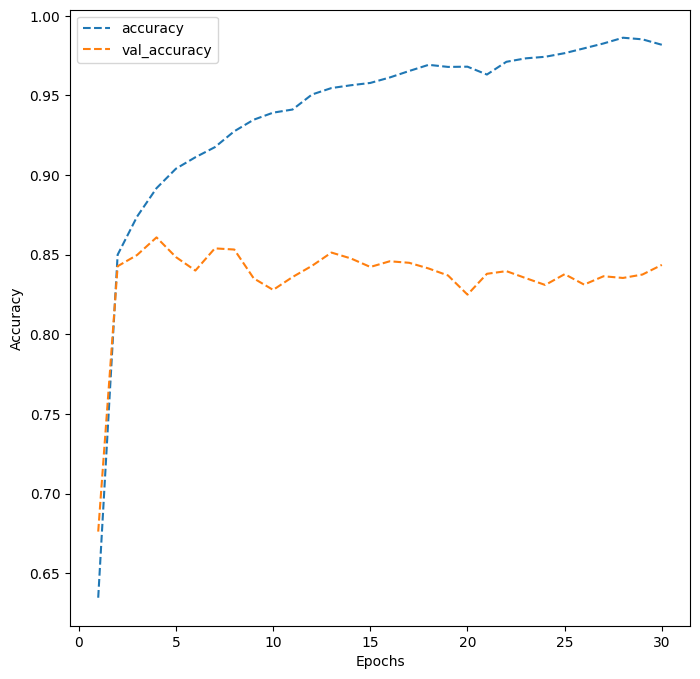

In [24]:
# plotting the accuracies

dict_hist = history_model_2.history
list_ep = [i for i in range(1,31)]

plt.figure(figsize = (8,8))
plt.plot(list_ep,dict_hist['accuracy'],ls = '--', label = 'accuracy')
plt.plot(list_ep,dict_hist['val_accuracy'],ls = '--', label = 'val_accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.show()



<p><strong>Observations:The accuracy on the test data remains the same after 5 epoch. </strong></p>



<h2 id="Predictions-on-the-test-data"><strong>Predictions on the test data</strong><a class="anchor-link" href="#Predictions-on-the-test-data">¶</a></h2><ul>
<li>Make predictions on the test set using the second model</li>
<li>Print the obtained results using the classification report and the confusion matrix</li>
<li>Final observations from the obtained results</li>
</ul>



<h4 id="Question-7:-Make-predictions-on-the-test-data-using-the-second-model-(1-Mark)"><strong>Question 7: Make predictions on the test data using the second model (1 Mark)</strong><a class="anchor-link" href="#Question-7:-Make-predictions-on-the-test-data-using-the-second-model-(1-Mark)">¶</a></h4>


In [25]:
#Make prediction on the test data using model_2 
test_pred = model_2.predict(X_test)

test_pred = np.argmax(test_pred, axis=-1)


  1/563 ━━━━━━━━━━━━━━━━━━━━ 45s 80ms/step

 14/563 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step  

 27/563 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step

 40/563 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step

 52/563 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step

 65/563 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step

 77/563 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step

 86/563 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step

 95/563 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step

103/563 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step

111/563 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step

119/563 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step

127/563 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step

135/563 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step

142/563 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step

151/563 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step

159/563 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step

168/563 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step

176/563 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step

184/563 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step

193/563 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step

201/563 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step

210/563 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step

218/563 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step

226/563 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step

232/563 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step

236/563 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step

243/563 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step

250/563 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step

257/563 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step

265/563 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step

273/563 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step

281/563 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step

289/563 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step

297/563 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step

305/563 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step

314/563 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step

323/563 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step

331/563 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step

339/563 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step

348/563 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step

352/563 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step

355/563 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step

362/563 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step

370/563 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step

378/563 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step

387/563 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step

396/563 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step

404/563 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step

412/563 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step

420/563 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step

429/563 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step

438/563 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step

447/563 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step

456/563 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step

465/563 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step

473/563 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step

481/563 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step

489/563 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step

498/563 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step

507/563 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step

516/563 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step

524/563 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step

532/563 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step

540/563 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step

548/563 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step

555/563 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step

561/563 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step

563/563 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step

563/563 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step



<p><strong>Note:</strong> Earlier, we noticed that each entry of the test data is a one-hot encoded vector but to print the classification report and confusion matrix, we must convert each entry of y_test to a single label.</p>


In [26]:
#Converting each entry to single label from one-hot encoded vector
y_test = np.argmax(y_test, axis=-1)



<h4 id="Question-8:-Write-your-final-observations-on-the-performance-of-the-model-on-the-test-data-(2-Marks)"><strong>Question 8: Write your final observations on the performance of the model on the test data (2 Marks)</strong><a class="anchor-link" href="#Question-8:-Write-your-final-observations-on-the-performance-of-the-model-on-the-test-data-(2-Marks)">¶</a></h4>


              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1814
           1       0.88      0.83      0.86      1828
           2       0.83      0.90      0.86      1803
           3       0.78      0.82      0.80      1719
           4       0.93      0.84      0.89      1812
           5       0.85      0.85      0.85      1768
           6       0.87      0.82      0.84      1832
           7       0.88      0.88      0.88      1808
           8       0.78      0.83      0.80      1812
           9       0.88      0.79      0.83      1804

    accuracy                           0.85     18000
   macro avg       0.85      0.85      0.85     18000
weighted avg       0.85      0.85      0.85     18000



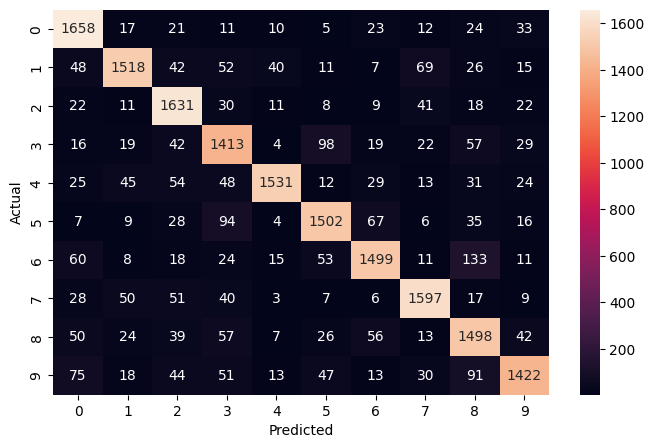

In [27]:
#importing required functions
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

#Printing the classification report
print(classification_report(y_test, test_pred))

#Plotting the heatmap using confusion matrix
cm = confusion_matrix(y_test, test_pred)
plt.figure(figsize=(8,5))
sns.heatmap(cm, annot=True,  fmt='.0f')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()



<h4 id="Observations:-Digits-2-and-7-were-recongnized-with-the-most-precision,-with-fi-scores-of-88%25-and-89%25-respectively.-The-overall-accuracy-of-the-model-on-the-test-data-is-86-percent.-The"><strong>Observations: Digits 2 and 7 were recongnized with the most precision, with fi scores of 88% and 89% respectively. The overall accuracy of the model on the test data is 86 percent. The</strong><a class="anchor-link" href="#Observations:-Digits-2-and-7-were-recongnized-with-the-most-precision,-with-fi-scores-of-88%25-and-89%25-respectively.-The-overall-accuracy-of-the-model-on-the-test-data-is-86-percent.-The">¶</a></h4>
